# Anuja Negi and Martin Iniguez de Onzono. BCCN 2021. MHBF Project.
## Causal Inference in Multisensory Perception.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot
import emcee
import timeit

### 1. a, b, c)

In [3]:
model = generative_model.GenerativeModel()

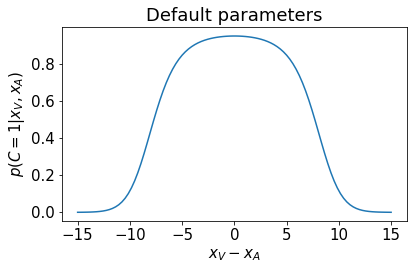

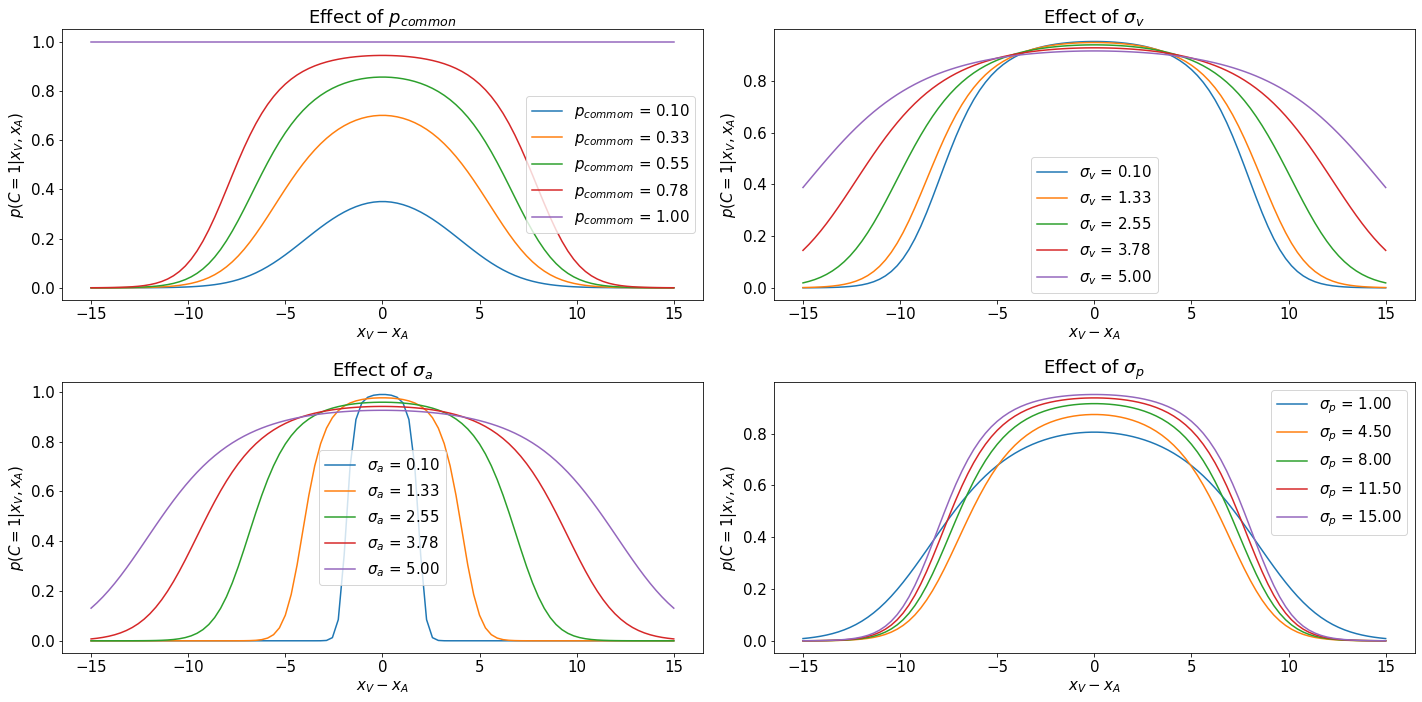

In [4]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plt.rc('font', size=15)
plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Default parameters')
plt.legend().remove()

plt.rc('font', size=15)
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='')

plt.savefig('1c_varying_param.jpg')

### 1. d)

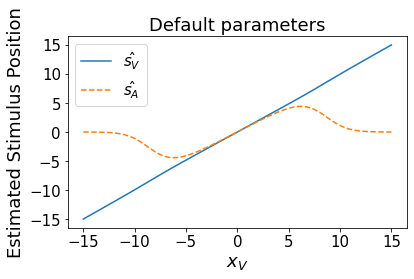

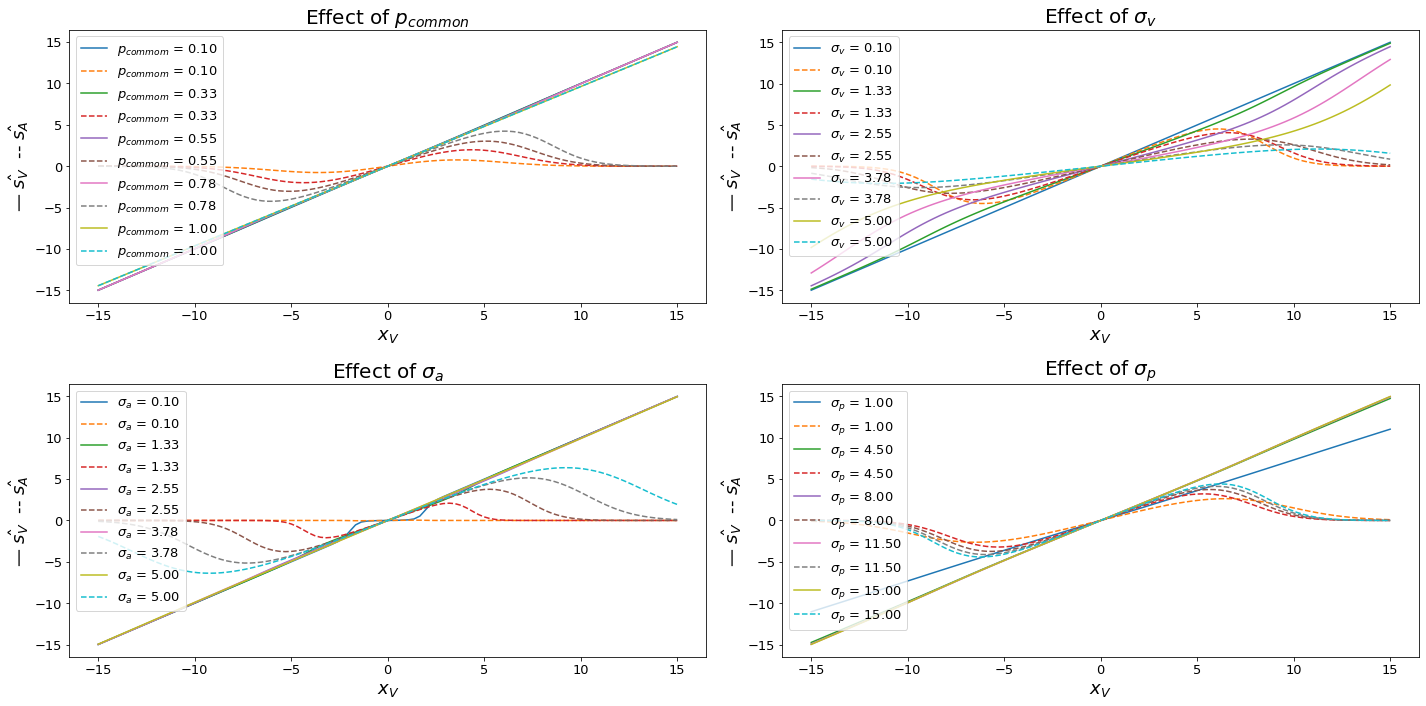

In [28]:
plt.rc('font', size=15)
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='Default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='Default parameters', fmt='--')
plt.tight_layout()
plt.savefig('1d_default_param.jpg')

# plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='')
plt.tight_layout()
plt.savefig('1d_varying_param.jpg')

### 1. e)

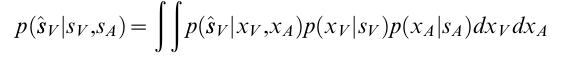

p($\hat{s_V}$|x_V, x_A) is gaussian (think of bayes rule formula).  Hence, the integral is also gaussian (product of gaussians), and hence can be parameterised for analytic evaluation.

### 1. f)

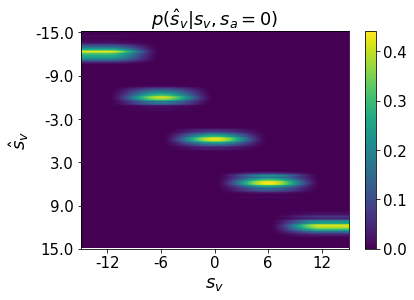

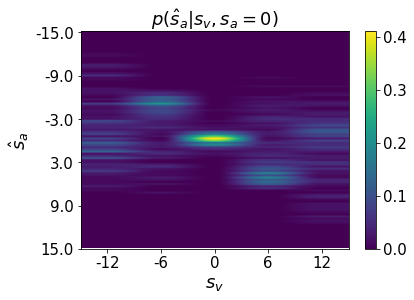

In [27]:
s_vs = np.sort(np.random.choice(model.s_v, size=1000))
x_vs = np.random.normal(s_vs, model.sigma_v) 
s_as = np.zeros_like(s_vs)
x_as = np.random.normal(s_as, model.sigma_a)

estimated_s_v, estimated_s_a = model.estimate_signal(x_vs, x_as, type='video') , model.estimate_signal(x_vs, x_as, type='audio')
plot.plot_heatmap(estimated_s_v, estimated_s_a, s_vs, model.s_v, model.s_a)

### 2. a)

In [7]:
trials = int(1e4)
stimulus_pairs = model.generate_stimulus_pairs(trials)

### 2. b, c)

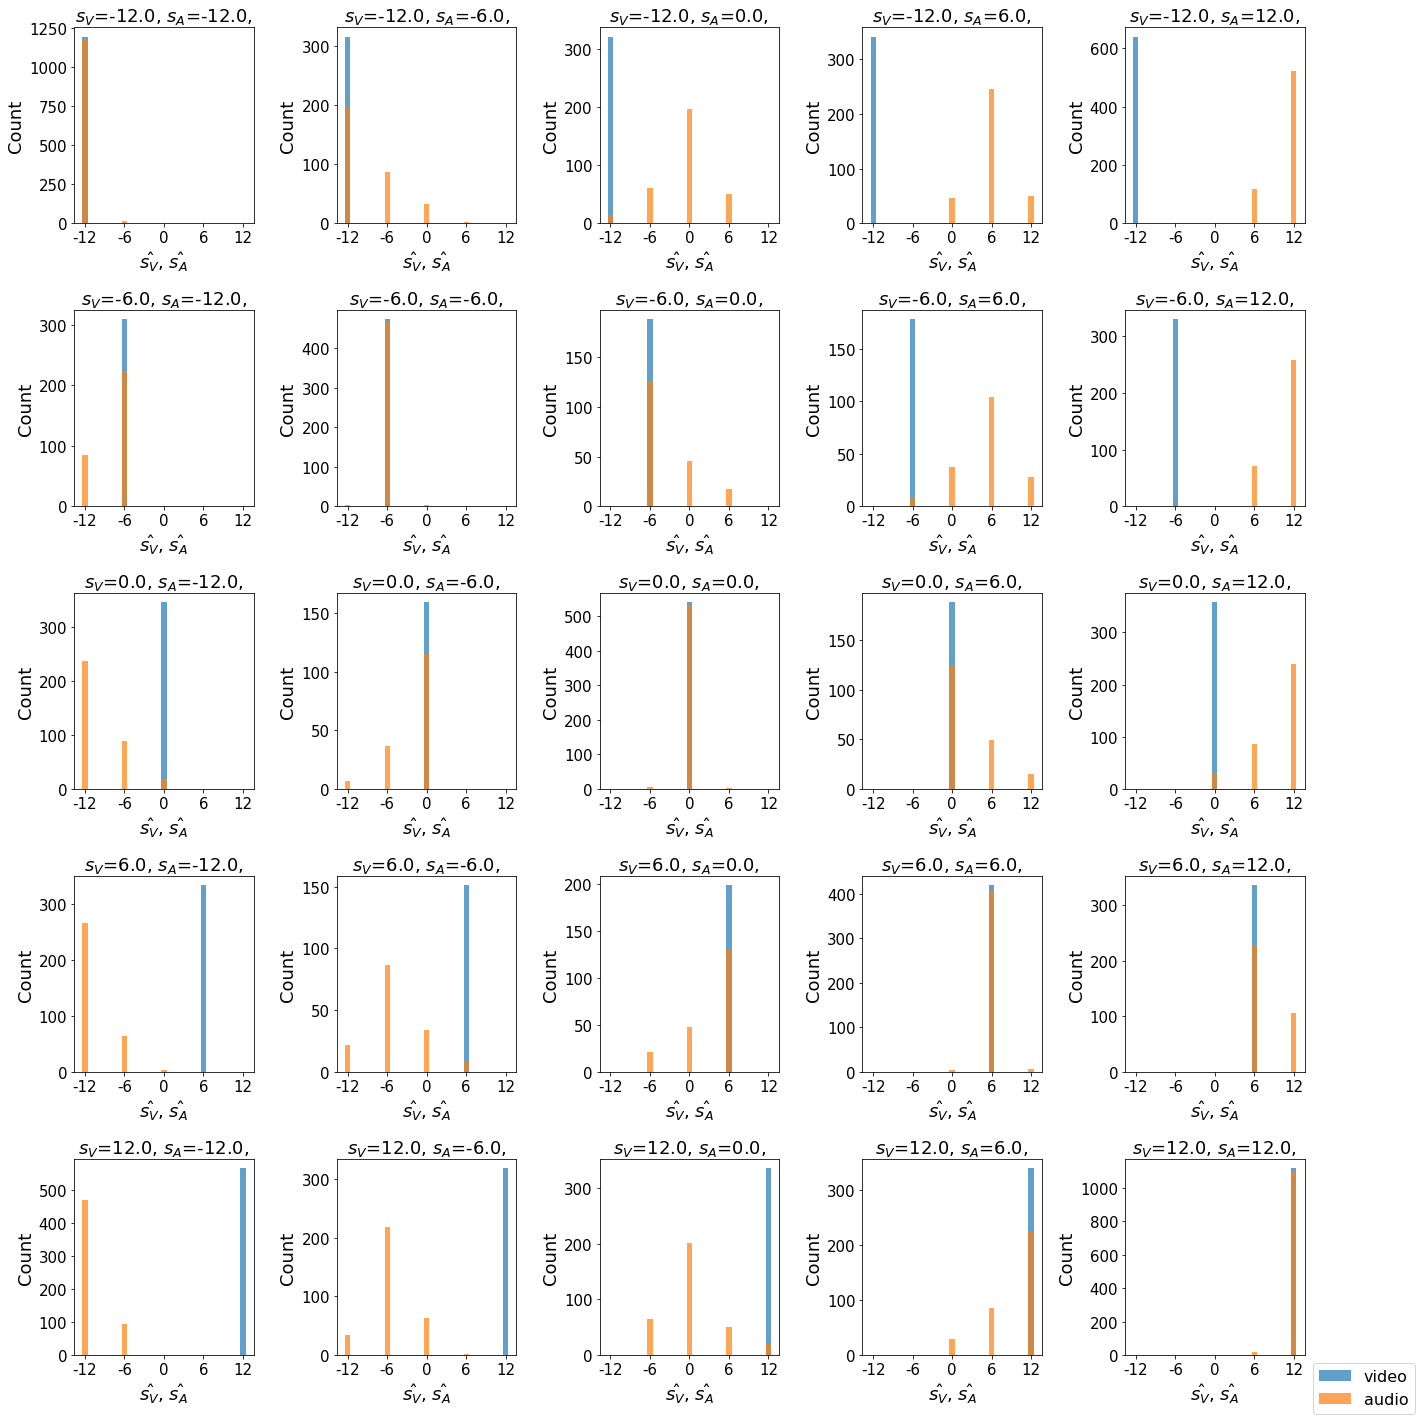

<Figure size 432x288 with 0 Axes>

In [8]:
experimental_data = model.make_button_presses(stimulus_pairs, plot=True)

### 2. d, e)

In [29]:
# experimental data with same parameters
log_likelihood_same = model.log_likelihood(experimental_data)
# testing function with different parameters
log_likelihood_diff = model.log_likelihood(experimental_data, p_common=0.6, sigma_v=0.1, sigma_a=4, sigma_p=1)

print('Log likelihood of experimental data with, \n same parameters: %.3f \n different parameters: %.3f'%(log_likelihood_same, log_likelihood_diff))

Log likelihood of experimental data with, 
 same parameters: -31386.891 
 different parameters: -93255.280


Using 10 times the number of trials makes the probabilities more precise as we now have more data, and hence gives a better estimate of the log likelihood.

NaN and infinity in calculation of log likelihood as log(0) is undefined.The manifold is hence convex in the parameter space and has a global minimim, therefore gradient-based sampling methods can be used to fit the model.
Adding a small epsilon ensures that the logarithm doesn't return NaN and infinity.

### 2. f)

In [33]:
# Brute Force
likelihoods, parameter_combinations, parameters = model.brute_fitting(experimental_data)

idx = np.argmax(likelihoods)
parameter_estimates = parameter_combinations[idx]
true_values = [model.p_common, model.sigma_v, model.sigma_a, model.sigma_p]

print('Parameter estimates using Brute Force: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates[0], parameter_estimates[1], parameter_estimates[2], parameter_estimates[3]))

Parameter estimates using Brute Force: 
 p_common = 0.800 
 sigma_v = 0.500 
 sigma_a = 4.800 
 sigma_p = 15.558


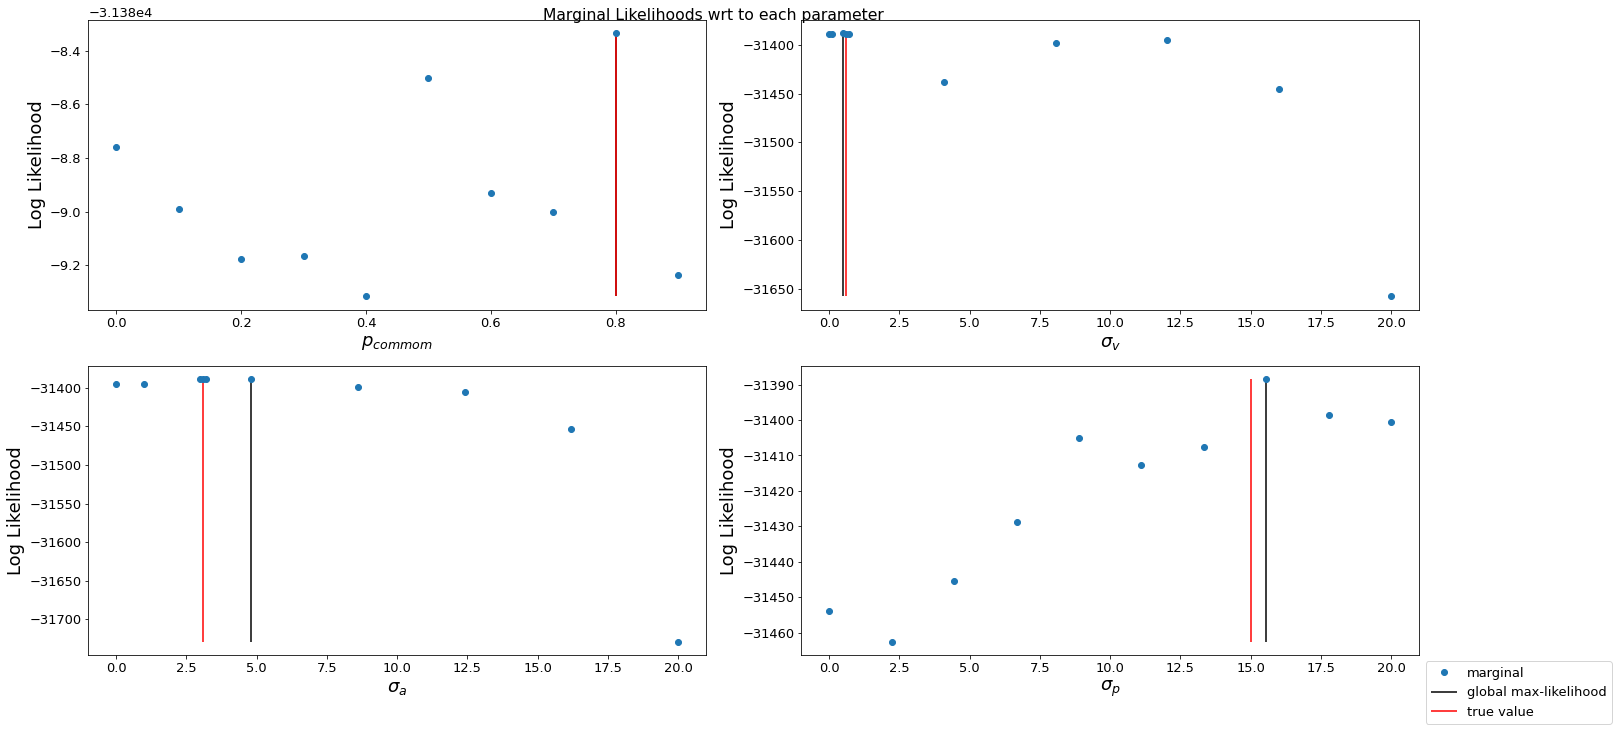

In [34]:
plot.plot_marginal_likelihoods(likelihoods, parameter_combinations, parameters, parameter_estimates, true_values)

### 2. g)

In [21]:
# MCMC sampler
sampler = model.MCMC_sampling(model.log_probability, experimental_data, [1, 20, 20, 20])

[ 0.89224951 15.35146297  2.21968792  4.76804443]
[ 0.17416966  5.57818135 15.29458779  2.69749973]
[0.95622989 6.63054438 3.43835621 8.39523459]
[ 0.97476822 13.86083402  5.97769445 12.62579358]
[ 0.41136352  7.41978878 16.72893548  4.24781659]
[ 0.41735766 16.42621189 11.91859973  2.38426162]
[ 0.16798135  3.15681599 19.3242526  14.46783493]
[ 0.55328771 14.05181794 18.32700411  3.19406909]
[ 0.13263549 10.9960823   0.41798844  2.46227311]
[ 0.1151446  11.46299729 16.79325547  5.78328455]
[ 0.83582264 17.79029019  0.83585945  2.0247341 ]
[ 0.04670199  7.34427454  5.87885339 19.24214876]
[ 0.15533975 16.08118071 15.00543309 19.34775635]
[ 0.90080952 19.49242579  1.71445599 12.24114853]
[ 0.87663612 10.602458    9.16560235 17.27906929]
[ 0.08935188  3.50586515  0.26970828 14.51647311]
[ 0.87510752  8.88087591 10.56926619  7.63445958]
[ 0.52928753 18.6124918  15.65601061 10.30607499]
[ 0.91709146 15.83896615  5.40990515  8.12648811]
[ 0.96163573 19.86755129  7.03247611  8.72085341]
[ 0.

  0%|                                                                                          | 0/600 [00:00<?, ?it/s]

[ 1.48004383 25.39122701 -0.54028792 -0.66254894]
[ 0.94110117 16.42441447  4.03700783 12.4506977 ]
[ 0.26476756  7.6321345  20.30475756  3.13195636]
[ 0.60493144 16.20579073  9.47557813  4.53959141]
[ 0.49305454 15.01963342 19.77897531  2.36298673]
[0.22542701 9.16719602 2.68715285 4.25775091]
[ 0.26646047  7.56887143  6.94024604 17.23682098]
[ 0.8781348  10.64460335  9.94600855 17.66074909]
[ 0.27351948  6.2499137   1.4133744  13.09473586]
[ 0.96905291 20.5766618   7.51696567  8.41066977]
[ 0.73493558  0.86216121 12.4292698  10.054957  ]
[ 0.47560117 14.90109303 21.98333179 12.92924012]
[ 0.47025499  7.54495186 18.37783121  8.35330027]
[ 0.28398484 11.64610008  7.69795468  1.98944624]
[ 0.70879989 19.96078249 28.40877214 19.54352195]
[ 0.3734068  14.6060559   1.42639495 16.98613774]
[ 0.12450223  2.10049174 27.51096175  1.18564487]
[  1.48334367   0.78063526 -10.52037172   6.94576658]
[ 0.18007833  3.9168666  19.36889954 14.14882437]
[ 0.03029275 10.43073793 16.50710253  4.75195329]


  0%|▏                                                                                 | 1/600 [00:03<35:30,  3.56s/it]

[ 0.52499376 16.34446599 14.19420892  6.87553343]
[ 0.86668181 10.03927109 -0.02736625 13.20227075]
[ 0.25452281  7.06125698 13.53867586  2.61579703]
[ 0.94707314 15.17950996  5.03253787 12.8619894 ]
[ 0.31607619  5.2642846  18.40801304  3.4732477 ]
[ 0.22117134 19.52726544  8.44836913  2.01293785]
[ 0.05283941  2.20359776 19.7861883  16.70565288]
[ 0.273425   19.20624897 28.6678854  -0.41839024]
[ 0.13090025 11.24506345 16.63180223  5.90121584]
[-0.10905977  5.86923769  6.55292319 21.90848257]
[ 0.77766351 11.35422036  9.96691412 17.56292397]
[-0.19173034  0.69870158 -4.86260291 14.26647576]
[ 0.27155207 14.42422577 18.22415293 13.31412249]
[ 0.06423057  1.64330517  7.22468616 12.93736101]
[ 0.5354561  14.20837509  2.5960373   3.89997341]
[ 0.8452381  21.81985434 19.10572555 11.8122013 ]
[ 0.63117043 16.42362894  4.09141406 13.25425134]
[ 0.85801921  9.764992    0.23748964 12.96581381]
[ 0.89022866 14.73679856  3.11869865  6.38734823]
[0.94285785 1.41520094 1.60668394 5.34365309]
[ 0.

  0%|▎                                                                                 | 2/600 [00:07<36:46,  3.69s/it]

[1.01944144 6.34638014 3.02201311 8.68033771]
[ 0.85442774 12.724743    7.24100289 10.95329731]
[ 0.56809842  9.37638741 16.95957104  3.17751819]
[ 0.53840631 14.31176272 17.62542245  3.10541269]
[-0.18680449  7.86666199 18.70805682  4.97858961]
[-0.11217089 15.36720502 18.68547595 21.46967705]
[ 0.53822618 10.36922012  8.86863494 11.26561526]
[ 0.05167318  3.60927627 -0.58196875 14.77510259]
[ 0.92531525 10.0294443  10.42976127  7.03559412]
[ 0.68484236 10.92702178 11.08539208 11.33004881]
[ 1.12813816 11.1193673   9.63181738 12.35306724]
[ 0.28620914 20.76152733 22.25693942 22.52216295]
[ 0.18733041 10.45029858  8.88460732  2.94788322]
[ 0.54706252 14.7052651  13.61465293 13.08273939]
[ 0.29828581 13.32515824  1.88266743 16.94570979]
[ 0.87582706  4.98504027  0.07067983 20.33502203]
[ 0.72553008 14.72166444  8.15610929  9.600723  ]
[ 0.38316876 10.34692937 15.39064466  2.8376735 ]
[ 0.41153608 16.34627867 12.17036128  2.8206577 ]
[ 0.17989671  3.75324375 19.63146748 14.42934003]
[-0.

  0%|▍                                                                                 | 3/600 [00:10<34:46,  3.50s/it]

[ 0.54053456 13.8322192  15.19122295  5.54226389]
[ 1.26109092 24.16358312 14.79520429  5.46244345]
[ 1.20900651  1.98352968 -5.14459282 11.59549256]
[ 0.78480193 11.98666173  8.81937422 11.10797826]
[ 0.55285347  9.33710704 17.82627706  2.66508548]
[-0.51030459  1.52553401  9.89592669  1.51500278]
[-0.41092728  6.84427624 28.44164318  8.52690593]
[-0.08640845  6.46598346  3.87820661 22.33924785]
[ 0.25977255 16.12670559 13.56498692 12.99617463]
[ 0.93402818 22.69063592  0.94415313 13.89756024]
[ 1.02171298  9.87367258 11.50255561  5.23149333]
[ 0.78664066 11.72765358  8.72168699  9.96320996]
[ 0.08948709  2.31807859  7.77867155 12.41367157]
[ 0.65192141 10.2005821   5.50737389  6.99062083]
[ 0.48988352 -0.45254361 12.07184202  9.24494559]
[ 0.68158968 16.14251224  7.66128665  7.93105148]
[ 0.58397875 12.95760299 13.95515334  7.28468955]
[ 0.47074101  9.88733547 16.13359966  2.99860477]
[ 0.27993459 17.02718869 13.85281877 -0.02101035]
[ 0.54697174  6.92619747 14.96800256 10.64685443]


  1%|▌                                                                                 | 4/600 [00:13<33:30,  3.37s/it]

[ 1.06674235  8.05843612 -4.17121525 12.97608631]
[ 0.7282322  13.645334   12.92014905  5.4331499 ]
[-0.08806061  9.16660622  4.82064667  6.31966278]
[ 0.04306635 11.80642392 17.65121446  5.26559726]
[ 0.78037749 17.40207527  2.3858665  -0.65076005]
[ 0.3392101  15.04357862 12.40994894 12.47139392]
[ 0.84700148 15.49848456  0.96733432 16.07740809]
[ 1.39832113 12.65050667 11.2316069  16.04510491]
[ 0.98767517 10.63677012 10.66187343  6.60818701]
[ 0.9538089  15.07665255  4.36490356  9.48637032]
[-0.21774507 16.30620728 19.05742553 24.06272177]
[ 0.1071783  13.87139053  6.84437325 20.88877449]
[ 0.60993978  3.54600847 11.0231636  11.13612746]
[8.27451368e-04 8.97013715e+00 9.13705460e+00 6.42466844e-01]
[ 0.62739845 14.71264715 11.15752766 11.51533404]
[ 0.37504268 14.08218498  2.47855686 15.99400357]
[ 0.93394624 10.10194136 -1.45288272 15.11952119]
[ 0.69730982 14.74517993  8.46684775  9.81042245]
[ 0.31023781 10.26636912 12.94177166  3.57359709]
[ 1.5167438  -1.01203486 -4.71162946  

  1%|▋                                                                                 | 5/600 [00:17<33:35,  3.39s/it]

[ 0.42093328 11.54722659 11.66202577  5.35721438]
[0.99358201 5.90215823 2.77095541 8.59572125]
[ 0.56692271 13.94049315 16.09491607  3.98177595]
[ 0.09710335  7.98341537 13.40265825  8.31831262]
[ 0.67244305 15.62832881  2.78475268  4.21085423]
[-0.49039039  5.46497094  3.14878237 26.45341121]
[ 0.80891166 12.16700027  8.90171037 14.45845668]
[ -0.28691133   0.69360688 -11.81549161  17.69814265]
[ 0.77587561 11.64298774  8.97164592 10.1077515 ]
[ 0.9488276   3.92531546  3.84306501 13.94814709]
[ 0.56764166 16.66692532 12.29486548 11.61328976]
[ 1.14899419 14.40050536  5.4565739   4.28450911]
[ 0.80745337 12.52051109 15.10526876  3.38826172]
[ 0.44516204 -8.46585467  9.96776063 16.41754056]
[ 0.18824621 10.48899045  8.92358655  2.71871667]
[ 0.60154202 14.60364036 10.4288568  11.94196652]
[ 0.70465808 14.51488323  8.32413708  9.77025884]
[ 0.92304534 12.15361486  7.73937509 13.29284682]
[ 0.7776489  13.27153757 13.89190108  2.89432463]
[ 0.48099444 16.71278322 11.84366478  5.51546987]


  1%|▊                                                                                 | 6/600 [00:20<34:42,  3.51s/it]

[ 0.66628617 15.60021386 10.28999202  8.97587107]
[ 1.29162008  0.93000212 -6.0370494   9.39581153]
[ 0.80463516 12.43438678  9.91007378 11.19465435]
[ 0.52716676 15.96655275 11.65453148  4.1140865 ]
[ 0.57402855  8.05301168 13.74236716  7.55840854]
[0.14302913 7.44270878 5.19908643 8.78970811]
[-0.12152148 11.88734354 22.01062495  3.49551221]
[ 0.74879345 14.41935473  4.69262062  4.79149715]
[ 1.04908412 16.23519473 -6.82217789 19.48204754]
[ 0.52186513  6.6900678   8.31801982 15.3830801 ]
[ 0.61462572 10.99432127 11.18359166 12.42488798]
[ 0.84598552 12.47397567  9.86031449  9.65751932]
[ 0.29210778 12.96442701  4.49950423 22.77842967]
[ 0.77087885  8.58616293 20.50695067 -0.60155042]
[ 0.15185521 10.50855945  9.38669324  2.16256551]
[ 0.42054642 12.85000452  3.16547753 14.55215971]
[ 0.20110031 12.00298695 12.86631096 -0.39393875]
[ 1.14851958 15.93263337 15.49670376  7.81802185]
[ 0.51853771  7.18399734 14.56635112 10.03629395]
[ 0.22055196  8.02678065  6.56734324 18.83093382]
[ 0.

  1%|▉                                                                                 | 7/600 [00:24<34:33,  3.50s/it]

[ 0.85357552 12.73129928  0.663677   14.48211514]
[ 0.61780624 14.40021047 11.03164321  8.06352688]
[ 0.40094283 13.50347187 26.50094154  3.24280374]
[-0.29910184  6.50843727 11.80079702  4.97691975]
[ 0.19632356 11.7098038  12.47816513  8.6392529 ]
[ 0.11821871  7.25616832  5.36859371 20.49445878]
[ 0.58857955 11.88031407  9.70322295 12.72094368]
[ 1.02220227 15.39985952 -8.07084301 22.96224212]
[ 0.89061813 11.77784262 11.38287253  6.15730459]
[ 0.84839061 12.32712183  9.80580197 10.25556542]
[ 0.54609007 13.68700872  5.48805603  9.47240519]
[ 0.52260217 17.15396857 13.21025836 12.81749259]
[ 0.20250481  4.65337047  9.01526531 11.43351954]
[ 0.8469923  10.11664431 11.95550479  6.34160435]
[-0.10532639  8.82365384 11.40906176  1.02993101]
[ 0.66637508 14.23404075 10.73272521 11.87636551]
[ 0.97903307 13.64327754 -4.8596707  15.56223615]
[ 0.63482641 14.09420147 10.05243683 10.49207475]
[ 0.399588   11.34927539 12.19781134  4.82015119]
[0.85401827 8.38909752 3.94916529 8.66367806]
[ 0.

  1%|█                                                                                 | 8/600 [00:28<36:46,  3.73s/it]

[ 0.57153097 13.59933191  2.07814717 15.44797174]
[ 0.71601566 14.63155342  6.57600282 12.62931457]
[ 0.65533969 11.66232053 11.52270829  5.75651676]
[ 0.91060975  6.0243032  -0.08690341 10.11710099]
[ 0.8106304  12.3713046   9.87408324 11.29513047]
[ 0.59951396  8.61028464 13.22271748 10.20993655]
[ 0.08045187 11.65943538 13.29787792  7.433529  ]
[ 0.73313288 14.38992837  4.86337109  5.0988915 ]
[ 1.17238395 13.26833376 12.50739594 18.31685437]
[ 0.61848335 14.29889219  6.6141077   7.10079469]
[ 0.58256769 14.8648367  11.94183292 11.87112054]
[-0.09658605 -1.49636182  6.46452465 13.0037357 ]
[ 0.56424396 11.8021689   8.10069758 11.88487539]
[ 0.55781823  3.40044511 -1.82598322 11.7022298 ]
[ 0.69577886 12.73541604 14.53775728  5.33218923]
[ 0.25060454 10.76638098  9.4461112   3.30992767]
[ 0.69531649 13.64230335  9.74111719 11.76729523]
[ 0.74617358 14.14836955 12.02587673  5.48896462]
[ 0.62290624 14.02818945 11.09836851  7.75005326]
[ 0.34587786 18.21470541 25.44635133  0.37701695]


  2%|█▏                                                                                | 9/600 [00:32<37:51,  3.84s/it]

[ 0.53028293 11.75191549  4.79353179 15.70123053]
[ 0.86315279 12.81158239 -1.39035361 15.19285079]
[ 0.62881363 14.80702604  9.62147593 11.88014519]
[ 0.81602927 12.46748515  9.78844863 11.32288213]
[ 0.61551019 14.06977221 11.43294068  7.53420015]
[-0.36308442 11.62510666 16.17089753 -6.99195807]
[ 0.72211297 14.32921966  4.73222117  5.34083691]
[ 0.84446482 15.9175735   0.26558088 15.97454857]
[-0.16063314 -0.46156856 -4.68023397 18.07065166]
[ 0.74551004 10.45428189  9.92571588 14.60507007]
[ 0.55926241 13.64606717  5.28138489  9.68701571]
[ 0.78405474 16.51068244 11.66205134 13.55704767]
[ 0.59791068 12.18057     9.09012916 10.56033857]
[0.6119872  8.92203501 6.32080946 8.40258279]
[ 0.66652303 12.56155604 12.81520502  7.16519438]
[ 0.68767447  2.75816617  4.71366766 18.66655153]
[-0.02199716  9.38430178  8.22427395  0.21147033]
[ 0.62577395 13.0327722  13.35658815  7.70937002]
[ 0.72601631  8.55201717 11.11565187 -0.18202394]
[0.8442065  9.4424608  5.45733155 9.35049554]
[ 0.7000

  2%|█▎                                                                               | 10/600 [00:36<37:47,  3.84s/it]

[ 0.33685616 11.26753369  1.41238395 18.66501225]
[ 0.88494227 12.48436123 -0.64166961 14.78431462]
[ 0.83649885 12.28372317  9.75862721 11.41673427]
[ 0.61982407 14.08125036 11.01902345  7.849605  ]
[ 0.63786786 10.11056755 13.13256181  8.78660764]
[ 0.77665478 12.13249182  5.09435341  7.18200189]
[ 0.25790639  9.31394595  8.36036442 20.05931868]
[ 0.82112176 15.08884191  0.94350489 16.02408983]
[ 0.74070996 13.31203189 11.82015875  8.4409199 ]
[ 0.55310833 13.75153163  5.12792473  9.52451105]
[ 0.57688858 15.11476034 11.97454131 12.34830284]
[ 0.46813922 10.74746222  5.33970947 15.57473192]
[0.96706146 6.54062656 1.06098342 8.20041101]
[ 0.56833606 15.56528453 15.93576104  4.80604886]
[ 0.80637682 -8.23437349 -6.47441731 33.10209595]
[ 0.34800926 11.354801   10.46138292  4.4521488 ]
[ 0.69850057 14.77675095  9.80964915 14.55123791]
[ 0.85226482 12.62912688  2.9747234  13.41368164]
[ 0.64475661 14.0007399  10.13130819 10.66953531]
[ 0.59762325 11.43863347 14.58103995  5.07833294]
[0.9

  2%|█▍                                                                               | 11/600 [00:40<38:12,  3.89s/it]

[ 0.65358822 10.109552    7.52298123  9.14123575]
[ 0.72531225 13.72333102 13.17756105  4.72929271]
[ 0.49491737 17.42363883 12.83109984  0.97499175]
[ 0.70578916 11.10008238  9.19872187  8.00132541]
[ 0.07800163  7.36760208  5.65539014 19.97845077]
[ 0.94842709 10.68358379  8.74944342 18.74307252]
[ 0.10247153  4.47859012 -3.36254019 15.34116696]
[ 0.99784485 11.81223764  8.49202    13.65320499]
[ 1.00396577  3.1073912   3.43747745 14.85591299]
[ 0.5399497  15.45700112 13.18258318 12.69456534]
[ 0.24620499  9.65018461  2.50166478 18.28717228]
[ 0.66868379 12.56019646 12.77146041  7.22528393]
[ 1.14936007  3.58376614  2.8541562  22.90925045]
[ 0.3871129  11.60266705 10.64876906  4.55045298]
[ 0.62003176 13.29893797 13.71275982  8.0886484 ]
[ 0.56205932 11.4845976   4.10283195 15.83733856]
[ 0.75890845 15.97152345 13.58663034  6.85937797]
[ 0.6675084  11.34152588 11.204292    6.09616125]
[ 1.0053784  13.21938129 12.42149644  8.57375697]
[ 0.46345674 10.04275564  8.06798418  8.2691    ]


  2%|█▌                                                                               | 12/600 [00:44<38:36,  3.94s/it]

[ 1.39153647 19.22537132  0.94100393 14.45792948]
[ 0.65436719 11.84772928 11.5660902   5.69197673]
[ 0.65690209 11.28081223  8.92768464 13.32923081]
[ 0.58624602 16.10070512 13.06261581  1.41559601]
[ 0.65100775  8.17087024 10.9115043  11.39311667]
[-0.21069672 12.68136074 14.42279246  4.07860174]
[ 0.6781975  13.04758766  3.25520466 15.21516372]
[ 0.87558034 10.41768725  8.53105581 18.7518658 ]
[ 0.77987544 13.03092051 12.50950038  7.53126133]
[ 0.60530405 10.99030055  8.76588754 12.24484087]
[ 0.48083599 14.42435159 -0.08703429 11.45143157]
[ 0.97487077  3.12258598  3.01304938 14.57312854]
[ 0.57749128 14.99203479 11.94558404 12.3963206 ]
[-0.49954315 -9.29347735  4.30018541 14.38491195]
[ 0.44258778 11.41402442  7.10372271 11.87673593]
[ 0.60627163 10.50568635  8.07826244  8.16384955]
[ 0.59311151 13.39249095 13.8019801   8.07785031]
[ 0.60765862 14.23067965 10.30354357 10.35604957]
[ 0.6408813  10.96036248  8.31359747  9.62966383]
[ 0.79678573 13.38720574 13.82461641  4.15536569]


  2%|█▊                                                                               | 13/600 [00:48<39:38,  4.05s/it]

[ 0.81654803 12.93947863  2.33867416 13.40147135]
[ 0.4925397  10.60635285  8.23945129  7.95762036]
[ 0.88949045 16.37304202 12.75423604  5.83226043]
[ 0.59893726  7.27543262 22.6672736   2.58105806]
[-0.22758106  9.54417751 14.6966535   6.72002305]
[ 0.64222738 11.69677747  9.52852945 14.5761844 ]
[ 0.89238797 10.13652378  8.36521466 19.39722767]
[ 0.27152761  6.94824038  3.50436596 13.25465687]
[ 0.77010998 13.52713456 12.9850871   7.17860131]
[ 0.43729901 13.64659637 -0.23232041 12.75748128]
[ 0.05288818  0.22592181  6.90706439 13.34352812]
[ 0.45638822 10.68936342  5.18944028 15.71835059]
[ 1.06760234 12.90507545 13.46152999  7.0996367 ]
[ 0.66834089  2.1938067   4.47815495 18.97904405]
[ 0.39901901 11.61362109 11.43941883  3.93310238]
[ 0.54312054 12.53861659 13.708665    9.54560419]
[ 0.86645073 12.83152936 -0.07794216 15.70402876]
[ 0.63609256 14.02119024 10.51690776  9.74071408]
[ 0.65588008 11.7850275  11.47135321  5.58523448]
[ 1.21523555 12.95557351  8.05576864 13.05164079]


  2%|█▉                                                                               | 14/600 [00:52<38:28,  3.94s/it]

[ 0.6348136  11.70400265  9.05961332  9.12851695]
[ 0.85186649 12.9415797   9.11577946 11.83305436]
[ 0.79472881 16.24647057 12.7638404   2.96543339]
[ 0.06692218 10.98129016 12.80082211  8.98037865]
[ 0.23635186  7.52870901  6.06320531 20.42561018]
[ 0.66940732 10.32931207  8.43149497 18.8031076 ]
[ 0.15293596  4.87794635  0.94784341 13.86299424]
[ 0.87460837 12.5012618  10.7634403  10.1919542 ]
[ 0.96556525 -0.39711197  0.79382099 14.94573877]
[ 0.57815742 14.97534357 11.94509181 12.32740267]
[-0.12937568  6.27685372 -6.29973773 30.54708546]
[ 0.6862293   5.97599577  6.40458117 16.50330756]
[ 0.29736555 11.40751327 10.28880301  4.40077063]
[ 0.57682764 14.09204055 14.76652807  4.85634011]
[ 0.21125259  9.62574094  5.89050852 17.99789223]
[ 0.84255074 13.89045646 -3.2780075  12.34290074]
[ 0.9787995  20.61238606 16.9400376   6.74718202]
[ 0.69108115 12.74121315 12.23911343  5.5633291 ]
[ 0.66278946 13.69197793 11.04519513  8.42751223]
[ 0.62667217 10.03291891 14.80131871  5.23100971]


  2%|██                                                                               | 15/600 [00:56<39:39,  4.07s/it]

[ 0.75611183 13.44202877 10.19398909  7.44587646]
[ 0.20426703 11.70969871 12.41623631  8.64811617]
[ 0.2002404   5.40600957  2.52131138 12.55533838]
[ 0.79335908 12.8207862  11.49467885  8.94535367]
[ 0.86190476 12.70275955 10.5243264   9.51637811]
[ 0.08741358  9.85467823 -0.79964025 22.58781048]
[ 1.3736273  -0.47011872  0.04706461 16.58232118]
[ 0.48541212 16.76618469 11.67566818 17.51868768]
[-0.24450753 -5.64000521  5.80699416 15.49762934]
[ 0.35174193 10.62832023  4.87351739 14.84855103]
[ 0.73598411  9.76578878  2.1994364  11.95213664]
[ 1.10226514 12.5043413  13.34101212  8.29462073]
[ 0.68139266 -0.76801997  0.58833386 27.40900101]
[ 0.55585234 11.17411052 10.40888581  8.94485993]
[ 0.41050296 11.99580816 11.54920311  8.87076173]
[ 0.08503226  8.9646327   6.08361298 18.72480166]
[ 0.65589348 10.84383552  8.89279285 12.41152066]
[ 0.96370901 14.63544926 18.20639151 -2.23406356]
[ 0.69184563 12.08673242  8.08506262  9.2611685 ]
[ 0.8695924  14.27535561 14.86672137 10.90180941]


  3%|██▏                                                                              | 16/600 [01:01<39:58,  4.11s/it]

[ 0.64354272 12.28085038  2.77148317 14.14214159]
[ 0.63526647 11.07614763  9.1075922  11.89359871]
[ 0.56679689 13.0070595  13.67169486  7.23020377]
[ 0.76033764 11.57413436  9.57817427 11.47034252]
[ 1.04286086 17.12736413 16.85722321 -2.86996377]
[ 0.52116464 16.98725686 13.83422489  2.57926463]
[ 0.68635627 12.36156811 11.48351191  8.04495619]
[ 0.81898724 12.66382423  5.39151364  6.7302561 ]
[ 0.50434767  8.30610689  6.52513951 26.60604203]
[ 0.8981718  10.7547101  10.27326538 17.36583498]
[ 0.43130548 13.10995612  5.07374533 11.73667341]
[ 0.92341461  3.57642821  3.40141804 14.31694133]
[ 0.67289653 15.61820564 11.82855712 12.64069429]
[ 1.13473929 13.43979257 13.49330184  5.4748213 ]
[ 0.70926019  7.73024395  4.45807181 14.39662699]
[ 0.20583402  8.28014314  2.00026411 26.13939152]
[ 0.89555078 13.78986383  0.11547444 15.38521278]
[ 0.68424956 11.98098182 11.03895192  9.73650788]
[ 0.65245285  9.80813808 12.69460433  9.03703967]
[ 0.29712758 11.93317167 10.2072788   9.28665634]


  3%|██▎                                                                              | 17/600 [01:05<39:20,  4.05s/it]

[ 0.43566343  9.6446338   7.73470838 13.90473622]
[ 0.65041992 12.82700255 11.67596805  7.02839694]
[ 0.44869003 13.64470887 15.83329378  6.42534971]
[ 1.01894763 12.81875086 11.75757085 10.23261457]
[ 0.65335675 10.82961541 12.60579792  8.54969837]
[ 0.82381272 10.65915993 -2.52705907  8.8851798 ]
[ 0.57574517 14.17769868  1.9149229  17.49123754]
[ 0.77501063 11.41143851 10.07731156 14.22572199]
[ 0.43119665  7.56962045  4.86286519 12.34134037]
[ 0.64749332 16.15569955 14.09641878 10.26903536]
[ 0.95009694  8.98301146 -1.91468384 13.28260583]
[ 1.10445583 18.30947881 17.82818129 -1.08118618]
[ 0.4269798   9.96443574  8.9323907  12.74456785]
[ 0.51512868  6.45773174  7.52366695 14.39012858]
[ 0.38135368 11.84447654 11.42342911  9.18613681]
[ 0.73610032 12.47935496  1.84261161 14.2919617 ]
[ 0.72195022 13.47172602 12.66252263  5.86970269]
[ 0.60127857 14.41325108 11.65278918  9.40780981]
[ 0.68598021 12.29362993 11.40415384  8.34691384]
[ 0.27509475 12.04198531 10.60931321  9.15283567]


  3%|██▍                                                                              | 18/600 [01:09<39:29,  4.07s/it]

[ 0.37920274 10.47965414  7.0788516  15.95819055]
[ 0.49525389 15.03070374 12.41918359  5.26203305]
[ 0.71854036 11.48591714 11.47687347  9.6609255 ]
[ 0.82078585 12.20485027  2.25532028  5.96201585]
[ 0.52996918 12.6128268   3.28815146 16.99656721]
[ 1.15475357 12.27941874 12.35759518 11.62076951]
[ 0.31210395 11.68160396  4.21315815 15.30540485]
[ 0.90873134  5.82573371  5.18942928 15.64016111]
[ -0.38163729 -11.78319173   2.7767646   14.5514257 ]
[ 0.30293907  9.46150841  2.43417416 19.28026787]
[ 0.67107114  7.57483651 -3.95490562 12.46243329]
[ 0.89652717 13.08529425 12.89292441  6.37473819]
[ 0.75816864 -0.19270341  2.5618259  19.71796383]
[ 0.62752608 10.33552241  8.58583373 13.38740625]
[ 0.4791938  11.66261624 12.17304323  9.21679953]
[-0.14319875  8.03673189  2.63849306 23.23350528]
[ 0.65274262 11.42871421  4.55642517 13.66411197]
[ 0.67376789 10.84247095  9.35962214 12.89470249]
[ 0.80763994 12.30095184 15.7919081   5.68592011]
[ 0.44346101 12.36520337  9.09136792 11.140645

  3%|██▌                                                                              | 19/600 [01:12<38:19,  3.96s/it]

[ 1.02354757 13.03982251 11.49996339  8.32283034]
[ 0.85292896 12.9957125  10.60848319  9.73983957]
[ 0.65668066 16.609192   12.42912178  4.70352124]
[ 0.60251316  9.52323191 10.68032813 10.30282539]
[ 0.51610424 12.01554727  8.13682326 11.50860263]
[ 0.51335172 11.07464747  6.23236694 14.20096011]
[ 0.08730006  2.76263757 -1.85122881 13.1420119 ]
[ 0.78167405 13.53265862 16.65057669  7.72630938]
[ 0.62704765 10.75041357  8.28394668 14.95278423]
[ 0.98215411 13.26064836 11.5135788   8.13049471]
[ 0.63053153 12.80889877  9.99090541 14.98908534]
[ 0.74649659  9.61360366  1.06425077 10.63690202]
[ 1.27380595 14.63487888 16.21765353  1.06722144]
[ 0.7032115   9.53956648  9.37969049 11.44794916]
[ 0.60797466 11.64798187 18.30795126  4.5241396 ]
[ 0.86292442 12.7973179   0.3630985  14.58240173]
[ 0.6817155  11.70573398 10.63295501 10.50003705]
[ 0.68330198 13.0118921  13.43079438  6.97901087]
[ 0.79423947 13.3117114  12.75792796  6.07882903]
[ 0.49634179 12.22247202 10.3744826  10.12494988]


  3%|██▋                                                                              | 20/600 [01:16<38:22,  3.97s/it]

[-0.05116046  8.48612195  7.33958655 19.39182937]
[ 0.66047821 11.72774821 10.85807345 10.04294708]
[ 0.68552267 13.51719418 14.37905276  5.60112661]
[ 0.71952272 11.44821682 11.39045179  8.73375154]
[ 0.4979657  12.20679431 10.35869455 10.15498889]
[ 0.78118343 12.43618057  7.06798192  6.89789773]
[ 0.40073009  9.27005099  8.41579843 15.41900196]
[ 0.68689622 10.54956323  7.88037451 18.31535495]
[-0.35692213 -1.30939119 -6.79145913 16.78578268]
[ 1.07382232 10.77281667 14.68421869 12.62721894]
[ 1.24112252 14.45083907 13.3389201   4.93184678]
[ 0.01582673 10.63272566 -1.16267932 15.59972065]
[ 0.84674484  7.67048454  7.23861515 13.6914257 ]
[ 0.65579516  9.81467884  2.73792859 13.17219425]
[ 0.80913246  5.15544943  6.56393555 16.08844327]
[ 0.20463077 10.225426   11.66331484 11.95154806]
[ 0.92880947 13.39573371 -4.70831744 16.82816009]
[ 0.66951357 10.38037014  8.67801279 14.17655611]
[ 0.7805064  12.30729295  9.69392449 12.31908718]
[ 0.79368549 13.29771822 12.7178335   6.10721273]


  4%|██▊                                                                              | 21/600 [01:20<38:27,  3.99s/it]

[ 0.02942464  9.28198106  4.80215765 19.05071886]
[ 0.64877317 12.86609777 12.86633832  7.56001977]
[ 0.73443358 11.25646269 11.679843    9.62589429]
[ 0.68605799 10.32082637  9.8429405  10.89390566]
[ 0.47219073 16.40299935 13.25856208  8.12979837]
[1.37104260e-02 5.53118307e+00 4.39666477e+00 2.37748026e+01]
[ 0.685728   11.18138172  9.27454922 14.52870986]
[ 0.51001246 11.98748977  1.59295884 16.50997476]
[ 0.23232545  5.64510482  2.57594101 14.90028939]
[ 0.83635954 10.49668367 11.15941502 14.22228994]
[ 1.04416411 13.33107309 11.20827183  8.31419404]
[ 0.22492242 11.38903602  2.6735422  16.97056933]
[ 0.91689094  5.8202233   5.14486724 15.60850781]
[ 0.73159483 11.86847888 10.70876789 14.56554681]
[ 0.62983296  9.4408259   3.03559693 12.9954346 ]
[ 0.51681682 11.51661802 11.74371587  9.57574168]
[-0.12617448  7.14630855  1.74917956 25.2426062 ]
[ 0.679474   10.79109813 12.99089302 14.90578693]
[ 0.8450333  12.23061152 10.14971359 10.14400998]
[ 0.81853852 12.48710223 10.03712361 1

  4%|██▉                                                                              | 22/600 [01:25<39:23,  4.09s/it]

[ 0.84144683 12.71385529 -1.64550696 15.74462393]
[ 0.52558033 11.75711152 11.17727124  9.723712  ]
[ 0.78893648 14.41838682 14.85140713  3.98394175]
[ 1.12284968 14.9213792  11.60272146  8.32260044]
[ 0.71374728 13.38005597  8.72036716  9.28758342]
[ 0.70852279 11.7344208  11.4545003   9.25665221]
[ 0.73870398 12.33076347  7.54966611  7.79832123]
[ 0.69831736 10.94658557 10.42407738 14.46728919]
[ 0.97869386 13.26132896 11.53568875  8.09334752]
[ 1.03447774  3.69173628  2.93266239 17.75772953]
[ 0.32797372  9.63693351  3.41454225 17.70200577]
[ 0.64831326  9.50615585 -0.50174045 12.62442423]
[ 0.92426832 13.01872153 12.75150812  6.5734086 ]
[ 0.66196362  6.80379968  5.74200382 16.50422565]
[ 0.75891551 10.05986959  8.33537527 14.15885838]
[ 0.21213336 10.44731109 11.87420758 10.71386659]
[ 0.03927844  8.49545572  4.04162015 21.22462227]
[ 0.6648465  10.93971638  9.62048296 12.68768232]
[ 0.80164187 13.68996918 13.13919325  5.47920389]
[ 0.78630172 12.59976343 11.03113054  7.92489265]


  4%|███                                                                              | 23/600 [01:28<37:46,  3.93s/it]

[-0.04186557  1.0712286   6.41964063 14.40429385]
[ 0.54606148 11.36278625 11.27979747  8.19340866]
[ 0.87868882 12.89104681 -1.42164367 15.01531442]
[ 0.97590422 13.89986754 17.28044905  3.21578899]
[ 0.74104834 11.56638413  8.92948661 14.84660187]
[ 0.90017211 13.7289598  13.6816592   4.48093825]
[ 0.75375303 11.97537054 12.7287125   5.07725125]
[ 0.67684313 11.7082708  10.63299083 10.22362782]
[ 0.47786306 11.56070289 10.89742552 10.67468884]
[ 0.11884044  7.27050539  7.10122827 19.68206192]
[ 0.49334835 12.5559721   1.13794345 16.51060525]
[ 0.76337091 12.75024647 10.52123679  7.63831843]
[ 0.84724634 12.03974647  9.88906132 12.69810563]
[-0.28413072 12.35828285 -4.3080997  19.06685334]
[-0.15241083 -4.32394394  9.59525418 11.5230248 ]
[ 0.66582313 10.11900388  3.31991704 12.52221447]
[ 1.00455503 13.65703813 13.94039054  4.55724838]
[ 0.49442768 11.74141212 11.5526073   7.51551025]
[ 0.30989945  9.71041179 12.04389936 11.39910524]
[ 0.66060087 10.66772356  9.26215456 13.55971575]


  4%|███▏                                                                             | 24/600 [01:33<38:38,  4.02s/it]

[ 1.03870595 13.2006843  -0.24948128 13.622299  ]
[ 0.61637859  9.72012274  8.04654025 16.09329527]
[ 0.66353135 12.76703054 11.58002719  9.60518687]
[ 0.88395729 11.36379704 10.99573737  9.96786937]
[ 0.47421107 12.21499398 10.39134862 10.19568431]
[ 0.78910123 15.96045445  8.73680171  2.08094294]
[-0.33644345  2.71309569  0.56367927 31.1094248 ]
[ 0.34243782 11.0092195  -5.04168102 22.84842151]
[ 0.77380334 12.84706824 12.33383738  8.1037159 ]
[ 0.91469612  9.74653481  9.24203883 16.61630298]
[ 0.8649185   5.74166668  4.93898059 15.60381545]
[ 0.51320401  9.80918318  8.01461979 17.698666  ]
[ 0.16279796  3.01199188  6.50367308 14.77802517]
[ 0.31976896 10.42451585  6.14148531 14.90054496]
[ 0.52988697  6.4691744  -6.24139272 19.8134859 ]
[ 0.77288193  9.62330169  7.69188379 15.15899467]
[-0.17629691  8.65182528  3.14708613 20.2200887 ]
[ 0.85342117 14.66302072 12.26789654  8.41216451]
[ 0.89987813 17.48371219 15.60747544  4.51495389]
[ 0.73548766 12.23590613  9.32066881 14.81414315]


  4%|███▍                                                                             | 25/600 [01:36<37:57,  3.96s/it]

[ 0.9570915  15.52682695 -6.25486711 14.26918052]
[ 0.64441156 10.65393281  9.28250589 13.46773046]
[ 0.99262404 14.50439132 12.27051968 14.79024421]
[0.47958083 9.25991864 7.25358288 9.97004438]
[ 1.30352297 18.49581407 22.02695907  4.45776504]
[ 0.57889218 11.29936468  9.73310756 11.70580522]
[ 0.36015399 11.8370933   6.86021939 13.29539856]
[ 0.48112196  9.4099312   7.83725237 16.81039068]
[ 0.63004505 10.28806074  7.06930328 17.81527781]
[ 0.68066758 11.74335715  5.56030981 15.1405005 ]
[ 1.05491858 15.39654862 16.44486765 14.27507081]
[ 0.39816413 11.43299761  4.33687325 18.61819625]
[ 0.92798031 14.25952404 14.2620515   4.87833495]
[ 0.6866267   6.99114761  5.7043708  16.58951481]
[ 0.69288148 12.30976768 12.00852289  8.77298005]
[ 0.2793505  11.71157009 12.11794983  9.34620497]
[ 0.85275108 13.81401236 -2.62811521 13.83072672]
[ 0.68527557 12.2937607  11.31540284  8.2548848 ]
[ 0.65046734 13.03062526 13.11840304  7.11374844]
[ 0.60780947 12.75856651 14.7146817   8.214267  ]
[ 0.

  4%|███▌                                                                             | 26/600 [01:40<37:24,  3.91s/it]

[ 0.67802128 12.17449994 11.42233113  9.25296132]
[ 0.72694067 11.42480462  9.21323964 14.77921403]
[ 0.79690534 13.27290623 12.58429946  6.4705534 ]
[ 0.64745662 14.43585868 12.91287942  5.0226893 ]
[ 0.71772332 11.37084503 11.32908969  9.83830664]
[ 0.67692695 11.71141444 10.64017986 10.2160462 ]
[ 0.21208582 11.7459413   8.91526911 12.36858391]
[ 0.27275058 12.31597921 11.82910187  9.73227313]
[ 0.60444877  9.46452286  5.05732302 21.49863794]
[ 0.82825067 16.1642115  16.03984027  2.83205417]
[ 1.53283033 14.39015146 16.09377157 18.2672924 ]
[ 0.26582283 11.25993363  3.07152006 16.81405498]
[ 0.90664139  4.91003494  4.20436934 16.80862637]
[ 0.44164911  8.79834922  4.14030552 17.34940073]
[ 0.57002507  8.75957841  5.48080115 12.86653223]
[-0.4382194   7.90463582  2.6581808  21.66526356]
[ 0.55914543  7.44131605  4.91223194 22.44431532]
[ 0.65402749 13.50872827 14.17292436  5.24818309]
[ 0.78502933 12.79692569  5.24067585  5.98209693]
[ 0.37590602  6.23075211  4.62663552 24.26676843]


  4%|███▋                                                                             | 27/600 [01:44<37:23,  3.92s/it]

[ 0.8770271  11.38793716  4.5096333  15.62440236]
[ 0.60679684  9.86668553  8.2911093  15.64076672]
[ 0.64283481 14.86484474 13.27145281  4.20470277]
[ 0.69619861 10.88280611 10.4301706  10.838981  ]
[ 0.5657949  12.45946368 11.02599391  9.39736404]
[ 0.5158138  11.37126144 10.22247752 12.53139309]
[ 0.48118197  9.41118284  7.83673786 16.81326686]
[ 0.64871408 11.02213256  8.763201   14.48341573]
[ 0.44334803 15.95162272 -1.63785009 16.1269435 ]
[ 0.42726471  3.63019857  1.91573021 16.19164854]
[ 1.04065361  8.39499919  9.01859    18.56748412]
[ 0.45553435 12.07132469  6.76089598 13.04804439]
[-0.68304419 -6.5237345   3.64935393 15.23538798]
[ 0.3610831   9.66772264  4.2367928  17.70140879]
[ 0.7320763   9.32702328  7.30154933 15.73394892]
[-0.09099142  7.91457984  3.03124026 22.99259461]
[ 0.8461811  12.65900979  0.70026776 14.72604634]
[ 0.52346326 11.72918023 21.27712785  4.22257319]
[ 0.6498361  13.32525042 13.07531238  6.67533115]
[ 1.09699378 11.45117075 14.03385201 13.16389856]


  5%|███▊                                                                             | 28/600 [01:48<37:54,  3.98s/it]

[ 0.42063995 11.4460431  11.95344261  9.62753224]
[ 0.77197209 12.63973686 12.1172881   7.35408883]
[ 0.45650467  7.21362052 13.15794955 17.06637195]
[ 0.60244207  9.91443176  5.6945175  20.35873988]
[ 1.01238347 15.12593496 10.53229602 20.61499926]
[ 0.8150888  13.1670737  13.93395713  6.35966418]
[ 0.68798459 11.7328897   5.73041417 15.08178285]
[ 0.31311598 11.01303632  3.88405787 16.77292288]
[ 1.11179091 -2.56558489 -2.62604114 26.06540518]
[ 0.24474247  8.3868471  -0.26378983 21.58869721]
[ 0.87097041 12.52049702 -0.37506198 10.79700433]
[ 0.82010739 13.55678872 12.92396347  5.91477434]
[ 0.81978827 10.33686503  4.26803025 18.07265163]
[ 0.65040837 12.2349155   9.58940695 10.56997224]
[ 0.6578311  10.52270509  8.64749071 13.42016947]
[-0.04258072  9.43359147  4.84850175 18.12933979]
[ 1.0714433  13.10898656  0.10208717 13.53065928]
[ 0.61298227  9.57898124  8.28939897 15.66535558]
[ 0.54035778 12.47740679 11.46164618  9.2259788 ]
[ 0.6055092  10.42948152  8.53351857 15.78259073]


  5%|███▉                                                                             | 29/600 [01:52<36:15,  3.81s/it]

[-0.50045023 -5.21529289  9.33673647 15.56878838]
[ 0.43509627 12.37695465 12.32347938  7.16211396]
[ 0.64549224 12.85718836 12.42241528  7.89808719]
[ 0.52112237  9.30901293  6.7167596  20.05534218]
[ 0.59738595 10.49463774 11.30337298  8.02021019]
[ 0.76979972 16.30268362 13.86568821  1.77167572]
[ 0.62577044 11.587977   10.64888053 12.0374224 ]
[ 0.47146652 10.38804608  8.96933744 15.10563908]
[ 0.63710194 10.51510992  7.62400572 16.79977636]
[ 0.9434191   7.21403553  6.44368489 24.37870675]
[ 0.05789015 17.79390685  3.29911117 17.61356347]
[ 1.04983343e+00  9.74841060e-03 -9.60761948e-01  2.21363848e+01]
[ 0.28810551  7.58776338  4.22969137 25.73575102]
[ 0.75386305 11.17716637  3.13835619 13.42159582]
[ 0.88455681 10.48069255  2.66597257 18.05905276]
[ 1.37332378 14.42446535  5.98838384 20.0986254 ]
[-0.29795648  7.23085956  1.21138451 26.06610117]
[ 0.83577085 13.64455325 -6.87607198 15.57921415]
[ 0.62137666 10.25867691  8.79776641 14.68638702]
[ 0.76256139 13.09296495 13.662100

  5%|████                                                                             | 30/600 [01:55<35:39,  3.75s/it]

[ 0.53783291  9.48197064  9.50559394 15.32897621]
[ 0.89775345 12.42348625 11.81384601  6.81309474]
[ 0.58305978 10.36863501  9.17980746 15.05979085]
[ 0.91630992 14.30151953 13.66555722  3.70290346]
[ 0.61844091 16.10545132 14.80842287  1.47755432]
[ 0.6000296  12.28090379 11.0846192  11.32922888]
[ 0.51551702 10.82187821 13.0703747  13.0695211 ]
[ 0.28751692  7.18236217  4.95163697 19.76301991]
[ 0.39733422 12.58789007  0.61992504 15.94156472]
[ 0.45645855  3.52645646  1.60153038 16.48164286]
[ 0.88020124 13.60037192 15.59361172  6.70366513]
[ 1.04711242  9.55779661  9.03994224 17.44641837]
[ 0.46205093 11.87377289  1.92036217 16.11385632]
[ 0.35912495  9.63218849  4.05220567 17.80944427]
[ 0.97168865 14.70989522 16.77463072  3.40040877]
[ 0.6919482  10.91828534  7.9584842  14.58774403]
[ 0.68895318 13.40809954 13.70130916  4.6180162 ]
[ 0.5788427   7.37369731  6.90400973 13.42715314]
[ 0.35900129 10.24498723  8.83031282 15.9411547 ]
[ 0.62259511 11.68479026  8.56038371 10.21191215]


  5%|████▏                                                                            | 31/600 [02:00<38:05,  4.02s/it]

[ 0.1443764   8.93567212  7.07672944 18.31290163]
[ 1.07983057 15.05474384 -2.17888687 12.37842352]
[ 0.76656131 12.37192509 11.84877211  7.23279317]
[ 0.66875542  9.39763343 13.13015877 15.30085399]
[ 0.68982387 15.19056988 16.40225182  1.48172658]
[ 0.6597771 10.6975438 11.0319005 11.28821  ]
[ 0.42576129 13.74387724 12.26025054  8.08300075]
[ 0.56727332 10.80224175  9.49366775 14.31343085]
[ 0.50073999 14.21616073  9.93765505 16.67558135]
[ 0.64842989 11.05496512  8.09714471 11.68289029]
[ 0.67321341  9.19228094 11.51437095 18.67355285]
[ 0.44919858  4.82261155  0.91667839 16.45257085]
[ 0.89766122 11.22811378  9.18041096 14.81621006]
[ 0.90809627  5.49371499  4.79416656 15.99839929]
[ 0.56653646  9.94107046  4.21404981 17.91001343]
[ 0.59635244 10.43739788  9.06296792 14.85621352]
[ 0.10830052  8.68896027  6.76455773 18.97481198]
[ 0.96635738 12.92489485 -2.84989691 16.41768012]
[ 0.63373618  9.09842748  7.16555577 17.16553077]
[ 0.60679286 11.84048863 10.97339621 11.07212497]
[ 0.

  5%|████▎                                                                            | 32/600 [02:05<40:16,  4.25s/it]

[ 0.61723886  8.82193203  7.66761486 17.35496786]
[ 0.75670928 13.12535083 13.6437786   5.06818996]
[ 0.62907336 12.68008301 10.99364543  9.73816475]
[ 0.67386098 10.81592196 11.12344067 11.0983096 ]
[ 0.62095934 10.15370742  8.54839807 15.22433322]
[ 0.24947301  9.31982432  7.80590902 18.0369099 ]
[ 0.69463433 11.61493684  9.05759482 10.30648737]
[ 0.38933199  7.15503948  2.26271607 28.42197789]
[ 0.65508555  9.42871723  9.32928399 20.33527641]
[ 0.5325924   7.43595361  6.29903897 12.35493844]
[ 0.86412711  6.93952954  3.82379066 15.82479415]
[ 0.50074683  9.42138882  7.39497463 17.94044494]
[ 0.0486876   1.86180393  6.63358968 14.13851169]
[ 0.39228426  9.19809935  4.39285152 18.01671695]
[ 0.62865174 12.85947862  9.62666746  9.47113829]
[ 0.40227069 11.54771532 11.36067524 10.03687389]
[ 0.67238552 13.49555024 13.35649959  6.0322454 ]
[ 0.71758761  8.38231118  6.928739   16.16375283]
[ 1.10915077 17.85234019 18.10144634 -5.48459018]
[ 0.55429528 12.11754264 11.27325363 10.66003713]


  6%|████▍                                                                            | 33/600 [02:09<40:38,  4.30s/it]

[ 0.79614985 12.10247644  2.44366859 14.83673688]
[ 0.81770532 13.39261477 13.19810332  4.9706363 ]
[ 0.66468879 10.99894663  9.17667475 14.5636327 ]
[ 0.92983826 14.95842616 15.09149186  1.33588957]
[ 0.62043573 12.61510383 11.02594304  9.84465046]
[ 0.3366783  10.0987685   8.82248539 15.8042935 ]
[ 0.63124668 10.56197201  6.49066187 12.37022263]
[ 0.37313321  7.76694903  5.88220552 19.77056305]
[ 0.49405226  9.48965707  3.88833205 17.09760983]
[ 0.30177573 -2.23209947 -4.51931279 15.37228165]
[ 0.94517769 11.82509165 12.24680436 12.69210122]
[-0.35095296 -4.24282706  3.42203161 17.7497933 ]
[ 0.29712894  8.68620591  3.13697198 18.48971536]
[ 1.36231651 15.16315135 22.17156761 -3.07263828]
[ 0.68023075  8.39850877  5.21793582 18.09493271]
[ 0.46844146 12.79633567 13.24003076  6.23133193]
[ 0.80560713 12.16256835  3.16558657 13.94122646]
[ 0.5671116   9.30147978  4.48977086 16.85424408]
[ 0.57986202 11.52509373 10.69327586 11.09741369]
[ 0.68359029 10.9720522  10.26187312 11.0255556 ]


  6%|████▌                                                                            | 34/600 [02:13<40:46,  4.32s/it]

[ 0.24863324 14.87320136  7.47145356 21.6925367 ]
[ 0.5705906  10.20832307  8.95438432 14.08120222]
[ 0.8299209  13.63602382 13.39076409  4.40773651]
[ 0.86277114 13.41872823 17.24469655  3.88585917]
[ 0.62819976 13.75195541 12.32237779  6.75603045]
[ 0.5644453  12.30044641 11.70431233 10.19913952]
[ 0.59077508  9.96982892  8.25878399 15.90632405]
[-0.1633002  12.08428079 10.06219607 18.80659843]
[ 0.42897303  2.96111399  1.18283513 16.61291806]
[ 0.84413303 14.163203   14.70829867  3.35981167]
[ 0.88996737 15.71998378 12.733418   13.32564186]
[-0.49693656 -6.37656104  4.58605898 17.37538082]
[ 0.66975888 10.92853857  3.94294762 14.49952017]
[ 0.74733406 12.8153694  11.47280908  7.97333215]
[ 0.98761551 10.52903907  3.86440597 17.70089219]
[ 0.5964865   9.61235174  9.10821037 18.93355563]
[ 0.90917095  7.37624104  7.84529133 17.88172913]
[ 0.61971653 10.04968334  7.93402747 16.17649715]
[ 0.88639801 14.1210657  13.46789013  4.27774536]
[ 0.66258522 10.59505364 11.47187956 10.92995654]


  6%|████▋                                                                            | 35/600 [02:18<40:00,  4.25s/it]

[ 0.87218075 14.20943067 13.66311824  4.32120527]
[ 0.68515481 12.75348099 10.02369955  9.38706892]
[ 0.49936465 14.62340726 19.39304664  1.6092595 ]
[ 0.74334804 11.06555002 13.07168175  8.02888296]
[-0.05719256  8.73578442  7.39899336 19.95127659]
[ 0.65413429 11.40903058  9.24656748 11.63342379]
[ 0.44896037  8.47415441  6.69068693 18.45179123]
[ 0.71548846 10.31990224  7.97006333 16.28793944]
[ 1.68200167e-02  1.20039850e+01 -5.33997729e-01  1.71349256e+01]
[ 0.80073894  6.86350891  5.73814787 16.44653822]
[ 0.46932962  9.75216289  3.81463164 17.4779462 ]
[ 0.64991436 10.7782416   5.46077131 14.93584826]
[ 0.92139249 15.97972505 16.05342168 -0.19954996]
[ 0.89716341 10.1939855   4.26464405 18.69179642]
[ 0.41692041  7.25530526  5.01154515 24.65830846]
[ 0.62507613 10.02788208  7.92826079 14.91507222]
[ 0.8503161   7.94084648  9.67115976 17.33486197]
[ 0.59127835  8.34572391  6.15725784 21.44378305]
[ 0.79374904 13.19798321 11.7662719   6.85387595]
[ 0.54198402 12.20491003 11.523166

  6%|████▊                                                                            | 36/600 [02:21<38:35,  4.11s/it]

[ 0.8684622  12.80841584 -0.05659986 14.57164761]
[ 0.63497984  9.23930405  7.29243424 16.82824036]
[ 0.66657807 14.13748691 14.47330081  3.74004048]
[ 0.91162014 14.54411046 14.07528839  3.00247816]
[ 0.60245053 15.63591367 15.15051161  8.37263397]
[ 0.39087332 12.92728464 10.65862357 15.39199858]
[ 0.12006577  5.13975349 11.49151935 21.46384626]
[ 0.53189359  9.57781818  0.21510888 16.21514656]
[ 0.62136179  7.28512846  5.78804189 27.9992647 ]
[ 0.76846744 13.51894663 13.88060446  5.62682629]
[ 0.79554257 11.31085999  9.21943276 13.45766316]
[ 0.25020457 11.57580868  3.05445393 15.88550019]
[ 0.64052214 10.62972708  4.62799184 16.80208182]
[-0.04392885  0.43673735  6.31757346 13.8650511 ]
[ 0.82171177 13.60025084 12.97212409  5.87089191]
[ 0.64734641 10.8914077   9.14735867 13.5945247 ]
[ 0.30925158  9.76207783  5.44158004 17.48014082]
[ 0.79621698 13.00030104 12.1452322   7.80906809]
[ 0.6166387  10.06264216  7.93813571 16.89579348]
[ 0.57893063 12.09194103 10.42298983 11.05436753]


  6%|████▉                                                                            | 37/600 [02:26<39:26,  4.20s/it]

[ 0.63834719  9.62074137  7.63597032 15.91499307]
[ 0.79842469 12.99616441 12.09602035  7.8465992 ]
[ 0.59474499 11.39221481  6.96911784 11.61351769]
[ 0.99873745 15.81116871 15.77071893 -0.97695536]
[ 0.43356578 10.23569558  5.16198973 17.43049806]
[ 0.14636416  5.40637193 11.10764516 21.22300257]
[ 0.4754188   4.56130904  2.96743833 16.95783489]
[ 1.01101877  8.42388988  8.55189483 20.65487551]
[ 0.75662183 11.0393088   8.94068515 14.20563226]
[-0.19511891 12.18996878 -0.26049776 16.52179543]
[ 0.79335225  7.09253549  5.91491995 16.20402896]
[ 0.15413628  4.00072348  7.60123016 13.41304691]
[ 0.35992909  9.15590449  3.50524067 17.96212608]
[ 0.739354   11.25538684  2.83633878 15.52541764]
[ 0.72189986 13.0468372  12.33802893  7.65841713]
[ 0.6402937  10.3535889   9.04427905 15.63214126]
[ 0.72311949 11.07137973  8.73030326 15.90768804]
[ 0.68125681  9.67992375  8.2617454  13.54192185]
[ 0.75981636 11.78483766 11.93468365  9.13903602]
[ 0.62883626 14.69581212 14.51613939  5.14614717]


  6%|█████▏                                                                           | 38/600 [02:30<38:37,  4.12s/it]

[-1.57753845e-02  8.71011906e+00  8.35203181e+00  1.85161677e+01]
[ 0.83191461 12.48000266  2.17442761 14.10501538]
[ 0.64890403  9.19357987  8.24839127 16.9110529 ]
[ 0.80018587 13.01875215 12.17452702  7.79130152]
[ 0.65916584 12.97689145 12.57830509  7.55530404]
[ 0.5307535   6.81262732  4.84657195 16.76633552]
[ 0.84113542 11.65319542 12.19639337  8.53721761]
[ 0.6429988  12.23198296 10.54263866 15.67826163]
[ 0.67221148 12.87159681 11.02576862  6.421612  ]
[ 0.40931032  9.45901176  8.03200981 18.21075683]
[ 0.7949568  13.23615548 12.67626923  6.93272328]
[ 1.03632569 10.91328767 10.50247787 20.33941044]
[ 0.92214689 12.17851833 10.09687687 11.34905572]
[ 0.74214769 11.08050457  3.27536552 15.16674928]
[ 0.85402266 11.74851184  8.61773401 12.97279494]
[ 0.63995529  8.7947411   6.89405637 20.91844288]
[ 0.69750797  8.79020865  6.29907051 17.88460218]
[ 0.7171158  12.24160401  5.34344116 13.16559165]
[ 0.87006224 13.58503851  9.68389923  7.53467711]
[ 0.67104572 12.47779987 11.152206

  6%|█████▎                                                                           | 39/600 [02:34<38:49,  4.15s/it]

[ 0.64994294  9.63364273  8.44666257 15.86273864]
[ 0.8512127  13.58114928 13.19748407  6.44895849]
[ 0.69377949  8.3851817   6.55949193 17.30041629]
[ 0.7183147  12.47857213 11.5527689   9.18650062]
[ 0.91042413 12.47526101 17.36345836  6.47097315]
[ 0.85204144  7.81024544 -1.09781048 15.70866728]
[ 0.24606341  1.55501332 -0.41513254 15.99122426]
[ 0.81093592 11.10663722  8.04951253 15.31843015]
[ 0.3888606   7.56115605  6.97664152 17.61746983]
[ 0.48948701  7.93835407  4.83376787 15.41628224]
[ 0.81319787 13.56435039 12.94556536  5.96883418]
[ 0.75278701  9.94447261  6.03305895 17.85909979]
[ 0.43048711 11.5792847   9.79172901 12.38892306]
[ 0.6258491  12.8887836  12.47391425  7.10008355]
[ 0.18876126  9.00276703  7.12746821 18.3087455 ]
[ 1.09597603 14.2586241  -0.88830453 13.09586844]
[ 0.54775637 15.51040993 18.24254311 -1.17549763]
[ 0.80411345 12.31528227 13.00591571  6.73258312]
[ 0.5606914  12.58486347 11.78824292 10.35621723]
[ 0.65648985 10.62033944  6.31230598 15.64280817]


  7%|█████▍                                                                           | 40/600 [02:38<37:38,  4.03s/it]

[ 0.61246335 10.25087593  8.2254698  16.4077439 ]
[ 0.98645858 16.94497638 17.26542327 -2.9302041 ]
[ 0.82895807  9.05456759 11.90085079 15.40928107]
[ 0.2547877   6.49037451 13.12241368 20.84601738]
[ 0.50591166  9.41454239 -0.50013049 16.26471352]
[ 0.2073464   9.34600846 12.68903651 18.06597785]
[ 0.46622318  3.76970377  1.89253979 16.78932123]
[ 0.85492905 11.13080349 10.43697968 13.02355568]
[ 0.87956264 13.47117184 11.72231488  9.66357681]
[ 0.79728087  7.27937457  6.26177199 15.82903442]
[ 0.09407969  2.55518195  6.99836583 13.72833402]
[ 0.14601662  8.05072492 -0.22590857 20.38454553]
[ 0.83613697 10.5469475   4.25559856 18.61976028]
[ 0.59211913 11.59782869 10.82114358 10.5109947 ]
[ 0.2592156   9.36705914  7.44828558 17.29814671]
[ 0.80941865 11.74576614  1.99127612 15.44752698]
[ 0.65581912  9.10123635  8.24715494 17.03057666]
[ 0.80128756 13.36256931 12.9668735   6.77213767]
[ 0.6475281  12.80192111 12.3011806   8.08709218]
[ 0.66865373 11.95718398  7.14073883 12.7645124 ]


  7%|█████▌                                                                           | 41/600 [02:42<37:31,  4.03s/it]

[ 0.72904653 10.78016775 10.10238364 13.06491677]
[ 0.74912795 13.36300011 12.79742356  6.46684182]
[ 0.63156355  9.38979902  6.91105763 18.64033073]
[ 0.1128158   8.80364056  7.24558695 19.57170229]
[ 0.33998749  7.32485211  5.48573388 20.40777249]
[ 0.84757729  8.99479862  7.3389645  19.07333285]
[ 0.80165559 11.50622081  9.67500826 12.82836263]
[ 0.17205273 11.56656387  1.79875404 16.81524863]
[ 0.90216994  5.91283063  5.24744344 15.78977724]
[ 0.03926216  1.83455736  6.76868751 14.07718313]
[ 0.31534766  8.46330731  2.91680766 19.9559823 ]
[ 0.4597938   9.82007303  5.42368773 16.98547593]
[ 1.06113997 14.53164318 14.05807207  1.75660235]
[ 0.82587616 10.77054538  9.60594606 14.36413224]
[ 0.64202813 12.66530692 12.23123394  7.80306782]
[ 0.79519428 11.29332888  3.006465   16.05325025]
[ 1.4538372  15.36870827 23.31167542 -2.74914005]
[ 0.88672008 14.12365881 13.47035852  4.26981319]
[ 0.55949317 11.55088964  9.86481217 12.16067556]
[ 0.77380713  9.82963748  9.47648432 11.90697623]


  7%|█████▋                                                                           | 42/600 [02:46<37:59,  4.08s/it]

[ 1.15281618 13.65220079  6.06432244 20.51341261]
[-6.55637226e-03  8.83204938e+00  7.22292571e+00  1.81624851e+01]
[ 0.97491373 15.08463463 15.29840681  2.28900692]
[ 0.66260769 16.02489946 17.39251355 -1.88115001]
[ 1.47263273 16.21744362 23.0442854  -6.01128426]
[ 0.61711568 13.3189644  11.84690535  7.86262084]
[ 1.25782673 14.32869234 15.88253101  0.21750691]
[ 0.523557   12.38409515 11.16052327 10.72369556]
[ 0.53988121 15.22628231 12.40749534  6.3868985 ]
[ 0.52523902  9.53351457 -0.69395766 16.25004854]
[ 0.118338    9.20964411  7.53165119 19.20522131]
[ 0.3161561  -1.92573229 -3.75089019 17.10559273]
[ 0.81427851  9.12122789  7.45823475 18.66267626]
[-0.46157391 -3.58700496  6.8966706  11.19241774]
[ 0.41454067  9.18991894  4.7183605  17.93343407]
[ 0.43331403  9.40664294  4.43450913 18.31973665]
[ 0.926101   15.24129332 15.10267297  1.33462289]
[ 0.85396023 10.48110732  9.20491501 15.36638064]
[ 0.65394489  9.21375552  8.31118286 16.83728703]
[ 0.42103027  8.35670488  4.739562

  7%|█████▊                                                                           | 43/600 [02:50<36:54,  3.98s/it]

[ 0.91180027 11.61060627 -1.29564672 16.95276844]
[ 0.51793832  6.20264992  4.94231582 23.99953431]
[ 0.52963834 12.15088211 11.72537305  9.96712365]
[ 0.53567121 14.31285312 13.30947495  4.81940379]
[ 0.69928538 10.77051815  9.75714404 13.18685302]
[ 0.64804735 10.90947338  9.425699   14.33497979]
[ 0.76808454  9.50230502 11.11959401 15.51171479]
[ 0.44895046  8.47474539  6.68925706 18.45170754]
[ 0.31452824  9.85842728  6.2889446  18.08506548]
[ 0.77153248 16.08303336 17.79019448 -2.01279156]
[ 0.79926045 12.34465726 10.82066389 10.55180774]
[ 0.73604805  7.41573668  6.3497849  16.16385664]
[ 0.06618176  1.91237518  6.38284018 14.2523411 ]
[ 0.70521898 10.10117479  7.51809093 16.41069263]
[ 0.62093699  6.62922154  3.39302245 23.40045861]
[ 0.63994267 12.01254022 11.17099106  9.96279528]
[ 0.42633238  9.09814372  7.12856084 18.53484705]
[ 0.85173617 13.59273852 13.21045027  6.42139222]
[ 0.60205735 10.90462896  8.87985869 14.38761412]
[ 0.90038845 14.74501323 14.13024752  3.17171317]


  7%|█████▉                                                                           | 44/600 [02:54<36:44,  3.96s/it]

[ 0.73402712 11.28132977  2.88832892 15.95566389]
[ 0.64907319  9.04648617  8.15581879 17.2295149 ]
[ 0.54546663 11.78777296 11.31315229 10.44231295]
[ 0.41897407  5.33161639  0.82862749 30.43842684]
[ 0.57636728 13.84273852 12.66897097  6.17216232]
[ 0.89388227 14.76275771  9.54001268 16.82503528]
[ 0.62218022 16.36927798 18.64152133  4.54280612]
[ 0.4409792   6.27473209  4.49212044 17.71800574]
[ 0.71687541 11.7768168   9.6268488  12.02667098]
[ 0.83718309  8.70167997  8.30408062 18.97065458]
[ 0.46935782 12.45284711  6.790424   12.26879911]
[ 0.56276969  9.98070414  8.14834226 16.6419169 ]
[ 0.42234301  8.92727439  5.68534954 18.1690924 ]
[ 0.70427748 10.20738062  7.87336525 15.89916057]
[ 0.61634909  9.17617457  3.31764156 17.06648996]
[ 0.63309575 12.96090208 12.61720255  6.9631743 ]
[ 0.41378118  8.38110718  7.96917325 18.67151457]
[ 1.0916379  16.19933093 17.41472018 -0.14204184]
[ 0.97124033 15.05421012 15.32984485  1.8444815 ]
[ 0.63894119 11.26151965 10.45725171 12.0415812 ]


  8%|██████                                                                           | 45/600 [02:58<37:29,  4.05s/it]

[ 0.99281656 10.36276259 -5.09229954 20.22472702]
[ 0.6566954  12.23694519 10.69750194 10.65605006]
[ 0.64021285  9.2202116   7.52593657 17.94342519]
[ 0.81132379 12.13085028 10.69235589  9.63068068]
[ 0.55381183 13.69380859 12.52366436  6.28390864]
[ 0.59079722 12.95287048 10.43209068 10.42594426]
[ 0.60857997 10.00919753  6.83921435 17.55340023]
[ 0.52504191  9.53713088  0.557237   16.33735321]
[ 0.70811165 10.59542505  8.58117361 14.71745493]
[ 0.74265086  7.04707134  5.93674415 16.75101577]
[ 0.50852622 10.64288256  9.35228071 14.36134498]
[ 0.43458125  5.46236742  6.91241715 16.4242062 ]
[ 0.30341397  9.16224207  5.57385763 18.82716664]
[ 0.81199082 13.49765026 12.90378315  6.19599247]
[ 0.84458274 10.59353903  7.35739195 18.5898893 ]
[ 0.729483   10.1002239   7.32676562 16.52361934]
[ 0.64575039 11.69974906  1.94183866 15.7987422 ]
[ 0.706545    8.78588952 12.05041273 17.72702114]
[ 0.47816345 13.54530144 14.15672852  5.58692675]
[ 0.78661719 11.39277477 14.73542415 11.60692869]


  8%|██████▏                                                                          | 46/600 [03:02<38:44,  4.20s/it]

[ 0.53330388  9.91057054  7.99006382 16.50815836]
[ 0.57149885 13.94477414 13.37078498  5.72805384]
[ 0.80618653 10.26481512  7.12315347 18.82070084]
[ 0.95861623 15.21372561 14.55823639  2.12792481]
[ 0.51346126 13.25739281 11.81530651  7.43566235]
[ 0.70110153 10.78576175  9.81556851 13.0994235 ]
[ 0.74958112 12.01937879 10.94346402 11.5687666 ]
[ 0.46789209  9.75622398  7.87835666 16.41322378]
[ 0.37250539 10.69859749  9.69209202 13.79671984]
[ 0.62479972 13.39875192  9.71306452 10.68103474]
[ 0.24347343 10.25852163  6.23259505 17.91021436]
[ 0.50638106  6.08155266  1.45386418 16.32218778]
[ 0.80970606 11.57042621  9.62522973 12.80030735]
[ 0.10331527 12.44622137 -0.0876111  16.26027137]
[ 0.77030514  6.436085    5.7505951  16.58551102]
[-0.28346741 -4.10143199  5.8496518  10.58966337]
[ 0.81877887 13.59630042 12.98712059  5.91376384]
[ 0.68879426 10.14470187  9.41422006 17.34079097]
[ 0.52139449 12.15475691 11.75262145  9.90997155]
[ 0.51522131  9.39521727  7.78159038 16.20861273]


  8%|██████▎                                                                          | 47/600 [03:07<39:15,  4.26s/it]

[ 0.63721605  8.70231609  7.83074978 17.88556492]
[ 0.60107225 13.86979443 13.27336631  6.1721447 ]
[ 0.54755833 12.3029089  12.12241738  9.40005968]
[ 1.22885755 10.46970137  7.91673525 19.50917976]
[ 0.94842873 15.69943388 15.17034784  0.77853057]
[ 0.41140394 15.61241652 14.63986561  0.98256088]
[-0.03345737  8.74521496  7.9829078  20.23453316]
[ 0.49250412  7.32088564 -6.61709301 20.08644629]
[ 0.41352499  2.00728204  0.29988372 17.20353827]
[ 0.79918411 13.33809337 16.31403177  4.93730044]
[ 0.996662    5.43140139  5.8314396  16.09201206]
[ 0.5661661  10.15035077  5.07309215 17.52930648]
[ 0.69960338 12.17940122 10.82174583  9.64943435]
[ 0.80783136  9.77485914  6.54019253 18.4313285 ]
[ 0.82963932  8.23431977  5.39027788 18.73129982]
[ 0.2258719   7.12052673  4.57780771 24.01447559]
[ 0.81463988  8.36504388  7.41762617 18.78217721]
[ 0.75551861 13.63410794 12.59385375  9.84729671]
[ 0.5033386   9.61736994  7.93263972 16.57292405]
[ 0.56809554 12.65517886 10.91214667 10.25563375]


  8%|██████▍                                                                          | 48/600 [03:11<38:27,  4.18s/it]

[ 0.70946196 12.84416225 12.36735972  7.6701022 ]
[ 0.62210945 15.74450432 -2.75674811 12.00816098]
[ 0.61745605  8.55769433  7.92622515 18.04371366]
[ 0.57132389 15.10349826 14.49693177  2.66914055]
[ 0.72003445 11.69349355 10.50397916 12.3875798 ]
[ 0.51157182 10.41049343  9.11996613 14.50495866]
[-0.2340321   6.47502851  4.43865968 26.2071464 ]
[ 0.57291119 12.71832741 10.81031363 10.29176128]
[ 0.57922029 10.24145375  2.00226435 14.53994634]
[ 0.72793911 12.11474222 10.79028487 10.56994694]
[ 1.00296837  9.69094558  7.74689612 20.3345886 ]
[ 0.12209306 12.1244096   0.91637812 16.51998822]
[ 0.63449677  7.68193446  5.85185908 17.22983881]
[-0.01933969  0.81035259  6.05023454 14.34552133]
[ 0.65932958  9.23688342  6.60187413 18.43976117]
[ 0.64977005 12.40438807 11.73963454  8.68156971]
[ 0.38263396  8.94534506  7.13609284 18.41774832]
[ 0.62597309 15.60468545 -2.60507301 12.13332724]
[ 0.68521732 12.18010054 10.7843666  10.91097005]
[ 0.61339154 11.43555319 10.16431509 12.51536942]


  8%|██████▌                                                                          | 49/600 [03:15<37:41,  4.10s/it]

[ 0.53999896  8.70756085  7.70640918 18.15858725]
[ 0.72126734 10.74248803  8.71594779 13.67109982]
[ 0.65711867 10.41368731  9.73486637 14.02279473]
[ 1.01165517 16.38816337 22.22508997 -4.38161073]
[ 0.74802968 12.19150619 11.30442809 10.915249  ]
[ 0.51381679 11.13905827  9.67513716 12.76390292]
[ 0.63966955 13.59922129 12.10745968  8.17741766]
[ 0.35608466  8.23664194 10.45191433 19.61274784]
[ 0.69011736 10.40439884  9.04484634 17.06522549]
[ 0.33433468 10.96129115  7.71922911 15.04999474]
[ 0.49940781 11.25354545 10.29626904 12.59370804]
[-0.23898938 12.84107344 -0.9343728  15.23733739]
[ 0.25307233  5.12680821  6.66783408 16.21007468]
[ 0.81174529 13.33200019 12.725845    6.603118  ]
[ 0.68541704 10.05912687  7.10405712 16.53825489]
[ 0.73819369 10.35438465  8.61829409 13.62201183]
[ 1.04161526 11.21058031  7.25544019 19.05381407]
[ 0.53526671 14.83676328 13.833177    3.57262961]
[ 0.70844624  8.69773322  7.19698342 18.57311846]
[1.56497558e-02 8.31104598e+00 6.67689624e+00 2.07

  8%|██████▊                                                                          | 50/600 [03:19<37:08,  4.05s/it]

[ 0.72277001 11.06966826  4.00173257 16.09761935]
[ 0.60877069 13.89963495 13.30657096  6.07439229]
[ 0.52906954 11.94704292 11.57601765 10.45247107]
[ 0.806129   10.26979565  7.12740397 18.82092013]
[ 0.95248949 15.48606207 14.83094053  1.28696209]
[ 0.80203268 13.88247353 13.15054537  9.10555194]
[ 0.53244257  9.86534039  8.74015337 15.99937652]
[ 0.08138618  8.81420314  7.28083097 19.68911149]
[ 0.65336302 11.18394145  9.62176214 13.90692691]
[-0.09968853 -2.90125737 -0.05083812 13.04842203]
[ 0.91599721  8.96005577  6.56441793 19.53010785]
[ 0.90767308 12.04792661 13.04899215 12.2848992 ]
[ 0.41036366 10.85873685  4.08090491 16.90129311]
[ 0.04542074  1.42506047  6.32536418 13.96788686]
[ 0.10683613  8.8029302   4.87007917 19.6761167 ]
[ 0.58306334 12.08315685 11.34491444  9.27134759]
[ 0.74697548 11.82665921 -0.41917433 16.63162245]
[ 0.54055943  8.62168718  7.62973533 18.31873808]
[ 0.50977591 14.61753575 14.9919185   3.37181847]
[ 0.75093265  5.7921108   4.32312755 25.07287365]


  8%|██████▉                                                                          | 51/600 [03:22<35:51,  3.92s/it]

[-7.89241184e-03  7.97484978e+00  7.30966622e+00  1.80568022e+01]
[ 0.47536556  7.5816311   7.17063041 13.0421508 ]
[ 0.935887   10.53813936  7.10025132 18.68022009]
[ 0.4714678  12.88905764 11.17110013  8.69160249]
[ 0.77980856 12.03329648 10.89848602 11.70147598]
[ 0.42587247  9.82947072  9.66942073 15.43240958]
[ 0.60858646 11.533882   10.3830692  12.48109288]
[ 0.32996891  8.57537115  7.18303228 18.14457556]
[ 0.59590621  9.41722807  7.43626434 18.12113235]
[ 0.84822136 13.81537377 13.8140055   5.49773285]
[-0.13343393 13.25490821  3.14318856 17.32470489]
[ 0.51682545  9.2695634   7.61936677 18.89067013]
[ 0.36009368  6.39467765  3.93327655 14.56678455]
[ 0.85371392 14.00099959 13.39076769  4.97849905]
[ 0.85588724  9.81500397  6.37666455 18.56485103]
[ 0.71031663 13.85624002 17.65914321  4.81198976]
[ 0.45113247 14.84529395 10.68675179 20.88898416]
[ 0.55665297  8.91896106  7.62593671 18.14742995]
[ 0.54421557 12.20214756 11.77105133  9.82522577]
[ 0.85774713 13.96728319 13.225035

  9%|███████                                                                          | 52/600 [03:26<36:14,  3.97s/it]

[ 0.7849093  11.86784615 -7.91691015 20.9194583 ]
[ 0.52760705 13.80645733 13.88777319  5.59754759]
[ 0.3955575  14.8106577  13.60568008  3.91412933]
[ 0.70482499  8.58908586  7.11289497 18.78580645]
[ 0.67638675 11.42151558 10.30404283 12.70534715]
[ 0.71307116 11.52888279 10.31241358 13.06743808]
[ 0.64347423 10.27999103  8.60201655 15.58271738]
[ 0.58597308  9.93329847  2.06206929 15.64953355]
[ 0.3277436  10.37981972  5.78567196 17.46153179]
[ 0.80712805 13.20658128 12.91039071  6.83992652]
[ 1.20824311 11.48949629  6.64466645 21.39730306]
[ 0.60581154  9.37737954  7.9109282  15.48103964]
[ 1.03608879  9.39734387  4.62036744 21.61161797]
[ 0.62020485  9.59477437  7.05447226 17.73845157]
[ 0.40524736  9.43130475  4.86875734 18.40656563]
[ 0.29690633  8.95845736  7.3447897  18.25204682]
[ 0.86632213 14.8933036  -4.42046448 12.74494801]
[ 0.54917188  9.11803586  5.38674252 17.56358724]
[ 0.63896964 12.22493851 10.84090051 10.55993775]
[ 0.98846182 10.99952098  6.85174254 19.42710117]


  9%|███████▏                                                                         | 53/600 [03:31<37:15,  4.09s/it]

[ 0.75437206 11.05109236  9.70626556 12.94401563]
[ 0.56826773 10.79330721  9.05624901 14.35336788]
[ 1.2462279  14.54960535 13.87918976  5.28866059]
[ 0.38461829 10.07625554 10.05339699 14.84773041]
[ 0.49618547  9.16504603  7.16213249 18.38056687]
[ 0.49659515  9.01693018  7.58414015 17.79074058]
[ 0.3792513  10.45054786 -5.87339713 13.94608834]
[ 0.24005395  1.05509684  2.0590782  16.49937533]
[ 0.66578848 16.44281078 17.49221787 -2.52526233]
[ 0.7558212  11.41586806  9.7458539  13.26971591]
[-0.31574148  9.43783513 -6.46011738 25.95284461]
[ 0.2762341   5.02101271  8.43242779 11.05327255]
[ 0.59338414 11.00881843  8.70687172 12.80314077]
[ 0.5814372  11.44282082  9.48551627 12.14142978]
[ 0.81017402 10.3386283   6.45876456 18.15014522]
[ 0.49314736  8.48216835  6.15497265 19.1327718 ]
[ 0.30218666  8.68347122  6.7872469  19.3708757 ]
[ 0.58417659 10.02435647  8.70090055 15.61045588]
[ 0.52816634 13.83033067 19.23816603  5.88901545]
[ 0.64222338  7.86046035  5.94791984 17.83046675]


  9%|███████▎                                                                         | 54/600 [03:35<36:38,  4.03s/it]

[ 0.63924704 12.24302501 10.86283224 10.51123061]
[ 0.28602901 11.29415231 10.96201403 12.33846998]
[ 0.78424656 12.77649744 11.93256062  8.23173221]
[ 0.61728778 14.02288078 13.13693477  5.3467283 ]
[ 0.42843686  9.9069007   9.83833977 15.08445648]
[ 0.45304729 11.0079982   9.91331868 13.25873244]
[ 0.46556104  9.08760043  7.07794606 18.46023971]
[1.61644444e-02 1.10250817e+01 4.73332516e+00 1.77828739e+01]
[ 0.1370642  -0.59582167  4.10985357 15.71937557]
[ 0.79280132 11.58025881  9.75930938 12.07646427]
[-0.31316307 11.35781674  2.48336677 18.1405338 ]
[-0.17310138 -1.88192271  5.02040206 14.26260394]
[ 0.48777349  9.33386367  6.50736397 17.20931727]
[ 0.40989349  9.35591512  3.07649271 17.60987364]
[ 0.8593416   8.88503621  2.60225838 23.8014065 ]
[ 0.33936279  8.99378099  7.18247242 18.32231135]
[ 0.66957319  9.55129171  7.1060693  18.14863935]
[ 0.81228041  9.66593319  5.922991   21.89114884]
[ 0.61112159  8.69284846  7.13073441 18.66696771]
[ 0.53632151 10.95065213  9.72426938 1

  9%|███████▍                                                                         | 55/600 [03:38<34:33,  3.81s/it]

[ 0.82773815 11.04527532  8.95561489 13.43482096]
[ 0.72468754 11.38067528 -0.9477933  17.10560417]
[ 0.66758507  9.72498136  7.34869727 17.65565019]
[ 0.96747548 10.82684243  7.72731083 19.09450315]
[ 0.92621347 15.27032458 14.76724302  1.76967988]
[ 0.58196622 13.27241389 12.13201686  7.45606344]
[ 0.45022845  8.13807591  7.59303609 14.70171602]
[ 0.57886492 12.88080108 10.74988176 16.04354299]
[ 0.6537534  10.58884244  9.1190008  14.94528457]
[ 0.40016462 10.13783832  8.89830486 15.61992248]
[ 0.70346223  9.97651348  0.53566937 15.99433427]
[ 0.27108317 10.20135105  6.25656115 17.7607886 ]
[ 0.80035643 13.10294843 12.57367833  7.33189493]
[ 0.47962233  9.03499944  7.16229446 19.46549515]
[ 1.18609052 16.40269241 17.99270972 -2.39891281]
[ 0.81359016 10.39536041  6.43755318 18.12953275]
[ 0.38750517 14.10490512 10.21858919 20.44715319]
[ 0.63522968 12.21765347 -0.32387221 14.59228786]
[ 0.71316317 13.14598597 11.64799559  7.90379229]
[ 0.329965   11.46446257 11.10942372 11.85914603]


  9%|███████▌                                                                         | 56/600 [03:41<33:58,  3.75s/it]

[ 0.7217793  13.25294765 11.74172393  7.59533286]
[ 0.34541463 11.17219491 10.72729534 12.31707463]
[ 0.74313227  9.93548647  7.11526822 18.51050905]
[ 1.26293956 15.17460666 14.94614537  1.53380848]
[ 0.71012852 10.47982087  9.17067039 15.10802885]
[ 0.43457682  8.55182695  6.28708628 21.47250399]
[ 0.27965168 10.10330409  6.12758651 18.00302142]
[ 0.40982794  4.88586712  4.60537354 16.47833842]
[ 0.79305954 11.3006281   9.22187972 13.4717452 ]
[ 0.6655525   9.49647503  6.02665422 18.29112309]
[ 0.3343996   9.00619008  5.06750199 19.63140427]
[ 0.8795676  16.34055337 16.28628431 -1.12467626]
[ 0.67264239 10.07521548  6.60007419 18.41959841]
[ 0.48729872  8.85579042  7.3959215  18.0820068 ]
[ 0.21919211  8.86254336  7.19805858 18.27767109]
[ 0.60960916 13.03695846 -6.25953974 16.63428287]
[ 1.05169489  9.10631178  8.05660962 18.3334025 ]
[ 0.55794404 12.50261931 11.13776361  9.73792564]
[ 0.53761705  6.2114093   5.6335166  17.54959892]
[ 0.32176527  9.09557244  7.38602994 20.17984799]


 10%|███████▋                                                                         | 57/600 [03:45<33:32,  3.71s/it]

[ 0.84401632 12.51739657 11.37063184  8.83693227]
[ 0.670198    9.55981023  7.27381042 18.12649738]
[ 0.66456874 10.8116206   9.3917612  13.75747315]
[ 0.52359337 12.13862052 11.711976    9.99655029]
[ 0.87395745 13.7005586  12.83635642  5.82794411]
[ 0.44173815  9.87437394  9.69006402 15.35248938]
[ 0.21467436  9.03499933  7.12813807 19.36208087]
[ 0.68297443 10.30961798  8.93407964 15.6213472 ]
[ 0.29350896  9.74082127  6.40733167 18.05469865]
[ 0.26721496  2.36632444  3.24112419 15.55045281]
[ 1.18213413  8.99667755  6.28460174 19.64152248]
[ 0.83076673 11.8025144  10.08459847 12.1479125 ]
[ 0.54633734  7.75530645  6.89695924 16.7653864 ]
[-0.33743944 -3.55811146  6.50978328 11.29878478]
[ 0.77190482 12.39922422 10.97136249  9.9874771 ]
[ 0.85634958 10.08375776  4.30029894 17.55391553]
[ 0.70220421 11.73507062  1.28603553 15.50863403]
[ 0.79497217  9.73146562  6.28898721 20.68364966]
[ 0.60092515 13.30058003  8.38745121  9.06095756]
[ 0.59653943  7.87984995  7.43125844 18.94812405]


 10%|███████▊                                                                         | 58/600 [03:49<34:21,  3.80s/it]

[ 0.4038742   9.49711971  6.0808928  17.79293245]
[ 0.84722087  9.78984893  7.06155263 17.69457474]
[ 0.72535902 11.0433379   9.31177657 13.61831914]
[ 1.34791531 16.55945873  7.69124608 22.27630971]
[ 1.01508734 17.42485242 18.52432045 -5.10229023]
[ 0.72818602  8.40989424  6.86383388 19.21747145]
[ 0.33663417  9.84800476 10.99104421 14.31114153]
[ 0.70013327 10.38257165  9.16496416 15.30115669]
[ 0.48830157  8.8143004   6.65885333 19.19492454]
[ 0.70232236 10.36373856  0.6467051  15.86302497]
[ 0.35749902 12.98754351  6.06185453 19.34411009]
[ 0.17377539  0.32220122  3.714852   15.58776262]
[ 0.88456753  9.14094073  6.8231869  18.8347445 ]
[ 0.16420764 11.57163627  1.33619938 17.06146813]
[ 0.61641205  6.81442268  3.55454118 26.41784689]
[ 0.14821007  9.42965097  6.32221509 16.62833582]
[ 0.23917443  7.99836575  5.8895189  20.40155213]
[-1.74546406e-02  1.24914683e+01  2.08714275e+01  8.12341704e+00]
[ 0.42949721 17.56839874 16.86431566 -3.12128613]
[ 0.63533307 10.47808333  8.944976

 10%|███████▉                                                                         | 59/600 [03:53<33:20,  3.70s/it]

[ 0.88170811 13.0910103  11.98996005  7.07150726]
[ 0.757978   12.57191232 -0.75351711 14.48839719]
[ 0.63253948 10.19813159  8.70997233 15.21118236]
[ 0.7823362  10.32489638  7.32279556 18.47204928]
[ 0.20328141 18.0029962  19.29987753 -7.40188873]
[ 0.62347043  4.55753402  2.44515715 28.97483214]
[ 0.69781219 11.87830428 10.43268322 13.0316527 ]
[ 0.30302251  8.58433148  8.42589473 18.60015932]
[ 0.12432568  7.20224628  6.57894317 18.8194882 ]
[ 0.53825363  9.2109884   7.15667624 18.39619409]
[ 1.11164151 16.90487892  8.47703738 22.01219842]
[ 0.55603058 11.21103029 -3.84176158 13.64446876]
[ 0.780355   11.53497977  9.75153804 12.62472185]
[ 0.17256869  8.19872425  2.37265146 16.44759987]
[ 0.50669452  8.59552292  6.44828047 20.8414419 ]
[ 0.35843247  9.93113379  6.02580712 17.96712844]
[ 0.50628697  9.64214996  6.53324405 17.79458193]
[ 0.62596256  9.79843898  6.75955494 18.38295909]
[ 0.66073735  9.39307493  6.89506961 18.58922096]
[ 0.0441681  13.0730717  15.30938743  5.56015645]


 10%|████████                                                                         | 60/600 [03:56<33:31,  3.73s/it]

[ 0.83499652 12.40492682 11.17989454  9.23180389]
[ 0.07141106  7.61077434  5.86092041 21.29428215]
[ 0.77312667 12.20400908 -0.04084781 14.8067347 ]
[ 0.74855865  9.5147739   6.75253821 18.70057961]
[ 0.62429368 10.20995752  8.87341257 14.87065213]
[ 0.24890562 12.58580032 13.0343671   8.67889781]
[ 0.53604665 14.31151924 13.30868126  4.82182949]
[ 0.3653968   5.38380858  2.36855958 29.43864553]
[ 0.18694605 10.4415473   5.67019268 17.28830422]
[ 0.23307735 -0.18733783  2.50875258 16.33617177]
[ 0.84943035 15.42303202 23.14886792  0.05876487]
[ 0.91844089  9.06121088  6.77238259 18.97349904]
[ 1.17174924 16.7829585  10.94578719 13.48504476]
[ 0.33532567  5.24198299  2.7941635  25.4256085 ]
[ 0.35736436  9.93552823  6.0233863  17.96351654]
[ 0.36717656 10.17889455  6.04108267 16.35710062]
[ 0.81624237 10.27666401  7.38564979 17.50364798]
[ 0.37744016  8.87158975  7.27123935 18.79371103]
[ 0.71992015 12.39560904 -0.66696291 14.47041268]
[ 0.77130305 10.73063769  8.25863467 16.14211234]


 10%|████████▏                                                                        | 61/600 [04:00<33:05,  3.68s/it]

[ 0.55313361 18.50854669 19.53058404 -7.33434526]
[ 0.6019745   9.77948138 13.13640963 15.55968862]
[-0.11426205  7.06901725  9.3862392  18.71169034]
[ 0.29449202  9.98071965  8.67009774 16.20071353]
[ 0.69615583  9.3477441   7.47187076 17.86427551]
[ 0.70472779  9.54658618  0.4123889  16.14012403]
[ 0.18287604 10.3421773   5.97643624 17.69600349]
[ 0.61104064 12.44308662 11.98410324  9.15535684]
[ 0.81525037 11.58497386  9.69743188 12.66390126]
[ 0.1198535  11.96612911  0.77281799 16.66016825]
[ 0.5389485   9.74022295  6.36184323 18.30564567]
[ 0.63159685  7.36716844  6.5055113  17.06427389]
[ 0.60907809  9.3317193   8.09412368 19.08605605]
[ 0.55922731  9.0763152   7.57860928 18.67144923]
[ 0.8244355  11.74363548 10.41208127 10.80474217]
[ 0.14971227 13.06669038  8.72025087 19.96695013]
[ 0.80487452  9.03564538  5.66206858 20.29407532]
[ 0.59879911 10.09121967  8.58861428 15.44248594]
[ 0.35126351 12.05098525 13.11522307  9.40219484]
[ 0.77689796 10.31183247  7.3013241  18.46833117]


 10%|████████▎                                                                        | 62/600 [04:04<33:50,  3.77s/it]

[ 0.39180317  9.67764719  6.49816648 17.58547761]
[ 1.18884762 15.67623361 17.37818018 -1.40627996]
[ 0.73051344 12.68842797 -1.50426851 14.02929114]
[ 0.62946509 10.01129491  7.7982479  16.69383235]
[ 0.50622249 11.07128551  9.7326685  13.89061313]
[ 1.11350146  9.65111582 10.32037085 19.3710984 ]
[ 0.53490166 14.12795354 13.03531754  5.3550061 ]
[ 0.06330354  7.68309734  9.66282171 18.76138744]
[ 0.59352367  9.44556678  7.46148479 18.08761941]
[ 0.45437497 10.15651064  3.84378577 17.08507777]
[ 0.30396149  2.40428195  4.40287571 16.29280314]
[ 0.77975539 13.02921306 12.50788591  7.535604  ]
[ 0.92257854  8.15223239  6.92237609 19.33421248]
[ 1.04077055 13.16235916 12.36191583  8.05145528]
[ 0.23955219  4.69586852  6.33971338 15.67416457]
[ 0.82657563 13.84318734 13.39993924  5.15829145]
[ 0.8119603  12.03016554  8.94451318 10.42647452]
[ 0.15509272  8.69462622  7.00445051 18.46133359]
[ 0.76872298 12.68411343 -0.91661837 14.05762303]
[ 0.75133092  9.60082868  6.87495256 18.4496449 ]


 10%|████████▌                                                                        | 63/600 [04:08<34:13,  3.82s/it]

[ 0.51190021 10.9045441   9.50150828 14.20882361]
[ 0.84422297 12.64206333 10.8914801  10.45112262]
[ 0.6154615   8.18016384  6.69351463 19.31438131]
[ 0.58893344  9.30161545  7.31900066 18.98039243]
[ 0.55402083  9.44625923  7.42138759 18.22844993]
[ 0.19224284 10.33490614  5.72995907 17.7955609 ]
[ 0.81717214 14.67693211 14.76186067  2.9127893 ]
[ 0.86470596  8.45779955  7.06282434 18.95850352]
[ 0.9162376  12.09580136 10.2718761  11.13210934]
[ 0.61552648  8.8847319   7.42481944 19.36778889]
[ 0.18554253  3.33174406  5.11406582 14.3721333 ]
[ 0.16518765  9.37555342  5.89647162 16.89710079]
[ 1.26481142  9.50961256  8.74134762 19.32930364]
[ 0.60046711  9.31142652  7.24891183 18.54910864]
[-0.03818791  8.52007027  7.02768375 18.81501237]
[ 0.63242879 11.29007177  2.3820371  16.17492988]
[ 0.73620213  7.77608814  3.87685179 24.25858889]
[ 0.73315699 10.80821203 10.906468   12.12978429]
[ 0.80511544  9.92784894  9.01764178 19.30879116]
[ 0.53722027 13.95762535 12.83069126  5.82159282]


 11%|████████▋                                                                        | 64/600 [04:12<34:40,  3.88s/it]

[ 0.57651876  9.58470533  6.41673823 18.40637691]
[ 0.93810171 15.62378434 15.82246894 -0.13975283]
[ 0.85277939 13.06990546  6.92919262 20.10792122]
[ 0.77343266 16.43924644 15.36713473 -0.59427245]
[ 1.05589586 18.18487877 24.71656688 -6.79260301]
[ 0.82062458 18.24670869 17.60790895 -4.58227904]
[ 0.64326732 10.54138294  4.20250236 17.1878772 ]
[ 0.43226002  9.32614387  7.23149555 18.82304272]
[ 0.73155223  9.12047192  7.83107069 17.60271863]
[ 0.59275202  9.34926954  7.40845775 18.10220288]
[ 0.36173947  8.75252771  9.62020773 18.88053453]
[ 0.78354707 13.05564701 12.54145469  7.46895898]
[ 1.07419075  7.79210711  6.83712611 19.67329943]
[ 0.78519505 11.30130597  9.23095268 13.5719793 ]
[ 0.71300663  9.50757464  6.78363014 18.04727803]
[ 0.56513804 10.11440403  4.77255941 17.86585151]
[-0.76118215 -6.65402738  6.13005245  9.74883322]
[ 0.53190924  8.81199912  8.8714597  17.88435806]
[ 0.58226828  9.43827586  6.98649344 18.47708584]
[ 0.8412703  12.43098661 11.23743712  9.12173074]


 11%|████████▊                                                                        | 65/600 [04:15<32:48,  3.68s/it]

[ 1.16155162 15.5065497  17.04142769 -0.82653139]
[ 0.95598361  9.63304278  5.35908793 20.71657235]
[ 0.6939384   9.81332641  6.85334994 18.65365619]
[-0.06258853  5.51500853  3.47333172 26.13538444]
[ 0.69848249 12.25090805 -0.14521833 14.91274182]
[ 1.17520393 10.36173785  5.72787454 18.41215267]
[ 0.50877454 10.76983405  8.89034821 14.83633183]
[ 0.86238073 14.22585966 13.34270078  4.71465482]
[ 0.55339334 13.57978715 12.39733409  6.78949575]
[ 1.32415296  6.5162002   6.63718808 19.83396169]
[ 0.52170866  9.10072532  7.13443825 18.20390182]
[ 0.76954674 12.64665622 11.83523117  8.85819006]
[ 1.20711824  7.21760464  7.45744894 19.71287494]
[ 0.24957342 11.59991444  1.68937663 16.60351394]
[ 0.57073515  9.00159032  6.85282614 17.38563779]
[ 0.30334672  5.16290893  6.79689807 16.34659002]
[ 0.41389765  9.82724099  6.26451525 17.13684936]
[ 0.5986928  11.35683527 10.65821579 11.82786814]
[ 0.94376254 10.1688343   6.58825105 18.55592343]
[ 0.584382   11.3683307   8.97048034 13.01447827]


 11%|████████▉                                                                        | 66/600 [04:19<33:47,  3.80s/it]

[ 0.69461535 11.84965295  0.96504163 15.3167137 ]
[ 0.60942607  9.93201732  7.30285569 18.75604533]
[ 0.60217864  9.57329921  7.73861018 17.85177734]
[ 0.48937664  9.05138294  7.51472072 18.23602276]
[ 0.59300899  9.4109987   7.44258798 18.12507812]
[ 0.69847888  9.92477611  3.5848083  16.72615352]
[ 0.85109616 10.43849621  8.77061014 14.89167251]
[ 0.22937108 11.2199409   2.52591501 17.14516084]
[ 0.57098501  9.0770975   6.95797387 17.70357421]
[ 0.23246282  5.22600453  7.59888777 14.06449414]
[ 0.32489797 10.65397461  4.2264467  18.33292987]
[ 0.25911401  9.81686694  6.27864009 17.11190668]
[ 0.71231691 15.71432866 17.34835464 -2.39909994]
[ 0.66213598 10.04437421  6.84374883 18.55899506]
[ 0.5700221  11.54795831  9.93580225 12.42248885]
[ 1.22482479 14.20274397 14.89096012  2.70968018]
[ 0.61573921 11.16231792  2.71882564 16.3773119 ]
[ 0.88235293  9.29503925  6.47986578 18.16674266]
[ 0.59793933 10.16515989  7.96448525 15.92978296]
[ 0.53010801 10.53383356  8.99687839 15.31197843]


 11%|█████████                                                                        | 67/600 [04:24<35:10,  3.96s/it]

[ 0.89578984 10.48599677  5.5079509  17.93538076]
[-0.03219815  8.21585717  6.51806977 19.4448127 ]
[ 0.87392711  6.74892336  2.9057646  25.1721124 ]
[ 0.49299895 10.6932685   9.35024011 14.64651176]
[ 0.60424953 10.03708387  7.60102145 17.48237995]
[ 0.51806006 11.9690816  10.48047356 11.02114384]
[ 0.36566744  9.43492275  7.25891891 19.23346201]
[ 0.71410582 10.34654669  1.00861288 16.02603583]
[ 0.83708651 13.53646808 13.44361968  5.99069053]
[ 1.48293405  6.8088343   7.11044551 20.21711573]
[ 1.17552488e-02  1.27542170e+01 -8.53665585e-01  1.60411319e+01]
[ 0.7002055  10.87867327  7.09913371 18.6113547 ]
[ 0.51556507 10.08666256  6.18966766 17.64059059]
[ 0.7528417  12.58627055 11.5361327   8.9705238 ]
[ 0.66653682 10.0602047   6.82825842 18.5599387 ]
[ 0.59835281  9.36047314  7.33576319 18.35071087]
[-6.86761539e-03  8.53278457e+00  6.82817971e+00  1.86827021e+01]
[ 0.57069324 10.89219881  3.44021398 16.32302186]
[ 0.67215407 10.41325336  8.12666544 15.50221494]
[ 0.73207262 14.46

 11%|█████████▏                                                                       | 68/600 [04:28<35:49,  4.04s/it]

[ 0.52355012 10.69498861  9.20520626 14.77973601]
[ 0.38984772  9.39202127  7.31373216 17.95423679]
[ 0.87341713 14.21287846 13.3053811   4.9136269 ]
[ 0.56536109 12.21315509 10.58512138 10.46467571]
[ 0.60341283  9.3107267   7.34696425 18.91566086]
[ 0.4927659   9.04483819  7.45539946 18.11297116]
[ 0.78151933  9.40296304  7.57923608 17.22439816]
[-0.17134659 -6.54840969  1.5036763  13.48800754]
[ 0.87103011 14.21857745 14.49305076  3.75031852]
[ 0.95789278  8.42306732  6.9464117  19.55025994]
[ 0.03481124 12.17224219  0.30159686 16.57458957]
[ 0.58842777  9.26485527  6.96704419 17.81867235]
[ 0.58990702  9.52303218  5.88986803 18.35838325]
[ 1.43777533 10.82501643  5.97352794 18.0557898 ]
[ 0.84374063 12.54056948 11.40580277  8.76983888]
[ 0.71421704 11.91613716  0.73158481 15.18314479]
[ 0.77877232  9.28440227  6.65154975 18.04408104]
[ 0.59671946 10.04969489  7.8365624  16.17203498]
[ 0.94198265  7.59707631  5.97934987 19.31723171]
[ 0.21464111  7.58182393  7.12252178 21.09232197]


 12%|█████████▎                                                                       | 69/600 [04:32<35:51,  4.05s/it]

[ 0.59616863 10.44157246  8.16425577 14.96383949]
[ 0.79112661 10.36061364 15.83026591 12.06732568]
[ 0.54146997  9.94497588  7.23385533 17.4944654 ]
[ 0.8863066  14.49981455 14.24562384  4.09801557]
[ 0.83953767  5.26619801  3.16715522 25.56995741]
[ 0.09591452  7.19394491  6.52523347 22.80429381]
[ 0.69192337  9.4344128   7.39372525 17.95070652]
[ 0.48617125  9.100591    7.37684879 18.06614699]
[ 0.55914272  9.06910543  7.76516386 17.87807908]
[-0.1422492  -5.96914554  1.69010147 13.66503879]
[ 0.82496412 10.4253704   8.14396297 16.0369969 ]
[ 0.62251183  9.59792512  5.04753802 17.22548369]
[ 0.47231926  9.5218477   6.36020033 18.96448378]
[-0.22802366 -4.93286897  5.56939343  9.8799901 ]
[ 0.62297575 12.81103024  9.50132422  9.61665815]
[ 0.66512616 12.28981743 -0.5209288  14.46183834]
[ 0.92838053  8.38847884  5.14520858 19.87486438]
[ 0.45879733 12.19068023 11.1992064  10.16546334]
[ 0.60287833  9.31158749  7.34294097 18.91585992]
[ 0.15074385 10.12494637  7.74056443 19.19480097]


 12%|█████████▍                                                                       | 70/600 [04:35<34:15,  3.88s/it]

[ 0.51161566  5.80886141  6.41142595 16.30676839]
[ 0.55131674  9.46308987 10.8645815  16.22915422]
[ 0.68506211 10.06844376  7.35995679 17.73791012]
[ 0.79898116  9.38859747  4.51440354 17.70839762]
[ 0.65508886 10.3165711   8.68850689 15.83804061]
[ 0.38700279  9.31375031  7.23087566 19.07050197]
[ 0.67794149  9.72072221  7.13557217 18.23623069]
[ 0.49667297  8.78122023  8.14760877 17.38508359]
[ 0.57983206 10.65846172  8.91156433 14.75737329]
[ 0.80797497 10.81780832 -2.48570253 14.61375094]
[ 0.82909206  9.51769616  6.71314563 18.98298228]
[-0.14613006 12.18638102 -5.41296284 19.25551854]
[ 0.55638463  9.21267317  7.09652887 17.90065416]
[ 0.5757086   9.35572128  5.58362891 18.89039683]
[ 0.43540645  9.7813305   6.50016693 17.62742523]
[ 0.41214821  5.31601993  2.25723568 29.64637021]
[ 0.63078031  9.90199353  8.38334114 15.92684207]
[ 1.00195494 17.04113621 17.36267566 -3.83795949]
[ 0.55453304 14.81175055 14.06247103  3.45453266]
[ 0.34258818  8.87256323  7.9891712  18.46612998]


 12%|█████████▌                                                                       | 71/600 [04:39<34:32,  3.92s/it]

[ 0.35155574  8.91989409  6.99391599 18.41850101]
[ 1.03113164 12.12047537  0.10778588 14.22912119]
[ 0.58501646 10.09974386  7.96573456 16.05814299]
[ 0.3452552  10.0713117  16.72514855 13.40629144]
[ 0.68312478 10.04431514  7.3506696  17.77126224]
[ 0.66452908 12.11139546 11.21338386 10.24671186]
[ 0.43956047 15.45411306 14.83414414  1.83944479]
[ 0.69460434  9.86452535  7.16864731 18.04180573]
[ 0.56200468 10.26901018  4.87829214 17.31197196]
[-0.13233087 -6.09049658  1.12670666 13.21362031]
[ 0.80499781  8.7690458   6.76182839 19.36581367]
[ 1.03014488  9.86813116  6.44862303 18.94297343]
[-0.6427885  -5.04642211  6.19831752 10.51516825]
[ 0.58926442  9.53436528  5.72422729 18.38379615]
[ 0.52557726  9.63886239  6.46527469 17.67897074]
[ 0.8495572  13.75644951 13.43497502  5.22606728]
[ 0.65867787  9.9200916   7.24958856 18.78314712]
[ 0.29231848  8.88210855  6.9273322  18.24474177]
[ 0.7536642   9.85415278  7.52953097 16.79183155]
[ 1.4814165  15.61042212  8.98110417 22.21189237]


 12%|█████████▋                                                                       | 72/600 [04:43<35:11,  4.00s/it]

[ 0.95833385 13.27066606 12.29132975  6.88753628]
[ 0.63269463 14.74226924 -4.68365829 11.42704962]
[ 0.49420033 10.70565192  8.97719702 14.77970495]
[ 0.84344014 10.53506572  7.66012717 17.27383354]
[ 0.94857915 15.5745719  14.96188662  1.02347859]
[ 0.52308471 14.18098013 13.06077205  5.24976771]
[ 0.98096568  7.43245027  5.85271145 19.00055622]
[ 0.25482124  9.53159817  7.26665666 19.17698306]
[ 0.79006391 10.29714553  6.90981155 17.96508203]
[ 0.53979748  9.31061486  7.49275739 17.89776268]
[ 0.1516352  -0.12929265  3.40213325 15.89956697]
[ 0.73581006  9.38668531  6.80150233 18.97507271]
[ 0.72205522  9.81750862  7.29258691 17.56917767]
[-0.53764098 13.83614893 -2.87836068 15.46490859]
[ 0.36727798  9.39032351  5.95081236 19.45107896]
[ 0.34202133  6.03355873  8.80262579 11.11740426]
[ 0.60513388  9.23591379  7.15553739 18.70525113]
[ 0.52275486 13.36444451 -4.15179383 12.37483177]
[ 0.89807384  9.74253827  6.5092329  17.85938813]
[ 0.6055733   9.68525866  7.3503986  17.2104069 ]


 12%|█████████▊                                                                       | 73/600 [04:48<36:11,  4.12s/it]

[ 0.15605951  8.47343247  6.74615643 18.4847885 ]
[ 0.1962765   8.01619036  6.18052283 22.32403002]
[ 0.61575975 14.69873947 15.53929908  2.8011794 ]
[ 0.84133823  8.16477829  6.4231193  18.94238294]
[ 0.19565252  4.88266633  3.95563224 29.28282824]
[ 0.26215102  8.66104455  8.28691501 18.33767812]
[ 0.15544285  9.36217957  7.20022579 19.49829781]
[ 0.7898246  10.32163317  6.91218297 17.94263545]
[ 0.33399103  8.84767737  7.85913272 17.4556759 ]
[ 0.58735147  9.58532     7.69651925 17.57961049]
[ 0.66227725 10.93243927 -1.53431295 14.60825371]
[ 0.69074846  9.62679893  7.21100423 17.97710792]
[ 0.26393426  9.3479947   5.05925225 20.38465688]
[-0.33400747 -3.75531526  5.87138319 10.56945599]
[ 0.85842471 10.1013452   4.95375175 18.46092331]
[ 0.44170085  9.50251001  7.09848259 17.61635503]
[ 0.98814964 16.92932529 15.21746468  4.11878387]
[ 0.70129166  9.49039199  7.01210551 17.79268442]
[ 0.59857448  9.69006229  7.36185261 17.14740726]
[ 0.9014812  10.75349037  7.680701   17.19880572]


 12%|█████████▉                                                                       | 74/600 [04:51<34:46,  3.97s/it]

[ 0.8705776  13.05448592 -1.62064777 13.25964678]
[ 0.47208129 10.7322506   9.24443804 14.79969692]
[ 1.1187792  14.27443357 13.501128    4.59370737]
[ 0.85168179  6.29909516  4.1834633  23.31070751]
[ 1.19429052 11.60317974  5.9747278  17.44396724]
[ 0.31703944  7.02395069 13.11323698 19.80427612]
[ 0.40355885 10.01350331  8.05669083 16.97612628]
[ 0.40089589  9.5436359   7.2720465  18.11782468]
[ 0.23809466  1.4798338   4.14982618 15.88503328]
[ 0.78283737 13.04731569 12.53408764  7.4765491 ]
[ 0.36783603  8.01909222  9.8687674  19.78342483]
[ 0.40048022  9.11425938  6.53611207 19.50851257]
[ 0.50719472  7.93072919  9.3220408  20.47109527]
[ 0.36017376 10.12656895  5.49612955 17.37414352]
[ 1.19950346  8.17083055  3.00003841 25.87917712]
[ 0.52639239  9.62691962  6.90206735 19.20901009]
[ 0.34764861 10.55324351  7.06223407 19.20319097]
[ 0.71550314  9.4792984   7.02104669 17.67760053]
[ 0.55234705  9.61938119  7.03778343 17.71088917]
[ 0.92679743 10.56477303  7.22059384 17.75517307]


 12%|██████████▏                                                                      | 75/600 [04:55<34:02,  3.89s/it]

[ 0.82443097 11.3879517  10.08179909 11.45044122]
[ 0.78167698 13.21481539 -2.06768649 13.46002228]
[ 0.54354323  9.66023874  6.9572457  17.62797415]
[ 1.35085844 12.13400225  8.23645855 16.42722232]
[ 1.11293808 18.3520264  18.3710428  -6.48583187]
[ 0.55995462 12.03057812  9.78082328 11.27757489]
[ 0.65902124  9.29911408  7.28376943 19.08652975]
[ 0.27299549  8.75442806  7.85727399 18.45668739]
[ 0.36247485  7.58359578 11.69682923 19.27563857]
[ 0.95945249 11.38336436 -6.47558648 13.11318792]
[-0.16753122 -7.03142638  0.70596803 13.53945007]
[ 0.93568777 16.09273178 16.80940093 -1.44255192]
[ 0.79035587  8.90312075  6.82350317 19.16324017]
[ 0.05191079  8.56608029  6.58758349 17.80705291]
[ 0.72437233 12.58348243 11.75047522  8.56135942]
[ 0.41173717  9.44491436  6.97844492 19.39908652]
[ 0.69901451  9.08625801  7.21176011 19.12023952]
[ 0.82043925 11.54715254  9.42126479 12.82591037]
[ 0.76346663  9.63230794  6.79794691 16.48116128]
[ 0.34242199 12.13935616 11.08567707 11.22689031]


 13%|██████████▎                                                                      | 76/600 [04:59<33:35,  3.85s/it]

[ 0.98595153 10.64249882  6.70787743 18.58473123]
[ 0.1680081   6.19390493  3.79732963 24.85001396]
[ 0.90642366 14.07860517 -4.33863259 12.63045202]
[ 0.49439216 11.09559729  9.76542889 13.62835528]
[ 1.14991688 11.25946459  8.29653349 17.03673777]
[ 0.66316482 12.19182152 10.2049421  10.62375382]
[ 0.89703389  6.46481155  8.8902605  20.62953817]
[ 0.28513316  9.53304647  7.1055725  17.7542081 ]
[ 0.92739078 15.00675934 15.09345378  2.23673751]
[ 0.2916182  10.98182454  2.96939175 17.25680357]
[ 0.40273239  9.40988054  5.88507779 18.15179962]
[ 0.44576064  9.91965576  4.36383506 20.27883066]
[ 0.06893371  1.96314693  6.33409881 14.19744736]
[ 0.69275675 12.32099543 11.65057009  9.22110297]
[ 0.8738359  10.22706474  6.58915097 18.33773095]
[ 0.4634002   9.81693838  6.4179875  20.19482562]
[ 0.66414431  9.11046222  7.26759044 18.88035827]
[ 1.16510995 18.35977266 15.03830127  5.60279877]
[ 0.02964916  8.58340734  6.67201608 17.64176874]
[ 0.64107104  9.76517463  6.30579061 17.55949101]


 13%|██████████▍                                                                      | 77/600 [05:02<32:14,  3.70s/it]

[ 0.33769603 10.29862739  5.05434697 17.30736371]
[ 0.66194672 12.24066223 -1.20809492 14.62052121]
[ 0.68415292 10.09707435  5.22745286 17.02375184]
[ 0.49621756  8.87783021  6.89721185 17.28023626]
[ 1.41874108 11.76851702  8.1371809  15.58901759]
[ 0.95950038 15.959611   18.59649755 -0.02555696]
[ 0.82072567  9.76576064  8.44427158 15.14646285]
[ 0.64616354  9.13411719  7.26368652 18.97927113]
[ 0.69605889  9.95521933  7.1102315  17.88773819]
[ 0.28206857  9.33645638  7.29536646 17.93157415]
[ 0.88985887  7.08533966  4.79077146 23.76784557]
[ 1.02415959  9.59415205  7.8890933  18.55900162]
[ 0.74971911 14.03016034  6.75861128 20.5476488 ]
[ 0.16176589  8.0423066   3.61443961 24.02661938]
[ 0.68539893 10.94325305  5.81349079 19.12838775]
[ 0.65714659 11.25333364 10.10104745 12.49347992]
[ 0.81162177  9.00809473  7.03146576 19.89489441]
[ 0.40333362  9.07778961  7.11343713 18.19954061]
[ 0.55260522 10.69471272  8.97295901 15.02198235]
[ 0.5382389  12.40259074 10.6880596  10.09463775]


 13%|██████████▌                                                                      | 78/600 [05:05<30:31,  3.51s/it]

[ 0.57679811 11.09049246  9.3313836  13.10053979]
[ 0.70621433 13.01711363 -2.4410558  13.77221715]
[ 0.63237403  9.58942806  6.25756972 17.52279447]
[ 0.75756322  5.46536416  2.71745546 29.98836818]
[ 0.47021123  9.48316451  4.66893624 17.31673101]
[ 0.07774624  9.14934426  6.96656418 19.78390528]
[ 0.27681958  6.3336467   4.18903071 25.15745845]
[ 0.06017194  8.17247057  4.72871642 21.27135941]
[ 0.85943686 14.02964001 14.14244641  4.60232232]
[ 0.79542459  8.79852338  6.76664717 19.3604257 ]
[ 1.14668182 16.65480678  9.8169827  19.91274416]
[ 0.24437027  3.10026107  6.34481751 15.21809839]
[ 0.90057116 14.20479935 15.45483616  3.13813858]
[ 1.02875076 10.42437016  6.56742133 18.37619596]
[ 0.80738944  9.0427818   7.03435044 19.82138522]
[ 0.83644181 12.74989876 11.85700522  7.7347456 ]
[ 0.32449968  9.5780248   7.73762039 16.5347834 ]
[ 0.79129668 13.54417928 -3.63652154 13.26904254]
[ 0.44105766  9.54783073  6.95929597 18.10232633]
[ 0.54945369 11.08691473  9.71285634 13.60140588]


 13%|██████████▋                                                                      | 79/600 [05:09<29:56,  3.45s/it]

[ 0.41255244  7.68564254  6.76556895 17.96850203]
[ 0.60915319  9.73220092  6.95593315 17.32429985]
[ 0.48853943 11.11060112 10.07945956 13.60284939]
[ 0.85166758 12.5098464  11.23970091  9.82424889]
[ 0.90571514  7.59948302  6.43451584 19.42276618]
[ 0.67523113 10.30102616  0.34112034 15.81957044]
[ 0.46802764  9.72094681  7.10764612 17.81363956]
[ 0.04511854 -2.65233159  1.7475665  17.16607438]
[ 1.00610788 14.95501594 15.09934373  2.56257081]
[ 0.75364261  7.71278569  6.27274016 20.51924677]
[ 0.68036326 10.07806722  7.31973627 16.9142836 ]
[ 0.11333015 13.20249951 -1.72573744 15.86035586]
[ 0.51327169  9.32520096  6.63627911 18.29875943]
[ 0.47159357  9.23608709  6.62436512 18.39508341]
[ 0.4224937   9.29631935  6.91328169 18.78099904]
[ 1.04885083 13.86723498 12.63093083  5.38616861]
[ 1.02897094 13.28439926 -2.35179955 12.90793069]
[ 0.54998419 10.31867927  6.05239062 16.55579758]
[ 1.25760441 15.85833371  9.62150022 17.98721476]
[ 0.52945339 14.23605136 13.16186395  5.07238547]


 13%|██████████▊                                                                      | 80/600 [05:12<29:04,  3.36s/it]

[ 1.14521358 10.60924484  6.48983962 18.18312286]
[ 0.8929056   6.40553847 12.81919932 24.07848782]
[ 0.13840254  8.60572553  6.82911366 18.30862062]
[ 0.32412404  9.40597141  6.88448694 18.71191371]
[ 0.4345627  10.20851507  8.96924176 15.58392916]
[ 0.88799549 12.41584088 10.38354601 11.29537056]
[ 0.86073373 10.27386032  7.31227137 16.60533868]
[ 0.44818037  9.28775344  6.94835646 18.36430163]
[ 0.56154046  9.15247682  8.29643765 18.54848318]
[ 0.72671568 11.05613696 -2.60928382 13.67054648]
[ 0.18723524  9.58979864  7.34515015 17.57252387]
[ 0.17658419 -2.57751515  2.71426409 14.29857306]
[ 1.08033331 15.5647451  15.2663347   1.05790818]
[ 0.74272325  3.81412469  0.80595328 32.52004704]
[ 0.06905534  1.66134549  6.34735538 14.14944955]
[ 0.58002735  9.3328376   6.2998281  18.61073872]
[ 0.43106875  9.938568    6.72564047 16.51542508]
[ 0.78623054 13.61226422 13.7363727   4.03695688]
[ 0.25278546  8.61408018  7.44234067 17.60852952]
[ 0.67682653  9.54790034  6.40526096 17.95348371]


 14%|██████████▉                                                                      | 81/600 [05:15<29:42,  3.43s/it]

[ 0.80668965  8.96268674  6.95461058 19.68808514]
[ 0.57744142 12.76532115 -4.34397054 13.71092899]
[ 0.69063519  9.87557173  6.88993033 17.03755486]
[ 0.26008262  9.56430075  6.76788684 18.48332994]
[ 0.57747012 11.22297066  9.87053062 13.14824745]
[ 0.92030973 10.61313494  7.33850383 17.61259483]
[ 0.58408651 12.79750777  9.00959439  9.04799657]
[ 1.29037895 13.37691615  8.21174024 21.24415169]
[-0.04773008  8.02584317  8.43793612 18.44123454]
[-0.04737988  8.78285703  9.0515629  20.95996827]
[ 0.55903918  9.58200076  5.37937092 17.16603551]
[ 0.57967615  9.33004491  7.48909898 18.15895461]
[ 0.71893614  9.2528342   6.5361195  19.34762584]
[ 0.29964535  9.27412032  5.71231139 19.77266956]
[ 0.68458517  9.1994486   6.63761552 19.16748307]
[ 0.42285447  9.63484882  6.57126246 17.79060338]
[ 0.54478518 10.77143089 10.29518161 12.74918165]
[ 0.70528721 10.95179484  3.86848267 16.5132127 ]
[ 0.88246997 14.50354528 13.70207105  4.06777064]
[ 0.39448239  9.23202478  7.01258825 18.96304454]


 14%|███████████                                                                      | 82/600 [05:20<32:43,  3.79s/it]

[ 0.26354532  8.83333404  6.84117991 18.31846691]
[ 0.37312851  9.49060256  6.68592869 18.31466124]
[ 0.48022914 11.10409111  9.76594266 13.60725924]
[ 0.98783757 11.03596362  7.90849154 17.00092594]
[ 0.5317016  15.21472128 13.9225129   2.96093571]
[ 0.74399557  8.5758348   6.36469178 18.83574049]
[ 0.50263143  9.01294701  7.18600339 19.33399926]
[ 0.25514654  9.29201611  6.41238647 19.5007407 ]
[ 0.49183654  9.23007934  7.53912027 17.72181999]
[ 0.98042052 11.36845073 -3.57949057 14.36759339]
[ 0.05277122 -2.63777793  2.6768394  14.73378856]
[ 0.87888817 13.52983989 13.18460334  6.10238933]
[ 0.90790067  8.55741433  6.81501488 19.76926929]
[ 0.42009725 11.91754843  5.3320584  13.87018179]
[ 0.43742012  9.96312129  7.25772011 16.52811299]
[ 0.81103918 10.07877182  6.71244989 18.73712013]
[ 0.85032979 12.83573472 -6.95131203 17.13846433]
[ 0.69331527  9.55868869  6.39309477 17.90233789]
[ 0.86529435 12.67337733 11.55950181  8.4689388 ]
[ 0.32415583 10.03198103  9.05670314 15.39233057]


 14%|███████████▏                                                                     | 83/600 [05:24<34:04,  3.95s/it]

[ 0.07938023  8.85520049  6.86816987 17.9622312 ]
[ 0.51735805 10.85851655  9.45017272 14.28769862]
[ 0.88093074  9.85639852  7.24442814 17.80342138]
[ 0.87973238 14.33826133 13.39194909  4.81727784]
[ 0.43713333 16.92384456 20.75724004 -3.37186085]
[ 0.38545125  8.67936689  7.33271976 19.55018147]
[ 0.20132131  9.05931667  7.14308404 19.17714042]
[ 0.40659332  7.64404279  7.28801491 16.97527436]
[ 0.54569942  9.48431491  7.80360083 17.62061755]
[ 0.68717657 10.33144911  0.86895242 15.90524225]
[ 0.22777043 10.06306694  6.15296415 17.04583599]
[ 0.65205623  9.14851601  6.6453854  18.65246104]
[ 0.17129718 16.49823847  0.95837101 17.35361277]
[ 0.70170291  9.39968257  8.22521497 16.14227274]
[ 0.49307996  9.51221886  7.02764211 19.11010715]
[ 0.8446919  13.61120409 12.60808581  6.31283801]
[ 0.03442755  8.6384561   7.3027004  18.15901783]
[ 0.70037812  9.6289033   6.34990689 17.7739295 ]
[ 0.28343098  9.60268688  6.46291013 18.3510508 ]
[ 0.86068623  8.972662    6.81465024 18.3990359 ]


 14%|███████████▎                                                                     | 84/600 [05:28<34:23,  4.00s/it]

[ 0.67963049  8.0152228  10.09979189 19.68264478]
[ 1.45849414 19.53183039 18.61425407 -8.28332139]
[ 0.50733982 17.33646842 15.78986273 -1.87021144]
[ 0.16154338  7.97658918  9.40149061 20.97253693]
[ 0.57064073 10.0447584   8.12914142 16.47450196]
[ 0.56715147  9.34364265  7.48281909 17.73793472]
[ 0.56476893  8.75956023  9.20081518 18.89435774]
[ 0.68410212 10.52441545  1.21223265 15.96190229]
[-0.18947282  7.82096885  1.34930398 24.23458267]
[ 0.14884444 -0.67610965  3.42414324 15.38318734]
[ 0.41047784  7.97972326  6.473914   17.58521399]
[ 0.63044801  9.75111417  6.32383266 19.08378253]
[ 0.55582164 10.03121088  8.28913571 16.55966051]
[ 0.76695036  9.02096126  7.09662337 19.71811471]
[ 0.71145922 11.67395127  9.87360297 11.48426004]
[ 0.25302748  8.9167095   6.93282225 18.31587336]
[ 0.3270542  16.73586686  9.13694174 20.73019521]
[ 0.39694176  7.16582715  7.44010019 14.74333537]
[ 1.18039815  9.94187348  7.44794231 17.32917226]
[ 1.46534227  9.02833802  6.69706218 18.4817875 ]


 14%|███████████▍                                                                     | 85/600 [05:32<32:32,  3.79s/it]

[ 0.58967057 11.10612726  2.40625887 16.02915324]
[ 0.61672774  9.93999579  6.80293154 17.49697849]
[ 0.94790944 15.19669437 14.44366599  2.3859435 ]
[ 0.65296779  9.18219228  6.7465409  19.90835132]
[ 0.09265649  9.52155653  6.06030476 20.2694151 ]
[ 0.64577494  9.4407712   7.73709817 17.80073181]
[ 0.45644835  7.12448408  3.14151318 15.39914283]
[ 0.32792753  2.28100774  4.2829323  16.15659133]
[ 0.78202926 13.06295881 12.56455172  7.42420556]
[ 0.99887179  9.50908048  5.53658732 18.83158101]
[ 0.71970851  8.81693692  7.48613567 20.02921783]
[ 0.46298473 11.10480187  3.57582581 17.43336257]
[ 0.69560577  8.76192988  6.78787275 19.38591762]
[ 0.51768017  9.25358296  6.48502132 18.50577387]
[ 0.57968855  9.60513443  6.73955946 18.79180778]
[ 0.96194023  8.8955131   7.10959554 20.19923085]
[ 0.85450608 12.4268011  11.28492142  9.03429028]
[ 0.74809054  9.63823512  5.80649744 17.77930491]
[ 0.4411029  10.77125139  8.7673301  14.66985251]
[ 0.34325622  9.41824956  7.42136614 18.76774406]


 14%|███████████▌                                                                     | 86/600 [05:36<33:40,  3.93s/it]

[ 0.56446708  9.37081644  6.55104352 18.02335713]
[ 0.27733358  9.53400841  6.90342437 18.54232001]
[ 1.01006318  9.59560774  6.15461177 19.55545699]
[ 0.77261305  8.81536598  6.61834195 19.0940455 ]
[ 0.52095891  6.87766477  3.55143083 27.5583744 ]
[ 0.03819054  9.0730504   6.88960069 20.22638471]
[ 0.45001057  9.80281973 10.18895934 18.66346937]
[ 0.43986668  6.76747855  5.0181377  23.61064343]
[ 0.12337692 10.24682757  5.99422021 16.54593981]
[ 6.27933705e-03 -5.00215764e+00  3.13958185e-01  1.92503547e+01]
[ 0.91845666  9.01844495  6.54266592 20.49630453]
[-0.06733176 11.22783332 -1.61119128 19.65749371]
[ 0.29473518  9.13892716  5.69486315 20.05048394]
[ 0.57587864  9.50314937  6.91788635 17.79704318]
[ 0.87550235 10.34633164  7.31951051 17.42857126]
[ 0.49769721  9.23271276  5.5495972  21.79227585]
[ 0.40444507  9.34168662  7.46769045 18.34901693]
[ 0.88395979 19.32019807 19.64370015 -8.26223848]
[ 0.47619347 13.3203896   9.29170956  9.33130547]
[ 0.25700736  7.39567517  7.189772

 14%|███████████▋                                                                     | 87/600 [05:39<31:35,  3.69s/it]

[ 0.27471086 10.27837791  5.17022065 17.98601642]
[ 0.82595589 13.62675135 12.45317979  6.68635187]
[ 0.38379979 12.60822531  8.67763949 20.7968859 ]
[ 0.59278965  8.52749028  9.25335369 17.99461553]
[ 0.57160265  9.54046998  7.11301215 18.0462536 ]
[ 0.59144378  9.06626676 -3.95936691 19.92224971]
[ 0.31446615  4.73076992  5.05915497 16.69463911]
[ 0.97166525 16.09887074 14.17140985  5.74967171]
[ 0.64749014 10.38346999  3.94808254 17.97467987]
[ 0.72919159  8.64593123  6.82626619 19.60476834]
[ 0.3115976   9.34794212  5.89787166 19.24190175]
[ 1.21236758 10.84857754  6.41310105 18.94426716]
[ 0.40493239  9.67656727  7.27241688 20.15979892]
[ 0.78349404  9.06435435  6.98981442 19.83484246]
[-0.09874382  3.56955303  1.729678   29.57917787]
[ 0.7237471  11.9222819   0.7128263  15.15445596]
[ 0.77199658  9.52652713  6.15318381 17.28642063]
[ 0.29666698 10.02501628  6.88004091 18.72243872]
[ 0.89600102  9.81201889  7.02620355 17.93479762]
[ 0.55857124 14.94289261 17.28176219  2.46576232]


 15%|███████████▉                                                                     | 88/600 [05:43<32:28,  3.80s/it]

[ 1.29005273 15.38177035 14.65366036  1.87575888]
[ 1.16625252  9.89231373  5.92478466 16.53000026]
[ 0.32796745 10.30445496  6.88153089 18.51749011]
[ 0.1198268   9.4191529   7.40819101 19.33957102]
[ 0.84546677  9.65242779  6.88633375 18.33801827]
[ 0.56094621 16.00892782 14.89466437  0.81235886]
[ 0.39871972  8.75665981  7.53913303 18.73312825]
[ 0.61064756  9.01850032  7.13440199 18.04481154]
[ 0.57469571 10.02447652  2.52698822 16.81627871]
[ 0.70515288 14.15097048 14.94468597  3.00735714]
[-0.16860836 10.28121718 -3.79015255 22.59600888]
[-0.21233439  8.27761155  5.20074922 20.63743927]
[-0.02132846  0.24476675  7.12523312 14.01070288]
[ 0.44535221  9.13381266  6.32077172 18.63875652]
[ 0.60976608 10.30228484  9.44507836 14.44324825]
[ 0.67443163 11.70562391  9.81638926 11.48199475]
[-0.35756594  3.36674945  0.89066549 30.88770166]
[ 0.72761235 13.1681133  11.58821435  8.55009115]
[ 1.2799597   8.35658425  5.07830238 19.06203883]
[ 0.97525367  9.40651488  5.55802131 19.61169933]


 15%|████████████                                                                     | 89/600 [05:47<32:32,  3.82s/it]

[ 0.52608032 10.53309225  3.84585998 16.60257382]
[ 0.6241377   9.73368579  6.21419724 17.09254807]
[ 0.90800593  9.8895154   7.0725898  17.74581887]
[ 0.73357811  9.30210151  6.20555349 19.98272678]
[ 0.23091527  9.04328724  7.24148777 18.99617897]
[ 0.56935474 10.21093865  8.82309743 15.08721475]
[ 0.61943631  9.4615231   7.6106048  18.04023282]
[ 0.02836855 12.72966815 -2.8853104  15.24653747]
[ 0.77992312 10.12562111  7.2844114  19.99962345]
[ 0.31932716  9.14869977  6.14041658 19.47705232]
[ 0.08187041  3.6194704   6.61511772 15.45947255]
[ 0.49610593 10.64745256 18.01484019 11.53808751]
[ 1.28972904 11.07189657  6.80013246 18.39446991]
[ 0.76407145 10.44529178  6.00611079 19.9146673 ]
[ 0.62549135 11.58249822 10.17496107 12.00611479]
[ 0.43726324  9.36892168  4.42657996 17.27974679]
[ 0.63044862 11.47998687  1.97929162 15.62351359]
[-0.12527885 10.29647168  7.07398253 18.53734123]
[ 0.22144319  9.52754538  7.31204926 19.23682115]
[ 0.79281831 17.83141099 19.51902274 -7.69150506]


 15%|████████████▏                                                                    | 90/600 [05:51<31:40,  3.73s/it]

[ 0.839716    9.02363832  6.98218881 20.03916063]
[ 0.68865929  9.80003805  6.71958119 17.2726248 ]
[ 0.3649489  10.18637432  6.83371823 18.53789489]
[ 0.12867668  9.24676551  7.91624522 20.6052952 ]
[ 0.88073732 14.79116153 14.0772379   3.23605687]
[ 0.19982018  7.66482765  9.15698916 19.51780224]
[ 0.29185886  9.32536233  6.88278619 19.28776884]
[ 0.49033454 10.3533593   6.97857257 17.27054528]
[ 0.54913823  9.19571571  7.45106055 18.08161545]
[ 0.18488476  0.55652151  3.65421143 15.57900987]
[ 0.81707381 13.76676316 20.36695412  2.45915002]
[ 0.22894452 11.41877283  1.7434143  16.73648314]
[-0.14405951 -4.57611305  6.75758354  9.60806459]
[ 0.60508988 10.41263393  9.56689707 14.05647001]
[ 1.47090649 10.92640153  6.56016626 19.03794047]
[ 0.74179892 11.91896447 10.41587078 10.66546152]
[ 0.20229299  8.27949444  7.05510547 18.38212033]
[ 0.87778106 10.76021879  8.5488695  14.74611345]
[ 0.92706726 21.48041611 16.16831702  1.34195453]
[ 0.76235419  9.3256046   7.65642396 16.71935867]


 15%|████████████▎                                                                    | 91/600 [05:54<31:45,  3.74s/it]

[ 1.19404078 15.11573163 -5.38119567 12.15662907]
[ 0.68462334  9.2097125   5.77822616 18.94475768]
[ 0.87313579 20.09933185 20.77288247 -9.94172516]
[ 0.43843286 16.53752597 15.6655052  -0.70810888]
[ 0.43273918  9.34470066  5.27473757 17.53332886]
[ 0.50110053 10.39645497  6.98246582 17.1930945 ]
[ 0.56255712  9.18776917  7.42940804 18.17201493]
[ 0.86280911  9.55572376  7.81989517 17.30294577]
[-0.19002059 -8.60828406 -1.58868251 17.15759496]
[ 1.0108715   9.31630356  5.15481038 19.45019509]
[ 0.81326017  9.42603652  6.44318175 18.86794446]
[ 0.14020743 12.87701485 -0.51864435 16.18254541]
[ 0.66352259  8.83565652  6.77784121 19.24454643]
[1.63836486e-02 8.16308222e+00 9.87429416e+00 2.17880789e+01]
[ 0.48111877  9.11332168  6.45397111 18.35938406]
[ 0.97584276 10.4380492   6.51260464 18.62476301]
[ 0.99824238 13.78619569 -2.84405812 13.40472092]
[ 0.41495783 10.01640331  7.06163351 18.38880656]
[ 0.24696173  8.47404716 10.16059952 20.48797328]
[ 0.87018045  9.76614109  7.05783004 1

 15%|████████████▍                                                                    | 92/600 [05:58<30:14,  3.57s/it]

[-0.14273581  8.28596624  2.78689069 27.3474099 ]
[ 1.20660285  7.16155228  8.07872488 19.71587962]
[ 1.04765242  9.30777851  5.29154891 19.75477805]
[ 0.34787416 11.06429076  7.45229027 16.62771234]
[ 0.68526153 10.72908892  9.26043534 13.81403222]
[ 1.03001871 11.02409551 -2.84234562 13.72912443]
[ 0.12759615 10.42536862  6.73795027 17.63428527]
[ 0.1222886  -5.89666281  1.30437064 13.62334084]
[ 0.92993458  9.29700133  6.49190303 19.80722227]
[ 0.44050054  8.13343206  7.84044523 19.85222166]
[ 0.42253197  6.93371677  9.84192228 21.44352287]
[ 0.61255533 11.52849381  6.49135333 19.71093676]
[-2.55579160e-02  6.02486861e+00  1.63924845e+00  2.77582523e+01]
[ 0.56419613 10.15525189  9.41125376 14.52729261]
[ 0.89335988 10.33849853  6.60001256 18.69168287]
[ 0.77745124 10.07344468  4.77167981 18.1509457 ]
[ 0.70634283  9.6144957   6.45015331 17.29367437]
[ 0.13175328  8.87341312  7.67453153 19.84247418]
[ 0.89246665  9.81931596  7.05707127 17.88767855]
[ 0.91886262 16.03279909 15.578382

 16%|████████████▌                                                                    | 93/600 [06:01<29:57,  3.54s/it]

[ 0.8786827  12.97827222 -1.29443491 13.61470356]
[ 0.64815526  8.67206392  4.90149512 20.61893359]
[ 0.31791496 10.35484857  6.85564505 18.53730117]
[ 0.17277701  9.29552911  7.9514211  19.63234489]
[ 0.91437233  8.59944189  5.1067957  21.97976189]
[ 0.97932732  7.77335793  8.20901707 19.97655182]
[-0.35489633  8.10164455  9.86469619 18.13239985]
[ 0.37428355  9.28783713  6.64027793 19.38889534]
[ 0.691626   11.49151772 11.13827421 11.28792346]
[ 1.01114975  9.0887802   6.39899731 20.30230147]
[ 0.14999304 11.64500912  1.45123293 16.78991748]
[ 1.11445287  8.70351968  6.95070504 20.11324736]
[ 0.06110834  1.76297044  6.54713075 14.04029887]
[ 0.3573267   8.40990214  9.61656758 19.71876692]
[ 0.34254405  9.58181473  6.66134192 17.81863496]
[ 0.90043559 10.02605142  5.91592079 20.10482303]
[ 1.11346296  8.43778753  7.15459832 20.77390513]
[ 0.90994007 14.92403747 14.58319715  2.67649938]
[ 0.51160298 19.44776499 19.75874189 -8.19712123]
[ 0.71145867  9.38904005  6.29070498 19.56850276]


 16%|████████████▋                                                                    | 94/600 [06:05<30:36,  3.63s/it]

[ 0.14560263  8.65496616  6.71700655 18.81306821]
[ 0.63562667 12.74511897 -2.34579597 13.31672898]
[ 0.89255591  9.87120068  7.01139492 17.96802705]
[ 0.87152769 18.03990236 19.53275232 -8.04063825]
[ 1.44142843  7.67136573  5.20024325 18.48949323]
[ 0.75125994  9.59256207  5.22481023 20.71427723]
[-0.0748505   8.7482534   8.73748669 17.69184795]
[ 0.44066596 10.42514586  6.0567644  18.26970647]
[ 0.59559139  9.41573696  7.43636394 18.12086634]
[ 0.63773545 10.44679531  0.62041895 15.61025178]
[ 0.0908506   7.61887412  5.92046667 16.99725019]
[ 0.7461191  11.67873415 10.12844824 11.5695925 ]
[ 0.64575644  9.51746741  6.34301875 19.01564488]
[ 0.15423611  8.94469837  2.74419053 16.25283502]
[ 0.3343585   9.83873474  6.72591912 18.05748574]
[ 0.94671094  9.01407268  7.27996253 20.44716856]
[ 0.82709492 12.35929783 11.14257713  9.278282  ]
[ 0.6537955  12.81294026 -1.24779576 13.57594841]
[ 0.56984611  9.36502542  6.00993501 17.8616304 ]
[ 0.44003091 10.04293685  6.66469956 18.71547691]


 16%|████████████▊                                                                    | 95/600 [06:08<28:54,  3.43s/it]

[-8.19131871e-03  8.31370498e+00  6.82480479e+00  1.83708427e+01]
[ 0.26347455 10.53846743  6.7419395  18.61880157]
[ 0.21760712  9.52867549  7.31077678 19.24825048]
[ 0.88222497 13.75233013 12.76687191  5.8150046 ]
[ 0.64229939  9.6491291   7.04024228 18.20614012]
[ 0.2116981   8.6371386   8.07080279 18.53753103]
[ 0.53510591  8.9765972   7.99257384 18.31685449]
[ 0.62503564 11.29875623 -4.10992836 12.58309014]
[ 0.18347217 10.178458    6.75969898 17.68810771]
[ 0.18869296  0.6883986   3.93232511 15.52339114]
[ 0.62538411 11.78890958  9.41050895 12.57660857]
[ 0.78109609  9.83981125  6.58562754 18.6352255 ]
[ 0.13964379 11.70880183  1.49845806 16.64212314]
[ 0.92069438 11.61307458  7.26780634 21.20018581]
[ 0.35598339  8.93420543  5.96298725 19.65253897]
[ 0.82659245  8.92039626  6.80010071 20.3439772 ]
[ 0.56432716  9.31983756  6.80659501 18.32254263]
[ 0.72042079 10.3154241   7.50439786 15.78125775]
[ 0.93265366  9.92867207  7.11998665 17.79781956]
[ 0.50364795 13.94732215 12.141303

 16%|████████████▉                                                                    | 96/600 [06:12<30:10,  3.59s/it]

[ 0.54132938 12.08909265  7.05896613 12.43077601]
[ 0.95422954 13.02110812 -2.31523091 13.28126037]
[ 0.6984563   9.68414816  6.34367452 18.48017629]
[ 0.89902382  9.91241094  6.9980783  17.98886166]
[  1.09840047  19.67619251  21.24145699 -11.38059976]
[ 0.7258593   8.82146575  5.52186409 18.78057614]
[ 0.57552226  9.3750585   6.35886087 19.47527414]
[ 0.36115782 10.72485177  5.84481712 17.93329199]
[ 0.40461397  9.20377909  7.20879317 18.60166189]
[ 0.59137754 10.34251002  1.24793194 15.9663011 ]
[ 0.37150997 10.24784986  6.5719081  18.32024809]
[ 0.28499485 11.63938599  1.57644439 16.47525341]
[ 0.72216756  8.3593482   7.02490938 19.58321426]
[ 0.16777184  6.57057787  5.78393755 18.2102467 ]
[ 0.57364256  9.39006115  6.488846   18.42626585]
[ 0.67956472 10.92767962 10.63902574 12.39346127]
[ 0.64504124 15.48798167  7.52790938 21.50562013]
[ 0.8622228  11.71343996  9.61039761 12.47307851]
[ 0.28562472 10.44740574  6.74429395 18.65812237]
[ 0.33754869  9.3397508   6.92671518 18.836704

 16%|█████████████                                                                    | 97/600 [06:16<31:07,  3.71s/it]

[ 0.83770601 13.82540636 12.66089445  6.12572364]
[ 0.71965132  9.07710764  5.6107052  18.79757942]
[ 0.50595163  9.30533681  6.70483778 19.11965797]
[ 0.33697705  8.53139528  9.19249075 16.57072786]
[ 0.36667741 10.69410589  5.88223647 17.93770864]
[ 0.12791256 10.03443751  6.76490865 17.94238605]
[ 0.08275456 -1.17379482  3.41572092 15.02396453]
[ 0.72803019 11.98233701  7.46350287 10.77120668]
[ 0.43040532 11.1822858   1.04346352 16.05699378]
[ 0.67841039  9.46865835  4.08813388 17.75226895]
[ 0.16918901  6.68521055  5.78957303 18.28789638]
[ 0.35553106  9.30789633  6.51245298 18.09071427]
[ 0.72314617 10.45296855 11.08773804 11.60171622]
[ 1.02692502 10.85915947  6.73816676 19.21871021]
[ 0.28137404 10.06856938  7.00158927 18.6010706 ]
[ 0.61515184 11.66898236  9.47446363 12.86228211]
[ 0.80932151  8.84229363  8.75356298 18.71657645]
[ 0.30190247  9.84006519  7.52032791 17.99645619]
[ 0.15977836  9.03923063  9.16191212 20.17518984]
[ 0.93968834  9.96633673  7.17435117 17.7643884 ]


 16%|█████████████▏                                                                   | 98/600 [06:20<32:45,  3.92s/it]

[ 1.01553993  8.99988952  7.40130227 20.75632428]
[ 0.26533007  8.60288112  6.55486537 18.65023636]
[ 0.6066052   9.78160053 -9.25934074 24.0476471 ]
[ 0.69089192  9.45731327  6.56307092 17.58620824]
[ 0.88305696  9.57791559  7.08608013 18.59902349]
[ 0.62235442  9.55760903  6.18090115 19.24104795]
[ 0.19879093  9.11638305  6.75976951 19.58571988]
[ 0.31909185  8.17031753  4.96211883 22.35085764]
[ 0.59925398  9.05325085  6.62879268 19.6396562 ]
[ 0.70734815 11.56374928  5.44653358 12.06494493]
[ 0.23619536  4.5284124   5.43784109 16.56108234]
[ 0.68017416  9.70987195  7.83231124 16.98371312]
[ 0.44373695 10.7339896   8.69131378 14.68144753]
[ 0.11219363  1.95562293  5.67623612 15.00002259]
[ 0.62095685  9.02300563  4.80687054 19.26391146]
[ 0.02083996  9.68039012  6.40715593 17.11488794]
[ 0.13974886 10.27571982  7.24394996 18.42712309]
[ 0.70620304 11.99099143  9.78606853 11.46443182]
[ 1.0143358  13.86902257 -4.7504921  13.60803756]
[ 0.22479264  9.45945258  8.76468494 18.51595117]


 16%|█████████████▎                                                                   | 99/600 [06:25<34:45,  4.16s/it]

[ 0.42444684  9.75197123  7.16741133 17.96698943]
[ 0.80577811 14.16133239 13.17942439  5.0666196 ]
[ 0.09242901  8.62148417  8.22643354 20.22884485]
[ 0.46144034 10.02376758  8.01870678 16.40650407]
[ 0.60964879  9.34018564  7.5264637  18.13645777]
[ 0.1640114   0.24288093  3.65217483 15.77522444]
[ 0.9443696  13.90613826 15.086605    3.53612239]
[ 0.68010316  9.43418614  6.26597611 19.75619769]
[ 0.71239487  9.84409387  5.96151816 18.83357869]
[ 1.10995777  8.09288866  6.32981556 19.51620714]
[ 0.67978256 13.28843476  6.95203807 20.33780028]
[ 0.72060512 11.07404021 10.43436336 12.05074112]
[ 0.71444288 10.32706407  5.451498   18.0993943 ]
[ 0.17344597 10.42403543  7.56411854 18.76618573]
[ 0.74450987  9.13289122  6.85116584 19.72752408]
[ 0.15116956  6.77374737  4.28372468 23.62462734]
[ 0.5707592   7.40438865  5.79545523 17.32457042]
[ 0.25653503  9.66384905  7.40288876 18.69584331]
[ 1.50766481 17.57438736  9.92300737 21.36567631]
[ 0.61111008 14.11158626 12.44241326  6.08431313]


 17%|█████████████▎                                                                  | 100/600 [06:29<34:12,  4.10s/it]

[ 0.69749129 11.20562483 -3.27738099 18.38328855]
[ 0.16802447  9.32005647  7.1737684  20.06032723]
[ 0.86300773  9.69303161  6.99763043 18.61647968]
[ 0.89583948 17.5489067  18.1337496  -5.46024689]
[ 0.34873468  9.62418285  6.9759695  19.51520651]
[ 0.21362477  9.16584056  6.84403358 19.23264127]
[ 0.50988007  9.95492313  5.71643595 18.23997952]
[ 0.80184701 13.47632942 14.66232072  6.15369168]
[ 0.67116576 11.25939879  8.03983971 14.65317197]
[ 0.28398697 12.74382926 -4.61223611 14.23085402]
[ 0.07561897  9.11450996  5.99588296 20.15591333]
[ 0.07172361 -0.60770648  4.9546279  13.63307558]
[ 0.43997118  9.04683803  6.49336353 18.07167731]
[-0.13150116  8.93803554  5.25220145 15.46645627]
[ 0.58890659 10.17824317  9.12455164 14.94615466]
[ 0.8507389   7.5504184  10.31061745 22.24012254]
[ 1.28227992 20.42832974 16.34518232  4.36519853]
[ 0.76891938  9.61202224  6.31823036 17.68295494]
[ 0.32172496  9.74868951  7.28991945 18.63929172]
[ 0.53608943 13.37943088 11.68232525  8.2710966 ]


 17%|█████████████▍                                                                  | 101/600 [06:32<31:48,  3.82s/it]

[ 0.21507592  9.50281363  7.2955668  19.33497939]
[ 1.33340191  9.53891997  7.1788851  17.82683334]
[ 0.50575821  7.65855391  8.70235963 10.14587214]
[ 0.49987526 16.99316963 16.65076349 -2.82702637]
[ 0.27589823  8.92253933  7.22779938 18.35779472]
[ 0.41511658  9.36243845  6.66857161 18.7095962 ]
[ 0.35503969  5.53914848  4.86902223 16.94155548]
[ 0.47820672  9.10834102  7.93530025 19.14562215]
[ 0.05138527 14.00343845  7.98932447 18.96453316]
[ 0.74986165 12.82501948 12.16834619  8.17133092]
[ 0.05622999  0.5477105   5.16210998 14.95502347]
[ 0.34649085  8.65861227  6.79987212 18.04658631]
[ 0.13951317 10.48051817  7.64055336 18.82257063]
[ 0.80173219  9.50526806  6.88428994 19.31342317]
[ 0.27184794  9.23552004  6.75858718 18.80239882]
[ 1.1168608  13.86268326 -5.63103087 12.50601832]
[ 0.64062023  9.52151592  6.44527425 18.05524481]
[ 0.28935443  9.39732391  7.37917172 18.17081583]
[ 0.24505841  5.75589153  1.23938728 26.66415367]
[ 0.34228666  9.6109487   7.02636814 19.5662331 ]


 17%|█████████████▌                                                                  | 102/600 [06:36<31:55,  3.85s/it]

[ 1.32120018 15.25445543 15.21704033  0.5258126 ]
[ 0.87047175 12.64033505  7.24804949 18.73103938]
[ 0.28635069  9.8567023   7.46616098 17.99264259]
[ 0.20312507  9.52101315  7.30914274 19.37373359]
[ 0.9334478  10.12825998  7.20333618 18.82110649]
[ 0.8025001  14.01872234 13.09483248  5.37763098]
[ 0.5548663  18.11117334 24.09238422 -4.62293551]
[ 0.59291937 17.55183685  8.65976508 23.60641159]
[ 0.36938796  9.06706172  7.28870202 18.28865425]
[ 0.17301809  9.13475684  7.00120837 19.43317006]
[ 0.69309912  8.87062863  6.70348601 19.44578911]
[ 0.35855485  8.67623261  4.73344263 22.05068693]
[-0.24221379  9.80076888  5.93640874 16.65459946]
[-0.22849997 10.88587218  8.7929362  18.80469785]
[ 0.72580035  9.29292782  6.67292501 19.38769985]
[ 0.73133181 11.65322499  9.46380413 12.00802706]
[ 0.73105891 11.64515306  1.67774132 15.73745672]
[ 0.40811416  9.2413253   5.82521701 17.78912628]
[ 0.53391819 10.17231379  5.53858686 17.87264397]
[ 0.39358592  9.3673197   7.03645946 19.04690465]


 17%|█████████████▋                                                                  | 103/600 [06:40<31:40,  3.82s/it]

[ 0.24919115  9.1147625   6.67245479 18.55670967]
[ 0.18140571  9.37203186  7.20840736 19.8540413 ]
[ 0.30988837  9.68880113  7.04823744 19.58276748]
[ 0.58735927  9.96658361  5.82507785 17.88259946]
[ 0.43073755  9.15882339  7.05770994 18.63328565]
[ 0.78823111  9.14062579  7.38127348 18.20269027]
[ 0.46412458 11.2264169  -5.45232201 12.77956039]
[ 0.04354912 -5.451107    2.48720758 13.75147542]
[ 0.8558482  10.23545515  5.22493509 19.11290635]
[ 0.33689516 11.8950149  -1.03945934 14.5171028 ]
[ 0.41192477  9.32113042  6.47901635 19.24846758]
[ 0.04881872  2.46024748  5.42284358 15.40733548]
[ 0.78385033 10.87541308 11.26391616 10.89969471]
[ 1.22947362  9.36855737  6.47645087 19.45655623]
[ 0.78349246 13.04669515 11.84357772  7.75130307]
[ 0.2933164   9.03354598  6.61550721 18.79912638]
[ 0.5685665  11.42734012  1.96996177 15.58725995]
[ 0.66578932  9.01827274  5.48393426 19.55815857]
[ 0.29921797  9.8909135   7.67902392 17.46320826]
[ 0.85732954  9.67915314  6.31607339 18.24163937]


 17%|█████████████▊                                                                  | 104/600 [06:44<31:42,  3.83s/it]

[ 0.37427597 10.28757307  8.41993239 16.64722163]
[ 0.91351172 16.66056847 22.70321527 -2.11543355]
[ 0.38131981  9.15580604  6.15698772 18.05257429]
[ 0.34539352  9.31779099  7.19172971 18.81053217]
[ 0.74864675 13.67990857  6.58059487 18.82897709]
[ 0.61469659  9.76216268  5.09571968 17.24266265]
[-0.11643202 10.60455053  6.79435873 17.33428303]
[ 0.42151588 11.44842994  9.6280887  12.05742275]
[ 0.79640816  5.31133817 -1.14145523 32.52299732]
[ 0.62300029 10.88249759  8.86855699 14.16246138]
[ 0.37999186  9.3707589   7.03821039 17.91810137]
[ 0.63191294 10.23371388 12.42049632 13.07713805]
[ 0.7236624   9.88463555  6.56015016 19.24526738]
[ 0.83426812  9.23331146  6.71381721 19.73740299]
[ 0.40555382  9.74358494  7.58464284 16.76874484]
[ 0.79411669 10.37272621 -6.41543208 21.22375966]
[ 0.67585061  9.70447991  6.93818488 17.23342932]
[-0.18247663 10.48293903  8.54797956 15.41579774]
[ 0.9151713   9.61148868  6.47563759 18.01721882]
[ 0.69271939 15.38950927 14.3387277   2.26751159]


 18%|██████████████                                                                  | 105/600 [06:47<31:27,  3.81s/it]

[ 0.60552756  9.49790532  6.59460655 18.1314937 ]
[ 0.18578432  9.8925913   7.97804521 16.98694932]
[ 0.12954095  9.38348423  7.37251392 19.99029005]
[ 0.85648772  9.68013792  6.31375111 18.24490557]
[ 0.93053708 15.55866975 15.26360514  0.83054402]
[ 0.67912386 17.49122409 16.64145807 -2.44788096]
[ 0.29566169  9.18464795  6.50798846 18.66988767]
[ 0.74843978 13.6751434   6.57962534 18.82776264]
[ 0.73331988  9.47177228  7.57039887 17.742976  ]
[ 0.67379172 10.30967092  2.03742145 16.5105389 ]
[-1.30056777e-02  1.02236694e+01  6.88995303e+00  1.75858077e+01]
[ 1.05243505 14.9677666  15.67630379  0.54422929]
[ 0.59679769  9.09592442  5.77440518 19.21568   ]
[ 0.42648097 11.21801923  0.9167424  15.95808946]
[ 0.78714532 12.09671063 10.72680753 10.20727702]
[ 0.31926753  9.15907682  6.89129892 18.35711322]
[ 0.36971273  9.63199809  7.12939832 19.27704746]
[ 0.538749    8.76529024  7.39432753 19.50719671]
[-9.44385808e-03  8.79043685e+00  7.46892466e+00  2.01262944e+01]
[ 0.34849935  6.48

 18%|██████████████▏                                                                 | 106/600 [06:51<30:47,  3.74s/it]

[ 0.63801524  9.9240526   6.59849399 19.05233379]
[-0.31930668  8.50770825  3.93994298 27.13465387]
[ 1.03555807  9.00047088  6.81872169 21.15059092]
[ 1.06845402 14.12670495 -3.95360803 12.32372737]
[ 0.90672998  8.88253719  5.9413541  17.69478699]
[-0.03360577  8.286364    5.42377707 22.73310206]
[ 0.34868249 10.16608264  8.25916552 17.07275998]
[ 0.9020711   9.55000086  5.73716368 18.99384867]
[ 0.74810099 13.46733404 12.3450086   7.12471495]
[ 0.49659635  9.1338779   6.54875631 18.86426096]
[ 0.59576604  9.46774872  7.69756917 17.94902957]
[ 0.65024955 10.47969366  0.27638583 15.43817352]
[-0.32759234 -8.46455929 -1.8672218  20.78952728]
[ 0.86545689 12.25585403 12.14046692  9.00209391]
[ 0.5399      9.32629547  6.18626376 18.60765474]
[ 0.32392897 10.89887562 -1.65086589 17.7071363 ]
[ 1.26828211  6.37373073  6.77362735 21.02075437]
[2.09776780e-03 1.45169635e+01 7.06651949e+00 1.82587300e+01]
[ 0.95144545 10.67626669  6.31057378 19.73595637]
[ 0.5710027   9.69335577  7.04861057 1

 18%|██████████████▎                                                                 | 107/600 [06:55<31:51,  3.88s/it]

[ 0.66095531 10.25073586 -9.15966663 22.94977073]
[ 0.02861252  7.44253904  4.99056711 25.47938323]
[ 0.33313215  9.22252853  6.51846273 18.6047825 ]
[ 0.36285718  9.59839386  6.20981218 18.2526368 ]
[ 0.6609667   8.9021791   7.30860895 18.96955102]
[ 0.65088115 10.49355934  0.18715433 15.40013607]
[-0.53044963  8.78182544 11.94244959 19.79304241]
[ 0.06770866 -1.82202335  2.17248058 17.51221181]
[ 0.7909419 13.5158825 12.7965633  6.4742501]
[ 0.86910016  8.36846391  4.03157005 20.81929192]
[-0.44085261 -7.5516992   3.86578327 12.08050125]
[ 0.57168631  8.07363733  6.61918122 19.11825855]
[ 0.66012211 10.55171723 10.16335409 13.37605884]
[ 0.76344735 10.27596827  6.70205135 18.87073401]
[ 0.36115747  9.66086704  7.43169027 19.21726586]
[ 0.76224882  9.75165186  6.97185392 19.46882558]
[ 0.1081241   7.26014155  4.91964985 21.95534947]
[ 0.84145667 13.34210844  7.20987894 19.49582119]
[ 0.4116636  10.11030767  8.48215615 16.03170123]
[ 0.9979985   9.69268729  5.72546112 18.92414164]
[ 0.

 18%|██████████████▍                                                                 | 108/600 [06:59<31:22,  3.83s/it]

[ 0.60600783  9.50775428  6.57071199 18.11939957]
[ 0.27362425  9.9827073   7.66324349 17.68908836]
[ 0.12983121  9.36640829  7.18005611 20.06965963]
[ 0.71177258 11.84746311  9.86606999 11.48106891]
[ 0.3975547  10.5352748   8.15260619 15.18480795]
[ 0.37204005  9.62770656  7.12777126 19.27901742]
[ 0.2913182   7.83971474 13.15712809 21.41213539]
[ 0.5625503  12.15001604  9.56443137 11.41505644]
[ 0.33249618  9.40288947  6.67226341 18.51328101]
[ 0.62786247 11.30573865 -3.55926213 13.08549665]
[-0.48946743 10.47886484  7.49246056 17.02593946]
[ 0.76347498 12.70745177  9.07931354  9.75024184]
[ 0.41787594  9.29134122  6.42458591 19.3883158 ]
[2.24264023e-03 9.66092952e+00 6.35570035e+00 1.71714552e+01]
[ 0.4956259  10.44721062  9.28581664 14.84075177]
[ 0.5941273  10.19251752  5.41967613 18.41035739]
[ 1.35335719  9.46429424  4.86364378 18.79759633]
[ 0.50213399 12.73688221 10.86740965  9.5873136 ]
[-0.02272866  9.05291334  7.03657048 19.99474304]
[ 0.40082075  5.0720628   2.09291012 3

 18%|██████████████▌                                                                 | 109/600 [07:03<31:26,  3.84s/it]

[ 0.63474516 10.95377152  3.13702125 16.43781137]
[ 0.02164968 10.3507596   8.474532   17.35322277]
[ 0.8925546  16.08560896 16.06669131 -0.45334783]
[ 0.60151996 17.19467677 16.11474833 -2.17574678]
[ 0.53292883  8.56391551  6.28326606 19.21589724]
[ 0.13248401  9.17056414  6.98236572 19.35301663]
[ 0.36122667  9.41540037  6.63138888 18.53101833]
[ 0.86987778 14.96669574 15.82470385  1.78216277]
[ 0.68102431  9.07289118  5.39471346 18.04322234]
[ 0.43992307 11.61068606 -0.61683339 15.13811344]
[ 0.90222568  8.49871005  6.64047008 19.84193594]
[ 0.31962027  8.78437935  9.05484066 21.07008635]
[ 0.18684186  2.73226161  4.06938827 15.05279001]
[ 0.39697375  8.07786411  5.67197153 17.98993479]
[ 0.50502631  9.76327486  6.77613314 19.28583358]
[ 0.7365761  10.44538715  7.55758753 14.95885606]
[ 0.22610663 10.35942589  7.32498963 18.37415187]
[ 0.62952311  9.98425494  7.40901339 16.672174  ]
[ 0.12056076  5.08273842  6.21375071 17.47274486]
[ 0.58169074  5.65016006  5.47643235 17.16959719]


 18%|██████████████▋                                                                 | 110/600 [07:07<31:28,  3.86s/it]

[ 0.35441883  9.43996975  6.89421262 19.65702163]
[ 0.8083899  14.17551151 14.02086142  4.64643906]
[ 0.37557865  9.2438304   6.45026702 18.60537213]
[ 0.19718393  9.20455394  6.8734661  19.31582297]
[ 0.5375624   9.79536379  6.0000604  17.96223411]
[ 0.40858655  9.32557105  6.72128618 18.73260942]
[ 0.6410741  10.76628447 -2.72052539 13.74785719]
[ 0.4210053  16.0301852   7.48121634 20.26909606]
[ 1.01986435 15.88359241 17.51734897 -2.73391451]
[ 0.59786285 11.14555825  8.54210773 13.77231555]
[ 0.42487297 11.24483909  0.84203392 15.92052533]
[-0.12330809 17.40249263  8.53248015 18.48162648]
[ 0.65944687 10.31660394  9.01941029 14.7153912 ]
[ 0.11968159 10.51293067  7.68871076 18.80796276]
[ 0.55702789  7.15831144  6.90219951 15.12044226]
[ 0.17870006 10.46075068  7.41827601 18.21919791]
[ 0.56815804  9.2483098   6.11219067 18.98584036]
[ 0.22977171 10.54289803  8.50685499 17.01429529]
[ 1.37464112  8.67265504  8.9347176  20.89803717]
[ 0.61983398 14.07596362 12.61246922  5.88841249]


 18%|██████████████▊                                                                 | 111/600 [07:10<30:43,  3.77s/it]

[ 0.7289224   9.82953476  7.0117459  19.34788504]
[  0.6508727    9.98233229 -10.74491302  24.20148037]
[ 0.39146155  9.79839236  6.70475958 18.63801586]
[ 0.13325778  9.79631258 10.43420682 18.54405099]
[ 0.24065588  9.5096907   7.3284257  20.30063991]
[ 1.94522892  9.70460783  5.06464505 20.67798207]
[ 0.63736655 13.07684925 11.59212355  8.77707524]
[ 0.60109213 17.35949224 16.93303135 -2.73048938]
[ 0.30123915  9.47824363  6.70429033 18.52515236]
[ 0.44861359  9.81301488  7.23913737 19.26289942]
[ 0.64592335 11.8772608   6.18870572 18.63923861]
[ 0.39988686  8.30035998  9.86179304 20.23473401]
[ 0.29417747  9.82530538  6.20488972 17.98040879]
[-0.07406696 -5.59697064  2.29398097 13.25725926]
[ 0.76923527 12.86680217 12.23061798  8.02122691]
[ 0.33770732  8.08078049  6.67039911 17.50257689]
[ 0.81547898 11.18500145 11.4115659  10.56499427]
[ 0.49825188 10.09416034  7.18217611 18.87470389]
[ 0.0653517   8.30565764  6.62401333 22.04098535]
[1.96103887e-02 9.73265433e+00 7.19267774e+00 

 19%|██████████████▉                                                                 | 112/600 [07:14<29:41,  3.65s/it]

[ 0.1700998  20.06157475 10.84866197 20.87450769]
[ 0.99639524 13.75479195 -3.85044048 11.83054005]
[ 0.5395507   9.33736872  6.20812816 18.92952722]
[ 0.53771958  9.87697062  6.95675886 18.13936914]
[ 0.64664821 12.74764611 11.12777841  9.84871268]
[ 0.60350019 14.95242963 13.72680952  3.62503702]
[ 0.24215873  9.31083746  7.80256962 19.0500897 ]
[-1.10606929e-02  9.63344520e+00  9.03356669e+00  1.87211581e+01]
[ 0.76983119 12.25826976  8.16856641 19.13351456]
[ 0.18189561 -3.98237175  2.311593   13.41418653]
[ 0.51018089  9.30468986  5.89761966 18.86211725]
[ 0.54348985  8.71893568  7.47680915 19.85416825]
[ 0.65796591 15.78708013  7.76768504 21.4613758 ]
[5.03595622e-03 9.72303472e+00 6.36536506e+00 1.69176394e+01]
[ 0.47852155  9.98097242  8.41138621 16.527516  ]
[ 0.70231969  9.56060693  6.27547332 19.95541903]
[ 0.60813835 10.1486114   7.86877244 16.9308547 ]
[ 0.51380891 11.12562455  3.52774981 16.6998287 ]
[ 0.37888407  9.50830146  6.98818584 19.39414737]
[ 1.18618163  7.926781

 19%|███████████████                                                                 | 113/600 [07:17<30:15,  3.73s/it]

[ 0.10780542 10.70800031  7.7435026  18.08169514]
[ 0.39521844 10.12508596  4.80519185 18.16038418]
[ 0.25746233  6.97740531  3.78282225 27.27031146]
[ 0.19229658  9.18259916  8.25382954 18.60128764]
[ 0.08770445  9.15884652  7.09012167 19.54563486]
[ 0.78964248  9.8584108   4.83948388 17.48860311]
[ 0.63146178 14.86956229  7.7069648  21.12122058]
[ 0.52301621  9.54382449  7.41007296 18.25798453]
[ 0.23098776  9.79180411  6.25164929 17.78031911]
[ 0.0586866  -2.37737233  3.12678052 14.29538757]
[ 1.11775441 14.72869611 23.61873947 -0.45040791]
[ 0.5687118   9.76834887  3.61245041 17.48883482]
[ 0.43407485  9.36432902  6.54754365 19.17908807]
[ 0.34061279  8.55152463  6.50332374 18.32607899]
[ 0.55924152 10.56967534 10.24807733 12.75164226]
[ 1.12084014  9.148525    4.92064153 22.16795892]
[ 0.72097132 13.04473251 -2.66561634 12.90529888]
[ 0.54605507  9.34460592  6.27689474 18.94445613]
[ 0.26243334 10.22179663  7.8570164  17.5826745 ]
[ 0.80567294  9.57289699  6.05039957 18.86164454]


 19%|███████████████▏                                                                | 114/600 [07:21<30:14,  3.73s/it]

[ 0.21753682 10.2036605   7.37057615 18.31916262]
[ 0.52291192  9.31089144  5.73866304 19.32668019]
[ 1.63240601  9.43596678  4.27482652 19.08150635]
[ 0.13526356  9.66023702  6.80614509 17.91809625]
[ 0.38131585  9.71331634  7.21618556 18.99363421]
[ 0.20449535  9.21822572  7.16966943 19.21826699]
[ 0.64503352 10.23628954  1.81108028 16.00454226]
[ 0.29353049  9.86390768  6.49102345 18.17401478]
[ 0.4604373   8.34951551  5.81860595 18.4352442 ]
[ 0.99680555  8.1017243   4.63928838 20.121083  ]
[ 0.20262914 13.08032013 -4.19852962 12.90260377]
[ 0.31669986  8.11992662  4.52372403 23.13260459]
[ 0.49670308  9.00582029  5.92494496 18.03495826]
[-0.13658528 10.13744373  4.71160719 15.75012962]
[ 1.12588406 16.80126869  8.18709237 23.59092117]
[ 0.92136215 10.31691082  8.39134173 15.131772  ]
[ 0.73894722 11.71911627 -1.20156985 16.27666385]
[ 0.34275869 10.72768454  4.38815269 16.76075243]
[ 0.41644693  9.45438798  6.8754221  19.3203703 ]
[ 0.59970339 12.38904318 10.65753129 10.70422097]


 19%|███████████████▎                                                                | 115/600 [07:25<30:02,  3.72s/it]

[ 0.60382436  9.66316906  6.61529046 19.41063553]
[ 1.33978385 12.98029644  5.92291098 20.35276709]
[ 0.59916684 13.47282988 12.36021181  7.01919514]
[-0.05930314  9.35048965  9.31815086 18.87590273]
[ 0.21288897 10.47425616  7.51952446 18.28492425]
[ 0.08132611  9.35959846  8.11132989 18.06248007]
[ 1.00809321 16.15024843  9.17175622 20.52038965]
[ 0.30484622  9.94118273  5.76711676 17.81225933]
[ 0.52393408 10.50415534  8.45932539 15.56375113]
[ 0.56733125  9.21465799  6.36778341 18.7911282 ]
[-0.05570001  9.87300112  6.08937184 16.23828653]
[ 0.25665737  6.88624685  6.20404736 17.67130091]
[ 0.56452009  9.96777757  7.30964019 18.72578107]
[ 0.62483784 10.4376205   7.95071414 16.98955516]
[ 0.42573275 10.0780201   6.44948213 18.01691232]
[ 0.70253502 11.6950976   2.10543335 14.94639743]
[ 0.6802747   9.01020905  5.71574547 19.04760006]
[ 0.37685605 10.76652945  7.69634231 17.27953556]
[ 0.59334721 12.30460787 10.50378643 10.97139674]
[ 0.09822056  9.15468054  7.36309391 19.25765953]


 19%|███████████████▍                                                                | 116/600 [07:29<31:55,  3.96s/it]

[ 0.62097041  9.51672517  6.41354324 19.32921503]
[ 0.6321341  12.87898457 10.88820276  9.83764779]
[-0.24765323 11.91686653  9.29689229 17.53341564]
[ 0.19375687  9.29401334  7.66164628 18.24740042]
[ 0.09605271  8.66076998  7.23610471 19.00996838]
[ 0.97848181  9.30761451  0.29548637 20.90900225]
[ 0.5464831   9.51525678  6.76553926 18.88554227]
[ 0.64507286  9.43329955  7.70627021 17.7997105 ]
[ 0.72059673  8.88626551 -9.31236742 19.21556455]
[ 0.26742889  1.40864642  3.9822794  15.82137361]
[ 0.45350675  9.88524251  6.91428787 17.84399214]
[ 1.06714053 15.40345666  6.96683015 21.75703103]
[ 0.45605321  8.90243675  6.45184801 18.83835811]
[ 0.59191095  9.86777257  7.78914723 16.87381369]
[ 0.17079308 11.31400067  5.73894135 16.69795472]
[ 0.77142631 12.13674187 -0.01844789 14.75786654]
[ 0.6809742   9.00810002  5.70744368 19.05036588]
[ 0.25682376 10.23799103  7.88159536 17.5632846 ]
[ 0.99604596  9.68984015  5.72807817 18.92383258]
[ 0.6066571  11.37665825  9.24600708 13.28799551]


 20%|███████████████▌                                                                | 117/600 [07:33<32:05,  3.99s/it]

[ 0.61330112  9.97398957  7.12551761 19.10972047]
[ 0.6542335   9.11945268  5.79081124 18.94215437]
[ 0.97496664  8.82058337  4.98835152 21.0536358 ]
[ 1.40078996  9.4143538   5.216107   19.56746228]
[ 0.29727686  9.59095154  6.60667907 18.69308293]
[ 0.07902824  4.78202541  6.23884184 17.06481717]
[ 0.43971009  9.31281795  6.60691526 18.61200125]
[ 0.62128966  9.85227124  0.3617902  15.31047226]
[ 0.04805552 -2.24244985  2.87798885 14.43376256]
[ 0.67402692 10.66621997  8.80503097 14.40495542]
[ 0.62829997  9.16826909  6.24025351 18.86886552]
[ 0.69873773  9.76213167  5.19836127 18.07999592]
[ 0.42879851  9.22288576  6.44796186 19.54160569]
[ 0.45571378  9.03343971  6.51348886 18.70581424]
[-0.50597968  8.96234685  3.31174805 20.19598232]
[ 0.3297349  10.05036706  7.31571771 18.98387414]
[ 0.61509301 11.01536293  8.74076671 15.12722577]
[ 0.22675045  9.88701047  7.72385234 17.88877961]
[ 0.68467175 14.56764712 13.19903465  5.73849055]
[ 0.57580963 14.27149727 12.83881687  5.67332303]


 20%|███████████████▋                                                                | 118/600 [07:38<33:08,  4.13s/it]

[ 0.30892608  5.71676482  5.2477387  16.84794272]
[ 0.50359057 13.72723491 -3.34205841 12.1068747 ]
[ 0.17225249  9.88977943  8.00311052 17.92752382]
[ 0.49641531  9.54528698  6.48786061 19.08443567]
[ 1.1676156  10.18049299  4.92045448 18.67436888]
[ 0.5757718  12.14351904 10.27244524 11.42977364]
[ 0.32827751 10.43033371  5.79030607 17.69382213]
[-0.08851725  8.34206789  7.87386527 19.41481621]
[ 0.40340555  9.3837109   6.60685506 18.63266801]
[ 0.5775416   9.11104925  9.53905187 18.912349  ]
[ 0.53124992 10.5336309   8.51912342 15.46274542]
[ 0.80571994  8.94172204  6.04385873 18.96308052]
[ 0.50851122  9.21536253  6.26709479 18.59855685]
[ 0.52814259 10.40295965  6.68318807 19.53742111]
[ 1.00156296 20.45813189 15.59131064 12.28023674]
[ 0.6264878   9.55171377  6.49644529 19.65791165]
[ 0.733104   10.2953973   5.25446837 18.32391674]
[ 0.46228265 10.14403228  6.72506465 17.82831943]
[ 0.67717326  9.03669838  5.75223828 19.06232771]
[ 0.55588296 13.15403712 11.45242732  8.39964495]


 20%|███████████████▊                                                                | 119/600 [07:42<32:21,  4.04s/it]

[ 0.90805799 10.45687573  8.28221291 15.98435873]
[ 0.81196003 12.91740878 -1.17834841 13.94050297]
[ 0.20935394  9.85088409  7.68079927 18.02488196]
[ 0.5462838  12.08257016  7.88669974 12.16977711]
[ 0.28967879  9.74289456  6.68163679 18.56713423]
[-1.78250419e-02  1.03318712e+01  6.66860183e+00  2.07788183e+01]
[ 0.4561507   9.54373296  7.38272969 18.63703209]
[ 0.74827175  9.33726326  4.85905501 17.34773765]
[ 0.45845662  8.07473315 10.36832345 20.31643654]
[ 0.4532271   9.13170358  7.70453397 17.49185092]
[ 0.54446099  9.95799812  6.01968316 18.7729294 ]
[ 0.40424236  2.96560999  4.31084177 16.40475106]
[ 0.43919267 10.36725303  4.81077813 17.17416643]
[ 0.49936959  8.72198745  5.80161024 18.66313948]
[ 0.45258202  8.88173019  6.46407328 18.85422596]
[ 0.67206708  9.63137827  6.46112336 19.61164009]
[ 0.45653708 10.80439942  7.35891785 18.96971472]
[ 0.55064135 13.34148913 -2.47546818 12.75818894]
[ 0.7365396   6.87786837  2.61662632 24.27502325]
[ 0.60970727  9.47201398  6.873125

 20%|████████████████                                                                | 120/600 [07:45<31:26,  3.93s/it]

[ 0.14465411  9.84190142  6.79899618 18.23352927]
[ 0.83526871  9.81860191  4.57667844 17.44125468]
[ 0.56530503  9.58367375  7.27339226 18.05407517]
[ 0.6512848  10.11209711  1.82281749 16.35569323]
[ 0.46446903  9.72658441  6.23668171 18.815215  ]
[ 0.25084023  7.11321992 13.78660961 21.06640551]
[ 0.45907937  9.87211657  6.89993395 17.83036668]
[ 0.74197329  8.47874542  8.03810785 19.83220072]
[ 0.68255269  8.85262076  5.53518788 18.52951434]
[ 0.33613731  8.81602459  6.84677691 18.75533218]
[ 0.26459467  9.43266312  6.15158166 17.8292993 ]
[ 0.80694991 15.76731418 12.84384978 12.99603494]
[ 0.6564134   9.64475863  6.39259011 19.61436736]
[ 0.36205744 10.23015544  7.23348908 19.15893697]
[ 0.67985883 10.48081037  4.42403183 17.89447932]
[ 0.66560781 10.29949     8.06277905 16.70661501]
[ 0.69305577  9.10933261  5.61334275 18.86541071]
[ 0.06923942 10.1263862   7.97451318 17.73618079]
[ 0.68493439  9.62749407  6.58587601 19.94907763]
[ 1.26532491  9.79275761  4.89301229 19.33739033]


 20%|████████████████▏                                                               | 121/600 [07:50<31:46,  3.98s/it]

[ 0.67366913 12.76513188 -1.91126512 13.4532989 ]
[ 0.77234305  9.34945888  5.98527631 19.7662791 ]
[ 1.62403387 10.40789399  4.67582314 18.86372964]
[ 0.60395366 11.35288292  9.21001335 13.36789107]
[ 0.31840468  9.37982609  7.51237677 18.20100155]
[ 0.89200812  9.35192441  8.66172288 19.2002347 ]
[ 0.59575214  9.3227928   7.3294562  18.36843457]
[ 0.61637053 15.28067863  8.68968647 19.22257548]
[ 0.28223421  7.53911019  1.99011525 15.44898578]
[ 0.84813282  8.50254591  7.29203106 19.70860057]
[ 0.28353509  8.57628504  6.68209122 18.97311119]
[ 0.0673574   9.73973595  5.94299568 16.98524421]
[ 0.60322593 10.55125651 10.21238761 13.11596954]
[ 0.63768149  8.97276296  6.27179233 19.50179515]
[ 0.28548429 10.16181518  9.0825976  20.14041041]
[ 0.99583589  9.92740605  7.00898501 19.42551425]
[ 0.4621446  10.17039003  6.75590127 17.76600661]
[ 0.65343118 10.37914807  7.55682507 15.72829727]
[ 0.22712118 10.05202046  7.59183234 17.93849761]
[ 0.54030539 13.9092322  12.57391225  6.32695625]


 20%|████████████████▎                                                               | 122/600 [07:54<32:19,  4.06s/it]

[-0.17736582  9.97148498  7.13733376 19.60968762]
[ 0.4965654   9.38043426  6.21593652 19.29725662]
[ 0.06944209  9.02910848  7.55596304 18.65333879]
[ 0.83488886  9.3126612   8.55280433 19.16869906]
[ 0.65968994 10.4806447   0.13288787 15.37308818]
[ 0.54985561 10.39514274  4.50581659 17.70622449]
[ 0.50697469  9.43600119  7.27786787 18.1036995 ]
[ 0.29336711 10.40394192  7.78397577 17.16116904]
[ 0.92080441  8.41878233  5.32034686 18.91509631]
[ 0.47382522  8.03110111  7.29798933 19.33516852]
[ 0.4981138   6.65694143  2.51326309 25.69058471]
[ 0.06727543  0.90184816  5.22625528 15.11910232]
[ 0.01899433  9.74612758  6.49538078 17.24178524]
[ 0.62146635 11.81508745  9.81120589 11.95213234]
[ 0.29063685 10.47843446  7.17155876 19.47589655]
[ 0.47286071 10.1655111   6.760983   17.79932824]
[ 0.64436337  9.18762984  5.7859948  18.74870021]
[ 1.47390604  9.5177328   4.68328316 19.8749392 ]
[ 0.55828243 11.69795564  9.60372505 12.69468973]
[ 0.60813773 14.89314466 13.66972294  3.74201067]


 20%|████████████████▍                                                               | 123/600 [07:58<32:02,  4.03s/it]

[ 0.62046186 10.56266963  7.93209309 16.0499962 ]
[ 0.84924643 12.8136583  -1.42462581 13.47912189]
[ 0.54627248  9.58798203  5.66653715 19.38526542]
[ 0.49675591 13.38814895 12.05480643  7.64092787]
[ 0.28251245  9.56805197  7.03844631 18.48422036]
[ 0.31347744  9.8022728   7.23992647 18.7224689 ]
[ 0.43369147  9.08976171  6.50263411 18.8943725 ]
[ 0.52534612  9.44810165  7.10660375 17.81183626]
[ 0.66112513 10.49334604  0.06402506 15.33765903]
[ 0.36609139  9.97633354  6.42515294 18.91296873]
[ 0.39363658  4.85561812  5.72555892 15.98614276]
[ 0.37031737  8.99206952  6.66147152 18.81485181]
[ 0.28019177 10.93809855  3.11535983 16.46650847]
[-0.32341265 -7.31231633  3.25404157 12.16848212]
[-0.36060127  7.56958978  7.54455453 19.01766088]
[ 0.59804959 10.56119869 10.00802112 13.30933319]
[ 0.7992857   8.64479574  5.78772041 20.00374727]
[ 0.860326    9.43514011  7.08400827 19.40206121]
[ 0.49796047  5.84248412  4.9220093  17.58320308]
[ 0.07310133  9.71028217  7.79645201 17.63696844]


 21%|████████████████▌                                                               | 124/600 [08:02<32:02,  4.04s/it]

[ 0.27509768 10.12898125  6.83885445 17.83640328]
[ 0.78361734 13.39507981 -2.66193484 12.39582235]
[ 0.2607448   9.86852374  7.77879637 17.876156  ]
[ 0.44183874 12.58067034 10.76252261 10.16691889]
[ 0.17052867  9.82581932  7.55654941 18.68029776]
[-0.3378002   8.36910993  8.01971397 18.69613438]
[ 1.0221944   9.20864129  9.20301858 19.7505035 ]
[ 0.44733816  9.19789823  6.72069676 18.68444285]
[ 0.3633107   9.87921486  6.84285582 19.1278799 ]
[ 0.10620789 -1.15020887  3.36661003 14.91004993]
[ 0.45262341  9.91498819  6.78447676 17.80265607]
[ 0.41474449  8.91609276  6.40980206 18.95763704]
[-0.31124279 -5.4009314   3.61676076 12.84080118]
[ 0.89624428  8.14825008  5.86741366 20.6894057 ]
[ 0.36451648 10.28194885  7.25075692 19.16475638]
[ 1.00907487  9.93076015  7.01715694 19.45688907]
[ 0.91967178 10.84088002  8.27876545 15.87699272]
[ 0.69058097 11.19374921  0.79143137 15.38930156]
[ 0.88588391  4.90619046 -0.71419863 29.89137985]
[ 0.78168817  9.81183826  6.12923531 19.92603007]


 21%|████████████████▋                                                               | 125/600 [08:05<30:14,  3.82s/it]

[ 0.68104526  9.07971107  5.75615843 19.00344052]
[ 0.60844309  9.52835843  6.44721023 19.30449609]
[ 0.51436197 14.03594598 12.3629719   7.54298233]
[ 0.41408953 11.77076649  9.88309104 12.63917359]
[ 0.07776025  9.9426382   6.90872265 18.01043711]
[-0.14046106  8.50728975  7.48078226 18.65498825]
[ 1.29323771 11.27425748 -6.0893062  13.64574468]
[ 0.10025476 -1.08888232  3.20821153 14.98426105]
[ 0.34671967  9.25851928  7.30364833 18.28039193]
[-0.06082246 10.07048469  8.03881914 16.82029933]
[ 0.37622434 10.66459459  3.11169158 17.15039139]
[ 0.60541148 10.20128982  3.71586856 17.06902246]
[ 0.18407507  4.42470179  5.85936761 16.68488706]
[ 1.06657267 10.75284549 11.36027611 10.1592507 ]
[ 0.78005547  9.75700669  7.18456811 19.10857054]
[ 0.88325439 10.18445368  8.39647526 17.29090199]
[ 0.08074114 11.14950588  8.57457266 17.02676859]
[ 1.34296631  8.25458657  2.94057125 23.32644015]
[ 0.40528073  9.71702138  6.99320635 18.90361546]
[-0.03048845  8.72290872 11.28510413 19.63075591]


 21%|████████████████▊                                                               | 126/600 [08:09<29:49,  3.78s/it]

[ 0.68291582 11.016803    0.62802365 15.38527845]
[ 0.74450295  8.53823811  4.70199936 20.25798303]
[ 1.28936616  9.00021684 10.60737942 22.02026911]
[ 0.5085852  10.58825879  8.35686404 15.5394926 ]
[-0.04848738 10.03467601  5.93833998 18.0323711 ]
[ 0.33098662 10.51918534  7.566128   18.57590251]
[ 0.12453577  9.27280465  7.70044078 18.26913467]
[ 0.10069755  8.96910806  7.05008928 18.56065714]
[ 0.65312184  9.3947705   8.07370768 18.71010853]
[ 0.51804361  9.17521866  6.62342022 18.98074428]
[ 0.08232149 -1.69862502  2.61386699 15.66126062]
[ 0.23871522  8.62004673  5.96847257 20.66222755]
[ 0.44340205  8.96596749  6.43935184 18.98071125]
[ 0.71463799  8.47119751  6.85590038 20.16966823]
[ 0.5933002  10.06016005  4.13172955 17.30788223]
[ 0.20752919  5.22271672  3.06877979 15.29995551]
[ 0.8262856  10.04844416  7.99238973 17.70832303]
[ 0.30334622  9.74470469  7.08840935 18.15996001]
[ 0.63749067  9.26432286  6.71565439 19.32930595]
[ 0.35871913 11.70304859  9.71538444 12.77521706]


 21%|████████████████▉                                                               | 127/600 [08:13<30:11,  3.83s/it]

[ 0.74174742  8.95501447  4.69968894 19.23844527]
[ 0.31774078 11.83249234  9.97175725 12.37987803]
[ 0.46645245 11.43100679  7.86968394 18.58487049]
[ 0.70718826  9.26192452  8.3877404  18.94469904]
[ 0.36857715  9.3223351   5.86249758 21.73306744]
[ 0.24791616  2.59786449  4.4982611  16.28707922]
[ 0.48121697  9.07786203  6.68654619 18.76757013]
[ 0.57273054 10.94084331  1.73562065 16.60383056]
[ 0.80270267  8.2789673   7.30987651 20.1226992 ]
[-0.4633779  -9.07319575  0.64657196 16.20591541]
[ 0.238651    8.90095269  6.95278813 18.71403695]
[-0.32871203  9.59035158  5.9061481  16.02914129]
[ 0.20049253  9.37939603  7.0346764  18.74647702]
[ 1.23421462 10.17903271  6.90972083 19.85338776]
[ 0.93957748 10.35885239  8.26587118 17.505319  ]
[ 0.81845903 11.61919287 -4.52436764 15.28377085]
[ 0.03893925 10.08091529  8.02178835 17.63897358]
[ 0.68807144  8.77468205  8.93331837 20.73440157]
[ 1.01819573  9.75318381  5.62381333 18.89162662]
[ 0.61530916 11.00701143  8.81487267 14.42858636]


 21%|█████████████████                                                               | 128/600 [08:16<29:44,  3.78s/it]

[ 0.45713076  9.67315544  7.23526844 18.37171428]
[ 0.79745321  8.27236379  4.06070153 20.74764781]
[ 0.77735395  9.34805503  6.0208948  18.93895774]
[6.67811277e-03 1.01848056e+01 7.08412112e+00 1.80885939e+01]
[ 0.50261131 11.55531423  7.45447242 18.83092173]
[ 0.2659416   9.05360854  6.67857106 18.48853337]
[ 0.85228621  9.44072565  8.2143498  18.87626175]
[ 0.8644973   8.62481885  5.50786507 19.85293898]
[ 0.47405497 10.26949385  7.07341744 18.9338069 ]
[ 0.5244604   4.9431077   5.84599346 16.36673832]
[ 0.53538278  9.92400791  7.01025537 17.98196472]
[ 0.62491726  9.47946445  7.18167929 18.37184263]
[ 0.44873158 11.61418493 -0.48216071 15.54896945]
[ 0.54678602  9.00010118  7.22011222 18.90477525]
[ 0.19054382  2.79568678  5.72950712 15.76159972]
[ 0.24143924  9.43685724  6.67577661 19.00380238]
[ 0.57176668  9.61013964  6.34534508 18.57537674]
[ 0.02480375 16.09811452  9.83804823 19.32316592]
[ 0.60697703  9.5416846   6.43366156 19.30324391]
[ 0.59323724 12.71445194 11.46824517  

 22%|█████████████████▏                                                              | 129/600 [08:21<31:23,  4.00s/it]

[ 0.69331121  8.92183246  4.95675474 21.48271017]
[ 1.36351139  8.76630674  4.43257506 19.97089194]
[ 0.24242174 10.4961694   8.7147468  15.50354188]
[ 0.8125906  11.62954443  8.8764748  13.37876573]
[ 0.64269422 10.24173584  7.30491736 18.97423405]
[-0.11401772  8.64412797  6.74809207 18.42656959]
[ 0.52027146  9.09062545  6.67220684 19.05768354]
[ 0.4213036   9.883194    6.96025002 18.97185208]
[ 0.28434914  9.96508365  7.36618566 17.76033761]
[ 0.43733536  8.94801612  6.39969418 19.01490571]
[ 0.32313604 12.78914482 -3.12948131 13.80914154]
[ 0.68590893  7.33647426 11.1198347  21.82884665]
[ 0.6034468  10.17839584  3.78332925 17.10777013]
[ 0.31036506  8.73320077  6.23613363 18.71703753]
[ 0.02964744  9.36668622  5.98614064 16.50932489]
[ 0.34640365  9.58415553  5.7557589  19.66344027]
[ 0.65588426  9.16910427  5.74514436 18.77631456]
[-0.6975689  10.81188334 10.01751569 16.34234592]
[-0.19284162 10.32994248  7.14372848 17.66356592]
[ 0.15093117  9.16905521  8.02964188 18.5629441 ]


 22%|█████████████████▎                                                              | 130/600 [08:24<29:49,  3.81s/it]

[ 0.41559128 10.02049124  7.62313042 18.34218868]
[ 0.54177939  8.17671506 11.03748183 22.48209668]
[ 1.3959201   8.67645546  5.16751939 19.62148372]
[ 0.27023329 10.49543461  8.15042431 15.53018935]
[ 0.32099245 10.96392984  7.6689422  18.67895067]
[ 0.07340727  8.88879625  7.15569508 18.45776809]
[ 0.48818135  9.24270042  6.65616678 18.83191859]
[ 0.65871746  9.39631665  7.21519506 18.03035489]
[ 0.19173979  8.76592206 12.21927917 22.02604101]
[ 0.27571621 10.46111399  7.87983449 17.08590693]
[ 0.31725362 12.90886024 -4.12573714 13.70155682]
[ 0.2593724   3.32534682  5.31885563 16.21834623]
[-0.12081009  9.83676618  6.23467063 15.90198808]
[ 0.3458261   9.75966203  7.76324794 17.04342101]
[ 1.03732212  7.2879838   7.24951423 20.83881758]
[ 0.80875861  9.73446032  6.10827846 18.26800469]
[ 0.70270659  9.06122684  5.56002326 18.87024723]
[ 0.40079278  8.20191412  7.59274014 15.41141108]
[4.09161002e-03 1.02769314e+01 7.20776120e+00 1.82664304e+01]
[ 0.20537284  8.50962761  7.3969612  1

 22%|█████████████████▍                                                              | 131/600 [08:28<29:31,  3.78s/it]

[ 0.87538557 12.21375917 -3.98147091 13.47581587]
[ 0.72476348  9.0190394   5.45618725 18.85299126]
[ 0.6086129   9.62411177  5.92812934 18.959836  ]
[ 0.6555273   9.32148243  6.286876   18.90064216]
[ 0.0475009  10.15214304  7.21585585 18.26846985]
[ 0.20665277  9.55407352  7.84079644 17.6854858 ]
[ 0.33940361  9.68056733  4.23059852 17.16831389]
[ 0.74150071  9.20090372  8.46215539 18.60046042]
[ 0.48599498  9.58710356  7.43997997 17.92128305]
[ 0.2772849   9.34476242  6.56278537 18.03548555]
[ 0.37718082 12.45543269 -4.30210669 14.27232844]
[ 0.48021655  9.76744248  6.55315493 18.53259391]
[-0.05138249  7.3769049   5.63977527 20.32783645]
[ 0.3232633  10.40264783  8.58303904 15.79981711]
[ 0.45338714  8.89767067  6.59318173 18.56495073]
[-1.71306913e-02  9.30121722e+00  6.93442803e+00  1.93391605e+01]
[ 0.63226986 11.10298538  1.82235347 15.40416565]
[-0.58189022 10.69707481  9.70405939 16.54599904]
[ 0.33160338 10.1396565   8.39830782 16.18005942]
[ 0.499889   10.10833291  7.826123

 22%|█████████████████▌                                                              | 132/600 [08:32<30:00,  3.85s/it]

[ 0.31791779  9.66653848  6.99459424 18.16204497]
[ 0.59851625  9.50674177  6.41151184 19.19545745]
[ 0.18233714 11.65507502  8.43499405 18.60946337]
[-0.31465055  8.39937764  7.73768983 18.48623817]
[ 0.85941341  8.49855985  8.51545878 20.15006516]
[ 0.45483402 10.49055745  4.4047015  15.70706351]
[ 0.46416532  9.88592053  6.89907537 17.47069421]
[ 0.60414114 12.92454318 -5.04025601 13.91598083]
[-0.0497667  -2.52758619  4.40314279 13.78339835]
[ 0.46261188  8.80937815  6.21474473 18.9260155 ]
[-0.36571247 10.00877226  6.86363198 16.10826354]
[ 0.45485287 10.6349468   8.44002108 15.47719286]
[ 1.09959991  7.82656765  6.31325976 20.37095296]
[ 0.35212506  9.35658486  6.41538677 18.96988424]
[ 0.94142518  9.78312455  6.76291115 19.30434228]
[ 0.58068268  9.84955411  7.78678795 17.57650688]
[ 0.77741955  9.3381999   6.00381731 19.01450285]
[ 1.00558658  8.53993391  5.19668373 19.06899083]
[ 0.15737522 10.44061005  8.82473287 15.51409067]
[ 0.60258393 10.41340989  8.01070947 16.35709516]


 22%|█████████████████▋                                                              | 133/600 [08:36<29:10,  3.75s/it]

[ 0.41629296 10.57396299  3.09131427 16.09600406]
[ 0.43493492  9.90479023  6.56748039 18.09724407]
[ 0.78216679  9.10351185  6.18485906 19.11708616]
[ 0.36437591  9.92617032  7.58376942 16.80912663]
[ 0.02410786 10.76246993  7.7402975  16.76287525]
[-0.04061212  7.93314343  6.91933148 18.35590778]
[ 0.68233666  9.71730478  8.26988655 17.64502099]
[ 0.77474033  9.96502996  6.47497656 18.86206262]
[ 0.66507961 11.31665228 -1.84320273 14.24529158]
[ 0.54029791  9.74681998  6.78991275 19.27134734]
[ 0.08751837 -8.29740985  1.01497178 12.02436168]
[ 0.45114616 11.20219466  1.92570318 15.84595717]
[-0.02445493 -1.32481299  4.80736801 14.38997262]
[-0.37280582  9.63646048  6.25503363 16.17866883]
[ 0.59843321 11.44099707  9.62696883 13.10456179]
[ 0.80288205 11.15618083  8.81584332 15.92277935]
[ 0.63868816 10.66930695  2.25259024 16.22663675]
[ 0.6893792   9.31786206  6.52451543 18.44682707]
[ 1.05491486  9.36954925  6.41495326 20.8392311 ]
[ 1.07348599 11.77012831  8.771567   14.48775489]


 22%|█████████████████▊                                                              | 134/600 [08:39<29:14,  3.76s/it]

[ 0.87216423 12.10848339  6.24802577 20.04254949]
[ 0.6673534   9.33923778  6.34587824 19.65759998]
[ 0.38295917 10.57102397  4.40560661 16.33275851]
[ 0.59709367 10.36035087 12.91921903 16.72118174]
[ 0.13612224  9.35570241  7.66242666 18.27385453]
[ 0.43368594  9.25999529  6.99266657 18.80914635]
[ 0.78167456  9.95746254  6.48695488 18.88046182]
[ 0.6491243   9.68978055  6.63809871 20.22177717]
[ 1.00087418  7.88268633  7.26862239 21.05916238]
[ 0.54756067  9.08417686  6.0377172  18.52713522]
[-0.01703148  1.04933345  6.3166138  14.72516092]
[-0.10562314  9.67333287  6.05104427 17.01353857]
[ 0.48686748 10.81467466  8.70467899 14.94815898]
[ 1.07872172  7.20600942  6.19894061 21.13950158]
[ 0.86861006 10.41327659 10.75039659 17.23282838]
[ 0.69110927 11.28836082  0.31220662 15.24475344]
[ 0.33619137 10.20909074  6.93248359 17.80338365]
[ 0.77784787  9.23145913  5.93508245 18.95348937]
[ 0.08475039 10.49337869  7.85240152 16.93118701]
[ 0.51720042 12.09284872  6.82889465 18.30657299]


 22%|██████████████████                                                              | 135/600 [08:43<29:39,  3.83s/it]

[ 0.61160321  9.0500656   4.50002577 19.68353291]
[ 1.23052546 16.27750482  5.97830465 22.14595371]
[ 0.69016691  9.15274186  6.0477247  20.25287557]
[ 0.18083601  9.7138377   7.28534701 16.78072196]
[-0.2200282  10.89964691  8.6643443  16.19497411]
[ 0.25198402 12.36484799  7.15820664 18.04076872]
[ 0.56732463  9.75566605  7.61165049 18.03915933]
[ 0.88527581  9.99248457  6.3238109  19.21237752]
[ 0.80378224 10.68250652 -2.76089845 14.47928634]
[ 0.52006889  9.75588776  6.86321606 19.38174919]
[ 0.13364824 -0.47419078  3.45940289 15.15577683]
[ 0.64308351  9.03576751  7.54975524 18.85046128]
[ 0.38736267 10.79884893  0.47216736 15.65870825]
[ 0.74668999  7.69510592  6.60342776 21.46232185]
[ 0.22174454  8.53342326  6.76176398 18.85034329]
[-0.0241896  10.35847546  5.76595159 15.96456654]
[ 0.82509961  7.9028248   6.87946367 20.06768207]
[ 0.21654053 10.08794937  9.41290281 18.65397994]
[ 0.71479269  9.13989656  6.69057513 18.90528334]
[ 0.79425884 10.65492766  8.53905356 16.1074151 ]


 23%|██████████████████▏                                                             | 136/600 [08:47<28:24,  3.67s/it]

[ 1.17768734  9.28152871 10.6921802  21.76369936]
[ 0.7466308  10.5716404   7.1591745  16.71202369]
[ 0.98057683  7.96780389 12.1081794  21.05664252]
[ 0.7307882  11.77966332 -2.02761669 14.34901177]
[ 0.38206377 10.32288214  7.52898174 16.85215691]
[ 0.6996947   9.39161777  6.39508939 19.6159145 ]
[ 0.78520776  9.24205963  5.96300924 18.96113454]
[ 0.43294396 13.20862806  8.88540052 17.2948446 ]
[ 0.57537388 11.73126308  7.3114525  19.19492026]
[-0.16135426  7.10502332 12.0556317  20.39514482]
[ 0.80663017 15.38468546  9.90007567 19.61197332]
[ 0.4339633   9.99290302  7.37495727 18.35526358]
[ 0.54390147  9.57612391  8.02018979 17.84993664]
[ 0.75171205 11.30027395 -0.91272871 14.62218549]
[ 0.53908785 16.11129239  8.43830853 18.07527241]
[ 0.64349079  8.91659208  7.04525928 19.1967963 ]
[ 0.46078822  9.23061492  6.27125953 18.53831517]
[ 0.80184874  8.22664075  6.75892253 19.76535572]
[ 1.26216319 10.68099764  8.2334229  16.3253716 ]
[ 0.6912759  11.10182352  0.76601426 15.55470246]


 23%|██████████████████▎                                                             | 137/600 [08:51<29:29,  3.82s/it]

[ 0.62423694  9.13470535  5.83324827 18.67930536]
[ 0.21656902 10.47810627  7.10933027 17.20691264]
[ 0.63470167 10.87166849  8.00552075 15.54004166]
[ 0.04646113 12.25669389  7.44095784 17.25117242]
[ 0.21288499  9.59269751  8.2934287  18.318702  ]
[ 0.80468735 10.01098528  6.44590979 18.87932605]
[ 0.50931178 10.43511235  3.66930277 16.29116562]
[ 0.11300246 -1.09630613  3.19023052 15.02370023]
[ 0.42241911 11.94031559 -2.3429505  15.32123154]
[ 0.81991093  8.06033114  7.42913545 19.36463701]
[-0.12541102 -2.66193415  4.29030028 13.89141383]
[ 0.10475362  7.82923629  6.12667053 19.60853182]
[ 0.80189633  6.60720138  5.63107799 21.88627632]
[ 0.78410303  9.67219669  7.05286694 18.77670634]
[ 0.70170945  9.67880215  6.17312737 18.42637407]
[ 0.67759958 11.07109605  1.03340591 15.61171216]
[ 0.60669618 10.04033416  4.41545153 18.36858687]
[ 1.3272027  17.27403145  7.9007139  22.14589517]
[ 0.46712692 13.05802192  8.39655838 17.41930681]
[ 0.22160188 10.49556251  7.92827851 16.74299849]


 23%|██████████████████▍                                                             | 138/600 [08:55<29:38,  3.85s/it]

[ 0.66209051  9.06473316  5.49584649 18.83324522]
[ 0.74074854  9.38756489  6.36994339 19.67075194]
[ 0.25544217 10.50369445  7.99586467 16.88902365]
[ 0.48150157 10.08316711  4.06700866 16.94200867]
[ 0.53955685  9.70785578  6.85587485 19.5490297 ]
[ 0.28267617  3.47519606  5.08262908 16.2423515 ]
[ 0.35886118 10.61327889  7.01555067 17.00375759]
[ 0.67282871  7.76152366  6.4702061  19.04560675]
[ 0.52411732  9.18465364  6.18786013 18.39798972]
[ 0.30880075  3.63588796  5.44372964 16.37159237]
[ 0.24092611  8.12285474  6.29615322 19.09835504]
[-0.2039775   9.72520485  5.71385664 16.7989561 ]
[ 0.87631603  9.02225184 14.45649847 18.62187533]
[ 0.61280581  8.9610499   7.11535946 18.48789534]
[ 1.12573618  9.79665274  6.3447562  19.92766972]
[ 0.65366581 10.77281169  2.14193945 16.01746797]
[ 0.35706503 10.09885165  6.90586286 17.90529956]
[ 0.78174215  9.0684212   6.06875554 19.08521966]
[ 0.24811869  9.95498953  7.74914647 16.30641938]
[ 0.62746361 10.14037561  7.85441462 16.78264167]


 23%|██████████████████▌                                                             | 139/600 [08:59<30:46,  4.00s/it]

[ 0.78705153  9.56351857  5.93907385 18.63464554]
[ 0.71010938  9.47119473  6.40617596 19.51129649]
[ 0.75719904  9.38613979  6.21232645 18.66948223]
[ 0.80366466 13.08319335  8.68504115 17.33477167]
[ 0.22544506 10.15734119  7.78020198 17.22701505]
[ 0.14985528 11.31092508  6.2854497  19.5321561 ]
[ 0.42271365  9.62042459  7.38060376 18.98577298]
[-0.0310379   8.85162363  7.41566709 18.38905767]
[ 0.76559586  9.78297707  8.04865563 18.37449613]
[ 0.48794823  9.30891464  8.1309402  17.51326069]
[ 0.52029439  8.96373347  6.61057148 18.34343334]
[ 0.46985568 11.05857803  1.44655008 16.27595924]
[ 0.71633818  7.71019444  6.82228669 21.09947211]
[ 0.24763826  9.48737949  6.69257129 18.92526674]
[ 0.85066007  9.53689132  6.34280828 19.14393737]
[ 0.53913153  6.97434398  7.1919644  16.21407971]
[ 0.69133243 11.09411311  0.79531184 15.57026215]
[ 0.70257318  9.12304058  5.64945611 18.87529701]
[ 0.28625558 10.50529488  6.53812986 17.89884899]
[ 0.33593455  8.93923211 12.44789681 17.53820041]


 23%|██████████████████▋                                                             | 140/600 [09:03<30:52,  4.03s/it]

[ 1.07622235  7.60248537  6.79177112 20.18125954]
[ 0.75724094  9.70296902  6.3097541  18.62976034]
[ 0.61795658  8.32262112  4.8211734  18.86848888]
[ 0.39627467  9.90938262  6.6075654  18.28065592]
[ 0.87674061  9.10937786  5.76747487 21.09787833]
[ 0.61506373  9.15227562  6.21714509 18.83893668]
[ 0.66559666 10.17142343  7.89364308 16.77880283]
[ 0.4706048   9.36942904  7.21381918 20.77264515]
[ 0.38806747  8.78250753  8.43942664 17.68976114]
[ 0.58193931 10.0596649   2.87110837 16.68929299]
[ 0.57694628  9.39869991  8.61779757 20.75594007]
[ 1.32329826e-02 -3.27785076e+00  2.31299615e+00  1.43974420e+01]
[ 0.24495151 11.08190008  6.68982676 16.43798808]
[ 0.74191014  8.53189043  6.97979233 19.55891951]
[ 0.36437144  8.65396366  6.58063215 18.83350265]
[ 0.28734079  9.18433242  6.52718799 18.01929757]
[ 0.78594794  9.56015103  6.54866323 18.96666067]
[ 0.83949818 10.20618137 10.85575974 17.32295131]
[ 0.36943806  9.29545209  8.10535501 16.63046884]
[-0.49452361 11.01458264  8.637762

 24%|██████████████████▊                                                             | 141/600 [09:07<31:02,  4.06s/it]

[ 0.66182136 10.87324106  0.96180077 15.6740754 ]
[ 0.56921894 10.11575168  3.25515888 17.49149881]
[ 0.70315488  9.33480996  6.30582963 19.789686  ]
[-0.18911459 11.20932039  8.28377535 15.32014255]
[ 0.12751323  9.2724179   6.56606573 17.68608152]
[ 0.27751785  9.33695735  7.36163008 17.9568853 ]
[ 0.54957042  9.66804815  7.60904208 18.21012503]
[ 0.4008871   6.74946144  2.75128711 15.53265066]
[ 0.6083024   9.9713037   7.24800761 18.99772679]
[ 0.51541933  9.45810886  7.58912549 17.70313021]
[ 0.39339566 10.32297293  6.94844154 17.35988729]
[ 0.82761191  8.37901864  7.07343797 19.57622541]
[ 0.20085595  7.83023387  5.86788428 19.94886498]
[ 0.76153838  8.80200722  7.09463107 18.88178019]
[ 0.445333    9.82293087  7.14794178 18.09325821]
[ 0.88913792  9.85673218  6.97725765 18.82558996]
[ 0.6956812   9.66246339  6.19090397 18.43691188]
[ 0.04953867 11.31760492  7.07626322 17.33640701]
[ 0.79828571  9.1113788   5.87118402 19.09498299]
[ 0.29024469 10.05557112  7.86340674 16.15692403]


 24%|██████████████████▉                                                             | 142/600 [09:12<32:01,  4.20s/it]

[ 0.59843358  9.22612322  5.86924173 18.64991957]
[ 0.81278019  9.09695166  5.3756244  20.91714292]
[ 0.65635546  7.44090459  5.49278848 18.24667032]
[ 0.6015953   9.83998557  7.61033455 17.2286587 ]
[ 0.09847884  8.94813382  7.15283598 18.31540371]
[ 0.75872267  9.97388255  6.46522772 18.8320841 ]
[ 0.45987949  9.37812147  8.08620949 17.30844389]
[ 0.5725332  10.0781577   3.76892206 16.58931095]
[ 0.63514801  9.95613877  7.20891478 19.02243624]
[ 0.38472933 10.14010261  6.8515121  17.52897071]
[ 0.48758444 12.03631939 -4.0064185  14.2515475 ]
[-0.24650085 -3.30866921  4.20495916 12.86590151]
[ 0.28339021  8.21053893  6.13094339 19.10608453]
[ 0.70522825  9.50753487  7.36694196 18.02879079]
[ 0.11421619  9.43113278  6.84520218 19.07185894]
[ 1.10486569 19.61265581 -1.42639013 15.7513931 ]
[ 0.3333006  10.79902978  6.45415943 17.57808366]
[ 0.34498452  9.66102135  8.00830427 16.44110076]
[ 0.4141009   9.90071086  6.94776574 17.88954847]
[ 0.46447566  9.44993368  6.37359156 18.31776861]


 24%|███████████████████                                                             | 143/600 [09:16<31:43,  4.17s/it]

[ 0.67787444  9.77811372  6.54403286 18.63981819]
[ 0.31639154 10.28188986  6.94149926 17.47847406]
[ 0.74263112  9.3283535   6.26967579 19.83780155]
[ 0.57245567  9.81515406  7.82269723 16.9312998 ]
[ 0.54836521  9.51981107  6.30549204 18.3592426 ]
[ 0.50637824  9.57421451  6.57867577 18.49077494]
[ 0.15182032  9.04031159  6.72717938 20.49288492]
[ 0.08785776 10.58758931  7.79551972 18.86543337]
[ 0.3170154   8.95968995  9.67067479 16.66889464]
[ 0.10102602 11.5070864   8.2510585  15.89099199]
[ 0.35194434  9.98562432  2.84782035 17.22687519]
[ 0.52406945  8.56621233  6.75519676 19.26449209]
[ 0.27542334  4.14405506  5.94028561 16.50694699]
[ 0.39099646 10.76267041  6.28775225 16.6731181 ]
[ 0.64240882 10.24603514  7.75357177 17.09063954]
[ 1.31241762  9.94098827  6.7260047  19.40860803]
[ 0.51858078 10.59632329  2.60626158 16.61841599]
[ 0.79313464  8.70400757  5.16745367 19.36821729]
[ 0.79476935  8.86714423  6.94036579 19.61521189]
[ 0.16059642 10.28188046  8.35246508 15.01628547]


 24%|███████████████████▏                                                            | 144/600 [09:20<31:31,  4.15s/it]

[-0.40043638  8.63712021  5.96011838 21.00229036]
[ 0.64619048 10.09899604  7.91965434 17.74246221]
[ 0.70826938  8.78410003  9.572764   20.23189206]
[ 0.91211881  8.97005006  5.51757729 21.62813954]
[ 0.45840504 10.03442493  6.91897986 17.8297708 ]
[ 0.40738642  9.39367834  7.49263795 18.76066143]
[ 0.77296653  9.95786162  6.46302988 18.86021912]
[ 0.48103594  9.47528499  8.97143209 16.62057848]
[ 0.17483313  1.57509556  4.08551365 15.70611512]
[ 0.57785674  9.404184    7.19559299 18.00061761]
[ 0.38474215 10.31644601  7.17581534 17.41993444]
[ 1.05909896  7.23768689  7.77305862 20.73530895]
[ 0.33611272  9.14997256  6.37515869 17.98638581]
[ 0.29282825  4.81968663  3.52481699 15.36574032]
[5.47723080e-03 8.97284267e+00 5.61689780e+00 1.70714326e+01]
[ 0.71853877  8.79083575  6.9613569  18.96310387]
[ 0.07779448  9.38906594  6.833877   19.07281018]
[ 0.94851296  9.81077675  6.77267862 19.30596283]
[ 1.12155264 10.18734089  5.4912588  18.50360846]
[ 0.66371346  9.1669441   5.93970612 1

 24%|███████████████████▎                                                            | 145/600 [09:24<30:03,  3.96s/it]

[ 0.88422318 12.76281381 -5.94777177 13.8905861 ]
[ 0.38242397  9.9291662   7.53129614 16.979667  ]
[ 0.06032062  8.76574103  7.14977289 18.43476765]
[ 0.37306079  9.37320664  7.46198066 19.09667415]
[ 1.15227724 14.90094819  7.14438438 20.91277977]
[ 0.46097523  9.29005437  8.32514161 17.26956758]
[ 0.71246589 12.31380821  0.52087739 16.01392289]
[-0.11993873 -4.87934321  2.43832645 13.52165331]
[ 0.37487857 10.52453651  2.99523415 16.71942739]
[ 0.45659653  9.05911206  7.044838   19.25116055]
[ 0.54703022  9.08618799  5.91835095 18.26517578]
[ 0.33926244  8.36018355  6.15422139 19.19707441]
[ 0.62461448 10.06900109  7.6911216  17.15081468]
[ 0.75972408  8.75353809  7.09568864 18.87599466]
[ 1.15989517  9.5890974   6.84754293 19.7550916 ]
[ 0.56458299 10.63673658  9.14978617 16.99181012]
[ 0.5903289   9.84160011  6.51456574 18.15325941]
[ 0.65783932  9.46447251  6.43982756 18.23701593]
[ 0.32349113 10.47818947  6.66520337 17.81435132]
[ 0.85700412  9.74686999  6.36992773 20.04023488]


 24%|███████████████████▍                                                            | 146/600 [09:28<30:33,  4.04s/it]

[ 0.52569191 10.49453653  2.57157436 16.33724187]
[ 0.80567112  9.22189791  5.63503072 18.76333905]
[ 0.7318516   9.29510303  6.16339021 19.46842296]
[ 0.79551943 10.18374609  7.78667546 16.80977739]
[ 0.18584895 10.21280612  7.25729103 16.86118634]
[ 0.57886596  9.71939928  5.91134369 18.31058215]
[ 0.54090469  9.58625483  7.63950962 18.95311394]
[ 1.48020475 19.17442112  7.73343942 22.68729095]
[ 0.45886889  9.29357041  8.39643869 17.2319248 ]
[ 0.83173224 10.42422406  7.04835626 19.01280406]
[ 0.52684663  9.24911975  8.37503812 17.91565996]
[ 0.05816474 10.44272437  7.43903994 16.45390443]
[ 0.73600927  9.00331804  6.32942035 19.17911126]
[ 0.34015716  8.41191613  6.19792023 19.12375294]
[ 0.55691716 11.333669    8.2329938  15.78958995]
[ 0.64997396 10.18239959  7.3225432  17.56040403]
[ 0.44236889  9.36467364  6.59432314 18.37866576]
[ 0.2374455  10.64233389  6.5653273  17.677472  ]
[ 0.77437267  9.13803989  5.83068736 18.94423051]
[ 0.1976219  10.48743315  8.03373595 15.77020671]


 24%|███████████████████▌                                                            | 147/600 [09:32<29:56,  3.97s/it]

[-0.16814236  9.19426773  6.40192987 20.13969982]
[ 0.77232407  9.40564589  6.60622004 19.25319213]
[ 0.94761288 11.91305313 -5.00611057 13.74373749]
[-1.16595688e-02  1.07221605e+01  5.52143672e+00  1.85749002e+01]
[ 0.60833165  9.81672777  7.54630665 17.29458149]
[ 0.14784564 10.30784967  7.23750635 16.520311  ]
[ 0.52093837  9.90745302  5.76238794 18.01079464]
[ 0.16138948  9.08893008  7.17219497 18.22927871]
[ 1.09153329 10.44949133  5.56582867 18.94697376]
[ 0.89588299 10.26950712  6.93708037 19.77995137]
[ 0.28227816  2.65256133  4.60460742 15.90443238]
[ 0.46312913  9.50066335  7.94116468 17.5121287 ]
[ 0.41497718  9.95480556  7.26126837 18.1648957 ]
[ 0.56352171 10.18881808  3.29263788 17.46135298]
[ 0.69995775  8.89454295  6.16727022 18.88229647]
[-0.42421331 -5.37381486  4.24720245 11.89064641]
[ 1.0656088   8.40705921  9.27965546 19.52697079]
[-0.34795755  9.93331759  6.57571699 18.82982257]
[ 0.79022095 10.12686294  4.1907031  17.69198807]
[ 0.85141639  9.41048706  5.999363

 25%|███████████████████▋                                                            | 148/600 [09:36<30:12,  4.01s/it]

[ 0.62324421  9.58376045  6.300563   18.4119396 ]
[ 0.8148628  12.24295429 -3.97546609 14.07251135]
[ 0.67072992  9.75056118  6.83889103 18.65491637]
[ 0.56049991  9.91063776  7.87533807 16.94761889]
[ 0.68134686  9.87118404  6.14140766 18.49668874]
[ 0.11762372  9.65877895  8.02638558 18.94532081]
[ 0.11344179 12.251175    7.93929894 19.63680316]
[ 0.5363509   8.91683629  7.62964137 19.86641028]
[ 0.7632465  10.09315315  5.78818433 18.46848954]
[ 0.60439665  9.61856194  7.91046549 18.08042966]
[ 0.6646562  13.35766277  9.21594204 18.68613126]
[ 0.41231819  9.94756221  7.34312206 18.19635456]
[ 0.41041522 11.4253951   0.18485888 15.69797995]
[-5.26673569e-04  7.52721406e+00  5.76711474e+00  1.89190563e+01]
[ 0.36925549  9.44015272  6.20599357 17.97146309]
[ 0.4913108  10.46088581  8.2377567  15.99711965]
[-0.07788413  9.34371817  6.86190103 19.01795554]
[ 0.72940348  9.629167    6.14098315 18.52085516]
[ 1.30462046  9.38260301  5.80514351 19.8447733 ]
[ 0.15377302 10.84278712  6.976049

 25%|███████████████████▊                                                            | 149/600 [09:39<28:49,  3.83s/it]

[ 0.76266759 11.59090619 -1.28414555 14.54853766]
[ 1.42949851  9.39429753  5.33609213 18.83145427]
[ 0.20350322 11.21663159  6.80795447 18.88850195]
[ 0.4006488   9.95011696  7.39737147 17.04693286]
[ 0.51680674  9.95829912  7.80864159 16.91807897]
[ 0.36995849  9.94159016  5.40564651 17.55346077]
[ 0.45156728 10.19868831  4.64009393 17.47150411]
[ 0.13941235  9.0712008   6.68087216 18.11863895]
[ 0.8244442   9.79074466  8.11009302 19.81005745]
[ 0.65887431  9.50483422  7.73317974 18.07910926]
[ 0.04611086 -1.10113038  3.15546131 14.88785286]
[ 0.81838976  8.9857712   6.34088679 19.47397513]
[ 0.57726756  8.44840508  8.07820879 19.74654866]
[ 0.54046007  9.4252329   6.81089961 18.56288878]
[-0.44767056 -6.17632562  4.29559388 11.21940674]
[ 0.37905276  9.55559432  6.4647036  18.02262853]
[ 0.42245898 10.29138982  7.32516259 17.09825652]
[ 0.73630115  8.90981011  5.76090996 20.94969927]
[ 0.67608543  7.73168485  5.56461559 18.36145545]
[ 0.21637078 10.37043097  7.22554602 16.80442868]


 25%|████████████████████                                                            | 150/600 [09:43<29:45,  3.97s/it]

[ 0.743476   11.67090113 -1.28375829 14.5359691 ]
[ 0.80879704  9.41652762  6.20101623 18.78059088]
[ 0.25076179 11.10634868  6.87586217 18.72556741]
[ 0.72437109  9.37596701  6.34619826 19.74785826]
[ 0.55278877  9.80158883  6.81594437 17.72902959]
[ 0.06667879 15.74075167  8.96678268 17.30232602]
[ 0.25114199  9.45078411  7.80739351 19.03203591]
[ 0.7828898  10.03273529  6.53638921 18.93752316]
[ 0.78002372  9.48285751  8.28236952 18.10356273]
[ 1.33579351 10.96635843  7.08607318 20.7460547 ]
[ 0.41033383 10.58031276  4.28237787 17.12951563]
[ 0.95505917  8.82380335  6.38365114 19.34143234]
[ 0.66074621  9.02173217  7.18321516 19.19920315]
[ 0.79982855  9.45617353  6.76881516 18.29023286]
[-0.33664586 -7.00227682  3.07944437 12.64874308]
[ 0.72888364  9.81037631 10.54402576 17.60322603]
[ 0.89768295 11.85043459 -1.40516699 14.6174813 ]
[ 0.86882399  8.90784938  5.77270195 18.99282916]
[ 0.51071585  9.96930093  7.79767944 16.89064665]
[ 0.6361294  10.0186838   6.12327865 18.55431753]


 25%|████████████████████▏                                                           | 151/600 [09:47<29:02,  3.88s/it]

[ 0.5641603   7.41666745  5.90443062 17.65229703]
[ 0.25151771 10.53070202  7.20723466 18.83761473]
[ 0.73395979  8.70788938  5.88910725 18.71190489]
[ 0.48936219  9.96089271  8.08277297 16.60738005]
[-0.2651005  10.55508999  6.9928179  16.11797662]
[ 0.45904733  9.45584661  7.6491328  18.8844326 ]
[ 0.65713313 10.33390283  2.75686139 16.72292346]
[ 0.40257231  8.40862361 11.94730927 19.0713501 ]
[ 0.4986262   9.97498873  6.87271554 18.33439533]
[ 0.81067927  9.17474282  6.5388066  18.76272077]
[ 0.79694135  9.51009637  6.7359485  18.35149658]
[ 0.45265378  6.71045721 10.33889297 21.35922205]
[ 0.17747733 16.66758173  8.47488913 19.08787623]
[ 0.42523013 10.22592416  8.45314809 14.78641575]
[-0.08780788  9.19843602  6.78870117 19.43194285]
[ 1.05698456  9.48629795  8.09513672 20.02933534]
[ 0.65057137  9.60065765  6.41966707 18.60784464]
[ 0.75386864  9.49009744  6.3592442  18.69965046]
[ 0.68403725  9.44984754  6.47505389 19.54732138]
[ 0.58100032  9.94149635  7.11110066 17.5280704 ]


 25%|████████████████████▎                                                           | 152/600 [09:51<30:10,  4.04s/it]

[-0.04705458 10.78052662  7.03542319 19.956299  ]
[ 0.94326705  9.50247969  5.52154825 20.28444447]
[ 0.56131682  9.77998518  6.7825663  17.77542745]
[-0.29428433 10.54581189  8.11153541 15.44505913]
[1.11415071e-02 8.75994772e+00 1.22737969e+01 2.12063565e+01]
[ 0.78170706  9.97135049  6.43841332 18.86259941]
[ 0.8815806  10.12941966  6.81619429 19.61582331]
[ 0.22625262  1.12673862  4.19031138 15.64732503]
[ 0.47425391  9.97923861  7.55885346 18.36295669]
[ 0.77128666  9.27908795  6.70412773 18.51687116]
[ 0.08094428  1.03574538  5.04156994 15.03845916]
[ 0.21954159  8.59408085  5.7840547  18.81385197]
[ 0.67346046 10.01466917 14.0090216  18.27891212]
[-0.3817107   9.43786194  7.42287564 19.17881898]
[ 0.63511776  9.64548488  6.47850421 18.56587726]
[ 0.68042067 11.68443122 -2.49122251 13.6120773 ]
[ 0.85420498  9.35666741  6.12846781 18.83672712]
[ 1.03411334  8.72941372  4.9479343  19.4843013 ]
[ 0.58853074  9.73608559  7.20386954 18.08339523]
[ 0.6957776  10.26029784  5.55656062 1

 26%|████████████████████▍                                                           | 153/600 [09:55<28:35,  3.84s/it]

[ 1.09532408  9.68776829  7.03164077 19.67874247]
[ 0.63387993 10.20497709  7.3833713  17.44355224]
[ 0.80500101  9.39382828  6.16839846 18.80179752]
[-0.06041662 10.79434414  7.20574235 16.00811112]
[ 0.1517692   9.2557608   7.83627728 19.8926676 ]
[ 0.40112583  9.36430906  7.40134043 18.76050411]
[ 1.25569314 10.06564124  6.43804159 19.91409167]
[ 0.65460178 10.57255981  0.82051167 15.60701443]
[ 0.88637592 10.19591964  6.91757166 19.64186955]
[ 1.39949448 17.36648738  9.11789069 21.8449576 ]
[ 0.59667981 19.96179225 -2.44404213 15.97218418]
[-0.01602598 -7.56788792  3.7130314  11.94987667]
[-0.06310921  8.14667157  5.31886815 19.03905414]
[ 0.67808147  9.3334399   7.23270025 18.56767217]
[ 1.43359286  9.68703089  6.25661493 20.30979336]
[ 0.61675897 10.19489024  7.98566968 17.09658811]
[ 0.47313654  9.57015214  6.58976531 18.70868388]
[ 0.65364082 11.04582943  1.34480615 15.85027046]
[ 0.20409742 10.49555695  7.19514847 18.16130814]
[ 0.66656133  9.45794077  6.51935712 19.65502897]


 26%|████████████████████▌                                                           | 154/600 [09:58<27:00,  3.63s/it]

[ 1.04514185  7.17953565 10.71243714 21.5893227 ]
[ 1.16360181  9.03541897  6.50968572 19.25108819]
[ 0.07677145  9.88486778  6.54135736 17.35883714]
[ 1.0042956  10.97930641  7.68683283 15.27322318]
[-0.45274912  8.85853207  6.8692893  18.71784053]
[ 0.75612563  9.10156546  5.74843201 19.07484131]
[ 0.44857064 10.17321178  8.30742542 15.78831685]
[ 0.06758446 10.39438174  7.16035489 16.214365  ]
[ 0.03417865  9.34430137  9.05284443 19.3823472 ]
[ 0.15627246  9.44245796  6.81491782 18.12976064]
[ 0.25141972  8.93948896  7.9772254  19.76192186]
[ 0.85411118 10.20040346  6.90276198 19.67409882]
[ 8.67309207e-03 -2.11697474e+00  2.68336270e+00  1.46554764e+01]
[ 0.14496695 10.35026395  8.09574158 17.78997342]
[ 0.33626614 11.82798705 -0.94799003 15.15641603]
[ 0.76652122  9.4634212   6.8649576  18.4090706 ]
[-0.29896906 -3.11379798  4.32591617 12.87247186]
[ 0.10035983  9.65690493  7.23863857 17.79821889]
[ 0.63710339 10.21486019  7.74652776 17.11622222]
[-0.41943601  8.99064355  6.963798

 26%|████████████████████▋                                                           | 155/600 [10:02<26:59,  3.64s/it]

[ 0.71822346  9.40033326  6.2548805  18.71190212]
[ 0.3746811  10.0266174   7.42664294 18.13520238]
[ 0.5191098   8.93611177  6.25076527 19.57470512]
[ 0.83261201  9.13464725  5.74811733 19.05417017]
[ 0.39030841  8.16054448  7.38414314 15.69819618]
[ 0.5246465   9.73991562  6.62799213 18.61895528]
[ 0.80551798  9.98150235  6.4110771  19.02766018]
[ 0.64735614 10.50408308  1.24791924 15.73495025]
[ 0.80618271  9.11218543  6.51911107 18.73918284]
[ 0.55667578 13.32722524 -7.1838065  12.47605301]
[ 0.02967054  0.13630875  5.02952555 14.81656229]
[ 0.15892464  8.49812999  5.68429135 18.86214856]
[ 0.09031485 11.38776146  7.8824915  18.24265139]
[ 0.60899156  9.75906359 11.34997394 17.91763365]
[ 0.50971396  9.62603451  7.2127483  17.91865922]
[ 0.8105549   9.70035134  7.05819924 18.74498639]
[ 0.84855846 10.76709105  7.65103872 16.89740379]
[-0.46245967 10.23349681 12.88488231 16.76276893]
[ 0.80494963 10.37093214  5.24814545 18.53737504]
[ 0.12951449  9.51927329  8.11008336 19.10945712]


 26%|████████████████████▊                                                           | 156/600 [10:06<28:23,  3.84s/it]

[ 0.4908128   9.1362239   5.35383243 20.8100179 ]
[ 0.7453587  11.16048304  0.08567629 15.2829582 ]
[ 0.80874099  9.34238767  5.38996379 19.07877944]
[ 0.19098651  9.91582521  6.7566384  18.36471955]
[ 0.94309193  8.99252263  4.68673106 19.40198658]
[ 0.55231993  9.98450589  6.39497525 17.71852226]
[ 0.19680726 10.2093479   7.00984271 16.89420242]
[ 0.48185071 10.64079327  4.52718212 17.67533722]
[ 0.25277371  9.48134734  6.74634742 18.30607225]
[ 0.65166702 10.8460765  -0.5779297  14.61367094]
[ 1.11838719 11.05694655  7.34238521 19.90115997]
[-0.05430982 -3.6663252   2.23651204 14.03375859]
[ 1.0093962   8.94795523  5.72981311 19.54609408]
[ 0.82976591  7.81684493  7.38005744 19.82960399]
[ 0.73363714  9.48415619  6.62995637 18.98894033]
[-0.52424974 -7.80420318  3.89366356 10.51587167]
[-2.54198561e-04  9.09627824e+00  6.56659902e+00  1.94546347e+01]
[ 0.74901185 11.13621242  0.20592295 15.35530046]
[ 1.10001379 17.4309189   8.93735411 23.32205388]
[ 0.39788654 10.31027698  8.645191

 26%|████████████████████▉                                                           | 157/600 [10:09<26:45,  3.62s/it]

[ 1.05827691 18.4247064  10.39031937 19.32249595]
[ 0.43484884  9.36979883  6.68395254 19.18745873]
[ 0.85271639  8.50626205  5.25618653 19.07384117]
[ 0.35153259 10.61382386  6.28319483 16.90700972]
[ 0.57944638 10.10292098  7.61212399 16.97603116]
[ 0.27834972  9.78077829  6.5692194  18.49671727]
[-0.16724182  9.43264212  7.00229818 17.16276699]
[ 0.20240646 10.4823454   6.69730129 17.90706043]
[ 0.58501466  9.65158218  7.63699668 17.94700084]
[ 0.49837723 10.3512598   2.82080968 16.53627897]
[ 1.59226327 10.32943437  6.86459859 22.65457363]
[ 0.57682115  9.42422876  7.59655395 17.81207671]
[ 0.14883569  9.83689627  7.42734467 18.08715499]
[ 0.16298106  2.31384693  5.55916571 15.44233693]
[ 0.35901458  9.54949695  6.82681031 18.18071188]
[-0.05637409  8.88696616  8.44677048 19.88498028]
[ 0.56674677  9.78647602  7.16181293 19.34296426]
[ 0.77127709 11.58941909 -1.49898009 14.19418592]
[ 1.21760585  8.35279545  5.82655581 19.49110049]
[-0.0573197   9.86862825  7.0051712  18.80878253]


 26%|█████████████████████                                                           | 158/600 [10:13<26:40,  3.62s/it]

[ 0.48093049  9.86763397  6.59052286 18.9559587 ]
[ 0.62607687 10.07220071  6.32445688 17.5233338 ]
[ 0.26054748  9.87434304  6.66541569 18.14685838]
[ 0.29866416  9.79844128  7.54198595 16.9891372 ]
[ 0.805848    9.74067347  6.49372337 18.93155822]
[ 0.832006    8.98028047  8.25624819 18.95705965]
[ 0.67832199 10.36012361  1.68956163 16.08660957]
[ 1.0476942  10.492301    6.83342444 19.98150786]
[ 0.45854381  9.74818231  7.32411155 17.80589379]
[ 0.54888176 12.24513015 -4.39549813 14.89900062]
[ 0.79310138  9.67736765  6.68312983 18.11872883]
[ 0.34907587  3.94406664  5.70468338 16.45054516]
[-0.11044176  8.42421668  5.15076091 18.59821345]
[ 0.95649058  9.68376388  7.05572579 19.43489701]
[ 0.67623914 10.65159769  7.54533483 17.63443504]
[ 0.7670992  11.28512723 -1.01283754 15.07068909]
[ 0.71804815  9.39898195  6.25443925 18.71125519]
[ 0.18454365  9.91966736  6.76508761 18.38489823]
[ 0.78258965  8.91291308  5.22010294 18.90043207]
[ 0.37402511  9.93427187 10.31757183 15.89575697]


 26%|█████████████████████▏                                                          | 159/600 [10:17<27:31,  3.75s/it]

[-0.44091996  8.87090805  6.86988392 18.72715654]
[ 0.56638933  9.77326454  7.17838782 19.27855913]
[ 0.24738847  9.85851186  6.70500687 18.42340541]
[ 0.45685955 10.89486287  6.12797144 16.38723955]
[ 0.33070288  9.72454384  6.70659721 18.31776459]
[ 0.2631171   9.48187018  6.79280695 18.12790976]
[ 0.59652487  9.9640714   6.9947175  18.57041091]
[ 1.07927328 10.72236026  6.80485065 19.09530506]
[ 0.54485843  9.31372828  7.72577581 18.33748183]
[ 0.65806769 10.54627563  1.21916143 15.84403289]
[ 0.91640116 10.63753128  7.32264967 20.01531524]
[ 0.446342    9.50687001  8.48221284 17.10786818]
[ 0.40699116 11.43317614  0.16762704 15.69292251]
[ 7.46207970e-03 -7.11405929e-02  5.00635361e+00  1.46986769e+01]
[ 0.09579587  9.40108198  6.88037031 18.91687949]
[ 0.73169715  9.89139095  7.3327521  18.35744828]
[ 0.48694628  9.80686814  7.35193309 19.68497973]
[ 0.74029552 11.34489968 -0.37191751 14.96964878]
[ 0.72367782  9.70785521  5.18326948 18.11725895]
[ 0.60308107  8.16580683 11.380192

 27%|█████████████████████▎                                                          | 160/600 [10:21<29:10,  3.98s/it]

[ 0.73818     9.49796776  6.33151217 18.83187634]
[ 0.977938    9.9859703   5.64613507 17.90688997]
[ 0.68923648 10.08066115  5.77211749 18.69871568]
[ 0.9484331  10.15437747  5.79824972 19.42759311]
[ 0.468474    7.49727812  6.92931309 17.74782868]
[ 0.7779739  10.89556655 -1.42148074 14.57449779]
[ 0.49617186  9.53367742  7.81919301 17.52288319]
[ 0.53647608 10.34143334  5.16392839 17.76150769]
[ 0.41870538 11.34465183  0.44908572 15.86779455]
[ 0.74605487  9.22164946  7.17249873 19.09754541]
[ 8.17935244e-03 -2.93552119e-01  4.93020034e+00  1.46538839e+01]
[ 0.18566087  9.54443001  6.48740295 18.34674789]
[ 1.31455063  8.13404246  7.88798606 19.50185639]
[ 1.29416122  9.39501218  6.0654517  21.97246817]
[ 0.96736045 11.32857634  7.95428402 17.35710989]
[ 0.56963479  9.89799278  7.48621946 20.07387879]
[ 0.18370213 10.20230314  6.97424488 18.41363378]
[ 0.66710315  9.52476866  6.57679734 19.54190432]
[ 0.76227168  8.82284959  5.00563524 18.83798707]
[ 0.42978854  9.82370384  8.369412

 27%|█████████████████████▍                                                          | 161/600 [10:25<29:20,  4.01s/it]

[ 0.94496033  9.46745617  5.06038494 19.95032648]
[ 0.67056176  9.56780327  6.3875265  19.48631285]
[ 0.92735896  9.07463397  5.63984787 19.15777321]
[ 0.64321769 10.12026425  5.99241662 17.30465609]
[ 0.55587886  9.5836744   7.89222218 17.43637635]
[ 0.26339985 10.08526641  6.95445083 17.21096395]
[1.42206786e-02 1.02361732e+01 6.32657039e+00 1.79368683e+01]
[ 0.34335752  9.37241522  6.92834618 18.43675195]
[ 0.9011275   9.59467324  5.63768747 20.09890296]
[ 0.54419187  9.29787709  7.71882551 18.33233624]
[ 0.71607702 10.70734125  0.07761735 15.24785236]
[ 0.90930357 10.346825    6.97023965 19.99686346]
[ 0.48427407 11.84804525 -2.14518186 14.77086927]
[-0.21876794  8.74876683  9.21746685 20.39942198]
[ 1.58602775  9.2613459   7.12210264 20.26684934]
[ 0.48627396  9.82677722  7.31788099 19.84254496]
[ 0.38913891 10.15347834  6.80657964 18.61650412]
[ 0.70283389 10.45408251  5.32402674 18.12525154]
[ 0.06814382 11.04982311  6.18278925 17.40774441]
[-0.39444175 -7.31033532  1.98166289 1

 27%|█████████████████████▌                                                          | 162/600 [10:29<28:54,  3.96s/it]

[ 0.94122583  9.38506491  6.14460731 19.08805821]
[ 0.76000229 10.02625982  6.05194463 16.90543663]
[-0.12591129 10.89260322  7.07083711 15.89096495]
[ 0.3402844   9.45792804  6.87449546 18.40785642]
[ 0.54018232  9.19918669  7.65515049 18.71983241]
[ 0.61778189 10.35273549  1.06020104 15.70518279]
[ 0.77785809 10.13598298  7.05681272 19.75254121]
[-0.24972246 -5.3708065   2.42588026 13.10597117]
[ 0.35333328 10.26118616  7.26023943 18.60199388]
[ 0.43093044 11.94352572 -1.79347369 14.90802279]
[ 0.85394499  9.17014073  6.23422806 18.37087343]
[ 0.16189337  4.75894594  5.92791129 16.22498745]
[ 0.30432967  8.77305361  5.9234836  19.08925744]
[ 0.62639819  9.96263468  7.7944306  17.17696887]
[ 0.09378332  9.50311988  6.87830139 19.01391305]
[ 1.20346282  8.83085809  6.62425669 21.0215583 ]
[ 0.36077908 10.21347602  6.84150129 18.63149111]
[ 0.67704984  9.47941543  6.42509472 19.73264332]
[ 0.98346524 10.80143979  5.86745142 19.84858481]
[ 0.45165207  9.79251527  7.57397541 17.3265435 ]


 27%|█████████████████████▋                                                          | 163/600 [10:33<28:55,  3.97s/it]

[ 0.18767286  9.46829362  7.65553604 19.61547635]
[ 0.78960157 11.89389072 -0.03127665 15.35663601]
[ 0.60916906  9.57405085  6.58668444 19.37226719]
[ 0.50203507  9.04433323 11.74915506 18.43411603]
[ 0.15830805  9.94347576  6.61194085 18.10344783]
[ 0.32031142  9.36508662  6.96318386 18.41368822]
[ 0.7564038  10.10230842  6.36884913 18.89841313]
[ 0.67137078  9.15243528  7.34195902 18.8174589 ]
[-0.06367216 -3.72250135  2.22572679 13.75000761]
[ 0.35449687 10.26238878  7.2353672  18.59042634]
[ 0.82857523  9.19299857  6.39161099 19.1570161 ]
[-0.05295591 -2.46102639  4.61639097 13.81000651]
[ 0.13269028  8.66572884  5.57539571 19.14149859]
[ 0.57046959 10.20729541  8.02560714 16.68060414]
[-0.27601514  9.25285404  6.28335719 20.13755351]
[ 1.2968226   9.79472879  6.491264   20.84852516]
[ 0.90553945  9.98817203 13.83476578 19.28670809]
[ 0.9803346  11.78982892 -2.37337365 14.12695457]
[ 1.0919813  15.22955241  7.94821566 20.95656747]
[ 0.41771508 10.64100823  6.73057449 18.72870319]


 27%|█████████████████████▊                                                          | 164/600 [10:37<28:39,  3.94s/it]

[ 0.90122936  9.77040455  6.48485721 18.73514754]
[ 0.61953044 10.08810488  6.52472654 17.42412259]
[ 0.56088051  9.58786265  7.89833984 17.42912968]
[ 0.09818069  9.97812434  9.74197651 17.80556814]
[ 0.6482014  10.02622444  5.97480123 18.59402535]
[ 0.41971435  9.98285494  6.95511932 18.11372711]
[ 0.75401805 10.10019132  6.37074196 18.89515901]
[ 0.61347855  9.13467755  7.92580751 18.82524967]
[ 0.94191484 11.0057325   7.31012748 20.20597748]
[-1.45104540e-01 -8.31347030e+00 -5.81727992e-04  1.33996885e+01]
[ 0.35456222 10.26889364  7.26649224 18.60949186]
[ 0.25008583 12.61088562 -7.41675445 14.74924751]
[-0.04663711  9.36245721  6.88498606 19.26264865]
[ 0.98875282  9.84535671  7.31418014 19.76965328]
[ 0.74148423 10.02688407  7.05119838 18.28655193]
[ 0.71505261 10.93346696  0.4269901  15.44584181]
[8.80447318e-03 1.00663935e+01 6.70863292e+00 1.77432841e+01]
[ 0.76907643 12.92890413  7.61545656 20.7966458 ]
[ 0.43321879  9.24910737  6.31869556 19.07633033]
[ 0.31670794  9.414703

 28%|██████████████████████                                                          | 165/600 [10:41<28:17,  3.90s/it]

[ 0.33841206  9.84581057  7.44563441 19.76409015]
[ 0.81896399  9.72592388  6.82010327 18.42576943]
[-0.40518696 10.51890609  5.76527403 17.93050247]
[ 0.61229438  9.5655216   6.57833975 19.38163032]
[ 0.61816275 10.03939263  6.41551965 17.52330635]
[ 0.41874216  9.88657281  6.67666025 17.64539451]
[ 0.59299732 10.21325801  6.15049505 18.41127202]
[ 0.26558945  9.80107202  6.83094226 18.22222959]
[ 0.42784434  9.33135631  6.72453858 18.5433707 ]
[ 0.55533927  6.76675642  5.47388576 17.71260388]
[ 0.57330653  9.27131621  7.88929706 18.37925051]
[ 0.426743   11.84503118 -2.3658985  14.65429591]
[ 0.51620048  9.72237895  7.14998882 18.55400012]
[ 0.80373451  9.2398022   6.51352409 18.2134535 ]
[ 0.22696316  9.68997009  6.64015184 18.09693917]
[ 0.74692154  9.33930386  7.30578408 18.47235897]
[ 1.03976279  9.55087303  7.05747926 19.87965239]
[ 1.09211628  8.66317564  5.16590327 19.93749929]
[ 0.44004248  9.52104196  8.36427612 17.00074661]
[ 0.41731008 10.24059295  7.03622071 17.91478188]


 28%|██████████████████████▏                                                         | 166/600 [10:44<26:51,  3.71s/it]

[ 1.24491542  9.99973678  7.28657834 18.65983636]
[ 0.37837458  9.83333738  7.52584449 20.09674874]
[ 0.71741091 11.77331135 -2.78203806 13.96821376]
[ 0.58356906  9.57867389  7.21384978 18.44228746]
[ 0.60005364  9.61572401 11.34569622 19.27158853]
[ 0.41542289 10.34900153  4.72812448 17.06178135]
[ 0.62046931 10.37845761  4.06404133 17.3899916 ]
[ 0.16115442  9.83061286  5.81386929 18.98141449]
[ 0.44996465  9.45165414  6.90408354 18.43429022]
[ 0.42037344  5.54382359  5.78198756 17.01724307]
[ 0.92443495 10.916392    6.90343658 20.239554  ]
[-0.01972595 -2.49362122  2.83657872 14.51666545]
[ 0.58353017 17.63231702  8.87633165 21.37676172]
[ 0.94403259  8.99356281  5.92904983 19.71439892]
[ 0.56619024  9.72296426  7.09552089 18.53282775]
[ 0.26493435  8.7896831   7.9370641  20.55413075]
[ 0.2490481  10.84161148  6.82934079 18.49279758]
[ 0.02224909  9.63733266  6.82168834 18.57173418]
[ 0.99598189 10.92463939  0.22547444 15.10645819]
[ 0.87676633  9.62215537  6.96863323 18.69620159]


 28%|██████████████████████▎                                                         | 167/600 [10:48<27:47,  3.85s/it]

[-0.34087379 10.28184522  6.46591716 17.24796071]
[ 0.73368951  9.66850785  6.42663167 19.81051296]
[ 0.80787245 10.43482577  6.45781595 16.4830478 ]
[ 0.56559779  9.74123188  7.61746172 17.341626  ]
[ 0.67446568  9.45183491  6.31270623 18.65263365]
[ 0.39010881 11.03195231  6.09850697 17.7173187 ]
[ 0.38134864 10.28899779  7.04151075 17.85362049]
[ 0.90673801 10.23571415  6.24957503 19.10346635]
[ 0.66211562  9.09057482  8.2105937  18.73714949]
[ 0.6870799  10.62936183  0.07781496 15.43855688]
[ 0.84679527 10.38605261  6.25756964 19.36964911]
[ 0.3536956  10.27796518  7.26698945 18.61469801]
[ 1.27036726  9.00517075  5.66812284 18.31714457]
[ 0.12317332  9.39466889  6.97034472 18.88184719]
[ 0.66530975  9.50578357  6.8478359  19.75778472]
[ 1.19472361 11.28314919 -1.71065976 14.14713057]
[ 1.07744572  9.71712363  7.0813573  17.80853316]
[ 0.91875849  9.13463534  4.89201648 19.14416417]
[ 0.21472807  9.80036619  6.65764386 17.81865334]
[ 0.20153476  8.88111889  7.42287119 18.41664993]


 28%|██████████████████████▍                                                         | 168/600 [10:52<27:57,  3.88s/it]

[ 0.94910013  9.86253799  7.29020015 18.32448078]
[ 0.87474687  9.78397867  7.01122023 18.55254242]
[ 0.80725414  9.02224338  5.48045059 18.9762356 ]
[ 0.58469612  9.96977529  6.41284627 17.65702797]
[ 0.53488344  9.74301914  7.50173962 17.65147673]
[ 0.61259351  9.22491132  7.65079281 18.93759024]
[ 0.6527542  10.16441643  2.945471   17.17165787]
[ 0.89606347 10.28296848  6.93803577 19.78925119]
[ 0.21563119  1.43646108  3.98878818 15.75730106]
[ 0.2891122  10.4559139   7.43896976 18.4231854 ]
[-0.02936529 13.46547871 -5.98192271 12.60671537]
[ 0.13111843 10.60831843  8.75760914 18.63590825]
[ 0.80731243  9.24937668  6.373712   18.67501764]
[-0.14304326 -5.23218097  3.57095286 13.32451304]
[ 0.18176395  9.81981252  6.66789828 18.76282458]
[ 0.05546067  9.372506    6.91408495 19.04077742]
[ 0.94975036  9.97403854  7.46485302 18.14613663]
[-0.24344576 10.14866131  6.62048882 17.50754607]
[ 0.68256781  9.6320694   6.70401501 19.14571673]
[ 0.70992272  9.58277427  6.41269146 18.83315863]


 28%|██████████████████████▌                                                         | 169/600 [10:56<27:30,  3.83s/it]

[ 1.22719915  9.13892455  6.81342461 19.13261557]
[ 1.04606902 10.13243809  7.77334306 20.36437212]
[ 0.79521518  9.54822996  6.8065405  19.91815303]
[ 1.05716497 11.59968026 -0.09191078 15.1174847 ]
[ 0.80712771 10.55538228  8.06736066 17.41863261]
[ 0.66725017  9.74828891  6.58018418 19.02133325]
[ 0.87496878  8.92986333  5.69605093 19.15985958]
[ 0.55617729  9.58828044  7.87957978 17.44343107]
[ 0.39177042 10.03828474  7.2654379  17.34982934]
[ 0.4559432  10.30960728  7.09663114 17.77569008]
[ 0.81849654  9.94297077  6.32270773 18.9822748 ]
[ 0.45888182  6.99552435  1.88906208 15.25839897]
[ 0.45939064  9.52300001  7.23831119 18.16400931]
[ 0.06340997 10.59786985  8.45956311 18.38692339]
[ 0.40195959 12.68862294 -4.35960887 14.96052339]
[ 0.55055558 18.56758963 11.06845731 21.434698  ]
[ 0.17779126  9.37902362  7.12603341 18.52142974]
[ 0.816269    9.49667002  7.29836013 19.23212372]
[ 0.79952614  9.52047697  6.76453088 19.80457762]
[ 1.04844702 11.70837658 -2.82411599 13.29256661]


 28%|██████████████████████▋                                                         | 170/600 [10:59<26:34,  3.71s/it]

[-0.1886421  10.04886655  5.46918524 20.0680968 ]
[ 0.60718266  9.23005242  6.86653235 17.90725141]
[ 1.12493113  8.99587087  6.93130727 19.3790455 ]
[ 1.12243156  9.51067197  9.7858279  18.92561154]
[ 0.6990144   9.95939515  7.02082461 18.30753538]
[-0.01961083 11.9965437   7.29491377 18.2079901 ]
[ 0.69576819  9.64918547  6.69615373 19.12099266]
[ 0.58313526 10.2021441   6.10456889 17.13752303]
[ 0.6827801   9.38052349  6.90340311 18.18112455]
[ 0.05655696  9.94998373  7.96446171 18.19687923]
[ 0.69430674  9.88736038  6.42044405 18.81309386]
[ 0.52882021 10.12581213  4.59621131 17.61371592]
[ 0.61540061 10.62574241  1.04114148 15.77741693]
[ 1.14574392  8.25128334  5.86734202 20.44163562]
[ 0.67224924  9.30872467  6.65698604 18.28300149]
[ 0.08874235  1.17236434  5.19233504 15.18164627]
[ 0.68373879  9.65457408  6.93658546 18.56832568]
[ 1.36602677  9.68105149  6.99767996 18.03304932]
[ 0.83874135  9.32951602  7.4235971  20.21542642]
[ 0.69821225 10.82030208  2.85461388 16.15390871]


 28%|██████████████████████▊                                                         | 171/600 [11:03<25:59,  3.64s/it]

[-0.37430953 10.08925692  6.58091524 17.82509929]
[ 0.30256644  9.17134025  8.28636545 15.98777649]
[-0.26791965  9.51671625  7.7138988  18.62067432]
[ 0.76858169  9.1177544   9.17516987 20.32688045]
[ 0.95660655  9.41522548 10.03554745 19.91085207]
[ 0.6827539   9.41156379  6.87879898 18.30015344]
[ 0.51322751 10.2510846   6.50946041 18.20833598]
[ 0.61497054  9.37428286  7.41696851 18.68826614]
[-0.28985299 -8.03259892  1.10328535 12.10966138]
[ 0.58571134  9.32777873  7.4721517  17.86964232]
[-0.13619288 10.82266052  9.10469872 18.25209177]
[ 1.20249408  8.11675407  5.60762932 21.49548322]
[ 0.13829236 10.02521309  8.01134655 18.14249996]
[ 0.21887753  9.10769985  7.04077651 19.76614026]
[ 0.6075461   9.24929799  7.12265737 17.56407781]
[ 0.67172129  9.69654417  7.03252226 18.52910682]
[ 0.19044821  9.42455172  7.12128742 18.48937252]
[ 0.78466876  9.52867163  7.15788682 19.21170145]
[ 1.47909987  9.92208226  7.89028102 18.37277003]
[ 1.16331541 12.72337327 -0.69062569 15.09259032]


 29%|██████████████████████▉                                                         | 172/600 [11:06<24:51,  3.48s/it]

[ 0.72936754  9.7803597   6.50813059 19.33701324]
[ 0.14296831  9.92391418  6.70778446 17.98272149]
[ 0.69044308  9.36794843  6.84431736 18.22577545]
[ 0.37345509  9.52045768  7.4235831  18.5704041 ]
[ 0.04671606 10.61052061  7.05647493 17.39809793]
[ 0.55123643  9.32052146  7.34074342 18.90677494]
[ 0.66687559 11.55506139 -5.52534008 12.43605478]
[ 0.55743446  5.60237597  5.44316503 17.74699309]
[ 0.3369566   9.37798535  7.48042013 17.70064038]
[-1.04696304e-02  1.05719827e+01  9.11187870e+00  1.86468063e+01]
[ 0.97582284  8.91592985  5.83482553 19.78354227]
[ 0.58368671 10.80885397  2.75361142 16.77447817]
[-0.60966149 10.07238277  8.51507188 18.1391479 ]
[ 0.55430535  9.28503445  6.63483007 18.42438842]
[-0.05726645 -0.32021403  4.8069639  14.67893121]
[ 0.16479425  9.94134312  6.55026022 18.80836359]
[ 0.67425437  9.68900027  6.99142228 18.549268  ]
[ 0.93854331  9.72029694  7.00773353 18.64148772]
[ 0.73521239  9.6633814   6.59164008 19.36611977]
[ 0.55099624  6.12026909  5.537708

 29%|███████████████████████                                                         | 173/600 [11:10<26:03,  3.66s/it]

[ 0.79112644  9.47784548  6.37234424 18.85805235]
[ 1.07107037 11.19547018 -0.97582996 14.46483281]
[-0.21532111  9.97081938  6.5289027  17.64919234]
[ 0.35528137  9.44815796 10.78932442 19.29265017]
[ 0.68877273  9.78799998  6.61130452 18.95440188]
[ 0.6323893  10.39843023  3.8074874  17.33861544]
[ 0.25026701  9.24526663  6.40046156 18.69203214]
[ 0.29242465  9.55904613  7.27770457 18.47959258]
[ 0.45026002  9.91124492  6.33033109 19.98368109]
[ 0.57896601  9.13001978  7.40379514 19.11216805]
[ 0.91434545 10.69361754  6.87231901 20.85209643]
[-0.1831438  -4.47851882  2.63024417 13.47186835]
[ 0.5109833   9.55246859  7.23356654 18.16753058]
[-0.52403761 -4.43119978  4.66450946 11.9341171 ]
[ 0.21055215  9.31062719  7.21297509 19.71458428]
[ 0.17730446 10.01795015  6.22208452 18.64821829]
[ 0.84942674  8.84934628  6.66457534 17.26592543]
[ 0.32086835  9.77770616  7.02186838 18.25679901]
[ 1.14257842  9.78701178  7.00607124 18.69555107]
[ 0.68454785  9.68182817  6.67443031 19.08466654]


 29%|███████████████████████▏                                                        | 174/600 [11:13<25:28,  3.59s/it]

[ 1.12528286 10.0639751   7.43230675 18.16121731]
[ 0.96076217 12.88957854  6.98339762 20.83793706]
[ 0.8097584  10.70433671  1.64251152 15.93585185]
[ 0.06256444 10.00558966  6.64595167 17.82882985]
[1.52307228e-02 9.24261459e+00 5.92536459e+00 1.94340576e+01]
[-0.05733115  9.10025229  8.67816232 17.35304261]
[ 0.59582548 10.45161553  4.93516266 17.0484376 ]
[ 0.56958799  9.75575787  6.50741776 18.86993089]
[ 0.42719577  9.1272509   8.39447744 19.14687134]
[ 0.85244096 10.14189398  6.82517213 19.66439372]
[ 0.47460321  9.45427511  7.25828664 18.11461475]
[-0.15902863 11.30647395  9.701701   18.49934812]
[ 1.07602283  8.54579711  5.7649079  20.62395699]
[ 0.41360067 11.69622888  0.09664514 15.70778646]
[ 0.24420077  9.97481246  7.76906015 18.32301017]
[ 0.80329987  9.35958874  6.34984725 18.54979493]
[ 0.23739233  8.83254514  6.88538713 19.85949283]
[ 0.96641861 10.32023296  5.18066173 16.94793347]
[ 0.98988284 10.0823103   7.53947861 17.88709048]
[ 0.80137337  9.5938588   6.67457334 1

 29%|███████████████████████▎                                                        | 175/600 [11:18<26:27,  3.74s/it]

[ 0.76967123  9.42876796  7.18766317 19.13507142]
[ 1.06097972  9.64745095  5.64628343 20.0300858 ]
[ 1.38489025 10.59147139  0.25626253 14.71460161]
[ 0.72842514  9.93382124  5.47099734 18.36935505]
[-0.11924053 10.21327808  6.81536808 17.47341267]
[ 0.79284189  9.37663325  5.94197329 18.73148771]
[ 0.60576179  8.21453011  6.61182305 17.79735518]
[ 0.72850803  9.6834593   6.83539406 19.06177101]
[ 0.54229585 10.16051496  6.02366513 18.56752501]
[ 0.48883403  9.19569486  7.44270668 18.933764  ]
[ 0.72214574 10.66288105  0.09457692 15.40085781]
[ 1.14088455 10.65526038  7.25969643 20.46324847]
[ 0.33037075  6.35854698  6.48604643 17.01828888]
[ 0.07348233 11.55011475  9.18724931 18.666245  ]
[-0.09082405  8.60647666  6.71629102 20.89491655]
[ 0.39113348  9.74954236  6.78877036 18.93061456]
[ 0.46372533  9.09009066  7.06499089 16.17045347]
[ 0.98725502 10.10298254  6.97263765 17.59544775]
[ 0.07523115  9.79938244  7.5299433  17.65126581]
[ 0.77115773  9.73376423  6.90606122 19.44673099]


 29%|███████████████████████▍                                                        | 176/600 [11:21<26:23,  3.73s/it]

[ 0.99408268 10.91220934  0.3528161  15.19513003]
[ 0.77848269  9.55316674  6.72749132 18.80980075]
[ 0.80488068 10.3749303   6.03413829 18.94847622]
[ 0.6729814  11.94325058  6.4244603  18.99097689]
[ 0.54912805 10.29680421  7.14192783 17.97012135]
[ 0.68503101 11.39783338 -4.0444376  13.74054242]
[ 0.89647566 10.27205286  6.93722777 19.78153476]
[ 0.41428086  9.42648097  7.08325441 18.28787696]
[ 0.2346834  10.26191811  8.01836044 18.342906  ]
[ 0.25638896 10.18819245  6.43755493 18.00423011]
[ 0.77085763  9.36199185  6.49198949 18.45665107]
[ 0.15965121  1.93136338  5.2453146  15.5507919 ]
[ 0.09738438  8.83907733  7.13423877 20.28677064]
[ 0.98117639 10.16341644  6.97959266 17.52531146]
[ 0.46880832  9.35453196  6.68427183 19.25430395]
[ 0.9303633  10.01412231  7.34692133 18.09795578]
[ 1.46450681 11.33197204 -2.85150159 13.85499253]
[-0.09232926 10.07212983  6.63858586 17.70436176]
[ 0.77067359  9.63443046  6.99777573 19.34522705]
[ 1.10040803  8.42150862  4.91751933 19.78887335]


 30%|███████████████████████▌                                                        | 177/600 [11:25<27:04,  3.84s/it]

[ 0.76945469  8.97553635 12.60383746 23.03260901]
[ 1.12976883  9.3807998   6.50151375 19.23431071]
[ 0.51431502  9.38099486  7.61600382 17.7200999 ]
[ 0.52664813  9.80387127  6.81611826 18.66555706]
[ 0.60999361 10.30668445  5.97635784 18.48333637]
[ 0.29845166  9.20520413  5.86394878 19.3024274 ]
[8.57000347e-03 8.96501539e+00 8.61473396e+00 1.83326251e+01]
[ 0.6121922   9.13062595  7.18691073 19.10457066]
[ 0.73055498 10.73046675 -0.7465534  15.10398721]
[-0.45863557 10.50887297  8.68752089 18.58702494]
[ 0.79150148  9.32437133  6.29378932 19.27084364]
[ 0.44589784 12.15560825 -2.83438405 14.57300542]
[ 0.23956757  3.12649897  5.41877855 15.90798998]
[-0.13320104 10.3140032   6.64098082 19.60674499]
[ 0.50473201  9.43880626  7.08651041 17.81251529]
[ 0.78058512  9.40631643  6.9157571  18.94512489]
[ 0.69870023  9.81455331  6.21611317 19.25649797]
[-2.79869856e-03  1.00706291e+01  6.71691648e+00  1.77178338e+01]
[ 0.78707882  9.79417119  6.87793291 19.48099985]
[ 1.04514835  8.107089

 30%|███████████████████████▋                                                        | 178/600 [11:29<25:36,  3.64s/it]

[ 1.10296475 10.31382725  7.3087635  16.77891797]
[ 0.24321957  8.30092496 13.14303224 20.54459595]
[ 1.05266075 10.51041025  7.69897716 17.40622207]
[ 1.29380649 11.82543891 -3.93408951 13.46588707]
[ 0.77200329  9.37150781  6.61409483 18.30387935]
[ 0.80648711  9.42717584  7.83559041 17.34177285]
[ 0.38164459 10.10369332  7.08037237 17.91085524]
[ 0.66452429  9.18717128  6.92624985 19.15309806]
[ 0.70847286 10.27268348  2.3455786  16.51742379]
[-0.32534024 -7.78653084  1.622111   12.87879224]
[ 0.30247673 10.53201694  3.14866178 16.58998308]
[ 0.38701866 10.21572051  6.28416185 18.1826133 ]
[ 1.18890834  8.74767216  5.21834149 18.6900971 ]
[ 0.22640254  8.61923068  7.23105256 20.06267833]
[ 0.1594846   9.88957978  6.85134364 19.00934651]
[ 0.44301522  9.37910444  7.24021892 17.46811608]
[ 1.0932025  10.39705084  7.35965235 17.13940659]
[ 0.3102637   9.38457201  6.93828634 18.11631097]
[ 0.92507097  9.96650685  7.26036084 18.14972596]
[ 0.75357541  9.5359373   6.02433501 19.17358686]


 30%|███████████████████████▊                                                        | 179/600 [11:32<25:11,  3.59s/it]

[ 0.78120723  9.40883977  6.93762515 18.99160994]
[ 1.73713454 20.5050763  -2.81497961 14.90410609]
[ 0.85403542  9.39242893  6.49869764 18.36858703]
[ 0.5344405   9.26892589  7.41121771 17.52839939]
[ 0.69752794  9.86401533  6.66045947 19.0582972 ]
[ 0.72747548  8.87245028 10.21436415 21.73207096]
[ 0.76193862 10.26545455  6.52879832 19.18887335]
[-0.06566546 -2.79864088  4.5807041  15.39631288]
[ 0.16174282  9.42609405  7.65613668 17.79671339]
[ 0.25186696 10.23464977  7.96793807 18.34915817]
[ 1.26162236  9.26556132  5.66418061 20.39870584]
[ 0.25693562 10.18003812  6.44263585 18.00536739]
[ 0.39641033  9.19952601  6.95296441 19.68044512]
[-0.04058813 10.35293847  6.7705241  19.76275137]
[ 0.83270503 10.2012233   6.61167947 17.89422295]
[ 0.80993677  9.03631214  9.03137578 20.07607247]
[ 0.88822228  9.90597314  7.03914713 18.1886219 ]
[ 0.70598785  9.79162078  6.20991195 19.11106978]
[-0.24093543 10.07433099  6.75121871 17.28148814]
[ 0.57988621  6.60048312  5.82512077 18.12003224]


 30%|████████████████████████                                                        | 180/600 [11:35<24:35,  3.51s/it]

[ 0.5104419   9.39488721  6.9380053  18.48836359]
[ 1.01078417 11.08441932 -0.42870145 14.76628123]
[ 0.83350144  9.46344069  6.46104964 18.38141944]
[-1.46271195e-02  1.09552083e+01  8.25104448e+00  1.69062076e+01]
[ 0.85298865  9.17071673  6.66689797 19.66123097]
[ 0.21116662 -5.19510484  2.0561446  14.01260994]
[ 0.40694475  9.31957057  6.95875777 18.25631243]
[ 0.34449857 10.41396424  8.79629584 18.64745561]
[ 0.35243599 11.7516491  -1.39661847 14.94367215]
[ 0.16131051 10.24963927  6.3641187  17.73919869]
[ 0.36122048  4.70266892  5.60142383 16.49384579]
[ 0.38933051  9.19294015  6.93988625 19.74605602]
[1.43433285e-02 9.82005808e+00 7.02994609e+00 1.90895036e+01]
[ 0.92487819 10.05631648  6.95010615 18.09256086]
[ 0.27290418  9.35247901  6.94301517 18.00938458]
[ 0.72292581  9.69236202  6.63147149 18.82697426]
[ 0.72163793  9.72106608  7.23139871 17.89029349]
[ 0.89826256 10.55974346  2.19465482 16.47061605]
[ 0.05288615  9.752211    6.6784754  17.7587092 ]
[ 0.78716869  9.793321

 30%|████████████████████████▏                                                       | 181/600 [11:40<26:02,  3.73s/it]

[ 0.0490223   9.99466692  6.74578348 17.92916958]
[ 0.87031391  9.05363281  5.6367378  19.14975389]
[ 0.92253737 12.57287515  6.93446895 19.2483699 ]
[ 0.89266126 11.24481569  4.97317971 17.35190947]
[ 0.14149404  9.27899173  7.40126154 17.83636459]
[ 0.59201116  6.27275659  5.45363985 17.84946105]
[ 0.65394167 10.92174222 -1.17178193 14.63032558]
[ 1.00215562 10.47919506  6.87533798 20.31713928]
[ 0.04799238 10.99410253  8.71835179 19.01579607]
[ 0.8352412   9.27337174  6.21763819 19.3176488 ]
[ 0.18480557 10.06075007  6.48600025 17.79608395]
[ 0.79837151  9.34783226  6.34419747 18.82769165]
[-0.48186579 -4.95657639  4.21830146 12.80543976]
[ 0.55517516  9.12065527  7.34247178 19.92524332]
[ 1.04960848 10.0226019   7.58869533 17.65245211]
[ 0.89537241 10.3795525   3.43059478 17.21429946]
[ 0.93019359  9.46168465  6.28367978 17.97190635]
[ 0.78901692  9.79868011  6.87394203 19.47770836]
[ 0.62708575  9.54553516  6.2509301  17.63765728]
[ 0.82857928  9.81373012  6.70505108 19.38091769]


 30%|████████████████████████▎                                                       | 182/600 [11:44<26:32,  3.81s/it]

[ 0.62462276 10.10816015  6.21528581 19.22332185]
[ 0.72696877  9.61888115  6.2856117  18.48786613]
[ 0.71820373  9.80171528  6.63908954 18.96718139]
[ 0.94191181 10.80530339  4.79862589 17.46056664]
[ 0.57728626 10.16782043  7.27717076 17.90008312]
[ 0.65032989  9.58306603  6.34549909 19.25009369]
[ 0.79662762  9.66281655  4.20870749 18.11039179]
[ 0.8290883  10.05530038  7.0018865  19.34718525]
[ 0.15483799  0.14793803  3.69920556 15.36698087]
[-0.08738928 10.71406602  8.80860875 18.32955147]
[ 0.49327109 11.18673671  1.35044956 16.10463438]
[ 0.25077679 10.09285702  6.35978281 17.73142339]
[ 0.87961001  9.34711386  6.25161882 18.95420388]
[ 0.03702367  0.29104744  4.95392506 14.65567003]
[ 0.29700175  9.61374257  6.97925594 17.69388816]
[ 0.70534947  9.34831357  9.72849492 21.44115341]
[ 1.00000061 11.13126094 -1.60782067 14.44989997]
[ 0.85153     9.49796996  6.44846962 17.90396288]
[-0.28145413  9.83255198  7.19085502 17.79567929]
[ 0.75217399  9.91120282  7.25392893 19.69966237]


 30%|████████████████████████▍                                                       | 183/600 [11:47<26:36,  3.83s/it]

[ 0.8518042   9.2214105   5.95372812 19.01334775]
[ 0.66585395  9.99447523  6.98562605 19.54131468]
[-0.30966459  9.13985242  8.00666791 17.79341247]
[ 0.72387769 10.166222    7.16916514 17.7640602 ]
[ 0.81986959  9.5111774   6.57259205 19.39547251]
[ 0.99616222  7.90231238 11.73288012 22.97697862]
[ 0.94128525 10.46837624  6.96190224 19.90469961]
[ 0.26715508  1.96132494  4.17108289 15.93319972]
[ 0.23880004 10.51831196  8.09807563 18.43207733]
[ 0.79069922  9.68102529  4.37181291 18.15147094]
[ 0.49875767 11.18387618  1.33817161 16.0937403 ]
[ 0.28596006 10.10998005  6.2924695  17.69693912]
[ 0.37247076  8.88803867  7.89362909 21.17137396]
[-0.08889965  9.09195265  7.87437401 17.31608675]
[ 0.89982022  9.99451601  7.00706563 18.35507626]
[ 0.68512965  9.59074104  6.68045997 18.73218102]
[ 0.84715681  9.68219158  6.36079673 17.09296247]
[-1.99848251e-03  9.92122469e+00  6.39607172e+00  1.78154723e+01]
[ 0.51462915 10.0244788   7.44035701 18.91970567]
[ 0.74894053  9.65645814  6.173362

 31%|████████████████████████▌                                                       | 184/600 [11:51<25:35,  3.69s/it]

[ 1.03564185 11.30825008 -2.57145653 13.76663097]
[ 0.81734929  9.58937055  6.5473536  18.20537947]
[ 0.08747385 10.00714598  6.75446928 18.01320397]
[ 0.76335238  9.67526136  6.14037712 18.24082876]
[ 1.17209622  9.09414698  6.26574098 20.37511142]
[ 0.21591832 -4.46716389  2.50740605 13.3634073 ]
[-0.09256288 10.2581621   8.55351637 17.63167182]
[ 0.81306698  8.68107757  6.61520568 19.96774417]
[ 0.53144891 10.98321431  1.76999646 16.38362759]
[-0.26096952 10.37863012  5.86571465 16.06200023]
[ 0.79971147  9.55355781  6.2359378  19.08771162]
[ 0.16740475  2.05895464  5.36237461 15.62978837]
[ 0.39188994  9.10700306  7.37570525 19.10807585]
[ 0.19672559  9.57700518  7.00004301 17.32823857]
[ 0.95877646 10.19890527  6.45391723 17.36637334]
[ 0.96465489  9.35425489  6.63721768 18.8597801 ]
[ 0.86111892 10.79572468  0.16100805 15.25144857]
[ 0.83672915  9.67071824  6.81050927 19.30771031]
[ 0.96559404 10.55806932  5.84747486 19.74646358]
[ 0.65419843  9.28355443  7.39925673 17.91598367]


 31%|████████████████████████▋                                                       | 185/600 [11:54<25:18,  3.66s/it]

[-0.3671861   8.86408552  8.45280623 17.64514466]
[-0.61478192  9.96016868  7.76354327 19.80511005]
[ 0.4782652  10.21748802  4.12612261 17.32254625]
[ 1.31996227  9.98798384  7.13770738 18.53189115]
[ 1.2162532  17.14750329  7.08479516 22.71403445]
[ 0.81768392  9.58558206  6.54806823 18.21667789]
[ 1.04422432  9.1453195   4.53203873 18.38976747]
[ 0.71023101  9.73574508  5.95548286 17.63092833]
[ 0.37800812  8.4757884   7.63050004 18.45602753]
[-0.32715509  9.40829656  5.42838672 20.07531091]
[1.56340223e-02 9.27966596e+00 7.62481268e+00 1.75655723e+01]
[ 0.32115593  9.317086    7.08340028 18.22975721]
[-0.16690601 10.03699708  9.75483846 18.5389088 ]
[ 0.84044278  9.1929009   6.09752568 19.29131411]
[ 0.5944542  10.68538494  2.89811341 17.07770981]
[ 0.30427859  9.88262446  6.48318578 17.93419555]
[ 0.79165694  8.43799293  6.13381496 18.5346545 ]
[ 0.25975193  9.9376083   7.07392181 18.63330861]
[ 0.4044946  10.02290132  4.0670119  16.52755775]
[ 1.58774998 17.47717698  8.54626087 2

 31%|████████████████████████▊                                                       | 186/600 [11:58<25:01,  3.63s/it]

[ 1.07155523  9.26578785  6.57099038 18.89412507]
[ 0.48074181  9.60506147  6.6796993  18.70099441]
[-0.21474463 10.0516386   7.21350414 17.85979251]
[ 0.5673283   8.91848059  7.97394693 16.8517628 ]
[ 0.91025963 11.01882992  4.86970769 17.65094158]
[-0.027721    9.32204102  6.06673029 19.45516586]
[ 0.61905016 10.97866078  7.55349712 16.30101537]
[ 0.80678412  9.68636838 12.91113713 23.93986686]
[ 0.16565004 -7.25058096  0.69958116 13.36614033]
[ 0.27549299  9.09730337  7.16120004 18.38403418]
[ 0.2148292  10.29586476  8.08551561 18.32433829]
[ 0.2792887  11.29830027  1.82930315 16.5295151 ]
[ 1.02147834  8.4022727  10.80086684 21.54475429]
[ 0.38182968  9.87435189  6.96581366 18.77991036]
[ 1.06954562 10.77535013  7.71210026 16.61591393]
[ 0.97791957 10.01919701  3.92231687 17.27052484]
[ 0.93792223 10.18421541  7.21998884 18.41927755]
[ 0.35453596  9.91698469  6.29002165 18.0377259 ]
[ 0.84712174  9.47222138  6.40714501 18.56727579]
[ 0.54321681  9.76690634  6.87196561 18.73080614]


 31%|████████████████████████▉                                                       | 187/600 [12:02<25:31,  3.71s/it]

[ 1.04508979 10.9641679  -0.26865442 14.90416315]
[-0.33198424 10.3485508   6.97589004 18.22272896]
[ 0.45214796 10.12457656  6.54148145 19.26274014]
[ 1.11044757  8.67873708  4.99760136 19.2232077 ]
[ 0.43901877  9.77765659  6.56053813 18.13034558]
[-0.39458818  9.21883987  5.81726749 19.98493844]
[ 1.11170069  9.09778094  5.95294013 19.73243051]
[ 0.77692712 11.00994482 -2.92739101 13.93884544]
[ 0.82679794  9.97240164  7.052152   19.24724988]
[ 0.05052983 -1.68636611  3.06568287 14.92673297]
[ 0.29381701  9.62712286  5.85874555 17.71052181]
[-0.05259483 -2.27872371  6.52091134 14.86723653]
[ 0.49091235  9.89722207  6.91832813 18.27255831]
[ 0.70561916  9.87414572  7.13506958 17.5966696 ]
[ 0.86007159  9.92572183  7.24844563 18.30216977]
[ 0.58542668  9.53736188  6.56734753 18.76745044]
[ 1.08660545 11.37615519 -1.72542434 14.30767932]
[ 0.52548816  9.71837157  6.76520862 18.18689461]
[ 0.55138762  9.18950259  8.02945507 17.06223347]
[ 0.68831752  9.70242114  6.67792018 19.11794175]


 31%|█████████████████████████                                                       | 188/600 [12:05<23:45,  3.46s/it]

[ 0.13008248  8.09727245 11.23061474 20.61495233]
[ 1.63195911 16.94043149  9.0581944  21.73791173]
[ 0.47094493 10.15533321  6.54889192 19.43162308]
[ 0.37435114  9.75425181  6.42117753 18.25979612]
[ 0.574211    9.48978109  7.47574103 18.0749472 ]
[ 0.33720034  9.53686634  6.60661237 19.44378781]
[-0.31518045  9.31256667  8.47962    16.99011678]
[ 1.02080284  8.79674475  6.28391654 20.01927846]
[ 0.82571459 11.14677645 -4.75648271 13.43572372]
[ 0.58481902  9.95892722  7.07067601 18.89748432]
[ 0.23529381 10.63064115  8.04789244 18.76356872]
[ 0.84685365  9.40936505  6.19049962 19.67603259]
[ 0.44340263 11.26139512  0.80105855 15.82349588]
[ 0.27135758  9.91464325  7.17865162 18.6858713 ]
[ 0.21092108  8.90523243  6.70762498 18.17516437]
[ 0.84578442  9.49049506  6.70775332 18.71243566]
[ 0.5654523   9.47181842  6.77403486 19.06909325]
[ 1.51559553 16.51017092 -2.61925219 15.06339487]
[ 0.72446436 10.00296481  5.11670172 17.6206252 ]
[ 0.08903404  9.8891046   7.05868544 18.27435383]


 32%|█████████████████████████▏                                                      | 189/600 [12:09<25:14,  3.69s/it]

[ 0.84672103  9.59867863  6.52205476 18.11854711]
[ 0.0936269   9.7348409   7.158017   18.14872375]
[ 0.4443487  10.27401533  6.44410457 19.6248803 ]
[ 0.82870437  9.25011544  6.00095393 19.15883526]
[ 0.07748286  9.375765    6.15269339 19.37320594]
[ 0.85675145  9.20687243  6.65992201 19.40660398]
[ 0.30448923  3.54609101  4.81984846 16.71624144]
[ 0.18904931  8.75329824  8.44506564 18.6477574 ]
[ 1.15246861  8.00644859 10.27301197 22.59433682]
[-0.16689372  9.8585118   6.01290271 16.81842132]
[ 1.28746694  7.55724764 11.3479304  21.88143752]
[ 0.34604128  8.73462042  7.83271085 20.07215168]
[ 0.2871617   9.93194065  7.27197102 18.66651341]
[ 0.46724583 10.576772    3.87106802 17.05258097]
[ 0.70908286  9.81324731  6.99721899 18.10141089]
[ 1.07784533 11.70630356 -3.30761841 13.14106093]
[ 0.17914254  9.89673753  6.51647927 17.67469545]
[ 0.61329463  9.24558087  7.65188547 17.52016996]
[ 0.33203267  9.51296979  6.6088426  19.44425783]
[ 0.84327825 10.2189282   5.86015732 17.97811972]


 32%|█████████████████████████▎                                                      | 190/600 [12:13<25:03,  3.67s/it]

[ 0.65444643  8.82817762  6.9860437  18.72771221]
[ 0.09810594  9.58440014  7.25488695 18.02620701]
[ 0.24684908 10.62930906  6.6745807  19.51288574]
[ 0.97574972  9.30276277  7.23447997 18.15470867]
[ 0.26836892  9.52578175  6.66057569 19.41559612]
[ 0.8085939  11.14315164  5.97230795 17.08924891]
[ 0.24618751  9.3855268   6.24098138 19.19103052]
[ 0.85309277  9.95146248  7.04120762 17.91861748]
[ 0.82250567 11.11972668 -1.80778933 14.66023007]
[-0.44229634 -8.12603682  1.33009087 11.85013661]
[ 0.1935327   8.8680103   7.36143018 18.18235097]
[ 1.44785771  8.90123681  6.03675326 19.99219312]
[ 0.06272611 -1.33842083  4.8112599  14.46417227]
[ 0.17305889  9.92244303  7.29520321 18.87091908]
[ 0.71328982  9.9015882   6.91769512 17.83832457]
[ 0.78098559  9.64598423  7.20857999 18.51655206]
[ 0.79816369 10.25710238  3.23438369 16.92719565]
[ 0.68847857  9.65933392  6.63412975 18.15108725]
[ 0.81920273  8.522583    4.95984048 19.97481499]
[1.59813668e-02 1.00183955e+01 6.36941829e+00 1.75

 32%|█████████████████████████▍                                                      | 191/600 [12:16<25:18,  3.71s/it]

[ 0.5826733   9.52067687  6.71261366 18.99796465]
[ 0.85860084  9.98939334  7.17371055 17.33075192]
[ 0.99832755 10.82917057  7.75871935 16.56412624]
[ 0.82229463  9.6434023   6.20692371 18.92107726]
[ 0.88543684  9.36917144  6.85634055 19.05112787]
[ 0.50272441 10.1434633   2.97615811 17.18961922]
[ 0.29365189  1.797451    4.33625191 15.81028041]
[ 0.21815518  8.89936916  7.36422732 18.17585524]
[-0.02100542 10.39174174  7.81760914 18.85282379]
[ 0.45540922 10.9166431   2.34700688 16.44241972]
[ 0.87875197  9.34323484  6.24242635 18.95602897]
[ 0.08882612  3.6755595   5.72829678 16.06978224]
[ 0.57107818  9.42754745  6.89896894 19.09669865]
[ 0.21542408  9.91908145  7.2449713  18.79116639]
[ 1.72529163  9.17762353  7.30746435 17.74199742]
[ 0.66090818  9.41006093  6.84950404 19.32024631]
[ 1.10483876 11.47566233 -3.64267506 12.75091003]
[ 0.34979006 10.21186668  4.01493228 17.03790832]
[ 0.51046807  9.86807224  6.68706921 19.29942659]
[ 0.91755679  8.67048549  6.82781068 19.75926338]


 32%|█████████████████████████▌                                                      | 192/600 [12:21<26:23,  3.88s/it]

[ 0.93575581  9.74978118  7.18146041 18.30114684]
[ 0.09479259  9.03664801  6.76469491 18.0199275 ]
[ 0.83179563  9.15877093  5.80094009 19.07603686]
[ 0.33927087  9.73139453  6.11913716 18.20546934]
[ 0.21744549  9.73703797  7.06985219 19.11794403]
[ 1.06051339 10.44507182  5.12935454 17.86338366]
[ 0.03415149  9.31605414  6.66563231 18.70570448]
[ 0.81702994 10.57660959  7.31212831 16.88017158]
[ 1.13861925  9.3954558   6.72099666 19.36725292]
[ 0.32073675 10.40625342  5.96283977 17.59898522]
[ 0.82474695  8.6572526   6.05269846 18.68828087]
[-0.07475599 -3.47867767  7.21671299 14.88575368]
[ 0.5815076   9.44267262  6.90450987 19.1233844 ]
[ 0.57706817  8.36602262  6.55233889 16.89327337]
[ 0.97035133  9.25305811  6.77002685 18.4506201 ]
[ 0.42400142  9.60864155  6.50195358 19.33835906]
[ 0.93666373 10.86793751  0.19711952 15.1702308 ]
[ 0.91022439  9.63603309  6.43047878 17.87794642]
[ 0.61833077 10.39853216  6.24600303 19.61399764]
[ 1.21466558  9.17031235  7.55167564 17.64216907]


 32%|█████████████████████████▋                                                      | 193/600 [12:25<27:08,  4.00s/it]

[ 0.17744968  9.83063965  7.07621416 18.26242385]
[ 0.45728451  9.72286805  6.42574399 19.25597136]
[ 0.80533283  9.1467158   5.86563902 19.03898406]
[ 0.44403961  9.6710454   5.8231944  17.95764255]
[ 0.51453335 10.06371699  6.48575651 18.35942318]
[-0.14861508  9.31692657  5.80029782 19.43990109]
[1.18238090e-02 9.18199386e+00 7.33589015e+00 1.78768189e+01]
[ 0.75105873 10.01274586  7.17597026 17.94152635]
[ 1.2446118   9.15153674  5.77113514 19.55234439]
[ 0.87931946  9.37833973  7.01677034 19.00600419]
[ 0.80677793  9.90848256  6.79239255 19.20543963]
[ 0.20473025 10.35873434  8.6082069  18.32851267]
[-0.06389492 13.19483653 -4.94531291 13.29434329]
[ 0.12282795  4.16879329  5.86166073 16.394456  ]
[ 0.81712342 10.63939885  6.3172744  18.04056508]
[ 0.27846357  9.69358201  6.58501238 19.46071954]
[ 0.85393925  9.61756454  6.40767332 17.97311998]
[ 1.03405916  9.25988679  7.47862125 17.57594614]
[ 0.25714929  9.64411969  7.06353667 19.96721795]
[ 0.68493924 10.62493289  0.10157147 1

 32%|█████████████████████████▊                                                      | 194/600 [12:29<26:59,  3.99s/it]

[ 0.96485976  9.89612519  7.39683686 17.97992937]
[ 1.58721939 11.9620861  -4.0348187  12.15291465]
[ 0.91679477  9.86281215  6.4326721  16.87095647]
[ 0.15017061  9.82668669  7.26487436 18.22262449]
[ 0.46149846  9.76084993  6.51909477 19.06095154]
[ 0.9512171   9.00100015  5.79408619 19.420481  ]
[ 0.91506023  9.58166486  5.72987401 17.5836692 ]
[ 0.46452277  9.98366823  6.83239269 21.81596568]
[ 0.47091721  9.9012497   6.60473915 18.3353634 ]
[ 0.0871258   9.66641596  6.87272542 19.03597758]
[ 1.26429276  9.68771602  5.83049297 17.57798215]
[ 0.8255461   9.44836799  6.35624272 19.24395212]
[ 0.72259865  9.5183044   6.93859795 19.0608631 ]
[ 0.76996914 10.19756013  7.07365488 19.33299261]
[-0.57094591 -9.80364407  6.95025952 15.54962774]
[ 0.92572984  8.60576238  5.34801922 19.84957596]
[ 0.90703337  9.30334409  6.65611811 18.3913124 ]
[ 0.76314535  9.85547943  7.11392129 18.11053287]
[ 0.4202558   9.46733922  5.13161089 17.6234    ]
[ 0.17481572  9.36708277  7.33149414 17.98778334]


 32%|██████████████████████████                                                      | 195/600 [12:33<27:24,  4.06s/it]

[ 1.0166755   9.75644892  6.29844494 17.83268622]
[ 0.53653513  9.68379713  6.54217214 18.94817141]
[ 0.33928861  9.7525881   7.42587541 20.18938849]
[ 0.09007618  9.2871937   7.21753765 18.08415   ]
[ 0.66547456  9.97767465  7.04972088 18.08022057]
[ 1.09183263  9.22801624  7.33943603 19.56243773]
[ 0.90135478 11.35111513 -6.39210759 12.56704905]
[ 0.1190253  -1.03133652  3.43618574 15.04617157]
[ 0.31358038 10.04593827  7.34144089 18.15982199]
[ 1.29832973  8.85723791  6.26064408 20.03039911]
[ 0.51935156 11.89953229 -0.88523552 15.21346175]
[ 0.22131508  9.77192633  6.88711466 18.62113762]
[ 0.61937305  9.52097012  6.88566418 19.13717697]
[ 0.25424026 10.0354201   7.00597648 18.78701875]
[ 0.50385599  8.36618643  6.40943395 18.46903132]
[ 0.98334076  9.90652259  7.59871104 17.83857223]
[ 0.34431163  9.84528964  7.34266327 18.13313461]
[ 0.94807204  8.52929099  7.29779586 20.04977688]
[ 0.47140222  9.86524659  5.54476272 17.8403043 ]
[ 0.91815785  9.36740011  7.24378285 18.15515339]


 33%|██████████████████████████▏                                                     | 196/600 [12:36<25:16,  3.75s/it]

[ 1.04994302  8.65336431  6.1798106  18.8034228 ]
[ 0.2979131   9.70532656  6.4638463  19.30684039]
[ 1.00193626 10.81587183  0.11720113 15.08378516]
[ 0.44012411  9.9395819   7.11342782 18.16033717]
[ 0.93903537  9.36482762  7.69237953 17.73354824]
[ 0.57748103  9.47614937  6.86271763 19.19044469]
[ 0.55609824 10.53355123  6.48005234 18.3168306 ]
[-0.63862728  9.12781635  5.80291922 20.49692787]
[ 0.84234081  9.305124    7.11775983 19.70551252]
[ 0.20611074  3.34492756  4.87562382 16.26905034]
[ 0.4013646   8.98326184  7.19642464 18.49383364]
[ 0.91270113  9.36035381  6.56915553 18.99683373]
[ 0.32309254 11.74968415 -1.69187489 14.99523202]
[ 0.5972508   9.47840298  6.87715749 19.07353615]
[-0.09814675 10.43060515  7.19483501 19.00062668]
[ 0.62324387 10.06208662  4.71988485 17.52150059]
[ 1.03310709 10.29990488  8.21345339 17.47808493]
[ 0.28534992  9.70574319  6.4597067  19.32572397]
[ 0.92153651 10.79823752  0.76591109 15.39609744]
[ 0.88880894  9.83762238  5.49249743 17.98527879]


 33%|██████████████████████████▎                                                     | 197/600 [12:40<24:37,  3.67s/it]

[ 0.78448574  9.47135418  6.64168074 18.37559086]
[ 0.50959222  9.5854595   6.57677931 18.86354882]
[ 0.72970816  9.29364131  5.80679915 18.78158873]
[ 1.13402117  9.50493565  7.8736428  17.45465386]
[ 0.38362145  9.89940068  6.55216753 18.1190053 ]
[-0.33955496  9.12929008  5.47761454 19.95818032]
[-0.1493984   8.9784479   7.5166855  16.34281937]
[ 1.36740616  9.15820853  5.88016934 19.80247742]
[ 0.55299843 11.15560035 -3.52111455 13.74584955]
[ 0.72505001  9.48475409  6.27047421 18.58074369]
[ 0.50480922 12.74365223 -3.12319517 14.15810798]
[ 1.30000127  9.17568941  5.06005939 18.99056881]
[-0.05238978 -3.61705494  4.00486678 13.55175616]
[-0.0253376  10.12256569  7.67278412 19.14024884]
[ 1.24010309 10.72686794  5.19944396 18.38746287]
[ 0.8881629   9.42158417  6.68603561 18.5448235 ]
[ 0.89245209 10.7098609   1.3052196  15.6692901 ]
[ 0.88138483  9.86676029  5.29322414 17.89155332]
[-0.02137666  9.2415702  11.50922178 19.86712506]
[ 0.08878617  9.870589    5.13300924 17.48795754]


 33%|██████████████████████████▍                                                     | 198/600 [12:42<22:37,  3.38s/it]

[ 0.89058375  9.88971635  5.23617557 17.84486799]
[ 0.34425004  9.85442972  7.34349816 18.13348824]
[ 0.93626921  8.97138484  5.28583164 18.77922972]
[ 0.80177185  9.47360489  7.30012755 18.14776775]
[ 0.50127908  9.57594143  6.97722773 19.49386539]
[ 0.24708428  9.57096419  9.46521795 19.32503808]
[-0.29305846  9.09203086  6.27496444 20.47491273]
[ 0.75293729  9.85917529  7.08858071 18.26056587]
[ 1.19727719  9.99807286  6.75808021 19.54181179]
[-0.26271044 -6.07173138  1.71393671 13.4597279 ]
[ 0.53282875  9.12326643  6.93965128 18.72546519]
[ 1.42609881  9.40683673  6.13518915 19.58617464]
[ 1.21955499  7.71467443 10.41183677 22.55964494]
[ 0.42028114  9.05434455  6.54170736 18.36661136]
[ 1.17923138  9.26866538  6.59826779 18.5115136 ]
[ 0.85863636  9.79866922  7.04594291 18.03883741]
[ 0.57862392 10.73529254  6.85565898 19.34306036]
[ 0.14465763  9.83628108  4.58716614 17.79852897]
[ 0.06392156  9.33314207  7.3137332  18.00295355]
[ 0.80044899  9.47371249  6.29493248 19.31511218]


 33%|██████████████████████████▌                                                     | 199/600 [12:46<23:27,  3.51s/it]

[ 0.23639344  9.60926775  6.41364496 19.92688176]
[ 1.07193471 11.97787839 -3.18627054 12.74178805]
[ 0.99333899 10.1950208   5.28599955 17.46209899]
[ 0.45094069  9.75570749  6.89861966 18.5852469 ]
[ 0.44055913  9.69251797  5.77943004 17.92754442]
[ 0.87162734  9.40247217  7.42508048 18.15257276]
[ 0.54240502  9.88092992  7.12508074 20.002174  ]
[1.89176966e-02 9.28221666e+00 6.25702180e+00 1.94831797e+01]
[ 0.11286771  9.42254486  7.31878337 18.02567854]
[ 0.95747667  9.12031661  6.46401753 18.91796836]
[ 0.34768603  9.51295437  6.91392778 18.65676506]
[ 1.07298778  9.54380801  5.22419726 19.86251934]
[-8.30358864e-03 -4.12795879e-01  4.87079626e+00  1.44389012e+01]
[ 0.82970857 10.6974354   5.63059559 17.40825099]
[ 0.54502301  9.75651374  6.95555296 18.82930588]
[ 0.80084646  9.56558334  7.1541125  18.17365239]
[-0.03454101  9.80487485  6.29929614 19.60593106]
[ 0.69635462 10.58491696  2.75422316 16.54201677]
[ 0.53114809 10.14368193  8.10359578 17.39596425]
[ 0.66824046  9.083477

 33%|██████████████████████████▋                                                     | 200/600 [12:50<23:39,  3.55s/it]

[ 0.42176765  9.09293007  6.49675169 18.34102314]
[ 0.67731775 10.51366892  3.26487292 16.95880467]
[ 0.42863919  9.77444362  6.9914915  18.4906875 ]
[ 0.72794095  9.28914285  5.79460483 18.76826049]
[ 1.1759973   9.6533051   7.86118048 17.63789751]
[ 0.61094862  9.51386279  6.64828473 19.46677432]
[ 0.46086242  9.81819667  6.28124219 17.72019921]
[-0.26697626  9.11251928  6.25897857 20.38583919]
[ 0.51855761  7.71111318  6.53100004 18.09824768]
[ 0.77511583  9.84509591  6.92464644 19.26675431]
[ 0.10698505 -1.455646    3.19768468 14.83381922]
[ 1.34268789  9.11764074  6.03255549 19.09259392]
[ 0.25165172  9.76056686  6.7614447  18.52852165]
[ 0.94904601  9.72002339  6.73822796 18.21756882]
[ 0.63347687  9.93554408  6.71401318 18.64906897]
[ 1.02747426  9.65360675  8.98505472 18.64431434]
[ 0.16269845  9.5018364   7.81962102 19.92154723]
[ 0.33140255  9.50562759  6.23963688 18.68434055]
[ 0.52233771  9.73255112  5.77520521 17.69024598]
[-0.25012364  9.43214765  7.26793072 17.96497222]


 34%|██████████████████████████▊                                                     | 201/600 [12:53<23:34,  3.55s/it]

[ 1.08742838 11.55523559 -2.79269468 13.36576434]
[ 0.78893403  9.87592513  5.97030181 18.24492494]
[ 0.72999018  9.28940368  5.7858173  18.76800979]
[ 0.44399412  9.78461565  5.46455301 17.8052386 ]
[ 0.90313077  9.28125126  7.51439629 18.12390857]
[ 0.83474831  9.20087827  6.33703799 19.64820998]
[ 0.35377636 10.14590279  6.55257519 18.00022838]
[ 0.13172229  5.25605364  5.69273717 16.8312947 ]
[ 1.09938368 11.16305921  6.80950091 20.0065252 ]
[ 0.78810701 10.00681426  6.05555971 18.79672962]
[ 0.47808972 10.42214063  7.97491798 18.47533699]
[ 0.27983577  9.98116252  5.8853716  18.13092991]
[-0.26099165 -2.02731264  4.68038264 13.67748226]
[ 0.52894204  9.48666757  6.76213084 19.15613366]
[ 1.01048147 10.905677    6.04571765 18.1961383 ]
[ 1.0160134   9.48756577  8.44085446 18.92797813]
[ 0.1060674   9.9417506   6.48481543 19.1064792 ]
[ 0.35263636  9.85306008  7.32291194 18.13594667]
[-0.1537979   9.59827616  5.17493608 19.16194539]
[-9.50643152e-03  9.29720318e+00  6.06664901e+00  

 34%|██████████████████████████▉                                                     | 202/600 [12:57<23:13,  3.50s/it]

[ 1.26106143 11.932514   -4.41976046 12.14432988]
[ 0.40726133  9.797451    7.22179463 18.27750618]
[ 0.45788489  9.68192133  5.81470857 17.91035938]
[ 0.87897134  9.19366243  6.27355836 19.75541087]
[ 0.0318823  10.25757097  5.9229996  18.09481094]
[ 0.65831619 10.22326438  6.82031914 18.34665926]
[ 0.95704836  9.49957497  6.3405002  19.30652618]
[ 0.70799714 10.47463254  1.28792364 16.01488575]
[ 0.07464363 -7.81455398  1.16264089 12.74816101]
[ 0.43878067 10.25910719  7.37434608 18.18696208]
[ 1.68470526  8.2127962   5.80676138 18.7259877 ]
[ 1.24634844 13.54485879  6.27882875 21.55373498]
[ 0.45117217  9.15685777  6.58325279 18.47043419]
[ 0.55573863  9.82490591  6.59193336 18.65814604]
[ 0.95399395  9.89286569  7.43743959 17.85552043]
[ 0.297966    9.73319457  6.51822443 19.01469723]
[ 1.0651541  11.47485065 -2.59752908 13.4325566 ]
[ 0.79650754  9.81853639  5.99581033 18.37197994]
[ 0.4894743  10.00504267  3.50117196 17.24183461]
[ 0.92920645  9.01840159  5.7743369  19.34292994]


 34%|███████████████████████████                                                     | 203/600 [13:01<24:03,  3.64s/it]

[ 0.67342912  9.73205631  6.6273684  18.57997897]
[ 1.20990723  8.87299206  6.15420156 20.15647002]
[ 0.35973334  9.98968772  6.84038872 18.18280486]
[ 0.07862897  9.43415884  6.21812826 19.18760522]
[ 0.07469809 17.85728336 10.61058785 20.44361604]
[ 0.80436747 10.51300836  7.23322643 18.48954494]
[ 0.88581564  9.71268777  6.2202224  19.09170427]
[ 0.63241685  9.48451617  6.75199898 18.83857268]
[ 0.62621238 10.4901292   1.3678798  15.91705   ]
[ 0.29051158  9.31442944  6.99432504 18.74909189]
[ 0.65554549 11.18481092  8.27409638 17.86877342]
[ 0.57508828 12.29209452 -3.29225888 13.96580933]
[ 0.72545394  9.46381451  6.04766213 19.324279  ]
[ 0.93425486 11.68599818  6.17357261 18.73773212]
[ 0.5630474   9.8264523   6.58785913 18.66126158]
[ 1.44059309  9.98452541  7.90578468 17.38924943]
[ 0.8957416  10.64523768  1.78851866 16.05351582]
[ 0.76487919  9.88156735  5.92791811 18.18763439]
[ 0.27625458  8.87268904 11.8355268  19.71942605]
[ 0.42027493  9.55251996  6.28865932 18.4827226 ]


 34%|███████████████████████████▏                                                    | 204/600 [13:04<24:04,  3.65s/it]

[ 0.61126541 10.26816949  3.65000779 17.24644781]
[ 0.46112684 15.82394765  9.5889454  19.83853706]
[ 0.55224539  9.74768313  5.99833564 17.18818993]
[-0.49796906  9.03415076  5.28948025 20.22934034]
[1.66372922e-02 9.45129482e+00 7.45007428e+00 1.78084065e+01]
[ 0.77393522  9.86279378  7.14395025 18.21625715]
[ 0.95187957  9.41476021  6.2403454  19.31227568]
[ 0.38717469  9.77382179  7.227893   17.92661452]
[ 1.15817241 10.17668422  5.56861584 18.98174874]
[ 0.6253192  10.06933289  7.04804989 18.6906007 ]
[ 0.97867217  9.10051411  6.51543924 18.69186885]
[ 0.4437082  10.49848231  3.21024676 16.84727563]
[ 0.64994304  9.55025102  6.20635573 19.29436114]
[-0.37187268 -4.3494133   4.7661406  13.34145679]
[ 0.51575436  9.41472282  6.70997559 18.97944984]
[ 0.25900335  9.89241683  6.78613525 19.08738864]
[ 0.89722022 11.47651932 -4.23223019 13.55355961]
[ 0.75883324  9.89410089  5.11607521 18.16852538]
[ 0.38866134  9.47395498  6.63696828 18.67739003]
[ 0.9167826   8.80121484  5.51898514 1

 34%|███████████████████████████▎                                                    | 205/600 [13:08<24:09,  3.67s/it]

[ 0.11764179  7.91919379 11.28540947 20.99398577]
[ 0.51125116  9.8109521   6.77635541 18.44490079]
[ 1.02008052  9.93195038  7.53520466 17.74747524]
[ 0.53261555  9.68332305  5.98580603 18.48253619]
[ 0.49898256  9.50616953  6.45515034 18.93789432]
[ 0.89005436  8.81775924  5.53580443 19.35976974]
[ 1.02985877  9.12854824  6.10349119 19.99000933]
[ 0.93274871  9.85365754  7.2543063  17.94758581]
[ 1.25470066  9.38930228  6.21537255 19.71017404]
[ 0.2500956   9.8817776   7.86481989 17.20042274]
[ 0.4264148  11.34861526 -7.10950755 13.0781788 ]
[ 0.78885145 10.00872633  6.0543399  18.79748917]
[ 0.4774136   4.31274185  5.37595534 16.62057652]
[ 0.59634464 10.14777933  7.00369774 18.75389184]
[-0.06172943 -3.14250975  4.5168234  13.79417518]
[ 0.64813518  9.45738264  6.99271864 18.80707411]
[ 0.20777738 10.09755883  7.13651355 19.17771383]
[ 0.45054332  9.83055801  6.7787091  18.59952671]
[ 1.22139993 11.70094322 -3.76293474 12.75988839]
[ 0.23498327 10.05113429  7.7046304  17.88740341]


 34%|███████████████████████████▍                                                    | 206/600 [13:11<23:30,  3.58s/it]

[ 0.46434857  9.58403505  6.29460479 18.57494116]
[ 1.00620632  8.46342208  5.2114305  19.39141064]
[ 0.15413007  9.90203006  6.19597521 18.22501936]
[ 1.23920399 10.01479893  7.23020605 17.91839629]
[ 0.98619587  9.615162    6.36478668 19.13521152]
[-0.33503457 -5.17548925  2.02460206 13.3899187 ]
[ 0.28037847  9.45036758  6.95112115 18.81618579]
[ 0.42457538 10.27020743  6.7953833  19.18535525]
[ 0.29260587  9.77984965  7.02043886 18.19127754]
[ 0.10367014  4.58316425  6.04776919 16.38114944]
[ 0.54023747  9.49260308  6.71024931 19.16903718]
[ 0.61598276  9.88275145  6.09774301 18.84570773]
[ 0.30665108  9.97095899  6.67928734 18.03849472]
[ 0.37605177  8.50466304  9.64036077 19.89764547]
[ 0.21970244  9.05098907 13.31824833 21.68438163]
[ 0.87215375 10.50532881  2.72362984 16.65468413]
[ 0.32617519  9.95782027  7.31292264 18.18866467]
[ 0.32791854  9.45960048  6.6646371  18.63084986]
[ 0.43235151  9.69656003  5.89602503 17.96452091]
[ 0.84049765  9.48675346  7.37742941 18.2205715 ]


 34%|███████████████████████████▌                                                    | 207/600 [13:15<23:44,  3.62s/it]

[-0.08936473 10.02523823  6.98798605 19.06447866]
[ 0.23598859 10.17535769  7.75487352 17.919019  ]
[ 0.35864156  9.1809746   6.35507947 19.01329026]
[ 0.69557168  6.52437988  5.0499792  18.30357961]
[ 0.44606488  9.72071796  6.12074367 18.15752662]
[ 0.41012297  9.93421103  6.41581831 18.09796138]
[-0.03485474  9.3606293   6.05913845 19.32947568]
[-0.29858573  9.20619297  7.35114088 18.06486901]
[-0.05417519 10.05330813  7.08230613 17.64042147]
[ 0.96718765 11.4413713  -4.65604165 13.11228033]
[ 0.9107843   9.91663382  5.44900165 18.82413449]
[ 1.07455313  8.96797579  6.46764301 18.70863343]
[ 0.07534378 10.29504554  7.56098791 19.38142061]
[ 1.14645735  9.17235577 10.23788217 20.84899603]
[ 0.46198088  9.94185744  6.82194493 18.01594095]
[ 0.44989672  9.15881124  6.54885489 18.49854691]
[ 0.8302966   9.81794262  7.39022234 18.01643698]
[ 0.44312675  9.50311631  6.30674573 18.66294448]
[ 0.83707509  9.597871    7.38172158 18.15208216]
[ 0.91304409  9.16182901  6.35622112 19.39194552]


 35%|███████████████████████████▋                                                    | 208/600 [13:19<23:49,  3.65s/it]

[ 1.12000939 11.17872642 -1.63420077 14.45621179]
[ 0.21889293  8.06292233  6.90048259 17.3813916 ]
[ 0.33726079  9.37350687  6.56911352 18.74906821]
[ 1.21475163  8.91258497  5.80487473 20.33029266]
[-0.20777896  9.21652237  5.95247843 19.80020031]
[ 0.15778024  9.43245055  7.26972231 18.08273834]
[ 0.88049853  9.89934044  7.21538186 18.07282101]
[ 0.34734402  9.84581087  8.21180522 17.90488113]
[ 0.76547083 11.04542606 -5.90581631 12.57426613]
[ 0.33639619 10.0726658   4.83786061 17.78784935]
[ 0.3917695   4.20580949  5.61629703 16.59834539]
[ 0.19108667 10.00375765  7.45475733 19.27742715]
[ 0.43787904  8.3800727   6.27726716 18.97849798]
[ 0.4530951   9.85538955  6.78835526 18.46932539]
[ 0.72401255  9.70110599  7.1687022  18.41839397]
[ 0.29112491  9.84417756  6.70924656 19.00722796]
[ 0.93266129 10.89371305  0.04906572 14.95949095]
[ 0.45954379  9.44266159  6.3791349  18.54954249]
[ 1.16740998  8.3454324   4.98626679 19.479485  ]
[ 0.44643952  9.4611606   6.12052933 18.17927479]


 35%|███████████████████████████▊                                                    | 209/600 [13:23<24:26,  3.75s/it]

[ 0.17752673 10.155597    8.22171973 17.86809905]
[ 1.11681594  8.39771622  4.76572903 19.48764364]
[-0.08248955 10.56348149  6.8143313  16.57919144]
[-0.08724716  9.24326557  6.07818732 19.45107977]
[-0.2150529   9.13880251  7.93225044 17.65122827]
[ 0.98449498  9.8887755   7.31314605 18.086955  ]
[ 1.23056775  9.53505661  5.61548516 19.80333205]
[ 0.30113904  9.79239498  7.24301161 17.80100344]
[ 0.99362771 11.15709191 -4.72604744 12.82560983]
[ 0.71187948 10.50941791  7.89919844 19.35790689]
[ 0.97021487  9.0086089   6.48652839 18.65773627]
[ 0.47431491 11.14888724  1.27226993 16.09012853]
[ 1.09868018  9.14730394  5.75879562 21.18660905]
[ 1.21987923 15.62784141  7.44838871 20.47839807]
[ 0.44988416  9.14576588  6.54439111 18.49658588]
[ 0.6324749  10.33102627  3.63858381 16.67910421]
[ 0.34320675  9.51306116  6.05738707 18.68859287]
[ 0.34461229  9.18638822  6.32597131 19.09273762]
[ 0.31100271  9.92556287  5.90891683 17.53941725]
[ 0.86997609  9.5869408   8.3961255  16.92391654]


 35%|████████████████████████████                                                    | 210/600 [13:26<23:04,  3.55s/it]

[ 0.45710141  8.51646137 12.26864952 21.14906415]
[ 0.7211386   9.71413783  7.21198152 18.36077034]
[-0.30798728 10.1085919   7.11465993 19.05010123]
[ 0.34763486 10.11414602  7.61822589 18.12681624]
[ 1.28382629  8.10480534  4.61318102 19.49875339]
[ 1.0276481   9.04494242  6.08400653 20.1519039 ]
[ 0.39086459  9.81702122  6.55131749 18.16027845]
[-0.18901209  8.96971323  7.51552075 17.57098696]
[ 1.25554294  9.70791141  7.52923587 17.62122858]
[ 0.69646014  6.31574901  5.4358076  17.82194913]
[-0.11396992 10.02762721  7.13955905 17.47808942]
[ 0.72522101 10.75816755 -1.00269253 14.928856  ]
[ 0.2596122   8.60738866  6.55620949 19.16781645]
[ 0.73812875  9.59650241  6.31525936 19.59024926]
[ 0.15452772 -5.3038206   4.5214777  11.83152488]
[-0.02925535  9.3270389   7.42667582 19.87074328]
[ 0.55374529  9.89928618  6.70718388 17.62604755]
[ 0.68250338  9.54528777  7.87914115 18.10925793]
[ 1.16425777 14.169907   -0.16271063 15.40531515]
[ 0.37347022  9.31210875  5.20445023 19.32712362]


 35%|████████████████████████████▏                                                   | 211/600 [13:29<22:24,  3.46s/it]

[ 0.19722949 10.12247771  8.0813139  17.9669236 ]
[ 0.30668956  9.12672234  6.12415773 18.72501149]
[ 0.92651824  8.32551247  4.18073452 20.19799321]
[ 0.5001561   9.69316401  6.40712519 18.64013367]
[ 0.98613774  9.61118611  6.36595054 19.1317865 ]
[ 0.5610682   9.93483182  6.69337776 18.21098028]
[ 0.6466599  10.93177749 -1.22725618 14.52925492]
[ 0.81770654 10.00929508  6.09324953 18.71445501]
[ 0.18303535 -1.98259592  3.14901851 14.44204322]
[ 0.76520086 13.06657957  7.59903432 19.90896004]
[ 0.47556254 11.41134201  0.38770283 15.54623022]
[ 0.13846565 10.37903295  7.27968273 19.13216844]
[ 0.48293075  9.90101412  6.60756469 17.55027513]
[ 0.15571446  9.1129294   6.73006617 17.63357205]
[ 0.59104299 10.11922175  4.98506074 17.64392739]
[ 0.63032681  9.36430031  8.4714772  17.92897381]
[ 0.35389244  9.46845124  5.90923354 18.7414198 ]
[ 0.44686271  9.74028598  6.23796028 18.23626898]
[ 1.01507505  9.01409832  7.64465979 17.83922998]
[ 0.96647609  9.08191054  6.22376343 20.04137631]


 35%|████████████████████████████▎                                                   | 212/600 [13:32<21:57,  3.40s/it]

[ 0.28230756  9.87331513  6.8462808  19.0335644 ]
[ 1.03868127 11.03255385 -1.48114375 14.18651003]
[ 0.02742271 10.25410478  8.95723801 18.21455898]
[-0.24007897  9.06276654  5.98141761 17.74054898]
[ 0.52443735  9.74510149  5.90076311 18.14843062]
[ 0.19347014  9.79316142  6.29799365 18.18466003]
[-0.31315113  9.05504125  6.04052372 19.63825978]
[ 0.046918    9.39785061  7.67666816 17.8335437 ]
[ 0.69884431 10.5417441   0.63756547 15.65188788]
[ 0.59267838 10.1861339   6.80287376 18.65652547]
[ 0.26262353  9.710967    7.07398392 18.16247005]
[ 0.19740539  4.76956958  5.57532099 16.70096545]
[ 0.27623246  8.49303882  6.48540322 18.99902119]
[ 0.20712639 10.13142638  7.26420468 18.5703139 ]
[ 0.1478883   9.64838744  7.23089888 18.52638568]
[ 0.75795201  9.51733528  7.63955358 18.16241465]
[-0.23270556 10.4466128   7.19267014 18.55756695]
[ 0.95444565 11.33081914 -1.91896568 14.24910451]
[ 0.21537042  9.50091918  5.37100724 18.90686811]
[ 0.65642892  8.96236999  5.68281797 19.36014249]


 36%|████████████████████████████▍                                                   | 213/600 [13:36<22:14,  3.45s/it]

[ 0.31337077  9.21207278  6.39068192 18.77974268]
[ 0.94254785  8.82791468  5.3217615  19.87973799]
[ 0.43244833  9.03112197  7.82187577 18.84434154]
[ 1.20481078  9.1267128   6.97878638 18.36422428]
[ 0.75308874  9.37714319  6.22668471 19.5213421 ]
[ 0.36980098  9.64428366  6.44442679 18.30159493]
[ 0.03593598  9.00287723  6.03845956 19.18366806]
[ 0.84952464  9.76603171  7.21067579 18.34360897]
[ 0.50551213  9.73833033  6.98133567 18.1980498 ]
[ 0.01934691  9.74451763  7.31205522 17.83654414]
[ 0.2965667   9.41816532  6.60881581 19.22365174]
[ 0.20281041 10.12752391  7.62054168 18.30717859]
[ 1.48250942 19.257294    8.4991978  21.77750975]
[ 0.40856838  9.30548434  6.79571901 18.40997196]
[ 0.43610311  8.91818549 10.46737148 20.36178126]
[ 0.76405283  9.60592322  8.09729132 17.84575127]
[ 1.63812467 20.75244791 -1.97566724 15.42331099]
[ 0.41900053  9.48792774  6.08869293 18.8425816 ]
[ 0.22114698  9.97197007  7.71288884 18.03844357]
[ 0.30906473  8.8418698   5.64538131 19.1204101 ]


 36%|████████████████████████████▌                                                   | 214/600 [13:40<23:16,  3.62s/it]

[ 0.21950804  9.98617093  6.35788846 20.29316414]
[ 0.42316638  9.48198602  6.06244498 18.86069963]
[ 0.31199926  9.17026586  6.15110264 18.68938857]
[ 0.52197257  8.17033147  5.31869549 19.83716675]
[ 0.76355431  9.51660726  7.33702596 18.21283535]
[ 0.80555895  9.11917211  5.96657896 19.7782467 ]
[ 0.2592604   9.43855737  6.74499096 18.15207761]
[ 0.98273785  9.88777717  7.31085952 18.08930823]
[ 0.32408745  9.70963769  7.2378384  17.61321536]
[ 1.0413856  10.22127358  6.39952101 19.37517593]
[ 0.46144003  4.56090299  4.80767816 16.84737818]
[ 0.86979511  9.43131592  6.62744052 18.7084914 ]
[ 0.6363813  13.09148024 -4.54218179 12.52981744]
[ 0.81671072  9.6141337   6.07639815 19.49714132]
[ 0.76776169 12.55830562  6.43917713 17.99382828]
[ 0.74388616  9.59092845  8.04334415 17.91091482]
[ 0.24293495  9.95225945  7.12303255 18.79593722]
[-0.52687381 10.33743002  8.78785177 17.85652229]
[ 0.56949978  9.6375233   6.75213742 17.93809099]
[ 0.47212392  9.87627305  6.40684661 17.86988735]


 36%|████████████████████████████▋                                                   | 215/600 [13:44<24:43,  3.85s/it]

[ 0.31319387  9.13806982  6.09242884 18.61857818]
[ 0.73667207  9.441442    7.26715251 18.44340206]
[ 0.18309877  9.54479185  6.2747694  18.85760515]
[ 1.31823851  9.79555581  6.15188086 18.93777963]
[ 0.79059594 10.75764957 -1.12422705 14.90460194]
[ 0.50468112 10.00022995  6.80189339 18.48908416]
[ 0.47619994 11.44653155  0.27779486 15.49747043]
[ 0.15041103  9.92427526  7.47038836 17.82120043]
[ 0.69413803  9.38896151  6.02503805 19.64974995]
[ 0.0629805  -1.33080149  4.57751631 14.2914729 ]
[ 0.13707014 10.65413337  7.74939214 18.08536794]
[ 0.83888737 10.1042303   6.17846119 18.69472017]
[ 0.40897205  9.67672415  6.60212719 17.78368418]
[ 0.52569918  9.36260413  6.81811515 17.54655054]
[ 0.07720084  9.95113088  6.79318387 19.55044876]
[ 0.90061082 10.75153338  0.963277   15.52586173]
[ 0.45681292  9.57085031  5.70485928 18.62679342]
[ 0.21965873 10.21743017  8.37398883 18.03673492]
[ 0.65845074  8.91721139  5.66159179 19.44850986]
[ 0.44986151  9.64905513  5.89412711 17.92833381]


 36%|████████████████████████████▊                                                   | 216/600 [13:49<26:06,  4.08s/it]

[ 0.84862818  9.6007503   7.27467227 18.45452549]
[ 0.58715185  9.21549277  4.23791708 18.95108706]
[ 0.23581742  9.80412218  6.8203827  18.38432287]
[-0.09425242  9.34242836  5.28077694 20.26702256]
[ 0.74668128  9.207504    5.53230742 19.17438251]
[ 1.46701239  8.99911847  5.53210174 19.70657252]
[ 0.40501334  9.54470397  7.10571434 17.49371598]
[ 0.57986308 10.26258718  2.15231395 16.25660051]
[-0.1663759  -4.25052521  2.02354642 13.93869711]
[-0.17580475  8.17857807 10.83597613 22.19765739]
[ 0.3109284  11.68712386  0.0966471  15.53509157]
[-0.01832027 -0.38130641  5.03931158 14.88446059]
[ 0.15982775  9.32828037  6.67480834 18.74511969]
[ 0.84312625 10.05899032  6.25320307 18.73254123]
[ 0.49969799  9.29983005  6.88573568 17.42363904]
[ 0.29666331  9.99369431  6.81748212 17.57982928]
[ 0.2754923   9.59841271  6.40714503 19.51567265]
[ 0.20690969 10.47931132  8.80261245 17.6592318 ]
[ 0.63967233  9.17782271  5.10686628 19.04141012]
[ 0.44844422  9.66499998  5.93271611 17.78592786]


 36%|████████████████████████████▉                                                   | 217/600 [13:52<24:49,  3.89s/it]

[ 0.81019346  9.59714621  7.5567337  18.25504948]
[ 1.2003162  10.39240693  1.07147075 15.33263817]
[ 0.04343009 10.65254201 10.27241348 18.11971992]
[ 0.70914057  9.27963653  4.71832061 18.66771469]
[ 0.80701478  9.26931701  6.46609059 19.29976828]
[-0.36518839  9.13897177  6.42303513 20.05132744]
[-1.04215216e-02  9.18909027e+00  8.13253920e+00  1.79083785e+01]
[ 1.31700262  9.1266279   5.76403349 19.42506752]
[ 0.32024729  9.65197359  7.19819671 17.56116731]
[ 0.64856098 10.34003565  1.69032326 16.26994065]
[ 1.09553327 10.29686789  6.39035238 19.54421753]
[ 0.15984832  1.13299295  4.07100417 15.63216499]
[ 1.00046559  9.14300309  6.45334784 18.72589344]
[ 0.38021161 10.99802385  2.39697389 16.18211914]
[ 0.88774297  9.11398979  6.70579744 19.85440942]
[ 0.25446032  5.14263705  5.53445684 16.49372193]
[ 0.05229912 10.36582553  7.39275595 17.13933385]
[ 0.31936344  9.56201625  6.32569124 19.48389604]
[ 0.51301888  9.64193607  5.78162615 18.64997339]
[ 0.24832006  5.31597463  5.075473

 36%|█████████████████████████████                                                   | 218/600 [13:56<24:23,  3.83s/it]

[ 1.13829222  9.26437855  7.62772102 18.73805204]
[ 0.90946928 10.19681473  2.88696666 16.98810221]
[ 0.55190883 10.4017179   5.831781   18.95966225]
[ 0.15309857 10.98550925  9.99756012 17.62269189]
[ 0.7149317   9.04162756  5.78547091 19.38716939]
[ 0.83842711  9.14519891  8.07543333 17.94172073]
[ 1.41679063  7.71568273  4.33646656 21.32612771]
[ 0.69267723  9.21608942  5.29901101 19.2917068 ]
[ 1.37749329 17.32470645  6.93487405 21.72954312]
[-0.19815742 -4.97366774  1.59191115 13.81312207]
[ 0.42362339  9.51810772  6.65754967 19.32555214]
[ 0.48172265 11.82343093 -0.89985181 14.98776088]
[-0.03422163 10.09396817  8.44226629 17.75514503]
[ 1.63728392  9.02242578  6.917488   20.49951444]
[ 0.65675841 10.07085152  6.23551391 17.21606973]
[ 0.36459932  8.26549402 12.56869925 19.3094062 ]
[-0.05657679 10.22141474  8.33851872 16.82978355]
[ 0.2163118  10.04977167  6.98100445 18.9041654 ]
[ 0.10225433  8.91518989  5.37208945 19.68270704]
[ 0.1952491   9.39359845  5.69844701 17.29113071]


 36%|█████████████████████████████▏                                                  | 219/600 [14:00<23:57,  3.77s/it]

[ 0.79085772 10.32428819  2.76394075 16.10603204]
[ 0.46010135 11.0090184   6.30636766 17.2462807 ]
[ 0.09067081  8.72469585  6.72473506 18.59824002]
[ 0.78819589  8.04960357  9.78013638 22.23132706]
[ 0.86426223  9.98330734  4.07289793 17.72752315]
[ 0.37214073  9.68893158  7.07972323 17.69687404]
[ 0.31715298  9.30831802  6.7188696  19.38532426]
[ 0.8097745   9.97545668  6.50681447 18.74368033]
[ 0.46552198 11.4899249   0.26054036 15.49006461]
[-0.24494101  9.87856823  8.59524752 18.2053609 ]
[ 0.92355249  9.08939951  6.69468817 20.08267827]
[ 0.16820019  2.33588255  5.33526095 15.65987069]
[ 0.14151517 10.63062942  7.78300877 18.08275044]
[ 0.30549735 10.17578991  7.18617125 17.61406784]
[ 0.8079983   9.37075121  6.80354837 18.97652002]
[ 0.19884381  9.42758853  6.44080614 19.36691559]
[ 0.91122242 11.15392632 -0.48651616 14.67511245]
[ 0.30878624  5.65190073  5.51823522 17.0236256 ]
[ 0.19785804 10.23491014  8.43236266 18.00584528]
[ 0.15875176  9.11333193  6.2919879  18.42055721]


 37%|█████████████████████████████▎                                                  | 220/600 [14:03<23:28,  3.71s/it]

[ 0.58654414  9.31989903  6.46408228 17.99475598]
[ 0.55817504  9.62053789  6.00167196 18.59076303]
[ 0.27367466 10.67694354  9.23626855 17.51637103]
[ 0.56968388  8.938456    6.34550666 19.44025186]
[ 0.79728076  9.11969411  5.89211936 19.77057502]
[ 0.55778544 10.22310151  6.09578569 18.09286506]
[ 0.3490728   9.26161616  6.30827512 19.54351604]
[ 0.24112045  8.91576739  6.64535148 18.74604764]
[ 0.73526973  9.17712247  5.29572001 19.2112062 ]
[ 0.8104306   9.75039928  6.5576273  18.74056902]
[ 0.50273553 10.35929238  3.90246696 16.63016089]
[ 0.39707425 10.71794105  2.69419052 17.08158067]
[ 0.04373696 10.55124579  8.1101517  16.33559189]
[ 0.26585583  3.58038408  5.61146223 16.18451264]
[-0.14085451 11.57775923  8.41538675 18.47069849]
[ 0.8584761   9.7521342   6.36111176 19.07812122]
[ 0.89868521 10.66410026  1.65171414 15.94973902]
[ 0.32373406  9.18398328  6.01216047 18.6192393 ]
[ 0.23053035  8.86267749 10.52467893 19.93367525]
[ 1.15067942  7.81809778 13.42242275 20.53915954]


 37%|█████████████████████████████▍                                                  | 221/600 [14:08<24:27,  3.87s/it]

[ 0.13308618 10.23823402  8.67670217 17.9455143 ]
[ 0.25893995  8.94059867  6.85982778 19.03593693]
[ 0.43280568  9.33844264  6.2005445  18.75577162]
[ 0.81963819  9.46303022  7.35361234 18.23411903]
[ 0.53300193 10.27511866  6.06681139 17.99649625]
[1.50212564e-02 1.15259921e+01 6.30599297e+00 2.04802847e+01]
[ 1.21545446  8.64399586  4.00863529 20.23822137]
[ 0.78969009  9.55465005  6.78413179 18.76894608]
[ 0.46446686  9.59671357  6.6324725  17.11038118]
[ 0.36829279  4.43451317  4.99832401 16.76334719]
[ 0.67858573  9.84339837  6.67013065 18.93299606]
[ 0.42201907 10.94763333  1.9324081  16.58218095]
[-0.18060582  8.54474961  7.11487675 20.23252369]
[ 0.52077416  9.33467782  7.38611171 17.72541736]
[ 0.29380265  9.8874577   7.05800955 18.17789428]
[ 1.00481555 11.84528309 -3.6626297  12.76989671]
[ 0.55802754  9.84866965  6.0373036  18.40225789]
[ 0.40915989  9.61967676  5.91179785 18.06825482]
[ 1.42051232 17.61259578  8.11099544 23.96221912]
[ 0.26547343  8.69165819  6.67344855 1

 37%|█████████████████████████████▌                                                  | 222/600 [14:11<23:59,  3.81s/it]

[ 0.16056385  9.47979787  6.24971487 19.44240883]
[ 0.57345215  9.84328155  6.07160479 18.4428405 ]
[ 0.11168092  9.12757437  5.96978603 18.59598442]
[ 0.45915006  9.32745262  6.14445766 18.7909067 ]
[ 0.75392256  8.5404698   6.99075693 17.9508815 ]
[ 0.89720078  9.00655461  5.75622671 20.05199754]
[ 0.51393034 10.335262    6.05356555 18.0289123 ]
[ 0.13787299  9.46233843  6.09047303 19.00072215]
[ 0.81884826  9.7900005   7.63281615 18.49407721]
[ 0.76595857  9.98989165  6.21580384 18.73969888]
[ 0.77450792 10.1108255   6.66936026 19.04131564]
[ 0.07838096 -3.00423791  4.00174695 13.98117872]
[ 1.48859688  9.53241662  4.76976383 19.25011428]
[ 0.68139744  9.24777565  8.07216294 17.16576478]
[ 0.85430753  9.36167369  6.88954091 19.03483523]
[ 0.23099726  5.92557159  5.3545324  17.90189352]
[ 1.01525944 11.04592067 -0.86195986 14.79928723]
[ 0.48029888 10.15479695  7.46262304 18.31136883]
[ 0.0446939   9.24443329  5.67793474 17.54328494]
[ 0.20921638  6.28824068  6.19439307 17.41842818]


 37%|█████████████████████████████▋                                                  | 223/600 [14:15<23:40,  3.77s/it]

[ 1.1302191  10.54294273  6.2362571  15.58795897]
[-1.06375617e-02  9.82140957e+00  7.60105323e+00  1.78156497e+01]
[ 0.26985121  9.95202763  8.75358199 18.00717863]
[ 0.55694087 13.51343915  7.3365189  20.29420889]
[ 0.87707432  9.49988416  7.49664386 18.19051731]
[ 0.61064483 10.49943238  5.87306879 18.28946902]
[-0.11244904  9.21916336  6.05430571 19.48074306]
[ 0.72772326  9.04002473  5.40404835 19.26782595]
[ 0.9210031   9.33342411  6.58991272 18.90648816]
[ 0.89050374 11.35994952 -2.03181986 14.40712203]
[ 0.71317684 10.46365163  5.73145557 18.54575316]
[ 0.74474531  7.20724779  6.1711638  17.83108616]
[ 0.58222297 10.90289832  2.38582138 16.64461207]
[ 0.12946456  9.97884513  7.64844213 17.53743927]
[ 0.1594999   9.12913895  6.66028082 19.02180944]
[ 0.5633267  10.18773025  6.20733898 16.7847938 ]
[ 0.56730566  9.23197921  8.14698429 17.51562612]
[ 1.03361981 11.32226758 -3.73442443 12.61726349]
[ 0.57349832  9.84344669  6.07171351 18.44152519]
[ 0.44538691  9.61922049  4.222613

 37%|█████████████████████████████▊                                                  | 224/600 [14:19<24:10,  3.86s/it]

[ 0.54544246  9.89397608  5.9884944  18.38237052]
[ 0.37332565  9.14156396  5.87026043 18.46081656]
[ 0.68386625 16.75749642  6.49915113 20.47230022]
[ 0.84360743  9.57568961  7.34981016 18.1802817 ]
[ 0.78878806  8.97296965  5.45988921 20.23090388]
[-0.0638739   8.89658704  4.8805933  20.04927865]
[ 0.32774675  8.93236142  6.49745555 18.57414806]
[ 0.72949476  9.04271389  5.41491738 19.26451411]
[ 0.8188109  10.84612859 -0.67341309 14.91621572]
[ 0.82059596  9.92868309  6.24730396 18.90946773]
[ 0.43896422  9.80699175  7.23321145 19.35101324]
[ 0.87195923 10.43482832  6.32549171 19.48884128]
[ 0.7114397  11.71968555 -0.98851117 15.53590297]
[ 0.89116736  9.72883706  6.30449212 18.69365377]
[ 0.30635932  9.58255606  6.45993309 19.11555773]
[ 1.05440313 11.14936635 -1.5418455  14.55002749]
[-0.09726966 10.95189043 10.22662443 17.26878583]
[ 0.26773137  9.3424795   6.14873121 19.00576461]
[ 0.5376752  10.36310545  6.17764509 17.95382154]
[ 0.89988944  9.3452321   6.56194031 18.87191083]


 38%|██████████████████████████████                                                  | 225/600 [14:23<23:42,  3.79s/it]

[ 0.83597393  9.4691911   6.75565466 18.95101157]
[ 0.3138279  10.6561194   9.53424391 17.36831244]
[ 0.41035283  9.56907627  6.09376228 18.40974949]
[ 0.40841821  9.62463796  5.8736587  18.09239693]
[ 0.91445424 10.54701899  7.72684614 18.46930083]
[ 0.62364164  9.08620232  5.50459073 19.28180705]
[ 0.74869111  9.75549083  6.35549677 18.52050192]
[ 0.76430031 10.3278679   3.14143193 17.02379908]
[ 1.29030078 10.27489186  6.35002583 18.64007705]
[ 0.34190485  6.40483349  5.97685604 17.93085691]
[ 0.54935822 10.0494585   6.79524891 18.71202969]
[ 0.02508215  9.52319637  9.3600322  18.3317158 ]
[ 0.13085098  4.7618376   5.91908285 16.4313353 ]
[-0.09316498 10.99821027  8.03328181 17.7473848 ]
[ 1.49034548  9.79066944  6.78352127 18.84024042]
[ 0.2871604   9.59241871  6.42709954 19.36442443]
[ 1.06189729 11.02016549 -1.29072979 14.35549462]
[ 0.59750373  9.90849693  6.06980313 18.42519727]
[ 0.56797481  9.10273485  5.99028537 18.1908987 ]
[ 0.79940946  8.78811676  5.85177444 20.13354013]


 38%|██████████████████████████████▏                                                 | 226/600 [14:27<23:59,  3.85s/it]

[ 0.56646516  9.79474544  6.1262326  18.42905749]
[ 0.55629351  9.54062585  6.08029039 18.32725362]
[ 0.86941748  9.88536659  8.28812    17.09630797]
[ 0.69598643  9.88458742  6.28379649 18.40244118]
[ 0.64631769  9.25845415  5.91977502 19.28448807]
[ 0.63532588  9.32175144  1.00256624 15.62204864]
[ 0.97772047  9.51666464  6.61904879 18.30567358]
[ 0.03119818 10.50004717  8.47952713 17.23724656]
[ 1.27529874  9.64117998  6.98177597 20.58933431]
[ 0.21645292  2.80274156  5.36692984 16.08706385]
[ 0.10857125 10.89945032  8.01750833 17.99908824]
[ 1.28644221 10.57210226  6.5800739  18.86863072]
[ 0.90764811 16.41793084  7.77064014 18.67802085]
[ 0.40275995  9.27217296  6.87767076 18.05109681]
[ 0.54783005  9.62744188  6.7129236  18.5480846 ]
[ 0.80269218  9.4978405   6.7947833  18.98265859]
[ 0.20004721  8.81871091  7.8703287  17.60313568]
[ 0.32455778  9.19613602  6.06632119 18.55578461]
[ 0.26680119  8.74301093  6.23834196 20.0434788 ]
[ 1.14719641 12.78222962  6.31433062 21.9188568 ]


 38%|██████████████████████████████▎                                                 | 227/600 [14:30<23:58,  3.86s/it]

[ 0.9547349  11.16149487 -0.91821466 14.39421519]
[ 0.74624351  9.75521318  6.28466657 18.37843992]
[ 0.32508339 10.28878184  6.67191372 17.51204947]
[ 0.4267326   9.23790509  6.49671946 18.92453722]
[ 0.97034144  9.7124286   7.24655133 18.32379655]
[ 0.79931352  9.31862788  6.10793256 19.6300244 ]
[-1.59583139e-02  9.19788345e+00  6.50830260e+00  1.96755441e+01]
[ 0.34842438  7.50870948  6.51820798 18.7290927 ]
[ 1.10746326  9.61647118  7.73393506 18.55789981]
[ 0.40763511  9.76252478  5.52799778 17.11465939]
[ 1.1412237  10.71446266 10.26549135 20.00396876]
[ 0.18689243  0.57699509  3.625566   15.39957822]
[ 0.29405223  9.66333041  8.13734689 21.01680473]
[ 0.14507774  9.91823072  7.51675815 17.83797303]
[ 1.25838051  9.3487271   6.84146862 19.7057596 ]
[-0.2492574  -5.04604623  3.20620093 13.24450371]
[ 0.80143906  9.95362174  6.39152621 18.57680759]
[ 0.41863061  9.0589705   6.09896001 18.33908069]
[ 0.1426391   9.01698546  5.25178297 17.83777509]
[ 0.42110117  9.50700293  6.365899

 38%|██████████████████████████████▍                                                 | 228/600 [14:34<23:42,  3.82s/it]

[ 1.06716807 12.82443702  0.19902978 15.39540743]
[ 0.49388498  9.8409402   6.01844273 18.31135383]
[ 0.2318802  10.21763516  8.29164394 18.03876372]
[ 0.22236306  8.67395129  6.30110522 19.12048212]
[ 0.8350035   9.07799859  5.90903891 19.83190442]
[ 0.48966363  7.40548163  2.2416976  15.54474025]
[ 1.10995624 11.08067582  7.58843661 18.84657325]
[ 0.10610135 -2.21062982  2.94358    14.87341052]
[ 0.19076455 10.04744968  7.60803222 19.40703699]
[ 0.60647413  9.76602098  6.90905413 19.06459975]
[ 0.50494217 10.53263491  2.68255668 16.75116154]
[-0.12520063 10.12879255  7.82598335 17.33707528]
[ 1.47362682  8.65670455  6.1013611  20.04742136]
[ 0.65971238 10.77971725  6.24676142 17.56643639]
[ 0.35276452  9.32836268  6.79540806 18.7304422 ]
[ 0.19834233  9.99089231  6.93200997 18.04423623]
[ 0.92785772 10.6576038   1.60528215 15.77529237]
[ 0.5289217   9.62553252  5.13174485 18.09504287]
[1.41611541e-02 8.72324549e+00 4.95116748e+00 1.77146906e+01]
[ 1.18307135  9.59499117  7.6802886  1

 38%|██████████████████████████████▌                                                 | 229/600 [14:38<23:30,  3.80s/it]

[ 1.06658033  9.95559162  7.90222852 18.01291381]
[ 1.05492592  8.6517388   4.94195314 20.51945739]
[-0.52718759  9.2553443   5.61161757 19.71621807]
[ 0.42393427  9.60998402  6.6509711  19.34658579]
[ 1.02085423  9.36551699  6.67163956 18.95378612]
[ 0.61030935 10.45561129  1.85219758 16.30623785]
[ 1.34761797 11.20828813  6.69727402 18.05943123]
[ 0.5113916   9.93197732  7.00271645 19.10768368]
[ 0.68145767  9.17349898  6.64167665 18.37256654]
[-0.17822967  9.53793063  8.62497988 17.73129855]
[ 1.08729782  9.59861615  6.91461583 19.92166284]
[ 0.28818996  3.67254996  4.21098313 15.35607906]
[-0.07305507  9.51865617  5.61956038 18.11089657]
[ 0.64374329 10.09504232  6.15251623 17.11951537]
[ 0.77370779  9.40268987  8.06383366 17.99899554]
[-0.39384619  9.78504008  7.38229298 17.75999083]
[ 0.43265395 10.12073283  5.6136319  17.9838693 ]
[-0.21585613 11.03379392 10.16347912 16.74222397]
[ 0.34307975  9.22231771  6.09920795 18.49363851]
[ 0.50717004  9.32388294  6.40958875 18.86621158]


 38%|██████████████████████████████▋                                                 | 230/600 [14:41<22:49,  3.70s/it]

[ 0.61214182 10.36947124  3.83384444 17.03379728]
[ 0.20650548 10.25873745  8.54821822 18.03285625]
[ 0.32215868  9.08579401  6.04267859 18.6470266 ]
[ 0.53810453  9.21755379  6.31987927 18.68768103]
[ 0.87179957  8.23614378  9.27443959 22.33958755]
[ 0.11376052  9.40763949  6.03177856 19.08839841]
[ 0.86521303 10.33086478  7.36966124 18.38819614]
[ 0.21478269  9.71671872  6.64669294 18.94464725]
[ 0.84914284  9.67259932  6.64165521 18.58819997]
[ 0.30055294 11.4279633  -1.03304397 15.14994883]
[ 1.1961831   9.50850854  6.97245765 19.04337408]
[-0.26468893 -5.75797375  4.5357103  13.21610469]
[-0.16700332 11.1664127   8.19913331 17.7668702 ]
[ 0.79773301 10.2327456   4.29665291 17.66000587]
[ 0.61247062  9.96929874  6.16102348 17.36235759]
[ 0.79972469  9.20325384  5.98574339 19.0049021 ]
[ 0.62704277  9.84685413  6.0328442  18.39464665]
[ 0.89986061  9.45868069  6.69908101 18.94589458]
[ 0.40484895 10.10786213  6.09986043 18.30533038]
[ 0.26412693  8.67906205  6.68984284 18.46219998]


 38%|██████████████████████████████▊                                                 | 231/600 [14:46<23:47,  3.87s/it]

[ 1.29668869 10.86715187 -2.57377074 14.11001851]
[ 0.44622772  8.36231971  5.35415682 19.04074037]
[ 0.84232079  9.81280416  5.6473044  18.49100106]
[ 1.28416348  9.50131328  6.7752274  18.44380234]
[ 0.57153667  6.6099711   5.72836844 18.31192491]
[ 0.42761095  9.62296879  6.65895788 19.32994824]
[ 1.00411688 10.121225    6.7255882  19.26619589]
[ 0.49521019  6.08782344  6.34576786 16.92035047]
[ 0.19944374  1.05471607  3.99682398 15.65021492]
[ 1.22730196  9.45122051  6.6100055  18.09664473]
[ 0.15272234 10.29348643  7.56823029 17.93017118]
[ 1.30622943  9.04059761  7.51547105 19.9601668 ]
[ 0.11014183 10.79652206  7.5457401  18.10122491]
[ 0.78341753 10.03568105  6.24124984 18.72668223]
[ 0.7839874   9.29908486  7.02818102 18.76469971]
[ 0.6829029   9.1674289   5.90073165 18.93899322]
[ 0.79560354 10.48579544  2.11848417 15.85238349]
[ 0.6834435   9.84279613  6.07623241 18.13193407]
[ 0.42242101 10.15206203  7.60692493 18.28488234]
[ 0.65962995  9.63116451  6.70988807 18.57641817]


 39%|██████████████████████████████▉                                                 | 232/600 [14:50<24:47,  4.04s/it]

[ 0.67229134  9.96709497  6.14008195 17.96852802]
[ 0.41476156 10.16463832  7.62254874 18.27533294]
[ 0.56235341  9.29842463  6.31210685 18.69153625]
[ 1.06536036  9.79547684  7.41342933 18.2811732 ]
[ 0.33569987  9.74548431  6.82733367 19.22092903]
[ 0.77614448 10.12130909  2.70868504 16.78432624]
[ 0.86869922 10.37514864  7.38431752 18.37203665]
[-0.18961337 -7.04010876  1.97550254 13.13517226]
[ 0.84880606  9.36734113  6.62889497 18.33478107]
[ 0.53217018 10.8093731   2.17057286 16.39459863]
[ 0.77878692  9.70453563  6.58975536 18.50512223]
[ 0.15431584  3.96020769  5.68274331 16.3844596 ]
[ 0.17493158  9.91857064  7.18190203 18.25357974]
[ 0.20466479  9.55883956  6.78725038 18.27398677]
[ 0.50037957  9.44346284  6.50446051 18.80435816]
[ 0.9239663  10.80330331  0.74848568 15.38515109]
[ 0.36994179  9.37856719  6.37341262 18.97139936]
[ 0.95120354 16.54990882  7.64335186 20.48232486]
[ 0.83625983  9.08001628  5.92402526 19.85591957]
[ 0.54079319 10.41241699  4.21117649 17.24711027]


 39%|███████████████████████████████                                                 | 233/600 [14:54<24:54,  4.07s/it]

[ 0.58122334 10.82556648  9.29965457 18.12529935]
[ 0.43541691  9.4180286   6.46719783 18.54640839]
[ 0.463447    5.45102707  5.61834432 17.63466355]
[ 0.32762175 10.19356238  6.13050404 18.2740619 ]
[1.76720349e-02 9.39172875e+00 6.03542255e+00 1.94204259e+01]
[ 0.48094533  9.61123741  6.39290046 17.81398808]
[ 0.62595256 10.29483073  2.25576557 16.6403366 ]
[ 0.19776577  5.82989602  6.01875838 17.1853234 ]
[ 0.88199984 10.122542    7.33278037 18.53794772]
[ 0.83294394  9.48913453  6.43040633 18.3376453 ]
[-0.2687171   9.85051092  8.2842292  17.22166014]
[ 0.87363463  9.55161139  6.83892516 19.16675994]
[ 0.01817122 11.54770327  8.20400452 17.86689434]
[ 0.72719957  9.49728618  6.66803474 18.63080209]
[ 0.52481514  9.49676627  6.44730017 18.71460229]
[ 0.77659582 10.40150675  2.03790124 16.1653299 ]
[ 0.55259356  9.97178696  6.09619027 18.18420018]
[ 0.42076694  8.61851551  5.18182105 19.14551557]
[ 0.65888448  9.80873027  6.13693115 18.49434745]
[ 1.33250742  9.44131463  7.87543258 1

 39%|███████████████████████████████▏                                                | 234/600 [14:59<25:23,  4.16s/it]

[ 0.70331354  9.8197083   6.13499242 18.14396648]
[ 0.52029891  9.28288486  6.37452049 18.79117993]
[ 0.63699431 10.00323523  6.04763723 18.45201556]
[ 1.1604031   8.67144102  5.3801854  20.72353948]
[ 0.14473675  9.26444744  6.08199395 19.0651336 ]
[ 0.43845642 10.0508166   4.52646342 16.87601865]
[ 0.79961969 10.90854209 -0.78785987 14.87665388]
[ 0.70359989 10.29641926  7.38346355 18.30149322]
[ 0.04613897  9.81435763  6.54512751 19.07978323]
[ 1.05928047 10.25688962  6.74630623 18.58020849]
[ 0.66725992  7.41798505  6.41522311 18.14981522]
[ 0.1043036   6.38871488  6.45177747 16.78953892]
[ 0.5510772   8.64203924  5.82866987 17.09486775]
[ 0.65167248 12.41744354  6.9773986  20.1049964 ]
[ 1.00117563  9.15001979  5.49738529 19.30197943]
[ 0.93326879 10.90326827  0.33115967 15.16055842]
[ 0.36063418 10.65118496  8.29433888 18.06974666]
[ 0.49744089  9.14127012  5.93307142 18.80159849]
[ 0.89834087  9.93236164  5.4938597  17.61521099]
[ 0.27965387 10.32655259  6.44265183 18.23594056]


 39%|███████████████████████████████▎                                                | 235/600 [15:03<25:02,  4.12s/it]

[ 0.79888316  9.7148605   6.28916969 18.20008901]
[ 0.45099288 10.27323961  7.9114825  18.25617001]
[ 0.37854856  8.91736762  5.83729763 18.80920905]
[ 0.50095245  8.95467682  6.43978212 18.81008997]
[1.34631143e-03 9.33994055e+00 6.02051193e+00 1.95457497e+01]
[ 0.40993298  6.79332531  5.90742247 18.77196131]
[ 1.00395724  9.28574606  7.85396433 18.76566681]
[ 0.43034359 10.89467297  7.52371965 18.27864516]
[ 0.14698252 -1.05854128  3.37504595 15.03748951]
[-0.17042089  9.75510961  6.69200525 19.73651054]
[ 0.89745656 10.02470649  7.21752885 18.5004407 ]
[-0.10268087 10.19937715  8.2112489  16.44366812]
[-0.48554878 -5.32280302  4.82146832 12.00945863]
[ 0.62305637 10.21689856  6.55195402 18.57771048]
[ 0.85414949  9.05420464  7.47314628 18.93013191]
[ 0.1387826   9.38801076  6.41765719 19.18212347]
[ 0.46988907  9.87238121  6.50682729 18.20557155]
[ 0.8494236   9.76737413  6.75330123 18.24293296]
[ 0.80814676  9.01205397  5.93447645 19.90114963]
[ 0.23534773 10.15076324  6.37660518 1

 39%|███████████████████████████████▍                                                | 236/600 [15:06<24:13,  3.99s/it]

[-0.41621302 10.02003511  6.61128367 17.24613771]
[ 0.40074107  9.24371782  5.89097344 19.19990463]
[ 0.95939517 11.69089176 -2.66397533 13.58623371]
[ 0.73644938 10.07082526  5.98737313 17.92925027]
[ 0.51750743 10.31101676  8.38490688 18.20004904]
[ 0.29078603  9.2462948   6.28211164 18.50881527]
[ 0.7106107   9.6115005   6.92191862 18.61125883]
[ 1.12867772  8.53460547  5.73423143 20.53765058]
[ 0.06287093  8.14382647  6.85640781 18.34697271]
[ 0.94966294  9.73175994  7.05241699 18.40144109]
[-0.13283284  9.37014274  6.69309366 16.61399386]
[ 0.83304357 10.66947073  8.01629484 18.21376281]
[ 0.15149326  4.37622733  4.94255676 17.11199344]
[ 0.1819417   9.95309327  5.4139693  18.41092832]
[ 0.48044628 10.71989502  2.12225769 16.49243631]
[ 0.87427285  9.63331929  6.87224422 19.14771756]
[ 0.4408277   5.38060835  3.37896688 15.3611154 ]
[-0.28390929 11.71931112  7.58418819 17.66220828]
[ 0.78175695  9.47867423  4.71954311 18.31241918]
[ 0.72037736  9.28196945  6.50421038 18.74368359]


 40%|███████████████████████████████▌                                                | 237/600 [15:11<24:40,  4.08s/it]


[ 0.61588657 10.18144817  7.65518263 18.34638719]
[ 1.08660965  9.21519485  6.55871324 18.46759644]
[ 1.18978225  8.62033164  5.33938818 20.76463458]
[ 0.197016   10.15881203  6.38607186 18.41793638]
[ 0.08631932  9.34024657  6.28585248 19.44295249]
[ 0.04215348 10.06554994  5.93827423 19.66106456]
[ 0.87697621  8.19056316  6.46728543 17.90987384]
[ 0.28092383  9.61882287  6.8128715  17.47762184]
[ 0.55218177  6.30035694  6.21910395 17.03593789]
[ 0.0884      9.80145572  6.56909178 19.04998463]
[ 1.07742409  9.17401594  8.57553926 19.17158687]
[ 0.60682041 11.16814247  0.73278292 15.57545583]
[ 1.01682838  8.95080042 11.51061018 21.78920053]
[ 0.11847942  9.09801663  6.9311226  17.66693917]
[ 0.61725183  9.92912387  6.11896703 17.7010583 ]
[ 0.92193057 11.21247602  5.84617948 20.05406573]
[ 0.73994146  9.73243236  5.88888726 18.33860041]
[ 0.23520863  9.77502379  6.65059528 18.41988074]
[ 0.59569497  9.72167393  5.73101616 18.42217232]
[ 0.69050501  9.91304466  5.72299316 18.02317971]

 40%|███████████████████████████████▋                                                | 238/600 [15:14<23:36,  3.91s/it]

[ 0.71799803 10.32648359  3.09781903 16.96138508]
[ 0.64823734 10.00026499  7.36717221 18.590607  ]
[ 0.44756036  8.92579671  5.81012801 18.14536691]
[ 0.65262433  9.82092746  6.0002252  18.38194721]
[ 0.79391272  9.58192458  6.82746431 18.51595768]
[ 0.55910082  9.70853416  6.46968055 17.9932859 ]
[ 0.70412744 10.1319758   2.68323438 16.70567825]
[ 0.17210774 -1.08261349  3.33179342 14.89877347]
[ 0.88678329 10.13154426  7.34988479 18.45293802]
[ 0.58606372 11.25844239  0.40086548 15.42816199]
[ 0.17967304  9.29044856  7.41563329 17.61771789]
[ 0.20808641  9.37530909  5.76899063 18.67055323]
[ 0.61379455  9.9668386   6.15819702 17.37249705]
[ 0.80084475  8.88870954  7.68715872 19.16428404]
[-0.16769211 11.19793414  7.67216552 17.23935642]
[ 0.98026133  9.37227359  5.24581763 19.33947249]
[ 1.35790367 15.67376913 -1.6141161  15.40673907]
[ 0.81694141  9.65439362  5.79070474 18.30037536]
[ 0.72295937  9.14690836  7.11134135 19.06751084]
[ 0.64741772  8.89006373  6.61901475 20.17542673]


 40%|███████████████████████████████▊                                                | 239/600 [15:17<21:45,  3.62s/it]

[ 0.32744226  9.5219047   6.44127223 18.67040997]
[ 0.73607035 10.13435211  7.7346388  18.61680433]
[ 0.43813636  9.09249998  4.21398444 18.56052037]
[ 0.49971356  9.24439431  6.18061468 19.49057425]
[ 0.34876862 10.09618722  6.31176831 18.11457995]
[ 0.21951362  9.57855313  6.44007336 19.16351487]
[ 0.36391859  8.08147382  6.90462371 17.84319537]
[ 0.52600743  9.14088627  6.26898422 19.81718041]
[ 0.93691655  9.54020323  6.5546481  18.31273059]
[ 1.13035064 10.69146759 -2.77166182 14.68216155]
[-0.25581737  9.40020893  5.90011073 19.43653478]
[ 0.60400177 12.28957508 -3.63663393 13.72162025]
[ 0.5017068   9.97150272  7.35148198 18.14061099]
[ 0.2208593   2.81472402  5.50380118 15.94658938]
[ 0.84207538  9.00901772  7.55660006 18.99114768]
[ 1.03696616  9.32196656  4.89335036 19.49260854]
[ 0.90054517 10.62828719  1.41063135 15.77152081]
[ 0.71888199  9.82378221  6.11786213 17.67648776]
[ 0.29373839  9.23203556  6.25711987 18.52327715]
[ 0.66920515  9.39674158  6.06169618 18.63962863]


 40%|████████████████████████████████                                                | 240/600 [15:21<23:05,  3.85s/it]

[ 0.66040079  9.89317144  6.0046255  17.53433138]
[ 0.73384631  9.89888689  6.83286777 18.47160661]
[ 0.53671349  9.60866221  4.62290828 18.21058913]
[ 0.80149725  9.28729968  6.01696554 19.58534407]
[ 0.39998029 10.11619415  6.33594631 18.52479896]
[ 0.26008877  9.89920685  6.76795482 19.5659284 ]
[ 0.43169368  9.64698288  6.70920035 19.28045879]
[ 0.03939045 -1.86589756  3.00733075 14.68189202]
[ 0.39088198  9.95692858  7.11343811 18.8476761 ]
[ 0.65426844 11.1665738   0.47103168 15.41948036]
[ 0.33615939  9.88553611  7.22089777 18.06341854]
[ 0.8880653   9.95804905  5.17259142 18.10341502]
[-0.4655158  -4.03514411  4.45092178 12.98033634]
[ 0.09598031 10.91218805  7.64709888 18.06514297]
[ 0.32075927  9.46437717  6.42074938 19.09864387]
[ 1.24690043  9.63028773  4.7082751  19.67065711]
[ 1.28667878  9.5518633   7.90080669 19.07034235]
[ 0.21110001  8.69961427  5.56104753 18.04833298]
[ 0.81491545  9.51896408  6.27357858 18.89294238]
[ 0.22692838  8.43880712  6.67377901 18.24578392]


 40%|████████████████████████████████▏                                               | 241/600 [15:26<23:25,  3.91s/it]

[ 1.6189277  20.44622001 -1.96396832 15.37188498]
[ 0.73793399 10.33166134  8.49028227 18.73847348]
[ 0.81618079  9.08713059  6.42908164 19.54929665]
[ 0.34077836 16.76096644  7.24348448 20.81093033]
[ 0.33744237  7.76131303  6.30357371 18.60977477]
[ 0.70194905  9.38871238  6.38052183 18.42794885]
[ 0.54817656  9.68629393  6.5399187  17.92875181]
[ 0.15972284  9.59097592  6.41785564 18.91310753]
[ 0.59657067  5.61762897  5.2483207  17.34357691]
[ 0.85545314  9.96670149  4.53285871 17.02122331]
[ 0.36629572 10.83045847  3.03845181 16.32059255]
[ 1.11509493  9.32426437  7.52646955 20.79000335]
[ 0.32774796  9.44753767  6.0783891  18.62971818]
[ 0.75269922 10.13616726  6.24704285 18.08609858]
[ 0.32623495  9.45398361  6.5736373  18.99809612]
[ 1.06543744  9.59618002  3.82147986 19.55417561]
[ 1.3393164  11.36894463 -3.01755096 12.76947848]
[ 0.79300143  9.80200733  6.22424576 18.08293634]
[-0.07829108  8.07071013  9.51771998 20.69109819]
[ 1.25593739 10.51054988  7.51955037 18.21251131]


 40%|████████████████████████████████▎                                               | 242/600 [15:29<22:35,  3.79s/it]

[ 0.29551062 10.69260908  3.88799228 16.60803561]
[ 0.74675594 10.03755087  6.67989336 18.43920916]
[ 0.76301109  9.8086585   6.20705553 18.5934716 ]
[ 1.33839001 16.15693198  8.58972365 22.86180941]
[ 0.43442478 10.29249047  4.11209458 17.33260177]
[-0.13522973 10.18845205  7.60348926 19.690235  ]
[-2.11615302e-03  7.72066671e+00  6.84341235e+00  1.89299995e+01]
[ 0.38476278  9.65336905  6.67098005 19.39901022]
[ 0.73624572 11.40824648  8.5978127  18.42267766]
[ 0.15858681  9.50169106  6.41894938 19.02355727]
[ 0.7133572  12.24759383 -2.25424246 13.93983641]
[ 0.46735823  9.78952054  7.11614258 18.25536876]
[ 0.1116671   1.67526581  5.27512011 15.41164755]
[-0.02515152  8.91055796  6.07337069 19.39345727]
[ 0.43164482  9.5602036   6.8921493  17.98989097]
[ 0.84313425  9.0134511   7.553427   18.98259619]
[ 0.04177016 10.13789172  7.20790138 17.73066393]
[ 0.8272422   9.7927545   6.26373594 18.01862394]
[ 0.77332996 10.24994518  7.81858454 18.62967317]
[ 0.45291348  8.66623794  5.546992

 40%|████████████████████████████████▍                                               | 243/600 [15:33<23:08,  3.89s/it]


[ 0.78600332  9.88916582  6.15717753 17.90832865]
[ 0.61516209  9.70389194 12.23012466 20.69632523]
[ 0.61266621  9.98790696  6.85657077 18.31648611]
[ 0.68003882 10.01876577  5.93707799 18.38568809]
[ 0.82713934  9.05717448  6.88621031 19.31889144]
[ 0.26503873  9.84887766  6.8462526  19.79157068]
[ 0.17484774  9.17756232  6.04101372 19.95402229]
[ 0.81978698 10.09802648  3.51551868 16.64046149]
[ 0.29006652  9.89633971  6.73752526 18.59046571]
[ 0.9731222  10.13891985  5.8803785  18.76201567]
[ 1.05236184  9.9125229   6.92847143 19.35124852]
[ 0.1873571   9.40007585  6.1478326  18.69528512]
[ 0.78643274 10.46987238  6.24002709 18.32641192]
[ 0.94152007 11.19898775  5.66381326 16.31719325]
[ 0.16535357 10.01988188  7.04828195 17.8063175 ]
[ 1.04296415  9.0722512   6.01647725 19.96162292]
[ 0.31055699  9.14697454  6.10272268 18.61088675]
[ 0.71664825  9.53107087  7.11641192 18.65580614]
[ 0.23378274 10.14948672  6.39648916 18.4477756 ]
[ 0.36169722  7.90411422  6.90687039 18.06213356]

 41%|████████████████████████████████▌                                               | 244/600 [15:37<23:39,  3.99s/it]

[ 1.14249773 11.21960182 -0.85335016 14.40312653]
[ 0.71564615 10.09221943  7.07940517 18.53255954]
[ 0.51990823  9.21064611  5.83007653 18.84197268]
[ 0.69827784 10.13551507  6.58014813 18.55210388]
[ 0.37219856 10.00537194  6.18312584 18.61311853]
[ 0.28686607 10.07307402  6.85595967 19.61424404]
[ 0.24631108  8.49943095  6.68284219 18.27625041]
[ 0.5287549   6.88717305  6.86976174 17.02598913]
[ 0.11557804 -0.53463795  3.52479373 15.17530934]
[-0.40999497  9.31971712  6.65499056 19.82713956]
[ 0.97539273  9.91037774  6.3743815  18.42352829]
[ 0.30971149  9.85760741  7.27416439 18.04520197]
[ 0.81392805  9.6689534   6.70684415 19.88042945]
[ 0.15263662  9.40129329  6.18733093 18.66707681]
[ 0.55304949 10.29934324  6.88643753 18.24401948]
[ 0.55642391  9.89153761  6.28654128 17.86364764]
[ 0.49475505  9.53162856  7.34544742 18.44445129]
[ 0.67006198  9.89137943  6.29182742 18.27375749]
[ 0.62423393  9.94868824  5.96094966 18.42075541]
[ 0.71935587  9.52497937  7.13043585 18.66919277]


 41%|████████████████████████████████▋                                               | 245/600 [15:41<23:35,  3.99s/it]

[-0.12665891 10.28806224  7.5396154  16.70018085]
[-0.24457597  8.59263693  5.95430172 19.97742782]
[ 0.90563403  9.50538232  5.9013236  19.58217891]
[ 1.28491944 11.69872302 -4.69028451 12.95108865]
[ 0.31305743  9.13606427  6.09221911 18.6185908 ]
[ 0.21815575  9.90863305  6.81242737 19.71208643]
[ 0.33334695  9.59880165  6.66971404 19.5353359 ]
[ 0.59788214  9.2727911   7.51976974 19.10816144]
[ 0.16833403  9.51905649  6.43870481 18.87682621]
[ 1.0023579   9.91910268  6.37717225 18.44568979]
[ 1.24777378  9.36963399  7.85116063 17.67803925]
[ 0.72808048 10.26779117  4.33107542 18.20304385]
[ 0.21030369  5.00439739  5.63021429 16.68388252]
[ 0.1693575   9.40868395  6.13922457 18.67033557]
[ 0.27901778 10.22477231  7.1838161  18.01421445]
[ 0.77268911 10.30639023  6.37682529 18.38161   ]
[ 0.7384253  10.34303009  3.54418057 16.63633394]
[ 0.86221069  9.09555908  8.01634707 18.56686628]
[ 0.15407964 10.33817147  6.7594467  19.87257519]
[ 1.20209936  8.89457272  4.73503703 20.04423528]


 41%|████████████████████████████████▊                                               | 246/600 [15:45<23:42,  4.02s/it]

[ 0.31079961 10.22520265  6.89878808 17.98854233]
[ 0.97089969 11.28712494 -1.79286654 13.46783012]
[ 0.65365333  9.91209124  6.16208644 17.96152757]
[ 0.74235476 10.13188474  6.57783403 18.39854966]
[ 0.57415682  6.87712302  6.07902402 18.27776015]
[ 0.38014551  9.66247359  6.67457148 19.40519199]
[ 0.73472304 10.08553049  4.78593147 17.39226815]
[ 0.75346943 10.4446121   1.36336651 15.93052092]
[ 0.22121965  1.77059857  3.25863043 15.40367093]
[ 0.91239075  9.85212147  6.39376666 18.44892401]
[ 1.0663962   9.43804553  7.52056462 17.7579668 ]
[ 0.29394601  9.40964976  7.04784955 18.2016473 ]
[ 0.22885901 13.04941953  6.56597543 20.2495008 ]
[ 0.34637783 10.08352454  7.03668422 18.13361323]
[ 1.11849852 10.64922138  6.04799233 17.56915437]
[ 0.616887    9.95376804  6.11561018 18.11899048]
[ 0.82884277  9.27813859  7.47415808 18.84919643]
[ 0.31439182  9.97171657  4.19552167 17.91614686]
[ 0.71690406 10.10393915  6.8893037  18.4460221 ]
[ 0.31222371  9.33852645  6.42164962 18.45884078]


 41%|████████████████████████████████▉                                               | 247/600 [15:50<23:53,  4.06s/it]

[ 0.85298881 10.54089926  3.02671378 16.56284864]
[ 0.6747015   9.96424657  6.26074018 18.06522959]
[ 0.86675954 10.17955619  7.00690403 18.71398346]
[ 0.50398809  9.65825854  4.423078   17.60851425]
[ 0.91283249  8.62663284  6.51890993 20.55851405]
[ 0.37419613 10.02738855  6.11620804 18.60084319]
[ 0.54248221  9.5043956   7.0853444  19.24908383]
[ 0.55449383 10.26259228  5.6559394  17.67445048]
[ 0.7503272  10.61158641  0.15861272 15.41142535]
[ 0.01775032 -2.06758023  3.04657891 14.47511321]
[ 0.159738    9.50581176  6.90766142 19.15300595]
[ 0.67222941 10.51005264  3.44065526 17.31599198]
[ 0.25280806  3.45602396  5.54497188 16.25387503]
[ 0.08476178  9.44734388  5.94634789 18.65797563]
[ 0.23665457 10.31360401  7.27634835 17.93912374]
[ 0.8550541  10.56529327  6.49013799 18.26527009]
[ 0.01893015 10.14461524  7.24933282 17.75349753]
[ 0.7524429  10.13575048  6.61262784 18.42412858]
[ 0.99270273 15.63984474  6.60062123 20.70878377]
[ 0.86265716  9.49281014  7.35761289 18.60804525]


 41%|█████████████████████████████████                                               | 248/600 [15:54<24:39,  4.20s/it]

[ 0.60344117  9.98826342  5.99142036 17.36035856]
[ 0.85925443 10.19360925  6.95148031 18.6852829 ]
[ 0.78049545 10.17686746  6.74291204 18.39493595]
[ 0.16477453  9.99504053  6.9581311  18.85966293]
[ 0.50270402  9.4500775   6.473306   18.20267925]
[ 0.72222205 10.35188374  1.6989991  16.12129862]
[ 1.07729063 11.00180867  8.51602895 17.97935564]
[ 0.28909508 -8.32708817  0.67132985 13.37276813]
[ 0.35669419  9.48590159  6.97110597 19.03990369]
[ 1.41065807  9.85712149  7.84669571 17.43610959]
[ 0.88072053 12.65403212 -3.71483898 12.72968026]
[ 0.63583867  9.46501259  7.06611645 18.63230849]
[ 0.09454165  1.41371137  5.23314505 15.29344047]
[ 0.17867623  9.63555435  6.0014634  18.63943753]
[ 0.17395704 10.59309631  7.53261436 17.32112098]
[ 0.78226708  9.33492492  5.52809589 19.34829271]
[ 0.36494483  9.54020775  5.01299897 18.0135018 ]
[ 0.61060294  9.77876459  6.6537721  18.44037129]
[ 0.89709673  9.51696412  7.2958631  18.39538521]
[ 1.32597765 17.13815883  8.869384   23.21481158]


 42%|█████████████████████████████████▏                                              | 249/600 [15:58<23:27,  4.01s/it]

[ 0.99098698 10.9443014   0.50678191 15.17077143]
[ 0.71482089 11.85137469  6.15559047 17.80455991]
[ 0.10413952  8.67334815  5.80142545 18.71862788]
[ 0.79443008  9.07186615  6.73717041 19.3446035 ]
[ 0.75825108 10.39724071  2.31515595 16.36654366]
[ 0.27927482  2.65593853  4.3039628  16.18472337]
[ 0.26212379  9.4846103   6.8988633  19.12062308]
[ 0.99692976  9.99014995  6.18654475 18.38827813]
[ 1.10947731  8.55968674  6.35560544 17.61714714]
[ 0.76774819 14.87846534 -1.40236572 15.45946348]
[ 0.41408453  9.64504943  7.24728247 18.14665675]
[-0.07669454  9.08459775  5.23799831 18.62080349]
[ 0.21452212 10.56888264  7.50183289 17.40267609]
[ 0.7730669  10.34231129  6.33000178 18.36976995]
[ 0.47624718  9.93910068  6.23985515 18.12354057]
[ 0.2262042   9.31297678  6.48094133 19.30995213]
[ 0.9656655  10.85198146  1.25696915 15.55862849]
[ 0.89592589 10.62622462  7.11567227 18.45969024]
[ 0.63192086  9.63517731 11.14465933 20.67069946]
[ 0.58499295  9.89897078  6.16345311 18.62225221]


 42%|█████████████████████████████████▎                                              | 250/600 [16:01<22:58,  3.94s/it]

[ 0.30764866 10.06745585  6.62755716 17.5551832 ]
[ 1.04175405  9.08151799  6.29851172 20.26378114]
[ 0.52063382  8.60309817  5.869365   17.03010868]
[ 0.72273169 10.18906326  6.77629073 18.40254518]
[ 0.6473166  10.04588426  6.21864375 18.53858504]
[ 0.20204452  9.84906891  6.81750986 19.70127553]
[ 0.92409362  9.22913536  6.05882152 19.0435517 ]
[ 0.76662256  9.8754597   6.41980149 17.86785862]
[-0.39821443 -8.48410028  0.13766659 13.05034654]
[-0.06978586  9.74196923  6.99968389 18.98096427]
[ 1.39211295 10.10735984  5.72633202 18.6290802 ]
[ 1.12338199  9.65226504  7.30380527 17.7690084 ]
[ 1.02392562  9.83278329  5.96724609 20.05837286]
[ 0.21878678 10.38991876  7.4099995  17.54355125]
[ 0.33848156 10.00082694  6.54363271 18.01145954]
[ 0.34552204  9.19962752  6.93191313 19.85994581]
[ 1.08070544  8.89166552  6.48034293 20.33609982]
[ 0.72588303 10.25950544  3.12862575 16.62647407]
[ 0.85840097 10.17123266  6.98188317 18.71126226]
[ 0.28770726  9.10305082  6.06789595 18.58368584]


 42%|█████████████████████████████████▍                                              | 251/600 [16:05<22:10,  3.81s/it]

[1.00681135e-02 7.58702431e+00 1.19861575e+01 2.20533561e+01]
[-0.28961202 10.45272279  7.65865055 17.31447346]
[ 0.43367921 10.03371373  6.35651354 17.47217279]
[ 0.09341956  8.77420187  6.11087662 18.70005624]
[ 0.69501619 10.62092342  6.79141295 18.03838611]
[ 0.9789351  12.47836129  7.31706519 19.02571878]
[ 0.27935904  9.07503553  6.01480934 18.73146304]
[ 0.34673801 10.37805207  6.90735806 18.13977717]
[ 0.83186886  9.92571764  6.49148015 17.48002073]
[ 0.61312112 10.31028368  7.40793072 18.3443184 ]
[ 0.67693602  9.73964644  6.9786208  18.20929596]
[ 0.29880795 12.49787095 -4.56398589 13.60795755]
[ 0.10619052 10.37840115  8.683331   17.88323158]
[ 0.58831681  9.99572466  6.90373323 18.19692154]
[ 0.55396183  9.10418132  6.62248635 18.75823869]
[ 0.34730201  8.99706996  7.03007737 20.32727623]
[ 0.95949587  9.51996809  5.56801308 19.22503761]
[ 1.69042351 18.636358   -2.07474229 15.7378353 ]
[ 0.7879973  10.03148286  6.99557244 18.88714551]
[ 0.58460851  9.41087471  8.23241608 1

 42%|█████████████████████████████████▌                                              | 252/600 [16:09<22:37,  3.90s/it]

[ 0.30111094  5.25015445  5.07115951 16.46086417]
[ 0.30814775  9.2103942   6.15661833 18.70859682]
[ 0.61739007  9.83497582  6.15345679 18.66250246]
[ 1.2733116   9.89214155  7.44406175 17.65231956]
[ 0.7138413   9.85116608  6.49613983 18.6762365 ]
[ 0.26511992  8.79967061  5.82618809 18.8565033 ]
[ 0.76941923 10.25377123  3.96510692 17.29630367]
[ 0.21829961  5.43392324  5.50844617 17.49186264]
[ 0.83802746 10.38600956  4.26677167 17.36668615]
[ 1.12912256  9.26374198  7.04626761 17.71895808]
[ 0.20073318 10.39356465  7.41009422 17.50689015]
[ 0.71911292 10.24109495  6.49755295 18.31929171]
[ 0.12142038  9.76223532  8.14503068 18.79743189]
[ 0.70202277  8.70362665  6.54919553 18.35130349]
[-0.38320037  9.8503553   9.7687044  18.66440743]
[ 0.37968157  8.91990865  6.99747    19.97750534]
[ 0.81377941 10.04831225  7.10125386 18.92078768]
[ 0.72145048 10.2074849   6.67760458 18.37306958]
[ 0.47852718  9.39591738  7.3980036  19.08776753]
[ 0.48816828 10.0690839   6.63359778 18.94650069]


 42%|█████████████████████████████████▋                                              | 253/600 [16:13<23:14,  4.02s/it]

[ 1.06466137  9.39645294  5.30648879 19.46377417]
[ 0.944799   10.80028027  1.70049579 15.79227186]
[ 0.77051129  9.94574907  7.58606216 19.23227575]
[ 0.44069754 10.01910837  5.79892963 18.88694783]
[ 0.4073511  14.39513133  6.55684023 21.12037378]
[ 0.82483819 13.40680611  7.71500582 19.10795161]
[ 0.60410711  6.88004898  5.89087696 17.91010882]
[ 0.87972688 10.49567211  0.3559696  15.61986718]
[ 0.59752919 10.33769483  7.47325361 18.40592393]
[ 0.03269422 -7.38780322  1.69534353 12.64653754]
[ 0.37281256  9.18871106  6.73840648 19.73479981]
[ 0.91196334  9.87561893  6.34295131 18.44088484]
[ 0.42196221 12.98050768 -4.58937017 12.34371984]
[ 0.36320712 11.36362007  9.17410863 18.03038773]
[ 0.7620941   9.78185626  6.36801731 19.88201533]
[-0.09332856 10.72639446  7.51579784 17.39526776]
[ 0.67336055 10.1277337   7.47003988 18.83158367]
[ 0.16510795  8.90569099  7.44657502 20.67021071]
[ 0.41201464  9.25197475  6.14645838 17.30690268]
[ 0.27890064  9.07354201  6.02719823 18.59918059]


 42%|█████████████████████████████████▊                                              | 254/600 [16:17<23:05,  4.00s/it]

[ 0.86149682  9.58489577  9.39590506 20.1461417 ]
[ 0.26203282  9.82516888  8.01396354 20.2164991 ]
[ 0.76836478  9.49916286  6.83554242 17.98034603]
[ 0.77694376  9.3439667   6.72289811 19.11181858]
[ 0.57038104  9.94941726  7.16863483 17.88290541]
[ 0.69979235  9.96153914  6.44671274 17.47741763]
[-0.26635303 -4.86689845  2.32581966 13.80723157]
[ 0.89774825  8.90680994 12.5724066  20.87961259]
[ 0.72058357  9.50986949  8.52319967 20.40119106]
[ 0.37166408 10.04492731  7.20656215 17.99172137]
[ 1.15666587 10.96540559  6.1133107  17.55204173]
[ 0.16955811  9.81588951  8.07286826 18.75307187]
[ 0.17802595  9.98187987  7.16324887 17.99377636]
[ 0.33763709  9.18461338  6.72715994 19.55717185]
[ 0.67740877  9.55830208  5.94910566 18.8347758 ]
[ 1.03157722 10.78369321  1.62304345 15.64184342]
[ 0.45143979 10.03050227  6.11306728 17.32337875]
[-0.06380737  8.69524714  6.21108249 18.43822142]
[ 0.68352631  9.5311718   6.47727639 18.17150736]
[ 0.81815446  9.65287278  5.35947152 18.40286897]


 42%|██████████████████████████████████                                              | 255/600 [16:20<21:23,  3.72s/it]

[ 0.76057636 10.03050584  6.90109189 18.8871299 ]
[ 0.74009378  9.47464269  6.78809319 18.02377053]
[ 0.51986542  9.48024425  6.07508091 18.54195777]
[ 0.52857034 10.03236453  6.69425258 17.7631836 ]
[-0.07890321  8.83262403  9.50284915 20.80085278]
[ 0.94779628  9.62637304  7.58321846 19.02209492]
[ 0.7647438  12.64690039 -3.32607231 13.33902024]
[ 2.30293585e-03 -2.01003859e+00  3.83151305e+00  1.43765129e+01]
[ 0.19297011  9.52630157  6.03284728 18.41186135]
[ 0.44839859 10.14514472  7.50820882 16.90908033]
[ 0.58464874  7.8249808   5.82774526 17.61461261]
[ 0.3431487   9.60919844  7.70180893 18.91740045]
[ 0.55069238  9.77995926  6.63491661 17.9204312 ]
[-0.20576393 10.5712293   6.37594235 17.90136937]
[ 0.34631249  9.20092537  6.833202   19.68008866]
[ 0.73183777  9.73564748  6.54622149 18.55147915]
[ 0.46005457 10.00734655  6.37329527 17.56764913]
[ 0.25398761  8.97718554  6.03333853 18.6622313 ]
[ 0.69594124 10.1671419   6.74666761 18.4097743 ]
[ 0.29471875 10.00925393  4.800231

 43%|██████████████████████████████████▏                                             | 256/600 [16:25<21:55,  3.82s/it]

[ 0.75876892 10.55870281  3.9381658  16.14414257]
[ 0.66463287  9.94707925  6.42711522 17.89741664]
[ 0.79400833 10.06843839  7.15100615 19.66248941]
[ 0.06313494  8.47488697  5.77030181 18.78028835]
[ 0.41514599  9.92745803  6.33799951 18.61364752]
[ 1.11986843  9.22250821  6.88228334 16.88381977]
[ 0.57584432  9.96636698  7.21463689 17.96847765]
[ 0.88032061  9.50178783  6.31706157 18.79610738]
[ 0.74693091 10.34306843  5.01967662 17.43702696]
[ 6.65377304e-03 -7.68934021e+00  1.06461817e+00  1.17222182e+01]
[ 0.32312656  9.3215344   6.81043239 19.45910799]
[ 1.54049661  9.78892884  5.37945412 19.16314883]
[ 0.51880281 10.69695818  2.11369447 16.54608147]
[ 0.74370896  9.94343098  6.51247854 18.87269271]
[-0.61251521 -6.02225993  8.31310339 15.12501624]
[ 0.0299407   9.39345284  5.91066359 18.6828409 ]
[ 0.57545159  9.56271771  7.10495991 18.48735852]
[ 0.78096817 10.47032972  6.50338955 18.32647872]
[ 0.78268969  9.13576617  6.75556077 19.25756446]
[ 0.74407725  9.8664504   6.071538

 43%|██████████████████████████████████▎                                             | 257/600 [16:28<22:06,  3.87s/it]

[ 1.22106385  9.97415901  6.98920881 18.4599193 ]
[ 0.98053813 10.86098741  1.40935562 15.5744152 ]
[ 0.52424362 10.38884442  4.75763949 17.4208338 ]
[ 0.67804757 10.20193622  6.89580802 19.14652609]
[ 0.36773859  9.90326179  6.18034449 18.74804328]
[ 0.73521647  9.5100835   6.88183648 18.06746608]
[ 0.74113303  8.55950311  8.26293361 20.42429841]
[ 0.67858543 10.44338889  3.72121618 17.19968196]
[ 0.79224467  8.33671787 10.57427327 21.64766891]
[ 0.78488013 10.21412094  3.56651067 16.59901568]
[ 0.17084346  9.00029611  8.57634155 20.50950532]
[ 0.7309302   9.85836269  6.59594952 18.79137915]
[ 0.23797693  3.7943814   5.68400885 16.15352094]
[-0.35356028  8.89603104  8.4174478  20.06513381]
[ 0.85949649 10.47501346  5.81749498 18.5899654 ]
[ 0.18923789  9.3657876   8.11850304 19.13885964]
[-0.19913544  7.88641458 13.03585642 23.4558562 ]
[ 0.77267802  9.78080809  6.40030695 18.56822425]
[ 0.23706384  8.89289609  5.84312209 18.46717243]
[ 0.7209056  10.21569733  6.69219923 18.37112891]


 43%|██████████████████████████████████▍                                             | 258/600 [16:32<22:16,  3.91s/it]

[ 0.93702029 10.40012904  2.78688994 16.57964495]
[ 1.18997184 15.53750806  7.97335019 21.18283833]
[ 0.73840295 10.18044113  6.66567051 18.37704071]
[ 0.77597053  9.35843354  6.67844234 19.09330886]
[ 0.73604414  9.94509718  5.76252222 17.85360022]
[ 0.21884995 10.04319448  6.30430119 19.88791909]
[ 0.80680453  9.29733945  6.17847784 19.03921831]
[ 0.65610009  9.84480782  6.39579874 17.64281125]
[ 0.90206051 10.29374337  2.25036155 16.48332245]
[ 0.09939142 -0.89434544  3.41052846 15.07155106]
[ 1.33112283  9.22456853  6.77328012 18.32288976]
[ 0.29684976  9.53748577  8.54311591 17.50512572]
[ 0.4981883   9.68939035  6.76102947 18.58432578]
[-0.27489051 10.92018615  7.67733077 16.14090177]
[ 0.32568006  9.08479786  7.03165098 19.75590533]
[ 1.19223724 10.61202212  6.78787044 18.03459397]
[ 0.79498891 11.04793862  0.93499134 15.50562197]
[ 0.57332519 10.03234336  6.58914995 18.07662308]
[ 0.32344285  9.24303451  5.37879871 18.25697712]
[ 0.35192477  9.90048637  6.16765889 18.80855591]


 43%|██████████████████████████████████▌                                             | 259/600 [16:36<21:43,  3.82s/it]

[ 0.41547595 10.11280083  6.62000408 17.9306355 ]
[ 0.19035401  8.73361961  6.63301586 19.03351772]
[ 0.0774569   9.92430818  6.2349339  19.05694884]
[ 0.817275    9.29192914  6.62944974 19.28197393]
[ 0.2315159   8.711443    5.90211268 19.25515707]
[ 0.3623655   9.31583882 12.68896609 19.88116028]
[ 0.89286885  8.57017748  5.52150633 19.2066625 ]
[ 0.41480246 10.17926767  7.20290659 18.3616359 ]
[ 0.95369391  9.61849387  6.9385419  18.35245815]
[ 0.6059476  11.29716496  0.16222542 15.34741784]
[ 0.15633574  9.11142049 10.68919926 18.06914142]
[ 0.55164465  9.46865537  6.63432901 19.4720956 ]
[ 0.15344853  9.3096257   6.23840123 19.03379306]
[ 0.56873304 10.00316733  7.0939411  17.30866195]
[ 0.48595615 14.31235947  9.13151119 20.9978918 ]
[ 0.54576391  9.50924353  7.28690073 18.49329161]
[ 1.11642739 10.34077808  7.38347313 18.98662745]
[ 0.62987577 10.43972692  6.57471573 18.38119676]
[ 0.6540028   9.37226525  6.69225667 18.65474231]
[ 0.65093748  9.80668816  6.45026658 18.56139055]


 43%|██████████████████████████████████▋                                             | 260/600 [16:40<21:59,  3.88s/it]

[ 1.04147872 11.83280635 -2.75647214 13.64441387]
[ 0.46661535  9.84134564  7.34331246 17.85604509]
[-0.18630764  9.97875163  6.17219192 19.2423693 ]
[ 0.70930107  9.1075585   6.42711616 19.23195669]
[ 0.73990466  9.37191172  6.81880584 18.97375821]
[ 0.71085778  9.09553808  9.4230969  20.37723071]
[ 0.14876387  9.65456863  6.35327457 19.13877024]
[ 0.30378748  9.21053056  4.7942185  18.50089808]
[ 1.0508081   9.99482932  0.4770379  15.79011735]
[ 0.44672926 10.16553185  7.17503873 18.41015704]
[ 0.16974246  0.35740428  3.76351464 15.44476618]
[ 0.33058454  9.38105873  7.04189916 19.32498484]
[ 0.74661776  9.7444789   7.15155586 18.13778243]
[ 0.84136227 10.1607509   4.74960488 17.38174729]
[ 0.85145044  9.62917101  6.22781438 20.24870935]
[ 0.66201387  9.49605361  6.70021265 18.95479309]
[ 0.20397568  9.27398718  6.37113852 19.17736674]
[ 0.75362698  9.96140613  6.5516861  18.70455297]
[ 0.31710482  9.36633393  6.40721169 18.57968441]
[ 0.62034509 10.49236782  6.57691665 18.3051981 ]


 44%|██████████████████████████████████▊                                             | 261/600 [16:44<22:18,  3.95s/it]

[ 0.87705328 11.35448848 -0.09007139 14.81076463]
[ 0.70455252  9.88956516  6.70969028 18.17178626]
[ 0.74528786  9.94760436  6.86993254 18.89762547]
[ 0.34470798 10.35281897  6.55338777 18.98707205]
[ 0.06191397  9.96364586  6.19991421 19.03062388]
[ 1.41774466  9.60835061  4.97611834 19.10538834]
[ 0.24774874  9.58355491  5.98177778 19.73020521]
[ 1.00980059  8.2120145   5.83616714 19.69794343]
[ 0.22702558  1.68644422  4.127365   15.81186367]
[ 0.95611491  9.83732615  6.51608788 18.44135678]
[ 0.94531214 17.82016785 -3.2335716  15.34966496]
[ 0.29510352 10.62581836  9.98073484 16.65987213]
[-0.06065653  9.2256262   5.63582665 18.74211413]
[ 0.67567446 10.17335546  7.75801088 16.44214197]
[ 0.73042197  9.94830777  6.73559417 18.45915669]
[ 0.1450495   9.28192139 10.413818   20.13481615]
[ 0.6500849   9.92702711  5.88835753 18.62442996]
[ 0.72788934 10.89171609  6.63710257 18.20785145]
[ 0.5087557   8.50387175  6.35454344 19.89604841]
[ 0.62224978  9.42394736  6.47570213 19.2786556 ]


 44%|██████████████████████████████████▉                                             | 262/600 [16:48<21:43,  3.86s/it]

[ 0.3234038   9.61270327  7.66600211 18.71562365]
[ 0.88793515 11.3438961  -0.45698365 14.80379866]
[ 0.82750447 10.00171144  6.84267254 18.9888447 ]
[ 0.3198631   9.34408679  6.5290342  18.8620485 ]
[-0.24580418  9.99911832  5.95581533 19.44186582]
[ 1.18186989 16.77235622  8.76251055 22.54097526]
[ 0.8746186   9.31639099  6.80854795 18.97436527]
[ 1.06631771 10.30632907  5.51435234 17.66459545]
[ 0.72813328  9.86124269  6.37190209 18.69066319]
[ 0.59872289 11.26979284  0.37177394 15.40275985]
[ 0.79562392  9.62809649  6.42163969 20.30991574]
[ 0.05032694  1.08202461  5.1522126  15.17693015]
[ 0.60725989  9.93760388  7.2584512  17.46966025]
[ 0.59426431 10.01628933  7.41874652 18.19837377]
[ 0.34088334  9.60959138  7.68309354 18.92197631]
[ 0.61147143  9.51076394  6.65629726 18.98685347]
[ 0.22717591 10.13589262  7.24729186 17.78735088]
[ 0.87381136 11.36910464 -0.0616358  14.80828744]
[ 0.87547382 12.24435119  7.12199392 18.96844616]
[ 0.54127802 11.723233    6.71006439 17.48146385]


 44%|███████████████████████████████████                                             | 263/600 [16:51<20:49,  3.71s/it]

[ 0.78365963 10.01076319  6.70829201 17.90566454]
[ 0.66364943 10.23881077  6.49455123 18.46006025]
[ 0.06864823  9.96398069  6.20556802 19.03025639]
[ 0.91162153  8.77814759  6.78174687 18.96299327]
[1.17077973e-02 9.61739414e+00 6.37431887e+00 1.90030484e+01]
[ 0.33995364  3.45055678  4.62386615 16.08718944]
[ 0.64980866 11.941188   -3.45442001 14.39155006]
[ 0.11433321 10.28731212 10.23749808 18.00704668]
[ 0.7233331   9.72382102  6.55062686 19.55367411]
[ 0.06600483 -0.18066591  5.08984221 14.41153581]
[ 0.52998929 10.0805755   7.99674628 18.0888476 ]
[ 0.27122027  9.4950366   8.63036288 19.34888143]
[ 0.80581165  9.66599225  6.60850944 18.69345417]
[ 0.04261997 10.07329669  7.20994458 17.89523936]
[ 0.64391855  9.91431544  6.25128611 18.20576747]
[ 0.8193431  11.10964633  0.49861767 15.3025045 ]
[ 0.76667199 10.35740188  5.00843369 17.98902441]
[ 0.49977541 10.00039931  4.25817924 17.38773147]
[ 0.43210543  9.31014677  6.40613663 19.1409977 ]
[ 0.78138011  9.62414551  6.22966237 1

 44%|███████████████████████████████████▏                                            | 264/600 [16:55<21:42,  3.88s/it]

[ 0.22376326  5.55645725  6.02342358 17.55979483]
[ 0.59807242  8.75781411 12.47110037 20.83334086]
[ 0.97794299 10.07332763  7.327281   19.63053319]
[ 0.49187223 10.20110564  7.63300278 18.06921844]
[ 0.84901261  9.62473876  6.21695114 18.52874814]
[ 0.88204712 10.47469372  0.55277809 15.7095716 ]
[ 0.47502788 10.14726482  7.13810049 18.41110842]
[ 0.29355116  8.75685481  6.54276621 20.16391315]
[ 0.79821303  8.14925955  6.63109203 17.80590962]
[ 1.00098334 12.26546484 -4.22188374 12.67295449]
[ 0.81435131  9.62679834  6.34005954 19.85235132]
[-0.03737237  9.40422016  5.88813587 18.65156485]
[ 0.80776329  9.90969237  6.34754473 18.60728861]
[ 0.3741762   9.6422385   7.56840529 18.78797721]
[ 0.66211346  9.49542441  6.69967725 18.95590753]
[-0.57526506  9.24887818 12.54882046 19.95776585]
[ 0.57132882  9.01771074  6.74728229 19.31419589]
[-0.02021822  9.20245984  6.52787033 18.61198695]
[-0.05824534 10.01015198  6.10039079 19.1220006 ]
[ 0.240652    8.81462366  8.89678283 20.60109422]


 44%|███████████████████████████████████▎                                            | 265/600 [16:59<20:27,  3.66s/it]

[ 1.24634622 11.67937898 -3.19093064 13.87714993]
[ 1.22164275 17.01352689  7.95703733 20.58193079]
[ 0.32014283  9.1515813   5.7422175  18.83223002]
[ 0.48941724 10.19917104  7.60809751 18.08775957]
[ 0.07822645 10.2545534   6.34748737 19.20805975]
[ 0.28760828  9.34007851  6.22811395 18.97638269]
[ 0.88752351  9.12867657  6.79920097 18.97039924]
[ 0.23599932  9.72305664  6.50308595 18.9991433 ]
[-0.23901255  9.3990124   5.59167071 20.67090748]
[ 0.52929745 10.20670746  7.64360935 17.69952158]
[ 0.59914531  8.5519226   6.24597996 17.12069934]
[ 0.81262553  9.70090431  6.34202034 19.52619886]
[ 0.41580664  9.88710704  7.03867692 17.54775368]
[ 0.36161324  9.28352262  6.98285249 19.67748677]
[-0.16644099 10.09236405  7.30777075 17.60394786]
[ 0.35369113  8.66666323  5.59328221 20.56356901]
[ 0.63426689 10.64070741  3.81477663 16.84606649]
[ 1.30881041 10.60087128  7.25331131 19.37468211]
[ 0.83017405  9.60846379  6.23559753 18.56655163]
[ 1.04068842  9.10307557  6.06311905 19.07417813]


 44%|███████████████████████████████████▍                                            | 266/600 [17:02<19:36,  3.52s/it]

[ 0.8222953   9.85323107  6.64361798 19.33082736]
[ 0.32493255  9.33190557  6.39795859 18.5392012 ]
[ 0.43836624  9.85827117  7.31149033 18.58005277]
[ 0.12844351  9.91180666  6.25537935 19.02221697]
[ 0.72494048  8.73637171  5.80179278 20.07762242]
[ 0.7687906   9.56743074  6.40519582 18.70827128]
[ 0.2502643   9.85795443  6.0480641  19.85725698]
[ 0.51768463  9.89129278  7.5196316  17.62680684]
[ 0.72641654 10.33442539  6.49981264 17.57178041]
[ 0.70658182  7.97836743  1.32518601 15.63405861]
[ 0.20450707  7.37952364  6.18611246 18.86571432]
[ 0.72562352  9.86459222  7.04493576 18.3784154 ]
[ 0.22570973  9.3330097   6.11349893 18.74848473]
[ 0.52987249 10.06950933  7.37727688 17.10490935]
[ 0.82027617  9.8996109   6.36744649 18.5894522 ]
[ 0.2630337   9.2087775   7.12281473 19.63941163]
[ 0.68614251  9.86816735  6.68676859 18.19395851]
[ 0.91435255  9.32727487  6.85569728 18.71985266]
[ 0.03105261  9.62650738  6.38542484 19.00271159]
[ 0.82151056  9.50926152  6.24239226 18.88528686]


 44%|███████████████████████████████████▌                                            | 267/600 [17:06<20:50,  3.75s/it]

[ 0.57272688  9.65784854  6.30588182 18.57545359]
[ 0.83010281 12.22461789 -4.93608026 12.23176979]
[-0.11443801  9.45119784  6.59979301 18.18006968]
[ 0.86124687  9.38597868  6.65040487 18.85077409]
[ 0.90541436  9.47279783  5.9999113  18.76118971]
[ 0.33177612  9.90681952  6.44009179 19.06446369]
[ 0.30933359  9.04979402 12.36894196 19.23216804]
[ 0.85953353 10.41481017  6.17843919 17.17275556]
[ 0.09344089 -3.40234141  2.5271785  13.71322021]
[ 0.32702571  9.17722229  6.4329296  19.53438316]
[ 0.71485014  9.47729676  6.69474494 18.71354312]
[ 0.63138471 11.67066441 -1.93523849 14.79306486]
[ 0.61587992 10.07134644  7.26642786 18.08896602]
[ 0.70001024  8.33486057  6.16549778 19.13288598]
[-0.44902166  8.98281058  5.88678708 19.04913899]
[ 0.27225143  9.63725491  7.22754641 19.87913368]
[ 0.16942049 10.2424814   6.11431636 17.4719738 ]
[ 0.63757262  9.2668045   6.14876217 17.90692621]
[ 0.77770524  9.85559788  6.23407855 18.50222519]
[ 0.82787403 10.01224507  6.85679404 18.96458346]


 45%|███████████████████████████████████▋                                            | 268/600 [17:10<21:01,  3.80s/it]

[ 0.38331249  9.21582657  6.69230671 19.51861606]
[ 1.22714003 12.52514466 -4.29891887 12.64156853]
[ 1.28430297 16.71711692  9.00528865 21.40819038]
[ 0.55408725 10.31910407  8.08725513 17.68708068]
[-0.62703756 10.58996534  6.21923306 19.00918563]
[ 0.21148126  9.66206463  6.47284662 18.80494503]
[ 0.41193022  9.60784987  7.35483686 18.46262485]
[ 0.66584561 10.2687948   6.49064646 17.80088317]
[ 0.73142447 10.17918728  2.11366368 16.47478956]
[ 0.55363232 10.5682074   7.68848589 18.2465142 ]
[ 0.75967462  9.63967386  6.44751013 18.37856977]
[ 1.57995093 10.10437732  7.35881217 17.02258203]
[ 0.65476857 11.59449059 -0.82876004 14.73636276]
[ 0.59559624 11.06637104  9.29820062 15.96399473]
[ 0.82694378  9.63634622  6.32218088 19.85721501]
[-0.24311532 -5.3427946   3.55046563 13.80491326]
[ 0.80307994 10.16689196  6.28660657 18.56669308]
[ 0.21324168  9.57253905  6.89802044 18.88632637]
[ 0.85468112  9.78351579  6.01523718 18.5236377 ]
[ 0.30690208  9.39490013  6.41355172 18.60144353]


 45%|███████████████████████████████████▊                                            | 269/600 [17:13<20:08,  3.65s/it]

[ 0.51873729 10.47543582  5.73465161 17.39826586]
[ 0.50027847  9.13720011  6.52729256 19.47664536]
[ 0.93932904  9.07628374  6.83680514 18.96662025]
[ 0.02040927  9.62598578  6.60878625 18.88851151]
[ 0.41476361  9.95261324  6.41306601 18.97681592]
[-0.10262736  9.59774038  7.75022645 18.56725924]
[ 0.73215187  8.96241744  6.0540794  19.47899351]
[ 0.69642173 10.28989353  6.52308768 17.64861494]
[ 0.34779418  9.74026386  4.54447483 18.50199848]
[ 1.02735766  9.67256143  6.22681705 18.12983325]
[ 0.52807794 10.12739942  7.66463577 17.80829022]
[-0.37119462 -4.21261228  4.55422331 13.20054254]
[ 0.35504034 17.38518912 10.21958895 23.500581  ]
[ 0.2324895  10.1166331   7.19354417 18.13717187]
[ 0.92535853 10.2774861   6.10683992 17.82459703]
[ 0.96035758 11.46694334 -2.0280518  14.12642368]
[ 0.97988116  9.65169147  5.38295684 18.79785895]
[ 0.74111791  9.77619437  7.52421411 19.97911196]
[ 0.39793592  9.44411401  6.42037935 18.55663283]
[-0.57567191 10.25967856  5.97367092 19.62644494]


 45%|████████████████████████████████████                                            | 270/600 [17:17<19:32,  3.55s/it]

[ 1.11207764  9.82011123  6.22350254 18.18251914]
[ 0.18132899  9.56686754  6.82464809 18.95437992]
[ 0.38022164  9.09379794  6.11279016 18.58106924]
[ 0.44947103 10.24462819  7.78229688 18.04009079]
[ 0.32422818  5.80967883  5.96683639 17.66867225]
[ 0.82926719  9.61605064  6.22668529 18.56016561]
[-0.73254652  9.48381013  7.1444824  19.21782126]
[ 0.7841171   9.31612079  6.06826997 19.0340239 ]
[ 0.79506846 10.11816947  6.63233621 17.80759373]
[ 0.90916176 10.81430669 -1.7652388  14.05023752]
[ 0.1201329  -1.37985127  3.2766816  14.80707912]
[ 0.34936378 15.3238066   7.46286232 23.649561  ]
[ 0.65240808 11.62391051 -1.35681942 14.46542151]
[ 0.12228682 10.17686079  9.41581047 17.48703906]
[ 0.74730985 14.6236553   8.47596532 18.27549879]
[ 0.39804653  9.40082899  7.05922825 19.4781086 ]
[ 0.96208473  9.71409751  6.3636358  18.54914739]
[ 0.25260411  9.33004288  7.19753237 18.90887226]
[ 1.05198886  9.55898771  5.15480806 18.75908975]
[ 1.35851549 10.37778152  6.88317731 18.97295786]


 45%|████████████████████████████████████▏                                           | 271/600 [17:20<19:23,  3.54s/it]

[ 0.82903395 11.10113062  0.51389413 15.30046487]
[ 0.52472647  9.17278472  6.50495367 19.4085394 ]
[ 1.24112249  8.17786073  6.08073707 19.75436198]
[ 0.0341654   8.18845826  6.36681061 18.25905565]
[ 0.66722584  8.52733227  6.07466119 19.98521927]
[ 1.02136538 10.09482564  6.37381165 17.36935263]
[ 1.45843094 10.83385457 -3.41598947 13.37555941]
[ 0.38512212  8.27978543  6.67830268 20.61192576]
[ 0.59843713 11.22639841  0.6421176  15.52403497]
[ 0.31137528 10.42171294  8.73071711 17.3022572 ]
[ 0.8202548  10.21958698  3.99751796 18.02216242]
[ 0.30533856  9.47829862  6.21039495 18.91480496]
[ 0.28827135  9.21428679 12.41619243 18.69013452]
[ 0.72714004 10.17470695  6.60654862 18.45073998]
[ 0.39152532  9.30359075  6.92038012 19.95508396]
[ 1.04068393  8.89471344  9.81934646 20.46829314]
[-2.65544111e-03  1.38059108e+01  8.53252260e+00  1.88416312e+01]
[ 0.83715442  9.66606511  6.02079321 18.6602927 ]
[ 1.00461949 10.00838311  6.58035543 19.94853789]
[ 0.53799244  9.3766424   6.350483

 45%|████████████████████████████████████▎                                           | 272/600 [17:24<19:01,  3.48s/it]

[ 0.22373268  9.57088207  6.7921874  19.01453151]
[ 1.16702641 10.94386026  5.86669113 16.86913679]
[ 1.24598435 12.53347945 -3.65827393 12.08641131]
[ 0.463782    9.31759231  6.34818181 18.41327619]
[ 0.66750116  9.22789179  6.52891834 19.17692579]
[ 0.63299033 10.13066374  6.43764831 18.78728916]
[ 0.62933443  9.09733403  6.3634035  19.47872118]
[ 0.877593   10.47428021  0.61660728 15.72200259]
[ 0.32720038 10.28491547  7.31593311 18.46645623]
[ 0.15756897  0.10904267  3.67745111 15.3767566 ]
[ 0.74907422  9.6439217   6.4369425  18.39619582]
[ 0.76198253  9.54339438  6.98018152 18.74083397]
[ 0.67064881 10.95357958  2.00074029 16.33202771]
[ 0.81671373  9.89456027  6.27991009 19.22517507]
[ 0.16010932 -4.97279637  4.15140747 12.49608506]
[ 0.04764874  9.38731691  6.30226592 19.03812814]
[ 0.11546018  9.69035662  6.92486253 18.64541419]
[ 0.25743472  9.7230628   7.01818028 18.74030236]
[ 0.82440827 11.14935258  0.31052047 15.18752032]
[ 0.85143622  9.69065825  5.82083371 17.91369522]


 46%|████████████████████████████████████▍                                           | 273/600 [17:27<19:39,  3.61s/it]

[ 0.80420273  9.67198574  6.01004879 18.70201279]
[ 0.90406308  9.116943    6.82043398 18.99580442]
[ 0.7274647   9.64215591  6.16182001 18.7057866 ]
[-6.46834897e-03  9.86148422e+00  6.91123484e+00  1.87408824e+01]
[ 0.73336454 10.18704652  6.23907592 18.66765972]
[ 0.28754766  9.64246517  7.17444323 18.53931322]
[ 0.85491826 10.59821819 -2.92610641 14.38478816]
[ 0.62870277  9.99265929  6.79366467 18.5225539 ]
[-0.19968604 -4.97888501  2.27109144 12.93091844]
[ 0.89109171  9.4326376   5.96035838 18.99755495]
[ 0.78441441  9.48715785  6.82494135 18.71192839]
[ 0.77703655 10.53665637  3.14139465 16.88553475]
[ 0.22328026 10.5318265   9.28618844 16.91359123]
[-0.06151927 -1.99719117  4.28476542 14.22715987]
[ 0.42095409  9.60098145  7.19683535 19.12953397]
[ 0.93528745 11.83561576 -2.02770955 13.93091113]
[ 0.59916948  7.35522779  6.35221533 17.83030006]
[ 0.29188113  9.49520543  6.47330662 18.64986419]
[ 0.5316928  11.48630268  8.10981813 18.434845  ]
[ 0.2422524  10.06850338  4.751541

 46%|████████████████████████████████████▌                                           | 274/600 [17:31<19:54,  3.66s/it]

[ 0.7925445   9.66796298  6.02059054 18.70082611]
[ 0.7359295  10.15246502  6.68300502 19.63735879]
[ 1.33621605 17.484505    7.04710361 21.95622534]
[-3.48684025e-03  9.65731522e+00  6.57508346e+00  1.89211419e+01]
[ 0.69092322  9.12604481 11.75262875 22.30562036]
[ 0.56797793  9.17784576  6.54799323 19.47855868]
[ 0.72659231 10.99556923  6.53099577 16.5249424 ]
[ 0.79749114 10.32319273  1.59454996 16.23878969]
[ 0.41381573 10.13959516  6.84113926 18.65873379]
[ 0.17365045  8.85145724  6.40814098 20.31011677]
[ 0.25921246 10.45714794  9.15604417 17.02349192]
[ 0.81043918  9.60855022  6.40342356 19.70332166]
[ 0.06324378  8.13863438  5.95045371 18.54195421]
[ 0.75422604 10.17019492  8.34773857 15.75670435]
[ 0.87007033 10.21908304  6.16525422 18.22345904]
[ 0.84596632  9.72567534  6.28596996 18.68996857]
[ 0.85417099 10.05444851  6.87456072 18.92404535]
[ 0.53107355  9.57774052  6.25702107 18.6742113 ]
[ 0.55108138 10.17971262  7.10705622 18.44741213]
[ 0.35031088  9.75169331  5.866378

 46%|████████████████████████████████████▋                                           | 275/600 [17:35<20:05,  3.71s/it]

[ 0.49821993 10.18773547  4.13306016 17.99763499]
[-0.45278741  9.6002604   6.96925713 19.00353296]
[ 1.03875761 16.41908395  7.06895402 21.71389737]
[ 0.367766    9.61901084  7.76177679 18.38419368]
[ 0.71244253  8.7217353   6.02739052 19.34611127]
[ 0.82522216 10.51630399  7.24632076 16.76970357]
[ 0.86092031 10.42070173  0.89614436 15.88802776]
[ 0.80477767  8.34325624  5.69541777 18.57161591]
[ 0.63419291  9.45485729  6.60738006 18.86201372]
[ 0.61284979 11.45566824 -0.39961671 15.04074099]
[ 0.42748044 10.4117655   8.38581752 17.22585046]
[ 0.80117663  8.58688376 10.44347104 22.6976335 ]
[ 0.17190738  9.51333945  6.27459918 18.86632679]
[ 0.50660883 10.09410348  7.45178612 17.59601498]
[ 0.42546474  9.6403928   7.2239311  19.06089732]
[ 0.46629359  9.42697842  6.52980372 18.96269513]
[ 0.78264983  9.41108878  5.64944442 19.28556216]
[ 0.78025886  9.94853354  6.90448494 19.01382785]
[ 0.44512727  9.16862523  6.22916607 18.41927336]
[ 0.55804285 10.47628916  8.07576341 17.77046623]


 46%|████████████████████████████████████▊                                           | 276/600 [17:39<20:27,  3.79s/it]

[ 0.79898383 11.4469439   0.20366089 14.95724404]
[ 0.14578063  8.99141107  6.40959902 18.0311109 ]
[ 0.89297397  8.51261689  7.19202166 19.60568371]
[ 0.77441205  9.57226587  6.079776   18.75874408]
[-0.24780995  9.36179151  8.49396084 19.87808361]
[ 0.52251243 10.58259597  6.20928253 18.48747482]
[ 0.32737374  9.58285103  7.83545339 18.33936307]
[ 0.88964443 10.28688917  9.32760868 17.18756724]
[ 0.10403839 -0.64966275  3.49625267 15.07117508]
[-0.13327426  8.77516624  6.20909633 20.66066864]
[ 0.07455024 11.11194861 10.58405295 15.54272824]
[ 0.07073279  5.83733686  5.82089814 17.37282419]
[ 0.41259422 10.00775559  7.48763801 16.71196253]
[ 0.49933997 12.17629429  7.6926974  20.9277419 ]
[ 0.46874861  9.49824888  6.61885656 18.86707412]
[ 0.34230752  9.38383375  6.7766323  18.59682285]
[ 0.57594987 10.60423999  3.01858055 17.10203267]
[ 0.98914515  9.88204578  5.86688688 18.28551211]
[ 1.05284927  9.88807236  6.17087999 19.71476935]
[ 0.58837912 10.38103692  7.90062075 17.87486466]


 46%|████████████████████████████████████▉                                           | 277/600 [17:43<20:17,  3.77s/it]

[ 1.47177409  9.99555803  5.75458712 17.71351274]
[ 1.08197571 10.37708732  5.63166074 18.04812248]
[ 1.41149376 10.94888415  7.25109765 18.06490361]
[ 0.72787219  9.94400477  7.00652792 18.39221188]
[ 0.84729628 10.47244092  6.17506001 19.14141572]
[ 0.05329907  6.18897211  6.0302418  17.38353275]
[ 0.58476419  9.51426442  6.97929558 18.63988978]
[ 1.27793301 11.24517182  8.56175565 14.38450237]
[ 0.93116275 10.70633204 -0.62689866 15.06193498]
[-0.02627516 10.71791133  7.44877028 17.80396281]
[ 0.19849585  4.63485955  5.08597815 17.63338907]
[ 0.51834915 12.95841615  9.27166267 17.78317671]
[ 0.82938771  9.63754947  6.34653356 19.55298863]
[ 0.51097314 10.07402086  7.38815442 17.10982456]
[ 0.22797592  9.4962422   7.13948627 19.64020955]
[ 1.15096444  9.95908854  6.19701358 18.25494448]
[ 0.28310694  9.6324462   6.58763052 18.73962743]
[ 0.48007334 10.00621344  4.79376005 17.49886891]
[ 1.03121524  9.64924269  7.95436725 19.29738926]
[ 0.41968826  9.22187076  6.36461669 18.46320152]


 46%|█████████████████████████████████████                                           | 278/600 [17:46<19:42,  3.67s/it]

[ 0.63174372 10.98093644  3.88703181 15.97850522]
[ 0.91377885 10.41480787  7.46854336 19.04758331]
[ 0.41145167  9.28477211  6.30546507 18.55920817]
[ 0.56833377 10.27658769  7.73889458 17.6930016 ]
[ 0.55778915  9.62833409  7.26627379 18.66903729]
[ 0.82107573  9.21206902  6.67745569 19.03717699]
[ 0.83159241 10.09088495  3.00736314 17.01903387]
[ 0.38238768  9.44600425  6.39952078 19.57778363]
[ 0.75336229 11.58766383 -2.24435947 14.39932787]
[ 0.57042756 11.0677477   9.27882713 15.49593645]
[ 0.84176901  9.62233863  6.3069155  19.64504381]
[ 0.2514968   3.11207761  5.40873191 16.03716456]
[ 0.38542065  9.5272722   6.2326933  18.98489136]
[ 1.52282376  9.83038151  5.08871392 18.72725617]
[ 0.35232039  9.25039577  6.06670925 18.76944562]
[ 0.86355066 10.20568844  6.28550988 17.87780339]
[ 0.86644696 12.03868017 -2.57209924 13.10173259]
[ 0.85403434 10.38099967  3.85549232 17.24957564]
[ 0.29425342  9.41653166  4.9973247  20.23349595]
[ 0.80498791  9.82861828  4.50972336 17.89256657]


 46%|█████████████████████████████████████▏                                          | 279/600 [17:50<19:10,  3.58s/it]

[ 1.07784326 10.02954052  5.98733989 18.41213044]
[-0.29495837  9.0300852   7.36072509 20.23827689]
[ 0.27703622  9.35366746  6.54144408 18.62260291]
[ 0.77266263  9.66732236  5.93481459 18.4500207 ]
[ 0.79420653  9.51778625  6.47134751 19.19676628]
[ 0.0459443   8.36057041 10.77352667 20.77249594]
[ 0.666756   10.77599821  4.5234847  16.52560823]
[ 1.15890626  9.02073083  6.93382414 19.1474851 ]
[ 0.61230051 10.11041363  6.60129211 18.50751387]
[ 0.8063907  10.16642046  6.81397084 17.50689046]
[ 0.07380955 -6.7641129   1.56099774 12.92857555]
[ 0.60428794 11.32786825  0.0847441  15.29308521]
[ 0.60781218 10.79366795  8.69253106 16.09391729]
[ 0.83322752  9.61598893  6.27811209 19.53265274]
[ 0.20886462  9.46348378  6.60691417 18.9214871 ]
[ 1.00292748  9.75466054  5.07849353 19.16489018]
[ 0.18320023  9.62636537  7.68529926 20.56894488]
[ 0.71551054  9.49133726  6.39970904 19.00167348]
[ 0.62744318  9.86269854  6.38853885 18.17763017]
[ 0.30226423  9.68831709  5.79773286 19.31058016]


 47%|█████████████████████████████████████▎                                          | 280/600 [17:53<18:56,  3.55s/it]

[ 1.05036021  9.54330023  8.90432368 19.75786745]
[ 0.47980492  9.3715297   6.24695967 18.04774814]
[ 0.57881457 10.41386304  7.99206761 17.26847399]
[ 0.25373227  7.65787324  5.65362866 18.32651305]
[ 0.91200021  8.62745073  9.08003068 20.18054733]
[ 0.13070844  9.50117145  6.42864573 18.84894408]
[ 0.55751701 10.58379539  6.45928791 19.23461654]
[ 0.8313237  10.26801366  4.75055927 16.91457384]
[-0.19221659 10.53049888  7.37147524 18.08550892]
[ 0.22487995  1.79803749  3.21822016 15.39229221]
[ 0.64441091  9.12355826 12.43250554 21.04662272]
[ 1.02403023  8.61914307  4.23442826 22.44336879]
[-0.16148993  8.67188814  8.60232412 20.42066763]
[ 0.59712792 10.33226252  7.88007571 16.68852539]
[ 0.97574265  9.9121926   6.04416645 18.58977154]
[ 0.97186797 11.23056675  6.47628733 16.55787795]
[ 0.66640285  9.24011931  6.77208824 19.62409807]
[ 0.42441307  9.37648665  7.69409232 19.01418102]
[ 0.68826811  9.86668341  6.77331352 18.31324705]
[-0.04360537  9.1309003   8.62654998 18.98407917]


 47%|█████████████████████████████████████▍                                          | 281/600 [17:56<18:15,  3.43s/it]

[-0.05511593  9.19701157  6.69870344 18.07912981]
[-0.12029062  9.36470857  5.42108474 18.5755515 ]
[ 0.75705998 11.29851326  0.67580864 15.3246719 ]
[ 0.95763285  9.8193686   5.95527001 18.41621056]
[ 0.49592976  9.38285785  6.25020476 18.08062372]
[ 0.56590672 10.28293397  7.75226868 17.68319172]
[ 0.63265387  9.76969745  7.02613689 18.4753062 ]
[ 0.90351928  9.11942382  6.81992985 18.99381005]
[ 0.52916289 10.71603     6.50890051 19.2968261 ]
[ 0.7162739   8.73328546  6.04442468 19.74960529]
[ 0.72919748 10.28230141  7.16485949 17.01329666]
[ 0.88721254 10.34358088  1.50211427 16.23870249]
[ 0.2234165   8.99451885  6.28059211 20.07439644]
[ 0.66822151 10.96895635  1.41193064 16.07321774]
[ 0.6809118  11.04346557  5.44658334 15.65927971]
[ 0.08444152 -1.83721852  4.60555336 14.15044365]
[ 0.56574161 10.4290747   7.76069172 16.02034289]
[ 0.22869532  9.59728398  7.17674983 19.6864531 ]
[-9.04752874e-03  8.93303654e+00  5.18863707e+00  1.84052699e+01]
[ 0.67852869  9.09689559  6.652999

 47%|█████████████████████████████████████▌                                          | 282/600 [18:00<17:59,  3.39s/it]

[ 1.14456086  9.66705132  5.16452172 19.15807794]
[ 0.48932095  9.38057169  6.26041438 17.99387734]
[ 0.59965689 11.12290119  8.0890045  17.87400227]
[ 0.2675226   9.99225766  5.61104901 19.68615617]
[ 0.61107912  9.43786129  7.02380774 19.13762608]
[ 0.76400467  9.56769179  6.08943621 18.75589539]
[ 0.33806922  9.97580931  7.95978653 18.48642417]
[ 0.73483735  8.8984448   5.95956566 19.51481382]
[ 0.12211188  9.89881029  6.80036502 19.10025785]
[ 0.27130298 13.42243227  7.80667613 22.0903102 ]
[ 1.43993082 10.14983793  7.05350011 17.91712027]
[ 0.66734197 10.13285471  4.00421462 17.79049751]
[ 0.36095767  6.14907189  6.99230706 15.66899633]
[ 0.97150761  9.90339049  6.05111848 18.61779061]
[ 1.14372181  9.31426349  5.54756804 20.51823642]
[ 0.88299087 13.17028677 -5.94911583 11.13205639]
[ 0.52049329  8.92292463  7.11687599 20.10534221]
[ 0.9052809   9.11595912  6.81829053 18.99719066]
[-0.38913732  9.44375662  6.7103879  18.92178831]
[ 0.6313984  10.12246342  6.26797568 19.04542014]


 47%|█████████████████████████████████████▋                                          | 283/600 [18:03<17:55,  3.39s/it]

[ 0.4105838   9.00654208  6.24314263 17.48917718]
[ 0.79070335 10.75686487  8.23512151 17.26851523]
[ 0.41223144 10.0861347   6.83957554 18.15289785]
[ 0.78839439  9.52351297  6.15868065 18.78422028]
[ 0.24453194  9.47563289  7.45385372 18.41825981]
[ 0.78164842  9.09193804  5.95866311 19.28398874]
[-0.02214043 10.54376119  6.63084814 18.235449  ]
[ 0.79686152  9.99035133  4.81131157 17.62274772]
[ 0.67495941 10.993586    1.34967114 16.01571406]
[ 1.00143055  9.19448038  5.10535182 21.02867099]
[ 0.11808562  0.95915513  4.77780973 15.2717941 ]
[-0.08924571  9.41988322  6.19832146 18.90848694]
[ 0.78323666  9.89043139  6.76927966 17.99812138]
[-0.12126589  9.14064571  7.90688012 20.23081126]
[ 0.44170081  9.39487566  5.76943598 17.92347929]
[ 0.87702695 10.1679525   6.25625073 17.9701762 ]
[ 0.93231225  9.92333995  6.0441484  18.27130752]
[ 0.69508988  9.09689293  6.43148727 19.57828725]
[ 0.56846945  9.66698236  7.42317703 18.77435498]
[ 0.75801181  9.28337738  6.77616297 18.95436289]


 47%|█████████████████████████████████████▊                                          | 284/600 [18:07<18:57,  3.60s/it]

[ 0.56234391  9.23717462  6.17093415 18.44624337]
[ 0.42687907 10.08994408  6.80620895 18.20670514]
[ 0.54729087  9.76481693  7.60949427 18.68009481]
[ 0.9499696  12.19899224  7.75968969 20.09922906]
[ 0.38834858  9.6548644   6.56313949 18.51301059]
[ 0.299925    9.58686575  7.65222607 18.71407442]
[ 0.9827716  11.55320123 -3.14667629 13.10593315]
[-0.09432415  8.92418183  6.21510775 20.07247539]
[ 0.56151312 11.3705146   9.51240611 14.66666843]
[ 0.9815717   9.30102771  5.8851438  21.63564583]
[-0.14308277 -2.40279961  4.27738587 13.47505398]
[ 0.98191422  9.96641015  6.12300853 18.76898343]
[ 1.10554498 10.13529652  6.64200407 18.69013033]
[-0.2035987   9.43375567  6.66741707 17.67906657]
[ 0.86523496 10.21229984  6.27536451 17.87528014]
[ 0.95692649 11.87991045 -1.07836348 14.0993769 ]
[ 0.81079361  9.76426418  6.39331952 18.39830645]
[ 0.62162224  9.2388521   6.51338828 19.11722141]
[ 0.57650419 10.57788292  7.833546   17.1156838 ]
[ 0.62804168  9.38685456  5.95319267 18.59527936]


 48%|██████████████████████████████████████                                          | 285/600 [18:10<18:32,  3.53s/it]

[-0.06652459  9.915917    8.0667186  20.78381911]
[ 0.6400303   9.88121962  3.41988271 16.92634776]
[ 0.64016134  9.55221307  6.62552824 19.44403771]
[ 0.99040015  9.10790421  6.03378795 17.92274611]
[ 0.56245448 10.90257074  8.34615161 16.71232929]
[ 0.45552107 10.11017816  6.71322748 18.38239476]
[ 0.52193076  9.88351748  8.12966221 18.70673144]
[ 0.83509094  9.79757588  6.15049791 18.5582259 ]
[ 1.28350152 16.18614272 -1.21444619 15.88234092]
[ 0.33051253  8.51159822  6.391692   20.48701425]
[ 0.7151597   8.72853063  6.45339859 18.99463564]
[ 0.75334574 10.50928136  2.99660984 17.32119163]
[ 0.11118283  1.07363233  4.94367545 15.25169265]
[ 0.81341683  9.98836006  6.92798099 17.88199434]
[ 0.30921203  9.48611316  6.98312107 19.65914885]
[ 0.22634063  9.41187589  7.02407311 18.49478821]
[ 0.75416488 10.20070272  6.29685821 18.35635836]
[ 0.86228626 11.82448537 -1.6264161  13.72553155]
[ 0.99308715  9.66859568  5.83244551 18.62377271]
[ 0.94504096  9.36291684  6.89056436 18.62386724]


 48%|██████████████████████████████████████▏                                         | 286/600 [18:14<18:55,  3.62s/it]

[ 0.43694124  9.39815331  5.81303674 17.98583196]
[ 0.63612397 10.27130405  3.8435772  16.988521  ]
[ 0.89840903  9.25987757  6.68403001 18.82151636]
[-0.39640913  8.81817627 10.55098512 21.05143734]
[ 0.31519644 10.90826715  6.52834671 19.86015738]
[ 0.47868662  9.66884523  4.98375074 17.63321479]
[-0.21353633 10.19784422  6.79265441 18.78800655]
[-0.08931916 -3.67718042  2.48979764 14.34847207]
[ 0.51784814  9.4080826   6.31223493 19.25627308]
[ 0.80947505  9.8772129   6.51168927 18.48269484]
[ 0.76351402  9.48536319  6.69245234 19.31024254]
[ 0.72885896 11.22116367 -2.19994207 15.41353292]
[ 0.58143141 11.80607531 10.37817336 13.36189166]
[-0.44417788 -4.59826549  4.19148565 13.00833131]
[ 0.03757798  9.36893922  6.30122964 19.00177559]
[ 0.96926236  9.70142987  6.36619708 18.97652843]
[ 0.59985537  9.31271665  5.87801625 17.96726224]
[ 1.23318674  8.66858975  9.21571624 20.59214493]
[ 0.69762333  7.34701064  2.95390093 25.39487313]
[ 1.2337424   9.03441631  5.9558228  17.62514737]


 48%|██████████████████████████████████████▎                                         | 287/600 [18:17<17:55,  3.44s/it]

[ 1.05748859 15.34567386 -1.5778374  14.84657778]
[ 1.16097944  8.79683242  3.97848701 20.76981169]
[ 0.64925609  9.74489106  6.91473228 17.97932946]
[ 0.3546546   9.88726671  8.04268835 18.62126178]
[ 0.39570505  8.47031856 10.88633961 21.14451223]
[ 0.39405742  9.6451086   6.33408664 18.82420558]
[ 1.06467744  8.65409237  5.77506042 19.75754884]
[ 0.60805297 10.3097053   6.26944045 19.14334707]
[ 0.17135764  9.00814043  6.49557895 19.89245859]
[ 0.70804053  9.37091218  5.99699752 19.36575483]
[ 0.82178747  9.53950144  6.41430777 19.49193264]
[ 0.73676248  9.97288055  6.84261858 17.71893279]
[ 0.37639839  9.57593127  7.27623789 19.36682179]
[ 0.06976249  8.60919252  5.61596975 20.11094742]
[-0.08436782  9.67154214  5.60510873 18.04525321]
[ 0.79191339 10.572376    6.21134305 17.099088  ]
[ 0.81244459 11.15084625  1.08101063 15.48041151]
[ 0.58123907  9.14496259  6.3148849  21.2576979 ]
[ 1.14375057  8.71537373  5.68771152 16.49559713]
[ 0.4911604   9.75357564  7.9137789  18.80326492]


 48%|██████████████████████████████████████▍                                         | 288/600 [18:20<17:23,  3.34s/it]

[ 0.9709576   9.65505953  5.88296972 18.88250239]
[ 0.44692718  9.4934415   6.52153339 19.30221476]
[ 0.48604068 10.13026299  8.86935675 18.42257294]
[ 0.84073135  9.21492011  6.41934029 19.03178077]
[ 0.42921688  8.7634637   5.86678737 19.18214057]
[ 0.34513584  9.19759747  7.43770441 19.06867653]
[ 0.52158135  8.72366006  5.8976304  20.84332484]
[ 0.70509228 10.36813853  4.24479514 17.92722183]
[ 0.32839618  9.47069416  5.37382032 19.05947322]
[ 0.87554912  9.40188796  6.29298017 18.99160225]
[ 0.65191041 11.49393447  8.07462105 13.91230245]
[ 0.14986792  1.65722118  5.07504227 15.40347163]
[ 1.1607573   9.96168987  5.59803862 19.53501634]
[ 0.75419652  9.63868614  6.54443963 19.11408676]
[ 0.22276433  9.3362412   6.68484593 18.52657911]
[ 0.10492108  8.59512388  9.73684901 19.68377476]
[ 0.64037057  9.2120222   6.33065991 18.19808424]
[ 0.62850909 10.37539002  7.97416983 16.566894  ]
[ 0.40561727  9.34659446  9.117122   18.55438945]
[ 0.34654066  9.52279548  6.51205597 19.10105842]


 48%|██████████████████████████████████████▌                                         | 289/600 [18:25<18:54,  3.65s/it]

[ 0.64933024  9.44316612  6.67673696 19.5069516 ]
[ 0.43163827  9.82995486  7.77433063 18.76474866]
[ 0.50682808  9.79255811  7.69710862 18.85602775]
[ 0.93334398  9.21915757  6.57886811 19.00467043]
[ 0.13049419  8.58011505  5.77789153 19.85252709]
[ 0.16438596  9.49833046  6.53325627 19.00180203]
[ 0.65291603 10.49947066  6.07009283 19.15608853]
[ 0.95515992 10.70390322 -1.44532414 14.99670758]
[-0.10909869 10.66403455  5.97152208 18.52623278]
[ 0.15777891  0.30087298  3.82402645 15.38738416]
[ 0.12060976  8.75854651  6.4729754  20.10009854]
[ 1.0449092  14.05392723  6.59149634 21.68774655]
[-0.54288919  9.24973078  6.2495426  18.64781359]
[ 1.17368188  9.3246899   9.10511454 20.4890674 ]
[ 0.97372498  9.42437004  6.33396985 18.55486418]
[ 0.44102318  9.39601262  5.81466485 17.98536668]
[ 0.65498304  9.39756055  6.1107668  19.18339808]
[ 1.18843506  8.91324159  5.66047343 17.00291126]
[ 0.83437513 10.05504397  7.89269214 17.97396237]
[ 0.58339462 10.00479375  6.40841448 19.16448367]


 48%|██████████████████████████████████████▋                                         | 290/600 [18:28<18:07,  3.51s/it]

[ 0.16143087  9.19126779  6.36493113 18.45664332]
[ 1.04872475 10.39922468  6.20784568 17.58034463]
[ 0.99785111 12.01931272 -1.49334115 13.82701322]
[ 0.37533462  9.01209731  7.13292    20.11491852]
[ 0.26573913  9.93609318  7.21179381 18.75847019]
[ 0.64281066  9.95181164  7.157687   18.48392389]
[-0.32217145  7.96030905  5.60616201 20.2340464 ]
[ 0.46326922  9.80280902  6.42327605 18.5213868 ]
[ 0.52451952 10.01046433  6.45057879 19.22291271]
[ 0.19275112  9.10440872  8.09721798 18.98895487]
[ 0.69304431 10.21407168  6.87902431 18.70420504]
[ 0.9177322  10.05700231  0.70276341 16.03278138]
[-0.49116536 -6.76870293  1.89997796 13.41031989]
[ 0.82686213  9.29916429  6.0096723  19.63633554]
[-0.48692984  9.57311878  6.04488656 19.20794222]
[ 0.25896304  9.28493835  7.67867144 20.14154887]
[ 1.0070348   9.42717173  6.35729547 18.48917985]
[-0.12831892  8.83463606  6.42150735 19.31860497]
[ 0.43495199  9.40629406  5.81167071 17.95376312]
[ 0.42242633  9.03510778  5.96317095 19.48008778]


 48%|██████████████████████████████████████▊                                         | 291/600 [18:31<17:39,  3.43s/it]

[ 1.20827415 10.3225352   5.7461355  18.26671501]
[ 1.14839453 10.74271416  6.580511   17.82363226]
[ 0.88442572 11.78901562 -0.97903252 14.13698525]
[ 0.72284517  9.26617983  5.60530171 19.31060249]
[ 1.03450292  8.55158193  8.26471515 18.8235712 ]
[ 0.58279451  9.87895502  7.24443424 19.37507297]
[ 0.1298545   9.51627897  6.52366295 19.01204808]
[ 0.1829586   9.02194151  7.73240642 19.1247879 ]
[ 0.7503581   8.93261464  5.98389104 19.45244502]
[ 0.79040471  9.78013559  6.82909866 18.72978102]
[-0.18599615 10.08198551  6.65749761 18.47018129]
[ 0.26558875  9.30219025  6.80090392 19.30577282]
[ 0.66329004  9.28449492  6.03576182 19.26611672]
[ 0.55896532 10.56958215  2.42147943 17.00565018]
[ 0.8732252   9.58728904  6.16879074 19.65230972]
[ 0.97837425  9.96737238  6.13533837 18.75107259]
[ 0.61003261  9.45816246  6.68925463 19.15924654]
[ 0.28965639 14.28959792  7.72866134 20.4898429 ]
[ 0.96318313 10.32500824  5.7689381  18.17351178]
[ 0.64590666  9.4707869   7.01951397 19.70291018]


 49%|██████████████████████████████████████▉                                         | 292/600 [18:35<18:39,  3.63s/it]

[ 0.52860768  9.40257666  5.93898025 18.47715432]
[ 1.30871278 12.91768469 -4.61078653 11.86837783]
[ 0.97188963  8.93875542  6.01083737 17.86651134]
[ 0.95973557  9.94433363  7.68275852 17.93700589]
[ 0.46454432  9.84062198  7.6589745  18.89761359]
[ 0.87041386  9.18669041  6.81696698 19.00197944]
[ 0.19648741  8.52357139  5.99265749 19.56612732]
[ 0.720853    8.98844561  6.12624257 19.54439198]
[ 0.77239039 10.14604461  6.67136373 18.72199821]
[ 0.38533269  4.49514716  5.24407858 17.38568369]
[ 0.25875953  9.08848313  6.41475597 19.76562447]
[ 0.44279933  8.39864511 10.91315194 22.36367971]
[ 0.44338795 11.76850338 -2.25140855 13.93860499]
[ 1.38187683  9.80706151  5.59335365 20.59253159]
[6.76192632e-03 9.28014371e+00 6.86498164e+00 1.93451588e+01]
[ 0.7101376   9.97165148  7.03795179 17.40057797]
[ 0.73240154 10.05552579  6.73112377 18.58064163]
[ 1.05500367 13.38276025 -5.22712707 11.62423237]
[ 0.58959436  9.38571624  6.1868475  19.19971554]
[ 0.6828803   9.40880972  6.88926458 1

 49%|███████████████████████████████████████                                         | 293/600 [18:39<19:12,  3.76s/it]

[ 0.66382361 10.10388413  4.00373642 17.78153453]
[ 0.72208189  9.69514912  6.81151579 17.98599485]
[ 0.60317652  9.49084839  6.68547182 19.25680111]
[ 0.19817278  8.52485369  5.99436364 19.5643345 ]
[ 0.07489024  9.62278699  6.42830918 19.29924526]
[ 0.29669819  9.14883098  7.25489707 18.88121025]
[ 0.8042519  10.05509762  6.64263812 18.75157097]
[ 0.86495706 10.852108   -1.139755   14.87365538]
[ 0.07219561 12.11568067  6.95560902 19.55427061]
[ 0.01842444 -2.78190493  4.38660383 15.22726437]
[ 0.25497405  9.0899942   6.41837537 19.76761877]
[ 0.60660669  9.27470454  7.82807611 15.43650301]
[ 0.86780637  9.58225474  6.19465533 19.63541441]
[ 0.24063194  9.15753563  6.57414687 19.39965486]
[ 0.67813899 10.09550475  7.21668681 16.80120027]
[ 0.45541605  9.2842467   6.63152564 19.60956919]
[ 0.91569648  9.15938575  7.00851712 20.29437585]
[ 0.95317684  9.37109283  6.36044286 17.5928428 ]
[ 0.35127338  6.96886992  6.56664462 17.76177936]
[ 0.95137712  9.47336957  7.16688931 18.39787011]


 49%|███████████████████████████████████████▏                                        | 294/600 [18:43<18:55,  3.71s/it]

[ 0.9667379  13.12279027 -5.34950318 11.27368307]
[ 0.99389116  9.65814654  5.85014505 18.68841636]
[ 0.9713644   9.29154187  6.46397772 16.88296277]
[ 0.36979045  9.76566986  7.51801776 18.81543041]
[ 0.41157563  9.50114269  6.61997154 19.15772501]
[ 1.09313857  8.91346845  6.67100605 18.14925793]
[ 0.73246754  8.9217231   6.00197024 19.53077694]
[-0.58119004  9.96870854  6.49325602 18.77947367]
[ 0.097341   -0.55664921  3.40140177 15.1940157 ]
[ 0.68306284  9.18105476  5.97665639 19.27227267]
[ 0.80922894  9.75406009  6.52875287 19.37348672]
[ 0.62760381 10.8361622   2.52848316 16.77363244]
[ 0.96490881 11.72049666  9.2836657  13.96174965]
[ 0.05066577  0.17459616  4.7320744  15.03457403]
[ 1.11384178  9.64678799  6.4408976  18.83111771]
[ 0.24984647  8.95245475  4.84884955 18.58684863]
[ 0.65505458 10.01336889  6.34633113 18.20018178]
[ 0.71047553  9.38040611  6.95982218 20.07529891]
[ 0.95956954  9.95615292  7.72311449 17.90418809]
[ 0.18511588  5.78864241  5.24394945 18.19205907]


 49%|███████████████████████████████████████▎                                        | 295/600 [18:46<17:50,  3.51s/it]

[ 1.3983867  22.00150802 -3.10754703 14.54089142]
[ 1.06044161  9.58461831  5.5715615  18.99046094]
[ 0.71780886 10.02196148  4.87796932 18.38841014]
[ 1.2691733  10.31944612  8.23790779 17.13324368]
[ 0.95284572 10.15793458  7.77703794 16.82113773]
[ 0.27551428  9.25356308  7.02036259 18.91464889]
[ 0.51503764  9.76686838  6.67767653 18.63049665]
[ 0.87784768 10.40915142  1.98219978 16.25053517]
[ 0.09766981 10.09046439  6.41890038 18.65545138]
[ 0.70810131  9.24685368  5.98891811 19.23010592]
[ 0.65095951 10.49116054  3.13364333 17.09933946]
[ 0.75270832  7.75489825  5.58839725 18.87391233]
[-0.27590734 -5.54885427  3.5732671  12.10055848]
[-0.39064968  9.48848967  7.35919254 19.25255462]
[ 0.60932805 10.25309495  3.75196139 17.52541377]
[ 0.96452065  8.96665138  5.67055102 20.36752542]
[ 0.39980532  9.28450019  5.56204004 18.20037195]
[ 0.9935128   9.1946665   6.59006014 16.01848681]
[ 0.34915382 10.09649652  8.86284391 19.23831186]
[ 0.67610027  9.7732092   6.67939185 19.02632453]


 49%|███████████████████████████████████████▍                                        | 296/600 [18:49<17:43,  3.50s/it]

[ 0.85987854 10.46261991  2.94083168 16.55156103]
[ 0.94046266  9.69505425  5.91081052 18.73524929]
[ 0.67804483  9.32360627  6.85986567 19.82334585]
[ 0.9588104  10.28965079  7.50705267 16.1599875 ]
[ 0.95553792  8.99928552  6.8217841  20.06163947]
[ 0.13219254  8.97973517  6.80121832 20.77179477]
[ 0.94310074  9.12639514  6.59929005 18.69585145]
[ 0.74718777  9.04049313  6.05406151 19.49135085]
[ 0.81062031 10.25314075  6.44623923 19.53349238]
[ 0.68390171  9.30312801  6.14956954 19.23626283]
[ 0.69584576 11.06781527  1.5113239  15.68648674]
[ 0.69363286  9.73337226  6.14331385 19.45580861]
[ 0.11104258  1.08465482  4.94625603 15.25719074]
[ 0.63814222  9.36394943  6.46140292 19.29936852]
[-0.60705497  6.98119707  4.22790219 23.42188454]
[ 0.39031013  9.28454348  5.3794318  17.95975999]
[ 0.89184318 10.58997396  6.37196034 17.96894943]
[ 0.31964673  9.40729031  6.83248632 19.53637613]
[-0.09410192  8.05881105  5.8991088  19.76278774]
[-0.66339607  9.02686258  7.10366224 18.36316651]


 50%|███████████████████████████████████████▌                                        | 297/600 [18:53<17:18,  3.43s/it]

[ 0.97392471  9.76289916  6.29893984 18.78683962]
[ 0.30227134  8.14818036  9.89290225 22.10842567]
[ 0.7351825  12.2369766  -2.37003708 13.25351362]
[ 0.6852424   9.33048219  6.85077838 19.80016471]
[ 1.19884629  9.47000011  6.34005874 16.82762673]
[ 1.45816187 10.29171965  8.11047392 17.20051075]
[ 0.10082403  8.69151654 12.47300216 21.39652867]
[ 0.26551357  9.37786822  6.87663048 19.59839071]
[-0.29040989  8.1304452   5.59704741 20.13367006]
[ 0.44607097  9.45478815  6.35139866 18.90220832]
[ 0.51504925  9.73581808  4.4661519  17.6488838 ]
[ 0.7552935   8.97769361  5.95471537 19.43726068]
[ 0.34037942  9.9757184   6.45637057 18.90036999]
[ 0.55290492  4.82000947  4.96289406 17.03043736]
[ 0.74418717 10.67046404  8.1479965  16.38681859]
[ 0.86893998  9.82261399  5.38868931 19.14257234]
[ 0.93944591 10.59047479  7.40382932 15.41197494]
[-0.5006506   8.24551285 12.49883699 21.56542468]
[ 0.80181644 11.41531151  0.31131081 15.02468196]
[ 0.70739339  6.86144858  5.25561208 17.73658644]


 50%|███████████████████████████████████████▋                                        | 298/600 [18:56<17:10,  3.41s/it]

[ 0.85652426 10.29562194  6.26693745 17.90325575]
[ 0.93504811  9.83301867  5.71932704 19.22176228]
[ 0.56951993  9.3906273   6.60915481 19.36569087]
[ 0.95908071  9.88709818  7.5507314  17.90264279]
[ 0.53004149  9.86265545  7.29198069 18.14925302]
[ 0.99655327  8.55771199  6.83520094 18.60410386]
[ 0.27927032  8.76676934  6.19691208 19.58001626]
[ 0.93948671 10.21192461  6.75452033 18.65300629]
[ 0.20343811  0.85766742  3.88424078 15.69733161]
[ 0.1200818   8.82870628  6.23475772 20.46911488]
[ 0.53724073  9.26611091  6.03471716 20.1313533 ]
[ 0.80741896  9.73614786  6.67729304 19.46455782]
[ 1.22413784 17.9369174  10.57505271 17.24312482]
[ 0.92516752  9.44298837  6.32115602 19.18563004]
[-0.11340685  9.3581506   6.82850202 17.89182534]
[ 0.42731621  9.28480512  5.47084127 18.12024314]
[ 0.77480119 10.98990432  2.29346824 15.72479365]
[ 0.88973152 10.2279624   3.82484466 16.51635382]
[ 0.3244833   9.48401648  6.90861993 19.5311486 ]
[ 0.03155426  9.32312531  7.37095518 18.82814818]


 50%|███████████████████████████████████████▊                                        | 299/600 [19:00<18:04,  3.60s/it]

[ 1.01051545  9.89813542  5.54379294 19.27408044]
[ 0.67693009  9.32914313  6.81324857 19.75357658]
[ 1.03735884  9.01024173  6.21566464 17.06705916]
[ 0.98178526 10.26412335  8.55127473 17.14055442]
[ 0.32145658  9.79375249  7.62217936 18.78321233]
[ 0.94489733  9.03673742  6.50107465 18.82027603]
[ 0.78155124 10.33754145  1.27751382 16.12699159]
[ 0.28527956  2.09603735  4.20386409 16.2852667 ]
[ 0.49754842  8.90416364  5.98191307 20.18048317]
[ 0.67599614  9.27468345  6.12565085 19.22760682]
[ 0.72547064 10.71106464  3.50840142 16.86131328]
[ 1.35436881  9.79078701  5.62300772 20.34946582]
[ 0.7147925  10.04495188  6.69641329 17.27994421]
[ 1.2463752   9.89889173  6.13948544 18.62956067]
[ 0.57739351  9.11583028  6.33819091 19.56820506]
[ 1.11756659 10.6033456   5.91759704 17.61059532]
[ 0.2207549   9.45808668  6.86549676 19.66313143]
[ 0.30217803  8.46201722  5.98810572 19.40313549]
[-0.56984349  9.04247241  8.05508912 18.85451029]
[-1.40889744e-02  9.78679312e+00  6.13167385e+00  

 50%|████████████████████████████████████████                                        | 300/600 [19:03<17:18,  3.46s/it]

[-0.33149818  7.6765029  11.65003447 21.61383164]
[ 0.40634709  9.28204918  5.57371106 18.2057255 ]
[ 1.22384289 13.20987865 -4.40182548 11.36431334]
[ 0.46179632  9.99927978  4.90996319 18.20627293]
[ 1.30810288  8.71269315  6.12131088 18.63160916]
[-0.08974982  7.61297463  6.15455671 19.51545745]
[ 0.39194155  9.37146516  6.94757933 18.97231784]
[ 0.42869781  9.46381759  6.31512425 18.83698174]
[ 0.13703763  9.5579678   7.2864619  18.60783236]
[ 0.65785475  8.73179754  5.81822352 20.19246647]
[ 0.78997918  9.86836808  6.64613835 18.70295618]
[ 0.57617534 10.23413978  6.99676008 19.56223018]
[-0.41444699 -7.11190275  1.90147991 12.00927796]
[ 0.45625379  9.2024946   6.6206537  19.78284378]
[ 0.70312744 11.01622197  1.66405101 15.79759541]
[ 1.15554552 17.48668684 10.53623525 16.91353276]
[ 1.01607738 10.03947571  6.279733   18.44206825]
[ 0.25985764  9.30965448  6.69924511 19.01901761]
[ 0.89635737 10.38380775  6.32841565 17.87734252]
[ 0.57136346  9.62777058  6.38415924 19.06332024]


 50%|████████████████████████████████████████▏                                       | 301/600 [19:07<17:13,  3.46s/it]

[ 1.1152023   9.57079778  7.2828714  19.83268733]
[ 0.95734787  9.90970448  7.58870928 18.02325144]
[ 0.38332337  9.56759172  6.71741141 19.38431204]
[ 0.95089172  9.25266314  6.60857297 18.63917625]
[ 0.47463273  9.43489459  6.28532556 18.90884955]
[-0.10930417  9.44430339  7.51047941 18.77468429]
[ 0.81044828  8.81131878  6.04928031 19.8114606 ]
[ 0.87932305  9.83452598  6.51150765 19.33845517]
[ 0.90798383 11.59268381  9.72022683 15.1604642 ]
[ 0.07342982 -0.47214853  4.46791871 14.62689327]
[ 0.3723712   9.77911086  4.22835511 17.82656305]
[ 0.8081314   9.44182943  6.2222231  18.93894715]
[ 0.72288596  9.42788484  6.33937024 19.85212957]
[ 0.18421417  9.13502727  6.76385042 19.00241492]
[ 0.91058852 10.58056607  6.37891755 17.9253574 ]
[ 0.69173144 10.56142176  3.21224747 16.95389755]
[ 0.31833948  8.91709166  6.38806896 19.91211329]
[ 1.33757465  9.40583986  6.05063356 16.42856567]
[ 0.4738169  10.30807785  5.30332136 17.59108336]
[ 0.30226674  8.46681777  5.99239389 19.40381215]


 50%|████████████████████████████████████████▎                                       | 302/600 [19:10<17:30,  3.52s/it]

[ 0.27118215  5.63205484  5.28775225 16.88939497]
[ 0.36675498  8.92776301  6.40411624 19.82297336]
[ 0.98779808  9.57978192  6.50835237 17.07124174]
[ 0.90763999  9.93204337  7.67781412 18.00607226]
[-1.71195567e-02  8.18113483e+00  5.69830011e+00  1.97398386e+01]
[ 0.2613081   9.41338666  7.15815137 19.22843206]
[ 0.95203215 10.20557077  6.73728432 18.29824187]
[ 0.95320555 10.60974829 -0.24176996 15.22538031]
[ 0.57353483  9.97076127  6.37156053 19.09488391]
[ 0.621951    9.40100816  5.72316826 19.44849851]
[ 0.77834806 10.45021879  6.43212409 19.85111484]
[ 0.72902941 10.76873288  8.4201146  16.24980943]
[ 0.59834988 10.18599148  7.62539817 16.01692723]
[ 0.53071339  9.55263787  6.78875294 18.85542856]
[ 0.70943285  9.47542828  6.11982885 18.79735745]
[ 0.18262128  9.13440586  6.76357406 18.99987867]
[ 0.58759939  9.25571667  4.56992027 17.78495702]
[ 0.66527859  9.2108616   7.45401378 20.6277579 ]
[ 0.10868451  9.69636688  7.94199767 19.54009512]
[ 0.35379562  9.47529741  6.849660

 50%|████████████████████████████████████████▍                                       | 303/600 [19:14<17:56,  3.63s/it]

[ 0.75628109 11.94916422  0.17426474 14.63596915]
[ 0.98379143  9.06795404  6.61098257 18.68218384]
[ 0.37091358  8.66873713  6.14265537 19.54506814]
[ 0.09386069  9.37577442  7.32528536 18.91369743]
[ 0.44443175  9.50564884  6.54890644 18.88407828]
[ 1.07643998  8.63371239  5.31107296 19.81043576]
[ 0.99389463 10.19057346  6.51949981 18.0854401 ]
[ 0.82310658 10.32000754  1.59893936 16.23732769]
[-0.22229407 -8.27043544  1.02380255 11.11294548]
[ 0.09174674  9.0697699   8.30753959 17.82385474]
[ 0.55775825  9.36734121  5.67660754 19.08783121]
[ 0.64883149 11.26797332  0.41182903 15.28553714]
[ 0.73405045 10.75079082  8.40406693 16.28652924]
[-0.30839817 -7.37868622  3.10476915 11.66092541]
[ 0.71164127  9.97403803  7.03873389 17.39601919]
[ 0.63255678  9.42802358  5.9813379  18.64913452]
[ 0.74478579 12.71985704 -4.80932434 11.46666694]
[ 0.35620886  8.92543852  6.40062074 19.84239029]
[ 0.81161989 11.5283459   7.60636954 20.86301327]
[ 1.0943938   9.86689218  6.7396069  16.0415391 ]


 51%|████████████████████████████████████████▌                                       | 304/600 [19:17<17:07,  3.47s/it]

[ 1.21120939 14.73691746  7.445727   18.93963073]
[ 0.94580098  9.84388439  8.15728959 17.87645475]
[ 0.56127562  9.63944974  7.12282434 18.34887318]
[ 0.28284063  7.26473429  6.10634514 18.57053554]
[ 0.72844146  6.70881043  6.11865208 17.67023984]
[ 0.37244993  8.70148094  6.11178057 19.47356258]
[ 0.71672861  9.84507637  6.53433342 18.48829781]
[-0.75334708  8.90442359  7.9764349  19.4977445 ]
[ 0.87585319  8.73287655  5.71875481 19.56712707]
[ 0.93237242  9.88468415  0.70424026 16.13917378]
[ 0.54000544 10.07237024  6.49758061 18.9365187 ]
[ 0.05919584 13.16481072 10.43178011 18.94694712]
[ 0.89343739  9.58053649  6.02414939 19.81632767]
[ 0.62021562 10.05335617  7.34184612 16.28416735]
[ 0.60259784  9.82660238  6.95738959 18.43122692]
[ 0.60867725  9.17597377  7.17935036 20.20584134]
[ 0.47757882  8.89254051  5.79407218 19.37761434]
[ 0.18274698  8.60384641  6.26885132 19.86014268]
[ 0.91412795  9.2857214   6.68482522 20.10884778]
[ 0.72761135  9.14497602  6.2886012  18.34938465]


 51%|████████████████████████████████████████▋                                       | 305/600 [19:21<17:19,  3.52s/it]

[ 1.16033813 11.60232852  6.20680184 16.3785284 ]
[ 0.67748296 12.57344734 -5.4924051  12.73174015]
[ 0.07816245  8.54803954  6.32744045 19.92555961]
[ 1.1109091   9.24723894  6.54214931 20.37423373]
[ 1.12979554 10.31530822  8.34891106 17.42889348]
[ 0.12083362  9.34891744  7.31975512 18.92280144]
[ 0.82831924 10.01208771  2.54825899 16.62795706]
[ 0.52939982 10.17703376  6.48480589 18.81359019]
[ 0.57868288  9.36837915  5.57777966 19.04775829]
[ 0.57792392 10.94866538  1.97355036 16.04311392]
[ 0.49110938 11.50057027  9.51921516 14.54243029]
[ 0.77465937  9.60632645  6.24935541 19.4748056 ]
[ 0.14200583  3.62051902  5.60578625 16.16973229]
[ 0.288707    9.43103197  6.78877636 19.4214718 ]
[ 0.63015208  9.85516607  7.2055267  17.45226098]
[ 0.66009882  9.16632144  4.3848852  17.74858436]
[ 0.84771549 10.32334322  6.42224669 18.31476274]
[ 0.72901398 11.11212181  1.29593848 15.70589947]
[ 0.67875976  8.66568267  6.23424175 18.36346689]
[ 0.11529291  9.09780228 10.75990079 20.39632043]


 51%|████████████████████████████████████████▊                                       | 306/600 [19:24<17:09,  3.50s/it]

[-0.12770167  8.25950166 12.48202791 20.7092436 ]
[ 0.21719391  8.91153661  6.4115063  19.53022572]
[ 0.36585555  9.89219695  7.68910751 18.75232048]
[ 0.15212777  9.49333741  6.88840474 19.75109474]
[ 0.6407929   5.96304607  5.33226234 16.94545365]
[ 0.96280033 10.5428553  -0.80560535 14.99877799]
[-0.43279217  9.00773069  9.97300693 17.39033338]
[ 0.77951278  9.21624133  6.0887036  18.8683322 ]
[ 0.90553149  9.34467574  6.95395571 19.11013765]
[ 0.62811332 10.62206797  3.3450175  16.69517974]
[ 0.8077995   9.68328535  6.25811352 19.46903833]
[ 0.50581603  9.82508666  7.12756646 17.83000277]
[ 0.70811573  8.89512191  6.18249762 19.29324389]
[ 0.29208872  9.78192388  7.02413826 17.81873314]
[ 0.39885508  9.28559515  5.56091255 18.19664383]
[ 0.8847208   9.98897845  6.47203821 18.41202322]
[ 0.86337293 10.84192797  3.18468287 16.15989862]
[ 0.64951202  8.69147418  8.85514973 21.26386809]
[ 0.80127583  9.4342296   6.35247688 18.27636716]
[ 1.01630743 10.04153232  8.2132107  17.36656908]


 51%|████████████████████████████████████████▉                                       | 307/600 [19:28<17:17,  3.54s/it]

[ 0.64116827  9.59507217  6.37416906 18.55183178]
[ 0.77950338  9.67079018  6.6921347  18.46205882]
[ 0.33525708  9.40475852  6.81925689 19.54902281]
[ 0.96075227  9.12838384  6.60253447 18.68856142]
[ 0.37725659  8.68209083  6.15694495 19.55021587]
[ 0.23563194  9.5621796   6.59603744 18.34599673]
[ 0.0413998   9.56289748  6.96087859 18.68547679]
[-0.30161725 -7.83224928  0.95049978 11.50056706]
[ 0.25166013  9.26740483  7.51014536 18.30457815]
[ 0.80067313  9.35086581  6.51530504 19.09118795]
[ 0.89857309 12.62350102 10.23691367 12.7739071 ]
[-0.46570273 -6.03292051  3.860357   11.77080504]
[-0.02591464  9.2395833   6.7654749  19.56927444]
[ 0.28319341 10.28083413  7.07006032 17.58953865]
[ 0.33292106  9.62158077  5.36249522 17.18795776]
[ 0.69065819 12.12408404 -3.28145241 13.2533797 ]
[ 0.17110014  5.51289365  5.77525515 17.6747588 ]
[ 0.68093343  9.32978804  6.83132353 19.77601418]
[ 0.49867938 14.48321741  9.1188466  20.57419223]
[ 0.31446895  9.49310605  6.78435152 18.88406046]


 51%|█████████████████████████████████████████                                       | 308/600 [19:31<16:47,  3.45s/it]

[ 0.30601363 17.05261853  9.09922076 21.00333058]
[ 1.10655414  9.21945661  4.86753311 20.46417925]
[ 0.14368056  8.6788513   6.22912255 19.96328015]
[ 1.51774184 11.15317238  9.1422611  16.41310083]
[ 0.45375523 10.16186679  8.87453378 19.04818224]
[ 0.05862702  9.25484403  7.2045604  20.33565529]
[ 1.05707317  8.93703677  6.57235888 18.77275018]
[-0.03131921  9.45973382  7.41079322 18.88401307]
[ 0.96762599  8.63230645  5.61712709 19.66019048]
[ 1.02533334 10.32720072  6.52018233 17.92179675]
[ 0.46872793  8.5344891   6.02862341 18.24981407]
[ 0.02719033  9.01155023  7.87823599 18.26648042]
[ 0.54591505  9.56681321  6.2613398  18.51391129]
[ 0.49870338 10.71779725  7.96232357 16.51754031]
[ 0.66703185  9.35639093  6.22091211 19.49353566]
[ 0.02156895 -6.24315996  3.04043028 12.62024534]
[ 0.55285266  9.39000657  6.51355186 19.54199595]
[ 0.23063647  7.98135824  5.498294   20.61957045]
[ 1.21352789  9.58652139  6.02593339 21.03140947]
[ 0.62226854  9.49160924  6.31201027 18.70329811]


 52%|█████████████████████████████████████████▏                                      | 309/600 [19:34<15:52,  3.27s/it]

[ 0.45806318  9.21737002  5.63116474 18.42893684]
[ 1.33079288 10.4974192   5.74055918 18.48773199]
[ 1.08808361 13.85770505 -4.87935519 10.64677957]
[ 0.59881088  9.66474026  6.35565662 18.73115673]
[ 0.45696249  9.66473158  6.78130134 18.88088686]
[ 0.92319136  9.02244734  6.44511932 18.89204416]
[ 0.27433636  8.67303579  6.17940513 19.7228141 ]
[ 0.28026443  9.52037653  6.43901449 18.60208321]
[ 1.02040785 10.97910701 -1.73097312 14.19209688]
[ 0.50080817  9.08832616  6.44515715 19.45065129]
[ 1.25051177 12.95690485 -6.0752116  11.91778942]
[ 0.66002712 11.89851785  8.98026716 13.79767552]
[ 0.8045008   9.6478018   6.24461583 19.4711079 ]
[ 9.90744130e-03 -2.95031251e+00  4.03177676e+00  1.31825627e+01]
[ 0.07021164  9.8874069   7.18999922 18.88123121]
[ 0.45859601 10.12922565  8.14762216 17.0246422 ]
[ 0.39115831 10.08367243  6.48133691 18.42245948]
[ 0.35379239  9.27708782  5.35429326 17.94248267]
[ 1.12345606 17.03791498 -1.40350033 14.83615806]
[ 0.17103762 15.04428789  7.304418

 52%|█████████████████████████████████████████▎                                      | 310/600 [19:38<16:03,  3.32s/it]

[ 1.39704892 11.30541916  6.80047285 17.28224004]
[ 0.74822374  9.34062806  7.13513691 20.15315702]
[ 0.52634138  9.49207573  6.45921758 18.75963353]
[ 0.94797344 10.05389502  7.13371826 17.72009015]
[ 0.48860766 12.10352427  6.68449773 21.48702308]
[ 0.25527956  7.28475029  5.73050527 17.85595162]
[ 0.64873695  9.02024409  6.12849937 19.3856221 ]
[ 1.20305876 10.70364846  7.49864831 18.20546899]
[ 1.20057454 11.02556512 -2.94440883 13.92803423]
[ 0.56854424 10.30159451  6.43025096 18.80075574]
[-0.09814523  8.68563443  7.94822996 18.08667739]
[ 0.70939546  9.42490707  6.58619506 19.21808355]
[ 0.67823856 11.37574175 -1.067161   15.0442125 ]
[ 0.85068118  9.72519912  6.33127338 19.60237979]
[ 0.44630417  8.66411521  5.90212373 20.01261432]
[ 0.23622761  9.8341842   6.82800457 18.60808793]
[ 0.71284419  9.73927858  6.14949252 18.33700416]
[ 0.15927534  8.67815717  6.22318839 19.93457867]
[ 0.33246911  9.88926595  7.68946444 18.79815542]
[ 0.27154323 10.10027205  7.47975216 19.52822044]


 52%|█████████████████████████████████████████▍                                      | 311/600 [19:41<15:29,  3.21s/it]

[ 0.92181046 11.96074782 -2.40798894 13.35574451]
[ 0.35477856  8.77537692  6.32438577 19.64230251]
[ 0.47136835  9.51898978  7.02161759 20.5933256 ]
[ 0.54824681  9.42269641  6.06246747 18.53595599]
[ 0.25829181  6.93974456  6.77049689 17.61194164]
[ 0.44082212 14.24179932  7.92817257 22.02209838]
[-0.36249074  9.11932842  5.26247757 19.23122233]
[-0.10548185 15.71217498  9.93449264 21.16885502]
[ 1.17129129 14.74369829 -0.62303569 15.82229372]
[ 0.38377117 11.08338804  6.85713332 18.31651328]
[ 0.81258055  9.52445775  6.51307963 19.15174106]
[ 0.61081537 12.51546968  9.5587469  13.86144287]
[-0.33622104 10.25221316  7.44724421 18.97002001]
[ 0.46187919 10.13773165  8.14967231 17.01519126]
[ 0.51072574 10.17015139  7.16835082 17.85275332]
[ 0.62710503 10.03840413  6.47689168 18.41747045]
[ 0.71995208 10.74934999  2.35073399 16.51006681]
[ 1.13791289  9.64540944  7.57471368 18.48559354]
[ 1.55928465  8.55084323  6.24751451 18.55593008]
[ 0.40251271  7.66553312  4.87126789 20.15898715]


 52%|█████████████████████████████████████████▌                                      | 312/600 [19:43<14:51,  3.10s/it]

[ 0.72180924  9.95956375  6.83117304 18.52593035]
[ 0.12825598 13.05604175  7.64506872 22.25490557]
[ 0.70064875  9.19627256  6.57392888 19.7115223 ]
[ 0.52013712  9.50019991  6.34993707 18.67307268]
[ 0.83885449 10.45897146  4.85578422 16.90610138]
[ 0.43620588 10.20152528  7.56411722 19.20634245]
[ 1.36522239  8.30248699  5.50908765 19.86628781]
[ 0.45278131  9.8007516   7.07226108 18.05945527]
[ 0.94011744 10.1249708   6.7021988  18.24329868]
[ 0.77941562  8.95993773  0.96998799 15.66957481]
[ 0.60230625 10.11338486  5.44270407 17.76434904]
[ 0.80631484  9.4312447   6.48282456 19.11525031]
[-0.27817116 -6.23196642  3.56554269 11.48248044]
[ 0.17692833  9.85787391  7.05517087 18.96627712]
[ 0.32440531 17.18952681  8.54174074 20.95268288]
[ 0.61164926  6.16049833  5.30310732 17.26742818]
[ 1.13305068 13.52659819 -4.17123306 11.54986941]
[ 0.36488615  9.42825479  6.72360205 19.34157702]
[-0.05401665  8.39579974  5.82053699 20.14104038]
[ 0.11999698  9.54753158  6.42566724 18.44574082]


 52%|█████████████████████████████████████████▋                                      | 313/600 [19:47<15:14,  3.19s/it]

[ 0.54048654 10.0470772   6.79687213 18.29496243]
[ 0.2323044  8.8162831  6.3869879 19.7432261]
[ 0.23375639  9.65667028  7.78229086 18.52695984]
[ 0.4963485   9.55554552  7.06721093 19.09485686]
[-0.03718593  9.6351022   6.39230301 18.40310194]
[ 0.35817644  9.4033884   6.7406811  18.74168203]
[ 1.3977528  11.07260339  7.10106013 17.01737379]
[ 0.47504661  9.72202259  6.38409289 19.16027705]
[ 0.16975376 -0.03490395  3.41149578 15.41519791]
[ 1.01818764 12.52105667 -4.15460034 13.65174691]
[ 0.02330613  9.85347517  7.57347865 19.06448052]
[ 0.19891024  9.91736379 12.80523865 17.83112282]
[ 0.34527848 10.19762514  6.90933423 17.89028908]
[ 0.26650501  9.60469254  6.45013594 20.10986534]
[ 0.19268352 10.42314329  6.43857903 18.33636438]
[ 0.16744606  9.4014187   6.96229255 18.28707212]
[ 1.04455146 15.04546066 -1.31738938 14.94297936]
[ 0.6487388   9.33815124  6.84895197 19.77382624]
[ 0.50072368  9.69862911  6.91702548 18.15306735]
[ 0.75159155  9.92606068  7.68498372 18.22275866]
[ 0.

 52%|█████████████████████████████████████████▊                                      | 314/600 [19:50<15:34,  3.27s/it]

[ 0.11516119  0.19672372  4.71993029 14.89163481]
[ 0.49960003  8.47798138  6.17915973 20.81430401]
[ 1.00552379 10.12332806  6.41040454 18.33639091]
[-0.4880239   8.57939981  6.17442013 20.7570843 ]
[ 0.47862352  9.48096202  6.44985386 18.85182855]
[ 1.17485253 10.13777511  8.01964449 17.64925449]
[-0.04328638  9.82142095  8.51780882 19.06088217]
[ 0.25689133  7.67949495  5.2410741  20.77043667]
[-0.18455861  9.49574282  7.66920319 18.96099009]
[ 0.71422073  8.77526276  5.88498178 19.64251419]
[ 0.87958    10.92288398 -4.90917644 13.21590389]
[ 0.53346344 10.19271031  6.65075392 18.62718319]
[-2.85786805e-03 -2.67082325e+00  2.64037419e+00  1.43062944e+01]
[ 0.61611545  9.91890169  6.47047571 18.23682562]
[ 0.9095515   9.29267424  6.52866215 18.89043967]
[ 0.29462371  2.35653313  5.15115668 15.62076203]
[ 0.3399257   9.46749504  6.47032035 19.00273475]
[ 0.37953824 10.34860166  6.50448265 18.31309842]
[ 0.7916299  11.59056658 -0.44566435 14.60847573]
[ 0.53680741  9.56559937  7.203668

 52%|██████████████████████████████████████████                                      | 315/600 [19:53<15:09,  3.19s/it]

[ 0.25643191  9.55911731  6.2678213  18.49180078]
[ 1.12888674 10.42966109  6.4414953  17.58066641]
[ 0.28261357  8.86912249  6.3321801  19.73800816]
[ 0.74446229  8.8900561   6.49789999 20.84228807]
[ 0.40674608  9.51236784  6.43670888 18.84538833]
[ 0.95686943  9.94163918  7.67843482 17.9446016 ]
[ 0.359018    8.65495776  6.13413058 19.55952532]
[ 0.58745204  8.80141393  5.5796243  20.00212546]
[ 0.95850939  9.95337492  7.55209066 18.67132624]
[ 0.72402562 10.34577357  3.38698642 16.20032349]
[ 0.40267509  3.23066759  4.40855659 16.39150101]
[ 0.59781901  9.42908973  7.08914536 18.4275715 ]
[ 0.59813336  9.94100512  6.49039764 18.12123034]
[ 0.43266771 10.66119623  2.74240759 16.49545721]
[-0.10699558 -2.63010821  4.21413109 13.8753677 ]
[ 0.03010316  9.70018679  7.23529201 18.88618047]
[ 0.76375514  8.78503778  6.55745333 20.24797171]
[ 0.25363355  9.53160138  6.30713014 18.5189227 ]
[ 0.38953834 10.13797368  6.37663752 18.16450732]
[ 0.33802445  9.46442183  6.79158289 19.61325312]


 53%|██████████████████████████████████████████▏                                     | 316/600 [19:57<15:20,  3.24s/it]

[ 1.14608044 17.66178888 -1.39950149 14.80033491]
[-0.03049269  8.62710536 11.84945235 21.73008772]
[ 0.30609349  8.246041    6.9798299  18.2375796 ]
[ 0.73935999  8.98303067  6.53661921 19.0295481 ]
[ 0.29983874  7.99232546  5.98921433 19.87310721]
[ 0.10449364  9.64847589  6.43100669 18.26663105]
[-0.13289198  9.48193924  7.55392451 18.71701005]
[ 0.8513358   8.44726935  4.99915202 20.43923053]
[ 0.90566516  9.87656265  7.48426521 18.63561408]
[ 0.58890657  9.93004001  6.48548916 18.13188179]
[ 1.02655543 12.92757019 -5.22280665 12.1951183 ]
[ 1.08772995 11.530455    8.57733932 15.36325457]
[-0.25617069 -4.05511104  3.87445197 13.02242307]
[ 0.40268544  9.81600997  7.57819348 18.06302171]
[ 0.26826383 10.36602517  7.06029385 17.60939329]
[ 0.48587224  9.14469937  6.22854108 19.66619822]
[ 0.82514086 11.49546074  0.05619708 14.87600691]
[ 0.25366686  8.88300335  6.39288867 19.64669759]
[ 0.61939941  9.25285625  6.71177894 19.78411707]
[ 0.99771701  9.99355319  7.83333125 17.39335488]


 53%|██████████████████████████████████████████▎                                     | 317/600 [20:00<15:32,  3.29s/it]

[ 0.93829591  9.9671085   6.42465359 18.46054997]
[ 0.19358215  5.11483561  5.66714784 17.58391871]
[ 0.33002947  7.06140195  5.98502076 17.80514732]
[ 1.07607422 11.45163304  8.32540842 18.32700974]
[ 0.48124387  9.65361058  7.33576613 19.22073189]
[ 0.24778348  6.201184    5.85656301 18.23583781]
[ 0.81371367  9.44129748  6.55563035 18.44191171]
[-0.1284648  10.50516257  6.68314199 17.1487616 ]
[ 0.34108515  9.74782083  6.91309073 18.41397563]
[ 0.16652079  9.59189307  7.10700999 18.67682803]
[ 0.67447048  8.25206639  8.17674764 21.075244  ]
[ 0.54493051  9.44901811  6.96662148 18.44385307]
[ 0.59507139 11.45083752  0.37933792 15.18779011]
[ 0.25053497  5.76948833  5.42974819 16.81772563]
[ 0.73457128  9.74636113  6.61640633 18.99258172]
[ 0.32742468  8.87961577  6.21398599 19.76323724]
[ 0.83019448 10.99482809  2.27141518 16.01141678]
[ 0.64809269  9.41885608  6.86361867 19.61129469]
[ 0.40827166  8.83018239  6.25849701 19.41922866]
[ 0.68235191  9.49025733  6.94055117 19.10486506]


 53%|██████████████████████████████████████████▍                                     | 318/600 [20:04<16:04,  3.42s/it]

[ 1.30835266 10.55309067  6.44182321 17.81941164]
[ 1.1345473   9.08446164  7.17554098 20.98660581]
[ 0.94558763  9.94785173  7.64693251 17.96753599]
[ 0.13021685 10.09835572  8.09629523 18.7658122 ]
[ 0.51009218  9.28944364  6.69105161 18.65469454]
[ 0.23595286  9.54566444  6.69423141 18.79567138]
[ 0.28098283  9.53877723  6.97107321 19.08468927]
[ 0.62970456  9.09516884  6.1124603  19.3003047 ]
[ 0.89518461 10.03185529  6.76036084 18.27119387]
[ 0.57211724 11.17912772  1.02099506 15.68655171]
[ 0.32184506  4.44313876  5.49020175 16.30527772]
[-0.24694318  9.44337455  9.57135561 19.97912908]
[ 0.39783687  9.83624452  7.51098462 18.0292551 ]
[ 0.02290369  9.52895522 10.86874717 19.56246679]
[ 0.75514724  9.59431212  7.18146272 19.20539563]
[ 0.24383843 10.04100367  6.38062161 18.70412875]
[ 1.04223117 10.00682674  6.42386166 18.48472238]
[ 0.27244036  8.80943717  6.31606176 19.7148265 ]
[ 0.53651513  9.26954453  6.24798572 19.11016437]
[ 0.31452002  9.17657458  6.42012193 19.88919493]


 53%|██████████████████████████████████████████▌                                     | 319/600 [20:07<16:26,  3.51s/it]

[ 0.6667093  10.96890945  1.83531441 15.92505373]
[ 0.43857248  9.60918159  6.40268634 18.65267351]
[-0.12709632 10.14963151  9.16843903 19.2988883 ]
[ 0.0635824   9.0435021   6.35200375 20.61672384]
[ 0.51794055  9.29128255  6.69820887 18.70602232]
[ 0.3043583   9.70706176  6.72836269 18.2308225 ]
[ 0.34159034  9.45660294  6.38726104 18.74816991]
[-0.2142904   9.47606754  7.43788005 19.05384381]
[ 0.73360336  8.90322382  5.96973872 19.50502205]
[1.73568749e-01 9.85494575e-03 3.42523717e+00 1.54279964e+01]
[ 0.58434957 10.34622628  3.90903015 16.99109443]
[ 0.86415204 10.42870835  7.83250003 17.09444472]
[ 0.64556237 10.04892633  6.53633175 19.01545871]
[ 0.09653492 -0.05290946  4.82114283 14.87176861]
[ 0.39389508  9.82508596  7.59639506 18.04867215]
[ 0.62395301  9.74945441  6.94141756 18.6721733 ]
[ 0.98747828 11.83300687 -1.38769719 14.0807256 ]
[ 0.23599897  8.76774072  6.39401952 19.82725327]
[ 0.71847885  9.2733708   6.76521439 20.00450041]
[ 1.13599848 10.15498926  8.0293348  1

 53%|██████████████████████████████████████████▋                                     | 320/600 [20:11<16:15,  3.48s/it]

[ 0.44333141  9.43345092  6.52674821 18.77788123]
[ 0.92729885 10.15230804  4.86229899 17.06129382]
[-0.34895498 10.59372683  9.06015023 18.68918534]
[ 0.18222509  8.14811772  9.19296673 22.04755825]
[ 0.34706895  9.46692333  6.32811687 18.71736763]
[1.30537418e-02 9.51093549e+00 7.32780087e+00 1.88846541e+01]
[ 0.85389117 10.57024237  6.19772767 20.40303115]
[ 0.40453294 10.85532247  6.19157508 18.02310986]
[-0.53454189 -8.9687797   0.50487142 12.57687847]
[ 0.64049157  9.37340038  6.99415895 18.48378334]
[ 0.55342342  9.80642192  6.38320438 18.08041855]
[ 0.70569438  9.68656628  6.63378775 19.23954658]
[ 0.43531832  9.65602583  7.30865738 18.24278685]
[ 0.3805182  10.36057691  6.90553479 17.6278323 ]
[ 0.3098307   9.43188123  7.03751393 18.89595433]
[ 0.09865011 10.45082975  6.21134396 18.73108525]
[1.04720085e-02 7.74167616e+00 6.31181822e+00 2.03814934e+01]
[ 0.64701848  9.6634629   7.5376556  20.02009092]
[ 0.98191127  9.58962831  6.63739569 17.97833497]
[ 0.65700896  8.60427579  

 54%|██████████████████████████████████████████▊                                     | 321/600 [20:14<15:28,  3.33s/it]

[ 1.71867753  9.7489151   5.29914472 18.39681948]
[ 0.99770528 12.25460696 -2.28051253 13.43400599]
[ 0.26741006  9.21142583  6.53684808 19.21666941]
[ 0.26186181 10.07339851  8.02975069 18.63503388]
[ 0.56093967  9.73795082  7.05334142 18.63620871]
[ 1.00119179  8.9561489   6.60233239 18.19682486]
[ 0.1984677   8.33634051  9.8324536  20.71864063]
[ 0.73309061  8.91366123  5.99095432 19.52486393]
[ 1.05092086  9.97770261  6.1298687  18.78564988]
[ 0.84183053 10.45605579  1.24315909 16.07558936]
[ 0.38087152  2.64534434  4.55225646 16.09680431]
[ 0.59208433  9.81956512  5.7351957  17.81598434]
[ 0.43496939  7.20910138  5.9336527  17.21855033]
[ 0.84727002  9.29217054  6.55398101 18.8536836 ]
[ 0.65295153  9.76889273  6.62992983 19.35274296]
[ 0.51723533  7.73751115  6.46273035 17.88166813]
[ 0.42458836  9.62690889  4.8981757  18.58709568]
[ 0.82324077 11.43734066  0.24511769 14.96294856]
[ 0.52416938  9.61312097  7.29931247 19.35689654]
[ 0.49561467  9.24907544  6.09371773 18.81903702]


 54%|██████████████████████████████████████████▉                                     | 322/600 [20:17<15:15,  3.29s/it]

[ 1.17804431 10.02781769  6.63904606 18.00485415]
[ 0.37035809  9.20768186  6.64370503 19.26295001]
[ 0.61742732  8.84301955  9.27932229 21.41320125]
[ 0.49507066  9.24821406  6.0947812  18.82269549]
[ 0.27771193  9.9605828   7.71321502 18.65034949]
[ 0.98104368  9.0082874   6.59731337 18.22316414]
[ 0.07869498  9.55798334  6.0061136  18.42610192]
[ 0.69814505  7.10316736  5.56456456 17.74372825]
[ 0.70958158  9.89946244  4.41155698 17.35031272]
[ 0.91158458  9.32166683  6.53414687 18.87577921]
[ 0.90267243 10.20784814  7.32046852 17.73364625]
[ 0.29188912  2.24625109  5.12620533 15.66816892]
[ 0.0646515   9.8556823   7.21546195 18.88925903]
[ 0.51962631  9.69854351  7.20094611 18.29678851]
[ 0.03549496 10.57556219  7.23341515 16.77762425]
[ 0.63353409  9.77309355  6.91737278 18.69357301]
[ 0.64470307 11.0299776   1.69947322 15.78653962]
[ 0.78947348  9.84857144  7.49563109 18.07943428]
[ 0.50320843  9.84959504  7.03661171 18.46498072]
[ 0.48475564  9.24911221  6.57607747 18.72029034]


 54%|███████████████████████████████████████████                                     | 323/600 [20:21<16:35,  3.60s/it]

[ 0.79861436 10.02878546  7.23653713 18.26631302]
[ 0.51414442  9.47572896  6.64776525 18.68804318]
[ 0.4640563   9.29541684  6.21692723 18.95795226]
[ 1.0137955   9.48599197  8.16153562 19.62388053]
[ 0.87787485 10.58160616  0.73885217 15.79003855]
[ 1.00394517  8.76712004  5.24398168 17.81914014]
[ 1.050395    9.39132383  6.58393435 18.67344834]
[ 1.07613885 11.01465944  8.63234597 15.67918789]
[-0.3157137  -5.50543153  3.58765021 12.70178478]
[-0.41025708 10.11840403  7.63379798 19.17287913]
[ 0.44421724  9.95840484  7.30876681 18.17066133]
[ 0.33820259  9.66703954  6.67672727 18.73258876]
[ 0.07278845 10.1725292   6.35577573 18.80532463]
[-0.08577905  8.67484059 14.48590959 20.12364541]
[ 0.77012168  9.64977253  6.42610556 18.67379436]
[ 0.8189007  11.58165243 -0.25631526 14.73969879]
[ 0.61389395  8.41803503  6.87935108 19.63747809]
[ 1.17013746  8.66381258  7.24268431 20.58780441]
[ 0.6427445   8.47082862  5.38887442 19.56500012]
[ 0.23430688 10.2695251   8.58003806 18.60840816]


 54%|███████████████████████████████████████████▏                                    | 324/600 [20:25<16:06,  3.50s/it]

[ 1.00737623  9.64011822  5.98914593 19.40911285]
[ 0.50132062  9.24535589  6.40902354 19.41960278]
[ 0.49424626  9.82876883  7.31569546 18.63337648]
[ 0.53616897  9.43567642  6.84586925 18.74242237]
[ 0.49409135  8.55387073  6.86197371 18.52301289]
[ 0.05731032  9.70008725  6.51005745 18.23436581]
[ 0.47947956  9.59625566  6.46690797 18.97022822]
[ 0.73747115  8.87550097  5.91223682 19.49965995]
[ 0.04548911 -2.30782443  4.06986276 15.51755898]
[ 0.79616741 10.34464094  3.22637908 16.74553614]
[ 0.81616096  9.53523424  6.52182745 18.8602519 ]
[ 0.5645935  11.19383084  1.02793771 15.68400522]
[ 0.83510484 10.33580185  7.6957392  17.23046041]
[ 1.11933226 19.02966993  9.07253405 22.35917545]
[ 0.37449991  9.05730516  6.3304826  19.63353173]
[ 0.15895176 10.17337922  6.38012394 18.80688435]
[ 0.25512334  9.98354774  7.65993998 17.93596587]
[ 0.89450008  9.83135775  6.57593083 18.60646109]
[1.02281298e-02 9.04372933e+00 7.36546124e+00 2.01169669e+01]
[ 0.67521236  9.40422621  6.86447944 1

 54%|███████████████████████████████████████████▎                                    | 325/600 [20:29<16:46,  3.66s/it]

[ 1.55591594 10.33924606  8.03807209 17.03072649]
[ 0.29349388 10.53222612  8.44186645 18.2644732 ]
[ 0.60956382 13.67344377  7.76067919 20.47703994]
[ 0.88245353 11.15292336  6.55101157 20.54615276]
[ 1.59042799 10.15792923  6.98582469 18.90192313]
[ 0.95711533 10.7041764   0.06235653 15.43840505]
[ 0.47039928 10.12144131  6.76845207 18.64001914]
[ 0.54239822  9.59331762  6.5553203  18.19319464]
[ 0.98286885  9.19293333  5.65209913 18.12083544]
[ 0.7855663   9.08991135  6.63309979 18.76929843]
[ 0.69898021 11.64115065 -1.86085199 14.62043282]
[ 0.56433948  6.11259804  5.948358   16.49438375]
[ 0.30484064  9.86065424  7.44780532 19.32615551]
[ 0.46920338 10.00924728  7.31782793 18.07919191]
[ 0.36474219  9.03178411  6.31774109 19.64606033]
[ 1.45683271 10.03931486  6.72367005 18.76577859]
[ 0.59430075  9.77883624  4.13185755 17.80326836]
[ 0.788892    9.19660324  7.04414669 20.21823138]
[ 0.40405145  9.37967893  6.12661756 18.55522836]
[ 0.80770038  9.6265907   6.69591842 18.5930398 ]


 54%|███████████████████████████████████████████▍                                    | 326/600 [20:32<15:49,  3.47s/it]

[ 1.03274109 14.89805588  8.14965811 22.79220813]
[ 1.20140186 10.00369814  6.74292163 17.98997751]
[ 0.07224138  9.67660159  6.51643188 18.28342495]
[ 0.55680441  9.54738719  6.30154286 18.79528113]
[ 0.6426203   9.01892894  5.97322361 19.23098914]
[ 1.02540361 11.24949465 -3.19719675 14.06874463]
[ 0.45504052 10.13841521  6.19026    19.19866868]
[-0.07269    -3.08450871  2.39137685 14.28142786]
[ 0.6907533   9.70517641  6.66520462 19.21675792]
[ 0.51138641  9.84946575  7.27958584 18.42983296]
[ 0.71252264 10.08517012  7.02745598 18.46343286]
[-0.02959955 10.73233256  7.23228902 17.33606456]
[ 0.62505131  9.76447183  6.93201984 18.68663321]
[ 0.34778175  8.85616079  6.75094243 19.96989395]
[ 0.09677741  9.5560142   9.70708393 18.62308072]
[ 1.05322582 10.15966819  6.5776521  18.81650876]
[ 0.09775094  8.51241115  9.70139669 21.03983193]
[-1.16512062e-02  8.97283199e+00  5.73293351e+00  1.85405670e+01]
[ 0.85651695  9.93596175  7.70843467 17.94554303]
[ 0.23962586  9.97637954  7.861597

 55%|███████████████████████████████████████████▌                                    | 327/600 [20:34<14:52,  3.27s/it]

[ 0.81938874  9.24554497  6.56959836 19.05469427]
[ 0.58275755 12.31296297 -2.64825944 13.5264123 ]
[ 1.24888582 11.59214974  8.49795635 14.90443577]
[ 7.79173002e-03 -5.33537189e+00  3.47269285e+00  1.32366808e+01]
[-0.26604407 10.41973256  6.00239056 18.87768331]
[ 0.72049424 11.98477112 -2.47656858 13.56125804]
[ 0.37321848  9.15971697  6.62780245 19.32770748]
[ 1.16595289  9.2691586  11.29624533 19.17167941]
[ 0.77107208  9.69903681  6.66813302 18.62206736]
[ 0.8084789   9.59498653  6.73588841 18.31180594]
[ 0.49726728  8.63851868  6.89603966 18.55368106]
[ 0.59829881  7.71680404  9.61887512 22.07297806]
[ 1.00523072 10.79871707  6.87088877 18.85181441]
[ 0.75378476  9.02012358  6.15593365 18.50086648]
[ 0.65433726  9.39234152  5.91565586 18.36759573]
[ 0.81545133 10.27646392  8.92532768 17.51912543]
[-0.21158691 -7.6562844   7.36486745 14.32322658]
[-0.04269204  9.92258453  7.39759781 18.78323135]
[ 0.4108757   9.67227367  7.11927368 18.76107707]
[ 0.34641417  9.89496733  6.413962

 55%|███████████████████████████████████████████▋                                    | 328/600 [20:38<15:12,  3.36s/it]

[ 0.11743706  9.80389223  9.49619554 18.93262494]
[ 0.23509469  8.2476908   8.29172924 21.15098566]
[ 1.02853587  9.24972571  9.59257702 20.1933067 ]
[ 0.3517733   8.33800652  6.3393121  18.9002102 ]
[ 0.31076302  9.2985053   5.98897645 18.53823938]
[ 1.09310156  9.93781517  7.87244496 17.8249544 ]
[ 0.52384023  8.22294781  6.89357677 18.59509678]
[ 0.54221066  9.54273709  6.33725755 18.80814006]
[ 0.83668592 10.13508761  6.92543838 18.82952034]
[ 1.40901804 11.20779995 -4.84752368 13.86292955]
[ 0.55013226 10.08911759  6.58127928 18.78635862]
[ 0.52316943  5.3282457   4.77089563 17.03517898]
[ 1.59421809  9.22142098  5.89614051 18.64301925]
[ 0.35752436  6.02163891  2.7580662  15.31324774]
[ 0.77060734  9.42747358  7.4291458  17.02093235]
[ 0.75499972  9.64204013  6.40196576 19.73860238]
[ 0.41634501 12.34297159  8.0622916  21.76132406]
[ 0.32666646  9.90407861  6.40214303 18.83789851]
[ 1.1942344   9.89961157  6.53224801 18.64249588]
[ 0.48661638  8.32688314 11.81029094 22.98679665]


 55%|███████████████████████████████████████████▊                                    | 329/600 [20:41<14:59,  3.32s/it]

[ 0.9101199  11.34566231  0.37199615 15.02650037]
[ 0.5201135   6.32450743  5.74564599 18.38935297]
[ 0.43753512  9.1748756   6.11523297 18.67808079]
[ 1.37333241 14.76325825  9.14225274 19.45515785]
[ 0.20557352 10.21603416  8.17826644 18.51962918]
[ 0.75815557  9.95786984  7.17770827 19.00931588]
[ 0.6548622   7.46943982  7.35228365 18.29113117]
[-0.04918897  9.7089479   6.52655718 18.00475055]
[ 0.59503932  9.69061993  5.53829181 18.37908105]
[-1.89088482e-02  9.29978592e+00  7.36384188e+00  1.92686443e+01]
[ 0.67672541  9.25907356  6.04569918 18.70508996]
[ 0.96258061  8.76783539  6.26772936 18.90727535]
[ 0.62470875 11.72370646 -0.32229033 14.68239745]
[ 0.7095531   9.34497841  7.33121608 17.44675003]
[ 0.20399767 10.85125404  7.43641512 17.98345861]
[-0.02350158 11.38860122  7.61897751 16.83753662]
[ 0.88610905 12.13899429 -3.11307192 13.05586825]
[ 0.36483085  9.1969895   6.63609393 19.26656503]
[ 0.77241227  9.59760526  6.63646862 18.46149881]
[ 0.6484698   9.32868744  6.313831

 55%|████████████████████████████████████████████                                    | 330/600 [20:44<14:39,  3.26s/it]

[ 0.96546468  8.88222429  7.20138088 20.55216283]
[ 1.10771487 10.23076756  8.49305814 17.58937147]
[ 0.23428853 10.20261861  8.12627228 18.54507582]
[ 0.3645058   9.20111704  5.64563588 18.64258894]
[7.11333066e-03 9.63775688e+00 7.75488485e+00 1.89922340e+01]
[ 1.14294887 11.40124594 -6.58356524 12.10308238]
[ 0.64555292 10.18109069  6.3568797  19.0396237 ]
[ 0.26630534  1.47916127  4.04811422 15.67889498]
[ 0.55707356  8.2512802   5.68690739 18.82647044]
[ 0.52498627  9.50838077  6.05775611 18.25389378]
[ 0.78817747  9.14514972  6.46958323 18.75338073]
[ 0.63298838 11.61713722 -0.13608095 15.02237462]
[ 0.88395593  9.56314948  6.40191239 20.0097729 ]
[-0.33392513 10.11695045  7.20828902 18.98827568]
[ 0.30189694 10.14423301  6.82296494 18.12294099]
[-0.11744347 10.1074395   8.69381587 17.66897477]
[ 0.42542798  9.1605986   6.57801121 19.19028185]
[ 0.27215036  9.36847601  6.23565692 18.46326718]
[ 0.90368987  9.98308314  7.23614942 19.09163962]
[ 0.78346261  9.62086329  6.66008433 1

 55%|████████████████████████████████████████████▏                                   | 331/600 [20:48<14:59,  3.34s/it]

[ 0.96868122  9.58689713  9.52448779 18.68189232]
[ 0.2382812  10.18234835  8.09233953 18.50138032]
[ 0.45069062  8.46706328  6.90725454 18.24482609]
[-0.19587637  9.97781417  6.63263336 18.00963885]
[ 1.07715018 10.2792465   6.68501068 18.7823553 ]
[ 0.96946254 10.87082899 -1.59558596 14.59410233]
[ 0.44180221  9.28422032 10.96601203 22.13024632]
[ 0.2195251   4.35124312  4.72897376 16.83611356]
[ 0.76486651  9.32427124  5.89206471 18.37799528]
[ 0.71860051  9.1576807   6.56504141 18.90791265]
[ 1.00326034  9.78269517  6.48747469 20.39432554]
[ 0.07879546 -1.11652436  4.58492052 14.34457593]
[ 0.4281092   9.31377447  8.36162783 19.38538406]
[ 0.08400395 10.27398105  6.3432885  19.02593646]
[ 0.27447527  9.81386075  7.74584121 18.04090389]
[ 0.99677387  9.93010404  6.5959736  18.55543648]
[ 0.63564395  8.47508512  6.7225308  19.29146989]
[ 0.79266954  9.19399067  6.6011789  20.2425732 ]
[ 0.36513352  9.57082996  6.26584332 18.6067891 ]
[ 0.89541835  9.9877909   7.29303592 19.13928704]


 55%|████████████████████████████████████████████▎                                   | 332/600 [20:52<15:22,  3.44s/it]

[ 0.62505309  8.20227625  5.12499936 19.79922615]
[ 0.54588352  9.06225045  6.96476143 20.356975  ]
[ 1.01309408 10.02508336  8.03395633 17.44493743]
[ 0.77248749 10.02686342  7.41320872 18.9841373 ]
[ 0.54636243  8.75241519  6.7008657  18.67222522]
[8.09523927e-03 9.64516832e+00 6.86271621e+00 1.83872916e+01]
[ 0.35454018  9.19978356  5.44315348 18.50293519]
[ 0.53340353  9.221585    6.46441602 18.71927342]
[ 0.73722238 10.26244505  7.1301367  18.99981018]
[ 0.60906931  9.39519663  6.13037928 18.76053722]
[ 0.36712646 10.79899728  3.25617504 17.08897832]
[ 0.35259068  4.06817644  5.40009418 16.66892587]
[ 0.42228924  9.7820072   7.17041665 18.3192811 ]
[ 0.22979133 10.70960659  7.02368242 17.04208218]
[ 1.15932546  9.27176564  7.51281477 18.35349811]
[ 0.87251711 11.28537221  0.78862954 15.21293436]
[ 0.21173201  9.49218206  6.8168179  18.43417772]
[ 0.23304103 10.22626797  7.80180564 18.2933439 ]
[ 1.02570313 13.03684961  7.36333576 19.39537869]
[ 0.31859536  9.96594216  7.20275713 1

 56%|████████████████████████████████████████████▍                                   | 333/600 [20:55<15:58,  3.59s/it]

[ 1.11845365  9.96517197  6.56314475 18.57613059]
[ 0.55657625  9.6240619   6.81024856 19.11016486]
[-0.04570213  9.11483549  6.66332517 18.15707824]
[ 1.08056     9.89300073  7.65735275 17.88500718]
[ 0.47181173  7.60349055  7.01163247 18.5859172 ]
[ 0.96335211  8.21473894  6.58030087 18.42588342]
[ 0.87566168 10.50081871  0.78971074 15.85265575]
[ 0.51104759  9.21425199  5.85368945 18.38148335]
[ 0.95385821  9.03584712  4.68838603 17.8502211 ]
[ 0.71764601  9.10105409  6.53607647 18.90320228]
[ 0.74967728  9.25424021  7.58283806 16.94207156]
[ 0.12100092 -1.69203466  4.4156678  14.11675166]
[ 0.16809783 10.00123951  7.27345391 18.73437192]
[-0.0843753  10.4103447   6.86275238 17.03088821]
[ 0.21701707  8.48412498  6.84603738 19.93007803]
[ 0.44818196  9.84749617  7.44352954 18.53525195]
[ 1.10495363 10.1383236   6.50749227 18.12320281]
[ 0.58765385  9.26712016  7.81845969 21.21434077]
[ 0.24769784 10.23172879  7.6009242  18.17259691]
[ 1.40840389  9.76483346  7.42688454 20.144293  ]


 56%|████████████████████████████████████████████▌                                   | 334/600 [20:59<15:17,  3.45s/it]

[ 0.41240621  9.54672115  6.88317301 18.8729156 ]
[ 0.38021236  9.5674894   6.77923924 18.74222837]
[ 0.05023017  9.60065215 11.83917837 19.75813679]
[ 1.02871584 10.22789596  7.67635521 19.31776906]
[ 0.44272279  9.56842279  7.20241829 17.90186308]
[ 0.58496303  9.48358265  6.29826704 18.28934301]
[ 0.53032687  9.22057582  6.3803668  18.67278618]
[ 0.72827409 10.12500124  7.03582151 18.99277356]
[ 0.73790936  9.22488883  5.1964894  18.36802114]
[ 0.73915686  9.19004811  7.56185325 16.29873206]
[ 0.11234875  0.20481366  4.78139292 14.86579848]
[ 0.35227881 10.37797994  7.03531414 17.69056729]
[ 0.88684501 10.25036693  7.24868621 18.48122753]
[ 0.50793255  9.12849672  6.98049774 19.76764789]
[ 0.13997627 10.1067394   8.26770185 17.72514339]
[ 0.74484092 11.26905151  0.78864607 15.38370267]
[ 0.69150291  9.28261808  6.8326264  20.01891896]
[ 0.98576179  9.81425684  7.85575088 17.72318753]
[ 0.54091031  8.96751411  6.92504505 18.42231752]
[ 0.03492827  9.63956697  6.85669676 18.41288581]


 56%|████████████████████████████████████████████▋                                   | 335/600 [21:03<16:10,  3.66s/it]

[ 1.04838762  9.96379719  6.53947902 18.61632143]
[ 0.38061456  9.56768962  6.77956752 18.74127381]
[ 0.03904469 10.31707923  7.57811895 18.23967791]
[ 0.47879836  8.31334919  7.1841232  18.48714231]
[ 0.52245377  9.41718165  6.30463479 18.57913947]
[-0.22548069 -9.1730313   0.64032972 12.65553927]
[ 0.76173792  8.83659166  6.19096801 19.15004434]
[ 0.71667723 10.00784267  4.14883011 17.39475782]
[ 0.73985224  9.7333441   6.80334807 18.97800723]
[ 0.11905344  0.2813239   4.73549717 14.92708376]
[ 0.18784915  9.88030911  6.95811059 18.68313416]
[ 0.57275009  9.63697303  6.67845322 18.34587422]
[ 0.43977722  9.24188242  6.96455697 19.53091465]
[ 0.1005295  10.48761106  6.1704055  19.23237264]
[ 0.14423087 10.01786419  8.10778095 17.57216079]
[ 1.07987492 10.16085648  6.60521423 18.45013835]
[ 0.86172511 12.06495469 -4.0771881  12.75120386]
[ 0.4418726   9.50294771  6.8733397  18.89781874]
[ 0.86351723  9.32739664  7.40736255 20.85695963]
[ 1.63618329 18.54666025 11.36535144 20.12383571]


 56%|████████████████████████████████████████████▊                                   | 336/600 [21:07<16:23,  3.72s/it]

[ 0.75231205  9.23646376  6.71979274 20.02192087]
[ 0.13427377 10.3355942   7.41309605 18.07273792]
[ 1.16597238 10.01539176  6.97767405 19.53977255]
[ 0.66345594  9.68091884  6.94181964 18.10725464]
[ 0.64676899  9.18153661  6.79334437 19.0223877 ]
[ 0.05110256  9.66254751  6.94670321 18.37332914]
[ 0.56265037  9.11738975  6.20022161 18.5905534 ]
[ 0.5782709   9.67172473  6.53844246 18.71261951]
[ 0.19572197  3.45172387  4.97853052 16.30694653]
[ 0.69985673  9.10563354  6.56295715 18.93166308]
[ 0.75796086  9.36140309  7.19691378 16.59220058]
[ 0.10161475  0.05489912  4.67841564 14.84635924]
[-0.12696871  9.99752706  7.04060548 18.98151639]
[ 0.51168918  9.33717685  6.81511278 19.34798794]
[ 0.51586886 10.22925005  6.36762312 18.91866553]
[ 0.72705137 10.94344053  2.47496825 16.0136052 ]
[ 0.41896966  9.48455255  6.86626158 18.97953176]
[ 0.27274107  9.52450489  6.71768583 18.98308376]
[ 0.87901456  9.68839446  7.3405318  18.2436045 ]
[ 0.55923179  9.68557759  6.61669241 18.84318253]


 56%|████████████████████████████████████████████▉                                   | 337/600 [21:10<16:09,  3.69s/it]

[ 1.04135599 10.02545334  6.57083336 18.49595825]
[ 1.27503897 10.13155958  8.34899379 17.59546451]
[-0.44090004 10.86990152  8.23381032 18.11903491]
[ 0.66686838  9.78304137  6.9721825  17.92011201]
[-0.07638104  9.72882637  6.90732988 18.32676308]
[ 0.20818082  9.9455868   7.84356305 18.38835973]
[ 0.60342762  9.01949108  5.98859859 18.67042238]
[ 1.24017433 10.38086108  7.11536362 19.28268781]
[ 1.38923135 10.87275149 -4.63781545 14.33363574]
[ 0.63370394 10.13749099  3.95352776 17.14917399]
[ 2.99096911e-03 -3.08909176e+00  2.28478085e+00  1.39712133e+01]
[ 1.15514931  8.09424479  5.62500129 19.49023315]
[ 0.85534586  9.38021852  5.60320291 18.14876385]
[ 0.76243154  9.60191978  7.42401788 17.16402347]
[ 1.20306762  9.23697714  6.2030004  21.30704501]
[ 0.34828687  9.73299905  8.98908226 20.65991558]
[ 0.9118562   9.74848769  6.64385941 18.66872751]
[ 0.39984624  9.62871244  7.10349318 18.95697284]
[ 0.65817134  8.8306535   6.7343685  20.30809119]
[ 0.22578174  9.54727317  6.745351

 56%|█████████████████████████████████████████████                                   | 338/600 [21:13<14:59,  3.43s/it]

[ 0.56770981 10.93125999  3.27159825 16.31983785]
[-0.3990134   8.54790494 12.46380897 21.81903511]
[ 0.58134257  9.5515112   6.88171578 17.58944086]
[ 0.58482439  8.59688004  9.98901726 21.16205325]
[ 0.35667849  9.97392249  7.87574048 18.48155881]
[ 0.69270694  9.30600343  6.35954262 18.79566619]
[ 0.48798566  9.95729669  6.97444044 18.79204069]
[ 0.47135197  9.42658747  5.90837595 18.36497709]
[ 0.75444099  8.83607006  6.18286291 19.15594668]
[ 0.50036357  9.62679621  6.36839038 18.47625336]
[ 0.66470848  8.60490923  6.32290692 18.56329211]
[ 0.72213118  8.47464589  6.2554063  18.98086833]
[ 0.49166281  4.88851047  5.92301082 16.90475455]
[ 0.15271803  9.89437251  7.47557958 18.69178332]
[ 0.51117713 10.00849133  7.36784633 17.29025964]
[ 0.51663324 10.24503994  6.28098957 18.8675057 ]
[ 0.84512949  9.85353807  6.72490463 18.65744338]
[ 0.15938046  9.50730013  7.3079419  19.11872738]
[ 0.79698175 11.11636491  7.26823645 20.76188411]
[ 1.7933735  19.58682753 10.61676418 20.95739436]


 56%|█████████████████████████████████████████████▏                                  | 339/600 [21:16<14:42,  3.38s/it]

[ 0.17527619 10.07233811  8.10308719 17.85152945]
[ 0.91587038 11.763882   -0.29193505 14.56861645]
[ 0.56370497  9.70537676  7.44063644 19.03794478]
[ 0.61784402  9.81203215  7.50131797 20.42762337]
[ 0.97777194 10.05579887  7.83286571 17.81951962]
[ 0.7146511   9.82340316  7.02544227 18.1564874 ]
[ 1.24776311  9.60188796  6.18073774 19.30730901]
[ 0.22720095 10.06155116  8.07150955 18.45420968]
[ 0.73303965 10.2347369   7.12643459 19.01918353]
[ 1.45825195 11.29749436 -3.56843983 13.84063231]
[ 0.73915048  9.24590076  8.82727962 17.57664268]
[ 0.76187146  9.48886228  6.6343602  19.27726723]
[ 0.18664408  1.93789282  5.02494216 15.55620596]
[ 0.03334182 10.19285333  7.44814377 18.81343628]
[-0.19832151  9.55611204  8.62790384 18.52227816]
[ 0.73790133 10.1660837   6.92564694 16.51435034]
[ 0.91956355 10.32424964  7.10059927 18.7745117 ]
[ 0.44652332  9.41688698  7.12864724 18.95066371]
[-0.47127441  9.17126458  5.85570207 19.75419257]
[ 0.06410518  7.17366091  6.68774757 17.20210088]


 57%|█████████████████████████████████████████████▎                                  | 340/600 [21:20<14:42,  3.39s/it]

[-0.26983438  9.33021854 13.43189063 19.71327138]
[ 1.20350143 10.328004    6.42688902 17.72945374]
[ 0.9769209  11.53078368 -0.4216908  14.63827626]
[ 0.56348106  8.96672625  6.63597482 20.19509244]
[ 0.44007994  9.66287069  7.01885901 18.59942192]
[ 0.72701204  9.43487161  6.4698609  18.96407896]
[ 0.70061065 11.1585394   7.6878684  18.83818792]
[ 0.93404565 10.60907862  1.03923347 15.77687325]
[ 0.46389424  9.35101091  6.32108854 18.57358617]
[ 0.48440994  9.60700433  6.09832664 18.33478165]
[ 0.62108463  9.02304301  6.76239289 18.73529325]
[ 0.59266259  6.83865655  6.27148355 16.66466389]
[ 0.21088988 11.06279868  7.23206    19.1663965 ]
[ 0.13399993  9.92335611  7.50104762 18.67781102]
[ 0.38911555 10.32175536  7.93675776 16.04565906]
[ 0.89880232 10.2212354   7.02495033 18.90993493]
[ 0.51565992 10.19281531  6.48005351 18.84393315]
[ 0.88278914  9.97616013  6.71286424 18.51785628]
[ 0.61748798  7.17393682  1.75337228 15.29355635]
[ 0.33821098  9.35824474  7.72036028 19.12408528]


 57%|█████████████████████████████████████████████▍                                  | 341/600 [21:24<15:21,  3.56s/it]

[-0.15988365  9.45418313 12.22884869 19.33052793]
[ 0.36284074  9.45715669  7.66947647 18.84263145]
[ 0.71748546  9.15559168  6.95973886 19.97851672]
[7.73850761e-03 9.90068358e+00 6.99811861e+00 1.87342443e+01]
[ 0.72309855  9.92223373  7.66110005 18.12714533]
[ 0.59723285 10.00600757  7.34963227 18.09053387]
[ 0.73944707  9.48608974  6.50392041 19.05225643]
[ 0.5333716  10.17931767  7.18917411 18.77981077]
[ 0.52942448  9.62241361  6.33362247 18.47616215]
[ 0.897894   14.59498628  8.82615479 20.78022093]
[ 0.70898798 11.96945879 -2.7274933  14.36485686]
[ 0.65849173  9.78391202  7.40059546 17.16621703]
[-0.09446482 -5.06130689  3.29559937 13.70014351]
[ 0.32305327  9.8248142   6.85315755 18.73191866]
[-0.44067959 11.06111508  8.75651144 18.19442422]
[ 0.87241099  9.97272255  6.45302961 18.23294705]
[ 1.11451066 12.44854029 -2.41841708 13.25090894]
[-0.09700785 10.75313061  7.51343153 17.83747393]
[ 0.80675202  9.66922044  6.83627863 18.93968182]
[ 0.66128542 12.80561157  7.87666838 2

 57%|█████████████████████████████████████████████▌                                  | 342/600 [21:27<15:15,  3.55s/it]

[ 0.38088432  9.46496237  7.65928358 18.95380974]
[ 0.66432341  9.21543317  7.40837908 20.16283279]
[ 0.67273873  9.78837235  7.31580024 18.30462161]
[ 0.12258393 10.14082133  7.71182387 18.11757942]
[ 0.95264573 10.02284932  7.20331639 19.47606639]
[ 0.88840181  9.81008458  6.4136564  18.57703717]
[-1.60460588e-02  9.42597607e+00  7.10407371e+00  1.81365345e+01]
[ 0.97736815  9.33762844  5.76513884 18.65393765]
[ 0.490918   10.29453054  7.08250494 19.23802741]
[ 0.5008278   9.34779142  5.69720031 18.2987318 ]
[ 0.67994582 14.02815035  7.1374196  20.14777427]
[ 0.54783335 10.87451252  2.97407111 16.06595726]
[ 1.10525698 14.3810965   8.23060492 21.46098371]
[-0.30303169 10.03954759  7.58474916 19.93734334]
[ 0.54836946 10.16218694  6.5736353  18.32314939]
[ 0.82418546 11.08288694  1.43256374 15.59053018]
[-0.04708696  9.50524987  6.89423371 18.85440827]
[ 0.62739875 10.12409714  7.65519916 17.97041761]
[ 0.35326667  9.60119517  7.61589902 18.78946566]
[ 0.23641001  9.65964164  7.023329

 57%|█████████████████████████████████████████████▋                                  | 343/600 [21:31<15:15,  3.56s/it]

[ 0.88905728  9.3269546   7.48710003 21.00835841]
[ 1.20305966 10.17379638  7.66175092 17.47523541]
[ 0.55588335 10.00910071  7.36494424 17.95545711]
[ 0.58575367 10.0368331   4.66931078 17.47946978]
[ 0.61299821 10.48601336  4.10410936 16.93326858]
[ 0.62556003  9.43532507  6.52888266 18.71232465]
[ 0.43044721 10.14368171  7.06844498 19.14532645]
[ 1.06571075e-02 -6.67583472e+00  7.97273171e-01  1.29303554e+01]
[ 0.22167426  9.50734637  6.07960973 17.52290431]
[ 0.5812094   9.00216385  6.84058158 18.80367613]
[ 0.73624453 11.68997699 -1.86009741 14.5346684 ]
[ 0.33695488  9.88489834  7.00856977 18.77105712]
[ 0.11225886  9.4439126  14.02386609 18.70951534]
[ 0.71517724 10.1902943   6.78846349 18.60246221]
[ 0.39347322  9.86127904  7.55980734 18.38448226]
[ 1.40345477 10.00822546  5.69932551 17.91301381]
[ 0.07149812  9.28669998  8.82627103 19.506275  ]
[ 0.27003143  9.47940867  6.75720719 18.8625813 ]
[ 0.22243804 10.04136974  7.25004065 18.38746648]
[ 0.85070598 10.02437459  6.795491

 57%|█████████████████████████████████████████████▊                                  | 344/600 [21:34<14:39,  3.44s/it]

[ 0.94004594 11.43232673  0.03446258 14.92227015]
[ 0.37968155  9.52478858  7.63468423 18.650185  ]
[ 0.05712282  9.25103469  6.37552125 19.88331693]
[ 0.98060061  9.93290536  8.02274993 17.86358212]
[-0.57211816 10.79276855  7.7677173  19.42247507]
[ 0.49465901 10.51327276  8.09958484 17.29040367]
[ 0.26334093  9.7969757   6.48814942 18.571218  ]
[ 0.90913439  9.5992194   6.3626078  19.02316071]
[ 0.45760648  9.73255328  7.1191067  18.37758622]
[ 1.25507628 12.23913006 -5.76674112 12.50819885]
[ 0.30091189  2.66869813  4.30039912 16.35428633]
[ 0.52511786  9.58712134  6.43297956 18.65351804]
[ 0.75526628  9.7661093   6.70672844 19.4511712 ]
[-0.32118209 -6.99214948  2.72029115 13.36770423]
[ 0.8952256  10.39551579  6.87039433 18.776963  ]
[ 0.32013414  9.53073673  7.02708001 18.81709914]
[-1.12814409e-02  9.51806621e+00  8.68281840e+00  1.67001572e+01]
[ 0.45499081  5.65046866  5.99055876 17.81843301]
[ 0.90474154  9.90893533  7.06741457 19.07841212]
[ 0.3361587   9.57965717  7.697355

 57%|██████████████████████████████████████████████                                  | 345/600 [21:38<14:57,  3.52s/it]

[ 0.01992656  8.76553638  8.2060404  19.32243485]
[ 0.73369807  9.24489542  6.79366073 20.10298155]
[ 1.19615437 10.03375156  7.35359226 19.25707674]
[ 0.71580047  9.91380784  7.29898499 17.86751522]
[-0.15272239  9.56296606  8.83620388 18.71522462]
[ 0.60948226  9.35015493  6.3346463  19.11275539]
[ 0.50242516 10.31968881  7.11255782 19.27174383]
[ 0.4664386   9.34122073  6.18475453 18.50184052]
[-0.25492329 -5.56151969  1.71849269 13.33808558]
[ 0.54582059  9.51523375  7.09951234 17.99975543]
[ 0.43191807 10.6332397   2.94139549 16.80486142]
[ 0.7009539   9.85894582  6.92507    18.69091852]
[ 0.46273751  9.16473847  6.97737358 18.95182055]
[ 0.53765506  9.83880068  6.72546675 18.43950545]
[ 0.861329    9.96228183  6.51076592 18.15375616]
[ 1.6151041  22.13057071 -3.10126276 15.49465855]
[1.54798268e-02 9.38996706e+00 6.50774768e+00 1.93016062e+01]
[ 0.97577401  9.64048914  9.22254003 18.55680782]
[-0.68274245 10.59589197  7.86358774 17.52847863]
[ 0.18395099  9.77647597  6.3458777  1

 58%|██████████████████████████████████████████████▏                                 | 346/600 [21:41<14:34,  3.44s/it]

[ 1.45142634 10.23145889  8.29345268 17.23170228]
[ 0.69921131  9.90723054  7.28871655 17.89510432]
[ 0.28931885 10.01821242  6.24463845 18.31510599]
[ 0.69934839  9.73667621  5.02341951 17.94506124]
[ 0.49703157 10.2114549   7.17728511 18.54877119]
[ 0.29158559  9.33729552  5.6217594  17.4666075 ]
[ 0.16665036  0.47057372  3.57618737 15.61694943]
[ 0.51879537  9.76983098  6.80551426 18.06154293]
[ 0.9565021  10.38339051  7.23924609 18.33369022]
[ 0.13671599 -1.27198553  4.43327286 14.18109043]
[ 0.29312753  9.65252415  6.92631666 18.72061818]
[ 0.23156594 10.00837029  7.17339777 18.51389305]
[ 1.40272814 11.13612541  6.11970659 18.70430891]
[ 0.35298871  9.46322835  7.13298416 18.76735483]
[ 0.51807506 11.23229285  6.32738089 17.87986983]
[ 0.5865011  10.95309091  3.11852391 16.25159755]
[ 0.11575163  9.29857082  8.64277618 19.44286134]
[ 0.78090049  9.17716646  7.10037058 20.48516922]
[ 0.0439267   9.39208202  6.50873317 19.27412915]
[ 0.16021585 10.28913384  7.47206897 18.32145577]


 58%|██████████████████████████████████████████████▎                                 | 347/600 [21:44<14:25,  3.42s/it]

[ 0.77297076  9.98137267  5.43087573 18.34718768]
[ 0.21520236  9.37033566  7.25817435 19.19174718]
[ 1.26976529 10.12411174  7.66889727 17.48466855]
[ 0.1079564  10.49477546  7.69082682 18.18050758]
[ 0.73913048  9.73356743  7.01515567 19.11498228]
[ 0.49601043 10.21762113  7.18243657 18.54747178]
[ 0.99167917 10.57130369  0.27191972 15.55094416]
[ 0.6184212   9.38864375  6.19996556 18.65490094]
[ 0.52172129  9.45440134  6.88496725 18.89544345]
[ 0.56929591  8.53672399  6.73383321 18.6700698 ]
[ 1.15308994 11.14645623  7.52077715 17.27090405]
[ 0.40280464  9.63985644  6.91084528 19.15542028]
[ 0.43598061  9.8689945   7.28740403 17.65620052]
[ 1.44448131 17.55279082  8.38114737 21.50131753]
[ 0.49488318  9.01065486  6.9101984  19.18181255]
[ 0.09223508 10.07318857  8.39905946 17.66970338]
[ 0.60472055  9.77532396  7.09055652 18.49737435]
[ 1.09604394  8.81597771  5.77821783 21.27602642]
[ 0.24329736  9.2097139   6.69899651 19.24467901]
[ 0.71701875  9.91878842  7.30112902 17.86026731]


 58%|██████████████████████████████████████████████▍                                 | 348/600 [21:48<14:52,  3.54s/it]

[ 0.5416444  10.14206636  6.71007597 18.124717  ]
[ 1.14632417 11.56850338 -1.68320859 14.15017705]
[ 0.16212435  9.37483601  7.30417845 19.12304326]
[-0.05848113 10.91326747  8.014985   17.89292359]
[ 0.76931015 10.54007462  4.47126398 17.60842201]
[ 0.30008501  9.60400713  7.85528469 18.84952538]
[ 0.91174243  9.29887842  6.05021724 19.16717434]
[ 0.63364396  9.38048202  6.19126482 19.1774086 ]
[ 0.94318573 10.77816296 -1.84194481 14.48150802]
[ 0.7316547  17.77048452  8.64968351 21.28704439]
[ 0.54582108  8.18201717  6.51215216 19.12053819]
[ 0.98961758 10.45414782  7.26623007 18.29090377]
[ 1.84252981e-03 -6.42156139e+00  3.69660258e+00  1.25947653e+01]
[ 0.39343379  9.88275322  7.08349451 18.38270855]
[ 0.48608847  8.37808792  6.63090796 20.41231646]
[ 0.39315578 10.21788213  6.81827573 18.3116871 ]
[ 0.101753    8.90615607  7.82186655 17.40995478]
[ 1.07146137 12.40717689 -3.89302955 12.77294602]
[ 0.74821553  9.32169549  6.62820074 19.62417628]
[-0.32554211  9.42462568  6.681834

 58%|██████████████████████████████████████████████▌                                 | 349/600 [21:51<14:04,  3.37s/it]

[ 0.6500786   9.85372692  7.10972827 18.47626923]
[-0.37069496  8.83035429  6.4600002  20.01067492]
[ 0.1094163  10.53392466  7.62505927 18.22794163]
[ 0.81365237  9.92051445  7.19230271 18.9126709 ]
[ 0.14488556 10.1294394   5.85726345 18.23163904]
[ 0.77385207  9.51286072  6.51745677 18.86635225]
[ 0.44585103 12.78506368  7.90597922 19.18660274]
[ 0.38016766  9.23981109  5.44592304 19.76416336]
[ 0.34464351 10.04547711  9.59397935 19.60715767]
[ 0.24089229  2.15065519  4.05507458 16.13427107]
[ 0.26394107  9.00438153  6.30421046 19.50397826]
[ 0.730478   15.28817407 -1.15897099 15.58777613]
[ 0.70350905 10.35515909  7.91851305 16.34001508]
[ 0.94206557 10.75373008  6.76442762 18.95511496]
[ 0.08889491 10.24684477  7.31512152 18.34832194]
[ 0.51392506  9.82422047  7.18668485 17.81497279]
[ 0.88801921 11.36628507  0.51922488 15.05019976]
[-0.20909388  8.70264525  6.88293973 21.03131806]
[ 0.71233494  9.34265204  6.87953914 19.84984594]
[ 1.1410036  10.12128801  8.49020869 16.95374669]


 58%|██████████████████████████████████████████████▋                                 | 350/600 [21:55<14:49,  3.56s/it]

[ 0.16060499 10.6817697  10.08374977 16.21608218]
[ 0.62826914  8.67950033 11.71827328 20.62381841]
[-0.24750162  9.09577987  7.04249682 19.90652533]
[ 0.79900162  9.96090647  6.81252951 19.42585193]
[ 0.17368146 10.28209783  7.41177753 18.23980048]
[ 0.77799934 10.14503127  7.15569988 18.15693648]
[ 0.41552524  9.6229961   7.7129816  18.69688446]
[ 0.76597881  9.46691051  6.51727362 18.87512856]
[ 0.42539969  9.67785435  7.01421882 18.25553923]
[ 0.3813048   3.00553163  4.41859435 16.39411278]
[ 0.63418147  9.93396855  6.62463298 19.0762204 ]
[ 0.73906339  9.48206458  7.04691703 18.72106764]
[ 0.84699453 10.97345764  8.97861149 15.02937889]
[ 0.47110004 10.15332035  7.56015886 17.96405329]
[ 0.45201122 10.05421251  7.38595814 16.89032457]
[ 0.45284615  9.69449676  7.23869021 19.23237986]
[ 0.39522065  9.93207512  6.49941659 18.07731314]
[ 0.42288257  9.70014908  6.73014145 18.95385943]
[-0.15715856  9.36799369  6.37910832 19.44011579]
[ 0.96323647  9.92407513  7.81036767 17.57998237]


 58%|██████████████████████████████████████████████▊                                 | 351/600 [21:59<14:54,  3.59s/it]

[ 1.23397516 12.48630461 -3.98067467 12.66375455]
[ 0.84604998  9.32769896  7.3528288  20.75341556]
[ 0.44200667  9.99342408  3.61216419 17.54549497]
[ 1.20032961  9.93636896  7.13776261 20.53735226]
[ 0.14523273 10.26179317  5.87233943 18.27605062]
[ 0.3054125   9.71377024  7.04744549 17.38723081]
[ 0.57506036  9.45836138  6.55334328 18.85218773]
[ 0.16934952 -1.7622219   2.78935248 14.84054464]
[ 0.66472607  9.44174087  6.80716343 18.6618584 ]
[ 0.92475239 11.25464858  9.36792281 14.37728125]
[ 1.05732781 10.56444816  8.74461058 20.05353705]
[ 0.07616228 10.17776522  7.33813886 18.4259347 ]
[ 1.16507403 10.65493566  6.4833778  19.47604788]
[ 0.38351659  9.8622379   6.73680714 18.23182029]
[-0.32270901 10.14422605  8.67951157 17.71244637]
[ 0.59861858  9.91939133  6.34327361 18.83983928]
[ 1.2090385  12.91417436 -3.78384178 12.41923187]
[-0.33955119  8.20382672  6.07763641 22.12170093]
[ 1.23810518 10.51099457  8.75916874 15.38476051]
[ 0.04503268 10.39190642  7.73526474 18.05814006]


 59%|██████████████████████████████████████████████▉                                 | 352/600 [22:02<14:05,  3.41s/it]

[-0.14823014  9.63234301  6.51828306 19.37595324]
[ 1.01610151  8.91044485 12.934811   19.35799275]
[ 0.77656053 10.14195688  7.15920165 18.14932642]
[ 0.22095385 10.11476754  5.99549343 18.31785201]
[ 0.95108291  9.19836051  6.20789324 18.92878439]
[ 0.46142958 10.07475365  7.16320757 18.43760228]
[ 0.44050718  9.54739827  6.08130046 18.34694664]
[ 0.08855428 -1.33296404  3.77953844 15.47969688]
[-0.19972013  7.71365103  6.24600032 19.40423351]
[ 0.64940202  9.31882174  6.75910635 18.71839312]
[ 1.03593691 11.47071597  9.70570604 13.80997828]
[ 0.18391553  9.87707297  6.93641928 18.75049106]
[ 0.50471032 10.03294277  7.37566417 17.21378587]
[ 0.24546266 11.16905724  6.52386188 17.17831302]
[ 0.11934505  9.99904151  8.27640498 17.8591456 ]
[ 0.82361281 14.44121602  7.09758284 20.67555943]
[ 0.26254427  9.3644745   7.84956207 19.00076607]
[ 0.70359903  9.32885185  6.86018005 19.81382904]
[ 0.05838802 10.37086698  7.60318721 18.07785651]
[ 1.16532376 10.37144879  7.87542728 19.44335713]


 59%|███████████████████████████████████████████████                                 | 353/600 [22:05<13:45,  3.34s/it]

[ 0.26957157  9.48249432  7.47526255 19.24886501]
[ 1.04871053 12.75126965 -4.00584551 12.45109522]
[ 0.27968194  9.3288803   7.58782873 19.03688621]
[-0.21975176  9.07782718  6.09842974 20.31736884]
[ 0.90713049  9.67938975  8.71090557 19.97897106]
[ 0.76787741  9.57401729  6.6181108  18.76169265]
[ 0.94954231  9.30795853  5.77194434 18.67847715]
[ 0.57826703 10.47179713  7.07086493 18.29873848]
[ 0.60617239  9.69766601  6.61078808 18.34846663]
[ 0.69672501  9.71753696  5.90607274 18.14429101]
[ 0.62318374  8.14816142  6.69682176 19.44135558]
[ 0.29553865 12.37225691 -4.82067273 13.89845534]
[ 1.60601529 11.04139366  6.13422695 19.6142417 ]
[ 0.02440459 -3.34750459  4.01755528 13.18977364]
[ 0.0563213   9.54526184  8.30499041 19.45908107]
[ 1.09242593 11.21524274  6.42145323 18.72791718]
[ 0.10872763 10.01169067  8.32608412 17.84712601]
[ 0.8451138  15.66430559  8.0348999  20.81791969]
[ 0.69281198  9.27902064  6.89512644 19.8840823 ]
[ 0.59593358  9.89383177  7.39781324 18.11653669]


 59%|███████████████████████████████████████████████▏                                | 354/600 [22:08<13:37,  3.32s/it]

[ 0.43016084  9.64237872  5.90151803 18.22693647]
[ 1.30787352  9.2751833   7.16966987 20.26363945]
[ 0.93711621  9.62571427  7.71522667 17.4978978 ]
[ 0.81289035 10.08794891  7.1705196  18.13216525]
[ 0.38679884  9.47781561  7.53351182 18.95439718]
[-0.19254444 10.19452205  5.24409154 17.84920842]
[ 0.09122371 17.01109476  9.35882241 19.69353417]
[ 1.35143012  9.08605711  6.24073395 19.279757  ]
[ 0.50426802  8.55788075  5.91720378 19.76784513]
[ 0.67420678  9.44409761  6.78001986 18.68182776]
[ 0.43307512  8.31879026  7.48176478 19.7731116 ]
[ 0.5105779   9.64765684  0.84385748 15.41783111]
[ 1.1035639  11.14605936  6.96246595 19.00932079]
[ 0.3160076   9.87812746  6.77686123 18.73624206]
[ 0.34018997  9.45545666 10.42382799 18.11537066]
[ 0.13967687  9.58021851  8.33702025 19.73991032]
[ 0.10689562  9.62264297  6.72796898 19.00162759]
[ 0.0791544  10.16909546  7.51045339 17.89178494]
[ 0.90861181 10.08192381  7.17564791 19.07412941]
[ 0.7337184   9.51371409  6.57119322 18.86577729]


 59%|███████████████████████████████████████████████▎                                | 355/600 [22:12<14:19,  3.51s/it]

[ 1.12100954 11.87642317 -1.6618652  13.81510383]
[ 0.39904138  9.46039661  6.13575434 18.60535085]
[ 0.97070376  9.63144361  8.17928613 17.09495286]
[ 1.2747666  10.2589465   7.33398716 17.70834371]
[ 0.21482693  8.79369138  5.65957283 17.94014925]
[ 0.73315093  9.41143798  6.65287854 19.2512535 ]
[ 1.45350367 14.58291053  7.09699918 21.34521018]
[ 0.57460512  9.49459437  6.43206171 18.64924714]
[ 0.41973422  9.74605195  7.10140634 18.33967457]
[ 0.39210503  5.89235375  5.47888531 17.89229324]
[ 0.57826447 11.44017474  0.16853077 15.28298029]
[ 0.8403134  11.09016613  9.18394807 14.55067078]
[ 0.50448658 10.33964934  6.86311261 18.16016013]
[ 1.04999314 10.4840437   6.31330701 18.68458696]
[ 0.39667177  9.46848195  9.23067287 18.71001308]
[ 0.73692592 10.23837466  3.82166911 17.46154192]
[ 1.02992552 13.41192349 -0.25885349 15.0729198 ]
[ 0.72819381  9.58535711  6.95836596 19.23891072]
[-0.28740869  9.11497842  6.59317728 19.54145291]
[1.58119565e-02 1.03094285e+01 7.78266452e+00 1.77

 59%|███████████████████████████████████████████████▍                                | 356/600 [22:15<13:58,  3.44s/it]

[ 0.65041356  9.3686327   6.85818553 19.720658  ]
[ 0.06279945 10.17536156  7.68518672 17.84264297]
[ 1.20522566 10.43136415  7.49661114 17.5567866 ]
[ 0.33295337  9.37721586  7.84707594 19.10973649]
[ 0.75417875  9.29182449  6.18216247 18.81342095]
[ 0.47086574 10.64588355  7.48858784 17.97209667]
[ 0.09813491 -0.81870858  3.02150491 15.28010264]
[ 0.77618323  9.69423297  7.00725047 18.86231636]
[ 0.44053039  8.94120706  6.73187623 19.13269849]
[ 0.55259126 11.3891783  -0.17714196 15.44010447]
[ 0.99467027 10.63215045  5.53927562 21.12730285]
[ 0.29970649  4.99567519  5.73271352 16.4424312 ]
[ 0.54393197 10.09119512  7.42728807 17.01967656]
[ 0.74330391 10.00222786  5.78340113 19.71205426]
[ 0.46779525  9.62384372  6.52327652 18.24186916]
[ 0.3269185   9.86918422  7.6373912  18.11504561]
[ 0.25214439  9.1105286   5.96568786 18.5107339 ]
[-0.36896967  9.19118152  6.4945488  20.20233912]
[ 0.96790238  9.90696709  7.89863411 17.60570909]
[ 0.96650862  9.97558468  7.80515081 18.84864034]


 60%|███████████████████████████████████████████████▌                                | 357/600 [22:19<14:01,  3.46s/it]

[-0.4183327  10.72295751  8.25364147 17.30011505]
[ 0.96927797 10.01917927  7.80073557 19.92235637]
[ 1.29440288 17.62034092  9.98311865 20.14016983]
[ 0.34153667  9.39661299  7.83181982 19.10755765]
[ 0.69674229  9.56735923  6.63299458 18.85505908]
[ 0.57961525 10.87699942  8.13830996 17.82164075]
[ 0.46868753  9.59406377  6.65034708 18.43116617]
[ 0.48010925  9.1434363   6.18672146 19.33095575]
[ 0.5589361   8.83478388  7.21344642 19.5236201 ]
[ 0.64520692 10.2437455   7.96831861 16.72162252]
[ 0.28984099 10.77461281  3.61961241 17.04640272]
[ 0.69408166  9.85513404  6.58495006 18.48646685]
[ 0.58436797  9.90124824  7.16994492 17.4684378 ]
[ 0.73001632  9.95198852  5.71781767 19.76265708]
[ 0.5355953  10.31517597  4.68028759 16.85409168]
[ 0.88338096 11.44130015  0.54355696 14.99683305]
[-0.08656131  8.83862248  5.27488508 18.38666942]
[ 0.68639844  9.35429451  6.82888543 19.70515696]
[-4.17881722e-03  9.07941959e+00  6.64273890e+00  1.96358665e+01]
[ 1.5553892  10.42646896  7.789935

 60%|███████████████████████████████████████████████▋                                | 358/600 [22:22<14:03,  3.48s/it]

[ 0.37844986 17.48958688  7.13315875 21.91167593]
[-1.18243463e-03  9.38135158e+00  6.50717563e+00  1.93406445e+01]
[ 0.86009656  9.89765696  7.3407886  17.92734651]
[ 0.61705438  9.65904246  6.52622205 18.76508441]
[ 1.04208965 10.7739477  -0.60089815 15.09654715]
[ 0.46852614  9.59945013  6.62736356 18.39692762]
[ 0.51209802  9.3883801   6.83848397 19.09890934]
[ 1.10276436 16.79525846  8.4701919  21.65994584]
[ 0.72429572  8.17418989  7.05715188 19.77101465]
[ 0.68724939 10.74949331  3.6507499  16.72324714]
[ 0.74315228 10.60387112  8.30622755 15.90910687]
[-0.36078669 10.46121604  5.4724596  18.39509509]
[ 0.56161098  9.83260294  7.21342646 17.95190272]
[ 0.7808528   9.99774577  6.12351253 19.56680536]
[ 0.16673569 10.19151584  8.45116068 17.32294505]
[ 0.83071887 10.91980385  2.31139015 16.06547136]
[ 0.67556185  9.50215421  6.30465447 19.4299217 ]
[-0.06235775 10.3102421   6.90077155 17.88967373]
[ 0.98820499  9.55221964 12.29083004 20.82830113]
[ 0.81477813 10.09326404  7.232213

 60%|███████████████████████████████████████████████▊                                | 359/600 [22:26<13:30,  3.36s/it]

[-0.2320358   9.35147507  7.00418057 20.83101984]
[ 0.49036541  9.65080052  6.49445519 18.33739159]
[ 0.48262733  9.32585753  4.35736713 21.69545341]
[ 1.01170469  9.98895229  8.02450061 17.34807974]
[ 0.50890384 10.12479494  7.34790636 17.98282949]
[-0.03018142  7.50528096 14.43137249 22.82978928]
[ 0.2318657   9.7634398   5.98506611 18.38533073]
[ 1.48342623  9.26525728  6.39236785 19.24719064]
[ 1.05358804 11.25687836 -2.61273932 13.64835573]
[ 0.29975911  9.33723166  6.68418073 18.8749122 ]
[ 0.91355344  9.64149448  7.31465603 18.75300136]
[ 0.56624837 11.4537735   0.19412837 15.2920801 ]
[ 0.74341196  9.2981648   8.12250256 15.10379949]
[ 0.73034629 10.52213473  6.91038661 18.66032717]
[ 0.60046811  9.81274225  7.00991125 17.98940709]
[ 0.61010886  9.71122308  6.07254378 19.22575195]
[ 0.37037751  9.63335927  7.30890732 19.11941007]
[ 0.22243316  9.96490635  7.97533234 17.95665285]
[ 0.57491558  9.86004263  6.39929226 18.76528606]
[ 0.0839922   8.81664446  4.37438315 18.03094137]


 60%|████████████████████████████████████████████████                                | 360/600 [22:29<13:50,  3.46s/it]

[ 0.2892892   9.38234949  6.15856248 18.34179564]
[ 1.13571854 12.23026033 -3.95911138 13.66429203]
[ 0.54141198  9.39626142  6.06073608 19.56973524]
[-0.32069887  9.09416578  6.20304296 19.82901874]
[-0.10574946 10.84117047  8.19996079 17.01096625]
[ 0.50403326  9.33013589  7.79417571 19.25244503]
[ 0.2139146  10.34140989  6.00222012 18.27432133]
[ 0.73448399  9.6090638   6.6545912  18.82919796]
[ 0.92976684  9.25239233  6.21154492 18.93003484]
[ 0.74864461 10.04235891  6.77752615 18.96942596]
[ 0.21755562  6.55983969  6.06616229 17.26152046]
[ 0.94369569  9.03829398  6.5611076  20.43930243]
[ 0.81234148  9.32238029  7.39488746 20.4756706 ]
[ 0.84563907 12.70434831 -4.6816384  13.18572847]
[ 1.24596083 11.59397953  6.93355754 18.61627052]
[ 0.43558595 10.06912942  8.02559787 16.10911938]
[ 0.28565443  9.37779906  6.15882165 18.33273754]
[-0.09465618  9.7258982  11.67966083 18.96012495]
[ 0.26054525  9.17200497  6.00930935 18.47252598]
[ 1.37357213  9.81459598  8.21114897 17.95113128]


 60%|████████████████████████████████████████████████▏                               | 361/600 [22:32<13:19,  3.34s/it]

[ 1.174967   13.21630723 -4.72821259 10.58386675]
[ 0.48951152  9.41706097  6.59616968 18.18169784]
[3.01812908e-03 9.34565675e+00 6.64525524e+00 1.93888575e+01]
[-0.29284003  9.26477449 12.90605343 19.76661455]
[ 0.68182262 10.07234534  7.29085735 17.66541881]
[ 0.47974346  9.20294605  7.73241167 18.79006538]
[ 0.83004686  9.78722011  6.63869823 18.55340912]
[ 0.20244476  9.63273511  7.09861122 18.33170713]
[ 0.82393517 10.04224334  6.72174896 18.68961984]
[ 0.96057294 10.74122419 -2.45554812 14.11409432]
[-0.07257238 -3.66507064  2.26174741 14.23582208]
[ 1.39125042 10.03313757  8.00991764 18.38389776]
[ 1.09873307  6.78844276  6.24886374 21.17701157]
[-0.21622495 -3.62317162  3.18757583 13.43300451]
[-0.59669419 10.53398588  5.71579843 18.40185209]
[ 0.740605    9.40401685  4.38616065 22.32786777]
[ 0.72600908 10.29628835  6.07956665 18.85090838]
[ 0.35123797  9.31226776  4.92827126 20.3523973 ]
[ 0.60816284  9.71018512  7.37952743 18.24887593]
[ 1.17071477 10.29816172  8.81776464 1

 60%|████████████████████████████████████████████████▎                               | 362/600 [22:35<12:45,  3.22s/it]

[ 1.03197116 13.01382519 -5.23318796 11.50707672]
[-0.10518705  9.32977512  6.65617278 19.65735226]
[ 0.94835632  9.62545398  7.09955255 18.18019756]
[ 0.98520398 10.09353226  7.97831564 18.88240484]
[ 0.81057849 10.09260328  7.23406584 18.03555764]
[ 0.95779359  9.78408785  6.70784652 19.41943973]
[ 0.76662619 11.4219969   6.57102328 18.37745479]
[-0.22081947  8.22602482  6.49432579 17.74274823]
[ 0.55157131  4.68569736  4.83408996 17.19560198]
[ 0.37464365  8.90819106  6.5197975  19.46533843]
[ 1.02592907 12.47071106 -6.22205716 13.12009741]
[ 1.12711334 14.10764126  7.4502876  20.21365522]
[ 0.93412916 10.29559241  7.25916061 17.30698639]
[ 0.72157988 10.02502113  6.12172981 19.46029465]
[ 0.29089191  9.79882695  7.0921767  19.0029035 ]
[ 0.42900197 10.43798457  5.78788037 17.01720812]
[ 0.63844143  9.80616228  3.98127676 21.61688031]
[ 0.03143732  8.8806944   5.43514993 17.54121356]
[ 0.67727342  9.57265101  6.37285453 19.48151848]
[-0.40353716 10.27734686  8.55388203 16.71327255]


 60%|████████████████████████████████████████████████▍                               | 363/600 [22:40<14:09,  3.59s/it]

[8.61652922e-03 9.30736226e+00 6.63844513e+00 1.92957268e+01]
[-0.32947564  9.56428779 11.04234891 19.32732405]
[ 0.96900007 10.01480456  7.80117864 19.81460909]
[ 0.70467637 10.12571969  7.07122387 18.07325641]
[ 0.15717928 10.5316995   5.87994765 18.29338912]
[ 0.80842619  9.4062989   6.28906541 19.19506109]
[ 0.77862601 10.2396725   6.94751948 18.75430756]
[ 1.74041857 12.5522046  -5.72330252 13.2204057 ]
[ 0.6229847   9.72827565  4.32563301 17.83715767]
[ 0.6059988   6.06619195  6.15330655 17.66769938]
[ 0.64226431  6.29239492  5.53045964 23.27070079]
[ 0.44097832 10.73207563  2.76873299 16.46545235]
[ 0.81976274 10.30761826  6.64178554 19.06812523]
[ 0.6862291  10.06107823  6.03401398 19.46640883]
[ 0.16502844 10.14249883  7.33042882 18.05385878]
[ 0.72698252 10.29990731  6.07744027 18.85366289]
[ 0.36275747  9.70735995  7.332525   18.04411844]
[ 0.68858189  9.80088779  6.66105304 18.90036606]
[ 0.96020509  9.90683365  7.78012214 17.65155339]
[ 0.43979676  9.36704291  7.4163379  1

 61%|████████████████████████████████████████████████▌                               | 364/600 [22:45<16:38,  4.23s/it]

[ 0.86268914 12.64887396 -2.93454852 12.6961383 ]
[ 0.60355741  9.19785379  6.31136615 17.7101677 ]
[ 0.99139369  9.88011748  7.86664682 17.60008236]
[ 0.43090752  9.41125638  7.60313711 19.07697256]
[-0.10905598 10.65680738  5.42258702 18.09592611]
[ 0.23476531  9.63449113  7.013332   18.31996621]
[ 0.58745491  9.62130114  6.73426461 18.51221197]
[ 0.24151458 -5.32648445  1.24128202 14.16974495]
[ 0.68517841  9.67176378  7.18382062 18.96230968]
[ 0.7513741   8.77843118  6.98946421 19.47179577]
[ 0.5482293  10.82598107  1.66127148 16.25647818]
[ 0.79027401 11.58232268 10.14106694 12.78200842]
[-0.42902934 -6.06993998  2.35675453 12.4585914 ]
[ 0.36147764 10.2465513   7.94877299 15.74270192]
[ 0.38027718  9.39401186  6.00387276 18.00899902]
[ 0.219192   10.04189678  8.21814065 17.80697175]
[ 0.97105609 10.29135413  6.06815224 19.06168771]
[ 0.52811846  9.73654576  6.77831673 18.70978012]
[-0.15169379  8.8714609   5.60331119 20.43353507]
[-0.47773528 10.05664624  8.74230824 17.06492997]


 61%|████████████████████████████████████████████████▋                               | 365/600 [22:49<16:20,  4.17s/it]

[ 0.84994195 10.64515865  2.32220941 16.28231325]
[ 0.58966514 10.11044157  3.8132847  16.74312044]
[ 0.91213494 10.35973113  8.28901076 16.53815613]
[-1.47132311e-02  1.05205364e+01  8.11434572e+00  1.76907643e+01]
[ 0.70713959 10.11743185  7.07125749 18.08992152]
[ 0.225523   10.70446322  5.69610896 18.28992813]
[ 1.05804455  9.37509682  8.34553143 20.4562188 ]
[ 0.42043895 10.05905909  7.65935361 17.24345587]
[ 0.86607133  9.08316349  6.48930267 19.12347174]
[-3.78562731e-02 -7.76425566e+00  5.24147991e-03  1.24508247e+01]
[ 0.13236628  7.93629354  5.90122493 19.96291116]
[ 0.83428614 10.14007072  6.73186385 19.12129103]
[ 0.04748726 -0.60733314  4.51953225 14.81601496]
[ 0.48625608 10.07654679  7.4575544  16.94723658]
[ 0.68589554 10.09796615  5.94511689 19.5466583 ]
[ 0.23362095  9.79853017  7.15426241 19.01766982]
[ 1.65845884 12.3545754  -4.76836186 11.9746775 ]
[ 0.68923346  9.72883156  6.83470306 18.74360814]
[ 0.20847038  9.29509145  6.53102747 18.81455603]
[ 0.83072422 10.06

 61%|████████████████████████████████████████████████▊                               | 366/600 [22:54<16:09,  4.14s/it]

[ 0.95832255 11.65081381  5.58617247 18.27280895]
[ 0.38209268  9.45095272  6.82285473 18.82236275]
[ 0.03884203 10.25123863  7.51136961 17.76487327]
[ 0.80429342 10.06859912  7.35045469 18.36826001]
[ 0.08063206 10.75756451  5.73701404 18.14158073]
[ 0.21240021  9.66338493  7.15728664 18.27540257]
[ 1.42389419 15.21895909  8.01124406 21.19613965]
[ 0.88764556 10.57661454  0.92005782 15.83635694]
[-0.05949893  8.73683188  5.94869369 17.89026705]
[ 0.68865216  9.27184416  7.16606847 18.66737331]
[ 1.1720955  13.21346247  8.5073205  20.85092464]
[ 0.60119442 11.24002306  1.07775841 15.75668921]
[ 0.23813293  1.6645599   5.07059023 15.49222085]
[ 1.03659551  9.68826638  5.77394602 19.22723566]
[ 0.54416693  9.84481966  7.42175823 18.43378429]
[ 1.0439018  16.16430393  7.58401397 20.80457974]
[ 0.57293644  6.39130308  1.84840797 15.25409149]
[ 0.57625032  9.20457453  6.32654841 17.78649933]
[ 0.7073684   9.74798742  6.82354794 18.70259846]
[ 0.95128324  9.85780566  8.19257471 17.49633634]


 61%|████████████████████████████████████████████████▉                               | 367/600 [23:00<18:53,  4.87s/it]

[ 0.54700594  7.99240177  5.93212219 17.41366583]
[-0.15225105  8.96965184  6.30317658 18.86778895]
[ 0.87591782  9.80367684  7.96101039 17.59258857]
[ 0.22377439  8.52536521 10.81310298 20.90164272]
[ 0.22058307 10.68196732  5.00584983 18.57656205]
[ 0.96257161 10.28412738  6.09464635 19.05896837]
[ 0.44869901  9.66872554  6.92297541 18.53708648]
[ 0.77776388 10.23859491  6.88004155 18.81884554]
[ 0.80095455  8.02013069  7.11294423 20.05279831]
[ 0.84711565 12.90950945 -3.66864695 13.43112325]
[ 0.82367485 11.05455008 11.41157096 14.88752712]
[ 0.20831285  1.27591978  5.27623612 15.49035612]
[ 0.29210881 10.05045821  6.13006961 18.4584777 ]
[ 0.40784953  7.36437009  5.26634675 18.03364598]
[ 0.28661391  9.81562707  7.11889195 18.95119897]
[ 0.8095488  10.21686233  6.26192584 18.60431529]
[ 0.56857076  9.5899946   7.15459594 18.87588146]
[-0.09668669 10.13012113  7.26531035 18.22362088]
[ 0.88252732 10.08929686  7.19939065 18.85040132]
[ 0.69023318 10.12606304  7.27242123 17.49913148]


 61%|█████████████████████████████████████████████████                               | 368/600 [23:04<17:53,  4.63s/it]

[-0.09809499  9.9586666   8.9812699  17.33698701]
[ 1.05133195 12.06476006 -2.0116513  13.61155074]
[1.01816080e-02 9.17038013e+00 5.68979459e+00 1.86369154e+01]
[ 0.07153523  8.84261414  7.11096548 17.39204998]
[ 0.69110568 10.47274502  7.65443779 16.41302008]
[ 0.86033369  9.24078389  6.23279171 18.67038808]
[ 0.90274951 10.67871237  0.49616235 15.63342445]
[ 0.53636102  8.74667709  6.73746884 19.51036283]
[ 0.67622598  9.45915396  6.81479813 19.42373116]
[ 0.97139414  8.68553855  7.22447309 19.99251151]
[ 0.4460165  11.86480634 -2.62795137 13.66574613]
[ 0.54517593 10.02236208  6.75864032 18.60488542]
[ 0.44187249 10.13831919  7.08233293 17.38451902]
[ 0.37665523  6.22730078  5.55470858 17.38742437]
[ 0.17089664  9.17963772  6.03890863 18.17754013]
[ 0.1773403  10.01465157  8.25957293 17.81266756]
[ 0.75325075 10.69729871  5.5504879  18.9302461 ]
[ 1.24203752 11.77055769 -2.0775052  13.47920127]
[ 0.56410806  8.77539137  5.87395437 17.8062181 ]
[ 0.76432977  9.59681943  6.61260022 1

 62%|█████████████████████████████████████████████████▏                              | 369/600 [23:08<17:19,  4.50s/it]


[ 1.19944243 10.44245965  6.5244645  17.0770159 ]
[-0.17190311 10.83889019  7.24658108 18.43759541]
[ 0.786871    9.6892969   6.69575796 19.5799926 ]
[-0.41320923  8.63670494  6.14331374 18.08297104]
[ 1.421798   10.19573792  9.63825656 16.89542296]
[ 1.24141963  9.96197552  7.64685043 19.20952701]
[ 0.42391317  9.40239802  7.51458696 19.10085466]
[-0.06505313  9.01562558  7.99888012 17.64556917]
[ 0.77712599  9.54017872  6.63096157 18.29091519]
[ 0.16064012  4.83219409  4.97653532 16.79078425]
[ 0.47435205  8.37230418 12.44585925 22.80158828]
[ 0.63672571  8.09685487  6.97946453 19.34629885]
[ 0.7334972  11.72412792 -1.71191742 14.95909554]
[ 1.10467195 15.14100357 11.10831276 14.84424634]
[ 0.22267346  1.18671358  4.93965557 15.39659353]
[-1.14522873e-02  9.99281119e+00  5.25905156e+00  1.91899582e+01]
[ 0.17034223 10.0200461   7.30306957 18.39449303]
[ 1.07839985 12.78448789 -2.84720675 12.6355576 ]
[ 0.55098871  8.67345228  5.72997058 17.93499878]
[-0.70533745 10.5721193   6.95578

 62%|█████████████████████████████████████████████████▎                              | 370/600 [23:12<16:02,  4.18s/it]

[ 0.6882646  10.04351895  7.41379759 19.76812651]
[ 0.65321992  8.57858111  5.78166828 17.63255348]
[ 1.04957563  9.19880564  7.34766195 20.06278559]
[ 0.19847152 15.00332607  7.65134084 21.2207749 ]
[ 0.61452196  9.92033473  7.34126572 17.95448   ]
[ 0.06525821 10.92087612  5.31662296 18.01512267]
[ 0.84219912  9.86951283  7.02853309 20.70038297]
[ 0.74312443  8.98026665  8.50491327 19.28456798]
[ 1.10032844 11.0962357  -1.32754321 14.76113151]
[ 0.03215269 -2.5574921   2.774352   14.57637424]
[ 0.49409133  8.40225341  6.883828   19.65598387]
[ 0.70501938  9.5103792   6.91303212 19.36668738]
[ 0.78384188  8.68850519  7.05021914 19.54343232]
[ 0.44907347 11.01903622  2.56229831 16.22473955]
[ 0.82166481 11.15632219  9.4288507  14.44225242]
[ 0.65751615 10.23076735  7.11634645 18.75379459]
[ 0.28493374 10.08773926  7.7220096  19.33392377]
[ 1.30192183  9.56024615  9.21372097 17.14439569]
[-4.28070766e-03  1.03724012e+01  7.64579639e+00  1.77614790e+01]
[ 0.88323616  9.78413456  7.288854

 62%|█████████████████████████████████████████████████▍                              | 371/600 [23:16<15:44,  4.12s/it]

[ 0.63155685  8.4842818   5.87296098 17.72546909]
[ 0.70081855  8.26258894 11.95048136 23.43374163]
[ 0.29505688  9.57408595  6.36608127 18.88474092]
[ 1.00947653  8.47023384 15.25089045 19.74641026]
[ 0.16619622  9.86610316  7.31326761 18.21168115]
[ 0.75179586 10.01699719  7.27766287 17.85136487]
[ 0.21126054  9.61053241  7.00778791 18.3344968 ]
[ 0.61182963  9.47570018  7.04448014 18.66995026]
[ 0.87805149 10.53277853  1.29767896 16.09973783]
[ 0.66648154 11.65346104 -0.7174458  14.87307555]
[ 0.62470817  9.82888588  7.01374899 18.95866809]
[ 0.20378557  0.94140525  4.88529247 15.2770219 ]
[ 0.86371452  9.75886052  6.67340404 18.70365311]
[ 0.51041317 10.04610475  7.36320131 17.1786303 ]
[ 0.1405572  10.08164613  8.64354285 17.42942123]
[ 0.50854679 10.77579259  5.04330651 17.81264785]
[ 0.9247515   9.82499185  7.54436753 18.1826798 ]
[ 0.64646763  8.91180489  7.51644644 19.87299408]
[ 0.05173384 10.67665657  5.43717491 18.62616079]
[ 1.00356378  9.98227494  6.85681081 19.86735362]


 62%|█████████████████████████████████████████████████▌                              | 372/600 [23:20<16:02,  4.22s/it]

[ 1.30811597 10.85539245 10.32948756 17.21073964]
[-0.38021802  9.7009749  10.96191977 19.10453621]
[ 0.61983408  9.7328684   7.31636352 18.24671344]
[ 0.70803065  9.85274561  7.23017479 17.88780665]
[-0.41391137  9.87954025 10.06890684 20.82767199]
[ 0.82838811  9.85586712  6.96886668 19.57921641]
[ 1.05678389 10.98568573 -0.84274689 14.92765118]
[ 0.31127481  9.24430678  6.54858271 18.59027581]
[-0.41565214 -8.18811696 -0.05484421 11.48098927]
[ 0.47314064  8.50879122  6.74799528 19.49279059]
[ 0.545173    9.67733594 10.33166778 20.55886174]
[ 0.46692309  9.98273293  7.31201865 17.34602885]
[ 0.05024475  8.89645971 11.26215042 22.73842996]
[ 0.18512106 10.19609089  7.57422501 19.36997309]
[-0.10117943 10.28081676  8.97030451 16.99242436]
[ 0.75639713 10.85813199  5.06939501 18.31809831]
[ 0.75151487  7.96654195  5.87119423 17.58185657]
[ 0.86868478  9.64562643  6.48585615 19.81721039]
[ 0.20160317  9.45382438  6.91233973 18.59354225]
[ 0.4364326   9.49556382  7.49267641 18.82264478]


 62%|█████████████████████████████████████████████████▋                              | 373/600 [23:24<15:35,  4.12s/it]

[ 1.18305675 11.92741417 -2.69417176 13.90336441]
[ 0.83819608  9.69642818  6.66773877 19.69108535]
[ 0.64444872  9.74738535  7.27535013 18.40398241]
[ 0.84002031 10.14749127  8.04789887 16.52981249]
[ 0.62560755  9.49120927  7.09107959 18.62231501]
[ 0.17510904 -0.05849735  3.36444193 15.40014729]
[ 0.6151096   8.15651697  6.14232758 20.05231897]
[ 0.70049284  9.6073166   6.79389959 19.28088293]
[ 0.77507926  8.45887529  7.06622185 19.53639329]
[ 0.29810759 12.07157442 -1.20709654 15.17185108]
[ 0.55881006  9.84387333  6.14622576 20.69397639]
[ 0.31595756 10.27021978  6.02264556 18.35198497]
[ 0.60627003 10.20066544  5.6854246  16.80110071]
[ 0.2987825   9.53371685  6.83748063 18.77310635]
[ 0.05332984  9.16385719  5.78302245 17.84017188]
[ 0.07042289  9.861568    8.1447708  18.25704915]
[ 0.78088792  9.7257444   1.17710839 15.0745514 ]
[ 0.60454639  9.40545435  6.41181213 18.21644397]
[ 0.22294586 14.48601225  8.27248841 20.71059259]
[ 0.9008793   9.80106854  8.02209931 17.67060099]


 62%|█████████████████████████████████████████████████▊                              | 374/600 [23:28<15:12,  4.04s/it]

[ 0.61310148 10.52257308  5.14928133 19.08678022]
[ 0.48339444  9.37169649  6.44827778 18.39939481]
[ 0.64389629  9.54275981  5.39410947 21.39196325]
[ 0.07736775  7.57912733  6.43891594 17.16216371]
[ 0.6809268   9.82960041  7.4683791  18.17869034]
[ 0.60193967  9.64111248  8.19086093 18.82851745]
[ 0.5349488   9.84857679  6.68027906 18.49013161]
[ 0.5476616  10.33010152  3.75921836 16.7527175 ]
[ 0.72980878 13.40768552  8.51502084 21.70372142]
[ 0.60777509  9.42712976  6.6670571  19.06460591]
[ 0.93011961 11.50287852  9.66227993 13.74252536]
[ 1.10403697  9.67487407  6.32625892 18.45283797]
[ 0.84449217 10.18622114  6.76976559 16.35980066]
[ 0.30319993  9.4313779   6.73532278 18.70845522]
[ 0.20515301  9.28118785  6.19042206 17.78203724]
[ 0.54951623 10.62767529  4.33705556 19.8032718 ]
[ 0.83369025 10.99439012  1.80280092 15.76223704]
[ 0.34596981  9.56911249  5.33584459 18.1845446 ]
[ 0.88766995  9.8849754   8.07290413 17.45049443]
[ 0.62020715 10.17595564  7.90069544 16.86866667]


 62%|██████████████████████████████████████████████████                              | 375/600 [23:33<15:46,  4.21s/it]

[ 0.4181231   9.45391283  6.99998528 18.44249954]
[ 1.04322109  9.59169237  7.44412184 18.41218531]
[ 0.62278037 10.3309494   8.15603683 16.41414596]
[ 0.22360036 10.11993347  5.78995458 18.92015484]
[ 0.60973506  9.45549838  6.86253291 18.53952765]
[ 0.57568431  9.88113144  6.64361964 18.51165497]
[ 0.9312529  10.9941163  -1.98488304 14.12096714]
[ 0.28975896  7.73110755  6.03511952 18.07212953]
[ 1.18501122 14.15287632  9.54143922 22.32768419]
[ 0.78050946  9.89816127  8.42911304 15.07714618]
[ 0.66372381 10.33106091  7.17241753 18.7150055 ]
[ 0.85024745  9.07634625  6.38967779 18.31566379]
[ 0.49637487  9.90567168  6.15536425 18.7979292 ]
[ 0.40825531  9.48779496  6.6850783  18.57380421]
[-0.0317199  10.39798354  9.70763176 18.61094948]
[ 0.75829559 10.54528431  5.6705359  18.56385453]
[ 0.60835155  9.34274141  6.38125079 18.17752355]
[ 0.56583289  9.48248327  6.62735679 19.12001177]
[ 0.81142854 10.14002346  7.02217346 18.00075058]
[ 0.14634467 10.20957089  7.40716353 17.8652466 ]


 63%|██████████████████████████████████████████████████▏                             | 376/600 [23:37<15:59,  4.28s/it]


[ 0.62331513  9.55357959  6.63336738 19.03091234]
[ 0.9935958   8.84889714 13.32470177 19.13237328]
[ 0.18068842 10.14922271  7.53095035 17.64602982]
[ 0.82816851 10.06273763  7.83475721 18.01474546]
[ 0.43273844  9.39048143  7.74277541 18.78924013]
[ 0.5512115  10.73448357  3.19106718 17.01196032]
[ 0.22603336  9.58460345  6.99986893 18.39719243]
[ 0.43532131  8.74580279 11.01750727 20.51228593]
[ 0.5683767   9.84638373  6.78691034 18.59264163]
[ 0.71678028  9.6316345   6.74914684 19.39172155]
[ 0.070462   11.70376498  1.47133147 16.31719043]
[ 0.11686458 -4.39409032  3.78988015 13.21797641]
[-0.21660634  9.81858258  8.48470056 19.68275075]
[ 0.49803837 10.1873357   6.37365125 18.58629158]
[ 0.08566069  9.06807649  6.64188107 18.80703662]
[ 0.14157332  9.70611006  7.65675396 18.32308844]
[ 0.59599222  9.40904267  6.4237208  18.23201737]
[ 0.19972689  5.43378714  5.76242789 17.20219789]
[ 0.63372351 10.94343806  9.23598893 14.55787181]
[ 0.77445878  9.77637267  6.88063833 19.43502546]

 63%|██████████████████████████████████████████████████▎                             | 377/600 [23:42<16:39,  4.48s/it]

[ 1.22170007 12.35000262 -3.75962197 11.98802089]
[ 0.64558485  9.67138532  6.80424116 19.68205679]
[ 0.39353581  9.34951014  6.47978196 18.53635812]
[ 1.22949319  8.9148855  12.19621759 18.48641446]
[ 0.71098559  9.78445312  6.93974113 19.40051862]
[ 0.35192892  9.8326581   6.64354076 18.43892415]
[ 0.63441882  9.84803297  7.10017043 18.6895625 ]
[ 0.41471249  6.12657668  5.98729271 17.22245611]
[ 1.01118038 10.97581448 -1.17650501 14.90494578]
[-0.08461508  9.64196836  5.29089168 17.8208904 ]
[ 0.10823239 -2.50963916  2.21700649 14.52097451]
[ 0.55596612  8.58046383  5.4997578  18.90320173]
[ 1.4160104  11.71349287 10.35673862 12.52615777]
[ 0.65995044 10.54833402  4.22748735 17.4349637 ]
[ 0.42252182  9.77702046  7.16321965 17.88116411]
[ 0.45705782  9.50558695  8.09283962 20.34451071]
[ 0.04737279  9.23494815  6.23822673 18.03171842]
[ 0.55003114  9.32067392  6.31590695 17.96558096]
[-0.14430762 11.16535901  8.80329772 17.14246994]
[ 1.1047827  17.99804398 10.85429126 20.45452735]


 63%|██████████████████████████████████████████████████▍                             | 378/600 [23:45<15:20,  4.15s/it]

[ 0.71686993 10.53691295  5.68864732 18.41391348]
[ 1.01617083 11.80937852 -0.58742152 14.35301854]
[ 0.68034269  9.73482027  6.88040621 19.85992344]
[-0.19623104 10.90011816  8.12079049 16.85309356]
[ 0.60691987  8.45043226  7.06886226 17.73201163]
[ 0.66064586 11.09742263  9.03999747 14.51792092]
[ 0.45741224  9.36538736  7.74917878 18.82812635]
[ 0.80859281  9.83796035  6.95488554 19.55479918]
[ 0.52830926 10.07332057  4.09479004 17.16267117]
[ 0.57627427  9.75549581  6.73378922 18.72033635]
[-0.05026141  8.22721398  6.15825159 18.46429457]
[ 0.91779805 10.44125532  7.92797468 20.50818787]
[ 0.50065476 10.58544121  2.88273189 16.96669323]
[ 0.6303943  10.53833524  8.34936503 16.12060137]
[ 0.51533113 10.7262848   7.35335897 17.97256184]
[ 0.60228204 10.02320496  6.68965732 18.56649998]
[-0.19088856  8.76641377  6.4209041  17.83392202]
[ 1.30865003 18.00781218 -1.25521481 14.77800732]
[ 0.64339303  7.17416206 11.41946836 20.12804073]
[-0.34584527  7.60559544 11.43492267 21.88518391]


 63%|██████████████████████████████████████████████████▌                             | 379/600 [23:49<14:52,  4.04s/it]

[ 0.66783352 10.48046098  5.18938452 19.03884532]
[ 0.69878896  9.04987633  5.96802313 18.0239876 ]
[ 0.24157617  9.30745098  6.59119844 18.97543028]
[ 0.61459655 10.79527388  7.75169819 17.22219096]
[ 0.55159535 10.11993859  7.72865056 17.09363995]
[ 0.62461718 10.22314087  4.7006939  17.21476758]
[ 0.68260572  9.79323957  6.8349843  19.1022673 ]
[ 0.93689997 10.78381458 -0.21261944 15.41073033]
[-0.20312152  7.59358744  9.94171164 20.9863152 ]
[ 0.17923594 -0.05700113  2.57246586 15.71342415]
[ 0.66827691  7.59450424  9.42492413 20.71077899]
[ 0.71378793  9.25034336  6.34615927 19.4791008 ]
[ 0.641556   10.98863841  8.02980637 17.56256119]
[ 0.10916658 10.20338103  5.76761971 18.43030357]
[ 0.81527889  9.79991198  6.70215766 18.8641392 ]
[ 0.09964434 17.71669115 10.17575993 21.08081738]
[ 0.45506126  6.16967222  5.35019722 17.08586779]
[ 0.73520888 10.09695534  7.27395971 20.47639767]
[ 1.18566578 10.06861227  8.39633063 16.91165253]
[-0.04608256 10.40298303  8.8975743  17.15972642]


 63%|██████████████████████████████████████████████████▋                             | 380/600 [23:53<14:17,  3.90s/it]

[ 0.52589925  8.95502806  5.70528927 18.5196013 ]
[-0.22489064  7.82181698 10.97267358 21.80783721]
[ 0.81255739 10.15201039  8.26035788 16.90158227]
[ 0.75029364  9.87871917  7.95528739 17.81967104]
[ 0.47370972  9.49499604  7.45573345 18.76960565]
[ 0.26249928 10.15994236  6.03469348 18.6524527 ]
[ 0.38882566  9.63843052  6.95706195 18.92133166]
[ 0.61544723  9.834729    7.5140991  17.73539254]
[ 0.90442889 10.68583963  0.44795541 15.60151047]
[ 0.51713777  5.51027302  2.08379581 15.2901991 ]
[ 0.87470447  9.27657811  6.47057971 19.82297883]
[ 0.52338191 10.61692082  8.13644373 18.25639149]
[ 0.87601144  9.81781188  6.5545846  18.23886733]
[ 0.48762743  9.60407598  7.45263113 17.12214042]
[-0.22623573 10.52990693  6.26151542 18.09142363]
[-0.28235873  8.64268087  5.22396353 18.84579112]
[ 0.77238426  9.18179263  6.61659853 20.91267227]
[-0.16676761 10.35889682  7.38307729 17.74903671]
[ 0.46577429  9.8670559   7.41960944 17.61383127]
[ 0.67376631  9.81920876  5.78540762 21.49981648]


 64%|██████████████████████████████████████████████████▊                             | 381/600 [23:56<13:47,  3.78s/it]

[ 1.12052046 12.37532229 -3.17169873 13.13956633]
[ 0.55718604  9.42393907  6.61486401 17.90935645]
[ 0.02903497  9.64551331  6.40195484 18.75194938]
[ 1.28847899 10.16108376  8.48570931 16.65517771]
[ 0.20747154 10.82203579  4.76011571 16.87680494]
[ 0.57657909 10.2295784   8.16847247 17.15071292]
[ 0.76045399 10.24672765  7.30753008 19.35952568]
[ 0.2258171   9.63218567  6.89232702 18.44367537]
[ 0.65316687  9.90360319  7.6732199  17.65579158]
[ 0.75263106 13.35398461  9.67699633 16.28852482]
[ 0.47929034 10.85629247  7.26102947 17.99601369]
[-0.02007507 10.92699757  5.90326413 18.38837688]
[ 0.83874334  9.6815141   7.0042093  18.9194297 ]
[ 0.44967612 10.07325329  6.07939158 19.00810933]
[ 0.12401945  9.29783184  6.39546418 17.99464783]
[ 0.72770647 10.50739799  4.32061959 17.74336521]
[ 0.78004653 11.16374427  1.37575509 15.67909436]
[ 0.7809641  10.05460765  7.31629013 21.32265953]
[ 0.44870394  9.78120563  7.30577132 18.20949727]
[ 0.28838237  9.48256883  7.26222591 18.77582716]


 64%|██████████████████████████████████████████████████▉                             | 382/600 [24:00<13:59,  3.85s/it]

[ 0.53318718 10.00298047  6.81950316 17.9689696 ]
[ 0.03985236  9.67189001  6.367929   18.76130123]
[ 0.54334568  9.57670815  7.31057147 17.73795592]
[ 0.02021078 10.43548783  7.76712467 17.42180773]
[ 0.31275986  9.51525162  7.43936297 18.64725723]
[ 0.71004213 10.52015984  1.9982666  16.56602842]
[ 0.24078882  9.59256326  5.90218287 18.68407831]
[ 0.83782319  9.45508132  6.91071759 19.22910325]
[ 0.48711836 11.93137427  0.16583882 15.11373422]
[ 0.77268276 10.9013633   8.9800427  15.12457753]
[ 0.08634893 -1.02353657  4.23808285 14.7321294 ]
[-0.31613281 10.30876885  5.23232161 17.35780091]
[ 0.73757606  9.53976786  6.48670264 18.76435256]
[ 0.56875011  9.76230517  7.32176347 17.79458698]
[ 0.46002466  9.99919782  6.62260042 18.43503331]
[ 0.9075909  11.67531113  0.43666132 15.03753482]
[ 0.68713206  9.76363428  6.68551565 19.73090193]
[ 0.8954122  12.26162785  8.7677577  18.49451577]
[ 0.47148834  9.89035637  7.45188176 17.56200045]
[ 0.22037121 10.1234288   5.78406239 18.9185306 ]


 64%|███████████████████████████████████████████████████                             | 383/600 [24:05<14:29,  4.01s/it]

[ 0.41781861 10.05280469  7.74783607 17.79406299]
[-0.0402867   9.79217894  8.26867248 18.73939458]
[ 0.16991422 10.13927243  5.61269686 19.02519966]
[ 0.48855976  9.38661435  7.85417777 19.25077158]
[ 0.73884775  9.56809008  7.06191609 18.70143293]
[ 0.81665969  8.19620189  7.01472388 19.88741039]
[ 0.63717251 10.44578516  8.15059235 16.55190792]
[ 0.50302114 10.49157643  7.38102177 17.85728619]
[ 0.11038674  5.07387998  5.59312861 16.94928861]
[-0.11078649 10.16214045  5.23594191 18.76286482]
[ 0.64409026  9.73184969  6.75471518 18.63376789]
[ 0.51032709 10.21264671  5.83723146 19.16128051]
[ 0.17757503  9.65956333  6.80104011 18.77603608]
[-0.31089166  9.17384801  6.18286098 18.07885721]
[ 0.42715614  9.72747499  8.28506816 17.78086509]
[ 0.88771145 11.38065051  0.51970673 15.03801445]
[ 0.5293502   9.44637655  6.45679919 18.18765634]
[ 1.15485676 10.15015398  7.01252626 20.97316621]
[-0.20283553  9.61296525  6.26896725 18.79650278]
[ 0.85280688  9.83135721  7.89523967 17.74744882]


 64%|███████████████████████████████████████████████████▏                            | 384/600 [24:09<14:33,  4.04s/it]

[ 0.65347178  8.9245586   6.66078012 18.68758584]
[-0.5965412  10.64053795  5.8449509  18.09417422]
[ 1.20114508  9.92182617  8.64195782 17.08306926]
[ 0.09102636 10.02868033  7.2441796  18.14522155]
[ 0.19536539 10.17654342  5.45568286 19.29923664]
[ 0.85886145 10.01792019  7.14662579 19.75431026]
[ 0.56232422 10.33163781  5.6930806  17.16384627]
[ 1.25555355  9.9650917   0.23659106 15.62570102]
[ 0.25474471  9.17870494  6.00444164 18.50031162]
[ 0.78327526 10.93557046  8.76672565 15.66119342]
[-0.09984778 -8.24399305  2.56437642 12.76437236]
[ 0.64212743  9.68262794  6.70988467 18.64941169]
[ 0.44554955 10.64174612  5.53653147 19.06950078]
[-8.15153866e-03  8.87565419e+00  7.03875830e+00  1.83865045e+01]
[ 0.78830801 10.48218182  6.21169425 18.96633894]
[ 1.08926988 12.20053729 -2.59174302 13.22098882]
[ 0.67845701  9.74801958  6.69021299 19.52243503]
[ 0.46231313 11.87848136  8.3184509  18.29653723]
[ 0.19116985  9.36671586  8.54918573 16.31945755]
[ 0.49672202 10.14238276  4.918381

 64%|███████████████████████████████████████████████████▎                            | 385/600 [24:13<14:13,  3.97s/it]

[ 0.648569   10.33574453  6.51858373 19.81619001]
[ 0.61517334  9.62620243  7.46587031 17.69541272]
[ 0.12006687 10.10337756  7.32141786 17.7967645 ]
[ 0.39810239 10.112482    7.85655838 17.87931391]
[ 0.1407202  10.47238605  5.48196717 19.20763061]
[ 0.90577436 10.19375711  7.1797385  20.16587612]
[ 0.05198809  9.47289436  5.89878904 18.88410474]
[ 0.58415018  9.58878942  6.94084756 17.84552168]
[ 0.85340903 10.59397988  2.96036553 17.07038231]
[ 0.22526965  0.9519764   3.69003477 15.74458716]
[ 0.67413165  8.76673405  5.67460862 19.44060664]
[ 0.14123472 13.48888743 -4.61870506 12.95178986]
[ 0.51344531 10.69032893  7.35759674 17.95490232]
[-0.21387214 -5.86343697  3.16465166 12.65118681]
[ 0.4987395  10.20816348  5.84044551 19.14016516]
[ 0.91374214 11.55385838 -0.06216386 14.7521957 ]
[ 0.60078672  9.05615068  5.80121391 17.99440062]
[ 0.14520071  9.63364303  6.5147258  18.56226651]
[ 0.46256935 10.20209703  6.28439791 17.22278495]
[ 0.28009771  8.75427188  6.96589056 18.51800437]


 64%|███████████████████████████████████████████████████▍                            | 386/600 [24:17<14:44,  4.13s/it]


[ 0.70648007  9.47659279  6.76926941 19.68811085]
[-0.05887582 14.58573605  7.27599294 20.69995026]
[ 0.38049306 10.16578219  7.95366263 17.95545491]
[ 0.78567751 10.29124853  6.09416646 19.06721968]
[ 0.55812198  9.65846026  7.05891149 17.78001993]
[ 0.63513298 10.49655157  7.60047182 18.92646003]
[ 1.13669225 13.96190014 -0.91837153 15.77248447]
[ 0.18652605 -0.5463906   3.34951565 15.2192348 ]
[ 1.06914748  8.05952684  5.98756749 19.41526738]
[ 0.62090008 10.58625429  8.32482758 16.20789105]
[ 0.15477987 11.37231033  6.67360452 18.33054764]
[ 0.54912029  9.58763653  7.23552787 18.02004622]
[ 0.22665551  9.12073494  7.88193649 18.57550036]
[ 0.45679187  9.9003529   7.4128473  18.27273905]
[ 0.81960311 10.69915788  6.1118854  18.89506214]
[ 1.26719106 12.03729986 -2.77227312 13.17659395]
[ 0.5076818   9.5839645   6.814138   18.10509237]
[ 0.95184781  9.85793562  8.19367086 17.4955677 ]
[-3.06773394e-03  1.31563731e+01  8.67497133e+00  1.84209535e+01]
[ 0.32237035  9.66578308  7.47449

 64%|███████████████████████████████████████████████████▌                            | 387/600 [24:21<14:55,  4.20s/it]

[ 0.01807182  9.21563308  6.19987291 18.04188231]
[ 0.42362935  9.84744182  7.16810066 17.68894508]
[ 1.13956246  9.93839188  8.67280879 17.20578885]
[ 0.37105425 10.01232818  6.95310604 17.90206604]
[ 0.7780551  10.01353425  7.00199236 19.6332957 ]
[ 0.46607303  6.15514658  6.31716099 17.30974887]
[ 1.0486375  10.82199514 -1.58702827 14.98478456]
[ 0.17166256  8.6833362   6.40655555 17.90244074]
[ 1.09950886  7.66905416  6.87006346 20.31702961]
[ 0.40231652 10.75365002  1.05950721 15.63295185]
[ 0.88997178 10.87917919  9.9394329  14.19206319]
[ 0.35952473 11.51156245  7.95319264 16.38101774]
[ 0.63447798  9.33434436  5.90132522 19.27979287]
[ 0.48055028  9.57181002  7.05114996 18.1392268 ]
[ 0.04341317  9.03080664  6.52944097 17.30042949]
[ 0.93758274 12.92816908  6.56019677 19.90205703]
[ 0.98936642 12.43909407 -2.0717911  13.26057595]
[ 0.64016735  9.4300928   6.90545807 20.08580325]
[-0.25128972 10.09139023  6.1523578  18.45719612]
[-0.0396731  10.17859853  7.53680874 17.73343616]


 65%|███████████████████████████████████████████████████▋                            | 388/600 [24:25<14:09,  4.00s/it]

[ 0.54976492  9.71507483  7.05557505 17.66405537]
[ 0.5043034  10.00340862  7.44162826 18.67231968]
[ 0.3273502   9.14778313  7.29573362 18.71075465]
[ 0.22012515 10.27934934  5.34497651 19.24808459]
[ 0.30052864  9.5792733   6.53272856 18.50056357]
[ 0.16835757 10.21986547  6.71188718 18.41827914]
[ 0.21566256  0.64661084  3.69979559 15.58823265]
[ 0.79562148  7.74147456  5.1270076  19.6800875 ]
[ 0.91746035  7.67136113  7.0714529  20.68956588]
[ 0.25573459  8.55857095  6.98937486 18.82975771]
[ 0.62536468  9.3730556   6.03966996 19.10049488]
[ 0.55373655  9.60490102  7.21576815 18.03830942]
[ 0.33303432  9.69150902  5.08739212 19.3148925 ]
[ 0.42968517  9.90691079  6.9553326  19.03874947]
[-0.40713837  8.46779267  9.28931784 19.30607081]
[ 0.53900374 10.04463922  7.11497631 18.44474318]
[ 0.6689369   9.61528875  6.41453061 19.57501657]
[ 0.03267218  9.56407975  6.36948018 18.60909515]
[ 0.99260854  9.92608798  8.49145415 17.26369537]
[ 0.0796689   9.93261856  7.41311169 17.96532228]


 65%|███████████████████████████████████████████████████▊                            | 389/600 [24:30<14:47,  4.21s/it]

[ 0.35362426  8.74839197 10.84892524 19.18818227]
[-0.28838183 10.75495181  8.39587788 16.9326236 ]
[ 0.30253436  9.81589989  9.20915961 17.91494936]
[ 0.2748438   8.97242683  7.29120095 19.03540065]
[ 0.32280609 10.28497261  5.62080409 18.72801992]
[ 0.35211912  9.42841758  6.5466255  17.98589654]
[ 0.81311587 10.51288714  1.21991277 16.22262888]
[ 0.09062102 -1.35056657  4.29148351 15.69060636]
[ 0.77832383  8.40570248  7.05528967 19.55743716]
[ 0.54160694 10.25191859  3.71927588 16.97888885]
[ 0.53545103 10.63404471  7.32802364 18.09448241]
[ 0.42098515  4.22075719  3.38677101 15.15228973]
[ 0.12615679  8.29315902  7.36162448 18.67578917]
[ 0.5669488   9.76139149  7.42080695 17.72278267]
[ 0.67008397  9.94446019  6.42142563 18.84935954]
[ 0.62937268 10.18342304  6.00518798 19.20868589]
[ 0.67544699  9.6167912   6.36992275 19.65950394]
[ 0.19245338 10.03968019  4.3436226  17.45407907]
[ 0.75566811  9.99076247  7.39210448 17.87970102]
[ 0.42582343 10.07212246  9.78682075 17.34837403]


 65%|████████████████████████████████████████████████████                            | 390/600 [24:34<14:32,  4.15s/it]

[-0.0889951   9.10462394  6.01636804 18.13151583]
[ 0.85792096 10.6078597   2.25121801 16.22780682]
[ 0.02197934  9.59020359  6.32878252 18.59027205]
[ 0.38471367  9.72125127 11.22496024 18.32393458]
[ 0.60524873 10.01418366  7.35099398 18.61043314]
[-0.39182697  9.2569676   4.86740502 19.97189402]
[ 0.25497679  9.37111935  6.5871283  17.49864223]
[ 0.66370313 10.91935225  8.52105851 18.47802941]
[ 0.20742081  9.71015036  6.69632062 18.26440204]
[ 0.84023901  7.98454057  9.27768585 20.96487106]
[ 0.69781334  9.57209432  7.67376922 17.86425609]
[ 0.11020759 -0.63507155  4.4540543  14.83821328]
[ 0.41951355  8.80905837  6.58175711 19.03406797]
[ 0.65448531  9.06129339  7.15658021 18.72712124]
[ 0.05226794  9.36152377  4.30351312 21.46303236]
[-1.78833943e-02  9.92371269e+00  6.64954528e+00  1.93417010e+01]
[ 0.66979572  9.86174292  6.41969299 19.03170941]
[ 0.63664935 10.07893146  6.08047451 19.27606164]
[ 0.52980844  9.60749104  6.94931845 17.32366119]
[ 0.86042707  9.66120682  6.838283

 65%|████████████████████████████████████████████████████▏                           | 391/600 [24:37<13:50,  3.98s/it]

[ 1.19459216 12.20124276 -4.03724795 13.52928172]
[ 1.58061536  9.82896274  7.67522085 20.03271659]
[-0.27497181  9.32224001  5.84211519 18.60837624]
[-0.21765489 10.58755343  7.80500351 17.9953769 ]
[ 0.44111384 10.32603975  8.53205339 16.9246497 ]
[ 0.23881571  9.29116598  6.44212496 17.50289526]
[ 0.59894531 10.15617802  7.52942207 18.49484928]
[ 0.8491308  10.84402233  0.16161491 15.15645981]
[ 0.2830438   9.3848281   6.67781636 18.45798485]
[ 0.75348577  9.30641861  7.05594126 18.80516403]
[ 0.73174567 10.79867709  5.27009415 15.9804451 ]
[ 0.55427881 10.34206349  7.31212154 18.20172737]
[-0.26729076 -6.33785504  7.61479769 15.32081017]
[ 0.28434353  9.29495713  6.40561928 18.78636207]
[ 0.56455914  9.70496381  7.26728831 18.18243974]
[-0.28518302  7.80887044 10.17832191 24.08170195]
[-0.53044512  9.37558846  6.32737922 17.22724358]
[ 0.75317822  9.31461202  6.693608   17.1229276 ]
[ 1.04311766 10.29431333  7.85605381 17.82191085]
[ 0.41906331 10.17450291  8.31620402 16.98829136]


 65%|████████████████████████████████████████████████████▎                           | 392/600 [24:40<13:02,  3.76s/it]

[ 1.27801494 12.30232644 -6.48267487 13.38919164]
[ 0.61153597 10.14439012  7.91444132 17.44208624]
[ 0.15492833 10.04586948  9.58495123 15.6641477 ]
[-0.10984534  7.89025961  7.27675252 19.87729618]
[ 0.33332015 10.28862227  5.87952812 18.5677536 ]
[ 0.11162782  9.48678645  5.96809691 18.92891808]
[ 0.1156499   9.59673366  6.53416569 18.34250747]
[ 0.38877027 -7.78925691  1.17429128 12.73051633]
[ 0.63477423  9.20746491  6.3327515  18.52432015]
[ 0.39860635 10.73377076  0.94495435 15.61451177]
[ 0.57854479 11.02008307  8.70235142 15.41615378]
[ 0.18397872  0.4713771   4.73947441 15.17550545]
[ 0.69491258  8.82690587  5.87950517 19.39004242]
[ 0.2792326   9.52544041  5.56034267 19.73767686]
[-0.08398531  9.5281042   6.13164795 19.67728057]
[ 0.67250223  9.93726313  6.38376081 18.86141063]
[ 0.76610979 10.99445018  1.68576986 15.51090846]
[ 0.57812601  9.37905355  6.63623864 17.92838565]
[ 1.53559261  9.81847544  7.6228995  19.99888646]
[3.52175660e-03 9.94235551e+00 6.05962228e+00 1.83

 66%|████████████████████████████████████████████████████▍                           | 393/600 [24:44<13:13,  3.83s/it]

[-0.07678372  8.90355194  5.91783015 17.85192895]
[ 0.62623918 10.30263704  6.11638269 19.25569614]
[ 0.54917765  9.58141985  6.95855139 17.45195106]
[-1.58100664e-02  9.51338645e+00  6.27017017e+00  1.86188765e+01]
[ 1.07582012 10.75083046  7.45700112 17.19873132]
[ 0.39191662 10.38418607  5.31172469 18.15387969]
[ 0.60886734  9.92761318  6.34202559 19.20207744]
[ 0.15696697  9.39250179  6.12777646 18.83994431]
[ 0.35449369  9.50579393  6.7363593  18.39809464]
[ 0.05369755 -1.61523344  2.72513171 14.44514225]
[ 0.85537857  8.40826013  4.96942473 19.88444707]
[ 0.43575252 10.88945381  0.39450455 15.36406344]
[ 0.47635737 11.00664886  7.39890062 17.73071791]
[ 0.12301611  4.42810618  5.87825192 16.20166966]
[ 0.66416551  8.57519329  5.26195375 19.69706503]
[6.12402009e-03 9.76450790e+00 6.07491911e+00 2.03120429e+01]
[ 0.55428902 10.09363235  6.75304211 18.39040861]
[ 0.57381048 10.04331981  7.77714072 20.65938145]
[ 0.75798706  9.8890277   6.996834   19.0599745 ]
[ 0.04087452 10.589490

 66%|████████████████████████████████████████████████████▌                           | 394/600 [24:48<13:21,  3.89s/it]

[ 0.54250987  9.51901624  7.03142038 17.29588129]
[ 0.82655578  9.69707714  6.77146472 19.4525882 ]
[ 0.48323862 10.04477085  7.73065852 17.56436702]
[-1.11500787e-02  8.01493024e+00  7.55015441e+00  1.92345804e+01]
[ 0.1052134  10.44949396  5.06259773 18.93936529]
[-1.60261642e-02  9.45826018e+00  6.00488523e+00  1.86238344e+01]
[ 1.08175285 11.04004823 -1.18699472 15.11799643]
[ 0.70505953  9.47241683  6.67775721 18.45992713]
[ 0.71490225  9.10834116  6.69482629 19.39326185]
[ 0.92897624  6.9758575   6.66150078 20.44644208]
[ 0.50247032 11.46498315 -1.77324819 13.52079984]
[ 0.53472582 10.26002504  7.8082283  16.91517754]
[ 0.27804123  9.27630093  6.39144839 18.80699526]
[ 0.30051122  9.57629671  6.81862768 18.30360406]
[ 0.28305343  9.97020822  6.71286764 18.91796298]
[-0.12928704  9.02861594  6.20823203 17.66892923]
[ 0.31741348  9.14019187  6.63670706 18.96474919]
[ 0.73377013  9.95843501  7.34627189 17.92182495]
[ 0.09779697 10.18927895  7.50118521 17.82410777]
[ 0.46361871 10.31

 66%|████████████████████████████████████████████████████▋                           | 395/600 [24:52<12:29,  3.65s/it]

[ 0.65135099 10.08481308  6.31650005 19.16200361]
[ 1.16172453 12.19944192 -2.67557139 13.13798116]
[ 0.72689168  9.77364752  7.32959044 16.55650916]
[ 0.69296517  9.62972803  6.53614683 19.55041727]
[ 0.59937233  7.54293529  6.40037103 17.31648797]
[ 0.14593451  6.29195304  5.94865775 16.91095289]
[-0.34228255  7.770489    7.50838072 19.51338079]
[-4.35653293e-03  9.34879933e+00  6.39694411e+00  1.67468645e+01]
[ 0.21840552  9.46932556  6.51070789 18.4546222 ]
[ 0.65556306  9.20648624  6.17184415 18.9345085 ]
[ 1.19995257  7.82637609  7.46496124 20.0670782 ]
[ 0.42523365 10.77867893  0.81211629 15.60182169]
[ 0.7597713  10.39176405  8.64443947 17.86132143]
[ 0.23023967  4.53841181  5.50744716 16.83985021]
[-0.19555888  9.85118161  5.90144464 20.2835651 ]
[ 0.69071159  9.95480242  6.4426583  18.76930203]
[ 0.65528676  9.98461161  5.80737826 19.88653453]
[ 0.72202034 11.45716616  2.01154554 15.15665211]
[ 0.03588388  9.55580311  6.41890518 18.40490786]
[ 0.36629513  9.43333079  6.985716

 66%|████████████████████████████████████████████████████▊                           | 396/600 [24:55<12:18,  3.62s/it]

[ 0.12398142  9.29256269  6.3562312  17.93033088]
[-0.39266215  8.92968752  5.60082099 18.94127555]
[ 1.13910635 10.28685377  8.65622519 16.51112652]
[ 0.12752076 10.18731569  7.50285998 17.86389037]
[ 0.14180707  9.32980491  7.05269679 18.03080464]
[ 0.38887138  9.85411518  7.80658521 17.67905065]
[ 0.08803234 10.55272774  5.2564488  18.21950874]
[ 0.53136177  9.81124298  6.47565834 18.75158689]
[ 0.08239917  9.00330776  6.5397745  19.05081978]
[ 0.83559695 11.6810525  -1.98639127 13.77652833]
[ 0.33663275  9.76681503  6.49412287 18.53966533]
[-0.27194202 -6.16279612  0.76551621 12.14689594]
[ 0.68693309  8.18516573  4.81700894 20.44115728]
[ 0.79120028  9.44513038  6.83626165 19.40079584]
[ 0.67187553  9.4728041   6.78562041 18.25768742]
[ 0.20423921  9.78256972  6.57693056 19.25847128]
[ 0.70558963 10.6002402   3.15678082 16.05242434]
[ 0.43814466  9.67970949  7.11504183 16.72281606]
[ 0.86848856  9.51775841  7.78108162 20.10860725]
[ 0.09500854  8.80860259  6.80554697 19.119945  ]


 66%|████████████████████████████████████████████████████▉                           | 397/600 [24:59<12:06,  3.58s/it]

[ 0.56543745  9.40381826  9.78327075 21.89537593]
[ 0.39138884  9.58837101  6.80461779 17.76696241]
[ 0.93877305  9.86125631  7.32895367 17.41201782]
[ 0.4028255  10.59589391  8.13743807 17.84749198]
[ 0.099082    8.75923487  6.83404236 19.1533272 ]
[ 0.17517041 10.40003721  5.69037064 18.27754672]
[ 0.53045643  9.72493964  5.7097734  19.40989719]
[ 0.19711587  9.50669947  6.06744337 18.99315388]
[ 0.56949316  6.47849069  2.3007846  15.76731186]
[ 0.80078358  9.44362757  6.842159   19.41079825]
[ 0.66075817  9.21693106  5.02253129 18.25067037]
[ 0.67566685 10.4979457   8.27630287 16.36147214]
[ 0.03139031  9.17879231  4.8526995  20.51529112]
[-0.20689853  9.1837127   6.0969178  17.73263626]
[ 1.27586904 10.26639379  6.71203572 17.99684662]
[ 0.65873595  9.61692491  6.235193   19.03698108]
[ 1.10494902 11.62267503 -0.32130262 13.65234735]
[ 0.94735344  9.60954244  6.95921391 19.6143415 ]
[ 0.03623848  9.553475    6.36896271 18.58258438]
[ 0.30852311 10.41609074  5.85405784 17.19695871]


 66%|█████████████████████████████████████████████████████                           | 398/600 [25:03<12:26,  3.69s/it]

[ 1.0997564   9.29766198  7.35440535 20.38370017]
[-0.23394735 10.33259734  7.58034707 18.06523035]
[ 0.47764533 15.92862625  9.41472643 20.63004281]
[ 0.54357049  9.86689112  6.38315608 19.0028942 ]
[ 0.47037865  9.99602236  7.59822687 18.43807894]
[ 0.803271   10.40467901  2.29158281 16.4065654 ]
[ 0.2361327  10.30047449  6.39512256 17.39970971]
[ 0.83622444  8.97574234  7.15726811 20.04490855]
[ 0.88980896 10.53983678  9.38271833 15.54166159]
[ 0.69681232 10.16747745  7.7370638  18.18748661]
[ 0.24269443 -5.03076065  3.37597335 12.57237929]
[-0.11335988  8.76480479  6.33347111 18.97102634]
[ 0.48475951  9.82210625  6.37302395 18.26516871]
[ 0.33785415  9.77132711  7.35712038 17.97628541]
[ 0.93445307 10.5718535   6.17615333 20.18553608]
[ 0.97190225 12.33492005 -3.31624925 13.66954028]
[ 0.53552492  9.63243073  6.83445518 17.62430375]
[ 0.26969013  9.76357446  6.34918331 18.82091626]
[ 1.34904192  9.9226542   7.30972324 17.02677211]
[ 0.35498322  9.73903251  7.89991106 17.31629755]


 66%|█████████████████████████████████████████████████████▏                          | 399/600 [25:05<11:20,  3.38s/it]

[-0.33125221  9.035527    5.29024996 19.88121273]
[ 0.92083635  9.85750103  7.3464961  17.40907685]
[ 0.32009546  9.45603447  6.87188736 18.63702017]
[-0.03823231 10.85461543  5.0128413  18.66439862]
[ 0.87311987 10.03065086  6.54496116 18.61611858]
[-0.08843894  9.40060548  5.42022688 20.14821091]
[ 0.411775    9.95114076  8.43840612 18.77285688]
[ 0.73389411 10.36665345  2.47460576 16.13794677]
[-0.36146649  9.23624212  6.66936243 17.80880241]
[-0.07669783 -2.93469138  2.39743576 13.97952769]
[ 0.59281909  9.3046328   5.7387062  19.85865177]
[ 0.81788497  7.89635692  7.32559972 19.66591919]
[ 0.72457355 10.21795695  8.60453964 17.59239192]
[ 0.11494882 -0.35496229  4.53874942 14.77411361]
[ 0.49832929  9.829337    6.07492271 18.57584462]
[ 0.28353065  9.72230034  6.37296258 19.34043727]
[ 0.55557929  9.65634087  6.8743958  17.5141131 ]
[ 0.83007052  9.72067353  7.11788493 19.32078274]
[ 0.30474523 10.26767755  5.9094858  17.35403744]
[ 0.45689072  9.36441326  9.1521508  16.77151711]


 67%|█████████████████████████████████████████████████████▎                          | 400/600 [25:09<11:23,  3.42s/it]

[ 1.23062885  9.96884868  7.23203738 20.04080168]
[ 0.2154636   9.71793274  6.35382696 18.77245443]
[ 0.30530289 10.0055669   6.94058992 18.06358908]
[ 0.18400461  9.13339059  6.99586961 18.73412526]
[ 0.24821918 10.76659244  5.49018971 17.65797096]
[ 0.2329416   9.55229555  6.08708658 19.00647114]
[ 0.44606196 10.11126848  7.68806253 18.4518536 ]
[ 0.6243707  10.16524825  2.6683581  16.43270422]
[ 0.09731593  9.60143465  6.36882812 18.8776043 ]
[ 0.38216323  6.96314496  5.609012   18.19747226]
[ 0.9569669   7.46660093  7.22517762 21.21214649]
[ 0.29495511 10.20857732  2.79864347 16.42563194]
[ 0.70284449 11.07997516  8.54668877 16.40715612]
[ 0.60173122 10.16367412  8.12475862 18.06494741]
[ 0.16585355  9.6639346   6.3729267  19.9692461 ]
[ 1.19132996 11.86380064 -1.21472908 13.33816382]
[ 0.65196291  9.97112569  4.80396407 16.90719561]
[ 1.06190667 10.02548542  7.77647946 16.84252984]
[ 0.34435888  9.45171957  6.94137827 18.45615757]
[ 0.39888261  9.7493125   8.83804531 16.07269645]


 67%|█████████████████████████████████████████████████████▍                          | 401/600 [25:12<11:15,  3.39s/it]

[ 0.66505704 10.05688712  6.37795847 19.17418042]
[ 0.20495675  6.63225688  5.81510001 17.57211356]
[ 0.25236369 10.03430729  6.92270418 17.93676184]
[-0.03186424  9.24339288  6.80465952 17.78643514]
[ 0.14915083  8.78075984  6.82630001 19.15309959]
[ 0.17817797  9.67559943  5.54252026 18.07779736]
[ 0.98389866 10.01848356  6.2589229  18.67846122]
[ 0.13202147  9.57135667  6.61408656 18.20290475]
[ 0.35999375  9.19679931  5.62510828 19.27708835]
[ 0.82298032 10.2940012   6.64867162 19.30234183]
[-0.11960934 11.35155338 -2.51380341 14.29486608]
[ 0.63415333 10.8025705   8.2921698  16.95274504]
[ 0.28548702  9.38066662  6.45449183 18.3049374 ]
[ 0.43189229  9.8676527   8.24457896 17.31593159]
[ 0.15836859  9.63597439  6.32027656 19.52528803]
[-0.02075789  9.61221276  6.0336105  20.57203643]
[ 0.59720604 10.08813795  6.21474276 19.37830292]
[ 0.6617277   9.67235137  6.95308342 17.32281224]
[ 1.15533686 10.08316465  8.15080133 19.35101676]
[ 0.83100801 10.36124838  7.84106188 16.99621338]


 67%|█████████████████████████████████████████████████████▌                          | 402/600 [25:16<11:24,  3.46s/it]

[ 0.88904852 10.00641406  7.48633306 18.97964642]
[ 1.03493699 11.61775055 -0.4669227  14.02180758]
[1.37021802e-02 8.86982740e+00 7.14359532e+00 1.78715693e+01]
[ 0.26051577 10.02690284  8.08738365 16.81706223]
[ 0.13705488  8.29950331  6.96640614 19.70864104]
[ 0.16645239 20.22691779  6.63151916 21.3477887 ]
[ 0.60894462  9.87183129  6.30523086 18.72432473]
[-0.11510083  9.44756498  5.31208819 20.49285951]
[ 0.11583158  9.29064494  6.30084785 17.72948906]
[ 0.57203056 10.25324047  8.25251002 18.18749646]
[ 0.38181838  4.70816584  4.78693451 16.8501285 ]
[ 0.47176142  9.28197092  5.87938636 19.35488751]
[ 0.47330314 10.43849522  7.51391855 17.52113861]
[ 0.60417144 10.2367416   8.45961708 18.00701426]
[ 0.32958302 10.13564811  6.54376712 19.1310573 ]
[ 0.56641333  9.96071099  9.41977396 16.41063128]
[ 0.10000031 10.32758661  6.48910571 18.24320712]
[ 0.62742507 10.66976473  2.82576755 16.13842631]
[ 0.78323239  9.70751049  7.20975346 16.82698132]
[ 1.17708684  9.92960493  7.51484621 2

 67%|█████████████████████████████████████████████████████▋                          | 403/600 [25:20<12:39,  3.85s/it]

[ 0.61107498  9.9988098   6.32676312 19.12054811]
[ 0.66190601  9.67332249  6.94647975 17.32112851]
[ 0.61054067  9.67993864  6.9418475  18.95137522]
[ 0.27816804  9.7613101   6.90162188 18.35046581]
[ 0.43387665  9.40866997  6.88101848 18.6078086 ]
[ 0.12604096 10.55900838  5.57769551 18.17445367]
[ 1.12651496  9.6316207   4.87968441 20.11988224]
[ 0.64866257 10.38351438  8.51628765 17.55468987]
[ 0.38133356  3.37722085  3.04474893 15.67208134]
[ 1.31650129 10.81968775  6.69424852 20.12788198]
[ 0.0572766  10.79958328 -1.98080606 15.26962443]
[ 0.66182543 10.78728567  8.11487169 16.88078059]
[ 0.64913899  9.76896727  8.09300092 18.40940911]
[ 0.07848603 -5.43559044  3.29113603 13.01760272]
[ 0.17276436 10.01500554  6.82739609 19.52847673]
[ 0.67216377  9.88788848  6.46473065 18.69423719]
[ 0.75716053 10.12177466  6.33213307 18.97367945]
[ 1.19552296 16.99846382 10.79894106 17.73506349]
[ 0.42276718  9.19433204  6.99346121 17.96617274]
[ 0.50782656  9.70630982  7.42511534 17.3187033 ]


 67%|█████████████████████████████████████████████████████▊                          | 404/600 [25:25<12:58,  3.97s/it]

[ 0.20902017  9.76857232  6.44342566 18.68712182]
[ 0.5550159   9.32210575  7.38861137 18.33191499]
[-0.22166656  8.25385285 14.38850254 19.54980058]
[-0.30021419  7.78964879  7.19152663 19.28570459]
[ 0.12268819 10.30108947  5.72063566 18.12207192]
[ 0.98450634 10.15224526  5.71596601 18.30150385]
[ 0.29426034  9.41334323  6.47744784 18.11102594]
[ 0.49858062 10.09911076  7.47758426 18.50727168]
[ 0.74939837 10.14983484  3.70617033 16.4949496 ]
[ 0.48437144 10.27033317  7.25491643 17.78936031]
[ 0.75040653  9.80504972  8.4108133  18.45162209]
[ 0.37952791  9.55617763  5.88511211 18.45673047]
[ 0.42895178  9.54481604  5.84859299 18.27075201]
[ 0.43633541  9.87516744  8.24141321 17.31077964]
[ 0.06791661 10.35918474  6.75775066 20.18368558]
[ 0.22441228  9.65548043  6.32748382 19.46913277]
[ 0.51345632  9.70454406  6.7815856  17.76888214]
[ 0.72436875  9.57476713  7.07262109 19.29475264]
[ 0.77888665 10.48113048  7.91665797 16.95884935]
[ 0.57736783  9.42801154  7.08791183 17.2955269 ]


 68%|██████████████████████████████████████████████████████                          | 405/600 [25:29<13:21,  4.11s/it]

[ 0.79739541 10.12716724  6.22308596 18.85472015]
[ 1.64009453 12.17928323 -2.96834528 12.40916947]
[ 1.14808898  9.59588934  6.21041512 20.94425513]
[ 0.18677869  9.77307352  6.2214901  18.89600455]
[ 0.49790632  9.13445658  7.62483483 18.87196114]
[ 0.10237664 11.4680271   4.87197673 17.33070079]
[ 1.28198092 10.34750463  4.6839656  18.76705279]
[ 0.2601271   9.23026838  5.67785988 18.55775472]
[ 0.59973965 10.1218445   2.84192258 16.50332883]
[ 0.40723354  9.63442137  6.76117668 17.78080462]
[ 0.21789463  1.58208458  3.94734252 15.95265558]
[ 0.56921847  9.56345542  5.88726618 19.75698232]
[ 0.78065463  8.82524308  7.22981324 19.06009242]
[ 0.2953873  10.13506902  6.83029098 18.32228151]
[ 0.41847353  5.15844263  6.43004134 16.80576857]
[ 0.36234161  9.85586759  6.71879913 18.85571953]
[ 0.92027023 10.23496714  5.75736734 19.28199909]
[ 0.7451345  10.78111623  2.47802438 16.22230288]
[ 0.66071139  9.68227205  7.0537606  17.42295974]
[ 0.80312    10.37135918  7.37045312 17.56486814]


 68%|██████████████████████████████████████████████████████▏                         | 406/600 [25:34<14:13,  4.40s/it]

[ 0.87268631  9.73492629  7.21132577 19.42001996]
[ 0.89315385 10.33069309  6.87452235 17.57442628]
[ 0.44495854 17.1965353  10.88138573 19.0779754 ]
[ 0.20975048  9.88767447  6.0239536  18.43257779]
[ 0.43484246  9.65483888  7.03391374 18.74574727]
[ 0.29087948  9.3928697   6.48746109 18.13558927]
[ 0.7080157   9.67021382 13.48972364 20.48848721]
[ 0.80694962 10.46640474  1.35768197 15.92841077]
[ 0.19257416  9.16339372  9.48134311 19.32255918]
[ 1.46338604 10.90921167  6.59462413 20.07233091]
[ 0.73502575  8.9798367   7.09922875 19.05085522]
[ 0.37309952 10.00240046  6.66613911 18.58792887]
[ 0.13378798  9.65879377  9.34354932 17.1334087 ]
[ 0.11744677  5.67574461  5.12320092 17.77043643]
[-0.34051359  9.19042645  6.43041364 20.07490556]
[ 0.05662598 13.49976864  7.57979226 19.05405676]
[ 0.74218897  9.58184479  7.02440936 16.96898099]
[ 0.19590783  9.87162359  6.62575854 18.51347039]
[ 0.53952775  8.32390748  7.64458746 19.29141864]
[ 0.55043762  9.47303618  7.15594106 17.32159243]


 68%|██████████████████████████████████████████████████████▎                         | 407/600 [25:39<14:59,  4.66s/it]

[ 0.60328308  8.89281403  7.16232349 16.41189829]
[ 0.19882952  9.87377996  6.62642437 18.51469813]
[ 0.20375599  9.46461341  5.54684385 19.53672211]
[ 0.26095114  9.51111604  6.41542776 18.73604699]
[ 0.92013408 11.34591817 -1.12248191 14.56514349]
[ 0.17311338  9.74875811  6.54943217 18.01668157]
[ 0.21615759  0.66601092  3.70885465 15.59240934]
[ 0.58285166 10.13262269  5.08035124 19.97075672]
[ 0.92703023 10.4048187   6.58900999 19.51595848]
[ 0.83408188  8.67490752  7.24695701 19.46355204]
[ 0.03571375 10.61073137 -0.69647619 15.48583294]
[ 0.32730295  9.56876779  5.94686373 18.29209651]
[-0.02344631 10.58729597  6.47513332 19.99323206]
[ 0.16473467  9.35266788  6.57536221 17.85432512]
[ 0.76425622  9.72145407  6.87585038 19.40341278]
[ 1.08921942 10.32417375  5.28755221 19.70979179]
[ 0.8266613   9.47127742  7.35852654 19.29604382]
[ 0.94402611 11.75664095  6.55378492 15.94752791]
[ 0.64800224  9.08246593  7.04661928 19.10771725]
[ 0.49076898  7.89985802  6.53993487 17.012647  ]


 68%|██████████████████████████████████████████████████████▍                         | 408/600 [25:44<14:28,  4.52s/it]


[ 0.22917226 14.55644428  7.7569867  21.58040222]
[ 1.07504695 12.80395905 -3.92631576 13.6918771 ]
[ 0.84257489  9.78320062  6.30550491 18.60214432]
[ 0.54805796  9.47168586  7.15757338 17.32596839]
[ 0.33683845  9.7128975   7.37339351 17.83390723]
[ 1.202017   10.22964612  5.4650277  18.2430394 ]
[ 0.25843713  9.33377576  5.90846951 19.43981919]
[ 0.41188341  9.90808921  7.33571815 18.32760988]
[ 0.28033261  9.69138358  6.5239611  18.32327079]
[ 0.03318107 -3.95565717  2.57077222 13.43660793]
[ 0.70781017 10.09790382  6.48969384 19.24080793]
[ 0.79744771  9.03646851  7.15823583 18.46906254]
[ 0.48075257 10.07973404  6.91050585 18.66467517]
[ 0.72558769 10.10844881  4.94812308 17.23708014]
[ 0.22639958 -6.01239394  7.75998931 14.84831015]
[ 0.76361596  9.93032255  9.91182995 16.60651232]
[ 0.31367111  9.31548932  6.26609954 19.30900888]
[ 0.7957833   9.75081419  6.86410729 19.67646974]
[ 0.59956641  9.58590369  6.91577371 17.27803884]
[ 0.20024215  7.84759549  5.98378314 17.87165411]

 68%|██████████████████████████████████████████████████████▌                         | 409/600 [25:48<14:01,  4.41s/it]

[ 0.68788031  9.84513319  7.32322085 18.00832175]
[ 0.10819377  9.86162096  6.16157672 18.81030175]
[ 1.29249972  9.94205558 11.75852748 19.12258109]
[ 0.3664204   9.78984007  7.35854227 18.02851975]
[ 0.16732037  9.960514    6.20457448 18.40405276]
[ 0.76364018  9.87675128  5.89709227 18.63321536]
[ 0.26354454  9.60402799  6.25055546 18.94545385]
[ 1.03443751 10.99316616 -0.93947527 15.01016427]
[ 0.03763319  9.48318859  5.92687965 18.5114746 ]
[ 0.11385329 -1.45941708  2.82491041 14.67878191]
[ 0.55810295  9.55480729  5.91654172 19.68027388]
[ 0.61516428 10.17422174  5.47509727 18.68257371]
[ 0.75588612 10.38232387  5.32042051 17.13270365]
[-0.08015637 -8.08026634  2.80720994 12.07006968]
[ 0.6912244  10.00390774  6.57648942 19.45530385]
[ 0.90317332 10.3135085   6.16678474 19.07383965]
[ 1.23426929 17.61301539  9.03865308 18.54998741]
[ 0.93114549 15.10121471  8.90317534 22.07298688]
[ 0.76467767  9.22100698  7.69618482 16.61348208]
[ 0.1164164   7.73223534  7.05187187 20.59258329]


 68%|██████████████████████████████████████████████████████▋                         | 410/600 [25:52<13:22,  4.23s/it]

[ 0.92066758  9.60683645  7.30243641 16.57823534]
[ 0.63076967  9.59590059  6.2897246  18.88521585]
[ 0.86334221 10.24476768  6.74071494 18.33559462]
[ 0.34830647  9.72170185  7.42883589 17.80793725]
[-1.07793084e-02  1.02913850e+01  5.95328122e+00  1.81280179e+01]
[ 1.17734776 10.13384106  5.77253809 18.30083051]
[ 0.30620403  9.39476832  6.6204681  17.94617053]
[ 0.403336    9.86233623  7.32194822 18.37687299]
[ 1.19784518 10.31451786  6.35944153 19.93707521]
[ 0.13261358 10.53636113  0.23931658 15.7892774 ]
[ 0.61913132  9.63571388  9.32742924 18.86957201]
[ 0.28701587  2.48888756  5.31366467 16.12669448]
[ 0.19452852  9.28677804  6.06563443 18.76194432]
[ 0.50544429  9.2593886   8.05115297 17.26538397]
[4.22068287e-03 1.04998988e+01 6.50456260e+00 1.99021766e+01]
[ 0.84318115 11.39644007  2.03921279 15.59563154]
[ 0.4157212   9.98243601  6.81457825 18.26024384]
[ 0.62293497  9.0948375   7.30014874 19.068255  ]
[ 0.72350587  9.26944095  7.59236292 16.74956391]
[-1.92577511e-02  7.42

 68%|██████████████████████████████████████████████████████▊                         | 411/600 [25:55<12:53,  4.09s/it]

[ 0.33546795 10.80188131  6.52267288 20.00370906]
[-0.36567232  8.68604476  6.10100527 17.9139507 ]
[ 0.56614728 10.18630167  6.80043295 20.16036096]
[ 0.69583298 10.35649878  6.24469204 19.26489273]
[ 0.48626887  8.35537073  7.61996949 19.23638073]
[ 0.17513019  9.54507149  7.75860222 17.22063281]
[ 0.41971807  9.87923569  6.13348231 18.53125423]
[ 0.28578075  7.42146196  5.96165718 17.41429466]
[ 0.48654004  9.65518087  9.49872992 19.1721467 ]
[ 0.9071252  10.65877749  0.52167455 15.34779788]
[-0.42342048  9.31134802  5.71001107 18.45954089]
[ 0.70241535 12.92274268  6.71136287 21.32749614]
[ 0.80591926  8.95285852  7.17875236 18.69903551]
[ 0.54523677  7.58238215  7.03997065 17.73318664]
[ 0.4056925   9.47511471  6.35034352 18.96304016]
[ 0.4742626   9.67575489  6.0721188  18.35390901]
[ 1.00881369  9.36588745 10.10546299 15.08135549]
[8.90720963e-03 8.75979273e+00 6.01555046e+00 1.91909185e+01]
[-0.15549586  8.95019755  6.28897161 17.89032376]
[ 0.82422553 12.20966056 -2.12370876 1

 69%|██████████████████████████████████████████████████████▉                         | 412/600 [25:59<12:11,  3.89s/it]

[ 0.93411037  9.97585023  8.08814159 20.55649497]
[ 0.67350043  9.63870293  7.08472316 17.25437336]
[ 1.19038414  9.72053747  5.50063906 18.78052436]
[ 0.35480475 10.23559604  7.29311442 18.52821923]
[ 0.70209375 10.07129751  7.68479157 17.61537187]
[ 0.66175298  8.6568341   7.16222308 20.37821215]
[ 0.44034145  9.59666874  7.26802334 17.58565664]
[ 0.2500404   8.76965557  6.92219917 19.69779133]
[ 0.25442603  9.58332444  6.00603153 19.03690845]
[ 0.32651144  9.29836921  6.68762435 17.84281963]
[ 0.7083223   9.0247113   6.83634211 19.07572335]
[ 0.92063025  9.6918878   7.28522447 17.52236073]
[ 0.64047122  9.77225974  8.06581123 18.40826179]
[ 0.18247989  0.46308753  4.7886572  15.15598108]
[-0.05331595 11.20146019  6.71247843 20.27514915]
[ 1.00166299 10.25123559  6.88503692 19.90359784]
[ 0.73763183 10.2110828   6.19402806 18.93025572]
[ 0.39932032  5.76100627  6.15945848 16.43660679]
[ 0.16036603 10.07926143  6.4334965  18.10767655]
[ 0.62728066  9.63466572  5.86748229 18.63885501]


 69%|███████████████████████████████████████████████████████                         | 413/600 [26:03<12:23,  3.98s/it]

[ 0.79411888  9.84975894  6.5240497  18.72083318]
[ 0.33387898  9.7123189   7.36664461 17.82830908]
[ 0.13824691  8.55712739  6.88773537 19.87293029]
[ 0.19488757 16.84270836  8.22858369 20.63781771]
[ 0.27820963  9.52540312  6.31950518 19.181532  ]
[ 1.25191655 10.94970716 -2.4357579  14.01420367]
[ 0.14526307  9.76617392  6.13407563 18.01598623]
[ 0.52189639  9.361451    6.96767565 19.62855822]
[ 1.09210443  9.54069664  7.43129819 17.07706095]
[ 0.32011759  4.21372728  6.18283328 16.05437014]
[ 0.2918318   9.42858402  6.13155649 19.30909221]
[ 0.4000288   9.76354744  6.21663135 17.25702601]
[8.65581101e-03 8.85313697e+00 6.04178247e+00 1.92290724e+01]
[ 0.12798043  9.30642915  6.54228841 17.85845718]
[ 0.55492982  9.93688375  6.92941088 18.94474391]
[ 0.82199114 10.81205309  2.54765692 15.86323528]
[ 0.67182692  9.63502212  7.08415239 17.26264511]
[ 0.10493945  9.91371305  6.81117761 19.11047213]
[ 0.83699148 10.25118215  7.29092349 17.6108876 ]
[ 0.4145735   9.31600978  6.71803219 1

 69%|███████████████████████████████████████████████████████▏                        | 414/600 [26:07<12:14,  3.95s/it]

[4.06055674e-03 1.05593536e+01 6.52127084e+00 1.99264784e+01]
[ 1.35103701 10.89625917  5.91898214 19.81347628]
[ 0.8040593   9.5575255   6.70386621 18.90557764]
[ 0.20347771  9.82838274  7.05007374 18.56803566]
[ 0.74994319 10.11561596  7.49458378 17.67653487]
[ 0.48843985  9.40138161  6.95611368 17.94214114]
[ 0.04624081  7.84620475  6.66630401 20.90439032]
[ 0.19107086  9.94169087  6.27543112 18.34485622]
[ 0.34855559  8.26424705 10.78376489 21.41225913]
[ 0.31952032  5.74655807  5.70428102 17.13145557]
[ 1.54692196 11.99796069 -2.95260039 12.84774347]
[-0.30406814 11.64031736 -3.71693618 13.73285527]
[ 0.9503      9.67201096  7.31409209 17.40696094]
[ 0.62380303 16.62964519 10.39705212 20.21496956]
[ 0.33164484  4.23935258  5.61123196 16.67594263]
[-0.28692162 11.18876571  5.74406973 21.7125451 ]
[ 0.1670284   9.35667327  6.57186518 17.84850245]
[ 0.76783721 10.16998148  6.45512604 18.77753505]
[ 0.82850743  9.57033568  7.09555299 16.82594266]
[ 0.43014962  9.24975254  7.06761658 1

 69%|███████████████████████████████████████████████████████▎                        | 415/600 [26:10<11:46,  3.82s/it]

[ 0.75120082  9.64751121  6.95614012 16.94272077]
[ 1.11795695 10.1213018   6.77710069 18.34156666]
[ 0.17256113  9.7205441   6.91269326 18.4834572 ]
[ 0.52229237  9.44050702  7.06522504 17.60330412]
[ 0.22187227  9.39547735  8.66701839 18.32885509]
[ 0.25151329  9.61189195  6.90667137 18.27211572]
[ 0.94004029 11.01419895 -1.80809072 14.1280783 ]
[ 0.12617206 10.17159757  5.70141444 18.17448751]
[ 0.55256886  9.7009163   6.87753165 18.81728708]
[ 1.15263725 10.39645772  7.39284144 18.44314474]
[ 0.15236781 10.39901962  1.00448021 16.2345375 ]
[ 0.94646087  9.54910536  7.31696677 17.44868932]
[ 0.27583198  9.62121892  4.10619615 17.12536421]
[ 0.2107581   9.2253474   6.25094146 18.76161336]
[ 0.35855065  9.75725414  6.10900806 20.50630758]
[ 1.14555792 10.61916563  6.10755396 19.03207248]
[ 0.78991945 10.07718756  7.00538544 18.24720048]
[ 0.41690352  9.24431541  6.79835529 18.90967968]
[ 0.14241943  9.35048191  4.13742637 18.16923579]
[ 0.30626708  9.84242486  6.53963469 19.00930025]


 69%|███████████████████████████████████████████████████████▍                        | 416/600 [26:14<11:17,  3.68s/it]

[ 1.49875422 12.50246878 -3.26062359 13.29359923]
[ 0.52273297  6.69722621  5.97800034 16.71537575]
[-0.09576116  9.65569976  6.99071877 18.94437696]
[ 0.12907484  8.43740733  6.89488921 19.96518666]
[ 0.79083281  9.65059539  4.962404   18.55841827]
[ 0.22795619  9.53507009  6.16509864 19.5248779 ]
[ 0.08589653  9.47763653  6.25045752 18.08076224]
[ 0.55321921  9.96470549  3.72838832 17.59591136]
[ 0.82637726  9.94658708  6.63827361 18.99214895]
[ 0.16341597 10.26400421  2.63930457 16.87670189]
[-0.12223047 -3.36137828  3.68126434 14.1999714 ]
[ 0.32046812  9.79621411  5.87192403 16.443237  ]
[ 0.49024742  9.91770444  8.63734905 17.20734112]
[ 0.18327143 10.14005305  6.51954905 18.96518707]
[-0.12677851  8.22822217  8.86097963 20.39471073]
[ 0.15917276 10.30347014  6.88940739 18.10180867]
[ 0.89562168 10.3066921   6.18423717 19.06330975]
[ 0.85025446  9.94832942  6.26694617 19.39018418]
[ 0.98462312 10.38412983  7.3131497  17.76215001]
[ 0.30113427  8.91757918  6.84321985 19.31774113]


 70%|███████████████████████████████████████████████████████▌                        | 417/600 [26:18<11:45,  3.86s/it]

[ 0.62607531  9.35600128  8.94182855 17.70604792]
[ 0.2041456   9.83037509  7.0546158  18.57080352]
[ 0.95267504 10.13176382  7.29853265 18.01637089]
[ 0.33410303  9.71070493  7.42346815 17.85887962]
[ 0.21845981  9.81084572  6.28928422 18.60783531]
[ 0.67074661  9.84263397  5.78493209 18.39316114]
[ 0.14594982  9.60130019  6.10933781 17.96560098]
[ 0.49255936  9.60043277  6.87183024 18.82020697]
[ 0.75281008  9.89731587  6.74045869 18.88859185]
[ 1.41119518  9.81780121  7.893347   17.19419357]
[ 0.68542646  9.63118773  7.19140979 18.454019  ]
[ 0.22212784  9.88848842  6.43767486 19.05373297]
[ 0.21378035 10.21329498  6.42152123 19.16633105]
[ 0.27813933  7.01401079  6.29361165 18.50577706]
[ 0.69911049 10.05529326  6.59382675 18.79673615]
[ 1.70525534 14.1828868  -5.43940221 10.76007477]
[ 0.86586223 10.2150679   5.20767489 18.61037296]
[ 0.47682928  9.24982935  6.9574866  18.95272205]
[ 0.47099031  9.22896841  8.06130119 16.6139708 ]
[-0.20365077  7.92892862  6.73354159 20.92323641]


 70%|███████████████████████████████████████████████████████▋                        | 418/600 [26:22<11:54,  3.93s/it]

[ 0.15284844  8.84777688  6.61115099 17.14201275]
[ 0.1024948  10.11038083  7.17705114 18.40889634]
[ 0.32052975  9.69982534  7.67194044 17.9827936 ]
[ 0.18859221  8.69705777  6.88673881 19.81903964]
[ 0.13701021 10.23605616  5.93522412 17.71609128]
[ 0.84909463  9.73382001  5.51616461 18.18387933]
[ 0.31650045 14.96092854  7.92327038 21.38132104]
[ 0.20163873  9.58298055  6.23799425 17.77725619]
[ 0.4054911   9.92671109  8.04221837 19.10661157]
[ 0.64446478  7.84192805  2.26743507 15.71149775]
[ 0.13987295  9.63655211  6.09606007 17.89096138]
[ 0.4602171   6.20033609  6.21170879 17.81254321]
[ 0.85628305  9.7309979   7.21840617 17.64827206]
[ 0.76654601  9.78726795  6.73643812 18.91474955]
[ 0.4333484   9.7121393   7.26185522 18.31279343]
[ 0.70104268  9.92750996  7.21743272 18.50243822]
[-0.27168272  8.77884339  6.56028246 17.08467098]
[ 1.02563851  9.67418284  7.72087734 16.87540578]
[ 1.25630826  9.96806622  4.64618311 19.64907633]
[ 0.73663362 10.12859297  7.44713137 17.84454399]


 70%|███████████████████████████████████████████████████████▊                        | 419/600 [26:26<11:43,  3.88s/it]

[ 0.7025409  10.73319155  3.88773178 16.94422899]
[ 0.44157094  9.58239555  6.89806947 17.0222903 ]
[ 1.31910604  9.59567315 10.03324025 21.64865421]
[ 0.51535669  8.81357062  7.24146464 18.68921254]
[ 0.35968947  9.65589933  7.87965133 17.78494622]
[1.36478778e-02 8.19269679e+00 8.44083998e+00 2.09189790e+01]
[ 0.27360044  9.54742262  6.31717389 19.13727613]
[ 0.4331295   9.84020436  7.87322303 18.76624415]
[-0.1087371  -3.51568604  2.04991582 14.69821953]
[ 0.77292508  9.88558351  6.5551233  19.03863761]
[ 0.59275729  8.91917202  6.90497925 19.07448797]
[ 0.17702309 -5.23894983  3.83655414 13.54636827]
[ 0.36888431  9.73048568  6.15821391 17.23011534]
[ 0.16922388 10.31730812  6.68204499 19.30562962]
[ 0.32156564  9.47119833  6.71719218 18.31640192]
[ 0.39061937  9.11181777  7.27478906 21.0501708 ]
[ 1.32342244 12.1500211  -2.34067288 13.55399171]
[ 0.37387489  9.4327893   6.99037248 18.79146616]
[ 1.46320964 16.22645747  8.82680108 19.28358812]
[ 0.461761    9.28712311  7.33799928 1

 70%|████████████████████████████████████████████████████████                        | 420/600 [26:30<12:09,  4.06s/it]

[ 0.69971057 10.11959237  6.27110888 18.95365439]
[ 0.62759915  9.59514735  7.05408453 17.55840988]
[ 0.34909073  9.90614021  6.9924352  18.48545308]
[ 0.45992739  9.16055725  6.83153187 18.13704882]
[ 0.69371161  9.36807191  7.82182693 17.10821539]
[ 0.73560664  9.75966927  5.65083442 18.23371661]
[ 0.33063126  9.12676102  6.11781014 19.04528863]
[ 0.19634913  9.22379116  6.50102187 18.60507886]
[ 0.4249088   9.89460974  8.15400466 19.0902552 ]
[ 0.95836631 11.36288101 -3.66783533 14.09116231]
[ 0.37638705  3.41459325  4.60961835 16.5757613 ]
[ 0.57867589  8.59415593  6.91917866 19.29433267]
[ 0.21538012 10.19971994  3.0657383  16.59108376]
[-0.3416379  -6.76551314  3.61330816 11.90901358]
[ 0.53850186  9.89724837  7.00688463 18.53496636]
[ 0.12090204  9.36547708  6.496462   17.30956266]
[ 0.91577325 11.67701828 -1.50688141 14.45220811]
[ 0.88314577  9.9537187   6.18887932 19.48041352]
[ 0.94770379  9.91661207  7.13966535 17.65777589]
[ 0.36784518  9.63018367  7.84578906 17.82995149]


 70%|████████████████████████████████████████████████████████▏                       | 421/600 [26:34<11:51,  3.98s/it]

[ 0.37060026  9.1654382   6.95610442 19.38768722]
[ 1.1318724   9.84076154 10.7094014  21.26533844]
[ 0.61867734  9.52855921  7.15314857 17.38245706]
[ 1.27145865 15.3681918   7.63692066 21.74471613]
[-0.4949796   9.33434043  6.82302993 19.29516782]
[ 0.51605652 18.37932563 11.88359073 20.01317154]
[ 0.61694419  9.78669712  5.79164446 18.28582621]
[ 0.73567188 10.27427744  2.02680909 16.3793486 ]
[ 0.14587378  9.56803149  6.21174836 17.88211855]
[ 0.78707233 10.16697525  6.06012518 17.82267295]
[ 0.65944963  9.47121564  6.9374411  18.81020113]
[ 0.9251979   8.66195065  7.24540436 19.47123004]
[ 0.14934215 10.06733561  2.77254935 16.6626725 ]
[ 1.01897635  9.75353326  7.35723594 17.17508948]
[ 0.79689047  9.69458315  7.77582762 17.49812143]
[ 0.45102249  9.87305886  7.60463264 18.07663575]
[ 0.17997682  8.07804483  5.99150103 18.44486123]
[ 0.4076664   9.79307095  6.24986411 18.12115904]
[ 1.15213781 10.54423983  7.53655588 17.48980194]
[ 0.68039571  8.07907933 10.18031203 19.88574239]


 70%|████████████████████████████████████████████████████████▎                       | 422/600 [26:38<11:56,  4.02s/it]

[ 1.0035037  11.86788427  0.27186575 14.8995288 ]
[ 0.70395849  9.55272986  7.05398873 17.3758498 ]
[ 1.23998147 10.0185396   5.73390788 19.95844186]
[ 0.51262564  8.84621231  7.26901854 18.70132192]
[ 0.3269846   7.60228021  7.15609906 17.24223916]
[ 0.16494713  8.64764161  6.86374959 19.85786257]
[-0.1363167   8.9629991   5.7948518  19.21827049]
[-0.11799553 10.02576935  4.53508636 18.70296382]
[-0.02120734 -3.12181722  2.17206951 14.28681393]
[ 0.70019474 10.03440111  7.0736734  18.47923681]
[ 0.63371432  9.69534554  6.58776098 18.35554647]
[ 1.25060824  8.33224427  6.45366258 21.5518535 ]
[ 1.10432743e-02  1.06374701e+01 -8.56255192e-01  1.56698654e+01]
[ 0.08843386 10.91321846  6.96446421 19.43593937]
[ 0.39736393  9.58143895  6.90668697 18.20352534]
[ 0.18734022  9.21178249  6.60010109 20.22927741]
[ 0.89217263 11.065891    0.89527714 15.47996906]
[ 0.33852828  9.39131325  7.13529817 18.6219332 ]
[ 0.97223343 10.02506915  7.29902534 18.11847963]
[ 0.59701336  8.63418491  9.563908

 70%|████████████████████████████████████████████████████████▍                       | 423/600 [26:42<11:40,  3.96s/it]

[ 1.19186597  9.7340317   8.52656466 20.93917555]
[ 0.06367238  9.8625561   6.8836975  18.82501595]
[ 1.38049385 15.08586839  9.24123999 19.48385031]
[ 0.54400456  9.45266803  7.52134942 17.57643619]
[ 0.42125994 12.78333811  9.30099602 18.61677493]
[ 0.67662972 10.11732858  6.85935338 18.32154445]
[ 0.86026689  9.9928103   6.69020534 19.09569792]
[ 0.9521624   8.57739658  7.26273926 19.64454478]
[ 1.26674125  9.73159534  6.91412303 16.43027417]
[ 0.39470137  3.72867259  5.80737997 16.00017777]
[ 0.66228762 10.17837973  5.70490287 17.84359442]
[ 1.07592571 10.11669752  7.95524417 19.23007078]
[ 0.18503295 10.68397847  6.99766953 20.06760146]
[ 0.40411038  9.7764824   6.41396947 18.23548517]
[ 0.39378317  9.43868658  6.55603459 19.29927232]
[ 1.07389013 11.53797996 -1.69856749 14.37491558]
[ 0.69997344  9.66039838  7.10328755 17.07442069]
[ 0.67377427 12.7522402   8.42353753 20.35909419]
[ 0.21736941  8.7582384   6.93812227 19.63745942]
[ 0.04052706  9.99851649  6.24917812 18.57557126]


 71%|████████████████████████████████████████████████████████▌                       | 424/600 [26:46<11:56,  4.07s/it]

[ 0.69800521  9.9649507   6.90950275 18.77599215]
[ 0.70701599  9.73088227  6.92988107 18.08313484]
[ 0.88435056 10.10215757  5.48235542 18.94648416]
[ 1.23907116  9.92795899  7.5040461  17.72399316]
[ 0.6103562   9.11085557  7.42177771 18.28729605]
[ 0.65530828  9.62267365  8.25348946 16.8102263 ]
[ 0.34150203  9.5373608   8.04482652 17.71210543]
[-0.33685479  8.72210093  6.63088993 20.06714459]
[-0.11516942  9.47871023  8.46229759 20.55414545]
[ 0.21609235  0.30389437  3.57460159 15.47693013]
[ 0.8173254  10.44069776  6.8768937  17.6232322 ]
[ 0.2909109  10.20166781  3.84115827 17.05688973]
[ 1.09134731  9.79889694  7.41022778 16.91953936]
[-0.33100141 -6.54260844  3.32870766 12.25050818]
[ 0.73445443  9.4982432   6.38814259 18.11523234]
[ 0.54900302  9.46657775  6.64515672 18.57909412]
[ 0.5288102   9.93253701  6.84285859 18.46101754]
[ 0.03657407  9.92991402  7.34852516 18.72594797]
[-0.5187449  10.0433071   6.03123109 18.43533642]
[ 1.01910827  9.19969519 10.20279365 20.23952046]


 71%|████████████████████████████████████████████████████████▋                       | 425/600 [26:50<11:01,  3.78s/it]

[ 0.48889677  8.96253592  6.74349705 17.66661524]
[ 0.27320683  9.11919851  7.0126408  20.26238431]
[ 1.16528627 11.78742821 -2.19291529 13.9380161 ]
[ 0.68468351  9.5052121   7.10041697 17.34081757]
[ 1.19133897 10.04735185  7.28743385 17.97622735]
[ 0.18904152 10.70945329  7.41078704 20.96694031]
[ 0.85471398 10.00193159  3.84663131 18.7810789 ]
[ 0.2196545   9.46024327  6.16806379 18.86560245]
[ 0.17658383  9.4443172   8.73620262 19.38135865]
[ 0.8295743  10.53663338  1.15906642 15.76876354]
[ 0.21743151  0.12380294  3.62785717 15.46819139]
[ 0.90434222 10.14835566  6.56118206 19.23827119]
[ 1.19966133  9.71166396  7.71021419 17.39062832]
[ 0.4921924  10.06833419  6.90627533 18.38621859]
[ 0.78704108  9.76837671  6.2960649  18.01855257]
[ 0.88661054  9.98835328  7.79815299 18.89501716]
[ 0.40290539  9.77043196  6.41948037 18.25414322]
[ 0.58555233  9.39597435  6.78252435 17.65111451]
[ 0.90942193 11.18555395  0.49580598 15.30813943]
[ 0.56896233  9.38526426  6.50455821 19.63359209]


 71%|████████████████████████████████████████████████████████▊                       | 426/600 [26:54<11:16,  3.89s/it]

[ 0.88231115  9.95121127  6.20423486 19.46123258]
[ 0.17944565 11.41611874  7.92031334 21.19893816]
[ 0.35700641 10.03089445  7.25208562 17.35557829]
[ 0.73556585  9.88717885  6.22969969 18.6806448 ]
[ 0.38656345  8.96791157  5.8487674  19.10193835]
[ 0.18838818 12.66005214  7.58596215 19.78960391]
[ 0.19387884  9.42079236  9.51080258 19.95584184]
[ 0.26330586  9.69937775  6.24783111 18.06139127]
[-0.10772052 11.05777898 -1.54750303 14.86410809]
[ 0.94055654  9.59255159  7.48164364 17.00299327]
[ 0.69988884 10.01389791  7.00784094 18.57271965]
[ 0.39683977 10.19611256  6.7686475  18.83202703]
[ 0.75656137  9.67419041  7.010946   17.85780591]
[ 0.25695203  9.2576207   6.90084    19.86309505]
[ 0.5689126   9.86411688  6.1454927  19.05051461]
[ 0.91906568 11.23997642  0.27138678 15.23113693]
[ 0.72559041  9.74970201  7.36302944 17.06778061]
[-0.0535599   9.72624079  8.34265774 19.23023533]
[ 0.59616418  9.38775678  7.10116912 18.93457801]
[ 0.47576597  8.59227361  7.79997181 18.68266631]


 71%|████████████████████████████████████████████████████████▉                       | 427/600 [26:58<11:40,  4.05s/it]

[ 0.86510986  9.89953368  6.52070885 19.06591795]
[ 0.47167831 10.22472211  8.46968301 16.29097946]
[ 0.42261656 10.0376068   7.46000096 17.1026584 ]
[ 0.62126872  9.82509126  5.94101785 18.28911537]
[ 0.19630077  9.24466639  6.50761287 18.61227483]
[ 0.23675134  9.68177159  6.23607314 17.91744222]
[ 0.8361042   9.91385087  4.77197411 22.33141909]
[ 1.19717291  8.27416555  7.09304479 20.49396771]
[ 0.08672188 10.85079889 -1.40761208 14.80659685]
[ 1.25018115  9.37464698  7.61023687 16.69836389]
[ 0.49124368 10.0390597   6.89970057 18.3764009 ]
[ 0.68747599  9.45758471  3.70645768 20.67834918]
[ 0.17696057  9.80724432  5.65330291 18.65734754]
[ 0.62192781  9.71727129  7.09048547 18.03404106]
[ 0.55760292  9.59124559  6.10536821 18.93731421]
[ 0.88904338 11.01993775  0.66508198 15.42569899]
[ 0.54018814  9.56628973  6.98513563 17.56916332]
[ 0.23581847  9.91834572  7.26141468 18.84215828]
[ 1.18304982 10.08281165  7.73528472 17.97563283]
[ 0.60231455  8.58452151  8.51297822 18.28595536]


 71%|█████████████████████████████████████████████████████████                       | 428/600 [27:02<11:22,  3.97s/it]

[ 0.21376989  8.75461895  5.849237   21.72790256]
[ 0.16549446  9.94721504  6.89691049 18.74616087]
[ 0.62814818  9.46648332  7.53233503 18.41589474]
[ 0.55575783 10.52395719  9.06875121 15.58223099]
[ 0.50409699 10.27350884  5.43814672 17.83338285]
[ 0.31424597  9.14114282  6.16535729 18.9924707 ]
[-0.10087573 10.12320832  8.7132029  19.05694396]
[ 0.59914926 10.06800412  6.79870057 18.33821271]
[ 0.9514853   9.97409352  6.63665759 19.27152532]
[ 0.12096298 11.20255835 -1.98612776 14.41812529]
[ 0.94452251  9.84615069  7.29161427 17.79836365]
[ 0.70628723  9.73099071  7.59295336 17.62718697]
[ 0.82024989  9.73459249  6.22733688 17.97714234]
[ 0.65621883  9.94509585  6.90160863 18.78275575]
[-0.07141802 11.53822131  6.41051772 18.31644431]
[ 0.10822565  9.03730963  6.1016466  21.20975799]
[ 0.91563556 11.19806118  0.45058737 15.28728473]
[ 0.33113604  8.64949768 10.65925238 18.84930568]
[ 0.86430512  9.91503316  6.54887354 19.07086639]
[ 1.06213265  9.91738063  6.91701747 18.66594687]


 72%|█████████████████████████████████████████████████████████▏                      | 429/600 [27:06<11:01,  3.87s/it]

[ 0.69292038 10.20445224  3.94780512 17.54145243]
[ 0.70722088  9.63188816  6.6274177  19.24479562]
[-0.34466874  9.84980553  5.45782803 21.17303383]
[ 0.80797206  8.90778076  8.08634468 18.0888634 ]
[ 0.61101078 10.62731847  7.72939981 15.53940966]
[ 0.64644441  9.84959737  6.22315996 18.00818975]
[ 0.26862885  8.90345442  5.97542064 19.14788532]
[ 0.14027662  8.64755804  6.14031659 18.56367966]
[ 0.78537736 10.87481156 -4.66820145 16.11512284]
[ 0.88059393 10.51127351  5.5776493  17.55429822]
[ 0.81515831  8.8982537  12.37467972 22.57146337]
[ 0.07036931 19.90074009 -2.22046287 16.42784549]
[ 0.94523027  9.8507204   7.29180355 17.80653965]
[ 0.62734428  9.57755079  7.01104095 18.63227462]
[ 0.30893837  1.97085422  5.1960085  15.92809115]
[-0.21300223  9.07343157  8.39915693 20.44046766]
[ 0.45680264  9.53129356  6.93820937 19.38358654]
[ 0.64688569  9.49550968  7.37635945 17.24951087]
[ 0.99850652 10.03921997  7.38578792 18.1273739 ]
[ 0.94372256 10.22318589  9.6389472  14.10854913]


 72%|█████████████████████████████████████████████████████████▎                      | 430/600 [27:10<11:06,  3.92s/it]

[ 0.90392987 11.05228963  1.18790138 15.73132038]
[ 0.14695633 10.04767162  6.98808015 18.71546456]
[ 0.97580823 10.02699455  7.31083052 18.11968981]
[ 0.85381697  8.76534322  8.22758578 18.00548891]
[ 0.61538694 10.61444117  7.71905055 15.60776453]
[ 0.28656578  9.05458162  6.54653902 19.45943151]
[ 0.41451956 10.21787031  4.99779344 17.72482206]
[ 0.23003178 12.31319744  6.88137116 19.95771278]
[ 0.45288795  9.5754655   7.59730472 18.92823777]
[-0.11371392  9.68106109  5.53285915 18.09481016]
[-0.18854644 -5.90205052  0.41653756 15.56600879]
[ 0.54245827 10.03298961  6.64489795 18.38106575]
[ 0.71132387  9.76049333  6.54703784 19.06753971]
[ 1.22439784  8.03809145  8.0439632  19.85734134]
[ 0.84252214  8.6040273   6.95298165 17.45705786]
[ 0.8223371   9.82545425  5.8499576  18.10794546]
[ 0.31049741  9.34750519  6.98921306 19.82649161]
[ 0.57952016  9.52166051  7.2298201  17.94778587]
[ 0.67596773  9.77095606  6.53881188 19.21232985]
[ 0.57354049 10.01593866  7.5958544  16.83200102]


 72%|█████████████████████████████████████████████████████████▍                      | 431/600 [27:13<11:03,  3.93s/it]

[ 1.35612423 18.0273373  10.2205945  19.67572661]
[ 0.53192592 12.99128207  6.80152472 20.04648409]
[ 0.88715092 11.54044649 -1.29190723 14.88822911]
[ 0.98303439 16.23133801  8.48818275 21.71965655]
[-0.10135225 10.11981571  6.81748102 19.18468769]
[ 0.65591029  9.50522986  7.3437396  18.35248722]
[ 0.52603237  9.35970572  6.4033115  18.79432133]
[ 0.11319406  8.52038951  6.01023957 18.82861015]
[ 0.54644222  9.70171416  7.44977974 18.88928328]
[ 0.78426692 11.42487616 -1.72469926 14.01449916]
[1.28388136e-02 9.60276999e+00 5.90744785e+00 1.79042778e+01]
[ 0.77093463  9.87377069  6.7725188  18.6696503 ]
[ 0.12238395 10.52405743  0.41130349 15.89044217]
[ 0.70966922  9.64457035  6.67658519 18.35268852]
[ 0.13986277 -0.87951124  4.50380904 14.60835642]
[ 0.25447544 10.48002023  6.5046759  17.93977294]
[ 0.1916969  10.48443776  7.23701026 19.49735528]
[ 0.18723008  8.75622309  5.94404193 21.95964732]
[ 0.969196   11.25701357 -0.07794528 15.51388856]
[ 0.56354396  9.56930743  6.99207765 1

 72%|█████████████████████████████████████████████████████████▌                      | 432/600 [27:18<11:09,  3.98s/it]

[ 0.49146799  9.6572464   6.81641241 17.97567652]
[ 0.7774982   9.74721022  7.09092724 18.50516261]
[ 0.74006222 10.03014029  5.25509134 17.46313709]
[ 0.79735787 17.28418791 11.39220482 17.99459116]
[ 0.73119536  9.21937585  3.56381877 20.2753643 ]
[ 0.2896648   9.36871116  5.2147853  18.43395883]
[ 0.3861947   9.09502746  6.36365932 18.67344066]
[ 0.66101895  9.23308598  7.26977465 19.17512261]
[ 1.16090855 15.59397289 -0.59776789 16.08142314]
[ 0.7399043  10.14500791  6.75737408 18.26555684]
[ 0.57821863  8.44457448  6.60558619 18.25307778]
[ 0.2144288  10.60572311  6.42353061 18.09296501]
[ 0.77887897 10.06512463  7.41632193 18.61483409]
[ 0.39875606 10.61777418  6.88312787 19.00406424]
[ 0.74573889  9.64884689  6.81466408 18.44498192]
[ 0.59621082  9.68465065  6.07630275 18.5108464 ]
[ 0.55424874  9.95677     6.64821077 19.05860446]
[ 0.19729663  9.9843556   6.88263755 18.76095571]
[ 0.86580223 12.12478419 11.65065605 12.8916723 ]
[ 0.06178632  8.2388502   6.34750988 20.29120064]


 72%|█████████████████████████████████████████████████████████▋                      | 433/600 [27:22<11:12,  4.03s/it]

[ 0.21898525  9.89963249  6.88370111 18.61972784]
[ 0.75726821  9.86461839  7.09121669 18.94576723]
[ 0.71651259  9.1332841   7.21596724 18.9036326 ]
[-0.17244326 10.00469616  5.58871339 18.72661954]
[ 0.65332085  9.85420304  6.23817994 18.04316355]
[-0.06047244  8.87683939  5.31478367 19.83007798]
[ 0.2238824   9.8244606   6.43888429 18.94357906]
[ 0.77884775 10.1848445   1.13939476 15.79430785]
[ 0.20076309  2.16822599  4.15830855 15.9888786 ]
[ 0.66572339 10.36150445  5.20229847 17.64571367]
[ 0.1307366  10.41435319  1.21356217 16.31390155]
[ 0.82555084  9.55356077  7.38307353 18.93369369]
[ 0.78188159 10.04113527  7.33002775 18.56855169]
[ 0.32698882 10.31350188  6.30045025 19.60529244]
[ 0.40998758  9.49686346  7.18341888 19.43130168]
[ 0.49618241 11.12959605  6.1797957  19.44812102]
[ 0.61557744  9.57969041  6.99151456 17.52675152]
[ 0.43399378 10.10014005  3.8604505  17.76031786]
[ 0.50558669  9.79109191  7.69205195 17.29004846]
[ 0.58335152 10.24328067  8.59348148 16.34548319]


 72%|█████████████████████████████████████████████████████████▊                      | 434/600 [27:26<11:21,  4.10s/it]

[ 1.04552964 11.49818784 -0.53084976 14.67063679]
[ 0.50041014  9.66447956  6.91943645 18.12428453]
[ 0.5496684   9.94294432  8.03860194 16.949014  ]
[ 0.56295991 10.50857925  9.01337262 15.67734573]
[ 0.37230927  9.16383446  6.49525492 19.22128192]
[ 0.32315689 16.92017756  7.35374725 20.72272344]
[ 0.19135054  8.68365943  5.72090894 19.14564855]
[-0.1122999   9.80117699  6.59600401 19.64846181]
[ 0.30304572  9.93889845  5.04786874 17.42974627]
[ 0.87721662  9.96446414  6.81022091 18.83851785]
[ 1.25106757  7.19986526  7.63890973 20.62037119]
[-0.14685714 10.86374437 -2.54353843 14.79878501]
[ 0.84375251  9.80614222  7.45643052 19.0376489 ]
[ 0.38615181 10.02409998  6.73850318 18.78840698]
[ 0.95086749  9.04131298  8.66834225 17.07080159]
[ 0.4326035  10.32918662  7.40851564 19.82116501]
[ 0.32948793  9.51037091  5.48524003 18.96402499]
[ 0.55037754  9.78581973  6.5110518  19.13767036]
[ 0.18552364  9.67921341  9.9101309  20.07293103]
[ 1.00473456  9.75827352  7.3264117  19.05069756]


 72%|██████████████████████████████████████████████████████████                      | 435/600 [27:30<10:57,  3.98s/it]

[ 0.1705105   9.81032055  5.62944932 18.67132757]
[ 1.42856287 11.40687922  1.70921289 15.62450575]
[ 0.39993401  9.76892582  6.59332367 18.13013488]
[1.20808532e-02 1.07296744e+01 7.70202290e+00 1.85980822e+01]
[ 0.74870289  9.8547507   7.03301873 18.97385062]
[ 0.59455188  9.88655871  7.41639419 17.85917403]
[ 0.66100911 10.06046511  4.68680513 16.38803065]
[ 0.23633575  9.87310213  6.35915612 18.71559547]
[-0.05341662  9.43467315  5.78118567 17.65967034]
[ 0.78732407 10.11479741  6.17372084 20.20246694]
[ 0.59881341  6.50713525  6.42771572 18.28832329]
[ 0.26584544 10.65134191  9.78198613 19.32330359]
[ 0.87509181  9.65708132  6.1016799  17.88258591]
[ 0.37633576 10.0271441   6.72878858 18.80564616]
[ 0.28111064  9.82037296  5.76889473 18.52743044]
[ 1.16431108  8.4168809   6.13047251 19.10057779]
[ 0.43658231  9.52426934  7.11896613 19.40940719]
[ 0.13197318  9.27863958  4.67980705 19.13668835]
[ 0.86997251  9.81959487  6.69903722 19.69051358]
[ 0.43907518 10.88125264 10.35484442 1

 73%|██████████████████████████████████████████████████████████▏                     | 436/600 [27:34<11:11,  4.09s/it]

[ 0.44097837  9.81640037  6.76918647 17.71319678]
[-0.04069715  9.9495072   6.28414847 19.7107151 ]
[ 0.68163836  9.84959725  6.87021871 18.93876098]
[ 0.67131695 10.06261267  7.5609289  17.10584057]
[ 0.73967639  9.73168787  6.6495017  17.88592663]
[ 0.77875581  9.59039724  3.60617264 17.31870398]
[ 0.17482705  9.7304878   6.13977139 18.03791716]
[ 0.83106448 10.54730107  6.62051392 17.34812193]
[ 0.20100096  9.9810792   2.66879643 17.085819  ]
[ 0.64394672  9.48030414  7.46206185 19.29011941]
[-0.12587816 10.95729968  6.01920832 18.22634261]
[ 1.26225767 10.99793246  8.08988487 17.70454261]
[ 0.35806642  8.37608438  6.22070123 18.23571982]
[ 0.9274646   9.16552861  8.2309847  17.23319164]
[-3.63247728e-03  9.46997537e+00  4.77285595e+00  1.98231875e+01]
[ 0.78546323 10.68131954  3.47880662 16.13852263]
[ 0.89490672  9.35324435  6.74935887 21.19163525]
[ 0.51388223  9.91618804  7.86896576 17.03127135]
[ 0.64615555 10.62608143  9.45638078 15.0349954 ]
[ 0.36044229  9.24813482  6.741313

 73%|██████████████████████████████████████████████████████████▎                     | 437/600 [27:38<11:18,  4.16s/it]

[ 0.86494206  9.95335492  6.46464198 20.35700865]
[1.50882784e-02 1.00647973e+01 6.77881012e+00 1.90023343e+01]
[ 0.71319268  9.89338184  9.12287886 15.99710782]
[-0.16401855 10.35637394  6.14011641 18.42522069]
[ 0.20980444  9.35911481  6.31081265 18.63868334]
[ 0.90684045 11.11024536  6.6432202  16.97686445]
[ 0.86527318  9.87596921  6.83842532 18.79314827]
[ 0.87448399  8.23373861  6.81664156 19.59550002]
[ 4.26776777e-03  1.10392610e+01 -4.78194509e+00  1.36769342e+01]
[ 1.1899894  10.14656486  7.56874318 17.19232652]
[ 0.29152441  3.32883572  5.52003782 15.85961534]
[-0.06229813 11.33080052  5.75443265 17.32167039]
[ 0.2257423   9.57049003  5.80644751 18.75460841]
[ 0.52480026  9.9880671   8.10287952 17.56803842]
[ 0.46030074  9.65336999  6.18142253 18.64418561]
[ 1.22604549 11.6919381  -2.26519112 13.82947205]
[ 0.71857511 15.62640532  8.19170788 19.73980733]
[ 0.55473464 10.00264299  5.40458816 18.24704897]
[ 0.45434005  9.9539266   6.72983503 17.78435903]
[ 0.78272854 10.859883

 73%|██████████████████████████████████████████████████████████▍                     | 438/600 [27:43<11:12,  4.15s/it]

[ 0.82142095  9.47651287  7.53373969 17.43343396]
[ 0.85787826 10.04579656  6.67462887 18.96239973]
[ 0.66605637  9.90256756  6.98603601 19.36637436]
[ 0.58726313  9.901992    7.42332473 17.96664275]
[ 0.23675963 10.17184914  4.5512462  17.73139241]
[ 0.34808047  9.2484786   6.27027755 18.88570413]
[-0.02906858  9.91239119  6.30445605 18.58667373]
[-0.06595602  9.31265677  5.55913456 17.14091608]
[-0.01842196 -7.82750477  0.60412348 12.68616013]
[ 0.86610728  9.97903523  7.08837822 19.33251451]
[ 0.71216409  9.18759622  8.28386098 20.17004838]
[-0.12212946 -6.28908469  2.75774291 12.55008599]
[ 0.85883199  9.76923919  6.10473432 17.98630677]
[ 1.02966046  9.85969729  9.9294514  19.57474025]
[ 0.81613724  8.88982554  8.03409819 17.48017661]
[ 0.31587887  9.65464944  6.44928623 19.07499116]
[ 1.05879182 11.50335993 -1.46470446 15.2151964 ]
[ 0.1358692   9.50472267  6.92668447 16.36461526]
[ 0.22298663  9.98483541  6.59718184 18.62655794]
[ 0.50564866  9.91234936  7.88552322 16.98404245]


 73%|██████████████████████████████████████████████████████████▌                     | 439/600 [27:47<11:08,  4.15s/it]


[ 0.89327096  9.38383833  6.74605762 21.0931572 ]
[ 0.63277573 10.3949906   9.01535666 15.70149058]
[ 0.45928741  9.40852736  6.81006796 18.88387663]
[ 0.74162617  9.84807404  5.95243278 18.13527298]
[ 0.14306241  9.70458381  6.26979518 18.74478685]
[ 0.48779491  9.83844655  7.19502729 18.53458818]
[ 0.6569361   9.91984315  2.5914883  16.66920536]
[ 0.19256045  9.6626078   6.13951412 17.97907229]
[ 0.25782638 10.46952226  3.23916605 15.85352436]
[ 0.85957548  9.81586171  7.09567308 17.95449598]
[ 0.48174016  9.47723002  7.39824289 19.54920517]
[ 0.25481908  7.08784224  6.06346349 17.52787271]
[ 0.70071556  9.93384437  7.18648035 18.40285242]
[ 0.27133195  9.98601825  6.60724119 18.50222981]
[-0.04209812  9.46780677  3.82472665 20.46222978]
[ 0.83480867  9.70221702  7.66589185 16.81986861]
[ 0.59358921  9.60810199  7.1898718  17.75412738]
[ 0.16136574 10.05989322  7.94016076 18.80775633]
[ 0.80682318  9.95320166  6.82100294 20.0232067 ]
[ 0.87009401 10.1176586   8.00576902 16.64167589]

 73%|██████████████████████████████████████████████████████████▋                     | 440/600 [27:51<11:10,  4.19s/it]

[ 1.05987423  9.73899956  7.41825332 20.84930141]
[ 0.38701641  7.06958642  7.33065653 15.46463568]
[ 0.44020172  9.334356    6.53442031 18.49471108]
[ 0.11350878  9.84196463  6.28249181 18.47972347]
[ 0.46815393  9.88121062  7.19598442 18.67948275]
[ 0.99485043 13.38565869 -0.16706121 15.91641261]
[ 0.18346001  9.37869178  5.74119811 17.67106111]
[ 0.22334823 -5.31586242  1.92374603 13.84036146]
[ 0.84544335 10.31916669  6.62639521 18.0941535 ]
[ 1.046414   10.52721195  7.41086701 16.80297886]
[ 0.30053908  9.36176266  7.26088066 20.94994953]
[ 0.02265046 10.73373018  6.22266486 19.41241419]
[ 1.12576107  9.49565175  8.16834529 18.74596283]
[ 0.20770137  9.88143096  5.84976099 18.61544663]
[ 0.71416088  9.6558569   6.48075318 18.77329562]
[ 0.66020239 10.85602729  1.10409784 15.80693732]
[ 0.54710189  9.39721218  8.06173085 18.05375683]
[ 0.1465507  10.14641442  7.42701955 19.28305361]
[ 0.75574892 10.1095467   6.78544656 19.27740463]
[ 1.09604689 19.36299933 11.24135832 18.63829476]


 74%|██████████████████████████████████████████████████████████▊                     | 441/600 [27:55<10:40,  4.03s/it]

[ 0.46699566  6.41621967  5.99109776 16.98480973]
[ 1.44673475  9.43799605 10.94674364 22.34078231]
[-0.08359603  9.90926059  6.72188187 18.81793517]
[ 0.75455439 10.08738823  6.77843983 19.26895195]
[ 0.75872998  9.9258521   6.88210131 17.51628349]
[ 0.46014004 10.40515356  8.23625717 16.25703079]
[ 0.27629396  9.96926632  6.21520396 18.53300821]
[ 0.11024596  9.81349033  6.58871473 18.60986173]
[ 0.74518496 10.35975942 -0.95035709 14.87176595]
[ 0.19888291  9.58755253  6.31462827 18.21031673]
[ 0.98588337 10.53117585  7.07538529 18.00739944]
[ 0.62518292  9.69749627  6.88543515 19.20795555]
[ 0.93645176  8.16326384  7.01492325 19.84320667]
[ 0.49470716  9.65431782  7.58814552 18.53340103]
[-0.2948954  -5.58509541  2.98633665 13.11209525]
[-0.55293469 11.57615053  6.60860609 19.26107307]
[ 0.56179206 11.12994458  8.28537575 17.24936368]
[ 0.21852437  9.14489293  7.1428466  19.57375305]
[ 0.5765216   9.89703097  5.70873651 18.3971869 ]
[ 0.31590025  9.19633367  6.1988386  18.84828071]


 74%|██████████████████████████████████████████████████████████▉                     | 442/600 [27:59<10:31,  4.00s/it]

[-0.0389659   9.99180406  6.69487232 18.79120499]
[ 0.64179508  9.90077195  6.64187991 19.90626298]
[ 0.70447336 10.12052791  8.20876708 16.65416856]
[ 0.49751557  9.94173033  8.02487224 16.82583528]
[ 0.3806296  10.6944017   9.45218909 13.94597535]
[ 0.22888203 10.01211005  6.16843058 18.43174622]
[ 0.16433737  9.82372505  6.68049273 18.62038371]
[ 0.72061439 10.59862563 -4.58739444 14.81041521]
[ 0.78414975 10.06491306  6.96914941 18.67885003]
[ 0.62530053  9.87822467  7.77436601 18.10571333]
[ 0.02725625 -1.17013608  4.48068215 14.44665783]
[ 0.73759886  9.74983681  6.11106276 17.9849904 ]
[-0.13168222 11.13082325  7.45244941 17.7146098 ]
[ 0.18746537 10.0708364   3.81670609 17.60194963]
[ 0.44325456  9.70240435  6.75230477 19.25459339]
[ 0.9232955  11.50090364 -0.97652164 15.33084151]
[ 0.66914369  9.31606628  6.54615655 18.43932481]
[ 0.9584337   9.65874271  5.89206929 21.31347481]
[ 0.1934934   8.47474379  8.12159891 20.19583273]
[ 0.55851398  9.89084413  5.71963338 18.23906151]


 74%|███████████████████████████████████████████████████████████                     | 443/600 [28:02<10:24,  3.98s/it]

[ 0.73286321  9.33213398  6.60610114 18.34366909]
[ 0.18463481  9.97645022  6.99892725 18.56609054]
[ 0.27643735 10.96930644  8.58098837 14.85907152]
[ 0.10850387  9.08408923  7.3112729  19.33942383]
[ 0.65234696  9.99489016  6.22668565 18.73304512]
[ 0.42557575  9.65543082  6.86298588 18.76490022]
[ 0.84858458 10.3241026  -1.87402252 14.74453251]
[ 0.12455451  9.54665227  5.18619515 19.12422432]
[ 1.1053971  10.7981985   6.95949619 17.98011646]
[ 0.84310718  9.82943849  7.00340745 17.93635471]
[ 0.21816509 10.20599529  6.64676725 18.59192849]
[ 0.64219252  9.59594525  6.56374334 19.34416772]
[-0.09576195 10.88715999  7.12874836 17.99189193]
[ 0.19907142  9.86527903  5.80172814 18.62857378]
[ 0.56065743  9.36637675  6.86575707 19.32313236]
[ 0.89106776 10.92134984  1.90901457 16.02827634]
[ 0.90567571 10.03840114  6.82662621 19.21107553]
[ 0.78351146 10.28009818  5.76252818 18.60925025]
[ 0.91715265 10.18891659  8.72642135 15.82867533]
[ 0.33244775 10.43768071  9.35251962 14.52304776]


 74%|███████████████████████████████████████████████████████████▏                    | 444/600 [28:07<10:33,  4.06s/it]

[ 0.69306564  8.69457593  5.174809   20.61194994]
[ 0.46753646  5.48059911  5.7820905  16.98814663]
[ 0.86480213  9.82148933  6.75761495 19.35291602]
[ 0.89642372 10.17406642  6.82832043 19.42288261]
[ 0.67250078 10.09287905 11.24779742 17.02381139]
[ 0.52452226 10.09365929  3.68949851 17.16254296]
[ 0.48740062 10.01942419  7.53893967 18.23493405]
[ 0.59392762  9.79916899  6.67841933 18.05184641]
[ 0.20012376  1.5475224   4.21312314 16.08329997]
[ 1.45169694 15.80796961  8.41325822 19.41897403]
[ 0.34070398 10.15919405  6.7166146  18.5554101 ]
[ 0.68961165  9.84132718  6.9702048  17.51779967]
[ 1.22815371  9.64688771  6.27899353 20.89068678]
[ 0.0480713   9.78204965  7.01601177 19.3667455 ]
[ 0.82953715  9.82466747  6.12429566 16.65074017]
[ 0.75640942  9.5438862   6.25302889 19.3614485 ]
[ 0.87118835 10.76211138  2.84985237 16.52110114]
[ 0.41392159 10.30424124  5.0465746  17.74143588]
[ 0.53411016  9.90757092  7.76551085 17.08727484]
[ 0.35829516 10.24642764  8.17271249 16.77102592]


 74%|███████████████████████████████████████████████████████████▎                    | 445/600 [28:11<10:44,  4.16s/it]

[-0.23924941 11.45375774  7.36105807 18.0433788 ]
[ 0.44778777  9.73495805  6.83308166 19.14988801]
[ 0.73136288  9.32495703  6.60301029 18.34558343]
[ 0.62223635  9.86447367  6.76862117 19.35842329]
[ 0.54712642 10.17720531  6.3654231  16.55925825]
[ 0.71135185  9.67697795  8.72674248 15.74184334]
[ 0.39436867 12.83871163  9.33659597 17.10466638]
[ 0.02165776  8.86970312  7.25908989 19.59258156]
[ 0.60256661  9.66086432  5.99151508 18.48181718]
[ 0.44139959 16.44968523  8.25209711 20.03271518]
[ 0.73927599  8.21878345  6.4432332  17.52676178]
[ 0.16590193  3.48470776  5.39794332 16.33578124]
[ 0.86726702  9.72541003  6.62837222 18.21747197]
[ 0.10587166 11.13036006  7.33839762 17.92539054]
[ 0.39574621  9.91565567  6.99387708 19.04182906]
[ 0.51341493  9.80326509  5.57884882 18.53117316]
[ 1.14977016  9.23001133  4.857263   20.36910208]
[ 0.89204081 10.99069638  1.50443066 15.81649853]
[-0.24245649  9.81603524  5.90397155 20.32958136]
[ 0.76253849 10.0347176   6.8058622  19.37316289]


 74%|███████████████████████████████████████████████████████████▍                    | 446/600 [28:15<10:44,  4.18s/it]

[ 0.70642806  9.23597544  6.58573577 18.10364072]
[ 0.42793032 10.04888971  4.43343857 17.48314964]
[ 0.63944577 10.01819957  7.09981229 17.36026749]
[ 0.29123745  9.9711892   8.53671174 15.2047904 ]
[ 0.10027806  9.64049115  4.52343112 17.98759736]
[ 0.44036527 10.16836033  5.61410103 17.8827529 ]
[ 0.1659956   9.82311058  6.4806299  18.56374651]
[ 0.72296518 10.39798131  7.32667903 18.06025339]
[ 0.8996076  10.15613992  7.57233195 18.87702584]
[ 0.59019598 10.00151368  4.99060291 17.38134383]
[ 0.44764155  5.32011752  5.7710999  17.30093879]
[ 0.19373877 10.34026058  7.3893181  18.76886327]
[ 0.92396033  9.55797074  6.53229053 17.59185501]
[ 0.87600172  9.88549922  6.80321209 19.66939116]
[ 0.29109558  9.54403607  6.72678127 19.19808753]
[ 1.01217408 11.87751333 -3.41346019 12.51714684]
[ 0.62196617  9.97872533  6.70727368 19.15862317]
[ 0.69783206 10.22582301  6.91552423 20.0872055 ]
[ 0.3793772  10.27930933  8.28662124 16.63113137]
[ 0.38260238  9.92879994  4.92611213 18.42616942]


 74%|███████████████████████████████████████████████████████████▌                    | 447/600 [28:20<10:52,  4.26s/it]

[ 1.02925354  9.50337992  5.89881973 19.54011711]
[ 0.44714126  9.21504478  6.92620309 18.79909045]
[ 0.49598969  9.85991967  7.66632784 17.1841867 ]
[ 0.47837975 10.07711546  4.1521663  17.41078318]
[ 0.05249433  9.75455841  6.6207028  18.66072706]
[ 0.34382495  9.75873731  6.30915367 18.16200331]
[ 0.28464362 -5.40500207  1.35506291 13.07950775]
[ 0.82405367  9.96197435  6.85429    19.1110053 ]
[ 0.85845425  8.39185527  6.94852562 19.7850602 ]
[-0.35528471 -6.70120054  3.13265622 12.01716825]
[ 0.37436919  9.80756846  6.51104365 18.65128222]
[ 1.36057038  9.54767348  5.52137211 22.3822348 ]
[-0.11293292  9.69505727  6.82437056 19.7815287 ]
[ 0.82939728  9.74660094  7.84686423 16.7763318 ]
[ 0.25153721  9.13055934  5.87560516 20.62682551]
[ 0.83588003  9.51396759  5.77954894 19.91436855]
[ 0.89986    11.00946507  1.38782091 15.76976513]
[ 1.10924918  9.83052525  6.60675774 19.78477083]
[-0.43254243 10.333706    7.89368526 17.70402733]
[ 1.14584019 10.17027044  6.69311989 19.37660573]


 75%|███████████████████████████████████████████████████████████▋                    | 448/600 [28:23<10:10,  4.02s/it]

[ 0.54516978 10.29463728  7.01511684 18.48435703]
[ 0.65001271  8.48160426  9.18438731 19.62604232]
[ 0.11807621  9.95545686  6.889458   18.8028298 ]
[ 0.7970774   9.9655579   6.77151909 19.47518781]
[ 0.67777329 10.19751006  8.31849171 16.60556373]
[ 0.27011342  9.98790893  6.23115325 18.53019197]
[ 0.05070535  9.77597361  6.59864556 18.63904907]
[ 0.98503714 10.15465139 -2.30891473 15.31544051]
[ 0.24804153 -2.39414806  2.59277191 14.38032731]
[ 1.5072887  11.24505505  7.81205361 17.87712824]
[ 0.95903076  9.9139532   6.94252789 18.79997915]
[ 0.60283749  9.15347184  6.76635678 18.9299626 ]
[ 0.38000816 10.03950918  2.93552964 17.57360878]
[ 0.34656697  9.61253725  5.9975709  18.92152333]
[ 0.87705471  9.89700927  6.821406   19.66570217]
[-0.30821322 10.22901575  7.773092   19.92051729]
[ 0.25543754  9.15479562  6.59029903 19.55999869]
[ 0.69547026  9.81162344  6.76633578 19.62177264]
[ 0.32192991  9.74577438  8.22822294 15.75475715]
[-0.02225078 10.44572691  9.45943585 14.32143033]


 75%|███████████████████████████████████████████████████████████▊                    | 449/600 [28:27<10:00,  3.98s/it]

[ 0.4662349   9.62749177  6.17645231 19.32283048]
[ 1.570954   11.63322246  1.46334934 15.24713134]
[ 0.64101168  8.97019723  6.46757158 17.52690807]
[-0.43291661 10.0550171   7.02899916 18.15233132]
[ 0.77796893 10.05714549  6.7939382  19.37395889]
[ 0.68022388 10.08610967  8.05895039 16.80779021]
[ 0.8670929  10.60294857  8.00637131 15.1200714 ]
[ 0.73077956  9.84453482  6.3250496  18.8740957 ]
[ 0.3784254   9.81086618  6.70003648 19.05797222]
[ 0.58636655 10.21921361  1.2662886  15.99202643]
[ 0.03483272  9.06436524  9.01725133 19.48400584]
[ 0.14307145 -2.85461099  2.48974854 14.51912111]
[ 0.95267058 10.01618163  6.42622266 18.51672076]
[ 0.69937562  8.50043506  6.29679777 19.13416027]
[ 0.89148411  9.76521679  6.99910616 17.89325933]
[ 0.09420217 10.46919375  8.13441695 16.93389833]
[ 0.87338807  9.69364537  7.23152942 17.89492105]
[ 1.18322019  8.80827314  4.82730697 21.08843477]
[ 0.75262704  9.83224768  7.00254627 18.90409749]
[ 0.51896211 10.50485443  8.98813426 15.77818195]


 75%|████████████████████████████████████████████████████████████                    | 450/600 [28:31<10:08,  4.05s/it]

[ 0.79458442  9.20146034  6.45444058 18.66647918]
[ 0.11911663 10.05016564  6.84361102 18.74450749]
[ 0.7237572  10.00508189  7.72571838 17.5551854 ]
[-0.06098228  9.97419437  6.13652873 18.53672661]
[ 0.60178095  9.74474618  6.2662316  19.08185929]
[ 0.06981383 10.05131626  7.24928432 17.94364807]
[ 0.06599757 10.07300494 13.80036966 21.22912368]
[ 0.37589628  9.83022414  6.45001972 18.00050019]
[ 1.02272347 10.95025317  7.59733017 17.679339  ]
[ 0.83461439  9.79266968  7.00051508 18.30725398]
[ 0.14106332  0.44105382  4.63216574 15.31639648]
[ 0.57175498  9.57408429  7.0160011  19.53609112]
[ 0.23350504 11.2966826   7.36905759 18.0162636 ]
[ 1.10110737  9.80108868  7.84169021 16.01870017]
[ 0.72570379  9.64098178  5.09219935 19.34864796]
[ 0.76552266 10.3343945   3.8308615  16.57979987]
[ 0.890303   11.9464045   7.53616918 19.71176504]
[ 0.77495268 10.08543646  6.8467718  19.34581211]
[ 0.53541762  9.81978857  7.44745787 17.50089303]
[ 0.88068812 20.13795888 13.15768226 16.22020459]


 75%|████████████████████████████████████████████████████████████▏                   | 451/600 [28:35<09:41,  3.90s/it]

[-0.38120675  8.62270484  4.69159867 19.39740505]
[ 1.43356391 16.84088622  8.14792288 20.03738432]
[-0.19035492  9.70334927  6.7655808  20.00598252]
[ 0.21629861  9.10291575  6.53762561 19.56295684]
[ 0.72586603  9.83071267  7.05736103 18.73121751]
[ 0.51141229  9.99704344  7.02613137 18.01157363]
[ 0.03803214  8.65358832  7.79818942 19.71403605]
[ 0.93981703  9.53084432  5.86186139 19.3181251 ]
[ 0.42246836 10.10072832  7.64030253 18.49848131]
[ 0.76393378 10.24040665  0.36352103 15.51638951]
[ 0.34415054  9.75946305  6.31058374 18.16036373]
[ 0.19715354 -0.57432433  3.26737774 15.44734448]
[ 0.96442206 10.06438195  6.31619464 18.63646278]
[ 0.63835852  8.05116421  6.19576815 19.43388624]
[ 0.1022897  10.33317229  7.71540613 17.5216434 ]
[ 0.03956117 -3.91629526  3.5819024  13.99422663]
[ 0.049198    9.77504666  6.9153126  19.18689766]
[ 0.87060338  9.60243001  7.27528201 17.20656073]
[ 0.24333341  8.83940282  6.45250434 19.7906391 ]
[ 0.92539849  9.4470004   5.64665543 20.06047557]


 75%|████████████████████████████████████████████████████████████▎                   | 452/600 [28:39<09:40,  3.92s/it]

[ 1.03306652 11.28866705  0.01695314 14.83961938]
[ 1.16506739  8.56486265  9.308239   19.96619268]
[ 0.58517421  9.91349942  6.949065   18.84733929]
[ 0.43479211 12.23461428 10.95664795 13.20104715]
[ 0.09880484  8.82191683  8.42067448 19.91106661]
[ 0.31024531  9.7762585   6.50551703 18.80490452]
[ 0.41303097 10.12846698  7.67089242 18.59322914]
[ 0.83714541 11.07024022 -0.95880681 14.28402203]
[ 0.36788326  2.95727612  4.54570444 16.88564792]
[ 0.88918308  9.74918037  6.9711459  17.89578989]
[8.07447793e-04 1.05197186e+01 8.18474523e+00 1.73440327e+01]
[ 0.17005328  4.65260661  5.1527769  16.93869603]
[ 0.2109127  11.06942794  7.18617958 18.72821288]
[ 0.8934719   9.72003113  7.25189373 17.33154709]
[ 0.25308836  8.79230986  6.42435251 19.81181607]
[ 0.75371194  8.9603658   5.07672067 20.89738398]
[ 1.18637001 11.76497474 -2.01318884 14.06008108]
[ 0.26641014 10.14931185  5.54313242 18.04660433]
[ 0.85226471  9.95876752  6.20005629 20.42327649]
[ 0.42746044 10.23290943  7.19562015 1

 76%|████████████████████████████████████████████████████████████▍                   | 453/600 [28:43<09:25,  3.84s/it]

[ 0.38839986  9.51736425  6.75999656 19.04750044]
[ 0.4759455   9.97253835  6.94113146 19.18922577]
[ 0.59328455  9.76905528  7.64520007 17.3436265 ]
[ 0.50701333 10.52443145  9.08808584 15.61165701]
[ 0.46752084  8.84673819  5.78278333 18.7659327 ]
[ 0.08478444  9.95223492  6.75209679 18.6196974 ]
[ 0.25712649 -3.96055237  2.33401375 14.15443106]
[ 0.77793607 10.40546736  7.11737437 18.31489686]
[ 1.00248561 10.26538893  5.73142981 19.51403096]
[ 1.06263722  6.66806434  6.63211748 20.05754783]
[ 0.16919958 10.34943961  0.97744915 16.12561839]
[ 0.25428372  4.31203479  5.64556746 16.30511532]
[ 0.73844784  9.4823844   6.95475168 20.19464352]
[ 0.1281163  10.59793891  7.17865326 17.58122765]
[1.85700105e-02 8.69177990e+00 6.45171487e+00 2.02489966e+01]
[ 0.88494015  9.46560335  5.67755491 20.08883742]
[ 0.68438665 10.69562514  3.82101039 16.53184963]
[ 0.97426999  8.37481666  4.80883686 20.57525057]
[ 0.10387867 17.63888183  8.47735817 21.29833364]
[ 0.77162271 10.11666998  6.90510066 1

 76%|████████████████████████████████████████████████████████████▌                   | 454/600 [28:45<08:35,  3.53s/it]

[ 1.02479287  9.32717044  6.42013236 17.3770563 ]
[-0.2719999  10.04149068  6.99032414 18.99719124]
[ 0.81014967  9.78663024  7.78646885 16.7259267 ]
[ 0.62302502 10.68901462  7.25008809 18.80895494]
[ 0.50178294  9.9456214   6.88520304 18.29569303]
[ 1.19451969  9.75300444  6.63149864 20.49040052]
[ 0.29029221 10.08626203  7.23918137 17.5935744 ]
[ 0.49062791 10.67354261  9.63040081 14.92813762]
[ 0.11478503  7.33203579  6.78535683 18.54728962]
[ 0.38412196 10.17548644  7.85787553 18.47954561]
[ 0.38497569  9.82805011  6.44555683 18.0452487 ]
[ 1.27294993 10.53797478  7.84594424 18.1998192 ]
[ 0.65840494  8.18687321  6.25773796 19.31095836]
[ 0.42498039 10.24064044  2.75631741 16.90624473]
[-0.0587201  10.93214906  8.60992055 16.74351764]
[-0.06599556  9.13524046  7.90365329 20.19722654]
[ 0.72700072  9.22249034  7.16831985 20.41291123]
[-0.14301781 10.70455095  7.56747634 18.95191104]
[ 1.26249363  8.86059007  4.93622099 21.32069894]
[ 0.83872108  9.21074657  6.39850131 18.62213552]


 76%|████████████████████████████████████████████████████████████▋                   | 455/600 [28:49<08:25,  3.49s/it]

[ 0.92553117 11.2065405  -0.10229602 14.94916645]
[ 0.6890613  10.22616191  7.56525364 18.14878101]
[ 0.15439114  7.41969457  5.64618006 17.44842911]
[ 0.48354478  9.87959564  6.65191238 18.55807288]
[ 0.47701066  9.42844812  6.40109171 18.29933655]
[ 0.41191652  9.67976496  6.65406195 18.28317044]
[ 0.26315306  5.33071499  6.25245821 16.90526438]
[ 0.72394365 10.17376576  1.82489168 15.99651028]
[ 0.74732061 10.74680829  7.32580292 18.46355463]
[ 0.67150752  7.65900578  6.04363718 19.4838222 ]
[ 0.63984526  9.95705643  4.89546601 17.28276098]
[ 0.04784431 10.44623859  8.08447319 17.41577985]
[ 0.57973495  9.09994279  6.83099241 21.38999493]
[ 0.03108412  9.70247818  7.8628673  19.8212852 ]
[ 0.71618113  9.49104748  7.50107292 17.47554684]
[ 0.28843192  8.15107309  6.16827367 20.65545136]
[ 1.49806982 18.16083925  6.87305379 24.29643095]
[ 1.09911253  8.79184939  6.52639126 18.73448907]
[ 0.61517858 10.057062    6.65264581 18.99140328]
[-0.38261948 10.68576159  6.20971737 19.71366483]


 76%|████████████████████████████████████████████████████████████▊                   | 456/600 [28:52<08:31,  3.55s/it]

[ 1.0339136  11.3199769  -0.79302426 14.67210352]
[ 0.48609556 10.03413802  6.49580958 18.70507302]
[ 0.04415775 17.9525483   9.27565301 21.20292716]
[ 0.68388639 11.14580349 11.04389455 13.9073368 ]
[ 0.28147401  9.90951914  8.04999753 17.9158924 ]
[ 0.39665111  9.66604402  6.55428079 18.20752569]
[ 0.2999048   9.71883616  6.67283874 18.37174915]
[ 0.35645815  8.50731736  7.15586518 17.97978375]
[ 0.0243232   9.59001804  6.0745114  16.84248173]
[ 1.16610597 11.5425719   7.60013016 17.24337448]
[ 0.94957452  9.99682562  6.42395261 18.52575512]
[ 0.1547915  10.72211735 -1.04355292 14.99513366]
[ 0.84144955  9.75175394  6.86824028 18.08684439]
[ 0.62755114  9.46937348  7.17847225 19.99608378]
[ 0.3534643   9.63301594  7.36188322 19.08349691]
[ 0.74947821 10.10711394  8.05955879 16.63765448]
[ 0.65667911  7.17396276  5.48362612 18.72850068]
[ 0.71967556  9.27715113  6.68345284 19.20152353]
[ 0.92441011 10.25112784  6.96232763 19.7955204 ]
[ 0.31929457 10.00716953  6.99608746 17.73192606]


 76%|████████████████████████████████████████████████████████████▉                   | 457/600 [28:57<08:51,  3.72s/it]

[ 0.31341273  9.50445569  7.15204599 19.13802538]
[ 1.23777096 11.67903477 -3.50704744 13.4776051 ]
[ 0.98659524 13.35333221  7.62973233 20.99377195]
[ 0.34238048 10.37336092  5.86790625 19.47305445]
[-0.10613126  9.93409552  7.13549622 16.22511916]
[ 0.63812458 14.38118564 10.70592908 15.95592089]
[ 0.30262004  9.79940838  7.94013121 18.00583618]
[ 0.74739078  9.87399989  6.37004492 18.84247166]
[ 0.80172652 10.21915427  0.5465317  15.63391451]
[ 0.35964627  9.71351516  6.69561584 18.43203263]
[ 0.1541167  -6.06422319  1.30309651 13.04735467]
[ 0.19711566 10.46897897 -2.33294161 14.66795065]
[ 0.90512116  9.86025655  7.16481256 17.87826199]
[-0.09449468  9.14907625  5.17623556 18.5070494 ]
[ 0.46418401  7.26705165  6.48737534 18.86999649]
[ 0.35747098  9.80641109  7.41337601 19.15455866]
[ 0.8948129   8.96120588  4.74726185 20.46431316]
[ 0.58238477 10.75056846  3.15174337 16.6845455 ]
[ 0.17774645 10.05834939  6.94937098 18.80260133]
[ 0.71714905  9.88833735  6.9043324  19.51417357]


 76%|█████████████████████████████████████████████████████████████                   | 458/600 [29:00<08:41,  3.67s/it]

[ 0.32537094  9.58641187  7.22297571 19.14251282]
[ 0.76021362  9.39003786  6.75225521 18.88925474]
[ 0.18095283 10.00655876  6.92847593 18.93176609]
[ 0.85565011 10.1577038   6.87614264 19.52336692]
[ 0.63572191  9.7063977   6.75662355 18.0562118 ]
[-0.31024026  9.82767854  6.60007668 18.858641  ]
[ 0.43898154 13.48360134  9.25001911 19.47061399]
[ 0.85940124 10.06051183  6.59715485 18.40323595]
[-0.03998844 10.25154877 -4.10813    16.34548291]
[ 0.17225626  2.11525649  5.04588477 15.7391476 ]
[ 0.21684957  9.20448941  5.39717316 19.08170691]
[ 1.01632923  9.31305306  6.20639466 18.08065202]
[ 0.47014109  8.91126756  7.03126873 20.67839542]
[ 0.34036277  9.86480912  7.39043514 19.0316355 ]
[ 0.59386745  9.58224745  7.63092758 17.63238375]
[ 0.94259509  9.51591042  5.49921347 20.0729383 ]
[ 0.71965772  8.14225672  1.65640027 15.44097853]
[ 0.1410672  10.54723556  7.20233104 17.51222058]
[ 0.24561851 10.10297988  6.90234446 17.77951903]
[ 0.54318737  9.82797669  7.48719969 17.47064361]


 76%|█████████████████████████████████████████████████████████████▏                  | 459/600 [29:03<08:20,  3.55s/it]

[ 1.27854167  9.57997681  6.98306298 17.39950559]
[-1.26679753e-02  1.04945062e+01  1.16283018e+01  1.80591027e+01]
[-0.17013846 10.71587102  7.41595836 17.3182892 ]
[-3.39484765e-03  9.49868798e+00  7.98428461e+00  1.86672755e+01]
[ 0.48652554 10.04879706  6.57442711 18.61379015]
[ 0.27950579 10.20308092  6.10659914 18.33044545]
[ 0.255503   10.09329957  6.88585422 17.81712954]
[ 0.52169001 10.1636626   8.24648336 16.63040361]
[6.13807644e-03 1.01706775e+01 8.83349541e+00 1.71558301e+01]
[ 0.59517604  9.9371199   3.60992047 16.94621492]
[ 0.34496936 10.10652623  8.37912747 18.7089595 ]
[ 0.79349972 10.43121338  7.13306708 18.3105385 ]
[ 1.31379736  9.84454086  5.76439543 18.95611919]
[ 0.15790937  6.37351155  2.44397362 15.80090272]
[ 0.67293076  9.73461541  6.85862489 18.11478078]
[ 0.16489158 10.47355783  7.13143643 17.74564235]
[ 0.24079439  9.2347324   6.09978439 21.92088992]
[ 0.64947486  9.43568122  7.30727174 18.5615138 ]
[ 0.20968646  9.56249067  7.27168632 19.12181316]
[ 0.91

 77%|█████████████████████████████████████████████████████████████▎                  | 460/600 [29:07<08:10,  3.50s/it]

[-0.11648479 10.65134577  8.28261751 17.39757891]
[ 0.0742301  -8.44246635  2.06149244 11.61023743]
[ 0.23763811  9.47112695  5.8658782  18.70574736]
[ 1.3984761   8.97210704  6.22351702 18.12657333]
[ 0.74777079  8.85132971  7.02312649 20.98663887]
[ 1.05142191 11.30097129 -0.2864173  14.74881149]
[ 0.33503347  9.86337919  6.29217169 18.76917218]
[ 0.74848937  9.8667185   6.94260965 19.68416762]
[-0.30030222  9.98893367 13.1417257  19.88581842]
[ 0.74110973  9.74152566  8.32808717 16.05961849]
[ 0.23428433 10.28865112  8.43225133 16.94061727]
[ 0.44944483 10.11997295  6.61910506 18.70164152]
[ 0.10450445  9.78431717  6.69120815 18.51394111]
[ 0.32572353  8.60010392  7.66214681 18.21991806]
[ 0.35696746  9.71458504  6.69640988 18.43469522]
[ 0.87597745  9.11137632  6.25669257 18.21430491]
[ 0.53866991  7.30378014  5.55742721 20.49522337]
[ 0.43916582  9.82356437  3.77580625 17.63411391]
[-0.0270579  10.66989741  8.7389787  16.61613177]
[-0.13905064  9.33024549  5.13807918 19.24253027]


 77%|█████████████████████████████████████████████████████████████▍                  | 461/600 [29:11<08:32,  3.68s/it]

[ 1.3250831   8.92347011  3.18901282 21.11558468]
[ 1.13452487 11.44157862 -0.63856577 14.58042299]
[ 0.55493821  9.63522188  6.81368884 18.75604691]
[ 0.30788062  9.9429644   5.42196443 18.33632931]
[ 0.09197386 10.17858561  6.72792703 18.63463154]
[ 0.63751216  9.8040567   7.01038956 19.56833949]
[ 0.60667472  9.71693766  7.54408658 17.44022869]
[ 0.2717616  10.19022695  8.30652848 18.39033681]
[ 0.77461693 10.21349091  0.85636983 15.73851012]
[ 0.4704485   9.64396614  6.95061513 18.13168571]
[ 0.2809046   4.69834703  4.87673131 17.32165206]
[ 0.75711708 10.09719567  7.24672786 18.03193292]
[ 0.97750343 10.02015362  6.43171293 18.47784623]
[ 0.94253842  7.57189318  6.21863892 19.07492245]
[ 1.25738989  9.85034411  6.80828853 17.23143026]
[ 0.14357224  0.60005648  4.68945207 15.36261871]
[ 1.16873775  9.25033857  6.73268455 16.93070246]
[ 0.823929   10.40743883  3.74013796 16.30512533]
[ 0.23684144  6.77621538  5.81029404 17.01309644]
[ 0.24541579 17.92887937 12.06157974 18.02774944]


 77%|█████████████████████████████████████████████████████████████▌                  | 462/600 [29:15<08:54,  3.87s/it]

[ 0.7413196   8.27919792  5.6233969  19.28861186]
[ 0.19013328 10.00670966  6.71625239 18.56057076]
[ 0.22691621 10.13472627  7.00811822 17.48832899]
[ 0.37537215  9.819589    7.22033468 17.84783611]
[ 0.6598319   9.83457122  6.28518706 19.43626305]
[ 0.67619694  9.63174055  7.05641624 18.8295226 ]
[ 0.95548266 10.32160972 -1.42377166 14.3238939 ]
[ 0.10250177 -8.18134113  1.38186429 12.05960269]
[ 0.81904253 10.58151902  7.14869216 17.9479751 ]
[ 1.13429878 10.05568461  5.92116687 18.70977299]
[ 0.28390347 10.18903048  3.54717242 16.87494748]
[ 0.4023564   9.62301316  6.32698883 19.14920165]
[ 0.97587187  9.35814942  6.03909961 17.74550587]
[ 0.53390981  9.59606367  7.3289892  19.14984634]
[ 0.72558161  9.48519759  7.52213063 17.45044631]
[ 0.2894218   9.60751216  7.22298755 19.2050338 ]
[ 0.94420497  9.37447599  5.3018962  20.44983022]
[ 0.53134968  9.6358991   6.76647092 18.74175363]
[ 0.35699266  9.82664396  4.45982264 18.85071609]
[ 1.10630265  9.26845178 12.78218268 22.89264931]


 77%|█████████████████████████████████████████████████████████████▋                  | 463/600 [29:19<08:40,  3.80s/it]

[ 0.46706738  9.74160763  7.21699894 18.88099219]
[ 1.09491354 11.36101728 -0.77764741 14.85243472]
[ 0.6397031   9.98854041  5.38685286 17.94952819]
[ 0.31901373  9.99330368  5.38726009 18.28762284]
[ 0.71739983  9.73971992  7.01083148 19.97303709]
[ 0.31095857  9.68867647  6.66955402 18.20193441]
[ 0.23506016 10.31155452  8.46885603 16.87182145]
[ 0.35505395  9.5216822   9.97718929 18.89987179]
[ 0.72074607  9.81224697  6.22928316 19.54982964]
[ 0.94704554  9.17620287  7.02474061 19.43518327]
[-0.05287453  9.77766637  6.74875753 18.56984975]
[ 0.26355109  6.24717003  6.8829916  17.35433258]
[ 0.46386293 11.23631689  7.18128427 19.49405932]
[ 0.77754432 10.41131975  7.12110922 18.31726634]
[ 1.26095299 16.30307068  7.81353488 23.01063106]
[-0.05436214 10.11887527  1.28883954 16.46290953]
[ 0.06609223 10.57940924  7.76507371 17.37277695]
[ 0.83248874  9.49938464  5.76077127 19.95495249]
[ 0.25114023 10.04603838  7.37144165 18.61903739]
[-6.46342844e-03  1.02965362e+01  7.39784172e+00  

 77%|█████████████████████████████████████████████████████████████▊                  | 464/600 [29:22<08:30,  3.76s/it]

[ 0.59237071  9.70636195  6.625087   18.99878973]
[ 0.29934846 10.07039524  5.09931004 18.16945011]
[ 0.17664771 10.31308169  6.33317687 18.17348922]
[ 0.67882575  9.30898491  6.94010413 21.03497665]
[ 0.53602475  9.61376801  6.287954   18.93616046]
[ 0.8661365   9.7657687   7.07074082 18.90156121]
[-0.20560195  9.65698168  7.15736256 17.76725679]
[ 0.46767789 10.00053967  7.56307501 18.99240494]
[ 0.1636965  -1.65368873  2.96098449 14.84383617]
[ 0.63338067  7.93832226  6.14696353 19.48737892]
[-0.2843982  11.0401133  -3.94884169 15.20183732]
[ 0.48921236 10.33219596  7.15883695 17.92074078]
[ 0.1592165   0.92966598  4.79058246 15.45623949]
[ 0.33603488  9.09555102  7.11758145 21.40435018]
[ 0.23018368 10.55805754  7.17889189 18.06682172]
[ 0.74599917 10.72828317  2.54305049 16.29520325]
[ 0.22767521 10.23306111  7.04778692 17.622706  ]
[ 0.03299467 10.48631068  8.91652111 16.22191535]
[ 0.38965851  9.99761436  8.02389594 17.13146546]
[ 0.33782521  9.96019611  6.23904677 19.41505008]


 78%|██████████████████████████████████████████████████████████████                  | 465/600 [29:26<08:16,  3.68s/it]

[ 0.23001091  9.19852316 10.10129991 20.47301619]
[ 1.56985012  9.24107467  4.89966693 21.18636259]
[-0.14593573 10.4174762   4.31005508 18.58036933]
[ 0.38383099  9.49686361  6.6413892  17.98563289]
[ 0.33226141  9.98492193  6.19891649 19.45437299]
[ 0.87914605  9.75419544  6.08391178 19.84514589]
[-0.13801973 10.43359295  6.90496058 18.25225146]
[ 0.49700559  9.96990862  7.49821875 19.10757177]
[ 1.00551465 10.29535178 -1.52688462 14.6554287 ]
[-0.40869096 -8.60829883  0.58655241 13.28315899]
[ 1.45350167  9.71223121  6.04371641 18.80402773]
[ 0.17544562 10.33842854  2.18875831 16.31299389]
[ 0.2782671  10.28636649  7.42700464 17.5398514 ]
[-3.23833727e-03  9.59129073e+00  5.75097790e+00  1.86144912e+01]
[ 0.60090062  9.32391072  7.10417601 19.81680396]
[ 0.71427688  9.49275016  7.49295502 17.49066935]
[-0.0708145   9.47563001  7.35755029 19.21592676]
[ 0.77748895 10.80564771  2.74021803 15.91775344]
[ 0.42605941  9.60807209  6.98465442 18.89258355]
[ 0.09533769  9.86789565  7.451502

 78%|██████████████████████████████████████████████████████████████▏                 | 466/600 [29:29<07:56,  3.55s/it]

[ 0.5031418   9.63768095  6.17843492 19.33772238]
[ 0.59272116  9.55237894  6.53703542 19.12742632]
[ 0.69707659  9.73135829  6.99654592 19.89859357]
[ 0.01843561 10.34496351  7.16548977 17.32029282]
[ 0.37098213  9.53068403  6.64635522 18.02377114]
[ 0.69811329  9.70974011  6.96927495 18.88860532]
[ 0.67879368  9.71827338  6.74101959 20.9169729 ]
[ 0.69055449 10.23868887  2.01070762 16.03177337]
[ 0.40582904  3.32210744  3.03050013 15.54258717]
[ 1.01925485 10.57781053  7.28770152 18.21715035]
[ 1.15157318 10.31230162  6.72350103 18.03033094]
[ 0.92193848  9.73711331  6.98308945 17.86464022]
[ 0.73961256  8.91101157  8.26088542 21.16826199]
[ 0.511309   10.7047221   7.01385066 18.06468121]
[ 0.78589021 10.07733777  4.42842303 17.59175071]
[ 0.7059826   9.48974322  7.5636399  17.4544834 ]
[ 0.2650799   9.47515559  7.47378369 19.32379173]
[ 0.43941868 10.00996033  5.61479025 18.3269809 ]
[ 0.18215653 10.18792936  6.48966241 18.33161121]
[ 0.24283525 10.31038105  8.36026977 16.85460527]


 78%|██████████████████████████████████████████████████████████████▎                 | 467/600 [29:33<08:17,  3.74s/it]

[ 0.63371955  9.65181806  6.70918059 18.67258447]
[ 0.70091518  9.55564509  6.98060611 20.42685752]
[ 0.25828576 10.46914848  9.37488985 15.99879805]
[ 0.76647506 10.01365069  6.09961901 19.35937106]
[ 1.03392123  9.98832392  7.0781501  18.31382319]
[ 0.25149448  9.63478168  6.84573841 19.10131015]
[ 0.82329202 10.28161873  0.0455486  15.31910288]
[ 0.45361304  4.51370318  5.09017847 16.73799272]
[ 1.01228804  9.94595228  6.43309319 18.57402772]
[ 0.67751236  6.93820575  5.8335641  20.00171653]
[ 0.21504605 10.2372951   2.67670524 17.17638941]
[ 0.83412401  9.712026    6.91005052 18.01284779]
[-0.0563881  10.2026129   7.63204003 17.01876623]
[ 0.13844177  6.17413756  5.5567621  17.43666789]
[ 0.26249255  9.2563536   5.46731807 20.28196822]
[ 1.14594571 11.81494127 -1.92505615 13.49309798]
[8.47646963e-03 1.01224485e+01 4.43174601e+00 1.79391622e+01]
[ 0.18582646 10.06696349  5.72799235 18.14174973]
[1.11671315e-02 1.03450783e+01 7.45876007e+00 1.73741689e+01]
[ 0.26162981  9.9114024   

 78%|██████████████████████████████████████████████████████████████▍                 | 468/600 [29:37<08:06,  3.68s/it]

[ 0.22832233  9.55152401  7.60781434 19.24410506]
[ 0.78409419  9.33600042  5.93585619 18.38294096]
[ 0.72170949  9.75692668  6.96363307 20.2187173 ]
[ 0.29506583  9.66887399  6.76404732 18.34629202]
[ 0.37801826  9.97113783  7.27904457 17.44529553]
[-1.59134440e-03  1.01262398e+01  5.73599517e+00  2.03886826e+01]
[ 0.89002544  9.89085381  6.8550005  18.7346276 ]
[-0.12469608 10.0236679   6.38662749 18.25266247]
[ 0.50406386  4.3019506   5.07664027 16.52708016]
[ 0.58663293  8.15609062  6.28456315 19.41632462]
[ 0.18282852 -5.15656188  3.06081752 14.06280468]
[ 0.32702638  9.72058035  6.11735254 18.89548845]
[ 0.6804718   9.50255601  7.02639827 19.2196234 ]
[ 0.62591935 10.26884603  7.20346928 18.07530516]
[ 0.70532341  9.614738    7.24972753 18.98994911]
[ 0.67610065  9.12557609  5.78625042 19.66801969]
[ 0.9656772  11.05024974  0.90563022 15.46552904]
[ 0.07067672  9.7703447   3.91764878 18.45942268]
[-0.22784017 11.95715771  7.25308043 17.68660916]
[ 0.28256002 10.5455775   5.595528

 78%|██████████████████████████████████████████████████████████████▌                 | 469/600 [29:41<08:09,  3.73s/it]

[-0.17043367  9.71220119  6.32524042 18.80536873]
[ 0.9057246   9.84002868  6.95189363 20.41886522]
[ 0.32525353 10.56841516  9.35655425 16.0159918 ]
[-0.0298281   9.22221386 11.70231403 18.81929071]
[ 0.49345038  9.95465493  6.12206152 18.94255377]
[ 0.8609717  10.0609812   3.89036815 17.24760996]
[ 0.4288718  10.02368119  7.61757126 19.09336536]
[ 0.21047271 -0.85237209  3.25293417 15.09267218]
[ 1.02565158 10.09105893  6.72259918 18.51860917]
[ 0.46938924 10.01408423  7.41966063 17.85479314]
[ -0.69949868 -10.67380333   8.11612435  14.90308603]
[ 0.22771454  9.71609138  6.28577612 18.63385493]
[ 0.8474535   9.27584677  7.78362606 19.65017692]
[ 0.62895968  9.31920731  6.77296573 18.6506951 ]
[ 0.50819541  9.71688492  7.38889414 17.58335518]
[ 0.19081566  9.59224298  7.20283813 19.05300543]
[ 0.77287507  9.3466519   5.60866912 18.15854979]
[ 0.5125368   9.95858213  5.88469582 18.43911839]
[-0.16731227 10.49806469  7.57196076 16.71738187]
[ 0.26499766  9.66210065  6.6758944  18.453926

 78%|██████████████████████████████████████████████████████████████▋                 | 470/600 [29:44<07:42,  3.56s/it]

[ 0.80139541  9.29917363  5.92477191 18.34962876]
[ 0.16059897 19.72224627  9.75118348 21.60113994]
[ 0.54933271  6.54522875  5.88529895 18.46810015]
[ 0.36115999  9.71239244  7.12169713 18.25128635]
[ 0.24149125 10.36299552  8.63830696 16.73934652]
[ 0.31641871  9.95215847  6.19259688 19.39055962]
[ 0.78789034  9.90728533  6.66623725 18.78817752]
[ 0.24209271  9.79153023  6.77095359 18.41524925]
[ 0.56254789 13.71945272  9.04949854 20.32222276]
[ 1.10744816 10.02395937  6.34959845 18.70696963]
[ 0.44906713 10.0112759   7.14499717 17.91328678]
[ 0.11808762 -2.94070007  4.04579311 14.06341065]
[ 0.91882573  9.2449872   7.86638217 19.73765581]
[ 0.37374001  8.9157714   7.11709123 20.56604154]
[ 0.49711863  9.49046978  6.1276574  19.23507217]
[ 1.05400477 11.1946177   0.29348568 15.08006006]
[ 0.17139726 10.08726565  4.78566807 17.66311581]
[1.32221686e-02 1.03440162e+01 7.45734830e+00 1.73773500e+01]
[ 0.487644   10.0282799   7.47197075 17.06357738]
[ 0.48579695  9.96828092  6.54998677 1

 78%|██████████████████████████████████████████████████████████████▊                 | 471/600 [29:48<07:43,  3.59s/it]

[ 0.95868832  9.0629203   5.35834647 18.78608572]
[ 0.17752013 10.0145322   4.40083959 17.71944105]
[ 0.76237851  9.74219699  7.00044045 19.42914335]
[ 0.3525157   9.97882039  6.67703582 18.56505367]
[ 0.06033597  9.90935859  5.75416803 18.15341488]
[ 0.24309338 10.17003849  7.51175635 18.19629938]
[ 0.27782923  9.78670443  7.62246155 18.25684094]
[ 0.2223773  -2.19969241  2.71779431 14.55340871]
[ 0.59426629 10.24876929  8.09499564 18.70758846]
[ 1.04283728 10.08845822  6.50444883 18.47401094]
[ 0.48469345  9.96574653  7.78181717 18.10521553]
[ 0.28576421  4.48883821  5.43979341 16.86492171]
[ 0.8260166   9.57742258  7.26582197 18.43600181]
[ 0.85847733  9.11084997  7.31301699 19.37837836]
[ 0.63746493 10.39952531  4.01442084 16.74301609]
[ 0.60120365  9.07040107  5.12142921 20.79920605]
[ 0.15949316 10.07002178  6.62098147 18.69901969]
[-0.5136209  10.49879741  7.98971402 16.73615921]
[ 0.3980098   9.83768146  7.13146428 18.10960024]
[ 0.24106592 10.36371621  8.64136681 16.73694107]


 79%|██████████████████████████████████████████████████████████████▉                 | 472/600 [29:51<07:39,  3.59s/it]

[ 1.00286541  8.94396335  8.41019598 20.91631768]
[ 0.78860662 10.63956609  7.23317984 17.63399434]
[-0.03247561  9.55662378  7.27399048 19.39127506]
[ 1.28771522 11.49190823 -1.15210024 14.36773835]
[ 0.73847362  9.38751582  5.99579636 18.39658423]
[ 0.41584673  9.62312834  6.72186385 18.64699519]
[ 0.27141905 10.22027481  7.38322996 17.33706352]
[ 0.37504777  9.97170022  7.27014676 17.46292816]
[ 0.44104933  9.24552947  6.180147   19.46629732]
[ 0.36968075  9.79762887  6.85349211 19.02651817]
[ 0.59847831  5.64656734  5.59202287 17.49056525]
[-0.03935201  9.80994983  6.68388219 18.64118228]
[ 0.1191631  10.33373869  7.66053691 18.70579319]
[ 0.35566913 10.5273694   7.12986339 18.53666203]
[ 1.24392636 14.4950001   7.82127879 19.82488012]
[-0.28124538 10.94220056 -5.97903018 13.96596302]
[ 0.22787131  3.06185406  5.45317701 16.32682977]
[ 0.37956976 10.29939457  7.30577194 17.79433889]
[ 0.27221324  9.83710669  6.97146786 18.18968835]
[ 0.86500418 10.91478826  1.65990452 15.86729504]


 79%|███████████████████████████████████████████████████████████████                 | 473/600 [29:55<07:50,  3.70s/it]

[ 1.21465174  9.1578975   5.80844553 18.1659403 ]
[-0.13008053  9.93117664  4.53860313 18.14082256]
[ 0.62171446  9.90984178  7.44274141 18.70277175]
[6.84644785e-03 1.03532473e+01 7.47668604e+00 1.73455262e+01]
[ 0.40553336  9.97698032  6.36645818 19.21718176]
[ 0.50205633 10.00186369  7.31912032 18.41167611]
[ 0.7101587  10.34107388  1.75947671 16.09753598]
[ 0.22434868  0.84990981  3.89169003 15.72982791]
[ 0.65431145  7.74318897  6.07288358 19.55903328]
[ 0.16376705  1.84250015  4.98231418 15.74740025]
[ 0.78415471  9.26337701  7.74305088 19.59765051]
[ 0.43737078 10.74797731  7.34663934 17.4213625 ]
[ 0.47626854  9.74142305  7.07992607 18.28044542]
[ 0.26359663  9.91881225  7.21931231 18.90572178]
[ 0.49963875  9.47199601  6.10980173 19.24751529]
[ 0.87344361 10.88703351  1.49296287 15.83003202]
[ 0.19626903  9.86731447  6.89054664 18.7366877 ]
[ 0.41942228  9.61125023  6.69596147 18.67043065]
[ 0.24889703 10.33743436  8.56576871 16.81130135]
[ 0.3004734   5.31909352  5.54562024 1

 79%|███████████████████████████████████████████████████████████████▏                | 474/600 [29:59<07:57,  3.79s/it]

[ 1.42918698  9.00918611  7.12300474 19.22199508]
[ 1.0929631   8.19924447  7.29429498 20.46810814]
[ 1.05990791  8.81396244  4.56215742 19.2184062 ]
[ 0.33455999 10.2198112   6.12633157 18.39324514]
[-0.28803645 10.55427221  7.54387238 16.74179422]
[ 0.37575037  9.99168677  6.22344392 19.38339131]
[ 0.87589689 10.14860079  6.78763022 19.04548818]
[ 0.53851597  9.9899763   4.25481636 17.66218573]
[ 0.04722714  9.56369013  8.90057477 19.4998332 ]
[ 0.74783104  8.77598958  6.29837017 19.09516872]
[-0.27871906 -6.97138268  2.25524119 11.96365523]
[ 1.1312986   9.20745483 10.01693951 19.46339392]
[ 0.41688816 10.68656633  7.29441436 17.51574123]
[ 0.96930048  8.86711389  7.35849824 19.77496365]
[ 0.28169132  9.70288855  7.0428951  18.5158151 ]
[ 0.25735137  9.60966099  7.2244885  18.84788027]
[ 0.35519492  9.26677256  5.96610933 19.50576534]
[ 1.23320136 12.51053612 -4.84023614 12.05575782]
[ 0.19913125 11.37450203  7.01521958 19.02619197]
[ 0.78450614  9.64861817  7.0387301  19.46612436]


 79%|███████████████████████████████████████████████████████████████▎                | 475/600 [30:03<07:54,  3.79s/it]

[ 0.83830665  9.61993394  6.16481596 18.42238457]
[ 0.30537466 10.04066219  6.52195096 18.29795753]
[ 1.10256994  9.58494807  7.16938611 19.94549707]
[ 0.32212714 10.26222713  8.39789719 16.94417295]
[-0.03940999  9.78874285  6.59857294 18.73106383]
[ 0.46880699  9.76143662  7.17047706 18.51397023]
[ 0.64656487 10.1390668   2.26664293 16.23967976]
[ 0.42582569  9.63143144  7.01657791 18.87195694]
[ 0.28709712  1.6829537   4.27797956 16.11900153]
[ 0.89748393  8.44210963  6.08658034 19.38007765]
[ 0.10159871 10.44582322  0.99177613 16.03208517]
[ 3.00041832e-04 -4.44197569e+00  3.37494157e+00  1.41861875e+01]
[ 0.96491069  8.87353432  7.35487985 19.76812182]
[9.07300454e-03 9.51370659e+00 7.34890692e+00 1.94901891e+01]
[ 0.42280005  9.38126438  6.07277117 19.44600544]
[ 1.05933787 11.27300124 -0.10431885 15.10903891]
[-0.12566676 10.22826452  6.27184951 18.40650213]
[ 0.10096398 10.31029524  7.0887832  17.65713689]
[ 0.36752834  9.55878611  7.23029507 18.09120818]
[ 0.10044543  9.781838

 79%|███████████████████████████████████████████████████████████████▍                | 476/600 [30:07<07:49,  3.79s/it]

[ 0.75276304  9.57453762  6.94156769 19.35981609]
[ 0.50105871 17.83337349 10.18413991 19.04183249]
[ 0.87289895 10.11849298  6.98404163 19.16502997]
[ 0.84015851  9.50625061  6.56920753 18.71932379]
[ 0.45845116  9.81846672  7.09383701 18.69147438]
[ 0.75571839 10.27044761  0.95296337 15.90784092]
[ 0.31730368 10.43797856  7.00266973 18.5073144 ]
[ 0.09596282  9.53572325  0.86000957 15.89791121]
[ 0.57498391 10.09951204  6.66606108 17.72352519]
[ 1.3759686  17.82922601  9.60587252 20.87395248]
[ 0.15884765 -4.77480885  3.46452069 13.49241687]
[ 0.22388122  9.59934018  6.63196935 18.36397028]
[-1.25772960e-02  1.12009710e+01  7.93671700e+00  1.66967328e+01]
[ 1.6552189   8.24379787  7.43092241 20.35887639]
[ 0.25279428  9.71790685  7.23469995 18.12628712]
[ 0.29259549  9.39757678  6.12211311 19.82911667]
[ 1.05064935  8.51859497  5.17824995 18.31690149]
[ 0.42387402 10.1222883   6.27140101 18.4851917 ]
[-0.30377471 10.38609454  6.51845797 17.85894834]
[-1.30765449e-02  1.03704788e+01  

 80%|███████████████████████████████████████████████████████████████▌                | 477/600 [30:10<07:40,  3.74s/it]

[ 0.68920313  9.29341432  7.96931297 19.61831574]
[ 0.27100579  9.1183316  10.5234422  20.66803408]
[ 1.02105504 11.96370513 -3.00750307 13.22967637]
[ 0.81347634  9.61873611  6.80904884 19.62956401]
[-0.58675967 11.12568843  8.63685966 16.59379526]
[ 0.57549554 19.53911175  7.87054808 23.21527777]
[ 0.99450439  9.69562589  6.87001805 19.15673147]
[ 0.61852044  9.71646153  7.29059894 18.7625924 ]
[ 1.03778474 10.3747486  -2.21425972 14.22100344]
[ 0.41109125  8.9864697  10.7479627  20.63910685]
[ 1.59954236  9.79570713  4.46021119 20.20642707]
[ 0.73799293 10.02676044  7.04124676 17.21261941]
[ 1.35005298  9.83316158  6.53555164 17.81117393]
[ 0.82123308  9.54987531  7.11406738 18.42994735]
[ 0.44583223  5.68982086  6.36925394 17.74110124]
[ 0.41399437 11.32549549  7.8923936  16.57090076]
[ 0.94516558  8.86107582  7.25283651 19.70670707]
[ 0.17694467 10.05794199  4.25240607 17.14601908]
[ 0.55380974 10.48539483  3.53734496 16.86953797]
[ 0.78714343  9.35356032  6.03259159 18.38680035]


 80%|███████████████████████████████████████████████████████████████▋                | 478/600 [30:14<07:16,  3.58s/it]

[ 0.04029318 -1.05619943  4.2731266  14.80215049]
[-0.35781492  9.6209923   5.44611794 18.16017682]
[ 0.35492123  8.98995734  7.13482502 20.40037237]
[ 0.53443123  9.11988664  5.69690333 20.00786905]
[ 0.87226983  9.12714463  5.87065718 18.34932767]
[-0.06872223  9.98936221  6.60562605 19.16069362]
[ 0.32265394  9.81858853  8.16739331 16.5876936 ]
[ 0.41874868  9.90615532  6.71500187 18.97279832]
[ 0.69586141 10.15152965  6.54263159 18.82732076]
[ 0.19577508  9.85539584  6.76115167 18.30850236]
[ 0.70493481  9.98668256  7.15044323 19.14584903]
[ 0.23732172  6.31773844  6.26318147 17.68818979]
[ 0.47043852 10.81066687  5.8931422  19.89223879]
[ 1.09671979 10.53283127  5.88180871 17.8965992 ]
[ 0.18133066  9.59844023  6.1721049  18.74255846]
[ 0.30486777  6.61850678  6.24046953 16.62042543]
[ 1.03783008  8.3791797   7.64414404 20.57673418]
[ 0.06795097  9.62723332  7.1796415  19.02857962]
[ 0.31621555  6.05432405  5.52685694 17.9205681 ]
[ 1.02690718 11.69596649 -1.88280448 14.16321464]


 80%|███████████████████████████████████████████████████████████████▊                | 479/600 [30:17<07:00,  3.48s/it]

[ 0.43577473  9.8156254   7.04402002 18.22408982]
[-0.12422772 10.31987429  6.96925485 18.54647466]
[ 0.85629828  9.57220796  6.85121887 19.22995452]
[ 0.25415411 10.32609125  5.24073435 16.75929511]
[ 0.63083573  9.3750253   7.81012266 18.24839824]
[ 0.21523476 10.31165498  8.95313222 16.37776161]
[ 0.69568158 10.14431805  6.56785075 18.73432861]
[ 0.19322348  9.84422215  6.75588095 18.30587829]
[ 0.22853453  9.30187465  7.41488663 19.09342923]
[ 0.70655796  8.21365845  5.62501927 19.52957109]
[-0.35601227 11.19315053 -2.78923914 14.40282171]
[-0.49524194  8.9543148  11.8817923  21.91058432]
[ 0.61956689  9.36222301  7.32996015 19.42003915]
[ 0.09952311 11.00279417 12.95513003 19.23111926]
[ 0.25018133  9.69767671  6.97063823 17.58851108]
[4.95746079e-03 9.55657423e+00 7.16107653e+00 1.93497353e+01]
[ 0.98949239 11.09612699  0.63487894 15.30865385]
[ 0.55433276  9.77087434  7.08019014 17.68697235]
[ 0.66456828 10.4024941   6.48837161 18.58691871]
[ 0.3993127   9.9887125   7.33877688 1

 80%|████████████████████████████████████████████████████████████████                | 480/600 [30:20<07:04,  3.54s/it]

[ 0.65244649  8.84356096  5.29953997 20.60186511]
[-0.28913229 10.50021095  7.59221594 16.6072918 ]
[ 0.62403482  9.16787477  8.07660418 18.18014829]
[ 0.06041344 10.34609005  9.55848352 15.94858198]
[ 0.11300596  9.83838998  8.08352898 16.01352508]
[ 0.17285128 10.29681291  5.91008998 20.4603809 ]
[ 0.95822417  9.63361706  6.70894414 19.02330977]
[-0.25909025  9.5302238  11.57309569 20.45002522]
[-0.10791605 -4.45028919  4.89526555 15.53882933]
[ 0.41041794 10.73314982  7.11253204 18.38587639]
[ 0.91117301 10.11454084  6.52284385 18.39165838]
[ 1.10206409  8.35775787  5.83562289 18.99478426]
[ 0.76397168 10.014067    6.6998157  18.47947911]
[ 0.10158258  9.61832577  6.13782516 18.72692627]
[ 0.5037181  10.5869783   7.01183762 17.89126702]
[ 0.59838358  8.36077508 11.44082507 22.07864399]
[ 0.42373235  9.38603154  6.0807632  19.4412545 ]
[ 0.86185077  9.46889914  6.28107346 18.66889338]
[ 0.57920998 10.7360388   6.30680329 18.67917775]
[-1.32040068e-02  1.47466250e+01  8.12013208e+00  

 80%|████████████████████████████████████████████████████████████████▏               | 481/600 [30:24<06:54,  3.49s/it]

[-0.08108961  9.30688063  7.17137867 19.55428605]
[ 0.94705502 10.9570823   1.28962289 15.62029804]
[ 0.81742137  9.17223561  6.27160255 18.84744489]
[ 0.24537647 10.46462085 10.97238018 21.45515344]
[ 0.70181162  9.15809069  8.2111251  17.95742648]
[ 0.22541007 10.19015793  8.01114684 17.26126145]
[ 0.71683093 10.19467225  2.90411559 16.69317287]
[ 0.26911171 -2.78918543  2.73536808 14.46223215]
[ 0.56475385 11.00555011  7.4108898  18.24848689]
[ 1.16902161 10.15161503  6.01892187 18.11965937]
[ 1.01095171  9.50317759  6.65403208 18.17555436]
[-0.5520319  -8.44047323  2.46117705 10.85046769]
[ 0.27310836  9.57394207  6.25033597 18.92235175]
[ 0.62875835  9.48645064  7.31503556 18.65305097]
[ 0.47017531  9.72580344  7.34451024 18.31749629]
[ 0.71015652  8.95495719  6.88901433 19.51952518]
[ 0.31717417  9.77373177  6.47659472 17.51948969]
[ 0.29367522  9.09487636  5.88697395 19.67380874]
[ 0.02882392  9.94898727  6.6857192  18.86646223]
[ 0.87435295  9.44045776  7.2244507  20.82166795]


 80%|████████████████████████████████████████████████████████████████▎               | 482/600 [30:27<06:44,  3.42s/it]

[ 1.20895865 11.56242397 -1.20407877 14.55020124]
[ 0.75851586 11.08985575  5.65966188 19.59284544]
[8.76395555e-03 1.03475535e+01 7.46208703e+00 1.73705113e+01]
[-0.22268705 10.70386043  8.82606663 15.39356667]
[ 0.3630169  10.19110851  6.27562091 19.35952038]
[ 0.87723788 10.42526504  6.51695365 18.66048082]
[ 1.24054702  9.5678494   6.66196215 19.87014544]
[-0.30501617 10.70132941  6.62756195 17.13611942]
[ 0.83305544 10.10542343  1.48868145 16.3015773 ]
[-0.10079245 -4.27848089  2.35911337 14.18381694]
[ 0.32284368 10.9237145   7.05181484 18.30769701]
[-0.39257931 11.09402423 -2.91633008 14.26629852]
[ 0.13189849  9.60327775  6.07920714 18.68929879]
[ 0.83786651  9.58013683  7.26249942 18.40899745]
[-0.25391994  9.79086362  6.70136314 16.19435338]
[-0.14776534  9.10470644  7.15510926 19.49257671]
[ 0.21395873  9.08252945  5.43302477 20.00904955]
[ 0.79327347  9.77634597  6.2873163  18.67138868]
[-0.14956724 10.52427548  7.22371576 18.32267226]
[ 0.86111306  9.47398646  6.84337986 1

 80%|████████████████████████████████████████████████████████████████▍               | 483/600 [30:30<06:12,  3.18s/it]

[ 0.28862342 11.12946117  7.08676361 17.18719174]
[ 0.90379878  7.97065056  6.80762003 20.12539493]
[ 1.70669315 21.7490379  -1.84809747 15.41493569]
[ 0.61723734 10.58744369  6.38769249 18.63807609]
[7.67765286e-03 9.94013365e+00 6.86245983e+00 1.89608819e+01]
[-0.32328292 11.17469452  7.53328979 16.05707655]
[ 0.70327967  9.14682369  8.22052581 17.95912243]
[ 0.26640945  9.88325215  7.18009832 17.43832782]
[ 0.37299521 10.18327925  6.28501315 19.35631605]
[ 0.4658313  10.09811244  7.4336556  18.35490139]
[ 0.12555025 11.18835605  7.20696581 18.13422245]
[ 1.08565188 10.03805455  7.77684935 18.90909627]
[ 0.72415084  8.99715738  6.40435544 18.89833627]
[ 0.68745133 10.04222144  6.94422195 17.39292247]
[ 0.1647011  -9.91666488  8.36716812 14.45535151]
[ 0.27149869  9.45652279  6.29459203 18.88569729]
[ 0.41551691  9.48339683  7.38092057 19.37147559]
[ 0.07570516  9.53537601  7.23908637 19.27494907]
[ 0.21364335  9.12176351  5.69441988 19.70345618]
[ 0.68985626  9.74161696  6.42448708 1

 81%|████████████████████████████████████████████████████████████████▌               | 484/600 [30:33<06:23,  3.30s/it]

[ 1.21720121 11.9615357  -4.5534267  13.72311112]
[ 0.23226393  9.88448753  6.86417996 19.00545416]
[ 0.18256489 10.20656125  8.11406088 17.06636516]
[ 0.33501634 10.12043296  6.26904684 19.46800009]
[ 0.32715109  9.44364958  7.01468631 18.84747973]
[ 0.02197053 -2.8518824   2.5868369  14.10392632]
[ 0.06308025 11.25700165 10.68849732 19.85896091]
[-0.55111153 10.83780098 -5.49275892 13.08559393]
[ 0.69554049  9.81187259  6.82522673 17.72473977]
[ 0.26944861  1.67938818  4.93297195 15.84254316]
[ 0.85167798  9.73927999  7.04192992 18.42263918]
[ 0.46480781  9.4273894   7.52385555 19.12802103]
[ 0.60664339  8.31407513  6.31226389 19.80229207]
[-0.09046573  9.92194477  5.85856911 17.86456966]
[ 0.1971932   9.64064346  7.15965576 19.19982128]
[ 0.20766405  9.47550737  6.36551307 18.97367045]
[ 1.11974979 12.47906632 -4.91337758 11.35717577]
[ 0.82550438  9.86929486  5.95157499 18.45522493]
[ 0.73072819 10.84325766  6.17911735 18.48629933]
[ 0.81215934  9.55888935  6.91403299 19.72496771]


 81%|████████████████████████████████████████████████████████████████▋               | 485/600 [30:37<06:27,  3.37s/it]

[ 0.29395209  9.80912373  6.88150722 19.22886716]
[-0.05603811 10.40483431  7.56117599 17.23710184]
[ 0.72373791 10.12039252  6.59798245 18.7818542 ]
[ 1.17491146  9.66839082  7.13385337 19.39263099]
[ 0.10746231  9.88193171  6.73354561 18.10971964]
[ 0.34553393  9.42778412  7.10505077 18.86199703]
[ 0.31577474 -6.90651801  5.86554805 15.22029788]
[ 0.48093633 10.18715575  7.53544001 18.16157595]
[ 1.33116056 15.47375871  7.57835364 20.10621014]
[ 0.57818132  9.41566175  6.28806316 19.1152828 ]
[ 0.5629336  10.08275178  7.23273375 17.3123852 ]
[ 0.07178319  8.50444542 11.42660644 21.81186543]
[ 0.52490504 10.69538912  7.13109058 16.92542041]
[ 0.58020376  9.23147359  6.78646042 19.25890728]
[-0.28397477  9.70840121  8.64801402 19.26808649]
[ 0.22899939  9.50344415  6.14648688 18.84701689]
[ 0.81566815  9.7050052   6.34371326 18.72102719]
[ 0.926605   11.01559841  6.17780428 18.95872026]
[ 0.82204708  9.51367757  6.91188991 20.01008748]
[ 0.7008275   9.21868081  8.12430331 17.91874061]


 81%|████████████████████████████████████████████████████████████████▊               | 486/600 [30:40<06:18,  3.32s/it]

[ 1.37597688 11.57780229 -1.39031925 14.29891996]
[ 0.80032676  9.70057131  6.03078857 18.91647861]
[ 0.50293162 10.71800927  6.64555465 18.50979812]
[-0.24454763 10.32262619  6.68135451 19.03470396]
[-0.1335661  10.74555909  7.4790279  16.52587699]
[ 0.52736459  6.41352216  7.10317601 17.11814092]
[ 0.26626019 10.32606986  7.87374436 17.03190699]
[ 0.21219579  9.8378885   7.19194272 17.7657952 ]
[ 0.61505293 10.14687707  7.16630469 18.71966221]
[ 0.51901379  5.83758485  2.00641007 15.25916554]
[-0.35100119 -8.38205159  0.75183835 12.87214234]
[ 0.84168389 10.21903471  6.63226667 18.12788402]
[-0.3292029  10.99252439 -3.04499456 13.78476977]
[ 0.75572153 10.2895683   5.46249099 16.91998463]
[ 0.16415478 17.68874101  7.46554088 21.69804051]
[ 1.17898769 15.06294867  8.79296262 20.28558987]
[ 0.39715829  9.45345946  7.39015214 19.380856  ]
[ 1.08745289  9.64001547  6.58135031 19.95097756]
[ 0.47984498 10.33687312  6.41626475 19.29759897]
[ 0.83779985 10.2231661   6.69144583 18.79712981]


 81%|████████████████████████████████████████████████████████████████▉               | 487/600 [30:43<06:04,  3.22s/it]

[ 0.51226871  9.87436072  3.23847734 17.16543823]
[ 1.10839182 12.07364494 -3.0456277  14.11775868]
[ 0.81743051  9.69540204  6.0128428  18.91552047]
[ 1.22429349 11.23209513  5.91487508 18.31659611]
[ 0.31340865  9.80505538  8.01067252 17.58366156]
[ 1.43554849 10.5024512   6.65698905 19.35974431]
[ 0.9937452   9.69423163  6.87349661 19.15362072]
[ 0.58917749 10.03799805  7.19389369 18.70993606]
[ 0.81677247 10.48911347 -2.4398698  14.19752763]
[ 0.27931239  9.37516048  6.84400844 18.37990193]
[ 0.32680298 10.74591154  7.09332377 18.4343224 ]
[ 0.69045768  8.79999367  6.26661066 19.01683699]
[ 0.14464604 10.91233635 -4.51746026 13.48878991]
[ 1.20977523 10.18657443  7.1339519  16.7473925 ]
[ 0.15207817 12.28068783  6.56904651 19.69660557]
[ 1.3102901  16.9291173   9.32187487 20.92133869]
[ 0.4911271  10.25022736  7.21223209 17.82813903]
[ 0.8528499  10.96689536  1.68023907 15.69113869]
[ 0.06554872  9.97725326  6.90432914 18.82528747]
[ 0.81595644  9.53759488  6.91335298 19.89165728]


 81%|█████████████████████████████████████████████████████████████████               | 488/600 [30:46<06:04,  3.26s/it]

[-0.16234157  9.13826682  7.84823463 19.60343932]
[-0.13322546 10.05562245  6.0521949  18.71371543]
[ 1.06551374  9.1740548   5.71182111 18.60111543]
[ 0.47356343  8.73890904  9.25694958 17.02218235]
[ 0.42565461  9.75263875  7.26985547 17.77775482]
[ 0.21589773  9.75457025  8.25337608 17.45185626]
[ 1.00824459 10.28127971  6.65633241 18.76350743]
[ 0.3736785  10.22111033  7.36455795 18.47360084]
[ 0.59406193 10.15362699  2.18724534 16.21274186]
[ 0.19944859  2.84421516  4.35102752 16.39362847]
[ 0.27606515 10.87801431  7.30135932 18.18295614]
[ 0.21665577 10.5048905   2.02491741 16.61112985]
[ 0.55627217 10.00596787  6.89657218 17.55504425]
[ 0.50482492  9.9212745   7.0724288  18.01921667]
[-0.21949453 -4.3132525   3.68125811 13.77583587]
[ 0.64303424 10.13136471  4.70308137 17.75618173]
[ 0.43508363  9.88986422  7.29502784 18.48568518]
[-0.1847103  10.18689368  5.1527355  17.17865916]
[ 0.42219798 10.54724933  4.26349869 17.65117519]
[5.42797667e-03 9.97947085e+00 7.73866815e+00 1.99

 82%|█████████████████████████████████████████████████████████████████▏              | 489/600 [30:50<06:16,  3.39s/it]

[ 0.32084106  9.5347893   6.25413781 18.77935807]
[ 1.05663679 11.20359437 -0.30319039 15.01267476]
[ 0.8778625   9.74899793  5.90976773 18.99633027]
[ 0.38040814 10.53863714  3.80836129 17.43971826]
[ 0.02890889 10.00970209  6.99716558 18.55687593]
[ 0.21281684 17.42770981 11.95893856 19.01924537]
[ 0.56451282 10.34775272  5.86465531 19.71774691]
[ 0.93761671  9.59115071  7.1306752  18.92363492]
[ 0.10157483  9.95188858  6.87276128 17.97900258]
[ 0.71392087 10.11905243  1.39700495 16.07231487]
[ 0.63236992  9.09128165  6.41165727 18.89994717]
[ 0.82706837  9.68510123  6.87636734 18.43492931]
[-0.11941806 -6.70085723  2.76913448 13.41669356]
[ 0.88180396  9.21903683  7.48764054 19.26931394]
[ 0.36708475  9.53842852  7.24047577 19.61068874]
[ 0.05504516  9.91740252  6.00366332 18.0220708 ]
[ 0.51269134  9.40198599  7.22541627 19.61216732]
[ 1.01335129 11.86870191 -4.00767208 12.9060825 ]
[ 1.43327362  9.22946201  7.65137207 21.40842787]
[ 0.06522733 10.12870682  7.22759509 17.86577778]


 82%|█████████████████████████████████████████████████████████████████▎              | 490/600 [30:54<06:36,  3.61s/it]

[ 0.18973005  9.60858852  5.96583747 18.66484318]
[ 1.47864648 10.1242306   4.97204029 19.61505922]
[ 1.26312452  9.18550199  6.72617622 21.09836237]
[ 0.76012166  9.40872684  7.74367057 18.28939993]
[-0.02578042 10.52288137  8.51824577 16.7815903 ]
[ 0.82821465 10.22199416  6.69809776 18.78557466]
[-0.20928782  9.53956617  7.00830496 17.16021593]
[ 1.07181717 11.1760859  -4.85738841 12.4904227 ]
[ 0.26857879  2.04686233  4.15693717 16.17946646]
[ 0.61357685  9.09914891  6.43517156 18.84197068]
[-4.26702019e-03  1.05248166e+01 -8.30161278e-01  1.54936018e+01]
[ 1.10652336  9.25716836  7.22506603 17.71674601]
[ 0.12220126  9.54698443  5.39611544 19.13319904]
[ 0.81031351  9.40923149  7.41920544 19.03697126]
[ 0.071869    9.85798959  5.36414923 17.67781852]
[ 0.51310228  9.40535285  7.22564723 19.613495  ]
[-0.1911039   8.90102289  8.44938125 20.2350628 ]
[ 0.85861517 10.63718763  9.01656325 19.85945001]
[ 0.03060814 10.00370124  6.93257305 18.52210559]
[ 0.15814409 10.07459038  7.076318

 82%|█████████████████████████████████████████████████████████████████▍              | 491/600 [30:57<06:15,  3.45s/it]

[ 0.70334462  8.49716019  8.02198436 20.01489439]
[ 0.85753488 10.45099852  2.60394552 16.50255221]
[ 0.63299555  9.76646954  6.22682994 18.83074479]
[ 0.70865923 10.3031464   6.5997064  18.71956176]
[ 0.39564995 10.19535754  4.09710943 16.7557419 ]
[ 1.03565954  9.80611634  8.24762522 17.22587916]
[ 0.20722683 10.54743707  8.0290534  16.41379749]
[ 0.38640837 10.07640261  5.60499783 19.56136265]
[ 0.72227989 10.28264331  6.81892528 18.45114581]
[-0.23743233 10.29041852  6.31490938 16.8309708 ]
[ 0.17196978  9.4370685   7.34607349 18.04126329]
[ 0.21738027  0.24974736  3.66662074 15.5054423 ]
[ 1.18636127 10.37426235  6.32982056 18.79056532]
[ 0.55655553  8.97561486  6.30044187 18.54621695]
[ 1.44730578e-03  1.05497566e+01 -1.34320848e+00  1.52207942e+01]
[ 1.13366586 10.40679227  7.61974923 16.3118625 ]
[ 0.16220568 -6.77583824  2.64559646 13.70019759]
[ 0.04724083 10.15575728  5.55874769 18.36128955]
[-0.08813418 10.18794549  7.03388656 18.45695368]
[ 0.5680492   9.73694941  6.476499

 82%|█████████████████████████████████████████████████████████████████▌              | 492/600 [31:00<05:57,  3.31s/it]

[ 1.11682824 12.2573099  -4.12258238 13.38905355]
[ 0.19492951  9.78157813  7.12397705 18.88471006]
[ 0.80961349  9.60373517  6.55518422 19.49590312]
[ 0.35209111 10.42229039  5.21355431 17.10111063]
[ 0.92063518  9.64022454  8.03724739 17.66985006]
[ 0.27848026  9.56879068  7.98111289 17.92187043]
[ 0.54606123 10.33879037  4.52613829 17.865601  ]
[ 1.1078966  10.08410268  6.39338667 19.60607358]
[ 0.9228992   8.82586425 10.39566446 20.73738544]
[-0.63793839  9.66619861  6.92896076 17.84823583]
[ 0.14375972  9.42523856  7.40512316 18.00197053]
[ 0.32756436  1.81641603  4.12022935 15.96381422]
[ 0.55246939  9.80433754 13.79928395 19.45363199]
[ 1.03406446  9.50648217  6.52528509 18.85369956]
[ 1.17716443  8.79101452  7.11271339 20.38897046]
[ 0.22220605 10.18413347  4.31576514 17.67541101]
[ 0.56581369  9.45713064  7.00478476 19.48368306]
[ 0.80617942  9.6970338   6.03445707 18.92079329]
[ 0.59658054 10.69657519  6.33305022 18.50776665]
[ 0.21632693 10.54122923  8.91076231 15.736801  ]


 82%|█████████████████████████████████████████████████████████████████▋              | 493/600 [31:04<06:06,  3.43s/it]

[ 0.73211282 10.66579645  2.79001377 16.50166431]
[ 0.49097636 11.03887745  6.08606018 18.37899019]
[ 0.72723836  9.67470363  7.00386176 19.60720439]
[ 0.92610223  9.64341729  8.04812713 17.64382012]
[-1.29507180e-02  1.03763408e+01  8.45132570e+00  1.61695531e+01]
[ 0.26659161  7.75552051  7.14161256 17.45168944]
[ 0.64055724 10.21139805  3.13584767 16.71629632]
[ 0.18505565  8.70568821 12.07713734 19.41431909]
[ 0.13488142  9.3434879   7.11120803 17.30092519]
[ 0.81708429  9.94629378  6.68873388 18.67984256]
[ 0.51437499  6.88338755  5.74196672 18.00655254]
[ 0.5994251   9.84208798  6.97731023 18.23082725]
[-0.0670833   9.69210539  5.13066815 18.17676284]
[ 0.52142037  9.83374143  4.69858553 17.80490094]
[ 0.39239894 10.34754012  7.253038   17.92755149]
[ 0.53533652  8.75164836  7.21652544 19.60149903]
[ 1.1674424  11.33283732 -1.29570375 14.44031698]
[ 0.80177702  9.9282316   3.59407065 17.45218594]
[1.40643839e-02 9.36955117e+00 7.48013467e+00 1.90544492e+01]
[-0.45574959 10.631776

 82%|█████████████████████████████████████████████████████████████████▊              | 494/600 [31:08<06:21,  3.60s/it]

[ 0.1939863   9.60667991  6.06248522 18.62921199]
[ 0.56227418 10.16715489  6.69798197 18.95940964]
[ 0.0266527   8.80489771  7.24402062 18.83471216]
[ 0.81713196  9.56433531  6.80797473 20.06970388]
[ 0.37690079  9.82774651  7.3077467  18.35569415]
[ 0.27274635  9.92412157  7.93073338 17.50428137]
[ 0.82967427 10.08796458  6.5226178  18.82890792]
[ 0.98356263  9.33548972  7.46224145 19.09664364]
[ 0.07703062  9.912051    6.7211411  18.0681636 ]
[ 1.09495048 10.34461392 -3.0295164  13.4928183 ]
[ 1.16178758  9.69954378 12.20637611 18.56798591]
[ 0.64817427  9.92240414  7.07067684 18.42805533]
[ 0.05036961 -1.70909841  4.03232145 14.33087946]
[ 0.42642983  9.36145517  7.33644911 19.38908916]
[ 0.05024332 10.15015556  5.56339415 18.36383793]
[ 0.16612564  9.59588225  5.93863825 18.66427882]
[ 0.9279828  10.770203    2.37266275 16.28092209]
[ 0.72445032 10.08678599  6.1508878  18.7597414 ]
[ 1.56531718  9.83270621  8.43342223 16.68523178]
[ 0.26866478 10.1770569   7.89487171 17.20702878]


 82%|██████████████████████████████████████████████████████████████████              | 495/600 [31:12<06:25,  3.67s/it]

[ 0.58135228  8.58598432  6.67752572 20.4510644 ]
[ 0.416899    9.16002751  7.3827492  19.85231589]
[ 0.59545333 10.69327171  6.33495004 18.50482022]
[ 0.89627848  9.48451375  6.84120151 20.17265058]
[ 1.35024536  9.68801475  8.07480211 17.50124508]
[ 1.02842371 10.55710732  6.38020821 18.53786285]
[ 1.0520697   9.60411654  7.17913386 19.21306682]
[ 0.14875527  9.98914156  7.10968063 17.79111723]
[ 0.61219653 10.05247553  2.53606522 16.70375085]
[ 0.1673857   9.45215428  7.35409333 18.0328012 ]
[ 0.29819118  0.3975095   2.89820535 15.788291  ]
[ 0.5977166   9.92875042  6.9713397  17.37798255]
[ 0.84795728  9.55454997  6.96441924 18.57894707]
[ 0.67377149  9.50955379  7.68103996 18.77595906]
[ 0.37578995 10.2330984   7.3639404  17.60689004]
[ 0.44346005  9.08553815  7.25941226 19.2423647 ]
[ 0.1810534   9.71647036  5.37841187 19.31565726]
[ 0.75257903 10.7190859   3.20401317 16.48307805]
[ 0.67169782  9.86472548  6.36007586 18.89678836]
[-0.09399662  9.34557788  7.54696427 19.11606775]


 83%|██████████████████████████████████████████████████████████████████▏             | 496/600 [31:15<06:17,  3.63s/it]

[-0.28135774  9.83572538  7.22354212 19.39733603]
[ 0.47045024  9.38309733  7.26888285 19.5732378 ]
[ 0.6766195  10.94132716  6.19326216 18.7070282 ]
[-0.42069615  8.89146045  7.9994776  19.74974612]
[ 0.81625174  9.52745797  7.0081531  19.95541265]
[ 0.25571768  9.74405406  7.44960142 18.73138715]
[ 1.43255507  9.33805695  9.48996264 17.2645788 ]
[ 0.23422451  9.93055143  7.71097829 17.48783535]
[-0.30239461  9.57064655  8.71548733 17.00180128]
[ 0.75516527 10.87880161  6.21407529 18.65558714]
[ 0.25862893 10.02730363  7.19781717 18.26846837]
[-0.04902003 -5.70053902  1.80506319 13.26197992]
[ 0.60027837  6.30957575  6.13629293 17.41528445]
[ 0.14995306  9.60914622  6.19140379 18.73553815]
[ 1.10306879 13.45303167  8.9955656  21.09949594]
[ 0.32044716 10.01222548  7.30318059 17.55478773]
[ 0.71682641  7.98327296 11.85695622 21.79877676]
[-0.05346874  9.44601847  4.43983999 18.01321847]
[ 0.94567361 11.01802069  5.27363511 18.18502017]
[-0.03444357  9.1576272   7.12331181 19.32856579]


 83%|██████████████████████████████████████████████████████████████████▎             | 497/600 [31:18<05:54,  3.44s/it]

[ 1.10897685 12.49803104 -4.84443804 11.22922512]
[ 0.66277248  9.98496052 10.84747994 21.38824997]
[ 0.53239174 10.46900187  6.66560941 18.38953985]
[ 0.26384595  9.68146938  7.63939848 18.44231738]
[ 0.1535978  10.02765941  6.78294393 17.86446577]
[ 0.18508445  9.67389667  6.86364573 18.92597304]
[ 0.90470591  9.64827682  6.33940446 18.52421273]
[ 0.55058629 10.82889366  7.8128207  19.2911208 ]
[ 0.18510118 13.35385225  8.52293013 19.21987805]
[ 0.89608845 10.36169719  6.45036417 17.81272485]
[ 0.75295879  9.92928997  7.25128146 17.47071869]
[-0.0201908   9.4450322   7.52046871 19.47530836]
[ 0.72656537  9.09937185  7.36060308 20.22054293]
[ 0.33234892  6.51620422  6.18074573 18.03018239]
[ 0.31255785  9.98073928  7.29451907 17.54736037]
[-0.2169076   9.5733715   4.87326131 19.16910912]
[ 1.0436924  12.04147811 -3.10964322 13.40220835]
[-0.17395164  9.18021653  7.48115774 18.91575891]
[ 0.81617516  9.54070938  6.90406242 19.89998916]
[ 1.50116092  9.67434186  9.65193422 16.90472853]


 83%|██████████████████████████████████████████████████████████████████▍             | 498/600 [31:22<05:48,  3.41s/it]

[ 0.5406112   9.30455654  7.37407985 19.7056999 ]
[ 0.6838971  10.04572087  6.31262423 18.82960005]
[ 0.67903973 10.12991033  6.85401038 18.81461856]
[-0.02647303 11.18787087  8.24047861 19.76205538]
[ 0.80344704  9.52199407  6.99425205 20.08440105]
[ 0.26217764  9.5726233   7.75250433 18.01824443]
[ 0.16265897  9.57472942  6.37713503 19.87795952]
[ 0.6399604   9.96752026  6.72803787 18.42093359]
[ 0.58357074  9.91710686  7.70166108 18.09072539]
[ 0.27847862  8.80156212  9.01417405 17.72906182]
[ 0.75415043 10.32726144  6.30127466 17.90445178]
[ 0.67903134  8.81599587  6.20649031 18.84085912]
[ 0.12133422 10.28715047  2.08774183 16.63802944]
[ 0.08104855 -3.86214845  3.28002396 14.25836845]
[ 0.28306879  9.97681898  7.47996491 17.52576321]
[ 0.07161437  8.41573975  6.48440109 20.94689946]
[ 0.2046112   9.44776052  5.55377552 18.95158488]
[ 0.48093605  9.90873115  6.82559075 18.7450109 ]
[ 1.0356634  10.05095469  9.0427079  17.01084066]
[-0.23338542  9.78152454  9.19909618 16.27460691]


 83%|██████████████████████████████████████████████████████████████████▌             | 499/600 [31:25<05:51,  3.48s/it]

[ 0.66556352 10.12121181  7.5641131  19.17318293]
[ 0.85814114  9.54643507  6.8835366  19.93569984]
[ 0.86446199  9.87203588  7.45151733 17.74900642]
[ 0.24336071  9.60471828  7.52303435 18.27649444]
[-0.43325179  9.77014444  6.69737205 17.41676377]
[ 0.45678938 10.16000268  7.17950953 18.2557684 ]
[ 0.1030302   9.35617379  7.46956496 18.04687838]
[ 0.2067156  -5.87950093  1.10599959 14.25032143]
[ 0.72015269  9.81565479  7.46775708 16.95782588]
[ 0.37794323  9.4471008   6.29368244 18.9110993 ]
[ 0.95022484  9.13493253  7.5890222  19.73613947]
[ 0.31389893  9.73063888  7.23662271 19.22106193]
[ 0.43706975 10.0596289   5.67695552 17.09782922]
[ 0.70973137  8.45444293  8.25844652 20.10366676]
[ 0.20948245 10.31376921  4.73677536 17.849754  ]
[ 0.63917266  9.70931443  6.04564829 18.85269292]
[ 0.82481295 12.03379726  6.64259025 19.40385364]
[-0.12964403  9.29144176  7.80991396 19.10083173]
[-0.1154054   9.6660295   7.44843338 19.33029897]
[ 0.45259582  9.87891802  7.60167708 17.24965434]


 83%|██████████████████████████████████████████████████████████████████▋             | 500/600 [31:29<06:00,  3.61s/it]

[ 1.17253865 17.56438356  7.34974231 21.43371845]
[ 0.82101122 10.87996213  6.63133162 18.40473614]
[ 0.2489573   8.06983691  6.78251415 18.16252706]
[ 0.15595474  9.73110859  7.6289104  18.04478683]
[ 0.82350335 10.21712902  4.60567021 17.72156561]
[ 0.22749412  9.49804196  7.16331006 17.976829  ]
[ 0.77199037 10.34991475  6.12357474 18.10297835]
[ 0.73708442  9.04717758  6.05719101 18.6242808 ]
[ 0.12479466 10.23277008  2.23836316 16.4657309 ]
[ 0.95490891  9.50681541  6.65020628 18.51032298]
[ 0.24772     9.58606516  6.02860577 19.49885755]
[ 0.29510676  9.67322624  7.42406073 18.78403584]
[ 0.32761196  9.9593936   7.29772402 17.65124045]
[ 0.08548449  5.18995499  5.0598993  16.79406863]
[ 0.69332051  9.66903664  6.25284638 19.12050542]
[ 0.27414474  9.8055258   6.39978209 18.51246447]
[-3.40362711e-04  9.02819155e+00  8.31437383e+00  1.93554094e+01]
[ 0.92206989  9.28804819  7.23387714 20.49802372]
[ 0.75420789  9.82843645  7.21266234 17.89351061]
[ 0.3134889   9.56019831  8.721476

 84%|██████████████████████████████████████████████████████████████████▊             | 501/600 [31:33<05:54,  3.58s/it]

[ 0.6539419  10.09564583  6.81802768 18.82282943]
[-0.16584918 17.43963611 10.85470084 22.19495401]
[ 0.99866216  9.86282506  7.57113272 17.72438539]
[ 0.25965454  9.63957995  7.63419788 18.29678049]
[ 0.21998665  9.72065215  7.13171299 18.89341262]
[ 0.58249176 10.09939217  7.12270083 18.24330753]
[ 0.9296447   9.70282042  6.04798241 17.76825947]
[ 0.45665189 10.15885975  7.17833793 18.2544756 ]
[ 0.74270113  9.87609937  7.90565736 15.37479294]
[ 0.17033555  3.44002823  5.555836   16.41562187]
[ 1.44520067  8.93435863  7.73756371 20.81313121]
[ 0.24226212  9.58175763  7.39511169 18.47321222]
[ 0.62313132  9.73477861  7.1214412  17.97860371]
[ 0.11139065  6.42076912  4.84533514 17.28451335]
[ 0.68727405  9.6769947   6.19312939 19.08885853]
[-0.33951789  9.63201243  5.24821769 17.7352739 ]
[ 0.7141568  10.09656127  6.31026923 18.77218076]
[ 1.4436217   9.10649652  7.84005139 21.07244451]
[ 0.32324041  9.85572654  8.58836735 18.78196461]
[ 0.55251057  9.82632149  6.94984362 17.61618234]


 84%|██████████████████████████████████████████████████████████████████▉             | 502/600 [31:36<05:41,  3.48s/it]

[ 0.46559348  8.94194432  7.19264003 19.50875039]
[ 1.03685088 11.87875988 -3.69738295 13.85980681]
[ 0.68182469 10.12726558  6.81088891 18.81125302]
[ 1.16151216  9.18354903  9.49499066 21.50521457]
[ 0.68111765  9.79953328  7.05431931 17.98930611]
[ 0.2855489   9.79830672  7.49320248 17.98073184]
[ 0.16266871  9.68311197  6.62177227 19.15332577]
[ 1.10583612 10.33245275  6.37451097 19.44077725]
[ 1.04206575  9.7376394   5.94775756 17.81371815]
[ 0.24443252 11.12414411  7.85362661 17.83271538]
[ 0.840401   10.25264705  0.28258815 15.50068076]
[ 0.13343933  9.39339662  7.33549704 17.83313414]
[ 0.80612667 10.5444417   5.1590152  18.49018499]
[ 0.50978487  9.83160733  7.53621862 16.89312569]
[ 0.50108975  8.80795366  7.14092841 19.60509069]
[ 0.17737248  9.91321279  5.93966603 18.04397268]
[ 0.50003783  5.9205667   5.18640415 17.66099262]
[ 1.65974531 12.32720815 -5.49186382 12.27277236]
[ 0.59753697  9.57989217  8.91050243 20.49287966]
[ 0.03478875  9.40228117  7.48113223 18.97248465]


 84%|███████████████████████████████████████████████████████████████████             | 503/600 [31:39<05:28,  3.39s/it]

[ 0.30336122 10.02783975  7.35488419 17.48333429]
[-0.29942927  9.52342247  5.71129495 18.28499115]
[ 0.78985584 12.07588193  7.25005493 19.5152585 ]
[ 0.23052927  9.8808335   7.04658316 18.06859351]
[ 0.15584407  9.68362139  6.58042969 19.17235558]
[ 0.82653682 10.37149584  6.37036494 19.23989394]
[ 1.14970588 12.33386617  6.45850263 18.47555783]
[-0.44158688 10.13883907  6.59298003 16.8010331 ]
[ 0.45454124 10.15751873  7.1769495  18.25886742]
[ 0.10054811  9.3364653   7.31747876 17.63967327]
[ 0.36194522  9.54357589  6.48762079 17.81867396]
[ 0.75211182 11.1670474   3.03630173 19.17646994]
[ 0.62439413  9.11317401  6.58453718 18.78878732]
[-0.29044395 10.25853012 -0.20480355 16.03122598]
[ 0.83747002  9.48708383  6.89439515 18.52288754]
[ 0.65834612  5.59612418  6.02680073 18.0511294 ]
[ 0.32101424 10.01981175  7.30047548 17.52727908]
[ 0.19872522  9.75609159  6.78707436 18.10110409]
[ 0.72248342 10.08442055  6.15456556 18.7562103 ]
[-0.03678325  9.29386852  7.99559431 19.18491798]


 84%|███████████████████████████████████████████████████████████████████▏            | 504/600 [31:42<05:21,  3.35s/it]

[-0.26716798 10.13523296  7.2824776  17.96686435]
[ 0.53808056  7.73549181  7.11230346 20.6748969 ]
[-0.86445207 10.88860364  4.27023437 18.22858282]
[ 0.83235478  9.6751856   6.08739616 19.06606378]
[ 1.24667952 11.60690355 -1.17700039 14.7593459 ]
[ 0.74025856 10.10554806  6.03910134 18.91190757]
[ 0.80843754  9.54998658  6.81566983 19.84438078]
[ 0.41018522  9.98775668  6.81687657 18.68038319]
[ 0.21844329  9.67894872  6.95964572 18.99780407]
[ 0.6276219  10.10468389  6.8143598  18.54498147]
[ 0.84843627  9.6914464   6.03635249 17.86356073]
[ 0.4139808  10.07853472  7.00280342 18.3158812 ]
[1.27421329e-02 9.45232462e+00 7.35618179e+00 1.72088182e+01]
[ 0.19765441  1.63786267  3.18510683 15.55460917]
[ 0.33530101  9.68443712  6.36252164 17.47660048]
[ 0.1155843  -0.7771519   4.3278373  14.92885524]
[-0.05183021  8.97888487  6.99944621 19.23352982]
[ 0.95691448  9.08833702  7.89031986 19.91222863]
[ 0.39500812  9.94109827  7.39495069 17.29422601]
[-0.0474319  10.21370688  5.49500077 1

 84%|███████████████████████████████████████████████████████████████████▎            | 505/600 [31:47<05:48,  3.67s/it]

[ 0.06585901  9.48428657  7.15145654 19.09752251]
[ 0.55129134 10.07173671  6.63645948 19.16089753]
[ 1.31645178 10.77036809  7.0419112  18.67018366]
[ 0.86774692  9.61752569  6.03586179 17.67642178]
[-0.07953961 10.05366092  6.84317649 17.53050098]
[ 0.60700687 15.21404421  9.54615948 19.86387949]
[ 0.7779632  10.55161295 -2.83762395 13.1778565 ]
[-0.09257645  9.07372814  7.48578924 17.25042512]
[ 0.39588845  9.42271713  4.94486749 17.83425842]
[ 0.78315685 10.80920488  4.25633093 18.78202778]
[ 0.95083138  8.28033679 10.43818365 20.52259361]
[ 0.94425223  9.16042008  7.51830256 19.72933424]
[ 0.27191893  9.36302379  7.53467252 19.90886366]
[-0.53056467  6.86901789  7.97798453 20.15811336]
[-0.6936389  10.74535946  4.33537385 16.91778326]
[ 0.50533122 10.21289007  3.80341085 17.30722591]
[ 1.05729347 10.60818781  5.0266987  18.23703432]
[ 0.68862851 10.10861166  6.78252682 18.76972391]
[ 1.11405752 10.28784802  6.49223976 20.08232565]
[ 1.00165262  9.77649163  7.54340858 17.57836819]


 84%|███████████████████████████████████████████████████████████████████▍            | 506/600 [31:50<05:21,  3.42s/it]

[ 1.15246407  9.84838577  5.26738631 19.40752296]
[ 0.99490291 11.47782314 -0.62540472 14.80572373]
[ 0.7565437  10.11730536  6.02401682 18.90464999]
[ 0.93099423  9.43441921  6.51998162 21.05547342]
[ 1.02949779 10.69677916  5.88547163 19.25565127]
[ 1.33489638  9.99711973  8.02981145 16.80407915]
[ 0.23843494 10.0452827   8.03523106 16.93830408]
[ 0.2478483   9.87367702  7.01911261 18.05793462]
[ 0.71044992  9.89985505  1.63959259 16.21678644]
[ 0.06105348  9.35330003  7.37273785 17.55303744]
[ 0.18745544  1.61412113  2.49551342 15.18061381]
[ 0.62540497 10.2763716   5.6886158  18.61893092]
[ 1.09715008  9.21436231  7.59083611 19.16016375]
[ 0.17133184 -4.12811855  3.62853507 14.01795922]
[ 0.49125876  9.59811646  6.19537067 18.49101055]
[ 0.31083729  9.25553167  7.85461747 20.15580504]
[ 0.31929932 10.17895497  5.94854799 18.51127714]
[ 1.0000425  11.10553548  0.56489319 15.35425398]
[ 1.06204975 10.60132282  6.466754   19.58191552]
[-0.02500497  9.38306327  7.56943038 20.30280675]


 84%|███████████████████████████████████████████████████████████████████▌            | 507/600 [31:53<05:05,  3.29s/it]

[ 0.19120422  9.6811303   6.27020798 18.47820742]
[ 0.6623871  10.06406165  7.21526805 19.04036085]
[ 0.63201978  9.68800377  7.17712823 18.94193742]
[ 0.88247517 10.20953694  8.75364582 15.71505148]
[ 0.28256051  9.80798839  6.59838378 19.16868398]
[ 0.63593866  9.95345693  6.45262005 18.95799198]
[9.85081162e-03 9.88577137e+00 6.91956000e+00 1.78145572e+01]
[ 0.10177826  9.44732215  6.81689713 17.98374198]
[ 0.08022121 -1.40835196  3.02137239 14.97005072]
[ 0.30506141  9.6686082   6.28675373 17.68889448]
[-0.54505371 11.0656333  -3.18038921 14.92023479]
[ 0.26758631  9.55118919  9.02047387 14.91877577]
[ 1.13023355  8.8406767  11.14644071 20.41423596]
[ 0.10412165 -1.34390128  4.06062141 14.90766409]
[ 0.67052577  9.25464632  8.72689311 19.83963713]
[ 0.13701128  9.02078955  7.9684155  20.27005309]
[ 0.22255825  9.97243671  8.66817677 17.93834265]
[ 0.85506198  9.81840526  6.38523344 18.73712982]
[-0.26878912  9.2024181   7.48965318 19.4886568 ]
[ 0.61293407 10.13223653  6.64519346 1

 85%|███████████████████████████████████████████████████████████████████▋            | 508/600 [31:56<05:09,  3.37s/it]

[ 0.18601588  9.46132448  7.2562697  18.98956968]
[ 0.70716954  9.74750229  7.26583963 18.55625673]
[ 0.89732706 10.24846089  6.5158118  19.79315624]
[ 0.14876605  9.93219421  7.45737535 17.42205337]
[ 0.32831552  9.97698137  7.12444122 18.36930366]
[ 0.75473671  9.52825496  6.2938217  17.94430465]
[ 0.75355833 10.78773841 -4.05454425 12.14013072]
[-9.97320038e-03 -4.04223186e+00  9.13808344e-01  1.33620232e+01]
[ 0.71547889 10.4601604   5.47937585 18.97361127]
[-0.20286656 -8.22037319  2.00163914 13.72446262]
[ 0.41909197  9.7728051   6.46513822 18.89881845]
[ 0.21529789  9.40315925  7.68730071 20.0887909 ]
[ 0.51396259 10.09867963  7.10000285 17.97252377]
[-0.5629149   6.81547443  8.0008827  20.19329126]
[ 0.29839858 10.19617483  5.8441056  18.52604548]
[ 1.46236162 12.04558576 -2.78365383 14.25329872]
[ 1.07322914  9.63914177  5.92806694 19.22617184]
[ 0.78907882 10.45870027  4.71129506 17.62770666]
[ 0.82032951  9.83709475  7.39942063 17.97550145]
[ 0.21124379  9.75355522  6.475211

 85%|███████████████████████████████████████████████████████████████████▊            | 509/600 [32:00<05:20,  3.52s/it]

[ 0.66630062  9.75141594  6.69775259 18.92830237]
[ 0.95612821  9.16029615  6.35848303 20.39342711]
[-0.16246503  9.53090983  5.06514316 18.46844888]
[ 0.81874938  9.88314606  6.4744559  18.75266693]
[-0.30182929  8.71581001  7.34393787 19.76087943]
[ 0.72990795 10.12737292  6.86984839 19.3240848 ]
[ 0.48748841  9.93487323  6.59418097 19.09090229]
[ 0.9215224  10.05284911 -3.04078941 14.56087055]
[ 1.09451962 10.61511577  3.94777808 19.79691442]
[ 0.20321798 10.4410793   2.63704502 16.57335902]
[ 0.98033276 18.65398608 12.94724301 16.84087442]
[ 0.77906277  9.45246909  6.71236007 18.63404257]
[ 0.28876095  3.18574591  5.3968246  16.39691848]
[ 1.32017574  9.30910459  7.64069681 20.10266153]
[ 0.13050748  9.46326239  7.91586253 20.35823324]
[ 0.29632586 10.42853099  7.79132226 18.21081746]
[ 0.83260573  9.44981396  6.0857471  19.89136362]
[1.71674584e-02 9.25408151e+00 5.26454062e+00 1.89783733e+01]
[ 1.3556321  11.51791235 -1.71805662 14.83855815]
[ 0.65373488 10.05306911  7.31751405 1

 85%|████████████████████████████████████████████████████████████████████            | 510/600 [32:04<05:16,  3.52s/it]

[ 1.49164563 19.38884054  8.34389441 22.21564359]
[ 0.62428446 10.09249488  6.8492564  18.78008685]
[-0.05189187  9.27138053  8.14875555 19.22368485]
[ 0.63211301  9.67971148  7.1981069  18.94648978]
[ 0.48572437 10.23861874  4.62310967 18.12469212]
[ 0.31441906 10.25978622  7.31664079 17.66865557]
[-0.67087092  8.38109528 11.53477619 20.02522789]
[ 0.38813757  9.58897109 11.39475493 19.8557482 ]
[ 0.62822807 10.00362831  2.50134742 16.75327199]
[-0.05824995  9.15816349  7.72875983 17.32770846]
[ 0.4017239   9.8384444   6.63670276 17.66097508]
[ 0.72652201  8.988836    6.58543248 18.70518256]
[ 1.01306806  9.60140227  6.99349241 18.57833663]
[ 0.68367448  9.39848105  7.42960644 19.24238137]
[ 0.1074124   9.88314366  5.93560695 18.66082234]
[ 0.75607431  8.42267439  9.81279742 22.90821084]
[ 1.0128966   9.99860887  7.21203042 17.97615059]
[ 0.27653393  9.86148753  7.34922038 17.59432799]
[ 0.20228106  9.49231658  7.198695   19.662821  ]
[ 1.33955664 10.60027026  6.60039561 19.79847434]


 85%|████████████████████████████████████████████████████████████████████▏           | 511/600 [32:07<05:05,  3.43s/it]

[-1.65450961e-02  1.08369555e+01  8.25045182e+00  1.97054380e+01]
[ 0.49516504  9.56449655  7.31301137 19.30941349]
[-0.12456723  9.88231605  7.42734195 17.37197164]
[ 0.44447985 10.18756173  6.90094783 17.66217431]
[-0.2837131   9.18420529  7.7696505  20.38034297]
[ 0.65529263 10.12358628  7.29675916 18.70263956]
[ 0.72134327 10.24305685  2.93840489 17.0331443 ]
[-0.44606553  9.13722712  8.18178043 17.47877497]
[-1.10559235e-02  1.05936756e+01 -7.65922463e-01  1.56995919e+01]
[ 0.49235502  9.82134522  8.56939168 15.01629267]
[ 0.99207184  9.42503789  7.35091388 18.74319834]
[ 0.11651978  7.58861726  7.43743679 19.30677394]
[ 0.32941957  9.99098903  6.10903328 18.74001762]
[ 0.80673486  8.96499072  5.92659266 19.51117525]
[ 0.08658837  9.31814746  5.55063887 19.09361445]
[ 0.9931073  11.16835552  0.41015264 15.36792148]
[ 0.70162345  9.80838975  6.62083748 18.79659285]
[ 0.62704439  9.94817427  6.9662396  18.8378344 ]
[ 1.1095345  10.35000842  6.46845278 20.7724731 ]
[ 0.71285631  9.94

 85%|████████████████████████████████████████████████████████████████████▎           | 512/600 [32:11<05:10,  3.53s/it]

[ 0.43069313  5.8743283   6.13295244 17.44924419]
[ 0.43066141  9.76118469  7.2524577  17.78846232]
[ 0.20159757  9.49358557  7.19539742 19.66040612]
[ 1.7753758  11.19160868  7.56962337 18.86056332]
[ 1.41214     9.92897003  5.21725462 17.75089045]
[ 0.60218642 10.1255065   7.69831535 18.20784686]
[ 0.80270942 10.30214959 -1.05177271 15.12141689]
[ 0.15153634 -1.7802229   1.84140655 14.48109034]
[ 0.63666877  9.1079419   6.56736306 18.81571311]
[ 0.08052314 10.37050938  1.26917214 16.25937314]
[ 0.66971058 10.00259978  8.16765982 15.81650407]
[ 0.132247    9.28809213  6.54917885 19.07307716]
[ 1.22055433  9.45200977  7.80518095 18.65477712]
[ 0.28398192  8.40430009  7.31263423 19.26027524]
[ 0.20154568  9.95586279  5.88677107 18.65779251]
[ 0.95550308 11.61450077 -0.89143925 14.60566473]
[ 0.8262409   9.68480309  7.76970738 19.33046793]
[ 0.63709536 10.07335705  6.35703142 19.11183157]
[-0.05427191  8.32040902 14.0237655  21.95427114]
[ 1.10875547 17.17910319  9.84699761 22.40461846]


 86%|████████████████████████████████████████████████████████████████████▍           | 513/600 [32:14<04:57,  3.42s/it]

[ 0.09577221  9.56732279  5.72041797 18.90274394]
[-0.05032915  9.32845162  7.56061238 19.07859884]
[ 0.65963786  9.81196699  7.09043257 19.04975615]
[ 0.31945476  9.61799217  6.70241876 18.210296  ]
[-0.30542763  8.95123307  7.13632502 18.52115723]
[ 0.53097498 10.12446587  8.16022905 17.58548577]
[ 0.17515702  9.48555359  6.33203685 17.26391131]
[ 0.27916394  3.43381877  4.04571252 15.86700301]
[ 0.24140082  9.91361311  7.40167332 17.29725368]
[ 0.41482711  9.18717089  6.55936575 18.92890027]
[ 0.56759807  9.88090969  7.95145186 16.26359389]
[ 1.11607495  9.25744147  7.69254314 18.81179458]
[ 0.92661821  9.54754088  7.32158653 18.48254088]
[ 0.7503154  10.00123508  4.14194042 17.07435265]
[ 0.35544951  8.79192677  6.97331344 19.13343811]
[ 0.11303497  9.7484236   6.07452004 18.75415711]
[ 0.92128369  8.61007608  5.80388531 20.17245028]
[ 0.7387952  10.2092365   6.65143939 18.78565086]
[ 0.69714233  9.61413633  6.5097339  19.08234557]
[ 0.73417261 10.19186647  6.79970773 19.54118477]


 86%|████████████████████████████████████████████████████████████████████▌           | 514/600 [32:18<05:13,  3.65s/it]

[ 0.93913896 12.53534574 -4.12173268 12.99103021]
[ 0.63568676 10.14765688  6.84399468 18.76509989]
[ 0.38001239  9.62049854  7.11207312 18.58755163]
[ 0.85226974 10.41232694  5.98315035 21.86491359]
[ 1.04378382 10.27470918  7.04118769 16.14996015]
[ 0.23742319  5.59799812  5.79376145 16.9336816 ]
[ 0.19690473  9.28178519  6.92035218 19.17648814]
[ 1.15193962 10.40240829 12.41809937 22.17172484]
[ 0.3819198  10.53575843  8.14702322 18.04443536]
[ 0.12497952  9.56196904  7.38977957 17.38407149]
[ 0.40996225  3.216877    2.32508285 15.21046483]
[ 0.62699255 11.21468101  4.95406887 18.50903993]
[-0.47196192 11.03038735 -3.0109522  14.56019129]
[ 0.80233594  9.38570994  7.06775179 18.87478162]
[ 0.70531826  9.80197486  7.52995656 18.42378827]
[ 0.08680968 10.37679674  5.42658942 18.3188169 ]
[ 0.08112385  9.34703287  5.75074375 18.96132067]
[ 0.73742571  9.62417471  6.49966772 18.81369288]
[-0.04528298  9.31738284  7.50543316 19.22184801]
[ 0.4618355  10.18781963  6.89488247 17.77474689]


 86%|████████████████████████████████████████████████████████████████████▋           | 515/600 [32:22<05:28,  3.87s/it]

[ 0.78071735 10.732764    2.29297799 16.3423618 ]
[ 0.6846171   9.89589335  6.67839406 18.7884702 ]
[-1.86643921e-03  9.37444239e+00  7.50774275e+00  1.90545927e+01]
[ 0.54421292  9.82641059  7.25037376 17.56995261]
[ 0.45426864 10.19900527  6.87534828 17.69146989]
[ 0.83049447  9.69023006  6.03707699 17.05603529]
[ 0.58460604 10.02394457  7.81430101 17.34028765]
[ 0.58570136  9.94601903  3.33280894 16.80338593]
[4.63918703e-03 9.54974617e+00 7.56467878e+00 1.71031634e+01]
[ 0.6261225   8.99070172  6.54223204 18.73724416]
[-1.53743905e-02  1.05297278e+01  2.20598167e-01  1.58647438e+01]
[ 0.03529563 -1.72420918  4.34908863 14.56932938]
[ 0.74319297  9.71068651  7.01207887 19.14642723]
[ 0.82306858  9.85037228  7.62001446 18.47837706]
[ 0.39132101  9.63657173  6.33442075 18.67372022]
[-0.10511071  9.07131082  4.60247649 19.82077537]
[ 1.17402173 11.49736141 -0.83784896 14.63904102]
[ 0.73780325  9.62344865  6.49915058 18.81517689]
[ 0.43617512  9.47677789  6.98203446 18.62171171]
[ 0.44

 86%|████████████████████████████████████████████████████████████████████▊           | 516/600 [32:27<05:34,  3.99s/it]

[ 0.6118143   9.45179301  6.73704013 18.41904085]
[ 0.36826686  9.89427943  7.14939997 18.06081876]
[ 0.39868683  9.62027266  7.24226252 18.70662401]
[ 0.73457534 10.19195602  6.76006417 19.51629445]
[ 0.43441098 10.19152368  6.85003944 17.62733553]
[ 0.97007162 10.66236763  6.31570098 19.06315498]
[ 0.85098156  9.59166156  5.44427035 17.23090986]
[ 0.04507037  9.46094265  7.0097958  18.09602258]
[ 0.09646887 -5.54380771 -1.24411747 15.05839444]
[ 0.48736785 10.00863503  7.31954017 19.88868705]
[ 0.77136892  8.36640416  4.90309306 20.93554455]
[-6.52912422e-03  1.08970073e+01 -2.37054601e+00  1.45549902e+01]
[ 0.0671377  -4.35643734  3.3953024  13.34823355]
[ 0.40381466  9.28294104  7.13452161 18.90942423]
[ 0.23505613  9.69937948  6.18847971 18.71888763]
[ 0.77725776  9.2611721   6.71178115 18.94050812]
[ 0.33124952  9.62404105  3.86686691 17.92042671]
[ 0.73254612  9.65698636  6.45020671 18.80595991]
[-0.40373006  9.62815602  8.1203525  19.27097528]
[ 0.9809686  10.32842118  8.863894

 86%|████████████████████████████████████████████████████████████████████▉           | 517/600 [32:31<05:43,  4.14s/it]

[ 0.91554848 10.60146923  2.74017715 16.27350038]
[ 0.71209453  9.76059014  6.53335399 18.79733243]
[-0.31147091  8.76323442  5.83762482 22.6600096 ]
[ 0.43544227  9.59528434  6.54415878 16.74607737]
[ 0.37204115  9.11499871  6.8786628  17.79180763]
[ 0.46165885 10.18397647  6.89583086 17.76126677]
[ 1.2407449  10.97916302  6.16381341 18.77179546]
[ 0.76456224  9.1850633   6.11328701 17.53625087]
[ 0.04573849  9.46259026  7.01117077 18.09258576]
[ 0.92157602 11.15040801 -4.53764251 12.62158611]
[-0.03421792 12.61099008  8.54036706 17.72439957]
[ 0.63689807 10.31922533  5.47996192 18.6200315 ]
[ 0.10950767 10.3498037   1.47436345 16.36552675]
[ 0.63943163  9.72191676  7.45333091 18.61793788]
[ 0.07804772  9.96817056  5.32967602 18.59578018]
[-0.11107028  9.26392328  4.44665666 18.87574042]
[ 0.97610696 10.45507519  3.175787   16.63863296]
[ 0.56522776 10.50458836  7.13045028 18.73537683]
[ 0.37748147  9.5937719   7.13678023 18.77933134]
[ 0.65321227 10.03877854  6.97310446 18.66849401]


 86%|█████████████████████████████████████████████████████████████████████           | 518/600 [32:35<05:29,  4.02s/it]

[ 1.64249732  9.39922772  7.58442311 19.19037163]
[ 0.61704236  9.36888827  7.28640031 19.27058074]
[-0.04654938  9.13081843  8.0670824  21.11732848]
[ 1.1810598   8.87005783  5.40341573 20.59789332]
[ 0.56560435  9.95046346  6.34441913 18.9517057 ]
[ 0.60701211 10.11557197  6.79707699 18.7617923 ]
[-0.28006046  9.55160747  7.93084427 19.2068823 ]
[ 0.30290669  9.70545302  7.3417537  18.70812816]
[ 0.91224391  9.20849657  6.70079997 16.98561928]
[ 0.08515796  9.45804829  7.01557553 18.3870315 ]
[ 0.67669226 10.14728175  8.8287133  18.24786067]
[ 0.8084384  10.21767763  0.44117707 15.61327566]
[-0.55241753  9.12971831  8.0727795  15.75870741]
[ 0.0187071  -7.06341657 -0.40805452 13.0772935 ]
[-0.06217081 10.44801204 -0.26190196 15.63834895]
[ 0.18708833 10.19713534 10.38491351 12.98609266]
[ 0.61636846  9.4860813   7.01260439 18.75167644]
[ 0.80604375  9.51207176  7.25254139 18.50283166]
[ 0.45335997  9.38993996  7.17332015 19.35229504]
[ 0.08646358  9.34828879  5.55391486 19.10637918]


 86%|█████████████████████████████████████████████████████████████████████▏          | 519/600 [32:39<05:23,  4.00s/it]

[ 0.95121509 10.96160063  1.63726697 15.80622149]
[ 0.28490542  9.68743902  8.03134968 18.72476603]
[ 0.66623491 10.23413227  6.959143   18.63909275]
[ 0.63518427  9.93410765  7.12116531 17.84661333]
[ 0.44909485  9.81575582  6.98547982 18.16023082]
[ 0.5389835  10.24837339  6.78521672 17.94017968]
[ 0.41657707  9.73292607  4.62622838 17.83966847]
[1.46430322e-02 9.37792967e+00 6.90994723e+00 1.82830488e+01]
[-0.1854952  -8.34046207 -1.57084918 11.08690292]
[ 0.80968462  9.82078694  6.35526928 18.4171407 ]
[ 0.49147446  8.03044073 11.18712428 21.14594059]
[ 0.11047143 10.34481076  1.51055106 16.38359218]
[-0.07519314 -3.56828531  2.99452893 14.07008787]
[ 1.01032118  9.40218463  7.45974465 18.84520134]
[ 0.74076958  9.76429704  7.8307774  18.28983335]
[ 0.05196776  9.29808177  5.47288704 19.12781438]
[ 0.98076557 11.04392184  0.99690044 15.5367269 ]
[ 0.3704566   9.43622287  8.82942782 20.54897275]
[ 0.62500989 10.11743289  6.80374922 18.80914061]
[ 0.40315858 18.71857697 11.76838709 2

 87%|█████████████████████████████████████████████████████████████████████▎          | 520/600 [32:43<05:26,  4.08s/it]

[ 0.82385048  8.95523884  5.92390366 19.37697697]
[-0.14343138  9.29930034  7.89452283 18.9737159 ]
[ 0.49901314  8.7446293   6.95016766 17.28782475]
[ 0.58683492  9.91968432  6.64979468 17.64399599]
[ 0.55197398 10.24797086  6.65228685 18.06145916]
[ 0.79573522 10.14436679  6.80956871 18.90034576]
[-0.0225768   9.33179908  6.91389984 18.25415893]
[ 0.73345875 10.01291835  8.48438671 18.29269649]
[ 1.17888576 10.68160246 -3.32198259 13.52533975]
[-0.16836371 -5.24267597  0.50911596 12.45436533]
[ 0.43599657  9.87900861  7.06976076 17.86517083]
[ 0.8729893   9.78312195  6.26622712 18.6533442 ]
[ 0.62485075  8.97767405  6.52637085 18.74227773]
[ 0.34419413 10.08959413  8.29563663 15.18414656]
[ 0.07540223  9.19780581  7.53323882 20.51990821]
[ 0.37097709  9.34921116  7.10084162 19.42838326]
[ 0.54717934 10.68519418  1.35558603 16.01124224]
[ 0.56454829  9.94935115  6.34659375 18.95190243]
[ 0.71084566  9.9851797   6.92878648 19.59660932]
[ 0.20355407  9.65160413  7.37787652 19.17964603]


 87%|█████████████████████████████████████████████████████████████████████▍          | 521/600 [32:47<05:12,  3.95s/it]

[ 0.53797578  9.87943951  6.68422207 19.16883736]
[ 0.45671492  9.90983603  7.11169355 18.73446002]
[ 0.50820104  9.84576082  7.18721864 17.34560089]
[ 0.64922817  9.96263782  6.68685489 17.46797887]
[ 0.67265298 10.00386545  6.47173732 17.72757325]
[ 0.62366755 10.77478027  6.33513861 19.03806838]
[ 0.41535202  9.39724227  7.09072694 18.47169276]
[ 1.0797803  10.32263987  8.96784076 17.92598331]
[ 0.89252625  9.81293382  3.68103786 17.04904212]
[ 0.53693635  4.08607029  4.45800709 16.48735613]
[ 0.40452856  9.7828855   7.06966614 17.5819789 ]
[ 1.00197027  9.58498639  5.9521933  18.59260167]
[ 0.67055857  8.85597441  6.97445349 18.95308123]
[ 0.50779601  9.93316621  8.36697154 15.81862183]
[ 1.25680135  9.55058533  6.49027325 19.06809882]
[ 0.34179146  9.36224824  7.09204103 19.39891437]
[ 0.62246608 10.32829382  6.99741265 20.03149899]
[-0.60207848  9.0728795   8.35092147 19.3421787 ]
[ 0.65127378 10.76144398  6.64870839 18.59831846]
[ 0.3475703   9.57589278  7.42749927 19.01146769]


 87%|█████████████████████████████████████████████████████████████████████▌          | 522/600 [32:51<05:14,  4.03s/it]

[ 0.70720914 10.23630237  6.83639926 18.82061521]
[ 0.57204601 10.04860382  7.16432667 18.85222764]
[ 0.55254289  9.86205931  7.22334517 17.61894339]
[ 0.6384499   9.94158907  6.70106011 17.53567458]
[ 0.18863469  9.42363928  7.08112058 19.28902059]
[ 0.78662598 10.17973944  6.81284    18.91914782]
[ 0.18605949  0.80409405  2.84920091 15.29149978]
[ 0.44299863  9.85505299  6.96338614 17.90973232]
[ 0.94637741  9.7748702   5.71310403 18.75381879]
[ 0.42185882  9.05053274  7.16602074 18.99148248]
[ 0.46037599  9.89250375  8.18118756 16.05591398]
[ 1.2298792   8.83791634  5.47326604 18.68478369]
[ 0.18340554  2.97634802  5.08830048 16.14936398]
[ 1.01928024  9.3464073   7.72497875 18.84268221]
[ 0.51360303  9.72399949  6.75311367 18.51217043]
[ 0.6574028  10.47778944  3.08168427 16.5195128 ]
[ 0.62227817  9.85520228  6.57903834 19.0391193 ]
[ 0.10833912  9.48428167  7.42677679 19.02028254]
[ 0.70599952 10.23364927  6.76361125 18.77765179]
[ 0.45221866 10.50059555  6.88576533 17.5406256 ]


 87%|█████████████████████████████████████████████████████████████████████▋          | 523/600 [32:55<05:19,  4.14s/it]

[ 0.14970422  9.44033251  5.70246189 19.06708237]
[ 0.74371728 10.70194782  6.68130012 18.65072648]
[ 0.5759001  10.08011426  7.1510581  19.04592172]
[ 0.46809228  9.83830952  6.93325449 17.40877349]
[ 0.19034208  7.41488833  6.1210087  18.35915332]
[ 1.2885949  10.70615616  6.37926786 18.83123624]
[ 1.13787246 10.26903788  9.45774089 19.14090432]
[ 0.78538078 10.16738645  0.96857574 15.85222506]
[ 1.31322002 10.49801108  5.38817341 18.32337568]
[ 0.3064037  10.06770003 10.10675956 13.9804619 ]
[ 0.15002776  0.6976437   4.67780678 15.29574523]
[ 1.0272303   9.46538901  6.88586796 18.83759399]
[ 0.3269745   9.67593119  7.11557968 18.79495173]
[ 0.58217867  9.72637239  7.4194159  18.39869601]
[ 0.20149678  9.9941338   4.22846778 17.64866283]
[ 0.74106354  9.64609461  6.48165137 18.72990064]
[ 1.09790797 11.47911912 -0.19007999 14.86961347]
[ 0.65283081 10.18162038  5.22488261 18.231174  ]
[ 0.08057628  9.40157653  7.38613426 19.02338918]
[ 0.66461107 10.18480526  6.88686951 18.86299636]


 87%|█████████████████████████████████████████████████████████████████████▊          | 524/600 [33:00<05:16,  4.16s/it]

[ 1.56198589  9.15083823  7.38297844 18.3975313 ]
[ 1.07081262  9.11073081 10.04267616 19.97262468]
[ 0.47912521  9.39582708  7.50788404 19.36769122]
[-0.32629306  8.90131252  3.80135746 19.59134565]
[ 0.5509862   9.85627806  5.95879312 20.61310662]
[8.50943973e-03 9.65050584e+00 7.62735599e+00 1.91781263e+01]
[ 0.46947631 10.5609596   7.46806698 19.05932407]
[ 0.59864163 10.16912025  7.29010055 16.94702992]
[ 0.47920851 10.22503668  7.60507869 16.7043745 ]
[ 0.33705751  9.53232018  7.21005346 19.04047346]
[ 1.0658401   9.9655276   6.16442871 17.7220793 ]
[ 0.93079335 10.25421834 -4.49543312 13.12088156]
[ 0.0665287   9.65482553  7.17434168 16.83061343]
[ 0.92115374 16.82387594  9.67318959 20.4466409 ]
[ 0.78072056  9.48580554  6.71500837 18.53767079]
[ 0.3497208   4.02327349  5.70374609 16.4514816 ]
[-0.20349988  9.78305607  7.42354695 18.97441604]
[ 0.56036215  9.35788831  7.12357714 19.3351395 ]
[ 0.68307821  9.48472682  5.663005   18.37534885]
[ 0.96184399 11.28050744  0.18280976 1

 88%|██████████████████████████████████████████████████████████████████████          | 525/600 [33:03<05:00,  4.01s/it]

[ 0.32504556  9.73927417  6.49644368 18.38182647]
[-0.18434031  8.97340293  4.06135241 19.41383695]
[ 0.51369976  9.91491367  6.34037047 18.98486634]
[ 0.55894732  9.75391651  6.9595647  18.84634499]
[-0.28590781  9.01291666  8.42900223 19.70326062]
[ 0.52477711  8.86646262  6.86813759 18.6974383 ]
[ 0.37000111 10.89009403  6.87677986 19.18739484]
[ 0.49383754  9.87465099  7.31817222 17.41931016]
[ 0.24651464  8.75664836 11.12257986 21.39577027]
[ 1.22534857 10.53161841 10.50330938 17.63928151]
[ 0.62496246  9.67680586  3.64158623 17.20135768]
[ 0.11121517 -6.2298042   0.08756292 12.74207304]
[ 0.62829601  6.7494443   5.73970276 17.5368408 ]
[ 0.5502985   9.96775119  8.04410227 16.49740246]
[ 0.90274748  9.54902102  7.01918004 18.44887598]
[ 0.33751776  9.60643883  7.12118454 18.81678963]
[ 0.72885324  8.93189067  6.25983177 18.54115047]
[1.03991991e+00 1.12411900e+01 4.85751183e-03 1.52709815e+01]
[ 0.70699343 10.06567677  6.29495238 17.3545792 ]
[ 0.50540345 12.65536895  7.76796835 1

 88%|██████████████████████████████████████████████████████████████████████▏         | 526/600 [33:07<04:58,  4.03s/it]

[ 0.30219624  9.70929443  6.47017197 18.34944861]
[-0.31234035  8.97052558  4.40458217 19.33007418]
[ 0.44631379  9.88377432  6.16466636 19.79400224]
[ 0.6354781  11.78378211  7.87076578 19.66022458]
[ 0.02023248  9.37056053  7.83452555 19.54876529]
[ 0.91094765 15.47038807  9.11950399 20.90010644]
[ 1.24885456 10.41456931 10.67629846 18.05049472]
[ 0.6141371   7.1466825   1.26665929 15.47753858]
[ 0.15161788  9.7938215   7.2959306  16.0511321 ]
[ 0.65764966  9.64011093  6.93996419 18.49880865]
[ 0.90529439  9.90528768  6.24538586 18.63848919]
[ 0.15356072 10.45744361  1.20752312 16.17151157]
[ 0.41017092  4.78273922  5.45594011 16.48587945]
[ 1.46063456  9.66145233  7.08420986 18.56279145]
[ 0.08041119  9.29644168  7.49505481 19.98119634]
[ 0.49910567  9.12659674  6.84845718 20.41077412]
[ 0.03611176  9.32127954  5.95158358 18.84143462]
[ 0.9663053  11.00663613  1.24092964 15.67151107]
[ 0.55254905  9.944755    7.05968953 19.60124432]
[ 0.69881626  9.8662057   6.82493617 18.01459808]


 88%|██████████████████████████████████████████████████████████████████████▎         | 527/600 [33:12<05:02,  4.15s/it]

[ 0.68257548  9.35276788  6.45650655 18.74153085]
[ 0.76790642 10.26635524  5.18596076 20.3442281 ]
[ 0.86684702 10.38086363  7.06360298 19.59540649]
[ 0.74344156  9.80990032  6.80952533 17.82670033]
[ 0.42438224 10.28359536  6.94289851 17.85033398]
[5.81525421e-03 9.36820126e+00 7.00617681e+00 1.83933572e+01]
[ 0.58831717  9.86552811  7.95920333 18.46998432]
[ 0.79844038 10.2201093  -4.79491179 12.81721521]
[ 0.58071714  9.81461304  7.26598613 18.07194473]
[ 0.78601948  8.79493693  8.312498   19.13313367]
[ 7.06101500e-02  1.05774815e+01 -9.25642666e-03  1.57018203e+01]
[ 0.96553468  9.56176873  6.683937   18.54494178]
[ 0.35062098  5.00477864  6.18675322 15.97507958]
[ 0.9153576   9.50151642  6.86670919 18.01934207]
[ 1.01047043 10.03796874  7.45647527 17.71309539]
[ 0.49140661  9.15107492  7.2143552  19.72251794]
[ 1.35829574 12.0971806  -4.36722612 13.91640887]
[ 0.62527964  9.95785909  6.02852703 18.32944946]
[-1.23444243e-02  9.04309260e+00  9.44594035e+00  1.99649598e+01]
[ 0.79

 88%|██████████████████████████████████████████████████████████████████████▍         | 528/600 [33:15<04:48,  4.01s/it]

[-0.03588281  9.31617321  7.91518405 19.26925365]
[ 0.86624282 17.14519709  8.92242292 22.96280996]
[ 0.4739719   9.73100094  9.15461345 18.09138712]
[ 0.4206316  10.35197102  7.07598837 17.51793631]
[-0.65625586  9.61392046  7.4353448  21.18361472]
[ 0.63709962  9.6022528   6.57154573 18.39405704]
[-0.39618289  8.94238654 10.23015428 19.76805184]
[ 0.56768539  9.81399063  9.03687195 18.54842833]
[ 0.4043509   9.87287308  7.06751376 17.77828448]
[ 0.48642441  9.56914719  7.55164758 18.06313021]
[ 0.81084134  9.93023534  6.40079114 18.2049336 ]
[-0.06295739 10.62305337 -1.38520454 14.92281868]
[ 0.59044464  9.93726652  7.76563318 16.78214639]
[ 1.10214745  9.87166298  7.02244891 18.13681858]
[ 0.02643326  9.05637919  7.34403157 18.77284437]
[ 0.667657    9.686564    7.30191807 18.42785529]
[ 0.46738157  9.90883749  6.10055059 19.83004797]
[ 0.63932858  9.95522147  6.0394073  18.34495465]
[ 0.62243436 10.53790395  6.48603011 19.35073967]
[ 0.56977655  9.78517319  7.08572322 17.72787698]


 88%|██████████████████████████████████████████████████████████████████████▌         | 529/600 [33:19<04:38,  3.92s/it]

[ 0.85349919  9.09163659  6.73909802 18.07740827]
[-0.33915706  8.63865726  6.93859629 20.66951225]
[ 1.13977719 11.49108335 -1.78289095 15.22240544]
[ 0.85266956 10.36012832  5.34458792 21.02931159]
[1.67040553e-02 9.21452042e+00 7.34950983e+00 1.92834816e+01]
[ 0.67756808 10.00539413  7.05308907 21.13908177]
[ 0.61966061 10.49688     6.58520755 19.16955761]
[ 0.843576   10.06020666  6.34868533 17.14410219]
[ 0.14476999  9.33816925  7.1253832  19.38774496]
[ 0.48232534  6.79167512  5.97430994 17.42229779]
[ 0.05856232 -5.31360822 -0.12392753 12.54345225]
[-0.07238945 11.16059357 -2.56579226 14.03168998]
[ 1.35671534  9.61071731  6.72912081 18.18853164]
[ 0.95126555  9.28878159  8.74018207 18.72316365]
[ 1.04801276  9.48394392  7.07293554 18.67692241]
[-0.42906077  8.40043852  6.84533947 19.01835941]
[ 0.80027447  9.74897696  6.86296812 18.22589783]
[ 0.99554984  8.45877868  5.96143081 18.71847521]
[ 1.3277836  11.73548958 -2.50545716 14.3171013 ]
[ 0.82435628 10.14947466  5.55572933 1

 88%|██████████████████████████████████████████████████████████████████████▋         | 530/600 [33:23<04:26,  3.81s/it]

[-3.36673069e-04  9.57191347e+00  6.08025227e+00  1.71582530e+01]
[1.65679138e-02 9.19681477e+00 7.28380311e+00 1.96153446e+01]
[ 0.35724714  9.95183677  5.98994656 20.21592477]
[ 0.82967261 10.12593158  5.59756178 18.1059617 ]
[ 0.69851283  9.45514251  6.69782563 19.31038182]
[ 0.97981021 19.26166331  9.70946431 23.00802357]
[-0.52604481  9.23553662  7.15917206 20.3607458 ]
[-0.21953428  9.28465191  7.16132703 18.3931074 ]
[ 0.64071106  9.80194998  8.78704757 17.66663249]
[ 0.9445944  10.39499825 -4.35324282 15.01476001]
[ 0.3780157   5.86101457  5.55088287 17.00085256]
[ 0.39457118  9.07867955  7.22331712 19.00446809]
[-0.23967986 11.75686094 -5.46777218 12.34309903]
[ 0.29845792  3.6444454   5.34043946 16.16033258]
[ 0.92927633  9.47388875  6.80384427 17.89372346]
[ 0.92433077  9.86052636  7.08452667 18.09805209]
[-0.43155409  9.31313305  7.77993508 19.91516351]
[ 1.14734114 11.58386028 -1.80030809 14.68581257]
[ 0.21990543  9.58953098  5.68722069 18.16920297]
[ 0.49816504  9.912081

 88%|██████████████████████████████████████████████████████████████████████▊         | 531/600 [33:26<04:16,  3.72s/it]

[ 0.85345707  8.54384436  6.14249422 18.83762613]
[ 0.35185741  9.81720356  5.81816646 20.17546893]
[ 0.79884643 10.46112543  4.70916369 17.90613749]
[ 0.47742133 10.09221406  6.87404114 17.88821406]
[-0.40460501  9.11578673  7.04287086 20.35279115]
[ 0.45926208  9.66339543  6.38713636 18.63512346]
[-0.04308142  9.33262731  6.87888193 18.45080886]
[ 0.41650247  9.89114154  3.33381436 16.50081495]
[ 0.31209467  9.99264909  7.27300381 17.4369469 ]
[ 0.42384351  7.70572425  6.84936803 17.70258499]
[ 0.12116242 10.45523727  0.84321697 15.98406759]
[ 0.39557032 10.14926147  8.52166136 15.53722711]
[ 0.95513359  9.1546672   6.68547711 18.59448723]
[-0.0568119  12.3699002   8.23270464 19.89898733]
[ 0.25715162  8.87858947  7.30277945 20.5231708 ]
[ 0.21443849  9.37266154  7.1518909  19.56037787]
[ 0.94844389 10.95665957  1.49749179 15.75198152]
[ 0.05385413  9.37054084  7.45652808 19.03192746]
[ 0.52074951  9.93134424  6.7015695  19.68667425]
[ 0.56074589 10.09046531  6.97155464 18.84372405]


 89%|██████████████████████████████████████████████████████████████████████▉         | 532/600 [33:30<04:13,  3.73s/it]

[-3.34806299e-04  9.61800709e+00  5.95146721e+00  1.69913193e+01]
[ 1.01510674  7.87823358  5.82801795 19.24575793]
[ 0.47860169  9.55494888  6.62071717 19.77982953]
[ 0.81929477 10.11892092  5.70954559 18.17964815]
[ 0.48857764  9.47269394  7.21284915 18.21989462]
[ 0.62933751  9.91597428  6.7091188  17.73747599]
[ 0.35532325 10.0487779   9.25002004 18.72958351]
[ 0.43085728  9.57772468  6.18235168 18.3409508 ]
[-0.48984806  8.42794704  7.42429172 17.62377456]
[ 0.28027747  9.62267339  7.15743235 17.90872466]
[ 0.85004988 10.19660927  8.17795623 15.5401356 ]
[ 1.36125929  9.61344014  6.72699722 18.18462883]
[-0.17114264 -3.66390209  3.72542875 13.73271664]
[ 1.12991224  9.2752484   6.94228975 17.88794346]
[ 0.81270498  9.81060841  6.93589986 18.64197139]
[ 0.73817056 10.01089524  5.59566314 17.5845868 ]
[-0.26576085  9.12142833  6.14729848 16.54233494]
[ 0.84733632  8.41028504  6.40828893 19.0093207 ]
[-0.28299767  9.25099315  8.02971449 18.59058346]
[ 0.58200881  9.91197464  7.060779

 89%|███████████████████████████████████████████████████████████████████████         | 533/600 [33:33<04:02,  3.62s/it]

[ 0.3438519   9.02910495  7.33535221 20.31530252]
[ 0.15614095  9.220532    6.86552252 19.13983523]
[ 1.47379789 11.87192451 -1.80381051 14.23408931]
[ 0.84330613 10.14126655  5.65674798 18.15356225]
[ 0.47931091 10.30680334  6.55568203 19.25051685]
[ 0.50520111 10.03455544  7.22436776 17.84556175]
[-0.09140008  9.05123418  7.05167148 19.61320516]
[ 0.90750639 10.44197243  6.92643321 18.5225166 ]
[ 0.40019655  9.48524991  5.96130287 18.02341477]
[ 0.71313298 10.69958616 -3.68422455 14.05559383]
[ 0.65408089 10.09146047  5.39013005 17.44010509]
[ 0.14725758 10.97625965 -2.00420214 14.8361585 ]
[ 0.6110213   9.95978257  8.00247977 16.58078573]
[ 0.13626094  1.11970385  4.78319542 15.59570711]
[ 1.06187286  9.42807116  5.93836693 18.98804159]
[ 1.34991949 10.08864227  7.12082961 17.96122421]
[ 0.51187329  9.16799286  7.19757221 19.6402953 ]
[ 0.20240418  9.68132752  6.38329277 17.40175156]
[-0.45236298  9.21197908  7.14143352 19.54194189]
[ 0.45713158  9.16782742  6.13347176 21.3411021 ]


 89%|███████████████████████████████████████████████████████████████████████▏        | 534/600 [33:36<03:50,  3.50s/it]

[ 1.01489724 11.34810078 -0.50207791 14.69171915]
[ 0.82517513 10.51427239  4.69692837 17.96707069]
[ 0.47969985 10.71911906  6.52001687 18.96024266]
[ 0.48463821 10.13347048  7.2098604  17.99204964]
[ 1.02671577  9.99193377  9.34441436 20.19173287]
[ 0.30207367  9.51424112  6.4319627  18.35682943]
[ 0.74594924  9.95552397  8.94432396 17.22059058]
[ 0.14726487 -0.68514665  2.80695448 14.93483821]
[ 0.47119434  9.71408955  7.35452411 17.99689956]
[ 0.38048531  9.65049027  7.03527764 18.53218119]
[ 0.94479647 10.49899051  7.88235365 20.42016854]
[ 1.18108662 10.52342535  8.50129438 14.21855534]
[ 0.92362944  9.51158842  6.85340488 18.28340408]
[ 0.04295201  8.14219489  7.15309847 18.52654624]
[ 0.88866323  9.83607385  7.04741233 18.23262903]
[-0.07975031  9.46905182  5.83823726 15.62935153]
[ 0.50352865  8.39541664  6.46463806 18.94027835]
[ 0.28254089  9.14947293  6.48096834 20.35457206]
[ 0.03764076  9.38779614  7.52449483 18.99899498]
[ 0.65691303  9.43780854  7.16707346 19.56994692]


 89%|███████████████████████████████████████████████████████████████████████▎        | 535/600 [33:40<03:51,  3.57s/it]

[ 1.09270206 12.66317843 -3.24403255 12.82085577]
[ 0.47150863  9.86011064  6.57803787 19.9703912 ]
[ 0.37638089 10.20162537  8.34399923 20.30610559]
[ 0.53547118  9.57330159  7.13735679 17.93509383]
[ 0.45813555 10.09101284  7.13224311 17.9366188 ]
[ 0.96382321 11.25780982  6.88430439 18.72865638]
[ 0.5047821   9.41296326  6.41095849 18.58179078]
[ 0.33815027  5.99074809  5.31712905 16.4298078 ]
[ 0.49712502 10.06030115  7.79092386 17.92135023]
[ 0.50598275  9.80551368  6.86399078 18.00687095]
[ 0.07909138 10.17339739  2.63968743 16.81247869]
[ 0.90817617  9.35607118  6.94644109 18.53297214]
[ 0.12736963  1.71998238  4.97943114 15.84737342]
[ 0.76885093 10.03755269  3.89351231 17.05720749]
[ 0.9357195  10.31817133  6.86201737 17.46085691]
[ 1.34660864 16.25057987  9.96058841 20.37668785]
[ 0.96565922 11.00430083  1.25277494 15.67551088]
[ 0.84080969 10.1926253   5.52459151 18.12788444]
[ 0.14607048  9.48558897  7.42386335 18.68210484]
[ 0.54948197  9.95114915  7.10015493 19.50828153]


 89%|███████████████████████████████████████████████████████████████████████▍        | 536/600 [33:44<03:59,  3.74s/it]

[-0.14304977  8.74888868  7.43072161 19.38075412]
[ 0.49059515  9.78930348  6.23830878 18.27557438]
[1.83753070e-02 9.36989461e+00 7.44065279e+00 1.90093749e+01]
[ 0.54888612  9.86480305  7.30785001 17.48686524]
[ 0.59704101  9.96111795  8.17108541 17.69883438]
[ 0.5754733  10.20148399  6.97145209 16.85285043]
[ 0.26492919 -5.04751649  0.23955226 13.06608091]
[ 0.49381704 10.05325382  7.78686488 17.93254177]
[ 0.76080481  8.83905829  7.28668072 19.4454763 ]
[ 0.85984508 14.59290287  9.68971947 17.09706934]
[ 1.07962744  8.76961663 10.01958503 19.87097308]
[ 0.74320332  9.82894498  6.70704426 18.53471326]
[ 1.33938762 10.28978778  6.84420089 17.8954543 ]
[ 0.84701721  9.04989076  7.29918269 20.03601106]
[ 0.38183994  9.89658157  6.23951985 18.14798681]
[ 0.39478926  9.16706186  5.09585646 18.33033852]
[ 0.92849776 10.88575697  1.87725657 15.87794508]
[ 0.67505459  9.67884328  6.70252662 19.39833344]
[ 0.51907419  9.9447754   6.41543524 20.66518585]
[ 0.48503204 10.74411304  6.31282918 1

 90%|███████████████████████████████████████████████████████████████████████▌        | 537/600 [33:48<03:53,  3.70s/it]

[ 0.92547471  9.51641616  6.84809306 18.57661887]
[-0.12911419  8.49461263  8.05182315 19.27639588]
[-1.91887198e-02  9.07269978e+00  7.24237578e+00  1.95615670e+01]
[ 0.6527689   9.53175512  7.62238773 19.95047881]
[ 0.2657489   9.40985226  7.2790568  18.89135872]
[ 1.05986664 10.91508133  6.77125849 20.13419518]
[ 0.70722813  9.936791    6.4352953  17.31083254]
[ 0.2636677   9.45412767  6.97577963 19.02061684]
[ 0.88600784 10.33997247  6.72104675 18.95777121]
[ 0.40331489  9.69562045  4.91504563 17.88316616]
[ 0.25739117  9.55659399  6.62282274 18.35624585]
[-0.01668582 -5.08633744 -0.29760967 13.55119857]
[ 0.55865173 10.07469112  7.41161714 17.96262124]
[ 0.37764835 10.15646112  6.94978964 17.26373579]
[ 0.94531158 10.52902943  8.33081096 15.25730851]
[ 1.1421421   9.31910962  7.06203854 18.69126604]
[ 0.13004471  0.99020939  4.74960242 15.53340735]
[ 0.86974687  9.96335568  6.46743024 18.19965391]
[ 0.20072316  9.67515239  5.95053759 18.38247216]
[ 0.89539855 10.19324852  5.570856

 90%|███████████████████████████████████████████████████████████████████████▋        | 538/600 [33:52<03:48,  3.68s/it]

[ 0.61308345  9.8132285   6.89875951 19.45259374]
[ 0.37120882 10.43111395  6.42582551 19.51932148]
[ 0.40897292  9.70255569  7.15740058 17.80555075]
[ 0.64309668  9.97465999  6.67612024 17.42878479]
[ 0.4472761  10.30880914  7.85551969 17.83153903]
[ 0.29064193  9.51215892  6.66741135 18.86162229]
[ 1.08286967 10.56742741  6.49927499 18.63573215]
[ 0.41162115 10.31313018  4.72434881 16.49992892]
[ 0.2929149   2.82022502  3.86126504 16.22543845]
[ 0.52984295  9.78133908  6.97247532 18.13864706]
[-0.05490427 -1.319474    4.54701127 14.90413473]
[ 0.71125551  9.5073322   6.56103498 18.13926188]
[ 1.39258615  9.76052301  6.66404198 18.08147528]
[6.91582958e-03 8.89929270e+00 7.52961597e+00 1.89360657e+01]
[ 0.45210465  8.93480859  7.27467108 19.84083518]
[ 1.3733701  12.07135912 -5.58093515 13.1907682 ]
[ 1.08310559 10.83111879  4.64915458 17.11322692]
[ 0.2017648   9.39951707  7.3208542  18.92188404]
[ 0.41092949  9.79106507  7.25623915 19.73493444]
[ 0.52393668  8.7407867   6.30212495 1

 90%|███████████████████████████████████████████████████████████████████████▊        | 539/600 [33:56<03:49,  3.76s/it]

[ 0.63893029  8.95209735  6.77786013 19.01651739]
[-0.41680744  8.38471837  7.16500185 21.18065362]
[ 0.97315471 10.24271717  4.34547009 19.03275358]
[ 0.18767606  9.24678459  7.37010784 19.31214938]
[ 0.43773105  9.82203169  7.22604626 19.69109076]
[ 0.59330207 10.28392322  7.25207412 16.28205371]
[ 0.51412606  9.76368035  6.83657594 17.7372588 ]
[ 0.44354981  9.48649556  6.71751179 18.78294951]
[ 0.94610477 11.7922571  -3.54466531 13.53120137]
[ 0.55273837 10.64910554  7.04081087 16.07766687]
[ 1.90254474e-01 -7.33595890e-03  2.56338716e+00  1.49680665e+01]
[ 0.49045297 10.22288237  7.90059314 17.85771345]
[ 0.42390827  9.65681013  7.00346299 18.36420255]
[ 1.2213883   8.74315204  7.20233082 19.80759423]
[-0.77632403 11.64175832 -5.7692694  13.20195022]
[ 0.10094001  3.77797985  5.68029252 16.70513954]
[ 0.75158743  9.62735852  6.74434631 18.2149886 ]
[ 1.25884357 11.96279068 -3.82640435 13.72263402]
[ 0.45149913  9.57366688  6.95380931 19.26591902]
[ 0.48804021 10.50704085  6.516179

 90%|████████████████████████████████████████████████████████████████████████        | 540/600 [33:59<03:36,  3.61s/it]

[-0.04704313 12.39779584  8.92372518 21.24956886]
[ 0.6072435   9.77491901  7.10203587 17.75007   ]
[ 0.26605573  9.19577353  7.18849694 19.06240102]
[ 1.15851988 10.8762285   6.26808832 19.63424249]
[ 0.50116617  9.42386583  6.4374498  18.57206225]
[-0.69691552  7.84592289 12.43826828 21.05950905]
[ 1.11943421 11.15934662 -2.64326054 14.35203309]
[ 0.54292403 10.34430446  8.27335915 17.76704115]
[ 0.17167597 10.45338451  1.14339971 16.07230685]
[ 0.57750197  9.92641924  7.97070354 16.71814373]
[ 0.95073479  9.46688827  6.87041955 18.36541668]
[ 0.14455618  1.22109164  4.81616294 15.64639439]
[ 0.99342262  8.99970673  7.83325565 18.92645836]
[-0.41160546  8.2470076   7.98286247 19.91861702]
[ 0.56023606  9.24258157  7.08303998 19.26811255]
[ 0.62051914  8.58170318  6.81625469 18.82192058]
[ 0.37411808  9.38019315  7.11062621 18.98828254]
[ 0.66492871  9.69385224  6.59280486 19.33495914]
[ 1.03990375 10.56422825  5.21874068 17.90486879]
[-1.23482069e-02  9.39149346e+00  7.47193146e+00  

 90%|████████████████████████████████████████████████████████████████████████▏       | 541/600 [34:03<03:36,  3.67s/it]

[ 0.89795644 10.87028847  1.46519281 15.87343469]
[ 1.04409101 10.36666956  4.96440474 18.05936576]
[ 0.13219017  9.53090015  7.01197552 18.66908816]
[ 0.43515737  9.76380239  7.12575024 19.92196648]
[ 0.29364813 10.32786496  7.71105476 17.84378969]
[ 0.39576187  9.49280407  7.2184981  18.363776  ]
[ 1.56153293 11.30327702  6.55510637 19.59440235]
[ 0.35082598  4.78226951  4.52980789 16.78895525]
[ 0.20715982  9.98314128  8.02089889 17.50826596]
[ 0.7075738  11.51324465 -3.69741825 13.84289449]
[ 0.54205562 10.11371183  7.08525771 17.2157683 ]
[ 0.59292699 12.85659293  8.80251144 18.51215189]
[ 0.08114672 10.53552654  0.12898891 15.60592377]
[ 0.98508452  9.80153734  6.66579854 18.22776837]
[-0.09024177 15.52721428 10.98725946 21.75354184]
[ 1.01998996  9.60881521  5.89906176 20.21069478]
[ 0.45531319  8.47247258  7.57434789 20.05654772]
[ 0.66807913  9.68890504  6.62532031 19.35379153]
[ 0.42048509 10.13151554  6.67112369 19.20095216]
[ 0.67709687  9.58308108  7.01604954 17.40299743]


 90%|████████████████████████████████████████████████████████████████████████▎       | 542/600 [34:06<03:26,  3.57s/it]

[ 0.394114    9.51735278  7.11806739 19.3295571 ]
[ 1.05812685 11.24858144 -0.47569957 14.47780319]
[ 0.60242836  9.47901673  6.60012444 19.42944069]
[ 0.92598311 10.21642151  5.36148458 17.79432115]
[-4.39595808e-03  1.05495196e+01  8.05371115e+00  1.95228684e+01]
[ 0.65636904  9.94717666  6.68719241 17.28392574]
[ 0.09419203 10.7152745   8.07257124 18.07307382]
[ 0.40358455  9.66005238  7.14244267 18.10336993]
[-0.07671462  9.08492028  6.64778662 18.72553028]
[-0.75297775 10.5474682   9.08183798 17.09248336]
[ 0.94773381 10.94060096 -1.4958776  14.38494458]
[ 0.53272822 10.32071058  8.20092589 17.78465995]
[ 0.53291931  9.20969635  6.67658182 18.70663895]
[ 0.81996967 11.20660409  7.93727739 18.84350832]
[ 0.6272897   9.62345274  6.65729871 18.40766116]
[ 0.43339006  9.65272299  7.10527349 18.96712144]
[ 1.05644226 10.46349497  6.44714458 19.13936568]
[ 0.45096965  8.65022337  7.05017071 19.589982  ]
[ 0.3402029   9.27737751  6.19002466 21.85255935]
[ 0.65410206 10.28697498  5.467963

 90%|████████████████████████████████████████████████████████████████████████▍       | 543/600 [34:09<03:17,  3.46s/it]

[ 0.62413159  9.53308916  6.64198811 19.14336829]
[ 1.24281357 10.50442644  4.22999141 16.41765594]
[ 0.8503123  10.09368365 12.5439455  22.64647543]
[ 0.62819893  9.99017457  6.05795605 17.24898109]
[ 0.28725991  9.88172923  7.11453401 17.74445866]
[ 0.83654392  9.42298559  6.3097502  18.66886168]
[ 0.22972074  9.79740456  7.48742877 18.0424797 ]
[ 0.99025463 12.9733068  -0.44499177 15.75126447]
[ 0.57444785 10.5065217   7.2136896  16.45428788]
[ 0.63323392 10.91668354  8.89181062 17.02196646]
[ 1.63491027 16.81000135 10.30754449 21.3102026 ]
[ 0.79857472  9.77720508  7.16067823 18.02834224]
[ 0.10806727  4.8872346   5.21790372 17.07776494]
[ 0.41126321  9.43718047  7.39431565 19.20671576]
[ 0.38529088  9.60891837  6.75437899 18.47387456]
[ 0.52756804 10.2384781   3.98143719 17.19396766]
[-0.38451386  9.66286255  7.60853036 18.28885503]
[ 0.44739373  9.82526983  7.27427015 20.5056984 ]
[ 0.72098277 10.35058191  4.37729796 16.71869036]
[ 0.38231339 10.31780676  7.15929406 18.51558741]


 91%|████████████████████████████████████████████████████████████████████████▌       | 544/600 [34:13<03:21,  3.60s/it]

[ 0.36489127  9.19130572  7.40482475 19.4130945 ]
[ 0.55365098  9.61775488  6.82004329 19.43598782]
[ 0.42265003  9.396128    6.88184949 18.84111999]
[ 0.57971022  9.86010403  6.82525052 17.53242843]
[ 0.03392717  9.12302693  7.0044413  18.64387445]
[-0.08382592  9.95433389  8.58090988 17.68338034]
[ 0.75480004 11.16498508 -1.9562647  14.60806238]
[ 0.5673924  10.47025874  7.20966795 16.62534115]
[ 0.02688856 -3.17048139  0.97183426 14.19673353]
[ 0.52507751 10.27534379  8.14833421 17.84271787]
[ 0.69738275  9.45542276  6.74274042 18.27494028]
[ 0.1957685  10.46968269  1.97907738 16.65511337]
[ 0.26547364  5.24774002  5.9235538  16.80780317]
[ 0.90351593  9.60312747  7.35953896 17.62661652]
[ 0.8080918   9.60095415  6.54349237 18.40805618]
[ 0.47028698  9.61703497  6.93873371 19.55361082]
[ 0.38535946  9.60435743  6.74609695 18.46754522]
[ 0.85712449 10.35328915  5.3087829  18.05369694]
[ 0.30878874  9.64903797  7.22275465 19.67099471]
[ 0.35764835 10.55391486  6.46531685 20.60182742]


 91%|████████████████████████████████████████████████████████████████████████▋       | 545/600 [34:17<03:25,  3.73s/it]

[ 0.90888167 11.02460687  0.84780223 15.56528992]
[-0.57805897  9.21273532  7.49530973 19.94111894]
[ 0.58449402  9.95071794  6.33120299 17.30039844]
[ 0.39407277  9.30880198  6.8392795  18.91083145]
[ 0.40810874  9.27594077  6.82634148 18.51446203]
[ 0.55933669 10.60331609  7.29026593 16.26783699]
[ 0.32951134  1.92100291  3.53135992 15.48765774]
[ 0.52287391 10.27685853  8.07165025 17.91050142]
[ 0.82346717  8.81742947  7.32328932 19.34684221]
[ 0.0949623   8.17524622  1.29566678 15.60336274]
[ 0.72644204  9.92676101  7.54547786 17.29517698]
[ 0.82222407  9.5932795   6.51422905 18.42059861]
[-0.23922719  8.728468    8.37637894 19.50351242]
[ 0.89536213  9.62385388  6.81785937 19.22253297]
[ 0.58196725  9.19713492  7.28359606 19.21550135]
[ 0.66418286 10.8042367   7.5558585  19.51379798]
[ 0.34873028  9.20604859  7.10117852 18.55498372]
[ 0.73928958  9.880324    6.20402611 18.67157803]
[ 0.97055919 10.37707644  5.32177561 17.93905274]
[ 0.40620547  9.77641673  7.16913015 20.04633013]


 91%|████████████████████████████████████████████████████████████████████████▊       | 546/600 [34:21<03:27,  3.84s/it]

[ 0.31750361  9.95153443  6.66667856 18.38742825]
[ 1.22762282 12.00474526 -2.88509913 13.52504516]
[ 0.76330191  9.78282251  6.32250154 18.57960758]
[ 0.84264889 10.14058417  5.6603708  18.15050479]
[ 0.24632767  9.57176062  7.35973902 18.38061347]
[ 0.59161103  9.65964753  7.06489632 19.53415355]
[ 0.42662857 10.24087379  6.72556528 19.01553888]
[ 0.54214252  8.76906286  6.36890652 19.6042086 ]
[ 0.1403457  10.6569988   9.0795145  17.13695236]
[ 0.83644068 10.7821094  -0.05765302 15.45845496]
[-0.02523905 -6.00801977 -0.27846306 13.36769971]
[ 0.17657632  9.60603406 14.552352   20.01445159]
[ 0.77120898  8.23126488  7.69067048 19.4371987 ]
[-0.42115831  8.26730453  7.97528447 20.02685265]
[ 0.34319796  8.83825248  7.51695065 20.58417848]
[ 0.38699101 13.98946411  7.54153557 19.68253723]
[ 0.46694216  7.77830696  7.20686549 19.85256783]
[ 0.3109954   9.28226957  7.0327178  19.29162084]
[ 0.56112903  9.77891812  7.19136812 18.20452289]
[ 0.6292732   9.36936954  6.44897751 17.14888232]


 91%|████████████████████████████████████████████████████████████████████████▉       | 547/600 [34:24<03:11,  3.61s/it]

[ 1.26783089  9.40066964  6.74661282 18.35670523]
[ 0.18580263 -2.68250909  3.61721309 14.08018203]
[ 1.12802151  9.24447392  8.25101423 16.38572983]
[ 1.12719354  8.91588484  6.53166157 17.59039716]
[ 0.91738515  9.63672716  6.80976201 19.21992926]
[ 1.14068793 12.021882   -3.6945699  12.66553398]
[ 0.50494634 10.31629781  3.20270576 17.02254111]
[-0.39264529  8.54610911  7.61357916 20.79417723]
[ 0.44155967  9.14581501  6.3255989  18.79263296]
[ 0.61650597  9.77386833  7.06275256 17.78287583]
[ 0.62759699 10.14170386  6.57766511 16.92871939]
[ 0.39128544  9.82467293  7.25100809 18.7553058 ]
[ 0.41203497 10.34156161  6.59290195 18.38933978]
[ 0.06468488  9.2798281   6.76867993 18.50976645]
[-0.12722902 10.02701931  9.34857971 17.17448605]
[ 0.58020055 10.1696454   7.9291543  17.98199298]
[ 0.62637176  9.3141875   6.85215574 17.99614351]
[ 1.24330503  8.86052675  6.43736202 21.6360589 ]
[ 0.46309357  9.04576679  7.25246228 19.80354627]
[ 0.56175932  8.7747205   6.9696988  18.68377167]


 91%|█████████████████████████████████████████████████████████████████████████       | 548/600 [34:28<03:06,  3.59s/it]

[ 0.40522783  9.90772402  6.89169185 18.06753853]
[ 0.86880732  9.90935361  6.21483574 18.34202041]
[ 0.84786563 10.21122556  5.54193337 18.12061068]
[ 0.42820047  8.76193772 12.12990027 22.07160465]
[ 0.36377093  8.85561855  6.19465534 19.3389799 ]
[ 0.19720872  9.95463082  7.59031737 18.1187414 ]
[ 0.42281748 10.21124258  6.57433859 18.49002064]
[ 0.42886153 10.03250531  4.21448236 17.23955362]
[-0.27128111  9.52947966 11.21932249 18.7544607 ]
[-0.06742718 -6.09818221 -0.48138727 12.32416108]
[ 0.70171348  9.8017929   7.28441456 16.55775463]
[ 0.17715863 10.39138023  1.5998165  16.00799774]
[ 0.75064502  9.91662882  7.60650397 16.94497868]
[ 1.40041004  9.40393517  6.67296856 18.28745075]
[ 0.97392252  9.76745714  6.8761852  19.16203033]
[ 0.10997151  7.48207887 12.32425374 23.15744294]
[ 0.17098344  9.59313254  7.43480597 19.10227811]
[ 0.04197119  9.80805757  4.6921863  17.73001202]
[ 0.53854376  9.76468786  7.25349399 17.76023591]
[ 0.8126959   9.69175529  6.78460537 17.84502802]


 92%|█████████████████████████████████████████████████████████████████████████▏      | 549/600 [34:32<03:05,  3.64s/it]

[ 0.87799014  9.95599695  6.16512864 18.33203294]
[-0.45271769  9.17900656  7.8297392  19.69992186]
[ 0.64599502 10.00490408  7.21829334 17.29732458]
[ 0.12919542 10.17975878  7.94234251 17.93116861]
[ 0.88136703  8.51427277  6.03365764 20.14843706]
[ 0.35137943  9.9850734   6.73138159 18.56010883]
[ 0.31189152 10.03412027  7.33282244 17.88406285]
[ 0.74946152  9.12893092  2.0070548  16.14964772]
[ 0.17747366  9.64007116  9.30771833 18.00637099]
[ 0.82136882  8.9877565   7.21834854 19.05427446]
[ 0.04206447 14.05642955 -0.72307622 15.81384652]
[ 1.46195009 10.84986986  7.77753371 15.03636139]
[ 0.68105359  9.59130372  6.81351516 18.43242266]
[ 0.37560532  4.46161081  5.67738199 16.43758646]
[ 0.45247095  9.00426303  7.27293861 19.84555225]
[ 0.30250185  9.31769012  7.27827083 18.96142678]
[ 0.92874055 10.1683931   5.47011306 18.08295606]
[ 0.61449388  9.59966106  7.01175716 19.27244171]
[ 0.03545776  8.39193447  6.47491773 19.22122483]
[ 0.51908422  5.46697557  5.79224424 16.69295599]


 92%|█████████████████████████████████████████████████████████████████████████▎      | 550/600 [34:35<03:05,  3.71s/it]

[ 0.43198261  9.04651523  7.12416094 18.82275771]
[ 1.50356901 11.37598733  1.36423468 15.53609648]
[ 0.29986216  9.32048541  7.04169686 19.09176417]
[ 0.5907376   9.75452452  7.23288827 19.30540881]
[ 0.25346133  9.05396308  6.16267753 18.45365674]
[7.50817839e-04 1.02963408e+01 8.09725298e+00 1.78468899e+01]
[ 0.57048986  9.01681507  6.24870144 19.25610827]
[ 0.19522983 10.40049639  6.64090723 18.90373456]
[ 0.11189775  6.53257057  6.8030446  16.88374943]
[ 0.02057858 10.36192321  7.11998628 16.70019539]
[ 0.51519167 10.66233579  8.51103725 17.97760595]
[ 0.82505586  9.09601253  6.41993621 18.84241128]
[ 0.73608276  9.84890203  7.52909389 17.05593029]
[ 0.52081698  9.98382026  7.77579656 17.7159259 ]
[ 0.21232228  9.18311007  7.16318153 18.75807557]
[ 0.40243111  8.94975459  7.37999538 20.04844148]
[ 0.33020895  9.90757164  6.17418404 18.17556941]
[ 0.43217307  9.94563872  5.25532819 18.00632127]
[ 0.93831379  9.91672427  6.12309236 18.28152161]
[ 1.52394503 10.08632856  3.78508853 1

 92%|█████████████████████████████████████████████████████████████████████████▍      | 551/600 [34:39<02:54,  3.57s/it]

[ 1.2229042  12.27823539 -5.45456544 11.87362402]
[ 0.98023034 10.46911389  6.31966191 18.46739821]
[ 0.09072631  9.4185148   7.41438976 19.04679587]
[ 0.36473336  9.15831402  6.60630524 18.78105144]
[ 0.84162302  9.35255363  6.74051625 18.84422242]
[ 0.08937689 10.57034948  6.45621219 19.31097299]
[ 0.12222814  9.28688713  6.77669048 18.50911538]
[ 0.3637429   9.87743629  7.55808782 17.79989384]
[ 0.46255292 10.09114751  7.48686064 17.66673016]
[ 0.38718538  9.65946902  7.33360709 17.93104234]
[ 0.83248555  9.17285559  6.35187518 18.78799136]
[ 0.22665571 10.27464713  3.56779635 16.47475065]
[ 0.72241664  9.67827955  6.77570006 18.12848212]
[ 1.4632159   9.50154386  6.26225409 19.82325947]
[ 0.59142865  8.9766772   7.30282979 20.34129114]
[ 0.56238142  8.79197108  6.91832373 18.72455384]
[ 1.11646993 11.57340878 -1.03430377 14.61377763]
[ 0.95073202  9.97324507  6.1544922  18.60817514]
[ 0.53088069 10.02256206  7.62534121 19.37760192]
[ 0.42794284  9.45017353  9.34197175 18.20176153]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 552/600 [34:42<02:53,  3.61s/it]

[ 1.05030264 10.11728501  5.53335089 18.67065737]
[ 0.0408081   9.41040189  7.41532545 18.90469406]
[ 0.6551519   9.05145567  6.02387594 18.98227022]
[ 0.45197002  9.32775766  6.69513821 19.10125622]
[-0.29277511 10.67647276  6.95509948 19.09464658]
[-0.34154913 -8.07951934  4.00151349 14.55914262]
[ 0.3917378  10.27711354  7.62716666 16.76144868]
[ 0.44539191  8.93611676  6.96894788 18.09654226]
[ 0.75611815  7.32180063 11.85387841 22.00948094]
[ 0.96389266 10.0150735   7.76189371 16.57624753]
[ 1.00632412  9.24516759  7.08918603 18.4712632 ]
[ 0.35599329 10.64008658  8.93892547 16.2807959 ]
[-0.07032716  8.62928464  7.08689501 19.77784665]
[ 0.85340462  9.57415668  6.75242114 19.17223243]
[ 0.35160756  9.99522469  5.52728587 17.88302072]
[ 0.53619969  7.91050695  6.7375586  18.13547097]
[ 0.7586604   9.38142319  6.55703472 18.64550411]
[ 0.68736015  9.81498683  7.20083408 19.37581435]
[ 0.43255222  9.83448517  7.09519449 17.82604738]
[ 1.08204262 13.86659019  8.59439503 19.09212792]


 92%|█████████████████████████████████████████████████████████████████████████▋      | 553/600 [34:46<02:47,  3.56s/it]

[ 0.20718473  9.60915532  7.5402689  18.49265329]
[ 0.92380744  9.53394776  9.95913428 20.84622125]
[ 0.330138    9.57544437  4.40991672 17.80746171]
[ 0.65518501  7.42533049  6.25224345 17.2269876 ]
[-0.36841894 10.82407255  8.90801796 17.12924814]
[ 0.4382627   6.23346722  5.7131893  17.99717714]
[-0.0942302   9.52183666  6.64791454 18.785461  ]
[ 1.03102515 10.80553432 -1.80998077 15.44178698]
[ 0.29920042  9.9379143   6.92556027 17.77718601]
[ 0.45567631  9.62831374  7.27932719 17.83896068]
[ 0.82646218  9.16465927  6.33162257 18.79869585]
[ 0.89985944  9.54385463  6.33395652 18.53365483]
[ 0.53504768  9.27005022  7.05390845 18.65134406]
[ 0.4972114   9.1096218   7.17356833 19.69410514]
[ 0.94476019 16.78273023  9.22195858 21.8768198 ]
[ 0.9142695  11.039057    0.75161499 15.53543081]
[ 1.72358232 10.52277742  5.49417549 18.06252227]
[ 0.7566201   9.39382989  6.57545745 18.66640241]
[ 0.35955036  9.9586215   7.23670441 17.64579008]
[ 0.4963393   9.25952052  6.81873178 19.01274461]


 92%|█████████████████████████████████████████████████████████████████████████▊      | 554/600 [34:49<02:43,  3.55s/it]

[-0.31844475 10.35518238  7.09142528 18.10543445]
[ 0.17708626  9.37348159  6.72553248 20.01827255]
[ 0.76233122  9.41197521  6.56390274 18.66589334]
[ 0.09125     9.3770988   7.27816347 18.89058913]
[ 0.39922391  9.48604857  7.11295487 17.85411506]
[-0.01876029 10.38584147  8.23698038 17.64587276]
[ 0.9921315   7.70822006 11.5217408  22.40128323]
[ 0.8095431   9.3438935   6.70753129 18.91639479]
[ 0.20251116  9.46423254  6.17160954 18.20867918]
[ 0.43219478  9.69194433  7.3505279  17.82898228]
[ 0.87942055  9.23672257  6.50968672 18.70458026]
[ 0.98904355 10.1117772   9.37327541 14.89950529]
[ 0.15220867  0.13633216  4.39693876 15.22055927]
[ 0.32787326  9.6730754  11.40081799 18.57592943]
[ 0.81722303  9.35586747  6.48934084 18.57034549]
[-0.27695391  7.88960867 11.59922068 21.00074722]
[ 1.00768878  9.35038362  6.3357676  18.98306945]
[ 0.13100808  9.98958483  6.72241074 18.37064706]
[ 1.11793534 10.35390912  5.78994173 17.62806827]
[ 0.59537623  9.74843135  7.01420698 20.30704341]


 92%|██████████████████████████████████████████████████████████████████████████      | 555/600 [34:53<02:37,  3.50s/it]

[ 0.17751696  9.39360945  6.71132824 19.94180855]
[ 0.99496693 11.97188352 -2.50989479 13.74396316]
[ 0.7734372   9.39690239  6.5453514  18.69402091]
[-0.14209788  9.04751768  7.00784095 19.5286856 ]
[ 0.81698056  9.75819175  7.18665046 20.05988926]
[ 0.70661935  9.74437516  6.82083708 17.81972572]
[-0.67992825  9.75047734 13.53099569 19.55703709]
[ 0.57914135  9.25671774  5.53423194 19.82326296]
[ 0.47328023  8.78486885  6.98560703 19.97328817]
[ 0.28157677  9.45004851  7.01689114 18.18886102]
[ 0.27754462 10.35745812  7.8142187  17.41513409]
[ 1.29102993  8.68158189  6.02331817 19.07999985]
[ 0.08019457 10.5378329   0.11081093 15.60024682]
[ 1.34383107 10.05917774  8.23994232 15.88979049]
[ 1.05472106  8.9908532   8.7381423  19.30154717]
[ 0.03917267 -5.31330591  2.9604535  13.63701904]
[ 0.22564713  8.23406661  7.57033331 18.64452352]
[ 0.16403417  7.88444286 11.56965667 22.61303279]
[ 1.24105971 13.66625635  6.72996898 19.44781121]
[ 0.33471239  9.16319819  6.71599521 18.7765258 ]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 556/600 [34:56<02:29,  3.40s/it]

[ 0.73270019 10.65385687  3.01647573 16.28748367]
[ 0.65896146  9.61570445  6.80686249 20.0800052 ]
[ 0.37777549 10.5397084   7.33318049 17.58662264]
[ 0.73019344  9.84367307  7.45571792 18.24432566]
[ 0.36995656  9.89221471  7.49737247 17.87077611]
[ 0.43051515  9.78021034  6.41002761 17.746517  ]
[ 0.19681677  0.30844573  2.72802515 15.06176109]
[ 0.55335006  9.69564452  7.27963909 17.55710262]
[ 0.12544428 10.67538237 -4.43812018 14.32060004]
[ 0.94243776  9.96063175  7.67936916 16.72239836]
[ 1.38737981  9.77364285  6.81862064 18.92429934]
[-0.04477415 -3.93433476  3.75691877 13.39819667]
[ 0.51599167  9.41410904  6.61623922 18.91615213]
[ 0.94674732  9.72012362  6.70288545 19.41832237]
[ 0.50682889  8.92147237  7.33559906 20.02723606]
[ 0.18904675  9.55790849  6.7488179  19.35002706]
[ 0.92349728 11.35443516 -0.12465478 14.99190347]
[ 0.79241288  9.829538    6.4726212  18.14773581]
[ 0.81336177  9.36782707  6.45313216 18.80145361]
[-1.66834158e-02  9.47307001e+00  7.28475903e+00  

 93%|██████████████████████████████████████████████████████████████████████████▎     | 557/600 [34:59<02:28,  3.44s/it]

[ 0.18416266 14.46160829  8.72133759 20.04796521]
[ 0.08936951  7.06664418 12.33925536 21.43743077]
[ 1.34867407 10.17814597  5.56351785 17.98645869]
[ 0.65774078  9.71363926  7.20803968 19.43232754]
[ 0.22300448  8.69667618  7.45771631 19.41841772]
[ 0.30586107  9.94771266  7.47993653 18.20529904]
[ 0.57210675 10.17880089  6.75875523 18.48625116]
[ 0.16132882  9.29168375  6.78213365 18.50867297]
[ 0.89830327 11.02210145 -0.21912775 15.02035937]
[ 0.48552461  9.16919436  6.94361057 17.79098305]
[-0.05941491 10.97093622 -1.63692715 14.5592559 ]
[ 1.16928676 10.11550435  7.86580365 16.20203864]
[-0.014924   -2.13483765  4.06946692 14.36300732]
[ 0.19273084  8.62742228  7.51350456 18.89575379]
[ 0.65684643  9.52333583  6.88800906 19.09959717]
[ 0.39636297  8.77094172  7.21743315 18.68402251]
[-0.28808363  9.45246911  6.65546773 20.55704062]
[ 1.07620793 12.33218106 -3.53079058 12.80156456]
[ 0.54552794  9.39481266  6.5787741  19.22631381]
[ 0.06062612  9.46627884  7.77390181 19.26770049]


 93%|██████████████████████████████████████████████████████████████████████████▍     | 558/600 [35:03<02:28,  3.54s/it]

[ 0.31984986  8.75051041  9.52776928 20.51974838]
[ 0.49990528  9.02055693  7.30757905 19.94521577]
[ 0.21646605 16.76090849  8.33963364 20.68166465]
[ 0.56744947  9.47723975  6.44548523 19.75069564]
[-0.05625072  8.20605922  7.37167955 20.46490453]
[ 0.39592037 10.37600114  7.27357833 17.6201846 ]
[ 0.83871243  8.85521434  5.9327731  19.70308009]
[ 0.96789277  9.8457641   5.69831727 19.82326318]
[ 0.59488693 10.48923117  6.81661028 18.31173083]
[ 0.90404805 10.72700445  0.85592819 15.74352022]
[-0.28314444 -8.79491578 -0.96658109 12.19775974]
[ 0.27312178 10.25122253  3.17266087 16.75855801]
[ 1.04509872  9.40635134  6.88216628 18.48876999]
[ 0.16211309 -0.79343754  4.21465373 15.00068903]
[ 0.63330869  9.83957808  7.52490942 18.0720415 ]
[ 0.22570463  9.73465068  6.48638532 18.52543611]
[ 0.41524684  8.8552891   7.15943927 18.49488242]
[ 0.18869552  9.5937667   6.4626118  20.56863126]
[ 0.58179953 10.36554425  3.42017855 16.89552949]
[ 0.86404979  9.99926153  6.28341323 18.18945658]


 93%|██████████████████████████████████████████████████████████████████████████▌     | 559/600 [35:07<02:28,  3.62s/it]

[ 0.46380262  9.46963171  7.31514707 19.24799452]
[ 0.8302999  10.01589355  5.68238536 18.82109748]
[ 0.51703038  9.27562382  6.70078817 19.12271054]
[-0.16071448  7.39429848 11.15568067 21.57407801]
[ 0.85435415  8.13619749  9.80233124 21.37272769]
[ 0.71708532 10.05202371  6.55401459 18.82527212]
[ 0.1302994   9.27602997  6.82138812 18.52778983]
[ 0.39195338  9.82450622  7.41972794 17.79094129]
[-0.3347971  -7.8654034   4.25531429 14.60817283]
[ 0.78622355  8.12217085  5.9092642  19.71230574]
[ 1.18802674  9.0355436   6.76211177 18.78471701]
[ 0.6501889   9.91765345  7.61069439 18.06151304]
[ 0.25099958  8.44025963  5.95321437 20.40864   ]
[ 0.84949584  9.48517729  7.20752572 19.43686814]
[ 0.50608258  8.62361426  7.63805709 20.77413084]
[ 0.37543039  9.76070559  6.71809788 18.8012338 ]
[ 0.20175425 12.22586699  7.40914018 21.16001722]
[ 0.23260231  9.24570913  7.06685742 18.9265479 ]
[ 0.52484355 10.05070018  7.6397198  19.57507086]
[ 0.33062247 11.26160935  7.69769256 16.86484844]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 560/600 [35:11<02:27,  3.70s/it]

[ 0.89233026 10.59186949  2.60942724 16.64141019]
[ 0.22621164  9.18874592  7.05513359 18.98553283]
[ 0.01934689  9.37874228  7.73116932 18.44769249]
[ 0.51782277  8.3270134   5.17873304 20.24882578]
[ 0.79519029  9.86705477  6.65075207 18.73363263]
[ 0.9213871  10.78383819  0.42882442 15.59439396]
[ 0.60225658 10.48533541  6.14111368 17.42043777]
[ 0.12243721 -0.88473094  2.44993301 14.6835061 ]
[ 0.53849482  9.79176455  7.11700287 17.40602971]
[ 0.42206443  7.1956123   6.33485899 17.5034195 ]
[ 0.76362991  8.73174536  6.27396921 19.05144685]
[ 0.12440881 10.48254469  0.43887011 15.74036608]
[ 0.43621974  8.99022536  6.56715834 19.09407033]
[ 0.12533048  9.06366375  7.38322264 18.7770677 ]
[ 0.38712974  6.16850742  6.41916995 18.43454343]
[ 0.58194333  8.4373081   7.47596253 18.8023534 ]
[ 0.21253093 14.67657176  7.99072618 22.36020121]
[ 0.74437778  8.24294114  5.66481491 17.62371084]
[ 0.63479953  9.12341175  6.45401403 19.15473879]
[ 0.65095914 10.1017123   6.74756418 18.53944908]


 94%|██████████████████████████████████████████████████████████████████████████▊     | 561/600 [35:15<02:29,  3.85s/it]

[ 0.36275918  9.76909376  6.66976388 18.96812018]
[ 1.17397298 12.59748228 -3.38318504 12.67395556]
[ 0.9875741  10.09000256  6.07170201 18.1516937 ]
[ 0.48655087  9.5513917   6.8964958  18.76353608]
[-0.4977353   8.80098748  6.82464055 20.28369806]
[ 0.58126074 10.24961159  7.10474403 17.68410405]
[ 0.77534649  9.20554985  5.53593843 19.1604203 ]
[ 0.52215131 10.37946338  6.17306813 18.82789679]
[ 0.51191115  9.79963746  6.98638252 17.83537671]
[ 0.47239087  9.09291979  6.70432793 18.18497429]
[ 0.60569821  9.38788144  7.23054006 18.47867336]
[ 0.3421633   4.55187952  5.22319167 16.1699113 ]
[ 0.23209211  8.81557446  9.0990893  19.51201948]
[ 0.6467827   9.70213118  7.09238725 18.59314851]
[ 0.34857411  8.58673365  7.64419757 20.56614232]
[ 0.57824303  7.94474707  7.80405038 19.1070901 ]
[ 0.55139449  9.55277547  7.00858133 18.75355043]
[ 0.98737308 11.30546368 -0.94762312 14.66018887]
[ 0.61669739 10.02728035  6.80640958 18.365964  ]
[ 0.31078835  8.62846859  7.46677008 19.26589637]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 562/600 [35:19<02:26,  3.84s/it]

[ 1.22321698 10.76331952  5.72216222 18.22378405]
[ 0.19421673  9.21811025  5.40836861 18.34450807]
[ 0.48089433 10.44318113  7.30629117 17.54501616]
[-0.21988643  9.45446581  8.16851141 18.59328484]
[ 1.12039666 10.62257307  6.2496302  18.11328905]
[ 0.29936699  9.46971702  6.91294773 18.2615593 ]
[ 0.9778424  10.86215544 -0.226212   15.41158894]
[ 0.67994525 11.44871021  5.59778362 16.85854636]
[ 0.01531509 -2.61111602  1.98392642 13.75502905]
[ 0.5430235   9.8352366   7.00959526 17.6466699 ]
[ 0.8769883   8.70444303  5.681421   19.29614361]
[ 1.32436613  9.58393633  7.16398798 17.4202796 ]
[ 1.77076212  9.35856422  7.04494186 17.25498682]
[ 0.29164488  9.3437884   7.1630276  18.678457  ]
[ 0.52729072  9.21656591  7.20605068 19.69035611]
[ 0.39035869  9.80094702  6.67721443 18.92706843]
[ 0.88977995  9.7004      6.1761153  19.03613076]
[ 0.34076421  9.1782355   6.72992232 19.16942055]
[ 0.87790236 10.36363294  6.80882807 18.20189179]
[ 0.82682927 10.05010441  7.21901757 17.46707841]


 94%|███████████████████████████████████████████████████████████████████████████     | 563/600 [35:22<02:11,  3.57s/it]

[ 0.1500379   9.38557756  6.71639104 20.03025889]
[ 0.9634298  11.85312852  0.69834771 15.60726937]
[ 0.94268542 11.09517735  7.61289412 17.59640313]
[ 0.61255601 10.26002375  6.96195907 17.97467116]
[ 0.86149533  9.466161    6.51658801 18.25858999]
[-0.54500705  8.96416753  8.69842876 18.62022234]
[ 0.70690946 10.84131158  6.45035602 17.99995521]
[ 1.06259752 11.38772188 -4.78142903 13.19390518]
[ 0.39806472 11.22615455  5.64410002 15.99616944]
[ 0.2691014   1.1932491   3.18159988 15.45668305]
[ 0.57877099  9.87039224  6.87665842 18.00197129]
[ 0.08977947 10.63128059 -0.15132188 15.40720697]
[ 1.26721336 10.03899165  6.50417358 18.30495159]
[-0.41988166 -7.45344799  2.45727664 12.12327948]
[ 0.72525664 10.26717694  7.69011924 17.8363324 ]
[ 0.20954552  9.16537776  7.26722044 18.69164915]
[ 0.58380014  9.21405635  6.82558349 19.56963177]
[ 0.9465957  11.10397094  0.38356826 15.41069456]
[ 0.86399508  9.98784457  6.28840693 18.19093715]
[ 1.08794156 10.0153706   5.7555004  18.69061965]


 94%|███████████████████████████████████████████████████████████████████████████▏    | 564/600 [35:25<02:05,  3.49s/it]

[ 1.06010431 12.52363821  7.98472138 20.47241084]
[ 0.58338954  9.1086839  12.4374258  21.95590894]
[ 0.72869686  8.07523381  7.57653028 18.81301402]
[ 0.19441617  9.35059677  7.22603295 20.09957031]
[ 0.91603428  9.9702241   6.13734603 18.06476704]
[ 0.89866596  9.6763929   6.14880424 19.07562401]
[ 0.86051101 10.26482456  6.79673496 18.26022893]
[ 0.59988349  9.79907292  6.90185927 18.67755963]
[ 0.72391904  9.20231754  5.67723169 19.16148537]
[ 0.68278324 10.53412282  6.51960082 18.26879557]
[ 0.19255665  0.27265261  2.8760911  15.06783659]
[ 1.37661732  8.09898564  4.71273889 19.60728611]
[ 0.26179334 10.10319346  2.34886604 16.88553754]
[ 0.86983169  9.47900077  7.35991708 17.883422  ]
[ 1.82575906  9.87346803  6.25664214 17.88951152]
[ 0.06146454 -2.14286829  3.45310497 14.5216964 ]
[ 1.0082488   9.94579447  6.82932887 19.34679219]
[ 0.37499683  9.74320408  6.72550629 18.91492834]
[-0.04546501  9.17060192  6.81273387 20.3478491 ]
[ 0.81366733 10.85715033  2.49150061 16.1413572 ]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 565/600 [35:29<02:05,  3.57s/it]

[ 0.75753324  9.80766755  6.66064812 18.20011329]
[ 0.88480723  9.64520939  6.47121451 18.74878246]
[ 0.17201643  7.89468897  9.90591079 21.42616834]
[-0.23848844  8.4170736   7.71402278 19.85660283]
[ 0.93615443  9.80248227  6.15934622 18.07949718]
[ 0.05204788  7.22469039  6.88547629 17.68656952]
[ 0.72412107  9.3631507   5.98125219 18.96133825]
[-0.03631885  8.80353902  8.09448216 19.08191055]
[ 0.41524265  9.98343917  7.39045439 17.87558434]
[ 0.24078364 -6.95270338  4.60086832 14.59189962]
[ 0.87792599  6.42299037  9.98427232 22.85809886]
[ 0.95740015  7.91972261 12.6531602  21.05512292]
[ 0.03415414  8.58404457  7.75592397 19.28482617]
[ 0.83335793  9.46788227  6.82655133 19.12145791]
[ 0.6635013   8.72374094  7.05101416 20.3815205 ]
[ 0.17074353  9.4912191   6.69166545 19.20452562]
[ 1.38273788 11.26485167  6.46945933 17.81802932]
[ 0.65193314 10.20434774  6.864293   17.98742693]
[ 0.60556494  9.63658857  6.6952772  18.72039139]
[ 0.68492419 10.47347653  6.49171899 18.30466333]


 94%|███████████████████████████████████████████████████████████████████████████▍    | 566/600 [35:32<01:54,  3.37s/it]

[ 0.58852846 11.01127832  7.17124777 16.86069223]
[ 1.03292915 10.01164761  5.98768399 17.88834661]
[ 1.03466414 10.53488483  6.02345023 18.52614138]
[ 0.66786268 10.04744901  6.57828885 18.68587366]
[ 0.3151931   9.73849923  7.10479202 18.7244194 ]
[ 1.01637159 10.98580588 -0.41065252 15.2201028 ]
[ 0.65763437  9.97539107  6.06846925 18.12065537]
[ 0.54589868  9.760836    6.88219592 18.14698555]
[ 0.52776616  9.40662278  7.4378008  18.25222995]
[ 0.10572313 10.88232262 -2.08273293 14.34335326]
[ 1.00275889  9.3935932   6.89965784 18.48673911]
[ 0.45661156  4.02679342  4.94611563 16.74971675]
[ 0.62588164 11.2552996   8.89851759 16.90613353]
[ 0.89661529  9.10588859  7.32411792 18.58088448]
[ 1.44426277 10.25512961  6.79448384 18.89254751]
[ 1.02119538 12.03458577 -2.27275926 13.50087365]
[ 0.89006757  9.93038236  6.25315706 18.17272293]
[ 0.50920063 10.08931993  3.32328125 17.39731816]
[-0.11505949  8.06156486  8.90098367 20.87307   ]
[ 1.1608426  14.39211116  7.87477657 19.39141764]


 94%|███████████████████████████████████████████████████████████████████████████▌    | 567/600 [35:34<01:41,  3.08s/it]

[-0.03507227  8.12920108  7.21174233 19.57177403]
[-0.17260335  8.62850716  9.7141283  21.91789892]
[-0.15998771  8.62715255  6.43777353 19.89540007]
[-0.04194273  9.44616375  7.88380433 18.36290114]
[ 0.70387149  8.6439938   5.81258438 18.49898037]
[ 0.28364384  9.1394423   6.87644783 18.49886325]
[1.12200347e-02 9.13128753e+00 1.27453379e+01 1.97664624e+01]
[ 0.60246989  6.32473226  2.00573208 15.44516409]
[ 0.50983363  9.35817103  9.13962035 19.62389497]
[ 0.37144768  9.86674092  6.95581838 17.56535341]
[ 0.59810577  9.51399464  7.21436002 18.33486246]
[ 0.89525392  7.56561228  5.16272021 19.74937946]
[-0.50393145 11.01870817 -4.93783864 13.04339469]
[ 0.87978956  9.42131854  7.72817292 17.10216252]
[ 0.61281756  9.3372029   6.77593507 19.31692313]
[ 0.5133817   9.86906769  6.5232417  19.24401418]
[ 0.27653889  8.77448174  7.31894786 19.10256133]
[-0.21966302  8.62873083  6.53678814 21.54763021]
[ 0.87551528 10.15552174  5.11130786 17.67165943]
[ 0.79796391  9.75516394  6.41107217 1

 95%|███████████████████████████████████████████████████████████████████████████▋    | 568/600 [35:38<01:40,  3.15s/it]

[ 1.34557909  9.23461175  9.59279945 20.99884746]
[ 0.13009389  8.83292219  7.26524621 19.25411291]
[ 0.95127275 10.27355723 10.08380601 19.15662075]
[ 0.39802901  9.46746508  7.28679428 18.77665092]
[ 0.87082462 10.11097416  6.31432607 18.43285787]
[ 0.68095631 10.47573506  6.48519883 18.30677644]
[ 0.26520245  9.29499016  6.13089671 18.17939516]
[ 0.90207446 10.59374613  3.23943189 16.74931871]
[ 0.65812978  9.97336842  6.06878428 18.12431002]
[ 0.75440539  9.77600083  7.88650095 17.47798957]
[ 1.16628612  7.9337358   7.51385268 20.70751528]
[ 0.86764812  9.49164936  7.2791657  18.05473709]
[ 1.67385782  8.54501794 11.93541469 20.65072207]
[ 0.77577992 10.07025504  7.15293714 18.0494264 ]
[ 0.78814595  9.58828518  6.48585294 18.63137959]
[ 0.19014993  7.39667483  5.88633639 18.74208254]
[ 0.91161958  9.87546822  6.230987   18.15897552]
[ 0.1595793   8.77907534  6.69813316 19.49232231]
[ 0.83217978 10.27408483  6.85587407 18.25626337]
[ 0.88370352  9.89785245  6.1366153  17.95073105]


 95%|███████████████████████████████████████████████████████████████████████████▊    | 569/600 [35:42<01:45,  3.42s/it]

[ 0.24290155  9.02797304  7.09754407 19.36855565]
[ 0.95565812 11.40269318 -1.28356307 14.98611161]
[ 0.07367232  8.66388281  6.73098136 19.61568927]
[ 1.3207058  10.29375241 10.55224341 19.64844971]
[ 0.15992432  8.96955045  7.44692095 18.97535136]
[-0.55453804  9.22232492  8.66075982 18.31057571]
[ 0.75129869  9.57800707  6.08293153 18.89341015]
[ 0.90341209 11.14513368  6.13115424 18.08861436]
[ 0.58884223  9.2486406   6.88577362 18.49902527]
[ 0.30612759  8.22987774  6.7232873  17.10782386]
[ 0.74420418  9.77236693  6.59373695 18.02636904]
[ 0.76546616  9.76982387  7.74675399 17.6052974 ]
[ 0.95295643  8.40761078  5.50461571 19.6900913 ]
[-0.27827946 -5.59875315  2.85936199 12.87070535]
[ 0.71867775 10.36029228  7.9974268  17.66802355]
[ 1.05941096  9.31745603  8.53656252 20.14204081]
[ 0.4951318   9.69976141  7.05611872 18.67233155]
[ 0.89756294 11.30856306 -0.09993691 15.1696289 ]
[ 0.80089276  9.82700248  6.42164815 18.2604991 ]
[ 0.63169334  9.6050273   6.63719455 18.86165665]


 95%|████████████████████████████████████████████████████████████████████████████    | 570/600 [35:45<01:44,  3.47s/it]

[ 0.10746726  9.4129699   6.74498872 19.86756694]
[ 1.58908633 11.09281642  5.01501262 17.29928816]
[ 0.49571974  9.53721656  7.04999937 18.48244548]
[ 0.05912905  9.79670186  4.96990849 17.42255157]
[ 0.80133093 10.06601429  6.23410031 18.33204617]
[ 0.43214076 10.0934519  11.05179769 18.48968274]
[ 0.4055218   4.71001017  4.33651129 16.46594635]
[ 0.53873505 10.23802351  5.41476574 16.86375945]
[ 0.93961254  8.32853122  5.57239206 19.65905002]
[ 1.06507081  9.02307714  8.55064619 17.66126641]
[ 0.9916046   8.63594925  8.1339988  18.56448899]
[ 0.43745926  9.63677088  5.44353729 17.77730794]
[ 0.81853091  9.73839543  6.98159541 18.80297048]
[ 0.80921438  9.52588447  6.55343672 18.71354754]
[ 0.29689638 10.085221    7.74491948 19.33816651]
[ 0.35234313  8.96492998  6.79118585 18.8869542 ]
[-0.2649441   8.46449711  6.98674797 21.16348598]
[ 0.88687222  9.73417386  6.18824087 18.94044948]
[ 0.24337742  8.85695529  6.74213835 19.22834989]
[ 1.24160912 15.71882481  8.89589596 19.8651065 ]


 95%|████████████████████████████████████████████████████████████████████████████▏   | 571/600 [35:49<01:43,  3.58s/it]

[ 0.87963705 10.40926144  6.87462327 18.20344899]
[ 0.78958794  9.81410453  6.51402472 18.08555792]
[ 0.01923149  9.37864783  7.73132889 18.44768579]
[ 0.69854245  9.49693627  6.17658817 18.89255644]
[ 1.4756645  11.10446065  5.29042392 17.89170108]
[ 0.26952576  9.18333308  6.55590704 18.90316866]
[ 0.08614935 -1.58666819  2.1988865  14.38801839]
[ 0.75753191  9.75681342  7.73316504 17.62999079]
[-0.03671578 10.68626879 -5.11792579 14.30085833]
[ 1.16041518  9.06826355  7.72605578 18.33233537]
[ 1.17809439  9.51620802  6.92867477 18.38875256]
[-0.0545023  -5.66283213  2.7315897  13.43942723]
[ 1.39588059  9.07353968  7.9563276  17.99441866]
[ 0.40166153  9.41251199  7.05675721 18.47901114]
[ 0.93652094  9.40423713  7.04340272 19.61826764]
[ 0.43042676  9.99855087  7.39159039 19.27014144]
[ 0.74432042 10.93184678  5.11025033 18.04156677]
[ 0.84353972  9.72012482  6.72053417 18.54447714]
[ 0.20327864  8.80875238  6.72343786 19.50942634]
[ 0.11938894  9.62054633  4.26243264 17.54059722]


 95%|████████████████████████████████████████████████████████████████████████████▎   | 572/600 [35:52<01:38,  3.51s/it]

[ 1.05218926  9.22269067  6.01579961 18.3565181 ]
[ 0.24603734  9.09695959  7.09121332 18.74677065]
[ 0.31530002  9.46915679  6.01729387 20.78422848]
[ 1.01904936 12.14250514 -4.38495122 13.23782376]
[ 0.78303734  9.62699591  6.49356419 18.68971868]
[-0.12612654  8.47342091  8.0020131  19.32484086]
[ 0.92829042  9.85098712  6.2624508  17.93371471]
[-0.20971133  9.18176877  8.1122768  18.45167214]
[ 0.81532884 16.35188143  8.58747042 20.1479305 ]
[ 0.33697578  9.22090459  6.60555258 18.71553683]
[ 0.60492598 10.15707814  7.01262781 18.01774615]
[ 0.67088873  9.79924536  6.84589019 17.75572162]
[ 1.08816707  8.47237113  5.24411618 19.58938175]
[ 0.10659992 11.45060082 -3.1025278  13.61344079]
[ 1.32389001 12.58049394  8.89330787 19.6155786 ]
[ 0.18394876  9.09800473  7.2700381  18.65615651]
[ 0.92297659  9.43091706  7.09559798 19.46781201]
[ 0.04850014 10.40758263  7.72539532 19.79167913]
[ 0.19446615  9.52916297  6.75222333 19.83418849]
[ 0.91970403 11.45295826 -0.95697417 14.92283963]


 96%|████████████████████████████████████████████████████████████████████████████▍   | 573/600 [35:55<01:30,  3.37s/it]

[ 0.86121043  9.38226969  6.82857416 18.60598368]
[-0.08447044  8.29334684  6.8540153  19.19151377]
[ 0.81541785  9.82250883  6.5877558  18.21760236]
[ 0.13281889 14.12409869  9.11371251 22.29632842]
[ 0.5421895   5.58997512  5.56159643 16.78880452]
[ 0.2891587   8.99051336  7.48641768 19.18640589]
[-1.46263863e-03  9.36171230e+00  7.75994237e+00  1.84464839e+01]
[ 0.68507231  9.44892683  6.16581893 18.92849864]
[ 0.62368805 10.63768279  6.55214602 18.36821033]
[ 0.89917642 10.92060213  6.8085622  17.5761541 ]
[ 0.99991033 11.47910787 -5.14185511 13.18471125]
[ 0.560527    9.54240621  6.58662138 18.86721623]
[ 1.04026337  8.24152301  5.16985935 19.70413836]
[-6.66246069e-03  1.08025314e+01 -2.38001356e+00  1.45937360e+01]
[ 0.84054643  8.31988425 12.24363218 19.62188898]
[ 0.73428384 10.10362943  7.5617045  17.98359754]
[ 0.45179259  8.97528052  6.90222423 18.80189527]
[ 0.29683412  9.55646614  6.92318301 19.21811635]
[ 0.86525385 10.00363768  6.27587812 18.18875972]
[ 0.60623406  9.76

 96%|████████████████████████████████████████████████████████████████████████████▌   | 574/600 [35:59<01:29,  3.45s/it]

[ 0.98777734 12.03933466 -3.99746842 13.32639174]
[ 0.82500232  9.10621082 11.01769738 20.47504151]
[ 1.18570753 10.84322784  6.93174978 17.49936093]
[-0.48552572  8.30169253  8.49379597 19.45126524]
[ 0.4161031   9.61730382  7.04105717 18.52215394]
[ 0.64550943  9.67070175  6.54578145 18.89733565]
[ 1.02138953 10.24045224  6.06379456 18.43023624]
[ 0.67376493 11.22622878  6.0812045  17.91733094]
[ 0.63275842 10.0840774   7.14404022 17.94702688]
[ 0.88359062 10.26282466  2.86319656 16.85735533]
[ 0.77451275  9.95642066  6.23815676 18.94476088]
[ 0.60360299  9.83219734  6.15684641 17.85336222]
[ 0.71534262  9.46077431  7.42737423 17.98590562]
[ 1.14756232  9.28555993  7.1814019  18.32318214]
[ 0.60554738 10.27825326  8.37964841 18.04253388]
[ 0.92424648  9.46550817  7.1557954  19.47053405]
[ 0.4319495   8.73729475  6.813365   18.44504417]
[ 0.68427244 10.13554084  6.3610111  18.0118859 ]
[-0.34003239  8.10615526  7.18366875 20.05975734]
[ 0.92713029  9.69442382  7.27335909 18.33468797]


 96%|████████████████████████████████████████████████████████████████████████████▋   | 575/600 [36:02<01:21,  3.27s/it]

[ 0.70459063  9.7391454   7.10586972 19.12512029]
[-0.44623093  9.43048948  6.44266112 20.07133802]
[ 1.13674232 11.9146239  -3.11487968 13.85746787]
[ 1.44628659 18.15094576  8.08577806 20.67513216]
[ 0.13230357  8.82756031  7.21709913 19.27536533]
[-0.21933341  9.46419729  7.78795478 18.47346   ]
[ 0.95947912 10.09929942  6.29214011 18.63291483]
[ 0.66503988 10.84202134  6.54444332 18.31811625]
[ 0.59243084 10.07927246  7.01962286 17.92885771]
[ 0.89891811 11.95887643 -4.58907642 13.68536326]
[ 0.37145875  4.9262682   4.91592337 16.91528374]
[ 0.60540922  9.83351016  6.15770573 17.86489644]
[ 0.63242123  8.98206137  7.70635433 17.87610885]
[ 0.85317257  9.57280158  6.9687055  18.6326644 ]
[ 0.18412748  9.10878776  7.25304652 18.69294374]
[ 1.09534349  8.7951364   6.72668565 20.87199287]
[ 0.75786355  9.78878386  6.52627638 18.40796935]
[ 0.43299993  8.95678323  6.88946333 18.45104742]
[ 0.90925672 10.99726852  0.97986235 15.62220748]
[ 0.81688789 10.11807698  6.32782384 18.31114472]


 96%|████████████████████████████████████████████████████████████████████████████▊   | 576/600 [36:06<01:21,  3.42s/it]

[ 0.28945847  9.08705764  6.5399156  19.01047852]
[ 0.07076043  8.7591329   7.64881502 19.20097092]
[-0.01848537  9.3497953   7.80589417 18.42286311]
[ 0.68657188  9.48833145  6.12507589 18.91959144]
[ 0.48183436 11.27842363  6.84745929 17.82595284]
[ 0.34764856  9.23596461  6.60017914 18.71412028]
[ 1.40364346 11.81844373 -4.03717087 13.64708051]
[ 1.47402652  8.68071511 14.8146599  18.81496701]
[ 0.85040769  8.10126892  5.48782962 19.14145855]
[-0.19775092 -5.13834045  2.64992127 13.18596619]
[ 0.85060518  9.79580418  7.23191957 18.21188198]
[ 0.93566844  8.8530682   7.48411102 18.57121729]
[ 0.94818331  8.86190213  7.22411909 20.20317826]
[ 0.74720394 10.01238895  6.73257787 18.77882057]
[ 0.32097106  8.16803282  6.79800288 18.81797954]
[-0.17095452  8.63216025  9.70061069 21.90821372]
[ 0.77041757 10.24795667  6.3880973  18.25908958]
[ 0.61358237 10.03484333  6.41598407 18.26607487]
[ 1.04727985 10.65995024  6.74825049 17.83088686]
[ 0.41828555  9.55049226  7.18374692 18.47966742]


 96%|████████████████████████████████████████████████████████████████████████████▉   | 577/600 [36:09<01:16,  3.34s/it]

[ 0.82533238 10.66156458  1.90852058 16.07193468]
[ 0.80620793 10.26670705  6.01178921 18.0525845 ]
[ 0.52421677  8.83374017  5.50488147 19.49940179]
[ 1.36081652 17.28126751  8.74691883 20.22064506]
[ 1.12306426  9.08535743  7.73904948 18.31304243]
[ 0.98098141 10.49301881  5.81885272 18.14110771]
[ 0.52382056 11.21397997  7.76050404 16.83676598]
[ 0.37599738  9.18598443 10.17356055 19.42016999]
[ 1.52177335 10.10126047  8.69881762 15.82826481]
[ 0.11871601 11.25200433  0.14273654 15.77157574]
[ 0.52068827  9.48876511  7.73841048 16.59663619]
[ 0.96343825  9.1063781   7.20970421 18.53750866]
[ 0.17337008  9.07419269  7.27236164 18.66402833]
[ 0.79764171  9.62476601  6.71419742 18.58941289]
[ 0.59383244  9.81669175  6.98061115 18.94973917]
[ 0.18283995  8.03464473  6.4101734  18.81869045]
[ 0.96098455 11.0952952  -0.19434152 15.05321595]
[ 0.64329199 10.20997605  6.20705917 17.95741545]
[ 0.20527793  9.04735963  7.3283316  18.87710329]
[ 0.03355253  9.03022794  8.16889581 18.71512075]


 96%|█████████████████████████████████████████████████████████████████████████████   | 578/600 [36:12<01:15,  3.43s/it]

[ 0.4027294   9.50693651  6.89832636 19.37006162]
[ 0.88182571  9.90788778  6.58220218 18.52876382]
[ 0.87576555 10.94891716  7.23897477 17.84509705]
[ 0.23396678  9.10388656  7.24395689 18.80336966]
[-0.1671866   9.16264688  8.10202831 18.50711049]
[ 0.61725779 10.37980534  6.42559022 18.20338089]
[ 0.6371108  10.00354423  6.53977454 17.85573056]
[ 0.71185324 10.67446236  6.54744498 18.70176326]
[ 0.1487847  10.45148691  0.66608225 15.84352214]
[ 0.63701488  9.57467668  7.5218902  17.32603507]
[ 0.19684211  0.65700499  4.21783013 15.34032661]
[ 0.75115999 10.1117393   7.42081522 18.00174342]
[ 1.01044474  8.27436234  6.88174164 19.60283585]
[-0.03825364  8.92544694  7.77620928 18.53969575]
[ 0.53921392  9.75657073  7.05403139 18.80599091]
[ 0.52511008 12.28354104  8.42692494 19.74710382]
[ 0.25336514  9.51645407  6.67096921 19.65792084]
[ 0.71292747 10.1165946   6.91411118 18.00424905]
[ 0.31479796 11.39808594  7.17656347 20.01665408]
[ 0.44133611  9.71524714  7.12089278 18.44851865]


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 579/600 [36:16<01:14,  3.56s/it]

[ 0.79548753  9.83344622  6.37981081 18.23106489]
[ 0.26172565  8.98252425  6.51675434 19.09701456]
[ 0.35053413  9.65484324  7.20442168 18.15007331]
[ 0.77226703  9.61606338  7.45055379 17.67245242]
[ 0.43694219  9.54301349  6.43546072 18.68302099]
[ 0.81603526 10.47060778  3.18068881 16.72989632]
[ 0.71319258  9.69227359  5.86689875 19.37717637]
[ 0.36942403  9.34263356  5.54790618 17.55635917]
[ 0.90298413  9.5483321   8.25060588 17.27381416]
[-0.31491654 10.52517443 -3.30488491 14.30756112]
[ 0.28831917  1.70309845  4.40719431 15.87473703]
[ 0.86182272 10.32270913  7.885599   17.22959863]
[ 0.95290943  7.45538344 11.7554914  20.5059463 ]
[-0.35749734  8.90042801  7.51829403 18.76091578]
[ 0.86988526  9.80968634  6.88462193 18.82763015]
[ 0.29930704  9.58716036  6.66038402 19.39615333]
[ 0.68305765 10.13302169  6.36321823 18.01345019]
[ 0.88715315 10.445779    6.44807922 18.61432936]
[ 0.25395236  8.85239155  8.48534177 19.3621232 ]
[ 0.15211614  9.31267762  7.26051509 18.55970446]


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 580/600 [36:20<01:13,  3.68s/it]

[ 0.72087774 10.04310749  6.19016651 18.31677179]
[ 0.02771019  8.58750066  6.60741222 19.44961972]
[ 0.13927902  8.87842104  8.18085913 19.23985654]
[ 0.39237689  9.65771554  7.20942437 18.16347053]
[ 0.55761321  9.93624503  6.78193667 18.29193366]
[ 0.33939478  9.14350997  6.61377249 18.70447039]
[ 0.44604743  3.98530272  4.1796768  16.36211784]
[ 0.90347266 10.02572177  5.95049311 16.73614626]
[ 0.0620677  10.57087652 -0.42676505 15.31794414]
[ 0.65987311  9.15737658  6.95881338 17.64679545]
[ 1.00093058  9.33573708  6.92309346 18.49287151]
[ 0.41501765  3.80932773  4.72847566 16.66692025]
[ 0.87181786 10.3841692   6.85212579 17.00347037]
[ 1.06435213  8.36765804  8.41953312 18.10503734]
[ 0.38288262  9.32138041  6.74262159 18.92717576]
[ 0.7897515  10.51798394  5.86131922 18.32550763]
[ 1.0799422  10.04365826  5.9321907  18.11725884]
[ 1.40506617 11.20914353  5.71810211 19.0624019 ]
[ 1.02993103  9.62714845  7.41007426 18.34658234]
[ 0.28375941  9.50866807  7.18581511 18.275048  ]


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 581/600 [36:24<01:09,  3.67s/it]

[ 1.19335313 15.44458817  0.15103794 15.76570684]
[-0.07473607  8.05653349  9.6163385  20.94066339]
[ 0.89890918 10.43575335  7.27488069 19.03354077]
[ 0.74920499  7.41232254  6.20827157 17.54340514]
[ 0.42613544 10.15411265  5.98824754 17.22467215]
[ 0.62031143  9.79439603  5.92974646 17.69402594]
[ 1.0048139   7.5520416   4.43906522 20.52782461]
[ 0.73202934  9.0413378   6.90152293 17.52940115]
[ 0.98363054  9.42080372  6.87874475 18.48158916]
[ 0.21816303 -2.18961993  5.31586841 15.22637687]
[ 0.93638628 11.32320285  7.16764331 15.12061181]
[ 1.30837075  8.10446736 10.72077836 19.87174395]
[-0.02751572  8.576029    7.80385298 18.67793697]
[ 1.00304933  9.84296977  6.93682354 19.01655662]
[ 0.46482976  8.98123753  6.60971174 18.76404349]
[-0.17168587  9.126295    6.99335335 20.64861191]
[ 0.91979357 11.46820912 -1.07696904 14.57512721]
[ 1.07778183 10.54428514  6.10872147 17.88183766]
[ 0.63746697  9.98302178  6.29104116 18.01059289]
[ 0.24885813 12.51149962  8.46498484 20.20042689]


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 582/600 [36:27<01:01,  3.43s/it]

[ 0.85424121 10.68979005  6.67494504 19.34506073]
[ 0.79361592 10.32492921  5.9526574  18.02278782]
[ 0.14409727  8.85667663  6.38300387 19.23177653]
[-0.420759    8.54609614  7.21618512 19.24606172]
[ 0.28484842  9.63676153  7.41154459 18.00829304]
[ 0.77876634  9.61666837  6.53412582 18.23899525]
[-0.18314738  8.80357604  6.01699208 19.05119184]
[ 0.49246776  9.32797442  8.8859018  18.76241729]
[ 0.90741596  9.57514603  8.07124025 17.46852884]
[ 0.09172965 10.51483598  0.19496408 15.58067999]
[ 0.62309292  7.57195132  7.10348843 15.9109705 ]
[ 0.8746218  10.44261514  6.34526003 16.88013979]
[ 0.94368861  8.06275568  7.68207713 18.79339692]
[ 0.35221186  9.55758949  5.79132902 17.93418639]
[ 1.1538311  10.27685866  6.93751938 18.88268622]
[ 0.66650295 10.331071    5.98823057 18.61475068]
[ 0.39290076  9.78034233  5.01355297 18.57951559]
[ 0.71491709  9.97159313  6.50458595 18.08379614]
[ 1.28242864 11.31044897  7.73119538 18.99533603]
[ 0.94517449  9.80359681  6.54307166 19.12746908]


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 583/600 [36:30<00:57,  3.36s/it]

[-0.20386201  8.46241945  7.34634547 19.43677874]
[ 0.34673788  9.41134913  7.13582155 18.2681699 ]
[ 0.4198315  10.17748837  7.23148279 18.12481414]
[ 0.50615489  9.78871697  5.78248387 17.98915421]
[ 0.51892358  9.33389356  7.07304884 18.31779072]
[ 0.77362561  9.0765145   6.60725339 19.44209383]
[ 0.627437    9.79836143  5.99173853 17.71234694]
[ 0.86351868  7.93958624  5.16442951 19.5548623 ]
[ 0.17799881 10.03032789  3.29041257 16.85960359]
[ 0.53951425  9.01726294  6.74402096 18.17109127]
[ 1.12506799 10.95373595  8.32145939 19.39928939]
[ 0.42075884  9.61056058  6.01642389 17.95314996]
[ 0.60782179 10.62863489  5.25579509 18.98214767]
[ 0.94357657 10.98035009  6.83762555 20.03998674]
[ 0.09960832  9.30283453  6.81545229 20.114745  ]
[ 0.91315557 10.79841707  2.12627055 16.3199734 ]
[ 0.86848858  9.78217276  6.18573654 18.37812639]
[ 0.83083084 10.10805843  5.875781   17.9509313 ]
[ 0.28176445  8.80189833  7.26195467 19.51151323]
[ 0.58591745  9.80883696  7.2603247  18.92519807]


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 584/600 [36:34<00:57,  3.58s/it]

[ 0.47226196  9.0201074   6.57720865 18.71289547]
[ 0.75767849 10.4910944   5.78389609 17.93774853]
[ 0.8767683  10.3291783   6.81985649 18.68144756]
[ 0.2104503   9.97503567  4.63139016 17.07306628]
[ 0.6817944   9.6736309   6.61372838 19.35876903]
[ 0.74576124  8.54465013  5.32817121 18.64533937]
[ 0.67980043  9.80018194  7.11219094 18.10715054]
[ 1.54486839 10.74256891  0.99014612 15.94607413]
[ 0.96019078  8.49594129  6.27808039 20.13673093]
[ 0.60725041  9.88243655  5.81613545 17.71327233]
[ 0.84620412  9.38884116  7.6629962  17.48977394]
[ 1.45327862  8.1771306   4.3029031  19.91287782]
[ 0.17224189 -2.53462764  3.33618023 13.89991673]
[ 0.88130578 10.52540685  6.90766304 17.03050731]
[ 1.26334485  9.62973878  9.53779317 20.12229104]
[ 1.01135682 10.98196076  5.44057706 17.76433952]
[ 0.88858203 10.94677965  2.75754472 16.76367141]
[ 0.82990526  9.96061312  5.79348023 18.51561318]
[ 0.26310507  9.16006535  6.56578406 19.17712972]
[ 0.02343262  8.6647798   8.04925654 19.41819094]


 98%|██████████████████████████████████████████████████████████████████████████████  | 585/600 [36:38<00:54,  3.64s/it]

[-0.47326423  8.49180951  6.25157206 20.49883688]
[ 0.8595243   9.94614212  6.19843834 18.03002417]
[ 0.90127216 10.17914293  5.89457294 18.02580821]
[ 0.30724325  8.57223726  8.20945708 20.03853728]
[ 0.24611771 11.69522767  8.52561586 19.89948381]
[ 0.83287863  9.94632638  4.73681318 18.53895743]
[ 0.32933243  6.23346009  5.49719982 16.90754954]
[ 0.71129574 10.06305929  6.63574329 18.41757177]
[ 0.17703382  8.44348643  6.78934267 18.92237871]
[ 0.72099334  8.88035604  6.03133033 20.21848166]
[ 1.1939405   8.71387301  6.73640858 16.75032286]
[ 0.79628023 10.52426853  6.18480569 16.87438257]
[ 1.21570106  8.63722254  7.64257652 18.64543467]
[ 0.57314818  9.06800074  5.87189901 18.43759712]
[ 0.93074197  9.86847108  6.79929106 18.87794987]
[ 0.76949503 10.525462    5.82467151 18.36077177]
[ 1.27626846 11.91639198 -2.08202018 13.36700043]
[ 0.89247242 10.46853552  7.14060605 18.30112336]
[ 0.51898299  9.3683914   7.02627216 18.69511381]
[ 0.93813316  9.86382925  6.43906136 18.95077779]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 586/600 [36:41<00:50,  3.61s/it]

[-0.14949938  9.23050445  6.72134865 20.20870228]
[ 0.7602047   9.72746777  6.28442985 18.15988429]
[-0.09796936  8.41157419  8.51362286 19.7727202 ]
[ 0.46394315  9.30154573  7.05661274 18.67067411]
[ 1.0808346   9.54681706  6.8131739  19.37706557]
[ 0.62163081  9.89984225  6.29354364 17.89057476]
[ 0.75714692  9.87035143  7.12138026 18.04658804]
[ 0.97314928  8.90750331  6.42084738 19.91638153]
[ 0.88992486 10.022184    8.4347316  16.78585508]
[ 1.20155838  8.33030212  4.96596459 19.86396209]
[ 0.14695731 10.49193472  0.58379614 15.74748867]
[ 0.61971932  9.0160763   6.7788681  18.04834921]
[ 1.17617407  9.14707468  6.7931688  18.61721351]
[ 0.19322122  2.1566331   4.71270509 16.03002449]
[ 1.36018881 11.52528121  6.74711607 19.20230909]
[ 0.2168773   9.26066714  6.65891    19.52780429]
[ 0.65379964  7.26503215  1.62017976 15.38946817]
[ 0.94791178  9.78827474  6.39416826 18.26148209]
[ 0.29720035  8.76251537  6.40431032 18.75626321]
[ 0.89262409 10.49510854  7.0635618  18.39133308]


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 587/600 [36:45<00:47,  3.62s/it]

[ 0.92854078 10.06323311  6.03066377 17.89523246]
[ 0.90672026  9.98009156  5.15813573 17.7955356 ]
[ 0.1145408   8.2635176   5.89206433 18.80662567]
[ 0.95629492  9.44738504  6.49448552 19.44107463]
[ 1.07259904 10.28883405  5.28745906 19.27968375]
[ 0.46269859 10.38789697  7.28186456 18.08006537]
[ 0.72392637 10.35588482  3.93046337 16.95111322]
[-0.09564219 -7.75789232 -0.78806595 11.86534656]
[ 0.82258617 11.03902879  9.02490253 15.43765243]
[ 0.89526788  7.06712389  4.65139044 19.68495684]
[-0.0274461  10.54697926 -0.78617308 15.05638208]
[ 0.76347474  9.94919725  6.56415636 17.52857068]
[-0.09912059  9.74503426  5.74198585 16.21352482]
[ 0.95591359  9.604425    6.82095889 18.74748856]
[ 0.49770431  9.12214419  6.09812958 18.50886646]
[ 0.03361262  9.46015185  6.61315606 20.30950839]
[ 0.77249606 10.4980675   6.03332476 17.96975665]
[-0.42907779  8.03549582  8.58472486 19.57596629]
[ 0.72095278  9.9201418   7.59267135 18.63942717]
[ 0.27642711  9.49122303  7.05307585 18.33994916]


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 588/600 [36:48<00:41,  3.46s/it]

[ 1.48974728  8.73517262  8.565914   18.67170292]
[ 0.45522434 10.73098273  5.56757025 18.22602625]
[ 1.58545194 10.11195925 12.49231919 22.15211346]
[ 1.10656273 11.86069555 -2.4104333  14.01308193]
[ 0.86626811  9.98119627  6.3087     17.77697875]
[3.44236482e-03 7.89847631e+00 5.90918512e+00 1.90531600e+01]
[ 1.18188936 11.51875537  7.37044539 18.13931436]
[ 0.22762059  9.06826155  7.24290514 18.82343782]
[ 0.31102387  9.57942838  7.30349134 18.13590508]
[ 0.49843689  9.93930046  5.14089073 17.5760236 ]
[ 0.73538426  9.98178361  6.84798031 18.18349158]
[ 0.24655039  1.99962826  3.6164952  15.80082126]
[ 0.8452709  10.19885096  9.96361266 14.89331128]
[ 0.92905285  8.55040473  5.4767749  19.58413802]
[ 0.20444695 -7.83884497  1.76931837 11.0296295 ]
[ 0.99514924 10.89578101  6.61525866 16.2856205 ]
[ 0.68359218  8.95880197  7.35954238 18.55846261]
[ 0.44988258  9.64785642  4.92335972 17.3524803 ]
[ 0.9419586  10.16869236  7.14491188 17.80108647]
[ 0.95310122 10.28251263  7.2863707  1

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 589/600 [36:52<00:40,  3.68s/it]

[ 0.82249833 10.82016641  1.68685559 15.88719576]
[ 0.8742788   9.99023317  6.31308462 17.77729933]
[ 0.90193627 10.35955568  4.8863552  17.52517008]
[ 0.13981525  8.41773653  5.99295662 18.75388116]
[ 0.93026827  9.86257113  7.05343716 18.49570702]
[ 0.37263221  9.31591889  6.94056723 18.14439584]
[ 0.46412388  9.72380943  6.9436671  18.2533734 ]
[ 0.73794807  9.78130971  7.12986929 17.99689663]
[ 1.29449989 11.21212598 -2.846366   14.93434245]
[ 0.3382308   8.81124716 10.23093404 19.6579006 ]
[ 0.89707689  8.72772142  5.77617482 19.40027486]
[ 0.86648609  9.27452079  6.86960366 18.5410972 ]
[ 0.90345517 10.04002874  6.38449152 18.05225142]
[ 0.95983714  9.64528122  6.8891659  18.69976027]
[ 0.96878967 16.7464103   7.97317788 20.87700072]
[ 0.48354545  9.11504027  6.75367756 18.74022097]
[-0.07667257  9.56053091  6.71590639 20.74091387]
[ 1.13520312 10.86231604  7.1731824  17.90842495]
[ 0.52678171  8.93778025  6.59581641 19.06694995]
[ 0.36707268  9.04622295  7.47597565 18.96107588]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 590/600 [36:56<00:36,  3.61s/it]

[ 1.128595   11.5786384  -0.88250898 14.23990165]
[ 0.98528164  9.77275238  6.49962518 17.27786171]
[ 0.87080121 10.11837059  5.07631754 17.2354409 ]
[ 0.42291358  6.76984926  6.18840312 17.69443056]
[ 0.94529853  9.80310605  6.53882466 19.13272628]
[-0.4930556  10.02962147  8.22754841 17.05698528]
[ 0.55529792 13.77870905  8.34969624 19.03457196]
[ 0.54668868  9.78532087  6.44820535 18.08722511]
[ 0.75963738  9.87333732  7.10980296 18.0463511 ]
[ 1.14281034 10.95546721 -1.49647953 15.05946632]
[ 0.10842401 -0.94091903  2.50793364 14.52854146]
[ 0.73237943 10.20808746  5.27117557 17.58107177]
[ 0.1438589  10.48434372  0.59245736 15.73940503]
[ 1.28579177  9.20707899  6.87842125 17.80016471]
[ 0.56934514  8.39767043  7.39056044 18.21437326]
[ 1.10795744  9.68654117  6.91672984 18.48992126]
[ 0.92779491 10.69087773  3.97798723 17.38696064]
[-0.09037511  7.01316751  5.07406691 19.23425868]
[ 0.88009346 10.59279706  7.1398263  18.54191444]
[ 0.14531626  8.97400384  7.26468828 18.9316208 ]


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 591/600 [36:59<00:32,  3.64s/it]

[ 1.41679711  9.26480554  5.8537022  16.61545352]
[ 1.32317902 11.36493005  7.21467031 18.75614976]
[ 0.14739246  8.85825936  7.49529689 18.84112271]
[ 0.61961201  9.34936724  7.11192113 18.36041076]
[ 1.45264957 10.67571096  6.88265144 19.37135007]
[ 0.57663575  9.75223357  6.23706288 17.93368229]
[ 0.95409251  9.35423584  6.21111318 19.2394678 ]
[ 0.63683244  9.52453313  6.41419731 18.040779  ]
[ 0.89031029 10.05353971  8.65077085 16.62674014]
[ 0.09524073 10.56465542  0.17217725 15.54900506]
[ 0.70904866  9.37979006  5.91430701 17.74927697]
[ 0.19903878 -1.72868357  3.45089217 14.55728752]
[ 0.16179678  8.41791903 10.42383187 19.5496644 ]
[ 1.43486531  9.80276397  6.80644765 19.00303671]
[ 0.94196648 10.22812773  7.08409496 19.07458404]
[ 0.50777441  9.13738863  6.40709553 18.5920641 ]
[ 0.91135497 10.2946736   3.35940377 19.31268033]
[ 0.25547519  8.60310293  6.06226897 18.55196145]
[ 0.2844505   9.50060543  7.05584205 18.35216459]
[ 1.23350092 10.14634605  5.54189965 18.62824176]


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 592/600 [37:03<00:28,  3.59s/it]

[ 0.37058974  9.62653832  6.34275801 18.8903012 ]
[ 0.85685106 11.83569056 -5.29675218 11.82722067]
[ 0.74453468  9.55842492  6.73813449 17.76668659]
[ 0.45476061  9.38729658  7.30286456 18.22365443]
[ 0.89379064  9.81519352  6.42870957 18.91644618]
[1.39968617e-02 9.26492224e+00 7.34916647e+00 1.84832017e+01]
[ 0.88520775  9.63842563  5.79065674 18.73324104]
[ 0.40619066  9.6833976   7.3376529  18.39965875]
[ 0.86241589 10.431032    2.85748057 16.86562887]
[ 0.9955065   8.79335674  6.06931486 20.21043854]
[ 0.83046942  9.27236442  6.4173104  18.75503028]
[ 1.26682260e-02  1.92974146e+01 -2.12209228e+00  1.59572763e+01]
[ 0.85255514  9.24374675  7.19089171 17.48712922]
[-0.15418192 -4.0864102   3.38281491 14.00332988]
[ 0.44572336  9.46205898  6.51961547 17.88392793]
[ 0.94238123  9.58032424  6.8778062  18.67475291]
[ 0.83390376 10.28439529  4.92566563 19.05393044]
[ 0.74473799 10.51275196  1.99386877 16.23081662]
[ 0.9027244  10.57365967  3.68985745 16.9310401 ]
[ 0.19139996  8.576540

 99%|███████████████████████████████████████████████████████████████████████████████ | 593/600 [37:07<00:25,  3.70s/it]

[ 0.31556384  8.94149454  6.19891756 18.55549389]
[-0.1358864   9.2703808   6.83490062 20.07454508]
[ 0.73314983  9.54828944  6.74941352 17.78980297]
[ 0.802806   10.24286412  5.93385453 18.27282059]
[ 0.46462202  9.16420453  7.16860493 17.87508685]
[ 0.2179861   9.01687393  6.56599587 19.09181874]
[ 0.05274337  9.32823128  7.26835266 18.49101326]
[ 0.90185578  9.86353419  5.86070901 18.8213399 ]
[ 0.4554622   9.77848837  6.0239441  17.88473392]
[ 0.54149648  9.83161882  7.32496567 18.63976354]
[ 0.79236655 10.09371777  7.13010357 18.18924249]
[ 0.84514602 10.36857137  1.53014349 16.37561745]
[ 0.99380503  7.98231508 10.43732648 22.18466814]
[ 0.81524091  8.77414485  5.95731727 19.32660938]
[ 0.80076153  9.2725054   6.99822504 17.8668229 ]
[-9.71623618e-03 -3.98768721e+00  3.41340368e+00  1.41465514e+01]
[ 0.34266477  9.19384683  6.96845457 17.99281077]
[ 0.0300802   9.46319592  6.72652627 20.08057777]
[ 0.89791683 10.99824702  7.19145917 18.71468096]
[ 0.11605887  8.70714172  7.179810

 99%|███████████████████████████████████████████████████████████████████████████████▏| 594/600 [37:11<00:22,  3.78s/it]

[ 0.9041983  10.91410658  1.55999721 15.97616343]
[ 0.78383272  9.72825078  7.42778898 17.38875471]
[ 1.06009944 10.346147    5.70463587 17.63190799]
[ 0.22995538  8.79508779  7.04815579 19.10146422]
[ 1.00484639  9.86330858  6.49637178 19.24536438]
[ 0.09848119  6.58162368  6.30192251 17.49308953]
[ 0.95301988  9.94536815  5.70766202 18.93206827]
[ 0.75738984  9.87073231  7.12113792 18.04625889]
[ 0.85291751 10.31262431  1.56723061 16.32774101]
[-0.08759616 -9.40345545 -1.30952479 12.22467066]
[ 0.44072978  9.73219992  6.20013785 18.40425103]
[ 0.77813293  8.85662989  6.08253773 19.24251883]
[ 0.87084859  9.91407769  6.97713735 18.55125028]
[ 0.57782188  8.59623967  6.8671943  19.1836116 ]
[ 0.94801186  9.51382823  6.94916391 18.76479742]
[ 1.15133841 10.21158226  7.28985167 19.92846445]
[ 1.18876215 12.04692217 -2.07078786 14.74687746]
[ 0.02574787  8.58086552  7.74361594 16.72681887]
[ 0.92437006 10.73220719  7.25287728 18.55052482]
[ 0.35569307  8.84352644  6.66983334 19.17030381]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 595/600 [37:15<00:19,  3.82s/it]

[ 0.33776735  9.10848342  6.78544241 19.61905737]
[ 0.757766    9.64065788  6.62424929 17.82435843]
[-0.20821912  7.89170257  7.80110967 19.80355456]
[ 0.31819572 10.01315202  7.27436306 18.22647456]
[ 0.40194909  9.67740444  7.47734517 18.3990948 ]
[ 0.96836255 10.03311482  7.07760193 17.91302331]
[ 1.10884928 10.76006199 -1.74564715 14.92348415]
[ 0.95359695  9.36197504  6.20814343 19.22808135]
[ 0.83490274 10.08089001  9.8906631  15.69767286]
[ 0.0722041  10.69228573 -0.46059601 15.32147242]
[ 0.81680232  8.31932609  8.22916155 17.56439498]
[-0.38819585 -8.54127548  2.07493489 10.9818987 ]
[ 0.62440935  8.61849004  6.78617771 19.28811121]
[ 0.82970348 10.763966    5.83505302 18.76691072]
[ 0.48453317 15.53069251  8.46586957 20.81934637]
[ 0.17150848  9.41180937  6.76727675 19.83566146]
[ 0.90294107 10.90098466  1.82308608 16.09663864]
[ 0.90633162 10.20284201  5.43699274 18.2507551 ]
[ 0.60634701 14.1998802   8.91729932 19.39796627]
[ 0.87629312 10.62074103  6.82763996 18.41038175]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 596/600 [37:18<00:15,  3.78s/it]

[ 0.92998152 10.0227293   7.24702142 18.98898745]
[ 0.8613032  10.02916549  6.09780048 17.96970095]
[ 0.12694177  8.12270495 12.26576107 19.28501926]
[ 0.69582973 10.2693607   7.27554807 18.48391508]
[ 0.22516794  9.04266076  6.60157455 19.06477509]
[ 0.13245296  9.43171126  6.67233945 18.26775487]
[ 0.94380341  9.96297012  5.83351726 18.7684679 ]
[ 0.52502539  9.96246537  3.19442559 17.39114298]
[ 0.21339631  0.55561558  2.98918669 15.17981653]
[ 0.87883375 10.03928152  8.08389024 17.01174612]
[ 1.21012303  8.72299625  9.8097856  19.91514176]
[ 0.26233479  2.65554508  4.48590987 15.80180461]
[ 0.76685159  8.41672533  6.77211091 19.4034007 ]
[ 0.88214655 10.37631657  6.57347942 18.88305165]
[ 0.32446296  9.06117331  6.39197374 18.47832502]
[-0.12946177  8.99003402  9.18791421 21.41633146]
[ 0.90449214 11.25972397 -0.34764651 15.1552616 ]
[ 1.09470162 15.751888    9.33991355 19.61026953]
[ 0.23626075 11.2636606   7.90757261 20.22487026]
[ 0.90880471  9.24018689  6.36545065 19.06760937]


100%|███████████████████████████████████████████████████████████████████████████████▌| 597/600 [37:22<00:11,  3.70s/it]

[ 0.69628503  9.68030763  6.82761967 17.82996462]
[ 0.92571764 11.13392803  7.25711094 18.32799415]
[ 0.39550096  9.77759498  5.46262779 17.6144224 ]
[ 0.26348731  9.73478064  7.99769702 18.35480596]
[ 0.94065813  9.32679496  6.25358365 19.18172695]
[ 0.14543379 -2.18988263  1.97394204 14.13958528]
[ 0.88218264 10.04392882  8.11040794 16.98323912]
[ 0.79357239  7.9218756   8.46283965 20.9733042 ]
[ 0.84587479  8.95942982  7.42565291 17.72320219]
[ 0.86241142  9.22607077  6.89786331 18.60466564]
[ 0.05468804 -5.4012899   2.11057497 13.47021783]
[ 0.90339392 10.04006869  6.38249978 18.05008833]
[ 0.66273014  8.88153981  6.87470557 19.20314976]
[ 0.26005265  9.10269297  6.94818022 18.84431906]
[ 0.16923129  9.41002576  6.76589948 19.84261751]
[ 0.86191971 11.75301636 -2.03180469 13.41640387]
[ 0.91929112 10.24675635  5.8029531  18.05110271]
[ 0.3407179   8.91691641  7.3899986  17.8250646 ]
[ 0.24507543  9.21880947  7.47631824 18.76478475]
[ 0.22252652  9.03044776  6.61226273 19.08378958]


100%|███████████████████████████████████████████████████████████████████████████████▋| 598/600 [37:26<00:07,  3.82s/it]

[ 0.35756088  8.90869099  6.03952299 18.32310398]
[ 0.73630933  9.58806965  6.71949319 17.82177656]
[ 0.79249711  9.99553882  6.07990517 18.01431495]
[ 0.46650972  8.07255244 11.08868404 18.99140384]
[ 1.30836951 11.68725252  7.51361724 18.18728613]
[ 0.23709867  8.8680948   7.02442759 19.04043339]
[-0.04246372  9.14456584  6.9388592  18.55254717]
[ 1.53485718 10.12306487  3.77529819 19.41917036]
[ 0.9433028  10.60639388 -1.41650365 15.28575739]
[ 0.13031888 -2.9797541   1.68457285 13.84184366]
[ 0.86128193  9.21781987 14.32908311 17.93931301]
[ 0.89923568  8.3137871   5.7741348  19.96156866]
[ 0.61564557  9.05974337  6.59928943 18.04417832]
[ 0.55288144  4.8796507   5.52664928 16.95421684]
[ 0.78398196  9.78235044  6.99662233 19.13542912]
[ 0.945723   10.13413745  7.0435853  18.85409085]
[ 0.08284054  9.22772715  7.10724151 20.61469733]
[ 0.52970814  9.55457075  6.28311713 18.59678928]
[ 1.13349369  9.2527707   6.34845011 19.84653705]
[ 0.64871581  9.81938023  7.09292954 18.35005597]


100%|███████████████████████████████████████████████████████████████████████████████▊| 599/600 [37:29<00:03,  3.68s/it]

[ 0.37942011  8.87915721  5.95297994 18.31136827]
[ 1.24225585 15.96921234  0.93480127 16.40765411]
[ 1.24438158 10.13020364  6.83670378 16.58624159]
[ 0.40495307  8.95498202  7.32940289 17.92105544]
[ 1.05859142 11.26276768  7.63057071 18.88817035]
[-0.06200762  8.32289548  6.52089074 19.99429328]
[ 1.16529258  8.69037786  6.86312192 19.73176684]
[ 0.04746714  9.33586398  7.27230309 18.48314852]
[ 0.98474875  9.80203022  5.59305845 19.48773747]
[ 0.74138898 10.37584794  7.46757067 16.92895227]
[ 0.87392629 10.31776338  2.44944199 16.78092014]
[ 1.19762471  9.4689471   6.07634182 19.28278986]
[ 0.12874108 10.05827173  3.06905217 17.43190423]
[ 0.87540388  8.8538338   6.50104025 16.99641028]
[ 0.14253201 -3.31789799  3.25664832 13.90253871]
[ 0.52540214  9.2906762   6.77073726 19.03709013]
[ 0.82729751 10.43294204  5.85539273 18.86002143]
[ 0.9411775  11.07256014  0.75914612 15.63256002]
[ 0.93009647 10.32675224  5.67778181 17.81396278]
[ 0.22771856  9.00534104  6.69197451 19.05957118]


100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [37:33<00:00,  3.76s/it]


Parameter estimates using MCMC sampling: 
 p_common = 0.520 
 sigma_v = 9.230 
 sigma_a = 6.118 
 sigma_p = 17.992


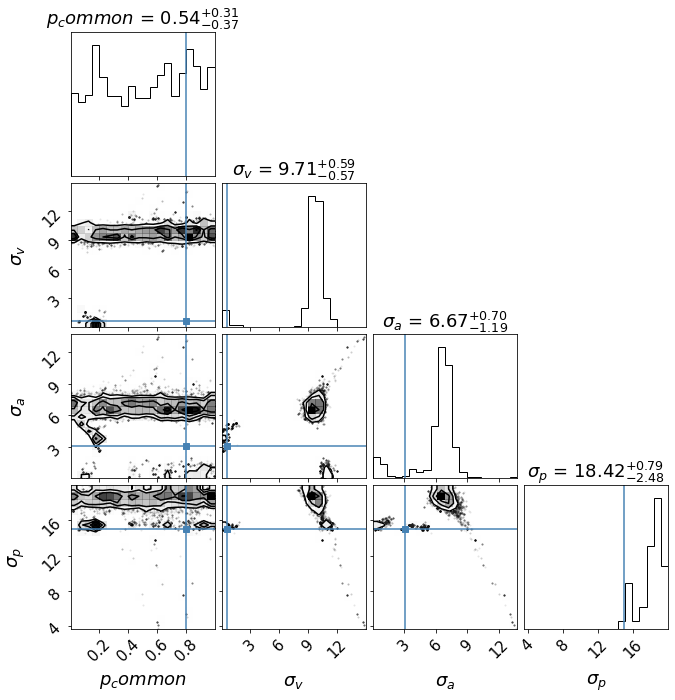

In [22]:
flat_samples_MCMC1 = sampler.get_chain(discard=100, flat=True)
plot.plot_corner(flat_samples, ['$p_common$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'], true_values)

parameter_estimates_MCMC1 = np.mean(sampler.get_chain(discard=100), axis=(1,0))
print('Parameter estimates using MCMC sampling: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates_MCMC1[0], parameter_estimates_MCMC1[1], parameter_estimates_MCMC1[2], parameter_estimates_MCMC1[3]))

### 2. i)

In [23]:
# MCMC sampler with 2 subjects
stimulus_pairs_subject_1 = model.generate_stimulus_pairs(trials, p_common=0.3, sigma_p=12) 
stimulus_pairs_subject_2 = model.generate_stimulus_pairs(trials, p_common=0.3, sigma_p=12) 

experimental_data_1 = model.make_button_presses(stimulus_pairs_subject_1, plot=False, sigma_v=2.1, sigma_a=9)
experimental_data_2 = model.make_button_presses(stimulus_pairs_subject_2, plot=False, sigma_v=2.1, sigma_a=2)

experimental_data_combined = [experimental_data_1, experimental_data_2]

sampler2 = model.MCMC_sampling(model.log_probability, experimental_data_combined, [1, 20, 20, 20])

[0.91042113 5.93863846 3.12794392 9.28870327]
[ 0.10793661 19.56607161  8.34144912 15.48012366]
[ 0.01617577  5.2516521  13.69958616  5.70178714]
[ 0.6322529  10.00774321 13.38244203 16.6356727 ]
[0.67160008 3.24671565 9.37983557 2.86574802]
[ 0.22459648  5.14554711 18.21946807 15.61884641]
[ 0.6603557  19.05661611 18.12902466  0.80116644]
[ 0.03758986 17.59867932 14.28530128 19.62157226]
[ 0.53315323  7.3204341   5.98515179 14.82920299]
[0.8441026  7.6695756  5.99874569 2.26002419]
[ 0.2265071   0.51547617  8.52939881 13.99506663]
[ 0.46397431 19.44703533 13.54730537 17.63028747]
[ 0.70705181  9.04220425  3.37738825 16.44622549]
[ 0.94988838 16.01789886  5.93187832  3.01973082]
[ 0.89922178  8.2384916  11.23947082 16.217926  ]
[ 0.69918431 18.17316669  1.92514781  6.55956529]
[ 0.54061796  6.51470008  6.34569606 10.90729143]
[ 0.83553196 16.21432474  1.78720741  2.52338172]
[ 0.79255745  4.09731946 13.99994305  6.44964744]
[ 0.23151747  4.81810385 19.47640023 14.04762052]
[ 0.04819423

  0%|                                                                                          | 0/600 [00:00<?, ?it/s]

[-0.19453097 19.66719747  3.91887605 13.65347765]
[-0.16533151  4.25579644 16.41143889  2.87900319]
[ 0.85618411 12.83906413 14.51872936 16.52579798]
[ 0.84987709 25.11143575 25.67843347 -3.00383158]
[ 0.10123264 16.19634172 13.28078777 18.51904731]
[ 0.40455662  4.63656032  6.00159098 18.47338363]
[0.88698752 7.94944707 5.77400396 1.4926355 ]
[ 1.19708447  6.52073265  9.6291606  18.67874284]
[  0.57505849  27.64585921 -13.36443999   7.72238547]
[ 0.68971133 13.46305951  6.05771617  5.30555291]
[ 0.99992035  2.16440831 18.06872302  5.99038176]
[ 0.26952239  6.76871932 16.18667544 24.56886148]
[ 0.98131106 10.03123938 -9.79772286 29.39218466]
[ 0.40750454 10.41677087 10.75290537  4.68773683]
[ 0.02182125 15.23098928 11.706324    5.69874436]
[ 0.52651191 13.95814424  8.08931794  7.57044939]
[0.94334913 5.45696059 1.91407378 8.41901011]
[ 0.6760131  -2.95811216  5.94608771  3.6760234 ]
[ 0.19325662  7.95293649 16.96482538 16.35562539]
[ 0.12936792 -1.75705767  7.36753675 13.36288186]
[ 0.

  0%|▏                                                                                 | 1/600 [00:03<31:47,  3.18s/it]


[ 1.1910089   4.5803894  19.75904474 -1.24497393]
[ 1.71445803 -0.78261443 -8.72648941  9.38345612]
[-0.28490469 31.35511101 10.06547006 19.55441265]
[-0.06128962  6.76148375 19.04202341 16.19324363]
[ 0.09988169 16.02250861 13.28743949 18.3154724 ]
[ 0.73780282  7.59847148  4.38345985 14.09988928]
[ 0.74119284 23.52591488  6.34073431  6.01192857]
[ 0.77338737 21.7934695  -2.84787573  2.14360521]
[ 0.77491906  4.38679907 13.85120369  6.36893834]
[ 0.11846388  3.3540273  21.19559895 13.31749146]
[ 1.31629586 30.21608818 29.57895387  5.12615469]
[ 0.90911336  9.5749476   1.11963105 18.32399099]
[-0.09836451 16.25937605 11.37631895  3.54541055]
[ 0.14120592 -0.62680943 21.18802925 11.14373456]
[ 0.52814163 13.56765051  8.5363657   8.50794894]
[ 0.40473573 13.75044061  6.69187836  7.93805632]
[ 0.94768724  9.26781602 22.3249487   2.98008843]
[-0.07951141  5.44429945 11.13265631  1.99331244]
[ 0.61479292 10.40628303 14.87104653 17.05513999]
[ 0.84539075  1.53686203  6.62407405 -2.03536402]

  0%|▎                                                                                 | 2/600 [00:05<30:08,  3.02s/it]

[ 0.4928572  17.37161606  5.3849824   1.28260017]
[ 0.66207561  1.68969848 10.9924543  -0.78278587]
[ 0.69944834 13.27293846 11.1907359   7.51390472]
[ 0.45720047 18.36380806 13.21210253 16.07776109]
[ 0.71198068 13.44706121  5.59539804  8.52338631]
[ 1.24069464  4.43215358 14.37986164 21.93568259]
[ 0.40337757 13.8152044   9.24863467  6.74481936]
[ 0.7977456   5.81906561 10.36032192  4.55532136]
[ 0.4408199  11.76747324 18.81878865  7.58244349]
[ 0.31677209 15.22023978 10.09935545  8.10305838]
[ 0.14510049  6.75594465  9.37332491 14.76436143]
[ 1.53443219 27.5460783  19.81229288  1.34446918]
[ 0.51716714 10.64682188  9.98884244 15.84653268]
[ 0.89330962  8.97795377  3.85475017 15.36051172]
[ 0.02465988 20.24873365 10.7040851   5.69721442]
[ 0.29074279  1.43649215 17.80353806  9.36952489]
[ 0.51610028 13.58548628  8.35638956  8.45234158]
[ 0.8817897  -4.24365669 -8.93883512 10.35953514]
[-0.59520688 29.04560036 12.35838512 15.58721209]
[-0.38003563  3.9631242  18.81463196  1.09078512]


  0%|▍                                                                                 | 3/600 [00:09<31:01,  3.12s/it]

[ 0.82767628  8.58090214 17.60196603  5.395747  ]
[0.91851886 5.68005636 1.71146041 9.66968295]
[ 0.17176786  8.69280602 11.91102826  6.12091629]
[ 1.0965427  12.54310449 -6.38537887 17.89573386]
[ 0.08367558 -0.36098582  8.2564914  17.56649447]
[ 0.61103774 17.69272297 -4.88017951 11.25221175]
[0.48101224 8.86367402 9.71959476 8.7652285 ]
[ 0.50020378 11.09322061 16.89819339  6.79690781]
[ 0.21315261 12.90065932  7.80251736  2.21867381]
[ 0.20924879  6.9274537  10.14665054 13.88390139]
[ 0.82045203 19.00548398 18.37260225  4.77579075]
[ 0.38347007  8.16080578  4.68902524 10.14641458]
[ 0.61498293  9.41396603  9.3546787  15.31529326]
[ 0.69338709 13.28064661  8.14437707 15.68931543]
[ 0.41709239 11.94999464 11.22735886  6.88521692]
[-0.12546223 15.19310953 12.05286808 -0.08618712]
[ 0.3124988  13.88706292  5.31325822  7.51210304]
[-0.0237461  23.58787966  7.28143214 20.22419204]
[ 0.5790118   9.80889256 11.46723597 15.00160197]
[ 0.63679709 -5.54469721 12.64154396 -2.01042346]
[ 0.3900

  1%|▌                                                                                 | 4/600 [00:12<31:48,  3.20s/it]

[ 0.79360965  8.37481463 24.73738417  0.22358968]
[0.69425605 1.64926681 8.9748734  1.46961215]
[ 0.32990467  9.66677376 12.44782263 11.38358154]
[ 0.53929531 24.29424734 25.5470116  -6.76496474]
[ 0.61003318 19.49725725  9.53026106 15.58726984]
[ 0.73810054  7.59409242  4.36777839 14.10904021]
[ 0.18011302  7.9695634   8.45585815 14.57613743]
[ 0.3925852  11.15401627  6.35897151 15.72143183]
[ 0.74069946 13.76626244  4.06264079  8.75751179]
[ 1.04734588  4.84543475 10.57842959 16.26489614]
[ 0.63027233  5.41945852 13.38591403  6.3094581 ]
[ 1.02593648 19.36846775 21.29179806 -1.61751731]
[0.41316699 9.02533213 5.29425349 9.88196922]
[ 1.03925764  0.9191174  10.20250597 15.17737021]
[ 0.40831546  9.74901084 11.04848033  4.28353958]
[ 0.29315609  6.29025407 12.63167783 10.11721448]
[ 0.63543096 11.5150845  15.12844521  8.08932403]
[ 0.87376647 11.76106063  9.31470418  7.43637531]
[ 0.05012851 20.15167187  8.60425113 16.14589589]
[-0.08341694  9.18616342 15.30467205  2.52376636]
[ 0.5073

  1%|▋                                                                                 | 5/600 [00:16<35:11,  3.55s/it]

[ 0.79360168 12.45030976 10.59309764 18.66827735]
[0.72541627 5.51321303 9.36249775 4.0824376 ]
[ 0.26744311  6.14006646 15.16754978 15.32713461]
[ 0.57628408 16.15517655 13.02912166  4.53179657]
[ 0.11947764  9.92606682  3.93738295 21.63910803]
[ 0.12938488  7.4236227   7.94341627 16.78211322]
[ 0.33637658  8.4269103   8.71050763 11.07735711]
[ 1.09389495  5.45166318 11.95244651 16.39944125]
[ 0.69624296  1.12276961 13.682861    2.8878111 ]
[ 0.51904883  6.62517669  5.26168285 17.34945061]
[0.43912133 9.50688032 5.13263198 9.95786288]
[ 0.55344717 10.69386518  9.32384064 12.82296239]
[ 0.75907899 10.78760312  4.62158635 15.38095498]
[ 0.23189586 12.5105145  11.79180438  6.00297882]
[ 0.64972632 18.71165757  7.04607009  6.1644633 ]
[ 0.72554353 10.62188602 17.41173394  8.61143139]
[ 0.65459891  9.49248084  8.16417699 10.89230949]
[ 0.08502725 23.24689466  8.30513479 15.76705602]
[ 0.16415202  8.74717686 11.88653016  6.11778458]
[ 0.65278113  7.65504569  5.00431066 14.17249491]
[ 0.6480

  1%|▊                                                                                 | 6/600 [00:21<38:40,  3.91s/it]

[ 0.56342634 15.32548749  5.08437202  7.97273943]
[ 0.104894   19.62213914  8.34243578 15.50565849]
[ 0.04193087  7.25324978 14.00855032  4.86535253]
[ 0.6592852  19.01967172 18.06408695  0.84866902]
[ 0.37902408 13.59239398  9.45741894 15.46921313]
[ 0.73963049  7.90615823  3.64878641 15.57799726]
[0.7027068  8.13215589 7.84698491 3.07323312]
[ 0.35296942  6.28183726  7.35401943 12.4158108 ]
[ 0.60328342 12.15829629  5.71099939 10.16218941]
[ 0.69325901 12.75803216  2.40236514 11.4169163 ]
[0.43986385 8.46679248 8.98578928 6.14667897]
[ 0.56997621 15.0827423   6.77788359  7.46553544]
[ 0.66527886  3.59947171 14.29170157  5.9043681 ]
[ 0.44549218 21.79064549 17.72982351 11.51365119]
[0.26932727 8.7470154  3.5844174  9.28003113]
[ 0.48258992  9.52154449 10.30870113  4.12537604]
[ 0.56678458  6.9877699  14.25223772 11.62492766]
[ 0.6520838   9.5497334   8.27846141 10.79535   ]
[ 0.55780949  9.60439351 11.08913192 13.65235589]
[ 0.83703284 -0.55969415 12.69958321 -1.47381611]
[ 0.36869924

  1%|▉                                                                                 | 7/600 [00:26<40:41,  4.12s/it]

[ 0.69630188  8.81674741  8.52247614 11.2629204 ]
[ 0.21066835  8.9797839  11.580318    6.91897681]
[ 0.66859341  6.58370892 12.40943858 18.60757466]
[ 0.27160286 13.15117446  6.98085084 19.53561272]
[ 0.79759279  7.8030315   3.92193629 14.36153759]
[ 0.2598078   4.37474224  9.46626282 16.38671735]
[ 0.60232125 17.42219368  9.40054999 19.58279875]
[ 0.61466284 10.47372862  2.62662573 12.53523466]
[ 0.67498621  2.57364525 14.52495753  4.93920739]
[ 0.30844529 15.23046338 12.7479314  11.0213843 ]
[ 0.53375155  7.32885128  6.11580188 14.29452872]
[ 0.4729582  11.75030748  3.24839168  7.36523194]
[ 0.89217877  8.97737232  3.87437751 15.31044139]
[ 0.0983755  11.78619488 10.44701511 -2.56097465]
[ 0.23311648 12.51980139 11.7737019   6.0082593 ]
[ 0.53095327  6.76571957 12.21154954 12.69150525]
[-0.02466627 23.33601016  9.01511434 15.87154757]
[ 0.88844567 -2.94867211  9.38036813 -4.32641631]
[ 0.30838607 10.26088545  7.97144179 10.00254815]
[ 0.54400338 14.74418755 11.49839907  5.59059033]


  1%|█                                                                                 | 8/600 [00:30<42:00,  4.26s/it]

[ 0.04531065 21.01230615  8.09365877 16.73650246]
[0.72888216 6.09669123 7.96930831 6.88543051]
[0.26381195 8.61511607 8.99603678 9.46953684]
[ 0.4678014  17.70995956 12.98739073  2.75246166]
[ 0.153553   14.60324497 15.07486122 18.11045513]
[ 0.31816757  6.02728695  2.1585896  15.04809269]
[ 0.46086688 21.13127079  8.62964595 20.36623755]
[ 0.90894744  8.33782449 12.61922932 15.85607096]
[ 0.51387032 10.74000711 15.52003543  8.42331344]
[ 0.71607944  5.37875482  4.42693269 17.82131429]
[ 0.56207966 13.41055178 13.28889489  7.49537447]
[0.39084155 7.83843118 4.7406087  9.82174842]
[ 0.89341055  8.97854829  3.85221136 15.36456892]
[ 0.33300737 12.40059142  9.70235593  7.39326129]
[ 0.58610936  7.31802534 13.73128244 12.48488031]
[ 0.54512062 10.54934016 11.31270505  8.65242481]
[ 0.65575217 10.20457619  9.96245325 10.12471157]
[ 0.49023819  8.45369797 11.5364591  10.87498053]
[ 0.71998555 10.15010256 12.24373314 15.95969868]
[ 0.74977373  7.66450202  5.99961589 14.33255745]
[ 0.75157151

  2%|█▏                                                                                | 9/600 [00:35<42:07,  4.28s/it]

[ 0.57626417  7.35870647  8.87332098 -0.36442862]
[0.82112003 7.1766309  7.82229037 9.89984629]
[ 0.07993854  6.0489818  12.51636007  3.75234027]
[0.59365907 7.35104931 6.82356298 8.16886971]
[ 0.18051467  8.17385351 10.50823072  8.74169409]
[ 0.83872503  7.7318236   3.52665657 14.00362208]
[ 0.64576612  5.95803126 11.89191285  2.55381974]
[ 0.80665323  7.76919706 11.5172648  15.22539587]
[ 0.51988543  9.45690489  4.90371544 12.09249176]
[0.45088823 9.08304706 8.49246551 8.5910105 ]
[ 0.63773236  5.26188501 14.44233819  7.51643611]
[ 0.5143878  10.73940379 15.43901835  8.48084016]
[ 0.92311202  8.92315953  3.21172703 15.51610376]
[ 0.20765776 12.99621672 11.74561961  5.44736712]
[ 0.47126511 11.62957833  6.88544727 10.26898332]
[ 0.54934381 10.88019751  8.93414814  5.95724846]
[ 0.4769389  10.45010178 11.53260712  5.72184272]
[ 0.10383366 19.64811209  8.35122198 15.51437939]
[ 0.8032921   7.40021328 10.57156605 19.43163869]
[ 0.54573257 14.67688745 11.46461047  5.65499391]
[ 0.41263069

  2%|█▎                                                                               | 10/600 [00:40<44:15,  4.50s/it]

[-0.05247696 25.0317266   9.89850911 18.37650808]
[ 0.57638979  8.43651932  8.8783521  10.81034799]
[0.21323073 8.1863076  7.69545727 9.66911503]
[ 0.14450527 14.69249628 11.23045072 14.17843638]
[ 0.53872061  8.13011957  7.05754167 15.53274436]
[ 0.41389996 13.5359874  10.12515387 11.84180679]
[ 0.36034813  6.26503624  7.41297329 12.07579903]
[ 0.75599463 10.24881676  0.53169625 14.17948873]
[ 0.71787106  7.34227743  0.16066845 16.29305323]
[ 0.68287083  6.94800091  7.7227458  15.66650548]
[ 0.57820999 13.19478662 12.82948471  7.8784739 ]
[ 0.58089885 10.66185977  5.02597613 15.8746894 ]
[ 0.4865302  10.99369141 10.42071631  3.79194014]
[ 0.5661688   7.5153016  13.27496415 12.02793396]
[ 0.47406975 12.23725969  6.57594723 10.52372329]
[ 0.64881055 12.23503455 11.59281232  3.09054063]
[ 0.65634307  8.69004241  8.64106618 11.1121078 ]
[1.27600779e-02 9.27376874e+00 1.30424730e+01 4.81318132e+00]
[ 0.6460579  10.27443638 10.42060825 15.95696609]
[ 0.55913256 14.05890557 12.08712274  6.60

  2%|█▍                                                                               | 11/600 [00:44<44:24,  4.52s/it]

[ 0.47109026 10.6046251  11.80358606  5.2805457 ]
[ 0.16354295  7.92329016 11.91774187  5.77746962]
[ 0.5302424   9.86020477 11.77403598 14.36305013]
[ 0.57458982  8.47296325  8.9263916  10.71825087]
[0.3624236  1.7850456  9.40160883 5.72400673]
[ 0.55845445 12.74991096  6.00175401 21.5848972 ]
[ 0.55448934 10.04118823  3.42326999 11.74287948]
[ 1.13143002  2.01043411 12.99247682 14.86257876]
[ 0.61821785 11.42424529  3.3571091  12.10278049]
[0.65189973 8.16199574 8.0474402  9.62903416]
[ 0.72261735  5.61963365 15.81477845  5.82260306]
[ 0.48958155 10.76832495 19.32271151  5.72319824]
[ 0.39140944 10.0375868   8.99225021  9.05861154]
[ 0.42451892  9.88024238  9.01830367 10.12006175]
[ 0.78873156 10.70587762  6.14293468 12.43638019]
[ 0.3354643  10.60454152 11.8865968   8.26312857]
[ 0.63561008 10.99454708  9.93027504  5.67154094]
[ 0.61898509  9.18561654  6.72727956 11.34346264]
[ 0.08954155 20.00647799  8.39267057 15.57234184]
[ 0.54783795 13.02436527  8.54543523  7.840398  ]
[ 0.6252

  2%|█▌                                                                               | 12/600 [00:49<44:45,  4.57s/it]

[1.05953283e-02 2.91098829e+01 5.45583819e+00 2.31607531e+01]
[0.32126043 9.25555799 8.99433195 9.28452509]
[ 0.61382663 14.28432475  8.35694828  7.32649993]
[ 0.62823078  8.03076819  7.36646359 10.31255301]
[ 0.6018612   6.23351746 12.2757964  -1.25054895]
[ 0.4700044   5.81397086  7.34404215 13.93134709]
[ 0.45141646 10.30630149  7.40609963 10.10531361]
[ 0.8594624   7.53249225 13.25552711 15.91929983]
[0.4342944  9.25147444 8.98498025 8.95948386]
[ 0.62871262  7.18824552 10.9615023   9.4111706 ]
[ 0.59512298 10.72953755 12.703323    9.64489514]
[ 0.50116386  8.72094399  5.52883702 11.5616798 ]
[ 0.20896428  8.92075108 10.0618519   6.00186808]
[0.47406113 9.72557593 9.16365311 9.17983702]
[ 0.44505906 10.36211284  7.01008438 10.69587466]
[ 0.39362325 12.6513342  15.39278589 -0.56456957]
[ 0.69306713  8.4352086   8.32939701 12.06022846]
[ 0.05930495  8.08711195 14.53165561  4.47995474]
[ 0.65746215  8.93469543 14.6943327  16.26539442]
[ 0.54812823  8.79253633  8.95714772 10.3600267 ]


  2%|█▊                                                                               | 13/600 [00:54<44:47,  4.58s/it]

[ 0.65400699 12.0716597  11.58633049  3.54815325]
[ 0.65278696 10.36363795 10.03458948  7.32511519]
[ 0.30364616 16.92282253  9.53015355 10.96905915]
[ 0.56088546 13.26680667  8.34019544  8.13351704]
[ 0.47435575 11.61133331  7.87695355 13.62013083]
[ 0.53576136 10.53834232  8.72118635 10.8770369 ]
[ 0.62058274  7.648959   10.58682966  5.65294634]
[ 0.47335303  6.12637599  7.14896659 13.67668487]
[ 0.39243895  6.92918557  7.87797129 11.07620857]
[ 1.02400968  4.35894485 12.25914539 17.16564594]
[ 0.62861331  9.48755878  6.72977244 10.73257388]
[0.52233048 8.53723691 8.60702936 9.30707824]
[ 0.69989118  5.08490972 11.23862787  8.60577489]
[ 0.59327944 10.67784153 12.74145591  9.86995973]
[0.40758804 9.84350415 8.48171813 9.42758185]
[0.42527511 9.79616846 8.04200185 6.57445574]
[ 0.36677217 11.77463858 11.18351058  9.69157073]
[-1.10199274e-02  6.32048044e+00  1.35757468e+01  6.31314438e+00]
[ 0.48355179  9.72259105  9.80023119 11.56395919]
[ 0.7344634   7.01405834  6.90461276 12.481604

  2%|█▉                                                                               | 14/600 [00:58<45:16,  4.64s/it]

[ 0.45889851 10.80190033 11.65138833  5.73049549]
[ 0.84270932 10.95810475  9.37058573  7.49958141]
[ 0.18288775 21.02217689 10.31201581 10.6487398 ]
[ 0.48200937  9.8922792  10.204299   10.20131546]
[ 0.70925895  7.3009965   6.66958621 12.4358987 ]
[ 0.36287323  5.47811748  5.63358384 13.17926155]
[ 0.39582309  3.55091888  5.97777457 14.60908441]
[0.47685601 9.74338099 7.86899334 9.49483505]
[ 0.44493384  9.87820272  8.69071194 10.19725249]
[ 0.49681402  8.76792584  8.09286818 10.2560693 ]
[ 0.63468787  7.06368272 11.29411057  9.26395024]
[ 0.71288437  9.86968922 17.40956668  5.76860095]
[ 0.60558532 13.82244473 12.09754504  5.131217  ]
[ 0.47313806  8.79661074  4.9467559  11.2142623 ]
[ 0.43537831 10.1968282   9.39495306  7.21690536]
[0.45337812 9.76226913 8.95147003 9.25692247]
[ 0.4435619   9.48398478 11.39381312  7.27352422]
[ 0.05114846  9.0978901  13.52449432  5.0586214 ]
[ 0.34031873  7.79744559  8.22329637 10.64548866]
[ 0.62798125 16.29407638  9.80711032  5.52712364]
[ 0.4678

  2%|██                                                                               | 15/600 [01:03<45:36,  4.68s/it]

[ 0.75111592 14.66997154 15.79458159 -2.77916868]
[ 0.50804331 11.80590559 13.14120396  3.68828906]
[ 0.68719416 10.1453113   8.44219734  5.94093826]
[ 0.17673478 20.35578168 10.82572231 10.12959392]
[ 0.42970541  8.33287401  9.00426695 11.00718356]
[ 0.70284688 18.61270276  9.48170857  4.33874121]
[ 0.48514775 10.44776499  6.93168504 12.79147138]
[0.80096735 5.6481974  9.52793787 8.17089149]
[0.4733938  9.85643589 9.30188551 8.25800678]
[ 0.43845802  7.33460549  7.02139473 11.52966049]
[ 0.65088525  6.78952977 11.41198351  9.42899656]
[ 0.38549597 10.06429017  6.69335872 10.75041962]
[ 0.6531802  15.36648129 13.68432014  3.52484764]
[ 0.7860155  11.20761496  7.14553025 12.00294669]
[ 0.32600094  9.60443301 10.45867744  7.07188891]
[0.47221751 9.70396205 9.42832276 9.1543053 ]
[ 0.69100969 13.41837515 10.7199362  -2.06126887]
[ 0.47598034 10.44745615 11.39662516  5.87140054]
[ 0.23450625  8.87762603 11.54503163  7.06108776]
[ 0.66332517 10.19039831  9.0745051   9.19947639]
[0.38325428 

  3%|██▏                                                                              | 16/600 [01:08<45:17,  4.65s/it]

[ 0.41961306 10.92060117  5.12057416 12.02602427]
[ 0.42814719 15.23193416 10.27415599  8.12727206]
[ 0.37913977  7.70260862 11.30352379 10.39863072]
[ 0.42721972 17.30102454  9.94712145  4.40651291]
[ 0.42380928 12.03890321  7.1950832  12.91625069]
[0.68488115 8.65630243 7.90331793 9.73402951]
[ 0.71677658  7.57472047 11.21884011  4.85185127]
[ 0.3474609   5.83269762  6.23575251 12.54534263]
[ 0.48930578 11.09626196 12.0622329   7.54207373]
[ 0.29926329  6.08366763  7.54312025 12.01275532]
[0.40901707 9.83146009 8.47313392 9.44183248]
[ 0.60706343 13.8560172  12.11913311  5.1004904 ]
[ 0.52518006  9.23434581  7.36265459 11.07174458]
[ 0.67199289 10.28174734  6.73768204 11.67043323]
[ 0.43583538 10.15701474  9.50659263  7.22006761]
[ 0.50304708 10.0474608   8.28082921 10.61811548]
[ 0.42668612 10.6796307   6.61477934 10.82439814]
[ 0.70786142 10.3640423  10.83647019  6.43143279]
[ 0.03188336  6.78743675 11.34616136  7.72832322]
[ 0.90323148  8.08820269  6.90217958 12.37722199]
[0.35968

  3%|██▎                                                                              | 17/600 [01:13<45:47,  4.71s/it]

[ 0.44341984  9.27830352 10.0891141   7.56224891]
[ 0.48352511 13.66957026  9.56406975  8.97605477]
[ 0.16007839  8.76454605 12.24050851  6.11346536]
[ 0.65194104  7.86984933  7.28483215 10.39341803]
[0.60458439 7.26700778 8.58095318 9.29768339]
[ 0.44130499  7.1388864   6.64028214 11.61800057]
[ 0.62620447  5.1524307   9.58552811 10.03711898]
[ 0.55391041 10.62394494 10.5404356  10.82405609]
[ 0.38489205  8.32955867  7.63394114 10.60443239]
[ 0.64578183  4.44485638  5.81879671 12.66377192]
[ 0.52558383  9.23426971  7.35544729 11.08112845]
[ 0.65282528 10.29877835  6.75758394 11.7854355 ]
[ 0.50064033 10.91401414  8.94093088  8.69728408]
[ 0.44287382  9.46803799 11.46764389  7.18222378]
[ 0.45529498 11.41819858  5.13219204 12.34697689]
[ 0.77980527 14.56798961 13.14040626 -1.64252249]
[ 0.46477406 10.0443988   9.7734212   7.6191323 ]
[ 0.69214685 12.65805731 12.83759223  3.26035252]
[ 0.43093982  8.4960216   8.84393783 10.98215482]
[ 0.79635999  6.40309958  5.74595593 13.64171927]
[ 0.

  3%|██▍                                                                              | 18/600 [01:17<46:00,  4.74s/it]

[0.5337402  8.59702242 8.55342136 9.36048405]
[ 0.50651261 16.96926834 10.88458792  7.65213371]
[ 0.16069386  9.19707667 11.96083492  6.61720022]
[ 0.47991715  8.18606164  8.15320921 11.43161769]
[ 0.55681886 13.32278829  8.5106687   7.75188206]
[ 0.45762681 11.27572827  5.83089759 15.52785563]
[ 0.62601136 11.52040027  3.33500217 12.03736669]
[ 0.53108807  5.11352189  9.72868855 11.8059301 ]
[ 0.52253667 11.29503795 11.32218109 10.49853304]
[ 0.47175227  9.29461242  5.79471274 10.5569315 ]
[ 0.5276889   9.82272873  7.10909625 12.38529383]
[ 0.13532847  8.17310245  6.9270093  10.25385283]
[ 0.59067298  8.52346145  7.92708652 10.79420314]
[ 0.45263188  9.44908271 11.09847441  7.40879854]
[ 0.4527608  10.55069737  6.92087476 10.69957963]
[ 0.68154837 12.66014613 12.085467    1.67804464]
[ 0.75715702  5.60271459  6.11296989 13.79951094]
[ 0.31415953  6.72479736  7.97838021 10.95044051]
[0.69552821 7.26650248 8.10821323 8.57221025]
[0.61097709 6.68963128 8.88142367 8.60998964]
[ 0.29934013

  3%|██▌                                                                              | 19/600 [01:22<46:20,  4.79s/it]

[ 0.37054604 19.6447884  10.48156739  8.67589352]
[ 0.47857562  8.14010073  8.18253001 11.40483655]
[ 0.334969    7.75351008  8.19228541 10.70233642]
[ 0.49633787 11.54054207  8.25735178  8.71398848]
[ 0.47350059 10.09003767  8.42422618 10.8634016 ]
[ 0.80041942  8.06483887  6.0464671  11.54115897]
[ 0.20370589  5.03079005  4.92457573 14.36107441]
[ 0.48012668  9.93097729 10.22546889  8.39307527]
[ 0.61691404  8.48554639  9.67261894 11.08303846]
[ 0.55838386 11.48746766  8.44717155  8.71560499]
[ 0.57364971 13.8348966  11.55810525 11.07957099]
[ 0.56070339  7.45556432  6.336168   12.59893345]
[ 0.52505532  9.23769559  7.3055454  11.18483097]
[ 0.29607466  7.92269379  4.48381409 13.9146962 ]
[ 0.44531608 10.33112431  7.14884566 10.58431024]
[ 0.76772089 16.582754   16.0286479  -6.96634522]
[0.59657682 9.86619101 8.85761694 8.97548472]
[ 0.18262496  9.06767836 11.93598396  6.44941614]
[0.70273358 8.56298531 7.94493425 9.90260658]
[0.48522861 7.65904924 8.29659703 9.77635073]
[ 0.25956379

  3%|██▋                                                                              | 20/600 [01:27<46:01,  4.76s/it]

[ 0.49322865 14.5403915   9.6782102   8.97932095]
[ 0.47165584  7.91371265  8.78754887 11.27963869]
[ 0.95503316  7.54133504  6.12228792 12.94425208]
[ 0.56681372 13.23134682  8.27273505  7.84150504]
[ 0.42315254  7.37005799  7.98858753 10.51666779]
[0.53055459 9.11515802 8.65536395 8.42249092]
[ 0.39134316  5.16287543  5.51824858 13.96119527]
[ 0.60190279 11.38956461 11.1213735   7.38511973]
[ 0.42726188  8.3307944   7.64381719 10.52757764]
[ 0.6905621   5.57264438  5.05843945 13.71465947]
[ 0.52466659  9.23810483  7.25210551 11.11863049]
[ 0.58105942  9.04798854  7.46551605 11.23739419]
[ 0.25352888  8.38769125  7.71669502 10.72573836]
[ 0.50671353  9.18153831 10.05035813  8.453639  ]
[ 0.44672932 10.31487922  7.27374975 10.49535095]
[0.37335137 9.88916635 9.64642614 7.76210035]
[ 0.76833119 11.95718665 11.56920567  4.93601863]
[ 0.17942877  9.41134005 14.39638106  4.14435813]
[ 0.27811441  6.94324469  7.53413766 11.42079985]
[ 0.46476305  9.10624647  8.00556342 11.1103326 ]
[ 0.6227

  4%|██▊                                                                              | 21/600 [01:33<50:25,  5.22s/it]

[ 0.76131026 12.2535597  13.1010618  -1.26152434]
[ 0.3331057   8.92020667 10.48547693  7.97251464]
[ 0.6129329   8.1953399   8.27740533 10.54202552]
[ 0.45440737 13.17624585  8.9817247   7.19266383]
[ 0.66604122  6.5501156   6.93045784 10.87440185]
[ 0.4496171   7.49326206  8.11989955 10.20105244]
[0.50617012 8.70926261 8.4407996  9.80059748]
[0.47300401 9.42845202 7.52046573 9.97247305]
[ 0.46278854  6.4481832   6.24934214 13.21777654]
[ 0.44810393  7.84523977  8.75378729 10.16806681]
[ 0.62156806 11.5257605  11.60898645  6.99095722]
[ 0.42378538  7.97647612  7.70990391 10.53333269]
[ 0.54402736 12.17974486 10.97896202  6.50700662]
[ 0.5804598   9.05557038  7.44732217 11.26543173]
[ 0.60358204  9.98522952  7.38446598 10.89020812]
[ 0.82887477 14.13157578 15.10435727 -3.8539679 ]
[0.47119499 9.1584584  9.0332877  9.38036307]
[ 0.64497342 10.25587623  9.930813    7.48667483]
[ 0.59399919 17.15769414  8.88735122  9.71309505]
[ 0.47917548  8.15230513  8.20063114 11.40291453]
[ 0.35733501

  4%|██▉                                                                              | 22/600 [01:39<51:27,  5.34s/it]

[ 0.48789347 13.56200266  9.66622707  8.79778583]
[ 0.33214043  8.92067636 10.49410842  7.96420878]
[ 0.47667332  8.66970657  7.92486464 10.82295584]
[ 0.68459885  8.63838585  8.13901044 10.20412996]
[ 0.46090376  8.80799701  7.46796735 10.85652226]
[ 0.50281866 11.84773549  7.94606706  8.93878821]
[ 0.28484523  9.03477127  8.90992537 11.17094233]
[ 0.60632448  6.99821997  6.28519922 12.87496897]
[ 0.38957124  7.71265181  6.6726798  11.68338664]
[0.43585662 8.67368156 8.90868246 8.61222847]
[ 0.69762729  8.20340247  9.79159626 12.08491187]
[0.43751995 9.22429221 9.04191667 8.98165705]
[0.34010947 6.3588117  9.70491223 9.66647043]
[0.53348897 9.96983996 9.57213785 6.76453365]
[ 0.21594094  7.75424635  7.05821168 11.33601786]
[ 0.43492008 10.23309195  6.9809323  10.73205029]
[0.58305986 9.99459267 9.713053   7.86168539]
[ 0.41971665  7.17426297  7.97596964 10.6012996 ]
[0.46573078 9.58255768 9.75934551 8.66100176]
[ 0.54793776  8.41963589  8.07652845 10.3425786 ]
[0.49074323 9.79326022 7

  4%|███                                                                              | 23/600 [01:44<50:53,  5.29s/it]

[ 0.62192884 10.03622602  9.52338032  8.151563  ]
[ 0.47767282 12.00693698  9.71361555  8.27672555]
[ 0.18244203  6.50163119 12.54204146  7.28813263]
[ 0.73918064  7.28677971  6.663522   12.47889589]
[ 0.42806056  7.45473248  7.96701259 10.55834195]
[ 0.41418009  7.52882432  6.01929322 12.33327402]
[ 0.36229154  6.80191975  7.66481506 11.64880863]
[0.28906007 9.83565084 8.51997088 7.24263179]
[ 0.43873291  7.73379152  7.52663339 11.45476517]
[ 0.48958648  7.96848886  8.67640512 10.20861141]
[ 0.67546451  8.05076626  7.54766452 11.34066423]
[ 0.7892215  10.0663854   7.40683869 11.61452389]
[ 0.58017612  9.32337443  7.96107239 10.37848912]
[ 0.55009709  8.7298554   8.1600639  10.50084155]
[ 0.37823459 10.89036555  6.47516819 10.87290194]
[ 0.70098905 12.97028213 12.3207924   0.28500577]
[ 0.42986553  7.75233178  7.97751215 11.48298778]
[ 0.36515387  8.18319251  7.47338939 10.82199026]
[ 0.45876745 12.27249551  8.40620319  8.16306359]
[ 0.35623759  8.41513449  8.32180528 11.48812328]
[ 0.

  4%|███▏                                                                             | 24/600 [01:49<49:50,  5.19s/it]

[ 0.50922736 12.25465426 13.07190506  3.47715299]
[ 0.47084948 14.31988673 10.30765949  7.17027209]
[ 0.04679159  7.62743542 10.88930241  8.55234093]
[ 0.82866167  6.02483686  6.53407654 13.17747843]
[ 0.45576254  9.55927168  7.15203994 10.50144804]
[ 0.33006184  8.72832489  8.72253596 11.07907291]
[ 0.34561957  9.01977528 11.31365475  7.14764457]
[ 0.35985032  7.09670671  7.47682087 11.6080121 ]
[ 0.53038489  8.52759769  8.22876929 10.08946001]
[ 0.59156784  8.53064266  9.24726796 11.08034353]
[ 0.55343429  8.18497462  6.69060451 11.87490822]
[ 0.42028641  7.81340782  7.09405693 11.18900607]
[ 0.84692586  7.2051309   6.4709159  13.04054985]
[0.5377975  9.29394025 8.28215691 9.96353466]
[ 0.06855739  6.7028581   6.71705068 11.9371003 ]
[ 0.67327572  7.91422471  6.84883002 11.71960262]
[ 0.51089694 12.33766698 13.19578944  3.32158863]
[ 0.70269636 11.85800301 10.67646008  4.26363323]
[ 0.50584025  8.11801581  8.57409821 11.29380814]
[ 0.37050398  7.42801296  5.92146535 12.38627845]
[ 0.

  4%|███▍                                                                             | 25/600 [01:54<49:05,  5.12s/it]

[ 0.92893478 17.24947539 16.81178456 -7.32779205]
[ 0.4801406  12.38240882  9.70217357  8.40253597]
[ 0.34676998  8.86138664 10.34685947  8.13465318]
[ 0.42041123  7.74604369  8.02135133 11.47379741]
[ 0.51596174  7.65936522  7.14139591 11.55498223]
[ 0.33560321 10.6297122   7.38072687  9.58450295]
[ 0.3455128   8.79963798  8.76845839 10.77749416]
[ 0.25010247  5.87276053  6.51856039 13.21258683]
[0.48810481 9.21214007 8.99484259 9.09395704]
[ 0.57975572  8.6590169   9.07637352 11.05408026]
[ 0.56634126  8.1958531   5.50730094 12.87149863]
[ 0.45122427  7.58711195  7.35732049 11.49152282]
[ 0.46046695  7.39603526  8.19230229 10.70842969]
[ 0.5665914  10.33216055  9.74051133  8.62544188]
[ 0.0668238   6.69938538  6.7166729  11.93772382]
[ 0.65269971  7.56539015  7.36481456 11.7348075 ]
[ 0.79150308 14.20827849 13.45683461 -1.61282831]
[ 0.77504059 11.727053   11.10204392  5.5376989 ]
[ 0.73447291  2.42468495  1.74165476 22.22451286]
[ 0.58024696  5.58683341  6.87808871 12.42663099]
[ 0.

  4%|███▌                                                                             | 26/600 [01:59<48:04,  5.03s/it]

[ 0.72438315 12.03476367 10.97397677  3.66942325]
[ 0.43975356  9.18532628  8.59297945 10.39386192]
[ 0.74056311  7.60296973  6.52989795 12.1656917 ]
[ 0.4812034   7.61648604  7.24509969 11.51965545]
[ 0.4758695   8.27587715  8.17281331 11.18373609]
[ 0.13566491  7.18144879  5.76535325 12.72114073]
[ 0.50918303  8.46117754  6.39005021 11.93736334]
[0.43729582 9.18690537 9.00369487 9.04479191]
[ 0.44543079  7.52572988  7.1578634  11.68702788]
[0.63423306 8.13475627 9.17121278 9.66174606]
[ 0.39784897  8.13325422  8.0868224  10.25680806]
[ 0.50693191 11.00663167 10.78957098  6.98809067]
[ 0.45113246  8.24434962  7.9335543  10.89400742]
[ 0.52471807  8.83039745  7.98557418 10.39931944]
[ 0.64911433 11.63961785 11.16093832  3.74236167]
[ 0.44051451 10.20276088 10.03648435  7.29577104]
[ 0.5043871  10.65927343  8.64767052  9.54548207]
[ 0.35802614  8.85816579 10.2002633   8.27502807]
[ 0.54381958  8.77481468  6.98445    11.17341812]
[ 0.55233996  8.22102488  8.02006399 10.67380865]
[ 0.4327

  4%|███▋                                                                             | 27/600 [02:04<49:47,  5.21s/it]

[ 0.43928266  9.10937266  7.05436942 11.12842385]
[ 0.47814947  8.39643558  8.52157927 10.44297712]
[ 0.64683811  7.82983734  7.11643295 11.73439136]
[ 0.49079196  7.46258725  7.38620391 12.82474985]
[0.50280053 9.09894735 8.91335187 9.17731512]
[ 0.38266195  7.31334349  7.53482216 11.45773256]
[ 0.58229657  8.65117205  9.13579814 11.08649484]
[ 0.57443486  8.01491241  6.62368241 12.01223951]
[ 0.49921542  7.78990362  8.59932281 10.56915885]
[0.51947419 9.68118418 9.28129849 9.02720979]
[ 0.9510486   6.78496521  5.81449206 13.94359323]
[ 0.46405889 10.54595638 10.43969586  7.44721003]
[ 0.48084132  7.70954364  6.93354079 12.29846243]
[ 0.64797679 10.0072936   7.61322556 11.04824004]
[ 0.01962647  6.36888362  7.36889584 11.40061467]
[ 0.76392335  7.74430277  6.40890347 12.03742177]
[ 0.83741669 14.24925268 13.41047364 -1.95474588]
[ 0.6708858  10.62131311 10.22976575  6.97830976]
[ 0.61678644 13.74885944  9.67525949  7.77973608]
[0.32079611 8.42064467 9.9833194  9.03419023]
[ 0.42112644

  5%|███▊                                                                             | 28/600 [02:10<49:25,  5.18s/it]

[ 0.45121293 10.35870671 10.21970107  7.36458394]
[ 0.79029401 11.76655636 11.29660646  5.04725315]
[ 0.32831061  8.83393244 10.78033742  7.61435622]
[ 0.47909154  8.46963126  6.88144951 11.37707927]
[0.54011836 8.33503412 8.79245984 9.93346773]
[ 0.48510604  7.32148742  7.26857038 11.75638924]
[ 0.65460168  6.67263167  9.50210358 12.5522167 ]
[0.42587399 8.60689541 8.39084452 9.72660106]
[ 0.42719571  4.56922429  3.94527121 15.83739382]
[ 0.47274305  7.81359652  8.09418775 10.77163872]
[0.49843297 9.05277308 8.57044868 9.97322116]
[ 0.97714241  5.78738319  5.66497128 14.37530332]
[ 0.56926881  8.98851374  7.42996782 11.26728342]
[ 0.55158077  8.88350031  7.88162139 10.46453388]
[ 0.96622476  6.23050842  4.12258981 15.03697263]
[ 0.63005602  7.26380088  7.53842945 11.71579987]
[ 0.8087313  14.29707336 13.85271485 -1.62693139]
[ 0.4637998  11.11512804  8.99777774  9.15578271]
[0.38422446 8.15370493 8.00872643 9.87807225]
[ 0.84400998  6.36657509  5.51309285 14.11610861]
[ 0.50725839  7.

  5%|███▉                                                                             | 29/600 [02:15<49:06,  5.16s/it]

[ 0.38688112 11.26766759 11.39405634  4.81641031]
[ 0.65789686 10.42905315 10.12255655  7.19424866]
[ 0.69064167  7.36609274  6.73699249 12.35136571]
[ 0.53766028  8.06208157  7.2012978  11.65115342]
[ 0.52496359  8.21140922  8.03404172 10.63180326]
[ 0.09181761  6.6436904   6.26518797 12.59560292]
[ 0.46342411  8.47652102  8.27493067 10.40758427]
[0.73446163 7.3705008  8.11847741 9.8168942 ]
[ 0.65307238  8.59316673  8.7047504  11.97299605]
[0.42322532 8.47239395 8.24872754 9.88470924]
[ 0.41706654  6.90894446  6.5659219  12.88938362]
[0.47041631 8.54567425 8.72261678 9.88092874]
[0.46926884 9.07922958 9.04000099 9.44043719]
[ 0.57591521  6.44151977  5.37751478 13.34010072]
[ 0.78917134  7.24621747  6.77887661 12.65677379]
[ 0.48927553  9.3390734   8.5530749  10.15838923]
[0.47543186 9.63231828 9.14665691 8.52550636]
[ 0.45783441 11.48237494  9.12522767  8.84417615]
[ 0.33474019  9.07019894 10.62776757  7.76825057]
[ 0.48108555  8.64519028  8.52989072 10.36787662]
[ 0.488652    8.4654

  5%|████                                                                             | 30/600 [02:20<50:11,  5.28s/it]

[ 0.63491443 11.76570677 11.27079227  3.54437913]
[ 0.7964934  10.07735248 11.37764464  5.17497143]
[ 0.51893721  8.19866195  8.179029   10.80929107]
[ 0.51410774  7.76177788  7.84382531 11.41455506]
[ 0.13002397  6.79610895  6.39496169 12.46814171]
[ 0.64515567  8.45111644  7.86341245 10.51494923]
[ 0.59069481  8.5569594   9.06900382 11.31921902]
[0.42182997 9.71161274 9.73894141 7.88920159]
[ 0.48010845  7.67647303  7.85671535 11.03811149]
[ 0.8910441   6.47143874  6.01004663 13.99821676]
[ 0.45988842 10.72711824 10.66648403  7.14073935]
[ 0.55899314  8.67745803  7.72333409 10.97304099]
[ 0.5920612   8.79119879  7.15227432 11.19366579]
[ 0.31013876  6.97763281  6.92886059 11.98670259]
[ 0.58652566  7.61068985  6.65787019 11.87835308]
[ 0.70998895  7.56156378  8.95426695 10.75349882]
[ 0.5136228  10.15143885  8.81503552  9.92369341]
[ 0.48838447 10.6143081   9.35876387  8.712867  ]
[ 0.25523234  9.79416765 12.08744366  6.03790293]
[ 0.70476317  7.33291746  6.74772403 12.41552151]
[ 0.

  5%|████▏                                                                            | 31/600 [02:26<50:19,  5.31s/it]

[0.54807151 9.32724305 8.7972556  9.05000726]
[ 0.52149144 10.20756209  9.11879945  8.9496168 ]
[ 0.44796468  8.68130852  5.86779946 11.82062709]
[ 0.507847    7.77224944  7.65887295 11.55461668]
[ 0.371457    9.53720259 10.27346244  7.75965162]
[ 0.36490711  7.12145991  7.08560845 12.61887708]
[ 0.48461785  8.26493064  8.50913801 11.35321592]
[ 0.45517437  6.95352023  6.54981452 12.61407568]
[ 0.37446914  7.08486554  7.91509226 11.47306231]
[ 0.46629045 10.63479552 10.51980095  7.33666961]
[ 0.48541497  8.03164161  7.12281786 11.82530502]
[ 0.53129981  8.80870735  7.94353299 10.43592022]
[ 0.28004763  6.83041835  6.70182274 12.19597028]
[ 0.72326452  6.09846286  6.97075936 12.95040334]
[0.46354364 9.26374457 8.77614854 9.60711715]
[0.41916846 9.87041356 9.37828976 6.81128037]
[0.35923675 8.78983438 9.83253555 8.61905438]
[ 0.49401378  7.7119647   7.54220655 11.51473984]
[ 0.60038263  7.75987367  7.51336952 11.91407624]
[ 0.475647    7.14713027  6.83795192 12.0987736 ]
[ 0.4449274   4.

  5%|████▎                                                                            | 32/600 [02:31<50:17,  5.31s/it]

[0.49572844 9.88580475 9.13438126 8.71239452]
[0.54669149 9.37294848 8.81394989 9.04479508]
[0.41298033 8.75960002 9.26506423 9.25238407]
[ 0.6849524   7.38660774  6.76796564 12.30784221]
[ 0.49690403  7.79471985  7.79809678 11.50959002]
[ 0.54944651  8.02252367  8.1491108  10.54367354]
[ 0.38844648  7.38941417  7.66804479 11.11981127]
[ 0.49068941  8.33561793  8.43558239 11.2339678 ]
[ 0.41491552  7.7975736   6.91829629 11.60121872]
[0.52901677 9.06607759 8.6939838  9.35935544]
[ 0.48866171  8.08401882  8.05321329 10.68044088]
[ 0.49129326  7.12351389  6.5606353  12.52368907]
[ 0.51622849 11.10047088 11.03530204  6.74011651]
[ 0.4811453   8.0853784   7.44499002 11.4001038 ]
[ 0.07972195  6.00507114  5.91501394 12.83377183]
[ 0.46939842  8.96471002  8.06267294 10.27362131]
[0.4603224  9.85504203 9.47198857 8.00891943]
[ 0.46987322  9.04032548  8.05302347 10.23387473]
[ 0.49251593  7.80724181  7.62800095 11.3588778 ]
[ 0.63430143  7.40402143  6.94836892 12.01993549]
[ 0.47748996  8.5341

  6%|████▍                                                                            | 33/600 [02:36<48:52,  5.17s/it]

[ 0.60887467 11.3615653  10.9780447   4.05859004]
[ 0.49644897  8.238698    8.42082928 10.61161057]
[ 0.50197918  8.61818419  7.34688688 10.96466713]
[ 0.53417537  8.27491298  8.08340069 10.56262562]
[ 0.09507493  6.83844825  6.33615257 12.25031912]
[ 0.25218525  5.69212389  6.51888275 13.37595154]
[0.63574799 8.93290404 8.39382459 9.6482018 ]
[ 0.38594234  5.26674996  5.2826298  14.59447708]
[0.54667654 9.83988912 9.69924334 8.46262987]
[ 1.01100017  6.02277199  5.3763101  14.93383386]
[ 0.43019236  8.35010418  7.54409147 11.25293387]
[0.71282742 9.69445986 8.31088214 9.62034865]
[ 0.24479378  6.57760839  6.64523755 12.35143561]
[ 0.59751378  7.43800154  6.29756612 12.18267631]
[0.44408543 9.06973538 8.96429723 9.47060575]
[ 0.69825071 12.96474595 12.40914737  1.05644012]
[ 0.39584958 10.83931745 10.20644538  6.60087165]
[0.54725191 9.32841728 8.7597422  9.14411405]
[ 0.62036782 10.68696904  8.99430967  8.81801256]
[ 0.33433997  8.87572758 10.06003749  8.36016077]
[0.68632416 9.879719

  6%|████▌                                                                            | 34/600 [02:41<49:36,  5.26s/it]

[ 0.63060097  7.09459891  7.4543871  11.92054769]
[ 0.45172384  7.95018417  7.92711043 10.87078671]
[ 0.37589099  4.59524381  4.68053403 17.71059865]
[ 0.65167222  7.87259124  7.33300353 11.56687534]
[ 0.49964752  8.63657231  7.31571939 10.97813361]
[ 0.43144292  7.32122398  7.08502421 12.24220454]
[ 0.38615266  7.42625231  7.62515022 11.33143414]
[0.57384876 8.90492152 8.35989988 9.79780448]
[0.45446231 9.04277996 8.8569208  9.28786827]
[0.55327168 9.42643959 8.94864396 7.87503664]
[ 0.49035855  8.06879413  8.09988937 10.62462787]
[ 1.13154442  5.9940542   5.22423951 15.215699  ]
[ 0.5570256   8.54659633  7.80887271 10.88770948]
[ 0.56818997  8.56090988  7.49031311 10.88716138]
[ 0.16476832  6.04747279  6.53351308 12.65837556]
[ 0.75662952  6.57584587  7.5348437  12.00893253]
[ 0.45936897 10.06688605  9.71088351  7.59631157]
[ 0.51331178 10.21746512  9.3246767   7.97530711]
[ 0.45070018  9.05274205  8.01363115 10.30157116]
[ 0.6384747   7.5418595   6.36833404 12.31890359]
[ 0.47975952

  6%|████▋                                                                            | 35/600 [02:46<49:28,  5.25s/it]

[ 0.69226721 12.80942388 12.21898121  1.41609809]
[0.57570363 8.63893273 8.37004919 9.97434575]
[ 0.45897091  8.65966703  7.71758718 10.75432167]
[ 0.64128052  7.33803255  6.88449446 12.11280361]
[ 0.57532294  7.81932503  7.50599056 11.56036786]
[0.16210064 9.85431438 9.6039983  7.78364087]
[-0.0968454   6.41821951  5.75594765 12.60418944]
[ 0.43823402  7.53183216  7.36699793 11.78298342]
[0.70793087 9.72290536 8.89934443 8.52256913]
[ 0.45129567  7.4430251   7.68223759 13.2063329 ]
[ 0.34933262  7.27013505  6.79118545 11.95047386]
[ 0.47375837  8.02228789  8.02747222 10.72558463]
[0.51023867 9.48760819 9.46472482 8.86623756]
[ 0.4740549   7.93978539  7.25616718 11.79138907]
[ 0.50335642  9.48930721  8.00761819 10.27915586]
[ 0.63730087  7.38735694  6.48612528 12.2392376 ]
[0.44101612 8.98711818 8.55670091 9.88973533]
[ 0.44754025  7.54061311  8.04806425 10.93801979]
[ 0.47330965  8.21011778  7.9385302  10.87991352]
[ 0.6419135   7.88703958  7.34416322 11.55484859]
[ 0.43376789  8.6345

  6%|████▊                                                                            | 36/600 [02:51<48:40,  5.18s/it]

[ 0.42364397  8.04086492  8.08155779 10.68680121]
[ 0.49123982  7.68048744  7.51409531 11.56704736]
[ 0.66147293  8.10748229  7.78392175 11.2785733 ]
[ 0.502313    9.35305535  6.34883189 11.63918188]
[ 0.16826723  7.11263412  6.6458835  11.90372366]
[ 0.57394432  7.28804209  6.97584502 12.41464783]
[ 0.29820934  6.77238171  7.2160422  11.92807039]
[0.63672898 9.70223793 9.35251935 8.45728698]
[ 0.42470259  7.5726702   7.30467742 11.52369742]
[ 0.38451077  7.93220424  7.65993831 10.94633183]
[ 0.34330268  7.07018094  6.44541333 12.44447543]
[0.51168326 9.59211134 9.56553176 8.73670396]
[ 0.54202442  8.62720739  7.87077338 10.77695773]
[ 0.55416822  8.39897676  7.53169202 10.95290494]
[ 0.74403713 16.70437489 16.46273026 -6.39723628]
[ 0.45014687 10.24065641  9.80013788  7.39316369]
[0.64360316 8.4917013  8.39201376 9.95797274]
[0.36975588 9.72399636 8.29315117 9.46597106]
[ 0.6084704   7.9086973   7.56325223 11.25807702]
[ 0.46998457  8.04961725  8.05013088 11.06196626]
[ 0.4990289   8.

  6%|████▉                                                                            | 37/600 [02:56<47:55,  5.11s/it]

[0.4402734  8.98973932 8.56060572 9.88780628]
[ 0.49293382  9.25607173  7.79700812 10.44310348]
[ 0.4143308   7.25904648  7.45248422 11.80696511]
[ 0.51932344  6.89623602  6.73859965 12.8801507 ]
[ 0.5586498   7.72265068  7.19855755 11.74449733]
[ 0.49775854  8.13392694  8.12866447 10.80633768]
[ 0.35896629  8.08203517  7.83118483 10.64039744]
[-0.03144195  6.35965573  5.66475821 12.57534667]
[0.71428427 9.34448748 8.32785635 8.65265185]
[ 0.4856866   7.53688327  6.9257263  12.00151008]
[ 0.54032425  8.42255818  8.36517839 10.22877844]
[0.48144225 8.85551913 8.35209998 9.97511607]
[0.52493244 9.66428275 9.66560077 8.68183028]
[ 0.57473194  8.84055227  8.01563163 10.52786889]
[ 0.30998501  7.04455052  6.90133307 12.08524951]
[ 0.49130113  8.13411645  7.64881016 10.8104442 ]
[ 0.62375831  7.33373956  7.59015103 11.64023844]
[0.64102647 8.55268269 8.38916099 9.92116896]
[ 0.60781616  7.72154165  7.21352804 11.7415759 ]
[ 0.4011224   8.85628263  6.20230656 11.88219593]
[ 0.492951    7.3996

  6%|█████▏                                                                           | 38/600 [03:01<46:50,  5.00s/it]

[ 0.76581735  7.82295479  7.81810235 11.54870753]
[ 0.42614314  8.76109945  6.25498177 11.88483469]
[ 0.46466974  7.75039605  7.28697343 11.61795756]
[ 0.48254484  7.71221267  7.56460164 11.45217348]
[0.41180223 9.24902155 9.05898575 8.80892115]
[-0.23038154  5.39638845  4.78658743 14.03594345]
[ 0.55152104  7.55677651  7.23014683 11.92317401]
[ 0.41107498  7.69941138  7.72538997 11.05168184]
[ 0.48822227  8.30555694  8.17491762 10.42974067]
[ 0.7113743   7.48006777  7.0014515  12.32618708]
[0.5307418  9.26062711 9.17125913 9.23319228]
[ 0.52103998  8.70247204  8.03548636 10.50302241]
[ 0.0465149   3.84654644  4.3156713  15.93123605]
[ 0.55180265  7.04090964  6.26507625 12.53742932]
[0.33873217 9.22336829 9.18782352 9.43535854]
[ 0.77804991 15.09283771 14.44527391 -2.98390293]
[0.61093196 9.01154293 8.98281739 8.89231212]
[ 0.42307596  8.48002073  7.5813215  10.90188791]
[ 0.4531963   7.6666168   7.7674884  11.34081452]
[ 0.47788474  7.60669471  7.39766871 11.5770438 ]
[ 0.73455049  7.

  6%|█████▎                                                                           | 39/600 [03:06<47:07,  5.04s/it]

[ 0.65736127  8.45716319  8.31441089 10.13420955]
[0.39880854 9.63410354 8.3611735  9.60741963]
[ 0.41166309  7.26521399  7.46006099 11.77608743]
[ 0.42225462  8.05078261  8.1556065  11.19656158]
[ 0.52097165  8.12567577  8.58581812 10.38933872]
[ 0.43989831  8.67636379  8.35469237 10.03613413]
[ 0.54979113  7.30871513  7.17434909 12.19165974]
[ 0.42990152  7.72770859  7.7678481  11.46718891]
[ 0.52480539  7.55069354  6.70796304 12.1109252 ]
[ 0.51441087  8.33136871  7.99685022 10.68898111]
[0.51587597 8.9849884  9.68235491 8.71437512]
[ 0.3619711   7.19182978  6.95663571 11.97922921]
[ 0.21005662  6.51441883  6.53500874 12.44744369]
[ 0.54905847  7.02401211  6.22127137 12.63325293]
[ 0.69363615 10.56077707 10.02503006  5.99349688]
[ 0.70139334 11.84605678 11.54170567  5.20950724]
[ 0.50450873  7.53954886  7.19227073 11.63799796]
[ 0.73144306  7.76171179  7.70642526 11.62158402]
[ 0.49272778  6.79471997  6.43163747 12.47737232]
[ 0.42658175  8.71817413  6.2805815  11.87603479]
[ 0.0616

  7%|█████▍                                                                           | 40/600 [03:12<47:48,  5.12s/it]

[ 0.58739255  8.14815915  7.89801926 10.64891079]
[ 0.42612709  8.14372521  7.66470186 11.15458647]
[ 0.41275849  7.21172178  7.42063931 11.84127513]
[ 0.49034943  7.40707925  7.04579241 11.83791882]
[ 0.36406573  9.00530824  6.41619331 11.69574102]
[-0.12544402  6.13324138  5.72735961 12.87785091]
[ 0.59336566  7.53669654  7.17028149 12.02867032]
[ 0.61534003  8.7613795   8.21595847 10.00453954]
[ 0.5225622   7.58000011  6.83374577 12.03733884]
[0.53758641 8.92820066 9.24115608 9.19939529]
[ 0.48656938  8.6450286   8.2811833  10.22167   ]
[ 0.47116812  8.07206661  7.55641796 11.32950138]
[ 0.43668209  5.95775086  5.21524782 16.58490489]
[ 0.52813891  7.1475552   6.49279306 12.4285352 ]
[ 0.63114664  7.26394937  7.59868262 11.67394412]
[0.46311811 9.72651038 9.37167008 8.21782863]
[ 0.74082387  7.68094134  7.66525635 11.75223685]
[ 0.89361415  6.94740489  6.22792901 12.56034114]
[ 0.50197969  8.01751671  7.81506566 11.19731097]
[ 0.42874626  8.58403564  8.4028663  10.35745577]
[0.40973

  7%|█████▌                                                                           | 41/600 [03:17<47:50,  5.14s/it]

[ 0.78652951 16.01464862 15.55326338 -5.16236468]
[ 0.59624169  8.29759265  8.10788038 10.38313581]
[ 0.5051113   8.73931551  8.07765934 10.68198461]
[ 0.38238356  7.10723075  7.28792734 11.93210965]
[ 0.88613256  6.98023015  6.26161236 12.52495322]
[ 0.47617699  7.42206165  6.77691278 12.24835881]
[ 0.40992615  7.30723445  7.32629347 11.65896009]
[0.74254768 9.46664047 8.74356373 9.23777713]
[ 0.48432829  7.60492789  7.6166693  11.34105761]
[0.54120049 9.06867788 9.43344338 8.91317649]
[0.55937624 9.50073792 8.85107208 9.3027068 ]
[ 0.39105303  7.44200359  6.83678201 12.04847398]
[ 0.51609388 10.85394777 11.02452132  6.95310005]
[ 0.53039974  8.39014691  7.18752639 11.25573787]
[ 0.49013557  7.1326587   7.24906837 11.85090438]
[ 0.95515318 16.22648746 15.30637606 -4.57139519]
[0.45761778 8.91405153 8.59624003 9.45437495]
[ 0.55841702  7.63239122  7.03734167 11.72260555]
[ 0.6593059   8.2813993   8.16615839 10.71474386]
[ 0.4123419   8.6887138   6.22839039 11.97884753]
[ 0.58981604 10.

  7%|█████▋                                                                           | 42/600 [03:22<46:59,  5.05s/it]

[0.24114774 9.1070117  8.54935603 9.98909638]
[ 0.59055306  8.09866074  7.81278899 10.74089144]
[ 0.34687785  7.8850292   7.4338156  11.63626782]
[ 0.54333949  7.67409018  7.22265226 11.67251939]
[-0.25605286  6.43790772  5.39901425 12.78732521]
[ 0.60151195  7.3317075   6.93140024 12.35698217]
[ 0.40351822  7.48783594  8.25389018 10.80415601]
[ 0.49657282  7.71768026  7.74584928 11.52831193]
[ 0.48972961  7.33232681  6.39214869 12.60988423]
[ 0.48202049  7.68128729  7.60624649 11.34098457]
[ 0.3919432   6.83220707  6.473654   12.30034786]
[0.35704777 9.58565558 9.07131823 8.72377979]
[0.41682528 9.08741103 7.76608261 9.97648755]
[ 0.34459076  7.26029913  7.09300128 11.6365198 ]
[0.31622532 9.13902863 8.76206068 9.82047248]
[ 0.56802032 10.82965154 10.43168929  5.57578371]
[ 0.27128423 11.46239368 11.20319822  5.04319563]
[ 0.28377366  6.21686939  7.43683424 12.51046148]
[ 0.48858855  7.32915621  7.11614293 11.98858501]
[0.83605888 8.37043673 7.68704913 9.8700823 ]
[ 0.79244654 10.4666

  7%|█████▊                                                                           | 43/600 [03:27<46:37,  5.02s/it]

[ 0.72160579  7.77941186  7.47092355 10.89547893]
[ 0.4227794   7.17122123  7.37982774 11.97512309]
[ 0.55816374  7.62833558  7.03278653 11.72851063]
[ 0.591598    7.50390122  7.59157015 11.68000628]
[ 0.98134257  4.33689369  3.5512893  17.57292029]
[ 0.48132134  7.557112    7.38762457 11.7252842 ]
[0.30195199 9.0910765  9.46423436 8.29600436]
[-0.13153154  6.46280419  6.09703837 12.28609972]
[ 0.44477922  7.79748997  7.72504193 11.42341537]
[ 0.40608071  7.91999581  8.05304828 10.61675384]
[0.55189358 9.78384997 9.33913387 8.70027993]
[ 0.61288239  7.42092387  7.13824577 12.09091128]
[ 0.60875708 11.82957859 12.07213147  5.84764125]
[ 0.55666761  8.98858986  7.99418476 10.58461735]
[ 0.66278584  7.27947681  7.35291864 11.89388855]
[0.42031656 9.18323332 8.89189141 8.93320451]
[ 0.33658749  7.90452831  7.39241395 11.6572243 ]
[ 0.43229458  8.62823922  6.34360842 11.90383373]
[ 0.40176526  8.59605295  8.5459892  10.22876431]
[ 0.62014115  7.10681095  6.87404939 12.53658424]
[ 0.25263509

  7%|█████▉                                                                           | 44/600 [03:32<47:10,  5.09s/it]

[ 0.6032997   7.52375196  7.64557788 11.64495225]
[ 0.55692942  7.94621692  7.7054713  11.59672682]
[0.35509047 8.52226534 8.5070636  9.77075797]
[ 0.19252649  6.89798734  6.32405365 12.39058244]
[ 0.47604506  7.32309425  6.8389367  12.20692337]
[ 0.7063142   8.16299305  7.55938567 10.8512857 ]
[ 0.09034121  8.28403639  8.88889823 10.6799238 ]
[ 0.39720526  7.05719967  6.43855158 12.55991385]
[ 0.51159355  7.93591141  7.71927436 11.02442369]
[ 0.40937904  7.94672789  8.17699174 10.46450667]
[0.53027788 9.57439721 8.72751379 9.29305492]
[0.54523214 8.87233326 8.76085355 9.84866916]
[ 0.40603006  7.75048479  7.34453286 11.46888016]
[ 0.57809382  7.98128429  7.30238716 11.47155807]
[ 0.70043789  7.13016956  7.43318052 11.84335861]
[ 0.39250816  8.6473407   8.28035321 10.30566897]
[ 0.97424787  7.82419154  7.21376024 10.40032678]
[ 0.3908576   8.07134799  7.55274918 11.33546441]
[ 0.51834506  7.96039876  7.79478995 10.9971448 ]
[ 0.5785807   7.50168573  6.74367966 12.02326497]
[ 0.75077574

  8%|██████                                                                           | 45/600 [03:37<48:17,  5.22s/it]

[ 0.76891683  8.01159149  6.85145448 11.80418422]
[ 0.49775348  8.19820952  6.89292578 11.7672915 ]
[0.36035311 8.52667877 8.4996188  9.81267699]
[ 0.16054507  6.88609586  6.32512375 12.38101944]
[ 0.52462462  7.38942118  7.25472222 12.00709242]
[ 0.3856799   7.33395442  7.54013527 11.44386882]
[ 0.52750912  8.49139802  7.95647144 10.52527673]
[ 0.37835196  7.69825132  7.83991925 11.40936819]
[ 0.41502741  7.98429992  8.17049243 10.50426465]
[ 0.80099933  7.07514752  6.94674408 12.41445859]
[0.52408217 9.9297389  9.87035928 8.28506035]
[ 0.39506754  7.7357801   7.34721804 11.46870954]
[ 0.4904173   7.04189766  6.45864597 12.53926098]
[0.07629968 9.48127698 9.05808145 9.738959  ]
[ 0.84636628 17.29806514 16.2856754  -7.69341802]
[ 0.47473329 10.005052    9.67695951  7.77502816]
[1.21841968 8.60708352 8.54785264 9.49155293]
[ 0.35254801  7.82569844  7.56343052 11.56250475]
[ 0.41830292  7.32603684  7.37039473 11.83982318]
[ 0.59928625  7.52016923  7.49914315 11.70637617]
[ 0.67900382  7.

  8%|██████▏                                                                          | 46/600 [03:43<48:47,  5.28s/it]

[ 0.35387099  7.82935095  7.56319668 11.55996169]
[ 0.52959256  7.8033074   7.14824653 11.57106585]
[ 0.37222929  7.49842256  7.19529097 11.83449301]
[ 0.52819752  8.31079594  8.08639074 10.54016139]
[ 0.41163456  8.40408537  7.89995851 10.54219078]
[ 0.15669667  6.84089503  6.24841187 12.42293269]
[ 0.31508741  7.27098976  7.55372662 11.36608796]
[ 0.45589936  7.71658699  7.75655629 11.29327109]
[0.71002371 8.77203257 8.84676273 9.78668378]
[ 0.49614631  7.78070313  7.71553666 11.19765555]
[ 0.49007784  8.43729384  8.28535188 10.52407061]
[ 0.93630494  6.7743766   6.80107471 12.66585961]
[ 0.5948251   7.57545733  6.73221727 12.16056906]
[ 0.29005574  7.01993374  6.84761003 12.10417458]
[ 0.51417179  6.84243477  6.20927429 12.84056656]
[ 0.72842337  6.61962184  7.54693003 12.2796388 ]
[ 0.83066237  7.77878727  7.3526022  10.74931364]
[ 0.647069    7.75027742  8.35153188 11.32991306]
[ 0.65918882  7.57269052  7.48763821 11.77810108]
[ 0.80573743  6.97912108  6.16547531 12.72803006]
[ 0.

  8%|██████▎                                                                          | 47/600 [03:48<48:16,  5.24s/it]

[ 0.97662598  7.26547914  7.11794699 11.18613691]
[ 0.31792957  7.86907419  7.49508209 11.6539085 ]
[ 0.40519357  6.62384984  6.78498126 12.89932975]
[ 0.38988236  8.39194151  5.23876109 13.13970646]
[ 0.285022    6.88484606  6.7843603  12.44495405]
[ 0.89176658  7.86581312  7.86211773 11.78510256]
[ 0.43048638  7.51892985  7.61376744 11.3431749 ]
[ 0.49033442  7.19218005  6.12526569 12.94041953]
[ 0.42478888  7.28655239  7.11606187 11.70589688]
[ 0.37045235  7.56833835  6.99725264 11.64996441]
[ 0.39680359  8.5585663   8.05791726 10.90076304]
[ 0.38809718  7.62725091  7.25796151 11.56779733]
[ 0.53275277  8.58922934  7.9761677  10.30239086]
[ 0.4734861   5.01150875  3.98505464 15.56672086]
[ 1.01586724  7.14979563  8.16623065 11.43939316]
[ 0.68231649 11.37655634 10.971804    4.33200676]
[ 0.55291223  7.47922345  6.84843178 11.94761943]
[ 0.57549513  7.46707526  7.35747002 11.83357867]
[ 1.01191437  7.01644922  5.92042819 12.84011382]
[ 0.55471328  8.38407261  8.32581785 10.18748758]


  8%|██████▍                                                                          | 48/600 [03:52<46:10,  5.02s/it]

[ 0.15878519  8.17252057  8.26375745 11.18000765]
[ 0.62730199  7.03765066  6.93641456 12.49504511]
[ 0.61085065  7.57872186  6.29072658 12.46210989]
[ 0.24616569  6.61145923  6.6012649  12.71695275]
[0.56887259 8.86143455 8.74552846 9.23753099]
[ 0.59019551  7.52824182  7.16502748 12.03213377]
[ 0.45025138  8.28042952  8.109224   10.61443937]
[ 0.70052     8.43342732  8.53509443 10.35358851]
[ 0.45839817  7.80983175  7.43561817 11.35262083]
[ 0.4839901   7.54110439  7.35515519 11.68123854]
[-0.02676816  8.10603007  7.75629316 10.66617284]
[ 0.8343186   6.87699173  6.93746358 12.44121625]
[0.49371589 9.15609457 9.14316411 9.33377701]
[ 0.34423606  7.38567258  6.90964913 11.93163738]
[ 0.68101422  7.3317651   6.50061872 12.39246145]
[ 0.44822559  6.46115571  5.86512701 13.39534392]
[ 0.63514973  7.50360846  7.09236868 11.51019343]
[ 0.43469865  7.26143571  7.16310195 11.9988455 ]
[ 0.57331356  7.46925927  6.83179172 11.98090104]
[ 0.82983795  6.94649777  6.11942213 12.78771954]
[ 0.4302

  8%|██████▌                                                                          | 49/600 [03:57<46:06,  5.02s/it]

[ 0.53207734  7.03002334  6.37385692 13.19387772]
[ 0.36714611  7.45013732  7.12482248 11.94932894]
[0.4125348  9.07948203 8.66529955 9.43432683]
[ 0.65929902  7.64645286  7.31597399 11.9620297 ]
[ 0.60613432  8.70408831  8.23263979 10.03231881]
[ 0.45343596  7.03070064  7.20539871 12.34276583]
[0.98729835 8.9331721  9.33913321 9.35557115]
[ 0.60432619  7.62643241  7.75619818 11.13154951]
[ 0.44720108  8.62231185  7.98438885 10.82293515]
[ 0.41864328  7.76745626  7.19009202 11.4313563 ]
[ 0.83303026  6.87875945  6.93537461 12.44189181]
[ 0.48621788 10.46926482 10.69510156  7.39621547]
[ 0.81969665  7.32411231  6.58481075 12.22324987]
[ 0.35151014  7.18199225  6.93937204 11.93651293]
[ 0.48808148  6.9013742   6.49175401 12.50195714]
[ 0.70454434 11.77410346 11.160284    3.40087485]
[ 0.71750931  7.24354093  7.02702639 11.89797432]
[ 0.24996095  7.44996332  7.41689242 11.97794709]
[ 0.41348357  7.36277955  7.10833603 11.88363975]
[ 0.6783774   7.78873527  6.9300128  11.86198281]
[ 0.7240

  8%|██████▊                                                                          | 50/600 [04:03<48:08,  5.25s/it]

[0.45009481 9.35229543 8.9503153  8.94012576]
[ 0.71728136  7.24362772  7.02695471 11.89799488]
[ 0.44343291  7.15388027  7.18281827 12.15916141]
[ 0.41893167  7.40647925  6.82730152 12.21968374]
[ 0.60475169  7.68090706  7.34376248 11.38466146]
[ 0.5465768   8.31595523  7.66162385 10.8953884 ]
[-0.60567462  6.63197642  4.94046492 13.00509751]
[ 0.81318538  7.57954558  6.9999551  12.06764775]
[ 0.20200548  4.09136334  4.77805806 17.38625163]
[0.65585384 9.3535275  8.76487317 9.20946607]
[0.69794342 9.00746714 9.0172782  9.17534415]
[ 0.54198517  7.77468508  7.35840196 11.47863638]
[ 0.51901344  7.34984837  7.21531454 11.70067943]
[ 1.03783042  6.72058505  6.93433935 12.38897831]
[ 0.46975898  7.58369694  6.89479028 12.44749712]
[ 0.25524887  6.46180308  6.47104827 12.40729735]
[ 0.33735255  7.83800835  7.57430639 11.27025919]
[-0.15179843  7.35752967  7.71430225 11.9139618 ]
[ 0.82165151  7.9446075   6.84033293 11.82177336]
[ 0.45214227  6.5270178   6.87653968 12.8977858 ]
[ 1.08071453

  8%|██████▉                                                                          | 51/600 [04:08<47:40,  5.21s/it]

[ 0.64123379  7.02242767  6.91867484 12.51413687]
[ 0.63747258  7.50296666  5.87798606 12.84229977]
[ 0.6377186   8.34327486  8.06992501 10.5563856 ]
[ 0.62928693  7.79638888  7.35411264 11.38117337]
[ 0.39655307  7.27646858  7.40793395 11.58112521]
[ 0.72691951 10.39222009  9.72772978  7.81481998]
[ 0.41839966  6.9976031   7.14160657 12.44926709]
[ 0.26464443  6.91577392  6.06794934 13.18277644]
[ 0.42653062  7.29380688  7.11966346 11.7025194 ]
[ 0.42268294  8.69475073  7.99658727 10.70519124]
[ 0.30155974  7.51088663  7.02121236 11.62373127]
[0.67947786 9.72068004 9.83356233 8.82300614]
[ 0.57981388  7.76506546  7.60940593 11.42308868]
[ 0.07017574  7.35481225  6.73648586 11.83125399]
[ 0.0226076   7.32197885  6.74162386 12.0647067 ]
[ 0.82211091 16.76925125 16.27801105 -6.19080445]
[ 0.78662701  7.29959068  6.98005484 11.78109713]
[ 0.2519252   7.44812735  7.4135125  11.97489052]
[ 0.43040049  7.18349407  7.11998356 12.07124246]
[ 0.67433918  7.73833105  7.07567168 11.69608312]
[ 1.

  9%|███████                                                                          | 52/600 [04:14<47:43,  5.23s/it]

[ 0.72425746  7.19980546  7.00101802 11.93896788]
[ 0.6290252   7.98378033  7.11573328 11.48311865]
[ 0.56016096  6.86217725  6.39705675 13.18408898]
[ 0.37344123  7.40362056  7.28689182 11.75383026]
[ 0.81022821  7.58661626  7.0070115  12.05770203]
[ 0.44385001  6.7230054   7.07505327 12.6589816 ]
[ 0.40347607  9.69923601 10.21223231  8.65441732]
[ 0.53542601  7.77305443  7.35872422 11.48595898]
[ 0.39656723  8.62088143  8.58394239 10.18660805]
[ 0.16086971  7.34785557  6.96940115 11.7201766 ]
[ 0.48423505  6.32161921  5.5967897  13.48079899]
[ 0.07845254  5.27937563  5.57779991 13.67596964]
[ 0.47344191  6.96136889  6.63829295 12.35467413]
[-1.15924961e-02  7.32383796e+00  6.69504405e+00  1.20909804e+01]
[ 0.68238185 12.54814518 11.99397127  1.88324239]
[ 0.37999181 10.68107631 10.3656161   6.65323301]
[ 0.20539826  7.16251578  7.15697695 12.40860259]
[ 0.50704298  7.32223955  7.1319179  12.01199643]
[ 0.83689113  6.67837062  5.74647274 13.09270565]
[ 0.55939706  3.88047635  2.073331

  9%|███████▏                                                                         | 53/600 [04:19<47:54,  5.26s/it]

[ 0.18217688  7.52439753  7.50216149 11.87824123]
[ 0.36785473  7.2756629   7.20051862 12.01266809]
[ 0.79996625  7.03244225  6.24799628 12.65187047]
[ 0.50364435  7.12915223  7.02494957 12.04495595]
[ 0.20956212  7.32698192  6.71524994 11.99878634]
[ 0.73904549  7.63289223  7.09794622 11.9066256 ]
[ 0.39645388  7.36759788  7.5255178  11.45031922]
[ 0.59234038  8.46962347  7.96024142 10.3854628 ]
[ 0.45561369  7.72410335  7.76233462 11.28156706]
[ 0.33402374  7.38341312  5.45622793 13.39760047]
[ 0.38734913  6.66729144  6.18339999 14.23234773]
[ 0.20722637  7.03937005  6.1847211  12.30882016]
[ 0.98082966  6.64049474  6.8687692  12.71598922]
[0.62033013 9.2448526  9.29700183 9.37621055]
[ 0.28612641  6.59990397  6.57504195 12.29256838]
[-0.1893879   7.59653006  6.75694104 12.05503627]
[ 0.97544729  7.33588315  7.29431496 11.76854597]
[ 0.547009    8.28816678  7.74279116 10.8748572 ]
[ 0.55755479  7.08926072  6.98635138 12.24117919]
[ 0.58646315  7.49381957  6.43243233 12.44362049]
[ 0.

  9%|███████▎                                                                         | 54/600 [04:24<46:38,  5.13s/it]

[ 1.01862121  7.14854996  7.10984186 11.88621657]
[ 0.39100487  7.37392163  7.2913737  11.89134467]
[ 0.80407067  6.68502551  6.71915564 12.62514963]
[ 0.86459091  6.83576586  5.99877692 12.91040299]
[ 0.6915371   7.68631603  6.30110405 12.47209951]
[ 0.39591822  6.86509966  6.77032589 12.04670774]
[ 0.64581199  7.82317906  7.39323404 11.34775927]
[ 0.34405979  6.5331148   6.96429647 12.23393282]
[1.07318773 9.87322396 9.35478718 8.41319285]
[ 0.36639063  4.88256265  5.34321528 16.41231279]
[ 0.35312532  6.89126575  6.71508497 12.08096924]
[ 0.36488193  7.62031618  7.14808598 11.67848128]
[ 1.07872231  6.26671388  6.80004931 13.05904614]
[ 0.26812227  7.5122099   6.90280134 11.84964496]
[ 0.46608148  6.24661324  5.79398537 13.25636645]
[ 0.50421657 10.16947167  9.89366503  7.54328667]
[-0.10984315  7.48739084  8.32741205 11.48049973]
[ 0.63011804  7.99266212  7.12333838 11.47235176]
[ 0.12359641  7.4876764   7.8030201  11.49037204]
[ 0.22901365  7.38850785  6.77754763 11.94924706]
[ 0.

  9%|███████▍                                                                         | 55/600 [04:28<44:35,  4.91s/it]

[ 0.74855554  7.22290432  7.03615748 11.89869579]
[ 0.14363705  7.45296338  7.44247748 11.98179108]
[ 0.33970356  7.31377965  7.23158336 11.97314163]
[ 0.56044964  8.05223353  7.29772487 11.42239162]
[ 0.05901151  6.77151611  6.14856624 12.43766756]
[ 0.72851261  7.67612418  7.10792989 11.87136718]
[ 0.41286425 10.3256273  10.01705778  7.64399824]
[ 0.4344749   6.96468988  7.31557364 12.32839049]
[ 0.4958417   7.50594712  6.65808661 12.31343181]
[ 0.10311912  5.52381947  5.32695894 13.38272039]
[ 0.46459525  7.97469877  7.44474835 11.26043006]
[ 0.20204733  7.04742267  6.19024075 12.29281557]
[ 0.46007031  7.8649793   7.6303448  11.17434229]
[ 0.34750519  7.08762786  6.69548542 12.14154   ]
[ 0.50298856  7.03531185  6.43177399 12.57368009]
[ 0.65682799 11.03057221 10.61397251  5.07679717]
[ 0.760199    6.71822216  6.78995151 12.58992379]
[ 0.78596251  7.44321775  6.69820649 11.9937226 ]
[ 0.69443491  7.68735172  6.311272   12.49672394]
[ 0.34134556  7.61657481  7.37172237 11.64771956]


  9%|███████▌                                                                         | 56/600 [04:33<45:15,  4.99s/it]

[ 0.87117287  7.19861178  7.0973618  11.91409942]
[ 0.5722138   8.65506352  8.00479261 10.25667545]
[ 1.0654506   6.4872455   6.29736592 12.83501914]
[ 1.0747237   6.8354271   5.94158951 13.0445783 ]
[ 0.37297133  7.6414969   7.36962274 11.62106786]
[ 0.5965191   7.53540944  7.43060629 11.27698217]
[ 1.33672513  8.32790556  7.86538575 11.48164142]
[ 0.27886598  7.34087976  7.28350346 11.55554231]
[ 0.74874251 10.08658153  8.88006418  8.29051393]
[ 0.31977108  7.16689228  6.38625765 12.44887169]
[ 0.29243596  6.74971113  6.78688826 12.00704256]
[0.3914453  8.81987171 9.15026332 9.89013634]
[-0.0554017   6.71283032  6.12695853 12.18620034]
[ 1.01314528  6.6070091   6.8512796  12.75306783]
[ 0.59395667  7.19719876  6.34465772 12.72256256]
[ 0.66336974  7.21926876  7.61696225 11.69002593]
[ 0.2167563   7.62392077  7.53804909 11.79259058]
[ 0.52766768  7.49565154  8.17427182 11.74264882]
[ 0.95325208  8.02372217  6.37489051 12.60390575]
[0.86723349 8.75650357 9.20059752 9.02849844]
[-0.2556

 10%|███████▋                                                                         | 57/600 [04:38<44:48,  4.95s/it]

[ 0.54815251 16.90477831 16.52126264 -6.5077584 ]
[0.54481785 8.978774   8.43352049 9.66525216]
[ 0.85172577  7.19000071  7.07644584 11.92551172]
[-0.14550999  7.86787415  7.42643558 11.98265156]
[ 0.15958159  7.27076306  6.91018668 12.29820667]
[ 0.76581541  6.63599365  6.65861753 12.74430136]
[ 0.91052557  6.76551639  5.93544569 12.9638832 ]
[ 0.68853152  7.70893032  6.29978045 12.49220428]
[0.91752582 8.23150942 8.5006169  9.85200605]
[ 0.48705959  7.33986977  6.77438837 12.08580189]
[ 0.54425177  7.30852045  7.61340523 11.48582155]
[ 0.63223819  7.17251798  7.92678612 12.11409858]
[ 0.45862689  7.50599124  6.83774092 11.78208286]
[ 0.33752328  7.50054986  7.20283021 11.53724054]
[ 0.59970915  7.61798985  6.8480693  11.99136836]
[ 0.48710921  6.88137764  6.73424648 12.32084719]
[ 0.04363687  7.29064931  6.72206173 12.15009285]
[ 0.63988769 12.31975129 11.73795635  2.32924581]
[ 0.78215723  8.15372144  7.20185791 11.31717914]
[ 0.38353552  7.48126669  7.38415093 11.756898  ]
[ 0.6624

 10%|███████▊                                                                         | 58/600 [04:43<45:37,  5.05s/it]

[ 0.32629736  8.1557088   8.4293903  11.38663724]
[ 0.90732695  5.12269809  5.35551587 14.8991215 ]
[ 1.57058097  6.3865883   5.42082319 13.84605504]
[ 0.72518996  7.60230364  6.44806341 12.39533854]
[ 0.30999743  7.83012465  7.24550873 11.79714023]
[ 0.76629465  8.18522616  8.17499711 10.36704938]
[ 0.63565773  7.82805426  7.2677285  11.69068142]
[0.4234921  9.93329222 9.05478926 8.57256888]
[ 0.42076118  7.9803693   7.85741559 11.24151044]
[ 0.47554525  6.96389475  6.80542089 12.0415362 ]
[ 0.70310751  7.82670686  7.2174525  11.40621897]
[ 0.33781486  6.79205391  5.79654232 12.6824841 ]
[ 0.52977397  6.68447095  6.71493079 12.53536651]
[ 0.67570383  7.25325602  7.59220374 11.58725888]
[ 0.04361904  7.27739832  6.76814418 12.14171594]
[ 0.61323907 10.34410843 10.15882482  5.98500877]
[ 0.85210936  7.16990246  7.07600708 11.9487906 ]
[-0.09113512  7.42545757  7.2343039  12.08049628]
[ 0.66012717  7.9987602   7.10308149 11.45250473]
[ 0.45627297  7.06515638  6.89318433 11.973296  ]
[ 0.

 10%|███████▉                                                                         | 59/600 [04:48<44:53,  4.98s/it]

[0.4746528  9.83774415 9.57457151 8.09309173]
[-0.2049082   7.113652    7.19236473 12.22205571]
[ 0.61832375  8.02464136  7.12324561 11.44561631]
[ 0.6640639   7.23681059  7.19690426 12.0658089 ]
[ 0.31216274  7.74932129  7.13272128 11.86605534]
[ 0.42754223  6.88600938  6.69499069 12.18865042]
[ 0.12708928  7.18861505  6.80842392 12.1248918 ]
[ 0.73563371  7.56482857  7.21413955 11.83271605]
[ 0.32232368  6.89460808  6.7582227  12.03101882]
[ 0.69966883  7.8478083   7.24340339 11.37418836]
[ 0.4852237   8.20424035  7.42857873 11.37658912]
[ 0.24949519  7.88322115  7.24980829 11.13890532]
[ 0.45489747  7.65885859  7.17987693 11.87771218]
[ 0.2455701   6.67418812  6.55051422 12.28038025]
[ 0.72305763  6.10437494  6.20666773 12.99401939]
[ 0.05700356  7.30418653  6.82766233 12.11472651]
[ 0.65893409 12.32098307 11.76450972  2.32613314]
[ 0.70004542  6.9408968   6.90566685 12.22551183]
[ 0.19891835  7.51373901  7.34216214 11.95033787]
[ 0.780513    6.84543153  6.1327121  12.77155474]
[ 0.

 10%|████████                                                                         | 60/600 [04:54<46:14,  5.14s/it]

[0.47510838 9.95406368 9.71413127 7.87000447]
[ 0.08260217  7.60659548  7.41795242 11.91131791]
[ 0.53897298  7.67596519  6.74794581 11.79550331]
[ 0.99820008  6.49119785  5.43925788 13.41280142]
[ 0.62591174  7.66093155  6.61538878 12.13311903]
[ 0.35839153  7.8476751   7.44121321 11.60019556]
[ 0.60549545  7.74316445  7.80761891 10.85912697]
[ 0.43550394  7.31287734  7.48888611 11.50355418]
[0.52825354 9.55581493 9.00301968 8.66550399]
[ 0.47111016  6.91289783  6.53532997 12.44919156]
[ 0.62250955  8.18198494  7.29396303 11.11273157]
[ 0.32256405  7.75012772  7.41198727 11.24601382]
[ 0.46240267  8.09629955  7.5127568  11.36716739]
[ 0.26025708  6.71560563  6.58379398 12.25376145]
[ 0.39556878  6.26494386  6.0300942  13.24047588]
[-0.3141929   7.32497255  6.63189391 12.22709853]
[ 0.40814558 10.39236827 10.19755942  7.13380834]
[ 0.60755294  6.98218467  6.87262209 12.07480613]
[ 0.33778654  7.3752208   6.76458655 12.32880979]
[ 0.54135811  7.42125279  7.27418666 11.77124479]
[ 0.4273

 10%|████████▏                                                                        | 61/600 [04:59<45:48,  5.10s/it]

[ 0.62580452 14.6804385  14.42286324 -2.70871647]
[ 0.88247247  7.04556738  7.07011536 11.96011393]
[ 0.61217646  7.93160424  7.09489964 11.52126879]
[ 0.58711947  7.14401057  7.1722194  12.18562669]
[ 1.02365669  6.5177881   5.5455123  13.32211661]
[ 0.64238473  8.34114082  7.48140803 10.97339961]
[-6.10380627e-03  7.09191754e+00  6.74540901e+00  1.21723977e+01]
[ 0.5857341   7.48285723  6.2873197  12.70237219]
[ 0.19325836  6.27842231  4.71049349 13.66715813]
[ 0.32725017  7.72602755  7.3962231  11.27517296]
[ 0.48020167  8.12150413  7.52301682 11.36598308]
[ 0.34536684  7.84550357  7.40002791 11.0635604 ]
[ 0.67899871  8.32680906  7.41563132 12.19179382]
[ 0.22408005  6.61126969  6.48212395 12.38359242]
[ 0.72065675  7.31043961  7.67036773 11.52182607]
[-0.25784917  6.49489574  6.00471237 13.26864807]
[ 0.61015968 13.58426063 12.93561913 -0.12964484]
[ 0.09392634  7.60244305  7.39821412 11.92276132]
[ 0.48578642  7.42443669  6.76279665 12.42293938]
[-0.08568589  8.52733716  7.755661

 10%|████████▎                                                                        | 62/600 [05:03<43:51,  4.89s/it]

[ 0.59580744 12.53436113 12.91959245  4.02969973]
[-0.2937523   7.3129104   7.62498948 12.23848203]
[ 0.67497796  7.68808575  6.8663307  11.98839101]
[ 0.37463902  7.65127341  7.35081942 11.7351495 ]
[ 0.54192248  6.92612605  6.78930593 12.13119093]
[0.40241847 8.45437635 9.22537508 9.25135291]
[ 0.11259772  7.20402903  6.80143082 12.1278127 ]
[ 0.71595771  7.61806624  7.07876525 11.93091739]
[ 0.61301749  8.57173601  8.02690382 10.41361874]
[ 0.58005077  7.01166209  7.13913205 12.25852443]
[ 0.55482699  7.46697121  6.64958021 12.36464108]
[ 0.47841768  8.40086821  8.61678856 10.48597988]
[ 0.86213134  7.47724526  7.29967118 11.75408965]
[ 0.43675175  7.48078204  7.30183428 11.65881242]
[ 0.56283726  7.83159143  7.17380533 11.71588115]
[ 0.67897701  7.58947443  7.45833892 11.4938734 ]
[0.59511467 8.91035611 8.4699169  9.58128266]
[ 0.87850298  7.05921498  7.07032157 11.95941792]
[ 0.25764327  7.49548942  6.6406834  12.35206084]
[ 0.70937844  8.56807857  7.32763971 11.0909869 ]
[ 0.3908

 10%|████████▌                                                                        | 63/600 [05:08<43:12,  4.83s/it]

[ 0.07815832  7.2421874   6.761563   12.14593836]
[ 0.80796082 14.32915765 13.53549446 -2.33755811]
[ 0.92256863  7.08937743  7.10992792 11.93085608]
[ 0.13051354  7.26952919  7.10103485 12.0712533 ]
[ 0.50891459  7.06258471  6.86893359 12.56832878]
[ 0.62204556  6.81563941  5.90566133 12.80546149]
[ 0.72754162  7.80830146  5.64203989 12.956791  ]
[ 0.20768873  7.10743811  6.77799435 12.14199567]
[ 0.67207672  8.02171181  7.5326244  11.23301374]
[ 0.68451754  6.78916125  6.89469775 12.80003452]
[ 0.54869685  7.66168919  7.70567456 11.33895489]
[ 0.26764024  6.26813942  6.43621803 13.22530141]
[ 0.53907222  8.59107138  7.85202068 11.03673822]
[ 0.39615574  7.33294237  6.92935639 11.87283771]
[ 0.49694165  8.16770379  7.70207253 11.12687668]
[ 0.40837614  6.89136994  6.77700821 12.45443167]
[-0.18115646  6.85842987  6.11894191 12.67823555]
[ 0.6387956  10.19044565  9.46292676  6.84844571]
[ 0.3524816   7.27449471  6.76717244 12.35496124]
[ 0.68708192  8.79301067  7.28439993 10.90175119]


 11%|████████▋                                                                        | 64/600 [05:13<43:44,  4.90s/it]

[ 0.38939278  7.30561711  6.73738553 12.35952137]
[ 0.88416453  8.4770727   7.29361728 11.07801361]
[ 0.8081835   6.89136832  6.10114669 12.83833571]
[ 0.45807812  7.5657075   7.31413629 11.76495184]
[ 0.38603207  8.02272748  7.55490701 11.00036729]
[ 0.57139638  7.11722264  7.00821708 12.28836841]
[ 0.29135471  6.82871885  6.75359065 12.06237839]
[ 0.58314832  8.62085873  7.48517595 10.75710123]
[ 0.60756125  8.00681011  7.86605842 11.07707893]
[ 0.39300301  7.10228815  6.44582688 12.14014917]
[ 1.06348555  7.13634075  7.17534237 11.9653748 ]
[ 0.44263143  7.60558309  7.34718536 11.59896666]
[ 0.30881466  7.37335404  6.89939643 11.86321145]
[ 0.22567469  6.61342297  6.4837923  12.38206456]
[ 0.48217621  6.27866726  6.67172404 12.75475519]
[0.47327255 9.4853362  9.15175369 8.76896902]
[ 0.88582701  7.17005266  7.1810077  11.84341247]
[ 0.1152841   7.64208726  7.41288293 11.87734177]
[ 0.6397545   7.24057746  6.96717966 12.88506658]
[ 0.77127692  7.11601943  5.70635227 13.39838577]
[ 0.

 11%|████████▊                                                                        | 65/600 [05:18<44:10,  4.95s/it]

[-0.03455563  7.56250928  6.89024485 12.03851027]
[ 0.73274727 13.47121548 12.81338434  0.30200881]
[ 0.64033215  7.12458699  7.00295415 11.99970005]
[ 0.32746371  7.29592776  6.80471058 12.32782645]
[ 1.00804968  6.36277838  4.8344594  15.89187486]
[ 0.61107782  6.91218005  6.72775646 12.74766822]
[ 0.50447366  7.71734005  7.73738707 11.05510939]
[ 0.46408229  7.28826339  7.4774909  11.49038557]
[ 0.54134269  8.2918838   7.85965792 10.49504482]
[ 0.60145144  6.75063086  7.46285996 12.18472594]
[0.53103917 9.85993361 9.38327469 7.47329326]
[ 0.42977165  8.43000881  7.25708319 11.022441  ]
[ 0.49658704  7.79756562  7.97080477 10.97745196]
[ 0.19949766  6.78057633  5.74344097 12.62263874]
[ 0.51016053  7.41115892  7.04505202 11.82350322]
[ 0.48752728  8.1601495   7.65029704 11.19642973]
[ 0.20357669  7.40896232  7.00027248 11.92413648]
[0.46736066 9.32941998 9.06733472 8.89147542]
[-0.07139628  7.54220058  7.2479763  12.21360103]
[ 0.89354933  6.81729873  5.92793056 12.93825396]
[ 0.8696

 11%|████████▉                                                                        | 66/600 [05:22<42:23,  4.76s/it]

[ 0.69872623 15.57014762 15.00358582 -4.68262648]
[ 0.87942077  8.26180939  7.29492069 11.2235731 ]
[ 0.57265658  7.36688413  7.08852882 12.09688935]
[ 0.39733304  7.79673753  7.34323334 11.58395192]
[ 0.36933278  7.97801589  7.7531087  10.78781747]
[ 0.37286305  7.37597663  7.62236235 11.36677096]
[ 0.57697859  6.85933699  7.0453868  12.45474954]
[ 0.55656007  7.44656755  6.60248339 12.38017381]
[ 0.63915345  7.66484291  8.02464169 10.85278523]
[ 0.53025935  6.5478476   5.06042599 13.05251754]
[ 0.29987121  7.38168932  7.16533927 11.68073154]
[ 0.48995327  7.76281809  7.2838435  11.59190764]
[ 0.57185464  8.63089729  8.18688582 10.49002604]
[ 0.27812071  6.67807517  6.54945607 12.33370296]
[ 0.46117233  6.39421525  6.77096901 12.73290376]
[ 0.65918861 12.11084552 11.56164019  2.74919915]
[0.48135206 9.27571195 8.98683738 8.99671525]
[ 0.7048301   7.3875225   7.08646934 11.73574503]
[ 0.1040125   7.62718281  7.39778782 11.92568168]
[ 0.26403202  7.39431182  6.70963515 12.23432   ]
[ 0.

 11%|█████████                                                                        | 67/600 [05:27<43:00,  4.84s/it]

[ 0.31015952  6.31338632  6.64399543 13.35768983]
[ 0.90392382  6.41935439  5.25817246 13.59675221]
[ 0.55654026  7.47468006  6.52504129 12.34546909]
[ 0.46189456  7.10436429  6.84054468 12.03682379]
[ 0.36902741  8.03009179  7.76441815 10.73773847]
[ 0.5384296   8.32194836  8.02767778 10.436621  ]
[ 0.97956293  6.20575376  6.74542632 12.90508718]
[ 0.92534495  7.46814652  6.17919513 12.88471599]
[ 0.24160776  7.04525331  6.92680677 12.02602912]
[ 0.55137953  7.78487129  7.65135797 11.22645166]
[ 0.23520041  6.92754511  6.1848044  12.48657054]
[ 0.23118831  7.75579031  7.41592295 11.48980035]
[ 0.53470019  8.4086354   7.72632925 11.05387411]
[ 0.72686698  7.2827034   7.70499846 11.51954836]
[ 0.61203238 11.22983362 10.50973613  4.67834647]
[0.50994493 9.43269907 9.15062783 8.7628337 ]
[ 0.72651367  6.91491161  6.85289719 12.17438739]
[1.05756148e-02 7.67911020e+00 7.35303372e+00 1.19858903e+01]
[ 0.0499496   4.72348832  3.96931067 17.60569897]
[1.17895962 9.58828971 7.62724736 9.907227

 11%|█████████▏                                                                       | 68/600 [05:32<41:24,  4.67s/it]

[ 0.19372708  7.40815466  7.01147731 11.91102793]
[ 0.25872062  7.38249653  6.71206323 12.24110621]
[ 0.93221072  8.54981489  7.37145033 10.97475268]
[ 0.46836344  7.09791602  6.89258205 12.48960769]
[ 1.06284061  6.68464756  5.57175844 13.35485169]
[ 0.88579764  7.40939717  5.85446737 13.14281549]
[ 0.3540015   7.55609374  7.27664305 11.8835307 ]
[-3.12688297e-03  7.24223032e+00  7.08656282e+00  1.20315513e+01]
[ 0.37110441  7.34667666  7.53074669 11.43279058]
[ 0.52792091  7.26986377  7.23631916 12.04947799]
[ 0.86960292  7.46719156  7.28702959 11.77105203]
[ 0.30885251  7.60786325  7.05590044 11.71978935]
[ 0.50693565  8.3334293   7.64893115 11.22272362]
[ 0.35356867  7.68979299  7.4893766  11.19130962]
[ 0.32175146  6.74315765  6.58430999 12.2900111 ]
[ 0.80449515  6.97360406  7.63436565 11.76428039]
[0.47341628 8.93811314 8.62543422 9.5981206 ]
[ 0.81961148  6.79353718  6.65033705 12.38699078]
[-0.24621386  7.82182049  7.23003752 12.15135983]
[ 0.43779513  6.90825784  6.71690746 1

 12%|█████████▎                                                                       | 69/600 [05:36<39:53,  4.51s/it]

[ 0.7309205  13.18634553 12.59079766  0.5442976 ]
[-0.36790464  7.71978915  7.83233195 11.76903484]
[ 0.52212074  7.11236471  6.88387947 12.5158802 ]
[ 1.03262809  6.45401606  5.57426898 13.30993879]
[ 0.17065342  7.85637357  7.52327007 11.68527799]
[ 0.69181026  7.88945203  7.58688065 11.19753736]
[ 0.30884286  7.19547019  6.98792522 12.12816534]
[ 0.47437208  7.85980541  6.61454246 11.97078609]
[ 0.3233826   6.72855649  5.67102112 12.77525543]
[ 0.89708205  7.44532737  7.51702188 11.59042758]
[ 0.40646186  7.86932099  7.30558355 11.58309566]
[ 0.51483877  8.04579053  7.34368224 11.53256802]
[ 0.38715683  7.59648967  7.4463077  11.29055208]
[ 0.22417939  6.57289623  6.44221595 12.41547803]
[ 0.50220152  6.31414792  6.77454637 12.79083956]
[ 0.26150377  7.87694261  7.54157685 11.17140215]
[ 0.66782024 12.50758764 11.94379683  1.94083188]
[ 0.85545549  6.55997477  6.47614425 12.6106986 ]
[-0.06982406  7.04042722  6.151205   12.90744428]
[ 1.08798557  8.6557873   7.18670309 11.00023562]


 12%|█████████▍                                                                       | 70/600 [05:40<38:53,  4.40s/it]

[0.45816748 9.01836009 8.72579803 9.47252503]
[ 0.55159323  6.91025704  6.77853506 12.21961416]
[ 0.20124231  7.5324964   6.6932033  12.2845594 ]
[ 0.49927999  7.31748493  7.02774932 12.27906025]
[ 0.24715845  7.36926478  6.73299596 12.14167082]
[-0.02708569  7.75863902  8.2053642  10.37885603]
[-0.1863979   5.81993955  5.38786947 14.07470534]
[ 0.54706849  7.98137527  7.58009985 11.497549  ]
[ 0.49864572  7.2933695   6.30215971 12.75365772]
[ 0.46394241  7.85707017  6.75833718 11.88798013]
[ 0.52523249  7.25836401  7.42383119 11.90577815]
[ 0.16093861  7.84293295  7.67298499 11.35399623]
[ 0.11043233  6.34140185  7.20812785 12.03341879]
[ 0.61303059  7.86602171  7.61694989 11.3289628 ]
[-0.11188417  5.94516427  6.50793691 12.37309436]
[ 0.0146196   7.66423674  7.13925089 11.69362134]
[ 0.62428601 12.91230682 12.45228457  0.97979717]
[ 0.07569389  7.75004589  7.43404199 11.75270709]
[ 0.75488604  8.28134438  7.08419092 11.3558591 ]
[ 1.21692835  6.40777482  5.44418823 13.45117449]
[ 0.

 12%|█████████▌                                                                       | 71/600 [05:44<38:05,  4.32s/it]

[0.45657151 9.48417736 9.01605947 8.84793164]
[ 1.0949626   5.97373144  6.67628486 12.70781812]
[ 0.1656985   7.38781002  5.97020102 12.95365911]
[ 0.92621318  8.70139691  7.34533521 10.90127139]
[ 0.61185331  7.10685084  6.97297046 12.97569176]
[ 1.15845479  6.78943066  5.63072984 13.3040052 ]
[ 0.63995871  7.53780594  6.48696606 12.37013579]
[ 0.66271055  7.8047224   7.4046898  11.41928088]
[ 0.57876705  7.99693149  7.58992181 11.48039036]
[ 0.49959511  7.30520517  6.65747809 12.30249432]
[ 0.55933713  7.82723769  7.72364205 11.1861817 ]
[ 1.36115789  8.15454239  7.93937733 11.26171338]
[ 0.21269911  7.66329409  7.47439022 11.52350281]
[ 0.48993414  7.50482453  7.29201475 11.52911139]
[ 0.5930688   8.25923118  7.98818154 10.93698275]
[ 0.58784291 10.86793107 10.39340416  5.01248768]
[0.57893089 9.92821252 9.53757226 8.41242229]
[-0.40016761  8.36189547  7.93535424 11.34697507]
[ 0.36104248  7.59612795  7.09947153 11.79147521]
[ 0.50092203  7.11681631  6.87704194 12.05123484]
[ 0.0464

 12%|█████████▋                                                                       | 72/600 [05:48<37:11,  4.23s/it]

[-0.03274807  7.48878925  7.27201218 11.63462939]
[ 0.04251093  7.48998631  7.18766371 12.28902398]
[ 0.81198409  6.85154105  6.21061473 12.79422044]
[ 0.20140641  7.31732716  6.88776336 12.03528726]
[ 0.4225066   7.28780039  7.66708935 11.31890959]
[0.58051614 8.68061039 8.42923351 9.91278323]
[ 0.60594586  8.03966158  7.56355224 11.4445809 ]
[ 0.4612086   7.96832834  7.59897448 11.35155941]
[ 0.35769936  7.14819208  6.85137611 12.14820436]
[ 0.46332346  6.95607204  6.15635477 12.46024907]
[-0.08919386  7.93549305  7.72022676 11.30801011]
[ 0.40660431  7.94214185  7.57343284 11.44153461]
[ 0.57355657  8.17520356  7.88276817 11.07804237]
[-0.07057195  5.97561077  5.55414412 12.85308633]
[ 0.50363263  6.72296496  7.05221924 12.40754817]
[4.64471950e-03 7.58860960e+00 7.30890539e+00 1.16017778e+01]
[ 0.62553688  8.36641392  8.10660722 10.44184223]
[ 0.69963097  6.91058881  6.74729237 12.27139066]
[ 0.16826693  7.56414319  7.06887254 11.99973435]
[ 1.04192771  8.37132292  6.70359793 11.68

 12%|█████████▊                                                                       | 73/600 [05:52<37:16,  4.24s/it]

[ 0.62842867 11.4843269  10.88991973  3.9065453 ]
[ 0.8395541   6.77330734  6.63615054 12.40800137]
[ 0.98343034  6.74990306  5.98339965 13.0192266 ]
[ 0.80678599  7.63611326  6.15534767 12.69578041]
[ 0.08675186  7.22158433  6.84993665 12.13436784]
[ 0.6372208   8.08865486  7.73662931 10.93045982]
[ 0.55602159  7.68313316  7.51935418 11.6611267 ]
[ 0.56087079  7.57744335  5.97292752 12.75075719]
[ 0.43961637  7.69154201  7.58761539 11.37169158]
[ 0.43061669  7.59094943  6.72719937 12.04890786]
[ 1.10322126  7.76027397  7.59367336 11.19832652]
[-0.09649803  4.73655265  4.71745955 14.62400971]
[ 0.30131835  5.79037289  6.92387712 13.1144109 ]
[ 1.57452664  6.62064742  7.00521079 11.53471928]
[ 0.07195638  7.49824169  7.21416561 11.71606455]
[ 0.58078647 10.17766893  9.52401818  6.37477324]
[ 0.38393446  8.47834934  8.14504223 10.50997739]
[ 0.37129448  7.682805    6.98530048 12.04518343]
[-0.01644803  7.68807321  7.07723463 12.06081499]
[ 1.01185523  8.86886524  7.55050004 10.58803544]


 12%|█████████▉                                                                       | 74/600 [05:56<36:05,  4.12s/it]

[ 0.57420285  8.19201771  7.91171918 11.04841666]
[ 0.95256287  6.63624232  6.56490626 12.46603694]
[ 0.611812    7.74459597  6.77301982 12.33605181]
[ 0.89862697  8.50173682  7.30371186 11.05747998]
[ 0.51729007  7.082152    6.99984045 12.58818396]
[ 1.17671676  6.26822009  5.2661969  13.88301138]
[ 0.49642837  7.45167375  6.74253526 12.14809015]
[-0.02591619  3.05812879  2.51305391 20.66937813]
[ 0.48559861  6.89353254  6.66486786 12.2565454 ]
[0.23992977 8.36093479 8.01329363 9.97260485]
[ 0.65329078  7.81079732  7.41188305 11.4193197 ]
[ 0.56417236  7.60700324  5.83851407 12.82903705]
[ 0.50921266  7.89573213  7.5005177  11.38389501]
[ 0.71257176  7.57783829  7.40700424 11.70866967]
[ 0.5198809   6.69477745  7.04386091 12.43378603]
[ 0.86643409  7.07026165  6.98143851 11.80351854]
[ 0.85886204 10.04773767  9.70794541  7.95062052]
[ 0.20917789  7.46152863  7.06684101 12.04948319]
[-0.11283147  6.44502417  5.9831726  13.28484518]
[ 0.39996288  7.26396583  7.75817102 11.23882028]
[ 0.

 12%|██████████▏                                                                      | 75/600 [06:00<35:38,  4.07s/it]

[ 0.24962686  7.797351    6.6712886  12.22193284]
[0.80669265 9.79925162 8.83145744 8.06765418]
[ 1.07474394  7.62625513  6.05841118 12.64364039]
[ 0.34149791  7.81272612  7.32072002 11.39469995]
[ 0.53386281  8.28567677  8.01998687 10.28824105]
[ 0.06330029  7.09038701  6.70892413 12.24221209]
[ 0.37868224  7.18307445  7.4256801  11.51183605]
[ 0.5456819   7.454583    6.63740183 12.34385059]
[ 0.45174131  8.01603087  7.6383352  11.24073661]
[ 0.42874228  7.83495749  6.31714737 11.70518721]
[ 0.33872667  6.68866123  5.5266643  12.85409305]
[ 0.9992709   4.20816505  4.28631334 18.11709841]
[ 0.08446322  8.11366106  7.78439626 11.47054445]
[ 0.30350579  8.04215293  7.72747482 11.19682015]
[ 0.50732306  6.68806049  7.13148574 12.43844895]
[ 0.70094506  7.04778632  6.81579359 12.07370261]
[ 0.74088652  7.01736156  6.71799821 12.31277773]
[-5.49286403e-03  7.75352580e+00  6.65907249e+00  1.24657384e+01]
[ 0.47897269  6.33778607  6.39856843 13.61658735]
[ 0.67769777  7.54399004  7.08424049 1

 13%|██████████▎                                                                      | 76/600 [06:04<36:07,  4.14s/it]

[0.47250311 8.81044166 8.43903988 9.82213282]
[ 0.74137105  7.6221717   6.23131117 12.67168521]
[ 0.31051573  8.01413858  7.18758796 11.42395881]
[ 0.53158669  8.19944459  7.94740311 10.39882501]
[ 0.55901121  8.18810867  7.62535849 11.21737176]
[ 0.3089954  10.17259589  9.78982471  8.04941157]
[ 0.58354779  7.43795546  7.3599383  11.85091945]
[ 0.60433275  8.12170767  7.45299451 11.28697417]
[ 0.58318837  7.18798463  6.93652773 12.02754549]
[ 0.37999923  7.46979938  7.71574693 11.71536762]
[ 0.33671703  6.74598542  5.53379471 12.8532492 ]
[ 0.87179511  7.47374803  7.31095911 11.76298879]
[-0.1156505   8.84548619  8.31639657 10.82728447]
[ 0.74519279  8.43398168  8.22744506 10.68771479]
[ 0.49174316  6.96456565  6.91393649 12.30212635]
[ 0.07813031  7.48823319  7.20848369 11.69784623]
[0.53464526 9.06500594 8.71890515 9.37734404]
[ 0.85322864  7.08612884  6.95270302 11.91895885]
[ 0.45677792  7.58419366  7.13618308 11.96694505]
[ 0.2855021   7.74090015  7.30430217 11.73312326]
[ 1.0541

 13%|██████████▍                                                                      | 77/600 [06:09<36:26,  4.18s/it]

[ 0.9403055   6.95170878  6.98739971 11.94681043]
[ 0.16229316  7.95597063  7.44677081 11.2936644 ]
[ 0.06958743  7.14869048  6.7397961  12.22339462]
[ 0.61652436  7.47621835  7.1476392  11.97766895]
[ 0.58124577  6.75543696  5.70489377 13.64741088]
[ 0.44686884  7.96925336  7.67810404 11.33025473]
[ 0.51500725  6.83129779  6.69077455 12.55461332]
[ 0.35110287  7.05100952  7.48980467 12.30677635]
[ 0.89375764  7.34210342  7.17281764 11.96087439]
[ 0.28340423  7.15046158  7.56402452 11.294904  ]
[ 0.28517413  7.81948226  7.49755397 11.55323308]
[ 0.5618101   8.20789561  7.92337495 10.8443185 ]
[ 0.51720074  6.29109606  7.02231644 12.77572469]
[ 0.92940777  6.71558093  6.6625604  12.21995465]
[-0.02018842  7.53693844  7.40580073 11.50286807]
[ 0.65524634 15.36558374 14.70380687 -3.80350458]
[ 0.41670258  7.41203501  6.95839687 12.14204868]
[ 0.11937379  7.09014192  6.60096988 12.96367247]
[ 0.73688808  7.96799427  7.3261089  11.45667126]
[ 0.25899317  6.92381374  6.82218314 12.62953194]


 13%|██████████▌                                                                      | 78/600 [06:13<36:30,  4.20s/it]

[0.53758413 9.75364935 8.94791199 8.49014915]
[ 0.53181972  7.80802621  7.13494301 11.78677886]
[ 0.37530053  7.57832917  6.83808957 12.14679841]
[ 0.28671054  5.64294532  6.15339547 13.03868194]
[ 1.21626123  8.04842089  7.52004497 11.23034044]
[ 0.41818992  7.30648724  7.71305823 11.25966894]
[ 0.64971546  7.66667183  7.34534062 11.68079792]
[ 0.56587472  7.61990573  6.49461632 12.40844631]
[ 0.45673664  7.98949505  7.64085202 11.3296418 ]
[ 0.43156689  7.70247537  8.09654602 11.32578946]
[ 0.87664613  7.50868162  7.40547334 11.77093325]
[ 0.28068879  7.21106647  7.15705025 11.9063833 ]
[ 0.43266636  7.87286197  7.25797093 11.75898649]
[ 0.47746612  8.12398045  7.78089871 11.12842181]
[ 0.89491019  7.02456166  6.98373644 11.85875498]
[ 0.61281405 14.89634825 14.39040733 -3.07578058]
[0.45661194 8.94634729 8.54756783 9.70141832]
[ 1.37034296  5.24302841  5.65294811 13.89996625]
[ 0.80791632  7.87788481  7.08403355 11.62132625]
[ 0.07942182  6.53355723  6.56420716 13.16602245]
[ 0.7903

 13%|██████████▋                                                                      | 79/600 [06:17<35:44,  4.12s/it]

[ 0.2545977   7.61460021  7.03333627 12.01906007]
[ 0.77622578  7.88171767  7.10183857 11.6052429 ]
[-6.52291515e-03  6.48001450e+00  7.09236473e+00  1.30354761e+01]
[ 0.58151379  6.79130417  6.75843357 12.194263  ]
[ 0.53369861  7.90223654  7.59442514 10.81490227]
[-0.05252037  6.80549412  6.42395091 12.52253752]
[ 0.63641544  7.82056042  7.42239317 11.41625945]
[ 0.32188007  5.15012874  5.92889509 15.13606717]
[ 0.44049334  6.36921026  6.32870104 13.0379647 ]
[-0.1711764   6.62674107  4.76448471 13.32004572]
[ 0.40258457  8.1498134   8.04040439 10.54866096]
[0.37261327 8.9565321  8.55735626 9.43737591]
[ 0.19477351  7.80067832  7.49741819 11.42423617]
[ 0.34980196  7.12811997  6.65182874 12.12118645]
[ 0.69840431  6.34266583  6.5796941  12.93472585]
[ 0.65545614  8.18442868  7.90404024 10.72929852]
[ 1.03240377  6.97778376  7.05163384 11.81519081]
[ 0.36597182  7.7240592   6.91409444 12.12098411]
[ 0.77786791  6.96597957  6.65484328 11.76497262]
[ 1.35336384  8.0776665   6.16134192 1

 13%|██████████▊                                                                      | 80/600 [06:20<33:43,  3.89s/it]

[ 0.59817103  7.81390811  7.62585956 11.4440983 ]
[ 1.15025009  6.36060547  6.45857448 12.64678635]
[-0.03539256  7.30718096  7.09062207 11.70529236]
[ 1.07643354 16.36848869 15.75993911 -5.90495226]
[ 0.93344223  6.99784803  7.01481545 11.92989059]
[ 1.11083079  7.05744906  6.77156089 11.39149971]
[ 0.66121473  7.84328719  6.20647605 12.66339798]
[ 0.51128578  7.34950503  7.27198198 11.16837421]
[ 0.84547585  7.75039379  7.38939929 11.4632719 ]
[ 0.45759123  7.11376725  7.29623984 11.78871328]
[ 0.55257237 10.68506847 10.46433988  6.93064484]
[ 0.60749419  7.49019564  6.483177   12.49005855]
[ 0.87254966  7.77247858  5.94631087 12.17769396]
[ 0.25304729  7.41871407  7.43705154 11.86671536]
[ 0.3484699   5.66668916  4.04900673 13.83935772]
[ 0.20590055  7.89997207  7.67731496 11.18265103]
[ 0.33740015  6.67105174  6.4506785  12.12134164]
[ 0.51825713  6.7577388   6.74592293 12.61700429]
[-0.15754739  7.56571765  7.27623901 11.57823153]
[0.52932817 9.28425716 8.81882978 9.20467284]
[ 0.

 14%|██████████▉                                                                      | 81/600 [06:24<33:51,  3.92s/it]

[ 0.17318002  7.60798586  7.14830506 11.89306363]
[ 0.22223428  6.64884171  6.79060154 12.80427386]
[ 0.76491258  7.29719935  6.66762221 11.6881364 ]
[ 0.20516008  7.88816187  7.37270396 11.36020714]
[ 0.60553939  6.4740824   6.52658132 12.50743974]
[ 0.62372131  7.97248906  7.65601203 10.65666942]
[0.53844476 9.6630221  9.46617287 8.41892195]
[ 0.80202664  7.46988215  7.19632611 11.89261154]
[ 0.53696289  6.45209436  6.77450224 12.55018046]
[ 0.51701921  7.75889596  6.19834284 12.18731188]
[ 0.27972236  7.16642547  6.78010479 12.19557762]
[ 0.29517712  7.85268809  7.41659475 11.60590994]
[ 0.68395428  7.8421019   7.39838597 11.51935258]
[ 0.16808693  6.89858066  6.75046595 11.98847694]
[ 0.62245823  6.15145378  6.45169292 13.24488678]
[ 0.65798881  8.07344593  7.86345819 10.66457681]
[ 0.87262956  7.12225619  7.11369032 11.84737141]
[ 0.07464463  7.89387429  6.72553614 12.27355928]
[ 0.80037444  7.86929668  7.07020143 11.63944291]
[ 0.68116095  8.08816032  7.15964467 11.45781671]
[1.1

 14%|███████████                                                                      | 82/600 [06:28<34:43,  4.02s/it]

[ 0.67833482 12.74895794 12.13457926  1.34509522]
[ 0.32224074  8.07779082  6.99232254 12.05306909]
[ 0.167335    7.72227202  7.19092698 11.784489  ]
[ 1.00125969  7.45556733  6.42661064 11.59618898]
[ 0.77736406  7.91267523  7.75886792 10.41046887]
[ 0.0928641   7.12272926  6.74107655 12.20541165]
[ 0.97581202  4.55693652  4.33252253 17.84736384]
[ 0.47503459 10.36274831 10.49098549  7.06871183]
[ 0.46459176  7.35483882  6.66280153 12.32315393]
[ 0.37819488  8.00276522  7.58291491 11.34165287]
[ 0.50645698  6.33495822  6.72595497 12.62585938]
[ 0.65572549  7.55811213  6.44716856 12.15990103]
[ 0.31785719  7.32663945  7.11320898 11.93608304]
[-0.23031306  8.40879986  8.04607159 10.74775158]
[ 0.66023009  7.94008909  7.79067968 11.29765051]
[ 0.96949622  4.4623073   4.60575899 16.51079332]
[ 0.54813217  8.55166062  8.2178819  10.19713668]
[ 0.81691375  7.16094779  7.11644761 11.8510111 ]
[ 0.65362734  7.64645022  6.88965086 11.9383185 ]
[ 0.22808992  6.69034782  6.81035696 12.7511087 ]


 14%|███████████▏                                                                     | 83/600 [06:33<35:14,  4.09s/it]

[ 0.3801482   7.71137208  6.9113817  12.10710034]
[ 0.17563686  7.56692793  7.13318423 11.93145518]
[ 0.45152922  8.19364448  6.80248206 12.06633521]
[-0.39964112  6.96628685  6.67624404 12.55849863]
[ 0.691669   11.13065113 10.77736682  6.28009259]
[ 0.49018261  6.7314188   6.70140518 12.50818798]
[ 0.70233394  7.69869661  6.37911041 11.93787236]
[ 0.25320794  7.1225097   6.80932442 12.49595011]
[ 0.15077712  5.8600082   4.26511346 14.23784412]
[ 0.84409373  7.49683279  7.31022843 11.73871704]
[ 0.06247119  7.44599427  7.17455377 11.99779748]
[ 0.30969159  7.93911512  7.61168649 11.48691266]
[ 0.20599247  7.90143818  7.71512919 11.16060932]
[-0.24922682  7.85261608  8.12966208 10.70771945]
[ 1.04028753 17.30483183 16.14958297 -6.90133394]
[0.40677575 9.33165276 8.86435281 8.97380573]
[ 0.6688624   7.87001358  7.68498863 10.97885983]
[ 0.24668313  6.70635314  6.59939661 12.74318515]
[ 0.8740449   7.15924299  6.79813284 11.56274357]
[ 0.88540069  5.83439102  3.85879471 15.80674927]
[-0.

 14%|███████████▎                                                                     | 84/600 [06:37<35:12,  4.09s/it]

[ 0.86344937  7.02203615  7.00807464 11.93757827]
[ 0.05432325  6.59340229  6.48081747 13.03484127]
[ 1.03028578  7.85963147  6.94910177 11.21337313]
[0.57491449 9.08990619 8.49223173 9.32646079]
[ 0.09654199  7.1436972   6.76356989 12.17415741]
[ 0.8551651   8.10871402  8.40897054 10.38291206]
[ 0.99080465  7.60779154  7.33879598 11.68237931]
[ 0.52500129  7.64301999  6.94894206 11.92120779]
[ 0.75297962  6.59503189  6.66137664 12.93221883]
[ 1.05917361  2.78022734  2.97007544 20.89646738]
[ 0.23957006  7.26684789  7.04766324 12.02488538]
[ 0.28637412  8.00596294  7.65230377 11.45350177]
[ 0.20845828  7.89852378  7.67281528 11.18696793]
[ 0.65263968  7.01440729  7.05735351 12.25413344]
[ 0.0950677   7.77499093  7.55555583 11.26794764]
[0.44516797 8.93119395 8.54018384 9.6846431 ]
[ 0.61200918  7.38066709  6.95776959 12.02577309]
[-0.04562879  7.79372634  7.19275677 11.87895291]
[ 0.73207176  8.08561463  6.97999837 11.66481272]
[ 0.76274062  7.42276767  6.15219333 12.7777311 ]
[ 0.1970

 14%|███████████▍                                                                     | 85/600 [06:41<34:52,  4.06s/it]

[ 1.43123572  7.01638849  7.14126941 11.53161364]
[ 0.64806096 12.2208869  11.66782296  2.51653205]
[ 0.30845186  7.7838066   7.10039521 11.80108237]
[ 0.42562996  7.3936884   7.09701905 11.90934382]
[ 0.77730527  7.71942296  6.98966507 11.75872631]
[-0.1933857   5.91708479  5.90537994 14.18195642]
[ 0.50339505  7.66308734  6.83788645 11.99851149]
[ 0.39647047  5.76870392  5.72278664 13.49421048]
[ 0.80090867  8.44343223  8.26563345 10.26115209]
[ 0.3303626   7.86216736  7.03407386 12.0795305 ]
[ 0.53542943  7.96404819  7.72477003 11.18674935]
[ 0.87479707  6.32859393  6.64066591 12.83455924]
[ 0.59385279  7.6711407   6.86147156 11.61365299]
[ 0.27619753  6.02467702  4.94136468 14.10738079]
[ 0.19127218  7.90959985  7.68262582 11.1720574 ]
[ 0.11441448  7.02060653  6.74779625 12.31604027]
[ 0.61941398  5.48202722  6.36213449 13.99104415]
[ 0.87579018  6.20808539  5.79622843 12.98297869]
[ 0.78976042  7.12317906  7.02033236 11.91945523]
[ 0.848065    7.52152964  7.14345984 11.52147093]


 14%|███████████▌                                                                     | 86/600 [06:45<34:41,  4.05s/it]

[ 0.80647031  7.12658121  6.99811944 11.93482224]
[-0.24579181  7.76857565  6.63201531 12.30175564]
[ 0.13034764  7.84966523  7.55199241 11.65686004]
[ 0.09230567  6.66889777  6.55709616 12.91921457]
[ 0.36042949  7.86975235  7.4278473  11.33294965]
[ 0.32950276  6.98839585  6.7741841  11.82987836]
[0.64001242 8.4692381  8.51877079 9.86456126]
[ 0.0175639   7.01240175  6.53909808 12.34012214]
[ 0.91719352  7.51103181  7.15303227 11.69082561]
[ 0.66447379  7.68765184  6.97811519 11.65427899]
[ 0.3773413   7.1214151   6.8387915  12.33022286]
[ 0.84681967  6.13521198  5.98251474 13.78635706]
[0.08491293 8.83929994 9.2604613  9.9154563 ]
[ 0.60552113  6.84759754  6.6618748  13.01817154]
[ 0.24640277  6.85793615  6.73853708 12.1148419 ]
[ 0.15280949  7.98654522  7.68855541 11.26295988]
[ 1.11195309  7.98096941  7.1031279  11.33309876]
[ 0.73340962  7.5951552   6.69650222 11.52460791]
[ 0.68118572  7.62322173  6.28649546 12.55680199]
[ 1.25423655  7.72256523  7.66364165 11.55502462]
[ 0.5589

 14%|███████████▋                                                                     | 87/600 [06:49<34:55,  4.08s/it]

[ 1.19699176  7.08125368  7.13164103 11.91316386]
[ 0.54418126  7.48235699  7.05013986 11.80211157]
[-0.27046323  7.74310187  7.55668106 11.51100566]
[ 0.81019496  8.05960086  6.81957855 11.58866606]
[ 0.77065779  7.64456023  6.69996688 12.14796782]
[ 0.20297295  7.88911665  7.37458288 11.35880685]
[ 0.30197189  6.57234168  6.52150399 12.22878486]
[ 0.4543593   7.93538452  7.61224092 11.02357162]
[ 0.73331182  7.96468608  7.97769608 10.88054791]
[ 1.13361826  7.34071405  6.98154397 11.7734693 ]
[ 0.53207973  7.40062251  7.22241894 11.91042172]
[ 0.21594702  5.03351051  3.86726301 15.96198855]
[ 0.25200612  7.26616364  7.20773752 11.97676915]
[ 0.34870057  7.76103779  7.4593222  11.31221072]
[ 1.00608924  8.35008301  8.33789865 10.43413716]
[ 0.33477805  7.71191898  7.05214549 11.8104306 ]
[ 0.05938185  6.05019704  5.85298067 13.92199345]
[ 0.84193451  7.22680721  6.6355491  11.77284091]
[ 0.01454241  7.00083773  6.52726955 12.34880234]
[ 1.04207914  7.77504515  7.65277264 11.19536529]


 15%|███████████▉                                                                     | 88/600 [06:53<33:48,  3.96s/it]

[-0.28389294  8.01334387  7.80450951 11.25968304]
[ 0.4331149  10.12998714  9.61851108  6.77364389]
[0.7619994  9.6505829  9.36750796 7.16981343]
[ 0.26584725  7.43569484  6.66215115 12.42760435]
[-0.10861295  6.02257475  5.36012572 14.5732805 ]
[ 0.88147377  8.33729811  7.08391436 10.48658264]
[ 0.25524112  7.40738734  6.67445744 11.94154272]
[ 0.28979599  3.25864883  3.474997   18.45559217]
[ 0.20597875  7.98395585  7.56294362 10.4782749 ]
[-0.12359292  5.86038219  5.40458603 14.49731669]
[ 0.39696462  6.89546285  6.40040704 13.17047231]
[ 0.04380305  7.2852171   7.53517184 11.53487121]
[ 0.17738591  7.3250071   7.08684229 12.21351656]
[ 0.21179543  7.90293974  7.6583579  11.19260292]
[ 0.56963378  7.66713557  7.49968198 11.58243765]
[ 0.48056055  7.11061956  6.86889605 12.21906599]
[-0.68604761  8.46959827  8.77066315  9.88003217]
[ 0.37170981  7.73190407  7.12554283 11.73329304]
[ 0.80636334  7.69761645  6.91752763 11.87130824]
[-0.10731451  6.42849991  6.40349756 13.32680853]
[ 0.

 15%|████████████                                                                     | 89/600 [06:57<33:42,  3.96s/it]

[ 0.17303439  7.60674271  7.14748721 11.89446262]
[ 1.2358305   7.58419321  6.68269231 12.07810519]
[ 1.28646979  7.9082133   5.80745623 12.73182683]
[ 0.37554674  6.77233969  6.68216208 12.28131041]
[ 0.50398614  8.18357898  7.77747993 10.43249171]
[ 0.91385364  7.54089613  7.42450522 11.46725559]
[ 0.67401387  7.87215266  7.77954854 11.07165247]
[0.35756433 8.76629858 8.63735277 9.73678816]
[ 0.28499673  4.46849765  4.2199495  18.53995113]
[-0.18765168  5.85754246  4.53822987 13.68639377]
[ 0.96701178  7.1175004   7.21746672 12.07994108]
[ 0.69519754  8.07907646  7.87308101 11.09156705]
[ 0.15189811  7.65852296  7.47919237 10.4441388 ]
[ 0.5528586   6.82783249  6.77164972 12.39464923]
[ 0.21026991  7.4797671   7.31913261 11.65263759]
[ 0.50217314  7.93303215  7.08721023 11.62988702]
[ 0.96391352  6.76870524  6.98606852 12.02314144]
[ 0.29757267  7.7346051   7.07427972 11.82582414]
[ 0.08847168  6.61242466  6.5022219  12.95473536]
[ 0.79904504  7.09342115  6.72805605 11.66971082]
[-0.

 15%|████████████▏                                                                    | 90/600 [07:00<33:02,  3.89s/it]

[ 0.5338948   5.34597989  5.85963507 14.09876756]
[ 0.7763118  14.91030273 14.00349248 -3.60931062]
[ 0.83432946  6.94331598  7.08740893 11.90355778]
[ 0.14411317  6.50601151  5.55040571 13.99635995]
[ 0.046932    6.57117264  6.46567458 12.87297141]
[ 0.47389118  7.80953668  7.48880894 11.04648311]
[ 0.39442525  7.2785102   6.85494148 12.19657589]
[ 1.19108167  6.63041714  6.48093833 12.99977033]
[ 0.66848649  7.85992574  7.7358362  11.13596798]
[ 1.3371657   6.37619466  5.33355618 14.19873772]
[ 0.66338387  7.61883791  7.11381949 11.91221145]
[ 0.65586013  7.70067474  6.98390511 11.65298445]
[ 1.09083265  7.00588488  7.15721956 12.20264641]
[-0.34970562  7.77889255  7.61299101 11.41079605]
[ 0.67457667  8.27479678  8.10044716 10.97676578]
[ 0.43891517  7.02517965  6.85194724 12.2836704 ]
[ 0.0252283   8.01068747  7.77229801 11.01383184]
[ 0.72799967 13.45716425 12.99576006  0.20018314]
[ 0.07339736  7.70829984  7.15749569 11.89147982]
[ 0.81758735  6.15349781  5.36477066 14.96866695]


 15%|████████████▎                                                                    | 91/600 [07:04<33:14,  3.92s/it]

[ 0.15862182  7.67341047  6.82953675 12.0956745 ]
[ 0.2093723   7.72288127  7.23223809 11.78779941]
[ 0.58897874  7.57028227  6.90951866 12.02166335]
[ 0.10495767  6.69404543  6.5825047  12.88069914]
[ 0.73725497  8.16967962  6.38877327 12.15238346]
[ 0.29317078  7.84727983  7.19930795 11.49287475]
[ 0.62407441 12.01182145 11.72393988  5.35783813]
[ 1.15142209  7.80652721  6.84932509 11.76346175]
[ 0.96918164  7.14915807  6.74479837 12.50752295]
[ 0.41964427  7.87355808  7.51718011 11.44635217]
[ 0.04142201  6.36806391  6.21572163 12.91122611]
[ 0.57373783  7.40296555  6.92423052 11.93292391]
[ 0.32829824  6.49410399  5.32366073 12.99398319]
[-0.54348394  6.08179083  6.2013451  13.0107864 ]
[ 0.64448666 12.76394485 12.14976541  1.53723473]
[ 0.49814771  7.93696437  7.02244504 11.73395069]
[ 0.88571459  6.81216929  7.02680969 11.97047924]
[ 0.77298778  7.20848307  6.77647543 11.66672273]
[ 0.22063345  5.98608355  6.47849249 12.59762949]
[ 0.65133106  7.98574663  7.85354947 10.31128455]


 15%|████████████▍                                                                    | 92/600 [07:09<34:11,  4.04s/it]

[ 0.21291486  7.83829123  7.45454341 11.39937012]
[ 0.85412432  7.5795409   7.68676602 10.62703258]
[ 0.67348355  8.28780029  7.08752757 11.60551673]
[ 0.47212156  7.16368201  7.02504128 12.1832562 ]
[ 1.20111236  7.52490791  5.93005398 12.76324338]
[ 0.48563959  7.98109502  7.82091501 10.50643683]
[ 0.12455316  6.77582123  6.61489037 12.51847697]
[ 0.44473666  7.830418    7.53813141 11.38176758]
[ 0.39985945  7.92575982  7.5670319  11.39454158]
[ 0.60083252  6.93396211  6.17894639 12.62341257]
[ 0.96746943  7.12417735  7.11777582 12.17012275]
[ 0.32096231  7.20089684  7.38043563 11.79205674]
[ 0.36020036  7.42670532  7.2013209  11.78477895]
[-0.38647647  7.86455664  7.64130532 11.304952  ]
[-0.18500842  4.56049181  4.63175855 15.8382513 ]
[ 0.69553294  6.69928218  6.68771682 12.5075065 ]
[ 0.78490231  8.09133882  6.93127056 11.62760068]
[ 0.5665832   8.95121476  7.72003936 11.2140323 ]
[ 0.06468112  7.70462747  7.14922202 11.91186583]
[ 0.75902079  6.97935843  6.72384205 11.94667134]


 16%|████████████▌                                                                    | 93/600 [07:12<33:13,  3.93s/it]

[ 0.71552083 13.86388348 13.43341991 -0.98483027]
[ 0.60448978  7.76643387  7.34174423 11.54143732]
[ 0.63312326  7.34334807  7.21503264 12.02797421]
[ 1.01337374  7.48416602  5.85409008 12.95437538]
[-0.45459989  7.86073574  7.45859943 11.25174674]
[ 0.54767661  7.8769222   7.58226505 10.85571043]
[ 0.7366204   7.78985296  7.69848006 11.1959179 ]
[ 1.03406666  7.41112403  6.5255704  12.9250062 ]
[ 0.26715743  6.16988012  6.43072731 12.99190743]
[ 0.80640582  8.06190578  7.4739797  11.20847046]
[-1.63771744e-04  7.36329928e+00  7.86176252e+00  1.16787139e+01]
[ 0.28439205  8.29507715  8.09810658 11.15391847]
[-0.32192471  5.34364489  5.50297268 13.29879829]
[ 0.44334906  6.30454301  6.50055289 12.90919832]
[ 0.80191572  6.80349847  6.9947908  12.29954222]
[ 0.55967556 10.23660683  9.76186963  6.62995483]
[ 0.37912158  7.92848578  7.27702165 11.58493308]
[ 0.72327244  7.06694191  7.0399207  11.93052615]
[-0.09934775  7.71279472  7.20874657 11.96512759]
[ 0.56332179  7.56425068  6.996439

 16%|████████████▋                                                                    | 94/600 [07:16<33:02,  3.92s/it]

[ 0.74613453  6.987521    7.09992006 11.88261996]
[ 0.2859159   7.74476639  7.07999836 11.81399225]
[ 0.12662042  7.74003651  7.2187463  11.82301119]
[ 0.73300244  7.80920801  6.37901513 12.39635055]
[-0.2216925   3.71833038  3.24145455 19.85830904]
[ 0.44398316  7.04394121  6.93748564 11.71839657]
[ 0.44024551  7.79990622  7.43317791 10.65480721]
[ 0.89471758  7.1223005   7.08938333 11.89194298]
[ 0.8449577   7.70953063  6.99540426 11.70897057]
[ 0.65883668  8.66505936  8.1373117  10.68419173]
[ 0.83869496  7.98129286  7.09635372 11.3611127 ]
[ 0.28827618  7.37283638  6.80145364 12.32128335]
[ 0.53453404  7.43432831  7.36643411 11.72124565]
[-0.02908258  6.47373489  6.40614644 12.43673464]
[ 0.46040603  6.22972796  6.38991961 12.972511  ]
[ 0.44889875  7.94028749  6.84683227 11.89488863]
[ 0.53267746  7.10011354  6.81144633 12.27998462]
[ 0.78644395  7.75835799  7.59748296 11.93883296]
[ 0.48344049  7.47604964  7.14386542 11.71554599]
[-0.36793313  5.94450421  6.28286375 13.31661821]


 16%|████████████▊                                                                    | 95/600 [07:20<33:07,  3.94s/it]

[ 0.74790211  6.93563772  7.15493212 11.83935016]
[ 0.06295537  8.28892589  7.28528308 11.49173651]
[ 0.33656133  6.94428124  6.71699522 12.39458744]
[ 1.08301368  6.76770379  6.7992288  12.09875558]
[ 1.00016036  6.61985167  6.58446847 12.49442631]
[0.55164641 9.95424686 9.7179947  7.75135347]
[ 1.20339008  7.20618078  6.49654072 12.74042595]
[ 0.61173498  7.94979413  7.65281851 11.43057355]
[ 0.52983905  6.67921821  6.68895912 12.76669243]
[ 0.24174151  7.19057752  6.72433414 12.34641809]
[ 0.4837869   7.24510746  6.62562208 11.98155537]
[ 0.90051799  6.95914271  7.08875842 12.21542624]
[ 0.37000189  8.44643763  8.0122135  11.15821743]
[ 0.04527432  8.5770321   7.76622018 10.81710678]
[ 0.79683363  5.27260205  5.461508   13.97547736]
[ 0.53147319  8.0754058   6.95511327 11.72302195]
[ 0.26233664  7.52615541  7.08261466 11.97574516]
[ 0.58623278  7.22980044  7.02662901 12.14561863]
[ 0.75159243  7.5778837   6.37496312 12.45277413]
[ 0.30632285  7.79031166  7.28956407 11.51212124]
[ 0.

 16%|████████████▉                                                                    | 96/600 [07:24<33:19,  3.97s/it]

[ 0.7165041   6.81163434  6.72078397 12.34189536]
[-0.67210063  8.65473113  8.79671938 10.47143784]
[ 0.44702392 16.99329356 15.96627463 -6.27112839]
[ 0.77153531  7.1383004   7.42493565 11.48890469]
[ 0.45839653  7.37832995  7.06935096 12.0249381 ]
[ 0.54516444  7.5133016   7.3267196  11.87964957]
[ 0.19092056  6.40091284  6.07575194 12.40941406]
[ 0.47356406  8.05684268  7.67732164 10.5853073 ]
[-0.05110475  7.08456104  6.88998755 12.19902716]
[ 1.54042207  7.93879472  7.24039993 11.53638763]
[ 0.92298135  7.18943124  6.76746354 12.46062858]
[ 0.69622776  7.60322703  6.9942865  11.70857475]
[ 0.23609154  7.13552325  6.68892049 12.39910095]
[ 0.03121086  6.67635206  5.07851591 12.95994157]
[ 0.158821    6.98157251  7.55727437 11.74005359]
[ 0.75087477  7.77538139  7.66039441 11.39632659]
[ 0.58966963  6.53674486  6.67019001 12.637913  ]
[-0.22274634  8.69557651  8.78624623 10.1549461 ]
[ 0.68597849 10.39490641  9.5944358   6.4361944 ]
[ 0.31380077  7.72066073  7.0111916  11.87294756]


 16%|█████████████                                                                    | 97/600 [07:28<33:01,  3.94s/it]

[ 0.36766546  7.61212832  6.9613741  11.91067838]
[ 0.74982176  6.97725459  7.09756915 11.90001187]
[ 0.23241983  6.70961496  6.30235987 12.91564424]
[ 0.3601182   7.34811291  7.34003943 12.04882408]
[ 0.42752374  7.33484349  7.32772898 11.11115062]
[ 0.52551507  7.84594838  7.54472819 10.87822751]
[-0.18924185  4.95574773  4.80651543 15.21188975]
[ 1.17151473  6.6129705   6.79766515 12.24928275]
[ 1.12244612  6.91645615  6.50318946 12.86170791]
[ 0.73719201  7.87759802  7.22786674 11.42299956]
[ 0.06516945  6.78994788  7.5021344  11.8532796 ]
[ 0.10750528  6.85998276  6.71415587 12.05792079]
[ 0.45276955  6.65927896  6.651907   12.36994148]
[ 0.96672036  6.49538087  6.39097778 12.75846796]
[ 0.0673626   7.90449457  7.93279253 11.18148929]
[ 0.58047179 13.33740888 12.79656879  0.21632636]
[ 0.4382693   7.24939233  6.32411533 12.33596935]
[ 0.23052482  7.88313704  7.07633454 11.74281306]
[ 0.25741411  7.59744356  7.15985126 11.90261537]
[ 0.71635021  7.82661842  6.21497172 12.57309914]


 16%|█████████████▏                                                                   | 98/600 [07:32<33:06,  3.96s/it]

[ 0.7019106   7.08452708  7.15519408 11.85316777]
[ 0.36661113  7.24274177  6.97643977 12.03356564]
[ 0.73313265  7.17069387  7.19038751 12.19507632]
[ 0.51746541  7.33160117  7.18200081 11.50086999]
[ 0.39930859  7.02541086  6.82113692 11.81201968]
[ 0.54370106  7.89261062  7.59323548 10.80724118]
[ 0.59516984  7.79468418  7.76276195 11.14323894]
[ 1.20827948  6.91157442  6.63748252 12.75505399]
[ 0.28838102  8.0756872   8.17330249 10.73411805]
[ 0.33173983  6.76400735  6.70077786 12.43423709]
[ 0.32661857  7.2338288   6.55152889 12.54093957]
[ 0.96908774  6.39343378  6.95263507 12.86167603]
[ 0.13680451  6.92940565  7.19554282 11.87643133]
[ 0.72771552  7.32714687  7.16770088 11.87170536]
[ 0.41825935 15.43876116 14.93024121 -4.14547485]
[ 0.38083828  7.5981475   6.91698768 11.94385487]
[ 0.37848643  7.58330405  7.05516273 11.96470837]
[ 0.18644589  7.5970388   7.29949648 11.87890289]
[ 0.64888966  8.00965308  6.2637178  12.24962946]
[ 0.22865406  8.14831194  7.51727051 11.33662272]


 16%|█████████████▎                                                                   | 99/600 [07:36<33:37,  4.03s/it]

[0.47766279 8.62359873 8.31303206 8.94920746]
[ 0.57539036  7.9388791   7.62983477 10.68715656]
[ 0.17764176  7.22007724  7.01847967 12.09392578]
[ 0.83533841  7.2199826   6.99048514 12.00516762]
[0.56573671 9.31624904 9.16035043 8.86838312]
[ 1.17517722  8.12193008  7.83942769 10.86514751]
[ 0.33212476  7.9798833   8.02908481 10.92926243]
[ 0.72516912  7.87057894  7.27314831 11.39931641]
[ 0.18964323  7.27283662  6.71827414 12.32863285]
[ 0.28258666  6.63436727  5.52850531 12.88019254]
[ 0.5635671   7.28906078  7.27851095 12.05488239]
[1.13228339e-02 7.76957367e+00 7.33191296e+00 1.17848897e+01]
[ 0.14286909  7.83448317  7.66240871 11.2700367 ]
[ 0.18543865  6.75975781  6.57266546 12.11801449]
[ 1.06031867  7.80016068  7.55989683 11.39920206]
[ 0.42584377  8.36275183  7.11517376 11.49435202]
[ 0.78612319  6.51600661  6.69079021 12.49784682]
[ 0.31779785  7.61409262  7.10090687 11.93498609]
[-0.10306794  7.34258732  7.0536066  12.76598851]
[ 0.57785457  7.59875402  7.16060933 11.744791

 17%|█████████████▎                                                                  | 100/600 [07:40<33:03,  3.97s/it]

[-0.07163752  7.94208426  8.43334275 10.76032256]
[ 0.79889937 13.80438454 13.14470926 -0.51445212]
[ 0.78019334  6.43118584  6.65468052 12.55720883]
[ 0.5532872   7.41432387  7.30544077 11.95699563]
[ 1.11410022  7.1808294   4.91200701 13.87439637]
[ 0.027986    9.00763136  7.97993821 10.42999311]
[ 0.4434957   7.17009979  7.42988644 11.30098928]
[ 0.59560005  7.85846942  7.44835595 10.8352867 ]
[ 0.36542094  7.25662769  7.06941945 12.01806619]
[ 0.58861193  7.75560199  7.71374824 11.17342144]
[ 1.41962017  8.41437161  7.34961956 11.251934  ]
[ 0.87096175  7.24099156  6.93159079 12.22136087]
[ 0.2580583   6.84754177  6.92509661 12.17889886]
[ 0.08242456  7.83541974  7.67943547 11.26124583]
[ 0.74550774  8.12674493  7.9298025  11.01370779]
[ 0.49050103  6.52487418  6.62046768 12.60271964]
[-0.34035914  8.31514918  8.36793777 10.42137536]
[ 0.30472297  7.59771338  7.06676092 11.91842259]
[ 0.26303374  7.48863557  6.6933053  12.39947812]
[ 0.18942261  7.59965501  7.30202466 11.86978207]


 17%|█████████████▍                                                                  | 101/600 [07:44<33:46,  4.06s/it]

[ 0.75283873  6.74621037  6.62272825 12.47443574]
[ 0.75939797 16.56638933 15.68328471 -6.11006601]
[ 0.90988384  6.26330206  6.64651918 12.59489495]
[ 0.36619854  7.76626289  6.9414984  11.98367569]
[ 0.54120894  7.73731782  7.29712512 11.69811391]
[ 0.18715753  7.20631163  6.96482658 12.14360909]
[ 0.87783006  6.20302439  6.178616   13.10663201]
[ 0.65735932 10.65707938 10.55845741  6.85353019]
[ 0.79905201  7.31501213  6.99294631 12.22859623]
[ 0.14523185  8.37592855  8.16371356 10.64183602]
[ 0.15738475  6.23116281  6.2490164  13.31046151]
[ 0.54978293  7.03228577  7.038965   12.54002096]
[ 0.24043223  6.86536094  6.5319247  12.25996017]
[-0.18604997  8.32634294  7.89653439 11.24554147]
[-0.4721056   5.51429439  5.98683915 12.46853385]
[ 0.52119802  6.14266821  6.41393725 13.16786882]
[-0.2681605   7.92818313  8.67125593 10.52213674]
[ 0.54577867 10.17302933  9.80827985  6.4592599 ]
[ 0.45971762  7.88656836  7.72866643 11.4426264 ]
[ 0.3399964   8.4579325   7.91337484 11.28817549]


 17%|█████████████▌                                                                  | 102/600 [07:48<33:43,  4.06s/it]

[ 0.22912078  7.55499461  7.29159706 11.90181251]
[ 0.20076241  7.78228402  7.77948771 11.40629855]
[ 0.64252723  7.52837197  6.53586204 12.33549861]
[ 0.40573249  6.98206103  6.8189485  11.75691399]
[ 0.25113168  7.36087451  7.13735447 11.82993609]
[ 1.03001075  7.0431882   6.70002574 12.32397537]
[ 0.54824581  7.8383725   7.88175876 11.06807533]
[ 0.22138206  8.19535468  7.99000485 11.00743329]
[ 0.98039486  8.15155701  7.56782662 11.18838925]
[ 0.09190761  7.03504737  6.43625219 12.8593799 ]
[ 0.20187317  7.32209892  7.21055408 11.82323377]
[ 0.67119669  8.54440275  8.21712919 10.67770363]
[ 0.08368078  6.50299413  6.24945529 12.40497171]
[ 0.47715787  6.12567048  6.3425966  13.14796289]
[ 0.40908392  7.31175157  7.26563418 11.81179259]
[ 0.78049126 16.60994649 15.81211465 -5.91331216]
[ 0.77714708  6.47146835  6.67143407 12.52578948]
[ 0.0572932   7.56570244  7.61759195 11.56576379]
[ 0.46866234  7.38312649  7.32406747 11.8938782 ]
[ 0.58436245  7.50495746  7.38631172 11.32470585]


 17%|█████████████▋                                                                  | 103/600 [07:53<34:23,  4.15s/it]

[ 0.33988141  7.26136303  6.63155005 12.28261558]
[ 0.60247067  6.95862821  6.8395679  12.27994723]
[ 0.58467311  7.53283412  7.13388839 11.99282344]
[ 0.55083243  7.51771738  7.3323791  11.42893993]
[ 0.53661659  7.88682746  7.58105092 10.83682288]
[ 0.13089599  7.52217245  7.3429682  11.68513129]
[ 1.08552829  7.35282753  6.8934391  12.07715595]
[ 0.53522018  7.82371758  7.84860944 11.09280582]
[ 0.92370313  7.83153833  7.06186774 11.72029039]
[ 0.28095942  7.1554226   6.99314116 12.17077001]
[ 0.97061462  7.44589721  6.73095572 11.94680512]
[ 0.05794297  4.95082772  4.55051475 16.64296137]
[ 0.57281741  7.28170542  7.27814901 12.05911608]
[-0.01829456  7.56142274  7.12919573 12.21746973]
[ 0.7326751   8.46065255  8.31895879 10.55383486]
[ 0.64429056  6.03639501  7.28071961 12.84313376]
[ 0.4185163   7.32305156  7.27488526 11.82478828]
[ 0.42052782  7.64647247  7.25987156 11.74265469]
[ 0.2139073   7.53788775  7.2726165  11.92826021]
[ 0.47302335  7.13767287  7.12680482 12.11388649]


 17%|█████████████▊                                                                  | 104/600 [07:57<34:11,  4.14s/it]

[ 0.93510735 15.24796473 14.48785795 -3.27878308]
[ 0.30677981  7.25293953  6.71049492 12.24411739]
[ 0.37006465  7.71568136  7.43173123 11.39884308]
[ 0.60459686  7.28486651  7.11027844 12.07158763]
[ 0.57642434  7.47019385  7.34321544 11.24610265]
[ 1.07832592  8.06590386  6.18668003 12.6766074 ]
[ 0.63215416  7.96444726  8.29032714 10.6248892 ]
[ 0.72422501 10.92091331 10.72650903  6.52663406]
[ 0.93274542  7.91598134  7.33672369 11.37260682]
[ 0.30898162  7.90149627  7.72263699 11.19761989]
[ 0.80175029  7.26566334  6.72297925 12.07564081]
[ 0.24999486  7.1792442   6.72468009 12.35668721]
[ 0.31644826  6.69795824  5.63290156 12.77821203]
[ 0.30029529  7.49076666  7.68914557 11.85311392]
[ 0.16761293  7.55517257  7.20174475 11.91577504]
[-0.0348131   5.90057044  5.64182142 12.66187639]
[ 0.49629057  6.40985153  6.53467364 12.76864922]
[ 0.47763677  7.4872884   7.61607297 11.63832562]
[ 0.97601803  7.31985627  7.27984063 12.17410202]
[ 0.22928874  7.6589951   7.16762076 11.89163868]


 18%|██████████████                                                                  | 105/600 [08:01<33:20,  4.04s/it]

[ 1.04982527  5.83997847  5.44832836 13.53114299]
[ 0.71483319 14.58476335 13.72535259 -2.08866845]
[ 0.46564893  6.97514202  6.37635442 12.49104709]
[ 0.37626119  7.57305199  7.0444668  11.97337916]
[ 0.19128184  7.70216932  7.57473593 11.73502631]
[ 0.37797733  7.2703948   7.375353   11.9735082 ]
[ 0.36565503  7.11371916  6.90963884 11.80111221]
[ 0.07717378  7.3825385   6.92777658 11.74275055]
[ 0.15655912  7.21471225  7.06876022 12.069406  ]
[0.96825174 9.02944148 9.30814805 9.9157088 ]
[ 0.36571728 11.23568076 11.26569794  6.02012763]
[ 1.31830152  8.86698322  7.76976814 10.64614924]
[ 0.43504738  7.74642344  7.47468477 11.5289182 ]
[0.16158527 9.37402707 8.87355487 9.60706626]
[ 0.33729668  6.76030111  7.21944313 12.28311846]
[ 0.86184149  7.79102606  7.91132154 11.8333982 ]
[-0.03645855  7.81573974  7.31702927 11.83272313]
[ 0.03349552  7.96245131  7.89074916 11.04689397]
[ 0.58431918 11.09351142 10.43433024  4.62290006]
[ 0.60715731  6.88259226  6.74949176 12.38468884]
[ 0.6725

 18%|██████████████▏                                                                 | 106/600 [08:05<33:36,  4.08s/it]

[ 0.40223197  7.2663664   6.92163603 12.17377555]
[ 0.38275349  6.69800643  6.5234691  12.40559587]
[ 0.29384616  8.51617955  7.46715983 11.32519281]
[ 0.1985605   7.4410903   7.15238017 12.14061291]
[ 0.63964678  7.3842153   7.15041492 12.10791147]
[-0.03320705  7.58167281  7.31540717 11.00293373]
[ 0.48423995  7.05503933  6.75361161 12.15126722]
[ 0.87225037  7.42209949  7.1342174  11.72386638]
[ 0.68508945  8.29485239  8.2887537  10.34038496]
[ 0.87146367  7.7712144   6.90034292 11.89793174]
[ 1.24990925  7.3358566   6.72159776 11.84736311]
[ 0.45602608  6.40900469  4.67503655 13.23442096]
[-0.04691431  6.56527312  5.97700202 12.73983622]
[ 0.16615666  7.83532142  7.52285029 11.48117172]
[ 0.06531996  7.85234173  7.79515079 11.1686269 ]
[ 0.6211324   7.65325083  6.99563976 11.82295026]
[ 0.53583322  7.31974294  7.39559486 11.83084129]
[ 0.30747386  7.30402886  7.46091156 11.92718676]
[ 0.7343008   7.59755986  6.42906068 12.41309994]
[ 0.58020707  7.58026127  7.80612014 11.12304124]


 18%|██████████████▎                                                                 | 107/600 [08:09<33:04,  4.03s/it]

[ 0.73142806 16.55770559 15.91192139 -6.12244824]
[ 0.30768525  7.22338894  6.6516206  12.2727501 ]
[ 0.1084186   5.97355008  6.58387858 12.41381328]
[ 0.28777416  7.72751942  6.94569466 11.92051202]
[ 0.44693232  7.4950997   7.24084798 11.32411413]
[-0.28846446  7.61750156  7.23415544 11.39505953]
[ 0.52787668  7.34543591  7.36549714 11.11057787]
[ 0.195276    7.20001539  6.92618404 12.18844646]
[0.53369296 9.49300079 9.321598   8.67050019]
[ 0.88722722  7.74155283  7.2572263  11.67761812]
[ 0.22791974  6.17888278  6.24138447 13.26668156]
[ 0.15958431  5.77558166  4.01984426 13.90134241]
[ 0.17393262  7.79040973  7.49843649 11.5677989 ]
[-0.20744943  8.54148819  8.26876151 10.27273752]
[-0.2838633   5.59606269  5.07597049 13.05804941]
[ 0.54218671  6.69824864  6.72782691 12.57071698]
[ 0.83646127  6.48022352  6.30395144 12.7856528 ]
[ 0.25499257  7.1819077   6.43601156 12.42773465]
[ 0.10628645  8.10870659  7.65508431 11.4829003 ]
[ 0.2985031   7.64379339  8.55113009 11.42757427]
[ 0.

 18%|██████████████▍                                                                 | 108/600 [08:13<32:58,  4.02s/it]

[ 0.49202525  6.08847083  5.97713562 12.7639134 ]
[ 0.33480662  7.57502537  7.12430452 11.94631539]
[ 0.54740449  7.1895687   7.16974694 12.08482342]
[ 0.86226917  7.25350125  7.06755268 12.28448939]
[ 0.75324829  7.97047963  7.65300287 10.35544191]
[ 0.04511493  7.03726608  6.83744279 12.35430839]
[0.4796828  9.18458558 8.99057825 9.16757704]
[ 0.7445063   7.78231669  7.52017242 11.42098308]
[ 0.48655737  5.75705016  5.91823088 13.28426061]
[ 0.55369843  7.35330449  7.30928471 11.98278851]
[-0.19607265  8.20805398  8.03272405 10.7411942 ]
[ 0.59101958  8.04704808  7.82244026 10.84725472]
[ 0.01253499  6.34332347  6.10350344 12.51081809]
[ 0.48858541  6.6113639   6.5787673  12.61298457]
[ 1.16329622  6.29578077  6.65561863 12.83286088]
[ 0.70234554 10.78433132 10.23204945  5.28966441]
[ 0.04410246  5.50341733  5.3661778  16.02377931]
[ 0.56736083  7.16182868  6.95506954 11.45300325]
[ 1.17970314  8.40524911  6.66781498 12.32168863]
[ 0.18152578  7.55364296  7.04453324 11.60709989]
[ 0.

 18%|██████████████▌                                                                 | 109/600 [08:17<32:55,  4.02s/it]

[ 0.45366195  7.03866323  6.59775928 12.39428666]
[ 0.53363665  7.64227468  7.41996377 10.16171023]
[-0.09989771  7.72123707  7.61831053 11.80193514]
[ 0.67502318  7.40574858  7.1866637  12.08696565]
[ 0.28716875  6.67797737  6.51666226 11.99870931]
[ 0.84772916  7.53850061  6.19248011 12.63422627]
[ 0.37304176  7.53779645  7.72467908 11.06955823]
[-0.08348783  6.95735115  6.71813068 12.44825262]
[ 0.47657361  7.74167734  7.5050032  11.40430672]
[ 0.54137333 10.74949913 10.62111811  6.94050366]
[ 0.40291738  7.8456262   7.61816325 11.33226034]
[0.44377015 9.61565015 9.11279648 7.60372285]
[ 0.48403056  7.0851385   6.63399212 12.26137046]
[ 0.20534697  7.57343152  7.12634268 11.8111379 ]
[ 0.66320333  8.25964015  8.03693053 10.639674  ]
[ 0.48039581  6.32092447  6.47029505 12.84431087]
[ 0.59144646  8.00971866  8.97678841 10.85597524]
[ 0.3800117   7.58359314  7.05274835 11.96535064]
[ 0.54135992  7.17993398  7.11522503 12.10168139]
[ 0.2951627   7.44787204  7.03680815 11.77646573]
[ 0.

 18%|██████████████▋                                                                 | 110/600 [08:21<33:10,  4.06s/it]

[ 0.22109907  7.01356483  6.37531205 12.66518523]
[ 0.28399785  7.24888146  7.01722446 12.08176215]
[ 0.14546442  7.03700041  7.00388588 11.66249887]
[ 0.68732913  7.65485103  6.73627792 12.10474719]
[ 0.35860849  7.3316409   7.05334821 11.88458268]
[ 0.544371    7.44707558  7.64669364 11.18316888]
[ 0.98473951  6.90598654  6.6914542  12.43908005]
[ 0.83916641  7.66549855  7.241245   11.77032877]
[ 0.0394772   8.29856658  8.13836563 10.44520838]
[ 0.17342422  5.95640682  5.87083008 13.48897925]
[-0.05704655  6.3979175   5.73631237 13.71570385]
[-0.11675029  6.31911464  4.86175727 13.29146158]
[ 0.44487212  7.28567883  7.20832033 12.06228605]
[ 0.45649682  7.18500421  6.78356143 12.15549399]
[ 0.18239179  8.54118545  8.35286912 10.97858639]
[ 0.52320424  5.79064468  6.22461339 13.21379992]
[ 0.43009877  7.42208488  7.36411152 11.80687672]
[ 0.50273336  5.97421871  5.86761289 12.86402247]
[ 0.36596602  7.54393184  7.02295999 12.00290339]
[ 0.45663424  7.02223227  6.58896277 12.33665352]


 18%|██████████████▊                                                                 | 111/600 [08:25<33:43,  4.14s/it]

[ 0.55765772  6.1973688   6.07228711 12.72064366]
[ 0.40315083  7.58901784  7.02969637 11.97589197]
[ 0.21304913  6.98943013  6.75012916 12.46909899]
[ 0.46080734  7.15677552  7.07013425 12.14268887]
[ 0.35409085  7.15453532  6.94515354 11.78703937]
[ 0.53632452  7.99488792  7.68186262 10.6369115 ]
[ 0.55657588  7.91094236  7.87944991 10.93631745]
[ 0.83457766  7.71871714  7.12001787 11.79011623]
[ 0.47347705  7.62631693  7.41804203 11.67757455]
[ 0.85554881  7.24081621  6.6959058  12.07312642]
[ 0.25583276  7.14592223  6.64515626 12.38561592]
[ 0.429231    6.97912101  6.33581813 12.41311293]
[ 0.14710932  7.59197253  7.33566566 11.66755602]
[ 0.70366248  6.58354685  6.42909186 12.58006712]
[ 0.42899785  7.24616196  7.31093315 11.90366549]
[ 0.22143976  7.23270687  6.4028424  12.35648784]
[ 0.7314526   7.21183956  6.91199711 12.5533696 ]
[ 0.77897767  7.95303347  6.49835138 12.1066721 ]
[ 0.352067    7.5182833   7.05644886 11.69854561]
[ 0.50664519  7.46234501  7.49702467 11.31030139]


 19%|██████████████▉                                                                 | 112/600 [08:30<34:18,  4.22s/it]

[ 0.90777731 16.92455836 16.37085585 -7.06180383]
[ 0.33948477  0.39248497  0.68796814 22.3031564 ]
[ 0.45275619  7.47153479  7.35765613 11.72732302]
[ 0.45082403  7.55574438  7.55288306 11.30976159]
[ 0.4456268   8.21164201  7.84853727 10.02216732]
[ 0.6484616   7.37120549  7.17323576 11.83495138]
[0.70425575 8.62244168 9.29274491 9.80347551]
[ 1.12849601  7.81757788  7.37062962 11.52895528]
[ 0.44283621  7.18437966  6.66207989 12.28704787]
[ 0.41695477  7.15694735  7.08307543 12.15407142]
[ 0.54794216  6.81733942  6.48630805 12.38638208]
[ 0.11342748  7.99897386  7.65629898 11.42074054]
[ 0.04193831  7.57973122  7.45235559 11.58244281]
[ 0.65190476  7.64391703  7.26479842 11.51560989]
[ 0.59657748  6.03040992  6.34868669 13.00736785]
[0.54650934 9.32354815 9.19201186 8.10074095]
[ 0.26887881  7.19356633  6.56955111 12.17379919]
[ 0.20550477  7.545398    6.84289734 12.34160654]
[ 0.20469625  6.95888858  6.77714608 12.51327985]
[ 0.49527441  7.31184232  6.91354598 12.12539588]
[ 0.3547

 19%|███████████████                                                                 | 113/600 [08:34<34:44,  4.28s/it]

[ 0.69950775  5.04146005  5.05690564 13.50001088]
[ 0.21130383  7.01690275  6.78964763 12.47508203]
[ 0.72145903  7.83740518  7.41198895 11.88491717]
[ 0.196271    7.69983802  7.21044706 11.47930459]
[0.6887106  8.72895922 8.94217719 9.42924741]
[-0.12745721  6.49878736  6.29059211 13.08889199]
[0.45024664 8.94491804 8.75233434 9.54260761]
[ 0.8294078   7.64961921  7.17566724 11.74182985]
[ 0.53689101  7.72519031  7.42781303 11.52165525]
[ 0.5243588   6.6728099   6.45679043 12.44803343]
[ 0.56383275  7.02966618  7.04753385 12.29254669]
[ 0.51550727  6.86620879  6.54823177 12.33484951]
[ 0.47763923  6.33802601  6.47977238 12.82148488]
[ 0.78617504  6.59426115  6.68433515 12.48725091]
[ 0.38383475  7.54353837  7.85044677 11.52675762]
[ 0.66266297 11.70821806 11.1041931   3.61027867]
[ 0.38986517  7.38535372  6.79043801 12.32518111]
[ 0.54356114  7.16521525  7.10859469 12.12037664]
[ 0.21595744  6.62473759  6.5020741  12.01855507]
[ 0.78411799  8.1448324   6.49233471 11.95756152]
[ 0.5780

 19%|███████████████▏                                                                | 114/600 [08:39<35:02,  4.33s/it]

[ 0.25212948  6.99667885  6.75724839 12.45626211]
[ 0.53810645  7.48666874  7.31872331 11.55523465]
[ 0.29264094  7.70540021  7.10002746 11.32934047]
[ 0.48410964  7.09591459  7.41588991 11.72296972]
[ 0.96986389  6.83467432  6.63001144 12.51720872]
[ 0.52155043  7.29528108  7.32854136 11.6790577 ]
[0.55582299 9.48966952 9.27111657 8.74803767]
[ 0.61575823  7.0150472   6.75558139 12.18974453]
[ 1.11393684  6.99063264  6.29678048 12.39004984]
[ 0.253261    6.96421801  5.44021016 12.65408499]
[ 0.55143479  7.38866419  7.27253906 11.68460557]
[ 0.1814537   7.9549926   7.61959444 11.43695173]
[ 0.92569282  7.51912547  6.98969709 11.66843434]
[ 0.33164977  6.85817766  6.47353857 12.29461814]
[ 1.03763536  5.29154985  5.77790791 14.15286899]
[ 0.67353973 12.83632153 12.25084786  1.33612631]
[ 0.6094993   6.54566197  6.26576328 12.49908475]
[-0.07140403  8.20397345  7.34183821 11.56673891]
[ 0.70027957  7.87041143  7.45578146 11.90736688]
[ 0.32651482  7.375401    6.99217759 11.58815137]
[ 0.

 19%|███████████████▎                                                                | 115/600 [08:43<33:55,  4.20s/it]

[ 0.59059013  6.88407173  6.59720997 12.07895024]
[ 0.36875076  7.7475335   7.15578082 11.87601837]
[ 0.7427139   7.87805118  7.43915278 11.97064983]
[ 0.62781509  7.61074678  6.75485815 12.04240258]
[ 0.52783385  7.02329984  7.30999677 11.83360004]
[ 0.42010406  8.87056951  8.58945684 10.48639318]
[ 0.53274472  7.13198793  6.72195499 12.20554421]
[ 0.15440444  6.24254512  5.63270465 13.80924656]
[ 0.3940327   6.9057107   6.20012167 12.51026814]
[ 0.66211693  6.83719976  6.88698551 12.37861373]
[-0.42105376  7.27609264  7.31859719 12.30508182]
[ 0.16872248  6.67690049  6.33197255 12.46636063]
[ 0.53867762  6.21825643  6.55059791 13.04548554]
[ 0.41883181  5.38322372  5.82691566 14.75168163]
[ 0.48350165 10.71686201 10.24161453  5.67356509]
[-0.27820457  7.17538413  6.37877655 12.41649958]
[ 0.33845174  7.24146585  7.18418483 12.07561276]
[ 0.4931968   7.46938331  7.62201195 12.12391983]
[ 0.37059337  7.26061308  6.94408077 11.86012111]
[ 0.31470093  7.69917045  7.07730963 11.37627171]


 19%|███████████████▍                                                                | 116/600 [08:47<33:21,  4.14s/it]

[ 1.47710575  8.13264189  7.46881468 11.08718718]
[ 0.81038809  5.87903688  6.26381163 12.77505937]
[ 0.43829315  7.00319992  6.61902301 12.21846697]
[ 0.38835952  7.61366843  7.01011419 11.99569316]
[ 0.57962323  7.3121143   6.99059549 12.10669355]
[ 0.24256223  7.71954247  7.15159957 11.22280112]
[ 0.53336068  7.14311651  7.36835541 11.71688723]
[-0.0765527   6.21829414  6.13945682 13.17295027]
[ 0.54167492 10.86139    10.74006019  6.7882487 ]
[ 0.26107245  7.41428048  7.2053837  11.8912131 ]
[ 0.28680773  5.30101366  5.40745189 13.54958186]
[ 0.79679632  7.08274105  6.65321157 12.13589687]
[ 0.48934782  7.11868563  7.00765743 12.12586644]
[ 0.76504776  6.97904851  6.59165552 12.2704834 ]
[ 0.42930459  7.22220199  6.83461309 12.24131656]
[ 0.49837791  6.44738722  6.58494641 12.68680897]
[ 0.65631386 12.22853216 11.67726142  2.50373881]
[ 0.18954173  6.98068078  6.37431805 12.46586307]
[1.13894616e-02 7.08691538e+00 6.89107775e+00 1.26838753e+01]
[ 0.89230827  8.39671189  7.67981236 1

 20%|███████████████▌                                                                | 117/600 [08:51<33:53,  4.21s/it]

[ 0.50071375  7.37598175  7.43469375 11.80612727]
[ 0.59743804  6.87044782  6.5445595  12.10184385]
[ 0.75100796  7.90416156  6.43236886 12.12914349]
[-0.31538511  7.07633936  6.9761968  12.55221838]
[ 0.7200063   6.82929767  7.16893287 11.88107924]
[ 0.21939645  8.14074101  7.90963855 10.92366276]
[ 0.34174364  5.84432092  5.85858394 13.09663834]
[ 0.93557935  7.65907865  6.77453398 11.73361929]
[ 0.27665031  7.18784896  6.70247263 12.32232316]
[ 0.42514672  6.65098989  5.84293281 12.72093948]
[ 0.12997926  8.0399079   7.77122213 11.29794695]
[ 0.08297877  7.55618136  7.428029   11.58190099]
[ 0.42102166  7.24128837  6.74676211 12.31965665]
[ 0.75509419  6.241386    6.50812969 12.73627154]
[ 0.46532648  7.50471474  7.5325183  11.68760245]
[ 0.48084605 15.6231048  14.85571858 -3.81448017]
[ 0.38624381  7.31740554  6.79672225 12.28338456]
[ 0.67220914  7.67996736  6.66023938 12.31245479]
[ 0.31504335  6.66755786  6.36669877 13.04619024]
[ 0.63328444  7.35103503  7.6862019  11.84674452]


 20%|███████████████▋                                                                | 118/600 [08:55<33:11,  4.13s/it]

[ 0.35498172  6.94367695  6.6731281  12.2126696 ]
[0.66629733 9.74676053 8.9333347  7.86522541]
[ 0.17314007  7.021579    6.80062335 12.44734747]
[ 0.59195071  7.91787598  7.52085835 11.80513146]
[ 0.44342092  7.54567631  6.84867399 11.53476746]
[ 0.9633607   7.96995034  6.86898036 11.90650134]
[ 0.09026316  7.70472994  7.00378672 11.06907651]
[ 0.07891381  7.20555568  8.00743358 11.15977521]
[ 0.28392534  7.83407705  7.63198772 11.32066372]
[ 0.14292884  7.13247321  6.45928042 12.49789007]
[ 0.5401405   7.14591935  6.33237374 12.3118521 ]
[ 0.75793778  7.03903163  7.16740446 11.87459484]
[ 0.45692009  5.05606825  4.91313459 13.76564636]
[ 0.78922102  7.34698818  7.12672584 11.70607071]
[ 0.58100224  7.38916459  6.94575782 12.23226328]
[ 1.00836866  5.58898544  6.03285315 13.3353758 ]
[ 0.53438962  7.1697045   7.15183139 12.05557272]
[ 0.45562296  7.74843812  7.36762365 11.1511626 ]
[ 0.18579369  7.1655238   6.81035611 12.30043963]
[ 1.2767416   6.88143794  6.25872988 12.82467397]
[ 0.

 20%|███████████████▊                                                                | 119/600 [08:59<33:29,  4.18s/it]

[ 0.33232318  6.34654353  6.18504428 12.45188689]
[ 0.62262109  7.16505684  6.99529964 12.37033147]
[ 0.65647284  7.38607534  6.99239815 11.93122259]
[-0.07148525  8.02610889  7.3426056  10.28609435]
[ 0.4936975   7.09869148  7.43789941 11.69653647]
[ 0.50337786  7.8189722   7.518737   10.97103974]
[ 1.0232794   6.78809087  6.53653119 12.60232775]
[ 0.59216651  8.46034313  8.40467837 10.02394906]
[ 0.62561316  7.69295746  7.32602402 11.55109134]
[ 0.21893721  8.04181766  7.80147123 11.02136191]
[ 0.14037277  7.12976359  6.45044631 12.50445432]
[-0.09251014  6.39613524  4.90870018 13.24316828]
[ 0.69451362  6.91254709  7.32822614 11.80541002]
[ 0.81946827  6.13877498  5.91308807 12.8498438 ]
[ 0.24932585  7.35264754  7.16332194 11.85573764]
[ 1.15325849  6.73084868  6.99018314 12.39182359]
[ 0.79932981  7.39876137  6.66164127 12.36163301]
[ 0.12858264  7.20155567  7.56976907 12.29785989]
[ 0.56284091  7.04217683  6.93570721 12.21093708]
[ 0.34960244  5.45518866  4.26437761 14.61108902]


 20%|████████████████                                                                | 120/600 [09:03<32:10,  4.02s/it]

[ 0.35899002  6.98669946  6.51382837 12.30867707]
[ 0.22891682  7.17243024  6.96274526 12.18818234]
[ 0.43519016  2.5375536   2.91690917 20.92902626]
[ 0.13267942  7.19100736  7.92894141 11.23450572]
[0.58577114 9.45223731 8.69685796 8.82574373]
[-0.08350648  7.00880469  6.80228512 12.35073976]
[ 0.63248366  7.14478292  7.33663745 11.67327143]
[ 0.50458156 11.26600949 11.14323098  6.30485917]
[ 0.48104601  8.25479699  7.93682932 11.06139399]
[ 0.3304372   7.61830183  7.46897849 11.51112568]
[ 1.09424486  7.80144089  7.09755644 11.53083329]
[ 0.72568703  6.22785796  7.93489141 11.49477985]
[-0.220715    8.39992699  8.25626064 10.8607319 ]
[ 0.82819947  7.39432841  6.99426921 11.91732599]
[ 0.51128063  8.20960686  7.65877765 11.82042059]
[ 0.83961192  6.57395696  6.79180341 12.46148509]
[ 0.55231115  7.53208264  7.52776414 11.68974737]
[ 0.57910241  7.1392785   6.94404811 11.93440378]
[ 0.71368578  7.39499681  6.77309254 12.31088475]
[ 0.59489351  7.30979791  7.20528347 12.10193488]
[ 0.

 20%|████████████████▏                                                               | 121/600 [09:07<32:07,  4.02s/it]

[ 0.6311033   7.02235683  6.61074251 12.16238194]
[ 0.19004687  7.05283222  6.68694044 12.48217277]
[ 0.68996573  6.81351021  6.48529164 13.02221219]
[ 0.48399443  7.07045073  7.384785   11.75981677]
[ 0.07556425  7.00465482  6.79943947 12.37334944]
[ 0.68955768  7.26880504  6.86346873 11.94123051]
[0.65303233 9.00944227 8.87232544 8.38243867]
[ 0.57718369 11.90086942 11.47270056  5.45572764]
[ 0.96033445  7.74030677  7.2213771  11.71118112]
[ 0.3830378   7.71879558  7.58434278 11.43518361]
[ 0.44984005  6.90850478  6.74198728 12.20882521]
[ 0.75305199  7.23776139  6.96093649 12.03789388]
[ 0.69039128  6.93791679  7.33504989 11.78001934]
[-0.18328962  8.23195613  8.93481981 10.63969097]
[ 0.8561725   7.3795254   6.92194247 11.93906533]
[ 0.05467957  6.68927139  6.00198872 12.91299004]
[ 0.73421879  7.46691607  6.614536   12.49278625]
[ 0.60200624  7.50485376  7.44938926 11.88522441]
[ 0.42863925  7.51330452  6.82540396 11.59379767]
[ 0.66405987  7.58142963  6.73556624 12.10886904]
[ 0.

 20%|████████████████▎                                                               | 122/600 [09:11<32:44,  4.11s/it]

[ 1.24839561  5.99705713  6.21892986 13.03325182]
[ 0.56215564  7.38774611  7.31327671 11.77964678]
[ 0.57308559 14.33517202 13.71557138 -1.53273644]
[ 0.85289292  7.12592711  6.27047686 12.91880214]
[ 0.28629305  7.00771423  6.76808108 12.52957858]
[ 0.50383674  7.16535688  7.04306264 12.13991553]
[ 0.69838317  6.56399463  6.40397137 13.31897946]
[ 0.3714446   6.92082581  6.69614728 12.12165541]
[ 0.43915323  6.98773428  6.93348957 12.0224629 ]
[ 0.49454893  7.99858026  7.85235491 10.42630229]
[ 0.94293595  7.05170978  6.75624436 12.32770303]
[ 0.68818105  7.14739797  7.25692471 11.75221782]
[ 0.47515064 10.7118812  10.84205294  6.55965573]
[ 0.41852106  7.44783939  7.20568693 11.61896597]
[ 0.38742729  5.92687513  6.13567799 13.09195278]
[ 0.63977233  7.20480684  6.8626985  12.10117705]
[ 0.13968093  7.12931186  6.47183729 12.49312244]
[ 1.36977893  7.70898325  7.44346584 11.43697894]
[ 0.65917757 12.0958441  11.52562409  2.79083412]
[ 0.61110395  6.8620384   6.53580591 12.237778  ]


 20%|████████████████▍                                                               | 123/600 [09:15<32:41,  4.11s/it]

[ 0.5945505   7.3349073   7.27538204 11.83798826]
[-0.31108626  6.75324587  6.05896879 12.88757146]
[ 0.63017424  6.66007892  6.38350892 12.03083533]
[ 0.86840177  7.44728831  6.757407   12.43491497]
[ 0.2399875   6.95738632  6.73694038 12.58580115]
[ 0.40719647  7.63446377  7.62299526 11.78360954]
[ 0.7444319   7.62306011  6.33636745 12.31458905]
[ 0.37342337  6.81163167  6.6617335  12.14933095]
[-0.13649892  6.90107164  6.85390711 12.53767649]
[ 0.98936935  6.9397344   6.6647956  12.44121039]
[ 0.03766431  8.50438143  8.41122158 10.11225609]
[ 0.4062096   6.45247219  6.36656034 12.58653975]
[ 0.23242679  7.05758917  6.49059337 12.49640979]
[ 0.20913905  6.90081401  5.64899081 12.70079677]
[ 0.68973199  6.93807585  7.28756251 11.83124514]
[ 0.02703258  7.68236125  7.39226422 11.49393744]
[ 0.16306541  8.14314787  8.01549015 10.70128486]
[ 0.49346131  6.49995378  6.57970545 12.69872539]
[ 0.5072686   7.05295607  6.73524337 12.60103636]
[ 0.32359996  7.26315413  6.81264053 11.99816704]


 21%|████████████████▌                                                               | 124/600 [09:22<38:15,  4.82s/it]

[ 0.37796788  7.05378943  6.62774807 12.52418243]
[ 0.32417011  7.26488842  6.81476207 11.99495599]
[ 0.88822808  8.33224101  6.26329762 12.02659889]
[ 0.58127652  6.66878178  6.55049137 12.01955906]
[ 0.45858159  6.64517392  7.27759986 12.24293419]
[ 0.63561179  7.16722916  7.2404539  11.77001539]
[0.52204911 8.71588803 8.61694123 9.67304786]
[ 0.86785292  7.95538277  7.85862499 11.29655844]
[ 0.03337807  8.49804375  8.14421458 10.65127307]
[ 0.26312541  6.14232164  6.2355566  12.94595209]
[ 0.59378862  7.45031053  6.4716465  12.34962694]
[-0.11866331  6.93806899  4.86459162 12.92353956]
[ 0.67792501  6.35426173  6.05033609 12.74943234]
[ 0.05021282  7.67266032  7.37136205 11.52151618]
[ 0.78139841  7.76198987  7.41657827 12.08439672]
[ 0.69563791 10.62284018 10.25752408  5.34174214]
[0.61258424 8.2244462  7.84156759 9.67416679]
[ 0.63418665  7.31419775  6.73867448 12.36139436]
[ 0.18747674  6.93305464  6.59752297 12.76355458]
[ 0.50028215  7.1643253   7.047779   12.1409285 ]
[ 0.4445

 21%|████████████████▋                                                               | 125/600 [09:27<38:22,  4.85s/it]

[ 0.5458909   6.96132626  6.92634585 11.94643168]
[ 0.40750532  7.10901595  6.7376773  12.49043784]
[ 0.46021325  7.1605415   6.87368145 12.26360615]
[ 0.81671398  7.68730291  6.14119399 12.3234094 ]
[ 0.41364824  7.66000794  7.49691138 11.21399312]
[ 1.04623446  6.93123679  6.67727296 12.44204836]
[0.52318569 9.53891695 9.34245234 8.6124754 ]
[ 1.20047124  8.04275433  7.31517793 11.48564899]
[ 0.74778454  7.69479785  7.58961704 11.57473431]
[ 0.56390953  6.96112539  6.70218527 12.25830925]
[ 0.24865126  7.09424927  6.54792139 12.40772955]
[ 0.70259718  6.85311952  7.39325423 11.73528049]
[ 0.70213503  5.91393631  5.48523893 13.17242506]
[0.86050409 9.37720435 8.94176846 8.06876407]
[ 0.31402226  5.48562948  5.68616586 13.92475764]
[ 0.5790904   6.89485667  6.74279645 12.26658937]
[ 0.51643827  7.24702213  6.68041558 12.37554583]
[ 0.29480569  6.76770056  7.65704522 11.98815774]
[ 0.29766017  7.16805296  6.79025525 12.18101898]
[ 0.33669593  6.97943531  6.72728521 11.91165143]
[ 0.4926

 21%|████████████████▊                                                               | 126/600 [09:32<38:41,  4.90s/it]

[ 0.88754962  6.79988739  6.38842065 11.70905772]
[ 0.52775105  7.08405458  6.90736313 12.18704676]
[ 0.62037786  7.23082736  7.12487124 12.15308381]
[ 0.67401098  7.54685996  6.35774988 12.3300468 ]
[ 0.32149171  6.88949405  6.76787144 12.04441814]
[ 0.38518517  7.95860487  7.72428447 10.50290445]
[ 0.30842562  6.91758157  6.86204734 12.23867891]
[ 0.65544995  6.94868029  7.03799887 12.07348422]
[ 1.20802109  7.70940352  7.73361502 11.60984601]
[ 0.3041649   7.67445201  7.56503189 11.42014953]
[ 0.43643557  7.19758144  7.08632035 11.6192239 ]
[1.43701833e-02 5.01754690e+00 4.18868601e+00 1.56324469e+01]
[ 0.49171952  7.0290711   6.14190647 12.44486028]
[ 0.9872685   7.52592921  7.14694948 11.73747181]
[ 0.46321367  7.55133191  6.87346449 12.41002443]
[ 0.58305222  7.16555445  6.99333243 11.77078102]
[ 0.80173314  7.63710817  6.78811085 12.49765004]
[1.60457426e-03 6.19052341e+00 6.04098536e+00 1.40231048e+01]
[ 0.24992113  7.33084119  6.78098909 11.92489766]
[ 0.51068068  7.12707498  

 21%|████████████████▉                                                               | 127/600 [09:37<39:47,  5.05s/it]

[ 0.06010342  7.09411031  6.28901835 12.56898743]
[ 0.64305727  7.18673615  6.85274979 12.2517918 ]
[ 0.51708588  4.51197028  4.35538282 15.94511451]
[ 0.51391396  6.84312315  6.73651916 12.6363657 ]
[ 0.45991139  6.83433952  6.61649474 12.13099704]
[ 0.38924864  7.23748908  8.08652419 11.47416273]
[ 0.98542476  7.04849756  6.74041095 12.34203098]
[ 0.58213924  5.02689216  4.72350245 15.00684898]
[ 0.17414921  6.43385198  5.7976778  13.43319887]
[ 0.66112772  6.55720988  6.41046972 12.48839033]
[-0.34498183  8.00681366  7.42570987 11.31282475]
[ 1.05273256  7.21421938  6.80867465 12.22150534]
[ 0.49155254  6.94122283  6.34400774 13.72803713]
[ 0.6077117   6.96781341  6.80475532 12.21386088]
[ 0.31855691  7.09775988  7.92934936 11.50548115]
[ 0.59677415 10.87463447 10.43434781  4.85815933]
[ 0.22493206  6.60474441  5.4945475  13.26806766]
[ 0.60731327  6.93891498  6.61127367 12.13430319]
[ 0.02458392  6.96246022  6.75767779 12.62736256]
[ 0.02670774  7.57915074  6.20520649 12.08231957]


 21%|█████████████████                                                               | 128/600 [09:42<39:21,  5.00s/it]

[ 0.49959474  6.41840425  6.52037194 12.74898984]
[ 0.55889355  6.87982255  6.56530426 12.15402978]
[ 0.68990023  6.51799432  6.70687404 13.11065361]
[ 0.64829783  7.14658327  7.82101473 11.20363566]
[0.59894975 8.64070578 8.21959017 9.91254609]
[ 0.22150886  7.04467519  6.89512282 12.19304791]
[ 1.06066177  7.28307618  6.6875543  12.49409556]
[ 0.82318129  7.87266848  7.77649378 11.45900992]
[ 0.08080735  7.10038011  6.33176178 12.54044288]
[ 0.71504188  6.82200939  7.17572097 11.8969538 ]
[ 0.60593582  6.46302018  6.1865245  12.61905475]
[ 0.10832159  7.46363721  7.19248654 11.76977653]
[ 0.4934605   5.78175318  5.14058901 15.1014953 ]
[ 0.48068165  6.32209475  6.47052832 12.8428059 ]
[ 0.51869585  6.74090875  6.61205546 12.37785313]
[ 0.79151101 15.37934546 14.57753319 -3.0144547 ]
[ 0.37438121  7.14995716  6.62732181 12.29002972]
[ 0.7413326   7.70991487  7.08403778 11.89415498]
[ 0.0963137   6.97239501  6.61608962 12.7918328 ]
[ 0.50703376  7.08209062  6.87972344 12.20335462]
[ 0.

 22%|█████████████████▏                                                              | 129/600 [09:46<37:59,  4.84s/it]

[ 0.33689647  7.15102253  7.08249584 11.94550021]
[ 0.33359175  7.11525537  6.81456619 12.48288507]
[ 0.35254668  7.36446606  6.85209534 12.06618552]
[ 0.13903244  7.07546923  7.05784081 11.78494361]
[ 1.04911503  6.9471537   6.66883186 12.43921929]
[ 0.59372492 11.09533444 10.70987074  6.42746671]
[ 1.10353233  7.94167966  7.17225323 11.69656022]
[ 0.90368401  7.96450299  7.73838049 11.41353175]
[ 0.27951612  7.46260131  7.25719405 11.72792124]
[ 0.59147543  6.73175482  6.57014599 12.24637676]
[ 0.39952762  6.71115358  5.05402579 12.90845731]
[ 0.68092407  6.31967134  5.96415973 12.81517412]
[ 0.51154458  6.43441793  6.45124414 12.79756653]
[ 0.57549125  6.76824703  6.76100434 12.17928368]
[ 0.69993724 10.91928755 10.17192125  5.241293  ]
[ 0.26113896  7.10650863  6.56251343 12.40935889]
[ 0.62187684  6.99991273  6.73670765 12.24956829]
[ 0.72011949  7.08592463  6.77658721 12.44562934]
[ 0.41505102  7.1471519   7.17145454 12.56740112]
[ 1.02099097  8.2869667   6.135316   12.04993855]


 22%|█████████████████▎                                                              | 130/600 [09:50<36:02,  4.60s/it]

[ 0.05168082  6.49054261  6.92537618 12.29451679]
[ 0.62441297  7.17310595  6.91511143 12.19412575]
[0.41950688 9.24836502 8.88464726 8.20342894]
[ 0.75818115  6.46941979  6.46191371 13.1582673 ]
[ 0.19442898  6.65620205  6.10693213 13.22267233]
[ 0.12870398  7.20601522  7.10312394 11.77984272]
[ 0.67202402  7.35596482  7.11488093 11.83727625]
[0.51108469 9.79025814 9.59560176 8.19459579]
[ 0.58440503  6.87499169  6.69549143 12.07120108]
[ 0.29486867  6.87179132  5.55395747 12.75098949]
[ 0.74255675  7.16313821  7.12311728 11.91276509]
[ 0.68078685  6.55065725  6.24078849 12.66856388]
[ 1.03902029  7.2543839   6.78076178 11.93804105]
[ 0.58367508  7.41250032  6.84665786 12.38351442]
[ 0.53381356  6.22916222  6.54362693 13.02515   ]
[-0.09320102  5.10420294  5.77531506 14.66347465]
[-0.46694371  6.42003473  5.82394944 13.09537083]
[ 0.62624124  6.78151259  6.51829075 12.20397443]
[ 0.73858376  7.33720003  7.02811203 12.34097518]
[ 0.81422752  7.5818393   6.28530827 12.34041304]
[ 0.4509

 22%|█████████████████▍                                                              | 131/600 [09:55<35:13,  4.51s/it]

[ 0.53534661 14.07099111 13.45153929 -1.11089696]
[ 0.89286988  6.91653917  6.32938001 12.16195764]
[ 0.40720352  7.37194278  6.56960969 12.8444612 ]
[ 0.71562639  7.02477931  6.71538118 12.47109588]
[ 0.1187336   7.22265899  7.16997298 11.70829144]
[ 0.70365316  7.08342759  8.12244576 11.20381313]
[0.53795809 9.48247253 9.27424532 8.6646039 ]
[ 0.66318476  7.46543503  6.93044208 11.99936009]
[ 0.56346668  7.37592906  7.41373599 11.76532195]
[ 0.29760028  7.70704652  7.44486536 11.44342893]
[ 0.56116335  6.53631771  6.32004085 12.59179662]
[-0.16618512  5.96789214  5.21989908 13.07842906]
[ 0.83291675  7.12032588  7.11323418 11.93313678]
[ 0.69289642  7.49814959  7.30946739 11.73224995]
[ 0.40231419  7.29993315  6.66095891 12.44011118]
[ 0.4919555   6.49949992  6.56108969 12.77257556]
[ 0.40333349  6.40615148  6.59164386 12.26982907]
[ 0.55999058  6.96098011  6.7538034  12.30956132]
[ 0.52017766  6.86787493  6.74472546 12.65712776]
[-0.03964788  7.25999272  6.72401407 11.52699614]
[ 0.

 22%|█████████████████▌                                                              | 132/600 [09:59<34:35,  4.44s/it]

[-0.03499154  7.76792538  6.52053076 12.02790632]
[ 0.67092251  7.06124533  6.70200985 12.03568471]
[ 0.6060283   7.03611483  6.81419043 12.13763872]
[ 0.41167813  6.72177417  6.46534879 12.64914282]
[ 0.46686409  6.78640572  6.79606091 12.68967038]
[ 0.35272665  7.47094018  7.05407771 11.55070316]
[ 0.33582401  7.17330013  7.02796719 11.97445829]
[ 0.62623832  7.14044446  6.96960598 11.9494291 ]
[ 0.92173035 11.7357463  11.16961336  5.36700926]
[ 0.71736222  8.097514    8.18637404 11.32854725]
[ 0.13779021  7.72185454  7.62008002 11.71419262]
[ 0.43926031  7.05896054  6.24241749 12.56409447]
[ 0.10050362  7.41051455  7.10348125 11.85367334]
[ 0.47784609  6.44655481  6.49347261 12.70941046]
[ 0.65675     6.08002996  6.81396377 12.20646474]
[-0.71703168  5.7601328   7.51829721 12.33531909]
[ 0.66084431 11.91484791 11.38955007  3.11703292]
[ 0.63093175  8.35107308  8.09695834 10.46883853]
[ 0.98956664  7.1925053   6.1036331  12.44304901]
[ 0.54448297  7.81345913  7.52161022 10.94711729]


 22%|█████████████████▋                                                              | 133/600 [10:03<34:32,  4.44s/it]

[ 0.21844014  7.05877107  6.48602498 12.42352566]
[ 0.36740658  7.31778651  7.05324042 11.98280568]
[ 0.32851998  6.73394671  6.68080651 12.46851508]
[ 0.10620504  7.23835892  7.18342938 11.67297345]
[ 0.09345282  7.20042085  6.73669931 12.16511742]
[ 0.9894566   7.05151913  6.41662859 12.44202349]
[ 0.45458346  7.14927675  7.06223536 11.90197157]
[0.55693223 9.1318206  8.94044868 9.16237209]
[ 0.57490031  7.21412451  7.19874339 12.10792349]
[ 0.71105136  6.10642217  6.08869515 12.52862509]
[ 0.09936187  7.13323139  6.38349187 12.46974916]
[ 0.42251996  6.81082348  6.11313532 12.46541126]
[ 0.63947371  8.10435385  8.46385812 10.73214247]
[ 0.55164511  7.81033027  7.14681464 12.24604002]
[ 0.24116654  5.91234914  6.64298965 13.03111016]
[-0.07566398  6.39864216  6.98032887 12.34789918]
[ 0.65430057 12.15915091 11.61253689  2.63655267]
[ 0.72940733  6.68077138  6.38530629 12.43197896]
[ 0.78693064  7.07724504  6.78417826 12.46743052]
[ 0.49786445  6.95256436  6.80948878 12.60841995]
[ 0.

 22%|█████████████████▊                                                              | 134/600 [10:08<34:37,  4.46s/it]

[ 0.44621526  7.52427585  7.08515676 11.9049991 ]
[ 0.67584174  6.91943471  6.68867604 12.18143796]
[ 0.68164313  8.05477973  7.73421786 10.48280062]
[ 0.05851575  6.83317851  6.81298933 12.26300705]
[ 1.17574944  6.82890607  6.55316591 12.58324798]
[ 0.73412751  7.26793527  7.34811953 11.27118969]
[ 1.14651991  7.9125335   7.40366863 11.53061646]
[ 0.05392628  7.81975634  7.84092288 11.77798296]
[ 0.66438909  6.16910599  6.17526411 12.49803562]
[ 0.45533312  6.9385586   6.62490814 12.19798853]
[0.78496466 8.53923139 8.38208761 9.3124676 ]
[ 0.61839601  6.44566225  6.10831361 12.70914318]
[ 0.18900346  7.21628624  7.40319203 11.8584981 ]
[ 0.73720414  7.72383128  7.61413625 11.36387383]
[ 0.59621885  7.43392298  6.95981522 12.2602572 ]
[ 0.8712557   6.16834332  6.05608339 13.34247296]
[ 0.76838729  6.98752678  6.5112315  12.39237644]
[ 0.1510697   6.70588557  6.51621437 13.00659396]
[ 1.34861503  7.00427535  6.84799658 12.65071402]
[ 0.55592246  6.75346404  6.55326162 12.65465067]
[ 0.

 22%|██████████████████                                                              | 135/600 [10:12<34:41,  4.48s/it]

[ 0.04207039  7.08129366  6.45693906 12.4272508 ]
[ 0.8337373   6.22714699  5.67143274 13.52163816]
[ 0.33797423  7.30883656  7.06791019 11.9478936 ]
[ 0.52152824  7.50331176  6.93369225 11.33853234]
[ 0.63142088  7.09778133  6.93461383 12.01296674]
[-0.16162612  7.6347982   6.82877325 11.89817489]
[ 1.47195804  6.86761895  6.77068532 12.44832191]
[ 0.99783103  7.77499215  7.25808947 11.67481653]
[ 0.11995527  7.75567281  7.65700216 11.69993599]
[ 0.82895689  5.26713952  5.34330708 13.05256637]
[ 0.16100512  5.91455702  4.35404085 14.14641583]
[ 1.00708432  7.12274884  7.1463924  11.94181138]
[ 0.63001168  6.59836507  6.34726394 12.43995935]
[ 0.32786625  7.10394534  7.11635807 12.16408754]
[ 0.59211771  6.99242085  6.3577026  13.12354008]
[ 0.46957145  7.07120943  7.02049589 11.71352641]
[ 0.10568699  6.47533144  6.8931437  12.32248887]
[5.23945611e-03 6.84613079e+00 6.59553538e+00 1.29725630e+01]
[ 0.66212344  7.22473646  6.80637092 12.41922724]
[ 0.4779366   7.17360858  6.82503606 1

 23%|██████████████████▏                                                             | 136/600 [10:17<34:59,  4.53s/it]

[ 0.8313491  13.87260689 13.07314654 -0.64866103]
[ 0.43893233  7.02789698  6.5019865  12.41486732]
[ 0.13723244  7.10016789  6.79325544 12.24155187]
[ 0.61886291  6.83682479  6.68050224 12.49070357]
[ 0.54337592  7.20997417  7.03745454 11.86923668]
[ 0.42980871  7.61133941  7.30107933 11.43136149]
[-0.57771592  7.45307383  7.05364679 12.07347604]
[ 1.08968056  6.91803983  6.73450353 12.46337776]
[ 0.21266672  7.11169715  6.9951503  11.90224459]
[ 0.68157735  5.90432197  6.03228909 12.52242321]
[ 0.28708882  7.342095    6.90551762 12.13430845]
[ 0.37299361  6.65312783  5.12743291 12.79041524]
[ 0.78703288  6.31140599  5.78538068 12.94167059]
[0.43482586 9.36215221 8.97661622 7.92168247]
[ 0.33820433  7.1650893   7.18988584 11.88588   ]
[ 0.59630978  5.44474544  5.86287128 13.81277276]
[-0.05924996  6.64136704  7.21491701 12.17062121]
[ 0.38212808  7.05680693  6.53381615 12.41826374]
[ 0.5600982   7.12661292  6.86969521 12.17660106]
[ 0.27299718  6.88187495  6.33749016 12.63658261]
[ 0.

 23%|██████████████████▎                                                             | 137/600 [10:22<35:20,  4.58s/it]

[ 0.60172387 11.36815248 10.73583366  4.1097577 ]
[ 0.7978539   6.97388944  6.45403752 12.44309454]
[ 0.64814522  7.13181702  6.65598445 12.61570864]
[ 0.7481189   5.9962862   5.45724117 14.02603848]
[ 0.48579131  7.35082136  7.1947603  11.71859032]
[ 0.04395693  7.08034842  6.36519241 12.41810946]
[ 1.70268309  6.66633796  6.3785735  12.89730928]
[0.54334258 9.72053867 9.52476631 8.33270346]
[ 1.02904423  7.85226304  7.30566166 11.6076171 ]
[ 0.68370649  7.4744275   7.44430984 11.70876095]
[ 0.01685197  7.94434469  7.85628315 11.51898332]
[-0.3869589   8.11118945  6.94092721 12.26937451]
[ 0.88119308  7.10005587  7.07866455 11.94735534]
[ 0.64843164  6.60818796  6.23981615 12.66145316]
[ 0.59200663  5.84669538  6.213668   13.30109391]
[ 0.4582226   6.84078784  6.7282434  11.99457062]
[ 0.4405653   6.80412958  6.13611105 12.83411169]
[ 0.26498315  7.36199862  7.16534269 11.86929641]
[ 0.27576155  6.89234798  6.77207897 12.63720357]
[ 0.62183255  6.84211721  6.68143169 12.4929948 ]
[ 0.

 23%|██████████████████▍                                                             | 138/600 [10:26<35:22,  4.59s/it]

[ 0.16120276  6.57286766  6.94386147 12.2482046 ]
[ 0.58717824 17.25408075 16.68805872 -6.79682294]
[-0.02245121  7.20001612  7.12896595 11.94557445]
[ 0.07630005  7.37050317  6.84072613 12.80265103]
[ 0.76847548  7.47707948  6.67549903 12.76372501]
[ 0.62876001  6.93414233  6.79708249 12.37135537]
[ 0.40898337  8.37626879  7.60659752 10.25569188]
[ 0.32910609  7.28606934  6.89466699 12.0409513 ]
[ 0.45304554  6.84469302  6.83514894 12.07742116]
[ 0.74144017  7.16744125  6.94291759 12.22954607]
[ 0.47732277  7.08644415  6.93855798 11.98333396]
[0.63809478 8.86429365 8.69467007 9.66078477]
[ 0.70162589  6.93274011  7.15135333 11.44947408]
[ 0.10805725  7.23541114  6.60347223 12.36146283]
[ 0.27967401  7.1945599   6.91236634 12.02437202]
[-0.2670554   7.6754537   8.29697122 11.30803083]
[ 0.85384036  7.57876471  7.08766374 12.36619727]
[ 0.73143946  7.02659895  6.85241181 12.27646284]
[ 0.74356321  6.94873482  6.51545128 12.3485035 ]
[ 0.59441265  7.0224137   6.58457349 12.23883541]
[ 0.

 23%|██████████████████▌                                                             | 139/600 [10:31<34:55,  4.55s/it]

[ 0.28507161  6.9466009   6.73151473 12.51844022]
[ 0.88199408  6.99214615  6.69918747 12.14517504]
[ 1.03015485  6.87928869  6.50875534 12.62740766]
[ 0.50424173  7.09359421  6.89402879 12.08298636]
[ 0.75296833 11.46811561 11.27111473  5.71219228]
[ 0.12387968  7.77905057  7.7715062  11.65863411]
[ 0.76374664  6.6476208   6.49791959 12.25273646]
[ 0.19969341  7.14929887  6.61449624 12.30762294]
[ 0.31368418  7.26384163  6.94967766 11.87297198]
[ 0.04627202  7.44887028  7.86947973 11.64516824]
[ 0.83378856  8.25709076  8.13902928 10.87604763]
[ 0.76838076  7.30892651  6.93958204 12.41147931]
[ 0.47468843  6.29987397  6.46143553 12.85804906]
[ 0.51227684  6.0141638   6.32111538 12.59916207]
[ 0.17913756  6.64904915  6.93860671 12.22606659]
[ 1.04505014 15.57766991 15.12499037 -3.94632766]
[ 0.78722963  7.09466128  6.62906323 12.4316981 ]
[ 0.2742076   7.31172221  7.13385165 11.89652157]
[ 0.64840648  7.26729767  6.78940977 12.34700676]
[ 0.63526702  6.88862066  6.70892676 12.48201161]


 23%|██████████████████▋                                                             | 140/600 [10:36<35:22,  4.61s/it]

[ 0.50895735  6.86074589  5.93836189 12.97755035]
[ 0.21817149  7.38059213  7.31605211 11.82132531]
[ 0.90010725  7.04726257  6.71609994 12.2308241 ]
[ 0.50424113  7.0935984   6.89403208 12.08298109]
[ 1.11913104  7.87006619  7.35537098 11.57915188]
[ 0.6268758   7.43625232  7.34687676 11.7790767 ]
[ 0.84636437  6.30157666  6.3849542  11.99332842]
[ 0.41993403  6.93748654  6.59497371 12.17677341]
[ 0.31023524  6.94230529  6.47858011 12.31051381]
[ 0.80463748  7.12079677  7.12338712 11.94096421]
[ 0.71230805  5.94220053  5.49088187 12.97590167]
[ 0.1018835   7.39923183  7.08569622 11.73418569]
[ 0.71304184  7.80917083  7.72552396 11.25704452]
[ 0.42005927  6.18593575  6.46268612 12.92819459]
[ 0.41603799  6.38129735  6.55298695 12.42267813]
[ 0.19162997  5.89339802  6.39934545 12.66940553]
[ 0.56348379 11.44464682 10.97246109  4.10468374]
[ 0.69713413  6.9918519   6.34319787 12.44408544]
[ 0.39050527  7.15910143  6.97639631 12.20768598]
[ 0.62599415  7.14428635  6.65541247 12.62703645]


 24%|██████████████████▊                                                             | 141/600 [10:41<35:52,  4.69s/it]

[ 0.50144178  6.85707948  6.30119339 12.68476858]
[ 0.68453666  7.11096534  6.57054007 12.67902824]
[ 0.55133935  3.68215669  3.91755008 18.86336718]
[ 0.38865176  7.12112027  6.66315819 12.29074067]
[ 0.4969182   7.08868689  6.88860203 12.09753073]
[0.55219409 9.45586702 9.27479928 8.73031214]
[ 0.87577152  7.54831292  7.02143852 11.92460717]
[ 0.08501221  7.82097101  7.91757403 11.61017188]
[ 0.78433283  6.62152144  6.4752408  12.27357447]
[ 0.24484567  6.95136121  6.31897531 12.44892362]
[ 0.87305853  7.17452754  7.1794793  11.9144092 ]
[-0.09157377  7.66172998  7.46553511 11.27393451]
[ 0.82349471  7.9855709   8.18220213 11.21004753]
[ 1.16620433  7.26698484  6.76116858 12.83995402]
[ 0.46982029  6.19848288  6.49059376 12.88957979]
[ 0.22258031  6.26929363  6.58463375 12.42756942]
[-0.04738383  6.37858797  7.02156076 12.37026736]
[ 0.82186419  7.03794639  6.68564649 12.27430323]
[ 0.18157021  7.46029225  7.26486949 11.78721439]
[ 0.09296995  6.80258676  6.64881388 12.56095414]
[ 0.

 24%|██████████████████▉                                                             | 142/600 [10:45<35:47,  4.69s/it]

[ 0.46096119  6.95184431  6.43110337 12.54335108]
[ 0.72118794  7.00313508  6.56474656 12.35505919]
[ 0.42808468  6.96236712  6.87678004 12.28320782]
[ 0.48236607  7.04240567  6.93403611 12.53542594]
[ 0.21976184  7.93123748  7.1300095  10.66324598]
[ 0.22454394  5.99880736  6.05053293 12.80185573]
[ 0.62932602  7.07936023  6.4132411  11.81326368]
[ 0.33461786  7.34969991  6.84477736 12.02151781]
[ 0.99415217  7.35388962  6.95889969 12.06136902]
[ 0.68580677  7.61798758  7.62427759 11.57417701]
[ 0.87233162  6.19281292  6.34944849 11.91179492]
[ 0.37632979  7.04647271  6.55278067 12.3397088 ]
[-0.09179696  7.7019911   8.44821073 11.5443401 ]
[ 0.80953574  7.39225291  6.99650421 12.27994331]
[ 0.45889423  6.19986226  6.37767226 12.96413766]
[ 0.4489614   6.60639471  6.51932238 12.44936506]
[ 0.42463093  6.7261017   6.85444027 12.21055031]
[ 0.06550083  7.49023194  7.32921038 11.66373665]
[ 0.65108235  7.13340114  6.65105817 12.61713102]
[ 0.75350721  6.87768828  6.64581897 12.23543249]


 24%|███████████████████                                                             | 143/600 [10:50<36:07,  4.74s/it]

[ 0.50237656  7.17526256  7.08131738 12.12149084]
[-0.43599223  7.3869465   7.09066009 11.73614212]
[ 0.54602037  7.24372001  6.824551   12.26579712]
[ 0.46710218  6.84317534  6.74453731 12.49610139]
[ 0.47231326  7.47175735  6.99051486 11.47480449]
[ 0.70526765  6.92039475  6.74063663 12.19532155]
[ 0.32577358  7.05234926  6.69505271 12.30108231]
[ 1.5164369   6.4261417   5.93466496 12.92554717]
[ 0.59229679  6.68722994  6.53648802 12.33151659]
[ 0.49856997  6.74248204  6.61738322 12.10317736]
[ 0.85451731  7.13381881  7.14605961 11.95832874]
[ 0.6976493   4.1603383   3.78864788 15.68584989]
[ 0.93307305  8.0364236   8.02746579 10.94230504]
[ 0.3753055   6.73747674  6.82385901 12.26266322]
[ 0.68787693 12.94778628 12.30473395  0.87583986]
[ 0.61540261  7.04998074  6.57373247 12.5680967 ]
[-0.10059087  6.75554712  6.70229938 12.59331833]
[ 0.33605825  6.56766171  6.3817687  12.24375095]
[ 0.27408803  7.44061206  7.17437941 11.7016206 ]
[-0.04595394  7.50772712  6.62423563 12.06777286]


 24%|███████████████████▏                                                            | 144/600 [10:54<34:16,  4.51s/it]

[ 0.72472755  7.41772643  6.89387107 12.14937149]
[ 0.31655375  7.07841605  7.18631107 12.58395296]
[ 0.74981275  6.77057251  6.57285082 12.19170402]
[ 0.1346181   4.29325622  3.81876004 17.98323612]
[ 0.62478331  7.47296405  7.32732708 11.7085094 ]
[0.53019592 9.48169903 9.30948076 8.83530947]
[ 0.47477929  7.32773574  7.27704942 11.92543234]
[ 0.17555399  7.42088989  7.46520041 11.90567368]
[ 0.64588426  6.87643029  6.65916126 12.35585157]
[ 0.03949537  7.12104968  6.38658774 12.15829428]
[ 0.91723461  7.04355358  6.92223222 12.18290846]
[-0.76601667  7.84858873  7.49730809 11.04276412]
[ 0.10313905  7.45498949  7.62758135 11.69482225]
[ 0.7388832   7.90488438  7.82559738 11.11187199]
[ 0.46706171  6.31172299  6.4461265  12.83576002]
[ 0.45249048  6.26266886  6.69363362 12.53974823]
[ 1.46049824  6.88343487  6.51537341 12.69394263]
[ 0.28220551  7.2610495   7.07902615 11.92215985]
[-0.37026665  6.82516472  6.70238662 12.82136678]
[ 0.63820716  7.51678771  6.74018286 11.23917144]
[ 0.

 24%|███████████████████▎                                                            | 145/600 [10:59<34:27,  4.54s/it]

[ 0.4576323   7.21376127  6.86060741 12.08103641]
[ 1.14299387  7.37172312  6.61765688 12.45749719]
[ 0.45020667  7.1631699   6.98572429 12.27135024]
[ 0.50948587  7.50313345  6.93023245 11.32382678]
[ 0.8282517   6.32991741  6.09951965 12.49484289]
[ 1.27463632  6.76975484  6.45964131 12.68127439]
[ 0.09867989  7.20518305  6.84580231 12.25156113]
[ 0.71683416  7.07943189  6.81599932 12.02186704]
[ 0.03196599  7.03892237  6.31343661 12.21124783]
[ 1.19897786  6.9907863   7.34567483 11.91646268]
[ 0.54793689  6.66822594  6.30937831 12.52993394]
[ 0.37676261  7.3619878   7.0254353  12.01351747]
[ 0.10260785  7.42090958  7.57645295 11.74006684]
[ 0.73223325  7.87971125  7.79655725 11.14664514]
[ 0.88739153  5.68650062  6.67904435 13.04375986]
[ 1.12299943 16.81004748 15.92655733 -5.99714143]
[-0.04249735  7.61828029  7.46110466 11.57893214]
[-0.54406649  6.83363565  6.72248636 12.91906993]
[ 0.04043769  7.30546193  6.89527694 12.16147749]
[ 0.1313488   6.45107591  6.29308465 12.18187872]


 24%|███████████████████▍                                                            | 146/600 [11:03<33:00,  4.36s/it]

[ 0.1682924   7.44379911  7.30534984 11.70211555]
[ 0.33378263  6.90732729  6.80605042 12.37039496]
[ 0.34711825  7.99806011  7.17168362 10.73747887]
[0.50788478 9.36842761 8.87602521 8.1446391 ]
[ 1.16871181  7.1553719   6.73987905 12.30573562]
[ 0.45950976  7.32055503  7.29175427 11.64428077]
[ 0.71590786 12.37719629 12.17074006  5.06511147]
[ 0.93162624  7.42203008  7.04572515 11.95083901]
[ 0.50260838  6.83340451  6.89390106 12.37910054]
[ 0.66000223  6.86642602  6.65365545 12.36038404]
[ 0.48876759  6.75664004  6.57467795 12.1376494 ]
[ 0.13087926  7.02731256  6.40300955 12.52436823]
[ 0.53545062  6.67408659  6.36457268 12.49759233]
[ 0.63523555  7.44421105  7.35962792 11.59269661]
[ 0.68868875  7.27241934  6.95113914 12.37638165]
[ 0.59495331  6.41598323  5.67450465 13.44686238]
[ 0.8456167   7.133896    6.66529688 12.26733696]
[ 0.65167887  8.29819366  7.90257003 10.68651803]
[ 0.45694374  7.12451627  6.93663293 12.28923079]
[ 0.80368931  6.71569579  6.52810745 12.10660986]
[-0.

 24%|███████████████████▌                                                            | 147/600 [11:07<32:49,  4.35s/it]

[ 0.87532323  6.94826183  6.4106295  12.46431668]
[ 0.24505663  7.67178173  7.86388767 11.41542754]
[ 0.56204197  7.14568389  7.0907512  12.30851621]
[ 0.53496179  6.6188564   6.49038837 11.96792942]
[0.47369771 9.01475037 8.67147167 8.02757467]
[ 0.42916461  7.43403508  6.87221749 12.19108623]
[ 0.6369408   6.89741233  6.83084332 12.36473836]
[ 0.84749049  6.46329652  6.32587228 12.84282092]
[ 0.11147774  6.99753411  6.34993516 12.5860974 ]
[ 0.29028884  7.4048263   7.02767064 11.85977607]
[ 0.4647515   7.75134777  7.62642761 11.1969573 ]
[0.71700595 9.63084662 9.17541808 7.7378653 ]
[ 0.41677338  3.95078102  4.3185473  15.94735886]
[ 0.44625865  6.26916407  6.14759902 12.77918031]
[ 0.69483633  6.82831665  6.76370266 12.3209122 ]
[ 0.51444265  7.2691876   6.99845126 12.04591508]
[-0.13054534  7.01859608  6.89435709 12.85261673]
[ 0.65534448  7.34175536  6.90495071 12.18560919]
[ 0.61026858  8.55480667  7.51591098 10.04629187]
[ 0.08697924  7.3887831   7.11559204 11.99178489]
[ 0.3896

 25%|███████████████████▋                                                            | 148/600 [11:12<34:22,  4.56s/it]

[ 0.1092123   7.43254094  7.58977949 11.72501536]
[ 0.62821159 13.6439697  13.03975655 -0.33984082]
[ 0.32918567  6.84415956  6.65678235 12.52860106]
[ 0.45338408  7.13371021  6.95221061 12.27455108]
[ 0.43615732  7.46447206  6.95166162 11.47763441]
[ 0.30551412  7.38217851  7.06707084 11.83291692]
[ 0.24614804  7.44413361  6.8588093  12.21691656]
[ 0.38956974  8.15123712  8.51418128 10.71016302]
[ 0.7020416   6.98061333  6.72991125 12.25682922]
[ 0.59962636  6.42735109  6.36755325 12.8465078 ]
[ 0.37244133  7.16419352  7.04757143 11.59042014]
[ 0.15417463  7.04285469  6.42201672 12.48884722]
[ 1.18725484  7.37631895  7.65978759 11.44739942]
[ 0.22618517  6.91807613  6.68440483 12.14413078]
[ 0.68207057  7.83005337  7.39153547 10.98084963]
[ 0.70954599  7.40721817  7.01273965 12.40356388]
[ 0.33682146  6.9227675   7.05915154 12.07538211]
[ 0.82191666 16.09606885 15.24068073 -4.26077713]
[ 0.50869634  6.90361764  6.5339387  12.49144292]
[ 0.28377484  7.9397218   8.47816401 10.95812148]


 25%|███████████████████▊                                                            | 149/600 [11:16<34:14,  4.55s/it]

[ 0.22068826  7.50314628  7.47727597 11.70324567]
[ 0.22439645  6.77227821  6.73029696 12.42210045]
[ 0.43571673  6.57908625  6.42985182 13.33501488]
[ 0.89533362  6.65546892  6.58527035 12.16333201]
[ 0.06658193  7.26603663  6.89249802 12.16481688]
[ 0.21252324  6.39044532  6.24404829 12.30450787]
[ 0.34293763  7.37904443  7.06364784 11.85106187]
[ 0.24930157  7.44280387  6.85999093 12.21564978]
[ 0.51718276  7.31085084  7.43019866 12.16184112]
[0.50869425 9.02356929 8.73482208 9.30855478]
[ 0.61168544  7.11150271  7.01281077 11.74968391]
[ 0.29969491  6.70264401  6.50384383 12.38849206]
[ 0.38387534  7.42952242  7.14023299 12.01028146]
[ 0.41677901  7.82543502  7.71497679 11.08084604]
[ 0.35743649  6.62680383  6.48498864 12.66185826]
[ 0.37976877  2.63491781  2.07767116 20.68910607]
[ 0.48566318  7.09861136  6.64122273 12.32429373]
[ 0.70036141  7.35172015  6.91950843 12.06321914]
[ 0.39853726  7.81448098  7.32649279 10.78202547]
[ 1.68957208  6.44681152  5.92873165 13.13130211]
[ 0.

 25%|████████████████████                                                            | 150/600 [11:21<34:55,  4.66s/it]

[ 0.56718193 10.15751201  9.80520491  6.52542524]
[ 0.67635442  8.2333987   7.86483157 10.55829254]
[ 0.30604607  7.17792341  7.21659542 11.91557206]
[ 0.44248851  7.60055378  7.10730011 11.28831198]
[ 0.28023659  7.29492157  6.90160355 12.13056706]
[ 0.26538036  6.75303386  6.34026124 12.39499558]
[ 0.31252951  7.37597643  7.06582756 11.83100978]
[ 0.64196936  7.99316165  8.32331845 10.75925541]
[ 0.83092265  7.32428943  7.03536512 11.88752404]
[ 0.47645659  6.89404544  6.9147931  12.34170902]
[ 0.23143118  7.0702639   6.80911744 12.16624198]
[ 0.79141303  6.51643086  6.30058577 12.81190434]
[ 1.42462843  6.90438828  7.07397461 11.89258429]
[ 0.92839789  7.40367697  6.9410973  12.47429092]
[ 0.36392811  6.63718445  6.47670332 12.66289104]
[ 0.43519466  6.55035547  6.31458532 12.66320225]
[0.50670999 9.88556628 9.18828542 6.97263115]
[1.05154196e-02 6.08863060e+00 5.97495207e+00 1.32056413e+01]
[ 0.59482172  7.31963361  6.86190834 12.11450479]
[ 0.41127549  7.20403575  6.97748827 12.14

 25%|████████████████████▏                                                           | 151/600 [11:26<34:42,  4.64s/it]

[ 0.51316784  7.22877789  6.93008089 12.10855855]
[-0.08479392  7.13132811  6.8059982  12.51778138]
[ 0.25307161  7.28107181  6.73812864 12.25770143]
[ 0.71957034  8.23204222  8.31074691 10.78442061]
[0.54371077 9.82704219 9.62961364 8.16885029]
[ 0.60369345  7.21013931  6.94129566 11.92257843]
[ 0.10164836  6.85980394  5.72664551 12.98356613]
[ 0.20952231  6.94674475  5.81318414 12.76248134]
[ 0.91872257  7.16476757  7.10492714 11.95161621]
[ 0.29305557  6.68483178  6.48557066 12.39268305]
[ 0.48410888  7.35006521  7.06239174 12.08270408]
[ 0.21032743  8.60757421  8.49096609 10.10287665]
[ 0.73678587  7.31087564  6.92544223 12.35741773]
[ 0.60073742  6.54562608  6.4059909  12.7517022 ]
[ 0.21629201  5.5069321   5.78501456 13.18662355]
[ 0.46276233  6.77844285  6.86882691 12.19101728]
[ 0.44540105  7.21213915  7.02382365 12.0454166 ]
[ 1.11602679  6.79448365  6.28811786 12.55137094]
[ 0.3852069   7.19735972  7.10709109 11.98933047]
[ 0.33481715  7.22206922  7.14198529 11.85926161]
[ 0.

 25%|████████████████████▎                                                           | 152/600 [11:30<34:08,  4.57s/it]

[ 1.15586048  6.83086384  6.23938176 12.57933008]
[ 0.51538604  7.01820886  7.30158929 12.07444117]
[ 0.18923064  6.75529002  6.70455724 12.43331615]
[ 0.51823083  7.29529187  6.67783125 12.3151427 ]
[ 0.44571389  7.12692793  6.88338511 12.1123019 ]
[ 0.47754949  6.99571879  6.72132399 12.0012635 ]
[ 0.40196811  8.27538402  8.01065231 10.48878374]
[ 1.22269438  7.016099    6.82582309 12.45321815]
[ 0.49917627  7.56399538  7.50705462 11.45965586]
[ 0.31610575  6.9403415   6.57784929 12.47018415]
[ 0.31874014  6.46636109  6.40814045 12.44191894]
[ 0.50015322  7.38776672  7.11748903 12.06159362]
[ 0.39983519  7.96981399  7.84701464 10.91780257]
[ 0.43443317  6.70354543  6.9280841  12.17753916]
[ 0.65937116 12.25403392 11.70269971  2.44931482]
[ 0.65208257  7.42455496  7.5435841  11.7838741 ]
[ 0.49502075  7.10467969  6.56452278 11.77669882]
[-0.2375108   6.89539156  6.33197639 12.90399708]
[ 0.06280451  6.84379229  5.61930204 12.58749972]
[ 0.31577347  7.79747214  6.77110102 12.08522017]


 26%|████████████████████▍                                                           | 153/600 [11:35<34:06,  4.58s/it]

[ 0.39224027  6.86417735  6.59877836 12.06808241]
[ 0.23170822  7.27673257  6.81401421 12.21977715]
[ 0.24388777  6.79860736  6.25034739 12.39523245]
[ 0.52903209  7.7467734   7.80598162 11.30597712]
[ 0.71183726 11.7833648  12.0702585   5.18367102]
[ 0.46285881  6.95830266  6.96302174 12.27447336]
[ 1.05590479  6.33376804  6.06535758 13.1544474 ]
[ 0.56370394  7.16264866  6.90728667 12.00716459]
[ 0.10205854  6.75282088  5.84497083 13.00948303]
[ 0.30836647  6.8247837   6.38817732 12.41808583]
[ 0.06456667  7.36215853  7.11855265 11.73231219]
[ 0.58272032  7.33321206  7.05764205 12.23158082]
[ 0.36553504  7.9829182   7.97563074 10.82578816]
[ 0.23729896  4.36264102  4.38557892 16.77064706]
[ 0.37920974  6.59358503  6.28704046 12.59513434]
[ 0.41122474  7.24927417  6.8548464  12.16701417]
[ 0.93684926  6.78195114  6.03093231 12.90019132]
[ 0.14331653  7.02060502  7.35752038 11.76283204]
[ 0.03944084  5.50806494  5.52000647 14.15522622]
[ 0.51940145  7.31067065  6.61950832 12.36290726]


 26%|████████████████████▌                                                           | 154/600 [11:40<34:36,  4.66s/it]

[ 0.67455952 12.43310669 11.87394668  2.10667865]
[ 0.30231432  7.14322643  7.19945946 11.93892   ]
[ 0.42974551  7.43293949  6.75465286 11.5394264 ]
[ 0.01245171  7.40395781  7.18324435 11.96457377]
[ 0.03919493  6.71529292  6.15634864 12.38289692]
[-0.12256441  7.2537161   6.62450156 12.13589305]
[ 0.56447552 10.82580171 10.53757676  6.77162139]
[ 0.7409956   7.42699675  7.12854152 11.77856146]
[ 1.26046366  6.20663569  5.80966211 13.46030914]
[ 1.09473453  7.38763731  7.53884501 11.3106926 ]
[ 0.54906489  6.99393237  6.32687213 12.45376008]
[ 1.35533522  7.13580894  7.32761006 11.86231841]
[-0.22904258  7.43534696  7.11025697 11.49382126]
[-0.04425438  8.53744094  8.56596712  9.96497387]
[ 0.8493462   7.41366176  7.01485578 12.41545036]
[ 0.65837994 12.30120328 11.74663799  2.36330803]
[ 0.51950662  7.22310258  6.91948137 12.11600728]
[ 0.79416099  6.98250866  6.46703511 12.42927936]
[ 0.09399225  6.66484036  6.65867373 12.53756081]
[ 0.46471546  7.26963246  6.50269887 12.4866528 ]


 26%|████████████████████▋                                                           | 155/600 [11:44<33:51,  4.56s/it]

[ 0.43312043  6.74411998  6.86265241 12.19966089]
[ 0.6744787   6.9197183   6.48990683 12.4596529 ]
[ 0.46818133  7.24466332  6.89394076 11.99908016]
[ 0.36728147  7.41814049  6.67650603 11.50708943]
[ 0.36530135  6.92070676  6.45060276 12.21904207]
[ 1.03099546  6.9178505   6.68548408 12.44854515]
[ 0.39885156  7.42273579  7.46309797 11.67429605]
[0.584915   9.18725762 8.95554697 9.22582078]
[ 0.45548864  6.8260977   6.89037517 12.288644  ]
[ 0.93340567  6.33753843  6.22415251 12.97649877]
[ 0.69798705  7.29320227  7.00674982 11.79808422]
[ 0.07466306  7.46134593  6.62913537 12.09732905]
[ 0.85891814  7.21568443  7.04794606 12.11316649]
[ 0.4771727   6.99338867  6.75720653 12.1545539 ]
[ 0.458329    7.80313648  7.74476153 11.05993397]
[ 0.65274609 11.79806641 11.24836293  3.38645532]
[ 0.50178544  7.34267241  7.12177417 11.96605741]
[ 0.1452308   7.1736722   7.35622502 11.90586998]
[ 0.04120149  6.6789607   6.68199009 12.51617402]
[ 0.46786001  7.36204108  6.49340002 12.54004362]
[-0.

 26%|████████████████████▊                                                           | 156/600 [11:49<34:06,  4.61s/it]

[ 0.67548803  6.94349037  6.62946138 12.40449395]
[ 0.37711924  6.98146781  6.71319604 12.19398487]
[ 0.26243004  6.66038182  6.33784789 12.12300319]
[ 1.45949583  6.8214278   6.77485236 12.54380069]
[0.54286661 9.70618896 9.51461267 8.3592243 ]
[ 0.71689493  7.45887635  7.04135502 11.91601148]
[ 0.53210316  7.74746409  7.79102151 11.51927827]
[ 0.77153257  6.78325165  6.42089711 12.46428305]
[ 0.30868236  7.14689877  6.60654211 12.18904249]
[-0.09683189  7.36716841  7.06539143 11.63016112]
[ 0.56184615  7.55637759  7.16597761 11.8847346 ]
[ 0.5398971   7.11098785  6.85864526 12.44437495]
[ 0.36836792  6.83688861  6.7431588  12.40119303]
[ 0.56269022  6.54394471  6.23349713 12.67595549]
[ 0.61010491 11.13003812 10.71423818  4.44232689]
[ 0.50137936  7.16184777  6.92000952 12.12213851]
[ 0.2306901   7.43020947  7.59409633 11.61286084]
[-0.29922407  6.57744271  6.68319403 12.54395489]
[ 0.46962157  7.10048438  6.57816374 12.45478976]
[ 0.28422284  4.33563284  3.57822759 17.37709557]
[-0.

 26%|████████████████████▉                                                           | 157/600 [11:53<33:21,  4.52s/it]

[ 0.56909821  7.15793822  6.91386048 12.10823417]
[ 0.09831137  7.19870539  7.15015479 11.57771505]
[ 0.44039767  7.34338158  6.88619729 12.15766248]
[ 0.43445648  7.19483171  6.87251395 12.04267325]
[ 0.53466157  7.43437841  6.31220774 11.50072134]
[ 0.24305932  6.8038203   6.24292033 12.34337807]
[ 0.2664964   7.43130378  7.0863512  12.06408794]
[ 0.09223099  6.16256479  5.03987945 13.10654584]
[-0.44646924  8.64213782  7.35019698 11.51044302]
[0.51427593 9.81166621 9.61937079 8.19794369]
[ 0.49422608  6.70087192  7.32929476 12.12624748]
[ 0.28027811  7.03689038  6.4209252  12.36959981]
[ 0.82114796  7.18834464  7.10566798 11.92559329]
[ 0.08476592  3.35007081  3.3643589  18.39102493]
[ 0.32955488  6.09096363  5.82650233 13.32670848]
[ 0.42571017  6.64536563  6.77500677 12.31467894]
[ 0.22690074  7.62210569  8.00803319 11.38906467]
[ 0.5692507   7.33163704  7.13328438 11.88271245]
[ 0.78261824  6.90005788  6.67936802 12.45566974]
[ 0.40697195  7.57879666  7.65487893 11.48066163]
[ 0.

 26%|█████████████████████                                                           | 158/600 [11:58<34:40,  4.71s/it]

[ 0.47978466  7.09973639  6.83466918 12.22716603]
[ 0.66490778  7.09292031  6.67634597 12.28686891]
[-0.023567    7.61151723  8.191774   11.16668529]
[ 0.36431757  7.19775363  6.6651253  12.25836357]
[ 0.39639491  7.53041682  6.72316708 11.26543506]
[ 0.04566464  6.5995564   5.8334683  12.27621597]
[ 0.24711464  6.54455267  5.92485864 12.59639089]
[ 0.14152847  7.26063753  6.78802347 12.28848919]
[ 0.72847617  7.44854265  7.14589395 11.82366162]
[ 0.54471581  7.02834632  7.14450518 12.18518713]
[ 0.37519765  7.6542764   7.95349215 11.25906732]
[ 0.2729629   6.7679111   6.56707158 12.34904051]
[ 0.52380853  7.6601419   7.51741824 11.33989726]
[ 0.39341836  7.23036092  7.07760574 11.81842276]
[ 0.69513316  6.20093556  5.91457209 12.95006497]
[ 0.56646134  6.80500477  6.8137297  12.26348761]
[ 0.64107127 10.71805806 10.17801916  5.58392091]
[-0.30170684  3.55822549  3.87095986 18.15102123]
[ 0.51920868  7.41888063  7.03281081 11.88189101]
[-0.53069051  7.70137013  7.68752487 11.63365435]


 26%|█████████████████████▏                                                          | 159/600 [12:03<33:52,  4.61s/it]

[ 0.07730494  7.69315957  7.31255617 11.49479569]
[ 0.08624275  7.322024    6.95730316 12.14975082]
[ 1.01309255  6.95538468  6.72212919 12.43905356]
[ 0.36777228  7.49349333  7.76476797 11.62446469]
[ 0.55855541 10.2002346   9.94770959  7.71976244]
[0.7006284  9.36553145 8.96337225 8.08649858]
[ 0.57877459  6.93274667  7.28174813 12.34184601]
[ 0.85968726  6.60441599  6.48293702 12.66346434]
[ 0.72778246  7.40731108  7.11707593 11.68119337]
[ 0.1908299   6.79987624  6.22120709 12.86641406]
[ 0.26572802  6.77659898  6.48864632 12.34767054]
[-5.15917553e-03  7.40886261e+00  7.09957073e+00  1.16760015e+01]
[ 0.62288519  7.05319359  6.52827097 12.52049879]
[ 0.66970043  8.03254299  7.65473753 10.83278372]
[ 0.21862561  6.25845033  6.20072126 12.82731341]
[ 0.50866653  7.23198771  6.94066202 12.10065958]
[ 0.89262788  6.85843028  6.22013393 12.63706867]
[ 0.37409191  7.24194107  7.34076885 11.85238251]
[-0.10809379  6.51178597  6.5812172  12.66660708]
[ 0.43931067  7.34509347  6.88554178 1

 27%|█████████████████████▎                                                          | 160/600 [12:07<32:42,  4.46s/it]

[ 0.48098839  7.02787645  7.0291698  11.91097262]
[ 0.92757548 17.37188522 16.44819811 -6.83730048]
[ 0.30483419  7.64852971  7.96614858 11.3726842 ]
[-3.52296803e-03  6.54298346e+00  6.72494536e+00  1.25825115e+01]
[ 0.53020855  7.40992523  7.02595957 12.11401915]
[ 0.43781588  7.47661271  6.96768302 11.85222625]
[ 0.4728834   7.5831232   6.87473406 11.34016871]
[ 0.20569825  6.62790847  5.92147052 12.53802638]
[ 1.33704736  6.66571292  6.4261934  12.81608009]
[ 1.30211016  7.23305312  6.99907678 12.11336833]
[ 0.44086867  7.42837283  7.32319482 11.80039534]
[ 0.71351895  7.38159299  7.05294854 11.71748774]
[ 0.48833703  6.7129357   6.33762432 12.77614221]
[ 0.72064947  8.19094277  7.80180507 10.64172605]
[ 0.45357316  6.41023487  6.2904062  12.85617005]
[ 0.54201136  6.74068393  6.74593415 12.11049097]
[ 0.52503417 10.42236408  9.95849978  5.75967068]
[ 0.50315648  6.94381064  6.65884183 12.34179207]
[ 0.81706946  6.9617346   6.41382854 12.46988048]
[ 0.15332042  7.45877332  7.088855

 27%|█████████████████████▍                                                          | 161/600 [12:12<33:22,  4.56s/it]

[ 0.97863021  6.87362906  5.77261543 12.72897281]
[ 0.38385616  7.60256539  7.84247015 11.37782721]
[ 0.61352221  7.17759024  6.68004548 12.47774678]
[ 0.22744197  6.76716478  6.20257925 12.39664562]
[-0.1568086   8.01883843  7.28091296 11.56448227]
[ 0.94472586  6.96306328  6.70227693 12.4041059 ]
[ 0.32614139  7.49263034  7.57702094 11.54470447]
[0.53885436 8.9432701  8.73077003 9.55422328]
[ 0.67316577  7.32604712  7.04737366 11.94861049]
[ 0.66130478  7.4397041   7.03848559 11.6548405 ]
[ 0.10417613  7.0933311   6.68855211 12.42831194]
[ 0.06466719  6.83488455  6.49057898 12.24077135]
[ 0.10849207  7.38678298  7.01665384 11.79115466]
[ 0.22228157  6.67073226  6.32854375 12.49094521]
[ 0.67199334 12.47698374 11.92307592  2.04541222]
[ 0.68576916  6.79999214  6.74139388 12.3842473 ]
[-0.12486738  6.59198676  7.04741152 12.61220543]
[ 0.55732895  7.15048271  6.85861202 12.10865952]
[ 0.669758    8.29990408  7.30382509 10.4361104 ]
[ 0.28546846  6.86829746  6.32358883 12.27356193]
[0.2

 27%|█████████████████████▌                                                          | 162/600 [12:16<32:50,  4.50s/it]

[-0.05147976  6.32882993  6.54829681 12.83265287]
[ 0.5940192   6.83164787  6.9421089  11.96122243]
[ 0.52878436  6.82068997  6.37249224 12.48009025]
[ 0.42555305  7.42219009  7.77631971 11.63672362]
[-0.51869035  1.58350512  2.09221276 21.71660655]
[ 0.53398578  7.50284499  6.95338244 11.87006051]
[0.50577945 8.41968125 7.7386893  9.74857632]
[-0.46724187  3.77141132  3.7984182  19.08632642]
[-0.18343198  8.07589649  7.55730861 11.11365106]
[ 0.31664999  7.5298755   7.21273107 12.01525585]
[ 0.57370277  7.46943099  7.46021556 11.65483634]
[ 0.82620008 11.81009426 12.00829766  5.08896395]
[ 0.58708761  7.19249352  7.03921997 11.93175212]
[ 0.51628439  7.09835551  7.33533192 12.10493303]
[ 0.50069104  7.45453643  7.61181735 11.61984733]
[ 0.66283779  7.39961776  7.0198689  11.70054739]
[ 0.93703476  7.07978554  6.93026876 12.15254664]
[ 0.52651488  7.56824475  7.17874566 11.39806222]
[ 0.30148411  6.95382518  6.47812359 12.85445665]
[ 0.19502152  6.14286456  5.09931218 13.1361872 ]
[ 0.

 27%|█████████████████████▋                                                          | 163/600 [12:20<31:48,  4.37s/it]

[ 0.78910165  6.93831585  6.41068581 12.48575192]
[ 0.31668924  7.46445968  8.09680341 11.49960145]
[ 0.45951314  7.48832843  6.87903821 11.66602575]
[ 0.24862827  6.83949114  6.21997116 12.30382647]
[-0.09466064  7.68600845  7.45762706 11.70493324]
[ 0.1348427   7.73811464  7.35380941 11.41864161]
[ 0.08853943  8.0891014   7.73855166 11.29455102]
[ 1.14677952  5.92161777  5.61014807 13.9809926 ]
[ 0.35525866  7.74257881  7.82771618 11.25841686]
[ 0.35149703  7.59503449  7.28981729 11.74322875]
[ 1.32654473  6.83761217  6.55804776 12.53891865]
[ 0.63563101  7.42374243  7.02235985 11.69048384]
[ 0.01393416  6.98910976  6.27412962 12.50718688]
[-1.11426341e-02  7.39607935e+00  7.05434656e+00  1.17361574e+01]
[ 0.73581317  6.46769047  6.30133072 14.02610976]
[ 0.99473085  6.22888422  6.36072043 12.8452512 ]
[ 0.01539013  6.18678876  6.37076439 12.89121937]
[ 0.57567281  7.24724049  6.83319654 12.2295793 ]
[ 0.56306089  7.52447177  6.73272036 11.93262738]
[-0.09226813  6.73091775  6.087593

 27%|█████████████████████▊                                                          | 164/600 [12:24<31:28,  4.33s/it]

[ 0.99749899 14.9813555  14.32581429 -2.94802642]
[ 0.05289739  6.7566771   6.58658594 12.37890635]
[ 0.43148611  7.43146349  6.8517039  12.17122026]
[ 0.55168667  7.54895761  6.71583865 11.9185797 ]
[ 0.37565895  7.72354048  6.79324441 10.99934394]
[ 0.45625706  7.06366681  6.5579656  12.21061407]
[ 1.50109769  7.04359495  7.00743217 12.53709577]
[ 0.31299302  7.80812549  7.99994475 11.11777349]
[ 0.49611232 10.5908838  10.51466815  6.96913026]
[ 0.37839023  7.06836777  7.04403395 12.21535093]
[ 1.21610077  6.20283748  6.26576801 13.18180957]
[ 0.57575476  7.57958806  6.98245729 11.27871476]
[ 1.03764826  8.44715492  8.0003306  10.10395597]
[ 0.27169258  7.10140334  6.94637296 12.09250905]
[ 0.17298484  6.3294352   6.13696947 12.79613865]
[ 0.61895752 15.22723368 14.47779649 -3.48706946]
[ 1.5703501   5.00633904  5.52928709 13.83143279]
[ 0.76872004  6.88159831  6.49517331 12.49283037]
[ 0.38773019  7.24977448  7.35871346 11.84314452]
[ 0.33346516  6.96756792  6.39586698 12.16937242]


 28%|██████████████████████                                                          | 165/600 [12:28<30:29,  4.21s/it]

[ 0.80761184  7.00074711  6.4166557  12.44989801]
[ 0.06699463  6.61055023  6.57531658 12.57096976]
[ 0.53771476  7.54095689  6.77263606 11.76610543]
[ 0.44002659  7.13036516  6.92715029 12.21695007]
[ 0.34461857  6.90640615  6.41066739 12.2627773 ]
[ 0.14433296  7.67366084  7.31308395 11.55412644]
[ 0.9008096   7.04913842  6.71899308 12.34542668]
[ 0.30925755  7.70153149  7.82182924 11.28101773]
[0.52151877 9.12605413 8.79714052 9.17310089]
[ 0.56002405  7.12964656  7.56009972 12.08951585]
[ 0.05956297  6.79513549  6.2303105  12.59445095]
[ 1.09648904  6.97462416  7.13880595 12.15516481]
[ 0.12419     8.05297735  7.28599895 11.06890037]
[ 0.6027814   8.06546926  7.65826999 10.86161145]
[ 0.48512411  6.74455152  7.1079735  12.20223589]
[ 0.65454291 11.52258594 10.99262551  3.85260076]
[ 0.53878806  7.03401623  7.38117433 12.01265661]
[ 0.4162968   6.82461094  6.37500821 13.18707124]
[ 0.45384851  7.09905941  6.37481723 12.2611236 ]
[ 0.3429527   6.67991012  5.83699841 12.51753978]
[-0.

 28%|██████████████████████▏                                                         | 166/600 [12:33<31:21,  4.34s/it]

[ 1.00174052  5.91943412  6.22584516 13.01728035]
[ 0.77537926  7.07923186  6.6827497  12.49460676]
[-0.34580585  5.7928392   6.01431016 13.22339738]
[ 0.3240788   7.01903976  6.38341141 12.0907658 ]
[ 0.40933645  7.14324753  6.76287659 12.2620316 ]
[ 0.10944544  7.66225669  7.27464391 11.55371311]
[ 0.17919504  8.24346734  9.12344586 10.39939264]
[0.53856436 8.74712953 8.73980147 9.67090656]
[ 0.71085975  7.23427623  7.08984254 12.15453571]
[-0.20655888  6.93044779  6.21581212 12.63627544]
[ 1.52965019  7.22380658  7.23084123 11.83356378]
[ 0.05798236  6.64247016  6.30429434 12.3525096 ]
[-0.01442242  8.57471589  7.68597363 10.49893255]
[ 0.464658    7.46616561  7.02350517 11.84970688]
[ 0.51162054  6.88747393  7.24286566 12.10863164]
[ 0.72281674 13.17111407 12.54822307  0.73794545]
[ 0.79471221  6.59237414  6.76816511 12.53575485]
[ 0.5386829   7.83936393  8.01987536 10.91178196]
[ 0.45261585  7.65619181  7.23189845 11.65650641]
[ 0.36990692  7.25722017  6.63887774 12.0520495 ]
[ 0.

 28%|██████████████████████▎                                                         | 167/600 [12:37<31:44,  4.40s/it]

[ 0.79014066  6.97372265  6.43688148 12.45615306]
[ 0.47223354  6.94383334  7.51057865 11.9605345 ]
[ 0.26738444  6.82811852  6.91429453 12.36311056]
[ 0.69347889  8.33273021  7.77735914 11.10872298]
[ 0.38033956  6.83397624  5.67441968 13.25426959]
[ 0.48404544  7.06908226  6.11155829 12.26050762]
[ 0.33417436  6.98878522  6.34149115 12.11602676]
[ 0.25551231  7.13903577  6.66766352 12.1244906 ]
[ 0.43445185  8.00365321  8.47808074 10.76107529]
[ 0.61941425 11.24328336 11.16152864  6.00873918]
[ 0.73226426  6.46055803  6.32963846 13.00192725]
[ 0.59412392  7.36983264  6.9807526  11.74708311]
[ 0.89042664  7.32385577  7.21890365 11.80814731]
[ 0.19781261  7.83864909  7.27213779 11.3021722 ]
[ 0.1633359   7.11777136  6.99173244 12.03934563]
[0.79684039 9.79381787 9.52240396 6.69263121]
[ 0.4325849   7.17206427  6.7895347  12.20331343]
[0.26521217 8.97701862 8.54212913 8.94894394]
[ 0.19402491  8.13835576  7.80570909 10.995873  ]
[ 0.96147202  7.2372712   6.94321741 11.91376763]
[ 0.6471

 28%|██████████████████████▍                                                         | 168/600 [12:42<32:53,  4.57s/it]

[ 1.03124832  5.84552866  6.06026577 13.20834698]
[ 0.11905689  6.75172104  6.6639609  12.44750917]
[ 0.74423847  7.90765092  6.99753918 11.81273915]
[ 0.39552209  7.06902683  6.26204808 12.32164081]
[ 0.57760196  6.94612199  6.55899603 12.40247781]
[ 0.34151109  7.12562002  6.88785068 12.1180408 ]
[ 0.29119969  7.69798207  7.77237781 11.30566235]
[ 0.69567055  7.87412983  7.64118243 10.93805849]
[0.52910889 9.88315821 9.49290237 7.17210932]
[ 0.51106688  6.41886105  6.3513623  12.93961866]
[ 0.55015329  6.81017422  6.4260242  12.52785807]
[ 0.04785163  6.76004302  6.3282956  12.94832851]
[ 0.04678786  6.88730542  6.41384909 12.33440599]
[ 1.22414004  6.86058385  6.78267346 13.3085631 ]
[ 0.16220565  7.12733136  6.9972467  12.03440547]
[ 0.46180083  6.47973147  6.93779716 12.27506647]
[ 1.09158921  5.21207815  5.56379936 13.80832054]
[ 0.81643526  6.96352198  6.41791941 12.47025662]
[ 0.45482215  7.11151138  7.4679584  11.90480671]
[ 0.38798734  7.75962639  7.28614185 11.45126795]
[ 0.

 28%|██████████████████████▌                                                         | 169/600 [12:47<31:55,  4.44s/it]

[1.21096097 9.08249478 8.42503505 9.47496483]
[ 0.09296465  6.630585    6.46725083 12.46610859]
[ 1.03909477 15.95596773 15.0673758  -4.19023361]
[ 0.32680959  7.47303396  7.00052489 11.76216616]
[ 0.37223926  7.05234624  5.7885747  12.48530128]
[ 0.11695223  7.64381699  7.24817889 11.4594449 ]
[ 0.92397524  6.95951164  6.58954115 12.44986297]
[ 0.28520618  7.70119679  7.76633654 11.33237548]
[ 0.31238803 11.85465917 11.94263305  5.13225556]
[ 0.86038967  7.07624878  6.91321984 12.35112418]
[ 0.512957    7.06804422  7.37819801 12.1171898 ]
[-0.20853707  7.15840992  6.23083857 12.3873874 ]
[ 1.60295611  7.94109097  7.77581029 11.14806429]
[-0.3969962   9.14806857  8.19239779  9.83630308]
[ 0.95954925  7.69231419  6.45423963 12.01647079]
[ 0.64732249  7.30808149  7.08743768 12.33372839]
[ 0.15048175  6.60009013  6.36839873 12.48844652]
[ 0.54121244 11.34001826 10.82370628  4.32083707]
[ 0.89252791  6.39596264  6.57031693 12.66722816]
[ 0.73327693  6.98306147  6.38365858 12.44041433]
[ 0.

 28%|██████████████████████▋                                                         | 170/600 [12:51<31:30,  4.40s/it]

[ 0.50348118  7.3334078   7.59945328 11.15973627]
[-0.07318649  6.1760835   6.57708744 12.91934705]
[ 0.13228906  3.46795272  3.07081454 20.03944454]
[ 0.20071419  7.11114692  6.5479239  12.18374377]
[ 0.24160411  7.47907751  7.29435797 11.73277288]
[-0.17876071  8.14423346  7.21949949 11.61351924]
[-0.02064632  3.35911753  4.11723525 19.69977978]
[0.53802129 9.61401313 9.425454   8.48935902]
[ 1.33737646  7.04135007  6.85581421 12.56750072]
[ 0.54169459  6.88055896  6.44198273 12.44755116]
[-0.479687    6.38222066  5.71473984 13.11939494]
[ 0.95362259  7.36194477  7.19923788 11.75801757]
[ 0.05468696  6.80496109  6.4387362  12.26188692]
[-0.11886995  8.50275271  7.66968557 10.62786496]
[ 0.77350554  7.21919721  6.38495613 12.36355017]
[ 0.72401784  7.22774005  7.00721613 12.52249504]
[ 0.55635206  6.73964164  6.92874497 12.30243545]
[ 0.73463293  6.93743377  6.42225681 12.46319595]
[ 0.57948693  6.60620494  7.16489548 12.43903357]
[ 0.7266663   7.78334995  6.94707248 11.71725179]
[ 0.

 28%|██████████████████████▊                                                         | 171/600 [12:55<30:27,  4.26s/it]

[ 0.53478432 14.93082222 14.13827271 -2.62576264]
[ 0.92173502  5.77772113  6.25868805 12.95450227]
[ 0.88748171  6.76328873  5.95963674 12.42811926]
[ 0.64420241  6.75556869  7.17613613 12.30772802]
[-0.42337076  1.56920329  2.09746544 21.37875016]
[ 0.49109637  8.06442671  7.62066013 11.10802493]
[ 0.63459641  7.05894704  6.64023887 11.95342789]
[0.38279664 9.9695     9.49892248 6.98266789]
[ 0.9779255   2.64864766  2.47331425 20.60079798]
[ 0.29587047  7.7996876   8.06388602 11.11952721]
[ 0.31916505  6.98335719  6.96661889 12.16422298]
[ 0.38535822  7.19731226  6.98968844 12.51371867]
[ 0.57244745  6.38249945  6.28339195 12.97736103]
[ 0.53111182  6.90218646  6.46554765 12.42275508]
[ 0.76489428  7.21915979  6.49642761 12.39251017]
[ 0.9368276   6.8840269   6.25178999 12.6252928 ]
[ 0.30283197  6.38518948  7.18777321 11.9585032 ]
[ 1.11254893  6.13931003  6.53669406 12.85468616]
[ 0.64667809  7.75470941  6.98971132 11.73043204]
[ 0.22268021  7.11301855  6.19981541 12.26085993]
[ 0.

 29%|██████████████████████▉                                                         | 172/600 [12:59<30:08,  4.22s/it]

[ 0.72836748 13.21813491 12.52814606  0.58582103]
[ 1.21620699  6.35941626  5.50654634 13.17034336]
[1.23862507e-02 6.38440103e+00 6.48961320e+00 1.27685877e+01]
[ 0.15766036  6.58794107  5.52723175 13.05196277]
[ 0.8018472   6.48382133  6.26479696 12.64212965]
[ 0.24475274  7.13169726  6.7439691  12.09680974]
[ 0.09527457  7.69832007  7.32676782 11.73924687]
[ 0.38288616  7.30088054  7.52296511 11.66669658]
[ 0.58962714  6.57049134  6.46466813 12.76688567]
[ 0.90435315  6.80789889  6.56086085 12.40363631]
[ 0.04143028  6.90301344  6.39085682 12.3624638 ]
[-0.42276588  8.7518169   7.74616995 10.23882727]
[ 0.79947626  7.06464457  6.53549654 12.39841618]
[ 0.58406812  7.13686409  6.99007243 12.39861729]
[ 0.08004611  7.43182915  7.16509058 11.76414602]
[ 0.15767377  7.02375023  5.98385363 12.06372646]
[ 0.87722904  6.42070187  6.58407718 12.64547372]
[ 0.67566558  6.71000612  7.09937803 12.35327717]
[ 0.28893782  8.37968973  7.75586442 10.7472172 ]
[ 0.50483695  7.50076888  6.79472944 1

 29%|███████████████████████                                                         | 173/600 [13:03<30:48,  4.33s/it]

[ 0.62571736 13.49075929 12.93090211  0.08415477]
[ 0.62753077  6.71709044  7.17324038 12.34155422]
[-1.97632394e-03  6.24259367e+00  6.39757117e+00  1.29000090e+01]
[ 0.48361108  6.97018975  6.71691294 12.20756521]
[ 0.12569438  6.22216636  5.77476179 13.18746631]
[ 1.16952511  6.70126052  6.33139243 12.79540621]
[ 0.49648221 10.3104464  10.18088852  7.49065614]
[ 0.05092181  6.7464089   6.92814324 12.28374252]
[ 0.62476159  6.72131387  6.443872   12.59776074]
[ 1.03575489  6.63902339  6.53865409 12.57322746]
[-0.18897331  6.92470907  6.23778849 12.55087877]
[ 0.17346754  7.67047608  7.28684652 11.54178197]
[ 0.06255056  7.08847558  6.6759307  12.00230539]
[ 0.8086479   7.06639179  6.59236976 12.39129549]
[ 0.590084    7.19040568  6.78607539 12.45303474]
[ 0.23595504  7.08797402  6.51896557 12.02806858]
[ 0.29847596  6.67958459  6.97452575 12.2900525 ]
[ 0.88832447  6.98679034  6.29915283 12.52383186]
[ 0.24979759  8.52436386  7.8696481  10.60261601]
[ 0.68176972  8.23063208  7.222454

 29%|███████████████████████▏                                                        | 174/600 [13:08<30:17,  4.27s/it]

[ 0.59355372  7.04942103  6.50884275 12.32763866]
[ 0.66451835  6.85442456  6.98806537 12.25643298]
[-0.10804231  6.3899529   6.45476141 12.77960933]
[-0.14771221  9.99368045  9.02524     9.13404029]
[ 0.55160879  7.05402673  6.5659424  12.21179761]
[ 0.05180752  7.80976101  7.70918408 11.50858248]
[ 1.17077015  6.83491311  6.58691502 12.64783218]
[ 0.28992532 11.60217852 11.43941676  5.71256434]
[ 0.76331369  7.40547805  6.94959579 12.05308712]
[ 0.35693677  7.49210514  7.18838021 11.82663344]
[ 0.03149202  7.50437509  6.7979522  11.83727805]
[ 0.17729688  7.74919698  7.37526505 11.36692468]
[ 1.21231036  7.01389718  7.13507525 12.11007811]
[ 0.10519679  6.94540079  6.54616706 12.19176403]
[ 0.72007789  7.18593364  6.8227042  12.57828094]
[ 0.26299365  6.79103732  6.98478812 12.22617891]
[ 0.47667111  8.11357207  6.81754571 11.65296765]
[ 0.77641819  6.9862861   6.50654609 12.22349244]
[ 0.58863835  6.80967387  6.56770138 12.35098425]
[ 0.20370012  7.15436891  6.60909728 12.13389846]


 29%|███████████████████████▎                                                        | 175/600 [13:11<28:57,  4.09s/it]

[ 0.8030951   7.07709017  6.55310662 12.36153086]
[ 0.25457597  6.52667816  6.75277328 12.59192955]
[ 0.31018479  8.54554434  7.89574829 10.58017641]
[-0.32466034  7.49821778  6.55228402 11.7006057 ]
[ 0.5372784   6.06065086  6.23936853 12.84143513]
[ 0.80714467  6.78225136  6.31780384 12.7708894 ]
[ 0.41342772  8.17592795  8.91385234 10.52215318]
[ 0.4032076  11.18417574 11.14808959  6.25683491]
[ 0.32840088  6.98640782  6.36695149 12.39254729]
[ 0.15110216  7.65829079  7.28798624 11.60511268]
[-0.08995081  8.41671173  7.54538887 10.75684443]
[ 0.93157513  7.30987457  5.92101762 12.26775865]
[ 0.49146157  7.42372538  6.79305421 12.38988688]
[ 0.31759614  7.08344615  6.57941793 12.05478667]
[ 0.19034978  6.39923514  7.0902325  12.2734709 ]
[ 0.71397988 12.91399702 12.35663526  1.19604734]
[ 0.52344621  7.30761552  7.37318866 11.77730262]
[ 0.49002678  7.87121161  7.11267276 11.52887824]
[ 0.98013122  6.76550303  6.24907244 12.44227172]
[ 0.2484906   7.42479563  7.18480517 11.72369608]


 29%|███████████████████████▍                                                        | 176/600 [13:16<29:21,  4.15s/it]

[-0.35110915  7.66621712  7.12825574 11.66891306]
[ 1.4535112   4.78329161  6.00008776 14.16221408]
[ 0.88368164  6.88157225  6.34652421 12.45860205]
[ 0.59695491  7.26911058  7.40091093 11.78783301]
[-0.0583285   6.3101524   6.39888721 12.86736152]
[ 0.31606751  8.19477877  7.6613812  10.97933613]
[ 0.45636075  8.2336211   7.29872624 11.24821086]
[ 0.56628813  6.99801509  6.47561985 12.24859948]
[ 1.03669873  6.53486205  6.01210608 13.12536642]
[ 0.15662494  7.93425013  8.68363577 10.35211622]
[ 0.85764586  7.12704007  6.64481467 12.22241212]
[-0.50271661  6.53223959  7.1335769  12.19404543]
[ 0.4516847   7.15972083  6.70946261 12.10068725]
[ 0.09456047  7.11960272  6.3982392  12.30189382]
[ 0.16349979  6.73001823  6.19391269 12.37808722]
[ 0.04719993  8.18542193  7.45620309 10.95988166]
[ 0.96982882  7.20421395  5.99403977 12.28825279]
[ 0.68287609 12.83785955 12.20973969  1.12827392]
[ 0.19990511  7.28393402  6.53044675 12.04640194]
[ 1.16053014  6.23302392  5.66621525 12.76608541]


 30%|███████████████████████▌                                                        | 177/600 [13:20<29:35,  4.20s/it]

[ 0.62399245  7.00878356  6.47783897 12.30942131]
[ 0.38522989  8.01310772  6.86038045 11.39430727]
[-0.07296393  7.31692211  7.06948152 11.93899084]
[0.48001693 9.40437573 9.18448964 8.85607926]
[ 0.83893794  7.38432641  6.91804619 12.10570479]
[ 0.02725247  6.6587795   6.80583887 12.38403553]
[ 0.42176123  7.17896294  7.04746517 12.66220468]
[ 0.67713851  6.63195646  6.36699652 12.70150169]
[ 0.46959513  6.97297751  7.17723487 12.07169681]
[ 0.19018182  7.73948578  7.06610488 11.53709132]
[ 0.48005562  6.88478144  6.87805411 12.25702974]
[ 0.07627965  6.7196726   6.35578507 12.41910661]
[-0.34011209  8.9164404   7.73432915 10.29310432]
[ 0.6424793   7.35442691  6.54081004 12.35780159]
[ 0.38080482  6.97197721  7.06358264 12.07377234]
[ 0.697362   11.45704907 10.80929761  4.02077108]
[ 0.88475973  7.35475858  7.97530773 11.49334492]
[ 0.11115635  6.49007959  6.57165053 12.66054848]
[ 0.20384245  7.79172488  7.44666059 11.30256636]
[ 0.52277245  7.7602101   6.9898409  11.70692481]
[ 0.

 30%|███████████████████████▋                                                        | 178/600 [13:24<30:05,  4.28s/it]

[ 0.24264596  7.08760294  6.52391997 12.03025827]
[ 1.09961222  6.14462905  6.70485346 12.83214425]
[-0.15311115  6.21422068  6.19601502 13.05417386]
[ 0.77184454  6.35754648  6.26997148 12.80578075]
[ 0.26740428  6.88699397  6.25950452 12.29359357]
[ 0.20263467  7.40413628  7.07560852 11.80500958]
[0.44497158 9.96223139 9.79379951 8.01873783]
[ 0.64847964  8.06354831  7.06641236 11.66367099]
[-0.07683639  6.82047945  6.92462511 12.2184298 ]
[ 0.40064676  7.14662727  7.22224879 12.12410731]
[ 0.79845251  6.50223353  6.54265171 12.69318671]
[ 0.54645148  7.1046989   6.75555825 12.13495578]
[-6.14161508e-03  7.20642548e+00  6.21064183e+00  1.23381288e+01]
[ 0.17568226  7.73303226  7.39580722 11.40894038]
[ 0.87505123  7.24795642  7.05016268 11.9468443 ]
[ 0.23587563  6.78458776  6.39705682 12.45512364]
[ 0.64977312  7.49847413  6.50316996 11.93020545]
[ 0.57457942  7.31241289  6.77189767 12.21006896]
[ 0.78995014  7.04336928  6.4750646  12.4348522 ]
[ 0.63860589  7.28150552  7.48403737 1

 30%|███████████████████████▊                                                        | 179/600 [13:28<29:27,  4.20s/it]

[ 0.73682323  6.56586025  7.59470696 12.07079261]
[ 0.98140329 15.2245613  14.52795907 -3.41966188]
[ 1.38973559  6.15011602  6.96513117 12.81605563]
[ 0.05341441  7.36398347  7.16969674 11.54816615]
[ 1.06233698  6.8017359   6.21707815 12.37193935]
[ 0.59665824  6.82818165  6.56797543 12.35239583]
[ 0.33005241  7.12264264  6.78481357 12.18891508]
[-0.05767262  7.02414952  6.59226385 12.87907517]
[ 1.08309242  7.85433441  7.13491742 11.7552246 ]
[ 0.09389459  6.78284151  6.8847899  12.28360396]
[ 0.62271339  7.09833234  6.90362013 12.09354341]
[ 0.10762293  7.4053706   6.42857456 12.21814007]
[-0.11385868  7.7714176   7.79097798 11.28889408]
[ 0.92066748  7.32563662  7.26547388 11.7749882 ]
[ 0.08519607  8.00941587  7.48503388 11.14533327]
[ 0.01612255  7.27618037  7.08622537 11.90544711]
[ 0.31292528  7.15852856  6.52033805 12.0129869 ]
[ 0.78195022 14.30232545 13.51572912 -2.1256563 ]
[ 1.37170042  4.93415876  6.53343616 13.65060456]
[ 0.73731018  6.9420044   6.46577108 12.44933596]


 30%|████████████████████████                                                        | 180/600 [13:32<28:54,  4.13s/it]

[ 0.47021342  6.77757508  7.12653087 12.20814538]
[ 0.63045892  7.09885991  6.62721492 12.26242549]
[ 0.13933539  6.77377252  6.73902003 12.39206846]
[ 0.137147    7.37926119  7.23610869 11.68652381]
[ 0.2344746   7.22831455  6.3666626  12.11222484]
[ 0.7193275   6.90371728  6.43687557 12.34634207]
[ 0.1152127   7.19998426  6.54408772 12.12810769]
[5.28825157e-03 7.30286261e+00 6.89580107e+00 1.24080016e+01]
[ 0.54507042  7.42653628  6.99194518 11.9798347 ]
[-0.20196872  6.75616002  7.07122696 12.24312173]
[ 0.90307587  6.09984131  6.188263   13.14230911]
[ 0.94214048  6.85369781  7.03895677 12.11324593]
[ 0.82074133  7.67711662  7.55264935 11.30690238]
[ 0.12835101  7.79066173  7.34973083 11.38073236]
[ 0.6886897   7.42302159  6.80983765 11.87207958]
[ 0.04254332  7.31112578  6.89523258 11.99687   ]
[ 0.63246885 11.20672126 10.58511184  4.63918236]
[ 0.7667151   7.27174382  7.42468787 11.75554072]
[ 0.44793191  7.64292634  6.90178447 11.78859529]
[ 0.44657687  6.81464704  6.6625486  1

 30%|████████████████████████▏                                                       | 181/600 [13:37<30:28,  4.36s/it]

[ 0.90692214  6.53921634  6.65000252 12.61490604]
[ 0.77704302  7.20815947  7.21735588 11.90205515]
[ 0.13287421  7.14344302  6.10238119 12.27291854]
[ 1.17407663  6.76359551  6.13605679 12.45385205]
[ 0.14665788  7.22401004  6.79417119 12.02805731]
[ 0.06079677  7.75630204  7.22158648 11.59295136]
[ 0.27713039  8.50624435  8.2063644  10.37407737]
[ 1.11782552  6.20417518  5.88978504 13.23070037]
[ 0.73625321  6.96500117  6.58335529 12.17357288]
[ 0.41726663  7.21174206  6.42213854 12.32801422]
[ 0.36128868  7.55145232  7.29552013 11.61906272]
[-0.0869788   6.02972917  6.19594694 13.15627266]
[ 0.68173697  7.10659987  6.28227401 12.63574401]
[ 0.62484083  7.1439864   6.07804853 12.57142274]
[ 0.38157678  7.02828773  6.29412618 12.08536121]
[ 0.61779149 11.86435728 11.35057807  3.15700131]
[ 1.4132333   5.98577332  6.26746049 13.2233935 ]
[ 1.39250703  6.56214601  5.89002004 12.97585899]
[-0.03470928  6.81966725  6.85941485 12.2919292 ]
[ 0.20409381  7.30747005  7.18102256 11.7702432 ]


 30%|████████████████████████▎                                                       | 182/600 [13:41<29:57,  4.30s/it]

[ 1.12367671  7.04676875  6.26671174 12.50508267]
[ 0.93969735  7.14649277  7.24922394 11.92014249]
[ 1.36283005  6.79515633  6.90696695 12.11532217]
[ 0.14107399  7.24588614  6.81961291 12.01007197]
[ 0.8587808   6.75858109  6.14509553 12.94905591]
[ 0.11038186  7.78396404  7.4639133  11.34529412]
[0.52408043 9.74461603 9.50078489 8.39873701]
[ 0.06419189  6.50806094  7.48099016 12.29174631]
[ 0.17205722  7.42352829  7.31162356 11.95762209]
[ 0.84569724  6.473549    6.44894793 12.83423396]
[ 0.74081512  6.99670442  6.69355434 12.2651818 ]
[ 0.09089773  7.73847653  6.26484508 12.12640993]
[ 0.48495997  7.48322253  7.28104512 11.56332294]
[ 0.71322527  7.24799908  6.6602815  12.28926443]
[ 0.66568231  6.89315431  5.99315493 12.54552222]
[-0.11061615  6.74239495  5.39962082 12.35350067]
[-0.19224301  6.09315454  6.21902283 13.18713379]
[-0.3557784   7.42999082  7.12911408 11.65615397]
[ 0.60867765  7.64525441  6.87381    11.83647427]
[ 0.15440521  6.53029872  4.79904276 13.16089506]
[ 0.

 30%|████████████████████████▍                                                       | 183/600 [13:46<29:49,  4.29s/it]

[ 0.70537012  6.91860348  6.42781213 12.49122162]
[-0.49303585  6.91748484  6.81586169 12.26614669]
[ 0.32490045  7.22536991  7.14238608 11.85937968]
[ 0.45267239  8.10070903  7.08043977 11.66140809]
[-0.35033789  7.33300545  5.71917662 12.01071729]
[ 0.97550398  7.20204345  6.72962447 11.75051761]
[ 0.06022568  7.56262734  7.18798028 11.74966455]
[ 0.42531693  7.4825361   7.29640071 11.81001759]
[ 0.10377027  7.89987472  7.60270601 11.20209023]
[ 0.44337184  7.58267051  7.12542623 11.83239166]
[-0.04985448  7.52085912  6.46097257 12.17768696]
[ 0.75548027  7.13555762  6.53648714 12.45713181]
[ 0.61348907  6.89098131  6.51582179 12.48761304]
[-1.35470286e-03  7.17320050e+00  7.00711807e+00  1.20406435e+01]
[ 0.32803197  6.95254907  6.34170146 12.20531857]
[ 0.55397207 14.36807398 13.62805468 -1.53532638]
[ 0.94944284  7.16161199  7.10780462 11.8739757 ]
[ 0.92180684  6.86751109  6.329975   12.42641801]
[ 0.11587512  7.28542317  6.88402755 11.98375593]
[ 0.62529451  4.88856296  4.483396

 31%|████████████████████████▌                                                       | 184/600 [13:50<29:38,  4.28s/it]

[ 1.56730565  5.71142282  6.09577554 13.19588873]
[ 0.6082053   7.05666661  6.72757329 12.34302328]
[ 0.84727819  7.78184473  6.60004509 11.97122244]
[ 0.41571436  7.03635478  6.80583465 12.26478403]
[ 0.49329797  7.47385042  7.05650415 11.7443378 ]
[ 0.42531166  7.21096387  6.38979239 12.54474684]
[ 0.69997002 10.2839042  10.10919738  7.48460566]
[ 0.65131307  8.47893254  8.08336881 11.2188601 ]
[ 0.06784044  6.76395693  6.94522327 12.29231534]
[ 0.52619427  7.30730772  6.57376826 11.9926099 ]
[ 0.54544591  7.83380307  7.86969397 11.18071437]
[ 0.0471532   8.33105187  8.06687887 10.41216588]
[ 0.63746186  7.48077065  6.89426481 11.71127423]
[ 1.09402345  6.78166994  6.01647465 13.01490981]
[-0.1389567   7.24503072  7.00085163 12.02223729]
[ 0.57316564  7.04948177  7.03456088 12.06691207]
[ 0.98681715 16.1490444  15.11895725 -5.03268477]
[ 1.01235895  7.25661227  7.4376464  11.59074649]
[ 0.34422814  7.06457978  6.80287637 12.11203957]
[ 0.07313989  7.211844    7.12888907 11.87004315]


 31%|████████████████████████▋                                                       | 185/600 [13:54<29:36,  4.28s/it]

[ 1.26253533  7.02415032  6.92799195 11.97376287]
[ 0.47330238  6.53334555  6.26460164 12.80380777]
[-0.56708192  7.24776882  7.65730125 11.38637222]
[ 0.14789689  7.1775958   6.24018562 12.22236599]
[ 0.25653335  7.33496526  6.92092367 11.94402219]
[0.50648683 8.9830249  8.72427523 9.48852692]
[ 0.40175528  8.05315287  7.41238368 11.51105839]
[ 0.84136553  6.54741702  6.44363396 12.77910314]
[ 0.34737559  7.1799102   6.48207083 12.31423139]
[ 0.44753746  7.51229044  7.3200279  11.53250796]
[ 1.05759264  7.22481554  6.85127131 11.9852217 ]
[0.1024268  8.740144   8.55889907 9.80142256]
[ 0.57744247  7.47912369  6.98908692 11.70186828]
[ 0.28121884  7.42948407  6.61761061 11.97510641]
[ 0.23512078  7.24358327  6.92989169 12.04907725]
[ 0.61710368 13.66806994 13.1123295  -0.22319731]
[ 1.01467013  6.82262376  6.33546301 12.60569083]
[ 0.26113943  8.31898696  6.91586403 11.51408654]
[ 1.24418281  2.2330457   1.74753039 20.69367721]
[ 0.77917303  7.31741267  6.94917336 11.66944799]
[ 0.2321

 31%|████████████████████████▊                                                       | 186/600 [13:58<29:30,  4.28s/it]

[ 0.80195261  6.96761753  6.42645303 12.45927336]
[ 0.96240323  7.16135355  7.12183336 11.8683425 ]
[ 0.29426522  6.41708178  5.55245711 13.27020279]
[ 0.54383268  6.71472322  6.21913631 13.09295517]
[ 0.53940675  7.12124787  7.00330588 12.01054794]
[0.46824068 9.65940391 9.53848744 8.40122163]
[ 0.14254394  7.25798132  7.30335797 11.42956455]
[ 0.80259517  6.83997724  6.79870136 12.19672769]
[ 0.28124469  7.60006573  7.32318448 11.62992831]
[ 0.74364629  7.28612617  7.05012588 11.88703677]
[ 0.02035891  8.21538726  8.08921485 10.8976495 ]
[ 0.54835503  7.53067069  7.04254044 11.64838667]
[ 0.69996558  7.50303665  6.63140099 12.16487942]
[ 0.59029595  7.27845002  6.7521667  11.94432108]
[ 0.60225913  6.40176141  5.33396855 12.6347803 ]
[ 0.89521182  6.88589758  7.0104184  12.18774191]
[ 0.14164135  7.14688143  7.01424082 11.80973161]
[-0.44770112  7.24107     7.55876935 11.47656131]
[ 0.31740946  8.47656151  6.98809945 11.30834984]
[-0.22975651  7.32500463  5.85095075 12.23986316]
[ 1.

 31%|████████████████████████▉                                                       | 187/600 [14:03<30:02,  4.36s/it]

[ 0.80440298  7.08061618  6.5927618  12.20234451]
[ 0.08370098  7.27111522  6.91440435 11.97665449]
[ 0.93058393  8.68957058  7.08973182 11.158572  ]
[ 1.24493065  6.64506176  6.00742832 12.64203116]
[ 0.21715128  6.65857242  5.91740034 13.03297277]
[-0.09912284  7.93357992  7.47127377 11.61398804]
[ 0.27799699  7.45610897  7.00650576 11.78182902]
[-0.10088896  8.27152978  8.6181734  10.7158212 ]
[ 0.224181    6.86655906  6.5019153  12.44323741]
[-0.2278433   8.50910778  8.46211358 10.64520021]
[ 0.56761273  7.49487249  7.040757   11.67833201]
[ 0.79956294  7.16043051  6.54388873 12.41666099]
[-0.34833038  7.62510015  7.36112191 11.50071837]
[ 0.43288655  6.98306873  6.25300251 12.27079305]
[ 0.60431479 10.80129602 10.26472629  5.42972908]
[ 0.7911538   6.93886052  6.64175975 12.27057782]
[ 1.054922    7.05783623  7.02682621 11.96367487]
[ 0.19912414  7.08883711  6.98292063 11.76457422]
[ 0.1187214   6.74162473  4.87738723 12.90815435]
[ 0.45942289  7.49545079  7.12553918 11.70204479]


 31%|█████████████████████████                                                       | 188/600 [14:07<29:55,  4.36s/it]

[ 0.55947649  7.04526843  6.97069581 12.10041159]
[-0.23171139  7.02176488  7.30546916 11.28117168]
[ 0.31364519  8.61295337  7.52503265 10.93972408]
[-0.43270697  7.04900197  5.58810803 12.73090147]
[-0.04741251  6.62080506  5.84944275 13.01978029]
[ 0.19075401  7.00701131  6.52595704 12.45934584]
[-3.54857485e-03  6.89756688e+00  6.55753023e+00  1.33709787e+01]
[ 0.24600053  7.53231995  7.42124861 11.51506808]
[ 0.85501496  8.85045398  8.0314611  10.9739439 ]
[ 0.15228706  8.440469    9.16954506 10.4573172 ]
[ 1.34586444  6.15727289  6.40632226 13.14888969]
[ 0.76024301  6.79602893  6.73978264 12.30880954]
[ 0.63504391  7.63658228  7.5290697  11.303613  ]
[ 0.14853027  8.04663676  7.84365738 11.08049178]
[ 0.44878977  8.32037914  7.87442962 10.53075451]
[ 0.04733723  7.3268317   6.83320673 12.02725886]
[ 0.86744841  6.93970763  6.92875449 12.2234149 ]
[ 0.74431999  6.97669812  6.48082662 12.38684618]
[ 1.29339387  7.22755699  7.3774281  11.61483797]
[-0.22067573  6.90937701  6.860685

 32%|█████████████████████████▏                                                      | 189/600 [14:11<28:54,  4.22s/it]

[ 0.57291697  7.04049313  6.35047366 12.37957301]
[ 0.79807057  7.61157836  7.15116403 11.59674346]
[ 0.07001305  6.30322806  5.6526045  13.36438092]
[ 0.18490625  6.94984396  6.20670082 12.94474591]
[ 0.41022261  6.80846252  6.40236708 13.00387821]
[ 0.22975104  7.55016909  7.41109885 11.53913831]
[ 0.73163444 10.51822777 10.39754913  6.97347576]
[ 0.25110442  7.75123599  8.43207624 11.07253675]
[ 0.8962752   6.38262681  6.43438193 12.90973251]
[-0.55573369  8.29554484  5.89001516 12.31163584]
[ 0.77133492  7.36523343  7.02172704 11.68581523]
[-0.04981174  6.06439423  6.08894455 13.09083358]
[ 0.6769572   7.13235027  6.60632651 12.36862943]
[-0.01408265  7.27562932  7.12126197 11.88624505]
[ 0.85414193 16.91559908 16.51461064 -6.23164117]
[ 0.89377295  6.91286441  6.58262481 12.35828569]
[ 0.96782186  7.0699728   7.03961613 12.03731511]
[ 0.39488099  7.03924678  6.87011449 11.93188623]
[ 0.06925932  7.24352194  6.86529042 12.01991678]
[ 0.67706128  7.25366692  6.76457872 12.1619976 ]


 32%|█████████████████████████▎                                                      | 190/600 [14:16<29:00,  4.24s/it]

[ 1.16960238  7.08245106  7.49610505 11.59614455]
[ 1.00507793  7.09523458  7.10239452 11.96203157]
[ 0.53676594  7.86843398  7.02522633 11.63750664]
[-0.20218886  3.64200069  2.28130402 18.99837063]
[ 0.20710964  6.78117349  5.98623973 12.92693826]
[-0.36260611  8.14814447  7.75253158 11.3849793 ]
[-0.20950066  7.97066046  7.743342   11.06780242]
[ 0.71339357  9.17287836  8.47450061 10.71290973]
[ 0.80412122  5.76453346  5.84417547 14.12002903]
[ 0.17416529  7.48920596  6.37275686 12.3019441 ]
[ 0.63868129  7.63871826  7.5316957  11.30005871]
[ 1.02580973  7.42635342  7.2714514  11.63706897]
[ 0.14705351  6.10147718  5.69319296 13.52466688]
[0.37288702 9.91635096 9.5587623  7.24933115]
[ 0.68287586  7.30937161  6.7130788  11.83525414]
[0.49851561 8.93996578 8.30846089 8.89673764]
[ 0.59440899  6.78370648  6.32967102 12.4912533 ]
[ 1.32565914  7.04337777  6.33826624 12.49273534]
[ 0.5157338   6.99465348  7.24415452 11.756475  ]
[ 0.09975959  7.46321667  7.14458603 11.75466949]
[ 1.5911

 32%|█████████████████████████▍                                                      | 191/600 [14:19<28:08,  4.13s/it]

[ 0.69525778  6.94310315  6.44064834 12.32060045]
[-0.05785259  7.2830901   7.05941705 11.88394845]
[-0.1099721   7.2255318   5.30759182 12.66465279]
[ 0.56962795  7.58689419  7.25564785 11.5735884 ]
[-0.13120614  6.5347651   5.61817569 13.27073384]
[ 0.5782982   6.85483416  6.400641   12.73635742]
[ 0.42629735 10.56773516 10.79931777  6.78115988]
[ 1.01150715  8.21884969  7.53965022 11.40631085]
[ 0.41981155  6.9782079   6.72913605 12.33113101]
[ 0.09916788  8.07356175  8.22931687 11.19470299]
[ 0.90113633  6.21708518  6.34518428 13.05523171]
[ 0.76861211  6.92069168  6.68674134 12.33468894]
[ 0.1121699   7.54331723  6.32616674 12.30310244]
[ 0.44203659  7.0768714   6.6022067  12.15447779]
[ 0.07533434  8.10755262  7.89024369 11.0477031 ]
[-0.04658396  6.93082087  6.88572624 12.04410082]
[ 0.4379873   6.98378198  6.31402593 12.23912742]
[ 0.83226436  6.96085087  6.41782897 12.47912984]
[ 0.93740262  7.05842434  6.99749389 12.07288922]
[ 0.79016228  6.28388203  6.59514173 12.12656345]


 32%|█████████████████████████▌                                                      | 192/600 [14:23<27:35,  4.06s/it]

[ 0.90208808  6.9123444   6.57570777 12.35985335]
[-0.03837756  7.62267855  7.27286143 11.5711893 ]
[ 0.13213989  7.1738279   6.03136178 12.27115028]
[ 0.96863045  6.8443453   6.45051645 12.34284928]
[ 0.77655259  7.42889753  6.90979998 11.92327042]
[ 0.19443784  7.00138371  6.51419675 12.47099512]
[ 0.15723649  7.56829015  7.14217626 11.83032827]
[ 0.52703333  6.90194734  6.36899478 12.55468637]
[0.33402096 8.73324345 8.52250133 9.8172455 ]
[-0.08799926  6.45360077  6.7334596  12.48401145]
[ 0.19498202  7.74541798  8.01642652 11.33594596]
[ 0.7480487   7.52834249  6.7741467  12.53328458]
[ 0.65820944  7.60078301  7.49677361 11.35058056]
[ 0.46013295  7.60200866  7.14466268 11.54651436]
[ 0.6334938   7.21718515  7.14834507 11.94557177]
[ 0.61232013 11.77135723 11.24202731  3.3840347 ]
[ 1.15080028  6.75574578  6.41252748 12.52137421]
[ 0.82050353  6.96464322  6.39448779 12.47946121]
[ 0.70211696  7.28695515  7.30662727 11.83869929]
[ 0.77079911  7.16496903  7.34934472 10.69737676]
[ 0.

 32%|█████████████████████████▋                                                      | 193/600 [14:28<28:34,  4.21s/it]

[-0.12750511  6.61164341  6.42980742 12.85570811]
[ 0.46670766  6.92398773  6.22930747 12.28094692]
[ 0.71890126  6.96744405  6.38798337 12.41012401]
[ 0.78824517  6.30220667  6.59724916 12.121358  ]
[ 0.2271721   8.04338109  7.73620242 10.84696887]
[ 0.81533857  7.51424252  7.04076927 11.74554155]
[ 0.18195765  6.91290717  6.00137797 12.70692453]
[ 0.168224    6.95486822  6.60942347 12.41846734]
[-0.12713322  7.84529875  7.55812619 11.70301908]
[ 0.10036834  7.34767786  7.10344771 11.94170203]
[ 0.87790346  8.3503008   7.52130514 11.18720683]
[ 0.16925183  7.8935952   8.31487844 11.13040132]
[ 0.84829162  6.55946959  6.66226446 12.79884173]
[ 0.26365415  7.6484576   6.55999427 12.07854388]
[ 0.71805553  7.64935376  7.66348001 11.24585582]
[ 0.12211157  8.04609724  7.7996087  11.10834004]
[ 0.82173252  6.92002683  6.40850298 12.65518585]
[ 0.95093554  6.92102049  6.60211863 12.30305334]
[ 0.78261767  7.41754842  7.18606475 11.86402677]
[ 0.49811263  7.87696221  6.96287519 11.68213866]


 32%|█████████████████████████▊                                                      | 194/600 [14:32<29:15,  4.32s/it]

[ 0.45860969  7.23433982  7.07393064 11.9554589 ]
[ 0.61721847 15.45949621 14.51790865 -3.6666238 ]
[ 0.81911325  6.94345432  6.41149438 12.55109879]
[ 0.7343721   7.31035634  7.38856343 11.79455018]
[ 0.10876717  7.17160055  6.72587988 12.1696717 ]
[ 0.56591336  7.5441892   6.60241445 12.1738304 ]
[ 1.51864585  6.52727699  6.32601882 12.7005802 ]
[ 0.79433668  7.11398539  6.94066296 11.79610969]
[ 0.09506552  8.16139623  7.55010671 11.46406985]
[ 0.08230676  7.41575255  7.21884647 11.83826235]
[ 0.20012187  7.50969954  7.73276311 11.84144806]
[ 0.637331    6.77396588  6.41122165 12.68760526]
[ 0.52624974  6.86047118  6.38438251 12.59032262]
[ 1.13641875  8.23016047  8.18542121 10.55027295]
[ 0.61600413  7.15020647  6.73897472 12.18599878]
[ 0.29568586  7.81425739  7.35699534 11.43764955]
[ 0.01693918  7.27200558  7.07954922 11.91080085]
[ 0.77896652  7.36594255  7.54482936 11.61075152]
[ 0.71409841  6.41489879  6.65181269 12.10199275]
[ 0.11920135  7.3867141   6.57877828 11.96681086]


 32%|██████████████████████████                                                      | 195/600 [14:37<30:00,  4.45s/it]

[ 0.82292006  7.26628117  7.45746627 11.81214952]
[ 0.69118858  6.64292849  6.79293951 12.05753403]
[-0.25697841  7.13982711  6.43141269 12.3258741 ]
[ 0.58541734  7.44981455  6.75997216 12.10795407]
[ 1.22334098  6.36809268  6.26788745 12.78322612]
[ 0.1758225   6.9966894   6.19712813 12.58522256]
[ 0.31685324  7.12443753  6.78510175 12.30165212]
[ 0.92292986  7.63458577  7.0424277  11.87544715]
[ 0.35528339  6.98764797  6.84590254 12.2196356 ]
[ 1.16929896  6.45822345  6.30624226 12.68871602]
[ 0.10920697  7.47508446  6.4330057  12.1559656 ]
[ 0.69661696  7.6378153   7.64562472 11.26618835]
[ 0.73814051  7.43092757  7.18762158 11.74572296]
[ 0.1953726   7.85478703  7.57494229 11.36979056]
[ 0.66958393  7.3253738   6.69797511 11.85811645]
[ 0.72600942 13.00252905 12.33314825  0.97586763]
[0.76836443 8.59517529 8.04536104 9.37826804]
[ 0.23163614  7.37418321  6.60312838 11.94460624]
[ 1.08005625  7.79156795  7.32514263 11.36236545]
[ 0.22918892  7.04280269  6.60494407 12.41128096]
[0.2

 33%|██████████████████████████▏                                                     | 196/600 [14:42<30:22,  4.51s/it]

[ 0.85307991  6.87294751  6.34445058 12.61925036]
[ 0.6922002   6.70254525  6.84049096 12.03727676]
[ 0.68274449  7.7410897   6.51671802 12.11387076]
[ 0.74472072  7.49274132  6.96299223 11.70527   ]
[ 0.2091076   6.76701242  5.97712231 12.94267197]
[ 0.1199679   7.01758524  6.50626138 12.47461598]
[-0.04084304  8.04871248  7.65708046 11.39618887]
[ 0.86257264 11.16595977 10.92341356  6.3325264 ]
[ 0.4019282   7.04080832  6.86205146 12.19135285]
[ 0.54197227  7.6620464   8.1972556  10.70474121]
[ 0.23685155  7.79874693  7.50876746 11.42922851]
[0.84298738 8.41120008 8.00268089 9.68789224]
[ 0.63523051  7.3724999   6.56849035 11.9818292 ]
[ 0.21857174  7.18789008  6.77611146 11.97344433]
[ 0.4828767   7.46655471  7.44819191 11.64125586]
[ 0.91336696  6.91087486  6.6021931  12.27876631]
[ 0.91268925  5.27943589  5.52623233 14.6665112 ]
[ 0.29252156  7.02386985  6.76197706 12.12797342]
[ 0.04161708  5.82102258  4.62830646 14.30742575]
[ 0.87594858  6.91613065  6.42808123 12.4205308 ]
[ 0.

 33%|██████████████████████████▎                                                     | 197/600 [14:47<31:16,  4.66s/it]

[ 0.68923727  7.30988438  7.34957589 11.81186886]
[-0.2594997   7.46767142  6.6535366  12.25324028]
[ 0.5350417   7.60931727  6.61574922 12.12566267]
[ 0.80730605  7.06968075  6.48535318 12.23987884]
[ 0.07769653  7.12197066  6.74147408 12.24328982]
[ 0.54103114  6.87702811  6.47504677 12.65001023]
[ 0.07156237  7.17302921  6.92235741 12.40000911]
[ 0.55471553 10.85167032 10.5849885   6.84176182]
[ 1.03887158  7.61056787  6.94762138 12.05249782]
[ 0.22173043  7.82424869  8.19049988 11.25075866]
[ 0.86963124  5.98087998  6.48311817 13.19482317]
[ 0.08877145  7.49216517  6.43258894 12.14159419]
[ 0.69721722  7.51007234  7.24840219 11.50907127]
[ 0.77382195  7.39558699  7.2182438  11.88012555]
[ 0.33512646  7.30221379  7.08272479 11.82757036]
[ 0.65014957 13.59637012 12.88091465  0.12769653]
[ 0.80110693  6.86027643  6.31904307 12.55951414]
[ 0.66980221  6.74016037  6.85568544 12.02412261]
[ 0.22819546  7.53051019  7.15449036 11.70360332]
[ 0.79465582  7.5968344   7.14584446 11.61400357]


 33%|██████████████████████████▍                                                     | 198/600 [14:51<30:57,  4.62s/it]

[ 0.89453477  6.79029994  6.56076499 12.42970359]
[ 1.23666793  6.92475602  7.28894038 11.92623298]
[ 0.97573531  6.22637727  6.64814472 12.20379454]
[-0.09897506  6.95828203  6.77955138 12.19111922]
[ 0.23527565  7.51539408  7.14973857 11.7118115 ]
[ 0.1919434   6.77668396  5.97560802 12.93830269]
[-0.07885167  6.2338566   5.79086434 13.56129834]
[ 0.41819297  7.20521205  6.76535635 12.18674812]
[ 1.00275964  6.31515598  6.34187655 12.96250553]
[ 0.24492149  7.50168644  6.53464646 12.10918011]
[ 0.73478869  7.76119679  7.99678762 11.03449374]
[ 0.70160694  7.36758214  7.06753978 11.86896946]
[ 0.36580252  7.60816903  7.38713165 11.60098625]
[ 1.16887659  6.27215463  6.34196933 13.11460781]
[8.23099869e-04 7.27047555e+00 7.07938838e+00 1.19150164e+01]
[ 0.61249576  7.51699846  7.44114045 11.66199478]
[ 0.95546954  6.91791657  6.62751884 12.22126836]
[ 0.91932045  6.60232519  5.83491665 13.00203369]
[ 0.36082228  7.55439934  6.54098437 12.13806034]
[ 0.83241131  7.06688613  6.66967013 1

 33%|██████████████████████████▌                                                     | 199/600 [14:55<29:43,  4.45s/it]

[ 0.2927511   7.29819074  7.08230187 11.83865478]
[ 0.58876065 13.75519742 13.13439147 -0.31004416]
[ 0.81379335  6.96925709  6.41617411 12.46588195]
[ 0.73472461  7.0976076   7.10909113 12.06865302]
[ 0.35387082  6.98041021  6.92050741 12.12003112]
[ 0.74857857  7.24360106  6.83193957 11.91690167]
[ 0.80343933  7.61026662  7.14383566 11.59893496]
[-0.05468953  6.73309511  5.7579149  13.16720604]
[ 0.08124472  7.12763827  6.73969326 12.23488282]
[0.36210936 9.87945722 9.42109992 7.29628533]
[ 0.7100396   8.48525195  8.0720299  10.42415961]
[ 0.31995904  6.30323418  6.18361808 13.17218985]
[ 0.79521525  6.91888754  6.67120301 12.32441144]
[-0.44521743  7.31639285  5.31252185 12.98472187]
[ 0.85558981  7.14410773  7.48520199 11.63166691]
[ 1.07831907  5.85823198  5.46408386 14.12047218]
[ 0.91787686  7.80751157  6.33550586 11.69408504]
[ 0.36002378  7.24905832  7.06601523 11.85643427]
[ 0.16364629  7.18851877  6.80017177 12.10125481]
[ 0.27102388  8.11663182  6.74249853 11.93725042]
[ 0.

 33%|██████████████████████████▋                                                     | 200/600 [15:00<29:46,  4.47s/it]

[ 0.59117846  7.47276989  7.398227   11.69974867]
[ 0.85794366 15.78314938 14.90435773 -4.01981292]
[ 1.40764791  6.56408061  6.70618498 12.35424639]
[ 0.13670713  7.44099678  7.30465765 11.58948525]
[ 0.46153467  7.69693154  5.83241963 12.56570221]
[ 0.90847624  6.89050874  6.43665691 12.39244529]
[ 0.17049834  7.10438818  6.72494496 12.23958977]
[ 0.04484044  7.78547977  7.42214816 11.63648682]
[ 0.14775909  7.46077413  7.38228955 11.84911959]
[ 0.51362595  8.53251471  8.23250316 10.1830093 ]
[ 0.86008371  7.56233947  7.02896298 11.90245869]
[ 0.99364654  5.8591081   6.00741452 13.5906403 ]
[ 0.89557338  6.49046563  6.32196339 12.90489134]
[ 0.05588005  7.45901094  6.13235941 12.34197789]
[ 0.60514289  7.63615224  7.57489816 11.3596908 ]
[ 0.80164899  7.78358149  7.60860374 11.16524593]
[ 0.98271591  6.70377673  6.30997447 12.85689896]
[ 0.02961261  7.25909614  7.05824926 11.93925774]
[0.50524645 9.70657926 9.34273971 7.23900881]
[ 0.78345048  7.16355355  6.45316941 12.2835889 ]
[ 0.

 34%|██████████████████████████▊                                                     | 201/600 [15:05<30:36,  4.60s/it]

[ 1.08305788  7.56602103  8.54758208 11.08713804]
[ 0.54885462 15.72379801 14.85284891 -3.776658  ]
[ 0.87853289  7.18298796  6.9159956  11.93156661]
[ 0.61217757  7.6911925   6.59468136 12.10709756]
[ 1.33988566  6.82057732  6.06028543 12.60434737]
[ 0.22265575  6.84406373  6.06781754 12.83422282]
[ 0.6160639  10.00662394  9.84037829  7.83817514]
[ 0.99725495  7.63890022  7.07990994 11.84391126]
[ 0.4115603   6.98448996  6.79324658 12.25013242]
[ 0.08010266  7.76326245  8.26779904 11.51493241]
[ 0.96763698  6.32836369  6.42860947 12.91543533]
[-0.52939141  7.61483512  5.06887101 12.7977776 ]
[ 1.08850954  7.81253848  7.90597998 10.89355077]
[ 0.75791262  7.10229769  6.50711092 12.19185379]
[ 0.55147936  7.52703318  6.65210746 11.82538258]
[ 0.26128788  7.16095247  6.92475099 12.03666461]
[ 0.39271425  7.26329641  7.10428072 11.81205625]
[ 0.85964267  7.69813537  7.76746548 11.39547764]
[ 0.65411043 12.42170691 11.86516603  2.12601033]
[ 0.77274074  7.08205376  6.63643497 12.29482113]


 34%|██████████████████████████▉                                                     | 202/600 [15:09<29:50,  4.50s/it]

[ 1.45001608  6.61752547  6.45885738 12.87084071]
[ 0.8878124   7.44969251  7.11643886 11.28771522]
[ 0.41261445  6.93812304  6.89391885 12.15170091]
[-0.36923509  2.73255957  3.00163608 20.52705499]
[ 0.5319579   7.62475422  6.60892821 12.18199687]
[ 0.66572934  8.22029243  7.70043507 10.82459819]
[-0.24591262  6.79874004  5.70530498 13.21103638]
[ 0.27572044  7.63056924  7.05935186 11.77337466]
[ 0.48167595  6.60177519  6.93385945 12.84430893]
[0.4908324  9.35195731 9.1231503  8.94276941]
[ 0.23977049  7.7066044   7.65902294 11.49890779]
[ 0.84498837  6.55122656  6.49459995 12.76355896]
[ 0.88257999  6.8828975   6.58080838 12.53788312]
[ 0.89283433  8.23856114  7.8852567  10.54826784]
[ 0.63757064  8.1355887   7.65764157 10.73972695]
[ 0.69731103  7.17692107  6.47004453 12.15797222]
[-0.23730946  7.44894691  7.194199   11.74714235]
[ 0.72306489  7.29425011  7.13283017 11.88865621]
[ 1.4488165   6.73032711  5.91711167 12.88152157]
[ 0.73180986  7.00387396  7.05557298 12.23745032]
[ 1.

 34%|███████████████████████████                                                     | 203/600 [15:13<28:34,  4.32s/it]

[ 0.66378544 12.38546103 11.82065274  2.17216206]
[ 1.03347972  6.87813592  6.54085859 12.24723499]
[ 0.81053111  6.96960302  6.39716294 12.4630934 ]
[ 0.75765302  7.26676943  7.28729909 11.90583975]
[ 0.19900444  7.41165127  7.21191097 11.65265857]
[ 0.71402228  7.36457199  6.65795167 12.23758424]
[-0.01162467  8.40823801  8.37231697 10.8297782 ]
[ 0.43377368  7.00780933  6.82545044 12.40084665]
[ 0.07905893  7.2723006   7.02223641 12.12894569]
[ 0.84075665  7.83065605  7.2655189  11.70676724]
[ 1.17031347  6.30569759  6.39019973 12.98875444]
[ 0.08077561  7.49253078  6.33904305 12.22784089]
[0.95794203 8.69615731 8.42524459 9.78305145]
[-0.12805391  7.58571975  7.22838705 11.95319904]
[ 0.65329348  7.56066685  6.85080915 11.73387771]
[-0.2191375   7.35551703  7.17189383 11.78813118]
[ 0.7409054  13.74404999 13.07714512 -0.31198556]
[ 0.93130086  6.54882741  6.11453609 12.73323878]
[ 0.43028181  6.93716168  6.8836263  12.15618398]
[ 0.47304873  7.93941928  7.48811674 11.23380848]
[ 1.

 34%|███████████████████████████▏                                                    | 204/600 [15:17<27:53,  4.23s/it]

[ 1.18820584  7.0502545   6.60874765 12.22466496]
[ 0.18174559  6.64547074  6.67927595 12.37508359]
[ 0.72415257  7.43061652  6.10599054 12.57699733]
[ 0.05770346  7.73819265  7.35585931 11.78472063]
[ 0.20006591  7.31604668  7.206573   11.86943965]
[0.59773875 8.72700305 8.48299515 9.78587028]
[ 0.77218551  7.57193403  7.06045995 11.87395341]
[-0.07786745  6.30969296  6.06348651 13.10299923]
[ 0.15227856  7.78601653  7.72570838 11.4346075 ]
[ 0.71524407  6.61227744  6.40562408 12.778291  ]
[ 0.9066989   6.96916577  6.59437016 12.48532721]
[ 0.06782149  7.30300386  6.41828637 12.29155855]
[ 0.64938475  7.86014369  7.50581593 11.0650263 ]
[ 0.81206902  7.17927937  6.99556529 12.07882417]
[ 0.60558504  7.57263499  6.84206772 11.71405289]
[-0.19590161  7.34131684  7.18887665 11.84080935]
[ 0.69685881  7.25267453  7.59312441 11.66252587]
[-0.01572133  7.3627061   7.27133448 11.57152077]
[ 0.20587469  8.7071919   8.3517901  10.26062278]
[ 0.77638891  7.66549477  7.28377094 11.30223873]
[ 0.

 34%|███████████████████████████▎                                                    | 205/600 [15:22<28:31,  4.33s/it]

[ 0.43122124 17.1520282  16.43422606 -6.84421643]
[ 0.91153111  6.9333208   6.61689728 12.26580079]
[ 0.75328255  7.03277442  6.54622566 12.3228882 ]
[ 0.58674277  7.33881237  7.36769647 11.6930951 ]
[ 0.63815449  7.32734292  6.27849347 12.49368209]
[ 1.28042125  7.82131895  7.19998291 11.39296791]
[ 0.21691867  6.98174301  6.34533942 12.54761166]
[ 0.1058907   7.61665664  7.2732818  11.85514659]
[1.03497745e-03 7.22756045e+00 6.98636363e+00 1.22233576e+01]
[ 0.822201   11.19682994 11.09243922  6.01326775]
[ 0.21193333  7.55140885  7.46716963 11.66529497]
[ 1.02695958  6.86153471  6.38742836 12.72925254]
[-0.37678114  7.73308159  6.3746288  12.02153595]
[1.22904116 8.93935819 9.09980821 9.29041389]
[ 0.55140076  7.6925314   7.3441305  11.30094689]
[ 0.55968479  7.11931175  6.5739477  12.26088333]
[ 0.64943225 11.90580134 11.32559228  3.1468287 ]
[ 0.88766096  6.97000855  6.67650753 12.24141741]
[ 0.38123846  7.04260325  6.94578743 12.1072874 ]
[ 0.23107816  7.44718763  7.25496349 11.54

 34%|███████████████████████████▍                                                    | 206/600 [15:26<27:57,  4.26s/it]

[ 0.60976384  7.26664586  7.23219774 11.89082148]
[-0.13137418  7.6504688   7.65208037 11.21481939]
[ 0.85379959  7.591827    5.90598103 12.50618976]
[ 0.35644915  7.88129673  7.56717391 11.31108745]
[ 0.92645261  6.95599009  6.70169132 12.24839796]
[ 0.71644383  8.15038978  7.60675665 10.85215545]
[-0.34379078  4.69217745  4.42473029 18.07448163]
[ 0.88513282  7.86197094  7.3483413  11.61905482]
[ 1.21568593  5.89043956  5.83578309 13.47473566]
[ 0.85966323  8.07860368  8.02820488 10.6154442 ]
[ 0.65210982  7.69370206  7.47341019 11.24125472]
[ 0.49122218  7.73104597  7.42554094 11.28616835]
[ 0.08265512  7.77197816  7.34391828 11.54715676]
[ 0.52387427  7.13268561  6.56261465 12.26311667]
[ 0.80240093  7.66776707  6.50122215 11.63780446]
[ 0.80502328  7.53428556  7.24780398 11.42304585]
[ 0.99175124  6.86144821  6.26944746 12.60917701]
[ 0.01824309  6.33782173  6.7442962  12.39942312]
[ 0.3274045   7.30628709  6.66630209 12.159322  ]
[ 0.09085406  7.15253286  6.8139963  12.18368342]


 34%|███████████████████████████▌                                                    | 207/600 [15:30<28:32,  4.36s/it]

[ 0.97555869  6.88763889  6.32522681 12.56735674]
[ 0.78286561  7.1674202   7.12494492 12.02358227]
[7.18780416e-03 6.12259958e+00 6.81699184e+00 1.24234754e+01]
[ 0.79486006  7.01458823  6.65585821 12.25287758]
[ 0.21677935  6.98508635  6.35207864 12.54065173]
[ 0.14155156  7.27399944  7.00052622 11.93475563]
[ 0.31491671  6.87906236  6.86430007 12.49432841]
[ 0.18323081  6.2984794   6.48208836 12.93892478]
[ 0.37043401  7.77604792  7.51255822 11.61174966]
[ 0.88962909  7.06407571  6.70174564 12.3405286 ]
[ 0.6080649   7.77861979  7.64296587 11.36550971]
[ 0.06470914  7.58136752  7.21926333 11.78125027]
[ 0.54576433  7.70885023  6.90570229 11.53468842]
[ 0.0205261   7.25679022  7.04822629 11.94529836]
[ 0.62698534 11.78849136 11.2927546   3.51063292]
[ 0.9620548   6.60110852  6.36229518 12.57986919]
[ 0.34198575  7.31516866  7.04865224 11.82107532]
[ 0.47034028  7.19103798  6.30779903 12.51238792]
[ 0.4080619   8.23731888  8.08722833 10.81087352]
[ 0.6523643   7.54341977  7.12605207 1

 35%|███████████████████████████▋                                                    | 208/600 [15:35<29:29,  4.51s/it]

[ 0.53709846  7.05551329  6.65365536 12.28428462]
[0.70802152 9.26311947 9.29122815 9.51271038]
[ 0.1469092   6.6975648   6.5070637  12.50158943]
[ 0.4040812   7.67877385  7.25737903 11.69842731]
[ 0.28857424  7.00009965  6.94329887 12.30304873]
[-0.3127599   7.25296571  7.51854521 11.98734234]
[ 0.57097784  7.02250375  6.79537505 12.34516705]
[ 1.26216085  6.21859557  6.31791608 13.08433487]
[ 1.02358235  6.89397637  6.49197614 12.53844471]
[ 0.82621074  7.7274419   7.60974822 11.32060635]
[ 0.67275746  7.52575874  7.40454654 11.48793595]
[ 0.43078239  7.37730749  7.07509557 11.94698776]
[ 0.54525726  7.5331277   7.04670641 11.64428692]
[ 1.07910351  8.2437793   7.48485334 11.12695054]
[ 1.07956658 16.28870923 14.92614753 -4.12484517]
[ 0.89114504  6.92645268  6.6211598  12.25928977]
[ 0.80956368  7.31515622  7.42313552 11.93248279]
[-0.41323632  5.29879551  6.41005097 12.98960457]
[-0.28107255  8.05109457  7.74499624 10.82706882]
[ 0.50978437  7.15937206  6.42529917 12.4013529 ]
[ 0.

 35%|███████████████████████████▊                                                    | 209/600 [15:39<27:46,  4.26s/it]

[-0.15143215  7.4661442   7.58173182 11.48708866]
[ 0.84000114  5.73209875  5.57808588 14.85001962]
[ 0.52278128  7.64465433  7.28843853 11.42442308]
[ 0.04952305  6.16489558  6.73645345 12.54743191]
[ 0.31345907  7.03891885  6.52676185 12.44146288]
[-0.11611855  7.14130944  7.07946745 12.32883004]
[ 0.21429273  7.76641912  7.6646632  11.47559817]
[-0.23202569  7.20200638  5.85451509 12.56863839]
[ 0.89794792  7.48272669  7.24145599 11.60646284]
[ 0.9871246   7.72739005  7.72358503 11.11206577]
[ 0.59130045  7.5730362   7.19653165 11.64228578]
[ 0.06253812  7.58411115  7.21938219 11.78332908]
[ 0.69327488  6.85331246  6.53679404 12.49625536]
[ 0.76567626  7.02532685  6.91329446 12.25507873]
[-0.21871334  6.22910835  6.02677954 13.42245999]
[ 1.05717843  5.37798696  5.11860512 14.73105188]
[ 0.63366116 11.89680523 11.38216021  3.20309307]
[ 1.14165766  6.87827334  6.47755773 12.26989385]
[ 0.79734183  7.31382853  7.40472956 11.93994734]
[ 0.12663807  6.92533268  7.06292043 11.94346348]


 35%|████████████████████████████                                                    | 210/600 [15:43<27:37,  4.25s/it]

[ 0.59914184  7.24048356  7.15632488 11.76414249]
[ 0.49943799  7.05459858  6.64851793 12.27827613]
[ 1.1012759   7.07669385  7.5714342  12.28670005]
[-0.51376591  5.66942768  6.94047758 12.50666729]
[-0.65705917  6.93973479  7.52187235 11.60945273]
[ 0.94952491  6.64306386  5.55873966 13.00526843]
[ 0.17808644  7.03563754  6.48129475 12.42993976]
[-0.48704158  7.22189899  6.90334668 12.25057781]
[-0.18696145  6.43654197  6.75808063 12.95337682]
[ 0.84590912  7.80138489  7.18594772 11.69229168]
[ 0.44794675  6.85837333  6.76453378 12.36699349]
[ 0.7763123   7.96914574  7.83672262 10.96538324]
[ 0.04048867  7.4439679   7.14737337 11.84981798]
[ 1.21266124  6.94652561  7.22928591 12.2246966 ]
[ 0.29612388  7.3992046   6.84287196 11.88062632]
[ 0.91700373  7.25266609  7.24628144 11.60679859]
[ 1.1968233   7.1434115   6.90021203 12.06064086]
[0.50335455 9.05907862 8.76755252 9.90891805]
[ 1.41186034  7.25822579  7.20932006 11.48163871]
[ 1.0364153   7.68977532  7.59534683 11.38824263]
[ 0.

 35%|████████████████████████████▏                                                   | 211/600 [15:46<25:56,  4.00s/it]

[ 0.83762979  6.97071195  6.65726259 12.23436626]
[ 0.54630507  7.02050616  6.7306262  12.24482502]
[ 0.81526017  7.04066314  7.68292263 12.24272793]
[0.50922988 8.89961574 9.00493663 9.89600614]
[ 1.2958752   5.80821666  5.32804515 13.88575997]
[-0.09619674  7.04548723  6.79591684 12.4518978 ]
[-1.14889755e-02  4.26071748e+00  4.70905737e+00  1.56176578e+01]
[ 1.23047927  6.2849951   6.58205599 12.90034259]
[ 0.92138138  6.98406098  6.43219228 12.46960485]
[-0.24838095  5.69630864  4.61882426 14.5542151 ]
[ 0.77323706  7.98404195  7.85071105 10.94349084]
[ 0.48866941  7.66820721  7.35617243 11.4093977 ]
[-0.52036774  7.94162974  7.81142728 11.38764847]
[ 0.14833214  7.72743131  7.46640183 11.28814709]
[ 1.42457318  7.27417388  7.47306581 11.29133648]
[ 0.76619173  7.21500149  6.97571757 12.07163574]
[ 0.59970324 13.36231573 12.84011085  0.3452486 ]
[-0.42972053  4.80399101  6.41516341 13.22134163]
[-0.03984601  5.24380438  5.59807938 14.93960435]
[ 0.60274789  7.18067002  6.61272003 1

 35%|████████████████████████████▎                                                   | 212/600 [15:50<24:10,  3.74s/it]

[-0.17133132  3.91577187  4.44118149 17.30588774]
[ 0.52939506  7.18948344  6.47328406 12.34776629]
[ 1.0127978   7.18883839  6.70860987 11.92257022]
[ 0.31245428  7.13870174  6.43923979 12.33709162]
[-0.19824255  7.05944749  6.94069398 12.20075217]
[ 0.0250696   6.94313104  6.94322515 12.27062578]
[ 0.3064917   6.55918537  6.61360471 12.6726138 ]
[ 0.42156093  8.44543772  8.23086506 10.40404424]
[ 0.88886815  6.76520754  6.42166081 12.5925438 ]
[ 0.0349799   7.09724923  6.30388843 12.38373964]
[ 0.94473479  8.61240386  8.6696808  10.03678878]
[ 0.76499739  7.39576019  7.19548129 11.69065816]
[-0.06985184  7.83672887  7.90221399 10.9983493 ]
[ 0.78016995  7.24686788  7.18514347 11.69184285]
[ 1.47856594  6.8367678   6.62452036 12.35991575]
[ 1.23850932  6.68486958  6.29654611 12.54672911]
[ 0.56827381  7.06246449  6.61732192 12.28193081]
[ 0.81247893  7.25781904  7.38687512 12.01727124]
[ 0.06695172  6.36853308  6.68442433 12.45688762]
[ 0.57339791  7.79723915  7.68641167 11.20230807]


 36%|████████████████████████████▍                                                   | 213/600 [15:54<24:42,  3.83s/it]

[ 0.95383504  7.32392091  5.85744794 12.35803756]
[ 1.02651306 15.34773207 14.90384487 -3.52692881]
[ 0.47660184  7.01495081  6.39753762 12.31799097]
[ 1.49285848  7.45470354  8.31387445 11.59920218]
[-0.36186816  7.17973944  7.44940052 11.38576656]
[ 0.74107323  7.16018138  6.42876794 12.44695083]
[ 1.17875231  6.91896184  6.40711182 12.28328987]
[ 0.11616657  6.06040289  5.26949479 13.94894263]
[-0.46512804  8.03920553  7.98910204 11.78315621]
[ 0.4175202   7.04329188  6.93985862 12.25544128]
[-0.43842825  7.06682367  6.52268199 12.86568653]
[ 1.22687096  7.74301844  7.30168066 11.72115269]
[ 0.33745987  6.73178973  6.7232509  12.48113423]
[ 0.77202738  8.02583343  7.94616938 10.86530893]
[ 1.09439701  7.70927935  7.73322346 11.08866745]
[0.36118941 9.93558525 9.47753539 7.08352405]
[-0.04452749  7.87411655  7.552252   11.16492462]
[ 0.9306827   6.88138522  6.59949829 12.30053962]
[-0.64489264  5.91241778  6.75358167 12.60668955]
[ 0.52932392  7.88720696  7.73554508 11.0660406 ]
[ 0.

 36%|████████████████████████████▌                                                   | 214/600 [15:57<23:20,  3.63s/it]

[ 1.06871689  7.26141921  6.92248485 12.01501646]
[ 0.64824198 12.90295986 12.3698845   1.18303252]
[ 1.07074123  7.7076301   7.84341588 11.5482324 ]
[ 0.39139643  8.20857592  8.17756307 10.58811084]
[ 0.61794899  7.35672696  6.98458744 11.86792166]
[ 0.33694073  7.25811804  6.5574005  12.18178018]
[ 0.27774688  5.86257827  6.44420568 13.25149954]
[ 0.32255468  7.09693507  6.982991   12.27946126]
[-0.40363519  7.0491759   6.9645359  12.3835154 ]
[-0.12634884  7.07642394  6.29551981 12.39006056]
[ 0.75117871  8.30165254  8.47869261 10.37838823]
[ 0.93277359  7.65677763  7.42640978 11.45021399]
[ 0.57946806  8.75352812  8.23000892 10.12029411]
[ 0.78704676  7.35442187  7.87786379 12.02800915]
[ 0.5633865   8.0002947   7.82695404 10.83799187]
[ 1.29337308  6.89647399  6.73538826 12.33752055]
[ 0.71002565 13.13556784 12.48396953  0.49034106]
[ 0.93626139  6.88643859  6.57633079 12.30841158]
[ 0.5706189   7.41672628  6.95516455 11.82908843]
[ 0.27789992  7.06139812  7.16397746 11.82234107]


 36%|████████████████████████████▋                                                   | 215/600 [16:00<23:00,  3.59s/it]

[ 0.12561825  7.63012533  7.37335778 11.46850129]
[ 0.5473507   7.44810405  6.74538587 11.9154613 ]
[ 0.82400535  7.00372314  7.04459714 12.27128965]
[-0.07730166  6.69042886  7.17759091 11.97333679]
[ 0.47329076  7.94381758  7.85649905 10.95710928]
[ 1.08393974  6.96704147  6.64187842 12.12261389]
[ 0.28652468  7.03131976  5.80207662 13.00271622]
[ 0.21845915  7.65162353  7.32832052 11.89181968]
[0.43782557 8.71224997 8.49619891 9.97334277]
[ 1.28084646  6.5826757   6.36234484 12.80840111]
[ 0.01438819  7.02563336  6.15116765 12.54334844]
[ 0.80609157  8.02393783  7.86239414 10.92050605]
[ 1.00287687  7.73311012  7.75214802 11.09103658]
[ 0.38492361  7.87858845  7.43548881 11.29924523]
[ 0.99061327  7.26137036  6.25253507 12.19600686]
[ 0.63682325 12.07832297 11.55187948  2.76188456]
[ 0.7505087   7.13915458  6.65020283 12.11712071]
[ 0.16072394  6.63351397  6.96693646 11.99060763]
[ 0.80484838  6.94121413  6.03518978 12.86285656]
[ 0.99552126  7.73189834  7.44269706 11.36152109]
[ 0.

 36%|████████████████████████████▊                                                   | 216/600 [16:05<24:42,  3.86s/it]

[ 0.73173827  7.15635072  6.96724164 12.18728469]
[-0.47052183  6.69708692  7.67924328 11.45413203]
[ 0.37780096  8.34148764  8.09082527 10.44631068]
[ 1.4710721   7.50765539  6.73100714 11.68976281]
[ 0.86492427  7.66335092  7.38094085 11.47751344]
[ 0.42600638  7.35391598  6.88829494 11.96544176]
[ 0.34412415  7.19524697  7.48100386 11.58882096]
[ 0.08077747  7.70762243  7.29018865 11.86833181]
[ 0.83872113  7.50464082  7.08544184 11.92779836]
[ 0.08702051  7.506164    7.2625306  12.03108081]
[ 0.88869385  7.13900661  6.69947349 12.18533236]
[-0.16640415  7.04246974  5.62885349 12.70179686]
[ 0.55167946  8.38452164  7.95964373 10.48639475]
[ 1.39363679  6.94774789  6.00502357 12.44984079]
[ 0.34329251  7.71560253  6.70030695 11.65220097]
[ 0.71093879 14.60491547 14.12167382 -2.17105416]
[ 0.73086241  7.06861165  6.39742109 12.15757674]
[ 0.40783494  7.39714159  6.61887708 11.921262  ]
[ 0.82864906  7.10394396  7.04007446 12.20474414]
[-0.35823573  7.08248456  7.9608404  11.2968203 ]


 36%|████████████████████████████▉                                                   | 217/600 [16:08<23:51,  3.74s/it]

[ 0.7876648   7.34701567  6.99204306 12.05246609]
[ 0.3715035   7.36283599  6.57568811 11.97870636]
[ 0.59919572  7.6473073   7.30434238 11.52170531]
[ 1.05882875  7.27319617  6.82058759 11.88306734]
[ 0.60743904  7.40595914  7.27002782 11.64001852]
[1.19835977e-02 6.97880083e+00 6.11851675e+00 1.26314980e+01]
[ 0.06602628 11.75346758 11.78576851  5.40832069]
[ 0.9567601   7.99983164  7.57990861 11.67349774]
[ 0.21265015  7.9765743   7.67359158 11.33009663]
[ 0.8814145   7.07723627  6.80781753 12.22864531]
[ 0.85600996  8.65784561  8.83447867 10.09964638]
[ 0.6424096   7.47870392  7.16635714 11.61927882]
[ 1.06489726  7.02287673  6.28953684 12.4942864 ]
[ 0.60653449  7.43453297  7.29801027 12.00499729]
[ 0.69100737  7.2455362   6.78998071 12.11692547]
[ 0.83781933  7.19685086  6.95046804 12.23002937]
[ 0.71905553 10.34976124 10.01424314  6.01359761]
[ 0.67669067  7.23814538  7.19616224 12.04449589]
[ 0.32689948  7.62941003  7.65381355 11.10322534]
[ 0.38317619  7.1817777   7.17342549 1

 36%|█████████████████████████████                                                   | 218/600 [16:13<25:00,  3.93s/it]

[ 0.15165717  7.48338934  6.66308667 11.70016129]
[ 0.43376606  6.96809404  6.78722078 12.10484074]
[ 0.1304422   8.23378449  8.13605997 11.3173752 ]
[ 0.21238346  6.38435766  6.45996118 12.92308847]
[ 0.93958122  7.10985709  6.49329487 12.64352713]
[ 0.07340924  6.16260152  6.745771   12.61806294]
[ 0.82950757  7.10791453  6.66762142 12.30938826]
[ 0.86983146  7.04820652  6.62326343 12.31981873]
[-0.73203205  6.08442902  4.53781836 14.07336895]
[ 1.11587676  7.93030379  7.9423331  10.72534131]
[-0.58448049  7.9811073   7.87631664 11.34451756]
[ 0.46046447  7.6050734   7.71644277 11.84599734]
[ 0.65137724  6.1300395   4.93575262 14.06711613]
[-0.12226524  7.74170109  7.55284133 11.27194932]
[ 0.678116   11.05487655 10.45797403  4.8078736 ]
[ 0.58842394  6.98665051  6.14666151 12.29219698]
[ 0.67394344  7.24583568  7.20015049 12.04294917]
[ 0.54395617  7.05546887  6.92094202 12.04594301]
[ 0.68521597  7.19319438  6.27790232 12.53383866]
[ 0.54392827  3.28814189  3.14331342 20.10013886]


 36%|█████████████████████████████▏                                                  | 219/600 [16:16<24:30,  3.86s/it]

[ 0.7409166   7.15149933  6.95746556 12.18982098]
[ 0.40507461  7.47094729  6.36469695 12.03478709]
[ 0.54385309  7.35155238  7.44615459 11.92651233]
[ 0.14299159  6.75209409  7.02163508 11.98629899]
[ 0.73607709  7.11537643  6.41342997 12.30536047]
[ 0.54438603  7.53310641  7.24063564 11.65957468]
[ 0.12805596  8.20850404  8.09541849 11.34384695]
[ 0.2764537   7.59977393  7.24700308 11.67457674]
[ 0.15991442  6.59812143  6.95764978 12.31865826]
[ 0.55177894  7.5682695   7.30882958 11.68240351]
[ 0.87243075  6.98226988  6.57206193 12.37368602]
[ 0.67136085  8.11549162  7.88773502 10.88115453]
[ 1.11009733  7.32072394  7.36931819 11.65913858]
[ 0.63251535  7.01902326  6.25798743 12.45992195]
[ 0.43046021  7.31294696  6.95699743 12.16507562]
[ 0.4347432   7.94281962  7.00798282 11.32627011]
[ 0.86169672 15.09486795 14.1890603  -2.67795069]
[ 0.25353908  7.14125999  7.17957493 11.82802471]
[ 1.06504869  6.9526686   6.53097766 12.22168883]
[ 0.66584017  7.43300935  7.32604157 11.60954468]


 37%|█████████████████████████████▎                                                  | 220/600 [16:21<25:06,  3.97s/it]

[ 0.42760016  7.36670785  6.8138939  12.02264504]
[ 0.67303413  7.55203474  7.44224363 11.63389036]
[-0.15202018  6.3164953   6.6409785  12.48689795]
[ 0.44683911  7.31613418  6.76059818 12.07956391]
[ 0.55652817  7.40667917  7.43583725 11.54839242]
[ 0.17431902  7.58473156  7.22885753 11.7229543 ]
[ 0.3920024  10.77473714 10.4968576   6.66547003]
[ 0.52397109  7.66635976  7.35372706 11.68255697]
[ 0.90946905  7.11610604  6.81485839 12.13996915]
[ 0.06179041  6.87310116  6.42120055 12.47531097]
[ 1.04949989  6.86182265  6.96234658 12.76764082]
[ 0.52198468  8.01771958  7.53446683 11.10483737]
[ 0.98013263  6.99834773  6.22780021 12.41166586]
[ 0.48430281  7.53396801  7.01030309 11.66189557]
[ 0.26889525  7.41855028  6.90779975 11.63198633]
[ 0.75375356  7.12731247  7.00054368 12.20857015]
[ 1.14079498  7.11982526  6.55646316 11.88732847]
[ 0.31049811  7.41732355  6.74725971 11.87222149]
[ 0.29888138  7.13999571  7.16334651 11.86251952]
[ 0.54729244  8.41252411  8.12316097 10.36080467]


 37%|█████████████████████████████▍                                                  | 221/600 [16:25<25:23,  4.02s/it]

[ 0.69384261  7.22441615  6.72959002 12.17408516]
[ 0.60697956 15.05391341 14.27139079 -2.87401404]
[ 0.35477871  7.31352339  7.27264005 11.73592948]
[ 0.50790704  7.04300508  6.06126927 12.62937799]
[ 0.61308661  7.58524152  7.21998864 11.61745207]
[ 0.68514049  7.41944388  7.29669406 11.62821447]
[ 0.81570854  7.4176291   8.31407225 11.01068257]
[ 0.28379884  7.59744843  7.23863839 11.6741286 ]
[0.51352438 9.57802756 9.40398886 8.58578938]
[ 0.73882445  7.5556466   7.10161464 11.85192622]
[ 0.17003379  6.37503485  6.88151773 12.57180273]
[ 0.85663684  7.106235    6.82578745 12.15384566]
[ 0.7077905   7.22578218  6.88193674 12.11096536]
[ 0.57025502  8.05116505  7.55043799 11.0204294 ]
[ 0.52729326  7.3919628   7.02126898 11.85582881]
[ 1.11085025  6.92006519  6.15308299 12.50465423]
[ 0.45744786  7.33393397  7.01191916 11.93104191]
[ 0.70788582  7.13623621  6.56385565 12.1293791 ]
[ 0.35801245  7.36997179  6.56873311 11.97383592]
[ 0.69115442  7.10532862  7.13700633 12.22175914]
[ 0.

 37%|█████████████████████████████▌                                                  | 222/600 [16:29<26:11,  4.16s/it]

[ 0.66872592 12.83422392 12.27204827  1.27684271]
[ 0.51398028  7.30868866  6.88044929 12.00795553]
[ 0.17344604  7.40456646  7.63662525 11.53387955]
[ 0.42075392  7.05124696  6.03053461 12.66955856]
[ 0.59730719  7.67891378  7.32445805 11.48228377]
[ 0.53198896  7.48702088  7.27807283 11.64558829]
[-0.02053272  6.89381202  5.97252453 12.78178759]
[-0.82414072  8.3868991   7.80448316 11.7090454 ]
[ 0.49162676  7.54859418  7.10627982 11.85215356]
[-0.79640646  7.04854112  6.08683048 12.65390308]
[ 0.77298328  7.79329424  7.57747376 11.38931039]
[ 0.90439415  7.62751858  7.61854372 11.27255756]
[ 0.44242257  7.46365383  7.1826002  11.87868076]
[ 0.48452614  7.57016589  6.95786688 11.66371589]
[ 0.87748498  7.11684329  6.43481786 12.32836125]
[ 0.74866357  7.13487144  7.01327387 12.19800745]
[ 0.63262308 11.97991342 11.43922047  2.99949836]
[ 0.55246279  6.99808865  7.35882417 12.165674  ]
[ 0.15935854  6.98821261  6.9930335  11.94775868]
[ 1.06435566  7.02712881  6.6004247  12.08856179]


 37%|█████████████████████████████▋                                                  | 223/600 [16:33<26:13,  4.17s/it]

[ 0.67328094  7.23556367  7.19443822 12.0674881 ]
[ 0.36925868  7.33816167  7.28595085 11.7227574 ]
[ 0.43717754  7.13811969  6.1617052  12.52742328]
[ 0.67720234  7.58343673  7.22400979 11.5716927 ]
[-0.38639022  3.70210704  2.65306081 18.9528589 ]
[ 0.49559078  6.7451478   7.37712079 12.44068551]
[0.38911783 9.95904348 9.7537742  8.06014687]
[ 0.86160007  7.56691154  6.90959866 12.01827422]
[ 0.45749673  7.05528447  7.20244907 12.04404711]
[ 0.42225857  7.67160919  7.47396789 11.58978007]
[ 0.83594207  6.91988358  6.50081463 12.50097949]
[ 1.62939922  8.32605264  8.21671082 10.49150329]
[ 0.48381251  7.59562454  7.5297239  11.93195932]
[ 0.537079    7.60250132  7.19483326 11.53153706]
[-0.08309613  7.77890553  7.94593292 11.14704207]
[ 1.54558342  7.25843339  7.04691764 12.00341247]
[ 0.38930893  7.21098657  6.30027078 12.32087389]
[ 0.07717823  6.89726321  7.0510208  11.93224182]
[ 1.51741279  7.43398938  6.81622137 11.5326296 ]
[ 0.62061752  7.32958622  6.98769057 11.88235226]
[ 0.

 37%|█████████████████████████████▊                                                  | 224/600 [16:38<26:08,  4.17s/it]

[ 0.34155433  7.07144214  5.75908502 12.31186376]
[ 0.66645359  6.99714965  7.41788133 11.51746173]
[ 0.03600949  6.89635662  7.11945678 11.90287137]
[ 0.5147227   7.08554706  6.33161072 12.52413233]
[ 0.13415155  7.71635041  7.40756909 11.5239268 ]
[0.46419767 9.14486954 8.92642136 9.27498694]
[ 1.49957101  7.47112807  6.71589978 12.08711393]
[ 0.86843786  6.87466438  6.41012482 12.59393432]
[-0.72349457  6.89587403  5.65046629 13.00155141]
[ 0.69866775  7.50594957  7.24878913 11.56152963]
[ 0.15629029  7.27719398  7.04969152 12.08378835]
[ 0.86299957  7.20658046  6.56334451 12.12730291]
[ 0.40069816  7.72327135  6.96766986 11.52028258]
[ 0.32725843  7.50751453  7.2450775  11.59575627]
[ 0.64998321 10.95553131 10.51378824  4.88570869]
[ 0.72516192  7.08664811  6.24904446 12.16027747]
[ 0.65596101  7.05109524  7.15735779 12.41267386]
[ 0.56300685  7.84724665  7.56038891 11.28156161]
[ 0.86016245  7.26262699  6.90736818 11.86238817]
[ 0.62163198  7.46393133  7.11629124 11.62513514]
[1.0

 38%|██████████████████████████████                                                  | 225/600 [16:42<26:47,  4.29s/it]

[ 0.50220591  6.57190433  4.48219008 12.92218979]
[ 0.6648521   7.26068979  7.20751744 12.05959668]
[ 0.59897928  6.98094849  6.1816515  12.63945215]
[ 0.57973789  7.68138735  7.43613671 11.44364732]
[ 1.01538232  7.18525811  6.8013744  11.94103361]
[-0.28333027  7.73880871  7.25721909 11.89473148]
[ 0.51675955 10.00711795  9.78389209  7.88310309]
[ 0.80213373  7.07316208  6.63409497 12.20217453]
[-0.01882236  6.962503    6.02723455 12.63128042]
[ 0.71429679  7.078199    6.48694358 12.53590253]
[ 0.03387622  7.6837746   7.27635362 11.67939381]
[ 0.82112107  7.0868019   6.50323868 12.23234178]
[ 0.51331816  7.4904642   7.00548988 11.70882101]
[ 0.46964535  7.37596241  6.99980384 11.87793301]
[ 1.05779061  6.90252571  6.91052023 12.49646885]
[ 0.74942931  7.43059912  6.97896116 11.80684313]
[ 0.47240114  7.50635471  7.35954737 11.58598333]
[-0.13568742  6.79796961  7.88389986 11.67304346]
[ 0.76644776  7.20345348  6.97971165 12.05938886]
[ 0.12468051  6.97303107  6.16297229 12.65718607]


 38%|██████████████████████████████▏                                                 | 226/600 [16:46<25:49,  4.14s/it]

[ 0.47906842  7.03637729  6.23040242 12.93292855]
[ 0.57261824  7.68256761  7.43853664 11.44854775]
[0.87893281 8.99376526 8.5527641  8.56601484]
[ 0.36573886  7.44502553  7.09386446 11.83599797]
[ 0.50441265  7.28028946  7.33380559 11.75152503]
[ 0.06596892  7.70611544  7.13845191 11.96078044]
[-0.02191879  2.58471091  3.61390466 19.53448596]
[ 1.29538313  7.1473246   6.18328853 12.67218896]
[-0.31881306  6.79174948  5.61669479 13.02143266]
[ 0.76526922  7.73552248  7.52773471 11.483736  ]
[ 0.64722207  7.08204533  6.37457469 12.79074649]
[ 1.80882344  6.29501969  5.0721436  13.28126119]
[ 0.72773606  7.28642073  7.18897947 12.22776922]
[ 0.50247657  7.855615    7.42946679 11.17163921]
[ 0.54391507  7.31037814  7.18090041 11.90774233]
[ 0.46340419  7.35951225  6.99405731 11.89780595]
[-0.07816936  6.27978753  4.02615714 13.28414298]
[ 0.67232664  7.23486713  7.19003982 12.06976333]
[ 0.3736172   7.34276957  7.27746552 11.72233575]
[ 0.25547624  6.94009195  6.95631394 12.03693772]
[ 0.

 38%|██████████████████████████████▎                                                 | 227/600 [16:50<25:31,  4.11s/it]

[ 0.77831965  6.98018437  6.22178055 12.32875326]
[ 0.76278079  7.17698432  7.16377817 12.1584068 ]
[ 0.4597689   7.29384661  7.12836716 11.82025076]
[ 0.62796929  7.67339181  7.41987863 11.41044983]
[ 0.68878429  7.45628484  7.16109641 11.75793902]
[ 0.18137369  7.68562113  7.37315202 11.58165108]
[ 0.81102518  7.66205479  6.93914719 12.03693916]
[ 0.35355156  6.85663957  7.10807888 12.18439818]
[ 1.13565151  7.09232692  7.16191031 11.79344579]
[ 0.91309792  6.91694343  6.16895545 12.67080771]
[ 0.93796277  8.21698333  7.88158549 10.92292102]
[0.69144505 8.35824418 8.04821231 9.92672803]
[ 0.59931179  7.043588    6.60457247 12.41085698]
[-0.61404961  8.00182956  7.4027331  11.37463124]
[ 0.48489277  6.54751959  6.07612377 13.54058672]
[ 0.65859291  7.50465049  7.3604642  11.61718651]
[ 0.90166626  6.79725934  6.01293986 12.44929536]
[ 0.1358633   6.68348154  4.90984125 12.7883418 ]
[ 0.25692253  6.77966517  6.96077854 12.22936265]
[ 0.20445299  6.71271754  5.5269522  13.02017665]
[ 0.

 38%|██████████████████████████████▍                                                 | 228/600 [16:54<25:37,  4.13s/it]

[ 0.61656198  7.32194363  7.15667807 11.98600967]
[ 0.64879117 15.39372948 14.52510196 -3.56039331]
[ 0.75174978  6.86158321  6.99168876 12.59079871]
[ 0.2067688   7.34191235  7.00525097 11.99591472]
[ 0.20629722  7.01006637  6.0109763  12.52722999]
[ 0.51098453  7.22747764  7.59993979 11.6388273 ]
[ 0.5550399   6.99731525  6.82201027 12.27391183]
[ 0.27462018  7.73196812  7.5389873  11.65365872]
[ 0.89082672  7.12665034  6.79838972 12.08078688]
[ 1.58449287  6.21164177  5.06404263 13.67016543]
[ 0.0878915   7.0905239   6.38162406 12.37535768]
[ 0.84735167  8.12596553  7.84096397 11.1078567 ]
[-0.41946875  7.63896703  7.19671337 11.94905914]
[ 0.8825317   7.02766492  6.32294402 12.45727903]
[ 0.76388995  7.28066778  7.17994546 12.27937163]
[ 1.49633065  6.73227557  6.71910591 12.83375916]
[ 0.77517876 13.84986344 13.12987283 -0.42946874]
[ 1.07965889  6.80618454  6.23107205 12.22702482]
[ 0.39592801  6.96233207  5.25637066 12.4393204 ]
[ 0.55676622  7.24317926  7.18637993 11.90364303]


 38%|██████████████████████████████▌                                                 | 229/600 [16:58<25:37,  4.14s/it]

[-0.48856493  8.05791141  8.1701001  10.87336246]
[ 0.40027677  7.60902809  7.11257972 11.63870834]
[ 0.48848382  7.25210236  7.04144075 11.92428509]
[ 0.23915177  7.10700005  6.77558949 12.26182982]
[-0.4719401   6.95537439  6.11775915 12.82841998]
[ 0.43119825  7.29714971  7.41797318 11.71602532]
[-0.36775974  8.33470919  7.41908563 11.68308239]
[ 0.57156648 10.15482895 10.04529995  7.85970741]
[-0.14471204  6.23158283  7.21240825 12.64568687]
[-0.04499561  7.20980962  5.92592098 12.6437094 ]
[ 0.71669206  7.05878912  6.61981635 12.34116122]
[ 0.96438212  7.41815621  8.0651962  12.17623741]
[ 0.47539426  7.93872285  7.17226774 11.19516922]
[ 0.26137224  7.64093054  7.415407   11.46218924]
[ 0.62791992  7.42517109  6.9892495  11.78103038]
[ 1.42830748  7.00926972  7.10810522 12.40468706]
[ 0.5839155  11.61951006 11.09616929  3.73272429]
[ 0.71328906  6.91952644  6.16237765 12.46222758]
[ 0.37824865  7.05644639  5.79889445 12.32670633]
[ 0.64584539  7.22876607  7.15634393 12.08191708]


 38%|██████████████████████████████▋                                                 | 230/600 [17:02<24:41,  4.00s/it]

[ 0.526047    6.99604608  5.95923994 12.38648962]
[ 0.89742181  7.1967479   6.84161299 11.95477744]
[ 0.35683913  7.36556236  7.4149411  11.66415344]
[-0.09503675  7.82391965  7.27618393 11.89533792]
[ 0.46806705  7.02751455  6.80922933 12.27058531]
[0.73403749 8.84192748 8.58007808 9.69745191]
[ 0.38604011  7.80055979  7.54542106 11.51671598]
[ 0.96455091  7.09716816  6.74704509 12.093087  ]
[ 0.99881894  1.61437695  0.68185449 22.82900647]
[ 1.02121515  8.47431605  8.10083003 10.83493902]
[ 0.06612417  7.58433256  7.23412582 11.75638599]
[ 0.87262177  7.08857663  6.35801975 12.34438248]
[ 0.90429985  7.35125948  7.33836966 12.21546045]
[ 0.45382233  7.3194438   6.61973574 11.94635173]
[ 0.63651703  7.50185852  6.85990832 11.70729422]
[ 0.83152928  7.02535852  6.7932352  12.38871796]
[ 0.53986115  7.41807936  7.15443318 11.85793927]
[ 0.46821528  7.23104516  7.3202105  11.64901693]
[ 0.05420732  6.90164513  7.04654903 11.87772107]
[ 0.54688379  7.43308879  6.75820321 12.02978003]
[ 0.

 38%|██████████████████████████████▊                                                 | 231/600 [17:06<24:44,  4.02s/it]

[ 0.6077666   6.82507752  5.59937431 12.5278306 ]
[ 0.41008228  7.16722786  6.14465453 12.1664909 ]
[ 0.63087906  7.1695572   7.17108378 12.10729455]
[-0.43416021  6.88465146  7.64962131 11.6803188 ]
[ 0.89930996  7.17490358  6.20377468 12.44518131]
[ 0.81918972  7.34391891  7.02742356 11.79706958]
[ 0.18019695  6.81431772  6.495812   12.57411746]
[ 0.09888339  7.66724204  7.1533246  11.93526988]
[ 0.64243337  8.13399624  7.89477057 10.69615431]
[ 1.07652977  7.00767932  6.53807463 12.02940197]
[ 0.65450641  7.09105276  6.60717549 12.28872781]
[-0.17832374  6.92398431  6.20839743 12.68746018]
[ 1.08193872  8.51567748  8.19583074 10.81350662]
[ 0.87227333  7.01825327  6.52356249 12.53237629]
[ 0.08398716  7.56839091  7.18956066 11.78942997]
[ 0.40203867  7.60099584  7.08287369 11.64291845]
[ 0.6521773   7.26814682  6.74523781 11.99613484]
[ 0.41663612  7.32984944  7.2427505  11.74162533]
[ 0.73679501  8.04043603  7.66854033 11.15628532]
[ 0.1920368   7.10186801  6.65287604 12.2971918 ]


 39%|██████████████████████████████▉                                                 | 232/600 [17:10<24:23,  3.98s/it]

[ 0.80840845  7.02939051  6.94626505 12.30719687]
[ 0.46344409 15.59366339 14.90994387 -3.79125356]
[ 0.55876669  6.98893921  5.68203149 12.33233841]
[ 0.75257747  7.12708754  7.21821477 12.19203107]
[ 0.27683665  7.41752204  7.25923084 11.74079361]
[ 0.28883278  6.93169157  7.15863809 11.87875717]
[ 0.83926404  7.16865939  6.21693574 12.44001428]
[ 0.17263448  6.86993226  7.10545719 12.28850058]
[ 0.15883158  8.16314828  7.64491957 10.91083254]
[ 0.41022647  7.47034831  7.07194843 11.91111404]
[ 0.34311828  7.64174304  7.37276033 11.6760888 ]
[ 0.91042068  8.01497105  7.62881244 10.37723908]
[ 0.51261178  7.45763449  7.16578137 11.7020477 ]
[ 1.10900076  4.87950773  4.02235831 16.42642844]
[ 0.86421065  7.44384027  7.2384735  12.23821158]
[ 0.58718847  7.30504596  6.64986989 11.94859959]
[ 0.08277821  7.57075034  7.31188487 11.55375131]
[ 0.6892442   6.89175434  5.96422186 12.50141718]
[ 0.67518662  7.88795003  7.5984133  11.25564711]
[ 0.54085881  7.38008469  7.09180377 11.74184759]


 39%|███████████████████████████████                                                 | 233/600 [17:14<25:18,  4.14s/it]

[ 1.14911859  6.78382112  6.68673049 12.76550441]
[ 0.66083543 11.38147961 10.91982409  4.12552123]
[ 0.51825014  6.99768008  5.74222807 12.33604001]
[ 0.40160038  7.33275848  7.26971227 11.75456675]
[ 0.44243111  6.81028106  7.75258306 11.49915865]
[-6.86996011e-03  8.08962851e+00  7.43811262e+00  1.16890647e+01]
[ 0.19806953  6.86718516  7.14583222 12.1471244 ]
[-0.04773667  7.87071     7.52485172 11.46991495]
[ 0.24293982  6.63494506  6.87197664 12.48023603]
[0.47647453 9.33476727 9.00267286 8.32672777]
[ 1.22969784  6.27046718  5.32263629 13.60748288]
[0.81596164 8.8171555  8.48751487 9.66006575]
[ 0.04787164  7.59093496  7.21995017 11.77333086]
[ 0.97254559  7.04646532  6.48063063 12.25654362]
[ 0.70607393  7.2661899   7.19115095 12.16400973]
[ 0.61145413  7.34336197  6.78945551 11.77920035]
[-0.50144949  7.9212261   7.80080849 11.12992681]
[ 0.66663487  6.95239225  6.04760904 12.44705656]
[ 0.64002611  7.20450612  7.19777179 11.96960712]
[ 0.90031838  7.20117831  6.30722144 12.45

 39%|███████████████████████████████▏                                                | 234/600 [17:19<25:35,  4.20s/it]

[ 1.06495324  6.75822209  6.77789788 12.59748298]
[ 0.71735468 10.98842287 10.51855543  5.11205237]
[ 0.76368785  7.09876187  7.20792884 11.97745385]
[ 0.27273273  7.51674054  7.32255584 11.65096429]
[ 0.93858516  7.06276027  6.0716498  12.72148987]
[ 0.57709503  7.6926371   7.51358854 11.45001003]
[ 0.65909197  7.05660923  6.94341682 12.04135414]
[ 0.14871248  6.8065915   6.45380708 12.70129612]
[ 0.59924414  7.19849233  6.41682745 12.25540496]
[ 0.09880082  6.53440018  6.85304039 12.52434403]
[ 0.07784589  6.56345475  5.67635831 12.77755884]
[ 0.88596355  7.79302979  7.42141465 11.46213076]
[ 0.45885822  7.36509826  6.97209348 12.06641948]
[ 0.84270075  7.19454574  6.97443698 12.16238608]
[ 0.62516968  7.33208477  6.77772523 11.79733156]
[ 0.32766353  7.61012695  7.13096743 11.68392799]
[ 0.51958887 16.66600524 16.25446784 -5.98077524]
[ 0.56348751  7.07100712  6.51306325 12.18466051]
[ 0.70190047  6.40752286  4.40403105 12.96441881]
[ 0.02465113  6.76297905  7.37190224 11.64911999]


 39%|███████████████████████████████▎                                                | 235/600 [17:23<25:46,  4.24s/it]

[ 0.42468864  7.4811296   7.31576111 11.59875355]
[ 0.46922769  6.99828313  7.06486684 11.90585377]
[-1.48293370e-03  6.89074523e+00  6.07535109e+00  1.27980739e+01]
[ 0.4365088   7.2573874   7.12440103 11.91408699]
[-0.02083025  7.92543015  7.77629911 11.29981605]
[0.9249433  8.89354489 8.71929819 9.54880061]
[ 0.39270884  7.71050592  7.53360821 11.53342815]
[ 1.33680309  7.33561177  6.68259757 11.8933713 ]
[-0.32021901  6.16724939  4.99273189 13.08964547]
[ 1.25791079  8.41165111  8.1670961  10.75460745]
[ 0.91456626  7.07211775  6.54201478 12.27854248]
[ 0.50414557  7.25024523  6.76835625 11.95647021]
[ 0.29690035  7.45232272  6.97540333 11.79293485]
[ 0.32247146  7.55036546  7.11509585 11.73272765]
[ 0.70697723  6.90979194  6.68633782 12.49263519]
[ 0.62656212 10.76003769 10.1335779   5.35971053]
[ 0.68103567  7.03396776  6.10872904 12.24742436]
[ 0.84235842  7.07066464  6.93068054 12.08963257]
[ 0.89263338  7.08553488  6.16972506 12.64022347]
[ 1.08320004  8.26391926  7.80868282 1

 39%|███████████████████████████████▍                                                | 236/600 [17:27<25:23,  4.18s/it]

[ 0.64114136  6.94932336  6.07830503 12.41988434]
[ 1.22769223  7.46038253  6.50057636 11.76697608]
[ 0.77061004  7.11801059  7.32357571 11.9287328 ]
[ 0.36993242  7.3228107   7.26603175 11.74370664]
[ 0.89969718  7.07691124  6.15143891 12.65470529]
[ 0.90927544  8.19646431  7.74720281 10.95162498]
[ 0.93640144  7.21819803  6.86874356 11.93496876]
[ 0.15022772  7.04814407  6.29877966 12.54845679]
[ 0.15490704  7.72215285  7.37872075 11.56354727]
[ 0.78541072  8.3597248   8.10503753 10.21829843]
[ 0.65085063  7.00239354  5.89452645 12.50019338]
[0.82348607 9.48898703 9.04495438 7.62154144]
[ 0.30744828  7.36563492  7.06428658 11.90149689]
[ 1.30747992  7.452664    6.5337442  12.36559577]
[ 0.12767655  7.46828146  7.18579445 11.84248183]
[-0.23856579  7.79690709  7.58487887 11.18159452]
[ 0.86824158  6.71103275  6.66214134 12.72090619]
[ 0.43308566  6.98595037  7.04730742 11.89706557]
[ 0.24741209  7.07195262  6.74186969 12.30044877]
[ 0.42537437  7.24529563  7.42835207 11.69694611]
[ 0.

 40%|███████████████████████████████▌                                                | 237/600 [17:31<25:34,  4.23s/it]

[ 0.8243182   7.14068941  7.08885934 11.96253965]
[ 0.32555528  6.93119082  7.06643705 11.82741479]
[ 1.31553094  8.843926    8.10346235 10.36710024]
[ 0.14460597  7.47111621  6.97087839 11.93096584]
[ 0.75309791  8.4317557   8.08069907 10.32106558]
[ 0.34203054  6.72519801  6.69934147 12.42757752]
[ 0.31885925  6.76740003  6.62799427 13.48822814]
[ 0.96222277  7.10985708  6.79700191 12.06089756]
[ 1.36366143  6.20416773  5.02279629 13.71356722]
[ 0.75078352  7.36052     6.90071201 11.85100783]
[ 0.25069952  7.3657183   6.66139399 12.17419812]
[ 0.40899085  7.41018873  7.11092124 11.94991287]
[ 0.60994117  6.97149778  6.46402963 12.21395683]
[ 0.31607418  7.43750654  6.93713715 11.82155035]
[ 0.67157175  6.9341233   6.98384989 12.32375866]
[ 0.74533094  6.89273832  5.94613716 12.62112092]
[ 0.61502599  6.72491725  5.35919278 12.62259476]
[ 0.35697697  7.36536308  7.3349868  11.67036328]
[ 0.98922434  7.11182446  6.01698724 12.77866996]
[ 0.96854583  7.30195583  7.06374263 11.72757273]


 40%|███████████████████████████████▋                                                | 238/600 [17:36<25:18,  4.20s/it]

[ 0.3943756   7.75081567  7.34222058 11.41889873]
[ 0.56189978 17.02568806 15.86724298 -6.36581287]
[ 0.59564816  7.24855213  6.30754842 11.58552969]
[ 1.08986424  6.65290819  7.19111058 12.2969004 ]
[ 0.37297071  7.36529186  7.42913444 11.59515417]
[ 0.93139487  7.89637742  7.26850473 11.45711282]
[ 0.97134954  7.44567964  7.28600689 11.47104799]
[ 0.22340703  7.20411273  6.76884891 12.22730423]
[ 0.48794201  7.13097169  6.76188095 12.05641367]
[-0.60761693  7.78413852  6.98169856 12.17540092]
[ 0.35130812  6.75575862  7.34741116 12.10515701]
[0.83981838 8.57659568 8.55499102 9.94854226]
[-0.21239749  3.69742197  2.64377729 17.97893488]
[ 1.03103031  7.11567687  6.81506447 12.5533735 ]
[ 0.09240203  7.5628171   7.17640959 11.80364503]
[ 0.97274459  7.05251078  6.57122703 12.20637452]
[ 0.31056524  7.58868611  6.98760664 11.69292782]
[ 1.01863288  6.90943215  7.50478476 12.11216321]
[-0.06291805  6.78261278  6.94098235 11.69438159]
[ 1.27888148  7.11960584  5.72829456 12.97666078]
[ 0.

 40%|███████████████████████████████▊                                                | 239/600 [17:39<24:10,  4.02s/it]

[ 0.44023856 16.44708204 15.7739996  -5.76537109]
[ 0.53506485  7.04626471  6.26335944 12.30564075]
[ 0.46306196  6.93564467  5.55292108 12.0491584 ]
[ 0.79587659  7.0749869   7.32275738 11.94671577]
[ 0.38324699  7.45937397  7.50774134 11.54481665]
[ 0.6263309   7.10207565  6.37867237 12.53061955]
[ 0.9773399   8.37737327  7.99383207 10.71652599]
[ 1.00335872  7.43665975  7.3434441  11.08690205]
[ 0.04274699  7.63842674  6.92873765 12.07853447]
[ 0.40545347  7.62426785  7.3775089  11.66013832]
[ 0.7326414   6.7014284   5.65472096 13.11569064]
[-0.46892358  5.0424785   3.52795764 14.79327564]
[ 1.2278637   8.02044964  8.11885152 10.97600716]
[ 0.15543073  7.41843646  7.17104235 11.8694709 ]
[ 0.86443787  7.08504251  6.62806216 12.17001367]
[ 0.86829932  7.32393129  6.94841352 12.13402725]
[ 0.3994321   8.02356897  7.52126692 11.13958419]
[ 0.83105844  6.71549712  6.76539997 12.65800511]
[ 0.09825685  6.99867774  7.66142389 11.24654026]
[-0.24167745  6.96371864  6.53963456 12.41271655]


 40%|████████████████████████████████                                                | 240/600 [17:43<24:14,  4.04s/it]

[ 0.39005097  7.46158893  7.56553821 11.51678612]
[ 0.32234397  6.93910941  7.06363783 11.83196067]
[ 0.82366188  7.08792485  6.10680148 12.6062286 ]
[ 0.99211804  7.39316543  7.25313178 11.2937671 ]
[-0.07289003  6.53001561  5.50213127 13.40550083]
[ 0.44089227  6.90754633  7.03585596 12.13080528]
[ 0.70507131  7.18926177  6.18726155 12.28743767]
[ 0.36591125  6.72919853  6.65469741 12.45782862]
[ 0.5350042   7.57458018  7.37861685 11.70804022]
[ 1.54198367  6.84214661  6.11242676 12.5006491 ]
[ 0.33777134  6.81735694  6.1744416  12.52933837]
[ 0.61025404  7.43334111  7.25488519 11.79691482]
[ 0.04860303  7.62363671  7.25957322 11.73867286]
[ 0.88919609  7.0098607   6.45454421 12.26668153]
[ 0.61829691  6.89024247  7.0347678  12.292942  ]
[ 0.6589545  12.52047384 11.94913245  1.92454113]
[ 0.81717604  7.15796597  5.87154621 12.17507703]
[ 0.98182208  6.81338273  7.29668106 12.08320304]
[ 0.73190351  7.77871223  7.29563541 11.41219829]
[-0.05162767  6.9309126   7.04328649 12.37095398]


 40%|████████████████████████████████▏                                               | 241/600 [17:48<25:33,  4.27s/it]

[ 0.492031    7.12693359  5.86451471 12.31220644]
[ 0.62446672  7.1319784   6.26632427 12.21608275]
[ 0.39856758  7.72881841  7.74360153 11.03390183]
[ 0.32323084  6.9403101   7.06133665 11.83328023]
[ 0.68258718  8.32120845  7.27472729 11.00014303]
[ 0.80697275  7.35190446  7.09154407 11.73716832]
[ 0.06349296  6.83582927  5.95830996 12.888939  ]
[ 0.21505956  7.16429065  6.54564934 12.32204482]
[ 0.62137858  6.99419919  6.92559177 12.11728086]
[ 0.32557403  6.64802197  6.63385411 12.52242743]
[ 0.42705088  7.88175366  7.76140847 11.38277602]
[ 0.77274952  7.37774129  6.83140287 11.87728242]
[ 0.98874455  6.64142175  6.62527164 12.82391703]
[ 0.43600731  1.94200538  1.51378304 21.67078014]
[ 0.03616143  7.3924908   6.28694618 12.27223069]
[ 0.62132583  7.30141062  7.39276763 11.53848673]
[ 0.58914584  6.99025536  6.17918462 12.456736  ]
[ 1.14379984  6.87459298  7.54853057 11.85021216]
[ 0.81814023  7.09375077  6.14189486 12.57709045]
[ 0.11882766  7.11331825  6.98065199 12.25952573]


 40%|████████████████████████████████▎                                               | 242/600 [17:53<25:52,  4.34s/it]

[ 0.64244803 10.03470383  9.6875072   6.52957957]
[ 0.42594531  7.47573799  7.52949508 11.4960562 ]
[ 0.36072362  6.93006642  6.96183676 11.92753247]
[ 0.86445224  7.87789279  7.26163391 11.3300072 ]
[ 0.81566887  7.22643356  6.70944359 11.94462145]
[0.32530857 9.09664146 8.8025997  8.47638159]
[ 0.098558    7.23801208  6.6230747  12.27564333]
[ 0.27877537  7.99198234  7.78141274 11.06350778]
[ 0.33845369  6.72352898  6.70073459 12.42838738]
[ 1.05468249  7.0879425   6.87444919 12.06048978]
[ 0.20742324  8.07020771  7.02176223 10.26977225]
[ 0.28189633  7.80020846  7.97157659 11.36282002]
[ 0.20439307  7.47768779  7.18036601 11.87132052]
[ 0.95644177  6.95359347  6.07896597 13.07031275]
[ 0.7462287   7.26070477  6.94171255 12.18967231]
[-0.04154225  7.99272838  6.46526207 11.79559755]
[ 0.29602335  8.38878803  8.08488733 10.70317702]
[ 0.80490826  7.3896633   5.99226099 12.08214279]
[ 0.7883075   7.0382175   7.95815906 11.52790983]
[ 0.84003303  7.4049773   6.57029174 12.09401906]
[ 0.

 40%|████████████████████████████████▍                                               | 243/600 [17:57<25:47,  4.33s/it]

[ 1.01579236  6.82723751  7.50022237 12.05867868]
[ 0.31990732  7.15331661  7.35057955 11.88785602]
[ 0.19611322  6.77537018  6.92979311 11.86736233]
[ 0.47475558  7.27481195  6.48042632 12.37856385]
[ 0.9923713   7.17013248  7.01844828 11.81856953]
[ 0.06901399  6.69602413  5.87332767 13.04540199]
[ 0.64531262  7.2252536   5.85750916 12.35240479]
[ 0.32505286  6.70443707  6.68913649 12.44130897]
[ 1.06498523  6.96611938  6.59555819 12.24387261]
[ 0.8935494   6.6001966   5.34668332 13.35350844]
[ 0.05533386  6.64420442  5.4358774  12.93567201]
[ 0.02643592  7.5495943   7.23144756 11.80659251]
[ 0.20451919  7.46912408  6.98124876 11.88985791]
[0.32025841 8.9534357  9.02349293 9.93559869]
[ 0.65475405  7.29051636  7.27205006 11.71276597]
[ 0.6788998  11.55228906 11.01534654  3.80801186]
[ 0.75865614  7.12257674  5.78859941 12.36070004]
[ 0.8359574   7.615571    6.92999574 11.72217665]
[ 0.19186986  7.12784766  7.11502821 12.12451667]
[ 0.47607575  7.27261385  7.06769755 12.02093288]
[ 0.

 41%|████████████████████████████████▌                                               | 244/600 [18:01<26:02,  4.39s/it]

[ 0.80691481  7.07643846  7.28508217 11.95629446]
[ 0.40159944  7.16956664  7.50086907 11.73685872]
[ 0.14662772  6.77947113  7.0582659  11.74675996]
[ 0.86956116  7.09093617  6.31538208 12.4390557 ]
[ 0.75799431  7.51525319  6.8002376  11.84820842]
[ 1.26634308  7.57847702  7.23710378 11.39726813]
[ 0.65349636  7.02038229  6.9005517  12.1146092 ]
[ 0.34757259  8.12394692  7.96207795 10.83283762]
[ 0.51971986  7.40001652  7.30928943 11.80238134]
[ 0.16650426  7.23781541  6.69678055 12.24485649]
[ 0.78491672  7.10192865  6.66446275 12.37060319]
[ 1.40390571  6.80983439  5.92939287 12.50600466]
[ 0.75322178  6.77241465  6.55085925 12.83017405]
[-0.06797273  8.17446145  7.47752708 11.17601197]
[0.45566675 9.70787595 9.87557245 8.8825893 ]
[ 0.74434129  7.44976729  7.4304408  11.51480445]
[ 0.72193846  6.88255667  5.2957975  12.60105083]
[-0.54604885  6.96571556  6.9156363  12.67576144]
[ 0.1131994   6.97067613  6.15425608 12.6620184 ]
[ 0.56115591  7.11905933  6.90903504 12.26935919]
[ 0.

 41%|████████████████████████████████▋                                               | 245/600 [18:05<25:16,  4.27s/it]

[ 0.54142784 16.71200738 15.47881868 -5.72295364]
[ 0.44651665  6.91402059  6.41215656 12.35518031]
[ 0.57941005  7.29339315  6.5422601  11.99099882]
[ 0.92344266  7.0510344   7.54760732 11.77136543]
[ 0.96849018  7.30604926  7.06999567 11.72052309]
[ 0.17366263  7.51845775  8.31476146 11.67558735]
[ 0.65206803  6.94986011  6.89846823 12.15164726]
[ 0.76412096  7.11285793  6.13694881 12.34685265]
[ 0.64489133  6.72668747  6.55657881 12.41834498]
[ 0.77115049  6.8997309   5.9800871  12.81974759]
[ 0.63518005  7.58793393  7.77507549 11.5206115 ]
[ 0.28276259  7.48602646  7.44898988 11.63838034]
[ 1.6100578   7.22137416  6.06524787 12.6196008 ]
[ 0.66266864  6.87099752  6.59626027 12.73228303]
[-0.19879846  8.15878319  7.54935709 10.90391657]
[ 1.059686    6.91394128  7.00790503 12.05681958]
[ 0.69189649 11.40433174 10.82522012  4.15445636]
[ 0.4855929   6.87305827  6.36349415 12.396618  ]
[ 0.53394275  7.1958921   7.74434191 11.49223926]
[ 0.18763471  6.77353658  6.94379585 11.85332009]


 41%|████████████████████████████████▊                                               | 246/600 [18:10<25:07,  4.26s/it]

[ 0.39622038  8.12543278  7.93211617 10.95244798]
[ 1.41111051  6.72019316  7.73026694 11.77282918]
[ 0.24530401  7.19184313  7.82069415 11.49010347]
[-0.2064164   1.96765606  2.73944771 20.13460754]
[ 0.83195103  7.07788664  5.8712     12.70300577]
[ 0.12299408  6.79331789  7.07933618 12.36789621]
[-0.04742196  6.93773051  6.03231579 12.72962302]
[ 0.52532018  7.14499191  6.8751203  12.24015873]
[ 0.65100852  6.01108064  6.04801619 13.86861531]
[ 0.364843    7.59246561  7.35869068 11.50482137]
[ 0.5701162   8.1693906   7.92893254 10.73796069]
[ 0.62101371  6.51910646  6.50159679 12.56346562]
[ 1.07639436  6.9318892   6.51041459 12.37074873]
[ 0.11244718  6.77921555  5.76807553 12.75069616]
[ 0.99186286  7.01381661  6.44013914 12.29095249]
[ 0.74737609  6.96506475  6.60673156 12.57490522]
[ 0.40114043  7.85673443  6.91558359 11.26044389]
[ 0.66362413  7.20842445  6.84590453 11.97377096]
[ 0.71478882  7.58859292  6.60718336 11.87593349]
[ 0.7301115   7.43968356  7.17679279 11.61234208]


 41%|████████████████████████████████▉                                               | 247/600 [18:14<25:08,  4.27s/it]

[ 0.79917772  7.5164479   6.5242065  12.04153451]
[-0.04389698  6.80995773  5.7381022  13.03388533]
[ 0.47183826  7.08494433  6.88400228 12.1795954 ]
[ 0.38044404  7.44691525  7.01278363 11.8735579 ]
[ 0.75023125  6.8443185   6.84485487 12.2135504 ]
[ 0.39568361  7.70700106  7.1863932  11.3910386 ]
[ 0.5089262   8.63392901  8.35409407 10.07955216]
[ 0.7103973   6.3935818   5.01162001 13.38473625]
[ 0.56892722  6.83859198  6.64334507 12.33492923]
[ 0.67883212  6.99356725  6.62272942 12.35612994]
[ 0.12035891  6.77531634  5.84451044 12.75683742]
[ 0.36885605  7.60137905  7.45815913 11.62035326]
[ 0.40475705  7.34452906  7.2729377  11.77915673]
[ 0.7217526   7.05811351  6.69428673 12.21920611]
[ 0.02708416  6.57773175  6.62029007 12.05103736]
[ 0.66255614 12.36415086 11.80387482  2.23306821]
[ 1.13731882  7.41531918  7.44615541 11.37309567]
[ 0.82755312  6.8743493   7.60229276 11.97436652]
[ 0.40252406  7.22079952  7.4341257  11.74924452]
[ 0.14087044  6.71777825  6.83250724 11.92572181]


 41%|█████████████████████████████████                                               | 248/600 [18:18<25:26,  4.34s/it]

[ 0.79959915  6.99735719  6.60387663 12.23211769]
[ 0.86280001  7.09176874  6.05152299 12.62252078]
[ 0.96383329  7.27396966  6.94726411 11.88780812]
[ 0.57911798  6.94597685  6.8269763  12.27567869]
[ 0.1344815   6.97619061  6.18332846 12.64370269]
[ 0.38386332  7.28447455  7.17889108 11.95607832]
[ 1.09448665  6.16094374  6.29124439 12.74901082]
[ 0.57420293  6.65344648  5.63907556 13.0887439 ]
[ 0.54412318  6.94989209  6.73976861 12.21158845]
[ 0.35284306  7.11738366  6.69116302 12.6731331 ]
[ 0.14972302  6.93237193  6.04470662 12.53968144]
[ 0.40110795  7.37063614  7.29176421 11.76301542]
[ 0.4318856   7.9602597   6.93881329 11.19581002]
[ 0.74759795  7.30517794  7.47014247 11.6552544 ]
[ 0.74283219 13.30524615 12.62115392  0.63872343]
[ 0.76216161  7.10148598  6.7952905  12.1769475 ]
[ 0.53977595  7.02528249  7.24227658 12.052291  ]
[ 0.39271558  7.22772988  7.30509155 11.90441072]
[ 0.07905716  6.71706966  7.08330497 11.72954229]
[ 0.81174066  7.50570771  6.51185378 12.06618745]


 42%|█████████████████████████████████▏                                              | 249/600 [18:23<25:37,  4.38s/it]

[ 0.81419486  6.98476866  6.64511664 12.07586787]
[ 0.81733815  7.08818681  7.69419486 11.57837505]
[ 0.27597972  7.35292119  7.45536782 11.80347057]
[ 0.09324141  5.86263708  6.94889847 11.67842452]
[-0.11168617  6.72646901  5.98504444 12.97011521]
[ 0.36618093  7.03518528  6.98609608 12.18327723]
[ 0.24438956  7.23430121  6.81678374 12.34190295]
[ 0.56309188  8.23221557  8.01531552 10.55857023]
[ 0.56358145  7.27065991  6.53367028 12.12672696]
[ 0.7700292   6.94899304  6.11907338 12.5719015 ]
[ 1.05623015  7.35925439  6.45801136 12.45617161]
[ 0.97744867  7.00502474  6.45966153 12.29921321]
[-0.14271215  6.25932865  6.15733939 11.90941148]
[ 0.37427907  7.9056107   6.96700107 11.17488703]
[ 0.40982505  8.34161605  8.10911892 10.68681038]
[0.69941423 9.81211637 9.23962972 7.30987598]
[ 1.55267101  7.45101256  5.15075065 13.46455289]
[ 0.50516257  7.4760087   7.01237487 11.84131677]
[ 1.16238908  7.39237129  7.14260973 11.54129574]
[ 0.48058382  7.01379439  7.22367519 12.07669243]
[ 0.

 42%|█████████████████████████████████▎                                              | 250/600 [18:27<25:05,  4.30s/it]

[ 0.79261334  6.9709874   6.41008304 12.29854512]
[ 0.43587353  7.83822145  7.98506446 11.64775722]
[ 0.75414902  4.32216681  3.04409899 18.46967607]
[ 0.47278579  7.86107069  7.39022415 11.39041155]
[ 0.41268389  8.21792264  7.80528213 10.72517409]
[ 0.4001329   6.94686385  7.133718   11.98402334]
[ 0.24824255  7.61050434  6.79553624 12.76793002]
[ 0.84742047  6.68109073  6.53148718 12.1428981 ]
[0.3399749  8.9656132  9.4297596  9.56581007]
[ 0.38646491  7.42978189  7.3761817  11.67677236]
[ 1.01468613  7.2283829   6.83820895 12.25337768]
[-0.24897886  8.14856191  7.42529242 11.59989069]
[ 1.39780699  6.79329292  6.44170047 12.38863355]
[ 1.07831568  7.20727213  6.13531571 13.35128587]
[ 0.05203601  9.03007794  8.45689663 10.09618344]
[ 1.01159783  7.83099001  8.39829228 10.67530168]
[ 0.74449282  6.97911639  7.03929678 12.04157701]
[ 0.10259713  6.74786567  7.10341255 11.71594432]
[ 0.796305    7.15432688  6.22362429 12.50038422]
[ 1.54201069  6.98453558  6.81305011 11.98079818]
[-0.

 42%|█████████████████████████████████▍                                              | 251/600 [18:31<23:59,  4.12s/it]

[ 0.53280547  7.1143132   7.11758018 12.06172779]
[ 0.04885809  6.65898236  7.4547011  11.50067874]
[ 0.87230572  7.67319071  6.30271521 11.90194511]
[ 1.02785015  7.38550914  6.98307362 11.64273785]
[ 0.35345164  6.93013766  7.0001699  12.17969386]
[ 0.40026893  6.93320842  6.4676179  12.82828976]
[ 0.60851412  6.80735404  6.85452483 12.00357823]
[ 0.56867648  7.49316856  6.92360617 11.72922004]
[ 0.34433252  7.0942762   6.65970448 12.85507609]
[ 0.89707834  6.89707099  5.79771751 12.73312529]
[0.26252586 8.74978966 9.70105288 9.46671815]
[ 0.4221367   7.33226232  7.24635971 11.79280209]
[ 0.92732487  7.22547475  6.64382688 12.30169148]
[ 0.99646762  7.1087694   6.67513946 12.97593004]
[ 0.52645457  6.84237481  6.28127747 12.34500878]
[ 0.39060274  7.97177164  6.92029086 11.1234421 ]
[ 0.51476915  8.62854785  8.70448829 10.2081941 ]
[ 0.75536668  7.18248673  6.9363949  11.832213  ]
[ 0.78842529  7.07040399  7.19379697 12.07460102]
[ 0.3801857   7.1405167   6.96690668 12.02876871]
[ 0.

 42%|█████████████████████████████████▌                                              | 252/600 [18:35<24:23,  4.20s/it]

[ 0.53427157  7.17709008  7.31064037 11.99633247]
[ 0.84915121  5.79599172  5.50437106 14.24739294]
[ 0.65610571  7.04785995  7.27883374 12.00433509]
[ 0.25854837  4.88527858  4.87821704 16.25229339]
[ 0.72541964  7.53970559  6.55832397 11.94724256]
[ 1.0292327   7.27762078  7.09223619 11.71920179]
[ 0.5262341   6.69944369  6.90890264 11.92663991]
[ 0.41371206  7.79472838  7.27862189 11.44160988]
[ 0.06262196  6.72776802  7.45211365 11.81239334]
[ 0.25522217  7.22833328  6.78472917 12.63318483]
[ 1.00886865  6.82505296  5.81231163 12.66639319]
[ 0.22730526  6.9791598   6.07607825 12.33647676]
[ 0.50977395  7.94330182  8.02796106 10.94472984]
[-0.12153148  7.71116587  7.20514454 11.7752311 ]
[ 0.76108697  7.05276212  6.38243068 12.7703116 ]
[ 0.19299193  8.19440281  6.78978884 10.92717276]
[ 0.54200665  7.50829754  8.32921557 11.65131027]
[ 0.21793012  6.80903088  7.0812269  11.72813407]
[ 0.88540007  7.10268727  5.67495137 12.82800388]
[ 0.12747658  6.98082429  7.13507953 12.27383344]


 42%|█████████████████████████████████▋                                              | 253/600 [18:40<24:56,  4.31s/it]

[ 0.60398458 10.91359275 10.35704044  5.1926847 ]
[ 0.66285833  7.04756906  7.21631135 12.06527413]
[ 0.71610528  7.56525586  6.60049243 11.91601069]
[ 0.96604057  7.30317055  7.06319604 11.73250456]
[ 0.38096024  7.62896373  7.31652034 11.46381872]
[ 0.56302463  7.84595341  7.19432815 11.36558365]
[ 0.56426115  7.616486    7.04991997 11.39557257]
[ 0.48503508  6.89671938  7.49310056 11.76478028]
[ 0.72391     6.66856035  6.49935248 12.342027  ]
[ 0.72648453  7.02056757  6.31724759 12.44059304]
[ 0.07576049  6.81921262  5.19303268 12.64149647]
[ 0.54630124  8.06420658  8.50206901 10.55428007]
[ 0.53148323  7.33693543  7.20219396 11.78117908]
[ 0.86129433  8.28920956  7.64104107 10.30756973]
[ 0.45017241  6.86718164  6.25881565 12.4042798 ]
[ 0.39398522  7.83383292  6.92132252 11.28693993]
[ 0.31315945  7.32900527  7.83633928 11.93350725]
[ 0.77435973  6.84525247  6.58080315 12.19330156]
[ 0.33116875  6.95707129  6.96216211 12.17329552]
[ 0.3504756   6.89680205  7.07924352 11.72679   ]


 42%|█████████████████████████████████▊                                              | 254/600 [18:45<25:56,  4.50s/it]

[ 0.90280392  6.30571815  7.49202156 12.80315056]
[ 0.96951521  6.68709779  5.19523278 13.48174902]
[ 0.88385765  7.27332136  7.07654516 11.77620359]
[ 0.02225359  6.96691415  6.24969882 12.97727716]
[ 0.69527365  7.11510427  6.6540073  12.3417805 ]
[ 0.22626411  7.26869794  6.81085957 12.36860855]
[ 0.44036787  7.63266136  7.24984099 11.48827437]
[ 0.35742963  6.92480533  7.14403048 12.03306433]
[ 0.26402235  7.24538376  6.76059412 12.65793995]
[ 1.01588665  6.47583233  5.39941832 13.27632882]
[0.82792398 8.47909279 9.07715814 9.88801295]
[ 0.42152505  7.33666962  7.2474019  11.78791526]
[ 1.03566518  6.96624027  6.39128096 12.34604863]
[ 0.84620796  7.01740691  6.30885388 13.02681856]
[ 0.46795264  6.86267559  6.40647001 12.33457238]
[ 0.78635855 17.73407167 16.43721633 -6.90765727]
[ 0.79729028  7.0032958   6.64638044 12.11366719]
[ 0.39055788  7.18792486  7.03600007 11.97042712]
[ 0.58675326  7.06359263  7.0780482  11.74867924]
[ 0.64689326  7.70861965  6.63981428 11.8190101 ]
[ 0.

 42%|██████████████████████████████████                                              | 255/600 [18:49<26:00,  4.52s/it]

[ 0.49851011  7.12607238  7.27694807 12.00376048]
[ 0.43532574  7.01920312  7.18178853 12.15391002]
[ 0.46116756  7.13958371  7.73874988 11.18055707]
[ 0.82679401  7.09797615  6.04271629 12.66472957]
[ 0.1249497   6.97378134  6.25656013 12.62027949]
[ 0.70083346  7.11465587  6.64848611 12.34730368]
[ 0.16787985  7.4437795   6.59529101 12.55093638]
[ 0.52605086  6.68855434  6.89974385 11.92505106]
[ 0.21240087  7.60702466  7.27410363 11.62352036]
[ 0.10071021  8.83098007  7.90555074 10.27867197]
[ 0.27273554  7.33976192  6.92724599 12.42442068]
[ 0.97212764  6.27513135  6.80549142 12.13009031]
[ 0.52144348  8.00454244  7.90962008 10.96012189]
[ 0.55816673  6.52994883  5.87929648 12.68409883]
[ 0.41628483  7.77942112  6.96052349 11.34415529]
[ 0.8841001   6.92247124  6.35642137 12.51554837]
[ 0.7026514  13.2299037  12.58736075  0.60154679]
[ 0.82160541  6.88960701  6.65798567 12.1658177 ]
[ 0.43457273  7.58527118  7.22259634 11.5403203 ]
[ 0.69709807  7.72365768  6.5120607  11.88606576]


 43%|██████████████████████████████████▏                                             | 256/600 [18:54<26:26,  4.61s/it]

[ 0.40838654  7.30388974  7.40298746 11.92883933]
[ 0.85995271  6.98534956  6.51790255 12.22229908]
[ 0.51377802  7.15008671  6.86279656 12.13597785]
[ 0.73051342  7.12756656  5.89918879 12.80059371]
[ 0.94842641  7.09958027  7.02375869 11.90963384]
[ 0.52726389  6.41890015  6.69378879 12.13440226]
[ 0.43293759  7.67413629  7.49245205 11.19863474]
[ 0.45217888  8.4658473   7.66404257 10.72528406]
[ 0.3992805   7.83572213  6.90187    11.73105975]
[ 0.29987226  7.20680626  6.9967056  12.29902674]
[ 0.57499109  6.92078238  6.90062109 12.12734916]
[ 0.27073701  8.22048673  8.45273416 10.74780639]
[ 1.07912649  6.73968089  6.28544889 13.63285811]
[ 0.52403317  7.40394363  7.06810582 11.67582022]
[ 0.39446758  7.87736518  6.90791614 11.23992367]
[ 0.45546015  7.92886147  7.68248162 11.22371318]
[ 0.58062241  7.58867622  7.26941747 11.55158884]
[ 0.64077458  7.0791401   7.22963386 12.0402172 ]
[ 0.47747133  7.25472474  7.21006827 11.54425479]
[ 0.65439372  7.68228297  6.61719803 11.85241254]


 43%|██████████████████████████████████▎                                             | 257/600 [18:59<26:09,  4.58s/it]

[ 0.77435057 17.22468622 15.99736604 -6.03822   ]
[ 0.40554484  7.33757141  7.3940284  11.88065748]
[ 0.87250374  6.93653335  6.67166857 12.06517903]
[ 1.08510813  7.05691994  5.59973642 12.94666339]
[ 0.75950013  7.44865607  5.69046188 12.51852897]
[ 0.72926863  7.17177637  7.11045739 11.7396056 ]
[ 0.16481962  6.94450348  7.15843577 12.23233082]
[ 0.73011009  7.05846357  6.55812237 12.57655198]
[ 0.27071786  7.39027275  6.57704736 12.51700228]
[ 0.45361231  6.9187649   6.93774484 11.97742291]
[ 0.38840974  7.65118838  7.34268484 11.43638729]
[ 0.48285849  7.57369282  7.07787075 11.642543  ]
[ 0.26596789  7.16156441  6.83535555 12.36834031]
[ 0.87920704  6.67761909  5.88911798 12.96378649]
[ 0.21863671  7.45180272  7.22293357 11.68694602]
[ 0.53279596  6.32487093  5.62403975 12.94434261]
[ 0.39594615  8.12426898  7.93032952 10.95416958]
[ 0.65942135 11.37830038 10.8535999   4.16590715]
[ 0.67521559  7.04513007  6.92945475 12.18314513]
[ 0.31225847  7.097592    7.01211089 12.09464115]


 43%|██████████████████████████████████▍                                             | 258/600 [19:03<26:34,  4.66s/it]

[ 0.41484909  7.34930409  7.43126972 11.84814838]
[ 0.92516721  6.97911975  6.56210532 12.17383575]
[ 0.4145348   7.28383591  7.33057393 11.09720198]
[ 0.65051761  7.29952963  6.57993253 12.15942265]
[ 0.55362955  8.29455052  7.03579535 11.24035104]
[-0.05613498  6.74539068  6.94583408 12.54581733]
[ 0.31220444  7.48009731  6.85532698 12.12066661]
[8.62037335e-03 9.07703223e+00 8.52442612e+00 9.77817310e+00]
[ 0.31373472  6.38383188  7.73919446 12.27859569]
[ 0.28266372  7.188836    6.84643173 12.31889276]
[ 0.91149664  6.62652278  6.76065547 12.25519623]
[ 0.60048364  6.79144748  5.86301155 12.95741142]
[-0.09476422  7.36115607  6.97073189 12.09873562]
[ 1.07828164  7.08205347  6.60545816 12.89369032]
[ 0.33551434  6.75327915  6.40122515 12.17135983]
[ 0.65670675  7.46458581  7.05985257 11.81046326]
[ 0.56503251 13.95805139 13.25059157 -0.67608817]
[ 1.17409388  6.62730101  7.22784888 12.26955872]
[ 0.01905275  7.57552536  7.15379871 11.81404596]
[ 0.90249138  7.07362655  6.97710258 1

 43%|██████████████████████████████████▌                                             | 259/600 [19:07<25:10,  4.43s/it]

[ 0.35224458  7.36709914  7.06023167 12.13867021]
[ 0.72661528  6.89291945  7.05481235 12.1383182 ]
[2.62868835e-03 7.56915418e+00 7.10177495e+00 1.18345115e+01]
[ 0.81696473  7.09609653  6.12368107 12.58938632]
[-0.07309114  6.94895972  6.02092812 12.72661259]
[ 0.37007573  7.67428254  6.18997398 12.68567389]
[ 0.38244171  7.61462446  7.31844254 11.45740923]
[ 0.56197303  8.00105074  7.17026127 11.07944606]
[ 0.49152365  7.25292592  6.78771121 12.12557607]
[ 0.51339148  8.01682109  7.76532498 10.98969111]
[ 0.28081119  7.78744222  7.52018411 11.42802269]
[ 1.27327004  7.46467377  6.35633975 12.64282389]
[ 0.67783207  7.02547422  6.26003446 13.11183746]
[ 0.45741969  7.1272965   6.49463318 12.03341434]
[ 0.34983066  8.77393053  6.89391315 10.55934397]
[ 0.76971628  7.02632064  6.89284091 12.05361753]
[ 0.64596003 13.0220198  12.4519922   0.98099187]
[ 1.29856272  6.03840028  5.46422765 13.2517324 ]
[ 0.36104852  7.33805845  7.75909527 10.75558219]
[ 0.64693311  7.72492412  6.65794911 1

 43%|██████████████████████████████████▋                                             | 260/600 [19:12<25:15,  4.46s/it]

[ 0.39135706  7.3559816   7.29203955 11.95716524]
[ 0.67256713  6.70719456  7.25358777 12.42784104]
[ 0.20572419  7.46095804  7.73525183 10.84464142]
[ 0.73366221  7.14067605  6.21586806 12.52163484]
[ 1.25655948  7.14691768  7.34574726 11.63000201]
[ 0.04032507  6.85692151  7.08324053 12.37841908]
[ 0.26919313  7.39129012  6.58003169 12.51312069]
[ 0.33694191  6.72152888  7.42032754 12.02333069]
[ 0.75383293  7.45306327  7.23442753 11.74545111]
[ 0.63674447  7.49866953  6.97114279 11.75552503]
[ 0.99579084  7.03622969  6.415177   12.31954838]
[ 1.25508856  6.2065983   5.32644875 14.2538996 ]
[ 0.36719588  6.79767318  6.54515457 12.11933335]
[ 0.53511085  7.72289774  6.83416926 11.52381928]
[ 0.32194296  7.81020311  7.44818193 11.41876456]
[ 0.65875874  7.41355847  7.14768235 11.80867612]
[ 0.54374145 10.17652642  9.83254674  6.48534099]
[ 1.16598795  2.187308    1.8939371  21.00601757]
[-0.06478509  7.58514079  7.09705821 11.83716599]
[ 0.65767988  7.70724186  6.62105968 11.84749501]


 44%|██████████████████████████████████▊                                             | 261/600 [19:16<24:54,  4.41s/it]

[ 0.90419637  6.9710878   6.55638367 12.17374769]
[ 0.92621604  7.38384478  8.00425878 11.91758891]
[ 0.0844985   7.55879553  7.08021696 11.81800082]
[ 0.38140361  7.07220103  6.95747781 11.67646402]
[ 0.90841937  6.79031245  5.85123107 12.98368623]
[ 0.45312309  7.457555    7.06838878 11.75532014]
[ 0.54512211  7.96641226  7.18387689 11.11522825]
[ 0.29098355  7.07680771  6.93194619 12.22480298]
[ 1.03651016  6.39619525  6.6192725  12.3603621 ]
[ 0.76503703  7.00598522  6.2163339  12.4821815 ]
[ 0.69266473  8.50811605  8.0783198  10.37398774]
[ 0.21311692  7.72910459  7.50636976 11.51714703]
[ 0.14446202  7.6666296   7.31009017 11.65130673]
[ 0.49985534  7.37503735  6.87897509 11.72004399]
[ 0.6553988  11.18862179 10.51048535  4.65342807]
[ 0.35840724  7.450227    7.17739639 12.11258441]
[ 0.72107067  7.80473003  6.47575112 11.84339134]
[ 0.91102312  7.08123184  6.86599598 12.02168701]
[-0.17091469  6.93492003  7.57580873 12.13136589]
[ 0.23962573  6.9393171   6.31459198 12.43671826]


 44%|██████████████████████████████████▉                                             | 262/600 [19:21<25:47,  4.58s/it]

[ 0.7358809   6.95154261  6.69884096 12.10041066]
[-0.22193497  7.89301028  7.18345242 11.76334997]
[ 0.68028237  7.06586747  6.31857556 12.53777175]
[ 0.98575328  7.03177526  6.98334825 11.94112732]
[ 0.30526258  7.67943327  7.49008617 11.39573331]
[ 0.35642785  7.56623619  7.29896033 11.5422127 ]
[ 0.17655669  8.08838394  7.57254043 11.17153489]
[ 0.29512407  6.99486423  7.23490976 12.04083847]
[ 0.42368053  6.94911332  6.87268367 12.31033492]
[ 0.9908109   7.04178451  6.42280246 12.31326831]
[ 0.64517537  7.2088912   6.67247524 12.52708927]
[ 0.4962766   7.52935531  6.52750814 11.80723243]
[ 0.32251247  7.76585073  7.40424782 11.45034619]
[ 0.81990973  7.28560909  7.07663926 11.88265027]
[ 0.65452783 10.83227183 10.11413115  5.38717902]
[ 0.28091236  7.37737456  7.14604656 12.08530542]
[ 0.61789466  6.87014905  7.30326346 12.19034856]
[ 0.33664007  7.03137012  7.70069636 11.18504183]
[ 0.59824273  7.70446331  6.76089878 11.75873261]
[ 0.09895434  6.90710942  7.13304087 12.30887898]


 44%|███████████████████████████████████                                             | 263/600 [19:25<25:12,  4.49s/it]

[-0.20751286  8.37844465  8.25772174 10.80209148]
[ 1.15611166  7.33818683  6.50797348 12.40239852]
[-0.06107463  7.81159799  7.38329193 11.58526439]
[ 0.27368762  6.66231196  6.34706754 12.10033513]
[ 0.78898326  6.93046818  6.85694192 12.18042819]
[ 1.09709736  6.94408289  5.26891544 13.46728857]
[ 0.95051301  7.73399427  6.23476583 11.92035343]
[ 1.17280711  6.88068914  6.93932645 11.97263416]
[ 0.30119478  7.63356503  7.41723565 11.4602477 ]
[ 0.58091812  6.61079973  6.78441578 12.11171515]
[ 0.38090489  7.85601741  7.23090293 11.32745328]
[ 0.44695835  6.75615242  7.37800759 11.81362514]
[ 0.62409625  6.8992975   6.92422273 12.20565081]
[ 1.17625319  6.68371063  5.86830259 12.47909472]
[ 0.67459426  7.31781867  6.61170027 12.4232385 ]
[ 1.07655833  6.90341507  6.20919058 12.49359792]
[ 0.64400727  7.21081079  6.67505315 12.52378209]
[ 0.634242    7.62185006  6.63002831 11.621217  ]
[ 0.35508189  7.99606733  7.87908692 10.82972279]
[ 0.66318427 11.7363066  11.20046618  3.55530711]


 44%|███████████████████████████████████▏                                            | 264/600 [19:30<25:05,  4.48s/it]

[ 0.29588046  7.39092201  7.12534239 12.07441433]
[ 0.27234777  7.26272569  7.19010308 11.99050267]
[ 0.49268373  7.84557708  8.30637395 10.47635642]
[ 0.66727208  8.29785627  6.17357425 11.55805138]
[ 1.28687096  6.78384877  6.84915166 12.17552404]
[ 0.02319221  6.71130442  7.12762567 12.40196864]
[ 0.30233518  7.6321587   7.4147667  11.46378566]
[ 0.28442389  7.36859099  6.60368889 12.50214155]
[ 0.48239437  6.83081971  6.68637228 12.10970515]
[ 0.17466634  6.53643691  8.4127836  11.21623401]
[ 0.21166405  6.97859091  6.79982886 12.43879169]
[ 0.72320517  7.45767771  7.14780405 11.76466775]
[ 0.59959597  7.39728953  6.79172132 12.17818908]
[ 0.13851567  7.67205545  7.31764935 11.64092119]
[ 0.25233829  8.43623201  8.10419841 10.29780194]
[ 0.4773139   7.70373719  7.6087158  11.54443796]
[ 0.6438583  10.37235842 10.16790802  5.85418554]
[ 1.75320214  6.40788904  6.04278901 12.49320618]
[ 0.56597728  6.9807307   7.31780656 11.96757954]
[ 0.84431309  7.05120667  6.01724892 12.66953852]


 44%|███████████████████████████████████▎                                            | 265/600 [19:34<25:14,  4.52s/it]

[ 1.02502477  6.86047146  6.43625198 12.25783048]
[ 0.56223716  6.98869699  7.31885425 11.95153128]
[ 0.84451741  7.05951112  6.02739113 12.67820213]
[ 0.23612836  7.10276639  7.22026143 11.91222718]
[ 0.35289837  7.10579627  6.36878592 12.19658306]
[ 0.22582051  7.63453516  7.5956729  11.42749292]
[ 0.49439519  7.20313208  6.41746114 12.4956148 ]
[ 0.58836599  6.57979286  6.7586273  12.14725702]
[ 0.57687329  6.86098226  6.88429917 12.09865013]
[ 0.79767345  6.56468569  6.56294634 12.9410722 ]
[0.68968004 9.24643022 8.81593145 8.31539779]
[ 0.71803232  5.73029569  5.39174922 16.24138298]
[ 0.31076502  7.99977233  7.75349863 11.1894531 ]
[ 0.45080786  6.80592838  6.38715195 12.41959613]
[-0.14248201  4.68324597  4.5673249  18.00309769]
[ 0.30601784  7.03121012  6.93127795 12.76407719]
[-0.10478052  7.68106139  7.1221317  11.67679097]
[ 0.48940974  7.25238404  7.23741811 11.44885342]
[ 0.67624565  7.69588646  6.57299656 11.85174799]
[ 1.0094974   7.03235502  6.97590174 11.95682282]
[ 0.

 44%|███████████████████████████████████▍                                            | 266/600 [19:39<25:07,  4.51s/it]

[ 1.31464963  6.34083378  5.98318121 12.73908451]
[ 0.73482633  6.99182225  7.39180825 11.82358532]
[-0.0780711   7.94944173  7.08024737 11.5505405 ]
[ 0.86088348  6.9830069   6.00398579 12.79978643]
[ 0.88325271  7.04377807  6.93795257 11.95840791]
[ 0.40849595  7.09978013  6.37279784 12.20721715]
[ 0.47333937  7.2799791   6.54795731 12.44977501]
[ 0.56186237  7.55661948  7.20320021 11.66229491]
[ 0.758634    6.81251156  6.78286982 12.02779638]
[ 0.25712661  7.0287172   6.80176077 12.31609901]
[ 0.66670921  6.66575743  6.72550484 12.39761013]
[ 0.84137159  7.38915123  6.12766919 12.48505026]
[0.94853741 8.64395035 8.02739373 9.86762194]
[ 0.04379679  7.71962948  7.40403074 11.53897339]
[ 0.26711078  8.19865393  7.90049328 10.64231302]
[ 0.38439823  6.52001352  6.39417007 13.15917568]
[ 0.17435988  7.91057039  7.96515376 10.28930374]
[ 0.54331162  7.68619708  6.71408601 11.82150235]
[-0.1920216   6.79808074  7.58593822 12.17930499]
[ 0.30066194  7.61990409  7.37579161 11.51342578]
[ 0.

 44%|███████████████████████████████████▌                                            | 267/600 [19:43<25:03,  4.51s/it]

[ 0.53755403  6.97932812  7.43329351 11.88971625]
[ 0.15626242  7.46994267  7.19814234 11.64196518]
[ 0.47477222  7.56993505  6.78347565 11.89605716]
[ 0.88367225  7.12302997  7.03942963 11.9281777 ]
[ 0.34342088  8.17044485  7.91416382 10.41462007]
[ 0.7538162   5.89099296  6.18575103 12.9367994 ]
[ 0.67260727  7.35835502  6.73940803 12.06159222]
[ 0.7150022   6.30361001  6.59044743 12.83346224]
[0.79354469 8.66891282 7.59202007 9.84777844]
[ 0.69386414  8.4283822   8.00415872 10.47981045]
[ 0.32849919  8.12352945  7.4264983  11.13463561]
[1.02680380e-03 7.45487499e+00 7.32824815e+00 1.17481742e+01]
[ 0.71677669  7.72451986  6.56758219 11.47871888]
[ 0.27636681  8.08074025  7.73522999 10.81001071]
[ 0.36230225  8.33344708  8.14499804 11.02658044]
[ 0.4160279   7.21629651  7.02176444 12.21815482]
[ 0.87371811  7.17390343  6.34840088 12.32477029]
[ 0.40564489  7.27407317  7.28275602 11.56871389]
[ 1.0372178   6.66172361  5.41853853 13.35980863]
[ 0.25026033  6.40222139  7.16783348 12.70

 45%|███████████████████████████████████▋                                            | 268/600 [19:48<25:11,  4.55s/it]

[ 1.42692096  7.01043329  6.43624506 12.69066921]
[ 0.22187505  6.36416308  5.89087091 12.59063413]
[ 0.77510127 13.51850009 12.88776588 -0.09378567]
[-0.32874115  7.74260219  7.23803304 11.57729892]
[ 0.89365799  7.190622    6.95512387 11.8593572 ]
[-0.27996998  2.90162517  3.59982867 19.87173767]
[-0.38202639  6.67947899  6.73155434 11.76257424]
[ 0.21071739  7.71082696  7.54703258 11.35055766]
[ 0.17649735  7.29113512  6.52004872 12.76621794]
[ 0.60750738  5.87431122  6.4375488  12.49750533]
[ 0.23131579  7.86832984  7.32463813 11.45842223]
[ 0.78964292  6.47077478  6.68961346 12.11458337]
[ 0.19941215  7.00246295  6.79268118 12.5842777 ]
[ 0.47967161  6.44662214  6.90068216 12.44739806]
[ 0.46560703  7.7830385   7.26125792 11.54482289]
[ 0.70154504  8.61156746  8.1300289  10.26657886]
[ 0.40218955  6.66358584  6.24086711 12.47436838]
[ 0.10459054  8.45399125  8.46289783 10.20897558]
[ 0.35373187  8.35585479  8.1930049  11.00812054]
[ 0.98078017  6.92238477  6.55110185 12.13437899]


 45%|███████████████████████████████████▊                                            | 269/600 [19:52<24:32,  4.45s/it]

[ 0.5336716   7.15766947  7.02895777 12.25317777]
[ 0.94808977  6.92462361  6.57347426 12.13972154]
[ 0.36210091  6.94526519  7.53211393 11.94783672]
[ 0.86074982  7.09028443  6.36958125 12.5781632 ]
[ 0.3578914   6.97977241  6.72838002 12.47821116]
[ 0.65074644  5.68073329  6.280899   12.51445357]
[ 0.42466224  7.22447185  6.93774218 11.93340702]
[ 0.55854404  7.51753798  7.18734236 11.6643168 ]
[ 0.84972112  7.35387665  6.19930973 12.49159114]
[ 0.47239355  7.1381833   7.08727086 11.98033858]
[ 0.7345623   7.62792163  7.47835573 11.12597886]
[ 0.26605455  7.973521    7.49212608 11.20743812]
[ 0.89599585  7.00595349  6.87307463 12.3969399 ]
[-0.1483594   6.3074784   6.06891212 12.6268773 ]
[ 0.65163216  7.70211397  6.5610473  11.51194132]
[ 0.331662    7.66659072  7.5968671  11.19048764]
[ 0.31067276  7.63814153  7.51339631 12.5443947 ]
[ 0.01711663  7.57036291  7.09095402 11.82961899]
[ 0.31081617  7.73295681  7.46492426 11.64835475]
[ 0.37921843  7.29057617  6.89357955 12.09087207]


 45%|████████████████████████████████████                                            | 270/600 [19:56<23:55,  4.35s/it]

[-0.37338928  8.43064985  7.87812918 11.28556803]
[ 1.13814666  7.13961946  6.47073132 12.27049909]
[ 1.03270014  7.15072587  6.60125826 12.64524753]
[ 0.63203275 14.80638625 14.0197818  -2.36349819]
[ 0.53724523  7.09555534  7.00033376 12.26500315]
[ 0.36925853  7.06756685  7.44281343 11.90304378]
[ 0.03434807  7.60840176  7.14348933 11.78959485]
[ 0.27412254  7.79983191  7.51323045 11.58273102]
[ 1.04288123  7.10840419  7.71795467 11.3822665 ]
[-0.24262109  6.81969482  7.23177057 12.2926535 ]
[ 0.50117382  7.74915131  7.4718618  11.27611272]
[ 0.41390312  7.97113689  7.66325985 10.59393199]
[ 0.59597678  6.2612821   6.61412107 12.301294  ]
[ 0.64454936  7.38704825  7.09157078 11.90065182]
[ 0.4130398   7.06591921  6.84591021 12.04370906]
[ 0.53378991  7.27449012  7.31174403 11.37074085]
[1.0064343  9.3897311  9.09258478 9.34816646]
[ 0.27836264  8.02691383  7.51039593 11.14718502]
[ 1.15567121  6.80645292  6.15657176 12.55697296]
[ 0.71896204  7.52795205  7.22445398 12.00965824]
[ 0.

 45%|████████████████████████████████████▏                                           | 271/600 [20:01<23:34,  4.30s/it]

[ 0.63279099  7.23305781  7.17936224 12.42529169]
[ 0.91651287  7.06207293  6.44156477 12.24190104]
[ 0.10189176  7.75750625  7.34941698 11.63270842]
[ 0.30741883  8.03921633  7.86650787 11.42410696]
[ 0.87334948  6.97707368  5.85611945 12.82212628]
[ 0.50582449  8.07859065  6.40713948 11.71274726]
[ 0.55640577  7.02847553  7.07139114 12.11058968]
[ 0.23270927  7.64897745  7.46870756 11.4415582 ]
[ 0.35713264  6.75805106  6.49640636 12.71595791]
[ 0.35897241  6.93566006  6.7623139  12.13550452]
[ 0.6279438   6.90690773  6.99025165 11.77542026]
[ 0.4010372   6.36972612  6.86321924 12.4821473 ]
[ 0.47240051  8.45506873  7.31372836 11.09351074]
[ 0.65669608  8.48902149  8.08547861 10.44516881]
[ 0.91294866  7.09245745  6.72182491 12.53515914]
[ 0.6947717   7.43227076  6.59637715 11.96892016]
[ 0.70735798  6.39290965  6.3723628  13.38260617]
[ 0.36935715  7.06756314  7.44146886 11.90336064]
[ 0.09694814  7.14390604  7.12287327 12.15095215]
[ 0.2504438   7.04351416  6.53771153 12.07532195]


 45%|████████████████████████████████████▎                                           | 272/600 [20:05<24:01,  4.40s/it]

[ 0.42303761 17.05159573 16.55783693 -6.59256626]
[0.82024945 9.01075341 8.41497055 8.56781575]
[-0.02257585  7.05001204  8.59486347 11.29668386]
[ 0.79438218  7.68683751  6.57931618 11.85304112]
[ 0.22786913  7.13382076  6.93982302 12.2329724 ]
[-9.45681943e-03  7.05234454e+00  6.30539186e+00  1.19284880e+01]
[ 0.15214097  7.85582997  7.58802466 11.14168855]
[0.48899437 9.30019432 8.916592   8.06780231]
[ 0.50072036  7.27715917  6.98147751 11.89484529]
[ 0.28036753  7.57748921  7.1817825  11.66644165]
[ 0.60046199  7.35021996  7.07016051 11.69325424]
[ 0.39222721  5.46372403  6.30289641 13.12344626]
[ 0.74832307 10.22955537  9.15071807  8.98606915]
[ 0.29407847  7.26791898  7.06463967 11.72023694]
[ 0.81852923  7.30530158  6.84619747 12.28474233]
[ 0.70499273  7.44351508  6.56938701 12.00748096]
[ 0.4861103   7.9007199   7.32806833 11.25977209]
[-0.18962468  7.5255701   6.85623767 12.09479412]
[-0.19367423  7.90143198  8.35296898 11.33967893]
[ 0.61934154  7.04048143  6.37947042 12.55

 46%|████████████████████████████████████▍                                           | 273/600 [20:09<23:28,  4.31s/it]

[ 1.00268757  6.8247694   6.49733508 12.20937813]
[ 0.43697349  6.54636241  7.39269269 12.13103286]
[ 0.64538615  7.27403404  6.55408044 12.21555255]
[ 0.23412582  6.52230464  5.86544149 12.41478653]
[ 0.42735363  6.67214868  6.64744857 12.48358027]
[ 0.61173577  7.07841171  6.91191443 11.99395024]
[ 0.40070615  7.42851198  7.16344154 11.62244634]
[ 0.66179821  7.37748049  6.82913009 11.89516372]
[ 0.38971531  6.38670997  6.87144974 12.47913796]
[ 0.56943753  7.79376498  7.13479622 11.63321716]
[ 0.71013007  8.72348197  8.28572463 10.07488983]
[ 1.02471133  5.80225956  5.90463123 14.0458994 ]
[ 0.0646552   7.42961646  7.28630077 11.80351093]
[ 0.66989794  7.46677396  6.6824894  11.8026713 ]
[ 0.37819349  8.70854939  8.33541441 10.89899475]
[ 0.59626757 13.56270014 12.96248508 -0.10174212]
[ 0.25758808  7.37016296  7.03046032 12.01925274]
[ 0.25479259  7.83734875  7.54161863 11.54576754]
[ 0.8634024   7.78737813  6.43912458 11.84492303]
[ 1.05208758  7.02491286  7.00993525 11.97409491]


 46%|████████████████████████████████████▌                                           | 274/600 [20:14<23:30,  4.33s/it]

[ 0.62742806  7.17093688  7.0128452  12.22776955]
[ 0.93498671  7.06479465  6.43207967 12.23408616]
[5.07916991e-03 7.57540615e+00 7.09941660e+00 1.18215331e+01]
[-0.09385891  8.20818432  7.80191829 11.362872  ]
[ 0.80010254  7.08572395  5.93365202 12.73776692]
[ 0.2949813   4.88634955  6.20555067 12.45588724]
[ 0.44116136  7.06768728  6.85525182 12.03666667]
[ 0.65293288  7.7449246   7.30872114 11.29937457]
[ 0.55969927  7.28796818  7.01272608 11.82516215]
[ 0.15973784  6.11308008  6.92558123 12.45252781]
[ 0.68584581  7.95940039  7.65234748 11.10341723]
[ 0.41796222  7.18820218  7.01934465 11.92475618]
[ 0.8810628   7.12922028  6.54472258 12.21001367]
[ 0.4220498   6.40032151  6.22580799 12.60004117]
[ 0.31049532  8.34214113  7.97763725 10.56033314]
[ 0.42301547  8.13372739  7.90311875 11.24384683]
[ 0.62851908  7.15473188  7.00620825 12.25081024]
[ 0.3224449   7.3823879   7.48322222 11.75692696]
[ 1.04595706  7.82420099  5.68486379 12.31811466]
[ 0.96364313  7.09288491  7.13196785 1

 46%|████████████████████████████████████▋                                           | 275/600 [20:18<23:42,  4.38s/it]

[-0.11617149  7.41092962  6.92679422 12.07679706]
[ 0.76309495  7.06737615  6.22526919 12.62312875]
[ 0.7914141   8.36972429  5.94412531 11.79013355]
[-0.29718181  7.16442343  7.16875115 12.26265291]
[ 0.72388312  7.12163764  6.61575776 12.01220165]
[ 0.41772955  7.05795589  6.83728736 12.05646112]
[ 0.69907556  7.76965639  7.31047972 11.25983167]
[ 0.64131746  6.75609791  6.44127757 12.19756756]
[-1.03964091e-02  6.46332101e+00  6.99395694e+00  1.29283839e+01]
[ 0.05516511  5.54308294  7.14727783 12.63664368]
[ 0.50912558  7.58127014  6.73635677 12.16922146]
[ 0.90091983  7.12048318  6.6859299  12.12146955]
[ 0.8725631   7.23938811  6.81090261 12.33788281]
[ 0.33807235  6.65478701  6.30979763 12.33004075]
[ 0.3081529   8.52613773  8.17952265 10.2550843 ]
[ 0.65818779 12.30811557 11.75282866  2.35033996]
[ 0.92428842  7.08228296  6.51179828 12.19872027]
[ 0.24066236  7.66084694  8.0376262  11.49983769]
[ 0.27645322  7.52977071  7.22122852 11.74975284]
[ 0.8443752   7.10499691  7.035870

 46%|████████████████████████████████████▊                                           | 276/600 [20:23<24:07,  4.47s/it]

[ 0.51568471  6.97161018  6.74134238 12.26726463]
[ 0.99096865  6.89753028  6.2236345  12.46527768]
[-0.24919702  8.00468684  7.36682729 11.34825699]
[ 0.34824699  7.46848154  7.16837985 11.76886668]
[ 1.17163135  7.46504431  5.57534181 12.58872537]
[ 0.23210457  6.43339388  5.96264906 13.23784099]
[ 0.85488346  3.97019221  5.2020083  14.05280897]
[ 1.27555483  7.10204256  6.16952125 11.89010809]
[ 0.38172615  7.16900399  6.85409966 12.01044746]
[ 0.04001505  6.9740161   7.13327833 12.33680688]
[ 0.38503465  6.36497676  6.87628416 12.48701057]
[ 0.4077858   8.20440575  7.22464506 11.46351294]
[ 0.66474636  7.04518852  6.93285107 12.30459431]
[ 0.08508355  7.3717251   7.21334137 11.84285059]
[ 0.95593775  7.30730018  6.91737897 12.24458978]
[ 0.69240936  7.89241616  7.03413108 11.44110637]
[ 0.46845271 15.68575165 14.81917742 -3.84652584]
[ 0.32646004  7.37994594  7.48807792 11.7561096 ]
[ 0.81830026  7.07983057  5.8280873  12.80192941]
[ 0.94641953  7.04408191  7.05218111 11.82014069]


 46%|████████████████████████████████████▉                                           | 277/600 [20:27<23:31,  4.37s/it]

[ 0.52516731  6.88528508  6.69343643 12.34668632]
[ 0.80504442  7.06307665  6.53387355 12.18946425]
[ 0.18365309  7.23967596  7.54687939 11.94011108]
[ 0.71078511  7.05606692  6.29021839 12.60442058]
[ 0.73739885  7.50244607  6.37897623 11.97275319]
[ 0.90126211  7.12243739  7.02242011 11.89938488]
[ 0.28188406  7.19124823  6.73270276 12.0307378 ]
[ 0.641456    7.10449231  6.67540118 12.02411783]
[ 0.02188032  7.05958495  7.1286257  12.27143097]
[ 0.44568751  6.68548853  6.92366406 12.25718155]
[ 0.69338961  7.27298739  6.69283683 12.18982061]
[ 0.55281324  7.87565814  7.18093366 11.61407551]
[ 0.31187565  7.25402014  7.04723011 11.72371725]
[ 1.11764767  7.0141043   6.47836376 12.30967059]
[ 0.8850083   7.42167764  7.03879345 12.0549289 ]
[ 0.70333844 13.16221199 12.54427229  0.52121895]
[ 0.67180578  7.30133417  7.18620724 12.16391944]
[-0.48525159  7.84464639  7.45129655 11.60399805]
[ 0.04575714  7.66306797  7.24166413 11.50807841]
[ 0.08851823  7.11875096  7.12441391 12.17847108]


 46%|█████████████████████████████████████                                           | 278/600 [20:32<24:07,  4.49s/it]

[ 0.34465837  8.28580639  8.06657752 11.10726371]
[ 0.66500325  7.04817295  7.05819601 12.05492094]
[ 0.0896539   7.03510622  7.09501046 12.28944246]
[ 0.38815473  7.44180541  6.97782793 11.84920094]
[ 0.32398751  7.03701051  6.76403521 12.41510693]
[ 0.73603987  7.39550844  6.57471041 11.94775283]
[ 0.3493368   7.48652395  7.43333656 11.55843981]
[ 0.36970181  6.24265689  6.8400185  12.59498041]
[ 0.55815453  8.36264572  7.34144389 11.37706257]
[0.87937783 8.9733989  8.27326012 9.79951021]
[ 0.06464737  8.40783085  7.55708898 11.07662064]
[ 0.90163417  7.10526592  6.67106442 12.15013021]
[ 0.90653773  7.26794152  6.77743657 12.1321053 ]
[ 0.25235191  6.50260924  6.08673086 12.37635024]
[ 0.73426247  5.40727874  4.33960642 16.59304607]
[ 0.31828939  8.28982098  7.98745385 10.60645132]
[ 0.43661432  8.19791963  7.94092068 11.24583022]
[ 0.9681927   6.99883326  6.34833074 12.32172595]
[ 0.44782291  7.1902219   7.22463708 12.01738431]
[-0.06856773  7.59304162  7.11291553 11.82302694]
[-0.

 46%|█████████████████████████████████████▏                                          | 279/600 [20:36<23:56,  4.47s/it]

[-0.09406374  6.66644949  6.61867292 12.79264492]
[ 1.1150739  16.52022177 15.47245893 -5.58804738]
[ 0.5305423   7.28276461  7.13166223 11.9911512 ]
[ 0.78409389  7.14764978  6.54036608 12.16714263]
[-0.0235245   7.76956003  7.29228334 11.45193871]
[ 0.75542501  7.26997229  6.33377281 12.38227083]
[ 0.70286764  7.1440423   7.12229466 11.96248819]
[ 0.0721956   7.07967547  6.41139994 12.44083451]
[ 0.59630983  7.27360671  6.9656663  12.09346626]
[ 0.72248862  5.6207191   6.21079592 12.50292937]
[ 0.72670655  7.36679163  6.58464635 11.95528835]
[ 0.5437072   7.23922154  7.11239961 11.63249611]
[ 0.46380422  7.43276083  6.94880649 12.03279434]
[0.65994134 8.90361907 8.38245278 9.81759618]
[ 0.02132854  6.82414916  6.70979759 12.89582084]
[ 0.73528552  8.05112846  7.045888   11.32586627]
[ 0.31371315  8.2968312   7.99511425 10.59475491]
[ 0.66372856  8.82369159  8.38022917 10.63709548]
[ 0.77548706  7.31496343  7.22624092 12.29072385]
[ 0.84249687  6.72606891  7.20792306 12.51732683]
[-0.

 47%|█████████████████████████████████████▎                                          | 280/600 [20:41<23:39,  4.44s/it]

[ 0.61112638 11.11815755 10.58098978  4.71288145]
[ 1.55749467  6.83998474  5.85984785 12.520645  ]
[ 0.30202019  7.55386578  7.44130898 11.61486417]
[ 0.38290598  7.10956056  6.8179256  12.25295887]
[ 0.61454591  5.79797889  6.41250758 12.52026671]
[ 0.77900298  7.14298241  6.57249532 11.94402692]
[ 0.62326657  7.61644438  6.88252674 11.75108362]
[ 0.30795052  4.69147616  5.50355072 15.3404344 ]
[ 0.8588761   7.26046598  6.72596592 12.25911388]
[ 0.3460112   7.23630381  7.02222792 11.70578593]
[ 0.99780303  7.08726257  6.55375474 12.1782609 ]
[ 1.20578665  7.36563588  7.01669328 12.1400134 ]
[ 0.18338581  6.99439859  6.57542241 12.1496422 ]
[ 0.70318077  7.90612798  7.03081885 11.42961975]
[ 0.31355743  7.92707647  7.6670328  11.09824541]
[ 0.34680774  7.98907976  7.80880275 11.61699749]
[ 0.86245214  7.18087347  7.40379978 12.28410375]
[ 0.57370503  7.1311471   7.38890934 12.28930911]
[-0.4425709   7.69235043  7.42220009 11.44311317]
[-0.12035779  8.19202052  7.47944875 11.21549537]


 47%|█████████████████████████████████████▍                                          | 281/600 [20:45<23:05,  4.34s/it]

[ 0.94619075  7.06880207  6.45378187 12.22412906]
[ 0.45239939  7.28349414  7.15403679 11.94805069]
[-0.02334142  7.51415923  7.00003213 12.04053531]
[ 1.32455706  7.07677928  5.49496163 12.9156668 ]
[ 0.45234556  6.90360108  6.72278033 12.55483187]
[ 0.81235569  7.13448878  6.56963861 11.9797323 ]
[ 0.28946306  7.21951376  7.01541373 11.95655377]
[ 0.31142469  7.35227629  7.09106812 11.85879346]
[ 0.50187721  7.29308117  7.15297885 11.66535753]
[ 0.39289315  6.47835172  6.89064684 12.41754088]
[ 0.16273734  7.48884968  6.84998757 12.09633627]
[ 0.88531334  7.41651456  7.04725979 12.05789384]
[ 0.68489464  7.87334228  7.03054315 11.45567712]
[ 0.36637354  7.76236761  7.43431592 11.35339713]
[ 0.64235495 12.84343099 12.32135103  1.24914655]
[ 0.67571522  7.29630357  7.18139669 12.17083654]
[ 0.03694795  7.59645841  7.17696403 11.63941002]
[0.80429838 9.08454171 7.96490364 9.11982095]
[ 1.07330822  4.86558973  4.9955099  16.00914574]
[ 0.28981983  7.1243167   7.12451519 12.24893327]
[ 0.

 47%|█████████████████████████████████████▌                                          | 282/600 [20:49<23:33,  4.45s/it]

[ 1.68360486  6.65371591  6.02695996 12.36762084]
[ 0.4696694   7.19933437  7.23848055 11.9853689 ]
[ 0.31134838  7.52189922  7.07831603 11.90276912]
[5.82682268e-03 7.74175532e+00 7.15344497e+00 1.15078795e+01]
[ 0.1485462   7.2660437   6.90458847 12.05484902]
[ 0.23603791  7.41067833  7.17247886 11.90581537]
[ 0.42915274  6.71935104  6.52052262 12.97354057]
[ 0.49980274  5.48721881  6.25235079 12.68322829]
[ 0.41530126  7.09749938  6.95324864 11.94873536]
[-0.05974768  6.99780771  7.36770727 12.4630706 ]
[ 0.46264008  5.9726254   6.88546446 12.62339751]
[ 0.50648912  7.73150637  7.48943103 11.35482098]
[0.48327082 9.7486343  9.36989396 7.09768295]
[ 0.33098127  7.80724036  7.58191414 11.23747268]
[ 0.64151485  7.96809641  7.19809818 11.54627775]
[ 0.70398053  7.31273708  7.03137824 12.2446135 ]
[ 0.65850999  7.22889791  6.59707211 12.28467389]
[ 0.86000763  7.78439236  6.44043749 11.84669398]
[ 0.65551257  7.48136785  7.32055046 11.53527801]
[ 0.1743785   6.84735215  7.1003621  12.47

 47%|█████████████████████████████████████▋                                          | 283/600 [20:54<23:20,  4.42s/it]

[ 0.44580086  7.18810136  7.2450932  11.96388416]
[5.91727938e-03 7.76188150e+00 7.15998174e+00 1.14699313e+01]
[ 0.71542578  7.09225183  6.37151346 12.50173823]
[ 0.24379519  7.12856286  7.17391186 12.24999243]
[ 0.231241    7.12833587  6.50226899 12.3310929 ]
[ 0.54349118  7.43059186  7.22785617 11.70123716]
[ 0.41770109  6.87381559  6.76161343 12.17793122]
[ 0.59682447  7.24543877  6.97338856 11.76255298]
[ 0.2220206   7.02195577  7.10745474 12.31461248]
[ 0.80718985  7.37893399  6.52231996 12.49122897]
[ 0.3127767   7.25489151  7.04623663 11.72391527]
[ 1.44472197  6.96571141  6.9014351  12.81609664]
[ 1.07523453  7.25343902  6.82966332 12.37339248]
[ 0.18386679  6.25074305  6.11474528 12.53430953]
[ 0.78588205  7.57683071  7.0279433  11.62963684]
[ 0.66604563 10.03904667  9.68305294  6.7962124 ]
[ 1.2033449   6.98720279  5.96701148 12.37752659]
[-0.26612924  8.45913174  7.89642355 11.32247172]
[ 0.79747914  7.47148719  6.37480434 12.1729891 ]
[ 0.78888927  7.22999283  7.1041694  1

 47%|█████████████████████████████████████▊                                          | 284/600 [20:58<23:11,  4.40s/it]

[ 0.68115918  7.2994687   7.15250279 12.18504615]
[ 0.4984324   7.2128708   7.23051192 12.01125929]
[-0.54122923  8.14220417  7.14248823 10.89737379]
[ 0.67233585  7.77981777  5.83678673 12.39132458]
[-0.15499679  7.11565757  7.59686234 12.47809471]
[ 0.35825395  6.73818016  6.52959404 12.716585  ]
[ 0.49082319  5.45494615  6.23691046 12.69871237]
[ 0.43758813  7.57836932  7.43256433 11.47060342]
[ 0.43973317  7.04493921  6.82364636 11.91327432]
[ 0.22732687  7.03392371  7.10860131 12.30489365]
[ 0.65449717  5.46055949  6.57348716 13.06569481]
[ 0.15639394  7.22574489  6.54267975 12.56397265]
[ 0.43110762  5.46338908  5.37647214 15.81767474]
[ 1.19288447  6.84872514  7.21192058 12.76349875]
[ 0.5704523   6.85373573  6.93618012 11.34444244]
[ 0.91128988  7.28819486  7.03256279 11.99471608]
[ 0.83596737  7.85148137  6.7715973  11.60109262]
[ 1.1094287   7.69894245  6.42916636 12.0937678 ]
[ 0.08913105  7.44225018  7.10682539 11.94769628]
[ 0.78226299  6.91941435  5.99134075 12.90106679]


 48%|██████████████████████████████████████                                          | 285/600 [21:02<22:38,  4.31s/it]

[ 0.4866615   7.1830536   7.3102097  12.27553551]
[-0.28743095  7.73602323  7.30933296 11.69176109]
[-0.19055494  7.98179479  7.0950429  11.32824463]
[ 0.74499963  6.94294755  6.08937998 12.81369756]
[ 0.7588507   7.13654914  6.96096209 11.97538924]
[ 0.69374501  5.13921998  6.07234727 12.9209916 ]
[ 1.18889605  7.21148272  6.14125887 11.92092063]
[ 0.49677879  7.5607906   7.25859635 11.5861236 ]
[ 0.43662366  7.05035671  6.81045099 11.91748121]
[ 0.40761424  6.57126423  6.98112956 12.32622764]
[ 0.80034325  7.27964218  6.65680918 12.76563196]
[ 0.63902579  7.07641161  6.80397173 12.44804222]
[-0.02670775  7.53907032  7.36516517 11.73023145]
[ 0.68514747  7.90349121  7.0417058  11.43895074]
[ 0.88400402  7.97161842  6.82313268 11.83744654]
[ 0.54295652 10.90138692 10.51614136  5.00240083]
[ 0.70215444  7.22921781  7.99185243 12.2286629 ]
[ 1.07426046  6.96029664  6.32296226 12.34863811]
[ 0.6184882   7.27554389  6.91696811 12.21460287]
[ 0.41277085  7.61262221  6.7564097  11.83129482]


 48%|██████████████████████████████████████▏                                         | 286/600 [21:06<22:07,  4.23s/it]

[-0.18751918  5.889944    6.29844773 14.93979065]
[ 0.92181488  7.0307023   5.85219295 12.55207208]
[ 0.80460518  6.74588082  5.73949679 13.1782817 ]
[ 0.48171038  7.23287865  7.3181282  11.80813155]
[ 0.40365397  6.93115628  6.80995518 12.4972271 ]
[ 1.03861906  7.0392217   6.23101823 11.99251141]
[ 0.29891096  7.63169191  7.37062266 11.34718894]
[ 0.43320122  6.25874497  6.78129554 12.48928274]
[ 0.13895144  7.43660291  6.98524921 11.51436999]
[ 0.91628652  7.04110731  7.00910523 12.52755831]
[ 0.84750956  7.08448041  6.57685122 11.72892816]
[ 0.38816821  7.05256911  6.73662297 11.97526142]
[ 1.07658285  7.93764173  6.95587267 11.44745416]
[-0.05877618  8.78741686  9.60433859  9.43455517]
[ 0.8013166   8.0199429   7.20768141 11.56547274]
[ 0.74403143 13.33195384 12.6517743   0.42110551]
[ 0.24399026  7.22692133  7.46074825 12.46782776]
[ 0.46479113  7.20400842  7.21788778 11.90206478]
[ 0.11252566  7.48786784  7.14644694 11.92282618]
[-0.90959516  8.44879646  7.87726226 10.71692701]


 48%|██████████████████████████████████████▎                                         | 287/600 [21:11<22:25,  4.30s/it]

[ 0.83549477  7.77524112  7.63986394 11.87743806]
[ 0.92734123  7.06629692  6.43838293 12.23116498]
[ 0.90345421  7.54395985  6.21830044 12.15713557]
[-0.09545446  6.45964601  5.9481897  12.9560305 ]
[ 0.84352011  6.83060635  7.43838831 12.06531085]
[ 0.3546583   6.75494527  6.5107967  12.45314928]
[ 0.54211091  5.63927515  6.32509965 12.61027322]
[ 0.80919249  7.11022241  6.53132762 11.90535374]
[ 0.40479982  6.83112586  6.84363032 12.20124232]
[ 0.36995203  6.33297849  6.90341967 12.48157435]
[ 0.10013434  7.63673908  7.16585613 11.30584821]
[ 0.6382273   6.79035933  6.67753606 12.73732805]
[ 0.11365898  7.40235164  7.21255856 11.82762014]
[ 0.9290003   7.0378625   6.58664532 11.85598161]
[ 0.88276487  7.42033375  7.04032203 12.05617133]
[ 0.71604503  7.80530074  6.91022436 11.39061815]
[ 0.07902842  7.96373544  8.06654148 10.87134839]
[ 0.44663432  7.19247505  7.16735356 12.01877005]
[-0.02308419  7.58032645  7.10135693 11.81406292]
[ 0.03718464  7.60778606  7.18105656 11.61721881]


 48%|██████████████████████████████████████▍                                         | 288/600 [21:16<23:13,  4.47s/it]

[ 0.08924104  6.94498448  7.58099477 12.4956291 ]
[ 0.15718322  7.26444417  7.37863017 12.03480142]
[-0.01745958  7.63278695  7.06732184 11.81552754]
[-0.09193825  6.51437818  7.31644954 13.01770233]
[ 0.48516653  6.83069489  6.62354402 12.33368641]
[ 0.80271944  7.070556    6.5283178  11.92435876]
[ 0.20811923  6.51038923  7.07845036 12.21539346]
[ 0.51727647  7.48105934  6.71360504 11.69793145]
[ 0.02937067  7.94568203  7.41257808 11.33413725]
[ 0.56423341  7.13002649  6.71988776 12.34486902]
[ 0.09990979  7.63278515  7.16656459 11.31386013]
[ 0.85371271  6.99055995  6.81329941 12.60065384]
[ 0.71822785  7.22200205  6.61977107 11.98243761]
[ 0.858551    7.36615649  6.92511585 12.13837397]
[ 0.38321417  6.78687447  6.11548263 12.34962453]
[ 0.70808748  7.77970533  7.16028196 11.62509384]
[ 0.68563413 15.78686587 14.62457182 -3.12826485]
[ 0.85019135  7.01952065  6.4435815  12.26609483]
[ 0.07521589  7.57612229  7.17768672 11.60467442]
[ 0.71194678  7.04077208  6.27499314 12.62216576]


 48%|██████████████████████████████████████▌                                         | 289/600 [21:21<24:01,  4.64s/it]

[ 0.24268618  7.41911649  6.91502567 11.94652358]
[ 0.94818677  7.09959859  7.02291116 11.90962647]
[-0.09593111  7.1266748   6.28845393 12.31755757]
[ 0.36618648  6.93110533  7.21930536 11.97690946]
[ 0.30465775  7.21998734  7.3838899  11.67446812]
[ 0.3455958   7.23746616  6.98657015 12.0363434 ]
[ 0.52638331  6.24879774  6.71476108 12.70402226]
[ 0.08884483  7.27087998  6.49347625 12.09281678]
[ 0.11105166  7.51721678  7.15749184 11.40668721]
[-0.09515204  7.45251577  7.20155994 11.77605959]
[ 0.68655524  7.08847353  6.73787007 11.89169429]
[ 0.87124763  7.4031518   7.03959965 12.05819103]
[ 0.51490317  6.7736762   6.36013698 12.47514151]
[ 0.97662214  7.98545533  6.4360222  11.1303033 ]
[ 0.68130402  8.1240772   7.35326424 11.49770842]
[ 0.61526781 16.55066032 16.16863575 -5.93359058]
[ 0.81844261  7.19391436  6.5497718  12.05167531]
[ 0.25645502  7.09111932  7.34407459 11.94670465]
[-0.05112488  7.81831774  7.19535761 11.43458466]
[ 0.76174801  6.38507671  5.62228115 13.38290801]


 48%|██████████████████████████████████████▋                                         | 290/600 [21:25<23:24,  4.53s/it]

[ 0.8107692   6.83349014  6.44260153 12.30368569]
[ 0.28893498  6.99593837  7.38575314 12.06733285]
[ 0.37662065  6.95717282  5.93948897 12.85814178]
[ 0.62643627  7.19471751  6.42733241 12.28120307]
[ 0.19705111  7.32492923  7.05495519 11.8576461 ]
[ 0.31851873  8.31622231  6.45557128 11.19145197]
[ 0.17634913  7.32201063  7.20442353 11.78789382]
[ 0.40006362  6.20510574  6.78137136 12.63894083]
[ 0.19274898  7.24965814  6.47024936 12.41417079]
[ 1.39466252  6.6069463   6.56259173 13.47033191]
[ 0.13378222  7.41330232  7.24524698 11.78645268]
[ 0.69281248  7.1117912   6.7532891  11.86137242]
[ 0.89164427  7.44727029  7.13485464 11.98875896]
[ 0.53573377  6.47172603  5.65937866 12.62236768]
[ 0.63077493  7.45659826  7.02401094 11.64511024]
[ 0.95160215  7.97260024  6.71860443 11.91861497]
[-0.53542157  7.95416566  7.17533892 11.1528341 ]
[ 0.54976912  7.18094819  6.5051387  12.37811812]
[ 1.17173568  7.10211502  7.25488235 11.92868132]
[ 0.23115063  7.081766    6.38318338 12.40354107]


 48%|██████████████████████████████████████▊                                         | 291/600 [21:29<23:15,  4.51s/it]

[ 0.48003167  7.12968472  7.2819017  12.28933151]
[ 0.74177159  6.88625857  6.5242418  12.24816586]
[ 0.26213312  7.30376549  6.84482056 12.03451261]
[ 0.79359186  7.47174616  6.37923674 12.16864948]
[ 0.28425116  7.1111508   6.44361415 12.37019457]
[ 0.81529898  7.11369429  6.51545542 11.90093007]
[ 0.20886861  7.26828329  6.17056386 11.71948299]
[ 0.2943686   7.19520461  7.36988021 11.70123057]
[ 0.31746095  6.22161697  6.99785767 12.46265503]
[ 0.75772165  6.78350538  6.27622696 13.02838323]
[ 0.11075166  5.80957891  5.38502267 14.9250672 ]
[ 0.96487333  6.47847391  6.61172117 13.1529926 ]
[ 0.13596622  7.11661695  7.17260817 11.93900122]
[ 0.69272642  3.42083906  3.20904521 18.61161795]
[ 0.65103434  6.78958849  6.23214858 12.49382434]
[ 0.59702451  7.7846582   6.49836073 11.08812073]
[ 0.0325491   8.19901219  8.36402309 10.56690704]
[ 0.29317425  6.99703369  7.37875586 12.06536581]
[-0.01774408  7.79116512  7.19803118 11.45330733]
[ 0.66662184  7.07295802  6.33592187 12.5633187 ]


 49%|██████████████████████████████████████▉                                         | 292/600 [21:34<23:06,  4.50s/it]

[ 0.94250378  6.70476614  6.3080104  12.472562  ]
[ 1.24642793  8.17225267  7.53535528 11.39497932]
[-5.85386079e-03  8.19732632e+00  7.39747414e+00  1.19821264e+01]
[ 0.46269549  6.98932061  8.06361072 11.53018496]
[ 0.08888369  8.06198853  7.98168574 11.17870682]
[ 0.32377137  6.45273383  6.91867447 12.40440618]
[ 0.77748687  7.06919361  6.52721199 12.2668017 ]
[ 0.36712463  6.92510561  6.56146199 12.57240309]
[ 0.74905799  8.14576249  7.86121821 10.74296016]
[ 0.84081823  6.8353056   6.70398976 12.8086617 ]
[ 0.20389719  7.03117175  7.03690468 11.99173719]
[ 0.7963239   6.5775652   5.74456686 12.63431888]
[ 0.714467    7.3986916   6.78117179 11.67953857]
[ 0.13822654  7.88370902  7.94115176 10.96812375]
[ 0.78650072  8.53646745  7.76350047 11.36929826]
[ 0.6820141  12.64029687 12.02483054  1.74419998]
[ 0.27802274  6.95375409  7.35849048 12.11731893]
[ 0.46943642  7.18765745  6.71834462 12.11696704]
[-0.31443579  7.65794533  7.14077034 11.43145128]
[ 0.71304815  7.05651228  6.298259

 49%|███████████████████████████████████████                                         | 293/600 [21:38<22:18,  4.36s/it]

[ 1.1247581   7.15657396  6.23753522 12.45899162]
[ 0.09315624  7.44043879  7.09469989 11.70397212]
[ 0.77483774  7.02114351  6.17659601 12.73378811]
[ 0.25358839  7.20049853  7.01701232 12.17205976]
[ 0.22684583  7.09861333  6.44007888 12.3607168 ]
[ 0.2731961   6.75290666  6.61355202 12.33246842]
[ 0.80644061  7.17477148  6.50413288 11.95240369]
[ 0.02418312  6.67181507  7.2545772  11.95740259]
[ 0.32167866  7.21033284  7.31568697 11.72680076]
[ 0.31596385  7.74512926  7.37662299 11.19211723]
[ 0.85034917  6.95006166  6.78478585 12.65491295]
[ 0.08451978  7.37190285  7.21346576 11.84280697]
[ 0.74626237  7.09732558  6.81337918 11.89241484]
[ 0.70903866  6.91784455  6.36749542 12.38968809]
[ 0.70044812  7.37957748  6.77230421 11.71557494]
[-0.30244603  8.46016672  8.91637449 10.09995641]
[ 0.28539223  7.037032    7.30764219 12.08634034]
[ 0.68644902  6.75068529  5.96080953 12.81731413]
[ 0.48124109  7.68724276  7.11984067 11.59950904]
[ 0.95022725  7.24136399  7.27959773 11.70750332]


 49%|███████████████████████████████████████▏                                        | 294/600 [21:43<22:55,  4.49s/it]

[ 0.40202479  7.16241712  7.07123869 12.32377152]
[ 1.51414094  6.07497733  5.68117207 13.24507813]
[ 0.53313178  7.05143394  6.983834   11.99223848]
[ 1.04451524  6.92375561  5.41069104 13.35714051]
[ 1.05572737  7.61695447  5.85906299 12.41408496]
[ 1.0293144   7.5348864   7.69568035 10.91152257]
[ 0.24702762  7.16549376  6.98676374 12.18578818]
[ 0.25328501  7.10831796  6.47040618 12.33415129]
[ 0.43801855  4.68287792  6.34814443 12.72754302]
[ 0.30876094  6.914841    7.07750076 12.0962758 ]
[ 0.37139068  6.18404906  6.96772785 12.6374999 ]
[ 0.41194159  7.08816614  6.7347902  12.32460108]
[ 0.24726769  7.3012095   6.87202468 11.815398  ]
[ 0.94969239  6.44115811  5.77038482 12.91666891]
[ 0.66326138  7.36641155  6.70178987 11.66244194]
[ 0.08698957  7.87938597  7.90792377 11.00709588]
[ 0.97376788  8.33874018  7.17006372 11.4789428 ]
[ 0.48992646  7.22244819  6.67254346 12.11960568]
[ 0.02044675  7.48568842  7.18940634 11.5979681 ]
[ 0.5685224   7.46588397  7.74093958 11.56720465]


 49%|███████████████████████████████████████▎                                        | 295/600 [21:47<23:08,  4.55s/it]

[ 0.49740637  7.17240739  6.66872898 12.17345814]
[ 0.11383616  7.42215461  7.08948893 11.71752134]
[ 0.95437766  7.23237208  7.2820539  11.70859169]
[ 0.13084231  6.97791492  6.95187656 12.33734044]
[ 0.56806395  4.62887192  6.01092398 13.04226329]
[ 0.39148065  6.94389937  6.91551108 12.20083068]
[ 0.45090015  7.21155311  6.44690195 11.78387858]
[ 0.32425271  7.18297378  7.4270139  11.6900902 ]
[ 1.032527    6.80122414  6.20934344 12.44041823]
[0.65752284 9.3687447  8.82557528 9.32622837]
[-0.19563353  7.90104152  7.38785777 10.73022598]
[ 0.37511543  7.41266929  6.87189593 11.97621821]
[ 0.98620148  7.42366689  7.86353765 11.81528085]
[ 0.62313974  7.49648433  6.647849   11.55127593]
[0.26584259 9.32293172 9.21533547 8.20556436]
[ 0.37783146  7.22024173  7.33934298 12.19027923]
[ 1.05505569  6.43808224  6.14929299 12.79909034]
[ 0.58183385  6.95660261  7.30183451 12.1156406 ]
[ 0.89138222  6.95759997  5.96985883 12.96917376]
[ 0.7293685   7.4198401   6.53818227 11.919204  ]
[ 0.1777

 49%|███████████████████████████████████████▍                                        | 296/600 [21:52<22:46,  4.49s/it]


[ 0.42779913  7.14925766  6.7219009  12.21460768]
[ 0.81497821  6.89810331  6.29821863 12.54512992]
[ 0.95072518  7.17848925  7.01580716 11.87551557]
[ 0.02560779  6.8506815   6.76000543 12.59146021]
[ 0.43286729  6.75116117  6.60739278 12.52141498]
[ 0.29423944  6.91566069  7.10972378 12.07860968]
[ 0.42815617  7.19428445  6.45139279 11.75834186]
[ 0.3196883   7.28741838  7.08705726 11.78002049]
[ 0.49362849  6.09111264  6.78577441 12.70997255]
[ 0.02140137  7.21816042  7.25506494 12.18300609]
[ 0.92297301  6.80857257  6.79426221 12.26636833]
[ 0.88839882  7.44808042  7.10984432 11.99471319]
[-5.97444375e-03  8.25196274e+00  8.34612210e+00  1.05489582e+01]
[ 0.57779995  8.12956792  7.66204073 11.23498332]
[ 0.55339843 16.018909   15.88079463 -5.18577598]
[ 0.52791156  7.15095521  6.91635983 12.13301267]
[ 0.82940455  6.74282747  6.39772855 12.45371984]
[ 0.63777017  7.50546186  7.62909925 11.73873896]
[ 0.34879553  7.24223788  7.00729407 11.84717305]
[ 0.94821858  7.60726049  6.21747

 50%|███████████████████████████████████████▌                                        | 297/600 [21:56<23:01,  4.56s/it]

[ 0.66766347  3.16559061  2.40676216 19.57794325]
[ 0.93954848  7.2753578   7.14237774 11.89781742]
[ 0.19472098  7.02620251  6.14120352 12.63275093]
[ 0.16244495  6.73295616  7.05183562 12.42959765]
[-7.84064496e-03  5.91507858e+00  6.41152828e+00  1.32453845e+01]
[ 0.07588776  7.27369788  7.83930438 11.23019168]
[ 0.24965157  7.25900003  7.11364068 11.84393574]
[ 0.60757667  7.13156557  7.35458169 11.67516374]
[ 1.13149826  7.06431972  6.5498759  11.94465162]
[ 0.13487917  7.5982178   7.20400995 11.35395303]
[ 0.87927737  6.79200749  6.76330222 13.04663662]
[-0.49566331  7.32422694  7.11308096 11.77828435]
[ 0.99397414  6.73788022  6.81303353 12.18708406]
[ 0.06534159  8.40790413  8.56144642 10.21404761]
[ 0.94989437  8.30025796  7.19781489 11.26896792]
[ 0.66628979 12.01220016 11.45642932  2.89602424]
[ 0.50794438  7.25629081  7.09702749 12.01231931]
[ 1.04010858  6.29509292  6.0193724  12.77293781]
[ 0.61467728  7.25994366  7.99800957 11.81370143]
[ 0.51792873  7.26999421  6.609950

 50%|███████████████████████████████████████▋                                        | 298/600 [22:01<22:47,  4.53s/it]

[ 1.07080679  6.54126892  5.90709259 12.77802726]
[ 0.55400758  7.35509547  7.48866758 11.8297644 ]
[ 0.53574391  7.15150462  6.60072238 12.25088871]
[8.04145287e-03 7.08364337e+00 6.27862474e+00 1.24954231e+01]
[-0.2604256   6.15289704  5.75826339 13.03759949]
[ 0.60749616  5.67068473  6.28902501 12.6306928 ]
[ 0.82403023  7.12080288  6.58103218 11.90469986]
[ 0.03912263  7.47157956  8.43300225 10.48949836]
[ 0.57411314  7.37659592  6.66084205 12.02906048]
[ 0.77354329  8.02501187  7.44870836 11.06942927]
[ 0.96355128  6.81833239  6.35002316 13.3449813 ]
[-0.05102146  7.49311971  7.32205651 11.73989448]
[ 1.21989669  7.58947417  7.90849539 12.04358308]
[ 0.67266391  6.86781529  6.2685926  12.63045209]
[ 0.39359262  7.90123255  7.56027269 11.27677438]
[ 0.56320372  7.13264303  6.79552284 12.22398814]
[ 0.38881366  7.76464954  7.20145995 11.9056159 ]
[ 0.77662614  7.02190374  6.06478503 12.77414433]
[ 0.87738533  7.50124998  6.09050348 12.31636815]
[ 0.93571632  7.30857119  7.18577508 1

 50%|███████████████████████████████████████▊                                        | 299/600 [22:05<21:36,  4.31s/it]

[ 0.71929524 12.82081368 12.14898238  1.44864601]
[ 1.14937021  6.63514929  6.14390961 12.50702563]
[ 0.43142544  7.11240149  6.37211864 12.24605189]
[ 0.95235572  7.53513375  5.76635963 12.4291801 ]
[ 0.2309562   7.09721689  6.44071846 12.34748363]
[ 0.60233249  6.01754351  6.5392207  12.43291654]
[ 0.79442217  7.10387759  6.50499861 12.08764256]
[ 0.34196314  6.92847681  7.07430999 12.08485815]
[ 0.33728051  7.09734164  6.57155923 11.98889868]
[ 0.11793052  7.41122234  7.51637473 11.3209416 ]
[-0.0310261   6.71672261  6.9838693  11.99196946]
[ 0.43750609  7.07675212  7.21092036 11.91138916]
[ 0.61681815  7.17884142  6.7297703  12.08949609]
[ 0.78507375  6.98721205  6.73271458 12.79443058]
[-0.60537635  8.39062978  8.63680579 10.00401344]
[ 0.70452268 11.52536054 11.05820527  3.73465857]
[ 0.39550707  6.9401874   7.12626053 12.59334334]
[ 0.42762229  7.46475715  7.91349034 11.79469053]
[ 0.51730301  7.68178704  6.83847359 12.34099138]
[ 0.62616448  7.07313118  6.31502674 12.49586738]


 50%|████████████████████████████████████████                                        | 300/600 [22:09<21:54,  4.38s/it]

[ 0.94248049  6.66894675  6.29539147 12.4959036 ]
[ 0.49808886  7.36229269  7.4922205  11.7645174 ]
[ 0.51191395  7.05213568  6.17662174 12.3397543 ]
[ 0.47008346  7.6540846   7.16830901 11.94619586]
[ 0.71567506  7.02413401  6.24786974 12.70134548]
[ 0.8301015   7.15651675  6.98643002 11.95473869]
[-0.03336351  6.52253523  7.31512605 12.46060904]
[ 0.68988328  5.29165594  6.06280355 12.78151403]
[ 0.90033223  7.28379777  6.72227896 11.58349635]
[-0.02189181  6.56638322  7.08196978 12.12321456]
[ 0.39785167  7.13238271  6.45997009 11.88666217]
[0.6646379  8.56623912 8.77865325 9.80806125]
[ 1.29812057  6.49466842  6.44822417 13.59694988]
[ 0.11077502  7.81185326  7.77969882 11.13124586]
[ 0.541191    7.62799373  6.91628254 11.84337611]
[0.56019096 8.42595869 8.11213476 9.71454036]
[ 0.91916449  7.47703447  5.9866891  12.39223281]
[ 0.16490286  7.04990342  7.00937186 12.23675124]
[ 0.22202897  7.04975254  6.520349   12.35818336]
[-0.08286549  6.58817372  7.07207898 12.27011178]
[ 0.0399

 50%|████████████████████████████████████████▏                                       | 301/600 [22:13<21:19,  4.28s/it]

[ 0.651934    7.09006875  6.39853588 12.24373215]
[ 0.71900468  7.024669    6.25058999 12.69459015]
[ 0.44564632  6.9126188   7.02409238 12.22817566]
[ 0.25578951  6.93191406  6.95692852 12.02220566]
[ 0.44677482  6.39631399  6.43890179 12.4334679 ]
[ 0.74532123  7.14752989  6.64838267 11.89811197]
[ 0.33436731  7.03217952  7.09191456 12.07245394]
[ 0.45391638  7.1233652   7.02400692 11.79018817]
[ 0.24119726  7.10846053  6.91002698 12.31320511]
[ 0.71202724  8.48242259  8.1859485  10.18026869]
[-0.58004352  7.64639322  8.31950494 10.4630623 ]
[ 0.64073363  6.87082323  6.89668695 12.20824564]
[ 0.43072033  7.21872444  6.84531192 11.93042268]
[5.04889379e-03 8.44053514e+00 8.95763031e+00 1.00612938e+01]
[ 0.43002164 16.48603968 15.99048643 -5.52307057]
[ 0.51538115  7.05293416  6.64155755 12.27862194]
[ 0.78022352  6.83704852  6.43473775 12.39887674]
[0.58839272 8.98633876 8.89273573 8.70782447]
[ 0.32272851  8.02668241  7.71157501 11.50316574]
[ 1.19360387  7.76528268  5.54159472 12.46

 50%|████████████████████████████████████████▎                                       | 302/600 [22:18<21:34,  4.34s/it]

[ 0.90961218  7.80264648  6.72680639 11.94365302]
[ 0.93113952  6.80822843  6.4278512  12.43998162]
[ 0.4816029   7.1073196   6.37812997 12.24552402]
[ 0.53943017  8.02790246  7.61723501 11.96952014]
[ 0.74755769  4.55476013  3.67757033 17.53057209]
[ 1.010987    7.5076973   5.60900095 12.53367136]
[-0.02995153  6.79123452  6.86599281 12.06395131]
[ 0.34931306  7.06216559  6.81873827 11.99820613]
[ 0.45802162  7.1253362   7.03788724 11.79199901]
[ 0.18960281  6.59181388  6.28514691 12.71401317]
[ 0.10779971  6.78230009  7.04328359 12.51603158]
[ 0.11610479  7.594457    7.20379835 11.38543004]
[ 0.08522811  7.48172425  7.37114712 11.66264531]
[ 1.43426866  6.14533131  6.20974845 12.82126502]
[ 0.6902822   6.53447258  5.70591441 13.04199138]
[ 0.93382603  7.7980204   6.68769659 11.97494581]
[ 0.57840148  7.65609158  6.82771286 12.13638372]
[ 0.41346674  7.30816384  8.06674599 11.61328271]
[ 0.66019007  7.36581272  7.09548379 11.7215061 ]
[-0.16749108  7.26069883  7.52934383 11.95380777]


 50%|████████████████████████████████████████▍                                       | 303/600 [22:22<21:25,  4.33s/it]

[ 0.05694661  8.34129401  8.55116016 10.36774347]
[ 0.9638129  14.86087411 14.07003391 -2.57524669]
[ 0.599372    7.15178403  5.97055984 12.2519126 ]
[ 1.13574964  7.69538453  5.48035368 12.50124961]
[-0.12506337  6.75315053  7.03572838 11.82341305]
[ 1.18437514  7.15956361  6.34685888 11.72316738]
[ 0.25653779  7.0127821   6.57049131 12.0693492 ]
[ 0.25366723  6.81700781  6.2704331  12.01492547]
[ 0.24960591  6.76436841  6.63138377 12.31891835]
[ 1.13529095  6.91474721  5.9106357  12.4442161 ]
[ 0.31360238  7.02449497  6.7441558  12.33095136]
[ 0.63791527  7.8713519   7.65083101 10.97484579]
[ 0.21066291  7.25183706  6.98506919 11.68512604]
[-0.14971329  7.69465416  7.66250593 11.44068292]
[ 0.89526526  7.50828386  7.21730773 12.27055733]
[ 0.74404493  6.5546892   5.87082458 13.07484893]
[ 0.42290234  7.1541255   6.93221423 11.97880538]
[0.02711845 8.69810331 8.97715398 9.8513394 ]
[ 0.79423183  6.82302763  6.32660922 12.40684782]
[ 0.61104026  7.44252031  7.73073283 11.76492942]
[ 0.

 51%|████████████████████████████████████████▌                                       | 304/600 [22:26<20:26,  4.14s/it]

[ 0.43145031  7.63649968  6.9472599  11.89767657]
[ 0.69570906  6.81695142  6.71446091 12.31722935]
[ 0.84722272  7.02675337  5.90594893 13.38711398]
[ 0.43382389  6.93293249  6.51586053 12.40025017]
[ 0.98067588  7.63234652  7.20939256 11.70604988]
[ 0.38455767  7.12558266  6.71090167 12.16901802]
[ 0.34798296  5.51300361  5.47176898 12.98965048]
[ 0.89342376  7.12438435  6.5933998  11.90367554]
[ 0.19392592  6.71569467  6.47038327 12.49504228]
[0.88858269 8.74616736 8.60480936 9.98049265]
[ 0.12264497  7.52147302  7.17774028 11.49952866]
[ 0.76870029  7.11282357  6.83126811 12.34049194]
[ 0.7936233   6.65118559  6.02584909 12.77193652]
[ 0.43239806  7.14048653  6.93026118 11.97870568]
[ 0.7642583   7.70795127  6.68748232 11.92080081]
[ 0.70220901 15.25178814 14.22878967 -3.09000703]
[ 0.70456216  7.84104289  6.77228771 12.10576104]
[ 0.6220794   7.69985115  7.67252698 11.34048177]
[ 0.21350043  6.53104726  6.05283953 12.35798442]
[ 0.97260323  7.67713661  5.65283515 12.66608946]
[ 0.

 51%|████████████████████████████████████████▋                                       | 305/600 [22:30<20:08,  4.10s/it]

[ 0.24229473  7.26213586  6.98608106 11.95945902]
[ 1.032563    6.76270682  7.19166434 11.97305278]
[-0.33394933  9.39858893 10.07131352  8.85881318]
[ 1.01962225  6.43395365  6.13029123 12.84220282]
[ 0.43103842  7.10122602  6.15002522 12.35243302]
[ 0.87222724  7.30127728  6.2799255  12.15169428]
[ 0.78705913  7.00232414  6.05526351 12.2614196 ]
[ 0.41529354  6.97354819  7.22579642 12.1016494 ]
[ 0.1276855   6.80658671  6.81941164 12.03100677]
[ 0.29966211  7.03573681  6.68588285 12.03628008]
[ 0.44081808  7.17946196  6.86472151 11.9189686 ]
[ 0.77254066  8.34380322  8.05762031 10.43983949]
[ 0.35935579  7.36256745  6.99800187 11.92343358]
[ 0.45466221  7.55322274  7.04948241 11.7978831 ]
[ 0.97267903  6.81088325  6.8328035  12.15072791]
[ 0.61264192  6.77471001  6.29706578 12.60719451]
[ 0.23385417  8.12957474  8.26180952 10.66370793]
[ 0.67369771 12.72849637 12.13031413  1.63681728]
[ 0.82584994  7.93774999  6.56743949 12.18829863]
[ 0.56657871  7.27295012  7.32279578 11.93966756]


 51%|████████████████████████████████████████▊                                       | 306/600 [22:34<20:43,  4.23s/it]

[ 1.38644902  6.36064415  6.44513947 12.57683239]
[ 0.99690005  7.2434483   7.06646709 11.85763542]
[ 0.27224938  7.28580298  6.89803481 12.33481295]
[ 0.4432244   6.54342482  6.45999958 12.42436145]
[ 0.2368538   7.05083002  6.76050283 11.90187774]
[ 0.56411114  6.97352146  6.59672133 12.03696212]
[ 0.13500681  7.06632476  7.24225476 11.22984078]
[-0.07369376  6.84851687  6.87721171 12.23571785]
[ 0.71090413  7.00458424  6.19979568 12.401007  ]
[ 0.11597723  7.60313585  7.2080326  11.37831863]
[ 0.29573141  7.36973698  7.09317511 11.8069951 ]
[ 0.60274507  6.78346698  6.30917518 12.59574099]
[ 0.43159972  7.7507062   7.58512243 11.12163804]
[ 0.78788295  7.44439366  7.0043646  11.83523426]
[ 0.8880806  15.77412115 15.07041125 -4.30196267]
[ 0.81434147  8.0392743   6.53985659 12.16600009]
[ 0.5595908   7.61996549  7.71665047 11.32284535]
[ 0.64493792  7.24399988  5.69708528 12.41901515]
[ 0.43761366  7.35943526  6.85785028 12.04415694]
[ 0.65413337  7.05442507  6.73129115 12.18794643]


 51%|████████████████████████████████████████▉                                       | 307/600 [22:39<20:41,  4.24s/it]

[ 0.30762467  7.37052204  7.32223635 11.59080168]
[ 0.91503142  6.80487518  6.36934459 12.34104885]
[ 0.42421436  7.09830703  6.19277592 12.30602866]
[ 0.43458722  6.82181755  6.29400938 12.6259258 ]
[ 0.98928024  7.59170943  6.29325109 11.89333164]
[ 1.53497396  8.07202486  7.68028463 11.29441742]
[ 0.19644338  7.07552543  6.64959143 11.84479744]
[ 0.33544068  6.85977531  6.55164291 12.40328695]
[ 0.64708578  7.17072881  7.20826644 11.84535245]
[0.78612564 9.28569493 9.15030568 9.12441032]
[ 0.03175464  7.76119359  7.36897349 10.8725682 ]
[ 0.25347663  7.27146553  6.98469354 11.96499815]
[ 0.84669115  7.17617301  6.81378351 12.31988534]
[ 0.48345754  7.67010053  7.45585668 11.24942889]
[ 0.46284889  8.55866216  7.30611991 11.28031892]
[ 0.66059277 13.60593116 13.03650041 -0.05006089]
[ 0.91232591  8.15945232  6.44528932 12.30212772]
[ 0.3683652   7.45656924  7.3679015  11.64139545]
[ 0.38973742  7.38515536  6.96778538 12.03249705]
[ 0.28748484  7.48352311  7.08918588 11.94170236]
[ 0.

 51%|█████████████████████████████████████████                                       | 308/600 [22:43<20:27,  4.20s/it]

[ 0.97708848  7.89943411  8.1528354  11.630052  ]
[ 0.4244234   7.29071586  6.75266302 12.10468564]
[ 0.52350103  6.87824253  6.38482328 12.57809228]
[ 0.58868453  7.31374362  6.94490474 12.14455511]
[ 0.410307    6.92595353  7.22196159 12.14364071]
[ 0.3983971   6.57160483  6.55080776 12.28013776]
[ 1.47992656  7.43029806  6.33223769 11.80753029]
[ 0.34300113  6.89436614  6.88393242 11.94131576]
[ 1.15039151  6.85282274  6.27795277 12.4772852 ]
[ 0.08477858  7.19894076  6.9664066  12.05905793]
[ 0.28528973  7.41391129  7.13081414 11.83922054]
[ 0.68046426  6.73159192  6.22300093 12.67335904]
[ 0.49497475  7.69706415  7.48262366 11.21260053]
[ 0.5297922   7.43781247  6.7187939  11.879368  ]
[ 0.60162539 13.6097531  13.17884018 -0.19839398]
[ 0.68820017  8.92012958  6.3663622  12.18929305]
[ 1.70874704  6.22771085  5.59987929 12.84866489]
[ 0.44800985  7.07008712  6.01846643 12.41357421]
[ 0.81687798  7.45104986  6.50818136 12.00998973]
[ 0.82423646  6.99650702  6.66507848 12.24807351]


 52%|█████████████████████████████████████████▏                                      | 309/600 [22:47<20:31,  4.23s/it]

[ 0.53613108  7.0969848   6.79790891 12.0690098 ]
[ 1.05026356  6.46583233  6.02517721 12.77594605]
[ 0.50015595  4.8003543   5.28971251 16.71913224]
[ 0.37618985  7.214086    5.53227255 12.72944035]
[ 0.48363926  8.11375422  7.62310482 10.72046362]
[-0.04890625  7.16264993  7.06755992 12.21225901]
[ 0.43323298  7.00047003  6.52459805 12.31166049]
[ 0.44195176  6.36494334  6.42432204 12.45073869]
[ 0.24972619  7.01352786  6.49336303 11.79051256]
[ 0.47400528  6.81863947  6.21231875 12.40447521]
[ 0.41970771  7.08381833  6.48676364 12.28371855]
[ 0.48484776  7.20876292  7.78856569 11.78172896]
[ 0.83957812  7.63185687  7.17209038 11.43335267]
[ 0.35051766  7.44070981  6.99382326 11.56045056]
[ 1.21665227  6.61418905  6.73399482 12.22510641]
[ 0.82414968  7.09661107  6.86235187 12.32360368]
[ 0.79228962  8.39832501  6.77549518 12.21478688]
[ 0.43926128  6.65863301  6.34957696 12.55211642]
[ 0.82262765  7.7222813   6.26010381 11.92523313]
[ 1.52547427  7.53743719  7.77836364 11.5713246 ]


 52%|█████████████████████████████████████████▎                                      | 310/600 [22:51<20:35,  4.26s/it]

[ 0.93748035 15.90522263 15.3278486  -4.05974092]
[ 1.07660857  6.6268993   6.25097701 12.51493173]
[ 0.654459    7.3677977   6.998885   11.98885158]
[ 0.32691425  6.79006414  5.91466227 12.87235748]
[-0.02392514  7.68862184  7.3906202  11.95680662]
[-0.03063914  6.97960257  7.92482109 11.89271651]
[-0.06391785  7.05294288  7.04789613 11.78934122]
[ 0.06741292  4.65647347  4.15147394 15.99217609]
[-0.02236528  6.87137947  6.68882686 12.41269501]
[-0.22755971  7.5953878   7.93591096 11.86771223]
[ 1.01126449  8.42584253  7.99263399 10.34770834]
[-0.25917149  7.85832413  7.38477102 10.88818145]
[ 0.46867717  7.21571149  6.75944419 11.98206624]
[ 0.45967136  7.16276566  6.99132367 12.03761479]
[ 0.49133743  7.66316708  7.40681249 11.27744529]
[ 0.54851013  7.48869418  6.74747502 11.8714607 ]
[ 0.82783174  7.91055207  6.55515337 12.18673444]
[ 0.74183049  7.26459043  7.77018883 11.7508799 ]
[ 0.43091539  7.10155366  6.15083011 12.35208101]
[ 0.88421122  7.13681149  6.20563132 12.14223565]


 52%|█████████████████████████████████████████▍                                      | 311/600 [22:54<18:58,  3.94s/it]

[ 0.82142544  6.4655206   5.9437226  13.06053407]
[ 0.81250423 16.43209956 15.79818953 -5.44887734]
[ 0.72804776  6.86025702  6.38133671 12.39509659]
[ 0.4851592   7.12608376  6.9507087  12.14992914]
[ 0.40066021  7.11711743  6.02194668 12.39591954]
[ 0.38510889  6.30135502  6.36855526 12.49801546]
[ 0.92901232  7.18705481  6.60711223 11.77621414]
[ 0.17242975  7.04546619  6.12401    11.61400009]
[ 0.49183289  7.08587259  6.46878804 12.14362259]
[ 0.65496193  7.31350592  7.89471207 11.53311757]
[ 0.9791568   6.8888041   6.25051206 12.48237758]
[1.83889127e-03 7.10853571e+00 7.00362836e+00 1.23454034e+01]
[ 0.17277437  7.57826837  7.1786117  11.44449424]
[ 0.35032948  7.32490115  6.95521512 11.96097982]
[ 0.37951494  7.14835296  6.70302856 11.96565141]
[ 0.51665396  7.39166752  7.85125305 11.56913876]
[ 0.53725275  8.03453502  7.99657236 10.63241477]
[ 0.7745564   8.30382199  6.49251045 12.18866919]
[ 0.45601665  7.43566722  6.96742146 12.06028544]
[ 0.4677098   6.80278478  6.33341776 1

 52%|█████████████████████████████████████████▌                                      | 312/600 [23:00<20:35,  4.29s/it]

[0.3456753  9.82495937 9.48468697 7.12367216]
[ 0.48048926  6.98655397  6.82140668 12.41377712]
[ 0.178368    6.6880849   5.73675917 12.50446523]
[ 0.42782451  6.84619393  6.46430739 12.53314438]
[ 0.83120616  7.00647499  6.68128083 12.23231319]
[ 0.27477131  7.47362081  7.09243214 11.94967318]
[ 0.41552785  6.89068059  6.40364185 12.47992105]
[ 0.03942834  6.9007701   6.93422943 11.94060479]
[ 0.46892645  7.02605413  6.92004062 11.85882049]
[ 0.89343976  6.9720323   6.66610959 12.02443557]
[ 0.1949444   6.140796    5.02966826 13.09208828]
[ 0.83430256  6.52232272  7.22987939 12.38478499]
[-0.26225635  7.04176173  7.00567734 12.47485946]
[ 0.63141873  7.31108256  7.18715855 11.76214944]
[ 0.27606482  7.4671068   7.02409305 11.58431341]
[ 0.46579683  7.26575277  6.80676029 11.99986159]
[ 0.73959469  7.42273408  6.93649018 12.02126624]
[ 1.01067626  6.81490163  5.74169431 12.52595284]
[ 0.45490049  7.31014163  6.90359066 12.10535573]
[ 0.86586065  7.17149358  6.29495354 12.12851732]
[ 0.

 52%|█████████████████████████████████████████▋                                      | 313/600 [23:04<21:09,  4.42s/it]

[ 1.26903105  8.31100578  6.1452369  12.38020282]
[ 0.85733371  6.99830973  6.56354296 12.29078456]
[ 0.27285316  7.49294731  6.78304961 12.0054062 ]
[ 0.38452491  7.25755863  5.89255681 12.28653123]
[ 1.26798627  7.210091    7.14793128 11.73373576]
[ 0.19332641  7.4100128   7.11353247 11.97286667]
[ 0.38866916  6.91415942  6.35070824 12.48596715]
[ 0.06599261  6.90819244  6.9113186  11.94694509]
[ 0.95105918  7.18034529  6.38196317 11.85291553]
[ 0.47380716  6.99715841  6.46933437 12.6431569 ]
[ 0.68364147  6.9179508   7.35323971 12.04998324]
[ 1.36742104  6.71003143  5.91773254 13.00232432]
[ 0.63854067  7.32917598  6.7739904  11.74658425]
[ 0.40733049  7.73531846  6.94268484 11.71486655]
[ 0.56737597  6.83821641  5.83286719 12.76116349]
[ 0.30426205  7.38901904  8.47903289 11.43742696]
[ 0.53829166 16.26267857 14.84648141 -4.50931484]
[ 0.44190081  7.26387983  6.69228846 12.17499469]
[ 0.35719941  7.14294508  6.52800926 12.32901463]
[ 0.89708763  7.13859949  6.12531455 12.19250484]


 52%|█████████████████████████████████████████▊                                      | 314/600 [23:09<21:05,  4.42s/it]

[ 0.70816202  7.52576753  6.84582833 11.88644095]
[ 1.05699358  8.13060146  6.36788025 12.26702412]
[ 0.43088703  7.22276389  6.63776662 12.17918132]
[ 1.0878318   7.21424837  5.78712765 12.14730831]
[ 1.79214481  7.21594143  6.99202725 11.7239527 ]
[ 0.42236066  6.67345745  6.39969704 12.4547103 ]
[ 0.08873515  6.92427856  6.91110367 11.93433932]
[ 0.82613711  7.16973199  6.56775695 11.92939114]
[ 0.7436308   6.68915161  7.1473568  12.22450015]
[ 0.53116826  7.03147421  5.91009979 13.0336627 ]
[ 0.65050847  7.09449659  7.22576317 11.94392434]
[0.38638466 9.93761669 9.46543647 6.89413093]
[-0.27606243  7.75029629  8.26278861 11.62770756]
[ 0.70401467  7.23441378  7.05540017 11.97597272]
[ 0.65224936  6.76553097  6.27678684 12.61791032]
[-0.20886014  7.50486442  8.01490309 11.44820407]
[ 0.4741479   7.66471259  7.41839862 11.26974954]
[ 0.50522641  7.8469385   6.87954186 11.91680449]
[ 1.11280053  6.57817011  5.98588174 12.66377182]
[ 0.3766953   7.5738501   7.07951431 11.65941781]
[-0.

 52%|██████████████████████████████████████████                                      | 315/600 [23:12<20:01,  4.22s/it]

[ 1.02865948  6.71184459  6.79872515 12.19426483]
[ 0.61242037 17.32578485 16.39847395 -7.16822961]
[ 0.69136309  7.85417474  6.67704589 12.15426574]
[ 0.75496433  6.84748654  6.20899985 12.446035  ]
[ 0.30001729  7.46450446  6.78417908 12.01224988]
[ 0.45099598  6.78200985  6.2471355  12.68983826]
[ 0.87784306  7.20744364  6.34352391 12.04109354]
[ 0.99779727  7.39847999  7.14418211 11.75661049]
[ 0.39388485  6.87689699  6.35829206 12.48112836]
[ 0.61769     6.76217476  7.23113577 12.19370526]
[ 1.20297798  5.97340103  7.23556886 12.90438474]
[ 0.47245496  6.9453405   6.46782785 12.62340641]
[ 0.17547038  7.62809301  8.06099211 11.45747234]
[ 0.0714392   7.50669762  7.20465531 11.75663094]
[ 0.36203725  7.11724871  6.84613506 11.90234417]
[ 0.84160975  7.28761689  7.52415252 11.78549384]
[ 0.81047625  6.74102577  6.51709894 12.43101766]
[ 0.50467785  7.83968017  6.90036721 11.89155202]
[ 0.64955156 12.44107351 11.89011935  2.10220778]
[ 0.4017291   7.15501523  5.96888396 12.38247678]


 53%|██████████████████████████████████████████▏                                     | 316/600 [23:18<21:26,  4.53s/it]

[ 0.94212702  6.70176365  6.30889849 12.47294344]
[ 0.51791575  7.23634863  6.79323921 12.0671468 ]
[ 0.44056534  7.26142788  6.69486106 12.17043546]
[ 1.00913373  7.14189933  6.25308515 12.07669794]
[ 0.98480859  7.18104508  6.73970122 12.06686313]
[ 0.5002747   6.61619221  6.03660676 12.71142008]
[ 0.56924041  7.1076581   7.29849859 11.84236757]
[-0.07451409  6.97819423  6.8538418  11.86640125]
[ 0.08456372  6.04737198  6.6038979  12.40297874]
[ 0.63402637  6.97814974  6.43344813 12.26411719]
[ 0.29179182  7.17452725  6.50073673 12.053419  ]
[ 0.49185588  6.89892167  6.58831716 12.6848796 ]
[ 0.59410751  8.00119903  8.12724557 10.31289041]
[ 0.8372424   7.64538107  7.17752225 11.42195011]
[ 0.6430668   7.23823757  7.06455022 11.98003221]
[ 0.5874159   7.20508027  6.52626559 12.32936914]
[ 0.48653669  6.97667021  6.50041053 12.3159054 ]
[ 0.19991449  6.87732724  6.28712506 12.69666072]
[ 0.19236999  7.45738513  7.09778344 11.95213495]
[ 0.64799847  7.03027097  6.59235278 12.14808459]


 53%|██████████████████████████████████████████▎                                     | 317/600 [23:22<21:19,  4.52s/it]

[ 0.85472984 14.08150779 13.34231392 -0.79839679]
[ 0.77600291  7.81533183  6.54330472 12.22209   ]
[ 0.66120506  6.89111296  6.36019362 12.31997656]
[ 0.55749843  7.09524979  6.75615898 12.16363984]
[ 0.48880099  6.87477187  6.36979883 12.50453775]
[ 0.86984661  7.29234887  6.50286767 11.92194854]
[ 1.88774673  7.13746573  7.0040197  12.23090073]
[ 0.14140176  7.43486437  7.29709748 11.91839944]
[ 0.22792818  7.06090346  6.81773951 12.04356462]
[ 0.79938419  6.76248781  7.03950191 12.26459119]
[ 0.87030613  6.94717256  6.27244912 12.39834966]
[ 0.25318412  7.32353919  7.00060618 12.03717086]
[ 0.28879474  7.24042688  6.99159361 11.46084468]
[ 0.87558219  7.11278459  6.88787062 12.04553188]
[ 0.66270181  6.81581223  6.32806763 12.54972512]
[ 0.1957578   7.38119585  7.51705846 11.57753184]
[ 0.64235833 10.13872211  9.98311092  6.20209306]
[ 0.67692318  7.81550421  6.94113283 11.78278186]
[ 0.2504981   7.48306954  6.87047029 11.99060954]
[ 0.25800006  7.46514212  6.835349   12.06032447]


 53%|██████████████████████████████████████████▍                                     | 318/600 [23:28<22:19,  4.75s/it]

[ 0.87609198  6.71119121  6.29666983 12.51209625]
[ 0.71564365  7.46534822  7.18995382 11.65195874]
[ 0.3536476   7.145087    6.8598397  12.22417565]
[ 0.59340283  6.77710286  8.02550614 11.82457765]
[ 0.5848407   7.21078726  6.75006584 11.96678667]
[ 0.56687149  7.01711597  7.1182524  11.95252091]
[ 0.73536981  6.77289896  6.90868327 12.32799799]
[ 0.49020674  6.84541023  6.53722154 12.78711413]
[ 0.58443192  7.1729466   7.44217596 11.83464473]
[ 1.25977102  7.05922042  6.2531776  12.19493201]
[-0.05166601  7.3599603   7.3147233  11.91132858]
[ 1.2401309   7.77074518  7.41551877 10.9779327 ]
[ 0.38601107  6.94278917  6.74838398 12.03112885]
[ 0.73176625  7.26812032  7.23605773 11.93995545]
[ 0.07743898  7.68235639  8.20905827 11.03791607]
[ 0.7590034   7.88287934  6.73517366 12.00628035]
[ 0.19300588  7.58733896  6.83961789 11.94962698]
[ 0.31758212  6.98965656  6.60077059 12.27960931]
[ 0.23227449  7.51801708  6.83571427 12.05067737]
[ 0.46630524  6.83094273  6.29243991 12.60935946]


 53%|██████████████████████████████████████████▌                                     | 319/600 [23:32<21:49,  4.66s/it]

[ 0.50353528  6.90198001  6.77010044 12.27381301]
[ 1.36730312  7.21961349  6.32462549 11.99386439]
[ 1.16981768  7.57460914  7.40384909 11.49109682]
[ 0.15931421  7.41664651  7.28255844 11.92960951]
[ 0.66440551  6.7534762   7.09834334 12.23391261]
[ 0.05429613  6.91093334  6.93090746 11.92539923]
[ 0.48026785  6.28993702  6.52720595 12.44370346]
[ 0.37209453  7.05212352  6.74151084 12.10256689]
[ 0.59365575  7.12437541  7.44567978 11.88985221]
[ 0.91826248  6.93006928  6.1794558  12.43133164]
[-6.75036599e-03  7.30944150e+00  7.22214719e+00  1.19841976e+01]
[ 0.12901771  7.62174161  7.27212436 11.44177205]
[ 0.35959841  7.1271799   6.86469527 11.87802031]
[ 0.85780303  6.80273231  6.6569687  12.212321  ]
[ 0.79750288  7.38997825  7.11117604 11.8282078 ]
[ 0.12248562  7.27498617  8.21466764 11.17087586]
[ 0.90861367  6.28234232  5.80606003 12.90417392]
[ 0.24265921  7.51358238  6.87138612 11.90398108]
[ 0.25447025  7.5435877   6.80154428 12.05379364]
[ 0.18476461  6.85930403  6.062212

 53%|██████████████████████████████████████████▋                                     | 320/600 [23:37<21:52,  4.69s/it]

[ 0.91940633  6.417413    5.96799441 12.76530021]
[ 0.41001302  6.74672924  6.66159134 12.41557694]
[ 0.18988164  7.68619259  6.96094936 11.93776355]
[ 0.89941098  7.17182721  6.33122546 12.09063241]
[ 0.15920595  7.44515334  7.02021682 12.06323334]
[ 0.49028685  6.96364192  7.06443102 12.21253112]
[8.29432536e-03 6.65775129e+00 7.06261197e+00 1.17778067e+01]
[ 0.74926079  5.83872055  5.98164379 12.68794101]
[ 0.34616827  7.02349686  5.86599372 12.41923417]
[ 0.47541566  6.87678726  6.50382973 12.66795563]
[ 0.83210015  7.63882256  7.1727021  11.42947439]
[-0.44637917  8.2736561   7.48525005 10.76719225]
[ 0.01348613  7.8112346   6.71929071 11.93121233]
[ 0.61833834  6.78503551  6.33600317 12.57840102]
[ 0.99829509 15.90753353 14.84569015 -4.38939956]
[ 1.18653005  8.34354943  6.68025672 11.59636923]
[ 0.24341431  7.5518035   6.82458766 11.95495161]
[ 0.46051011  6.85671904  6.42722898 12.65261147]
[ 1.03904129  7.91465109  7.76301253 11.22590619]
[ 0.42152557  6.67942356  6.39848279 1

 54%|██████████████████████████████████████████▊                                     | 321/600 [23:41<20:37,  4.43s/it]

[ 0.14496167  7.48416627  6.61965828 12.27891125]
[-0.16537288  7.63488688  6.65140491 12.06242925]
[ 0.21066433  6.32972073  6.51619073 12.74204838]
[ 1.41704044  6.90321939  5.9397939  12.12163343]
[ 0.16290844  7.43501275  7.12433353 12.00717244]
[ 0.57695386  5.83749966  6.25195281 12.61477859]
[ 0.99096395  7.48396649  6.85700535 11.24005949]
[ 0.51074202  6.86705889  6.58661084 12.70698195]
[ 0.78805861  7.31066412  8.65088504 11.38916961]
[ 0.23273922  7.40144288  7.12802812 11.91907586]
[ 0.96353432  7.88200492  7.31539945 11.19392688]
[ 0.07207677  7.67387692  7.42418305 11.32594297]
[ 0.07751828  7.65395843  6.65852415 12.02377918]
[-0.31603382  7.2059445   7.58542326 11.41854293]
[ 0.93554211  6.7277513   6.87744479 12.22668985]
[ 0.20369774  7.39876555  7.38785121 11.6636018 ]
[ 1.07001454 16.91243478 16.48228278 -6.97678094]
[ 0.98618957  6.53953773  6.21054324 12.6847058 ]
[ 0.13859556  7.9747577   6.9943723  11.89736272]
[ 0.2606812   7.23057336  6.83618411 12.00228905]


 54%|██████████████████████████████████████████▉                                     | 322/600 [23:45<20:08,  4.35s/it]

[ 0.32753345  6.74773988  6.80299505 12.33501402]
[-0.03526576  7.69338096  6.95642062 12.11154037]
[ 0.94315984  7.24617463  6.34457945 11.99388438]
[ 0.39766951  7.2731153   6.84162227 12.13699076]
[ 0.45228806  7.24805191  6.70559868 12.11338825]
[-0.09883847  6.94681825  7.18737186 11.64331308]
[ 0.51953012  6.65101413  6.71498755 12.20674725]
[ 0.2837975   7.00375114  5.95833921 12.36581391]
[ 0.88108184  5.67259732  7.22330113 12.82732606]
[ 0.63740901  7.53283472  7.88579603 11.54948855]
[ 0.24313786  7.45850437  7.27469678 11.67181915]
[ 0.78229537  7.69541876  7.0278991  11.5864448 ]
[-0.01759157  7.71252488  6.56331828 12.06323871]
[ 0.18785343  7.19516163  7.13965106 11.70825384]
[ 1.01826346  6.46232414  6.69213562 12.35447017]
[ 0.54465902 15.77931452 15.2297982  -4.05836222]
[ 0.60444475  6.79359294  6.60340167 12.28426415]
[ 0.40851689  7.75771742  6.57493026 11.90519724]
[ 0.42364536  6.95557553  6.45631374 12.48101269]
[ 0.92768362  7.3823942   7.10681022 11.80092009]


 54%|███████████████████████████████████████████                                     | 323/600 [23:48<19:13,  4.17s/it]

[ 1.1827993   6.31247921  6.05196577 12.54589081]
[ 0.28836617  6.73768203  6.32798053 12.54553834]
[ 0.06387469  8.09751525  7.28661518 11.5718557 ]
[ 1.20434682  7.97435395  7.00773747 11.41774121]
[-0.06507235  6.90563216  7.02722879 11.85621457]
[ 0.94227221  6.95387067  6.56578413 11.91846105]
[ 0.44016335  6.88553122  6.64210618 12.24838521]
[ 0.11458245  7.29180687  5.06436958 12.40511332]
[ 0.80667736  6.9325721   7.06609073 12.10226124]
[ 0.41688824  6.96111332  6.61894883 12.46989156]
[ 0.71358068  7.1801224   6.98099197 11.93210099]
[ 0.95879005  6.77304981  6.80710168 12.18081454]
[ 0.64130164  7.84417372  6.80157243 11.85044881]
[ 0.53042812  7.66115708  7.38090042 11.29377577]
[ 0.06277125  7.76446686  6.66348983 12.24165393]
[ 0.7725366  15.66544442 14.77171561 -3.3815219 ]
[ 0.37740917  7.68335272  6.60619223 11.90697139]
[ 0.35735294  7.08759651  6.50080895 12.40632075]
[ 0.89942834  7.17173892  6.33132047 12.09056267]
[ 0.352949    7.2942562   6.69611327 12.21396159]


 54%|███████████████████████████████████████████▏                                    | 324/600 [23:52<18:58,  4.13s/it]

[ 0.35975419  6.84578263  6.74906699 12.12465118]
[ 0.43096156  7.45265208  6.5564951  12.11839354]
[-0.01602539  7.98091782  7.18331865 11.69377252]
[ 0.16883823  6.86169382  6.04743562 12.83440716]
[ 1.14324133  7.24709963  6.15820676 12.13830506]
[ 0.25479967  6.29143602  6.31510856 12.51016612]
[ 0.5592949   7.0134845   6.75508439 12.13424934]
[ 0.62803354  6.91216106  6.39363138 12.25490478]
[ 0.55067353  7.08633147  7.14512039 12.12014311]
[ 0.9677812   6.76301061  5.98067794 12.68665903]
[ 0.14975708  7.21767892  6.97632635 12.12669696]
[ 0.10255578  7.62126039  6.66194112 12.04106734]
[-0.34297755  6.92633756  7.07793422 11.79595147]
[-0.15048733  7.93573752  7.44798025 11.23692057]
[ 0.67477203 11.86062012 11.31451574  3.22065879]
[ 0.79555461  8.67538233  6.46733563 11.44189787]
[ 0.55821951  6.87546349  6.56154521 12.31717259]
[ 0.75219135  7.22066497  6.93801741 11.94944186]
[ 0.36729999  7.32339429  6.67042948 12.19638114]
[ 0.40611305  6.92796568  6.47075893 12.50643692]


 54%|███████████████████████████████████████████▎                                    | 325/600 [23:56<17:27,  3.81s/it]

[-0.05314964  7.56618357  6.69539803 12.32835151]
[ 0.43295005  7.35225896  6.77563784 12.0831282 ]
[ 0.27995657  7.02682143  6.01737085 12.69290869]
[ 0.1267887   7.15820533  6.89213421 11.97642642]
[ 0.7725988   6.90858874  6.59493062 12.17918022]
[ 0.12047703  7.26997342  5.60014186 12.32662435]
[ 0.84513601  6.938613    6.9241892  12.05013015]
[ 0.55398174  7.03064427  6.62578342 12.56818105]
[ 0.98382647  7.12045663  7.64521592 11.67488286]
[ 0.57405645  6.91107248  6.17741957 12.58250904]
[-0.15505632  7.74178105  7.5067965  11.20761345]
[ 0.14347769  7.08971684  7.08263426 11.76250901]
[ 1.05514568  6.38368763  6.67077559 12.48571162]
[ 0.4385264   7.55637619  7.2131192  11.70083888]
[ 0.47585326  7.07252414  6.95534494 11.81842151]
[ 0.309694    7.23257284  6.83274072 12.2492194 ]
[ 0.60786791 13.180523   12.58115767  0.66951822]
[ 0.57628914  6.83590899  6.60439782 12.28393614]
[ 0.79490796  7.97607835  6.19472569 12.30487091]
[ 0.48967005  6.79861024  6.79813853 12.31275347]


 54%|███████████████████████████████████████████▍                                    | 326/600 [24:00<18:16,  4.00s/it]

[ 0.6998246   7.78584912  6.80064368 11.80624894]
[ 0.41301947  6.91656398  6.80241206 12.06759547]
[ 0.40654265  7.40128099  6.94005135 11.95972954]
[ 0.27315839  6.89083088  6.23355379 12.69021189]
[ 0.86253329  7.07668182  6.6234618  12.09525689]
[ 0.58088138  1.72388832  3.12479944 21.13403848]
[ 0.38947702  6.92714073  6.79308577 11.9227803 ]
[ 0.40400776  6.5315053   6.56158453 12.30698779]
[ 0.63240193  6.91394427  6.80161008 12.42478072]
[ 1.13697699  7.13864247  8.02429673 11.52248522]
[0.16929648 8.4315072  8.21197073 9.80227962]
[ 0.62788825  7.29700792  6.83432169 11.94857122]
[ 0.10543651  7.59811703  7.2614851  11.44409752]
[ 0.43250764  7.78044842  6.75077252 11.90995385]
[ 0.64367937  4.70437665  4.23867074 16.42138364]
[ 0.47616113  7.61025127  7.19307364 11.48882908]
[ 0.70360459  7.74028305  6.78995867 11.82561949]
[ 0.35318658  7.35626697  6.48586935 12.20868873]
[ 0.52075788  6.74537226  6.47172935 12.52374834]
[ 0.97147226  7.48653009  7.16796437 11.71750303]
[ 0.

 55%|███████████████████████████████████████████▌                                    | 327/600 [24:04<18:00,  3.96s/it]

[ 0.22138754  5.22226044  4.21515713 16.45759769]
[ 0.4070484   7.30588957  6.89946984 12.02616268]
[ 0.2024443   7.08096057  6.65075892 12.39086268]
[ 0.36524501  6.97064307  6.56893209 12.52316074]
[ 0.80349282  6.63383933  7.28932068 12.36265379]
[ 0.35021068  6.72934798  6.57364493 12.30115703]
[ 0.33604905  7.05827755  6.02729108 12.27244208]
[ 1.11484744  6.96551158  7.53377012 11.53195217]
[ 1.65361677  7.27143252  8.15992411 11.49436865]
[ 0.86723063  6.99841592  6.41133548 12.27842393]
[ 0.87264264  7.77490774  7.26482556 11.29082282]
[ 0.11486994  7.47204415  7.21713374 11.52305708]
[ 0.72504189  6.74195547  6.74328969 12.29231213]
[ 0.40144383  6.56840999  5.99427679 13.25648062]
[ 0.45080924  7.48846965  7.2748965  11.69563237]
[ 0.49604815  7.66593905  7.39311625 11.28939348]
[ 0.53145437  6.85217414  6.35187709 12.25551888]
[ 0.36283088  6.21503769  6.22923491 13.07588903]
[ 0.12412106  6.77830874  5.88749049 12.98613202]
[ 0.58271805  7.22464735  6.84564529 11.8811094 ]


 55%|███████████████████████████████████████████▋                                    | 328/600 [24:08<18:01,  3.97s/it]

[ 0.01663583  7.5410028   6.39495516 12.2836388 ]
[ 0.24203131  7.12112952  6.91417632 11.97902566]
[ 1.19710656  7.91252101  7.51503566 11.36908024]
[ 0.5186788   6.99454332  7.31678303 12.03780297]
[ 0.83688638  6.9684064   7.22019768 11.99873057]
[ 0.51579752  6.94344282  6.56688213 12.76365922]
[ 0.65250409  6.92063187  6.20258363 12.53374319]
[ 0.02400312  7.27654139  7.15487119 12.02204236]
[ 0.09552527  7.29284948  7.12572537 11.65154786]
[-0.43413286  8.47587292  7.0201814  11.46080122]
[ 1.01722287  6.67795437  6.8465642  12.20332607]
[ 1.22525037  7.95671992  7.49532316 11.50863568]
[ 0.49977305  7.69327309  7.44548285 11.22398221]
[-0.3500193   7.36889762  6.22078533 12.89163879]
[ 0.67768378 11.7850757  11.24037362  3.3676402 ]
[ 0.97658271  8.16479803  6.7429574  11.74749419]
[ 0.3473059   6.30812236  6.20787001 12.68133602]
[ 0.46444948  6.16282721  6.82992288 12.61376393]
[ 0.28189448  6.90462614  6.45764437 12.57697251]
[ 1.3170701   6.84795116  6.34802826 12.16420728]


 55%|███████████████████████████████████████████▊                                    | 329/600 [24:11<17:25,  3.86s/it]

[ 0.18901578  7.42696619  7.24908169 11.73124272]
[ 0.34379813  7.37729169  6.48147767 12.2058648 ]
[ 0.05364492  6.27716458  6.34018743 12.85865679]
[ 0.40685777  7.30579554  6.89705744 12.02815871]
[ 0.18096278  6.87350444  6.06479875 12.81220032]
[ 0.94958677  7.09747679  6.44793398 12.10980247]
[ 0.54009848  7.2794616   6.68869889 12.28208208]
[ 0.48527513  6.90507807  6.58743548 12.70829532]
[ 1.03072097  6.92556169  5.79601672 12.56283356]
[-0.03392447  7.25942303  7.16488665 12.05194159]
[ 0.45744009  7.47783733  7.19747005 11.60081939]
[ 0.2070055   7.36342483  6.37606216 12.15775465]
[ 0.93649973  6.84368292  6.88092968 12.08307065]
[ 1.30954274  7.9328662   7.36143337 11.45186388]
[ 0.71433788  6.82303793  6.59503432 12.41872189]
[ 0.64425746 12.16349182 11.60098565  2.64603743]
[ 0.51739242  7.56004589  6.89418735 11.78663346]
[ 0.52068062  6.71984195  6.64113285 12.32660507]
[ 0.85220893  7.62994267  6.99929966 11.75460764]
[ 0.45871616  7.44263323  6.85067976 12.0334418 ]


 55%|████████████████████████████████████████████                                    | 330/600 [24:15<17:32,  3.90s/it]

[ 0.47264244  6.97624416  6.76862934 12.07933357]
[ 0.43419127  7.27285821  6.51107285 12.11093819]
[ 0.2771513   6.66019578  6.43384127 12.58707848]
[ 0.69736266  6.9425641   6.50083454 12.19032659]
[ 0.97385932  7.415798    7.2601781  11.70926803]
[ 0.45991441  7.44253074  6.84940273 12.0352204 ]
[ 0.5453731   7.27707277  6.68214408 12.29149717]
[-0.7770389   7.07461787  7.04193644 11.68410353]
[ 0.92551694  6.9523112   6.49748939 12.03018951]
[ 0.39667524  7.1836999   7.16537721 11.80083161]
[-0.26299713  7.7579669   7.66623912 11.77647484]
[ 0.81868987  7.52999489  7.04181038 11.57511798]
[ 0.28146727  7.01517495  6.88271387 12.14433944]
[ 0.997477    8.27812361  6.60902641 11.7672135 ]
[-0.06211079  7.23076352  7.11806099 12.10819418]
[ 0.83426584 15.47673863 14.69462987 -3.29825692]
[ 0.42482976  7.34744966  6.89911327 12.01150674]
[-0.12726196  6.53215916  5.54263705 13.25262032]
[ 0.51188166  7.04533709  7.26394733 12.0373086 ]
[ 0.34963249  6.73175202  6.57624445 12.29983806]


 55%|████████████████████████████████████████████▏                                   | 331/600 [24:19<17:16,  3.85s/it]

[ 0.601692    6.79420866  6.60506529 12.28243696]
[ 0.31540043  6.56706977  6.3248981  12.67245195]
[ 0.17265474  6.87635727  6.12317047 12.75236149]
[ 0.97237118  7.45989381  7.20269021 11.71440189]
[ 0.53303367  7.45751363  6.88214218 11.94942363]
[ 0.45689304  7.16754353  7.67314121 11.78995612]
[ 0.48774298  6.30735231  6.21874807 12.76818569]
[ 0.59214187  6.833031    6.87281441 12.25826693]
[ 0.18237317  6.87273788  6.6017862  13.2318049 ]
[ 0.11741098  7.39914129  6.32281844 12.17621751]
[ 0.98334872  6.74294062  6.8008558  12.18905329]
[ 1.30987084  7.98514484  7.17683675 11.65414572]
[ 0.22785199  7.41063064  7.18729621 11.79229987]
[ 0.13709232  7.58531691  6.78153318 11.95691976]
[ 0.65563456 12.33712832 11.7838005   2.29674728]
[ 0.76997402  7.91284787  6.78533017 11.75018437]
[ 0.56476317  7.52368691  6.64689723 11.96297473]
[ 0.41688154  7.40561899  6.94009712 11.91988302]
[ 0.85780889  7.13729834  6.54195342 12.06942792]
[ 0.35713825  7.33076338  6.5240983  12.24079257]


 55%|████████████████████████████████████████████▎                                   | 332/600 [24:24<17:56,  4.02s/it]


[ 0.59579999  6.8185468   6.62912506 12.25838825]
[ 0.37999022  6.47977438  6.17248205 12.86044458]
[ 0.28501301  7.25719069  6.84577919 12.08299334]
[ 0.27479634  6.94769942  6.35804181 12.52102707]
[ 0.81800573  7.3681481   7.15738553 11.74925818]
[ 0.52054295  7.39915962  6.79995259 12.04305968]
[ 0.459764    7.14099407  7.56331761 11.88284991]
[ 0.35773968  6.7836313   6.56999604 12.28172704]
[ 0.73082094  6.93129447  6.57580215 12.28391515]
[ 0.64429408  6.68780862  6.99225443 12.30691201]
[ 1.48783107  6.42919395  5.46735474 13.22549214]
[ 0.99148848  3.72661926  3.25883851 18.92371837]
[-0.15260645  7.58461472  5.91960582 12.32047534]
[ 0.29548986  7.00478092  6.85864498 12.16361625]
[ 0.8493722   6.7653746   6.83172328 12.14601606]
[ 0.98024141  8.02146831  6.57815683 11.80280542]
[ 0.42069791  7.34243589  5.9558594  12.23128822]
[ 0.65731474  7.06147346  6.6381305  12.12491083]
[ 0.2905877   7.48454911  6.75684019 12.53096397]
[-0.61802588  6.51465571  6.73592493 12.07351937]

 56%|████████████████████████████████████████████▍                                   | 333/600 [24:28<18:37,  4.18s/it]

[ 0.88413661  7.01829544  6.88146781 11.89766269]
[ 0.47136389  7.20874109  6.0225237  12.32426667]
[ 0.51930915  7.00197181  6.39061457 12.37201832]
[ 0.96833334  7.39200973  7.11724791 11.74177686]
[ 0.41209337  7.53170736  6.9413546  11.89460396]
[ 0.14394382  7.15337072  7.51396255 12.00817884]
[ 0.43542824  7.43112846  6.88181387 11.71090075]
[ 0.59677676  6.7800418   6.96967286 12.86716129]
[-0.09873355  7.38139983  7.33212556 11.89891109]
[ 0.94120677  7.55977491  7.04036    11.50196578]
[ 0.37432727  6.67496547  6.66043714 12.56935597]
[ 0.83954963  6.73943404  6.77229348 12.18043475]
[ 0.03674776  7.47192768  7.46688601 11.57962937]
[ 0.30746228  7.53333465  6.87376764 11.71940888]
[-0.08104604  7.76841866  6.24116913 12.42856466]
[ 0.73507558  7.87580908  6.81397032 11.76384423]
[ 0.29048492  6.51392928  6.31686823 12.70916181]
[ 0.45876869  7.22334694  6.71645013 12.14100988]
[ 0.99487949  7.0869389   6.4882248  12.08949047]
[ 0.51733325  7.25118397  6.43223393 12.30391254]


 56%|████████████████████████████████████████████▌                                   | 334/600 [24:33<19:10,  4.32s/it]

[-0.07275887  6.24251297  6.34469571 12.90387801]
[ 0.60684094  7.49459303  6.95015524 11.91040108]
[ 0.51357436  7.02670371  6.34658681 12.36630669]
[ 0.89555562  7.10122537  6.51942812 12.10298699]
[ 1.23648686  7.51095653  7.21600756 11.62872559]
[ 0.44056706  7.3768912   6.72221144 12.07861614]
[ 0.52317384  7.15862211  6.21327156 12.53453294]
[ 1.56581866  6.55521025  6.02332796 12.02857462]
[ 0.40557331  6.90641098  6.79195747 12.09788588]
[ 1.62252159  6.87529925  8.0320955  11.57568153]
[ 1.53844903  7.88333385  6.51732792 11.19098305]
[-0.03637756  7.25077244  7.42827463 11.70739905]
[ 0.82578872  6.75645471  6.85018397 12.1645187 ]
[ 0.05129048  7.81753765  6.26246028 12.38853215]
[ 0.97224164 17.00912437 16.01707649 -5.91321155]
[ 0.61920475  7.58270973  6.46622093 12.01008517]
[ 0.59300668  6.77095161  6.6045852  12.29562614]
[ 0.39810254  7.02342391  5.80265308 12.4799568 ]
[-0.07169174  6.95521073  7.96834605 11.99087239]
[-0.48154491  6.15308287  7.02959689 12.04599203]


 56%|████████████████████████████████████████████▋                                   | 335/600 [24:36<17:22,  3.93s/it]

[ 0.70558203  6.76394079  6.72335882 12.23222148]
[ 0.52103299  7.39953537  5.94169713 12.21857504]
[ 0.93614028  7.08845223  5.97774158 12.28060259]
[-0.15958547  6.63157777  6.97916158 11.86034242]
[ 0.28571159  6.64993782  6.58331729 12.33602238]
[ 0.50720515  7.0659917   6.93619374 11.97394902]
[ 0.52702956  6.64345607  7.0840468  12.39891298]
[ 0.8403024   7.59700672  7.11375295 11.49002929]
[ 0.02255297  7.58865915  7.25369336 11.41206182]
[-0.36589416  7.69442716  6.33133047 12.0372769 ]
[ 0.29233091  7.0042582   6.83284854 12.15509541]
[ 0.76328948  7.45770388  6.90695014 12.03532879]
[ 0.73026445  6.6603719   6.30436291 12.74204796]
[ 0.67528575  7.31562918  6.85620176 11.82152313]
[ 0.30016515  7.45794401  6.65265121 12.19987468]
[ 0.61449234 10.90979549 10.42701775  5.01699309]
[ 0.20375657  6.35629332  6.20765286 12.88330468]
[ 0.67721219  7.15404752  6.60161107 12.49382853]
[ 0.49696009  7.09835461  6.21903381 12.34975951]
[ 1.05254867  6.22681475  6.04536435 14.09605641]


 56%|████████████████████████████████████████████▊                                   | 336/600 [24:40<17:25,  3.96s/it]

[ 0.545102    6.77393496  6.55404293 12.32260701]
[ 0.16827788  7.37278079  5.67287041 12.58545129]
[ 0.51966137  6.71683471  6.36244113 12.50075844]
[ 0.71478437  7.43222901  6.73233628 12.013035  ]
[ 0.61944908  7.34401702  7.09388222 11.92368919]
[ 0.45636857  7.20104209  6.323667   12.43570454]
[ 0.04656865  6.91910119  6.94638844 11.9079161 ]
[ 0.24223651  7.17417595  5.74187774 12.30652225]
[ 0.93997984  6.46871894  5.99344569 12.72526057]
[-0.01497793  7.82163686  7.31935465 11.20560974]
[ 0.06282365  6.89104636  5.7417764  13.20108599]
[ 0.08728245  6.60061663  6.84159161 12.33629567]
[0.83641605 9.28328948 8.6234892  8.58052356]
[ 0.29489593  7.54096924  7.22947325 11.68097005]
[ 0.57880461  8.07694878  7.72628525 10.87007842]
[-0.06223116  7.70855958  6.42462411 12.45504332]
[ 0.52256526  6.99006534  6.37308979 12.3844429 ]
[ 0.60156635  7.2796746   6.79624758 11.94942986]
[ 1.4902694   7.4077641   7.13925232 11.71559248]
[ 0.1369672   7.34815321  7.39086699 11.74795604]
[ 0.

 56%|████████████████████████████████████████████▉                                   | 337/600 [24:44<18:01,  4.11s/it]

[ 1.11772382 16.39153381 15.63949656 -5.49542175]
[ 0.44765564  7.65441283  6.57800796 11.95750637]
[ 0.62711024  6.8049811   6.50253494 12.32015498]
[ 0.25165812  7.71577479  4.72583516 13.08434102]
[-0.16195814  6.30894485  5.8661055  13.16949851]
[ 0.40945262  7.38912498  6.94362853 11.96759031]
[ 0.33459428  7.72318848  6.91088022 11.83184247]
[ 0.75766568  7.02775916  6.43358372 12.2559043 ]
[ 0.11302397  7.2183778   7.25370516 11.79993288]
[ 0.8753748   6.90619137  6.49509191 12.08396649]
[-2.20876233e-03  7.11101237e+00  5.93997539e+00  1.22448414e+01]
[ 0.63297892  6.79270441  6.94296809 12.29514379]
[ 0.25561878  7.19393063  6.88033137 12.30102067]
[-0.18006938  7.86690467  7.55462623 10.90990022]
[ 0.22224391  7.4462684   6.40168539 12.12190839]
[-0.46566138  8.34319133  8.35347903 10.78989965]
[ 0.19776735  8.45904867  7.89540226 10.49880213]
[ 0.51429582 10.13444209  9.78076788  6.17486155]
[ 0.53376034  7.0327937   6.39527195 12.35072632]
[ 0.60821357  7.14681244  6.776742

 56%|█████████████████████████████████████████████                                   | 338/600 [24:48<17:43,  4.06s/it]

[ 0.73547625  7.87402627  6.81349039 11.76414322]
[ 0.31422753  6.64499805  6.3922055  12.61379687]
[ 0.52770809  6.98506504  6.38169032 12.39006639]
[ 0.68353407  6.97724494  6.52725434 12.25935794]
[ 0.18622018  7.24867734  7.17046493 11.84959971]
[-0.16325431  6.9589407   7.10108477 11.76662428]
[ 0.30001858  6.67958723  6.64379532 12.23538225]
[ 0.91845107  6.55339042  6.06171962 12.07995893]
[ 0.97256295  7.13286875  7.63976349 11.66579322]
[-9.72961550e-04  7.48860920e+00  7.29014893e+00  1.20741238e+01]
[ 0.82792338  7.4866612   6.91009181 11.6821126 ]
[-0.51252503  7.43023608  7.41515335 11.21558003]
[ 0.25431416  7.31715589  6.28933511 12.22817666]
[ 0.09994018  7.52116679  7.05237109 11.85026615]
[ 0.17226874  7.58408961  6.42784249 12.37149789]
[ 0.65613817 11.86394189 11.3647797   3.15287111]
[ 1.17691905  8.26794151  7.70350733 11.12336579]
[ 0.65228477  6.88183979  6.51356395 12.29302926]
[ 0.23411286  7.30323655  5.80748142 12.5454225 ]
[0.51580441 9.27629182 8.78669432 

 56%|█████████████████████████████████████████████▏                                  | 339/600 [24:52<17:35,  4.05s/it]

[ 0.58221834  7.74245339  7.18576365 11.4588054 ]
[ 0.54907146  6.76178469  6.49389051 12.31231901]
[ 0.15791255  7.27434265  5.26938731 12.70034199]
[ 0.38482267  7.30049199  6.90292179 12.00166117]
[ 0.55249657  7.06039065  6.53888869 12.25853711]
[ 1.08459215  7.01646993  6.26672175 12.4760016 ]
[ 0.28172043  6.70056343  6.66596597 12.22975589]
[ 0.58424405  7.00582883  6.27099791 12.32405745]
[ 0.46552309  6.57879887  7.24586672 12.31766782]
[ 0.77074056  7.38377413  7.06597724 11.72172957]
[ 0.12378462  7.57044152  7.24931808 11.47193191]
[-0.50630777  7.97187085  5.82868842 12.19166343]
[-0.32108907  6.35538447  6.47759206 12.70044284]
[ 1.20733094  8.26042914  7.33620845 11.32946755]
[ 0.67286411  6.74561296  6.33895832 12.57899992]
[ 0.41953681 10.31101373  9.88901708  6.27860855]
[ 0.65834026  7.65138917  6.73706784 11.91882033]
[ 0.26935635  6.56689338  6.39255359 12.66669722]
[ 1.47424809  7.33276256  6.28649445 11.94435711]
[ 1.73413543  7.54060872  8.64952453 10.87269291]


 57%|█████████████████████████████████████████████▎                                  | 340/600 [24:56<17:00,  3.92s/it]

[ 0.72084367  7.82460701  8.08405798 10.72170998]
[-0.06294017  8.00123687  6.52635166 12.2182779 ]
[ 0.16361117  7.37273879  5.73240211 12.55401254]
[ 0.42120795  7.19944606  6.49485149 12.16121338]
[ 0.96336058  7.43703503  7.16014146 11.72328031]
[ 0.76651005  7.51461817  7.50292056 11.51559384]
[ 0.69987662  6.95965501  6.50601888 12.28332541]
[ 0.33747669  7.04164048  6.06781943 12.60361074]
[ 1.24326662  7.26438442  8.1803029  11.33350321]
[-0.32441242  7.58697777  7.57982048 12.13286809]
[ 0.14150609  7.30401291  6.35480286 12.18731908]
[ 0.09314574  6.74678936  6.74376521 12.30809627]
[ 1.11536714  6.85510618  7.08834388 11.90317505]
[ 0.24809293  7.3568361   7.17914243 11.85369425]
[ 0.57126412  7.33535123  7.19543826 11.64579377]
[ 0.16577721  7.57631194  6.42722209 12.37045228]
[ 0.5539008  10.75833742 10.30600253  5.13649732]
[ 0.49119139  8.14194825  6.88105518 11.61759258]
[ 0.87745116  6.32723217  6.01906784 12.45286869]
[ 0.32471614  6.84029269  6.64549927 12.32023217]


 57%|█████████████████████████████████████████████▍                                  | 341/600 [25:00<17:30,  4.06s/it]

[ 0.761426    6.07367593  5.41427995 13.64634706]
[ 0.70820637  6.57824949  6.17338066 12.52988259]
[ 0.04048094  7.30012617  5.39535233 12.75929322]
[ 0.26828701  6.80921093  6.66153624 12.33467108]
[ 0.5935746   7.21134059  6.53712806 12.32100077]
[0.85058028 8.86225183 8.24511534 8.80465236]
[ 1.30648585  7.72334723  7.33917125 11.46325838]
[ 0.64242748  7.49080663  7.51217401 11.52790551]
[ 0.71848389  6.9296261   6.55687954 12.26576817]
[-0.70507816  7.07796328  7.61411581 11.26840688]
[ 0.38174919  6.88909164  5.96062206 12.67275472]
[ 0.70386988  7.19119027  7.6088641  11.65690321]
[ 1.05596232  6.8220064   6.12019671 12.55199247]
[ 0.04946487  7.45035339  6.9019255  12.11820472]
[ 0.99509766  7.6559221   7.0997212  11.4134143 ]
[-0.2360749   7.52107426  7.60013948 11.11994051]
[ 1.73601098  8.07175754  6.54873939 11.95352772]
[-0.0862688   6.97705319  5.87211322 12.57113641]
[-0.20176156  7.50613789  7.90281541 11.36272451]
[ 0.39779327  6.01377986  7.60521656 11.90478391]
[ 0.

 57%|█████████████████████████████████████████████▌                                  | 342/600 [25:04<17:20,  4.03s/it]

[ 0.56706184 16.30594655 15.29631042 -5.29329142]
[ 0.91779615  8.14444263  7.27823381 11.36508683]
[1.11450132e-02 7.28344823e+00 5.33164775e+00 1.27991988e+01]
[ 0.86691338  7.50481365  7.02636589 11.78510992]
[ 0.95003274  7.62995465  7.65739666 11.39169257]
[ 0.68621522  7.18716777  6.58201135 12.16343895]
[ 0.49855839  6.12782689  5.91577676 12.76873195]
[ 0.96911348  6.88793132  6.54959196 11.91842709]
[ 0.44595301  6.95208363  6.41904625 12.41987543]
[ 0.75955222  7.08544254  7.27430341 11.89071266]
[ 1.22254204  6.92516549  5.97638966 12.54850832]
[ 0.14274127  7.55203639  7.22140977 11.47804283]
[-0.32273107  7.76063419  6.39832988 11.90986484]
[ 1.33556278  8.25855625  7.39250368 11.32654629]
[ 0.02777012  7.39446167  6.9659997  11.94757035]
[ 0.42614364  7.74364618  7.54322932 11.15902828]
[ 0.20264509  7.53887455  6.44019078 12.36495677]
[ 0.65820904 10.17118949  9.45239481  6.74015332]
[ 0.70859116  6.52386087  6.04600463 12.60734545]
[ 0.37518114  6.84957397  6.63898516 1

 57%|█████████████████████████████████████████████▋                                  | 343/600 [25:08<16:57,  3.96s/it]

[ 0.65951995  7.65056014  6.73870411 11.91806407]
[ 0.66311683  6.54110147  6.11090991 12.5680416 ]
[ 0.45447724  7.40130914  6.69313107 12.1787075 ]
[ 0.51497559  7.54845976  6.34845683 12.00668404]
[ 1.49340915  7.45947499  7.6949594  11.43723526]
[ 0.77867236  7.38374895  7.24209756 11.74373313]
[-0.05480829  7.03004605  7.07352691 11.76340054]
[ 0.98841337  6.83197777  7.00389668 12.1362497 ]
[ 0.70510889  7.2630302   7.95105095 11.46253918]
[ 1.09263088  6.95139904  6.07933431 12.53303303]
[ 1.12649297  7.45266521  7.4635323  11.32944009]
[ 0.36928298  7.31548201  6.93559132 11.79848713]
[0.25886798 8.49368215 8.23463218 9.39166378]
[0.78533967 8.09199172 8.02944786 9.8041249 ]
[ 1.34577041  7.88358651  7.00098747 11.70417369]
[ 0.52277842  7.55710012  7.27100182 11.42909962]
[ 1.18178605  7.86466857  6.54702804 11.89495451]
[-0.05045569  7.25905228  4.68679302 13.2989422 ]
[ 0.62502806  7.26032555  6.80184623 12.08163018]
[ 0.94006671  7.00441208  6.33029529 12.27918684]
[ 0.6063

 57%|█████████████████████████████████████████████▊                                  | 344/600 [25:12<16:38,  3.90s/it]

[ 0.42698467  7.03409726  6.62987981 12.04316207]
[ 0.12315214  7.37783108  6.50484191 12.58495484]
[ 0.61163158  7.30638749  6.68708532 11.95503069]
[ 0.85021144  7.46786983  7.18861232 11.64772961]
[ 0.99282299  7.63725115  7.69609477 11.38794619]
[ 0.04850918  7.36125213  7.46595231 11.63966762]
[ 0.08236255  5.94457064  6.12565532 12.92933307]
[ 0.40378685  6.8497212   6.41259965 12.50034376]
[ 0.19616713  7.07360884  5.89695357 12.72849868]
[ 0.6748632   6.87950316  6.33820864 12.45001241]
[ 0.65508188  7.12919938  6.55562739 12.12187375]
[-0.28156824  7.40187983  6.6808949  12.55447642]
[ 0.70031407  6.65505399  6.2135503  12.73112848]
[ 0.04863955  7.40131846  6.97885851 11.92571175]
[ 0.19382111  7.61536153  6.66717219 12.30232657]
[ 0.517415   11.03878019 10.54522061  4.78923079]
[ 0.05212949  7.48899487  5.55502956 12.59449917]
[-0.18135171  6.23591696  6.12246499 12.96787244]
[ 1.13454969  7.03788665  6.34398387 12.14235442]
[ 0.70430571  6.95584383  6.50619637 12.28526623]


 57%|██████████████████████████████████████████████                                  | 345/600 [25:17<17:42,  4.17s/it]

[ 1.31013054  5.7546416   5.23314305 13.1902897 ]
[ 0.27632927  6.79551182  6.52255651 12.40488492]
[ 0.57429764  7.07069391  6.21883265 12.37233884]
[ 1.21121755  7.00872287  6.4299182  11.95937983]
[ 0.8973425   7.55469425  7.53732501 11.49863176]
[-0.2378823   7.67801456  8.85162136 10.68431768]
[ 0.32344716  6.73169843  6.74025895 12.18655949]
[ 1.1581748   6.01058256  7.02130545 12.43384693]
[ 0.55588241  7.42523386  6.76923297 11.78561442]
[ 0.77117033  7.39017932  6.90737773 11.73571324]
[-0.0928445   7.07339785  6.72436368 12.06131092]
[ 0.82486329  6.70449023  7.03196041 12.14791585]
[ 0.60468338  6.56696958  6.04813783 12.94607132]
[ 0.68261526  7.51354224  7.23078329 11.53582412]
[ 0.65565898 12.56513906 11.95920867  1.88450295]
[ 0.86999898  7.73763009  6.66022401 11.90917003]
[-0.03037587  7.26949259  4.77731525 13.23344349]
[ 0.15312193  7.39226925  6.51107715 12.55783666]
[ 0.88434302  7.47281407  7.23724523 11.63173993]
[ 0.8255166   6.92880381  6.4104205  12.35318426]


 58%|██████████████████████████████████████████████▏                                 | 346/600 [25:21<17:38,  4.17s/it]

[-0.54422001  7.57874172  7.28746111 11.8469048 ]
[ 0.1896956   7.56944998  6.41673383 12.38053987]
[ 0.64714253  6.34431859  5.84048944 12.8164355 ]
[ 0.67613351  6.92774229  6.53155505 12.16365973]
[ 0.58768091  7.10891059  6.59225188 12.24242331]
[ 0.02174537  7.35769283  7.47521095 11.63939848]
[ 0.32914987  6.98553577  6.15952166 12.54659067]
[ 1.45443027  6.92951445  7.23731522 12.067038  ]
[ 0.47715471  7.27396435  7.15696056 12.02777209]
[ 0.63087092  7.46418272  6.93820928 11.71066938]
[ 0.99199943  7.65169794  7.09612097 11.41910936]
[ 0.38235913  7.22034637  6.39984813 12.23606203]
[ 0.14392953  7.07664653  6.89496656 12.01500085]
[ 0.66584217  6.87140676  7.04875969 12.05023691]
[ 0.46567033  6.98236048  6.34878964 12.61457825]
[ 0.26956813  8.12546481  7.95668584 10.78797777]
[ 0.02328578  7.54198073  6.16567511 12.58075158]
[ 0.96876632  7.85607052  6.69661824 11.85370179]
[ 0.04390708  7.45685735  5.09722832 12.88011716]
[-0.28798264  6.5424104   6.58510373 12.65221754]


 58%|██████████████████████████████████████████████▎                                 | 347/600 [25:25<18:07,  4.30s/it]

[ 0.70236724 13.01829959 12.522112    0.9672768 ]
[ 0.25616213  6.7983201   6.53712717 12.39169929]
[ 0.42585048  7.47361285  6.90338462 12.15874458]
[ 0.94967364  7.20119368  6.68351506 11.96992787]
[ 0.70496586  7.40633307  6.98756655 11.79712483]
[ 0.718709    6.85418688  6.4797123  12.27434903]
[ 0.98103947  6.82385824  6.97865422 12.14866406]
[ 0.67982501  6.83833103  6.42469174 12.43317367]
[ 0.28636567  7.13033524  6.95505284 12.28440699]
[ 0.57167189  7.62701148  7.0987296  11.51525657]
[ 0.01628002  7.60424917  7.22931264 11.86472809]
[ 0.35861887  7.05962997  6.63843814 12.09698746]
[ 1.07456304  8.06526774  7.50066985 11.38446104]
[ 0.38096407  7.48464715  7.23078027 11.73468883]
[ 0.35966874  8.46409569  8.34632589 10.39481472]
[ 0.10289255  7.54953762  6.29381272 12.47861243]
[ 0.61261482 13.01974904 12.37500441  0.97481435]
[ 0.77303674  6.67725376  6.15348614 12.47429553]
[ 0.20949944  7.78686649  6.18338055 11.72651283]
[ 0.32953951  7.24488342  6.60462594 12.11143595]


 58%|██████████████████████████████████████████████▍                                 | 348/600 [25:30<18:55,  4.50s/it]

[ 0.25268568  7.23227763  5.80803296 12.59394317]
[ 0.19901723  7.33328044  6.13655173 13.09979843]
[ 0.45063524  7.17993217  6.37015914 12.22592312]
[ 0.85959835  6.88328704  6.29785247 12.29558638]
[ 0.79606531  7.40684202  7.12923105 11.71554061]
[ 0.89802789  7.57069929  7.4408024  11.49177965]
[8.58884564e-03 7.72792459e+00 7.26923514e+00 1.17399192e+01]
[ 0.0650596   6.91127947  6.92343732 11.92928831]
[ 0.59779747  7.65448286  7.379204   11.31375543]
[ 0.67831905  6.8547941   6.44451668 12.42405547]
[-0.18213456  7.95240331  7.43079371 11.55641695]
[ 0.88309239  6.64592805  7.11324791 12.06216208]
[ 1.32610419  8.25696112  7.01567221 11.36698976]
[ 0.04603396  8.32559249  6.21978449 12.42730633]
[ 0.6990551  17.87415595 17.00671892 -7.71767494]
[ 0.81692301  7.49255117  6.7588483  11.85659405]
[ 0.65294403  5.87727948  5.52828544 13.03968022]
[ 0.40620751  6.86305256  6.51782727 12.33070158]
[ 1.22324476  6.7116206   6.29615461 12.67847135]
[ 0.32774398  6.57473745  6.63344162 1

 58%|██████████████████████████████████████████████▌                                 | 349/600 [25:35<18:47,  4.49s/it]

[ 0.64214654  6.32972117  5.82378034 12.83343526]
[-0.27341224  6.56985156  6.60524477 12.60698632]
[ 0.14522851  7.39878675  6.4490493  12.62456251]
[ 0.03196586  7.4605864   6.15847103 12.16993873]
[8.09312809e-03 7.72886230e+00 7.27436255e+00 1.17360362e+01]
[ 0.05079719  6.71268915  6.8089974  12.06382534]
[ 0.41280315  6.75717339  6.60039131 12.24430346]
[ 0.47405126  6.1138544   5.90418229 13.22967296]
[ 0.4958973   6.66164148  6.40884483 12.65365312]
[ 0.85768172  7.71645848  6.88273257 11.70580212]
[ 0.32241872  7.32815348  6.93340897 11.99177861]
[ 1.3153225   6.15299266  7.49538096 11.8998299 ]
[ 0.61547694  6.79778681  6.27915305 12.59681274]
[0.68202425 9.50297446 9.68696348 8.88670557]
[ 1.16055415 16.58618076 16.66697858 -6.76103872]
[ 0.7845842   8.02481533  6.38287616 11.85639006]
[ 0.02731802  7.41359191  4.52012382 13.12835744]
[ 1.00276609  6.73931342  6.19634508 12.3435705 ]
[ 0.83582486  7.6251279   7.20219376 11.56898444]
[ 1.01562344  7.74117703  7.76532394 11.29

 58%|██████████████████████████████████████████████▋                                 | 350/600 [25:39<18:27,  4.43s/it]

[ 0.42621886  6.94718998  6.59472538 12.12693625]
[-0.32581582  7.8889957   4.94670041 12.73253335]
[ 0.11648865  7.40388053  6.23151507 12.16804404]
[ 1.58202765  6.67375539  5.89594082 12.3583995 ]
[ 0.76369424  8.02313243  7.31322973 11.28104752]
[ 0.72487447  7.01222345  6.42387466 12.30879026]
[ 0.08244356  6.49522569  6.76043494 12.01490616]
[ 0.88054063  6.36435739  6.01803041 12.6279796 ]
[ 0.66996851  6.60119395  6.36890114 12.66597695]
[ 0.3416097   7.02173508  7.13912909 12.17104063]
[ 0.69054966  7.49965219  6.62091635 11.99425109]
[ 0.45841799  7.12311107  7.22473711 11.84705832]
[ 1.08096774  6.44227135  7.23054952 11.99163168]
[ 0.39277235  7.53361818  6.92815499 11.88629775]
[ 0.75108317 13.19565024 12.70173921  0.50470745]
[ 0.91540756  7.63501901  6.43911162 12.10972113]
[-0.27746372  5.98381233  6.23053038 13.000179  ]
[-0.20163586  7.66564625  6.54588552 12.74517018]
[ 0.93999991  7.63935225  7.57323869 11.42581681]
[-5.62462996e-03  7.96515975e+00  7.36715466e+00  

 58%|██████████████████████████████████████████████▊                                 | 351/600 [25:43<18:08,  4.37s/it]

[ 0.28848477  7.02495018  6.60100731 12.30868981]
[ 0.15252794  7.39303304  6.54392806 12.55675439]
[ 1.20191507  7.33987515  6.46967419 11.80732926]
[ 0.85180023  7.70570089  7.2818149  11.48048598]
[ 0.55655042  6.7724367   5.86852636 12.75744117]
[ 0.14860262  7.54859631  7.00646403 11.88287669]
[ 0.18743598  7.01738902  6.77697519 12.00695753]
[ 0.52325042  6.20521593  6.20032955 12.98815899]
[ 0.75591477  5.88082732  5.88818286 13.24264932]
[ 0.41709642  7.19839846  6.79864868 12.10870512]
[ 0.47316755  7.44994501  7.0654765  11.64583059]
[ 0.26638461  6.87542393  6.45367122 12.33513523]
[ 0.76578501  7.71826172  6.77607463 11.95715274]
[ 0.67602357  6.68651119  6.22409846 12.7087744 ]
[ 0.13501464  5.58158915  5.79230892 16.42901453]
[ 0.88910753  7.16651109  6.81768546 12.01647316]
[ 0.55297454  5.96985539  5.38076653 13.11671506]
[ 0.22948746  7.278139    5.70371477 12.61256479]
[ 0.42370484  7.14813428  6.41972994 12.23288308]
[ 0.80917649  7.50113759  7.43247111 11.58693887]


 59%|██████████████████████████████████████████████▉                                 | 352/600 [25:48<18:22,  4.45s/it]

[ 0.81625244  6.36921884  5.81421074 12.68969   ]
[ 0.06100926  7.34938433  6.48751864 12.65476412]
[ 0.84850416  7.70824246  7.2692127  11.48346534]
[ 0.15183233  7.54445974  7.00040268 11.8861743 ]
[ 0.11280459  7.19444299  6.63690017 12.16514211]
[ 0.71195977  6.15367975  5.29475442 12.96970444]
[ 0.68392199  6.14442827  5.87736618 13.21730749]
[ 0.36885771  7.05233119  5.72629422 12.79251776]
[ 1.23458845  6.42621192  6.3646513  12.745508  ]
[ 0.34440148  7.27998306  6.66291233 12.19778633]
[ 1.3468034   7.42205125  6.33556712 11.98162009]
[ 0.43388072  7.33373475  6.695345   12.0312075 ]
[ 1.34349739  6.66644513  7.51905443 11.83239888]
[ 0.51053505  7.10739178  6.61293289 12.2242597 ]
[ 0.63483716  6.70657298  6.18721895 12.73209926]
[-0.28918441  8.06905354  7.23306318 11.78927012]
[ 0.02361685  7.30143949  5.33338262 12.81980627]
[ 0.19329174  7.27324164  6.7420383  12.18980303]
[ 0.39955915  7.21501715  6.49616177 12.19324197]
[ 1.16255411  7.60438002  6.80311814 11.67012475]


 59%|███████████████████████████████████████████████                                 | 353/600 [25:52<17:52,  4.34s/it]

[ 0.89922804  7.02515716  6.89107666 12.03318948]
[ 0.78112792  6.69651231  6.16698049 12.45759105]
[ 0.16717129  7.3753275   5.68546344 12.57984233]
[ 0.30345134  6.74151474  5.41678031 13.25998048]
[ 0.20846567  7.28347309  6.69548562 12.4442657 ]
[ 0.57449326  6.75038805  5.85220363 12.77004037]
[-0.10253782  7.86530534  7.41453494 11.6326903 ]
[ 0.18066332  6.34183358  6.35150848 12.61393702]
[ 0.6251556   7.80423942  7.50210641 10.50014526]
[ 1.08650989  5.9447057   6.02611893 13.22913678]
[ 0.90208077  7.67903413  7.14038717 11.61758127]
[ 0.11259258  7.60896564  7.23890419 11.51975026]
[ 0.32547753  7.21856917  6.39313438 12.26682329]
[ 1.07207831  5.85796849  7.29518866 12.39300048]
[ 0.66457152  6.51665726  5.95390854 12.98466332]
[ 0.13429346  7.30211974  6.52197123 12.25953444]
[ 0.89748747  7.05470562  6.72449681 12.12647821]
[ 0.36760581  7.24201502  6.60775242 12.06904073]
[ 0.70453652  7.1881763   6.46736139 12.24765022]
[ 0.84581804  7.74408077  7.29908355 11.44820413]


 59%|███████████████████████████████████████████████▏                                | 354/600 [25:56<17:53,  4.36s/it]

[ 0.1440479   7.410245    5.66066059 12.57471833]
[ 0.43967457  6.91493626  6.40924005 12.38944479]
[-0.08088047  7.57878175  6.44439105 12.77623326]
[ 0.44455476  7.05077614  6.30669772 12.34939636]
[ 0.70492503  7.1245231   6.42698794 12.28211541]
[ 0.93512898  7.73763539  7.28059451 11.46889913]
[ 0.59816668  6.60171211  6.3918245  12.66861148]
[ 0.58970788  6.63594915  6.62980384 12.39630761]
[ 0.64652506  6.75260312  6.22181059 12.52112349]
[ 0.27693578  7.23523504  6.93723444 12.21533724]
[ 0.79371058  7.51304998  6.5110607  12.02089575]
[ 0.47752128  7.18045461  7.65389604 11.71123119]
[ 0.51014016  7.37750008  6.83748435 11.93672167]
[ 0.1680511   7.56498156  7.58371192 11.49600236]
[ 0.72632005  6.57861003  6.01888689 12.92424055]
[-0.40456808  8.03235735  6.96856904 11.93318457]
[ 0.60320051  6.72715487  6.16619235 12.48805812]
[ 0.7098729   7.43096567  7.37344707 11.73729111]
[ 0.54672605  6.81273973  5.74499113 12.77841124]
[2.14525635e-03 7.74288882e+00 7.30303542e+00 1.17

 59%|███████████████████████████████████████████████▎                                | 355/600 [26:01<17:45,  4.35s/it]

[ 0.21852588  7.29178181  6.40690662 12.5901966 ]
[-0.05229646  7.93416409  7.63117402 11.48824246]
[-0.22581531  7.01861381  7.30011322 11.52359172]
[ 0.28990412  6.87865407  6.24187052 12.45133321]
[ 0.83722529  7.09989178  6.60507271 12.0260673 ]
[ 0.73232761  6.37197852  6.18191154 12.95403519]
[ 0.6435529   6.80997552  6.28091607 12.50567041]
[ 1.06345576  8.63455305  7.14600478 10.98726092]
[ 0.24446775  6.84889533  7.89555627 11.85431497]
[ 0.27483871  7.60981431  7.6465336  11.47520109]
[ 1.23155919  6.32791283  7.20443132 11.98836237]
[ 0.41114699  7.18445809  6.33994816 12.32914612]
[ 0.41777383  7.37640292  6.68411242 12.11808875]
[ 0.51182681  8.01521734  7.92362571 10.97809909]
[ 0.67715145 10.11619999  9.59084847  6.23857042]
[ 1.08731884  5.86323226  6.94970776 12.56308081]
[ 1.15492602  5.75612682  5.26604948 13.160433  ]
[ 0.32837742  7.08561875  5.94062389 12.61642187]
[-0.11250991  6.56092637  5.60768475 13.3530692 ]
[ 0.26245759  7.33361204  6.70873679 12.09482587]


 59%|███████████████████████████████████████████████▍                                | 356/600 [26:04<16:34,  4.07s/it]

[-0.54201573  7.9015546   6.01921773 12.40889772]
[-0.09700063  7.68535611  6.68648604 12.73673078]
[ 1.45313031  8.10965865  7.75568613 10.83166108]
[ 0.57145163  7.28625183  6.88813966 12.05930584]
[ 0.58988483  6.86608355  6.00341613 12.64260891]
[ 0.06178056  6.840109    6.90278657 11.93797058]
[ 0.4385378   6.63074403  6.36753443 12.45075666]
[ 0.62541794  7.26042294  6.77483895 11.95292513]
[ 0.62823219  6.47259681  6.34310978 12.76036539]
[ 1.20974404  6.30154232  6.44420707 12.66080955]
[ 0.79968757  7.68073902  6.69655351 11.84778623]
[ 0.27982567  7.57213107  7.59137503 11.53688553]
[ 0.33578442  7.19429964  6.7039148  12.25830292]
[ 0.89427206  8.23355092  8.42094227 10.3991394 ]
[ 0.03485082  7.2760618   6.46509339 12.30915245]
[ 0.65345466 12.82382338 12.26267366  1.43828746]
[ 0.74135754  6.60281303  6.53411535 12.49076122]
[ 0.94205601  6.43145891  5.7680377  12.74271861]
[ 0.16290472  7.37968993  5.97003518 12.57566123]
[-0.1850599   7.15772224  6.27958523 12.52122941]


 60%|███████████████████████████████████████████████▌                                | 357/600 [26:08<16:29,  4.07s/it]

[ 0.20527685  7.23772841  6.81094817 12.07999604]
[ 0.49924782  6.91484913  6.09271683 12.54866496]
[ 0.65631159  6.92229084  6.43311521 12.43850156]
[ 0.8340323   7.70166662  7.25343486 11.50582448]
[ 0.09350415  7.67035866  7.24909833 11.69297451]
[-0.04835359  6.64279042  7.55427227 11.43043547]
[ 0.55190767  7.01582413  6.63619451 12.34832459]
[ 0.52502097  6.8555818   7.35880551 11.98395629]
[ 0.30092651  7.04920643  7.89011449 11.63678399]
[ 0.80720903  7.4219898   6.62859242 11.73721243]
[ 0.7092352   6.92624808  7.14349384 11.90302521]
[ 0.48446552  6.84123059  6.39239183 12.72690151]
[ 0.43424019  7.88249401  7.8329096  11.14084339]
[ 0.05458216  7.54565141  6.53692478 12.20761691]
[ 0.66395118 12.18028987 11.6374379   2.57925715]
[ 0.78222371  6.56792194  6.3781268  12.54206472]
[ 1.24756839  6.08062171  5.17662336 12.98187616]
[ 0.09522967  7.44075009  5.4894407  12.63060336]
[ 0.29349912  7.45605494  6.66412239 12.34095273]
[ 0.61630144  7.34361493  7.4916663  11.71429396]


 60%|███████████████████████████████████████████████▋                                | 358/600 [26:13<17:12,  4.27s/it]

[ 0.27139599  4.38165719  3.60521803 18.05000675]
[ 0.21790039  7.03773954  5.83993098 12.59865118]
[ 0.21701649  7.28600985  6.4881905  12.59043823]
[ 0.8308396   7.93818202  7.66116849 11.15809426]
[0.69206536 9.10331066 8.87498347 8.51855278]
[ 0.03244241  7.32978808  7.10490309 11.82873437]
[ 0.60137515  6.37828742  6.04943615 13.05322599]
[ 0.15249045  7.2364647   6.07476565 12.56928202]
[ 0.36450434  6.77130023  6.58449965 12.5992896 ]
[ 0.2763761   7.0775248   6.93490714 12.19288554]
[ 0.2009131   7.31131543  5.57752874 12.54736641]
[ 0.1205798   8.17539507  8.56942391 10.5541073 ]
[ 0.72979057  4.76889464  5.29621155 15.73139022]
[ 0.54480763  7.0893259   6.89351267 12.06991283]
[ 0.21053744  3.13655161  2.32512651 20.51628098]
[ 0.40483557  4.88605817  5.13279585 17.26795373]
[ 0.81190993  6.60408294  6.56298944 12.48178262]
[ 0.59584347  6.79655638  5.96925739 12.62935053]
[ 0.20239836  7.24421435  6.80592962 12.07542564]
[ 0.14813633  7.49815914  6.0795746  12.20821458]
[ 0.

 60%|███████████████████████████████████████████████▊                                | 359/600 [26:17<17:12,  4.29s/it]

[ 0.69154629  6.45538003  6.01082786 13.15639316]
[-4.89726924e-03  7.69426282e+00  6.52779433e+00  1.21324481e+01]
[ 0.85418997 13.67149887 13.08854909 -0.44712243]
[ 1.40432806  6.17831707  5.15882889 13.1720001 ]
[ 0.12003991  7.6984739   5.51047108 12.57261969]
[ 0.41057843  6.56367683  5.49005434 13.04198184]
[ 1.12872326  7.14083754  6.18135217 12.39313884]
[ 0.87921677  7.89812414  7.4979149  11.34127398]
[0.68472861 9.79232025 9.49361957 7.19242593]
[ 0.83856817  6.68539679  6.5866352  12.44873781]
[ 0.30906903  6.96269948  7.18094101 11.97392924]
[ 0.53868093  7.44074888  6.68171114 12.07260102]
[ 0.30724648  7.52260284  7.19502931 11.57839614]
[ 0.2779453   7.21068785  6.56129919 12.12839475]
[ 0.17034995  7.64869617  7.80188688 11.41995956]
[ 0.66924715  6.88596497  6.80958064 12.12679623]
[ 0.47670681  6.96920713  6.77679799 12.26985922]
[ 0.46329813  8.30778494  7.64166513 10.27323036]
[-0.22819833  8.25218817  6.49351631 11.85024528]
[ 0.11558593  7.01371349  6.48376181 1

 60%|████████████████████████████████████████████████                                | 360/600 [26:21<16:48,  4.20s/it]

[ 0.58518516 14.26414254 13.55162384 -1.16152204]
[ 0.85311419  6.14077203  6.45273047 12.72133633]
[ 0.19008383  7.25353726  5.01083543 12.92745937]
[ 0.20502822  7.37918116  6.82566893 12.28975133]
[ 0.88516872  7.16252444  5.72832049 12.60505783]
[ 0.46030357  6.03678691  5.7771241  12.73825822]
[ 0.68700519  7.3239403   7.02007348 11.88176124]
[ 0.59136765  6.66673754  6.38390339 12.68823946]
[ 0.19778399  7.22772977  6.24329391 12.47311027]
[ 0.97294475  6.50715075  6.18544008 12.85290871]
[ 0.40865914  6.8448296   6.65955271 12.46461633]
[ 0.48930226  7.96466802  7.38896523 11.32391293]
[ 0.35093446  7.24390454  6.53588238 12.14988196]
[ 0.30309951  7.87547421  7.3580501  11.58977701]
[ 0.31207761  7.53791162  7.24300733 11.69671072]
[ 0.27542019  7.50700143  6.81883923 12.04911349]
[ 0.66336251 11.74073707 11.2660081   3.35939906]
[ 1.26995468  5.72641436  6.04469543 13.04201771]
[ 1.26046373  5.25579488  4.15793422 14.06312177]
[ 0.19093661  7.20545001  6.66627374 12.25245822]


 60%|████████████████████████████████████████████████▏                               | 361/600 [26:26<17:04,  4.29s/it]

[ 0.16466392  7.16477317  6.63429479 12.37111125]
[ 0.58323359  6.98181019  6.36064311 12.35875523]
[ 0.65391322  7.27659315  7.33231668 11.86815497]
[ 0.27902173  7.55924473  6.94702871 11.93036664]
[ 0.50338992  6.30804215  6.04348731 13.20831595]
[ 1.11493179  6.57031256  6.69343333 12.2975367 ]
[ 0.30763219  6.90196343  7.04134686 12.05811852]
[ 0.79526675  6.91188041  7.95867237 11.57887969]
[ 0.1763778   8.01807256  7.30152807 11.30997989]
[ 0.31547335  7.05848336  6.38387468 12.29272799]
[ 0.3284004   7.56519328  7.5855014  11.49721564]
[ 0.83326486  6.85313714  7.36179716 11.76477652]
[ 0.29479351  7.87571661  7.60841789 11.20318581]
[ 0.66376946  8.37201526  9.08545635 10.13434126]
[ 0.76214126 10.22519009  9.74348211  6.5960187 ]
[ 0.63948238  5.64560448  5.82188709 13.3402089 ]
[ 0.71664221  6.7361427   6.02936202 12.53443492]
[-0.21006335  7.33213467  4.48490112 13.17794927]
[ 0.19449914  7.39329247  6.97899878 11.92165471]
[ 0.60856933  6.71737041  5.39895668 12.88513372]


 60%|████████████████████████████████████████████████▎                               | 362/600 [26:30<17:20,  4.37s/it]

[ 0.02288366  7.57277442  6.47607935 12.23452449]
[ 0.14719031  7.48809588  6.31309483 12.25471056]
[-0.28563493  3.10920797  2.5971408  19.96240098]
[-0.16811611  3.70607615  3.1915517  19.10994587]
[ 0.79830912  7.56929353  7.02058753 11.76108546]
[ 0.99756191  7.11436633  7.41222964 11.9677201 ]
[ 0.53791092  7.22403159  6.61659636 12.1096213 ]
[ 0.58673995  7.21097342  6.72505735 12.07515147]
[ 0.49784294  6.61250019  6.29648873 12.66647205]
[ 1.00768066  6.40155261  6.42494948 12.70520203]
[ 0.1039969   6.27090218  6.19206968 13.32180483]
[ 0.2399688   7.41602742  6.60748529 12.04954147]
[ 1.0978577   7.33228409  8.12050505 11.22543239]
[ 0.48905713  6.81712303  6.40225067 12.77033229]
[ 0.34411234  7.93045102  7.41425098 11.53256774]
[-0.11755162  7.35260371  5.9824839  12.69886798]
[ 0.9263826   6.64712986  6.71123502 12.43683379]
[ 1.05926454  6.18236815  5.07559445 13.16544384]
[ 0.40403324  6.99271055  6.1437752  12.44288199]
[ 0.46219506  7.11638832  6.47410984 12.34612039]


 60%|████████████████████████████████████████████████▍                               | 363/600 [26:34<16:38,  4.21s/it]

[ 0.6126098  15.40216802 14.58281436 -3.14557841]
[-0.23843267  7.77824421  5.14718894 12.6544158 ]
[ 0.07701196  7.00936763  6.50452385 12.50308749]
[ 0.51851845  7.46445558  7.12917036 11.8746331 ]
[ 0.56197454  7.26031365  6.1381994  12.28235972]
[ 0.04757362  8.39497918  7.84808095 11.34444011]
[ 0.05717986  6.92890987  6.92595749 11.92692308]
[ 0.94526545  6.86712816  6.72318662 12.14476702]
[ 0.02297918  6.66289819  5.44426532 13.19445401]
[ 0.44641669  6.80802606  6.60258852 12.51082908]
[ 0.32297324  7.98502255  7.10575582 11.70704305]
[ 0.15014641  8.65429056  7.8492095  10.78789582]
[ 0.17164178  8.32249296  8.81109682 10.8236927 ]
[ 0.71731497  6.91340739  7.11414013 11.9321286 ]
[ 0.50370314  8.05165727  7.98648335 10.92272503]
[ 0.74212919 10.62296256 10.12732375  5.78489776]
[ 0.78575678  6.54185961  6.53393372 12.50906617]
[ 1.13531122  5.75521454  4.81935445 13.39507683]
[ 0.08366198  7.15191293  6.6381357  12.42785971]
[ 0.40698244  6.41499518  5.23966219 13.25564831]


 61%|████████████████████████████████████████████████▌                               | 364/600 [26:39<16:49,  4.28s/it]

[ 0.25509436  8.15276921  7.85503895 11.23645432]
[-0.36148799  7.69151482  6.21906197 12.42199687]
[ 1.31770791  5.80918467  4.39280428 13.51628886]
[ 0.20244954  6.91464984  5.75107132 12.63291408]
[ 0.16520837  7.1598819   6.81227475 12.2481179 ]
[ 1.0801119   6.59803439  5.87418278 12.91443062]
[ 0.95075581  7.94800345  7.62270541 11.23376682]
[ 0.56711309  7.26806132  6.0360425  12.31924629]
[ 0.01910483  6.89446606  6.89475858 11.92886986]
[ 0.36130642  6.96173995  6.19410357 12.66845855]
[ 0.90100284  6.64618842  6.59684391 12.47699133]
[ 0.42162441  6.83839722  6.66561335 12.46311236]
[ 0.82351399  6.78684689  7.02813017 11.98178213]
[ 0.38838019  7.81989416  7.19505103 11.67982232]
[0.72057081 9.49777482 9.78318351 9.43347874]
[-0.11656041  7.51776189  6.43461831 12.31155544]
[ 0.86977714 15.35411589 14.76292377 -2.91743158]
[ 0.9359562   6.15109345  5.84686571 13.02104061]
[-0.02191322  7.05296953  6.49344026 12.50622049]
[ 0.35226392  7.00200051  6.24966378 12.38551519]
[ 0.

 61%|████████████████████████████████████████████████▋                               | 365/600 [26:42<16:06,  4.11s/it]

[ 0.55330609  6.77252066  6.30185359 12.83014034]
[ 0.89465538  6.93937182  6.41538301 12.12700123]
[-0.32889908  8.04076861  4.92569481 12.66759993]
[-0.24896164  7.20885126  6.49000423 12.5091356 ]
[ 0.32686681  7.16836288  6.70889028 12.24797772]
[ 0.39554095  7.0537592   6.33520112 12.3212003 ]
[ 1.1091808   7.99641744  7.7659041  11.09967883]
[ 0.1924981   7.36979781  6.64977749 12.19110331]
[ 0.04402793  7.07252437  6.95921948 11.83079416]
[ 0.66687723  6.61835263  6.25179698 12.69809212]
[ 0.56077296  7.21747077  7.2684656  11.84724853]
[ 0.22182714  6.71470143  6.12635886 12.82756316]
[ 0.17057172  8.18316807  8.33480298 10.46966674]
[ 0.68369354  6.89351468  7.0722177  11.94658383]
[ 0.24781321  8.39566222  8.4747363  10.38785761]
[ 0.40437562  8.47871491  8.73780579 10.26744779]
[ 0.7737355  15.18576649 14.80069505 -3.53982038]
[ 0.65542474  7.18559978  6.49876956 12.24769281]
[ 0.40278041  8.1242701   7.81235104 11.23293793]
[ 0.66351441  7.28253149  6.64713819 12.00239449]


 61%|████████████████████████████████████████████████▊                               | 366/600 [26:46<15:56,  4.09s/it]

[ 0.53593385  6.87881239  6.22539716 12.52470342]
[ 1.55691921  8.59882819  8.14869157 10.48054132]
[ 0.67105746  7.2879034   6.61307584 12.01028266]
[ 0.29942588  5.61451228  5.972999   12.76760956]
[ 0.78955077  5.96938507  5.97438989 13.14434905]
[ 1.47140777  6.08055753  7.31613024 12.39255843]
[ 0.65758003  6.86089231  6.48296825 12.39269102]
[ 0.92562284  7.8492162   7.49771701 10.87497674]
[ 0.19674604  8.22483933  7.46489991 11.06541383]
[ 0.26035967  6.86554663  6.21688987 12.69316018]
[0.17592357 9.20425979 9.85406614 8.69502946]
[ 0.7408123   6.83713669  7.14586539 11.90772611]
[ 0.66589573  6.71653316  6.25394502 12.90745132]
[ 0.49913605  8.23267306  8.25076594 10.62928175]
[ 0.05338992  7.54667156  6.53463626 12.20862896]
[ 0.68076387 13.07731241 12.48764087  0.83708011]
[ 0.93001862  6.16487629  5.86783504 13.00486075]
[ 0.85246631  6.76259188  6.22143928 12.37075188]
[ 0.18894712  7.09567337  5.72017141 12.61415988]
[ 0.0902712   6.70777464  6.48762152 12.66836941]
[ 0.

 61%|████████████████████████████████████████████████▉                               | 367/600 [26:51<16:23,  4.22s/it]

[ 1.052488    6.15453212  5.48341642 12.95471586]
[ 0.19155303  7.08862492  5.60028655 12.65434187]
[-0.38875347  6.79097977  6.41941293 12.88947447]
[ 0.27419175  7.21445814  6.53958758 12.20264553]
[ 1.15273025  8.23980805  7.78659764 10.94541819]
[ 0.42157111  7.41724687  6.81671414 12.01869265]
[ 0.43493039  7.04782435  6.61546816 12.33576534]
[0.63890508 9.73637878 9.13308807 7.48563657]
[ 0.76782581  6.25816512  5.73927751 13.5121088 ]
[ 0.52280032  7.24366627  7.53470707 11.74925899]
[ 0.85484234  7.7034706   7.42273228 11.13984232]
[ 0.20293156  8.03175708  7.41743072 11.24252837]
[ 0.64992377  7.06464566  7.27466711 11.74520025]
[ 0.66573123  6.69832324  6.2424993  12.93604463]
[ 0.45391914  8.07131058  8.03853712 10.85501885]
[ 0.79966014  2.61808081  2.88931293 19.57157867]
[ 0.19673818  7.16040084  6.86684533 12.2086578 ]
[ 0.6577804   7.05537746  6.42924033 12.4314844 ]
[ 0.50928226  7.45707522  7.25391575 11.79848852]
[ 0.66058876  7.26424737  6.34590682 12.09464911]
[ 0.

 61%|█████████████████████████████████████████████████                               | 368/600 [26:55<16:15,  4.21s/it]

[ 0.38006543  7.68569701  6.9156841  11.86552601]
[ 0.74315767 15.35422713 14.61159218 -3.395101  ]
[ 1.57664246  6.18189676  5.45232452 12.66796292]
[-0.05576321  6.83664141  4.86455609 13.08899287]
[ 0.09640366  7.28362189  6.77083457 12.21239054]
[-0.41517874  7.56507804  6.98220438 12.06758489]
[ 0.37126287  7.13368618  6.4675581  12.20199948]
[ 0.88775811  7.40729589  7.14464509 11.78653818]
[ 0.85923783  7.29999539  7.3849723  11.75764894]
[-0.08478633  7.03246886  7.08735513 11.77566856]
[ 0.46342799  5.28760891  5.16488649 15.59390251]
[ 0.77959462  6.81949312  7.59894841 11.82038554]
[ 0.95198816  4.31027294  4.13649932 17.64246252]
[ 0.22858471  7.95354712  7.35297272 11.32303024]
[ 0.64128843  7.26476111  7.83852214 11.09466302]
[ 0.19347421  8.27951848  7.935979   10.83118779]
[ 0.12823103  7.63059913  6.77593019 11.99491443]
[ 0.61406309  7.00487485  6.7635278  12.22124517]
[ 0.47495725  7.01138647  5.99556116 12.60776018]
[ 0.43388893  7.36969144  6.41636962 12.13720389]


 62%|█████████████████████████████████████████████████▏                              | 369/600 [26:59<15:55,  4.13s/it]

[ 0.56623267 11.25979707 10.76634065  4.49966091]
[ 0.89253827  6.60473286  6.01111861 12.57556499]
[ 0.19133387  7.09167562  5.59927731 12.65418497]
[ 0.18843907  7.06683044  6.59869901 12.38959018]
[ 0.35500952  6.95421985  6.59991007 12.41892602]
[ 0.96245088  7.4789323   7.35256195 11.63794512]
[ 0.65741409  7.17234302  6.23208967 12.13660329]
[ 0.49265539  7.1619413   6.86470485 12.14550734]
[ 0.62782954  7.3055686   6.62727906 12.13631175]
[ 0.89281515  7.68315857  7.33319304 11.23621241]
[ 0.01991754  6.46237099  5.62781196 13.25201022]
[ 0.29249604  7.92661383  8.04470104 10.80473144]
[ 0.61952012  6.85204583  7.4834125  11.63323172]
[ 0.64853948  6.64486878  6.14099837 13.04073705]
[ 0.34063661  7.68578899  7.33398808 11.64481093]
[ 0.41339906  8.04568241  7.81563019 11.01874323]
[ 1.03915676  6.03546776  5.83870962 13.1162105 ]
[ 0.33059414  6.97812869  6.21996907 12.40511191]
[ 0.46581239  7.13649026  6.53793091 12.3064399 ]
[ 0.80468686  7.23865906  7.3562248  11.75440459]


 62%|█████████████████████████████████████████████████▎                              | 370/600 [27:04<16:12,  4.23s/it]

[ 0.2371235   7.06360005  5.84476399 12.58411279]
[ 0.4054645   6.88385714  6.35948647 12.49128355]
[-0.21781077  7.03945667  6.65974241 12.51703793]
[ 1.26199884  7.10496076  6.93863106 12.10496152]
[ 0.80586282  7.23961432  7.3574897  11.75274022]
[ 0.14350194  7.04186039  6.9622939  11.93679358]
[ 0.67670046  7.40223412  6.53410874 12.10274426]
[ 0.44769034  7.48075     7.15788963 11.60754555]
[ 0.48446974  7.42331298  6.72879542 12.00591409]
[ 0.34842969  7.03837159  7.68630179 11.7891925 ]
[ 0.85532499  7.64814677  7.32874386 11.23932725]
[ 0.27574905  7.35392629  7.25645316 11.48314556]
[ 0.61918756  7.1158717   7.35764382 11.65561699]
[0.50023494 8.57121209 8.93289911 9.93237805]
[ 0.92483916  6.33935059  6.11888359 13.24384548]
[ 0.5136996  10.44681075  9.88135404  5.83731096]
[ 0.88317077  6.55909728  5.89167439 12.6479017 ]
[ 0.40235741  6.95971986  6.09899652 12.42231019]
[ 0.90552416  6.58504345  5.64078117 13.06525506]
[ 0.6418574   7.22732073  6.25136937 12.17692109]
[-0.

 62%|█████████████████████████████████████████████████▍                              | 371/600 [27:08<16:15,  4.26s/it]

[ 0.96510749  6.10808598  5.35323113 13.14229198]
[ 0.36263108  7.18136152  6.43574344 12.0463151 ]
[ 0.52886748  7.32197862  6.70426637 12.10891656]
[ 0.75469749  7.47286142  7.19110891 11.75904045]
[ 1.0934542   6.45865893  6.75154728 12.55232782]
[ 0.65282823  6.98422859  6.24729327 12.52576389]
[-6.05853752e-03  7.07449921e+00  7.08425968e+00  1.16369856e+01]
[ 0.27864794  5.91341887  5.42355621 12.86647201]
[ 0.60590655  7.43734146  6.86733931 11.92197022]
[ 0.89377256  6.64779061  6.58595433 12.49109878]
[ 0.3837349   6.90547645  6.92159552 12.3323241 ]
[ 0.49445586  7.53387043  7.21510694 11.50149737]
[ 0.41063433  7.44444186  6.69553981 12.04063512]
[ 0.20004856  6.91268242  6.33848297 12.61508972]
[ 0.65332996  6.97248906  7.12749531 11.88901172]
[ 0.31994827  7.60165343  7.23403961 11.7460494 ]
[ 0.11441737  7.17021526  5.06287201 12.77684091]
[ 0.05796927  6.99736529  6.47162556 12.51628978]
[ 0.18690852  6.9372937   6.55354312 12.36785491]
[-0.23132913  7.833729    6.980847

 62%|█████████████████████████████████████████████████▌                              | 372/600 [27:12<16:26,  4.33s/it]

[ 0.604724    6.74299112  6.43422775 12.45380318]
[ 0.16590548  7.06771891  6.65495384 12.30239687]
[ 0.20932     7.12265015  6.67959925 12.28051907]
[ 0.75526287  7.45482328  7.0821811  11.79744672]
[ 0.65934735  7.31808765  7.19329551 11.83325766]
[ 0.2122891   8.04189506  7.99867791 11.31158156]
[ 0.69484918  6.09871519  5.98032385 13.14404231]
[ 0.52294665  7.05686772  7.6153189  11.92172523]
[ 0.43711344  7.0964663   6.90902318 12.06451786]
[0.26180046 8.40147659 8.966596   9.99287278]
[ 0.29678962  7.85901319  7.46356669 11.30825973]
[ 0.44145828  6.91491783  6.62758565 13.09295346]
[ 0.35771403  7.53641963  7.08486324 11.84893134]
[ 0.67867067  8.42434752  8.37749382 10.577084  ]
[-0.05557509  7.90791892  7.27152926 11.85710884]
[ 0.65734533 11.53447325 10.95421385  3.82913128]
[ 0.69058913  6.91707717  6.57577708 12.33225553]
[ 0.73386259  7.20096373  6.82167696 11.87832209]
[ 0.1099731   6.86877155  4.87140522 13.04977358]
[ 0.27884148  7.07312987  6.25134189 12.25656643]
[ 0.

 62%|█████████████████████████████████████████████████▋                              | 373/600 [27:17<16:38,  4.40s/it]

[ 0.1839932   7.10907274  5.94807713 12.53777236]
[ 0.19306889  7.06664789  6.58714073 12.40750516]
[ 0.39574525  7.09777216  6.29076769 12.23815772]
[ 0.79151254  7.20890426  6.39303645 12.34343018]
[ 0.7554429   7.34885403  7.26739289 11.7525795 ]
[ 1.06765239  7.24363949  6.36368861 12.23529218]
[ 0.02211232  8.53023449  8.07158771 10.87913091]
[ 0.25853637  6.38615509  5.95097776 12.66110623]
[ 0.54710291  7.24810031  7.00605038 11.96519557]
[ 0.69353775  6.27335678  6.2239191  12.87151206]
[ 1.35228002  6.33113013  6.46471595 12.6173639 ]
[ 0.3128779   7.30099607  7.08934702 11.70352828]
[ 0.30703829  7.88372523  7.99576098 10.85935556]
[ 0.47071246  8.14428928  8.13743078 10.80326347]
[ 0.09600103  7.46061305  6.58224021 12.22836127]
[ 0.68225757 12.99029172 12.42914256  1.02104809]
[ 0.88472427  6.64336306  6.05818602 12.50468344]
[-0.04067478  7.23404635  7.05082158 12.13089004]
[ 0.66332898  7.00034073  6.72553183 12.07845797]
[-0.04366698  7.04962508  7.5927484  11.38783859]


 62%|█████████████████████████████████████████████████▊                              | 374/600 [27:21<16:37,  4.42s/it]

[ 0.58903673  7.34143163  6.7214536  12.03537018]
[ 0.66871529  7.31194705  7.16137834 11.84119623]
[ 0.61457802  7.08389478  6.44844586 12.32931867]
[ 0.29248542  7.50906552  6.99475452 11.90268688]
[ 0.06433134  7.15754699  7.02783743 11.76353003]
[ 0.2267002   6.57309797  5.88070686 12.64505774]
[ 0.52038234  7.30335023  7.0898082  11.9125922 ]
[ 0.6905462   6.24073636  6.21905375 12.89814914]
[-0.11974981  7.12518581  7.18208144 12.24644768]
[ 0.35804284  7.14095003  6.73898846 12.14916971]
[ 0.39236764  7.48514225  6.86607537 11.97334608]
[0.23401307 8.83134955 9.8011481  9.25793182]
[ 0.32357334  7.78140582  7.3961524  11.47926834]
[ 0.07055624  9.65261386 10.17858232  9.12434603]
[ 0.09974336  7.47287229  6.60595106 12.20455718]
[ 0.68619104  6.61469393  6.49081759 12.52652464]
[ 1.66641535  5.37288078  4.5854531  13.53576062]
[ 0.08784365  7.0539152   5.76449243 12.65703298]
[ 0.18487137  7.03939346  6.64012279 12.3225792 ]
[3.36349738e-03 7.31636697e+00 6.89041194e+00 1.217995

 62%|██████████████████████████████████████████████████                              | 375/600 [27:26<16:23,  4.37s/it]

[ 0.65706307 16.41837266 15.50824556 -5.46007469]
[ 0.14893655  7.26045101  6.22182079 12.39912035]
[ 0.18480216  7.07332623  6.69630205 12.27576518]
[ 0.35397948  6.99455357  6.29339084 12.38370966]
[ 0.68034332  7.12321373  6.40967973 12.33249184]
[ 0.74469725  7.3318398   7.36917557 11.72872396]
[ 0.61552646  7.57771747  7.21840642 11.61514579]
[ 0.95577519  5.75996062  5.66522582 13.29716281]
[ 0.8223059   7.30390842  6.70509496 12.04913979]
[ 0.87348185  6.63455179  6.51666626 12.57771963]
[ 0.5559469   7.50755881  7.20699618 11.58846638]
[ 0.71271412  7.39497493  6.85379639 11.87178502]
[ 1.22518575  7.08659801  6.90524474 11.7568233 ]
[ 0.27260019  7.58541663  7.5046183  11.37423177]
[ 0.4969877   6.85857218  6.866616   11.99320074]
[ 0.54706752  8.45069902  8.3613396  10.42866706]
[ 0.99673407  6.35589378  6.41082195 12.5983122 ]
[ 1.03912197  5.95101162  5.1627113  13.22311683]
[-0.73687395  7.19089672  6.53371791 12.59829039]
[ 0.48896939  7.80398888  7.58843923 11.44691042]


 63%|██████████████████████████████████████████████████▏                             | 376/600 [27:30<15:52,  4.25s/it]

[ 0.90045239 14.86621802 14.24247407 -2.50723626]
[ 0.69575376  6.63336854  6.04949011 12.60298768]
[-0.0361666   7.55340757  6.82352378 12.51938083]
[ 0.73142421  6.85472594  5.95369883 12.74016895]
[ 1.15966595  7.44849047  7.30909196 11.7133357 ]
[ 0.65797005  7.38641272  7.25640438 11.76506027]
[ 0.79283621  7.5524617   7.24900586 11.54058839]
[ 0.8450136   7.34674117  6.76643416 11.98527865]
[ 1.09979366  2.02471525  2.38848644 20.7410996 ]
[ 0.71149486  7.35433392  6.83149644 11.90807122]
[ 0.81338559  7.31015903  6.93489521 11.7717194 ]
[ 0.3009824   6.84305579  6.48425002 12.54464636]
[ 0.57760971  7.44917923  7.58367384 11.3922813 ]
[ 0.20823899  7.76017504  7.51419146 11.28677166]
[ 1.09999513  6.07753445  5.90496297 13.73064908]
[ 0.21125641  7.72207791  7.3702321  11.6331333 ]
[ 1.29697532  6.0960019   6.17508351 12.71447605]
[ 0.29839934  7.13837481  6.29635146 12.41459613]
[ 0.16198154  7.06468492  6.65123569 12.307165  ]
[ 0.07508777  6.69907072  5.47151018 12.88643608]


 63%|██████████████████████████████████████████████████▎                             | 377/600 [27:33<15:12,  4.09s/it]

[ 0.6318167   6.64013676  5.9899503  12.63218673]
[ 0.32035054  7.47521725  6.48271115 12.29814147]
[ 0.20367299  7.03269444  6.61181833 12.36366233]
[ 0.15082912  7.27429266  6.78569468 12.21318383]
[ 0.98702628  7.56733644  7.47992435 11.4886109 ]
[ 0.1751327   6.97230046  6.77690253 12.09752607]
[ 0.53563186  7.63826321  7.51787819 11.32647215]
[ 0.90618021  6.6304886   6.5867834  12.48355265]
[ 0.39016379  6.89973852  6.95581711 12.33697999]
[ 0.93731258  7.29395542  6.8804764  11.82617958]
[-0.02554995  7.80670557  6.99863934 11.98791644]
[ 0.48945994  6.96705884  6.44360923 12.39835546]
[ 0.95116569  6.68641293  6.9663123  12.09480304]
[-0.08409472  8.95018013  9.01991646  9.84492644]
[ 0.08756634  8.01008607  7.70238755 11.24763469]
[ 0.63928392 17.47292004 16.48054529 -6.67029476]
[ 0.08507446  6.61312015  5.27394635 12.98480415]
[ 1.19498121  6.65602067  6.00963633 12.58388031]
[ 0.55524242  7.60754112  7.45024623 11.55593788]
[ 0.59324879  6.94697051  6.23057591 12.56748311]


 63%|██████████████████████████████████████████████████▍                             | 378/600 [27:37<15:03,  4.07s/it]

[ 1.82505837  5.64621425  6.16742594 12.89333559]
[ 0.72069906  6.94985296  6.32363716 12.36013673]
[-0.1347877   7.52770331  7.09053758 12.07589112]
[ 0.30987707  6.76006087  5.65934393 12.80304675]
[ 1.16386288  7.73289921  8.02573706 11.14207028]
[ 0.33673003  7.07570656  6.74682578 12.09802931]
[ 0.75182362  7.52075077  7.21014413 11.59042442]
[ 0.94157182  7.10716212  6.90686726 11.90876979]
[ 0.40590939  7.62665712  7.9892708  11.29029322]
[ 0.7892316   7.16295373  6.61232755 12.09833916]
[0.27106462 8.79082309 8.89591776 9.98298871]
[ 0.76425848  6.18351751  5.51830027 13.77675231]
[-0.01174156  8.19031359  7.95802542 11.02308687]
[ 0.74257579  8.56046884  8.52030642 10.45084213]
[ 0.27186309  7.62970461  6.62176762 12.03131321]
[ 0.59723366 11.64702131 11.1103688   3.60613524]
[ 0.52963234  6.70725017  6.67969546 12.22200623]
[ 0.27113769  7.15482148  6.35124332 12.39291525]
[ 0.32299211  7.03434584  6.56114341 12.31874558]
[ 0.47024125  6.85828923  5.70745998 12.84976156]
[ 0.

 63%|██████████████████████████████████████████████████▌                             | 379/600 [27:41<14:31,  3.95s/it]

[-0.40492531  7.79597443  6.6597687  12.22744545]
[-0.35254749  6.12201881  5.17540373 13.75014554]
[-0.14864075  8.39578605  8.71221115 10.24600543]
[ 1.24089041  6.37717032  6.69516561 12.26490654]
[ 0.76681733  6.89848112  6.28398716 12.38321586]
[ 0.07613698  7.1614011   6.17079478 12.55096763]
[ 0.1778274   7.10244513  6.70194762 12.25370399]
[ 0.86792056  7.46471527  7.32127325 11.6830672 ]
[ 0.42569174  7.39644402  6.83198687 12.01217932]
[ 1.17956422  7.79162644  7.36178486 11.44516231]
[ 0.74784647  6.14848252  6.18305676 12.9389904 ]
[ 0.7857563   7.6093765   6.75537051 11.85043063]
[ 0.21385726  6.80970959  7.03524945 12.45631018]
[ 0.69817337  7.43788978  7.22299187 11.57832485]
[ 1.3964808   7.00572498  6.91484596 11.77727905]
[ 0.7205447   6.9086271   7.6324387  11.73241153]
[ 0.19179637  6.6879457   6.1078026  12.85998812]
[ 0.20531184  7.92406814  7.53398969 11.32916582]
[ 0.63870281 12.07138614 11.5208244   2.7783627 ]
[ 0.51970025  7.2222205   7.18025588 11.72432121]


 63%|██████████████████████████████████████████████████▋                             | 380/600 [27:45<14:51,  4.05s/it]

[-0.28678173  7.38106454  6.88532305 12.2638235 ]
[ 0.50559461  6.92125853  6.29098812 12.42181289]
[ 0.51355948  7.27022251  6.60475046 12.19785306]
[ 0.77801136  7.51919998  7.15738422 11.74300435]
[ 1.05169631  8.07295623  7.91868846 11.05985427]
[-0.08398175  7.04602091  6.83912005 11.83090621]
[ 0.70966529  7.46135233  7.23997984 11.63072919]
[ 0.68178679  6.33065813  6.25636114 12.82633075]
[ 0.87759204  7.40819274  6.85443669 11.89365791]
[ 0.81181403  6.95244069  6.57405034 12.23306225]
[-0.17962474  8.22979594  7.48136088 11.64834215]
[ 0.27340705  6.76583707  6.06320182 13.10615868]
[ 0.40816657  7.36806075  7.15171509 11.65930093]
[ 0.73373947  6.84417169  6.71493849 12.21191245]
[ 0.71398416  6.74114928  6.16747674 12.80563957]
[ 0.27005545  7.1782156   6.69198629 12.1151424 ]
[ 1.10977057  6.51646035  5.98913448 12.55484115]
[ 0.31275729  7.09587814  6.29184943 12.42257169]
[ 0.13020014  7.27195044  6.73355095 12.21221894]
[ 0.65090165  6.98772501  6.25225265 12.52140766]


 64%|██████████████████████████████████████████████████▊                             | 381/600 [27:49<14:30,  3.97s/it]

[ 0.47198027  6.77397812  6.70277917 12.21739984]
[ 0.74413451  6.95382077  6.2844739  12.36022871]
[ 0.47786204  6.72862686  5.85146803 12.70226785]
[ 0.77899273  7.66765139  7.84436484 11.43294801]
[ 0.04244292  7.52284436  7.03040909 11.97630759]
[ 0.16562653  6.82481063  6.38197409 12.43342783]
[ 0.6987386   7.01818829  6.85446054 12.09933301]
[ 1.11984866  7.13736037  6.48280888 12.24171834]
[ 1.05768507  6.87171019  6.84020019 12.22730487]
[ 0.61238186  7.05923759  6.67024373 12.14666548]
[ 0.26786406  6.78935269  6.33450938 12.66301794]
[ 0.26505662  7.49889     7.04658052 11.80976045]
[ 0.7079519   6.80965866  6.21090705 12.72079771]
[ 0.44474364  8.00804987  7.77123275 11.11281777]
[ 0.06373983  7.98366875  6.57978448 11.94993451]
[ 0.63718859 13.7995232  13.12793053 -0.33917663]
[ 0.46753133  6.78265101  6.76845024 12.27789971]
[0.35566846 9.08238459 8.61511519 8.47647355]
[-0.20937523  7.4061859   6.96731981 12.19158682]
[ 0.33898688  6.85965098  6.25771685 12.47024401]
[ 0.

 64%|██████████████████████████████████████████████████▉                             | 382/600 [27:53<14:36,  4.02s/it]

[ 0.55998728  6.99643646  6.36574681 12.27904818]
[ 0.45208965  6.91414597  6.28286701 12.43715419]
[ 1.09667226  7.28659432  6.34439887 12.29292616]
[ 0.78581427  7.56851515  7.18720135 11.70793051]
[-0.15778963  6.95698252  6.87536523 11.91218447]
[ 0.21850421  6.94805623  6.45747972 12.31181146]
[ 0.67747224  6.03650212  5.99954611 13.1581608 ]
[ 0.84048063  7.44714145  6.93238716 11.8271854 ]
[ 0.85074183  6.65445247  6.60805698 12.44248184]
[ 0.76534226  6.54628188  5.3615274  12.77295005]
[-0.34406188  8.16369408  7.32984953 11.69276437]
[ 0.33880034  6.78927404  6.25077033 12.66068158]
[ 0.78074675  6.95676724  6.78280204 12.16266955]
[ 0.01500037  8.392717    8.0106483  10.75884656]
[ 0.36411573  8.1190009   6.59287384 11.79529257]
[ 0.65740615 12.3830787  11.82229304  2.21339762]
[ 0.69915073  6.7451214   6.03786111 12.57596888]
[-0.37856993  6.93968224  6.83662076 12.307937  ]
[ 0.10099899  7.5806003   7.19641834 11.78160642]
[ 0.77701677  7.6651145   7.83947547 11.43604638]


 64%|███████████████████████████████████████████████████                             | 383/600 [27:58<15:10,  4.20s/it]

[ 0.61564166  7.15826902  6.76329989 12.12150207]
[-0.1809379   7.1303088   6.58283229 12.38121964]
[ 0.87560966  3.11663731  2.18848977 20.28845622]
[ 0.76293883  7.55366955  7.18071016 11.69621068]
[ 0.94439237  7.02087578  5.24908677 12.81103975]
[ 0.4472978   7.21153274  6.92187016 12.05219936]
[ 0.93910457  6.61392492  6.67301481 12.42887219]
[ 0.6665479   7.05081725  6.57082555 12.13210004]
[ 0.81901462  7.21737144  6.78444319 11.907256  ]
[ 0.05839358  7.73837768  6.88872191 12.04404041]
[ 0.07786959  6.77486538  6.27894726 12.61818915]
[ 0.52020842  7.45857942  7.36099311 11.59091039]
[ 0.24077152  7.60215259  7.05348689 11.84828744]
[ 0.69639871  7.7880441   7.62797431 11.17607985]
[ 0.2755514   7.38141999  6.94271577 12.07858349]
[ 0.60563175  6.89105163  6.93790216 11.97273831]
[ 0.69573581  6.59300387  5.81711627 12.75250986]
[ 0.13219489  7.28310108  6.86366589 12.16765768]
[ 0.37133213  6.81081271  6.09427398 12.6195117 ]
[ 0.74651507  8.03305255  8.70448888 11.04804814]


 64%|███████████████████████████████████████████████████▏                            | 384/600 [28:02<15:22,  4.27s/it]

[ 0.64492586 11.18267567 10.77953659  4.28979369]
[ 0.58043654  7.32303584  7.25181152 11.73878101]
[ 0.20118407  7.31955629  6.84275173 12.08841012]
[-0.05475734  7.15907312  6.70825124 12.41708944]
[ 0.80027895  7.56354366  7.62221623 11.45397111]
[ 0.42820414  6.75125082  6.48554325 12.92836657]
[ 1.36946179  6.85830373  6.09989599 12.60034819]
[ 0.92271006  6.6749707   6.65029896 12.41532164]
[-0.04225827  7.43033939  8.53917109 11.62468901]
[ 0.81746248  7.20361708  6.74678322 11.9421838 ]
[ 0.05794241  7.73228133  6.89272953 12.04212459]
[ 0.2251664   7.59275041  7.56313368 11.32443805]
[ 0.60054212  7.01695544  6.77830898 12.20538326]
[ 0.47356731  6.7967159   6.23621736 12.68262831]
[ 0.3640267   7.47874264  7.2961532  11.52723395]
[ 0.34485716  7.47388684  6.93777544 12.15275837]
[ 0.48107205  6.03693364  6.62916998 12.40159091]
[ 0.77503536  6.67395851  5.90725648 12.72006807]
[ 0.43504971  6.94778976  6.40335428 12.38288225]
[ 0.7883959   7.20971665  6.52554108 12.20654865]


 64%|███████████████████████████████████████████████████▎                            | 385/600 [28:07<15:28,  4.32s/it]

[ 0.65264136 12.89346202 12.34421171  1.24694382]
[ 0.75843105  3.72918567  3.0595233  18.3761903 ]
[ 0.17196845  7.17037612  5.72009047 12.7781221 ]
[ 0.96880888  7.99709764  8.41083515 11.14057717]
[ 0.69026897  6.9254905   6.108889   12.6583593 ]
[-0.46853905  7.31562502  6.56348905 12.60158222]
[-0.33336455  6.896276    6.75336515 11.89553039]
[ 0.57228998  7.21162766  6.74401984 12.14425678]
[ 0.81332984  7.40144288  6.85708113 11.91470303]
[ 0.96746599  6.57129369  6.65869186 12.4550823 ]
[ 0.38472404  6.82283935  8.27658242 12.04012236]
[ 0.49569194  7.16186638  7.22014469 11.89367819]
[ 0.93500398  7.27229948  6.69486338 11.82509019]
[ 0.09196553  7.6987964   6.87426271 12.0521509 ]
[ 0.23014377  7.61949965  7.26515034 11.60909507]
[ 0.31428945  7.54878592  6.9710595  11.90951587]
[ 0.32418106  7.51171072  6.97916631 12.12041188]
[ 0.53472734  7.48848313  7.72746402 11.35607816]
[ 0.25947933  6.72277349  6.37039148 12.54954411]
[ 0.30233466  7.14624052  6.55025913 12.38817877]


 64%|███████████████████████████████████████████████████▍                            | 386/600 [28:12<15:55,  4.47s/it]

[ 0.69373482  6.82049112  6.79948196 12.03659558]
[ 0.59838544  7.23488921  7.070606   11.90192342]
[ 0.24236684  6.71434823  6.37212619 12.55657163]
[ 0.33917405  7.46845641  7.30342815 11.85653792]
[ 0.34187174  7.34464575  6.83493526 11.92373557]
[ 1.18541766  6.46891889  5.4045495  13.17966747]
[ 0.06947119  7.07734827  6.94159921 11.84691433]
[ 0.2191933   6.96829803  6.47592388 12.29746715]
[ 0.9750298   5.95661292  5.81502525 13.1205561 ]
[ 0.79274353  7.38591578  6.8806115  11.91334039]
[-0.21813406  7.20506318  8.1424794  11.94991145]
[1.07989174 8.31896608 8.13439551 9.94063596]
[ 0.86904508  7.2557189   6.77372982 11.83538809]
[-0.24682195  6.6864796   6.2563745  12.74853078]
[ 0.61085884  7.3257979   7.01370932 12.08953773]
[ 0.54813633  7.91403774  7.71926896 11.10039308]
[ 0.53759106  2.13373041  2.96094473 19.85947871]
[ 0.71401352  6.42818526  5.66025723 13.15388557]
[ 0.65614263  7.18857788  6.53531043 12.21861364]
[ 0.5809611   7.24704383  6.75145767 12.05613641]
[ 0.

 64%|███████████████████████████████████████████████████▌                            | 387/600 [28:16<15:43,  4.43s/it]

[ 0.70724289 12.99328244 12.29105998  1.10004013]
[ 0.57649076  6.94933702  6.36207087 12.34625983]
[ 0.457882    6.88417016  6.4656894  12.33677083]
[ 0.36454305  7.53349605  7.43765746 11.64132119]
[ 0.79389868  7.6061127   7.25819821 11.60121094]
[ 0.67335819  6.8748495   6.23400289 12.56788902]
[ 0.01401685  7.52289049  7.03518695 11.95636777]
[ 0.32873695  7.01954398  6.59623705 12.3994106 ]
[ 0.45162538  6.58571314  5.94176769 12.80725358]
[ 0.91135119  7.47739655  6.75970713 11.92053093]
[ 0.19039121  7.02967564  7.71616611 12.1738702 ]
[ 0.7238773   6.98914237  6.67956596 12.13664167]
[ 0.27579131  7.43714075  7.48184589 11.6319997 ]
[ 0.04427199  7.73976257  6.85467458 12.08049912]
[ 0.59543264  7.08207742  6.83257194 12.14079794]
[ 0.57068542  7.71965682  7.29368652 11.38605426]
[ 0.25033146  7.58676746  7.03748521 11.86803731]
[ 0.59851466  7.24157672  7.08102309 11.89146955]
[ 0.33449204  6.88719251  6.1884866  12.49308165]
[ 0.77895554  7.21310607  6.4513938  12.29509721]


 65%|███████████████████████████████████████████████████▋                            | 388/600 [28:21<15:59,  4.53s/it]

[ 0.8542103   6.21941837  6.75684175 12.2045117 ]
[ 0.55221567  6.69635023  6.03178455 12.78078247]
[ 0.70202774  7.25102786  6.96223007 11.87104949]
[ 0.27149171  6.68361758  6.3378579  12.57857282]
[ 0.67754583  7.45975288  6.86151818 11.85247119]
[ 0.15549533  7.02083622  7.17409178 11.97479809]
[ 0.79219662  6.85553967  6.44753415 12.31452458]
[ 0.90070015  7.5697534   6.78890679 11.96350866]
[ 0.5176624   7.48721307  7.10528108 11.62015932]
[ 0.5010819   7.15778646  7.20737569 11.89941723]
[ 0.1436881   7.6812968   7.04165764 11.93184115]
[ 0.2287548   6.83775627  6.39887639 12.52070955]
[ 0.35542105  7.95641245  8.26257481 10.62742508]
[ 0.47241489  7.24633643  6.59423265 12.47824598]
[ 0.4518272   7.67592711  7.07051986 11.74768989]
[ 0.70371156 10.59876408 10.31384576  5.69669369]
[ 0.53322025  6.5199064   6.86908392 12.17730854]
[ 0.45616919  7.52409571  7.32405642 11.68810708]
[ 0.48207925  6.37047857  5.67353803 12.92524438]
[ 0.7674943   7.44496989  7.06655377 11.7924829 ]


 65%|███████████████████████████████████████████████████▊                            | 389/600 [28:26<16:23,  4.66s/it]

[ 0.25680023  7.5345788   7.01220602 12.13441869]
[ 0.67231127  7.14468289  6.59522278 12.08251294]
[ 0.70694475  7.66128662  7.41295629 11.49093793]
[ 0.61896639  6.96271856  6.53590621 12.3614821 ]
[-0.38060273  6.97597434  7.06990095 11.8582628 ]
[ 0.99658158  5.96911492  5.3825372  13.33128244]
[ 0.63704171  7.49130376  6.84391958 11.93148602]
[ 0.84621086  6.76264384  6.81471153 12.29242784]
[ 0.4364147   7.08323729  6.84486944 11.96490992]
[-0.39155553  7.79161023  6.9214689  12.13550617]
[-0.32773078  6.5213293   6.17918149 12.80510805]
[ 0.61524434  6.2514258   5.85109573 13.24737512]
[ 0.2330048   6.99307452  6.11093811 13.12269251]
[ 0.49768316  7.41643437  6.76606712 12.06157997]
[ 0.20802077  7.535069    6.81958723 12.35766355]
[ 0.69292433 13.97437331 13.3552586  -0.86339852]
[ 0.75761124  6.4120486   7.29135823 11.86753186]
[ 0.7318762   7.3421062   6.94404679 11.90385835]
[ 0.21241142  6.6199279   6.22489591 12.73400044]
[ 0.44840469  7.53265329  7.76880764 11.25751868]


 65%|████████████████████████████████████████████████████                            | 390/600 [28:30<15:54,  4.55s/it]

[ 0.49662192  8.60592837  8.57992394 10.18320809]
[ 0.67616407  6.96410451  6.35004775 12.3199717 ]
[ 0.6456269   6.61271217  6.48415548 12.63125956]
[ 0.25196089  7.30014216  7.26496905 11.97302643]
[ 0.0297457   7.09318967  5.60853538 12.80323505]
[ 1.00150522  6.77912222  5.48985273 13.15318176]
[0.16194278 8.61848709 8.11552643 9.75673892]
[ 0.44115604  7.11761753  6.82058784 12.17496114]
[ 0.78719961  6.84988919  6.45737785 12.30986314]
[ 0.66237727  6.59649185  6.49165484 12.56049782]
[ 0.29390257  7.00947604  7.27869197 12.0442021 ]
[ 0.56305436  7.52006039  7.19254666 11.49472748]
[ 0.28224821  6.99983958  7.45658238 11.87988914]
[ 0.37056562  7.62103549  6.95832912 11.92849849]
[ 0.6337115   7.05574542  6.76014522 12.21365764]
[ 0.56356524  7.68536245  7.24300768 11.46518888]
[ 0.48148597  7.55736957  6.94803032 11.87422031]
[-0.05523144  6.34306243  5.88486357 13.064563  ]
[ 0.7586751   7.58068132  7.24937312 11.6421936 ]
[ 0.82807512  7.64889288  7.5806365  11.53611201]
[ 0.

 65%|████████████████████████████████████████████████████▏                           | 391/600 [28:34<15:35,  4.47s/it]

[ 0.97880819  6.79495169  5.86479005 12.53111402]
[ 0.63038378  6.78892105  6.61655487 12.41775628]
[ 0.21133569  7.25461374  7.32106617 11.9905148 ]
[ 0.73812634  7.52004583  7.15294134 11.73312685]
[ 1.14090539  7.69731369  7.79024452 11.37461408]
[ 0.23020327  7.35830216  7.20273473 11.59623824]
[ 0.15374677  6.77591247  6.17857442 12.31245119]
[ 0.97372694  6.41822894  6.15801242 12.57566513]
[ 0.39776096  7.37900335  7.45867442 11.65864166]
[ 0.434618    7.12525988  6.90719723 11.83474947]
[ 0.89194053  7.37992886  6.91184837 11.58142306]
[ 0.24038178  7.54585768  6.72629715 12.30279632]
[-0.12389884  6.64089438  6.23578231 12.71078979]
[ 0.63974051  7.09378247  6.8518326  12.15321482]
[ 0.31256674  7.33043279  6.73812287 12.42040917]
[ 0.64455172 11.63925545 11.11039773  3.64025751]
[ 0.06644324  6.02213384  5.25325934 13.58087685]
[ 0.4203087   6.75859418  5.68407183 12.9044698 ]
[ 0.98994827  7.26224019  6.1676895  12.37081321]
[ 0.57369188  6.98005771  6.54075558 12.30717042]


 65%|████████████████████████████████████████████████████▎                           | 392/600 [28:39<15:28,  4.46s/it]

[ 0.63132003  6.56336293  6.88308249 12.14667873]
[ 0.70728415  7.0121512   6.39557251 12.2714478 ]
[0.64173571 9.04347038 8.71473244 8.30589507]
[ 0.52988248  7.02254875  6.57945793 12.27971083]
[-0.04774301  7.18384346  7.36173692 11.49358688]
[ 0.24547233  7.17410715  6.66631406 11.98014002]
[ 1.03907784  6.63064688  6.26914611 12.42502063]
[ 1.05498813  7.51084101  6.76268927 11.80342594]
[ 1.16958915  6.28296148  6.37258791 12.73986449]
[ 0.41143919  7.05427091  6.81175503 12.03995399]
[ 0.05812731  6.5207221   6.74557654 12.36439491]
[ 0.81682945  7.49259485  7.02428847 11.45310841]
[ 0.33243692  7.63907784  6.91186046 11.98909264]
[ 0.59769507  6.91161769  6.72315299 12.33274052]
[ 0.51568743  7.62443083  7.19825957 11.49321965]
[ 0.39466965  7.29324057  6.6690194  12.38973437]
[ 0.83258978  6.2288636   6.54034372 12.21349088]
[ 0.22270097  6.79240514  6.3622785  12.49937642]
[ 0.23529588  7.30975121  7.26648317 11.98118287]
[ 0.43616366  6.90700521  5.96101709 12.7747777 ]
[ 0.

 66%|████████████████████████████████████████████████████▍                           | 393/600 [28:43<15:17,  4.43s/it]

[ 0.64163069 11.39410906 10.86709228  4.14838388]
[ 0.35121844  6.65808487  6.67949584 12.39172487]
[ 0.21801398  7.30238464  7.2460392  12.01549256]
[ 1.32546523  8.48018601  8.67592922 10.56834688]
[ 0.43215344  7.05978079  6.71047967 12.23851971]
[-0.06177884  7.55131053  6.9515413  12.0151735 ]
[ 0.59455171  3.58138091  3.77672669 19.00194679]
[ 0.74624004  7.44576469  6.98441408 11.83633766]
[ 0.64964419  6.83848257  6.66722564 12.24367623]
[ 0.09803929  6.89181246  7.1082689  11.84882753]
[ 0.89001504  7.38942132  6.92712401 11.58564819]
[0.51392271 9.95047007 9.34189515 7.16734631]
[ 0.33439117  6.99422946  6.83204193 12.09057061]
[ 0.6445734   7.31853697  6.44581959 12.7479837 ]
[ 0.27511225  7.72509519  7.25980817 11.655735  ]
[1.89149169e-02 3.37886466e+00 2.76277015e+00 2.04283513e+01]
[ 0.57925907  6.67318474  6.88111441 12.09853312]
[ 0.56954075  7.23961339  6.59764402 12.17379147]
[ 0.24236305  6.85754818  6.39825503 12.62869572]
[ 0.49985254  6.8272132   6.15001805 12.64

 66%|████████████████████████████████████████████████████▌                           | 394/600 [28:47<15:04,  4.39s/it]

[ 0.46757125 10.02067217  9.51073744  6.99397365]
[ 1.21325022  6.60442816  5.41983035 12.69783302]
[ 0.22915918  6.58430032  6.68451448 12.45227831]
[-0.02831227  5.34870449  4.67183848 14.38898812]
[ 0.51824275  6.86377171  6.27426727 12.60291248]
[ 0.45690408  6.83571358  6.17971641 12.65139271]
[ 0.08977372  7.44131973  6.99133169 11.99061046]
[-0.16820896  6.977669    7.14649666 11.47451738]
[ 0.03218428  6.85497795  6.25426865 12.42004116]
[ 0.74127315  6.98999847  6.59995445 12.14042941]
[ 0.8818129   7.53311705  6.99318454 11.80769653]
[-0.2519916   6.05240052  6.68748848 12.64917238]
[ 0.88708121  7.37431984  6.9127366  11.59520862]
[0.29904926 8.60001542 8.61829617 9.97948149]
[ 0.59118331  6.89077841  6.69891599 12.35525743]
[ 0.65245704 12.18719985 11.64697198  2.57900369]
[ 0.71258658  6.64614622  7.04124033 11.96034823]
[ 0.46612407  7.12838571  6.79076956 12.18559846]
[ 1.51523401  7.98262323  6.13411837 12.1950975 ]
[ 0.72044435  7.4811698   7.10401521 11.79401238]
[ 1.

 66%|████████████████████████████████████████████████████▋                           | 395/600 [28:51<14:37,  4.28s/it]

[ 0.40339204  7.51475713  6.93067941 12.41561058]
[ 0.14765453  6.69630183  6.50648653 12.43893916]
[ 0.11927573  6.55947434  6.20680313 12.80250506]
[ 0.35245505  7.95964745  7.66685441 11.7221172 ]
[ 0.77659632  6.87643638  7.11356051 12.24483215]
[ 0.74735266  6.91891587  6.50651608 12.32084185]
[ 0.71251822  7.30411572  6.73928123 12.05247365]
[ 0.46709839  6.74947777  6.85873414 12.26499567]
[ 0.56095608  7.10349416  6.94305226 12.20104932]
[ 0.12910355  7.63313476  6.80503591 12.05517055]
[0.28535991 8.62981473 8.71190463 9.82739106]
[ 0.51499009  7.07578774  6.71949292 12.40243868]
[ 0.5038405   7.76407325  7.24986442 11.28726185]
[ 0.5466107   7.71263947  7.17911904 11.35802809]
[ 0.41844494  7.85785047  7.70471102 11.12136246]
[ 0.58453541 11.65405818 11.09444995  3.55911652]
[ 1.014696    6.7040441   7.17772372 11.77383348]
[ 0.56096104  7.25606012  6.61319658 12.16321456]
[0.55441251 8.711776   8.0770097  9.10752242]
[ 0.89303923  7.54605725  6.05109271 12.28593724]
[ 1.1581

 66%|████████████████████████████████████████████████████▊                           | 396/600 [28:56<14:37,  4.30s/it]

[ 0.66949186  7.0171095   5.59999245 12.46576666]
[ 0.30103095  7.0593727   6.66452185 12.37438319]
[ 0.33204417  7.47513584  7.47974529 12.14490316]
[ 0.6640773   6.97458404  5.82574875 12.76689209]
[ 0.85047367  7.59223481  7.24089698 11.68798266]
[ 0.4078088   7.05151865  6.66652175 12.24560189]
[5.04797815e-05 6.96082100e+00 5.98866797e+00 1.24748817e+01]
[ 0.78428592  6.85718413  6.63769135 12.29199317]
[ 0.51805246  6.72994654  6.81878735 12.2803012 ]
[ 0.45568752  7.26230217  6.97013866 11.7966673 ]
[-0.02674697  7.81081337  6.99339966 12.18487074]
[-0.06860114  5.74464161  5.03674324 14.22967672]
[ 0.75412192  6.60110914  6.73007557 12.20091456]
[ 0.61343326  7.8683988   7.39364473 11.2170721 ]
[ 0.56295286  7.67244487  7.67949528 11.31821531]
[ 0.67501602  6.8169203   7.04923939 11.92365326]
[ 0.23789338  6.60714267  6.68363482 12.44217387]
[ 0.90356248  7.40657418  6.35107529 12.2707405 ]
[ 0.81129774  7.36458953  7.35462324 11.71043378]
[-0.11286786  7.5991698   7.20578286 1

 66%|████████████████████████████████████████████████████▉                           | 397/600 [29:00<14:30,  4.29s/it]

[ 0.86705153 13.98642557 13.56502664 -0.82678787]
[ 0.75264797  6.93906578  6.27321085 12.39321406]
[ 0.20634483  6.31629083  6.41686982 12.54178495]
[ 0.39876433  6.60358966  5.82722268 12.92983652]
[ 1.05306172  7.12771353  5.8920686  12.83232418]
[ 0.91221049  7.69169717  7.66697329 11.46567253]
[-0.20825143  7.14560334  7.0965561  11.25398002]
[ 0.85334027  7.0604369   6.24902922 12.61140378]
[ 1.25974927  7.47875615  6.32667265 11.78559237]
[ 0.41442571  6.73013193  6.68738278 12.39195906]
[ 0.19073798  6.87546988  6.91715708 12.23769479]
[ 0.23247679  8.4457939   8.32556008 10.29633805]
[ 0.76027091  7.85280315  7.44874244 11.09325025]
[ 0.33328779  7.59924696  6.7445727  12.72530551]
[ 0.48256943  7.84997454  7.56626057 11.27610497]
[ 0.47361402  7.80043332  7.23100605 11.71943039]
[ 0.60380768 10.33096129  9.86858597  6.21402477]
[ 0.37644144  7.23175673  6.60534074 12.43351416]
[ 0.40131672  7.20766855  6.93082399 12.35262415]
[ 0.91260216  7.92647039  7.73850462 11.33104599]


 66%|█████████████████████████████████████████████████████                           | 398/600 [29:04<14:37,  4.34s/it]

[ 0.7650604   6.59505138  7.04456232 11.97905862]
[ 0.30152316  7.63692464  7.73653395 12.18524769]
[ 0.89962677  7.34630778  6.37007843 12.29618911]
[ 0.20825003  6.93374838  6.22489933 12.50601844]
[ 0.27400172  7.61611899  7.15518335 11.77553703]
[ 0.05511097  7.13046367  6.96915972 11.77349673]
[ 0.81583447  6.86050843  6.6917827  12.25249545]
[ 0.56748694  7.10340432  6.87990592 12.25257268]
[ 0.13670856  6.76347615  6.67226675 12.3682213 ]
[ 0.90396345  7.49748789  6.94018929 11.50640502]
[ 0.40027939  8.04206075  7.9634596  10.7959899 ]
[ 1.03344248  8.36009702  8.38671443 10.43689788]
[ 0.46282644  7.52775143  6.86683684 12.43972152]
[ 0.47240265  7.56502446  6.99928663 11.87278617]
[ 0.69394399  9.02392291  7.90215939 11.04150205]
[ 0.89636157 14.43187563 13.92426506 -1.7642006 ]
[ 1.0181456   6.48225869  7.33314094 11.68226551]
[ 0.73027018  6.9369172   6.29516652 12.36543713]
[ 0.20616013  6.25643197  6.43548022 12.5452523 ]
[ 0.39918924  7.2720622   6.65679523 12.423708  ]


 66%|█████████████████████████████████████████████████████▏                          | 399/600 [29:08<14:11,  4.24s/it]

[ 0.23446551  8.43544013  8.8645904  10.0872752 ]
[ 0.83700104  7.06334739  6.27037387 12.32951264]
[ 0.41211125  7.24171522  6.62681332 12.37495586]
[ 0.32010311  6.71817708  6.05121787 13.00694048]
[ 0.8105288   7.33542409  6.47774751 12.23491595]
[ 0.8348921   7.68911321  7.62103836 11.50315361]
[ 0.39032075  7.12257502  6.51992485 12.27035174]
[ 0.14700139  7.17528841  6.9978131  11.75858591]
[ 0.07196722  6.85319322  6.35311901 12.37598593]
[ 1.23585172  6.32690094  6.00768902 12.34590497]
[ 0.56268415  6.67921225  6.58472274 12.86061587]
[ 0.23751402  6.89743103  6.5428969  12.65853976]
[ 0.35371184  8.02539215  7.96022111 10.729663  ]
[0.78117183 9.23199455 9.00931384 9.65460643]
[ 0.52393473  8.40433411  7.57032362 11.46001708]
[ 0.64220709 12.63458021 12.07402283  1.73939602]
[ 0.62637176  6.89699194  7.09472577 11.93033197]
[ 0.30404239  6.85880418  6.71446913 12.24118152]
[ 0.30297699  7.55987579  7.7893898  12.06138588]
[ 0.85847963  7.52210477  6.96807378 11.82074136]
[ 0.

 67%|█████████████████████████████████████████████████████▎                          | 400/600 [29:13<14:28,  4.34s/it]

[ 0.61956482  8.3057932   7.83666295 10.83643439]
[ 0.60419017  7.52678518  7.08440988 11.55883043]
[ 0.38381489  7.46001941  7.37133189 12.15464229]
[ 0.81913767  7.65460562  7.57737385 11.54730634]
[ 0.09397282  7.32411116  7.12495615 11.56560294]
[ 0.0681136   6.95388462  6.10886466 12.41570483]
[ 0.81820884  6.7888975   7.4559539  12.28403555]
[ 0.93773569  7.31966598  6.17744424 12.23841663]
[ 0.39681025  6.82354449  6.61038595 12.5126581 ]
[ 0.67827688  7.28180198  6.86302116 11.70717773]
[ 0.0538723   6.52288392  6.83879251 12.21503404]
[ 1.19871439  7.05315508  6.67285465 11.50158179]
[ 0.65951678  7.68726419  7.39862585 11.02451773]
[ 0.41094988  7.37191914  6.68790598 12.49875049]
[ 0.45754287  7.38145129  6.965971   11.87618212]
[ 0.36913964  7.51194868  7.30534355 11.6996146 ]
[ 0.58424329 14.12068676 13.48157246 -1.23972871]
[ 0.2327607   6.32158105  6.12752146 12.31850969]
[ 0.50818275  7.43448934  6.56996535 12.41784324]
[ 0.32120797  6.7194557   6.0528967  13.00418946]


 67%|█████████████████████████████████████████████████████▍                          | 401/600 [29:18<14:51,  4.48s/it]


[ 1.01471483  6.85086596  6.00826012 12.48230065]
[ 0.84832736  7.38299715  6.51062142 12.17541373]
[ 0.78610597  7.65324725  7.57690865 11.52168755]
[ 0.24155332  7.06758098  6.43639814 12.30917813]
[ 0.12022512  4.43005885  4.43815035 17.72981442]
[ 0.05041805  7.07149086  6.19319601 12.31118701]
[ 1.37015094  6.5584985   7.91839974 12.59121388]
[ 0.72018005  7.09212601  6.80946732 12.10221814]
[ 0.81655754  7.29947003  6.30568658 12.1645929 ]
[ 0.24050888  6.17076292  5.99264616 13.51653514]
[ 0.56703696  7.10498167  6.87826433 12.25503516]
[ 0.52180745  7.25484143  7.11373635 11.58121337]
[ 0.29695501  6.94107047  6.57674042 12.5612358 ]
[ 0.57271072  7.74335043  7.42145029 11.18710619]
[ 0.58700735  7.59233804  7.15270889 11.50342885]
[ 0.42591913  6.63891375  6.06553278 14.13421627]
[ 0.41630744  7.21942259  6.97708787 11.83925698]
[ 0.50598654  7.45773834  6.61196232 12.37347196]
[ 0.44411376  7.54812585  7.35578945 11.89779613]
[ 0.26207846  6.76216774  6.03987774 12.91047972]

 67%|█████████████████████████████████████████████████████▌                          | 402/600 [29:22<14:43,  4.46s/it]

[ 0.69560279 13.8677906  13.2468304  -0.66362576]
[ 0.50073799  6.63112119  7.61595277 11.77558284]
[ 0.77737185  7.97463595  6.41067924 12.53801223]
[ 0.27322677  6.77469992  6.07052646 12.88651877]
[ 0.81236429  7.17112774  6.55179266 12.24099755]
[ 0.94783465  7.82043635  7.60058104 11.34160272]
[ 0.1998637   6.88873515  6.26773897 12.43219269]
[-0.50460352  7.51714995  7.31938846 11.2715724 ]
[-0.13963454  7.16986815  5.28078892 12.66696861]
[ 1.23451505  6.94957312  7.97532111 12.15196745]
[-0.20470851  5.66052529  5.33569739 13.79654033]
[ 0.63554956  7.54982999  6.89042837 11.39275391]
[ 0.4318348   6.74981689  6.56993243 12.23524382]
[ 0.29861922  6.92175329  6.60908088 12.48608296]
[ 0.5498951   7.70532574  7.33504525 11.30527105]
[-0.0420188   7.44499815  7.07740449 12.85725421]
[ 0.37266867  7.89757095  7.82370696 11.10257661]
[ 0.54734644  7.3643643   7.16522689 11.82122741]
[ 0.96286001  6.92128856  6.1557018  12.29570308]
[ 0.29688569  6.75047623  6.59879208 12.35992111]


 67%|█████████████████████████████████████████████████████▋                          | 403/600 [29:26<13:50,  4.21s/it]

[ 0.49615134 16.09656549 15.24320003 -5.25527087]
[ 0.54731043  6.83717886  6.8814457  12.0542505 ]
[ 0.24097802  6.80295084  6.74169364 12.24943773]
[ 0.30470174  7.57658487  7.34943095 12.14652684]
[ 0.85325063  7.79002479  7.61516405 11.44037352]
[ 0.24669516  6.87183994  6.33314656 12.4221874 ]
[ 0.28294232  7.60277455  7.43044472 11.55069487]
[-0.10072525  7.09196048  7.07423625 11.76299602]
[ 0.85540412  6.76592443  6.65521614 12.34579459]
[ 0.69708232  7.20634529  6.57984774 12.20789838]
[ 0.45437484  6.75709523  6.55234989 12.23781009]
[ 0.8361837   7.38240242  6.86669206 11.70571331]
[ 0.4754222   7.5054373   6.9258517  11.85308059]
[ 0.63598513  7.4042788   7.38812259 11.6221163 ]
[ 0.59734098  6.10613922  6.31695098 12.59703398]
[ 0.81911882  8.46244667  7.953499   10.3282939 ]
[ 0.53110418  7.39344708  6.91835557 12.06866039]
[ 0.70615694  6.92571888  7.14836498 11.87432813]
[ 1.14990796  6.85926817  5.9588717  12.4193743 ]
[ 0.71896896  7.88804331  6.76086594 12.41434139]


 67%|█████████████████████████████████████████████████████▊                          | 404/600 [29:30<13:59,  4.29s/it]

[ 0.24614552  8.28378486  8.3006593  10.58204122]
[ 0.46857328 16.74424104 15.83991936 -6.55531504]
[ 0.37527445  6.80231769  6.03753953 12.7970567 ]
[ 0.89676016  7.14534559  6.53125403 12.26522887]
[ 0.83290137  7.7349514   7.53746824 11.50140367]
[-0.18866879  6.82078684  5.5606847  12.94131256]
[ 0.24921713  7.64407215  7.52475498 11.4791977 ]
[ 0.22476512  6.94964994  6.35773539 12.28375873]
[ 0.99860156  6.82200277  7.81808181 12.05855984]
[ 0.60813784  7.37940511  7.27834531 11.64348293]
[ 0.42836444  6.70009696  6.54100491 12.26252746]
[ 0.01561544  6.5439726   6.82750327 12.04525008]
[ 0.28283816  7.71774983  6.9855011  11.99159631]
[ 0.66101698  8.07379778  7.63140941 10.72273338]
[ 0.48895242  6.37145432  6.48573063 12.39235129]
[ 0.41518925  7.8035277   7.12993903 11.20580399]
[ 0.16078777  7.14915766  6.48413918 12.74933769]
[ 0.6455564  13.92978929 13.39893618 -0.78321809]
[ 1.24963445  6.97935296  6.21337156 12.05101463]
[ 0.30965904  6.63128341  6.64267715 12.30729259]


 68%|██████████████████████████████████████████████████████                          | 405/600 [29:35<14:04,  4.33s/it]

[ 0.39553431  7.44279015  7.32964789 12.15624221]
[ 0.44133221  6.36121347  5.25819468 13.48765377]
[ 1.25071305  7.24842231  6.62264969 12.25546883]
[ 1.03963349  7.65757988  7.60153645 11.54175195]
[ 1.00766944  6.42104117  8.17885345 12.02841597]
[ 0.95071644  6.64357181  6.61745326 12.31851953]
[ 1.00130663  6.90900772  5.93799445 12.70288763]
[ 0.59196933  7.10808082  6.90647802 12.26627642]
[ 0.32693711  7.70582128  7.45746756 11.33775442]
[ 0.29164233  6.99921718  6.87366965 11.91626386]
[ 0.56919347  7.83062913  7.68901208 10.79053574]
[ 0.60578055  8.23494817  7.62553816 10.96048719]
[ 0.38974803  7.29598613  6.90661381 12.13629445]
[ 0.39889721  7.17351621  6.79362605 12.03408046]
[ 0.66703272 12.4021407  11.85224692  2.15014631]
[ 1.11676521  6.15746933  7.30633872 11.76058103]
[ 1.04782251  6.81647104  5.98177934 12.42368985]
[0.42862295 8.76131202 8.47778667 8.77787498]
[ 0.5047577   7.44062209  6.51790701 12.47002002]
[ 0.82384173  7.7495822   7.52505783 11.50128012]
[ 0.

 68%|██████████████████████████████████████████████████████▏                         | 406/600 [29:38<13:22,  4.14s/it]

[ 0.42296113  7.26826591  7.01464125 11.78848246]
[ 0.37488751  7.42199133  7.25584471 12.20388042]
[ 0.40968641  6.86338979  5.91412872 12.8276095 ]
[ 0.22818294  7.06614325  6.27324942 12.2068298 ]
[ 0.20849533  7.24417172  7.19909758 11.82014848]
[ 0.30421386  7.32693164  7.20740526 11.6559219 ]
[ 0.20376446  6.8814699   6.5536706  12.29798164]
[ 0.75925641  6.94449188  7.44071178 12.14703844]
[ 0.69861313  7.28748823  6.99818953 11.80973556]
[ 1.14765584  7.60493464  6.41452041 12.16404031]
[ 0.63224106  7.054421    6.5309089  12.09722743]
[0.42389321 8.90267938 8.62763371 8.47563851]
[ 0.13734825  7.77140243  6.91501291 12.16027983]
[ 0.18130471  6.01451713  6.69997622 12.45509264]
[ 0.23108766  8.32290927  8.37435638 10.51126655]
[ 0.5799835   6.83626782  6.93477545 12.11499458]
[ 1.3088004   6.95409865  5.8622971  12.32433197]
[ 0.45379659  7.44565366  6.92040355 12.30274526]
[ 0.80611983  7.11083199  6.53418601 12.26951277]
[ 0.54717417  6.96713277  7.17040783 11.92302957]
[ 0.

 68%|██████████████████████████████████████████████████████▎                         | 407/600 [29:43<13:40,  4.25s/it]

[ 0.69996074 12.71025523 12.11494068  1.51861001]
[ 1.06244674  6.81447798  5.99677458 12.32860345]
[ 0.40099592  7.51291292  7.41427619 12.14675205]
[ 0.6835528   7.67585762  7.47190138 11.42772829]
[ 0.35347431  6.50275055  5.55067937 13.19059401]
[ 0.15087811  6.86012275  6.55648004 12.32276049]
[ 0.82898564  6.86161052  6.25343378 12.28345432]
[ 0.58124872  6.62903614  6.51159746 13.00918415]
[ 0.29856669  6.84785444  6.70206777 12.07692376]
[ 0.7677953   7.24100429  6.70875594 11.87532127]
[0.45743689 9.41557965 9.0437855  7.83406096]
[ 0.19284018  6.29131018  6.84007154 12.28932902]
[ 0.54276108  8.01453345  7.66864786 10.98110431]
[ 0.30585131  7.08441558  6.52947777 12.51364599]
[ 0.46727981  7.75285874  7.19523524 11.67920696]
[ 0.47874604  7.61481871  7.67779724 11.59820138]
[ 0.50942105  6.82456533  6.62550157 12.35009885]
[ 0.41183569  6.8500006   6.80052932 12.191888  ]
[ 0.52309447  7.4462266   6.623992   12.3697608 ]
[ 0.32717241  6.79603152  6.01465062 12.85150835]
[ 0.

 68%|██████████████████████████████████████████████████████▍                         | 408/600 [29:48<13:56,  4.36s/it]

[0.077199   8.88326442 9.06227805 9.70816146]
[ 0.82280128 14.69554335 14.14782494 -2.31937349]
[ 0.81245357  6.91090353  6.19296813 12.32226688]
[ 0.49084483  7.88620793  8.04381495 11.98636682]
[ 0.4032304   6.80813657  6.29146935 12.62992884]
[ 0.61135101  7.36423008  7.19010298 11.81417477]
[-0.12767962  7.41954113  7.58751549 11.25476185]
[ 0.75794714  7.08159385  6.53562914 12.03880575]
[ 0.24609607  6.74002977  6.61043183 12.45090088]
[ 0.67818244  7.19774571  6.93534342 12.27845267]
[ 0.50133837  6.90965534  7.0485948  12.38776277]
[ 0.47868961  7.75100109  7.49836072 11.21530443]
[ 0.0443592   5.56337419  6.52263067 12.80507807]
[ 0.27698866  7.03597525  6.64172431 12.38258055]
[ 0.52441011  7.58828651  7.03378645 11.79780365]
[ 0.45837421  7.86474093  7.66900295 11.0889205 ]
[ 0.30918404  7.59770306  7.74600612 11.40864745]
[ 0.66990599 12.43664265 11.88390308  2.08233346]
[ 0.3162468   6.88416366  6.73707965 12.22011614]
[ 0.44834306  7.47524112  6.21027295 12.76798318]
[ 0.

 68%|██████████████████████████████████████████████████████▌                         | 409/600 [29:52<14:00,  4.40s/it]

[ 0.74472434  6.90959388  6.4138832  12.25183663]
[ 0.38975318  6.9641121   6.76315792 12.13520971]
[ 0.52029102  7.41280871  6.7540029  12.23338698]
[ 0.40250484  7.03698464  6.65605617 12.47303642]
[ 1.18865835  7.48548558  6.24643896 12.26152485]
[ 0.62040625  7.33749904  7.20718256 11.83809246]
[ 0.22831434  7.68632817  7.50976671 11.29287786]
[ 0.05826098  6.83331177  6.57173736 12.35994862]
[ 0.64631338  7.07145182  6.5355542  12.07357601]
[ 0.37170501  6.8889872   6.82182106 12.07569817]
[ 0.36391186  7.50355222  6.98066431 12.00676721]
[ 0.34151243  8.15305223  7.57338066 10.70448614]
[5.98559514e-03 7.15361771e+00 6.34807538e+00 1.26607443e+01]
[ 0.48849478  7.57064942  6.9444252  11.93317842]
[ 0.23162976  8.27250934  8.30345913 10.57763848]
[ 0.666624   12.42641605 11.87612046  2.10410528]
[ 0.1632466   7.94075477  8.26588927 12.21767059]
[0.74584483 9.25894684 9.02248939 8.35297466]
[ 0.24383324  6.99865684  6.51634789 12.2463524 ]
[-0.01351498  7.25099635  7.47611894 11.21

 68%|██████████████████████████████████████████████████████▋                         | 410/600 [29:57<14:07,  4.46s/it]

[ 0.45784327  7.39486631  6.38758047 12.58016146]
[ 0.39729727  6.85876756  6.36103431 12.55897048]
[ 0.91929639  7.12577942  6.39644589 12.3455269 ]
[ 0.61432655  7.27892313  7.17432871 11.8704159 ]
[ 0.09163093  6.85558458  6.0351406  12.5853617 ]
[ 0.35017704  7.7562431   7.51375156 11.24682821]
[-0.19815846  7.00378566  7.36966181 11.34737552]
[ 0.81179837  6.67516943  7.29630935 12.53274449]
[ 0.71443029  7.12826826  6.4141779  12.32507769]
[ 0.36602581  6.70739797  6.584408   12.50836692]
[ 0.51058008  7.01648472  6.54390594 12.13967607]
[ 0.41005029  6.90810877  6.79340855 12.07203557]
[ 0.48138049  7.5326357   7.14310604 11.88210058]
[ 0.32694804  7.1242062   6.89342243 12.24175298]
[ 0.51659391  7.3264812   7.08184895 11.97741955]
[ 0.54437214  7.40354459  7.2085732  11.75569983]
[ 0.58337974  6.92692348  6.4229262  12.41260454]
[ 0.26758495  6.65383169  6.45146911 12.37861264]
[ 0.45441466  7.47020578  7.36385614 12.07160424]
[ 0.86342838  7.80875777  7.75181108 11.34415976]


 68%|██████████████████████████████████████████████████████▊                         | 411/600 [30:01<14:12,  4.51s/it]

[ 0.18554826  6.74789683  6.25736037 12.47500719]
[ 0.21138331  7.75508075  8.25530527 11.82491906]
[ 0.95929477  7.59140606  7.71947874 11.40308186]
[ 0.69064694  7.55053689  7.41319374 11.66110406]
[ 0.09861492  7.38754328  7.4523015  11.26248213]
[ 1.03312719  7.2516129   6.66884702 11.64191402]
[ 0.55714038  7.17459696  6.90098597 12.19348958]
[ 0.51052407  7.27574163  6.84786541 11.84247843]
[ 0.43550982  6.94689476  6.81295564 12.04505258]
[-0.06859173  6.92394597  7.21762678 11.88139208]
[ 0.01980859  6.82750007  6.93917886 12.63872975]
[ 0.74724617  8.37227634  8.5136005  10.26470471]
[ 0.49377301  6.82702703  6.75639503 12.22289239]
[ 0.20038331  8.34786074  8.44825885 10.43837655]
[ 0.52939217  7.65488017  7.2920026  11.65962053]
[ 0.65791312 13.79626862 13.1867632  -0.50293141]
[ 0.36648012  7.13301983  6.88350234 11.8980022 ]
[ 0.51936961  7.3144352   6.21782137 12.87397089]
[ 0.38393511  6.71572648  6.12643215 12.67298592]
[ 1.01589695  7.23674304  6.33745473 12.35299982]


 69%|██████████████████████████████████████████████████████▉                         | 412/600 [30:05<13:36,  4.35s/it]

[ 0.57366375  7.00234643  6.51185308 12.35660448]
[ 0.50744752  7.56268427  6.57795733 12.5031524 ]
[ 0.36186026  6.39342158  5.73309785 12.94135131]
[-0.47483483  6.20495128  4.77755933 13.45297384]
[ 0.06838338  7.52267632  7.63484798 11.00954085]
[ 0.71106248  7.2538713   7.22390744 11.88099091]
[ 0.75631169  7.14614933  6.36621601 12.34859967]
[ 0.45382735  6.98559158  6.85201136 12.02454922]
[ 0.16837946  6.92135165  6.94087198 12.0639397 ]
[ 0.08009367  6.89278005  6.81584526 12.5513961 ]
[ 0.36084854  7.96446877  7.75506314 10.92290223]
[ 0.52099279  6.17478133  6.25569872 12.44839268]
[0.08068193 8.73450348 8.96551268 9.85577255]
[ 0.54275166  7.51891567  7.13233082 11.99258358]
[ 0.83860098 14.87111772 14.17195456 -2.24311931]
[ 0.6671148   6.13114486  6.50988711 12.3668853 ]
[ 0.30663435  6.72339171  6.53545071 12.30437625]
[ 0.4454363   7.36635054  7.31410813 12.38831616]
[ 1.12782735  2.76413387  1.88646844 20.77342525]
[ 0.65365966  7.30682374  7.21331738 11.85382794]
[ 0.

 69%|███████████████████████████████████████████████████████                         | 413/600 [30:10<13:37,  4.37s/it]

[ 0.4026664   7.83123941  7.37151698 11.51170005]
[ 0.58064212  7.00901652  6.50502199 12.35626646]
[ 0.3779118   7.70573468  6.28333971 12.99975539]
[ 0.38373687  6.71547631  6.12629698 12.6731726 ]
[ 1.13210278  7.37022691  6.26649122 12.36198938]
[ 0.70652911  7.50161     7.39934866 11.67364018]
[ 0.11676214  6.8779921   6.32302168 12.42082417]
[-0.03676381  7.88110113  8.22883215  9.73982612]
[ 0.2775774   5.90156154  5.0039941  14.0291414 ]
[ 0.90768841  6.88988047  6.12704106 12.02262531]
[ 0.06744803  6.59597356  6.19322667 13.05691139]
[ 0.53960366  7.30374862  6.95283615 12.06950752]
[ 0.74204076  6.57845123  5.81289124 12.88792804]
[ 0.73750371  7.05603864  6.87946264 11.62465483]
[ 0.38501579  8.38363111  7.87400904 11.55065754]
[ 0.53064179  7.16914793  6.9274836  12.25987055]
[ 0.91845911 15.17009678 14.34111522 -2.86576254]
[ 0.24549192  6.92851241  6.81758944 11.97208216]
[ 0.44148309  7.5212788   7.43788464 12.03966577]
[ 0.58303493  7.26741001  7.09073648 12.01368985]


 69%|███████████████████████████████████████████████████████▏                        | 414/600 [30:14<13:38,  4.40s/it]

[ 0.60492898  6.96320559  6.65932547 12.28774172]
[ 0.3106739   6.73143007  6.54252027 12.30357368]
[ 0.56333933  7.3281909   6.39568045 12.59482514]
[ 0.35708038  7.79065904  7.78849834 11.90319703]
[ 0.36280047  6.75956165  6.2167631  12.63884273]
[ 0.6234083   7.34384105  7.21358339 11.83473217]
[ 0.32227841  7.1205025   6.54718912 12.23209664]
[0.33283065 8.55498206 8.07573622 9.46422811]
[ 0.82246645  3.30575761  2.76258123 19.05649769]
[ 0.80936787  7.16058924  6.21872978 12.37233533]
[ 0.45195689  6.89098262  6.72492346 12.39331588]
[ 0.39311524  8.13201408  8.04604385 10.67179549]
[ 0.46072989  6.32375502  6.49836867 12.3445008 ]
[ 0.50171232  7.84176859  7.52126803 11.18280881]
[ 0.5360045   7.50935236  7.07836416 11.83722576]
[ 0.55464967  7.36348434  7.07785893 12.0653087 ]
[ 0.92463248  7.12274511  6.39645736 12.34178971]
[ 0.96749834  8.22200202  8.52321659 10.78488517]
[ 0.15250892  7.22328923  7.06121473 12.33547526]
[ 0.16568054  7.49003778  7.55946953 11.15557776]
[ 0.

 69%|███████████████████████████████████████████████████████▎                        | 415/600 [30:19<14:13,  4.61s/it]

[ 0.57789461  7.02767064  6.58192175 12.3375534 ]
[ 0.29938557  6.76653435  6.57953981 12.30585051]
[ 0.37892921  7.52598466  7.5191555  12.02823057]
[ 0.77651758  7.6877341   7.80738533 11.35283087]
[ 0.06374163  7.52356623  7.64029595 10.99920872]
[ 0.12448674  6.99565122  6.48907905 12.43117153]
[ 0.8115695   3.94347526  3.39982795 17.87124872]
[ 0.81454441  5.85716793  4.75818863 14.94055267]
[ 0.41441558  6.72813554  6.40831476 12.62485022]
[ 0.44109741  7.00357433  6.89790766 11.98641513]
[ 0.08994518  6.82320694  7.12544349 11.99377388]
[ 0.63315411  8.0259345   7.57619634 12.13192103]
[-0.24958254  6.5058219   6.62523632 12.90471725]
[ 0.3148113   8.48065608  8.54719563 10.17446326]
[ 0.52178702  7.12607775  7.07150039 12.16916202]
[ 0.5098479   7.56787284  7.08564305 11.85504671]
[ 0.70474845  7.47903632  6.17769053 12.77436713]
[-0.01618944  5.90929949  4.75965685 13.81690743]
[ 1.31552     7.4250635   6.38737317 12.12493132]
[ 0.87804772  7.75228049  7.67601953 11.38759186]


 69%|███████████████████████████████████████████████████████▍                        | 416/600 [30:24<14:07,  4.61s/it]

[ 0.68903606  5.98017498  5.37109778 13.03556529]
[ 0.28741586  6.68368497  6.47936974 12.35104112]
[ 0.36375253  7.35578633  6.41141775 12.33645447]
[ 0.16819574  7.34632398  7.16338731 12.1756416 ]
[ 0.1245935   6.99576454  6.4892949  12.43099497]
[ 0.68097171  7.16126959  6.94449558 12.11958284]
[-0.10742136  5.81594471  5.3670303  13.71602928]
[ 0.74536851  6.94726758  6.59831041 12.71488623]
[ 0.41334889  6.91755126  6.7441984  12.28362747]
[ 0.20855711  7.80838478  7.21807279 11.09056678]
[ 0.56118704  8.19102729  7.65971878 10.38317712]
[ 0.48818912  6.96265532  7.61794744 11.82498402]
[ 0.50813832  7.41129607  6.780689   11.80321817]
[ 0.60722286  6.82367064  6.5101829  12.44435601]
[ 0.47323923 10.58307926 10.18934542  5.5843946 ]
[ 0.4232204   6.69836326  6.67221053 12.50317953]
[ 0.58068698  7.41257105  6.11353262 12.77253508]
[ 0.49806785  7.39886421  7.28695599 12.07398614]
[ 0.43816485  6.78134112  6.42355384 12.50863826]
[ 1.2094669   6.72146293  5.69264522 13.06130292]


 70%|███████████████████████████████████████████████████████▌                        | 417/600 [30:28<14:06,  4.62s/it]

[ 0.59985959  6.97079347  6.32005439 12.41736015]
[ 0.3507253   6.77720427  6.56764898 12.33215013]
[ 0.63328062  7.54490696  6.36834634 12.66418375]
[ 0.27635847  6.84519689  6.3155385  12.5635155 ]
[ 0.86728271  7.1085866   6.44434081 12.23754503]
[ 0.86049473  8.09684678  8.40799272 10.93896787]
[ 0.35988577  7.35090631  6.37079607 12.34775038]
[ 0.11474807  7.42993967  7.2448357  12.14482281]
[ 0.07693127  7.40893956  7.39033118 11.31013211]
[ 1.11780336  7.25530385  6.02324967 12.35162878]
[ 0.16752061  6.91465859  7.17963843 11.93410547]
[ 0.52293205  8.74106103  8.23016265 11.32520531]
[-0.16224414  6.51895094  6.46105951 12.8620164 ]
[ 0.30067257  8.10838585  7.78780607 11.14404675]
[ 0.59802834  6.75374309  6.38917653 12.6541246 ]
[ 0.81034796 16.90364652 16.42655231 -6.55646798]
[ 0.52501694  7.2277797   6.85717106 12.23944202]
[ 0.8216473   7.64361469  7.51628521 11.52455731]
[-0.33820157  6.50454153  5.5535943  13.19637401]
[ 0.6495836   7.21839337  7.22211489 11.99557859]


 70%|███████████████████████████████████████████████████████▋                        | 418/600 [30:33<13:42,  4.52s/it]

[ 0.6227608   7.0402672   6.44357402 12.3251717 ]
[ 0.3396658   6.69202243  6.52999824 12.34566135]
[ 0.51801313  7.68697726  7.00370933 12.15078664]
[ 0.21597801  5.67669126  4.92139491 14.0837513 ]
[ 0.78546193  7.1396152   6.08939378 12.43492368]
[ 0.26699738  6.60879702  6.40071556 12.715026  ]
[ 0.50414068  7.10289166  6.98155573 12.34365905]
[ 0.88005182  5.82195637  4.79639896 13.90176646]
[ 0.25416028  7.08242932  7.23527068 11.97562898]
[ 0.65446422  6.97298152  6.71939768 12.03624593]
[-0.06626614  7.02463362  6.93280964 12.60735959]
[ 0.65975661  7.35180152  7.16587823 11.34449252]
[ 0.51330579  7.16939865  7.10830389 12.15688086]
[ 0.52830915  7.61852806  6.841085   11.64978624]
[ 0.52347628  6.45706985  6.0134111  13.03070969]
[ 0.6469387  13.57809448 13.0273323  -0.03545732]
[ 0.43866184  7.28798834  7.27657163 12.62728574]
[ 0.96599174  7.10925009  6.46076918 12.3309819 ]
[ 1.01298123  8.15339521  8.43542463 10.63049015]
[ 0.86041582  7.70323901  7.56758168 11.44505375]


 70%|███████████████████████████████████████████████████████▊                        | 419/600 [30:37<13:50,  4.59s/it]

[ 0.51242472  6.85863733  6.49546622 12.35245363]
[ 0.40941163  7.70007459  7.55914237 12.00643812]
[ 0.27714481  6.6968846   6.06914962 12.81581306]
[ 1.06757621  7.164073    6.44312263 12.33078901]
[ 0.31923241  7.70841421  6.0672654  12.41884877]
[ 0.28911074  7.07859296  6.91994181 11.82850652]
[ 0.84192169  7.58393793  7.44048826 11.83377675]
[ 0.69743635  6.54771247  5.60407289 12.52730662]
[ 0.34050668  6.78631103  6.40785033 12.67836469]
[ 0.91484611  6.8812942   6.61503954 12.34724423]
[ 0.22688646  7.1115727   7.29803704 11.93381793]
[ 0.58279238  7.94810681  7.74959978 11.52628246]
[-0.39403036  6.3515769   6.14080673 13.36737693]
[ 0.47986831  7.7507507   7.49958374 11.21584871]
[ 0.3866822   7.0451116   6.76985139 12.41885734]
[ 0.83677845 16.19112833 15.29844258 -4.79751496]
[ 0.34476446  6.77069748  6.52726494 12.37133225]
[ 0.58051529  7.30642639  6.40803223 12.54575121]
[ 0.54277119  7.22393731  6.99375202 12.03762352]
[ 0.57042806  7.17536661  7.01236091 12.06280751]


 70%|████████████████████████████████████████████████████████                        | 420/600 [30:42<13:55,  4.64s/it]

[ 0.53468812  7.36696529  6.539667   12.65561992]
[ 0.44405569  6.84930238  7.02165885 12.50092382]
[-2.79493237e-03  6.52930385e+00  5.90999978e+00  1.30128431e+01]
[ 0.70695731  7.2823406   6.83559504 12.09157813]
[ 0.415273    7.44771561  6.07766782 12.48801886]
[-0.04986875  7.16400192  6.42852748 12.50748445]
[ 0.57657572  7.1346548   6.96235239 12.23840217]
[ 0.92278537  7.23878957  6.57759454 11.81349965]
[ 0.74044929  6.575414    5.91848205 12.74250596]
[ 0.4531228   6.74973108  6.65436363 12.23109001]
[ 0.47329463  7.76289543  7.5082672  11.21145521]
[ 0.5008128   7.90273098  7.56029837 11.28040939]
[ 0.49541247  7.35397904  6.76008598 11.84245472]
[ 0.19525847  6.92254386  7.35646233 12.4224639 ]
[ 0.89832474 14.74633352 14.02629548 -2.4983003 ]
[ 0.22121663  6.87823364  6.99591832 12.38960281]
[ 0.60654851  7.15683762  6.59874411 12.16084331]
[ 0.32877005  6.74245599  6.52927929 12.34126351]
[ 1.33036658  7.01050928  6.00189369 12.58355094]
[ 0.70231907  7.39579615  7.246568

 70%|████████████████████████████████████████████████████████▏                       | 421/600 [30:47<13:44,  4.61s/it]

[ 0.3943471   7.83996473  7.26425446 11.6968177 ]
[ 0.19506196  4.50530212  4.42522258 16.36959695]
[ 0.29565049  6.5855537   7.78670974 12.56404833]
[ 0.27073425  6.49239035  5.61335107 13.34474703]
[ 0.79126954  7.20425466  6.43252535 12.4454709 ]
[ 0.42627493  7.46373826  7.30276352 11.91849736]
[-0.07535912  6.912846    6.68806338 12.43774862]
[ 0.49673862  7.21760862  6.75567839 12.27518486]
[ 1.20215177  6.69342183  6.20542868 12.43470833]
[ 0.84551072  6.4582853   5.68536481 12.95526441]
[ 0.57805262  6.88574238  6.60570125 12.15228384]
[ 0.66358011  7.10890936  7.00075528 11.75651302]
[ 0.11733997  6.8389984   6.73696797 12.58126169]
[ 0.23429764  5.89196108  5.97732111 12.5756823 ]
[ 0.37759043  7.46255886  7.36992125 11.40290249]
[ 0.34271395  7.89442686  7.12093831 11.99159252]
[ 0.39273589  7.0425938   6.74984164 12.43723254]
[ 0.78760901  7.07339856  6.45183257 12.32796224]
[ 0.5158843   7.3303686   6.4878787  12.54448302]
[ 0.52189434  7.24381516  6.9925418  12.08620191]


 70%|████████████████████████████████████████████████████████▎                       | 422/600 [30:52<13:48,  4.66s/it]

[ 0.43571116  6.87778132  6.98503539 12.48898788]
[ 0.64655717  7.24001573  6.43459262 12.33388461]
[ 0.14542068  7.42354817  7.02386827 12.340187  ]
[-0.06768429  7.23383409  6.45126234 12.51574876]
[ 0.71386386  7.03360031  6.55280036 12.06661364]
[ 1.10802109  6.82093325  6.33364023 12.46967341]
[ 1.10555681  6.47968899  5.79974833 12.68473624]
[ 0.61616367  7.2126351   6.71453949 12.15305597]
[ 0.22701948  6.92293027  6.75035851 12.51512862]
[ 0.47998255  7.80163661  7.54104275 11.16393483]
[ 0.34828783  6.91520925  6.73284294 12.11402405]
[ 0.6501521   8.53793978  8.38764182 10.20997364]
[ 0.29976961  7.02438684  7.04247871 12.39286465]
[ 0.22708956  7.61163497  7.04315385 11.39661511]
[ 0.26746827  8.43299022  7.53454324 11.30947403]
[ 0.5663957  10.38579039  9.8791693   6.39769157]
[ 0.9400474   7.1728325   6.19899438 12.25121729]
[ 0.3269797   6.75986114  6.56096194 12.34444913]
[ 0.56048108  7.34033941  6.4033816  12.59244182]
[ 0.35174897  6.63053942  5.75738163 12.92531231]


 70%|████████████████████████████████████████████████████████▍                       | 423/600 [30:56<13:49,  4.69s/it]

[ 0.75089752  7.40831133  6.63113425 12.09930501]
[ 0.52402549  7.26519354  6.47894962 12.55566471]
[ 0.34114619  6.84605681  6.93198641 12.52622879]
[ 0.28040537  6.69398499  6.05552383 12.82059872]
[ 0.51721862  7.23213909  6.98171799 12.09772155]
[ 0.91902465  7.97302011  7.83387762 11.38166091]
[ 0.28857374  7.08132387  6.91376838 11.80007405]
[ 0.8057346   6.97472119  6.41461958 12.06732586]
[ 0.95853548  7.38842915  5.58469236 12.35770675]
[ 0.64407428  6.37238032  5.49442101 13.00841546]
[ 0.56789621  6.66384551  6.71208789 12.1612132 ]
[ 0.46536321  6.78750806  6.70518206 12.29748868]
[ 0.61856855  8.51447161  8.23011172 10.21257753]
[ 0.3503147   6.91448072  6.73505061 12.11115178]
[ 0.54349741  7.52436843  7.15434763 11.77401424]
[ 0.27918368  7.36559293  7.02607749 11.69037582]
[ 0.34627506  6.75831161  6.57524904 12.32710926]
[ 0.95974851  7.15630587  6.50710136 12.26070291]
[ 0.28579818  7.8844257   6.19950512 12.42835996]
[ 0.34843454  7.89163139  7.54143192 11.42729224]


 71%|████████████████████████████████████████████████████████▌                       | 424/600 [31:02<14:15,  4.86s/it]

[ 1.60013231  7.31623653  5.96421049 12.10556891]
[ 0.63072065  7.12413419  6.0493588  12.9528826 ]
[ 0.36393735  7.27184488  7.07432935 12.17091082]
[ 0.22281491  6.51980531  5.42429765 13.24859518]
[ 0.50228427  7.24417165  6.92621998 12.12095352]
[ 0.03572855  7.50773955  7.11448648 12.28221597]
[ 0.69084375  7.12826939  6.51448474 12.08947422]
[ 0.89586662  6.38008114  3.91987228 14.01859478]
[ 0.94935099  7.28137864  6.47300598 12.50402355]
[ 0.55900286  6.88624392  6.35417298 12.32863322]
[ 0.4143317   6.84100721  6.80775859 12.20909958]
[ 0.37909649  7.51806031  7.17789523 11.82889918]
[ 0.53536986  6.8479654   6.93661248 11.84891098]
[ 0.72666773  8.32591853  8.09615672 10.48864301]
[ 0.30929364  7.02633368  7.02979201 12.39885086]
[ 0.39452075  7.10074774  6.80760216 12.43665548]
[ 0.17714204  6.65659675  6.75101949 12.32589761]
[ 1.24679719  7.34974759  6.61664189 12.21204534]
[ 0.83366239  7.60953345  7.41812754 11.61671109]
[ 0.30262571  7.77031152  6.24524942 12.40852088]


 71%|████████████████████████████████████████████████████████▋                       | 425/600 [31:06<13:53,  4.76s/it]

[ 0.49996241  7.02896345  6.87729879 12.25572366]
[ 1.42716973  6.99243074  5.70585345 12.23451947]
[ 0.37020078  6.62437528  6.43488275 12.54564325]
[ 0.50387692  7.39179112  6.95977689 12.02850958]
[ 0.599906    7.62422882  7.25197753 11.68183582]
[ 0.63767886  7.05705842  6.69490997 12.13992935]
[ 1.0406615   7.02237313  5.72704193 13.20436011]
[0.58600803 8.26510104 7.72857477 9.78422753]
[ 0.39530182  5.22185497  5.24934839 14.9560222 ]
[ 0.43133558  6.80032641  6.830777   12.25572241]
[ 0.51360949  7.39410222  7.13014335 11.65636546]
[ 0.43453933  7.98101054  7.80842267 11.27178076]
[ 0.2981046   6.83940274  6.66126623 12.16456012]
[ 0.60307292  7.70547861  7.31030108 11.40786867]
[ 0.4963607   7.23438853  7.1683296  12.11982473]
[ 0.23945889  7.37019942  7.31480361 11.38689119]
[ 0.35818514  7.05562999  6.81165421 12.23912257]
[ 0.53773433  7.57968776  6.93899277 11.91355444]
[ 0.42995315  7.32842892  7.02028979 12.10373374]
[ 0.29754978  6.78002054  6.1646143  12.69877274]
[ 1.

 71%|████████████████████████████████████████████████████████▊                       | 426/600 [31:10<13:11,  4.55s/it]

[ 0.7876743  15.59000421 14.78376527 -3.5353356 ]
[ 0.54711507  7.02224182  6.92202355 12.1878196 ]
[ 1.16793563  6.81462999  5.4988576  12.81606718]
[ 0.4408872   7.04739684  6.88797298 11.83735927]
[ 0.48129062  7.59892489  7.20790609 11.90554234]
[ 0.1448269   7.384092    6.74533554 12.31663279]
[ 0.25914575  7.43170953  6.8101075  12.41459057]
[ 0.31817798  7.07039682  6.87034141 11.98679195]
[ 0.1791057   7.00569588  6.56046268 12.4301763 ]
[ 0.86692551  7.83955786  7.44005212 11.6747258 ]
[ 0.86207733  7.18384271  6.63060579 11.88710605]
[ 0.89216528  7.35521873  6.60927504 12.3323506 ]
[ 0.50866129  6.95585299  6.94366359 12.13290681]
[-0.03141636  6.63061699  6.58937316 12.92846015]
[ 0.58012608  8.10412327  7.82723549 10.74138167]
[ 0.39000364  7.29864264  7.09866515 11.90951277]
[ 0.35274685  4.24331857  3.53049728 18.97386695]
[ 0.48653736  7.0308772   6.864565   12.27505693]
[ 0.57897842  7.66410641  6.91513079 11.9202513 ]
[ 0.39408914  7.38336902  7.07658181 12.07774805]


 71%|████████████████████████████████████████████████████████▉                       | 427/600 [31:15<13:12,  4.58s/it]

[ 0.59219613 11.1569161  10.50968281  4.66369183]
[ 0.69975526  6.96403642  6.42371429 12.24128469]
[ 0.07919388  6.2918544   6.11336387 12.71639714]
[ 0.26475244  7.20054016  7.00173455 12.28793301]
[ 1.44614051  6.73075081  6.06520479 12.36290673]
[ 0.50690763  7.33187307  6.93764364 12.07101394]
[ 0.23379127  5.19332874  4.07992031 16.70147874]
[ 0.50179453  7.28794212  7.11105712 11.72834848]
[ 0.52399277  7.22037392  6.7752935  11.86854065]
[ 0.2955377   6.27615718  6.16945731 12.97005823]
[ 1.08806319  7.5118594   6.48598281 12.36002056]
[ 0.38680331  6.61433696  6.80351963 12.24012491]
[ 0.19418693  7.17909527  6.84272633 11.69594174]
[ 0.60718227  8.44633703  8.13093292 10.34909848]
[ 0.61860119  7.76829219  7.4852303  11.33035377]
[ 0.44807539  7.16676582  7.72533721 11.77739396]
[ 0.39288012  7.01755697  6.75907809 12.40134142]
[ 0.50982176  7.33559039  6.39990028 12.52554516]
[ 0.36570929  6.92284385  6.46223356 12.3997415 ]
[ 0.87451584  7.64424873  7.47820141 11.55991057]


 71%|█████████████████████████████████████████████████████████                       | 428/600 [31:19<12:50,  4.48s/it]

[ 0.67142186  7.01807941  6.49922139 12.21626831]
[ 0.41165443  7.19245547  6.95118878 11.87266077]
[ 0.42440232  7.15489057  6.56737824 12.18276258]
[ 0.75110377  6.99279068  6.53234052 12.3227127 ]
[ 0.47699513  6.38752163  6.55273087 11.87313354]
[ 0.12323705  6.99508724  6.50410627 12.43322277]
[ 1.1254531   8.09336789  7.66959923 11.66657269]
[ 0.69590542  7.44124299  6.88159541 11.90478507]
[ 0.67344197  7.29485482  6.10415897 12.32327894]
[ 0.9455422   6.42714911  5.79253432 12.36292134]
[ 0.40357887  6.22126673  6.18249444 12.8355482 ]
[ 0.21166951  5.17849703  5.72551292 13.77224449]
[ 0.22038616  7.0321125   6.90770594 12.19663421]
[ 0.44125401  7.15485242  6.87248854 11.91004998]
[ 0.18381233  7.64992002  7.25339814 11.04407598]
[ 0.80211475 14.68858536 13.9816454  -2.31585806]
[ 0.53830151  7.33121739  6.46785335 12.62084626]
[ 0.27618306  7.33509469  7.19717534 12.13650374]
[ 0.6917381   7.63523628  7.17155393 12.11844741]
[ 1.2254791   8.06352891  7.96294382 11.32381449]


 72%|█████████████████████████████████████████████████████████▏                      | 429/600 [31:23<12:29,  4.39s/it]

[ 0.66811892  7.07157626  7.04887291 12.52292574]
[ 0.67201737  6.28758309  5.77293593 13.58201523]
[ 0.94086354  7.65722274  6.43269242 12.80281822]
[ 0.29421926  7.18667582  7.03714014 12.1855507 ]
[ 0.6396039   7.09853695  6.81071001 12.23390957]
[ 0.70053637  7.50184028  7.15643888 11.8882164 ]
[ 0.8796025   7.92985996  7.95358204 11.36060582]
[ 0.49469438  7.03014892  6.95120657 11.76980089]
[ 0.42283173  7.40041018  6.41803784 12.330096  ]
[ 0.80940664  7.36995703  6.6580943  12.32750602]
[ 0.44819278  6.78316346  6.64096178 12.23690232]
[ 0.24231553  4.84883421  5.81826769 12.92506351]
[ 0.27328947  6.9195912   6.74371186 12.31807947]
[ 0.37346317  6.95890444  6.58054023 12.10756204]
[ 0.62260795  6.08333051  5.70522001 15.19958256]
[ 0.27618649  7.27676537  6.95020217 11.8024055 ]
[ 0.55911488  7.03802706  6.93657484 12.2434597 ]
[ 0.34584744  6.75983069  6.57284055 12.32802703]
[ 0.38694686  6.88687942  6.50825189 12.35781423]
[ 0.37652199  7.38684268  6.29650676 12.36416724]


 72%|█████████████████████████████████████████████████████████▎                      | 430/600 [31:28<12:42,  4.49s/it]

[ 0.28295413  6.52518056  6.31724744 13.16499935]
[ 0.75206709 14.14381665 13.74451826 -1.39466154]
[ 0.32970706  6.61935199  6.60927187 12.32646288]
[ 0.52209132  7.31200187  6.75345509 12.22455051]
[ 0.83432035  7.5041713   7.44982053 11.54062092]
[ 0.35769705  7.35876244  6.38072673 12.3631302 ]
[-0.17581981  7.92693055  7.47100402 12.49608451]
[ 0.81934001  7.08801998  6.48888674 12.01606543]
[-0.28836751  5.75625765  5.63474414 13.22696799]
[ 1.17340407  7.32813866  6.72387012 12.33370162]
[ 0.44593425  6.78655225  6.64445988 12.23660284]
[-0.10101229  7.33473659  6.99869783 11.17243523]
[ 0.33950542  9.6203023   8.90547857 10.87207516]
[0.53928319 9.45728576 9.03796146 9.10731258]
[ 0.20994408  7.3170908   6.98245317 11.68659679]
[ 0.38983675  7.05075126  6.78098953 12.41026316]
[ 0.64611006 15.46232426 14.78472726 -3.93117107]
[ 0.52103193  6.09229299  6.10800196 13.54433787]
[ 0.98542348  6.88935534  6.29617961 12.64059611]
[ 0.32519768  7.2706575   6.7167974  12.27221301]
[ 0.

 72%|█████████████████████████████████████████████████████████▍                      | 431/600 [31:32<12:22,  4.39s/it]

[ 0.74639279  7.10648933  6.34795402 12.50867264]
[ 0.27256708  7.12797734  7.26104177 12.1249786 ]
[ 0.61062634  7.02381691  6.42948544 12.34559213]
[ 0.68514387  7.4074362   7.02693031 11.94967755]
[ 0.82967232  7.37504971  7.15166623 11.68813974]
[ 0.14849209  7.4364885   6.99626085 12.29589637]
[ 0.52255494  7.47428312  7.28446748 11.5394563 ]
[ 0.24613484  6.80712158  6.50081631 12.56298776]
[ 0.83270304  7.75400631  7.37579224 11.7200609 ]
[ 0.26101249  6.73009151  6.48577716 12.48704751]
[ 0.87518832  7.3303298   6.61580042 12.3292524 ]
[1.13074931e-02 5.88031564e+00 5.66807476e+00 1.32017184e+01]
[ 0.31157332  7.32269997  7.07371736 11.7998702 ]
[ 0.4754823   7.43333592  7.00578248 11.75976396]
[ 0.73158473 14.97434781 14.17401332 -2.8777628 ]
[ 0.58386284  7.43463928  7.22775011 11.73233291]
[ 0.05524416  6.14749183  6.09779302 12.68766622]
[ 0.48307471  7.32903488  6.85162687 12.06324417]
[ 0.89762184  6.9661238   6.18194822 12.34716977]
[ 0.42675161  7.79367421  6.31057739 1

 72%|█████████████████████████████████████████████████████████▌                      | 432/600 [31:37<12:29,  4.46s/it]

[ 0.98173204  6.8906427   6.30172484 12.63715727]
[ 0.28288481  6.92302523  6.66361082 12.04724826]
[ 0.51815883  7.34110232  6.73400488 12.22254206]
[ 0.25916796  7.0093455   6.92554367 12.27901714]
[ 0.95301366  6.6587782   5.77538966 12.77088435]
[ 0.9899934   7.65193922  7.33581166 12.08017771]
[ 0.91837388  7.42637727  7.4452055  11.48214363]
[ 0.42525998  7.65238103  5.91649126 12.49622974]
[ 0.34005564  6.91802193  6.54855286 12.38116197]
[ 1.15878076  8.17141991  7.68162207 11.41881493]
[ 1.12541816  7.33513101  6.36136449 11.83529242]
[-0.04852037  7.57478271  6.13921178 12.40453636]
[ 0.9605546   7.38085458  6.60735482 12.37536418]
[ 0.61907581  8.26967309  7.84956558 10.6492808 ]
[ 0.43785609  6.8247195   6.47820292 11.90196568]
[ 0.9173745  16.07195083 15.36325227 -4.5387179 ]
[ 0.73779025  7.22339703  6.57133967 12.34968738]
[-0.14359947  4.63935938  4.26090615 18.01095088]
[ 0.52486881  7.49335075  7.2980144  11.51811641]
[ 0.35199335  6.89355312  6.62584416 12.36442717]


 72%|█████████████████████████████████████████████████████████▋                      | 433/600 [31:41<12:14,  4.40s/it]

[ 0.54459193  7.04617675  6.94208835 12.24028483]
[ 0.36830529  6.78403731  6.60874911 12.29457154]
[ 0.57151211  7.01342805  6.28331458 12.46755107]
[ 1.20425253  6.3633669   5.5199219  12.94296705]
[-0.14797824  7.5139794   6.1727822  12.31516953]
[ 0.36598913  6.88579386  6.62766715 12.35800296]
[ 1.13932448  7.00501856  6.10690898 12.6311331 ]
[ 0.50543744  6.88156756  6.4244798  12.41945691]
[ 0.06395664  6.71234474  6.8888004  11.95104208]
[ 0.38240626  6.68317389  6.77497718 12.31634639]
[-0.23180513  6.74704816  6.15412301 11.57797661]
[ 0.58363842  8.13381004  7.88263706 10.69926671]
[ 0.24890504  6.88003338  6.53854066 12.12466255]
[ 0.29114775  7.25979814  7.02218235 11.87629705]
[ 0.25171353  6.44152811  6.10904185 13.06023155]
[ 0.69069456 12.78792092 12.27077676  1.36893042]
[ 0.52944291  6.67483103  6.62582313 12.65967791]
[ 1.56731469  6.65042244  5.9253406  13.42960088]
[ 0.22334436  7.57186267  7.44696332 12.08125518]
[ 0.74461584  7.21634687  6.53178676 12.44782654]


 72%|█████████████████████████████████████████████████████████▊                      | 434/600 [31:45<11:52,  4.29s/it]

[ 0.33911804  6.85264258  6.66237567 12.65415305]
[ 1.40801661  6.32827496  5.3721187  13.68129876]
[ 0.27279859  7.06426212  6.77345522 12.30067776]
[ 0.51355652  7.61284728  6.77812782 12.04425213]
[ 0.69655379  7.21318066  6.58571329 12.41983895]
[ 0.9899117   6.45404674  5.50456969 13.05313242]
[ 0.62113824  7.49329752  7.13346962 11.94824166]
[ 0.57228317  7.3765817   6.77309326 12.32082371]
[ 0.32591961  6.59125381  6.89102815 12.38725129]
[-0.02845213  7.07022384  6.66471426 11.47955852]
[ 0.51985483  7.85011161  7.45045973 11.79903244]
[ 0.1688036   6.91803777  6.49547962 12.07915367]
[ 0.64794983  8.19990971  7.78542238 10.79403832]
[ 0.6915819   8.1361459   7.96410337 11.03269401]
[ 0.2770491   7.24570965  7.00554345 11.89790343]
[ 0.16576169  7.49846325  7.02754103 11.86323743]
[ 0.63792677 11.9095631  11.39159007  3.08248979]
[-0.22332968  7.05870349  7.4124853  12.05753585]
[ 0.69534492  7.20633344  6.92249865 11.86026188]
[ 0.31293041  7.34007988  6.27943722 12.42514262]


 72%|██████████████████████████████████████████████████████████                      | 435/600 [31:49<11:50,  4.30s/it]

[ 0.15179798  6.49463614  6.89643338 12.67848182]
[ 0.83711957  7.19104975  6.66139054 12.37474272]
[ 0.25930481  7.3764269   7.23902759 12.13417255]
[ 0.85557391  6.8530288   6.06068656 12.69472257]
[ 0.59996613  7.44238031  7.12345747 11.8852883 ]
[-0.1547108   8.03672518  7.28203248 12.03695796]
[ 1.20332807  7.22989835  6.24029079 11.75836682]
[-0.06830583  7.44287922  5.78651296 12.60084558]
[ 0.28510259  6.7658141   6.50892309 12.47833214]
[ 1.08170785  6.37736967  5.31665338 14.03268587]
[ 0.5957158   6.85204893  6.26273085 12.31157813]
[ 0.44182935  6.73639335  6.63634579 12.24827917]
[ 0.32153513  6.62346775  6.86520354 12.38824307]
[-0.13129856  6.69762357  6.29844828 11.31071285]
[-0.1232652   6.1425678   5.70095203 12.31220988]
[0.84277503 8.98805616 8.38176631 9.84850898]
[ 0.80849086  8.55128308  8.34908333 10.59196414]
[ 0.52436     6.32615949  6.33962491 12.28459417]
[ 0.55757496  7.75290721  7.01259023 11.82750064]
[ 0.73469613  7.2333824   6.53748179 12.5051433 ]
[ 0.

 73%|██████████████████████████████████████████████████████████▏                     | 436/600 [31:53<11:25,  4.18s/it]

[ 0.33705423  6.78302487  6.59437303 12.31790798]
[ 0.32279826  7.22036141  7.05253738 12.08298179]
[ 0.85766117  6.83949213  6.03602009 12.73381662]
[ 0.70335218  7.4968952   7.15927216 11.88941227]
[ 0.70255861  7.24994387  6.93963786 11.87292771]
[ 0.38544336  7.44283564  6.56376536 12.26660922]
[ 0.14589187  6.58752807  6.21270386 13.00411232]
[ 0.82759761  7.80489384  7.46730055 11.64646506]
[ 0.15309524  7.08850985  6.51940811 12.35646104]
[ 0.18648315  6.82189956  6.83384092 12.27450137]
[0.91392411 9.35725195 9.14807641 9.34880402]
[ 0.57100937  7.8829136   7.53230849 11.11647135]
[ 0.81908559  8.04789684  7.72451304 11.25172316]
[ 0.37834285  7.14293125  6.94433455 11.94958527]
[ 0.38381782  6.75612511  6.62006493 12.94445944]
[ 0.56498793  6.66159541  6.64282898 12.68605889]
[ 1.02834118  6.03311937  5.28883507 14.26653311]
[ 0.49171177  7.4814839   6.90700306 12.0767304 ]
[ 0.90062135  7.24761655  6.35607157 12.66004089]
[ 0.4036673   7.22279223  6.64642207 12.46348621]
[ 0.

 73%|██████████████████████████████████████████████████████████▎                     | 437/600 [31:58<11:32,  4.25s/it]

[ 1.02958918  7.30025082  6.61037671 12.40439586]
[ 0.42010715  6.50250758  6.3092129  12.37080023]
[ 0.49180799  7.49545765  6.91377789 12.07165988]
[ 0.75255881  6.83673725  6.16095393 12.66189067]
[ 0.1970898   7.41787814  6.31802278 12.32797334]
[ 0.33830155  7.50416549  7.36040854 11.25952667]
[ 0.08743325  7.19752974  6.48647849 12.30750652]
[ 0.24287595  6.9682592   6.65459475 12.42760541]
[ 0.47123953  6.64188955  6.64133017 12.34686993]
[ 0.5335628   8.35755712  7.84197483 11.55748434]
[0.75572152 9.15343008 8.8824614  9.32920666]
[ 0.17492902  6.9156858   6.5014821  12.09983373]
[ 0.42598949  6.89171198  6.73294641 12.15191016]
[ 0.08629134  7.65377126  7.09744837 11.72370734]
[ 0.76212596 10.08514833  9.46004287  6.8003416 ]
[ 0.44554324  6.15076636  6.38512694 13.39205381]
[ 0.24182822  7.47140764  7.34008325 12.10845499]
[ 0.74258726  7.31329647  6.62649483 12.39315609]
[ 0.71119405  6.43778516  6.1459943  13.99225388]
[ 0.55780869  7.34479554  6.97670466 11.83787857]
[ 0.

 73%|██████████████████████████████████████████████████████████▍                     | 438/600 [32:02<11:46,  4.36s/it]

[ 0.72596113  6.99724741  6.60056078 12.38417238]
[ 0.50444287  6.58361915  6.66801319 12.288302  ]
[ 0.47049425  7.54930138  6.97531364 12.02341449]
[ 0.27683169  7.40380419  7.04463794 12.13514077]
[ 0.69557828  6.86187721  5.95175169 13.09457801]
[0.68789991 9.58385258 9.15591807 7.74580049]
[ 0.48002746  7.3483407   7.0651526  11.71745604]
[ 0.19373615  7.40598451  6.35826011 12.32100066]
[ 0.35803054  7.32617962  7.15540225 11.59952955]
[ 0.63666621  7.11076582  6.67754642 11.98852742]
[ 0.66725826  6.84481089  6.2168645  12.47275085]
[ 0.20386966  7.19908604  6.61942248 11.86494982]
[ 0.31456564  7.54030283  6.99281623 12.04042703]
[ 0.2583947   6.16298361  6.63136938 12.70426078]
[0.66858051 9.242217   8.89196473 9.38880779]
[ 0.31974278  7.0990161   6.65026632 12.06730228]
[ 0.9628863   6.44190462  5.4631339  13.39076302]
[-0.06288676  7.47102492  7.11003585 12.20343706]
[ 0.51124013  7.10337737  6.88241867 12.20526678]
[ 0.69435265  7.55272064  6.9816016  12.0359324 ]
[-0.2115

 73%|██████████████████████████████████████████████████████████▌                     | 439/600 [32:07<11:39,  4.34s/it]

[ 0.67852794  6.90147909  6.66454765 12.33353522]
[ 0.48840935  7.74073199  6.97988585 12.01338558]
[ 0.7055367   7.17733936  6.62990244 12.45426113]
[ 0.55509747  7.51344769  7.09579806 11.94699824]
[ 0.50510397  7.34217766  7.13137004 11.66334644]
[ 0.29538315  7.16508023  6.67275997 12.33880215]
[ 0.15962739  7.96329432  7.64678914 10.55791013]
[0.68118115 9.89072579 9.32983988 7.2697916 ]
[ 1.19318393  6.88984332  6.5915407  11.82867316]
[ 0.07288695  7.23678352  6.45731975 12.30528609]
[ 1.12140033  6.81642435  5.81403994 13.34289105]
[ 0.57531804  6.39893348  6.38907981 12.40824648]
[ 0.23173508  6.7693197   6.48429563 12.52098417]
[0.63091267 9.36835399 9.23949062 9.13472774]
[ 0.35220741  7.07097911  6.65890796 12.12399617]
[ 0.25370599  7.38956621  6.8230854  11.91732349]
[ 0.49832349  6.59956496  6.69209637 12.27794596]
[ 0.28030821  7.40594461  7.07794424 12.16788555]
[ 0.53477237  7.0780883   6.45002368 12.33683159]
[-0.26683713  7.29207532  5.69892952 12.6004362 ]
[ 0.5320

 73%|██████████████████████████████████████████████████████████▋                     | 440/600 [32:11<11:36,  4.35s/it]

[ 0.59073129  7.39055716  6.66266127 12.26459298]
[ 1.00843229  7.55327109  6.60567663 12.18524436]
[ 0.74240078  7.51619953  7.15970977 11.9221919 ]
[ 0.53494769  7.4293677   7.22896849 11.52907362]
[ 0.46614112  7.06289991  6.83493904 12.31965246]
[ 0.90484227  7.06508922  6.44494568 11.98738196]
[ 0.91987999  7.41698978  6.60675263 12.33533673]
[ 0.86778464  6.59427134  5.91310332 12.35640124]
[ 0.54557323  5.96122017  7.40484184 12.37743972]
[0.92952605 9.34212726 9.41034331 9.12651214]
[ 0.49351596  8.38367172  8.16287468 10.43302401]
[ 0.81259706  8.35618571  8.10701867 10.84766689]
[ 0.47304459  7.09084658  6.77031874 12.12736724]
[ 0.34502704  7.09464149  6.77418433 12.05195173]
[ 1.23961772 17.54376402 17.15307735 -7.88428675]
[ 0.63595454  6.80278193  6.63902458 12.62689595]
[ 0.82082717  7.13144163  6.68090188 12.39421135]
[ 0.44798137  5.24341133  5.72806034 13.54702743]
[-0.03063815  7.41677988  7.41879039 12.00834019]
[ 0.76814064  6.8479568   6.13057347 12.67366131]
[ 0.

 74%|██████████████████████████████████████████████████████████▊                     | 441/600 [32:15<11:25,  4.31s/it]

[ 0.20080316  6.40995379  6.16605592 13.53543141]
[ 1.23997967  6.95506845  6.25114936 13.11395052]
[ 0.27723171  7.39570697  7.03828827 12.14512931]
[ 0.83361625  6.81284895  6.04740381 12.76018881]
[ 0.81562519  7.84525854  7.60299555 11.729414  ]
[ 0.35431859  7.3095824   7.00207845 11.91088708]
[ 0.22335825  7.40474214  6.55235878 12.13744243]
[ 0.46799882  7.03615438  6.82669359 12.31724499]
[ 0.64148343  7.7656043   7.32414009 11.545087  ]
[ 0.86812992  7.32942311  6.61636969 12.33265402]
[ 0.67350318  6.67619563  6.42923831 12.25044777]
[ 0.44437567  6.23430594  7.20198653 12.36199233]
[ 0.32284834  7.63718717  6.96719512 12.14113083]
[ 0.14233168  5.99046019  6.63127846 12.71538391]
[ 0.54636793  7.97276238  7.64999824 11.01373394]
[ 0.57100393  7.75956252  7.30473216 11.60970805]
[ 0.99892224 15.72693589 15.10313526 -4.38125482]
[ 0.4436091   6.50932938  6.69399557 12.25822095]
[ 0.40781622  6.86401863  5.81210275 13.07591625]
[ 0.72273068  7.31074578  6.62809629 12.40272546]


 74%|██████████████████████████████████████████████████████████▉                     | 442/600 [32:20<11:32,  4.39s/it]

[ 0.69256381  7.56269361  7.17296493 11.69806633]
[ 0.61878648  7.05196483  6.92288435 12.10236553]
[ 0.6062853   7.13342255  6.24430229 12.79458876]
[ 0.94628234  6.72598437  5.82151806 12.95792353]
[ 0.31624059  7.21478276  7.10789495 11.5173628 ]
[ 0.68205882  7.27781719  6.71460413 12.45388678]
[ 1.21340476  6.95073588  6.38451524 11.96169954]
[ 0.33042514  6.86136511  6.56006945 12.35936755]
[-0.06808778  6.29415321  5.30618189 13.12469651]
[-0.21699871  5.06415338  6.63984043 12.99438757]
[ 0.66544053  8.06049614  7.6240363  11.03671145]
[ 0.42856787  7.01091806  6.50915506 12.19369185]
[ 0.863033    8.46991634  8.35531193 10.59598301]
[ 0.11766631  6.09426017  5.89135937 14.05876829]
[ 0.65902096 11.9251503  11.36457169  3.03176455]
[ 0.54473315  5.60236881  6.87422896 13.21815218]
[ 0.44756887  7.95400355  7.63304335 11.18072893]
[ 0.89442485  7.34838079  6.4550507  12.705058  ]
[ 0.71006319  7.48878872  7.11191765 11.93656083]
[ 0.49063706  7.19270829  6.9912787  11.84832182]


 74%|███████████████████████████████████████████████████████████                     | 443/600 [32:24<11:33,  4.41s/it]

[ 0.27130944  7.40440667  6.85189302 11.85324876]
[ 1.30640888  7.33392381  6.69942178 12.07259213]
[ 0.59030705  7.39757051  6.67407202 12.25013733]
[ 0.46843951  7.44523545  7.08819859 12.05349086]
[ 0.65103392  7.13829069  6.37453027 12.54199047]
[ 0.27790818  7.55886795  6.63609979 12.01008872]
[ 0.42445061  6.69610178  6.71911439 12.56894623]
[ 0.49600687  7.59298829  6.97416149 12.10549082]
[ 0.79099188  7.24578202  6.73605036 11.98147788]
[ 0.15498991  7.2065628   6.44838441 12.22400142]
[ 0.72204822  6.70855629  5.69926609 12.81685508]
[ 0.73010075  7.02101258  6.52311732 12.26568083]
[ 0.23951279  6.35681733  7.05935179 12.33400057]
[ 0.27151137  6.23031243  6.65116931 12.65656416]
[0.46782328 9.61625068 9.57952759 8.40292915]
[ 0.80448467  7.90768673  7.51493888 11.46958371]
[ 0.93706118 15.99121151 15.33472187 -4.72515766]
[ 0.38675128  6.40493529  6.66418626 12.47490493]
[ 0.6921479   7.80182366  7.27869819 11.50629797]
[ 0.70562863  7.50667446  7.15011126 11.93981536]
[ 0.

 74%|███████████████████████████████████████████████████████████▏                    | 444/600 [32:29<11:24,  4.39s/it]

[ 0.51147596  6.72735182  6.87950465 12.50594286]
[ 0.53153893  6.52156532  6.68500578 12.28323809]
[ 0.61133638  7.44691081  6.65579715 12.27222415]
[ 0.26965257  7.38603901  7.07756256 12.25016192]
[ 0.852483    7.20177199  6.53336336 12.46007282]
[ 0.80839961  7.62899645  7.21141796 11.90541781]
[ 0.65452087  7.08901611  6.9389372  11.75094318]
[ 0.0660041   7.60070783  6.34641268 12.33082933]
[ 0.41762193  6.9904499   6.80259142 12.21522817]
[ 0.67881278  7.30470834  6.80175455 12.15198788]
[ 0.60911638  7.20938539  6.62813535 11.95360922]
[ 0.29570669  7.10473555  6.51727025 12.13285088]
[0.65494608 8.60112624 8.37148707 9.99282285]
[ 0.31138955  7.20506941  6.72348398 11.98751894]
[ 0.67947205  8.23308467  8.05277789 10.54521794]
[ 0.34845042  7.00827111  6.74155444 12.61891574]
[ 0.61017109 11.34968769 10.90255616  4.02974811]
[ 1.05962984  7.14358643  6.75531465 12.51306708]
[ 0.73488113  7.14620876  6.34084765 12.63853589]
[ 0.04846273  6.28573111  5.79757338 13.54222772]
[ 0.

 74%|███████████████████████████████████████████████████████████▎                    | 445/600 [32:33<11:37,  4.50s/it]

[ 0.71310799  5.99429057  6.52398988 12.61417715]
[ 0.52173209  7.12346533  6.64998028 12.38059102]
[ 1.31466326  7.99578715  6.4551446  12.27689944]
[ 0.12790166  7.51823076  6.37779675 12.35023596]
[ 0.13006224  7.21913101  6.82280003 12.11661664]
[ 0.16185037  7.08484397  7.0754198  11.39562999]
[ 0.85844598  6.72808275  6.04105439 12.49735371]
[ 0.1944508   7.38956798  6.66868536 12.01476702]
[ 0.14640984  7.14727056  6.57809881 12.07405507]
[ 0.24584627  5.29309264  5.71791559 14.01528786]
[ 0.3837148   8.01239424  7.0582304  12.37520922]
[ 0.56859105  7.17744872  6.62181187 12.15204258]
[0.56245021 8.8172967  8.54212048 9.79858523]
[ 0.81118495  7.91283067  7.52145322 11.46582207]
[-0.03919262  6.73314559  6.91215027 12.81690491]
[ 0.80680077 15.69578357 14.66269872 -3.64818051]
[ 1.07367899  7.05371947  6.73389877 12.43251928]
[ 0.28247771  7.38878105  7.12044474 12.2473537 ]
[ 0.56217673  7.39125677  6.60377819 12.43360168]
[ 0.78088847  7.89561462  7.6345718  11.559274  ]
[ 0.

 74%|███████████████████████████████████████████████████████████▍                    | 446/600 [32:38<11:19,  4.41s/it]

[ 0.81471044  7.42197762  6.99306844 12.04813817]
[ 0.70548126  5.59079503  6.5881412  12.60564473]
[-0.09245321  2.50088856  2.50706331 22.09186271]
[ 0.79300223  7.54243941  7.08971206 11.99176338]
[ 0.17829537  7.40608127  6.46741281 12.29122608]
[ 0.25559661  7.14577232  6.80341437 12.19116788]
[ 0.91816266  6.44767637  5.69701339 12.61720461]
[ 0.29965382  7.27845236  6.56906268 12.22992831]
[ 0.1096734   7.08241455  6.51735976 12.16747264]
[ 0.9429161   7.30847631  6.69737154 12.2026335 ]
[ 0.43450566  6.2558156   5.43185109 12.92493357]
[ 0.53134542  6.94344063  6.77124389 12.28310826]
[ 0.26352206  7.80345608  7.02587565 12.11247237]
[ 0.26582969  7.12042792  6.64801391 12.21212146]
[ 0.22101928  6.84251866  6.59477253 12.99347246]
[ 0.41274002  6.2506718   6.858232   12.82056435]
[ 0.78597122  7.26789224  6.46998364 12.35243426]
[ 1.25446349  7.19211281  6.37231055 12.651184  ]
[ 0.78655341  7.12208273  6.3290976  12.67077942]
[ 0.4224434   7.23840743  6.90939892 11.93290765]


 74%|███████████████████████████████████████████████████████████▌                    | 447/600 [32:42<11:04,  4.34s/it]

[ 1.05221853 16.33965676 16.09616577 -5.84228554]
[ 0.70648418  5.64385514  6.57970523 12.60676675]
[ 0.78315277  7.15783744  6.2215597  12.49701256]
[ 0.27342763  7.4271841   6.56372008 12.24488112]
[ 0.17444206  7.22205693  6.83594466 12.0887319 ]
[ 0.81532641  6.74848766  6.06848339 12.47835685]
[ 0.80378838  6.78710879  5.94155017 12.25910454]
[ 0.44971157  7.021721    6.72513478 12.28365328]
[ 0.29440165  5.70100722  6.42768257 12.93644678]
[ 0.82168269  8.38375322  8.43484296 10.03042215]
[ 0.74355039  6.99694961  6.46334332 12.49514227]
[ 0.43859742  7.75456136  7.306184   11.27303132]
[ 0.64855693  7.68639792  7.38494357 11.48484264]
[ 0.37998717  7.02342945  6.85750443 12.0412928 ]
[ 0.16647837  7.60027885  7.06215146 11.61295573]
[ 0.03315507  6.57293461  6.42773334 13.14503506]
[0.55778036 9.83704829 9.42404253 7.00441049]
[0.74907048 9.59061962 9.09372374 7.61458365]
[ 0.40718394  7.24485098  6.83843343 12.2501647 ]
[ 1.19687977  7.80830251  6.46942165 12.29604662]
[ 0.8025

 75%|███████████████████████████████████████████████████████████▋                    | 448/600 [32:47<11:21,  4.49s/it]

[ 0.32111701  6.11567954  6.75813033 12.95675922]
[ 0.80705786  7.12412065  6.66243273 12.38530944]
[ 1.22755393  7.10363759  5.37795691 13.42943093]
[ 0.77391824  7.20365982  6.5648402  12.42272125]
[ 0.68857747  7.1000484   6.35881843 12.50175973]
[ 0.05833194  7.6935789   6.67560784 12.2385606 ]
[ 1.30440869  7.36705637  6.44857415 12.55543589]
[ 0.38231196  6.45148271  6.07382122 13.03712118]
[ 0.29028565  7.12017975  6.77384557 12.20034333]
[ 0.07141818  8.15069944  7.3438793  11.98819228]
[ 0.47377148  6.11798128  6.58840276 12.67845139]
[0.88408068 9.11536065 9.20441423 8.77074316]
[ 1.00169524  8.09482476  7.78034127 11.39694213]
[ 0.62780435  6.63875299  6.84084595 11.95661989]
[ 0.3581628   7.17050843  6.90109651 12.32682112]
[ 0.6653983  12.45058967 11.90186684  2.06179481]
[ 0.53025626  6.65886625  6.67272358 12.65115525]
[ 1.00460254  5.04432623  6.49764998 12.85900905]
[ 0.29038901  7.21571278  7.15991399 12.30364761]
[ 0.74781939  7.46994532  7.06034193 11.99621118]
[ 0.

 75%|███████████████████████████████████████████████████████████▊                    | 449/600 [32:51<11:07,  4.42s/it]

[ 0.0171396   7.10244423  6.85302107 12.07516721]
[ 0.97027518  7.21090144  6.88136054 12.49082999]
[ 0.42043693  6.64861416  6.52743012 12.45588714]
[ 0.98557831  7.17850035  6.13990734 12.5950414 ]
[ 0.79112148  7.22897789  6.66355135 12.32761401]
[-0.42813639  7.28643231  7.26760286 11.63492763]
[ 0.74089694  7.24470691  6.75611439 12.20654198]
[ 0.75851923  6.75488276  6.07633243 12.47066345]
[ 0.30607928  6.25176305  5.97178321 13.33506233]
[ 0.24202493  7.09509275  6.87178671 11.87270133]
[ 0.39765566  8.34468351  7.42081789 12.07708246]
[ 0.5450161   7.89211603  7.568046   11.0362853 ]
[ 0.89147413  6.86157668  6.43175986 12.57388673]
[ 0.15111316  7.07592375  6.54156092 12.33895886]
[ 0.21675435  6.98202721  6.59910204 12.51170938]
[ 1.2017563  17.21824617 16.92587071 -7.51421096]
[ 0.52608862  6.63889359  6.68843449 12.67329153]
[ 0.23204487  7.4701335   7.44366887 12.23534751]
[ 0.63639575  6.90691316  6.50480096 12.65492978]
[ 0.67112009  7.56396334  7.35726741 11.80303293]


 75%|████████████████████████████████████████████████████████████                    | 450/600 [32:55<11:11,  4.48s/it]

[ 0.89409824  7.19834936  6.84976131 12.47670693]
[ 0.84549811  7.14273138  6.3025926  12.51944294]
[ 0.29015023  7.8165897   7.47274088 12.0497127 ]
[ 1.16358245  7.09452079  5.99923528 13.00847715]
[ 0.40450221  7.12731809  6.80381884 12.10914729]
[ 0.13565708  7.20857035  6.64217864 12.08894927]
[ 1.16952254  7.09546727  6.1471918  12.53579536]
[ 0.63478311  7.00475462  6.52982837 12.24916909]
[ 0.36308869  6.79333021  6.52550846 12.37694069]
[ 0.17212701  7.07804968  6.89829429 11.81479266]
[ 1.26428427  6.6291685   6.38458531 12.71059105]
[0.86224744 8.63566238 8.7175657  9.76660477]
[ 0.54116145  7.8569506   7.27687861 11.78252125]
[ 0.10354637  6.99415478  7.45832986 11.64202797]
[0.49870195 9.63293804 9.51925357 6.88245985]
[ 0.67504816  6.17414678  6.76196148 12.9258664 ]
[ 0.45689306  7.09222385  6.91452282 11.95871008]
[ 0.70907977  7.23725582  6.56380775 12.25287084]
[ 0.51667195  7.39519846  7.1825239  11.82810931]
[ 0.08118277  4.99731254  3.98069432 17.17535812]
[ 0.1313

 75%|████████████████████████████████████████████████████████████▏                   | 451/600 [33:00<10:53,  4.39s/it]

[-6.94211686e-03  7.23016582e+00  6.53450087e+00  1.23948605e+01]
[ 0.82227189  7.18736548  6.87941484 12.36520686]
[ 0.6720842   6.15380581  6.42603196 12.7801338 ]
[ 0.85755541  7.16175062  6.28802756 12.51363536]
[ 0.72922749  7.10441538  6.47332483 12.54053437]
[ 0.45622295  7.29287418  6.94133402 11.74625739]
[ 0.30833672  7.48694493  6.69281285 12.08953216]
[ 0.14894398  7.16748927  6.77407811 12.20266872]
[ 0.33061437  7.21790223  7.05568559 11.62542983]
[ 0.61758935  6.52251352  6.31577221 12.6107623 ]
[-0.05105872  6.89878106  6.03641687 12.4594048 ]
[ 0.34714056  6.66522159  6.55024446 12.45428724]
[ 0.9662503   6.90714879  6.37923137 12.55354353]
[ 0.60634093  8.31216395  7.98938539 10.61039223]
[ 0.4714191   7.15350482  7.06342661 11.93359844]
[ 0.04444431  7.0079552   6.42170175 12.43450764]
[ 0.70090839 15.33897659 14.8302323  -3.36005592]
[ 0.55918328  7.09299495  6.84943163 12.40303278]
[ 0.55175726  7.33527803  6.61445218 12.18874783]
[ 0.73463433  7.4057163   7.156472

 75%|████████████████████████████████████████████████████████████▎                   | 452/600 [33:04<10:51,  4.40s/it]

[-0.27276722  6.85690762  6.82995565 12.50568825]
[ 0.49739375  6.64153369  6.64470589 12.61424475]
[ 1.01064734  7.16140512  6.97912643 12.341421  ]
[ 0.69210463  7.17937256  6.44180854 12.48000889]
[ 0.57167846  7.07213202  6.72424709 12.36248036]
[ 0.58708364  7.78608543  6.59479278 11.91225236]
[ 0.63961871  6.97214517  6.4890258  12.51597035]
[ 0.84929073  7.80843974  7.87343033 11.34098849]
[ 0.32989192  7.75231731  7.36010471 10.868273  ]
[ 1.21971632  8.11615052  7.30460762 11.87856121]
[ 0.92306429  6.50152848  5.95226491 12.59287465]
[ 0.197294    6.78930021  6.5836869  12.50386893]
[ 1.05606689  4.80096857  5.44004239 15.61235477]
[ 0.13968958  7.34204524  7.15538779 11.45800682]
[ 0.27598114  7.07648736  6.84847479 12.39355266]
[0.68500707 8.80556827 8.5947774  9.7798452 ]
[-0.02415301  7.63015271  7.85877814 11.00006767]
[ 0.1516212   7.07156365  6.53825361 12.3471767 ]
[ 0.37880101  6.2760379   6.20000388 12.86921267]
[ 0.33411401  7.20415507  6.77974689 11.9871543 ]
[-0.

 76%|████████████████████████████████████████████████████████████▍                   | 453/600 [33:08<10:33,  4.31s/it]

[ 0.4385216   7.46106634  6.75374526 11.95375134]
[ 0.22796248  6.38558014  5.53672074 14.31668447]
[ 0.93001501  7.59862254  6.86761183 12.07915962]
[ 0.84346011  6.63092024  6.14853297 12.55134402]
[ 0.13896586  7.32984637  6.62104192 12.16612475]
[0.29609333 8.77664557 8.21523501 9.08816377]
[ 1.1225432   3.99200183  3.3410427  18.74778738]
[ 0.50778811  7.00956697  6.60362853 12.17479596]
[ 1.34657961  6.23875027  7.15567871 12.25058268]
[ 0.19016887  7.30815018  7.14343836 11.47396088]
[ 0.31950315  6.94757662  6.75174963 12.41233295]
[ 0.72741792  8.66632644  8.63118332 10.34080446]
[ 0.56845254  8.07452307  7.6978073  11.0104129 ]
[ 0.16182474  7.08044074  6.57356146 12.29574268]
[ 0.1482032   7.694526    6.56340913 12.31181284]
[ 0.44501635  6.57250668  6.63127446 12.57754069]
[ 1.49134364  7.03365274  6.60633977 13.25841739]
[ 0.33483166  5.82393555  5.85053903 13.29188142]
[ 0.65859988  7.21659146  6.4830233  12.41047691]
[ 0.63299463  7.42950174  6.9904749  12.29020968]
[ 1.

 76%|████████████████████████████████████████████████████████████▌                   | 454/600 [33:12<10:27,  4.30s/it]

[ 0.12452591  7.18184557  7.2554184  11.59803054]
[ 0.77768072 16.14906522 15.49914689 -4.81528569]
[ 0.92348975  7.20790921  6.88514748 12.3599549 ]
[ 0.64320234  6.75413113  6.46694506 12.49574411]
[ 0.86560567  6.98663821  6.22838203 12.84007331]
[ 0.67398815  7.04058087  6.71682133 12.44548124]
[ 0.69500039  7.13814526  6.52161809 12.54623069]
[ 0.75480258  7.66654203  7.85498886 11.46735569]
[ 0.40634326  7.42997524  7.53002663 11.06821141]
[ 0.42853915  7.75847135  7.15723201 11.5908591 ]
[ 0.1737917   7.1146007   6.74484859 12.24771311]
[ 0.51895578  7.08732395  6.59871007 12.10314403]
[ 0.43600183  6.15346189  6.31493749 12.49172763]
[ 0.95591495  6.40760363  7.6302875  12.09761534]
[ 0.38093443  7.71707425  7.59756483 11.17669977]
[ 0.93914068  8.16758349  7.75095937 11.22612831]
[ 0.29381335  7.12207472  7.08519608 12.05967921]
[ 0.52861359 10.12501313  9.93381618  6.04154863]
[ 0.55468175  7.43797564  6.80811347 11.83259809]
[ 0.38597959  7.32337187  7.17284296 11.49803301]


 76%|████████████████████████████████████████████████████████████▋                   | 455/600 [33:17<10:30,  4.35s/it]

[-0.49135195  7.29125592  6.21224681 12.689124  ]
[ 0.31122533  6.85918619  6.74001778 12.32746219]
[ 0.91877287  7.18349067  6.93074105 12.39815386]
[ 0.74864673  7.18066184  6.19184265 12.84213411]
[ 0.68080263  7.1011631   6.58043181 12.50137693]
[ 0.13005645  7.26614283  7.0555512  11.9261035 ]
[ 0.49582839  7.29646759  6.5489011  13.03210983]
[ 0.95869532  7.58750487  6.70598922 12.1793051 ]
[-0.08471818  5.63133099  4.71940039 15.73695922]
[ 0.47492562  6.33820053  6.50296917 12.36665753]
[ 0.96012715  6.69097355  6.9896535  12.3188258 ]
[ 0.4078916   7.90118014  7.75610295 10.90348659]
[ 0.68716995  8.36280908  8.33193047 10.70038682]
[ 1.55436005  6.38886831  6.09892052 12.96832386]
[ 0.76139726  7.8067827   7.46357505 11.41589834]
[ 0.18051162  7.14107837  6.61862182 12.25452612]
[ 0.04452578  7.07851691  6.72292549 12.50081716]
[ 0.41078777  6.3341837   6.6463494  12.79715186]
[ 0.73405428  6.91829056  6.39681506 12.37792239]
[ 0.68433233  7.26363519  6.85556712 12.2937314 ]


 76%|████████████████████████████████████████████████████████████▊                   | 456/600 [33:22<10:47,  4.50s/it]

[ 0.51310405  7.35711826  6.48266766 12.4319952 ]
[ 0.55390283  7.12472096  6.82349128 12.42798164]
[ 1.25084166  6.96362198  5.96646201 13.07543313]
[-0.12851016  7.54358008  6.66649229 12.00487646]
[0.44883223 9.17548887 8.90115464 7.97676298]
[ 0.06098459  7.50215835  6.50329998 12.19354185]
[-0.14710484  4.44490598  3.86973518 17.37770323]
[ 0.75512363  7.09745661  6.63757892 11.94624981]
[ 0.17995766  6.10391328  6.78665313 12.21883799]
[ 0.93533646  6.66822373  6.99168045 12.33167006]
[ 0.51962468  7.70226468  7.48057738 11.23367924]
[ 0.25277903  6.06864426  6.56994185 12.90503415]
[ 0.59960021  7.80717371  7.47907978 11.60576533]
[ 0.51364973  8.36220063  8.00654281 10.70334   ]
[ 0.94109263  8.13675436  7.67173998 11.29082763]
[ 0.35289362  7.16632889  7.06499032 12.06148824]
[ 0.92290777  7.05486059  6.94595383 12.38155699]
[ 0.61807053  6.99376639  6.60013476 12.28163433]
[ 0.55105603  7.27037873  6.57386551 12.04907166]
[ 0.70932923  7.91800111  8.07244129 11.24964988]
[ 0.

 76%|████████████████████████████████████████████████████████████▉                   | 457/600 [33:26<10:14,  4.30s/it]

[ 1.16217177  7.04622729  6.99159309 12.38669152]
[ 0.77608496  7.1812875   6.0705415  13.01786291]
[ 0.62859964  7.02364473  6.66976208 12.39306502]
[ 0.61379804  7.27101001  6.50207937 12.06739774]
[ 0.90227845  7.85641986  8.18645077 11.17702225]
[ 0.07741718  7.3383337   6.59731548 12.16394042]
[ 0.52461143  7.33320195  6.65280344 12.58635887]
[ 0.72332983  6.98125931  6.59190253 12.09686314]
[ 1.33233843  7.40967184  6.59772226 12.11922652]
[ 0.28853461  5.82196937  6.35362244 12.48440808]
[ 0.22617215  6.61139251  6.59149954 12.55096375]
[ 1.06932753  7.01347397  6.32966226 12.50833711]
[ 1.04375728  8.26585852  7.87386464 11.16070767]
[ 0.44184368  7.12648609  7.06875814 12.11552986]
[ 0.08245415  6.81909017  6.70776958 12.67487522]
[ 0.45757382 16.22802432 15.82238571 -5.75806766]
[ 0.79346111  6.91543996  6.39231631 12.42285467]
[ 0.97867594  6.98121175  6.41956916 12.70434513]
[ 0.55202264  7.13571213  6.97369819 11.95879696]
[-0.07762995  7.13303682  6.78979152 12.07860654]


 76%|█████████████████████████████████████████████████████████████                   | 458/600 [33:29<09:23,  3.97s/it]

[ 0.68229979  7.24039494  6.45232482 12.50386944]
[ 1.14813036  6.95728304  6.31834749 12.78795379]
[ 0.34910928  7.1983056   7.07292642 11.63718863]
[ 0.49033197  7.50001153  6.97683159 12.09211593]
[ 0.69663028  7.40639139  6.85248922 12.18574185]
[ 0.10179552  7.37836936  6.53042795 12.27997289]
[ 0.16299878  7.26327661  6.7088676  12.02081312]
[ 0.97281691  7.22433891  6.60566335 12.30500764]
[ 0.44139573  7.19640938  6.70630728 11.99601938]
[ 0.48777897  6.39920464  6.56506069 12.32535708]
[ 0.90906328  6.76893123  7.0422474  12.23705258]
[ 0.67373692  8.09922969  8.08641365 10.91968013]
[ 0.4557689   7.23075704  7.13794484 11.99398229]
[ 0.28636091  6.83519171  6.60082585 12.59292229]
[ 0.74777891 16.37706435 15.59782291 -5.52612458]
[ 0.37418243  6.16526194  6.67236313 12.92873586]
[ 0.74761868  6.79073342  6.79251326 12.35891719]
[ 1.06569737  6.9687803   6.23854941 12.22678315]
[ 0.56584627  7.08411893  6.83084269 12.42938795]
[ 0.64961103  7.20458505  6.36437114 12.0602279 ]


 76%|█████████████████████████████████████████████████████████████▏                  | 459/600 [33:33<09:28,  4.03s/it]

[ 0.27652687  7.22956148  6.6999871  12.25311847]
[ 0.61739122  6.88828268  6.38596335 12.2222474 ]
[ 0.69351558  7.12958209  6.37494897 12.55643935]
[ 0.55870824  7.09582881  6.85767547 12.37356219]
[ 0.53005461  7.21875032  6.52342086 12.02936409]
[-0.02510435  7.70690774  6.67891636 11.91077805]
[ 0.61162664  7.57638774  7.37958257 11.80558092]
[ 1.17636284  7.37354172  6.51158982 12.36312531]
[ 0.68657349  6.97779863  6.13071655 12.56298501]
[ 1.39991904  6.71105412  7.35721407 11.96731113]
[ 0.42790675  7.50871232  7.45136909 11.26364512]
[ 0.31474383  7.0224013   6.75112833 12.47088581]
[0.81882685 9.7281332  9.5039724  9.52387071]
[ 0.86722493  8.05268305  7.63750258 11.33394128]
[ 0.50426182  7.53003897  7.28499664 11.77835244]
[ 0.76721899 10.65943417 10.10576342  5.54308345]
[ 0.56247825  6.54764894  6.73509254 12.67405223]
[ 0.92516532  7.05803751  6.94727456 12.37972495]
[ 0.82751392  7.08382239  6.39421293 12.40845803]
[ 0.80714347  8.12512141  9.11898589 10.53724663]
[ 0.

 77%|█████████████████████████████████████████████████████████████▎                  | 460/600 [33:37<09:24,  4.03s/it]

[ 0.26623604  6.8447274   6.62976543 12.59030736]
[ 0.85314708  6.853647    6.26087096 12.38916302]
[ 0.75721335  7.03200766  6.56525483 12.57585198]
[ 0.68089066  7.45142867  7.47908127 11.80892325]
[-0.26118836  7.66544871  6.85794326 11.86558197]
[ 0.13407564  7.22987767  6.95913861 12.00458204]
[ 0.11725529  6.75547009  7.05075495 11.68600664]
[ 0.90947645  7.47304487  6.67578545 12.19909962]
[ 1.12562251  5.92693101  5.38053578 12.8839234 ]
[-0.06011451  7.90649116  6.46819232 12.00674889]
[ 0.9585885   7.28900963  6.6994702  12.22019256]
[ 0.45502066  6.23617821  6.6056846  12.37902496]
[ 0.3857948   7.59942446  7.39993855 11.45718789]
[0.97373172 9.16572076 9.26470893 9.50159498]
[ 0.92927759  6.67327983  6.70544407 12.60044949]
[ 0.48343008  7.47225525  7.22919696 11.84731896]
[ 0.64718431 16.35382525 15.9573798  -5.64917667]
[ 0.91877866  6.98090618  7.03687582 12.43651151]
[ 0.71120921  7.12641     6.35647257 12.57389317]
[ 0.50335759  7.39112627  7.1894072  11.83135855]
[ 0.

 77%|█████████████████████████████████████████████████████████████▍                  | 461/600 [33:41<09:19,  4.02s/it]

[ 0.30859497  6.3132112   6.81854263 12.8315717 ]
[ 0.47119304  7.24020837  6.4519582  12.39989613]
[ 0.66255349  7.14682364  6.81075423 12.33017955]
[ 0.94716686  6.97310703  6.41663826 12.66229947]
[ 0.11829606  7.33231414  6.99150987 11.93178103]
[ 0.28999222  7.11709431  6.94940243 11.67628252]
[ 1.18692916  7.52084794  6.59117088 12.28661824]
[ 0.84982445  6.62139304  6.35949294 12.58040789]
[ 0.72093114  6.93469038  6.21207606 12.56828855]
[ 0.43268767  5.43685403  6.37094893 12.56048349]
[ 0.89912004  6.62188012  7.14443843 12.2440147 ]
[ 0.3361096   8.0930881   7.98707776 10.59793696]
[0.9371865  9.59409365 9.21044184 9.45573801]
[ 0.68217887  4.11126292  3.20316882 19.19606645]
[ 0.78084902  8.45662904  8.07697342 10.22695508]
[ 0.32129984  6.63293915  6.66339997 12.72524876]
[ 0.40329381  6.32658763  6.64580609 12.79280788]
[ 0.86276478  6.99878397  7.00899875 12.42671888]
[ 0.88304477  6.94097305  6.32571429 12.31002317]
[ 0.69765457  7.44368063  6.30479186 11.98151825]
[ 0.

 77%|█████████████████████████████████████████████████████████████▌                  | 462/600 [33:45<09:28,  4.12s/it]

[ 0.72875293 10.8649655  10.60027457  4.83446199]
[ 0.99365354  6.6366945   6.7207893  12.90182035]
[ 0.73649053  6.58872152  5.43849374 13.47484868]
[ 0.6814339   7.16864813  6.35910124 12.09428126]
[ 0.85811638  6.80968495  6.46241795 12.62944766]
[ 0.80103064  7.62991248  7.58467284 11.64710038]
[ 0.17950814  7.29944547  6.97290847 11.99318338]
[ 0.24505137  7.12581879  7.10620801 11.56055114]
[ 0.3381867   7.48450604  7.1035261  11.75289212]
[ 1.34183066  6.11821477  6.19949526 12.87934511]
[ 1.01630736  6.38215054  7.12054412 12.35584735]
[ 0.40740193  7.52585749  7.49746994 11.34685754]
[ 0.35007207  6.27264072  6.6419475  12.76195711]
[ 1.16950188  6.51889669  6.40313278 12.79909817]
[ 1.31482037  7.99130847  7.66908534 11.49995095]
[-0.28555155  6.82909847  6.43695867 12.41683654]
[ 0.31415272  6.67106034  6.6188959  12.53315734]
[ 0.95932516  6.90722752  6.22299537 12.40292194]
[ 0.61295328  7.00742498  6.76484679 12.41210472]
[ 0.14184175  7.8308579   7.35308707 11.28782689]


 77%|█████████████████████████████████████████████████████████████▋                  | 463/600 [33:49<09:23,  4.11s/it]

[ 0.54930811  6.69946873  6.51269104 12.69421024]
[ 0.67941664  7.04257141  6.38714924 12.59751987]
[ 0.63882127  6.41843098  4.91867221 13.06202281]
[ 0.82207504  7.19546725  7.05701    12.04909219]
[ 0.10538152  7.83031148  7.35384442 11.36870336]
[-0.29584944  7.78028915  7.40791462 11.57675071]
[-0.39811716  6.61965512  5.09297796 13.59180561]
[-0.38904409  7.21943558  6.48315027 11.9275439 ]
[ 0.94531342  7.34825759  6.69449173 12.21469966]
[ 0.3589343   7.99465121  7.83889223 10.73689915]
[8.63935051e-03 5.84742145e+00 6.40484554e+00 1.29573439e+01]
[ 0.94108784  6.67595655  6.30853345 12.67228537]
[ 0.70196858  7.66413302  7.0663908  11.67903686]
[ 0.74829607  7.95991092  7.75210723 11.22280974]
[ 0.691811    7.46472311  7.3947074  11.71390382]
[ 0.2440858   7.1238594   6.78676895 12.01164382]
[ 0.32811134  6.61021968  6.6343993  12.68811114]
[ 0.96099907  6.95131015  7.1752724  12.40856756]
[ 0.7046024   6.91380677  6.41086999 12.39134446]
[ 0.67593294  6.90590064  6.72937229 1

 77%|█████████████████████████████████████████████████████████████▊                  | 464/600 [33:54<09:22,  4.14s/it]

[ 1.04825019  6.78512216  6.9157036  12.71992239]
[ 0.70883633  6.96984327  6.7381999  12.62042604]
[ 0.99054752  7.00249921  6.83569724 12.25894796]
[-0.13305195  9.03379321  7.90395452 10.62365779]
[ 0.1987959   7.36935945  6.56032596 12.20242487]
[-0.10126792  7.35610229  7.33636659 11.95314003]
[ 0.45178585  7.14587455  6.94452312 11.83233273]
[ 0.51624186  7.22528567  6.87537533 12.05340126]
[-0.2190962   7.31562237  6.05772169 12.57400651]
[ 0.92340353  7.27100506  6.65471292 12.24452554]
[ 0.94439487  6.77122165  7.12778577 12.21048636]
[0.13781543 8.61345196 8.59734699 9.79915845]
[ 0.67767543  7.8396135   7.57410271 11.37884317]
[ 0.86704028  8.03405007  7.57665666 11.32623545]
[ 0.09000787  7.08236307  6.58519184 12.32232089]
[ 0.56554634 10.689308   10.22274194  5.45792765]
[ 0.76084716  7.30169548  6.81452828 12.02254622]
[0.69496403 9.0664733  8.3774533  8.7407315 ]
[ 0.48951493  7.29948001  6.14304701 11.96691343]
[ 0.82838638  7.04492878  6.43878566 12.63227128]
[ 0.9785

 78%|██████████████████████████████████████████████████████████████                  | 465/600 [33:58<09:17,  4.13s/it]

[ 0.89395804  6.54120784  7.29591419 12.61506401]
[ 0.80731456  7.29746191  6.78130442 12.07077989]
[ 0.78362176  7.09428875  6.48070143 12.49225028]
[ 0.54979129  6.62497091  6.73232831 12.82441106]
[ 0.7241201   7.16042073  6.46737587 12.10365666]
[ 0.21978902  7.66183697  7.2206107  11.55936322]
[ 0.29855595  6.66656004  6.54716406 12.19575375]
[ 0.78646088  5.89512097  6.04763352 12.84087714]
[ 0.80663978  6.97920156  6.24944702 12.62108992]
[ 0.89364842  6.82937351  7.04362685 12.21018152]
[ 0.32578943  7.11112387  6.82786185 12.38478573]
[ 0.42205581  6.61153676  6.73352857 12.50554352]
[ 0.86111547  6.83872675  6.54111525 12.52085456]
[-0.2658678   6.74742098  6.77274118 12.51575214]
[ 0.68645016 15.50485951 14.67983295 -3.85663887]
[ 0.46935528  6.13504329  6.5713269  13.01587509]
[ 0.96177765  6.88572976  6.38687101 12.71634813]
[ 1.29173548  7.09497531  6.93748462 11.90047015]
[-0.18607156  3.2326627   2.2106292  20.46489965]
[ 0.22512199  6.97277688  6.73849939 12.3774574 ]


 78%|██████████████████████████████████████████████████████████████▏                 | 466/600 [34:02<09:10,  4.11s/it]

[ 0.66850869  6.85573513  7.14707348 12.68254148]
[ 0.97206403  6.65522618  6.21556856 13.00714824]
[-0.14658981  8.09343728  7.45203385 11.03792148]
[ 0.23055824  7.145597    6.55613537 12.20030087]
[ 0.44590121  6.92624263  6.66997932 12.42723639]
[ 0.69824181  7.35122199  6.77023313 12.26846381]
[ 0.78975923  5.71399245  5.94887835 12.9462559 ]
[-0.02644668  7.82329508  6.52005876 12.34816195]
[ 0.05916686  7.16656385  6.51250145 12.15713354]
[ 0.25249001  4.99944047  6.26941108 12.96137432]
[ 0.52779365  7.8617149   7.44820738 11.20676208]
[ 0.22592326  6.11966706  6.77277994 12.72422406]
[ 0.65505037  7.96457696  7.70675912 11.23572016]
[ 0.63270752  6.91730439  6.85377705 12.76865071]
[ 0.199432    7.01544497  6.69774787 12.38905163]
[ 0.54577787  5.903812    6.57740903 13.11702929]
[ 1.27980173  7.02263962  7.31698666 12.44359269]
[ 0.55695109  7.26242858  6.72676454 12.06165495]
[ 0.73855963  7.39931026  6.91041422 12.05185741]
[ 1.24053577  7.15564986  6.43233046 12.06212547]


 78%|██████████████████████████████████████████████████████████████▎                 | 467/600 [34:06<08:53,  4.01s/it]

[ 1.50729383  6.85379955  7.39587772 12.62778177]
[ 0.57220277  7.33219743  6.76913126 12.00261258]
[ 0.93503402  6.71647102  6.32422248 12.84484367]
[ 0.92661254  7.10317908  6.85465461 12.20640444]
[-0.3617791   8.14830539  7.68100849 10.86467036]
[ 0.19404007  7.36909556  6.55724134 12.20375152]
[ 0.51241588  6.73201011  6.54486457 12.31934251]
[ 0.91491299  7.49384383  6.72792756 12.21667253]
[ 1.11736217  7.18851976  6.49212668 12.34833682]
[ 0.64975033  6.67923075  5.57843599 12.92503026]
[ 0.20930214  4.42001435  5.50575785 13.52940307]
[ 0.3957707   7.93721142  7.8194815  10.81747592]
[ 0.22948622  7.52612945  7.06407593 12.17809158]
[ 0.4126806   7.91020037  7.52504013 11.47689722]
[ 0.21881122  7.40880173  6.91890469 11.94072452]
[ 0.67346242 12.05181998 11.5397419   2.72570696]
[ 0.80247935  7.30127996  6.74484547 12.27716553]
[ 0.53189797  6.86167646  6.68069524 12.80483859]
[ 1.21942079  6.62417271  5.75775716 12.6919873 ]
[ 0.45960249  6.89712783  6.65496062 12.45658967]


 78%|██████████████████████████████████████████████████████████████▍                 | 468/600 [34:09<08:43,  3.97s/it]

[ 0.64021496  5.63528001  6.50671554 13.4112533 ]
[ 0.91310892  6.91243308  7.11641906 12.4869236 ]
[ 0.45676807  6.15629932  6.20127669 13.47334794]
[ 0.09035422  7.36334216  6.48999119 12.23267475]
[ 0.4837827   6.82152993  6.60455398 12.39375209]
[ 0.62989894  7.36912352  6.90528944 12.02535776]
[ 0.73996545  7.63887739  7.0055936  11.95897934]
[-0.03892518  7.08628494  6.06036575 12.66914399]
[ 0.79841954  6.94414797  6.06265681 12.63533503]
[ 0.48435484  7.72507063  7.45089315 11.18103918]
[ 0.43891388  7.04696627  6.7197828  12.34517995]
[ 0.37948393  5.15561297  7.01246215 13.24643976]
[ 0.69027815  8.26899555  7.99372312 10.96808778]
[ 0.60418742  8.22772865  7.27236461 11.21862961]
[ 0.17062695  7.51987187  6.98028945 11.87858848]
[ 0.74390256 14.42934033 13.56428432 -1.1879301 ]
[ 0.51206336  6.32229219  6.6810247  13.0964091 ]
[ 0.48650167  7.41712421  7.05071504 11.78918339]
[ 0.73895871  7.39660895  6.90660862 12.0557576 ]
[ 0.79663165  6.99980541  6.13036251 12.16391461]


 78%|██████████████████████████████████████████████████████████████▌                 | 469/600 [34:13<08:37,  3.95s/it]

[ 0.58944536  7.43096446  6.9287604  12.00636457]
[ 1.03197052  6.43542953  5.20457325 13.288266  ]
[-0.14318639  8.09979367  7.55154648 11.0944648 ]
[-0.07387945  7.40022431  6.51521509 12.19869466]
[ 0.64331846  6.66111561  6.71934166 12.54530448]
[ 0.458338    6.66271192  6.52747872 12.33271635]
[ 0.73684424  7.63122784  7.00274922 11.96086167]
[ 0.88961505  7.5564189   5.75842735 12.71081438]
[ 0.89230496  6.87306538  7.09741602 12.13371433]
[ 0.48549945  7.01924013  6.72166759 12.4018302 ]
[ 0.32563075  5.4937033   6.92840646 13.06330058]
[ 1.0109274   7.96622089  7.50546203 11.44753945]
[ 0.23578499  7.98141628  7.84089517 11.39200546]
[ 0.28790432  6.61051786  6.49994807 12.84508448]
[ 0.56771374 10.69045798 10.29753286  5.47600023]
[ 0.5303388   6.22424841  6.56850139 12.87159542]
[ 0.63276885  7.13521744  6.8475686  12.34352168]
[ 0.39807848  7.84340948  7.23756423 11.36283469]
[ 0.4848086   7.09154597  6.66165827 12.46077028]
[ 1.30407397  6.6503883   6.01398781 13.44301888]


 78%|██████████████████████████████████████████████████████████████▋                 | 470/600 [34:17<08:19,  3.85s/it]

[-0.02327567  7.47934153  6.97167148 11.85120934]
[ 0.43541366  7.49142859  7.01723845 11.80656214]
[ 0.70888458  7.11928007  6.37943655 12.74050377]
[ 0.87848503  7.13227716  6.91730848 12.91330885]
[ 0.99275601  7.04399307  6.9097932  12.16954939]
[ 0.5387483   6.44410927  6.73177196 12.6610206 ]
[ 0.7064062   7.5545024   7.0025779  11.82589118]
[ 0.65172975  7.59493348  6.93299435 11.99867223]
[ 0.34465884  7.33228872  6.57452232 12.26507614]
[ 0.06935296  7.31285936  6.69794045 11.98335696]
[ 0.73034336  6.96877763  6.00207811 12.59806525]
[ 0.50576833  7.20373616  6.84256288 11.59357421]
[ 0.93961919  6.80398455  7.12465117 12.1326967 ]
[ 0.79781188  6.97437581  6.7428617  12.33378602]
[ 0.9826474   8.05883292  7.56934066 11.33389033]
[ 0.07510069  7.89421534  7.07803006 11.57724298]
[ 0.78159352 10.24376839  9.73527608  6.22771736]
[ 0.60463629  7.21752623  7.22238543 12.22877199]
[ 0.62139542  7.41387315  6.44198967 11.8386797 ]
[ 0.93381581  6.70021808  6.26699819 12.89119887]


 78%|██████████████████████████████████████████████████████████████▊                 | 471/600 [34:22<08:46,  4.08s/it]

[ 0.60855478  7.12853692  6.9483446  12.40710163]
[ 0.67056633  6.87755469  6.75855089 12.69240463]
[ 0.82962156  6.81719764  6.20956562 12.75288114]
[ 0.50024121  6.74118069  6.51800291 12.2966028 ]
[ 0.41837146  7.70949729  7.03700314 11.71244481]
[ 0.58083852  7.80463504  7.27441641 11.69149535]
[ 0.61882722  4.96155736  5.34704996 13.38639232]
[-0.63691459  7.26879077  6.35651705 12.43961168]
[ 0.13664979  7.27627319  6.72863151 11.99970363]
[ 0.59614146  6.56300063  5.99888768 12.24132055]
[ 0.66312597  8.86180758  8.38644263 10.33427482]
[ 1.1932904   7.82462015  6.69555719 12.19307824]
[ 1.19564121  8.13732472  7.69022688 11.32334415]
[-0.10221813  7.09391293  6.55967575 12.51335604]
[ 0.53301804 11.18134314 10.64211373  4.59953176]
[ 0.48795705  5.85106863  6.6187476  13.15224007]
[ 0.189657    8.88893878  7.8761285  10.56965817]
[ 0.57802438  7.42706264  6.92371249 12.00619656]
[ 0.69118791  7.82882904  6.68910931 11.71421195]
[ 0.79387539  7.00532997  6.83677998 12.26383485]


 79%|██████████████████████████████████████████████████████████████▉                 | 472/600 [34:26<08:40,  4.07s/it]

[ 0.59853024  7.39632299  6.9544563  11.84072024]
[ 0.65455232  7.38738396  6.88427405 12.07537661]
[ 0.80098405  6.97077445  6.48637115 12.3019262 ]
[ 0.68940065  6.78483637  6.34087083 12.55863833]
[ 0.82223171  7.08720564  6.88031768 12.25195928]
[ 0.36069384  7.10608134  6.51046712 12.29357645]
[ 0.73514238  7.01087943  6.82856977 12.26700764]
[ 0.6874671   7.50688556  7.00087599 11.75078315]
[ 1.13566451  5.25847623  5.67612499 13.03975611]
[5.47857472e-03 7.30205020e+00 6.68814447e+00 1.21440272e+01]
[ 0.68972213  6.97386403  6.11832007 12.57986686]
[ 0.45589593  7.91996508  7.75820878 10.95149775]
[ 0.29596226  6.39098548  6.79024506 12.44124752]
[0.77408353 8.85108588 8.23186207 9.50413259]
[-0.05022379  8.29373611  7.94497281 11.04242412]
[ 0.43947686  6.41370106  6.6408596  12.80297162]
[ 0.62368269  7.14625306  6.84925484 12.35031268]
[ 0.66940243  6.88593653  6.76171617 12.6786438 ]
[ 0.1417973   7.81266512  7.36377104 11.34412713]
[ 0.46296241  6.4927001   6.35246605 12.46

 79%|███████████████████████████████████████████████████████████████                 | 473/600 [34:30<08:39,  4.09s/it]

[ 1.18190101  8.66232382  7.90993941 10.79498083]
[ 0.21735621  7.73337833  6.94418363 11.69262513]
[-0.06903828  6.83757649  6.51998643 12.67292556]
[ 0.9348512  15.62918644 15.29688523 -4.38207113]
[ 0.9475584   6.70086753  6.5166021  12.98428989]
[ 0.6066128   7.36550346  6.97731721 11.69335118]
[ 1.39469198  6.62107315  6.76581147 12.8639351 ]
[ 0.56884828  7.07723873  6.79656613 12.23897976]
[ 0.62711775  6.59268203  5.92214451 12.49728847]
[ 0.67042252  7.66800057  7.2489672  11.58668795]
[ 0.67526872  6.22586072  6.27464211 12.58271635]
[ 0.54832495  8.1238434   8.1546673  10.43316764]
[ 0.54187918  7.82464587  7.43754249 11.20077102]
[ 0.79194681  8.34616532  7.69361923 10.99038353]
[ 1.08725494  8.13159035  7.65128665 11.3656492 ]
[ 0.52597107  7.50306711  7.32538439 11.77223876]
[ 0.28715403  7.57574022  6.89813976 11.85534857]
[ 0.16884538  6.88223949  6.61359549 12.53721257]
[ 0.95502745 17.06751087 15.78096139 -5.83697013]
[ 0.57373913  5.71568561  6.73808582 13.16802243]


 79%|███████████████████████████████████████████████████████████████▏                | 474/600 [34:34<08:25,  4.01s/it]

[ 0.63634813  7.14876082  6.85800467 12.34086605]
[ 0.68963513  7.86034511  6.69956425 11.69584927]
[ 1.16335223  6.77923575  7.03109127 12.25411275]
[ 0.67621327  7.66659067  7.24798132 11.58913942]
[ 0.0721453   7.26282941  6.64943118 12.19327868]
[ 0.94289931  7.70318153  6.91342132 11.93084383]
[ 0.6423987   6.40414945  5.47551364 13.22225387]
[ 0.42198448  7.74691671  7.18254693 11.09317857]
[ 0.5909133   7.04532423  6.75741811 12.29095939]
[0.56196808 8.97357002 8.21213328 9.85123959]
[ 0.83977529  6.57262496  6.91996121 12.66261932]
[ 0.78914249  7.12894476  6.94630465 11.9892411 ]
[ 0.89215846  7.90224389  7.35913601 11.56696759]
[ 0.43736587  7.53777419  6.93442579 11.82794621]
[ 0.30287534  7.11523729  6.88073124 12.25011642]
[ 0.26101804  1.71731616  2.55387164 21.15736292]
[ 0.59557833  7.44593433  7.02159281 11.45306535]
[ 0.58149383  7.47880708  6.94075577 11.94965578]
[ 0.67269571  7.17508898  6.94310817 12.27637895]
[ 0.75419634  6.86157114  6.25336495 12.69715908]
[ 1.

 79%|███████████████████████████████████████████████████████████████▎                | 475/600 [34:38<08:21,  4.01s/it]

[ 0.5521663   7.33107037  6.94511669 12.04348416]
[ 0.42869771  7.22151807  6.84986921 12.22797855]
[ 0.78943542  7.44876213  6.81399671 11.89504942]
[ 0.82072511  6.62713559  6.17618754 12.77101922]
[ 1.40928009  7.47741997  7.34796417 11.93372118]
[-2.48913628e-03  6.85325614e+00  6.41195342e+00  1.32524608e+01]
[ 0.48840209  6.72888017  6.30209566 12.53476197]
[ 0.67437128  7.78905407  7.44662478 11.41599508]
[ 0.79267819  7.67347366  7.03176593 12.08251629]
[0.48203791 9.21390381 8.95638506 8.34499189]
[ 0.56118078  7.20310064  6.80771497 12.08828297]
[ 0.40648912  7.64102243  7.7211425  11.32874131]
[ 0.3301808   7.36138266  7.43436779 11.77134082]
[ 0.43675609  7.42055012  6.7807765  12.28339875]
[ 0.34481388  7.08889316  6.9078896  12.265077  ]
[ 0.45519855  6.82743845  7.00091095 12.06697487]
[ 0.72718904  6.84859725  6.49745449 12.91747315]
[ 0.71163054  7.33146963  7.09883294 11.32854096]
[ 0.77371566  6.96177291  6.79665281 12.32376793]
[ 0.47272807  6.14694148  6.19285832 1

 79%|███████████████████████████████████████████████████████████████▍                | 476/600 [34:42<08:24,  4.07s/it]

[ 0.61017628 11.36315823 10.95074756  4.15312098]
[ 0.66067621  7.06595042  6.50572199 12.44845568]
[ 0.57683988  7.46317761  6.96650686 11.96718415]
[ 0.74716829  7.42184202  7.08428322 12.03564701]
[ 0.86748187  7.35503506  6.61904011 12.10167699]
[ 1.25198367  6.91981674  6.70455726 12.32534555]
[-0.14723551  7.78846469  6.70780265 11.97311249]
[ 0.97038706  7.56520815  6.69174598 12.63527646]
[ 0.98774418  4.74851954  5.12034692 14.01334665]
[-0.03582486  7.41386579  6.42576944 12.29002057]
[-0.45719056  7.52231493  7.06680636 11.85942824]
[ 0.39115305  7.65630693  7.14594677 11.45407307]
[ 0.86645172  6.77070071  6.64748362 12.49141647]
[ 0.54639015  8.66739246  8.54182443 10.3937629 ]
[ 0.51799889  7.39422119  6.87478232 12.00117781]
[ 0.74102498 10.92315584 10.37549239  5.24518085]
[ 0.10554928  5.96739402  6.71426423 12.46707378]
[ 0.35686753  7.93720059  7.29433813 10.92628742]
[ 0.7289779   6.88465067  6.25255696 12.69198827]
[ 0.01516984  8.06115977  7.50598983 11.15338121]


 80%|███████████████████████████████████████████████████████████████▌                | 477/600 [34:46<08:24,  4.10s/it]

[ 0.59802107  7.03522703  6.29084246 12.67242231]
[ 0.63688341  7.02633142  6.91664565 12.33424295]
[ 0.67780634  7.08573731  6.55564266 12.27437069]
[ 1.23145364  6.33932167  6.29549398 12.87354984]
[ 0.25116358  7.3942334   6.50214842 12.29137897]
[ 0.33646096  6.93579014  6.67833665 12.09770253]
[ 0.70747551  6.335348    6.3971528  12.52035992]
[ 1.01528928  7.3721708   6.46551038 12.46041387]
[ 0.79416697  6.72882186  5.54562913 13.02916527]
[ 0.4625481   7.45647215  6.85422161 11.60302964]
[ 0.87111345  6.72965825  6.63740473 12.52751405]
[ 0.46445501  8.16378454  7.840525   10.45623137]
[ 0.76102414  7.72419362  7.18938118 11.71914828]
[-0.17402775  7.50688182  8.03350397 11.65337396]
[ 0.70865326 10.83575185 10.25544435  5.44028145]
[ 0.54471278  6.57646479  6.89816369 12.25282555]
[ 0.60592449  7.33904432  6.92232228 11.77178662]
[ 0.51478489  7.28482917  6.85485562 12.03332013]
[ 0.83719683  5.5159588   4.84807655 15.69750081]
[-0.17501464  8.19217913  7.70384924 10.90483357]


 80%|███████████████████████████████████████████████████████████████▋                | 478/600 [34:50<08:26,  4.15s/it]

[ 0.2773762   6.81577202  7.20690846 12.23989584]
[ 0.60097659  7.34509245  6.92721082 11.76660713]
[ 0.55899889  7.472703    7.04476174 11.89522006]
[ 0.70045406  6.9571297   6.32478775 12.61200026]
[ 0.87743953  7.01906248  6.61637221 12.31772771]
[ 0.2287339   7.19065969  5.7844251  12.9211191 ]
[ 0.80045646  7.00059099  6.79984268 12.3338229 ]
[ 0.86553647  8.39047899  8.58106366 10.51810707]
[ 0.29335335  7.18958668  6.51764218 12.35553286]
[ 0.50205374  7.40357494  6.87093139 11.72961255]
[ 0.44330456  7.46482344  7.35943916 11.46043906]
[ 0.49863966  7.10486372  6.7201543  12.36555628]
[ 0.61497867  7.06197534  7.17054721 11.64625205]
[ 0.56725371  7.61782173  7.01135871 11.87415038]
[ 0.46710095  7.43958294  7.20052637 11.91063552]
[ 0.58246811 11.00377623 10.52869253  4.69486221]
[ 0.54798656  6.05495541  7.00818522 12.31327388]
[ 0.34850328  7.0496618   6.00014778 12.9891609 ]
[ 0.6167463   7.12650046  6.87582433 12.32456808]
[ 0.78719651  7.53980747  6.81687208 11.80591321]


 80%|███████████████████████████████████████████████████████████████▊                | 479/600 [34:55<08:51,  4.40s/it]

[ 0.69392683  7.35718864  6.87538631 11.89436906]
[ 0.56907009  7.43239979  6.97402038 11.99042183]
[ 0.81064989  7.64670814  7.01100521 11.61540458]
[ 0.08448139  8.02130557  7.47526087 11.20749011]
[ 0.23943124  7.65314327  6.18670933 12.31442198]
[ 0.19786904  6.39033825  6.44875065 12.24147371]
[ 0.10484677  7.33785319  6.80119588 12.00157072]
[ 0.75857626  8.04212507  7.21334467 11.52684612]
[ 0.68386146  6.96860864  6.15991953 12.54178867]
[ 0.37089247  7.31180271  6.56689328 11.71761248]
[ 0.99357833  6.5621646   6.43358998 12.80115423]
[ 0.56648239  7.17770823  7.06080483 12.20599737]
[ 0.62020725  8.14102539  7.89678206 11.03465027]
[ 0.05971209  8.16424162  8.6222303  10.37880952]
[ 0.65370479 11.18189145 10.70895333  4.40405439]
[ 0.5626916   6.44809871  6.95196831 12.19782634]
[ 0.64781979  7.00999654  6.25377146 12.72421871]
[ 1.02709219  6.55479939  5.90732376 13.53795346]
[ 0.73249069  7.02202174  6.36658491 12.55370718]
[ 0.85466959  7.01485228  6.56553947 12.34204661]


 80%|████████████████████████████████████████████████████████████████                | 480/600 [35:00<08:55,  4.46s/it]

[ 0.51231838  7.58323141  6.20760161 12.79148697]
[ 0.54921055  7.5884964   7.12374657 11.80866203]
[ 0.68767157  7.40752125  6.89999259 11.92533861]
[ 0.38505004  7.56518679  6.68980543 12.08964852]
[ 0.85945565  7.00643348  6.81247437 12.31720824]
[0.36096624 8.65494763 8.43653239 8.54263474]
[ 1.01375011  8.32649059  8.58216737 10.91394705]
[ 0.86818574  4.83174696  4.13486296 18.05144597]
[-0.23064627  7.20936975  5.86075859 12.95461011]
[ 0.67655576  6.91757659  6.11481662 12.58878687]
[ 0.24009821  4.11501955  4.84904764 17.0754916 ]
[ 0.69282342  8.56319602  8.30231681 10.55412361]
[ 0.29701408  7.82876903  8.02467685 10.95272521]
[ 0.64765565  7.74171975  7.13202203 12.08234009]
[ 0.45298198  7.47826685  7.23655822 11.8984754 ]
[ 0.94269523  7.65424577  6.79639268 12.09995131]
[ 0.64979734  7.2090432   6.6064179  12.2523777 ]
[ 1.16157952  7.86571552  7.42820984 12.30704561]
[ 0.74867444  7.12855981  6.49349338 12.50353562]
[ 0.83161712  7.12807872  6.69721965 12.21409953]
[ 0.

 80%|████████████████████████████████████████████████████████████████▏               | 481/600 [35:04<08:38,  4.36s/it]

[ 0.64992785  7.30464895  6.8893577  11.85800828]
[ 0.80123182  7.10826614  7.07756827 12.27180505]
[ 0.81990571  6.82370936  6.21371588 12.74700272]
[ 0.83247674  7.12768456  6.69750854 12.21398509]
[-0.14980779  5.58062097  6.0196473  12.66267402]
[ 0.79774816  8.06267935  8.03093218 11.06880273]
[ 0.69357899  6.80423458  6.40664563 12.52706231]
[ 0.25730029  7.20444026  6.5276961  12.24067926]
[ 0.65992198  7.15445226  7.1469788  11.93334746]
[ 0.45825845  7.01846666  7.02510348 12.19319993]
[ 0.656413    8.09656398  7.71724394 11.18688443]
[ 0.54298321  7.44127901  6.92541697 12.03851539]
[ 0.39666884  7.42197419  7.08778607 11.97442901]
[ 0.22457669  7.36412313  7.07527111 11.90737456]
[ 0.74551005 11.05048017 10.4129146   4.98271924]
[ 0.67966817  6.94193907  6.86365326 12.20098607]
[ 0.59582213  7.04054252  6.28817765 12.67576727]
[ 0.58601434  7.45985425  6.94153083 11.98592309]
[ 0.5672366   7.64026242  7.0683993  11.68527031]
[ 0.11234006  7.89261177  7.43647282 11.25511517]


 80%|████████████████████████████████████████████████████████████████▎               | 482/600 [35:09<08:56,  4.54s/it]

[ 1.45679235  8.44668986  7.02568238 12.0012322 ]
[ 0.64306501  7.03171462  6.14759878 12.7468093 ]
[ 0.62625893  7.39430773  6.92428558 11.86262963]
[ 0.86328983  7.51419206  7.30536448 11.73298822]
[ 0.6985312   7.06661022  6.92638536 12.37493333]
[-0.18005889  8.3705694   7.99786515 10.57377492]
[ 1.24431644  6.94781338  6.81555182 12.23352726]
[ 0.08801858  6.20707391  6.33464564 12.382464  ]
[ 0.86845086  8.91682316  9.13338366 10.07903868]
[ 0.86432149  7.55817187  7.12173208 12.09681665]
[ 0.47788393  7.54389413  7.28049042 11.57366425]
[ 0.64416589  7.95392569  7.63055166 11.28687612]
[ 0.59768853  7.08369546  6.89497534 11.9690239 ]
[ 0.33191617  7.0368858   7.5547609  11.58258032]
[ 0.45258135  7.47035078  7.25308589 11.86731395]
[ 0.75150476 14.04180671 13.23787984 -0.80293969]
[ 0.27839647  6.06632859  7.08386359 12.28877115]
[ 0.44745816  6.96748507  6.68926924 12.07802735]
[ 0.71563668  6.89942947  6.30505712 12.64439527]
[0.77118169 9.0818081  8.60727806 8.485452  ]
[ 0.

 80%|████████████████████████████████████████████████████████████████▍               | 483/600 [35:13<08:47,  4.51s/it]

[ 0.41364821  7.17845035  6.99979732 12.13145922]
[ 0.83310549  7.46073962  7.19057262 11.83938299]
[ 0.55622815  7.29542366  6.73499848 11.79774353]
[ 0.72555029  6.89471173  6.27543745 12.66560979]
[ 1.03244715  6.86913877  6.47760173 12.55469619]
[ 0.89675647  5.96048588  5.83552403 14.28807388]
[ 0.68659772  6.92821092  6.58598464 12.44325905]
[ 0.04293386  7.43041264  6.68982364 12.09307766]
[-0.11416499  7.42096151  6.71317294 12.02084606]
[ 0.87739523  8.77333239  7.88876468 10.68807397]
[ 0.66785568  7.08338583  6.36081855 12.36475259]
[ 0.50317171  7.31108854  6.92762279 11.88355272]
[ 0.45837473  6.88199112  6.74789165 12.06212344]
[ 0.56655476  7.72300085  8.16377917 11.12994762]
[ 0.35685004  7.66006984  6.93318476 11.71644293]
[ 0.98738101  8.17208528  6.88366723 11.87051634]
[ 0.40306336  6.82630247  6.89880078 12.25766927]
[ 0.60474537  7.02950032  6.31745209 12.6529117 ]
[ 0.68317862  7.41258835  6.99756201 11.85623266]
[ 0.70644374  7.23518599  6.99517132 12.18444094]


 81%|████████████████████████████████████████████████████████████████▌               | 484/600 [35:18<08:45,  4.53s/it]

[ 0.51221691  6.53207234  6.90701075 12.24617831]
[ 0.80715203  6.93828603  6.20885924 12.8132291 ]
[ 0.91829028  7.57042642  6.56739922 12.10560511]
[ 1.023485    7.56464542  7.05501447 11.9612392 ]
[ 0.55708578  7.65987892  7.08259339 11.66503625]
[ 1.29705771  6.55186495  6.0896351  12.96187595]
[ 0.46654535  7.25692266  6.61202747 12.3005245 ]
[ 0.73993955  8.00850384  7.91922802 11.1587163 ]
[ 0.86381035  7.50021429  7.08924598 12.11996777]
[ 0.69556129  6.76903201  6.35572305 12.5508579 ]
[ 0.02136425  7.29020344  6.66587761 12.12921863]
[ 0.91334603  8.50926877  7.47390945 11.25714727]
[ 0.6184748   6.8153033   6.4492414  12.42276674]
[ 0.54711903  7.4334988   6.70030862 11.72295192]
[ 0.94622636  6.6777972   6.57402281 12.64647371]
[ 0.29830588  7.94165837  6.97967947 11.4498616 ]
[ 1.61807669  7.51835867  6.32522568 12.73061771]
[ 0.76268578  7.3281806   7.01192002 12.20272968]
[ 0.94612575  7.23661384  7.08769082 11.97850469]
[ 0.17383288  7.8068005   7.33328622 11.37976655]


 81%|████████████████████████████████████████████████████████████████▋               | 485/600 [35:22<08:30,  4.44s/it]

[ 0.49534973 16.67893458 16.00783221 -6.54824447]
[ 0.40610881  6.35170219  7.22114369 12.0375608 ]
[ 0.58343149  7.10304696  6.38026876 12.5362739 ]
[ 0.4254505   7.5850701   6.90922209 11.7363875 ]
[ 1.1721922   7.31881951  7.3738289  11.92691447]
[ 0.90806674  7.22391547  6.55862001 12.47042212]
[ 0.73520769  7.92600875  7.77710505 11.22444305]
[ 0.86195806  7.51195516  7.09276763 12.10705431]
[ 0.67973213  7.13396474  6.74835464 12.161567  ]
[ 1.11253542  5.97518384  5.99231706 13.39504366]
[ 0.34009646  6.97423296  6.86141824 11.89562846]
[ 0.4510662   7.20690431  6.85835998 12.14545709]
[ 0.17388439  7.01902198  7.18541322 11.98530557]
[ 0.56263487  7.4048769   7.090611   11.75157279]
[ 0.43136992  7.11167797  7.64521457 11.53083458]
[ 1.03062049  7.96179252  7.00733529 11.87090768]
[ 0.53980786 15.96963707 15.18440888 -4.57204137]
[ 0.81487878  6.06460543  7.05569449 12.31829615]
[ 0.65295643  7.16891299  6.95269682 12.2648604 ]
[ 0.26775913  8.39005826  7.46071643 10.93533591]


 81%|████████████████████████████████████████████████████████████████▊               | 486/600 [35:26<08:01,  4.22s/it]

[ 0.39736207  7.22680455  7.06081467 11.88121365]
[-0.2985088   6.67745776  6.60965756 12.68330668]
[ 0.70279093  7.17288208  6.66331679 12.23086393]
[ 0.78910486  7.66985703  7.4541924  11.56299533]
[ 1.23555172  6.92172613  7.09148305 12.21170928]
[-0.39866638  7.5409177   7.40633455 11.29231794]
[ 0.80718966  7.07319855  6.82354192 12.2342545 ]
[ 0.02644458  7.27542339  6.73453725 12.05725597]
[ 0.7110635   6.20502926  5.01561469 13.52055992]
[ 0.46387764  7.07257475  6.84311607 12.27637608]
[ 0.06809425  6.9949835   7.27681719 11.94844324]
[ 0.48018164  7.32452803  7.42676556 11.58294108]
[ 0.33792714  7.6993505   6.96694248 11.6677286 ]
[ 0.51414776  7.74189119  7.46745754 11.85181655]
[ 0.7977196   7.79978016  7.20148762 11.70509535]
[ 0.29211396  7.07450712  6.88552588 12.27083936]
[ 0.66122782 10.2440173   9.83172836  6.32133899]
[ 0.50140145  6.5284409   6.91530876 12.236203  ]
[ 0.65409123  7.1210569   6.10671278 12.68988094]
[ 0.54526713  6.69961104  6.7676214  12.68126952]


 81%|████████████████████████████████████████████████████████████████▉               | 487/600 [35:30<07:55,  4.20s/it]

[ 0.50840148  7.0633284   6.52862657 12.33873705]
[ 0.71878474  7.4648979   7.1215585  11.84736742]
[ 0.54131393  7.0459996   6.66980043 12.3729517 ]
[ 1.04926897  6.84520967  7.00860132 12.16852592]
[-0.28415458  7.59613449  7.39298703 11.30838966]
[ 0.76508552  7.18842793  6.8826251  12.10590879]
[ 0.69308923  7.65406059  7.55325661 11.54748774]
[ 0.51288873  7.04190139  6.51739691 12.2500768 ]
[ 0.03266657  7.31247722  6.49689385 12.302473  ]
[ 1.15651426  6.58509521  6.44419097 12.91904385]
[ 0.53230699  7.12694056  6.83299817 12.48686295]
[-0.01289833  7.07940244  7.34425707 11.89414668]
[ 0.47624286  7.28025469  7.34601266 11.68524107]
[ 0.41421538  7.24358486  6.92352066 11.91203452]
[-0.22278133  6.94961173  7.15879731 12.10400154]
[ 0.84268739 16.44171353 15.61936723 -5.80907481]
[ 0.69789197  2.86573783  2.57361271 20.70113913]
[ 0.72472013  6.46283935  6.68294947 12.95039749]
[ 0.7622916   7.83499673  7.10173614 11.49949596]
[ 0.88245483  7.72978319  6.55981406 12.30818348]


 81%|█████████████████████████████████████████████████████████████████               | 488/600 [35:34<07:32,  4.04s/it]

[ 0.27342861  6.9703078   6.22851771 12.53211182]
[ 0.8295985   7.44969736  7.16719056 11.8552741 ]
[ 0.59111809  6.8427013   6.84276958 12.55979076]
[ 0.78511799  7.23759991  7.05099474 12.0051668 ]
[-0.07073602  6.30337806  6.40429495 12.18083488]
[ 0.64249822  7.58360209  7.72334436 11.47128113]
[ 1.05829991  6.66882032  6.19346095 12.48103027]
[-0.09024919  7.18068576  6.33147199 12.5246692 ]
[ 0.7003992   7.60618913  7.10839617 11.4706847 ]
[ 0.61188577  7.10358227  6.84848736 12.55444575]
[-0.15175045  6.999352    7.67056391 11.74095476]
[ 0.79863733  7.24619249  7.01865288 11.90647072]
[ 0.56372007  7.50104279  7.49806278 11.50152007]
[ 0.19572101  7.37984653  6.99725355 12.24013277]
[ 0.32257894  7.05651862  6.80111865 12.29847101]
[ 0.76100478 13.25649896 12.69179869  0.43413411]
[ 0.91574637  7.89088681  7.26011911 11.64474905]
[ 0.78364176  6.81137292  6.03701474 13.59494486]
[ 0.41232619  7.08642178  6.39009337 12.40645887]
[ 0.89589298  7.19871894  7.02381616 11.98607012]


 82%|█████████████████████████████████████████████████████████████████▏              | 489/600 [35:38<07:27,  4.03s/it]

[ 0.28109956  6.92987995  6.15263153 12.5609347 ]
[ 0.55556866  6.86132868  6.84541058 12.46573277]
[ 0.74568012  7.74844856  7.08880129 11.54909515]
[ 0.51016911  7.11395128  6.51795967 12.3280169 ]
[ 0.17318727  7.66885389  7.22749001 11.65796816]
[-0.26547491  5.46158896  5.92658064 12.71888312]
[ 0.62104082  7.51530279  7.41204733 11.61854581]
[ 0.84215217  6.96212808  6.54339753 12.26247931]
[ 0.06979949  7.25204829  6.52865034 12.29811395]
[0.24120622 8.99419107 8.45028506 8.73582846]
[ 0.65641435  7.11277348  6.47770848 12.28981524]
[ 0.92736261  6.71272525  6.57082375 12.61743482]
[ 0.49050078  7.04778816  6.78739787 12.66160928]
[ 0.44180039  7.06814362  7.10421524 11.97268764]
[ 0.60824766  8.45232385  8.2133322  10.76268127]
[ 0.32698909  7.20355588  6.45963204 12.63737981]
[ 0.68251778  7.40973357  6.99677407 11.85938905]
[ 1.41341336  7.25477863  7.11355997 12.03075883]
[ 0.99085875  7.25155693  7.08622512 11.97902066]
[ 1.2537439   7.31944786  6.59394405 12.59413794]
[ 0.

 82%|█████████████████████████████████████████████████████████████████▎              | 490/600 [35:42<07:33,  4.13s/it]

[ 0.68126408  7.38075809  6.93077912 11.89637837]
[ 1.18909237  7.79039295  7.83214673 11.39277429]
[ 0.65719683  7.0195185   6.93854927 12.26518783]
[ 0.70646746  8.13124391  7.10478482 11.21996417]
[ 0.45091742  6.80085505  6.17520782 12.82118258]
[ 0.13161649  7.76182028  7.24656811 11.60926192]
[ 0.88812861  7.2172588   6.43156111 12.58876239]
[ 0.74174192  7.78002567  7.05153627 11.70001591]
[ 0.98880963  6.62496991  6.59014905 12.6912449 ]
[ 0.51359578  8.21844907  7.83555379 11.02620335]
[ 0.90910365  7.21343337  7.06969362 11.88359291]
[ 0.94972955  7.46854388  7.64606064 11.35685468]
[ 0.28813957  7.34439223  6.36579923 12.71943006]
[ 0.15397932  7.49696083  7.03638136 12.34017594]
[ 0.20756706  7.06413334  6.91664679 11.98100574]
[ 0.62509154 13.70502604 13.12371862 -0.27176176]
[ 0.02948177  6.69141949  5.68721384 12.88464866]
[ 0.88490014  7.4662981   7.08733846 11.79322016]
[ 1.24270584  7.13429888  7.11949655 11.80068221]
[ 0.22659287  6.4716697   6.47768632 12.27404832]


 82%|█████████████████████████████████████████████████████████████████▍              | 491/600 [35:46<07:36,  4.19s/it]

[-0.29582665  6.65931268  5.77904674 12.64422307]
[ 0.7035371   7.03663951  6.51064942 12.26231155]
[ 0.80325167  7.52133964  7.2330263  11.7745144 ]
[ 0.80090522  6.92789052  7.03128151 12.28502864]
[ 1.05440973  7.39771816  7.30122963 11.42505864]
[ 0.2669987   6.5129014   6.50985904 12.25845056]
[ 0.76467979  7.61598597  7.04227493 11.90263882]
[-0.23596255  6.89732994  6.33522223 12.61001494]
[ 0.63850359  8.12520499  7.35749092 11.22182238]
[ 0.6636718   7.35693977  6.85644942 11.96294325]
[ 0.97311913  6.51218265  6.39960194 12.83241517]
[ 0.36247376  7.01732933  6.905276   11.87355875]
[ 0.23347478  7.3643843   5.8057118  13.29003106]
[ 0.01958179  7.13002065  6.79932071 12.80206161]
[ 0.44503658  7.13662661  7.01410416 12.08783706]
[ 0.86177586  5.40262166  6.59514742 12.8311483 ]
[ 0.75524907  7.76671465  7.09416595 11.54091937]
[ 0.72918482  6.82926227  6.46196615 12.56664124]
[ 0.87389497  7.2474966   6.94842647 12.02096936]
[ 0.35698163  7.7685449   7.1745282  11.64278419]


 82%|█████████████████████████████████████████████████████████████████▌              | 492/600 [35:50<07:26,  4.13s/it]

[ 0.58875218  7.06347904  6.74275553 12.29443615]
[ 0.91395342  8.17426297  7.2840932  11.30768797]
[ 0.24135545  7.7365405   7.21115471 11.66011762]
[ 0.66473834  7.11694712  6.68834407 12.22417046]
[ 0.80038551  7.22547135  7.06859215 11.99107094]
[ 0.64830749  7.56781558  7.46548788 11.59165394]
[ 1.04034093  6.86924823  6.57562301 12.11825107]
[ 0.22965425  7.28839686  6.66458145 12.20126112]
[-0.66717807  7.02441287  5.95664179 12.66742378]
[ 0.51060471  7.11282168  6.78008028 11.99946413]
[ 0.55770595  7.55176092  7.00470358 11.60885328]
[ 0.85142472  6.51743423  6.53357572 12.67762801]
[ 0.49045413  7.04763123  6.78803692 12.66240048]
[ 0.4877408   7.35628001  7.16575928 11.68982372]
[ 1.0393731   7.27225202  7.25992357 11.74308913]
[ 0.66753438 12.35720651 11.80668045  2.2421088 ]
[ 0.04225525  6.7379729   5.81103066 12.8489555 ]
[ 0.71331808  6.98138255  6.45786006 12.30769976]
[ 0.86874707  7.3910894   7.05647327 11.94354208]
[ 0.57163506  7.07572705  6.48583215 12.35579142]


 82%|█████████████████████████████████████████████████████████████████▋              | 493/600 [35:55<07:32,  4.22s/it]

[ 0.6426085   8.17178493  7.11208272 11.29003999]
[ 0.80555016  7.42644919  6.98621493 11.95629886]
[ 0.37324112  7.4554464   6.93565768 11.88516189]
[ 0.71239036  7.61469004  7.5100497  11.57751913]
[-0.24885347  6.99541286  6.3267859  12.46833823]
[ 0.16068618  7.29086282  6.74078977 12.07436436]
[ 0.75506778  7.85989144  7.0626531  11.59208174]
[ 0.43494953  7.71182526  6.97260639 11.41534285]
[ 0.3150988   6.95544009  6.56109722 12.1775263 ]
[ 0.58584034  7.01038839  6.89399238 12.08997068]
[ 0.650666    7.68947246  7.33285007 11.58302531]
[ 0.89924204  7.41010384  7.34155684 11.66644006]
[ 0.07788245  7.11732578  6.18519749 12.95641448]
[-0.26628135  7.15309694  6.98580711 12.54002905]
[ 0.33418064  7.19619557  7.05786546 11.9793605 ]
[ 0.55198061  6.66576439  6.91566083 12.25139206]
[ 0.15167306  7.05607393  5.78805741 12.70883365]
[ 0.60912602  7.04881504  6.46153883 12.36705146]
[ 0.69524928  7.32783505  7.05692512 11.95516723]
[ 0.4535777   7.08003624  6.85272879 12.21821901]


 82%|█████████████████████████████████████████████████████████████████▊              | 494/600 [36:00<07:51,  4.44s/it]

[ 0.85531972  7.07125682  6.47529836 12.36531442]
[ 0.72882079  7.1215759   6.88065015 12.206434  ]
[ 0.82956153  8.60988497  8.16990331 10.86671117]
[ 0.70448255  7.39649836  6.81753778 12.08236034]
[ 0.25252337  7.12902443  6.43700306 12.36114772]
[ 0.04091913  7.13324682  6.64933415 12.13231797]
[ 0.63344461  7.60031543  7.00367355 11.68104769]
[ 0.44300369  7.07589266  6.08892587 12.51009204]
[ 0.40165833  7.54262208  6.79517409 11.66323459]
[ 0.81665106  6.51289805  6.71203976 12.4895723 ]
[ 0.6221775   7.11193302  6.72374997 13.33414402]
[ 0.46060021  7.05035338  6.95350554 12.07767878]
[ 1.12097668  7.37653072  7.17999612 11.56264219]
[-0.29236273  6.57034335  5.24020176 14.04798543]
[ 0.61640362  7.65499518  6.85498783 12.23709632]
[ 0.55318874 17.39342698 16.76015932 -7.1948634 ]
[ 0.16111764  6.83446216  5.32552011 13.05878444]
[ 0.68625652  7.04958446  6.2493322  12.1750901 ]
[ 0.58995857  7.66817032  7.23230934 11.70085916]
[ 0.55387318  7.04671257  6.52870331 12.38332606]


 82%|██████████████████████████████████████████████████████████████████              | 495/600 [36:04<07:48,  4.46s/it]

[ 0.57881565  6.56477228  7.11924032 12.18768843]
[ 0.38609129  7.02848432  6.44907363 12.36862511]
[ 0.46065186  7.57503065  7.15737359 11.87579822]
[ 0.72802418  7.0363994   7.0865548  12.20949222]
[ 0.74433219  7.16241998  6.68388984 12.23385226]
[ 0.84037697  7.26740564  6.87457761 12.10159196]
[ 0.72714262  7.13807614  6.89551595 12.18820499]
[ 0.70877195  7.29953035  6.54055154 12.28373122]
[ 0.75592442  7.90426986  7.06234924 11.58171366]
[ 0.44180446  7.17058058  6.22050251 12.34708809]
[ 0.37144366  6.92751719  6.81154964 11.89757195]
[ 0.47315443  7.06829433  6.80134319 12.63590049]
[ 0.55840968  6.93983998  7.11231647 12.03065392]
[ 1.30103497  7.1153066   7.10368617 11.69482342]
[-0.14678155  6.86013498  5.61436139 13.7712607 ]
[0.49478109 9.95973365 9.3083658  6.79674194]
[ 0.47841271  6.99079188  6.92389139 12.10065433]
[ 0.33309904  6.97871595  6.29945105 12.46568911]
[ 0.75249953  7.72684215  7.0635641  11.6231659 ]
[ 0.38785481  7.66761647  6.96839032 11.88054712]
[ 0.

 83%|██████████████████████████████████████████████████████████████████▏             | 496/600 [36:09<07:55,  4.57s/it]

[ 0.16642953  7.22799088  7.1446536  11.87839661]
[ 0.49776893  7.37890163  6.87812686 12.00282572]
[ 0.61925733  7.01896922  7.0234312  12.12149135]
[ 1.07106276  7.9939815   7.30665935 11.27093957]
[ 0.79809345  7.24837833  6.91213229 12.03693261]
[ 0.88379768  7.19466708  6.75333764 12.20244903]
[ 0.36096729  7.27724768  6.90816598 11.88903778]
[ 0.26375319  6.4422321   6.53214514 12.28919264]
[ 0.68669168  7.48711238  6.56742147 12.20781779]
[ 1.14270039  7.21978553  6.81354605 11.84811407]
[-0.76495885  7.28814963  6.63480965 12.05815544]
[ 0.40194052  7.09362312  6.47170621 12.17014075]
[ 0.28255786  7.64133864  6.92973983 11.33120664]
[ 0.44895847  7.05281878  6.71463635 12.60649479]
[ 0.601927    7.36369585  7.30299183 11.72881308]
[-0.07411943  6.99134341  5.97385395 13.20468711]
[ 0.92087352 15.02579618 14.23932567 -2.78275633]
[ 0.09526544  6.88545181  6.10342826 12.57937623]
[ 0.36031739  7.01884822  6.43217961 12.37832144]
[ 0.81844533  7.17866033  6.60457062 12.32391756]


 83%|██████████████████████████████████████████████████████████████████▎             | 497/600 [36:13<07:35,  4.42s/it]

[-0.07803722  7.27895743  7.96507764 11.46231123]
[ 0.70062889  6.00902714  6.8990305  12.55596654]
[ 0.53230738  6.9237634   6.31612953 12.5078102 ]
[ 0.86379023  7.06878703  7.29749651 12.13012912]
[ 1.37396609  7.24170709  7.09888807 11.74387716]
[ 1.00035194  7.12131978  6.50201721 12.34087388]
[ 0.75278241  7.11286765  7.13784851 12.1325338 ]
[ 0.09485627  6.04311001  6.5616235  12.26806227]
[ 0.66733994  7.65758346  7.47312368 11.58578095]
[ 1.13524883  6.9261687   6.818098   11.9993881 ]
[ 0.47092544  6.8852318   6.59952253 12.3091626 ]
[ 0.60703247  7.19475935  6.23653172 12.07044147]
[ 0.68738536  6.77177736  6.61093727 12.47594728]
[ 0.5351897   7.00449659  7.0901636  12.01240934]
[ 0.63117837  7.88612381  7.51030157 11.42373204]
[ 1.00602805  7.23988621  7.21302457 11.76375884]
[ 1.05470585  7.40640169  7.39190122 11.56366591]
[ 0.85467898 17.56453559 16.74079411 -7.99855318]
[ 0.12815012  6.91250899  6.11453797 12.55733334]
[ 0.63080693  7.60234575  7.16572456 11.77058822]


 83%|██████████████████████████████████████████████████████████████████▍             | 498/600 [36:17<07:00,  4.12s/it]

[ 0.49133846  7.09419694  6.94771179 12.17872492]
[ 0.80841693  7.93078254  7.25337376 11.39851209]
[ 0.93412099  7.6524584   6.45520684 12.21654615]
[ 0.6084325   7.19986625  6.72600032 12.17527964]
[ 0.30575755  7.68101195  7.19849137 11.62100448]
[ 1.0324788   7.1832518   6.82282475 12.31075047]
[ 0.77690368  7.16182117  7.1713984  12.05577017]
[ 0.32438433  6.3511327   6.41861643 12.34007858]
[ 1.10403126  7.69497231  6.10438219 12.47207015]
[ 0.75690111  7.09410152  6.92173561 11.94886837]
[-0.12958036  7.82485877  6.67379769 11.0701459 ]
[ 0.6127059   6.89661237  6.4585357  12.48286117]
[ 0.81876032  8.29378622  8.11629957 10.87575726]
[ 0.66986834  7.1158118   6.74527179 12.13004279]
[-0.2885497   7.68344645  7.03587989 12.38937764]
[ 0.81906492 13.86902136 13.3808506  -0.62297286]
[ 0.10768744  6.88841514  6.1227285  12.57211485]
[ 0.52160334  6.9155135   6.3028151  12.51710945]
[ 0.6426023   7.59949112  7.16453552 11.7760163 ]
[ 0.6596054   7.97531458  8.12132917 11.09899482]


 83%|██████████████████████████████████████████████████████████████████▌             | 499/600 [36:20<06:43,  4.00s/it]

[ 0.44846189  6.03459958  7.18326535 12.28487669]
[ 1.07990962  7.97286995  7.92291457 10.86194045]
[ 0.70552878  6.97867757  7.04750794 12.28023845]
[ 0.56880148  7.19754801  6.81135762 12.15333647]
[ 0.22632799  6.41574202  6.63230112 12.17570619]
[ 0.77169409  8.39475045  8.62375708 10.63280923]
[ 0.5701309   7.31462983  6.66629327 12.10282779]
[ 1.04357868  6.77321923  6.75673502 12.11479114]
[ 0.39663059  6.86029176  6.54569444 12.40754588]
[ 0.7523379   7.63447082  6.95131548 11.79544368]
[ 0.30384718  7.66428976  6.94506765 11.32365248]
[ 0.44397105  7.05931334  6.80475482 12.66670479]
[ 0.8592129   8.28069611  7.84927255 11.02061062]
[ 0.83536533  7.54797936  7.22054719 11.64760291]
[-0.19266239  7.72899704  7.18296876 12.47985873]
[ 0.66389638  7.41418858  6.82337168 12.17905598]
[ 0.69142736 13.94568069 13.23356158 -0.69091683]
[ 0.15194379  7.08938235  6.33494071 12.24267949]
[ 0.73853528  7.26616616  6.10303215 12.73164591]
[ 0.61722093  7.70798122  7.0278348  11.53285598]


 83%|██████████████████████████████████████████████████████████████████▋             | 500/600 [36:24<06:32,  3.92s/it]

[ 1.06837501  7.86193968  7.50085819 11.54594034]
[ 0.70904164  6.98583637  7.05052432 12.28089839]
[ 0.84712543  7.79279295  7.11429684 11.56008037]
[ 0.98995949  6.8080873   6.62047063 12.60912401]
[ 0.57658095  7.44349197  6.76311856 12.10798687]
[-2.55334102e-03  1.88734218e+00  2.38834191e+00  2.02197193e+01]
[ 0.34237326  7.36264028  6.82696013 12.16319316]
[ 1.49412552  7.11186446  6.83118356 12.0398697 ]
[ 0.38142761  6.8617715   6.52343974 12.41620481]
[ 0.61552278  7.53943321  6.68841095 11.93767705]
[ 0.58352897  7.1046789   6.75876292 11.63995529]
[ 0.66202681  7.81279019  7.46174985 11.45573397]
[ 0.61235196  7.09201457  6.68301188 12.17591838]
[ 0.96341831  7.52210522  7.28539207 11.72599708]
[ 0.0962448   7.0909688   6.04984733 13.19244868]
[ 0.73805573  7.54867023  6.83193623 12.00143752]
[ 0.32225001  6.71259895  6.15062067 12.63646882]
[ 0.84390589  7.38548959  5.97898384 12.82472209]
[ 0.76756489  7.27243172  6.46618148 12.20607954]
[ 0.29816736  8.29017912  7.533161

 84%|██████████████████████████████████████████████████████████████████▊             | 501/600 [36:28<06:43,  4.08s/it]

[ 0.71537467 14.94017564 14.43939256 -2.81500345]
[ 0.51050736  6.08623332  6.5940385  12.68531826]
[ 0.6864314   6.99257407  6.98762101 12.28507931]
[ 0.71050384  7.8148714   7.28335762 11.4928027 ]
[ 0.91915025  7.00986812  6.84295794 12.35590344]
[ 0.74290578  7.29668235  7.25395137 11.9239395 ]
[ 0.31108449  6.59527179  6.55530343 12.28255325]
[ 1.27641848  7.06324304  6.67770411 11.91859192]
[ 0.01544657  7.28854014  6.80509816 12.16370649]
[ 0.73781809  7.85600781  7.15699177 11.55560314]
[ 0.59529101  6.35333498  5.48151308 13.15346226]
[ 0.40721298  6.98972602  6.91227261 11.93510797]
[ 0.55729968  7.09590765  6.84147978 12.50136027]
[ 0.88251633  7.41897156  6.94699739 11.92430671]
[ 0.3272962   7.17351692  6.15417792 12.87155846]
[ 0.6872881   7.52406913  6.76002208 12.21941016]
[-0.07731194  7.00373109  7.15799516 11.9637836 ]
[ 0.68139246 15.1954966  14.5033547  -3.58746712]
[ 0.08245088  7.00132797  6.6393956  12.25140446]
[ 0.84646714  7.34664173  5.8190252  12.7705861 ]


 84%|██████████████████████████████████████████████████████████████████▉             | 502/600 [36:33<06:57,  4.26s/it]

[-0.19496068  6.55649784  5.78995507 12.75628547]
[ 0.84658239  6.99724158  7.28844154 12.25306682]
[ 0.73607432  5.11655956  4.59585721 16.98831621]
[ 0.71582021  7.26096116  6.51665384 12.18588121]
[ 0.59698521  7.52197029  6.7880227  11.88446531]
[ 0.29152809  6.08762395  6.32250037 12.47980649]
[ 0.70566554  7.69154592  7.60262862 11.5061587 ]
[ 0.57282771  7.25068863  6.75135659 12.08825888]
[ 1.27986508  7.49813595  7.39479703 11.35942113]
[-0.3978719   7.08316246  6.49240468 12.38739797]
[ 0.44341413  7.19745638  6.21259957 12.35138193]
[ 0.6847142   7.04057964  6.8210833  12.50308285]
[ 0.60156909  8.37854474  8.49047441 10.36570439]
[ 1.36157983  8.35081381  7.64319289 11.21755544]
[-0.35907551  7.19290818  5.44029937 13.7522697 ]
[ 0.03643697  7.29320616  7.10064698 12.11072911]
[ 0.67334833  7.22713228  6.10506742 12.7151612 ]
[ 0.72173984  7.56834684  7.30110674 11.69920269]
[ 1.47770462  7.44122809  7.09213107 12.45221724]
[ 0.32644082  7.68314994  7.20033372 11.63078512]


 84%|███████████████████████████████████████████████████████████████████             | 503/600 [36:37<06:51,  4.25s/it]

[ 0.53134244 14.63630247 13.94302937 -2.23383815]
[ 0.4740056   6.38249667  7.10555736 12.28257016]
[-0.41675335  6.08241275  5.11299942 13.51109945]
[ 0.65192768  6.88829279  5.42576728 13.4198673 ]
[ 0.72163718  7.56301598  7.2875023  11.70764296]
[ 0.81472259  7.26878443  6.8402808  12.30131061]
[ 0.22640839  7.64724999  7.23158994 11.63629578]
[ 0.74807708  7.32456834  6.81183662 11.92137686]
[ 0.43252389  7.27008521  7.11615446 12.15284911]
[ 0.70029755  7.72062401  7.441539   11.5248523 ]
[ 0.56427443  7.42532417  6.73671773 12.01785587]
[ 0.5989298   7.31597196  6.6704733  12.39944096]
[-0.23480673  7.25368368  6.62026687 12.15393871]
[ 0.27768835  6.86989862  6.59904515 11.98110672]
[ 0.44003444  6.36961885  7.02731755 12.39058279]
[ 0.56708389  8.19714693  7.85897842 11.05804695]
[-0.19379549  7.34259439  7.28266449 11.76519539]
[ 0.66470286 12.44050225 11.88814659  2.07487134]
[ 0.49455694  7.02300572  7.08385086 12.16588138]
[ 0.96681021  8.0894161   7.3320509  11.32181214]


 84%|███████████████████████████████████████████████████████████████████▏            | 504/600 [36:42<06:51,  4.29s/it]

[ 0.65822092  6.76533059  6.89462429 12.28163236]
[ 0.08518104  6.86349412  6.0795383  12.60410904]
[ 0.69936149  6.9799734   7.04857034 12.27689548]
[ 0.69794506  7.23009392  6.58727183 12.16610831]
[ 0.6197707   7.2117884   7.40702817 12.15149005]
[ 0.081978    5.82764344  6.42903778 12.42663756]
[ 0.84886012  7.65633386  7.660624   11.51784499]
[ 0.47764578  6.93634384  6.59034745 12.35067105]
[ 1.04779912  8.13911103  7.02730082 11.47272226]
[ 0.47694245  7.03325525  6.42972425 12.3205023 ]
[ 0.57829772  7.39281137  6.88447974 11.75066274]
[0.60222564 9.01727134 8.85617844 7.81541435]
[ 0.61374979  7.1199253   6.84894665 12.40808809]
[ 0.84918284  8.79573156  8.24602378 10.57646004]
[-0.2068673   7.16658011  5.69977424 13.47504463]
[ 0.29659416  7.4838699   7.15246746 12.03288539]
[ 0.51263075  7.46371554  6.90166891 12.12887712]
[ 0.97535854  7.78348671  5.7411488  13.08603084]
[ 0.7422849   7.56609909  7.45727761 11.53918317]
[ 1.07104086  8.06132475  7.1946519  11.39059024]
[ 1.

 84%|███████████████████████████████████████████████████████████████████▎            | 505/600 [36:46<06:36,  4.18s/it]

[ 0.84893825  7.74307101  6.83922047 11.881465  ]
[ 0.71908978  7.3903276   7.00215897 11.86714113]
[ 0.60737948  5.85097547  6.24157525 14.77365464]
[ 0.34521443  7.57544323  6.65543542 11.98910316]
[ 0.47957429  6.94974291  6.65487037 12.31150985]
[ 0.56528625  7.1622035   6.3619343  12.26207338]
[ 0.4017087   7.06478682  6.71055928 11.98588811]
[ 0.54960432  7.12895125  6.53544994 12.66616851]
[ 0.59881241  7.059704    7.02138979 12.02627586]
[ 0.83260058  7.30989234  6.98967802 11.98430658]
[ 1.10044609  7.49484392  7.17888128 11.8417584 ]
[-0.04888628  7.02869886  5.94259908 13.19295264]
[ 0.50826477  7.52292277  7.29723006 11.79841282]
[ 0.64882822  7.55356959  6.82704454 12.14027498]
[ 0.12503315  6.99042864  7.05083154 12.0085883 ]
[ 0.66043892  7.02764688  7.18781653 11.98340698]
[ 0.27911464  7.02914317  6.3693064  12.37445176]
[ 0.7389062   7.36873688  5.42967429 13.20183852]
[ 0.47254295  7.31452836  7.27965874 11.74431545]
[ 0.71504177  6.88222454  7.08449638 12.30372095]


 84%|███████████████████████████████████████████████████████████████████▍            | 506/600 [36:50<06:45,  4.32s/it]

[ 0.29103877  7.04363739  6.38983896 12.34959027]
[ 0.73984872  6.88538781  6.90362978 12.3317629 ]
[ 0.75928285  7.23952689  6.90082253 12.16136326]
[ 0.28820834  7.77327594  7.39478083 11.49753919]
[ 0.71453994  7.31057592  6.7458729  11.9687116 ]
[ 0.89748798  7.76091529  7.7446062  11.40381198]
[ 0.44988122  7.58686949  6.85559665 11.89737736]
[ 0.67082426  7.62450452  6.97920866 11.67583549]
[-0.11318653  7.03704961  6.52629795 12.03034568]
[ 0.33851715  6.94366785  6.66841269 12.88578004]
[ 0.61447672  7.28396487  6.9392013  12.08759895]
[ 0.62208065  7.91196022  7.68586278 11.20631842]
[ 0.87549798  7.2215206   6.94089816 11.98051258]
[ 0.31545318  7.72572741  7.49031539 11.72381081]
[ 0.66657647 12.40870453 11.85912652  2.13618732]
[ 0.60372096  6.69363318  6.98596385 12.25208772]
[ 0.67727407  7.20695795  6.15220926 12.6925279 ]
[ 0.80484384  7.65773764  7.59423639 11.45792139]
[ 1.17848955  8.47018332  7.57121902 11.07385594]
[ 0.74378792  7.4103313   7.03748926 11.83930426]


 84%|███████████████████████████████████████████████████████████████████▌            | 507/600 [36:55<06:44,  4.35s/it]

[-0.06657699  7.0231651   7.09670765 11.90786943]
[ 0.26778822  7.02649739  6.30605756 12.3670195 ]
[ 0.77170003  7.59554114  7.57863826 11.56404588]
[ 1.17789344  8.74109852  7.82252623 10.78052907]
[ 0.81573951  7.64453238  6.97206172 11.74656919]
[ 0.6634173   7.31287737  6.96032848 12.0669022 ]
[ 0.9988247   7.91436495  7.81374566 11.17289618]
[ 0.96006589  8.49365007  7.37040497 11.08615122]
[ 0.44940352  7.17144446  6.33116654 12.40868108]
[ 0.57571306  7.63736148  6.77638042 11.55693063]
[ 0.64102885  6.73662175  6.65344914 12.36629595]
[ 0.3606532   6.84037793  6.60446789 12.04510988]
[ 0.85860395  7.20992387  6.92869338 11.9946362 ]
[ 1.41228059  8.18874731  7.76856702 11.37664246]
[-0.17325059  7.15690559  5.75116425 13.34494709]
[-0.18347764  6.41844621  6.65667608 12.50654657]
[ 0.62317263 11.12643027 10.63620442  4.5276246 ]
[ 0.92495002  7.34640717  5.71037921 13.27544438]
[ 0.79157516  7.01356362  6.91784114 12.1978224 ]
[-0.08170739  7.53667243  7.32786406 11.65326947]


 85%|███████████████████████████████████████████████████████████████████▋            | 508/600 [36:59<06:44,  4.40s/it]

[ 0.30182841  6.51584919  5.54468911 12.96813298]
[ 0.91410459  8.02029901  7.97965236 11.2080112 ]
[ 0.81475513  7.67069347  7.2185104  11.60490489]
[ 0.69916151  7.33746311  7.0428976  11.92761187]
[ 0.71582795  7.31415723  6.76639153 11.94369455]
[ 0.30487669  6.32326634  6.44264365 12.35861587]
[ 0.84580123  7.42600912  7.51670555 11.58737362]
[ 0.48232009  7.1938404   6.88653767 12.07313394]
[ 0.8848088   6.94565653  6.75182232 12.03833176]
[ 0.49672183  6.93304733  6.6513678  12.36708779]
[ 0.19378954  7.32512133  6.89732802 12.00018961]
[ 0.93770232  9.01269403  7.18447712 10.92354403]
[ 0.30544042  7.7177076   6.42154404 11.43907296]
[ 0.48208334  6.98917806  6.81764049 12.60664531]
[ 0.569069    8.0563913   7.84169979 11.04436696]
[ 0.63853547  7.67870689  6.78490241 12.15034844]
[ 0.71559406  7.51461766  6.59835364 12.16270684]
[ 0.86235847  6.73266868  7.05936587 12.43529659]
[ 0.76310654  7.34915637  7.10954616 11.97742795]
[ 0.25689303  7.56670566  7.16615528 11.71871098]


 85%|███████████████████████████████████████████████████████████████████▊            | 509/600 [37:05<07:10,  4.73s/it]

[-0.03210327  6.67329701  5.80577713 12.78487235]
[ 0.69730579  7.41630612  7.32776899 11.78130562]
[ 0.71513847  7.369364    7.06174598 11.9150172 ]
[ 0.82817521  7.38003266  7.29210637 11.90131514]
[ 0.65895441  7.10918348  6.50646704 12.13846574]
[ 1.04550826  6.85485546  6.47502485 11.94486285]
[-0.12203191  7.12647312  6.49571405 12.20283017]
[ 0.75031049  7.96299775  7.08883354 11.51694086]
[ 0.60501003  7.73477637  6.901227   11.38100317]
[ 0.63111161  6.61629934  6.81740954 12.40559029]
[ 0.38519213  7.04127005  6.6721136  12.0043153 ]
[ 0.46553722  6.96966242  6.69376024 12.81759394]
[ 0.72232608  6.91658241  7.79859523 11.74037156]
[ 0.36293738  7.23108907  6.54764147 12.51991947]
[ 0.65675748  7.69062554  6.83693723 12.10091277]
[ 0.72685548 13.34156329 12.69777964  0.53575825]
[ 0.71093715  7.47722875  6.54413514 12.22709431]
[ 0.72186039  7.02618274  6.96165419 12.14013734]
[ 0.78545155  7.6072239   7.24577039 11.64891682]
[ 0.28515336  7.51741709  7.14839335 11.74104147]


 85%|████████████████████████████████████████████████████████████████████            | 510/600 [37:09<07:02,  4.69s/it]

[ 0.70736375  7.46815106  6.54592392 12.22942959]
[ 0.78242785  7.01521938  6.92358987 12.19025352]
[ 0.7594799   7.60559248  7.1263     11.68192246]
[ 0.75426654  7.46898784  7.0670699  11.87888265]
[ 1.14591421  7.46478887  7.15340856 12.03372586]
[ 0.71016196  7.15290026  6.10825024 12.21811199]
[ 0.47426516  6.88999365  6.76983568 12.09950098]
[ 0.93402876  7.80689339  7.62305773 11.28942914]
[ 0.35832035  8.01281345  6.96925882 11.6562607 ]
[-0.51450308  7.37151422  6.61549534 12.16370656]
[ 0.77720468  7.94545971  7.04281329 11.52025664]
[ 0.61174451  7.3613137   6.12302384 12.33639395]
[ 0.60290505  7.64036878  6.92100774 11.47060352]
[ 0.33580291  7.31379902  6.68357289 12.34430358]
[ 0.62312614  7.59768424  6.77039266 12.17389913]
[ 0.88890685 14.79644155 14.17895507 -2.62655565]
[ 0.05971438  6.58947251  5.93882394 12.97541489]
[ 0.70708576  7.37022385  7.28133142 11.82829109]
[-0.09941176  7.63426724  7.23883325 11.65367971]
[ 0.58444326  7.09662926  7.60032128 12.22933799]


 85%|████████████████████████████████████████████████████████████████████▏           | 511/600 [37:14<06:57,  4.69s/it]

[ 0.65988387  7.38209101  6.21250597 12.53306068]
[ 0.98774743  7.70005903  7.49592566 11.64882976]
[ 0.90738682  7.75681356  7.54065667 11.37679003]
[ 0.19192334  8.04016381  6.81865487 11.6588722 ]
[ 0.89655998  6.82403496  6.67353757 12.1110371 ]
[ 0.40195978  7.1317707   6.18302125 12.41880153]
[ 0.63444669  7.72578266  6.94575612 11.41242664]
[ 0.65894735  7.07501048  6.95161796 11.99235546]
[ 0.40129602  7.12023275  6.89788467 12.35818832]
[ 0.57845669  7.03450851  7.01816994 12.0380064 ]
[ 0.83285088  8.2942015   8.28236907 10.54915624]
[ 0.85001456  7.41756878  7.06926868 11.81258058]
[ 1.22623706  8.00068686  7.50117393 11.30278864]
[ 0.36941402  7.5894467   7.70225184 11.73987747]
[ 0.51077284  7.52655249  6.75133845 12.16333439]
[ 0.67923679 12.51894638 11.97107728  1.93261232]
[-0.19362045  6.3289532   5.56470008 13.32496476]
[ 0.70455929  7.30002975  7.76492451 11.56668033]
[ 0.63290318  6.62528758  6.64137344 12.55430332]
[ 1.09640234  7.73124505  7.49183076 11.38394874]


 85%|████████████████████████████████████████████████████████████████████▎           | 512/600 [37:19<07:10,  4.89s/it]

[-0.11831205  6.40639731  5.67591522 13.22105469]
[ 0.78122298  7.79759849  6.38151852 12.14444993]
[ 0.76547036  7.09512142  7.00410795 12.10878543]
[ 0.94774356  7.72371469  7.42181562 11.64163917]
[-0.04606027  7.4434376   6.90179754 11.95028894]
[ 0.77949429  7.22304957  6.4413768  12.13452666]
[ 0.66457933  7.25281392  7.22339617 12.0400266 ]
[ 1.05092882  6.12462983  5.94221794 12.76581046]
[ 0.4865799   6.92632385  6.64392233 12.37673711]
[ 0.76249998  7.90243411  7.05817575 11.01285394]
[ 0.7678171   7.11179728  6.97195871 11.96514478]
[ 0.14717781  6.85735588  6.67195777 12.1448139 ]
[ 0.35965262  6.55397245  6.25401409 13.48881751]
[ 0.61417399  6.95533441  7.07617574 12.05524186]
[ 0.95991401  7.85481107  6.87414969 12.11339832]
[ 0.58947948 16.7878482  16.10639987 -6.49896578]
[ 0.70509422  7.62042446  7.50860979 11.34706737]
[ 0.77969384  7.52432005  7.04193575 11.74226356]
[ 0.70309317  7.33843638  7.12315    11.99213737]
[ 0.46269067  6.60561715  6.79577235 12.07395282]


 86%|████████████████████████████████████████████████████████████████████▍           | 513/600 [37:24<06:44,  4.65s/it]

[ 0.62566645  6.91287333  7.04211522 12.26260091]
[ 0.71757517  7.38393719  6.3170875  12.43150585]
[ 0.72805232  7.41363643  7.32701683 11.80325114]
[ 0.66145356  6.96768357  6.8672709  12.15523889]
[ 0.66535069  7.57591022  7.10673006 11.7184064 ]
[ 1.25185509  7.72170734  7.88391787 11.86413157]
[ 0.73129958  7.13489133  6.64523162 12.09373101]
[ 0.57612141  6.6411124   6.9387256  12.76069022]
[ 0.49410828  7.58141326  6.79203943 11.94138526]
[ 0.68133759  6.92059525  6.76680196 12.07020794]
[ 0.51673754  6.9874605   6.69159423 12.32064871]
[ 1.83161127  7.87071209  7.90132371 11.25096461]
[ 0.38307987  7.06489636  6.70978555 12.40818676]
[ 0.62868022  7.84188006  7.92632644 11.31127665]
[ 0.78343587  7.41082161  6.29084902 12.66868567]
[ 0.34654828  7.15359082  6.88536708 12.15006087]
[ 0.6243847  12.06388354 11.51435589  2.79957226]
[ 0.38790837  6.78280994  6.3860195  12.61886246]
[ 0.84958648  7.42779604  7.16783891 11.85598219]
[ 0.22967778  7.64345008  7.22670934 11.6397943 ]


 86%|████████████████████████████████████████████████████████████████████▌           | 514/600 [37:28<06:30,  4.54s/it]

[ 0.35421988  6.73892927  6.1833959  12.87001468]
[ 0.92802784  7.99442949  6.32092179 12.33604956]
[ 0.77434042  3.62946892  3.89427872 19.12588009]
[ 0.86200623  7.34118656  7.14977106 11.94550836]
[ 0.62590049  6.76772213  5.97562376 12.49994421]
[ 0.44104668  7.8014071   6.59372358 11.82381165]
[-0.460933    7.38184295  6.58348531 12.06683392]
[ 0.44116446  7.19643762  6.22822432 12.34670633]
[ 0.69243686  7.77905004  7.00331472 11.50548768]
[ 0.73291554  7.29493369  7.21135551 11.8011263 ]
[ 0.15222744  7.19046584  6.92221047 11.87539541]
[ 0.4796108   7.06983434  6.82133976 12.61524813]
[ 0.60424185  7.34491792  7.37296414 11.76289671]
[ 0.63292653  7.76831956  7.58702286 11.30894357]
[ 0.97135665  7.60172     7.34315261 11.68084926]
[ 0.35024028  7.14934156  6.66791272 12.54418793]
[ 0.79629785  6.92353794  6.87767331 12.40394933]
[ 0.8445672   7.66158506  7.2636074  11.6367291 ]
[ 0.57469115  7.49946233  7.10159675 11.87048479]
[ 0.31455257  7.61392382  7.2186491  11.66939366]


 86%|████████████████████████████████████████████████████████████████████▋           | 515/600 [37:33<06:31,  4.60s/it]

[ 0.57207984  6.74698273  6.94166742 12.37984462]
[ 0.38564215  6.80848594  6.41174233 12.58953007]
[ 0.61171781  7.17886316  6.99792142 12.07954029]
[ 1.00549606  7.73372856  7.44034617 11.63910772]
[ 0.71481197  6.70279962  6.28212897 12.60915078]
[ 0.56519752  7.13001606  6.69398509 12.15394931]
[ 0.72798073  7.59879015  7.24843119 11.64051527]
[-0.17294645  7.17419435  6.4322553  12.2257833 ]
[ 0.47076408  7.10906413  5.99907271 12.49612909]
[ 0.72052397  6.9290324   6.85866707 12.02828138]
[ 0.48582984  6.68386428  7.47386738 11.86252661]
[ 0.71986784  7.59077839  7.44261544 11.59476921]
[ 0.45602385  7.04151496  6.7637203  12.33001713]
[ 0.07104732  2.51998705  2.09889717 21.70458077]
[ 0.6727605   7.64933655  7.43560695 11.65857617]
[ 0.51852007  7.50104812  6.73241686 12.26651689]
[ 0.50247483  7.80824614  7.22871051 12.12625416]
[ 0.70278613  7.94332281  6.27671004 12.39613141]
[ 0.67021148  6.25734952  6.42464676 13.03861187]
[ 0.86754713  7.79729594  7.33862563 11.56419111]


 86%|████████████████████████████████████████████████████████████████████▊           | 516/600 [37:37<06:11,  4.42s/it]

[ 0.22419406  6.33567141  5.8360181  13.11301013]
[ 0.63245977  7.05071374  6.56889057 12.37954316]
[ 1.40335577  8.23352456  7.67058025 10.98422663]
[ 1.07776754  7.6665907   7.3308362  11.64152888]
[ 0.48442924  7.36417878  7.07732953 11.79088319]
[ 0.71297033  7.07087391  6.40665648 12.4275652 ]
[ 0.58923512  7.6953054   7.21929427 11.72051892]
[ 0.11977788  7.16149605  6.6856255  12.19315222]
[ 0.67876511  7.46781175  6.9307989  11.85758294]
[ 0.63230625  7.63667767  7.08270388 11.53999267]
[-0.03642826  6.76606713  6.66774014 11.98479459]
[ 0.56673435  6.81812498  6.95568286 12.21020344]
[ 0.48442466  7.08112848  6.80843256 12.09524649]
[ 0.50272818  7.48724847  6.68699675 12.18579295]
[ 0.57726164  7.44045647  6.97397807 12.45029239]
[ 0.51274645 14.97353022 14.28733184 -3.06663498]
[ 0.7128107   7.10277771  6.41745023 12.41182579]
[ 0.61838632  7.20760195  6.99124542 12.05746444]
[ 1.28696989  7.94448214  7.73353272 11.0668915 ]
[ 0.17378276  6.77699525  6.37262847 12.72912956]


 86%|████████████████████████████████████████████████████████████████████▉           | 517/600 [37:41<06:12,  4.49s/it]

[ 0.51098859  7.27217718  6.56115279 12.47914292]
[ 0.59488345  7.07988156  6.49807113 12.37394559]
[ 0.85898967  7.76431613  7.3192224  11.58096593]
[ 0.6469616   7.31288781  6.69130412 12.10311942]
[ 0.48170368  7.35309968  7.01986612 11.82812969]
[ 0.72831539  6.63309808  6.23197011 12.66534241]
[ 0.1375932   5.86373207  6.36094979 12.65502192]
[ 0.52481915  6.88227331  6.65580522 12.35952823]
[-0.37923808  6.71938769  6.30097499 12.55515338]
[ 0.0288013   6.7356614   6.68521508 11.88580253]
[ 0.42840788  6.98134833  6.77317006 12.80528385]
[ 0.56367613  8.42085892  8.29270866 10.59899924]
[ 0.46734414  7.19038314  6.77282568 12.20180308]
[ 0.81652201  7.57021625  7.80791822 11.55196206]
[ 0.53408322  7.64044056  6.93777618 12.09825805]
[ 0.88460808 17.46616992 17.33948443 -7.77540387]
[ 0.49733435  6.8126571   6.41769114 12.56400288]
[ 0.5452749   6.97906062  7.30180248 11.98072975]
[ 0.9889897   7.84806131  7.52853803 11.55157106]
[ 0.07835327  7.1793171   6.77363122 12.30819102]


 86%|█████████████████████████████████████████████████████████████████████           | 518/600 [37:46<06:27,  4.72s/it]

[ 0.49520309  6.7991698   6.40444526 12.57898462]
[ 0.56117369  7.26119973  6.57849536 12.35875845]
[ 0.58245275  7.27966213  6.9264343  12.10383313]
[ 0.82449771  7.68402718  7.20591493 11.69203896]
[ 1.54106925  8.93342473  8.21263522 10.97653313]
[-0.24565293  6.91180765  6.59285513 12.75750898]
[ 0.46171772  7.73730064  7.0007581  11.80042064]
[ 0.50283742  6.93088525  6.6443486  12.37304129]
[ 0.8097583   6.08029807  6.04280792 12.84143277]
[ 0.71009961  7.10899919  7.13609276 12.01987724]
[ 0.49730147  7.25938756  6.8851646  12.00818518]
[ 0.94696688  7.42698701  7.17515523 11.8994178 ]
[ 0.49599179  7.28266419  7.04218552 12.10998934]
[ 0.60496967  7.50192929  7.10759782 12.20761327]
[ 0.82566765 16.76639594 15.98499308 -6.42949858]
[ 0.61079655  6.86225521  6.84923954 12.52547156]
[ 0.54639617  7.06762777  6.2295677  12.52295084]
[ 0.70313256  7.36768448  7.11579505 11.96118836]
[ 0.48712573  7.3451688   7.06913361 11.86530179]
[ 0.72688095  6.68758113  6.34734829 12.54805615]


 86%|█████████████████████████████████████████████████████████████████████▏          | 519/600 [37:51<06:07,  4.54s/it]

[ 0.47441632  7.6517769   6.66252868 12.19351382]
[ 0.66922797  7.41309379  6.66823879 12.18708071]
[ 0.59687228  6.61678267  5.67773472 13.0375653 ]
[ 0.89078697  7.83949153  7.37222595 11.52020149]
[ 0.93155604  7.369558    7.20581017 11.86626144]
[ 0.38219679  7.60851279  7.16164964 11.61071362]
[ 0.89108264  5.98005297  5.95595164 12.96781787]
[ 0.05384617  7.17194047  6.7194768  12.27823618]
[ 0.60337504  7.90573236  7.15667383 11.51284578]
[ 0.47383658  6.91562017  6.75432779 12.33176171]
[ 0.51552729  7.12329875  6.48638592 12.24377969]
[ 0.61793114  7.5337333   7.03764401 11.70257439]
[ 0.8521      6.77838663  7.03150943 12.01052116]
[ 0.59856812  8.02360994  7.90519968 11.00148166]
[ 0.43658138  7.16910349  6.71625116 12.08258576]
[ 0.23750078  6.74647477  6.46688061 12.77009628]
[ 0.65878996 15.68518915 14.89604933 -3.87889597]
[ 0.49198507  6.850832    6.39734456 12.54290933]
[ 0.70316964  7.44830808  7.05692909 11.89179451]
[ 0.89984185  7.73849086  7.39745089 11.6372664 ]


 87%|█████████████████████████████████████████████████████████████████████▎          | 520/600 [37:56<06:13,  4.66s/it]

[ 0.50763012  7.21646668  7.00102751 12.06801887]
[ 0.5669902   7.02730297  6.14629474 12.65000873]
[ 0.97219265  6.90115133  7.03993509 12.21119701]
[ 0.81932363  7.49075216  7.14519426 11.90095263]
[ 0.54503289  8.50000177  7.58847355 10.97467586]
[ 0.18694096  8.39751519  6.96680089 11.65407243]
[ 0.79778916  7.16723784  7.00520294 11.70332293]
[-0.08074761  7.05379541  6.4872006  12.35941122]
[ 0.41491466  7.13311838  6.30514146 12.40071262]
[ 0.65939194  7.19545089  6.73502947 12.06419415]
[ 0.48095708  7.12772961  6.87001999 12.53421458]
[ 0.98794114  7.64854607  8.24250349 11.0829335 ]
[ 0.86549031  7.13115849  6.82369415 12.18482592]
[ 0.65822382  7.87103908  6.6109675  12.14029369]
[ 0.54245797  7.32737282  6.94014435 12.20831341]
[ 0.50791133 15.64683908 15.03818481 -4.51330772]
[ 0.49833691  7.23209287  7.00461268 12.06850114]
[ 0.51900697  6.94224274  6.52910377 12.40919433]
[ 0.69107248  7.48145719  6.4910274  12.25467213]
[ 0.72255278  7.48033143  7.07846703 11.8290895 ]


 87%|█████████████████████████████████████████████████████████████████████▍          | 521/600 [38:00<06:03,  4.60s/it]

[ 0.48729122  7.1803758   6.52498374 12.40164734]
[ 0.68722553  7.56185991  6.41825821 12.37009005]
[ 0.39162514  7.57885887  7.10984518 11.66373953]
[ 0.66162944  6.90171617  6.76183306 12.22005757]
[ 0.22133149  7.84332963  6.88322379 11.74092842]
[ 0.40592121  6.91759197  6.71540557 12.34819212]
[ 0.40113492  7.07578254  6.57788196 12.2910507 ]
[ 0.65110143  7.52665411  7.05535804 11.73524822]
[-0.55078586  6.20677378  6.24261411 12.22917001]
[ 0.41226231  6.95466262  6.72164627 12.80092335]
[ 0.3029414   7.62668806  7.38422751 11.47976254]
[ 0.23687063  7.00120347  6.49395388 12.17655094]
[ 1.01926381  7.45994157  7.31335289 11.83452765]
[ 0.42125182  7.16255665  6.4512554  12.50594693]
[ 0.61554002  7.3934397   6.89130352 12.20393589]
[ 0.67108879 12.62005544 12.08358621  1.72444511]
[ 0.7025977   7.45911423  7.0654147  11.83684978]
[ 0.63310619  7.10657009  5.71474191 12.87588527]
[ 0.80215981  7.7228543   7.26454802 11.60159102]
[0.84313889 9.22754896 9.07508733 7.9563252 ]
[ 1.

 87%|█████████████████████████████████████████████████████████████████████▌          | 522/600 [38:04<05:50,  4.49s/it]

[ 0.44019616  7.20760858  6.78688811 12.0909234 ]
[ 0.56508109  7.74372331  7.07841149 11.64590049]
[ 0.80530672  7.73513732  7.25513771 11.59804794]
[ 0.69912381  7.52409264  7.18530213 11.81678865]
[ 0.14908627  8.21564275  6.96526854 11.543797  ]
[ 0.3339521   7.23973009  7.06139062 11.98138034]
[ 0.4277797   7.19032986  6.1827139  12.36541462]
[ 0.60704366  7.48702996  7.01623723 11.75011447]
[ 1.05232972  6.35438401  7.23605822 11.90581622]
[ 0.54688595  7.00312887  6.78588681 12.47322252]
[ 0.35433801  6.9140101   6.43094645 12.29331499]
[-0.47076949  6.40263397  6.44785604 13.124656  ]
[ 0.30898652  7.26674537  6.68617291 12.39497315]
[ 0.64666862  7.18356794  6.70931234 12.33129469]
[ 0.67348436 11.46719477 11.06148601  3.91380156]
[ 0.51430758  7.26453759  7.01188263 12.02929988]
[ 0.59928148  8.0124566   6.15140511 12.40349302]
[ 0.55223189  6.98182497  6.20379673 12.63178628]
[0.85241798 9.06027878 8.92875797 8.26225451]
[0.47706403 9.2050748  8.72389635 8.45978437]
[ 0.6921

 87%|█████████████████████████████████████████████████████████████████████▋          | 523/600 [38:08<05:39,  4.41s/it]

[ 0.56321916  6.35724702  5.99197804 13.10950069]
[ 0.83554036  7.20247435  6.780602   12.21951225]
[ 0.58661642  7.85887463  7.21623117 11.57627722]
[ 0.54047817  6.76949248  5.98480642 12.8889413 ]
[ 0.67681665  6.77822935  6.37029648 12.50842493]
[ 0.16949151  7.29692432  6.82430902 12.19393195]
[ 0.63182108  6.81341418  6.84109678 12.26143021]
[ 0.79742882  7.1677876   7.00513118 11.70227361]
[-0.22376607  7.20126871  6.52087873 12.01496537]
[ 0.85303039  6.79688496  7.03495698 12.01061061]
[-0.04221089  6.80737266  6.65547275 11.93848859]
[ 0.67243473  7.21651244  7.65246864 11.74764704]
[ 0.29764772  6.78978958  6.2250733  12.38687712]
[ 0.52984653  7.36368941  6.88482485 12.18117452]
[ 0.46513206  7.49213492  6.66574257 12.23954554]
[ 0.58122115  7.35754238  6.79308223 12.14321889]
[ 0.80342366  7.59288526  7.19253202 11.62441807]
[ 1.07119125  6.94235001  7.26437203 12.11157772]
[ 0.85517209  7.53892081  7.208423   11.86756094]
[ 0.24774238  7.98742571  7.52279611 11.20102893]


 87%|█████████████████████████████████████████████████████████████████████▊          | 524/600 [38:13<05:35,  4.41s/it]

[ 0.53548477  7.25726891  7.01138363 12.00494811]
[ 0.50171476  6.81234185  6.39978183 12.57307544]
[ 0.67278335  7.40906055  6.52910544 12.22235619]
[ 0.57677498  7.93592777  7.10489507 11.5040361 ]
[ 0.53527568  6.84445116  6.06680238 12.80129519]
[ 0.90211386  7.93483177  7.49498105 11.41825839]
[ 0.67490411  7.87757921  7.44189613 10.48361133]
[ 0.14165925  7.2578712   6.80298886 12.23762148]
[ 0.77643774  6.69037375  6.87955137 12.2388531 ]
[-0.22720259  6.45311782  6.57932403 12.03445607]
[ 0.55287455  6.74323067  6.54619128 13.14336288]
[0.67019135 9.37003462 9.39658048 7.76193313]
[ 0.27909026  7.63859915  7.33975507 11.53396464]
[ 1.01908718  7.91075154  7.28279325 11.81404888]
[ 0.06708963  6.6544644   6.67072133 12.70557936]
[ 0.32395611  7.249544    6.66606736 12.37797843]
[ 0.39345859  5.65517271  4.48126139 16.41479675]
[ 0.93583962  6.8971495   7.02443674 12.2056753 ]
[ 1.2753672   7.43115518  7.02065573 12.12058833]
[ 0.38713804  8.15334995  7.49008947 11.07775581]
[ 0.

 88%|██████████████████████████████████████████████████████████████████████          | 525/600 [38:17<05:28,  4.38s/it]

[ 0.53510066  6.84697291  6.06956088 12.79834662]
[ 0.82431361  7.05672786  7.34211516 11.98251474]
[ 0.77457927  5.64690444  5.65243276 13.48993279]
[ 0.29397684  7.2460024   7.0467656  12.09701263]
[ 0.72709263  6.15856457  6.67343792 12.47155273]
[ 0.71445407  7.9017253   7.29225868 11.48546843]
[ 0.60467327  6.68370838  6.6677181  12.41421656]
[ 0.3349101   7.30527993  6.8438773  12.08311458]
[ 0.53203422  7.23247574  6.63221402 12.14813934]
[ 0.43176658  7.02676783  6.04356087 12.4106931 ]
[ 0.90403874  6.67836324  6.86054384 12.08488338]
[ 0.300086    6.71868021  6.52148731 13.12717169]
[-0.53408174  7.89521678  7.8292213  11.03099893]
[ 0.17071229  6.90051221  6.93146524 12.61188615]
[ 0.71747629 14.89823361 14.50546376 -3.07758879]
[ 0.55731099  7.11626946  7.13606642 11.93755363]
[0.58004922 9.46101883 8.98338442 7.63426221]
[ 0.70972721  7.47514791  6.54544392 12.2291745 ]
[ 0.42168918  7.88066791  7.240722   11.46782051]
[ 0.84401087  7.8831082   7.44210898 11.48086231]
[ 0.

 88%|██████████████████████████████████████████████████████████████████████▏         | 526/600 [38:22<05:29,  4.45s/it]

[ 0.53352651  7.25155711  6.82276823 12.3562677 ]
[ 1.07976083  6.7370351   7.0613571  12.52444241]
[ 0.89245479  7.65476204  6.87515142 12.02610855]
[-0.01787841  9.12593132  7.96832273 10.46077227]
[ 0.21447679  7.216228    6.80262737 12.32510901]
[ 0.58154465  7.82201526  7.0482915  11.70165978]
[ 0.37497198  7.62301188  6.82089865 11.98222405]
[ 0.99646018  6.19766285  6.61479648 12.75575625]
[ 0.5459142   7.15094155  6.55567158 12.23371466]
[ 0.53796443  7.339279    6.56246548 12.07774286]
[ 0.8598031   6.77986793  7.03172616 12.01913324]
[ 0.08168381  6.78948804  6.65457717 12.0845845 ]
[-0.59673229  8.12271671  7.32340297 11.22273586]
[ 0.19807486  6.27600228  5.98672085 12.49083173]
[ 0.91196192  7.40299584  7.32001654 11.82708106]
[ 0.62628969  7.78716294  7.32341587 11.64776149]
[ 0.63435928 11.0263838  10.42014432  4.78721068]
[ 0.57771401  6.8089981   6.53718771 12.4513988 ]
[ 0.65789579  7.73119129  6.36091842 12.30790455]
[ 0.51231801  7.91296059  7.16134764 11.48898413]


 88%|██████████████████████████████████████████████████████████████████████▎         | 527/600 [38:26<05:23,  4.43s/it]

[ 0.50424311  7.23697317  6.74033809 12.12250096]
[ 0.33870989  7.65403027  6.97349851 11.73934863]
[ 1.07276852  6.87447585  7.08434016 12.21033493]
[ 0.72095346  5.89689558  5.53771807 13.26024027]
[-0.05669796  7.01362871  6.61254634 12.72151359]
[ 0.77165492  6.69322877  6.87131145 12.24396859]
[ 0.65104421  7.75082556  7.16793847 11.56618126]
[ 0.72192835  6.83240896  6.77935092 11.86628851]
[ 0.58389445  6.83001035  6.74819568 12.36088317]
[ 0.60143755  7.31256439  6.7786082  12.00161993]
[ 0.46865789  6.76867124  5.63955598 12.92269235]
[ 1.05005545  6.40373273  7.27013723 11.9013353 ]
[ 0.528827    7.1972743   6.88713537 12.37807216]
[ 0.16875249  7.62344623  7.42961333 11.53724625]
[-0.06767428  6.47682864  6.27668129 13.0612483 ]
[ 0.43133704  7.06661736  6.38130284 12.58523186]
[ 0.61119164 14.85248485 13.77803537 -2.3822282 ]
[ 0.59110584  6.80484029  6.51463555 12.45910479]
[ 0.69676335  7.18686143  6.47192182 12.34396024]
[ 0.53676313  6.84639498  6.09268289 12.78344164]


 88%|██████████████████████████████████████████████████████████████████████▍         | 528/600 [38:30<05:01,  4.19s/it]

[ 0.63424539  6.18333308  6.05849748 12.97668357]
[ 0.59306195  7.05472526  6.22599563 12.61004371]
[ 0.77832326  6.82047176  6.60041927 12.40628189]
[ 0.33872216  7.28353205  6.73701663 12.28687674]
[ 0.77189469  6.69013272  6.87260349 12.24403523]
[ 0.14141816  7.4645589   6.52926653 12.24747554]
[ 0.86357046  7.09748553  7.00974586 11.69816082]
[ 0.5312129   7.53682013  6.69566116 11.94061336]
[ 0.68046026  7.61857828  7.4283628  11.33436189]
[ 0.85154644  6.80116993  7.03571327 12.00910822]
[ 0.04158698  6.76999601  6.67246551 12.06140164]
[ 0.47923939  7.10237503  6.78366882 12.59230771]
[ 0.68479002  7.24681229  7.31615809 11.83934413]
[ 0.02483367  7.57618846  7.52145099 11.47989795]
[ 0.2903938   7.06521081  6.56145863 12.36123943]
[ 0.55878587 10.7589575  10.16522013  5.60282231]
[ 0.66622144  7.58847896  6.40772905 12.38205154]
[9.15164948e-03 7.68821748e+00 6.53486174e+00 1.21298873e+01]
[ 0.64448359  7.67174428  7.23942889 11.74844154]
[ 1.06392349  6.98141534  7.04376722 1

 88%|██████████████████████████████████████████████████████████████████████▌         | 529/600 [38:34<05:07,  4.33s/it]

[ 0.61873183  5.96654451  5.94487354 13.14732359]
[-0.04780834  7.78453507  6.53727129 12.07924839]
[ 0.53543232  6.84685762  6.07417364 12.79537312]
[ 1.01342583  8.05286501  7.59842344 11.27269871]
[ 0.26029384  9.01592397  7.95998895 10.17171734]
[ 0.26482538  7.25970115  6.87023684 12.21806075]
[ 0.79426172  6.64011426  6.8612553  12.26376274]
[ 0.4964541   7.63287444  7.06812799 11.64897609]
[ 0.75716488  7.31051057  6.50674938 12.30589248]
[ 0.16697923  7.35235877  5.780085   12.42466782]
[ 0.46044498  7.01672518  6.74630683 12.80551967]
[ 0.94715117  7.32347658  7.21402361 11.88822692]
[ 0.37934826  6.98764253  6.86199292 12.31021025]
[ 0.20166571  7.30378877  6.48403795 12.6084242 ]
[ 0.50296669  7.66813459  6.57936805 12.16098296]
[ 1.02075537 15.06027075 14.23764533 -2.98867231]
[ 0.67940994  7.4615334   6.56014306 12.22725025]
[ 0.76709963  7.01607676  6.71904319 12.26556939]
[ 0.91240708  7.67508156  6.90459068 12.01165563]
[ 0.90227188  6.37327689  6.52262385 12.66012065]


 88%|██████████████████████████████████████████████████████████████████████▋         | 530/600 [38:38<04:54,  4.20s/it]

[ 0.58619653  6.79969975  6.75266925 12.49961539]
[ 0.08692322  7.39293203  6.57098971 12.27739037]
[ 1.06561274  8.64453772  7.86731223 10.9232443 ]
[ 0.06619409  6.41142115  6.21223013 13.39634463]
[-0.61335164  6.99913975  5.40988298 13.17137726]
[ 0.85703807  7.03409426  6.96118502 11.74076098]
[-0.32227513  6.97018168  6.50783846 12.29467898]
[ 0.69014095  7.25334971  6.57627089 12.38377142]
[ 0.11428264  7.51932023  5.5518257  12.6251957 ]
[ 0.14551975  7.07008387  6.82561752 11.87940349]
[ 0.69751013  7.01765454  7.19268471 11.96795547]
[ 0.38444858  7.81325297  7.64832814 11.28154631]
[ 0.36231238  6.67397754  6.15395063 12.55941742]
[ 0.99107823  7.3493885   7.3047257  11.83616234]
[ 0.26459773  7.24165455  6.66695121 12.41356101]
[ 0.60169324 10.00930209  9.36333767  6.95870619]
[ 0.53286075  7.16989246  6.95438819 12.08794199]
[ 0.72789981  6.07735844  5.95536062 13.13046348]
[ 1.1338606   7.70044421  6.42776227 12.05041007]
[ 0.56950155  6.80764917  5.99684872 12.84529137]


 88%|██████████████████████████████████████████████████████████████████████▊         | 531/600 [38:43<04:50,  4.20s/it]

[ 1.00819446  8.86113409  8.40643531 10.1999651 ]
[ 1.16534702  5.00958204  5.56119357 13.65525237]
[ 0.65372706  7.07889141  6.69436547 12.26753973]
[ 1.03386752  7.68861464  6.82017611 12.08442429]
[ 0.5284838   7.68236684  7.14167163 11.5919159 ]
[ 0.62605292  7.17967867  6.81703956 11.87890735]
[ 1.01776197  6.45807143  6.95368107 12.2559695 ]
[ 0.02621423  7.16136118  6.62868118 12.21158673]
[ 0.48817758  6.43711403  5.19645121 13.36445694]
[ 1.08925308  7.77398994  8.01887012 10.68486026]
[ 0.46912902  7.06678887  6.79761869 12.65320194]
[ 0.65225386  7.12508267  7.11803957 11.98685037]
[-0.19629382  6.2850421   6.12055006 12.18416395]
[ 0.21866677  7.29158965  6.64833133 12.42890997]
[ 0.53224032  7.36942971  6.65155287 12.22894424]
[ 1.54350683  8.25309808  8.20981449 10.83612557]
[ 0.82491535 14.2113437  13.61390151 -1.39958046]
[ 0.7099147   7.66687169  6.25505837 12.34499483]
[-0.16162648  7.53064228  6.51688809 12.28170999]
[ 0.4387648   6.36025569  5.40077931 13.45102248]


 89%|██████████████████████████████████████████████████████████████████████▉         | 532/600 [38:46<04:30,  3.98s/it]

[ 0.66234852  5.7850076   5.77067484 13.34464608]
[ 0.15176462  7.34305344  6.60905563 12.35196513]
[ 0.6203081   6.65057755  5.90991257 13.04431067]
[ 1.14643967  8.38096636  7.79208356 10.9341518 ]
[ 0.23444683  7.3278601   6.87159753 12.18910611]
[ 0.93089698  7.58291577  7.7341962  11.25384135]
[ 0.6763076   7.26662106  6.83240464 11.90220445]
[ 0.89134296  6.4142567   6.91536649 12.24888177]
[ 0.74502148  7.23006446  6.48612663 12.33650214]
[ 1.25043016  6.62170361  7.23022882 11.91401373]
[-0.0340809   6.65922113  6.83361309 11.97677516]
[0.53212602 8.69068037 8.33766709 9.44646833]
[ 0.28661449  7.38197347  7.38843807 11.66672449]
[ 0.17164826  6.07171657  6.08786291 12.38126581]
[ 0.85632836  7.20149788  6.94965746 12.08037989]
[ 0.77558402  8.09444634  7.65148153 11.14012424]
[ 0.8696408   7.75016441  6.37246641 11.95424424]
[ 0.98774182  6.84958081  6.48052354 12.49911408]
[ 0.90550128  7.75364342  6.83729914 12.03839154]
[ 0.4177854   7.46335833  6.74967575 12.03235315]
[ 0.

 89%|███████████████████████████████████████████████████████████████████████         | 533/600 [38:51<04:41,  4.20s/it]

[ 0.63375799  6.17511     6.05541111 12.98144742]
[ 0.75427716  6.55277024  5.65372967 13.06458869]
[ 1.17866381  7.76608784  7.01219243 11.92594389]
[ 0.21490511  7.21619288  6.80152347 12.32515816]
[ 0.76123064  7.44875827  7.20461095 11.63583569]
[ 0.50353406  7.36457381  7.05861592 11.80663673]
[ 0.5664853   8.03232481  7.67267806 10.36656255]
[ 0.59385143  7.06680073  6.92056797 11.74681992]
[ 0.82205433  6.59413378  6.73622706 12.3225327 ]
[ 0.71655868  7.23339145  6.4948979  12.34149913]
[ 0.67873056  7.2196465   6.92607587 11.89171497]
[ 0.91543667  4.91619894  5.41865073 15.31901227]
[ 0.70455576  7.2290393   6.88641156 12.97813524]
[ 0.48400326  7.1411082   6.94067924 12.27846071]
[ 0.59898692  7.49172259  6.65880742 11.95470576]
[ 0.37910893  3.38141386  3.37924074 19.52644523]
[ 0.55295036  7.51445678  6.74738665 11.984428  ]
[-0.17591823  7.45953227  6.60275425 12.25062816]
[ 1.05148562  8.19088728  7.57120052 11.32779478]
[ 0.76786988  6.95929095  6.65531651 12.34821664]


 89%|███████████████████████████████████████████████████████████████████████▏        | 534/600 [38:56<04:51,  4.42s/it]

[ 0.65604738 11.92471494 11.39560667  3.04783373]
[ 0.76344434  6.68785221  6.5269068  12.52392699]
[ 0.60710716  6.98568034  6.14236396 12.68092205]
[ 1.09768883  8.28338815  8.01935975 10.93934766]
[-0.10777371  7.54900216  5.66005498 13.0464548 ]
[ 0.05101676  7.22963084  7.22390403 12.30635029]
[ 0.80442607  7.45233444  7.24520006 11.59473837]
[ 0.52158278  7.33882517  7.06835329 11.82080039]
[ 1.05674524  7.2228846   6.41966531 12.26316861]
[-0.25678573  6.42074094  6.73163079 11.99466111]
[-0.12546275  7.80205552  7.48224957 11.53766886]
[ 0.33483612  6.73556301  6.36448149 12.26628619]
[ 0.67246446  7.05002116  6.91106971 12.23724697]
[ 0.88957227  7.87170656  6.44931561 11.55457894]
[ 0.92743375  8.29764425  7.89969331 10.81899423]
[ 0.64810168 12.76684126 12.23396692  1.38931428]
[ 0.13969479  7.97727963  7.134706   11.86608708]
[ 0.67672041  7.3574257   6.70007773 12.22334284]
[ 0.19674384  7.10173026  6.47951056 12.27247144]
[ 0.63791091  7.19147668  6.80525778 12.08260275]


 89%|███████████████████████████████████████████████████████████████████████▎        | 535/600 [39:00<04:36,  4.25s/it]

[ 0.54874348  6.32418347  6.89081633 12.48914484]
[ 1.70377789  8.05151292  7.77131593 11.5863    ]
[-0.02686751  5.55117259  4.89499912 15.87958335]
[ 1.00574195  6.43532624  6.5111184  12.61222465]
[ 0.73779282  7.35267419  5.76497027 13.01375341]
[ 0.61406687  6.68708789  5.62473023 12.94214501]
[ 1.16380415  8.39312299  8.20193527 10.79665972]
[1.46078167e-03 7.21734358e+00 5.67399560e+00 1.31386294e+01]
[ 0.42541551  6.168654    5.5955421  13.11241248]
[ 0.75238005  7.40485551  7.20237    11.63041571]
[ 0.36220293  7.55683397  6.98629229 11.69694156]
[ 0.38856886  7.13666631  6.42139484 12.2492526 ]
[ 0.76758914  7.45163527  6.75160878 11.40217375]
[ 0.23900274  7.28927122  6.59893851 12.08526077]
[ 0.2117309   7.46169556  7.33732204 11.69550849]
[-0.09470409  7.05088485  6.67667001 12.76921281]
[ 0.74623155  7.92754308  7.55522788 11.31641241]
[0.44622341 9.87185059 9.38845643 7.11467405]
[ 0.14076694  7.97518292  7.13439266 11.86660786]
[ 0.14037558  7.37670285  6.62974813 12.24

 89%|███████████████████████████████████████████████████████████████████████▍        | 536/600 [39:05<04:46,  4.47s/it]

[ 0.57858487  7.59553575  6.52482042 11.96933534]
[-0.21866993  7.26700333  6.59968631 12.46886251]
[ 0.91765132  6.10260412  4.33248621 13.88280033]
[ 0.80454644  7.41991622  6.98235839 11.88077102]
[ 0.79045952  7.0776176   6.80927822 12.20273274]
[ 0.05902834  7.05429037  6.92123132 12.47699925]
[ 0.74674069  7.77030483  7.54664675 11.17500207]
[0.33995267 8.49513018 7.83791969 9.74208599]
[ 0.70639244  7.22013301  6.49142458 12.33949601]
[ 0.52036203  7.05924604  6.26458892 12.40315571]
[ 0.74267808  6.97003195  7.02369435 11.94000163]
[ 0.34623079  7.15365342  6.98994297 11.76132278]
[ 0.35246809  7.23044691  6.76877646 12.75206772]
[ 0.71251309  7.18492587  6.98969865 12.04537036]
[5.84406033e-03 7.63032070e+00 6.81014912e+00 1.26251614e+01]
[ 0.68392038  9.3373553   8.22749026 10.286688  ]
[ 0.59762875  7.56480484  7.40143713 11.91698895]
[ 0.74276096  6.88082327  6.51404321 12.45706408]
[ 0.69795618  7.37134699  6.42093152 12.32291371]
[ 0.93184926  7.86685165  7.04738041 11.93

 90%|███████████████████████████████████████████████████████████████████████▌        | 537/600 [39:11<05:11,  4.94s/it]

[ 0.64521668 15.27438953 14.82360796 -3.49753885]
[ 0.7458056   6.84864559  6.48064637 12.46745545]
[-0.03352626  7.33182719  5.94210203 12.7419383 ]
[ 0.84395221  7.77717819  7.41608112 11.53099893]
[ 1.26291091  8.16604368  6.69667003 11.95738418]
[ 0.12075992  7.33061542  6.1570501  12.64972931]
[ 0.35556509  7.08380398  6.6805982  12.37399424]
[ 0.46654387  7.35486836  7.16558648 11.56515084]
[ 1.00585462  6.09307919  6.91920905 12.46340896]
[ 0.26721479  7.34809791  6.68352869 12.0009881 ]
[ 0.77569406  7.23833298  6.5066946  12.35917365]
[ 0.8702554   6.75294747  7.09828261 11.95950355]
[ 0.71118856  7.10512236  7.07449267 12.01668775]
[ 0.63092028  7.20783405  6.79051533 12.09492252]
[ 0.36470132  7.2060482   6.62529003 12.03619802]
[ 0.79244594  8.2515142   7.91877517 10.88320489]
[ 0.67214294 10.79155569 10.30091346  5.17759222]
[ 0.65377561  7.85397032  6.36579531 12.1894547 ]
[ 0.79687101  6.33871065  5.06670345 13.43817025]
[ 0.79360251  6.90823556  6.76025786 12.25847777]


 90%|███████████████████████████████████████████████████████████████████████▋        | 538/600 [39:16<05:14,  5.08s/it]

[ 1.05617266  7.96014887  7.42869769 11.19844849]
[ 0.89968884  6.58676744  6.18515749 12.53828887]
[-0.1066753   7.11318992  7.05616954 12.32656724]
[ 0.77825288  8.02758646  8.00313317 10.75527689]
[ 1.06499086  6.80788016  7.66436214 11.32999707]
[ 0.0738758   6.8725086   5.97059905 12.61279551]
[ 0.32033272  7.33488878  6.7166852  11.9195538 ]
[0.74139339 8.473462   9.08366287 9.85880442]
[ 0.54123564  6.99696426  6.85268709 12.21433526]
[-0.10200905  6.50570186  6.36947389 12.14432509]
[ 0.56599158  7.53918705  8.03326695 11.35447873]
[ 0.33233303  7.49391963  7.35735951 11.76472633]
[ 0.23168366  6.29675002  6.50877401 12.18544261]
[ 0.92874767  7.51493317  7.30016308 11.75770585]
[ 0.89274847  6.91955933  7.62954354 11.94386461]
[ 0.61855079 14.32607271 13.72842159 -1.86501933]
[ 0.80435467  6.75370936  6.26402782 12.70359389]
[ 0.68605838  7.610721    5.83328662 12.59825463]
[ 0.08250797  7.6485352   6.53081658 12.36365693]
[ 0.93636009  6.61232286  4.97746292 13.47979556]
[ 1.

 90%|███████████████████████████████████████████████████████████████████████▊        | 539/600 [39:20<04:53,  4.81s/it]

[ 0.8260082   6.76129045  6.33677576 12.67644831]
[ 0.75598272  7.53988873  6.05198331 12.38499453]
[ 0.92330911  6.60834904  6.13152685 12.46514125]
[ 1.48857478  8.92179871  7.68419597 11.63048056]
[ 0.12275691  7.33058713  6.15961515 12.64681195]
[ 0.60155798  6.90089127  6.82119742 12.12356809]
[ 0.38514444  7.40754044  6.66406594 11.67124716]
[ 1.17023767  7.42880732  6.77257524 12.39407915]
[ 0.8651124   6.70813666  6.99843625 12.07776227]
[ 0.10021691  6.62334566  6.69194552 12.01765351]
[ 0.42255216  7.06464555  6.69340978 12.80849082]
[ 0.74325938  6.55634371  6.93541644 12.55739269]
[ 1.01576162  7.30603038  7.20541408 12.00002712]
[ 0.24955617  7.14690866  6.6621444  12.43940922]
[ 0.7655453   7.98163117  7.61499452 11.15226322]
[ 0.56936309  7.52585026  7.3739112  12.05763997]
[ 0.13978027  7.31297241  6.60061573 12.33004783]
[ 0.58813473  6.59081511  5.50863708 13.02414526]
[ 0.90127334  7.93651611  7.80679791 11.22007644]
[ 1.13798549  5.57301822  5.1231926  13.32906152]


 90%|████████████████████████████████████████████████████████████████████████        | 540/600 [39:24<04:38,  4.64s/it]

[ 0.72509046  6.8427582   6.31105786 12.67262495]
[ 0.01402594  7.49391894  6.43860805 12.25011902]
[ 0.56565279  4.93488129  3.70102918 16.12268487]
[ 0.82366727  6.25221937  5.87244709 12.89720662]
[ 0.77753678  7.57020115  7.41019271 11.38117977]
[ 0.35461718  7.08415228  6.84221656 11.97611188]
[ 0.02638852  6.81672154  5.88146241 12.67950523]
[ 0.21168625  7.43647427  6.51608371 11.58217275]
[ 0.51015039  8.30501281  7.88576232 10.62927548]
[ 0.71332595  7.06559296  7.1718481  11.97110751]
[ 0.50275831  7.04970632  6.56423843 12.01878075]
[ 0.30024331  7.50273244  7.91190184 11.98714789]
[-0.38750994  7.6051613   6.53582746 12.56145172]
[ 0.62906063  7.4599161   6.69899614 11.86620043]
[ 0.5906976   7.74365411  7.38216406 11.39612214]
[ 0.50414825  7.8393377   7.76594129 11.75965201]
[ 0.70796369  7.46456642  6.57956971 12.17043264]
[ 1.11032876  8.09011177  7.91608673 11.1567955 ]
[ 1.03166089  6.52173881  6.04619385 12.46927943]
[ 0.83839193  7.64666463  7.052247   12.01460115]


 90%|████████████████████████████████████████████████████████████████████████▏       | 541/600 [39:29<04:26,  4.52s/it]

[ 0.55990277 10.5785571  10.13426477  5.51955372]
[ 0.70556337  6.34342015  5.69611698 13.21016416]
[ 0.13622772  7.41903902  6.56674739 12.20135553]
[ 0.91899457  7.78248409  7.31529108 11.80581045]
[ 0.7961461   6.98180049  6.62736767 12.25111331]
[ 0.80293025  6.80805149  6.53584784 12.4534875 ]
[-0.41697726  6.61421666  4.96147585 13.04096078]
[ 0.76172329  7.45377683  6.93692779 11.76696639]
[ 1.22360613  5.28276271  5.94829271 13.30185278]
[ 0.88622429  7.31470056  6.8093015  12.1763787 ]
[ 0.89959362  8.00787746  8.55225499 10.39419456]
[ 0.90128848  6.7441139   7.02933261 11.9722146 ]
[-0.40372288  6.2398654   6.40019896 12.12358255]
[ 0.40675479  7.34403241  7.54786424 12.41169417]
[ 0.38273772  7.43721822  7.3327873  11.79204626]
[-0.13139263  6.66925496  5.98442798 13.4082133 ]
[ 0.64316233  7.46294414  6.70101558 11.87747141]
[ 0.59004488  7.17062921  5.98430376 12.57536435]
[ 0.66772806  6.78410083  5.8559294  12.79778186]
[ 0.86084316  8.00000165  7.2780459  11.88890855]


 90%|████████████████████████████████████████████████████████████████████████▎       | 542/600 [39:33<04:14,  4.39s/it]

[ 0.71323621  7.34188306  6.27159896 12.3847367 ]
[ 0.63061066  6.89687597  6.04727384 12.53808189]
[ 0.83784576  7.60761636  7.02069207 12.04379105]
[ 0.23061647  7.28527774  6.17596345 12.5481487 ]
[ 0.8736276   6.71917285  6.36959633 12.53381952]
[ 0.12465165  7.24890131  6.7410049  12.35108786]
[ 0.60986122  7.84413082  7.20456251 11.20679894]
[ 0.98838891  5.95765775  6.36938792 12.89105018]
[ 0.45333426  7.39490626  6.68383043 11.73998835]
[ 0.68992988  7.71845872  7.43557797 11.25965201]
[ 0.88333304  7.24964987  7.16373697 11.91652943]
[ 0.30080437  6.23707106  5.67654723 12.60321063]
[ 0.80172214  6.83918828  7.1087389  12.10593304]
[ 0.80631194  7.70260593  6.60649618 11.79521332]
[ 1.04816637  8.7486269   8.17549275 10.5988097 ]
[ 0.75673911 10.32005393  9.78837007  6.25348419]
[ 0.74181568  6.76370345  6.06662966 12.8488109 ]
[ 0.06063346  7.42260921  6.31566017 12.42461681]
[ 0.91596456  7.86467826  7.35792571 11.75684689]
[ 0.71995786  6.9427137   6.36037755 12.38319155]


 90%|████████████████████████████████████████████████████████████████████████▍       | 543/600 [39:37<04:14,  4.47s/it]

[ 0.49897511  7.54722277  7.5578036  11.86491317]
[ 1.50542246  6.69335117  6.70406641 12.70793404]
[ 0.47717579  7.11264041  5.91620965 12.47959585]
[ 0.8005196   6.9832029   6.60928416 12.26067289]
[ 0.86710241  7.37885608  6.72428557 12.468422  ]
[-0.57536369  7.89579434  7.20012684 12.08976505]
[ 0.56946805  7.26824756  6.65924478 11.71869083]
[ 1.05071114  5.37834145  5.9342296  13.47785096]
[ 0.34804088  7.23681682  6.19617972 12.43957034]
[ 0.77425764  7.79566246  7.46379518 11.11350369]
[ 0.70209935  6.80486443  6.82639811 12.12752027]
[ 0.18220313  7.09636868  6.39974894 12.25859428]
[ 0.97182095  6.82904724  6.84083484 12.32910842]
[ 0.36775082  6.97492577  6.91068382 12.42262124]
[ 0.7216561   7.11439203  6.52738747 12.15920356]
[ 0.57475079 15.05503417 14.39525246 -2.60835573]
[ 0.46522512  7.5024657   7.52445692 11.98063006]
[ 0.67505601  7.45617914  6.33025695 12.36903224]
[-0.07171534  7.54959574  6.42000143 12.24896846]
[ 1.19098305  8.18094041  7.51492784 11.50147062]


 91%|████████████████████████████████████████████████████████████████████████▌       | 544/600 [39:41<03:52,  4.16s/it]

[ 0.89720072  7.54313998  7.08594979 12.00986777]
[ 0.811191    7.39789551  6.71834557 12.3269718 ]
[ 0.92097275  6.40964352  6.32863221 12.56754936]
[1.17268781 8.3695868  8.9835806  9.71035834]
[ 0.66986941  7.44979573  6.82423596 11.78687503]
[ 1.88970927  5.12439922  6.81014342 13.12866876]
[ 1.04997443  7.26543114  7.14709445 12.0489268 ]
[ 0.46122787  7.19458143  6.18307013 12.35139837]
[ 0.83619427  8.14009453  8.31032498 10.13178224]
[-0.07065996  6.60121979  6.6517538  12.14692896]
[ 0.66775177  6.88789622  7.32510015 11.8757686 ]
[ 0.23974894  6.77929482  6.56466015 12.20728946]
[ 0.78316995  6.95384136  6.95348112 12.27150737]
[ 0.80805196  8.17394816  7.80878911 11.04517262]
[ 0.45855397 10.2724653   9.92493882  5.96844059]
[ 0.56834959  7.4174622   7.33958359 11.95596316]
[ 0.89810607  6.756767    6.30450313 12.73547478]
[ 0.63320151  7.68861309  6.01624254 12.36197784]
[-0.09008417  7.48811668  6.36229832 12.27844023]
[ 0.64849239  6.74736059  5.67611497 12.70526977]
[ 0.

 91%|████████████████████████████████████████████████████████████████████████▋       | 545/600 [39:44<03:38,  3.97s/it]

[ 1.24587223  6.46679725  6.25175096 12.92639674]
[ 0.90429445  7.57979958  7.09419052 11.99359147]
[ 0.79405326  7.42450197  6.75693325 12.22321976]
[ 0.95681234  6.39235801  6.31408442 12.58877238]
[ 0.18883666  7.10674214  6.91645548 12.40966995]
[-1.91467456e-04  6.88964649e+00  7.06978558e+00  1.20584187e+01]
[ 0.31855772  6.99599521  6.20712758 12.48757321]
[ 0.98021608  7.42382977  7.07654872 11.53283438]
[ 1.04839565  5.65796323  6.36059297 13.01253337]
[ 0.52951758  7.24297319  6.76904358 11.88897555]
[ 0.75943294  7.70290563  7.31760692 11.26052344]
[ 0.41855657  7.03036746  6.78127178 12.55515211]
[ 1.0656611   6.76697125  6.78480151 12.35776076]
[ 0.59846977  7.38673657  6.94859684 11.84801195]
[ 0.82518917  7.64927385  7.51395163 11.41301377]
[ 0.5973192   7.35494059  7.28751572 11.99851589]
[ 0.81516035  6.92808307  6.37255359 12.44328847]
[ 0.03180463  7.38507953  6.50026669 12.23101098]
[ 0.67638042  7.02386404  6.21736321 12.48457407]
[ 0.63829834  7.04697561  6.640899

 91%|████████████████████████████████████████████████████████████████████████▊       | 546/600 [39:48<03:37,  4.03s/it]

[ 0.9199428   7.41875863  6.29699737 12.31200453]
[-3.60942043e-03  7.63983419e+00  6.39092468e+00  1.22863323e+01]
[ 0.48216644  6.55013077  5.47018618 12.90295854]
[ 0.41134215  7.0921901   6.31754055 12.70122308]
[ 0.95238479  6.42293091  6.32637579 12.58081245]
[ 0.72386057  7.77517613  7.66448758 11.20171069]
[1.49337274e-03 6.73489681e+00 6.82923725e+00 1.21004933e+01]
[ 0.50134883  7.15193094  5.83088258 12.82419115]
[ 1.27343166  5.06671048  6.1485885  13.39187143]
[ 0.9045078   7.32646222  6.8126892  12.17861978]
[ 0.45607248  7.61284563  7.96869188 11.33258508]
[ 1.45597029  6.84123502  6.93921602 12.46717458]
[ 0.45828159  7.19631956  6.87651034 12.15068424]
[ 0.82544523  7.80684749  7.24861459 11.50047123]
[ 0.77862804  7.59417037  7.35523924 11.52745679]
[ 0.68183756  7.47230257  7.25668558 11.96867465]
[ 1.0920976   6.76149885  6.19097142 12.87285966]
[ 0.79771469  7.52829744  7.17204238 11.98165375]
[ 0.45167961  7.16891492  6.52902824 12.25622462]
[ 0.81205955  7.392660

 91%|████████████████████████████████████████████████████████████████████████▉       | 547/600 [39:52<03:30,  3.98s/it]

[ 0.64837892 15.43684085 15.12855175 -3.98632055]
[ 0.75569782  7.62964086  5.97100483 12.54431159]
[-0.40689359  8.15699712  6.46774418 11.97307779]
[ 0.6742251   8.26394641  7.5166121  10.10173985]
[ 0.62847128  7.23844804  6.87677194 12.08572459]
[ 0.09203373  7.22735434  6.59658206 12.44563608]
[ 0.86943913  3.64553794  4.0085309  19.26159735]
[-0.38110031  6.06410705  6.99395332 12.52855647]
[ 0.97467509  8.80414706  7.74273903 10.2508789 ]
[ 0.84923526  7.94099845  7.70060911 10.78548402]
[ 0.84528257  6.82604649  7.09021327 11.96614536]
[ 0.321151    6.88489872  6.84997976 12.04171183]
[ 0.32069362  6.51280551  6.61927881 13.68943952]
[ 0.8274949   6.92967243  6.66924221 12.33519208]
[ 0.42864643  7.10427917  6.59800398 12.2785125 ]
[ 0.67101514  8.44050217  7.8656286  10.82070981]
[ 0.65434576  7.54848224  7.12183751 11.77518972]
[ 0.90530763  6.69159147  6.21832665 12.83755958]
[ 0.49379988  7.26641083  6.7002165  12.08157464]
[ 1.5119116   7.31348941  6.96423924 12.3945266 ]


 91%|█████████████████████████████████████████████████████████████████████████       | 548/600 [39:57<03:29,  4.03s/it]

[-0.29521335  7.58032687  6.29400848 12.28053867]
[ 0.73204202  7.12075921  6.45289877 12.36087726]
[ 0.92369975  7.45921301  6.87306126 12.31950436]
[ 0.79624387  6.49304677  6.3878399  12.48932541]
[ 0.2309571   7.26896073  6.77585481 12.26585919]
[ 0.96294165  8.22154313  8.15801994 10.6056388 ]
[ 0.14621745  6.94520965  7.06493486 11.91855247]
[ 0.71747982  7.31303193  6.65369116 11.93347025]
[ 0.8417624   6.80732976  7.02075295 12.01750626]
[ 0.53487177  6.87984676  7.19636975 11.9257316 ]
[ 0.22253267  6.76931324  6.50550071 12.17814051]
[ 1.04525292  6.74148895  6.83314899 12.38116077]
[ 0.66007664  7.04345669  6.6522532  12.30333697]
[ 0.72858022  8.02363436  7.06151378 11.08855949]
[ 0.60677742 10.74443819 10.28247996  5.40900677]
[ 0.83139352  7.50494762  7.55541107 12.11860079]
[ 1.03213982  6.37743633  6.04661747 13.18649588]
[ 0.68237483  7.48589587  6.40631863 12.30555979]
[ 0.57834068  7.01877242  6.51989298 12.19567764]
[ 0.67496435  7.38418054  6.38012967 12.3334647 ]


 92%|█████████████████████████████████████████████████████████████████████████▏      | 549/600 [40:01<03:29,  4.10s/it]

[ 0.78363859  7.39034467  7.04902617 11.91403481]
[ 0.09478941  7.46389375  6.4760639  12.2367757 ]
[ 0.70017749  6.76726365  6.46078565 12.13280137]
[ 0.92010773  7.39454846  6.86126292 12.33513965]
[ 0.21640648  7.32666642  6.7199629  12.30070458]
[ 0.64349536  7.74259955  7.44254239 11.17652345]
[-0.18921253  6.57508278  6.77564739 12.14595643]
[ 0.48668366  7.07354973  6.41621731 12.35765962]
[ 0.90002129  7.23683523  6.6692047  11.74082931]
[ 0.44022895  7.20845509  6.0906609  12.38805167]
[ 0.83918027  7.82962112  7.56304132 10.98873043]
[ 0.50879802  6.9309014   6.85693977 13.02658015]
[ 0.32186872  8.46271069  8.67537285 10.37790307]
[ 0.46098745  7.00792255  6.37966774 12.28054192]
[ 0.88164246  7.03369196  6.70545898 12.32177172]
[ 0.65735448  7.54335699  6.94676834 11.68578458]
[ 0.6680273   7.54082959  7.296874   11.92685804]
[ 0.91167213  6.68552706  6.2163028  12.84227716]
[ 0.68782127  7.45907654  6.44469774 12.24783121]
[ 0.82227812  7.14775761  6.50804143 12.33238569]


 92%|█████████████████████████████████████████████████████████████████████████▎      | 550/600 [40:05<03:27,  4.15s/it]

[ 0.81133699 14.86366909 14.23610031 -2.24424602]
[ 0.75348327  6.72039517  6.29243963 12.68602454]
[ 0.08224944  7.3659089   6.5235341  12.21845792]
[ 0.92325903  6.4714594   6.1261408  11.63843695]
[ 0.38808861  7.30468293  6.57089799 12.28727961]
[-0.0744312   7.03333946  6.35045666 12.81878864]
[ 0.68367648  6.8155345   6.62520395 12.41533689]
[ 0.10733818  7.63720368  6.83317512 11.11897015]
[ 0.24812092  6.9617261   6.05428057 12.38883057]
[ 0.92374417  8.18857459  8.19490587 10.33227528]
[ 0.53144211  6.86602095  7.19496219 11.92472946]
[ 0.56528081  7.53535973  7.65903976 11.45344743]
[ 0.99617852  6.78226303  6.38947413 12.52418091]
[ 0.62786023  6.7706297   6.80571799 12.29980396]
[ 0.33379043  2.52294376  2.54446359 21.02235938]
[ 0.41062319  8.4150564   6.93594293 11.16597495]
[ 0.84301374  7.34254298  6.92790944 11.88216628]
[ 0.8634928   7.70451579  6.55314613 12.27082934]
[ 0.68576925  7.1476899   6.3747796  12.37297295]
[ 0.43919475  7.21632555  6.42479258 12.30811208]


 92%|█████████████████████████████████████████████████████████████████████████▍      | 551/600 [40:09<03:20,  4.09s/it]

[ 0.63291532  7.46162383  7.15896751 11.91963132]
[ 0.89384952  6.11257359  5.27319402 13.60531233]
[ 0.09066132  7.46545087  6.47430755 12.23578123]
[ 0.54395952  7.11726026  6.31426238 12.39834176]
[ 0.48385808  7.12097329  6.51600452 12.27708468]
[ 0.19691879  7.40572118  6.74006758 12.34677929]
[ 0.86319098  7.45898892  6.5656342  11.51455381]
[ 1.04362301  6.62832506  6.97916932 12.38442031]
[ 0.5731134   7.65132015  7.2304638  11.31129992]
[ 0.68143689  7.23939304  6.82702828 12.13680998]
[ 0.23060115  6.94057872  6.04007776 12.39219009]
[ 0.68103849  7.50068922  7.23394898 11.70039169]
[ 0.84628141  6.88819648  7.10001421 11.92200145]
[ 0.44423482  7.08010745  6.70251326 12.16794946]
[ 0.48883158  7.16851086  6.91957593 12.13959079]
[ 1.00964817  7.42225055  7.13160794 11.72613878]
[ 0.62082782 10.51560992 10.26519473  5.4810085 ]
[ 0.68547454  6.49262213  5.30602812 14.35735051]
[ 0.58156764  6.74427829  6.01524371 12.2276182 ]
[ 1.09710687  7.58213439  7.05752616 12.6441144 ]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 552/600 [40:13<03:13,  4.03s/it]

[0.67813441 8.70540656 8.40617667 9.51275903]
[ 0.68765735  6.95956745  6.35723645 12.4104706 ]
[ 0.5574679   6.73960801  5.92471628 12.24688356]
[ 0.45466115  7.15861941  6.64317069 12.22189939]
[2.77107271e-03 7.01555991e+00 5.86140656e+00 1.32810731e+01]
[ 1.1166415   6.2741301   6.08994272 12.24220607]
[0.40387464 9.74765729 9.21479287 7.40382112]
[ 0.73127638  8.44417781  8.20861289 10.41206932]
[-0.39282621  6.45616874  6.85255732 11.65288053]
[ 0.05688297  6.96673056  5.675984   12.66844428]
[ 0.54781937  7.19276641  6.47321185 11.6158738 ]
[ 0.68302999  7.14848216  6.51649041 12.36081402]
[ 0.38709819  7.40030868  6.67115584 11.67463231]
[ 1.10079992  6.52514692  6.46622192 12.9603536 ]
[ 0.56393972  6.89361717  6.80391044 12.43867051]
[ 0.95275766  7.32461468  6.99407531 11.83058528]
[ 0.61170757  7.36275127  7.13544593 12.03082046]
[ 0.70846086  6.77500974  6.2442123  12.82272348]
[ 0.6822329   7.48230497  6.6309571  12.21656602]
[ 0.10336315  7.45153026  6.47753961 12.239627

 92%|█████████████████████████████████████████████████████████████████████████▋      | 553/600 [40:17<03:08,  4.02s/it]

[ 0.65318181 16.05721581 15.54253736 -4.74039136]
[ 0.68574099  7.52822179  6.61968164 12.21119556]
[ 0.55421667  7.09083711  5.81037892 12.73312048]
[ 0.60723251  6.93043826  6.4958894  12.17875732]
[ 0.1930925   7.03474066  6.45138948 12.45072116]
[ 0.15848642  7.27452964  6.75749669 12.29866385]
[ 0.74015005  8.44779157  8.4237301  10.31873049]
[ 0.07689258  6.86697327  6.77879531 12.14256244]
[-0.10810257  6.88024102  5.43179945 12.85200568]
[ 0.21685551  7.25491987  6.44064353 11.73652003]
[ 0.83980148  7.69710416  7.43567699 11.14292719]
[ 0.14561195  6.83617285  6.59694315 12.07482646]
[ 0.66947678  6.68522465  7.07904917 11.7861706 ]
[ 0.11062612  7.43746457  8.01345474 11.83512128]
[ 0.07129596  6.74511122  6.40983214 12.00205912]
[ 0.79559823  7.08817122  6.68624801 12.31830541]
[ 0.68232308  7.47861402  7.26074197 11.96569619]
[ 0.79002816  6.33100577  5.79516015 13.05595498]
[-0.46351574  7.06402511  5.33202186 13.34960714]
[ 0.83994163  7.15651996  6.80202731 12.3155934 ]


 92%|█████████████████████████████████████████████████████████████████████████▊      | 554/600 [40:21<03:11,  4.16s/it]

[ 0.21086284  7.41479867  6.5241849  12.26519574]
[ 0.55210065  6.91046997  6.59093708 12.01991606]
[ 0.12447439  7.51020234  7.05834918 12.1492168 ]
[ 0.79814734  7.42997835  7.297908   11.47576019]
[ 0.21132219  6.84041159  6.82242773 12.15432396]
[-0.05048882  6.0102281   4.58910913 14.51941369]
[ 0.90274569  7.25403485  6.83630434 11.85234015]
[ 0.67915918  7.31177802  6.94392314 12.05887097]
[ 1.19717812  8.06313161  7.97960225 10.42022964]
[ 0.51526596  7.04833806  7.62130389 11.51697409]
[ 0.22377732  7.2503325   7.88436115 11.88288014]
[ 0.44334723  6.50652907  6.29794951 12.12509294]
[ 0.97398639  6.96415967  6.7131577  12.44276314]
[ 0.47259975  7.19079964  6.93778593 11.96940628]
[ 0.60655325  7.72192346  7.00167262 11.50029049]
[ 0.72587386  7.24579792  7.02758672 12.08430328]
[ 0.71799668  6.51906114  6.27390083 12.65249673]
[ 0.67782547  7.51569079  6.63149523 12.20221612]
[ 0.67784868  7.06611934  6.45744462 12.27737297]
[ 0.13068592  7.16646196  6.48965316 12.5319238 ]


 92%|██████████████████████████████████████████████████████████████████████████      | 555/600 [40:25<03:03,  4.07s/it]

[ 1.15670569  7.26934811  6.87096351 11.76558033]
[ 0.76780671 15.10316216 14.39939639 -2.93914484]
[ 0.65329501  7.77469405  6.81434004 12.01556638]
[ 0.19824477  7.41624093  6.51612635 12.2728412 ]
[ 0.66005438  6.89825189  6.5314662  12.30002145]
[-0.173985    6.86089296  6.18224955 12.7718427 ]
[ 0.22126327  7.18167757  6.17042402 12.46935524]
[ 0.773157    7.85904089  7.78705145 10.98812958]
[ 0.18160706  6.79387142  6.70534004 12.1818604 ]
[ 0.56442048  7.27255083  6.67901219 11.90613926]
[ 0.60406968  7.07479824  6.29076761 12.5349002 ]
[ 0.82705382  6.55802123  7.13875425 12.09330793]
[ 0.39338512  6.80549538  6.42939608 12.22203034]
[ 0.62309337  6.77364166  6.80573765 12.29807328]
[ 0.57701386  7.14346004  6.41042061 12.02581111]
[ 0.63294161  7.61752176  6.98248156 11.58706464]
[ 0.65639192 16.86886291 16.15923254 -6.54462131]
[ 0.72885597  6.98280151  6.6275522  12.43673144]
[ 0.7827959   6.40806626  5.89357218 12.98274543]
[ 0.69373366  6.9629942   6.39710482 12.41434377]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 556/600 [40:29<02:58,  4.06s/it]

[ 1.30937098  6.74576127  6.78097656 12.5203799 ]
[ 0.83342858  7.41341254  7.04579379 11.75949397]
[ 0.78257488  6.34915798  5.82008855 13.02350016]
[ 0.67956195  7.51196629  6.61961112 12.22325752]
[ 0.23110222  7.25250189  6.47964774 12.27126438]
[ 0.69216222  6.96865722  6.32046823 12.43154255]
[ 0.01975659  6.95475743  5.60015196 13.38439517]
[ 0.70925825  6.76071101  6.67107216 12.17740735]
[ 1.00784954  6.76334027  6.06519392 12.55326447]
[ 1.27132093  6.56122345  7.19920098 12.46817922]
[ 0.1705956   7.47742033  6.45984817 11.38838977]
[ 0.83886816  7.699372    7.4405978  11.14075934]
[ 0.7836568   6.8141687   6.92004375 12.05589378]
[-0.10552365  6.85543253  6.38725498 12.08401593]
[ 0.62490019  6.7394044   6.79774329 12.31370626]
[ 1.24815857  7.67863188  7.06424439 11.69858857]
[ 0.65775106 11.31420485 10.74332462  4.29771503]
[ 0.63109933  7.01548606  6.69399381 12.51287528]
[ 0.67889721  7.03470628  6.6796642  11.95931902]
[ 0.35570762  7.11175508  6.57061831 12.30846451]


 93%|██████████████████████████████████████████████████████████████████████████▎     | 557/600 [40:33<02:49,  3.95s/it]

[ 0.12882807  7.51545915  6.50145056 12.3224581 ]
[ 0.26205818  6.99231404  6.4897312  12.44227036]
[ 0.29199668  7.33089783  6.57994789 12.32203455]
[ 0.19354538  7.65854887  7.06735216 11.93864456]
[ 0.7759354   7.87096322  7.80208508 10.97516134]
[-0.13738469  6.19677693  6.50529232 12.61524313]
[ 0.30448187  7.00665007  6.18775459 12.26344736]
[ 0.59559951  7.10008971  6.26014408 12.56368685]
[ 0.85851695  6.83041172  6.7700925  12.36411696]
[ 0.05448176  6.81895569  6.62875012 12.01987896]
[ 0.55353054  6.9488627   7.37496351 11.72828737]
[ 0.48783112  7.36507093  7.58786261 11.71079043]
[ 0.40719886  6.72209169  6.42898076 12.28188659]
[ 0.81456455  7.08419966  6.6998667  12.23388451]
[ 0.57538644  6.8715929   6.80423413 12.41380265]
[ 0.66942851 11.31743752 10.69333482  4.38152333]
[ 0.90094749  5.86796229  5.50796593 13.34750672]
[ 0.6484577   7.47872201  6.62148171 12.21917238]
[ 0.82400566  7.00421197  6.26344471 12.47206649]
[0.60940142 9.64840853 9.21402644 7.09922353]
[ 0.

 93%|██████████████████████████████████████████████████████████████████████████▍     | 558/600 [40:37<02:52,  4.10s/it]

[ 0.70107907  6.44985509  5.92493258 12.93249867]
[ 0.38200683  7.44174365  6.55912893 12.25093536]
[ 0.34187117  7.38165546  6.5953806  12.28117292]
[ 0.79407921  6.80584449  6.53326254 12.42091186]
[ 0.16651349  7.66923457  7.09384676 11.92197498]
[ 1.04824203  6.61475779  6.84778895 12.43121259]
[ 0.60557481  6.88336388  6.28389647 12.89708014]
[ 0.73740986  7.24280733  6.25426019 12.66793354]
[ 0.91819035  8.14176001  8.04640557 10.30313257]
[ 0.29377493  6.94497704  6.69026392 12.3342418 ]
[ 0.3702773   7.13962925  7.46933104 12.051268  ]
[ 0.40494561  6.78223952  6.75557669 12.2408882 ]
[ 0.78635399  8.59655844  7.94810466 10.43578247]
[ 0.84794506  7.33523596  6.92034675 11.87970391]
[ 0.64254373 12.93699419 12.37336954  1.14215378]
[ 0.65198609  7.04325166  6.72124137 12.64321062]
[ 0.63196909  7.47213601  6.61962746 12.22384426]
[ 1.17495498  6.89946956  5.33071707 12.79754524]
[ 0.62056087  6.84641095  6.64748265 12.10899791]
[ 0.19599113  7.08944648  6.36681185 12.53538371]


 93%|██████████████████████████████████████████████████████████████████████████▌     | 559/600 [40:42<02:50,  4.17s/it]

[ 0.65771251  6.98178921  6.54467578 12.13973387]
[ 0.78302175  6.35622333  5.82487054 13.01755246]
[ 0.12308539  7.53708996  6.09968024 12.36964444]
[ 0.57196255  6.90048762  6.6034376  11.99116602]
[ 0.67492495  6.54863763  6.91080614 11.83663618]
[ 0.28230022  7.44232128  6.98339826 12.19155119]
[ 0.25300378  7.06123851  6.25613875 12.34884647]
[ 0.50784578  7.14626472  6.41192676 12.434224  ]
[ 0.94039948  7.78125523  7.50645235 10.93624622]
[ 1.06255463  6.6471865   7.16380892 11.66572595]
[ 0.25114919  7.00795389  6.54926529 12.42192321]
[ 0.68992076  6.87779269  6.72053233 12.20520335]
[ 0.83827168  7.25015897  6.94802675 12.01880759]
[ 0.3515273   6.67908251  6.71888577 12.27634616]
[ 0.75437433  7.70441715  7.23261015 11.53190913]
[ 0.82110542  7.52321703  7.23138635 11.55973919]
[ 0.75910252 14.03346733 13.54680052 -0.95961716]
[ 0.7374653   7.68916808  6.75413037 12.08304431]
[ 0.82785048  7.00248447  6.26163902 12.47252669]
[-0.2289599   6.98311453  5.98226359 12.87716512]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 560/600 [40:46<02:46,  4.15s/it]

[ 0.50430686  6.98898334  6.69259183 12.44573107]
[ 0.70718091  7.65782121  7.17037007 11.63945155]
[ 0.91344851  6.87908323  6.06619742 12.71470067]
[ 0.29618892  7.22305046  6.61336986 12.26677559]
[ 1.10263815  6.69547115  6.42221439 13.09830534]
[-0.40349434  5.74031349  5.63542048 13.36257823]
[ 0.8046463   7.21941929  7.27696028 11.71349766]
[ 0.46921294  7.35738197  6.75716573 12.15228104]
[ 0.84300381  6.87376989  6.15808504 12.68919047]
[ 0.9799129   7.89108255  7.67215511 10.72248804]
[ 0.85083099  6.86443347  7.02200233 12.01183215]
[ 0.30408513  6.89750841  6.69537361 12.32390603]
[ 0.70383093  6.86556795  6.71534659 12.17756496]
[ 0.33747046  6.7266488   6.42041642 12.26787394]
[ 0.58185914  7.09399892  6.32298121 12.07971489]
[ 0.88076363  6.4160695   6.02567091 13.64470315]
[ 0.55315247  7.19585196  6.74882499 12.78192375]
[ 0.67637083  5.92867696  5.62753579 13.26519657]
[ 0.36321291  7.27674879  6.64400741 12.20686038]
[ 0.57738141  6.94139694  6.65961054 11.98924244]


 94%|██████████████████████████████████████████████████████████████████████████▊     | 561/600 [40:50<02:44,  4.23s/it]

[0.62811785 9.97901778 9.34895599 6.70261933]
[ 0.69216792  7.14478495  6.61861987 12.17641074]
[ 0.51485806  7.56613775  6.93229911 11.71671575]
[ 0.48407761  6.93060025  6.53516236 11.94923959]
[ 0.26844054  7.45266899  6.62022423 12.20370923]
[ 0.1372149   7.83597575  7.18676105 11.82706143]
[1.17479879 8.62487311 8.70597547 9.86031327]
[ 0.12056265  7.04680939  5.96650888 12.4226511 ]
[ 0.49808733  6.54903359  5.30009825 13.79399943]
[ 0.62396131  7.09600794  7.1111871  11.84932557]
[ 0.49647966  7.2060469   6.74809761 11.99982049]
[ 0.59119206  7.20900691  6.65288623 12.36191957]
[ 0.44044775  7.73181563  6.71675309 12.09359488]
[ 0.23682805  6.47323619  6.13786729 11.99489344]
[ 0.797974    7.35949561  6.99655072 11.9331937 ]
[ 0.84900434  7.16242835  6.95765933 11.92820146]
[ 0.72580555 10.76789412 10.24551199  5.30905893]
[ 0.93135008  6.00258811  5.55661595 13.26915264]
[ 0.89389143  7.01527477  6.32121707 12.46539932]
[-0.11757204  7.11054077  6.29740733 12.54183989]
[ 1.0430

 94%|██████████████████████████████████████████████████████████████████████████▉     | 562/600 [40:55<02:41,  4.25s/it]

[ 0.68448102  7.12199411  6.4764549  12.32822702]
[ 0.04392446  7.69597536  6.69854601 12.07631487]
[ 0.32782665  7.15880589  6.63859763 12.317151  ]
[ 0.71380991  6.89318001  6.46622586 12.30793821]
[ 0.03291195  7.93232822  7.17266515 11.84480862]
[ 0.74185809  7.72473468  7.61769607 11.13421811]
[ 0.30157349  6.80652052  6.76210556 12.15138079]
[ 0.55328077  7.42265012  6.82703237 12.09665115]
[ 0.55481472  2.90730486  1.94011278 20.6587243 ]
[ 0.92757115  7.9279413   7.62518334 10.6431449 ]
[ 0.25623977  6.96940437  6.49011891 13.239483  ]
[ 0.66165932  7.13681005  7.18955321 11.7302451 ]
[ 0.4015967   7.21931814  7.78827418 11.93542104]
[-0.07385778  6.55874017  6.97471176 11.79862138]
[ 0.59533696  7.28387456  6.77980486 12.05691524]
[ 0.72290659  6.96052064  6.5860839  12.63844001]
[ 0.80169587  6.32237298  5.80279615 13.04133388]
[ 0.89092793  7.03598551  6.35719685 12.42913885]
[ 0.47369321  6.57401718  6.16668202 12.38588494]
[ 0.26933928  7.27601017  6.58671229 12.26843837]


 94%|███████████████████████████████████████████████████████████████████████████     | 563/600 [40:59<02:35,  4.20s/it]

[ 0.64280917 16.04675907 15.23376871 -4.45070877]
[ 0.86844741  7.35259255  6.71712411 12.13095486]
[ 1.41579341  7.07641044  6.00026893 12.57946278]
[ 0.46749289  7.0442091   6.61410727 12.21307015]
[ 0.94109232  6.68132507  6.16686482 13.17257515]
[ 0.32282869  7.41209079  6.57451088 12.27128999]
[0.80117376 8.88251226 8.87487694 9.93111217]
[ 0.16105557  6.77717443  6.69870871 12.19117964]
[ 0.29736502  7.08466775  6.14078057 12.27074486]
[ 0.7126919   7.20211358  6.63546619 12.28472988]
[ 0.81429838  7.21339664  7.31053327 11.67199214]
[ 0.91501783  8.06959541  7.82173384 10.40938073]
[ 0.77016231  6.91988845  6.90158265 12.19577693]
[ 0.45124912  7.06720607  6.88677493 12.6528003 ]
[ 0.9357119   6.97365386  6.71207827 12.11471535]
[ 0.20425728  6.88287382  8.0520219  12.01009658]
[ 0.91431068  7.24311839  6.99895472 11.93881893]
[ 0.80019981  6.15462359  5.67364061 13.17579961]
[ 0.34341139  7.36912375  6.69826257 12.13893982]
[ 0.45398063  6.63110526  6.16378637 12.37301288]
[ 0.

 94%|███████████████████████████████████████████████████████████████████████████▏    | 564/600 [41:03<02:33,  4.26s/it]

[ 0.06482595  7.6580875   6.67383868 12.10293283]
[ 1.06142758  6.92802003  6.25959227 12.63581197]
[ 0.47383287  6.44588557  6.00215861 12.32107333]
[ 0.54758769  7.37919557  6.72253469 12.10368429]
[-0.29729766  8.17423936  7.27489162 11.83067085]
[ 0.77323954  7.88492305  7.81145415 10.95484794]
[ 0.46367279  7.02303497  6.79635394 12.05395536]
[-0.0464838   6.93802657  5.49817826 12.36557533]
[ 0.7175123   7.14763472  6.41266552 12.39828392]
[ 0.48096684  7.38851921  6.64378636 11.56030678]
[ 1.00484743  7.25600176  6.05206098 12.58214481]
[ 0.88629487  7.79784464  7.48408744 10.95134979]
[ 0.9714515   7.0142921   6.73053037 12.11244465]
[ 0.27427793  5.63839111  5.37888003 14.20791634]
[ 1.32085186  7.42409779  7.34911162 11.68928899]
[ 0.40672865  6.76194061  6.78349643 12.20847727]
[ 0.75234136  6.72686919  6.10015566 12.72752716]
[ 0.84523747  7.40799395  6.57449858 12.22818875]
[ 0.45574552  7.01551791  6.59660753 12.21802161]
[ 0.95106405  6.89889822  6.41774727 12.9252217 ]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 565/600 [41:07<02:22,  4.07s/it]

[ 0.78899264  5.42313198  4.61229495 14.27659091]
[ 0.19847949  7.2014853   6.54960811 12.1837889 ]
[ 0.80269223  7.06464296  6.3551854  12.37689656]
[ 0.24122296  7.69361325  6.54127307 12.03310161]
[ 0.79076483  6.78706289  6.69040113 12.08203416]
[ 0.03826866  6.61541285  6.78202644 12.22911857]
[ 0.68406591  7.17385134  6.33466516 12.42681133]
[ 0.91348169  7.16339687  7.53357785 11.64755273]
[ 0.69307501  7.17766907  6.64412394 12.42641834]
[ 0.60488309  7.07869351  6.29807942 12.52730294]
[ 0.83968185  8.27661195  7.84277086 10.29337094]
[ 0.64433077  7.22457272  6.69698361 12.44833321]
[ 1.02180861  6.85721219  6.79278423 12.06626485]
[ 0.60432035  7.23547074  7.200345   11.96720668]
[ 0.03805524  6.67117403  7.07692125 11.70622935]
[ 0.67572979  7.23721958  6.98726641 12.30007838]
[ 1.04043478  7.54777675  6.06742154 12.43964322]
[ 0.45662297  6.5860361   6.18554482 12.35102649]
[ 0.48709345  7.05439502  6.65264251 12.18402729]
[ 0.85803802  6.83614498  6.44492804 12.93583653]


 94%|███████████████████████████████████████████████████████████████████████████▍    | 566/600 [41:11<02:17,  4.05s/it]

[0.71828888 9.73041816 9.18871775 6.95250997]
[ 1.00470346  6.18402135  6.24141625 13.3183089 ]
[ 1.02752437  7.29033266  6.44026923 12.31421975]
[-0.35024849  8.15611848  6.66436867 12.1148822 ]
[ 0.65616807  5.695203    5.87265104 12.6627982 ]
[ 0.09850592  6.38355332  5.90442156 13.27527239]
[ 0.62516022  6.80740974  6.41916496 12.5760783 ]
[ 0.07257505  6.78266097  6.66817194 12.1849498 ]
[ 0.49326765  7.14198816  6.37161039 12.13050628]
[ 0.57439622  7.50411749  6.41722262 12.12904492]
[ 0.54897663  7.40324555  6.82575375 12.0999354 ]
[ 0.86210377  6.69480614  5.90477019 12.8342269 ]
[ 0.94894953  6.95808007  6.95527276 12.19406623]
[-0.10440545  6.55003381  6.19287278 13.05665901]
[ 0.77922436  7.03512444  6.7578477  12.31437725]
[ 0.52911849  7.27157584  6.41238813 11.87278054]
[ 0.71925699  7.289422    6.96868794 12.14149365]
[ 0.61398005 14.32674425 13.71219865 -1.3904109 ]
[ 0.78800966  6.35322939  5.81894988 13.023398  ]
[ 0.94247761  6.62310264  6.06828838 12.70227945]
[ 0.

 94%|███████████████████████████████████████████████████████████████████████████▌    | 567/600 [41:14<02:07,  3.85s/it]

[ 1.2412533   5.84306682  6.39598857 13.38357858]
[ 0.7806609   6.72516029  6.30431337 12.51973858]
[ 1.07713238  6.40997954  5.85549612 12.85721739]
[ 0.49219469  7.23726655  6.83763926 12.10718358]
[ 0.77143278  6.84847171  6.41852867 12.73278126]
[ 0.10165537  7.68325468  6.35102304 12.24264346]
[ 0.76417256  6.75831337  6.64587383 12.06320056]
[ 0.12817724  6.84037525  6.61602066 12.31696775]
[ 0.93755811  7.18061273  6.55506117 12.46508058]
[ 0.77763849  7.08316915  6.6970539  11.88388316]
[ 0.33267887  7.21070197  6.43348287 12.78164553]
[ 0.6160324   7.1320856   6.39830181 12.423168  ]
[ 0.68936727  7.07245354  6.65217313 12.37487879]
[ 0.85441149  7.51563037  7.34394415 11.52102221]
[ 0.27516909  7.01225872  6.68003552 12.20555946]
[ 0.89075015  7.24416135  6.97905656 11.85197747]
[ 0.95517028  6.50944534  6.41505925 12.88402281]
[ 0.58973923  7.52881096  6.56044419 12.14566686]
[-0.01488745  7.73283496  6.67660396 12.06822298]
[ 0.85493185  6.37571384  5.69004606 12.57686169]


 95%|███████████████████████████████████████████████████████████████████████████▋    | 568/600 [41:18<02:07,  3.98s/it]

[ 0.70088662 10.60124732 10.09025008  5.58178714]
[ 0.83477612  6.22568255  5.71798187 12.83770706]
[ 1.08271382  7.39607269  6.36908867 12.33518089]
[ 0.3364101   7.40342236  6.66441734 12.22118956]
[ 0.41648498  6.56802703  6.17868951 12.34727366]
[ 0.27910015  7.5951395   6.55842991 12.05635223]
[ 0.85635336  6.65981067  6.64362198 12.023003  ]
[ 0.83297103  5.34440675  5.53888268 15.90667666]
[ 0.29696138  7.05274548  6.1637344  12.26716091]
[ 0.9334568   7.64539966  6.96087559 12.26733182]
[ 0.67985333  7.31350632  7.08233037 11.87993462]
[ 0.79056513  7.13017559  6.74513839 11.91682517]
[ 1.17636341  8.24432265  7.97982414 10.24839523]
[ 1.05067516  6.93041949  7.14825991 12.10491153]
[-0.29490253  6.57838825  6.13134417 12.9919451 ]
[ 0.90034389  7.23302261  7.12622616 11.95446268]
[ 0.15335943  6.91479297  6.47617091 12.30500128]
[ 1.04238646  6.24396632  5.56873778 13.33970348]
[ 0.25662719  7.312862    6.92609963 11.92047587]
[ 0.77244252  6.8633391   6.43576603 12.68971784]


 95%|███████████████████████████████████████████████████████████████████████████▊    | 569/600 [41:22<02:04,  4.00s/it]

[ 0.77701543  6.73410319  6.30975876 12.51601069]
[ 0.45656171  6.53556344  6.14787805 12.39315614]
[ 0.15685342  6.0756064   5.72850293 14.29574273]
[ 0.12185158  7.90711001  6.51739632 12.02623106]
[ 0.41604777  7.26515806  6.74496478 12.15043834]
[ 0.65866384  7.46717098  7.3195515  11.42872173]
[-0.09666223  6.57895709  7.04863019 12.12294431]
[ 1.45518152  7.07560654  5.91549021 12.9218504 ]
[ 0.86868591  4.13707859  3.86230797 17.37047172]
[ 0.73125792  6.88485844  6.18271214 12.62874127]
[ 0.85516928  8.32302449  8.12133767 10.2157191 ]
[ 0.59786315  7.18214931  6.72531312 12.49925033]
[ 0.89080066  7.26332381  7.03067904 12.00186604]
[ 0.52362707  7.25859901  6.51531945 11.89109841]
[ 0.85650223  7.54048777  7.19332288 12.1111663 ]
[ 0.7892744   6.74912964  6.48191468 12.70631049]
[ 1.18678612  7.71981668  6.36626961 11.85393522]
[ 0.26097984  7.58828411  6.58888694 11.99242867]
[ 0.87289104  6.66699082  6.16978698 12.6237808 ]
[ 0.68477733  6.16739168  5.65550334 14.00374383]


 95%|████████████████████████████████████████████████████████████████████████████    | 570/600 [41:26<01:58,  3.95s/it]

[ 1.54168276  7.06791493  7.01196269 11.6242344 ]
[ 0.81487214 16.85868656 16.19978361 -5.67673633]
[ 0.24499699  7.3616755   6.54978176 12.08128391]
[ 1.04383299  6.49749712  6.01338126 12.73756731]
[ 0.50916725  6.58075732  6.04391603 12.45625026]
[ 0.27760037  7.31625171  6.91357149 11.9314402 ]
[ 0.90159152  6.69470548  6.28997709 12.93158757]
[-0.07096372  8.10616375  6.47108668 11.79943053]
[ 0.57608815  7.01431166  6.60232931 12.34801602]
[ 0.6903373   7.34425261  7.27990739 11.90396443]
[ 0.68445924  7.14519413  6.74698503 11.84768603]
[ 0.84644954  7.64869327  7.34272354 11.15730697]
[ 1.43134689  6.74764733  6.94845921 11.97400743]
[-0.20550824  6.68493838  6.4118746  12.73497476]
[ 0.44795645  7.05652756  6.7875066  12.67415389]
[ 0.22277564  7.32905676  7.7552282  11.95436122]
[ 0.80098301  7.4920926   7.0911642  12.12664453]
[ 1.32029023  5.79302232  6.18317615 13.41425435]
[ 0.77542339  6.85612616  6.52884718 12.38235999]
[ 1.19631484  7.46473553  6.36478568 12.41172451]


 95%|████████████████████████████████████████████████████████████████████████████▏   | 571/600 [41:30<01:50,  3.80s/it]

[ 0.45327987  7.36696157  6.52178453 11.92647158]
[ 1.59508569  6.74181894  7.33644983 11.52071883]
[ 0.78187783 15.86408946 15.22951481 -3.92995866]
[ 0.86431031  7.44966568  6.5478575  12.21762088]
[ 0.36079745  7.40646549  6.59314511 12.10506892]
[ 1.52415059  5.73514118  5.67595955 13.25734553]
[ 0.59729986  6.63487796  6.22210202 12.43978377]
[ 0.68543841  7.49719735  7.2729719  11.57529362]
[ 0.07300039  6.771051    6.76431973 11.95526969]
[ 0.88595905  7.5755702   7.90500065 11.53271358]
[ 0.4401107   7.61097321  6.79067055 12.14446351]
[ 0.61976672  7.07976417  6.39423193 12.37547333]
[ 1.24325092  7.9921056   7.7168733  10.55643518]
[ 0.93744245  7.06793043  6.92514507 11.98220459]
[ 0.21777657  7.3403127   6.9377726  13.13846328]
[ 0.43719261  6.66405407  6.5795883  12.32383725]
[ 1.01556669  7.9744925   7.54112073 11.92492224]
[ 0.75736242  7.49560797  7.21398654 12.07712112]
[ 1.52199335  7.01474134  7.07825917 11.49292881]
[ 0.77090836  6.72342522  6.31212961 12.5141761 ]


 95%|████████████████████████████████████████████████████████████████████████████▎   | 572/600 [41:33<01:45,  3.76s/it]

[ 0.78355503  6.73174278  6.31411225 12.50854064]
[ 0.28119526  6.14249349  5.97883695 12.46880626]
[ 1.08293876  6.81353326  6.69180913 12.75666067]
[ 0.61704771  7.35896599  6.9618408  11.99751232]
[ 0.77108579  7.83974116  7.76197815 11.02888939]
[ 0.52199282  6.87789763  6.59347242 12.33859917]
[ 0.94410126  7.4969966   7.52260798 11.85225067]
[ 0.66025163  7.38865686  6.84332584 11.23499006]
[ 0.4476757   7.62358852  6.73349811 12.15465595]
[ 0.4864382   7.10193868  6.06208674 12.83639159]
[ 0.81160705  7.65364628  7.35969356 11.14686873]
[ 0.75449471  7.18092362  6.77272953 11.96114507]
[ 0.24081252  6.96124205  6.38941367 12.58092676]
[ 0.18541958  7.15976982  6.96705355 13.10743947]
[ 0.90084373  7.25803859  6.72654839 12.3784994 ]
[ 0.51363406 10.87831384 10.34001781  5.08162957]
[ 0.84548623  7.92222701  7.05399823 11.25699025]
[ 0.21619362  7.50355287  6.53798131 12.03218249]
[ 1.33350524  6.66404634  5.98621519 12.96619393]
[ 0.41945198  7.06253143  6.58960461 12.18886553]


 96%|████████████████████████████████████████████████████████████████████████████▍   | 573/600 [41:38<01:45,  3.92s/it]

[ 1.07967359  7.17269544  7.06532346 11.66058814]
[ 0.78313557  6.6460805   6.77465904 12.8535886 ]
[ 0.79465417  7.12566315  6.57459834 12.48217163]
[-0.25379785  8.17641983  6.47738971 11.35100128]
[ 0.44513017  6.49661122  6.08803929 12.45882172]
[ 0.64230876  6.90494654  6.46949145 12.50917814]
[ 0.77733589  6.97367753  6.61340236 12.13336166]
[ 0.66866661  7.61972378  7.39165106 11.41469828]
[ 0.24358451  6.86368166  6.59831576 12.15997397]
[ 0.63150214  7.09584917  6.63658131 12.33797711]
[ 0.8568067   7.35772138  7.58112021 11.83250868]
[ 0.79573383  8.43427729  7.17714996 12.05621498]
[ 0.72755773  7.26085647  6.87367228 11.85494436]
[ 0.5316057   7.09383886  6.87917438 12.69869544]
[ 0.49384693  6.63586848  6.57422599 12.31362625]
[ 0.72431139  7.81537774  6.70071921 11.51846564]
[ 1.11082641  7.76037081  7.48968666 12.05011654]
[ 0.9924109   7.16679548  6.98328093 11.75067816]
[ 0.78046261  6.72899686  6.30570835 12.51621502]
[ 1.21557872  6.52909342  5.86117364 12.91419201]


 96%|████████████████████████████████████████████████████████████████████████████▌   | 574/600 [41:42<01:43,  3.98s/it]

[ 0.70281498  6.76640285  6.57152743 12.73605875]
[ 0.24670704  7.52510496  6.56598379 12.04844722]
[ 0.24716334  5.95927372  5.21020772 12.79615302]
[ 0.80427421  6.90796932  6.50463239 12.57630333]
[-0.07478397  8.19751825  6.30224236 11.7227388 ]
[ 0.53201245  7.14385977  6.81539961 12.04676456]
[ 0.78088121  8.12719631  8.01275844 10.54575688]
[-0.46123595  6.26253528  5.93519817 12.46603205]
[ 0.59040621  7.01463659  6.5348933  12.37940376]
[ 0.50964443  6.96306181  5.80176349 13.24738127]
[ 1.15679875  7.88654571  7.95405793 10.16457331]
[ 0.72938055  7.26593636  6.90470447 11.85619426]
[ 0.22622335  6.94777901  6.39695156 12.61106579]
[-0.28054898  7.13927324  7.39898618 11.60247076]
[ 0.77657178  7.94443407  6.71976697 11.40354265]
[ 0.91264384  7.16412115  6.90735817 11.9156213 ]
[ 0.62247363  6.78545722  6.54064227 12.67270194]
[ 0.70851096  6.83493786  6.39175577 12.46651966]
[ 1.36355246  7.40815655  6.5554651  12.36046345]
[ 1.03150641  6.58019877  6.0275433  12.71767694]


 96%|████████████████████████████████████████████████████████████████████████████▋   | 575/600 [41:45<01:37,  3.89s/it]

[ 0.61135363 17.13178865 16.4322126  -6.77763831]
[ 0.94652843  7.53273909  5.93183487 12.47823836]
[ 0.47312075  6.57151196  6.16353875 12.38861974]
[ 0.39923064  6.99141336  6.68687061 12.06187623]
[ 0.5560701   7.19331497  6.51603727 12.03965623]
[ 0.52586213  6.89876448  6.37546249 12.62621655]
[ 0.62270989  8.04148584  6.96266935 12.11183176]
[ 0.71551671  6.90436587  6.19123961 12.62326081]
[ 0.84413967  7.42455894  7.06317126 11.65818215]
[-0.14097617  7.06434591  6.38750178 12.67431886]
[ 0.54724587  7.03021801  6.73457681 12.6239071 ]
[ 0.37284687  7.04818462  6.82843204 12.05266337]
[ 0.56135922  6.94834283  6.60897994 12.09630602]
[ 0.67206474  7.29318463  6.78071422 12.15362129]
[ 0.84142526  7.51043665  7.21818023 12.07563927]
[ 0.81016133 15.48901597 14.89462692 -3.65332593]
[ 0.57518517  6.89978242  6.57966959 12.48959691]
[ 0.75955829  6.73668665  6.45222569 12.41517068]
[-0.05556306  7.53773913  6.31069446 12.1940389 ]
[ 1.0239961   6.63163827  6.05117838 12.75729835]


 96%|████████████████████████████████████████████████████████████████████████████▊   | 576/600 [41:49<01:30,  3.79s/it]

[ 1.30221654  7.25442066  7.54901082 11.10399908]
[ 0.79506822  7.39310118  6.58738753 12.19438008]
[ 0.90469783  5.96943275  5.36759036 13.02857395]
[ 0.54603738  7.16442583  6.51863128 12.34058908]
[-0.07157574  6.57844661  4.96354341 14.39443445]
[ 0.77009724  7.87677288  7.79818352 10.96541588]
[ 0.29300798  6.91137615  6.6116184  12.15878353]
[ 0.60651019  7.33025341  6.24503613 11.95896093]
[ 0.84672309  7.3559767   7.55888026 11.83671046]
[ 0.48408559  7.76228214  6.76581347 12.18271805]
[ 0.57785497  7.07409902  6.26918047 12.55691505]
[ 1.01774406  2.54541634  2.36880676 20.97818229]
[ 1.29051327  7.30673672  6.94844522 12.33495154]
[-6.00280521e-04  6.84457592e+00  6.37227731e+00  1.21465826e+01]
[ 1.07771318  7.98430293  7.63129041 12.12230415]
[ 1.3790902   7.19092396  7.23995226 11.41584985]
[ 0.6376484   6.85206508  6.63673805 12.70763868]
[ 0.74698567  5.68149362  5.20313762 13.7571612 ]
[ 0.34656213  7.24609645  6.69269591 12.17442274]
[ 0.1942301   6.15650225  5.675175

 96%|████████████████████████████████████████████████████████████████████████████▉   | 577/600 [41:53<01:27,  3.80s/it]

[ 0.64586819 11.13763812 10.52721939  4.61998169]
[ 0.9548058   7.52359229  6.49619398 12.24799528]
[ 0.85158372  6.69093142  6.18958172 12.59862258]
[ 0.46653687  6.60766542  6.21364163 12.36223862]
[-0.20450648  6.90942073  5.76166988 12.74401809]
[-0.08281327  8.09404242  6.18313539 11.70594716]
[ 0.70836984  7.12260816  6.740657   12.1430949 ]
[ 0.52239771  7.61454879  7.14416549 11.71888816]
[0.78299207 8.7034318  8.78036645 9.9138716 ]
[ 0.57118357  7.40739893  6.19875554 11.8474742 ]
[ 0.82286029  7.38866075  7.54613283 11.8650731 ]
[ 0.5612969   7.32891185  6.69480458 12.38819367]
[ 0.72413883  7.63317548  7.12782915 11.58332205]
[ 0.06297117  6.89747263  6.2503125  12.68247494]
[ 1.1067312   7.35105967  6.85370994 12.47234241]
[ 0.57618538  6.75223652  6.73616477 12.16829911]
[ 0.70584879 14.72125771 14.28236762 -2.37956947]
[ 0.82293341  2.85615102  2.75349746 19.4461681 ]
[ 0.63474945  6.94481393  6.39072971 12.42969654]
[ 0.85465349  6.78048164  6.37716155 12.81523574]
[ 0.

 96%|█████████████████████████████████████████████████████████████████████████████   | 578/600 [41:57<01:25,  3.87s/it]

[ 0.77442885  6.7090729   6.46720606 12.40357035]
[ 0.86823085  7.45915568  6.54529518 12.218292  ]
[ 0.35547947  7.39756156  6.95444102 12.09007836]
[ 0.88459352  6.63580852  6.10365896 12.66387051]
[ 0.57911763  6.50407312  6.04434975 12.45419695]
[ 0.9972747   6.79370578  6.19459458 12.8896063 ]
[ 0.75481409  7.24957268  6.87024952 12.27286069]
[ 0.80199501  7.10700892  6.85409108 12.64055152]
[ 0.82742907  7.64271223  7.11946505 11.51391302]
[ 0.62189934  6.89282256  6.7566237  12.24081882]
[ 0.27931618  6.97742014  6.67926527 12.09165209]
[ 0.81078891  7.0892153   6.84700353 12.30774369]
[-0.04040393  6.07871817  5.59463934 13.67201175]
[ 1.12385057  8.80706331  6.95141748 10.42637751]
[ 0.79704267  7.3727531   7.01162518 12.12398227]
[ 0.89293642  7.14455256  6.81192945 11.94413818]
[ 0.44024746  7.04806303  6.41972577 12.20892699]
[-0.36463699  8.18254319  6.08205041 11.4174063 ]
[ 0.69166596  7.08744231  6.76107036 12.13523755]
[ 0.47362696  7.48671824  7.05089006 11.79367779]


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 579/600 [42:01<01:23,  3.97s/it]

[ 0.61882795 13.59480021 12.97974756 -0.1558425 ]
[ 0.91848484  6.65894075  6.51666115 13.06422756]
[ 0.65711065  6.90187006  6.60364624 12.31578334]
[ 0.27817199  7.12207211  6.48523109 12.01087309]
[-6.71327959e-03  8.03634845e+00  6.42230963e+00  1.17729767e+01]
[0.68030594 9.53840182 9.10894915 7.53045049]
[ 0.72628583  8.11362238  8.15031855 10.54935772]
[-0.09486995  4.13844358  4.03879046 16.97734268]
[ 0.61883856  7.32354649  6.29700956 11.98505513]
[ 0.74285975  6.90628066  6.39141368 12.23928868]
[ 0.5783123   7.2064707   6.71216158 12.34681511]
[ 0.74159736  7.24098287  6.75402801 12.02943458]
[ 0.82503343  7.65113556  7.11337913 11.46469913]
[ 0.31347248  6.9065334   6.58919316 12.14335525]
[ 0.70647571  6.76577299  6.62568902 12.02057772]
[ 0.88719403  6.9550136   6.70271413 12.68208271]
[-0.3354936   6.61043695  5.79668765 12.41628019]
[ 0.74072247  7.84179294  6.69980382 11.57848628]
[ 0.86748066  7.4790998   6.5390676  12.1999442 ]
[ 0.11063121  7.46321201  7.64637443 1

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 580/600 [42:05<01:16,  3.85s/it]

[ 0.70273506  7.00578789  6.5945789  12.47155721]
[ 0.9801459   7.69653107  6.46042837 12.26612983]
[ 0.92787472  6.75092727  6.19823397 12.54839989]
[ 0.32338884  6.21998193  5.75681811 12.55872029]
[ 0.13835741  6.85467394  5.98735748 12.14756973]
[-0.26257452  8.19442212  6.25616592 11.5601121 ]
[ 0.75968572  7.71591771  7.5775215  11.24642082]
[-0.19049885  6.66085182  6.46588495 12.16506285]
[ 0.53956531  7.26459147  6.79047207 11.76616824]
[ 0.55444996  7.3445541   6.69965644 12.38415809]
[ 0.78743747  7.16049355  6.76029488 12.11654426]
[ 0.65875657  6.77018398  6.78994011 12.50623296]
[ 0.60695236  7.13179151  6.80216108 12.56323854]
[ 1.32851499  6.99230578  6.79003729 13.09648535]
[-0.18087921  6.82976856  6.22985781 12.31356796]
[ 0.85105467  7.51590278  7.25045257 12.07131701]
[ 1.13186967  4.9228995   4.89641698 15.86551565]
[ 0.764094    6.82974986  6.69437822 12.36849791]
[ 0.33514628  7.48139529  7.08270243 12.0615703 ]
[ 0.99846941  6.70206189  6.00086561 13.16936693]


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 581/600 [42:08<01:12,  3.79s/it]

[ 0.57935151  7.1804411   6.71829976 12.26214501]
[ 0.67835267  6.90297358  6.31157277 12.3746894 ]
[-0.20846916  8.10883022  6.49406008 11.47979768]
[ 0.64678703  7.66793231  7.19306887 11.62732823]
[ 0.60457048  7.33259473  6.24087809 11.95670843]
[ 0.82416572  7.37340694  6.9340338  12.3811079 ]
[ 0.74535315  7.42699866  7.90697359 11.62454022]
[ 0.52362782  7.33522676  6.79533393 11.67403758]
[ 0.48953897  7.3166543   6.73295663 12.42235723]
[ 0.80473472  8.00050071  7.28290242 11.14720076]
[ 0.64634952  6.92074136  6.38327769 12.35567659]
[ 0.26923153  6.89822546  6.56783864 12.15909292]
[ 0.84132874  7.708345    7.40487459 12.01821228]
[ 1.33506543  7.30551956  7.14756738 11.58626209]
[ 0.68135717 10.59070237  9.76032562  5.91568489]
[ 0.71514984  7.27695618  6.9715786  12.01751855]
[ 0.60743191  6.53998478  6.38016243 12.6967579 ]
[ 1.03127225  7.64434959  6.58482057 12.1965004 ]
[ 1.23154996  6.20348973  6.154008   13.10539361]
[ 0.34017068  6.04309151  5.73607224 12.82431806]


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 582/600 [42:12<01:07,  3.77s/it]

[ 0.68069343  7.8745864   6.67741749 11.4899637 ]
[ 0.68537683  6.99240186  6.68724005 12.28677639]
[ 0.97001844  7.5786596   6.53413635 12.20694597]
[ 0.45146386  7.05495891  6.54980081 12.35446174]
[ 1.19118607  5.75266105  4.99462809 14.732305  ]
[ 0.62805926  7.11371698  6.52511044 12.14627439]
[ 0.5993062   7.47043253  6.98748284 11.85370271]
[ 0.19768475  6.85435606  6.57583453 12.15561863]
[ 0.65568771  7.4605594   6.50372391 11.79485323]
[ 0.79656209  7.23078059  6.71269509 12.61154   ]
[ 0.80937473  7.32780002  7.68755873 11.76642523]
[ 0.57977863  6.81308944  6.71878692 12.32969324]
[ 0.2106866   6.69199628  5.95571318 12.76007526]
[ 0.74261128  7.01820526  6.82819555 12.12028622]
[ 0.90048231  6.88834915  6.53792655 12.63841545]
[ 0.74755598  7.8131971   6.83261835 11.64692069]
[ 1.06971529  7.15010092  7.01619495 11.74803388]
[ 0.12374949  7.72170277  7.21474307 12.03110792]
[ 0.91469296  6.76994447  6.24305661 12.51793901]
[ 0.57010679  6.79896022  6.54758216 12.24207604]


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 583/600 [42:16<01:06,  3.88s/it]

[ 0.70669655  7.13707514  7.00782705 12.11419079]
[-0.15206377  7.42617304  6.979327   12.01522257]
[ 0.89098508  6.81938815  6.27345621 12.47592438]
[ 0.54585648  6.97686932  6.50929219 12.26096438]
[ 1.00065861  6.69785773  5.99463827 13.1795147 ]
[ 0.418597    6.72240541  5.91241796 12.17846545]
[ 0.62076741  7.20955181  6.34607837 12.05949947]
[ 0.75386258  7.2130531   6.78010663 12.38206615]
[ 0.61371404  7.15115924  6.80907614 12.67289652]
[ 0.90624905  7.98179746  7.26577103 11.22816665]
[ 0.58832725  6.74706302  6.60407159 12.36157438]
[ 0.29760805  7.77962254  7.0788415  10.73917413]
[ 1.17465052  4.19957531  3.72134234 18.59516237]
[ 0.75430877  7.01603082  6.82936124 12.09790271]
[ 0.98066747  4.64233806  4.51638759 17.15360526]
[ 1.28763215  2.41667627  2.56558392 20.46140666]
[ 0.74138719  7.21220759  7.16858439 12.03979535]
[ 0.69980119  7.02237021  6.68807601 12.33247688]
[ 0.86794717  7.46669741  6.54294027 12.21135391]
[ 0.46821348  6.54281658  6.1634493  12.40349886]


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 584/600 [42:20<01:01,  3.83s/it]

[ 0.78138062  7.40356037  6.52501092 12.21343368]
[ 0.44281607  7.01165663  6.40029218 12.22251724]
[ 0.79948664  6.95130083  6.14047292 12.83800137]
[ 0.95940771  6.65778384  6.49933021 12.38043736]
[ 0.72573288  7.81234307  7.66201474 11.10627709]
[ 0.89568057  7.43464399  6.98122569 12.40971916]
[ 0.78163373  7.29056322  7.34131272 11.95999774]
[ 0.9343467   7.58292076  7.12870798 11.38843106]
[ 0.64780512  7.29167687  6.96548079 12.74277565]
[ 0.77797716  7.26324423  6.76160256 11.88933444]
[ 0.90988599  6.7851764   6.83707544 12.47571592]
[ 0.20937801  6.89676998  6.07846635 12.57396071]
[ 1.06372398  7.61456193  6.89181785 12.08244432]
[ 1.04642384  6.6917175   6.65280732 12.12322283]
[ 0.66844052  7.796255    6.79263982 11.67602479]
[ 0.89186958  7.44324227  7.13866391 12.0173569 ]
[ 0.69728927  7.01527997  6.68310815 12.33149463]
[ 0.32399994  7.47086545  7.09240298 12.07446408]
[ 0.81900082  6.89996998  6.34235451 12.38567227]
[ 0.14672334  5.82533026  4.89177342 12.86747472]


 98%|██████████████████████████████████████████████████████████████████████████████  | 585/600 [42:24<00:58,  3.93s/it]

[ 1.09251299  6.5640784   5.97696427 12.88294665]
[ 0.66734583  6.79827574  6.15110325 12.65462434]
[ 0.07281183  8.11120327  6.62517762 11.63578544]
[ 0.19677259  6.98421047  6.70141877 12.13137236]
[ 0.70112434  7.56640518  6.63003624 11.6071502 ]
[ 0.8468197   7.1458644   6.54372263 13.01556459]
[0.65432891 9.02562059 8.62352548 9.1487725 ]
[ 0.75280752  6.96132235  6.0685408  12.33826423]
[ 0.87987827  7.85554086  7.16487191 11.23039686]
[ 0.48433488  6.40113099  6.18703189 12.68896595]
[ 0.46036837  6.95671999  6.74412423 12.86284233]
[ 1.13617162  7.23799405  7.01878339 12.47147452]
[ 0.09827057  7.16931273  6.9032664  11.9694604 ]
[ 0.90950235  6.77296972  6.48566145 13.02021511]
[ 0.73169469  7.63518294  7.09184265 11.74955178]
[ 1.17513828  6.96178496  7.3800888  11.34998637]
[ 0.84297904  6.81291949  6.50399355 12.43096922]
[ 0.86647083  7.47483236  6.24442298 11.87623247]
[ 0.48020568  7.22225402  7.51518505 12.28159192]
[ 0.52833774  6.53091549  6.09611188 12.42549186]
[ 0.

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 586/600 [42:28<00:55,  3.94s/it]

[ 0.48345413 16.94415529 16.14611645 -6.63176899]
[ 0.72094407  6.89157967  7.08796829 12.27737503]
[ 0.81719708  6.9406315   6.55199883 12.31880643]
[ 0.73809496  7.41797816  6.54299758 12.06669783]
[ 0.40747061  6.45649084  6.06918215 12.43418721]
[ 0.56221463  7.08880836  6.68892937 12.16556146]
[ 0.66603646  6.832551    6.17380947 12.60664121]
[ 0.40251449  7.47907521  6.65767875 11.91414108]
[ 0.86987079  7.42417301  7.00692008 12.35287429]
[ 0.81383788  7.30286557  7.25734256 11.95707461]
[ 0.91670885  7.3460195   6.6940747  11.59242874]
[ 0.63599974  7.00301082  7.06436204 13.35305726]
[ 0.36104605  7.03527714  6.70222372 12.88633938]
[ 0.94365316  7.28852585  6.77407045 12.33627927]
[ 0.95656383  6.84745777  6.75727777 13.0222839 ]
[ 0.38112153  7.31640728  6.99514679 11.68242576]
[ 0.72269146  7.44433739  6.94406898 11.99981208]
[ 0.68938178 11.36694249 10.8267688   4.11204419]
[ 0.26918419  6.50340212  6.13476029 14.03145579]
[ 0.91134503  6.80905884  6.26684917 12.48798473]


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 587/600 [42:32<00:51,  3.98s/it]

[ 1.16003421  6.96907828  6.89316559 11.48733092]
[ 0.66053563  7.18363605  7.08585747 11.96895656]
[ 0.23133747  7.50113362  6.98406233 12.10339428]
[ 0.4323159   6.42935248  6.07060649 12.45011174]
[ 0.55386652  6.98172409  6.44349949 12.27156978]
[ 0.22115608  6.8834744   6.67873164 12.12412797]
[ 0.52318229  7.48956225  6.63230111 11.33815652]
[ 0.84974183  7.2036281   6.84016714 12.50323975]
[ 0.65571114  7.29829899  6.93941041 12.71144514]
[ 0.48079351  6.89445803  6.26992723 12.47670783]
[ 0.53814838  7.3160484   7.03118141 12.14044989]
[-0.34747241  6.76526209  6.7418568  12.3523779 ]
[ 0.06213054  6.85136747  6.3384676  12.26906315]
[ 0.71795906  7.6240782   6.67529803 11.91165151]
[ 0.75612568  7.48189648  7.11225788 12.14278069]
[ 1.03064035  7.25732827  7.10589797 11.57663796]
[ 0.39402224 16.81370062 16.22526574 -6.69442492]
[ 0.78045479  6.99986613  7.00376558 12.25691619]
[ 1.13469967  6.61147777  6.26944176 12.26931779]
[ 0.56919413  7.44057124  6.79019581 12.14122194]


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 588/600 [42:36<00:46,  3.90s/it]

[ 0.92488699  6.70510156  6.41065405 12.49054928]
[ 0.80163217  7.39593008  6.48900339 12.24937818]
[ 0.89621075  6.74227255  6.13309764 12.6256334 ]
[ 0.58987915  6.52189867  6.25987973 12.22058242]
[ 0.67522566  7.92798524  7.66180517 11.03859918]
[ 0.29007936  6.65079417  6.41791266 12.37499461]
[ 0.87286557  7.32208468  6.80307558 12.57918761]
[ 0.89897996  7.33122315  7.40203533 11.80280953]
[ 0.66685744  7.36373989  6.99232435 12.54481183]
[ 0.71706815  7.21878877  6.56889958 11.84775671]
[ 0.46996317  7.05886161  6.80186558 12.67769398]
[ 1.80301743  7.44038227  6.71269164 12.72165577]
[ 0.74619941  7.14326759  7.02352848 11.79778721]
[ 0.4707094   6.98990336  6.62166942 12.04138862]
[ 0.76989821  7.60894747  6.73635889 11.81692583]
[ 0.73395297 13.23949699 12.71693602  0.59426784]
[ 0.30898837  7.65270992  7.25564875 12.00033911]
[ 0.46569703  6.35490843  6.17482137 12.7298666 ]
[ 0.56766984  6.63642208  5.6220719  13.1485068 ]
[ 0.69382209  7.96241506  6.96292486 11.63348934]


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 589/600 [42:40<00:43,  3.93s/it]

[ 0.99096651  7.18697307  6.95805964 11.83654073]
[ 1.4639473   7.14116404  7.63680309 12.24535823]
[ 0.96379463  7.8023576   6.64838801 12.18187698]
[ 0.31476989  7.67243808  7.14776825 12.24061191]
[ 0.87127035  7.35821002  6.75548641 11.48563422]
[ 0.87838732  6.78824264  5.97755045 12.85858524]
[ 0.72925375  7.87493227  6.93049501 11.64011683]
[ 1.136921    6.97443384  6.15316746 12.55834015]
[ 0.62461732  3.85552708  2.75821212 18.70445543]
[ 0.97464669  7.04003557  6.49274201 13.35981129]
[ 0.85377211  7.42024104  7.63423869 11.82142148]
[ 0.1502615   6.0175542   5.89178535 12.92928726]
[ 0.43012186  7.09661114  6.87089659 12.25294214]
[ 1.16772302  7.57838426  7.03719075 12.34982845]
[-0.15325557  7.19194911  6.82570099 12.04690706]
[ 0.91553402  7.04609007  6.83008583 12.84303613]
[-0.10059979  6.79619088  6.2256729  12.35974222]
[ 0.46698227  7.22467604  6.79667591 11.8530469 ]
[ 0.84662972  7.05155998  6.94411962 12.19179106]
[ 0.57601119  5.90391139  5.49019381 12.62539383]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 590/600 [42:44<00:39,  3.94s/it]

[ 1.00830333  6.22357606  5.80851709 13.09296437]
[ 0.39795585  6.63375616  6.26449227 12.33098973]
[ 0.85778826  6.71985473  5.79585903 13.05873549]
[ 0.69270261  8.21626157  7.06757193 11.38593806]
[ 0.48287152  7.61627039  7.06913089 11.71387886]
[ 0.52396094  7.97494597  7.8306507  10.83150496]
[ 0.68688495  6.9833582   6.64328242 12.51467009]
[ 0.88533685  7.43978904  7.69574014 11.80455119]
[ 0.52103438  7.28478279  7.02653208 12.88810246]
[1.21970953 8.85428812 9.19108479 8.54162448]
[ 0.40991039  5.83715377  5.94221561 13.0984462 ]
[-0.10850194  7.18792145  6.83950208 12.0331271 ]
[ 1.42708016  6.4402281   6.33109697 13.28892523]
[ 0.20280859  6.99644339  6.39768211 12.14141392]
[ 0.43445109  6.86503087  6.90067932 12.51016549]
[0.74487462 9.92936619 9.48608103 6.6985719 ]
[ 1.16885518  6.77135109  6.18756373 12.36779564]
[ 0.7408173   7.37184077  6.60550373 12.38781097]
[ 0.29868319  7.74542201  7.30161271 11.90822892]
[ 0.53266853  6.20646544  6.04204634 12.86846725]
[ 1.1151

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 591/600 [42:47<00:34,  3.83s/it]

[ 0.80041416  7.37315067  6.51860966 12.24981173]
[ 1.05540052  6.55892978  5.7451082  12.71001968]
[ 0.46594957  6.35697922  6.17581457 12.72837145]
[ 1.10383357  6.90758295  5.87218938 13.12191624]
[ 0.4052247   7.32481869  6.72773845 12.02982526]
[-0.07273894  6.53967582  6.57994577 12.3429977 ]
[ 0.91845139  7.35800669  7.19668604 11.93165048]
[ 0.33342133  7.49083476  7.04299682 13.34457689]
[ 0.97017619  8.10057948  8.22449445 10.18657927]
[ 0.47746416  6.26155137  6.04076179 12.85337855]
[ 0.47294203  7.26315029  7.05154191 12.73446264]
[ 1.10858243  7.10269134  7.15859781 12.11416505]
[ 0.89151315  6.96889397  6.72212602 12.70661258]
[ 0.18328998  6.93685918  6.31319401 12.21979883]
[ 0.43683449  6.87429253  6.89505926 12.49579299]
[ 0.59318416 14.74806049 14.09702718 -2.16494251]
[ 0.87386745  5.83169896  5.56507633 14.23582793]
[-0.04588484  7.54260714  6.79983535 12.84140164]
[ 0.30377929  5.97252637  5.37236778 13.22051353]
[0.86119702 9.13051907 7.10785304 9.91154583]
[ 0.

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 592/600 [42:51<00:29,  3.66s/it]

[ 0.85087605  6.44292728  5.77902456 12.76600858]
[ 0.41034905  6.53303791  6.10882246 12.37815157]
[ 0.46099344  6.31634097  6.15632348 12.75771296]
[ 0.57040179  7.21202177  6.84081988 12.33270239]
[ 1.27871738  7.42438553  7.35093382 11.06460875]
[ 0.19443791  7.1135956   7.07070553 10.90525876]
[ 0.89695784  8.08181384  8.14657675 10.31219163]
[ 0.53473395  6.38250555  6.11248498 12.75936446]
[ 0.14483948  7.1962933   6.87888783 11.97714071]
[ 0.73553455  7.45050037  6.96179689 11.80737665]
[ 0.95476207  6.95386628  6.71014969 12.71730308]
[-0.15880484  5.89255062  4.83240494 13.59361961]
[ 0.35251562  6.85394811  6.807562   12.40631594]
[ 1.36197674  7.39126024  7.46907104 11.27347836]
[ 0.70688475 14.13872665 13.41964756 -1.30043068]
[ 0.81595718  6.74745447  7.07068088 12.44102694]
[ 0.59709163  6.98271979  6.76058035 12.06259281]
[ 0.74278306  7.19783122  6.4594167  12.33246687]
[ 0.50621682  7.57232173  7.20638147 11.86109648]
[ 0.91512519  6.83650504  5.97175819 12.85906235]


 99%|███████████████████████████████████████████████████████████████████████████████ | 593/600 [42:55<00:26,  3.76s/it]

[ 0.82407555  9.04695247  7.40537828 10.71654745]
[ 0.50680567  7.57354265  7.20685123 11.86177678]
[ 0.46898512  6.4450076   6.17147441 12.58841875]
[ 0.91174948  5.9020932   5.05023418 14.54890399]
[ 0.68081924 10.15403143  9.28254248  7.11041113]
[ 0.27393445  7.904376    7.88615237 11.60900774]
[ 0.45231959  7.23786572  6.85137026 11.89330876]
[ 0.67541292  6.96133122  6.61763615 12.50774005]
[ 0.57214205  7.70541229  7.61276203 11.01524356]
[ 0.44517516  6.73364134  6.34671325 12.4904946 ]
[ 0.17114391  6.68443392  5.92142449 12.78065709]
[ 0.47596425  7.06964425  6.79777995 12.63273839]
[ 0.83850206  7.17151467  7.04794294 12.02437471]
[ 1.02667035  6.90273052  6.70578926 12.80825739]
[ 0.40532069  7.08105762  7.44554388 12.60242206]
[ 1.22867586  7.10765747  6.96160244 11.18057445]
[ 0.81973987  6.75661868  6.99135237 12.439619  ]
[ 1.14338919  6.6054774   6.26245514 12.26450266]
[ 0.69508769  7.27376939  6.61048694 12.23733176]
[ 0.83007068  6.18178302  5.62888964 12.6959976 ]


 99%|███████████████████████████████████████████████████████████████████████████████▏| 594/600 [42:58<00:22,  3.79s/it]

[ 0.63103398 12.98136158 12.39093285  1.08797594]
[ 0.7788604   7.25031834  6.36569433 12.13766873]
[ 0.93722991  6.69167594  5.84385051 13.00153086]
[ 1.0246368   7.47380063  6.68723303 11.92351536]
[ 0.38386297  7.30333344  6.65664791 12.04941576]
[ 0.8934499   6.87556607  6.4146006  13.00080823]
[ 0.74699654  7.25978638  6.99063743 11.99885264]
[ 0.40148038  6.8905819   6.3646549  12.54795933]
[ 0.10910025  6.6739546   5.78632211 12.87686439]
[ 0.47853578  7.08042185  6.7943947  12.60750264]
[ 1.11765473  7.1733102   6.69491072 12.57956359]
[ 1.04048061  7.32472097  7.12155764 11.78153575]
[ 0.73502737  6.91634983  6.79061306 12.62982594]
[ 0.5625239   7.29215329  6.58109318 12.06240757]
[ 1.03249836  6.73516541  6.42886612 12.43601332]
[ 0.71592442 12.95451468 12.41207695  1.13241025]
[ 0.80659344  6.5502865   6.80832766 12.77300432]
[ 0.79363998  6.75070806  6.41299985 12.30458649]
[ 0.73754998  7.2434937   6.74000941 12.1742792 ]
[ 0.48896148  7.5884891   7.21506661 11.86585925]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 595/600 [43:02<00:18,  3.70s/it]

[-0.04504815  6.81668082  6.29306569 12.25128701]
[ 0.09336345  6.92402926  7.60994303 12.24246562]
[ 0.81560183  6.95671034  6.72383081 12.16741121]
[ 0.41889814  7.8049514   7.60715091 11.68201329]
[ 0.1434477   6.97252127  6.63075399 12.01049388]
[ 0.70298619  7.02313845  6.67814565 12.50922059]
[ 0.44634778  7.24089285  6.97244362 12.09785656]
[ 0.88239879  7.78156731  7.79314034 10.87150549]
[ 0.53237673  6.89175697  6.48028111 12.37000547]
[ 0.25577238  6.95440249  7.11237978 12.95599819]
[ 0.85389061  7.23552679  6.86223933 12.35312862]
[-0.18201226  7.12402342  6.78915353 11.979673  ]
[ 1.026511    6.7661529   6.50772264 12.99824404]
[-7.19688695e-03  6.99133556e+00  5.86763044e+00  1.19995775e+01]
[ 0.66475072  7.81449806  6.80690666 11.66059847]
[ 0.73655978  6.87441487  6.58050356 12.06398609]
[ 0.69011817 11.33861037 10.71961566  4.21194741]
[ 0.72913777  6.67612763  6.77957287 12.47805489]
[ 0.80394602  7.48108449  6.85259503 12.13705232]
[ 0.66927113  7.29318037  6.048762

 99%|███████████████████████████████████████████████████████████████████████████████▍| 596/600 [43:06<00:15,  3.84s/it]

[ 1.36894315  7.42588562  7.37643529 11.97500869]
[ 0.3958877   6.84695444  6.9400009  12.50947734]
[ 0.79805384  7.48220267  6.84936234 12.13037263]
[ 0.49071969  6.68087575  6.22140864 12.32382285]
[ 0.47959565  6.51888789  6.25530122 12.49913779]
[ 1.04389825  7.27165416  6.77519591 12.01165503]
[ 0.47345426  7.3897898   6.71645729 12.02809004]
[ 0.65888917  7.0267512   6.7246678  12.47072471]
[ 0.35389099  7.10901933  6.93965986 11.82999228]
[ 0.59324094  7.30639595  6.99492967 12.51158035]
[ 0.45782383  6.47077012  6.21597408 12.79499675]
[ 0.99831721  8.09938671  8.21590199 10.20323991]
[ 0.48576767  7.06875469  6.79396697 12.60376703]
[ 0.90476476  7.22398091  6.80113077 12.52173936]
[ 0.83345793  7.14866628  7.03556509 12.04529949]
[ 0.14586949  6.89305097  6.39698258 12.17956955]
[ 0.94869409  7.25173522  6.95755567 11.74060438]
[ 0.66499573 12.38528332 11.83679978  2.18413198]
[ 0.75757928  6.46053838  6.14412477 12.27553346]
[ 0.31347468  7.70247309  7.42753918 11.78942449]


100%|███████████████████████████████████████████████████████████████████████████████▌| 597/600 [43:10<00:11,  3.94s/it]

[ 0.62709688  6.61183034  6.56519164 12.48667595]
[ 1.04252538  8.03124754  7.25758005 11.83260387]
[ 0.31121657  7.70442585  7.43632682 11.78934017]
[ 1.09927709  7.32098885  6.29822158 12.09433142]
[ 0.52275035  6.55074368  6.27697153 12.47240334]
[ 0.85092379  6.75682883  6.13336832 12.9280362 ]
[ 0.66544325  8.61205207  7.24434706 11.13784591]
[ 0.26030944  7.81522086  6.91846622 11.84402879]
[ 0.11019519  6.80707566  6.55342245 12.13094094]
[ 0.92925113  8.16316179  8.27583473 10.09392413]
[-0.33491195  6.63704668  5.5277288  13.18637694]
[ 0.77519755  7.2197617   6.8817214  12.26081139]
[ 0.79324102  7.20035301  7.0146673  12.02369506]
[ 0.28720745  6.80702033  6.26076637 12.27923084]
[ 0.57823685  7.95178797  6.84054638 11.55663083]
[ 0.7787217  13.32643695 12.6992191   0.28669908]
[ 0.93284938  6.34748128  6.76752437 12.37282822]
[ 1.09975171  6.78153791  6.65312336 12.06540707]
[ 0.47090492  6.60005997  6.12481878 12.3323849 ]
[ 1.68404545  7.65079392  6.68098758 12.05919542]


100%|███████████████████████████████████████████████████████████████████████████████▋| 598/600 [43:14<00:07,  3.95s/it]

[ 0.92485183  7.24734136  6.94713437 11.81209233]
[ 1.05857431  6.5937298   6.00742665 12.66310716]
[ 0.17769595  6.04724618  5.8033483  12.98731041]
[ 0.68508422  8.15913497  7.03623386 11.4207219 ]
[ 1.06061294  7.26857287  6.54543904 11.97093643]
[ 0.22345648  7.39493442  6.6288501  12.02383064]
[ 0.27632014  7.69417717  7.40635401 11.34739512]
[ 0.15986167  6.84796698  6.68272614 12.01546281]
[ 0.72044615  7.19054781  6.96650864 12.01391382]
[1.05986831 8.77604225 9.09958912 8.88400681]
[ 0.0655629   7.02611508  6.70216585 12.037906  ]
[ 0.59873395  7.03061955  6.66109679 12.26956249]
[ 0.86881136  6.97503925  6.71436718 12.64567237]
[ 0.73620805  7.37054454  6.55649211 12.1134511 ]
[ 0.2055257   6.62671029  6.91341592 12.6776903 ]
[ 0.61413596 10.49827796 10.03910457  5.76603714]
[ 0.75127786  6.9374426   6.8286738  12.37362991]
[ 0.79799126  7.47853766  6.85151188 12.12898546]
[ 0.52111496  7.84280847  7.69330406 11.25470329]
[ 1.01697558  7.05414049  6.28581615 12.14927644]
[ 0.

100%|███████████████████████████████████████████████████████████████████████████████▊| 599/600 [43:19<00:04,  4.07s/it]

[ 0.92788421  7.18449213  6.88447057 11.81629669]
[ 0.8414072   5.59299537  4.70379738 15.3099755 ]
[ 0.83805502  7.72375931  6.83963763 11.74707294]
[ 0.36840748  7.65001279  6.94329279 12.06077311]
[ 0.07791861  8.01028382  7.64766525 10.91871159]
[ 0.21116138  3.61539365  2.85128974 18.6740948 ]
[ 0.63064102  7.08201203  6.78214893 12.41500768]
[ 0.71999804  7.19324058  6.96989731 12.01213427]
[ 0.4537604   6.99496989  7.04123899 11.75704309]
[ 0.33687942  6.749292    6.15949258 12.66986546]
[ 0.46367272  7.21094766  7.06758919 12.69265887]
[ 0.79532218  7.11457641  6.93489643 12.18650822]
[ 1.06628067  6.57788516  6.61108151 13.13498159]
[ 0.14114543  6.68900779  5.95244821 12.35912346]
[ 0.81314779  8.77507065  7.20438944 11.04529313]
[ 0.15924835  6.14200058  6.15016527 13.82197183]
[0.89688369 8.19913034 7.85791325 9.97648053]
[ 0.62906901  6.2612901   6.20857802 12.51809033]
[ 0.74911382  7.60078406  6.82794478 11.95881779]
[ 0.3056201   7.74208611  7.44916809 11.79123752]
[ 0.

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [43:23<00:00,  4.34s/it]

[ 0.63593023  6.91107954  6.85488897 12.42333864]


Parameter estimates using MCMC sampling for 2 subjects: 
 p_common = 0.520 
 sigma_v = 7.390 
 sigma_a = 7.030 
 sigma_p = 11.724


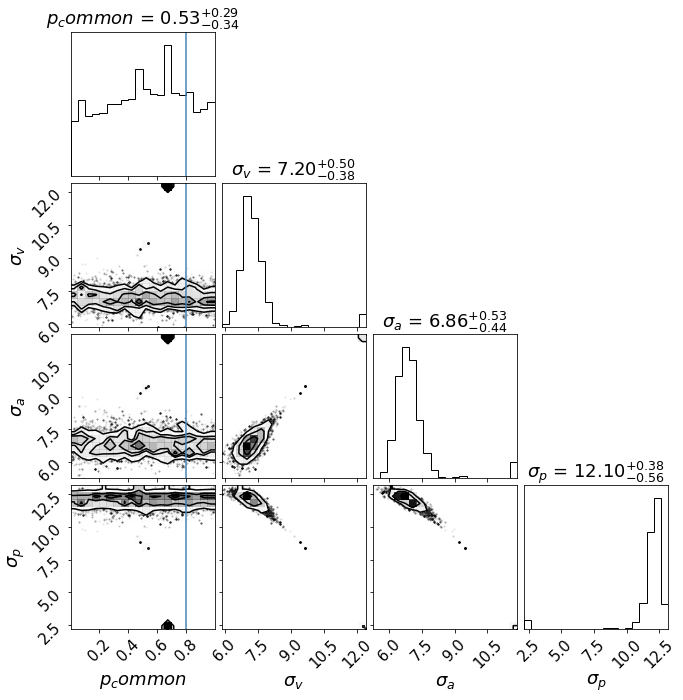

In [24]:
flat_samples_MCMC2 = sampler2.get_chain(discard=100, flat=True)
plot.plot_corner(flat_samples_MCMC, ['$p_common$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'], true_values)

parameter_estimates_MCMC2 = np.mean(sampler2.get_chain(discard=100), axis=(1,0))
print('Parameter estimates using MCMC sampling for 2 subjects: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates_MCMC2[0], parameter_estimates_MCMC2[1], parameter_estimates_MCMC2[2], parameter_estimates_MCMC2[3]))